In [1]:
from sklearn.svm import SVC
from util import info
import numpy as np
import os
from sklearn.utils.fixes import loguniform
# from sklearn.model_selection import RandomizedSearchCV
from sklearn.model_selection import LeaveOneOut
# from skopt import BayesSearchCV
from skopt import Optimizer
from sklearn.model_selection import KFold
from sklearn.preprocessing import MinMaxScaler

from joblib import Parallel, delayed

import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import matplotlib.animation as animation
plt.style.use(['dark_background'])


import warnings
warnings.filterwarnings("ignore")

In [8]:
######################
x = [10.0, 0.16110102177497687, 6, 'linear', 50]

data = np.concatenate((
    np.load(r"C:\Users\zfj\data\100522B\region1_00001\spots_smooth.npy").T,
    np.load(r"C:\Users\zfj\data\100522B\region1_00002\spots_smooth.npy").T,
), axis=1)
data = np.moveaxis(data[7:-5,:,:],0,1)
data = np.concatenate((
    data[:136],
    data[137:]
), axis=0)

labels = np.concatenate((
    np.load(r"C:\Users\zfj\data\100522B\region1_00001\spots_labels.npy"),
    np.load(r"C:\Users\zfj\data\100522B\region1_00002\spots_labels.npy"),
), axis=0)
labels = np.concatenate((
    labels[:136],
    labels[137:]
), axis=0)

nlabels = len(np.unique(labels))


y = np.ones((188)) * np.nan
for j in range(1,188,5):
    print(j)
    d = data[:,:j,:].reshape(data.shape[0],-1)
    y[j] = info.svm_info(d, labels, nlabels, C=x[0], gamma=x[1], degree=x[2], kernel=x[3], ncomps=min((x[4],d.shape[1])))

np.save(f"C:\\Users\\zfj\\data\\100522B\\region1_multi_t_pca_all_rois_fixed.npy", y)


1
6
11
16
21
26
31
36
41
46
51
56
61
66
71
76
81
86
91
96
101
106
111
116
121
126
131
136
141
146
151
156
161
166
171
176
181
186


In [9]:
print(data.shape)
y = np.ones((172, 188)) * np.nan
for i in range(172):
    print(i)
    for j in range(1,188,5):
        d = data[:,:j,i].reshape(data.shape[0],-1)
        y[i,j] = info.svm_info(d, labels, nlabels, C=x[0], gamma=x[1], degree=x[2], kernel=x[3], ncomps=min((x[4],d.shape[1])))

np.save(f"C:\\Users\\zfj\\data\\100522B\\regio14_multi_t_pca_single_roi_fixed.npy", y)


(458, 188, 172)
0
1


KeyboardInterrupt: 

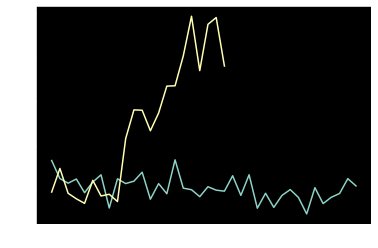

In [15]:
plt.plot(y[0][~np.isnan(y[0])])
plt.plot(y[1][~np.isnan(y[1])])
plt.plot(y[2][~np.isnan(y[2])])



In [3]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")

nlabels = len(np.unique(labels))


y = np.ones((170, 183)) * np.nan
for i in range(169,8,-1):
    print(i)
    for j in range(1,183,5):
        d = data[:,i,:j].reshape(data.shape[0],-1)
        y[i,j] = info.svm_info(d, labels, nlabels, C=x[0], gamma=x[1], degree=x[2], kernel=x[3], ncomps=min((x[4],d.shape[1])))
    
    np.save(f"C:\\Users\\zfj\\data\\081122B\\region4_multi_t_pca_single_roi_fixed2.npy", y)

169


NameError: name 'x' is not defined

In [53]:
from sklearn import tree


data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")


from sklearn.preprocessing import MinMaxScaler

# ue = np.array([
# [-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
#    -8.24727083,  -8.24727083,   0.,           0.,           0.,
#     8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
#    24.74181249,  24.74181249],
# [-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
#   -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
#   -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
#   -14.2846921,   14.2846921 ]]).T
# print(ue[labels,:].shape)


cv = KFold(3, shuffle=True)
fdata = data.reshape(data.shape[0],-1)

clfs = []
y_hat = np.empty((len(labels)))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])
        # mod = tree.DecisionTreeRegressor()

        mod = tree.DecisionTreeClassifier()
        mod.fit(fdata[train], labels[train])
        y_hat[test] = mod.predict(mms.transform(fdata[test]))
        clfs.append(mod)


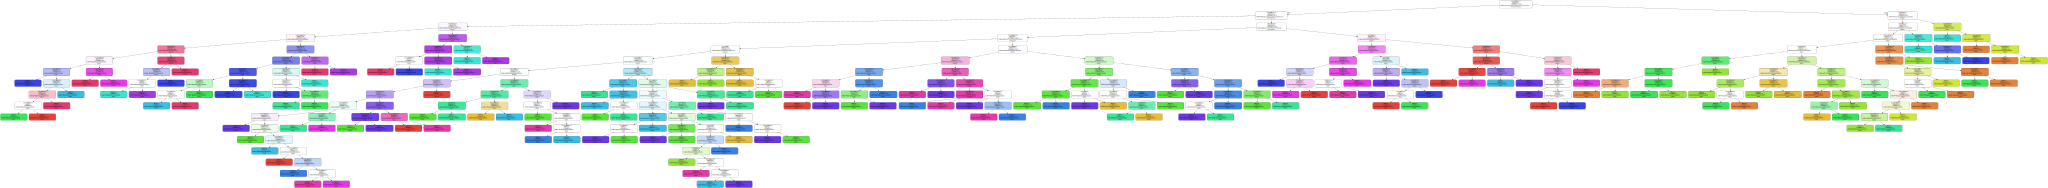

In [7]:
# tree.plot_tree(clf)
import graphviz 
# dot_data = tree.export_graphviz(clf, out_file=None) 
# graph = graphviz.Source(dot_data) 
# graph.render("iris") 

dot_data = tree.export_graphviz(clf, out_file=None, 
                    #  feature_names=iris.feature_names,  
                    #  class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph 

In [47]:
from sklearn.preprocessing import MinMaxScaler

ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
print(ue[labels,:].shape)


cv = KFold(3, shuffle=True)
fdata = data.reshape(data.shape[0],-1)

regs = []
y_hat = np.empty((len(labels),2))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])
        mod = tree.DecisionTreeRegressor()

        mod.fit(fdata[train], ue[labels[train],:])
        y_hat[test,:] = mod.predict(mms.transform(fdata[test]))
        regs.append(mod)

(1222, 2)


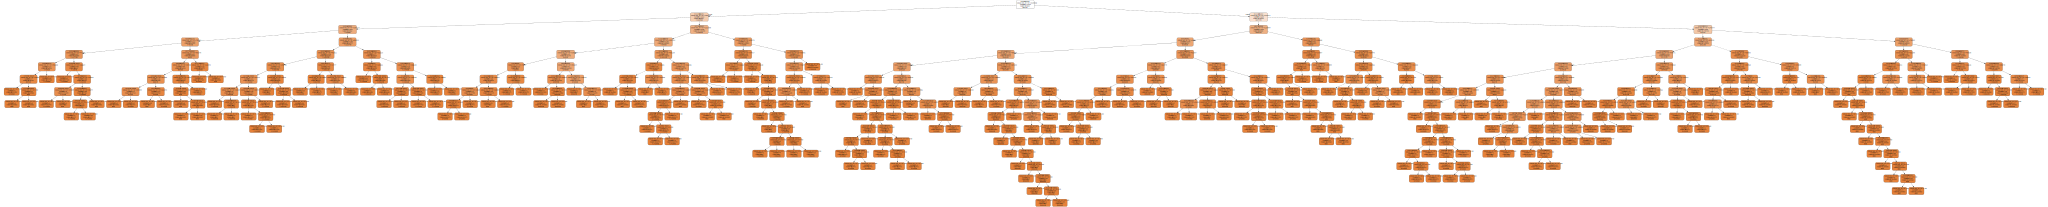

In [12]:

dot_data = tree.export_graphviz(reg, out_file=None, 
                    #  feature_names=iris.feature_names,  
                    #  class_names=iris.target_names,  
                     filled=True, rounded=True,  
                     special_characters=True)  
graph = graphviz.Source(dot_data)  
graph

14.016486378089198

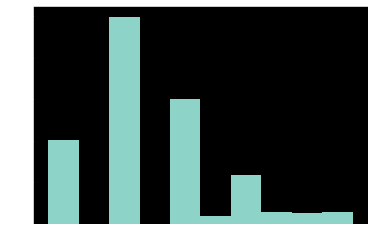

In [48]:
# plt.scatter(y_hat[:,0], ue[labels,0])
# plt.hist2d(y_hat[:,1], ue[labels,1])
plt.hist(np.sqrt(((y_hat - ue[labels,:])**2).sum(axis=1)))

MSE = np.sqrt((y_hat - ue[labels,:])**2).mean()
MSE

In [94]:
# plt.plot(y_hat[:,1] - ue[labels,1])
plt.quiver(ue[labels,0], ue[labels,1], y_hat[:,0] - ue[labels,0], y_hat[:,1] - ue[labels,1], color='red', scale=5, scale_units='xy')
plt.axis('square')

IndexError: too many indices for array: array is 1-dimensional, but 2 were indexed

In [56]:
mod = info.MI(labels, ndims=1)
MI = mod.QE(y_hat.reshape((-1,1)))
print(MI)

# MI_c = mod.QE()

0.4930977766394621


In [58]:
fdata = data.reshape(data.shape[0],-1)

clfs = []
regs = []
y_hatc = np.empty((len(labels)))
y_hatr = np.empty((len(labels),2))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])
        # mod = tree.DecisionTreeRegressor()

        mod = tree.DecisionTreeClassifier()
        mod.fit(fdata[train], labels[train])
        y_hatc[test] = mod.predict(mms.transform(fdata[test]))
        clfs.append(mod)

        mod = tree.DecisionTreeRegressor()

        mod.fit(fdata[train], ue[labels[train],:])
        y_hatr[test,:] = mod.predict(mms.transform(fdata[test]))
        regs.append(mod)


In [59]:
clf_i = info.MI(labels, ndims=1)
reg_i = info.MI(labels, ndims=2)
MI_c = clf_i.QE(y_hatc.reshape((-1,1)))
MI_r = reg_i.QE(y_hatr)

print(MI_c, MI_r)

# MI_c = mod.QE()

0.4246976044446314 0.8409255696530011


In [62]:
from sklearn.ensemble import RandomForestRegressor
boosts = []
y_hatb = np.empty((len(labels),2))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])
        # mod = tree.DecisionTreeRegressor()

        # mod = tree.DecisionTreeClassifier()
        # mod.fit(fdata[train], labels[train])
        # y_hatc[test] = mod.predict(mms.transform(fdata[test]))
        # clfs.append(mod)

        mod = RandomForestRegressor()

        mod.fit(fdata[train], ue[labels[train],:])
        y_hatb[test,:] = mod.predict(mms.transform(fdata[test]))
        boosts.append(mod)

KeyboardInterrupt: 

In [63]:
y_hatb = y_hatr

In [75]:
# boosts

boost_i = info.MI(labels[np.setdiff1d(np.arange(y_hatb.shape[0]), test)], ndims=2)
MI_b = boost_i.QE(y_hatb[np.setdiff1d(np.arange(y_hatb.shape[0]), test),:])

print(MI_c, MI_r, MI_b)


0.4246976044446314 0.8409255696530011 1.6884876310008634


In [77]:
1.69 / np.log2(17)

0.41345941617980203

In [60]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  

cv = KFold(20, shuffle=True)
# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

# x = [10.0, 0.16110102177497687, 6, 'linear', 50]
sv = []
y_hats = np.empty((len(labels),2))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])
        # mod = tree.DecisionTreeRegressor()

        # mod = tree.DecisionTreeClassifier()
        # mod.fit(fdata[train], labels[train])
        # y_hatc[test] = mod.predict(mms.transform(fdata[test]))
        # clfs.append(mod)

        # mod = RegressorChain(SVR(C=10.0, gamma = 0.16110102177497687, degree=6, kernel='linear', cache_size=2000))
        mod = RegressorChain(LinearSVR(C=1.0))


        pca = PCA(160, whiten=True)
        comps = pca.fit_transform(mms.transform(fdata[train]))
        
        mod.fit(np.ascontiguousarray(comps), ue[labels[train],:])
        y_hats[test,:] = mod.predict(np.ascontiguousarray(pca.transform(mms.transform(fdata[test]))))

        # mod.fit(fdata[train], ue[labels[train],:])
        # y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        sv.append(mod)



In [57]:
# boosts

svm_i = info.MI(labels, ndims=2)
MI_s = svm_i.QE(y_hats)

# print(MI_c, MI_r, MI_b, MI_s)
print(MI_s)


3.0013084496325124


(17,)

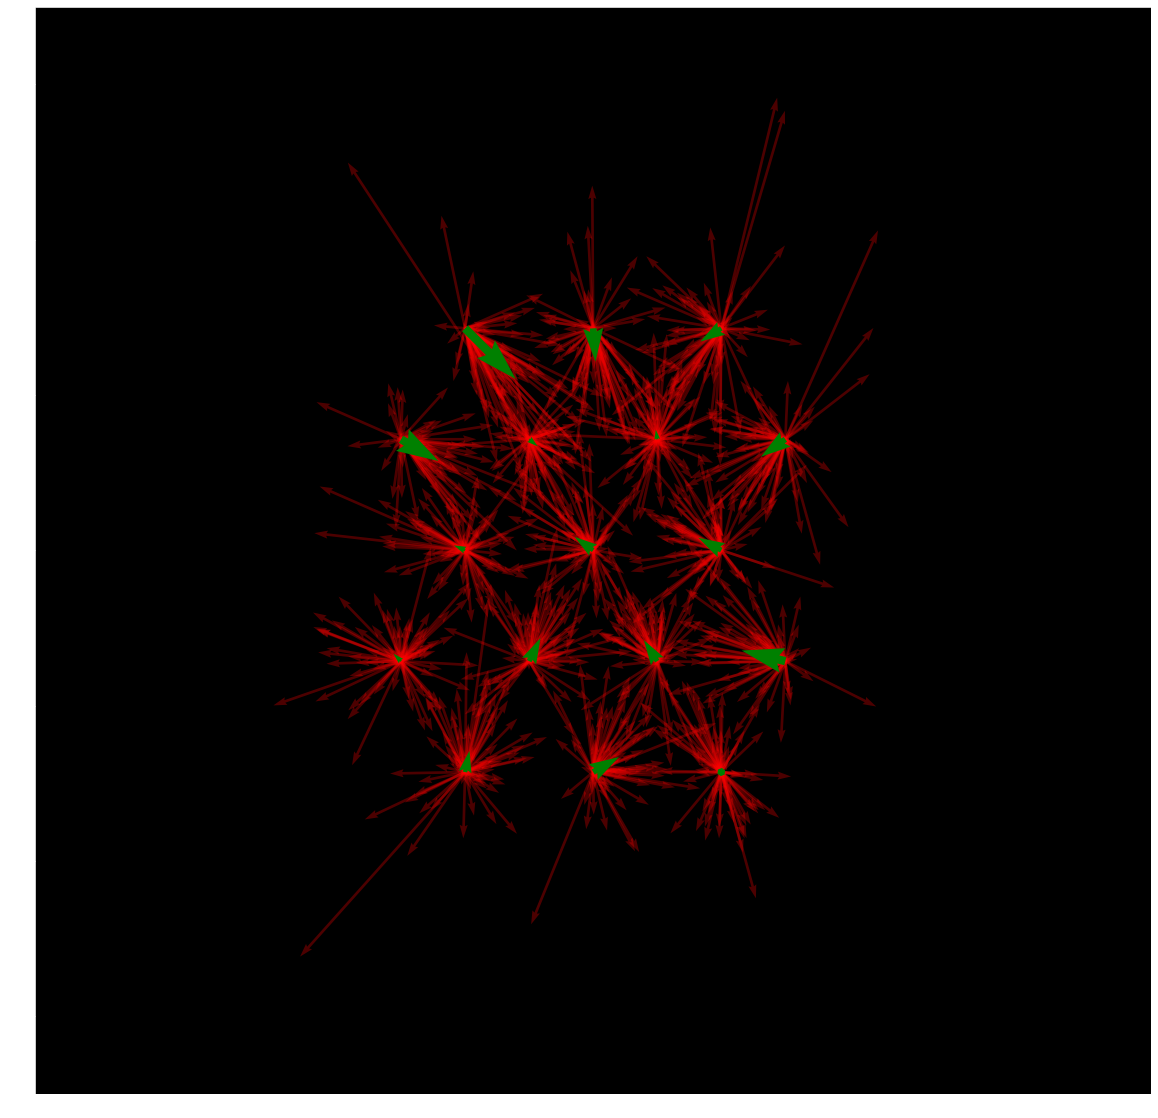

In [58]:
# plt.plot(y_hat[:,1] - ue[labels,1])
plt.figure(figsize=(20,20))
plt.quiver(ue[labels,0], ue[labels,1], y_hats[:,0] - ue[labels,0], y_hats[:,1] - ue[labels,1], color='red', scale=1, scale_units='xy', alpha=.3)

px = np.asarray([(y_hats[labels==i,0] - ue[labels[labels==i],0]).mean() for i in range(len(ue))])
py = np.asarray([(y_hats[labels==i,1] - ue[labels[labels==i],1]).mean() for i in range(len(ue))])

plt.quiver(ue[:,0], ue[:,1], px, py, color='green', scale=1, scale_units='xy')

# plt.ylim(-50,50)
plt.axis('equal')
# asp = plt.gca().get_aspect()
# print(asp)

# plt.axis('auto')
plt.ylim(-70,70)
# plt.xlim(-50*asp, 50*asp)


# plt.ylim(-50,50)

px.shape


(-47.24258133203099, 43.39394393683951, -58.06020417197414, 62.20084425009069)

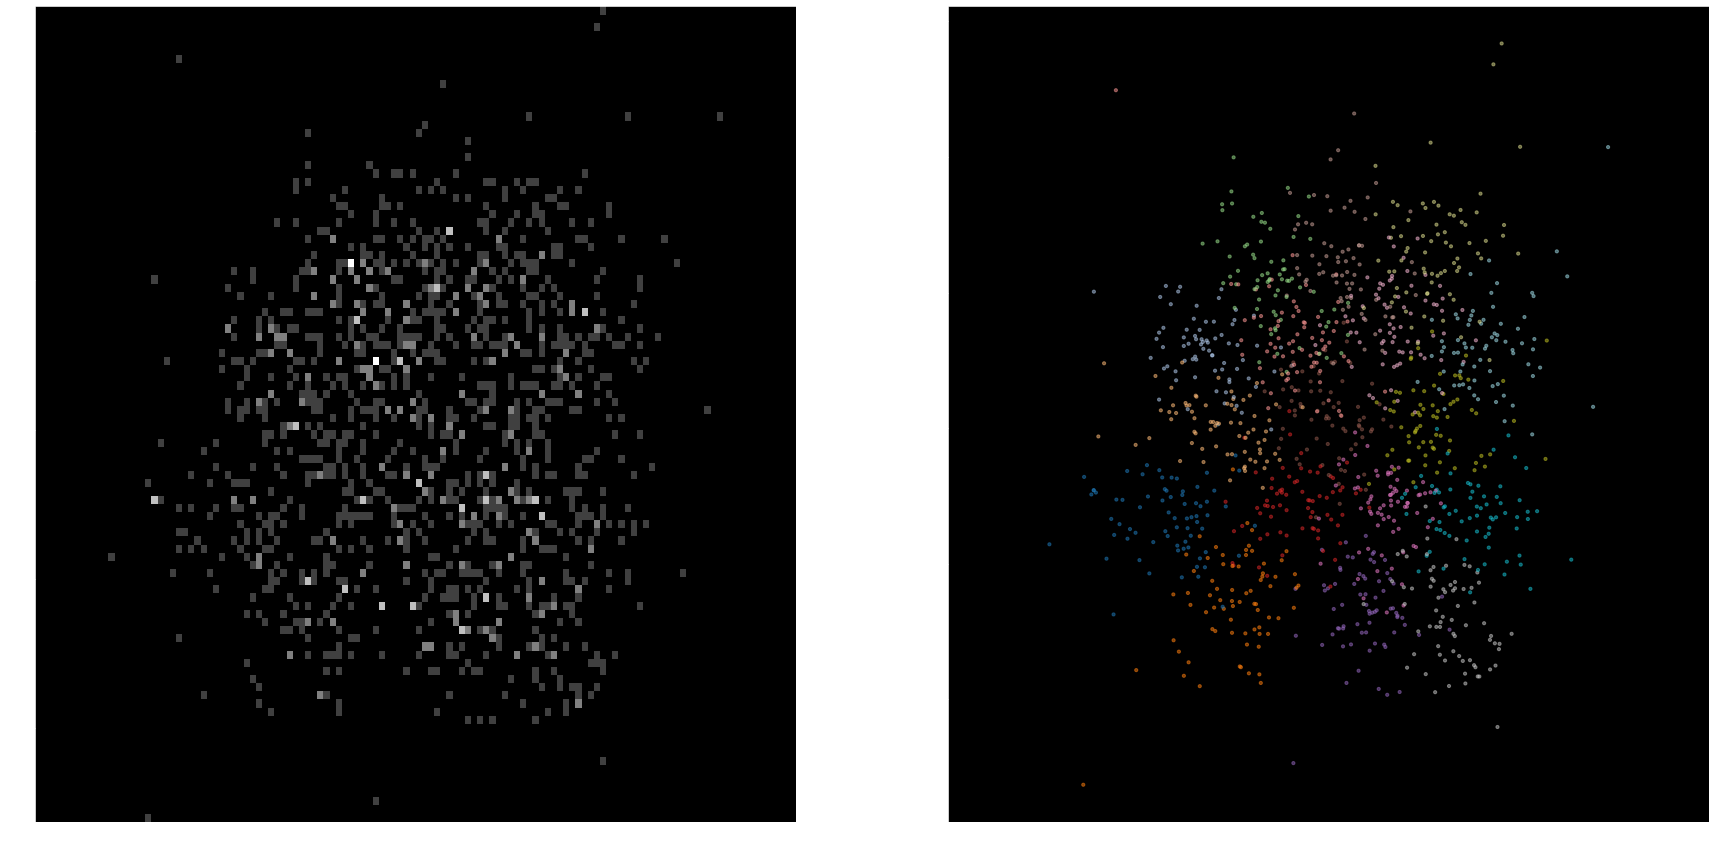

In [27]:
_,axs = plt.subplots(1,2,figsize=(30,15))

plt.sca(axs[0])
_,binx,biny,_ = plt.hist2d(y_hats[:,0], y_hats[:,1], (100,100), cmap='gray')
plt.axis('equal')

plt.sca(axs[1])
plt.scatter(y_hats[:,0], y_hats[:,1], s=10, c=labels, alpha=.5, cmap='tab20')
plt.axis('equal')
# plt.hist2d(y_hats[labels==0,0], y_hats[labels==0,1], (binx,biny))
# plt.show()


[0.0, 16.49454165883888, 16.49454166, 16.494541660000003, 16.494541667499135, 28.5693842, 28.569384202011115, 28.56938420701112, 28.56938421, 32.98908331767776, 32.98908332, 32.98908332633801, 43.64045522059906, 43.640455221915644, 43.64045522518891, 43.640455227145594, 43.64045522822455, 49.48362498, 49.483624985176895, 57.13876840402223, 57.13876842, 59.47191572471434, 59.4719157344697, 65.97816665267602]


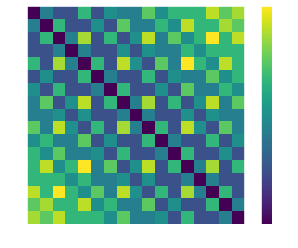

In [39]:
d = np.zeros((len(ue),len(ue)))
for i in range(len(ue)):
    for j in range(i):
        d[i,j] = d[j,i] = np.sqrt(((ue[i,:] - ue[j,:])**2).sum())
plt.imshow(d)
plt.colorbar()
print(sorted(np.unique(d)))

In [136]:
print(comps.flags)
print(comps.dtype)

  C_CONTIGUOUS : False
  F_CONTIGUOUS : False
  OWNDATA : False
  WRITEABLE : True
  ALIGNED : True
  WRITEBACKIFCOPY : False
  UPDATEIFCOPY : False

float64


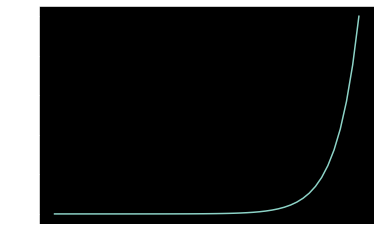

In [147]:
# plt.plot(np.logspace(-3,3))

In [148]:
# sv = []
C = np.logspace(-3,3,25)
y_hats = np.empty((25,len(labels),2))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])
        # mod = tree.DecisionTreeRegressor()

        # mod = tree.DecisionTreeClassifier()
        # mod.fit(fdata[train], labels[train])
        # y_hatc[test] = mod.predict(mms.transform(fdata[test]))
        # clfs.append(mod)

        # mod = RegressorChain(SVR(C=10.0, gamma = 0.16110102177497687, degree=6, kernel='linear', cache_size=2000))
        

        pca = PCA(50, whiten=True)
        comps = np.ascontiguousarray(pca.fit_transform(mms.transform(fdata[train])))
        
        for i in range(25):
            mod = RegressorChain(LinearSVR(C=C[i]))
            mod.fit(comps, ue[labels[train],:])
            y_hats[i,test,:] = mod.predict(np.ascontiguousarray(pca.transform(mms.transform(fdata[test]))))

            # mod.fit(fdata[train], ue[labels[train],:])
            # y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
            # sv.append(mod)
        print('.')


.
.
.
.
.
.
.
.
.
.


In [157]:
# y_hats.shape
# plt.plot(y_hats[:,1,:])


svm_i = info.MI(labels, ndims=2)
MI_s = [[svm_i.QE(y_hats[i,:,:]) for i in range(25)] for _ in range(10)]

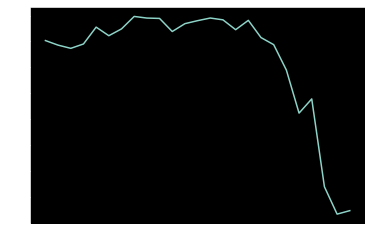

In [164]:
plt.semilogx(C,np.asarray(MI_s).mean(axis=0))

In [59]:
n_comps = np.linspace(50,500,25).astype(int)
y_hats = np.empty((len(n_comps),len(labels),2))
for train, test in cv.split(data):
        mms = MinMaxScaler().fit(fdata[train])

        pca = PCA(200, whiten=True)
        comps = pca.fit_transform(mms.transform(fdata[train]))
        
        for i in range(len(n_comps)):
            mod = RegressorChain(LinearSVR(C=1.0))
            mod.fit(comps[:,:n_comps[i]], ue[labels[train],:])
            y_hats[i,test,:] = mod.predict(np.ascontiguousarray(pca.transform(mms.transform(fdata[test]))[:,:n_comps[i]]))

            # mod.fit(fdata[train], ue[labels[train],:])
            # y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
            # sv.append(mod)
        print('.')


.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.
.


In [190]:
# y_hats.shape
# plt.plot(y_hats[:,1,:])


svm_i = info.MI(labels, ndims=2)
MI_s = [[svm_i.QE(y_hats[i,:,:]) for i in range(len(n_comps))] for _ in range(10)]


(25, 1222, 2) (10, 25) (25,)


<ErrorbarContainer object of 3 artists>

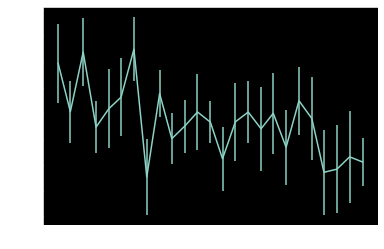

In [191]:
# plt.plot(n_comps,np.asarray(MI_s).mean(axis=0))
print(y_hats.shape, np.asarray(MI_s).shape, n_comps.shape)

plt.errorbar(n_comps, np.asarray(MI_s).mean(axis=0), np.asarray(MI_s).std(axis=0))

In [188]:
n_comps = np.linspace(50,200,15).astype(int)
fdata.shape

(1222, 31110)

9.997708912428308 11.887747900290282 8.593847143015664 6.868959901881764
7.5901060534149964


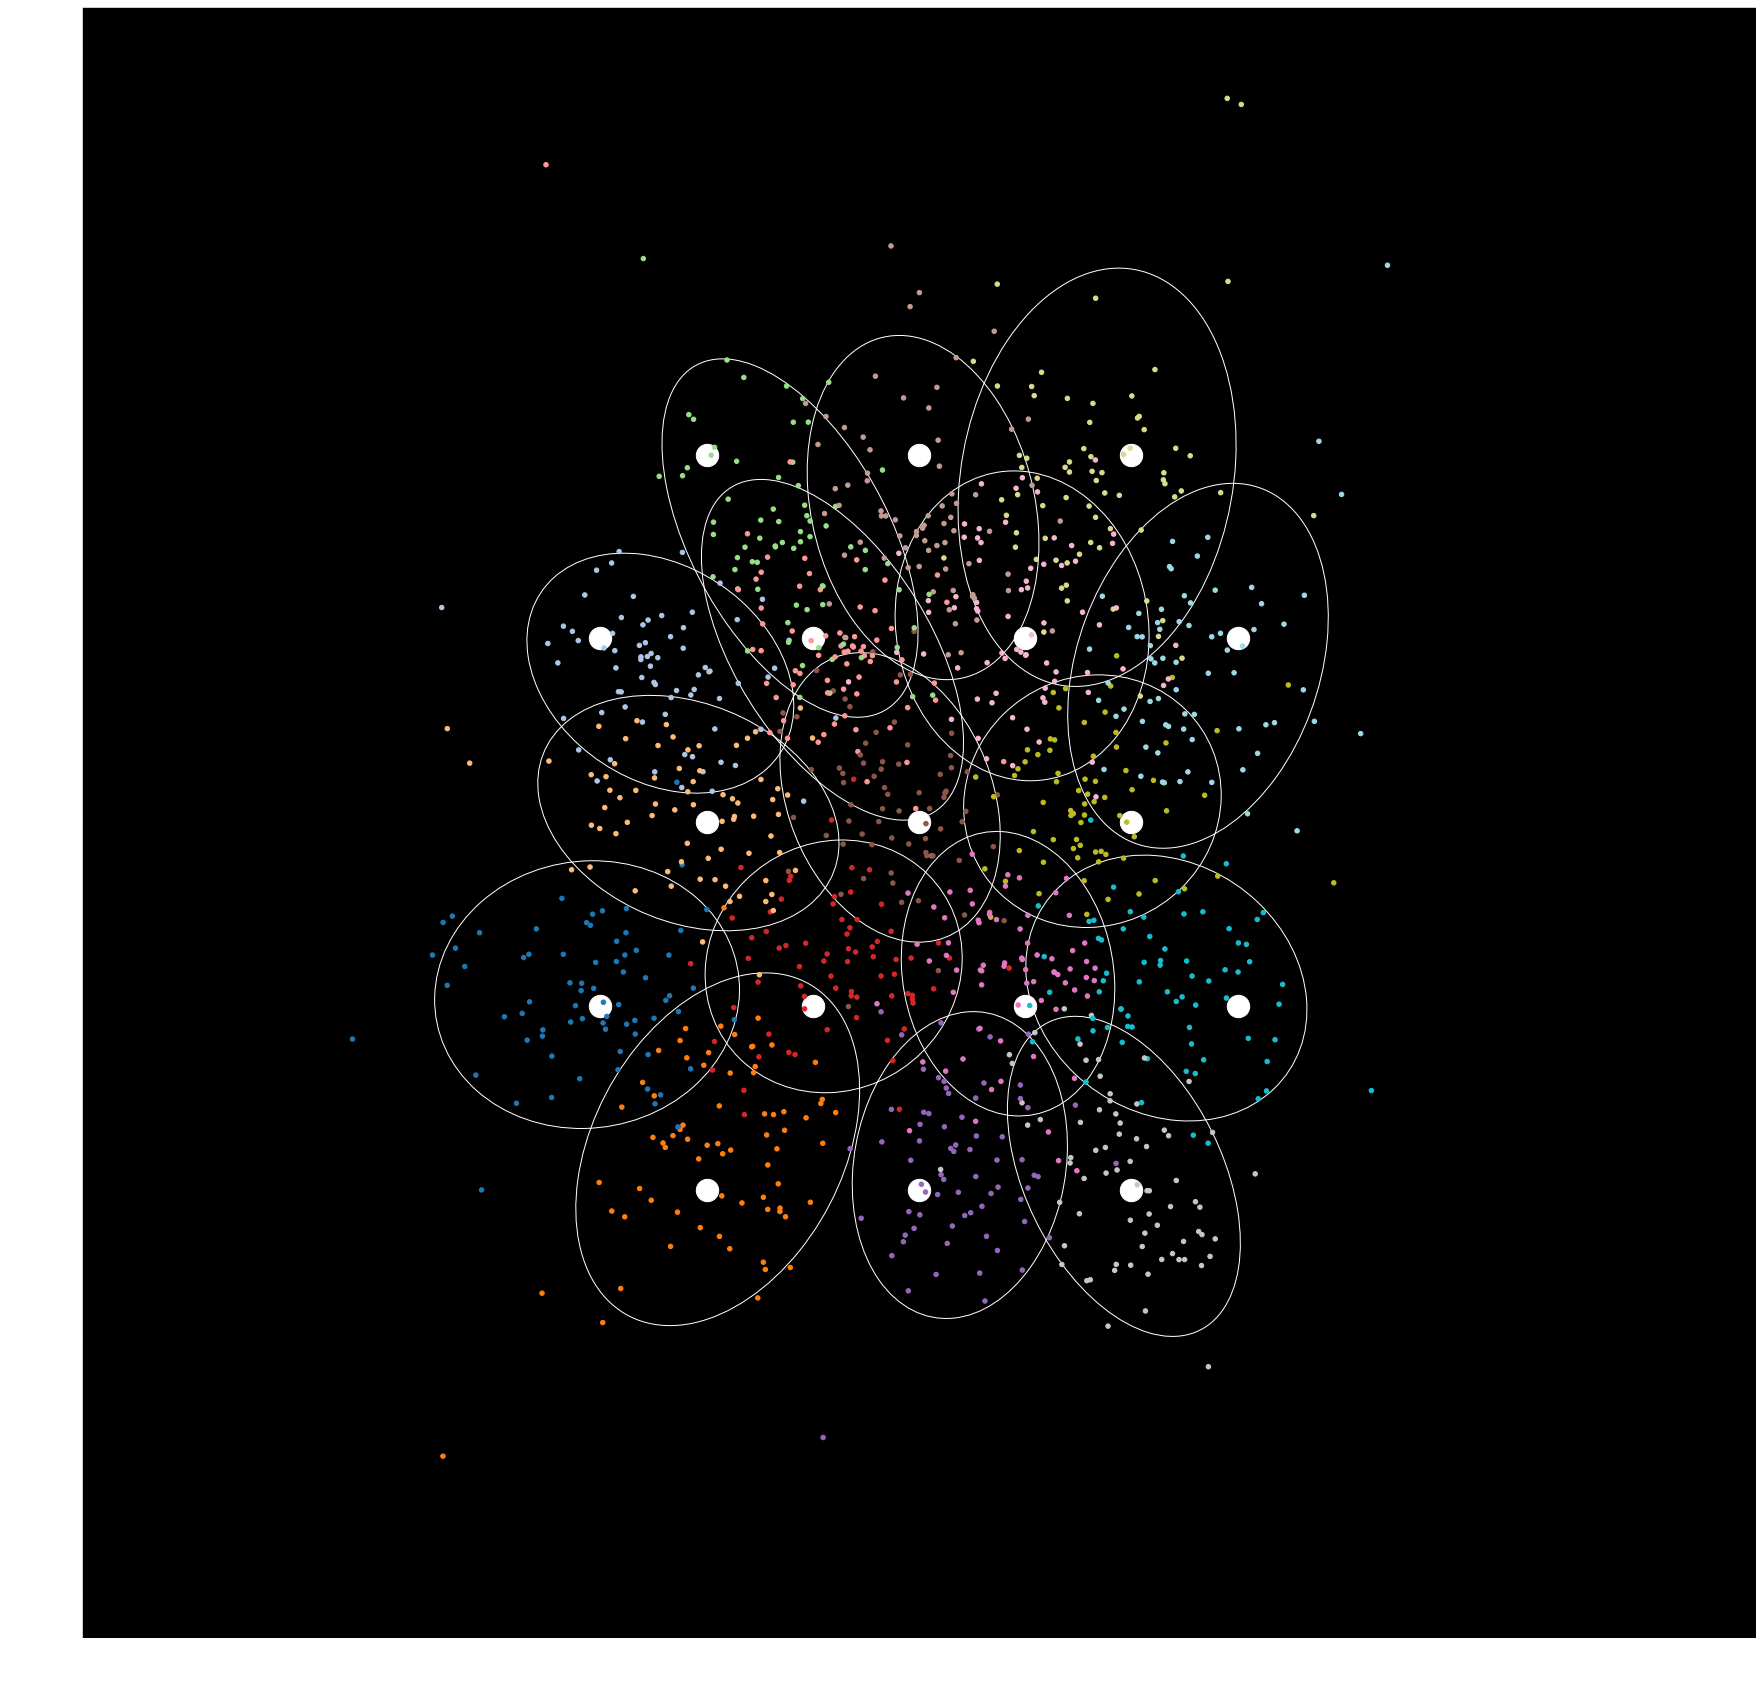

In [62]:

from matplotlib.patches import Ellipse

import matplotlib.transforms as transforms

plt.figure(figsize=(30,30))
ax = plt.gca()

n_std=2
scale_x = np.empty(len(ue))
scale_y = np.empty(len(ue))
mean_x = np.empty(len(ue))
mean_y = np.empty(len(ue))

for i in range(len(ue)):
    cov = np.cov(y_hats[labels==i,0], y_hats[labels==i,1])
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='None', edgecolor='w')
    scale_x[i] = np.sqrt(cov[0, 0]) * n_std
    mean_x[i] = np.mean(y_hats[labels==i,0])

    # calculating the standard deviation of y ...
    scale_y[i] = np.sqrt(cov[1, 1]) * n_std
    mean_y[i] = np.mean(y_hats[labels==i,1])

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x[i], scale_y[i]) \
        .translate(mean_x[i], mean_y[i])

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

plt.scatter(ue[:,0], ue[:,1], s=500, color='white')

plt.scatter(y_hats[:,0], y_hats[:,1], s=20, c=labels, alpha=1, cmap='tab20')

plt.xticks(fontsize=32)
plt.yticks(fontsize=32)


plt.axis('equal')
plt.xlim(-65,65)
plt.ylim(-65,65)

# plt.grid('on')

# plt.xlim([-30,-10])
# plt.ylim([-15,1.5])
print(scale_x.mean(), scale_y.mean(), ((mean_x - ue[:,0])**2).mean(), ((mean_y - ue[:,1])**2).mean())
print(np.asarray([np.sqrt((y_hats[labels==i,0] - ue[i,0])**2 + (y_hats[labels==i,1] - ue[i,1])**2).mean(axis=0) for i in range(len(ue))]).mean())

(-5.0, 70.0)

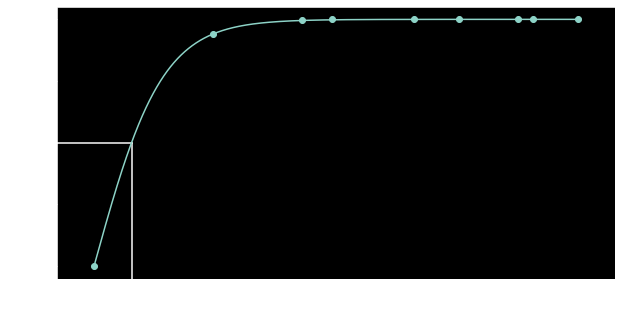

In [225]:
uei = ue.astype(int)
plt.figure(figsize=(10,5))

labs = np.random.randint(0,len(labels), (50000,2))
# x = np.abs(np.diff(uei[labels[labs],0], axis=1))
# y = (np.diff(y_hats[labs,0],axis=1)>0) == (np.diff(uei[labels[labs],0], axis=1)>0)



xv = ue[labels[labs[:,0]],:] - ue[labels[labs[:,1]],:]
x = np.linalg.norm(xv, axis=1).astype(int)
xv[x==0] = np.random.randn(*xv[x==0].shape)


yv = y_hats[labs[:,0],:] - y_hats[labs[:,1],:]
y = (yv * xv).sum(axis=1) > 0
y = y.astype(float)
# y[x==0] = 0.5




du,d_i = np.unique(x,return_inverse=True)
# print(max(d_i))
plt.scatter(du, [y[d_i==i].mean() for i in range(len(du))])
# plt.errorbar(du, [y[d_i==i].mean() for i in range(len(du))], [y[d_i==i].std() for i in range(len(du))])



# def sigmoid(x, k, b, x0):
def sigmoid(x, k):
    # y = 1 / (1 + np.exp(-k*(x-x0))) + b
    y = 1 / (1 + np.exp(-k * x))
    return (y)

# p0 = [np.max(x), 0, 0]
p0 = [1/np.median(x)]

from scipy.optimize import curve_fit
popt, pcov = curve_fit(sigmoid, x.flatten().astype(float), y.flatten().astype(float),p0)#,  max_nfev=500000)
# popt, pcov = curve_fit(sigmoid, du.flatten().astype(float), np.array([y[d_i==i].mean() for i in range(len(du))]),p0)#,  max_nfev=500000)

xn = np.linspace(0,du.max(),2000)
yn = sigmoid(xn, *popt)

plt.axvline(xn[np.argmin(np.abs(yn-.75))], 0, .5)
plt.axhline(.75,0,(5+xn[np.argmin(np.abs(yn-.75))]) / 75)

plt.plot(xn, yn)

plt.yticks(np.linspace(0.5,1.0,5))
plt.xticks([*np.arange(0,65,10), xn[np.argmin(np.abs(yn-.75))]])

xn[np.argmin(np.abs(yn-.75))]

plt.xlabel('Distance (microns)')
plt.ylabel('Accuracy')

plt.xlim([-5,70])

10.076609225530524 11.980876811211392 8.414883481036027 6.4029431259053595


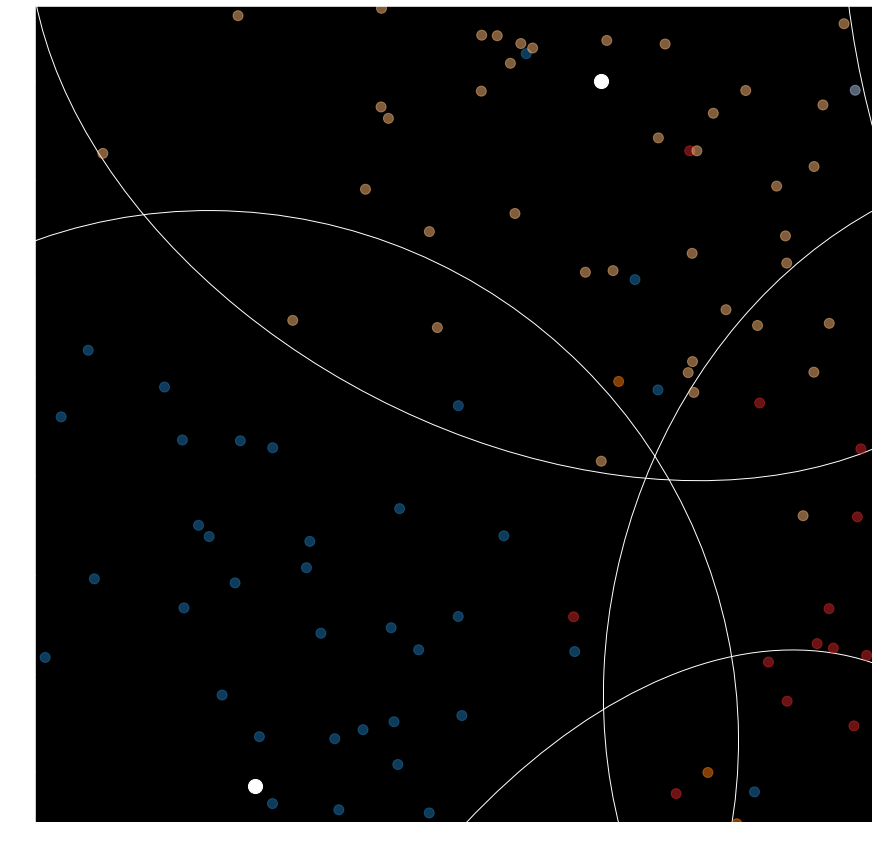

In [210]:

from matplotlib.patches import Ellipse

import matplotlib.transforms as transforms

plt.figure(figsize=(15,15))
ax = plt.gca()

n_std=2
scale_x = np.empty(len(ue))
scale_y = np.empty(len(ue))
mean_x = np.empty(len(ue))
mean_y = np.empty(len(ue))

for i in range(len(ue)):
    cov = np.cov(y_hats[labels==i,0], y_hats[labels==i,1])
    pearson = cov[0, 1]/np.sqrt(cov[0, 0] * cov[1, 1])
    ell_radius_x = np.sqrt(1 + pearson)
    ell_radius_y = np.sqrt(1 - pearson)
    ellipse = Ellipse((0, 0), width=ell_radius_x * 2, height=ell_radius_y * 2, facecolor='None', edgecolor='w')
    scale_x[i] = np.sqrt(cov[0, 0]) * n_std
    mean_x[i] = np.mean(y_hats[labels==i,0])

    # calculating the standard deviation of y ...
    scale_y[i] = np.sqrt(cov[1, 1]) * n_std
    mean_y[i] = np.mean(y_hats[labels==i,1])

    transf = transforms.Affine2D() \
        .rotate_deg(45) \
        .scale(scale_x[i], scale_y[i]) \
        .translate(mean_x[i], mean_y[i])

    ellipse.set_transform(transf + ax.transData)
    ax.add_patch(ellipse)

plt.scatter(y_hats[:,0], y_hats[:,1], s=100, c=labels, alpha=.5, cmap='tab20')

plt.scatter(ue[:,0], ue[:,1], s=200, color='white')

# plt.axis('equal')
# plt.grid('on')

plt.xlim([-30,-10])
plt.ylim([-15,1.5])
print(scale_x.mean(), scale_y.mean(), ((mean_x - ue[:,0])**2).mean(), ((mean_y - ue[:,1])**2).mean())

In [6]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

def get_info(fdata, flabels, fue):
  
  cv = KFold(20, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < 160:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(160, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


1 0.035946934196450404


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:  1.9min


3 0.04220469603079171
2 0.05589138359894983


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:  1.9min


4 0.09282853915558073


[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:  2.0min


11 -0.09280110359494928


[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:  2.0min


5 0.009344010636751419
12 0.014196997146367012


[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:  2.1min


8 0.07959085892157035


[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:  2.1min


6 0.06047650979027172
7 -0.011431662030305068


[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:  2.2min


9 0.08422668743326761


[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:  2.3min


10 -0.05999828621777213


[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:  2.3min


13 0.0684129841385299


[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:  4.6min


14 -0.005199076143024252


[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:  4.8min


17 0.047272875002020966


[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:  4.9min


15 0.007903047384526615


[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:  4.9min


16 0.09176986459340813


[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:  5.0min


19 -0.008874337337156035


[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:  5.1min


18 -0.09900025050125105


[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:  5.2min


21 0.0876858738690889


[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:  5.4min


20 0.01100075691762951


[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:  5.4min


22 -0.026993439991498763


[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:  5.5min


23 0.087646230987213


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:  5.6min


24 0.016988898898931837


[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:  5.7min


25 -0.024843175590072545


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:  6.6min


27 -0.11800964353577345


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:  8.0min


26 0.011524234539438159


[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:  8.2min


30 -0.0103257090436581


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:  8.4min


29 -0.03026565305718036


[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed:  8.6min


28 0.028389816255012114


[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed:  8.7min


31 0.02059874333124617


[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed:  9.1min


33 0.04137404022868299


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:  9.4min


32 -0.013310713543268123


[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:  9.4min


34 0.026784961715421565


[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed:  9.5min


35 0.025336753071501388


[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed:  9.7min


36 -0.051350860809063814


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed: 10.1min


37 -0.041906400820409535


[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed: 10.2min


38 0.020039997731638275


[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed: 10.5min


39 0.05119960243965924


[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed: 11.0min


40 -0.029724531324852685


[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed: 11.3min


41 0.04747004784972895


[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed: 12.0min


42 -0.06856324127842028


[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed: 12.1min


43 -0.0472509803390112


[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed: 13.1min


45 -0.0014899752468136465


[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed: 13.4min


49 0.1163020734596974


[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed: 13.4min


50 0.012359954997732469


[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed: 13.5min


44 0.04694489277750011


[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed: 13.5min


46 0.05817114262782857


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed: 13.8min


47 -0.08809832543136792


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed: 13.8min


48 0.10646690060778441


[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed: 13.9min


52 0.0773088489863049


[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed: 14.0min


51 0.12422143003121074


[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed: 14.0min


54 0.16404535538666062


[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed: 14.8min


53 0.12634530035844901


[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed: 14.9min


55 0.39428954476963146


[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed: 16.6min


58 0.7729940847938852


[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed: 16.6min


57 0.5746290154964524


[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed: 16.9min


56 0.3348244124469245


[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed: 24.0min


59 0.7566907917552225


[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed: 25.9min


63 1.1908242569635288


[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed: 31.2min


64 1.2346917746320447


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed: 31.6min


60 0.7778320530380144
61 1.0492417776616851


[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed: 31.8min


62 1.1677396921022651


[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed: 31.8min
[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed: 32.0min


65 1.5642939839259122


[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed: 32.3min


66 1.482440830207823


[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed: 32.5min


68 1.7089101652746639


[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed: 34.0min


67 1.6199694230588397


[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed: 34.6min


69 1.7631455316699138


[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed: 34.8min


72 1.922404707769971


[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed: 35.1min


71 1.918136998689184


[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed: 35.3min


70 1.832216241460745


[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed: 35.4min


73 1.9688255290206893


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed: 35.7min


75 2.0601890203481474


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed: 36.6min


77 2.158945693110818


[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed: 36.8min
[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed: 37.0min


74 2.1272553621674355
78 2.2294146897063514
76 2.2014522824954055


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed: 37.2min
[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed: 37.2min


79 2.236659648335888


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed: 37.7min


81 2.3501919427587077


[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed: 39.1min


82 2.4100681549408747


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed: 39.3min


80 2.2990576665699325


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed: 39.3min


85 2.443608486136327


[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed: 40.0min


83 2.4739067082139217


[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed: 40.3min


84 2.452486489893176


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed: 40.4min


87 2.496881388389458


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed: 41.4min


86 2.5128250885573395


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed: 41.5min


89 2.5542273876182024


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed: 42.0min


91 2.659895638457268


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed: 42.0min


88 2.556986482356085


[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed: 42.5min


90 2.685246726616055


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed: 42.5min


93 2.58772176627311


[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed: 43.5min


92 2.661552878991924


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed: 43.7min


95 2.7017976827781514


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed: 44.3min


94 2.692223587181394


[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed: 44.4min


96 2.742905006315973


[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed: 45.4min


97 2.6464933394161267


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed: 45.4min


98 2.6677622857839545


[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed: 45.9min


101 2.677648468982681


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed: 46.2min


99 2.7774103385190085


[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed: 46.7min


100 2.8458867463394024


[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed: 46.8min


102 2.7749712439558794


[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed: 47.5min


103 2.8653900693577743


[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed: 47.7min


104 2.834180368677599


[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed: 47.7min


105 2.865399744898627


[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed: 48.2min


106 2.759926814151251


[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed: 48.8min


107 2.811714134742197


[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed: 49.9min


111 2.7950913202154553


[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed: 50.8min


110 2.931690145677954


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed: 50.9min


108 2.888281820794275


[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed: 51.1min


109 2.816248264666923


[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed: 51.1min


113 2.7686915677674957


[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed: 51.8min


112 2.82380022211163


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed: 52.3min


116 2.7531377224278746


[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed: 52.6min


114 2.8934437889346434


[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed: 54.6min


115 2.891606295521551


[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed: 60.2min


117 2.891238076217359


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed: 60.5min


118 2.822010115428837


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed: 61.3min


119 2.923772722002164


[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed: 63.2min


120 2.9235148733929037


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed: 63.5min


121 2.85832363756826


[Parallel(n_jobs=12)]: Done 121 tasks      | elapsed: 64.0min


123 2.7428907838514225


[Parallel(n_jobs=12)]: Done 122 tasks      | elapsed: 65.1min


122 2.8109855636137704


[Parallel(n_jobs=12)]: Done 123 tasks      | elapsed: 65.1min


124 2.8947183421153695


[Parallel(n_jobs=12)]: Done 124 tasks      | elapsed: 65.5min


126 2.8430988396516432


[Parallel(n_jobs=12)]: Done 125 tasks      | elapsed: 65.7min


125 2.795034341956913


[Parallel(n_jobs=12)]: Done 126 tasks      | elapsed: 66.2min


129 2.9320274267302353


[Parallel(n_jobs=12)]: Done 127 tasks      | elapsed: 66.7min


127 2.802773203462486


[Parallel(n_jobs=12)]: Done 128 tasks      | elapsed: 66.9min


130 2.8818757652107636


[Parallel(n_jobs=12)]: Done 129 tasks      | elapsed: 67.1min


128 2.8913000521984955


[Parallel(n_jobs=12)]: Done 130 tasks      | elapsed: 67.2min


132 2.8935455910350902


[Parallel(n_jobs=12)]: Done 131 tasks      | elapsed: 69.0min


131 2.847015684588619


[Parallel(n_jobs=12)]: Done 132 tasks      | elapsed: 69.7min


133 2.9202352015038513


[Parallel(n_jobs=12)]: Done 133 tasks      | elapsed: 70.3min


137 2.9670491237807157


[Parallel(n_jobs=12)]: Done 134 tasks      | elapsed: 71.5min


136 2.8446882556741127


[Parallel(n_jobs=12)]: Done 135 tasks      | elapsed: 71.9min


134 2.6946720748861024


[Parallel(n_jobs=12)]: Done 136 tasks      | elapsed: 71.9min


135 2.7877785282366196


[Parallel(n_jobs=12)]: Done 137 tasks      | elapsed: 72.2min


138 2.938042525672395


[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed: 73.3min


139 2.9153687671914885


[Parallel(n_jobs=12)]: Done 139 tasks      | elapsed: 73.3min


141 2.8823729904289492


[Parallel(n_jobs=12)]: Done 140 tasks      | elapsed: 73.7min


140 2.895583113918036


[Parallel(n_jobs=12)]: Done 141 tasks      | elapsed: 74.2min


142 2.8794430790361125


[Parallel(n_jobs=12)]: Done 142 tasks      | elapsed: 74.3min


143 2.8755745392001617


[Parallel(n_jobs=12)]: Done 143 tasks      | elapsed: 74.9min


144 2.876197755598758


[Parallel(n_jobs=12)]: Done 144 tasks      | elapsed: 77.1min


145 2.8637582657911165


[Parallel(n_jobs=12)]: Done 145 tasks      | elapsed: 77.4min


146 2.8027943627700984


[Parallel(n_jobs=12)]: Done 146 tasks      | elapsed: 77.9min


147 2.832625403537303


[Parallel(n_jobs=12)]: Done 147 tasks      | elapsed: 78.9min


148 2.7992656803207177


[Parallel(n_jobs=12)]: Done 148 tasks      | elapsed: 79.6min


149 2.9600652059464068


[Parallel(n_jobs=12)]: Done 149 tasks      | elapsed: 80.1min


151 2.9734464721439977


[Parallel(n_jobs=12)]: Done 150 tasks      | elapsed: 80.4min


152 2.8463326673140026


[Parallel(n_jobs=12)]: Done 151 tasks      | elapsed: 80.7min


150 2.831672110052818


[Parallel(n_jobs=12)]: Done 152 tasks      | elapsed: 81.0min


155 2.8640149081632567


[Parallel(n_jobs=12)]: Done 153 tasks      | elapsed: 81.5min


153 2.870334139819238


[Parallel(n_jobs=12)]: Done 154 tasks      | elapsed: 82.1min


154 2.812916923616392


[Parallel(n_jobs=12)]: Done 155 tasks      | elapsed: 82.3min


158 2.876348559767432


[Parallel(n_jobs=12)]: Done 156 tasks      | elapsed: 85.2min


157 2.9572413150459185


[Parallel(n_jobs=12)]: Done 157 tasks      | elapsed: 85.7min


156 2.907283215864734


[Parallel(n_jobs=12)]: Done 158 tasks      | elapsed: 85.8min


159 2.934525838261495


[Parallel(n_jobs=12)]: Done 159 tasks      | elapsed: 87.0min


160 2.948780720474788


[Parallel(n_jobs=12)]: Done 160 tasks      | elapsed: 88.2min


161 2.9346859371477594
162 2.94167360015043
163 2.928858123282732
165 2.9383156283080103
164 2.9426086004919867
166 2.7964062844555846
167 2.976727023658836
168 2.939782272577794
169 2.9788133676831285
170 2.875349576060585
171 2.8387560839071897
176 2.9283538595891105
174 2.9582356979299878
172 2.869131391833235
175 3.01665314246334
173 3.0702066932609626
177 2.9228871965003353


[Parallel(n_jobs=12)]: Done 177 out of 183 | elapsed: 97.4min remaining:  3.3min


179 2.93497691707693
178 2.9463594232589725
180 3.062321492150988
181 2.9372724775873706
182 3.000204365451152
183 2.9294058449172455


[Parallel(n_jobs=12)]: Done 183 out of 183 | elapsed: 99.1min finished


Text(0, 0.5, 'Information (% max.)')

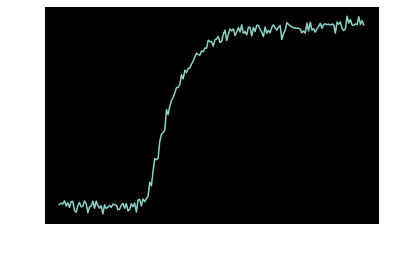

In [18]:
xn = np.linspace(-.25,1.0,200)
xnn = xn[7:-10]
plt.plot(xnn,MI_s)

ylim = plt.ylim()
plt.ylabel('Information (bits)')
plt.xlabel('Time (s)')


plt.gca().twinx()
plt.ylim(ylim / np.log2(17) * 100)
plt.ylabel('Information (% max.)')

# plt.gcf().ax

# plt.axhline(0,0,1)

In [19]:
np.save('081122B_info_reg_c.npy', MI_s)

In [20]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

def get_info(fdata, flabels, fue):
  
  cv = KFold(20, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        # if fdata.shape[1] < 160:
        #   mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
        #   y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        # else:
        pca = PCA(160, whiten=True)
        comps = pca.fit_transform(mms.transform(fdata[train]))
        
        mod.fit(comps, fue[flabels[train],:])
        y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_st = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,t].reshape(data.shape[0],-1), labels, ue) for t in range(183))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


1 0.09783304352787434
1 -0.05240576384433242
1 0.05545911257535476
1 -0.02913952529413655


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:   25.6s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   25.6s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:   25.7s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   25.7s


1 0.0031165933149875902
1 0.10699728256382222


[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:   25.9s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   26.0s


1 0.018026654354107052
1 0.03417461487898712
1 0.04566631102082973


[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:   26.2s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   26.3s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:   26.3s


1 0.0794369371450384


[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   26.6s


1 -0.07514222493642755


[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:   27.3s


1 -0.04131125270100889


[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   30.8s


1 -0.01561286288725286


[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:   51.5s


1 0.03606760865126823
1 0.047878042175392814
1 -0.020827684036168737
1 0.05089160457984214


[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   53.7s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:   53.7s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:   53.7s
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   53.7s


11 -0.10623087901007426
1 0.016380152383421664
 0.020730282162585743


[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:   54.2s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:   54.2s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:   54.2s


1 -0.0126281895439645


[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:   54.5s


1 0.010888643980849086


[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:   56.3s


1 0.06634373346005486


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:  1.0min


1 -0.049264323750254295


[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:  1.2min


1 0.061179287399102535


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:  1.3min


1 0.00994765773856254
1 0.023449542161801454


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:  1.3min


1 -0.011495523523968635
1 0.0060645461306029411
 -0.00801293546569846
1 -0.07172163184833237


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed:  1.3min


1 -0.06314407961060496


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:  1.4min


1 0.05310310498747303


[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:  1.4min


1 0.10957030625532574


[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed:  1.5min


1 0.016011158488995696


[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed:  1.6min


1 0.1247017138120424


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:  1.7min


1 0.011500211821490313


[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:  1.8min


1 0.06930032629591674


[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed:  1.8min


1 -0.024020166897054374


[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed:  1.8min


1 0.08934682207998779


[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed:  1.8min


1 0.12214149953839953


[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:  1.8min


1 0.07776613445417704
1 0.07888993942511559


[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:  1.8min


1 0.016052278192149785


[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed:  1.8min


1 0.1366714242296585


[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed:  1.9min


1 0.2504484670699699


[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed:  2.1min


1 0.30166622720738445


[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed:  2.1min


1 0.47476896453543665


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:  2.2min


1 0.4327029012380648


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed:  2.2min


1 0.7444076492978352
1 0.6666197079272939


[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed:  2.2min


1 0.8141491525819146


[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed:  2.2min


1 1.0628468425949902
1 1.123892781108068


[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed:  2.3min


1 1.3345083511351326


[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed:  2.3min


1 1.4636476014643338


[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed:  2.3min


1 1.5351223094552067


[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed:  2.5min


1 1.712912562760333


[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed:  2.6min


1 1.8174697392695687


[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed:  2.6min


1 1.8348633109095585


[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed:  2.6min


1 1.966170595586924


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:  2.6min


1 2.2264532414267273
1 2.084550933385255


[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed:  2.7min


1 1.9761126892025669


[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed:  2.7min


1 2.426420263546586


[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed:  2.7min


1 2.148631275548124


[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed:  2.8min


1 2.329515892112795


[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed:  2.8min


1 2.416646540941834


[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed:  2.9min


1 2.4581390597803936


[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed:  3.0min


1 2.3709569774688624


[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed:  3.1min


1 2.5526133680865737


[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed:  3.1min


1 2.6103217976858883


[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:  3.1min


1 2.592748510756389


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed:  3.1min


1 2.631211729064227


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:  3.1min


1 2.6287969804726004


[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed:  3.2min


1 2.6633977010850054


[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed:  3.2min


1 2.592093359324563


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed:  3.2min


1 2.7253680619597027


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:  3.3min


1 2.6506481958964696


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:  3.4min


1 2.6501805597832644


[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:  3.4min


1 2.6972970191600067


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:  3.5min


1 2.700684771025542
1 2.8166695197919154


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:  3.5min


1 2.8366611571311866


[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:  3.5min


1 2.8580910195416185


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:  3.6min


1 2.833404574147103


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:  3.6min


1 2.799288162288158


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:  3.7min


1 2.801636080346298


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:  3.7min


1 2.8080847307768435


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:  3.8min


1 2.728892979812853


[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed:  3.9min


1 2.6195684757883133


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed:  3.9min


1 2.766996641259662


[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed:  4.0min


1 2.8065984572026244


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed:  4.0min


1 2.70765645948493
1 2.6091394272134116


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed:  4.0min


1 2.7573161192242206


[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed:  4.0min


1 2.623609052310486


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed:  4.1min


1 2.682891705726673


[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed:  4.2min


1 2.639780234269836


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed:  4.2min


1 2.5937717774090285


[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed:  4.2min


1 2.525696647590502


[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed:  4.3min


1 2.5281930407566815


[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed:  4.4min


1 2.5745746857970953


[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed:  4.5min


1 2.4525515741876784


[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:  4.5min


1 2.573922051901419


[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed:  4.6min


1 2.473307766044072


[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed:  4.7min


1 2.4483897729986417


[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed:  4.7min


1 2.508072526648254


[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed:  4.7min


1 2.4833649597989793


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed:  4.8min


1 2.407594321156506


[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed:  5.0min


1 2.3739066180521164


[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed:  5.0min


1 2.4544590369210244


[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed:  5.1min


1 2.3615398858731593


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed:  5.2min


1 2.576196084293136


[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed:  5.3min


1 2.359221862132785


[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed:  5.3min


1 2.3232914804928955


[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed:  5.4min


1 2.3821274031448163


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed:  5.5min


1 2.319243916352347


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed:  5.5min


1 2.3820336596426


[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed:  5.5min


1 2.3090130926041654


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed:  5.5min


1 2.245937955758584


[Parallel(n_jobs=12)]: Done 121 tasks      | elapsed:  5.7min


1 2.1816063802829215


[Parallel(n_jobs=12)]: Done 122 tasks      | elapsed:  5.8min


1 2.3264764372447884


[Parallel(n_jobs=12)]: Done 123 tasks      | elapsed:  6.0min


1 2.079493415663506


[Parallel(n_jobs=12)]: Done 124 tasks      | elapsed:  6.0min


1 2.138650704193777


[Parallel(n_jobs=12)]: Done 125 tasks      | elapsed:  6.1min


1 2.2756760378547356


[Parallel(n_jobs=12)]: Done 126 tasks      | elapsed:  6.2min


1 2.152227377582527


[Parallel(n_jobs=12)]: Done 127 tasks      | elapsed:  6.2min


1 2.2376770452448143


[Parallel(n_jobs=12)]: Done 128 tasks      | elapsed:  6.3min


1 2.111440386074257


[Parallel(n_jobs=12)]: Done 129 tasks      | elapsed:  6.4min


1 2.136877042725542


[Parallel(n_jobs=12)]: Done 130 tasks      | elapsed:  6.4min


1 2.103661907882474


[Parallel(n_jobs=12)]: Done 131 tasks      | elapsed:  6.4min


1 2.102164126674852


[Parallel(n_jobs=12)]: Done 132 tasks      | elapsed:  6.5min


1 2.1640627173538736
1 2.101629507012317


[Parallel(n_jobs=12)]: Done 133 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 134 tasks      | elapsed:  6.7min


1 2.233904899550034


[Parallel(n_jobs=12)]: Done 135 tasks      | elapsed:  6.8min


1 2.201337247109663


[Parallel(n_jobs=12)]: Done 136 tasks      | elapsed:  6.9min


1 2.099979947756639


[Parallel(n_jobs=12)]: Done 137 tasks      | elapsed:  6.9min


1 2.248449543735348


[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  7.0min


1 2.2106380195542723


[Parallel(n_jobs=12)]: Done 139 tasks      | elapsed:  7.1min


1 2.2218478697652198


[Parallel(n_jobs=12)]: Done 140 tasks      | elapsed:  7.1min


1 2.3653311048308074


[Parallel(n_jobs=12)]: Done 141 tasks      | elapsed:  7.3min


1 2.2560072428420734


[Parallel(n_jobs=12)]: Done 142 tasks      | elapsed:  7.3min


1 2.265979681870387


[Parallel(n_jobs=12)]: Done 143 tasks      | elapsed:  7.3min


1 2.3085939813312653


[Parallel(n_jobs=12)]: Done 144 tasks      | elapsed:  7.4min


1 2.3457538403831437


[Parallel(n_jobs=12)]: Done 145 tasks      | elapsed:  7.6min


1 2.5539508860618936


[Parallel(n_jobs=12)]: Done 146 tasks      | elapsed:  7.6min


1 2.391467036887487


[Parallel(n_jobs=12)]: Done 147 tasks      | elapsed:  7.6min


1 2.462690475613463


[Parallel(n_jobs=12)]: Done 148 tasks      | elapsed:  7.7min


1 2.4641110629952716


[Parallel(n_jobs=12)]: Done 149 tasks      | elapsed:  7.7min


1 2.4036048580856995


[Parallel(n_jobs=12)]: Done 150 tasks      | elapsed:  7.8min


1 2.3902346099968206


[Parallel(n_jobs=12)]: Done 151 tasks      | elapsed:  7.9min


1 2.4429641939190394


[Parallel(n_jobs=12)]: Done 152 tasks      | elapsed:  7.9min


1 2.5503650658647805


[Parallel(n_jobs=12)]: Done 153 tasks      | elapsed:  8.0min


1 2.4211434675395407


[Parallel(n_jobs=12)]: Done 154 tasks      | elapsed:  8.0min


1 2.446647268773811


[Parallel(n_jobs=12)]: Done 155 tasks      | elapsed:  8.1min


1 2.479483371237071


[Parallel(n_jobs=12)]: Done 156 tasks      | elapsed:  8.1min


1 2.384783105169505


[Parallel(n_jobs=12)]: Done 157 tasks      | elapsed:  8.3min


1 2.4731846140366085


[Parallel(n_jobs=12)]: Done 158 tasks      | elapsed:  8.4min


1 2.4974718393997417


[Parallel(n_jobs=12)]: Done 159 tasks      | elapsed:  8.4min


1 2.4050648200292537


[Parallel(n_jobs=12)]: Done 160 tasks      | elapsed:  8.4min


1 2.5400461595140924
1 2.4745629258930486
1 2.259281436596065
1 2.4826417990985177
1 2.163191844430989
1 2.353415801462589
1 2.334105870760477
1 2.413747628084262
1 2.453890558431977
1 2.4545198312699443
1 2.3938317771691127
1 2.3407995897434497
1 2.19043597026949
1 2.2565860733522762
1 2.160089235356741
1 2.121865417919689
1 2.196551916492411


[Parallel(n_jobs=12)]: Done 177 out of 183 | elapsed:  9.4min remaining:   19.0s


1 2.0536412633114915
1 2.1055812752225913
1 2.113847454530394
1 1.990615573013843
1 1.8545739559031018
1 1.948922789437218


[Parallel(n_jobs=12)]: Done 183 out of 183 | elapsed:  9.5min finished


Text(0, 0.5, 'Information (% max.)')

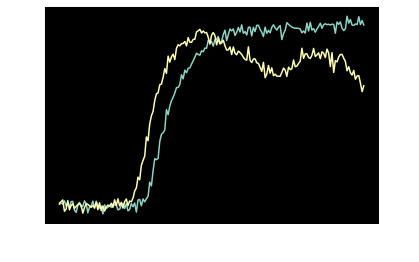

In [21]:
xn = np.linspace(-.25,1.0,200)
xnn = xn[7:-10]
plt.plot(xnn,MI_s)
plt.plot(xnn,MI_st)

ylim = plt.ylim()
plt.ylabel('Information (bits)')
plt.xlabel('Time (s)')


plt.gca().twinx()
plt.ylim(ylim / np.log2(17) * 100)
plt.ylabel('Information (% max.)')

# plt.gcf().ax

# plt.axhline(0,0,1)

In [51]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

ncomps = 210
def get_info(fdata, flabels, fue):
  
  cv = KFold(10, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < ncomps:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(ncomps, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_s2 = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,40:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(40,183))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


1 0.09093889047593436


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed: 10.0min


2 0.2632625230224596


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed: 10.1min


8 0.7762458535174609


[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed: 10.1min


10 1.0047662676861338
3

[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed: 10.2min


 0.3187982147167068
5 0.4902116899274128


[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed: 10.2min


74 0.7145802852757581
 0.39452539937772346

[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed: 10.2min



9 0.8733177997692598


[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed: 10.2min


6 0.6075148615064031


[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed: 10.3min


12 1.202426294836604
11

[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed: 10.5min


 1.0711756185552828


[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed: 10.5min


13 1.2777454502997747


[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed: 11.9min


15 1.3950522800653726


[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed: 12.0min


16 1.5235950693690221


[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed: 12.0min


14 1.4030500831629322


[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed: 12.0min


21 1.7927546164647645


[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed: 12.1min


18 1.6225205598677301


[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed: 12.2min


19 1.7561280950436915


[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed: 12.3min


22 1.8109825170250344


[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed: 12.3min


17 1.6606159313198832


[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed: 12.3min


20 1.7757228988681166


[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed: 12.4min


23 2.02654152673855


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed: 12.5min


24 2.0462683691359698


[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed: 12.5min


25 2.089013582997464


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed: 13.5min


27 2.1314548780659095
26 2.0793824590120424


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed: 13.8min


29 2.2548634608082025


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed: 13.9min


28 2.086839102224055


[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed: 14.0min


35 2.368813765207391


[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed: 14.1min


36 2.395252577053933


[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed: 14.2min


30 2.318600828862922


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed: 14.3min


33 2.320936228383012


[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed: 14.4min


31 2.2915874647404513


[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed: 14.4min


32 2.3257614797509505


[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed: 14.5min


34 2.3468465725229266


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed: 14.5min


37 2.392526719653044


[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed: 15.1min


38 2.495062587729355


[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed: 15.4min


39 2.518416618106713


[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed: 15.5min


40 2.501004453485742


[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed: 15.7min


42 2.5486876157884986


[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed: 16.2min


43 2.552282247088087


[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed: 16.4min


41 2.499633712109396


[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed: 16.5min


44 2.5754651561376107


[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed: 16.8min


47 2.589014355869245


[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed: 16.9min


45 2.492314183924061


[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed: 16.9min


48 2.5311688041902793


[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed: 16.9min


46 2.5547581990058745


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed: 17.0min


49 2.5822793954483765


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed: 17.1min


51 2.6609562543423873


[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed: 17.4min


50 2.5512905782288144


[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed: 17.5min


52 2.626647432536636


[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed: 17.7min


53 2.5886893815193046


[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed: 18.2min


54 2.6223631005121324


[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed: 18.6min


55 2.563311781610225


[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed: 19.1min


56 2.61552128213737


[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed: 19.6min


57 2.739529892109602


[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed: 19.8min


61 2.7669610056933562


[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed: 19.9min


59 2.6968499042354424


[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed: 19.9min


58 2.7694168659798017


[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed: 19.9min


62 2.7655456753674748


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed: 20.0min


63 2.6803932936795802


[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed: 20.3min


60 2.6961579692589055


[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed: 20.3min


64 2.6507643666510745


[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed: 20.4min


65 2.771814326793474


[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed: 20.7min


66 2.7155790533011226


[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed: 20.8min


67 2.8055408498946206


[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed: 21.5min


68 2.746245593422698


[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed: 22.4min


69 2.8336964018798447


[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed: 22.7min


70 2.7885230323445733


[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed: 22.7min


73 2.7956072372458647


[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed: 22.8min


74 2.6800461442537595


[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed: 22.9min


71 2.8538340930450863


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed: 23.0min


76 2.6309075955608825


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed: 23.1min


72 2.7839314926549674


[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed: 23.1min


77 2.7909219990087917


[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed: 23.4min


78 2.721719404330224


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed: 23.4min


75 2.7987155776025685


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed: 23.5min


79 2.8087883996317897


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed: 24.2min


80 2.8413375296743033


[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed: 25.1min


82 2.6619035889837503


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed: 25.7min


83 2.816770205915835


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed: 26.2min


81 2.8561571465379916


[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed: 26.2min


84 2.754268064031877


[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed: 26.4min


86 2.7953491094900995


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed: 26.6min


85 2.937478714221337


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed: 26.8min


88 2.7776756887813483


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed: 26.8min


89 2.8945843620416025


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed: 26.9min


87 2.8285506846933286


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed: 27.1min


90 2.7834587167476212


[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed: 27.4min


91 2.9629458841148084


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed: 27.9min


92 2.8144203941399573


[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed: 28.9min


93 2.84643855103339


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed: 29.1min


94 2.6674991589898784


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed: 29.7min


95 2.9178328425640068
96 2.6854477556452103


[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed: 30.3min
[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed: 30.3min


97 2.881875695079624


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed: 30.6min


100 2.8015483308225244


[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed: 31.3min


99 2.8774161012112707


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed: 31.4min


98 2.787270229072847


[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed: 31.6min


101 2.864893505537613


[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed: 32.1min


102 2.84639847873022


[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed: 32.3min


103 2.8474275792637287


[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed: 32.7min


105 2.6945922951402848


[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed: 33.0min


106 2.7850217004992093


[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed: 33.3min


104 2.9344402059731327


[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed: 33.5min


108 2.9556768237215687


[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed: 33.9min


109 2.9656814264635356


[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed: 34.2min


107 2.8127998392903106


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed: 34.3min


110 2.860181340425798


[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed: 34.9min


111 2.8744648706635942


[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed: 35.4min


112 2.936402700869602


[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed: 36.6min


113 2.9835556096243914


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed: 37.1min


116 3.0001215017601335


[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed: 37.1min


114 3.0031202246966453


[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed: 37.5min


117 2.9583374982209603


[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed: 37.6min


115 2.9222197540838875


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed: 37.8min


119 2.9021453978227325


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed: 38.2min


120 2.909745840800693


[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed: 38.4min


118 2.945267271903911


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed: 38.7min


122 2.9889483530635066
121 2.9546011412915467
123 2.8660336508343516
124 2.9668489410430365
126 2.8609312039715786
125 3.012284544493351
128 3.002971228818207
130 2.96273968766477
131 2.976226915593996
127 3.005466199183297
129 2.938325521530189
133 3.0714502368925127
132 2.8946048952602097
135 3.059990426793915


[Parallel(n_jobs=12)]: Done 134 out of 143 | elapsed: 44.0min remaining:  3.0min


134 3.043305024059839
136 2.9285900314946534
137 3.088044147557191
139 2.9793418615908474
138 2.853853803165777
140 2.980889352826864
141 2.9176405518774007
142 2.883839649502695
143 3.0358078344180894


[Parallel(n_jobs=12)]: Done 143 out of 143 | elapsed: 45.9min finished


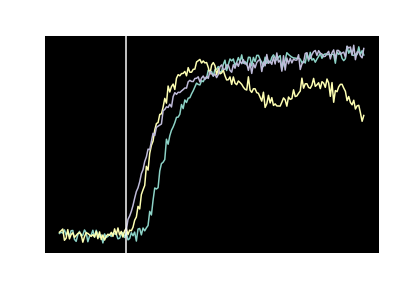

In [52]:
xn = np.linspace(-.25,1.0,200)
xnn = xn[7:-10]
plt.plot(xnn,MI_s)
plt.plot(xnn,MI_st)
plt.plot(xnn[40:], MI_s2)

ylim = plt.ylim()
plt.ylabel('Information (bits)')
xlim = plt.xlim()
plt.xlabel('Time (s)')


plt.gca().twinx()
plt.ylim(ylim / np.log2(17) * 100)
plt.ylabel('Information (% max.)')

plt.gca().twiny()
plt.xlim((xlim - xnn[0])/(xnn[-1] - xnn[0]) * len(xnn))
plt.xticks(np.arange(0,180,15))
plt.xlabel('Temporal dimension')

plt.axvline(40,0,1)

plt.show()


In [48]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

def get_info(fdata, flabels, fue, ncomps):
  
  cv = KFold(10, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < ncomps:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(ncomps, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(ncomps, MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

ddata = data[:,:,40:60].reshape(data.shape[0],-1)
MI_p = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(ddata, labels, ue, c) for c in range(160,440,5))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


200 1.8362524948723606


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:  1.4min


175 1.7048635376687509


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:  1.4min


160 1.0757170922963792


[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:  1.4min

KeyboardInterrupt



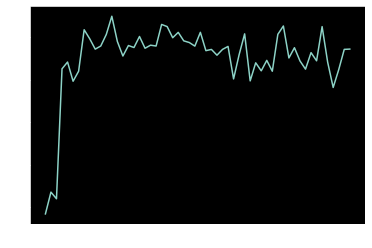

In [50]:
plt.plot(np.arange(160,440,5), MI_p)

In [53]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

ncomps = 50
def get_info(fdata, flabels, fue):
  
  cv = KFold(10, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < ncomps:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(ncomps, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_s3 = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,40:(t+1)].sum(axis=2), labels, ue) for t in range(40,183))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


1 1 0.04624701198340156
0.06612630295949819


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    7.1s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    7.3s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    7.4s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    7.4s


1 0.012329612531370831
1 0.20400735394259256
1 0.06015009905556334
1 0.22437555728321906


[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    7.7s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    7.8s


1 -0.020695217694909677
1 0.040357180001299994
1 0.3393204738687792


[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    8.4s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    8.4s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    8.4s


1 0.08933894642720103
11 0.2174416646541277
 0.05294881707733292


[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    8.9s
[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    9.0s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    9.0s


1 0.4604104403917057


[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:  2.5min


1 0.4734096517809725


[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:  2.5min


1 0.610617492753714
1 0.7692076934617865


[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:  2.5min


1 0.42839824110136815


[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:  2.5min


1 0.8309369477878872


[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:  2.5min


1 1.0154784069368288


[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:  2.6min


1 0.9166796034853829


[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:  2.6min


1 0.9208216211238262
1 1.2274796053250903


[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:  2.6min


1 1.2970803544102818


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:  2.6min


1 1.1848972729339058


[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:  2.6min


1 1.3291523041461957


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:  2.7min


1 1.44085517039677


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:  2.7min


1 1.6849277290347222


[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:  2.7min


1 1.7587874539135628
1 1.7587430687512104
1 1.5189019678775182


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed:  2.7min


1 1.7651355018462052
1 1.8842986150012793


[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:  2.7min


1 1.9412765242585273
1 1.927674326113256


[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed:  2.7min


1 2.0495455263713276
1 1.9528372327698889


[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:  2.8min


1 2.0831678772630196


[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:  2.8min


1 2.1267232303140373


[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed:  2.8min


1 2.1813860055899057


[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed:  2.9min


1 2.2680901301812955
1 2.158749637099151


[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:  2.9min


1 2.273962328706652


[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed:  2.9min


1 2.2844901653743466


[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:  2.9min


1 2.291583241041622


[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed:  2.9min


1 2.3413871609390604
1 2.35223268388924
1 2.3896006079888363


[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed:  2.9min


1 2.463302248108341


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:  2.9min


1 2.483958458913722


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed:  3.0min


1 2.5336217439655906


[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:  3.0min


1 2.511189898237073


[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed:  3.1min


1 2.5191208186906304


[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed:  3.1min


1 2.5256814642823042
1 2.495554849439927


[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed:  3.1min


1 2.407284198906767
1

[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed:  3.1min


 2.517416354335902


[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed:  3.1min


1 2.614755927768874
1 2.604241234012672


[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed:  3.8min


1 2.623888938366275
1 2.6365238320910382


[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed:  3.8min


1 2.6565124201113193


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:  3.8min


1 2.5939865559938484


[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed:  3.9min


1 2.7603785969637498


[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed:  3.9min


1 2.7012497445170753


[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed:  3.9min


1 2.717211178992326
1 2.6536373600463614


[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed:  3.9min


1 2.6541459601380426


[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed:  5.9min


1 2.6397462287679963


[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed:  6.6min


1 2.606250648801091
1 2.6313806604303225


[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed:  7.0min
[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed:  7.0min


1 2.5770509117051867


[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed:  7.0min


1 2.6013671258538067


[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:  7.0min


1 2.6193882734337204


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed:  7.1min


1 2.591633843540333


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:  7.1min


1 2.7149666913268686
1 2.6611190896868053


[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed:  7.1min


1 2.7932680749460594


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed:  7.2min


1 2.6787197175818336


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:  7.2min


1 2.68568289369825


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:  7.2min


1 2.665682542443914


[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:  7.3min


1 2.7119430210472415
1 2.706288027948431


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:  7.3min


1 2.5024178845557756


[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:  7.3min


1 2.7848495313939776


[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:  7.3min


1 2.7465188971767067
1 2.6516980501325835


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:  7.4min
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:  7.4min


1 2.6982885277399777
1 2.688467835337599


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:  7.5min
[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:  7.5min


1 2.7378578203153663


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:  7.5min


1 2.729052957827835


[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed:  7.6min


1 2.6865073333670617


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed:  7.6min


1 2.7316957330819704


[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed:  7.6min


1 2.728874128327945


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed:  7.7min


1 2.721253056973527


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed:  7.7min


1 2.6640543295885033


[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed:  7.7min


1 2.662712470386251


[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed:  7.7min


1 2.6600549810896394


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed:  7.8min


1 2.7252018752709364


[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed:  7.8min


1 2.6954536238414875


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed:  7.9min


1 2.7459632877491242


[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed:  7.9min


1 2.7413740570041902
1 2.78430053092336


[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed:  7.9min


1 2.7620938222027434


[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed:  8.0min


1 2.729476665674167
1 2.7338571534003386


[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed:  8.0min


1 2.729084468020747


[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed:  8.0min


1 2.684551111181372


[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed:  8.1min


1 2.706836227682889


[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed:  8.2min


1 2.6490444079640296


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed:  8.2min


1 2.6303801247798098


[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed:  8.2min


1 2.70856441189425
1 2.7129517799462457


[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed:  8.3min


1 2.715935009123001


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed:  8.3min


1 2.6928991396397715


[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed:  8.3min


1 2.7676268678951854


[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed:  8.4min


1 2.790583211442725


[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed:  8.4min


1 2.837693061262649


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed:  8.4min


1 2.8909717707583984
1 2.7661450146248443


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed:  8.5min


1 2.756249564767459


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed:  8.6min


1 2.7056838708273845
1 2.709960773307097
1 2.7120902889213543
1 2.791006111467586
1 2.673413584165882
1 2.695845221356801
1 2.7318718270256896
1 2.780965404712736
1 2.6480890803343957
1 2.6801687126557128
1 2.698724467967275
1 2.6491027598241543
1 2.827658131931814
1 2.6267736473817394


[Parallel(n_jobs=12)]: Done 134 out of 143 | elapsed:  8.9min remaining:   35.8s


1 2.782457607191166
1 2.667239231535995
1 2.6217318961609473
1 2.72630672405731
1 2.7612647350840747
1 2.7487500006433185
1 2.7325444731475548
1 2.743943089948602
1 2.7358946606326526


[Parallel(n_jobs=12)]: Done 143 out of 143 | elapsed:  8.9min finished


ValueError: x and y must have same first dimension, but have shapes (183,) and (1,)

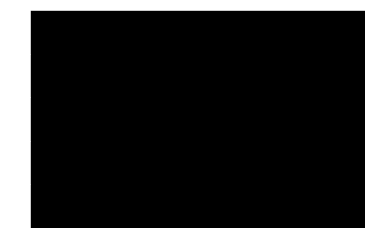

In [63]:
xn = np.linspace(-.25,1.0,200)
xnn = xn[7:-10]
plt.plot(xnn,MI_s)
plt.plot(xnn,MI_st)
plt.plot(xnn[40:], MI_s2)
plt.plot(xnn[40:], MI_s3)


ylim = plt.ylim()
plt.ylabel('Information (bits)')
xlim = plt.xlim()
plt.xlabel('Time (s)')


plt.gca().twinx()
plt.ylim(ylim / np.log2(17) * 100)
plt.ylabel('Information (% max.)')

# plt.gca().twiny()
# plt.xlim((xlim - xnn[0])/(xnn[-1] - xnn[0]) * len(xnn))
# plt.xticks(np.arange(0,180,15))
# plt.xlabel('Temporal dimension')

# plt.axvline(40,0,1)

plt.show()


In [2]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

def get_info(fdata, flabels, fue):
  
  cv = KFold(20, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < 40:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(40, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_c2 = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,c,:].reshape(data.shape[0],-1), labels, ue) for c in range(data.shape[1]))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


1 -0.033833856058959354


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:  1.1min


1 0.016416096470192765
1 0.06648475931077305


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:  1.1min


1 -0.05005660153103253


[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:  1.1min


1 -0.08682144053633449
1 0.014612756315644704
1 0.02733524110984608


[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:  1.1min


1 0.014850549159279991


[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:  1.1min


1 0.004347890443219687
1

[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:  1.2min


 0.003359707425831945
1 -0.07070012304037848


[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:  1.2min


1 0.01909621075495182


[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:  1.2min


1 0.10286324891172624


[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:  1.4min


1 0.2568721327452279
1 -0.005258048088764563


[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:  1.4min


1 -0.05699226206118947
1 0.002443903270895357


[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:  1.4min


1 0.020676898513741784


[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:  1.4min


1 1.08350388370077


[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:  1.5min


1 0.805105237333104


[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:  1.5min


1 0.4002903148813924


[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:  1.5min


1 0.20930313976704504


[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:  1.5min


1 0.7391318024756142
1 -0.05172008402914532


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:  1.5min


1 -0.016228392701655013
1 -0.008157336904419249


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:  1.7min


1 -0.014903440766805982


[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:  1.7min


1 0.1074194097948419


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:  1.7min


1 0.049242342227044954


[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed:  1.7min


1 0.044075161182473746


[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed:  1.7min


1 0.6188196708161926


[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed:  1.8min


1 0.3554457321204956


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:  1.8min


1 -0.015336168510665315


[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:  1.8min


1 0.4105057143213432
1 0.30166789550783085


[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed:  1.8min


1 0.031676182676061246


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:  1.8min


1 0.08745515349624043


[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:  1.9min


1 0.0878753813250646


[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed:  2.0min


1 0.03477478584831683


[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed:  2.0min


1 -0.1250775138446565


[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed:  2.0min


1 0.4484961135951215


[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:  2.0min


1 0.031624204714484995


[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed:  2.0min


1 0.1778553771224429


[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:  2.1min


1 -0.0659252679505126


[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed:  2.1min


1 0.14477952615665368


[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed:  2.1min


1 0.0016883806204932874
1 0.9396306779029766


[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed:  2.1min


1 0.1779435962452787


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:  2.1min


1 0.18905674180305237
1 0.10142008593777208


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:  2.2min


1 -0.045701926912654386


[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed:  2.2min


1 0.058344015029941625


[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed:  2.3min


1 0.02337408360612256


[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed:  2.3min


1 0.10521879018139337


[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed:  2.3min


1 0.08598390740160824
1 1.1029073506679838
1 -0.035716003982773956


[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed:  2.4min


1 -0.017526822167168363


[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed:  2.4min


1 0.15357949201281418


[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed:  2.4min


1 0.28264742406351095


[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed:  2.4min


1 -0.011675313400640017
1 1.0515719892904885


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed:  2.5min


1 0.12858619161132984


[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed:  2.5min


1 0.07821072505146273


[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed:  2.6min


1 -0.07216656754061422


[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed:  2.6min


1 0.02544807179764776


[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed:  2.6min


1 -0.10179631461569585


[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed:  2.7min


1 -0.04130046989203156


[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed:  2.7min


1 -0.008092289463940975


[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed:  2.7min


1 0.009776249358179485


[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed:  2.7min


1 0.03529943872905136


[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed:  2.7min


1 0.03981116025106086


[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:  2.7min


1 -0.013758272910409238


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed:  2.8min


1 0.25638233226272483


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:  2.8min


1 0.13403016016465774


[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed:  2.8min


1 -0.09608360253696298


[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed:  2.9min


1 0.002911923984348971


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed:  2.9min


1 0.03624924723425066


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:  2.9min


1 -0.02834471230785025
1 0.10238635617345887
1

[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:  3.0min


 0.3585515544872102


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:  3.0min


1 0.19424670378684372
1 0.027863346448324326


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:  3.0min


1 0.7892145153282222


[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:  3.0min


1 0.14220476202116178
1 0.05809141845039275


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:  3.1min


1 0.04577987725976568


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:  3.1min


1 -0.013146410533614457


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:  3.2min


1 0.07340753861113601


[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:  3.2min


1 0.06979665056212946


[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed:  3.2min


1 0.38715137533579197


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed:  3.3min


1 0.6289834645367286


[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed:  3.3min


1 0.3854540262261865


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed:  3.3min


1 0.06933579312627271
1 0.1825805174893893


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed:  3.3min


1 0.11630568229893326


[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed:  3.3min


1 -0.023482055090220173
1 0.344243860606418


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed:  3.4min


1 0.0497727725688695


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed:  3.4min


1 0.11886229570023321


[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed:  3.4min


1 0.44848079610358144


[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed:  3.5min


1 0.0037412236932525015


[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed:  3.5min


1 0.020496906688198164
1 0.28365650832887235


[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:  3.6min


1 0.28881661741476355


[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed:  3.6min


1 0.16998694152222077
1

[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed:  3.6min


 0.08388478118015875


[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed:  3.7min


1 0.3355353843105105


[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed:  3.7min


1 0.07339558660425656


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed:  3.7min


1 -0.02813442979971635


[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed:  3.8min


1 0.13541517113365747


[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed:  3.8min


1 -0.05874018303725928


[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed:  3.8min


1 0.11454649267664332


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed:  3.8min


1 -0.06582913899944301


[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed:  3.8min


1 0.2500919329422088
1 -0.11306452990375522


[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed:  3.9min


1 0.001838589578602598


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed:  3.9min


1 0.1609301944690469


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed:  3.9min


1 0.49677463010872475


[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed:  4.0min


1 0.5429294578858711


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed:  4.0min


1 -0.007789086333487715


[Parallel(n_jobs=12)]: Done 121 tasks      | elapsed:  4.0min


1 0.07541769496555847


[Parallel(n_jobs=12)]: Done 122 tasks      | elapsed:  4.0min


1 -0.0455497575438537


[Parallel(n_jobs=12)]: Done 123 tasks      | elapsed:  4.0min


1 0.0969927006250645


[Parallel(n_jobs=12)]: Done 124 tasks      | elapsed:  4.0min


1 -0.03343063243432905


[Parallel(n_jobs=12)]: Done 125 tasks      | elapsed:  4.1min


1 0.19319472547776562


[Parallel(n_jobs=12)]: Done 126 tasks      | elapsed:  4.1min


1 0.022944045420014623


[Parallel(n_jobs=12)]: Done 127 tasks      | elapsed:  4.2min


1 -0.03821122173449868


[Parallel(n_jobs=12)]: Done 128 tasks      | elapsed:  4.2min


1 -0.14648824987300624


[Parallel(n_jobs=12)]: Done 129 tasks      | elapsed:  4.2min


1 -0.052143971467904504
1 0.4999816535771515


[Parallel(n_jobs=12)]: Done 130 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 131 tasks      | elapsed:  4.2min


1 0.07012443211861012


[Parallel(n_jobs=12)]: Done 132 tasks      | elapsed:  4.2min


1 0.011256190559442414
1 0.03649751897989348


[Parallel(n_jobs=12)]: Done 133 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 134 tasks      | elapsed:  4.3min


1 0.14136367521566984


[Parallel(n_jobs=12)]: Done 135 tasks      | elapsed:  4.3min


1 -0.012166627877814092


[Parallel(n_jobs=12)]: Done 136 tasks      | elapsed:  4.3min


1 -0.11715893449842321


[Parallel(n_jobs=12)]: Done 137 tasks      | elapsed:  4.4min


1 -0.038499323240423045


[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:  4.4min


1 -0.04565836893015137


[Parallel(n_jobs=12)]: Done 139 tasks      | elapsed:  4.4min


1 0.07002934014334507


[Parallel(n_jobs=12)]: Done 140 tasks      | elapsed:  4.4min


1 0.09333850881339206


[Parallel(n_jobs=12)]: Done 141 tasks      | elapsed:  4.4min


1 0.0002137396694951927


[Parallel(n_jobs=12)]: Done 142 tasks      | elapsed:  4.5min


1 0.07157162841438591


[Parallel(n_jobs=12)]: Done 143 tasks      | elapsed:  4.5min


1 0.1614885449029194


[Parallel(n_jobs=12)]: Done 144 tasks      | elapsed:  4.5min


1 0.03572600484302895


[Parallel(n_jobs=12)]: Done 145 tasks      | elapsed:  4.5min


1 0.039411331159386206


[Parallel(n_jobs=12)]: Done 146 tasks      | elapsed:  4.6min


1 0.1332198735761998


[Parallel(n_jobs=12)]: Done 147 tasks      | elapsed:  4.6min


1 -0.03779444124000815
1 0.06774001452852006
1 -0.034590826985658664
1 -0.08595548110327142
1 0.01460991940463233
1 0.06712833053433895
1 0.01879320814655704
1 0.04846974148741902
1 0.03772599685998278
1 0.08611621065524984
1 0.25006545232492067
1 0.044405892640626464
1 -0.05165273993666889
1 -0.05791121877449698
1 -0.04344676091856004
1 -0.030906736363891785


[Parallel(n_jobs=12)]: Done 163 out of 170 | elapsed:  5.0min remaining:   12.8s


1 0.43447337038461803
1 0.0970228842702942
1 0.06822350992431081
1 0.19620620025207747
1 0.27748726450237654
1 0.21566393221012348
1 0.03361305826282886


[Parallel(n_jobs=12)]: Done 170 out of 170 | elapsed:  5.0min finished


(-0.25, 1.25)

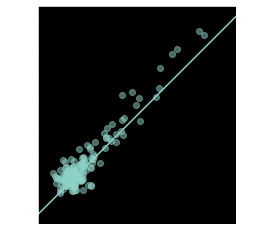

In [75]:
# plt.hist(MI_c)
# plt.hist(MI_c2, alpha=.5)
plt.scatter(MI_c, MI_c2, alpha=.5)
plt.plot([-.25,1.25],[-.25,1.25])
plt.axis('square')
plt.xlim([-.25,1.25])

In [76]:
data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

def get_info(fdata, flabels, fue):
  
  cv = KFold(20, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < 40:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(40, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_ct = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,c,40:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(40,183) for c in range(data.shape[1]))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


0 0.00809741877079799
0 -0.1027226761287758
0 0 -0.04404771082921522
-0.071574190421439090 -0.07964821536816134

0 -0.01691534658667397
0 -0.024306233377415384
0 -0.06563250819005366
0 -0.04994889409068115
0 -0.039585100985227724


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:    3.4s
[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:    3.5s
[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:    3.6s
[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:    3.6s


0 -0.052628639892796425
0 0.03883764937224561


[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:    3.7s
[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:    3.7s


0 -0.058141766156965397
0 -0.02488286385815248
0 -0.12386836514327847
0 -0.03380984046538335
0

[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:    6.8s
[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:    6.9s
[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:    6.9s
[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:    6.9s


 -0.02882868176605361
0 -0.10081385345866617
0 -0.05407314989164749
0 -0.060019272151215226
0 -0.031814804329418245
0 -0.15163004899339083


[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:    7.0s
[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:    7.0s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:    7.0s
[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:    7.0s
[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:    7.0s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:    7.1s


0 -0.07401817217544056
0 -0.058661521725041195


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:    7.2s
[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:    7.3s


0 -0.09935133722419619
0 -0.10572453178485541


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:   10.8s
[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   11.0s


0 -0.03650203760505734
0 -0.003517842029413478
0 0.07797463257867342
0 0.02466434038203771
0 0.06471695767767538
0 0.027593226091666683
0 0.07053210973538009
0 -0.014749840425161415


[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:   11.1s
[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:   11.1s
[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed:   11.1s
[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed:   11.2s
[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed:   11.2s
[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:   11.2s
[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:   11.2s
[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed:   11.3s


0 -0.014688852843414028


[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed:   11.3s


0 0.07802819400127052


[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:   11.8s


0 -0.011148876589712264
0 -0.020124844059785537
0 -0.03171162715323488
0 0.010125404320350894
0 -0.02405448902494082
0

[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:   14.5s
[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed:   14.6s
[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed:   14.6s
[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed:   14.6s
[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:   14.6s


 0.04173894466888085
0 0.045743683562454826
0

[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed:   14.7s
[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:   14.8s


 -0.13022838441498671
0 -0.1134159502791756
0

[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed:   14.9s
[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed:   15.0s


 0.0033682027159563487
0 0.040478344178374315
0 -0.137763087968946


[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed:   15.1s
[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed:   15.1s
[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:   15.3s


0 -0.0745281660976324


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed:   18.2s


0 0.008152514890548386
0 0-0.04575600252578263
 0.022865654161095848
0 -0.050807446077620715


[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:   18.5s
[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed:   18.6s
[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed:   18.6s
[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed:   18.6s


0 -0.09203652291505167
0 -0.14354566196649443


[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed:   18.9s
[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed:   19.1s


0 -0.15412144656709614


[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed:   19.2s


0 0.02946254335510098
0 -0.008029357205420102
0 -0.07759663985278116


[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed:   19.4s
[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed:   19.5s
[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed:   19.5s


0 -0.0039557670684223336


[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed:   19.7s


0 0.025106680014919367
0 -0.019340673876702793


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:   22.5s
[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed:   22.5s


0 0.02228187633120768
0 0.04373500088779841
0 -0.018478258260019077


[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed:   22.7s
[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed:   22.7s
[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed:   22.7s


0 -0.1137248556014966
0 -0.08847830724324
0 -0.022765516071398317
0 -0.13938108906564803


[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed:   23.0s
[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed:   23.0s
[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed:   23.1s
[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed:   23.1s


0 -0.03916270759715151
0 -0.02037090327244763
0 -0.04921488942760131


[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed:   23.3s
[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed:   23.3s
[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:   23.4s


0 -0.2042248010848407
00 -0.00945607643990287
 0.05421068641826226
0 0.014706872852700543


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed:   25.9s
[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:   26.0s
[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed:   26.0s
[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed:   26.0s


0 -0.061808897878099664
0 -0.021086554605039144
0 -0.03763132166351931


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed:   26.1s
[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:   26.2s


0 -0.053264342116228346
0 -0.04672221251853747


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:   26.3s
[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:   26.3s
[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:   26.4s


0 0.008235746964860754
0 -0.07427936661074114
0 -0.10155966512107861


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:   26.7s
[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:   26.8s
[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:   26.8s


0 -0.04986040325341145
0 -0.0781855773399185
0 0.035944638922279275


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:   29.1s
[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:   29.1s
[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:   29.3s


0 -0.07692197527532209
0 -0.025804877608538137
0 -0.03190347380989121
0

[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:   29.4s
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:   29.4s
[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed:   29.5s


 -0.1505183724609695
0 -0.054686591735186335


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed:   29.6s
[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed:   29.7s


0 -0.020292804829767766


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed:   29.8s


0 -0.013300851883157482
0 -0.0009755215695500664
0 -0.050748406443208195


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed:   30.1s
[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed:   30.1s
[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed:   30.2s


0 -0.0988668627935911
0 -0.11746610464850836


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed:   32.3s
[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed:   32.3s


0 -0.12198915353884385
0 -0.013219178309322127
0 -0.00316563765876293
0 -0.10930567657237722
0 0.06186214008673045


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed:   32.6s
[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed:   32.6s
[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed:   32.6s
[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed:   32.7s
[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed:   32.7s


00 -0.01595917283592753 -0.03390294620837038



[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:   32.8s
[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed:   32.8s


0 -0.07968900866668119
0 0.028006154150319304
0 -0.009294057922952792


[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed:   33.2s
[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed:   33.2s
[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed:   33.4s


0 -0.05699250161511896
0 0.03235726629375325


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed:   35.2s
[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed:   35.3s


0 -0.09230960679281726
0 -0.07621228617563258
0

[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed:   35.5s
[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed:   35.7s


 -0.08558329220850742
0 -0.01539582846695282
0 -0.051042659106050256
0 -0.07028575048638308


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed:   35.7s
[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed:   35.7s
[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed:   35.8s
[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed:   35.9s


0 -0.13178848149692324


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed:   35.9s


0 0.030218658579323807
0 -0.05556993875597758


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed:   36.3s
[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed:   36.3s


0 -0.05838590660848689


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed:   36.5s


0 0.01051572868771257
0 0.02931972778636154


[Parallel(n_jobs=12)]: Done 121 tasks      | elapsed:   38.4s
[Parallel(n_jobs=12)]: Done 122 tasks      | elapsed:   38.4s


0 0.0008016418174795403
0 -0.055890150595272525
0 -0.028325706443151914
0 0.04917406745855129
0 -0.08315881802122514


[Parallel(n_jobs=12)]: Done 123 tasks      | elapsed:   38.8s
[Parallel(n_jobs=12)]: Done 124 tasks      | elapsed:   38.8s
[Parallel(n_jobs=12)]: Done 125 tasks      | elapsed:   38.8s
[Parallel(n_jobs=12)]: Done 126 tasks      | elapsed:   38.9s
[Parallel(n_jobs=12)]: Done 127 tasks      | elapsed:   38.9s


0 -0.06672606573120614
0 0.033912516639134596


[Parallel(n_jobs=12)]: Done 128 tasks      | elapsed:   39.0s
[Parallel(n_jobs=12)]: Done 129 tasks      | elapsed:   39.1s


0 -0.017203483081987273
0

[Parallel(n_jobs=12)]: Done 130 tasks      | elapsed:   39.3s


 -0.04484843144492562
0 -0.003170915596773191


[Parallel(n_jobs=12)]: Done 131 tasks      | elapsed:   39.5s
[Parallel(n_jobs=12)]: Done 132 tasks      | elapsed:   39.7s


0 -0.04491899393382833
0 -0.03070910097698842


[Parallel(n_jobs=12)]: Done 133 tasks      | elapsed:   41.3s
[Parallel(n_jobs=12)]: Done 134 tasks      | elapsed:   41.4s


0 -0.07211947523209696
0 0.017892996489405066
0 0.018577416670838235
0

[Parallel(n_jobs=12)]: Done 135 tasks      | elapsed:   41.8s
[Parallel(n_jobs=12)]: Done 136 tasks      | elapsed:   41.8s
[Parallel(n_jobs=12)]: Done 137 tasks      | elapsed:   42.0s


 -0.0013079133432554225
0 -0.11153202697026744
0 -0.010990221345226038
0 -0.0030740496457757707


[Parallel(n_jobs=12)]: Done 138 tasks      | elapsed:   42.0s
[Parallel(n_jobs=12)]: Done 139 tasks      | elapsed:   42.0s
[Parallel(n_jobs=12)]: Done 140 tasks      | elapsed:   42.1s
[Parallel(n_jobs=12)]: Done 141 tasks      | elapsed:   42.1s


0 -0.029746135063862846


[Parallel(n_jobs=12)]: Done 142 tasks      | elapsed:   42.4s


0 -0.021899493788584218
0 -0.023622219609707455


[Parallel(n_jobs=12)]: Done 143 tasks      | elapsed:   42.7s
[Parallel(n_jobs=12)]: Done 144 tasks      | elapsed:   42.8s


0 -0.03867169491603802


[Parallel(n_jobs=12)]: Done 145 tasks      | elapsed:   44.3s


0 -0.027073676835527062


[Parallel(n_jobs=12)]: Done 146 tasks      | elapsed:   44.5s


0 -0.12284527274884442
0 -0.017032986305729234


[Parallel(n_jobs=12)]: Done 147 tasks      | elapsed:   44.8s
[Parallel(n_jobs=12)]: Done 148 tasks      | elapsed:   45.0s


0 0.01827802015230454
0 -0.07523486297369118
0 -0.043576097586241425
0 -0.03486931533041301
0 0.07318519683682848


[Parallel(n_jobs=12)]: Done 149 tasks      | elapsed:   45.1s
[Parallel(n_jobs=12)]: Done 150 tasks      | elapsed:   45.1s
[Parallel(n_jobs=12)]: Done 151 tasks      | elapsed:   45.1s
[Parallel(n_jobs=12)]: Done 152 tasks      | elapsed:   45.2s
[Parallel(n_jobs=12)]: Done 153 tasks      | elapsed:   45.2s


0 0.07257024572956475


[Parallel(n_jobs=12)]: Done 154 tasks      | elapsed:   45.5s


0 -0.019481340774680906
0 -0.011184521271548344


[Parallel(n_jobs=12)]: Done 155 tasks      | elapsed:   45.8s


0 -0.06767537861540165
0 -0.03490646689931641


[Parallel(n_jobs=12)]: Done 156 tasks      | elapsed:   46.0s
[Parallel(n_jobs=12)]: Done 157 tasks      | elapsed:   47.4s
[Parallel(n_jobs=12)]: Done 158 tasks      | elapsed:   47.6s


0 -0.09563039449482269


[Parallel(n_jobs=12)]: Done 159 tasks      | elapsed:   47.8s


0 -0.04198914876691402
0 -0.03484636877712893
0 0.024785215648164344
0

[Parallel(n_jobs=12)]: Done 160 tasks      | elapsed:   48.1s
[Parallel(n_jobs=12)]: Done 161 tasks      | elapsed:   48.1s
[Parallel(n_jobs=12)]: Done 162 tasks      | elapsed:   48.2s


 -0.019604327323524167
0 -0.020407121653873286


[Parallel(n_jobs=12)]: Done 163 tasks      | elapsed:   48.3s
[Parallel(n_jobs=12)]: Done 164 tasks      | elapsed:   48.4s


0 -0.04908305858597433
0 0.04034175474645467


[Parallel(n_jobs=12)]: Done 165 tasks      | elapsed:   48.5s
[Parallel(n_jobs=12)]: Done 166 tasks      | elapsed:   48.7s


0 0.01583053553841079


[Parallel(n_jobs=12)]: Done 167 tasks      | elapsed:   48.9s


0 -0.013470352606566911


[Parallel(n_jobs=12)]: Done 168 tasks      | elapsed:   49.2s


0 -0.16935335960964848


[Parallel(n_jobs=12)]: Done 169 tasks      | elapsed:   50.3s


0 -0.10945802594813576


[Parallel(n_jobs=12)]: Done 170 tasks      | elapsed:   50.7s


0 0.036111860359722185
0 -0.16692055251812826
0 0.01791613651314186


[Parallel(n_jobs=12)]: Done 171 tasks      | elapsed:   51.0s
[Parallel(n_jobs=12)]: Done 172 tasks      | elapsed:   51.2s
[Parallel(n_jobs=12)]: Done 173 tasks      | elapsed:   51.2s


0 -0.0746008123072694
0 0.09366875794855573
0 0.003290347487609811


[Parallel(n_jobs=12)]: Done 174 tasks      | elapsed:   51.3s
[Parallel(n_jobs=12)]: Done 175 tasks      | elapsed:   51.4s
[Parallel(n_jobs=12)]: Done 176 tasks      | elapsed:   51.5s


0 -0.05924800319213507


[Parallel(n_jobs=12)]: Done 177 tasks      | elapsed:   51.5s


0 -0.1193415440124919
0 0.026464725239987247


[Parallel(n_jobs=12)]: Done 178 tasks      | elapsed:   51.8s
[Parallel(n_jobs=12)]: Done 179 tasks      | elapsed:   52.0s


0 0.019084511073757846


[Parallel(n_jobs=12)]: Done 180 tasks      | elapsed:   52.3s


0 -0.05306880791388204


[Parallel(n_jobs=12)]: Done 181 tasks      | elapsed:   53.6s


0 0.05272594587925982


[Parallel(n_jobs=12)]: Done 182 tasks      | elapsed:   53.9s


0 -0.014497932314532808
0 -0.0647171865452353
0

[Parallel(n_jobs=12)]: Done 183 tasks      | elapsed:   54.2s
[Parallel(n_jobs=12)]: Done 184 tasks      | elapsed:   54.3s


 -0.056647686566258605
0 0.0054838021756780965
0 -0.11242998502210186


[Parallel(n_jobs=12)]: Done 185 tasks      | elapsed:   54.4s
[Parallel(n_jobs=12)]: Done 186 tasks      | elapsed:   54.5s
[Parallel(n_jobs=12)]: Done 187 tasks      | elapsed:   54.5s


0 -0.09270841992026647
0 0.11136477662414826


[Parallel(n_jobs=12)]: Done 188 tasks      | elapsed:   54.7s
[Parallel(n_jobs=12)]: Done 189 tasks      | elapsed:   54.8s


0 0.02826849175310278
0 -0.06765661672584111


[Parallel(n_jobs=12)]: Done 190 tasks      | elapsed:   55.0s
[Parallel(n_jobs=12)]: Done 191 tasks      | elapsed:   55.1s


0 -0.06098892435186946


[Parallel(n_jobs=12)]: Done 192 tasks      | elapsed:   55.5s


0 0.06166082220173626


[Parallel(n_jobs=12)]: Done 193 tasks      | elapsed:   56.8s


0 -0.04622937323262876
0 0.04203484685697875


[Parallel(n_jobs=12)]: Done 194 tasks      | elapsed:   57.1s
[Parallel(n_jobs=12)]: Done 195 tasks      | elapsed:   57.3s


0 0.0523979106502596
0 0.024469743745449822


[Parallel(n_jobs=12)]: Done 196 tasks      | elapsed:   57.4s
[Parallel(n_jobs=12)]: Done 197 tasks      | elapsed:   57.5s


0 -0.04739864698494208
0 0.0025377163307746895


[Parallel(n_jobs=12)]: Done 198 tasks      | elapsed:   57.6s
[Parallel(n_jobs=12)]: Done 199 tasks      | elapsed:   57.7s


0 -0.005429270747077811
0 0.06804400835299818


[Parallel(n_jobs=12)]: Done 200 tasks      | elapsed:   57.8s
[Parallel(n_jobs=12)]: Done 201 tasks      | elapsed:   58.0s


0 0.015331034991294882
0 -0.011063272872850657


[Parallel(n_jobs=12)]: Done 202 tasks      | elapsed:   58.1s
[Parallel(n_jobs=12)]: Done 203 tasks      | elapsed:   58.2s


0 0.019550928812231746


[Parallel(n_jobs=12)]: Done 204 tasks      | elapsed:   58.7s


0 -0.0420477408988998


[Parallel(n_jobs=12)]: Done 205 tasks      | elapsed:   59.9s


0 -0.13388248151261878
0 -0.013478110064037633
0 -0.0445224747879965


[Parallel(n_jobs=12)]: Done 206 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 207 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 208 tasks      | elapsed:  1.0min


0 -0.020852773504173285
0 -0.056916809935109516


[Parallel(n_jobs=12)]: Done 209 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 210 tasks      | elapsed:  1.0min


0 -0.010242406305654594
0 0.09424348308098131
0 0.09578348845013522


[Parallel(n_jobs=12)]: Done 211 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 212 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 213 tasks      | elapsed:  1.0min


0 0.024818461414819384
0 -0.1331957270408807


[Parallel(n_jobs=12)]: Done 214 tasks      | elapsed:  1.0min
[Parallel(n_jobs=12)]: Done 215 tasks      | elapsed:  1.0min


0 -0.08419049520682777


[Parallel(n_jobs=12)]: Done 216 tasks      | elapsed:  1.0min


0 0.125239233402355
0 0.05293713270772224
0 -0.01640817692032602


[Parallel(n_jobs=12)]: Done 217 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 218 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 219 tasks      | elapsed:  1.1min


0 0.0081054405476052
0 -0.003596005621110282


[Parallel(n_jobs=12)]: Done 220 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 221 tasks      | elapsed:  1.1min


0 -0.12657386814066782
0 0.07289457133691189


[Parallel(n_jobs=12)]: Done 222 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 223 tasks      | elapsed:  1.1min


0 -0.06701698748283122
0 -0.02778646929984344


[Parallel(n_jobs=12)]: Done 224 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 225 tasks      | elapsed:  1.1min


0 -0.17883947204453363
0 0.07175569742311423


[Parallel(n_jobs=12)]: Done 226 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 227 tasks      | elapsed:  1.1min


0 -0.0038098735521451925


[Parallel(n_jobs=12)]: Done 228 tasks      | elapsed:  1.1min


0 -0.1473491779823531
0 -0.05879945785625605


[Parallel(n_jobs=12)]: Done 229 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 230 tasks      | elapsed:  1.1min


0 0.06154102823922103
0 0.007761271848358707
0 0.017378424577615903


[Parallel(n_jobs=12)]: Done 231 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 232 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 233 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 234 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 235 tasks      | elapsed:  1.1min


0 -0.0417332792998898
0 -0.09881568089349008
0 -0.12056099003599736
0 -0.016900982453702265


[Parallel(n_jobs=12)]: Done 236 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 237 tasks      | elapsed:  1.1min


0 -0.06348646968817445
0 0.028415219464116456


[Parallel(n_jobs=12)]: Done 238 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done 239 tasks      | elapsed:  1.1min


0 -0.033556719411072564


[Parallel(n_jobs=12)]: Done 240 tasks      | elapsed:  1.1min


0 -0.056422543807967546
0 -0.038349040116050545


[Parallel(n_jobs=12)]: Done 241 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 242 tasks      | elapsed:  1.2min


0 -0.01922664733532803
0 -0.04871015318056482


[Parallel(n_jobs=12)]: Done 243 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 244 tasks      | elapsed:  1.2min


0 -0.05241854771836707
0 -0.01778899414808792
0 -0.05124095488772633
0 -0.00031707061537448127


[Parallel(n_jobs=12)]: Done 245 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 246 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 247 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 248 tasks      | elapsed:  1.2min


0 0.015504378718445469


[Parallel(n_jobs=12)]: Done 249 tasks      | elapsed:  1.2min


0 -0.06573415044508778
0 -0.18820294817638208


[Parallel(n_jobs=12)]: Done 250 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 251 tasks      | elapsed:  1.2min


0 0.1019154517719997


[Parallel(n_jobs=12)]: Done 252 tasks      | elapsed:  1.2min


0 0.03957517070233294
0 -0.057332986689611676
0 0.056311115201391045
0

[Parallel(n_jobs=12)]: Done 253 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 254 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 255 tasks      | elapsed:  1.2min


 0.04376729717968493
0 -0.04730347158116855
0 -0.08101543014531629
0 -0.16942343254787764


[Parallel(n_jobs=12)]: Done 256 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 257 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 258 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 259 tasks      | elapsed:  1.2min


0 -0.019362102947102135
0 -0.06059078590596794


[Parallel(n_jobs=12)]: Done 260 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 261 tasks      | elapsed:  1.2min


0 0.11140503447567375
0 -0.004386509658607361


[Parallel(n_jobs=12)]: Done 262 tasks      | elapsed:  1.2min
[Parallel(n_jobs=12)]: Done 263 tasks      | elapsed:  1.2min


0 -0.048422447128205856


[Parallel(n_jobs=12)]: Done 264 tasks      | elapsed:  1.2min


0 0.0477949125789269
0 -0.0015124082761345649
0 0.025293062960453076


[Parallel(n_jobs=12)]: Done 265 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 266 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 267 tasks      | elapsed:  1.3min


0 -0.1628496303687832
0 0.14692379592225221
0 0.10729272236064905
0 0.07249024971040649


[Parallel(n_jobs=12)]: Done 268 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 269 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 270 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 271 tasks      | elapsed:  1.3min


0 -0.039663861410132416
0 -0.054998657920075134


[Parallel(n_jobs=12)]: Done 272 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 273 tasks      | elapsed:  1.3min


0 -0.027930167921861305
0 0.0018737036483799068


[Parallel(n_jobs=12)]: Done 274 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 275 tasks      | elapsed:  1.3min


0 -0.03284396258539537


[Parallel(n_jobs=12)]: Done 276 tasks      | elapsed:  1.3min


0 -0.021653169595040645
0 0.05060939800092663


[Parallel(n_jobs=12)]: Done 277 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 278 tasks      | elapsed:  1.3min


0 0.002963536019572883
0 -0.012920140674399288
0 0.004416011162899722
0 -0.07108420150770299


[Parallel(n_jobs=12)]: Done 279 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 280 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 281 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 282 tasks      | elapsed:  1.3min


0 0.03557659501504408
0 0.008880791843897074
0 0.01792863585259148


[Parallel(n_jobs=12)]: Done 283 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 284 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 285 tasks      | elapsed:  1.3min


0 0.017830968099893627
0 0.008623088786481358


[Parallel(n_jobs=12)]: Done 286 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done 287 tasks      | elapsed:  1.3min


0 0.048262630585492745


[Parallel(n_jobs=12)]: Done 288 tasks      | elapsed:  1.3min


0 -0.07471755833861551
0 -0.002848578433996776


[Parallel(n_jobs=12)]: Done 289 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 290 tasks      | elapsed:  1.4min


0 -0.03731512957959429
0 -0.05899988692883354
0 -0.08342878424308847
0 -0.030570732360837818


[Parallel(n_jobs=12)]: Done 291 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 292 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 293 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 294 tasks      | elapsed:  1.4min


0 -0.032159978266237274
0 -0.11488846665846927
0 -0.023601178535131006


[Parallel(n_jobs=12)]: Done 295 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 296 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 297 tasks      | elapsed:  1.4min


0 -0.0726913824532638
0 0.03751660748302462


[Parallel(n_jobs=12)]: Done 298 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 299 tasks      | elapsed:  1.4min


0 0.07394048409316278


[Parallel(n_jobs=12)]: Done 300 tasks      | elapsed:  1.4min


0 0.023797994998512952
0 0.03798569122399203


[Parallel(n_jobs=12)]: Done 301 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 302 tasks      | elapsed:  1.4min


0 0.021971541520007003
0 -0.12918679352829293
0

[Parallel(n_jobs=12)]: Done 303 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 304 tasks      | elapsed:  1.4min


 0.05442217619290884
0 0.04576284632426783
0 -0.04297192001087458
0 -0.1947247312175616
0

[Parallel(n_jobs=12)]: Done 305 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 306 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 307 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 308 tasks      | elapsed:  1.4min


 -0.07005713059457142


[Parallel(n_jobs=12)]: Done 309 tasks      | elapsed:  1.4min


0 -0.1152600374058893
0 -0.05987031111098047


[Parallel(n_jobs=12)]: Done 310 tasks      | elapsed:  1.4min
[Parallel(n_jobs=12)]: Done 311 tasks      | elapsed:  1.4min


0 -0.07700625736743641


[Parallel(n_jobs=12)]: Done 312 tasks      | elapsed:  1.4min


0 0.06612934067722231
0 -0.02417429812148735
0 -0.11682811378286814


[Parallel(n_jobs=12)]: Done 313 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 314 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 315 tasks      | elapsed:  1.5min


0 -0.08306387153928031
0 0.03524128942709664
0 0.049943647692329125
0 -0.03573142681413584
0 0.008423608644098293


[Parallel(n_jobs=12)]: Done 316 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 317 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 318 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 319 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 320 tasks      | elapsed:  1.5min


0 -0.05792812848282878


[Parallel(n_jobs=12)]: Done 321 tasks      | elapsed:  1.5min


0 -0.018192858091809743
0 -0.03512395979397475


[Parallel(n_jobs=12)]: Done 322 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 323 tasks      | elapsed:  1.5min


0 -0.0653494231373723


[Parallel(n_jobs=12)]: Done 324 tasks      | elapsed:  1.5min


0 -0.004385371521165331


[Parallel(n_jobs=12)]: Done 325 tasks      | elapsed:  1.5min


0 0.055032315921166745
0 -0.06841542384325068


[Parallel(n_jobs=12)]: Done 326 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 327 tasks      | elapsed:  1.5min


0 -0.03774096531720708
0 -0.03969895067562642
0 -0.05414482812781182
0 -0.003816101528020991
0 -0.04138297813536942


[Parallel(n_jobs=12)]: Done 328 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 329 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 330 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 331 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 332 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 333 tasks      | elapsed:  1.5min


0 0.014976229195605196
0 0.01462655357729091
0 -0.014813613585060984
0 -0.04268105995184081


[Parallel(n_jobs=12)]: Done 334 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 335 tasks      | elapsed:  1.5min
[Parallel(n_jobs=12)]: Done 336 tasks      | elapsed:  1.5min


0 -0.005556451782260351


[Parallel(n_jobs=12)]: Done 337 tasks      | elapsed:  1.6min


0 0.11837625081022218
0 -0.023602681583624236
0 -0.11294043454198377


[Parallel(n_jobs=12)]: Done 338 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 339 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 340 tasks      | elapsed:  1.6min


0 -0.08520657827545229
0 0.033746707687343024
0 -0.057582989761485216
0 -0.008626398697756837


[Parallel(n_jobs=12)]: Done 341 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 342 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 343 tasks      | elapsed:  1.6min


0 0.06149446851428484
0 -0.023529641547972744
0 -0.06687495285357781


[Parallel(n_jobs=12)]: Done 344 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 345 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 346 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 347 tasks      | elapsed:  1.6min


0 0.014555100872179283


[Parallel(n_jobs=12)]: Done 348 tasks      | elapsed:  1.6min


0 -0.11040391744089811


[Parallel(n_jobs=12)]: Done 349 tasks      | elapsed:  1.6min


0 -0.01907566872516168
0 -0.00837387644110089
0 -0.0474246840404131


[Parallel(n_jobs=12)]: Done 350 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 351 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 352 tasks      | elapsed:  1.6min


0 -0.059218331229059666
0 -0.04077317830800787
0

[Parallel(n_jobs=12)]: Done 353 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 354 tasks      | elapsed:  1.6min


 0.02837619253222865
0 -0.05177048393746848
0 -0.004197795951926552
0 -0.09483880055899181


[Parallel(n_jobs=12)]: Done 355 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 356 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 357 tasks      | elapsed:  1.6min
[Parallel(n_jobs=12)]: Done 358 tasks      | elapsed:  1.6min


0 0.11824792239973617
0 -0.021810758777368117


[Parallel(n_jobs=12)]: Done 359 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 360 tasks      | elapsed:  1.7min


0 -0.055371499283531286
0 0.013913956377394891


[Parallel(n_jobs=12)]: Done 361 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 362 tasks      | elapsed:  1.7min


0 -0.011776922557384694
0 -0.06240321253782815


[Parallel(n_jobs=12)]: Done 363 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 364 tasks      | elapsed:  1.7min


0 -0.03341705449382716
0 -0.05634077645571205
0 0.010236015342517705


[Parallel(n_jobs=12)]: Done 365 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 366 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 367 tasks      | elapsed:  1.7min


0 0.049497871344538806
0 -0.11309344377438942
0 -0.01916715680831341


[Parallel(n_jobs=12)]: Done 368 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 369 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 370 tasks      | elapsed:  1.7min


0 0.055016101263598426
0 -0.05468394959594314


[Parallel(n_jobs=12)]: Done 371 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 372 tasks      | elapsed:  1.7min


0 0.022139972199463988
0 -0.0103137010328797
0 -0.08380304275602314


[Parallel(n_jobs=12)]: Done 373 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 374 tasks      | elapsed:  1.7min


0 -0.04541207766115473


[Parallel(n_jobs=12)]: Done 375 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 376 tasks      | elapsed:  1.7min


0 0.01080945724328012
0 0.01189485628332893
0 0.018145609469063934


[Parallel(n_jobs=12)]: Done 377 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 378 tasks      | elapsed:  1.7min
[Parallel(n_jobs=12)]: Done 379 tasks      | elapsed:  1.7min


0 0.0009470471723381956
0 -0.009943662035178723
0 0.054530554688802434


[Parallel(n_jobs=12)]: Done 380 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 381 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 382 tasks      | elapsed:  1.8min


0 0.004652224033380508
0 -0.019810050506776963


[Parallel(n_jobs=12)]: Done 383 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 384 tasks      | elapsed:  1.8min


0 -0.016338539270099636
0 -0.03096894001727951
0 0.0398434671379298
0 -0.034975390554932574


[Parallel(n_jobs=12)]: Done 385 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 386 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 387 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 388 tasks      | elapsed:  1.8min


0 -0.0017673057491093304
0 0.03178657026416533


[Parallel(n_jobs=12)]: Done 389 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 390 tasks      | elapsed:  1.8min


0 -0.00012777934684492128
0 -0.09570219304282156


[Parallel(n_jobs=12)]: Done 391 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 392 tasks      | elapsed:  1.8min


0 -0.07083315301570775
0 0.03311710990983536


[Parallel(n_jobs=12)]: Done 393 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 394 tasks      | elapsed:  1.8min


0 0.08189465261135692
0 0.08137951730076759


[Parallel(n_jobs=12)]: Done 395 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 396 tasks      | elapsed:  1.8min


0 -0.09400826529784241
0 -0.05505251122500743
0 0.07340904654108148
0 0.03901415430453901


[Parallel(n_jobs=12)]: Done 397 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 398 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 399 tasks      | elapsed:  1.8min
[Parallel(n_jobs=12)]: Done 400 tasks      | elapsed:  1.8min


0 0.03405987266803733
0 0.02509663904611431


[Parallel(n_jobs=12)]: Done 401 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 402 tasks      | elapsed:  1.9min


0 0.02659125875328537
0 0.05246137201188888


[Parallel(n_jobs=12)]: Done 403 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 404 tasks      | elapsed:  1.9min


0 -0.040498939734223076
0 0.03703878332593695


[Parallel(n_jobs=12)]: Done 405 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 406 tasks      | elapsed:  1.9min


0 -0.033400451975210944
0 -0.11434633877326571


[Parallel(n_jobs=12)]: Done 407 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 408 tasks      | elapsed:  1.9min


0 -0.10336670874689514
0 -0.08179009723559609


[Parallel(n_jobs=12)]: Done 409 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 410 tasks      | elapsed:  1.9min


0 0.001055917913413807
0 -0.01769502244360341


[Parallel(n_jobs=12)]: Done 411 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 412 tasks      | elapsed:  1.9min


0 -0.05069626498246756
0 -0.028638798511422772


[Parallel(n_jobs=12)]: Done 413 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 414 tasks      | elapsed:  1.9min


0 -0.06206531941743472


[Parallel(n_jobs=12)]: Done 415 tasks      | elapsed:  1.9min


0 -0.05500795193520173
0 -0.09116666728252026
0 -0.07650325825282116


[Parallel(n_jobs=12)]: Done 416 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 417 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 418 tasks      | elapsed:  1.9min


0 0.0003821140318107371
0 -0.006189901457780032


[Parallel(n_jobs=12)]: Done 419 tasks      | elapsed:  1.9min
[Parallel(n_jobs=12)]: Done 420 tasks      | elapsed:  1.9min


0 -0.07649179303809693


[Parallel(n_jobs=12)]: Done 421 tasks      | elapsed:  2.0min


0 -0.02034219903722899
0 -0.06325276586135879
0 0.016101961511173702
0 0.09824602821562636


[Parallel(n_jobs=12)]: Done 422 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 423 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 424 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 425 tasks      | elapsed:  2.0min


0 -0.040400892854095774
0 -0.045752982192854896


[Parallel(n_jobs=12)]: Done 426 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 427 tasks      | elapsed:  2.0min


0 -0.009982607258241872
0 0.006102090414923453
0

[Parallel(n_jobs=12)]: Done 428 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 429 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 430 tasks      | elapsed:  2.0min


 0.09242404784540881
0 -0.02860181347175996


[Parallel(n_jobs=12)]: Done 431 tasks      | elapsed:  2.0min


0 0.01521666170308176


[Parallel(n_jobs=12)]: Done 432 tasks      | elapsed:  2.0min


0 -0.0469788073217747


[Parallel(n_jobs=12)]: Done 433 tasks      | elapsed:  2.0min


0 0.026064907926151376
0 0.1187279491021578
0 -0.14897854645973882


[Parallel(n_jobs=12)]: Done 434 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 435 tasks      | elapsed:  2.0min
[Parallel(n_jobs=12)]: Done 436 tasks      | elapsed:  2.0min


0 -0.009818670493076009


[Parallel(n_jobs=12)]: Done 437 tasks      | elapsed:  2.0min


0 0.00412779159772834
0 -0.10875700214633525
0 -0.11597130583065812


[Parallel(n_jobs=12)]: Done 438 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 439 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 440 tasks      | elapsed:  2.1min


0 -0.026276398453522056
0 0.05953702202499647


[Parallel(n_jobs=12)]: Done 441 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 442 tasks      | elapsed:  2.1min


0 -0.0234410050584475


[Parallel(n_jobs=12)]: Done 443 tasks      | elapsed:  2.1min


0 -0.14958987799185555


[Parallel(n_jobs=12)]: Done 444 tasks      | elapsed:  2.1min


0 0.07572323385071868


[Parallel(n_jobs=12)]: Done 445 tasks      | elapsed:  2.1min


0 -0.004719322226442351
0 -0.01756175640836042
0 0.017170051697436562
0 -0.09643834344304593


[Parallel(n_jobs=12)]: Done 446 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 447 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 448 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 449 tasks      | elapsed:  2.1min


0 0.1200598023750493
0 -0.013616794327835394
0 -0.09404733311455812


[Parallel(n_jobs=12)]: Done 450 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 451 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 452 tasks      | elapsed:  2.1min


0 -0.031788415193315295
0 -0.09764834386358497


[Parallel(n_jobs=12)]: Done 453 tasks      | elapsed:  2.1min
[Parallel(n_jobs=12)]: Done 454 tasks      | elapsed:  2.1min


0 -0.08581770724524841


[Parallel(n_jobs=12)]: Done 455 tasks      | elapsed:  2.1min


0 0.09486256070680117


[Parallel(n_jobs=12)]: Done 456 tasks      | elapsed:  2.1min


0 -0.0004507417665301001


[Parallel(n_jobs=12)]: Done 457 tasks      | elapsed:  2.2min


0 -0.002748936844875367
0 0.029043757347013293
0 0.0786125913011156
0 0.10468611959881341


[Parallel(n_jobs=12)]: Done 458 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 459 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 460 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 461 tasks      | elapsed:  2.2min


0 0.07996735605729653


[Parallel(n_jobs=12)]: Done 462 tasks      | elapsed:  2.2min


0 0.048073518216765046
0 -0.013492104999642563
0 -0.01754857938667243


[Parallel(n_jobs=12)]: Done 463 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 464 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 465 tasks      | elapsed:  2.2min


0 -0.039235329258100846


[Parallel(n_jobs=12)]: Done 466 tasks      | elapsed:  2.2min


0 -0.0803122674072978


[Parallel(n_jobs=12)]: Done 467 tasks      | elapsed:  2.2min


0 0.03775966240493772


[Parallel(n_jobs=12)]: Done 468 tasks      | elapsed:  2.2min


0 -0.11793421848844822


[Parallel(n_jobs=12)]: Done 469 tasks      | elapsed:  2.2min


0 -0.057089047731756486
0 -0.08771823153415295
0 0.03091228491168122


[Parallel(n_jobs=12)]: Done 470 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 471 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 472 tasks      | elapsed:  2.2min


0 0.021585666314060527
0 0.008231012927465515


[Parallel(n_jobs=12)]: Done 473 tasks      | elapsed:  2.2min
[Parallel(n_jobs=12)]: Done 474 tasks      | elapsed:  2.2min


0 -0.010283305362869281
0 -0.012311366601484497
0 0.014496551199632604


[Parallel(n_jobs=12)]: Done 475 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 476 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 477 tasks      | elapsed:  2.3min


0 -0.0993482709009356


[Parallel(n_jobs=12)]: Done 478 tasks      | elapsed:  2.3min


0 0.02362958383396165


[Parallel(n_jobs=12)]: Done 479 tasks      | elapsed:  2.3min


0 -0.0068909853932182675


[Parallel(n_jobs=12)]: Done 480 tasks      | elapsed:  2.3min


0 -0.013722898251286501


[Parallel(n_jobs=12)]: Done 481 tasks      | elapsed:  2.3min


0 -0.018935561528431927
0 0.1365630488392755
0 -0.17260727908955975


[Parallel(n_jobs=12)]: Done 482 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 483 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 484 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 485 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 486 tasks      | elapsed:  2.3min


00 -0.1378088700511347
 -0.0728988050970018
0 -0.03240667628945226
0 -0.023924010746884383


[Parallel(n_jobs=12)]: Done 487 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 488 tasks      | elapsed:  2.3min


0 0.06260183081181946
0 -0.041434214502334206


[Parallel(n_jobs=12)]: Done 489 tasks      | elapsed:  2.3min
[Parallel(n_jobs=12)]: Done 490 tasks      | elapsed:  2.3min


0 -0.06120184895284576


[Parallel(n_jobs=12)]: Done 491 tasks      | elapsed:  2.3min


0 -0.06649002823375787


[Parallel(n_jobs=12)]: Done 492 tasks      | elapsed:  2.3min


0 -0.011346741556017602


[Parallel(n_jobs=12)]: Done 493 tasks      | elapsed:  2.4min


0 -0.04343240162947461
0 0.02335036573979565


[Parallel(n_jobs=12)]: Done 494 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 495 tasks      | elapsed:  2.4min


0 0.009306331074769568
0 -0.002523541584132005
0 -0.04784168364171638


[Parallel(n_jobs=12)]: Done 496 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 497 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 498 tasks      | elapsed:  2.4min


0 0.05461488692050787


[Parallel(n_jobs=12)]: Done 499 tasks      | elapsed:  2.4min


0 -0.03844709128200307
0 0.03721903714242294


[Parallel(n_jobs=12)]: Done 500 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 501 tasks      | elapsed:  2.4min


0 0.11579811737636757


[Parallel(n_jobs=12)]: Done 502 tasks      | elapsed:  2.4min


0 -0.11374797114088454


[Parallel(n_jobs=12)]: Done 503 tasks      | elapsed:  2.4min


0 0.09351030855491461


[Parallel(n_jobs=12)]: Done 504 tasks      | elapsed:  2.4min


0 0.06817023482706154


[Parallel(n_jobs=12)]: Done 505 tasks      | elapsed:  2.4min


0 0.024192798681503983
0 -0.10673871079693437


[Parallel(n_jobs=12)]: Done 506 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 507 tasks      | elapsed:  2.4min


0 0.0852336396684605
0 -0.00964444728902104
0 0.05946504705832377


[Parallel(n_jobs=12)]: Done 508 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 509 tasks      | elapsed:  2.4min
[Parallel(n_jobs=12)]: Done 510 tasks      | elapsed:  2.4min


0 -0.03313468467214329
0 -0.06374015373002383
0 0.03605037782628949


[Parallel(n_jobs=12)]: Done 511 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 512 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 513 tasks      | elapsed:  2.5min


0 0.0721747878431993


[Parallel(n_jobs=12)]: Done 514 tasks      | elapsed:  2.5min


0 -0.09786617676144936


[Parallel(n_jobs=12)]: Done 515 tasks      | elapsed:  2.5min


0 0.02115145446728593


[Parallel(n_jobs=12)]: Done 516 tasks      | elapsed:  2.5min


0 -0.06070711279313021


[Parallel(n_jobs=12)]: Done 517 tasks      | elapsed:  2.5min


0 0.05119088848529114
0 0.011888063742902362


[Parallel(n_jobs=12)]: Done 518 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 519 tasks      | elapsed:  2.5min


0 -0.05924053165152962
0 0.02694002224676132
0 0.04165085455115364


[Parallel(n_jobs=12)]: Done 520 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 521 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 522 tasks      | elapsed:  2.5min


0 0.02234686028978828


[Parallel(n_jobs=12)]: Done 523 tasks      | elapsed:  2.5min


0 -0.061921209361967225
0 0.09251674623091723


[Parallel(n_jobs=12)]: Done 524 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 525 tasks      | elapsed:  2.5min


0 0.0015133969037655513
0 -0.02466768383414817


[Parallel(n_jobs=12)]: Done 526 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done 527 tasks      | elapsed:  2.5min


0 -0.010240179634128812


[Parallel(n_jobs=12)]: Done 528 tasks      | elapsed:  2.5min


0 0.04636345875429519


[Parallel(n_jobs=12)]: Done 529 tasks      | elapsed:  2.6min


0 -0.021701850061312037
0 -0.0035775465873160964
0 0.052150685087679186


[Parallel(n_jobs=12)]: Done 530 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 531 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 532 tasks      | elapsed:  2.6min


0 0.008278650161369618
0 0.1452599510412088


[Parallel(n_jobs=12)]: Done 533 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 534 tasks      | elapsed:  2.6min


0 -0.10118953475863039
0 0.03977151401567383


[Parallel(n_jobs=12)]: Done 535 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 536 tasks      | elapsed:  2.6min


0 -0.026017848738877466


[Parallel(n_jobs=12)]: Done 537 tasks      | elapsed:  2.6min


0 -0.01303329336557677
0 -0.1035102881220799


[Parallel(n_jobs=12)]: Done 538 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 539 tasks      | elapsed:  2.6min


0 0.02185184388542373


[Parallel(n_jobs=12)]: Done 540 tasks      | elapsed:  2.6min


0 0.10674235280373139


[Parallel(n_jobs=12)]: Done 541 tasks      | elapsed:  2.6min


0 -0.09138234690553822
0 -0.12162681290242547
0 -0.10922407113688538


[Parallel(n_jobs=12)]: Done 542 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 543 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 544 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 545 tasks      | elapsed:  2.6min
[Parallel(n_jobs=12)]: Done 546 tasks      | elapsed:  2.6min


0 -0.05841032491466159
0 0.054811616325804724
0 0.01032927873883666
0 0.03493068173785297
0

[Parallel(n_jobs=12)]: Done 547 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 548 tasks      | elapsed:  2.7min


 -0.047232639694465735
0 -0.04868561763815808


[Parallel(n_jobs=12)]: Done 549 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 550 tasks      | elapsed:  2.7min


0 -0.0312844119553133


[Parallel(n_jobs=12)]: Done 551 tasks      | elapsed:  2.7min


0 -0.136681052313415


[Parallel(n_jobs=12)]: Done 552 tasks      | elapsed:  2.7min


0 0.059130113467465606


[Parallel(n_jobs=12)]: Done 553 tasks      | elapsed:  2.7min


0 -0.04036849341440887
0 -0.025751489959050515


[Parallel(n_jobs=12)]: Done 554 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 555 tasks      | elapsed:  2.7min


0 0.0453027495166647
0 0.1663011900106719


[Parallel(n_jobs=12)]: Done 556 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 557 tasks      | elapsed:  2.7min


0 0.030592996661394804
0 -0.05859123676254565


[Parallel(n_jobs=12)]: Done 558 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 559 tasks      | elapsed:  2.7min


0 -0.06478533064469358


[Parallel(n_jobs=12)]: Done 560 tasks      | elapsed:  2.7min


0 0.10209890387072923
0 -0.024336774549688526


[Parallel(n_jobs=12)]: Done 561 tasks      | elapsed:  2.7min
[Parallel(n_jobs=12)]: Done 562 tasks      | elapsed:  2.7min


0 0.006507953987521146


[Parallel(n_jobs=12)]: Done 563 tasks      | elapsed:  2.7min


0 0.003173433746445596


[Parallel(n_jobs=12)]: Done 564 tasks      | elapsed:  2.8min


0 -0.14882724129115202


[Parallel(n_jobs=12)]: Done 565 tasks      | elapsed:  2.8min


0 -0.05803733780542977
0 0.07870104966307123
0 0.14846162712759806


[Parallel(n_jobs=12)]: Done 566 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 567 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 568 tasks      | elapsed:  2.8min


0 -0.03404988837995895
0 -0.038603289863299806


[Parallel(n_jobs=12)]: Done 569 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 570 tasks      | elapsed:  2.8min


0 0.01135917966914131
0 0.0050096628527985035


[Parallel(n_jobs=12)]: Done 571 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 572 tasks      | elapsed:  2.8min


0 -0.02509307737264604
0 0.02133375105657518


[Parallel(n_jobs=12)]: Done 573 tasks      | elapsed:  2.8min
[Parallel(n_jobs=12)]: Done 574 tasks      | elapsed:  2.8min


0 -0.009992260726249636


[Parallel(n_jobs=12)]: Done 575 tasks      | elapsed:  2.8min


0 -0.11563758797743068


[Parallel(n_jobs=12)]: Done 576 tasks      | elapsed:  2.8min


0 -0.07539567517276875


[Parallel(n_jobs=12)]: Done 577 tasks      | elapsed:  2.9min


0 -0.005882825152295116
0 -0.008268285441622449


[Parallel(n_jobs=12)]: Done 578 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 579 tasks      | elapsed:  2.9min


0 -0.05270195321884968
0 -0.026928300165163337
0 0.027700007043387247


[Parallel(n_jobs=12)]: Done 580 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 581 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 582 tasks      | elapsed:  2.9min


0 0.008075212039347109
0 -0.03267972336136128
0 -0.008896552718758414


[Parallel(n_jobs=12)]: Done 583 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 584 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 585 tasks      | elapsed:  2.9min


0 -0.023796964513243837


[Parallel(n_jobs=12)]: Done 586 tasks      | elapsed:  2.9min


0 -0.08241737742480797


[Parallel(n_jobs=12)]: Done 587 tasks      | elapsed:  2.9min


0 0.012857613727952513


[Parallel(n_jobs=12)]: Done 588 tasks      | elapsed:  2.9min


0 -0.07170032022634565


[Parallel(n_jobs=12)]: Done 589 tasks      | elapsed:  2.9min


0 -0.02658373149311041


[Parallel(n_jobs=12)]: Done 590 tasks      | elapsed:  2.9min


0 -0.06286514585293726
0 0.07266871608125065


[Parallel(n_jobs=12)]: Done 591 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 592 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 593 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 594 tasks      | elapsed:  2.9min


0 0.0005389498256211777
0 0.036066688058548645
0 0.0593138857145079
0 -0.08922874150916307
0 -0.12730537919394103


[Parallel(n_jobs=12)]: Done 595 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 596 tasks      | elapsed:  2.9min
[Parallel(n_jobs=12)]: Done 597 tasks      | elapsed:  2.9min


0 -0.005600325633744907


[Parallel(n_jobs=12)]: Done 598 tasks      | elapsed:  2.9min


0 -0.08302885743514936


[Parallel(n_jobs=12)]: Done 599 tasks      | elapsed:  2.9min


0 -0.0099638517293102


[Parallel(n_jobs=12)]: Done 600 tasks      | elapsed:  3.0min


0 -0.05919833987276301


[Parallel(n_jobs=12)]: Done 601 tasks      | elapsed:  3.0min


0 0.05191188074361502
0 0.05345155436255884


[Parallel(n_jobs=12)]: Done 602 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 603 tasks      | elapsed:  3.0min


0 -0.03169942223232726
0 0.04259682331475038
0

[Parallel(n_jobs=12)]: Done 604 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 605 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 606 tasks      | elapsed:  3.0min


 -0.0007436095373846091
0 0.048164917062747524
0 -0.0228943436448298
0 -0.02710560855512694


[Parallel(n_jobs=12)]: Done 607 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 608 tasks      | elapsed:  3.0min
[Parallel(n_jobs=12)]: Done 609 tasks      | elapsed:  3.0min


0 0.05720601989097513


[Parallel(n_jobs=12)]: Done 610 tasks      | elapsed:  3.0min


0 -0.09597433994044875


[Parallel(n_jobs=12)]: Done 611 tasks      | elapsed:  3.0min


0 -0.020609919839543488


[Parallel(n_jobs=12)]: Done 612 tasks      | elapsed:  3.0min


0 -0.03987933163469125


[Parallel(n_jobs=12)]: Done 613 tasks      | elapsed:  3.0min


0 -0.06604464342148277


[Parallel(n_jobs=12)]: Done 614 tasks      | elapsed:  3.0min


0 -0.07787904705164482
0 0.05060148592719363
0 -0.060329034391145286
0

[Parallel(n_jobs=12)]: Done 615 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 616 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 617 tasks      | elapsed:  3.1min


 -0.03187846110250008
0 -0.030474118265063292
0 -0.027634514376484193


[Parallel(n_jobs=12)]: Done 618 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 619 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 620 tasks      | elapsed:  3.1min


0 0.017039293271350717


[Parallel(n_jobs=12)]: Done 621 tasks      | elapsed:  3.1min


0 -0.1067881177054225
0 0.05891215469669624


[Parallel(n_jobs=12)]: Done 622 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 623 tasks      | elapsed:  3.1min


0 -0.05644507191645958


[Parallel(n_jobs=12)]: Done 624 tasks      | elapsed:  3.1min


0 -0.021274358408876773


[Parallel(n_jobs=12)]: Done 625 tasks      | elapsed:  3.1min


0 0.09698504750255589
0 -0.014720497796024508


[Parallel(n_jobs=12)]: Done 626 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 627 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 628 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 629 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 630 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 631 tasks      | elapsed:  3.1min


00 0.023709253377743503
 0.02864082913457522
0 -0.004803605664623191
0 -0.038434286403392325
0 0.010774011499690877
0 -0.08588943513376926


[Parallel(n_jobs=12)]: Done 632 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 633 tasks      | elapsed:  3.1min


0 -0.027893974113388367
0 -0.045929058852810525


[Parallel(n_jobs=12)]: Done 634 tasks      | elapsed:  3.1min
[Parallel(n_jobs=12)]: Done 635 tasks      | elapsed:  3.1min


0 -0.08012767875485102


[Parallel(n_jobs=12)]: Done 636 tasks      | elapsed:  3.1min


0 0.060721043990354294
0 0.06712004481504426


[Parallel(n_jobs=12)]: Done 637 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 638 tasks      | elapsed:  3.2min


0 -0.05521877310942057
0 -0.05850121936329501
0 0.05942422869398609
0 -0.021379782551653594
0 -0.08071786963606183


[Parallel(n_jobs=12)]: Done 639 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 640 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 641 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 642 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 643 tasks      | elapsed:  3.2min


0 -0.022870742934349
0 0.030051036351869984


[Parallel(n_jobs=12)]: Done 644 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 645 tasks      | elapsed:  3.2min


0 -0.07109223539247173
0 -0.00443338528836157


[Parallel(n_jobs=12)]: Done 646 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 647 tasks      | elapsed:  3.2min


0 -0.03513067792218512


[Parallel(n_jobs=12)]: Done 648 tasks      | elapsed:  3.2min


0 -0.07433644134807395
0 -0.12392344664039061


[Parallel(n_jobs=12)]: Done 649 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 650 tasks      | elapsed:  3.2min


0 0.030938934629264486
0 0.1171243536700155
0 -0.08005969337638448


[Parallel(n_jobs=12)]: Done 651 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 652 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 653 tasks      | elapsed:  3.2min


0 0.01901757047683146
0 -0.007695306121628417


[Parallel(n_jobs=12)]: Done 654 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 655 tasks      | elapsed:  3.2min


0 -0.0034599777661184143
0 0.010899507631908115


[Parallel(n_jobs=12)]: Done 656 tasks      | elapsed:  3.2min
[Parallel(n_jobs=12)]: Done 657 tasks      | elapsed:  3.2min


0 0.10107070824350574


[Parallel(n_jobs=12)]: Done 658 tasks      | elapsed:  3.2min


0 0.02375176019748887


[Parallel(n_jobs=12)]: Done 659 tasks      | elapsed:  3.2min


0 -0.0541283050312684


[Parallel(n_jobs=12)]: Done 660 tasks      | elapsed:  3.2min


0 0.00030216975494258135
0 0.026522855663910175
0 0.001324500344597232


[Parallel(n_jobs=12)]: Done 661 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 662 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 663 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 664 tasks      | elapsed:  3.3min


0 0.05784906017628712
0 -0.09969573619590211


[Parallel(n_jobs=12)]: Done 665 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 666 tasks      | elapsed:  3.3min


0 -0.01456583743727878
0 0.025636229473501703
0 -0.018605870518787933


[Parallel(n_jobs=12)]: Done 667 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 668 tasks      | elapsed:  3.3min


0 0.03741247757977779


[Parallel(n_jobs=12)]: Done 669 tasks      | elapsed:  3.3min


0 -0.12086163778784582
0 -0.02270128777544773


[Parallel(n_jobs=12)]: Done 670 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 671 tasks      | elapsed:  3.3min


0 0.010049666597304604


[Parallel(n_jobs=12)]: Done 672 tasks      | elapsed:  3.3min


0 -0.03572338057898713


[Parallel(n_jobs=12)]: Done 673 tasks      | elapsed:  3.3min


00 -0.12372076234323959
 0.04692278352909112
0 -0.09801244517998146
0 -0.062458986713150394


[Parallel(n_jobs=12)]: Done 674 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 675 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 676 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 677 tasks      | elapsed:  3.3min


0 -0.027861020556413322
0 0.04314206838539011
0 0.03143087148350816


[Parallel(n_jobs=12)]: Done 678 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 679 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 680 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 681 tasks      | elapsed:  3.3min


0 -0.06643117857529439
0 0.054404721508782436
0 0.030085066408275987


[Parallel(n_jobs=12)]: Done 682 tasks      | elapsed:  3.3min
[Parallel(n_jobs=12)]: Done 683 tasks      | elapsed:  3.3min


0 -0.020611555863911606


[Parallel(n_jobs=12)]: Done 684 tasks      | elapsed:  3.4min


0 -0.10784151175767559


[Parallel(n_jobs=12)]: Done 685 tasks      | elapsed:  3.4min


0 0.12240742048751091
0 -0.04059585851247865
0 0.009662253664114034
0 -0.06333745460337539


[Parallel(n_jobs=12)]: Done 686 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 687 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 688 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 689 tasks      | elapsed:  3.4min


0 -0.006731456426838884
0 0.021147844341320457


[Parallel(n_jobs=12)]: Done 690 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 691 tasks      | elapsed:  3.4min


0 0.015567990461591954
0 -0.044252974899209874


[Parallel(n_jobs=12)]: Done 692 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 693 tasks      | elapsed:  3.4min


0 -0.0028294759762992434
0 -0.16902587361154606


[Parallel(n_jobs=12)]: Done 694 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 695 tasks      | elapsed:  3.4min


0 0.014142922006263391


[Parallel(n_jobs=12)]: Done 696 tasks      | elapsed:  3.4min


0 0.036233543398709774
0

[Parallel(n_jobs=12)]: Done 697 tasks      | elapsed:  3.4min


 -0.17183811982981112
0 -0.05214218752427684


[Parallel(n_jobs=12)]: Done 698 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 699 tasks      | elapsed:  3.4min


0 0.09758126483307114
0 0.07367048590780863
0 0.01586871716852451
0 -0.08547011760933526
0 -0.00010493351885433541


[Parallel(n_jobs=12)]: Done 700 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 701 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 702 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 703 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 704 tasks      | elapsed:  3.4min


0 -0.012436010575375432


[Parallel(n_jobs=12)]: Done 705 tasks      | elapsed:  3.4min


0 -0.06752861810826749
0 -0.1057037482822445


[Parallel(n_jobs=12)]: Done 706 tasks      | elapsed:  3.4min
[Parallel(n_jobs=12)]: Done 707 tasks      | elapsed:  3.4min


0 0.08782092584228565


[Parallel(n_jobs=12)]: Done 708 tasks      | elapsed:  3.5min


0 0.10522842895902805


[Parallel(n_jobs=12)]: Done 709 tasks      | elapsed:  3.5min


0 -0.10716026996569028
0 0.1820313422858042


[Parallel(n_jobs=12)]: Done 710 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 711 tasks      | elapsed:  3.5min


0 0.04339045110294991
0 -0.04987052555841003
0 0.09159788658132693
0 0.02157918730097726


[Parallel(n_jobs=12)]: Done 712 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 713 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 714 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 715 tasks      | elapsed:  3.5min


0 -0.07042767082269538


[Parallel(n_jobs=12)]: Done 716 tasks      | elapsed:  3.5min


0 -0.04554341715118872


[Parallel(n_jobs=12)]: Done 717 tasks      | elapsed:  3.5min


0 -0.1405139808232342
0 -0.05854868819280697


[Parallel(n_jobs=12)]: Done 718 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 719 tasks      | elapsed:  3.5min


0 0.0146712247878153


[Parallel(n_jobs=12)]: Done 720 tasks      | elapsed:  3.5min


0 0.013934697285915731
0 -0.03242998214366904


[Parallel(n_jobs=12)]: Done 721 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 722 tasks      | elapsed:  3.5min


0 0.05907789059871084
0 0.019966565925504495


[Parallel(n_jobs=12)]: Done 723 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 724 tasks      | elapsed:  3.5min


0 -0.04129663186294841
0 0.08377809840936272
0

[Parallel(n_jobs=12)]: Done 725 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 726 tasks      | elapsed:  3.5min


 0.2374057923799274
0 -0.04025159427119687


[Parallel(n_jobs=12)]: Done 727 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done 728 tasks      | elapsed:  3.5min


0 0.07061151229838962


[Parallel(n_jobs=12)]: Done 729 tasks      | elapsed:  3.5min


0 -0.07155041963902475
0 0.05328070322851026


[Parallel(n_jobs=12)]: Done 730 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 731 tasks      | elapsed:  3.6min


0 -0.0972001438275257


[Parallel(n_jobs=12)]: Done 732 tasks      | elapsed:  3.6min


0 -0.0011948701978395026
0 -0.03575368061507523


[Parallel(n_jobs=12)]: Done 733 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 734 tasks      | elapsed:  3.6min


0 -0.07731586406405648
0 -0.03553822920586623
0 0.05958655523760846


[Parallel(n_jobs=12)]: Done 735 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 736 tasks      | elapsed:  3.6min


0 0.00012750940270433067
0 -0.015977155140982996


[Parallel(n_jobs=12)]: Done 737 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 738 tasks      | elapsed:  3.6min


0 -0.10914935775258675
0 0.030222566155836822


[Parallel(n_jobs=12)]: Done 739 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 740 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 741 tasks      | elapsed:  3.6min


0 -0.04258974518804066
0 -0.07220106023628069


[Parallel(n_jobs=12)]: Done 742 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 743 tasks      | elapsed:  3.6min


0 0.07870994940293286


[Parallel(n_jobs=12)]: Done 744 tasks      | elapsed:  3.6min


0 0.021473179276165037


[Parallel(n_jobs=12)]: Done 745 tasks      | elapsed:  3.6min


0 -0.0992320680251837
0 -0.03208078575172408
0 -0.0013012767651335653
0 -0.12617616488899605


[Parallel(n_jobs=12)]: Done 746 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 747 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 748 tasks      | elapsed:  3.6min
[Parallel(n_jobs=12)]: Done 749 tasks      | elapsed:  3.6min


0 -0.08813015492909533


[Parallel(n_jobs=12)]: Done 750 tasks      | elapsed:  3.6min


0 -0.007082281182493351
0 -0.0011455813526196432


[Parallel(n_jobs=12)]: Done 751 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 752 tasks      | elapsed:  3.7min


0 -0.02606675563576397


[Parallel(n_jobs=12)]: Done 753 tasks      | elapsed:  3.7min


0 -0.04408758335652214
0 -0.006619184122433978


[Parallel(n_jobs=12)]: Done 754 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 755 tasks      | elapsed:  3.7min


0 0.042273825235145814
0 0.008779199255144438


[Parallel(n_jobs=12)]: Done 756 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 757 tasks      | elapsed:  3.7min


0 0.0361868509219047
0 -0.023168285712505173
0 0.01078210778776639
0 -0.0030502816517046414


[Parallel(n_jobs=12)]: Done 758 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 759 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 760 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 761 tasks      | elapsed:  3.7min


0 -0.08741092866589324
0 0.008520343531110041


[Parallel(n_jobs=12)]: Done 762 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 763 tasks      | elapsed:  3.7min


0 0.010567194837268428
0 0.11005260853185879


[Parallel(n_jobs=12)]: Done 764 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 765 tasks      | elapsed:  3.7min


0 0.014122868978792846
0 -0.08768994807382695


[Parallel(n_jobs=12)]: Done 766 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 767 tasks      | elapsed:  3.7min


0 0.07968132947310282
0 -0.039241188610106933


[Parallel(n_jobs=12)]: Done 768 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 769 tasks      | elapsed:  3.7min


0 0.04024626866374732
0 0.07679291216582326


[Parallel(n_jobs=12)]: Done 770 tasks      | elapsed:  3.7min
[Parallel(n_jobs=12)]: Done 771 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 772 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 773 tasks      | elapsed:  3.8min


0 -0.05468703721568177
0 -0.1015537473335962
0 0.00012847913009483183
0 -0.10009088188616287


[Parallel(n_jobs=12)]: Done 774 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 775 tasks      | elapsed:  3.8min


0 -0.04751888523596162
0 -0.0695188333603674


[Parallel(n_jobs=12)]: Done 776 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 777 tasks      | elapsed:  3.8min


0 0.026174750118237455
0 -0.049124812929297365


[Parallel(n_jobs=12)]: Done 778 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 779 tasks      | elapsed:  3.8min


0 0.04568481570526983
0 -0.00979167110755227


[Parallel(n_jobs=12)]: Done 780 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 781 tasks      | elapsed:  3.8min


0 -0.06064135754909325
0 0.00630954177627702
0 0.06569632518659589


[Parallel(n_jobs=12)]: Done 782 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 783 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 784 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 785 tasks      | elapsed:  3.8min


0 -0.08352079402397274
0 0.08565286492133437
0 0.05661261771208095


[Parallel(n_jobs=12)]: Done 786 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 787 tasks      | elapsed:  3.8min


0 0.036492235488076834
0 -0.024041447658466886


[Parallel(n_jobs=12)]: Done 788 tasks      | elapsed:  3.8min
[Parallel(n_jobs=12)]: Done 789 tasks      | elapsed:  3.8min


0 -0.0437256449144899


[Parallel(n_jobs=12)]: Done 790 tasks      | elapsed:  3.8min


0 0.0036021920337833313


[Parallel(n_jobs=12)]: Done 791 tasks      | elapsed:  3.8min


0 -0.03482544910309701
0 -0.12033034527467522
0 -0.08031318949892684


[Parallel(n_jobs=12)]: Done 792 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 793 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 794 tasks      | elapsed:  3.9min


0 -0.04394412600869301


[Parallel(n_jobs=12)]: Done 795 tasks      | elapsed:  3.9min


0 -0.002417876977563819
0 -0.0673723279672186


[Parallel(n_jobs=12)]: Done 796 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 797 tasks      | elapsed:  3.9min


0 -0.05079809959280015
0 0.08565568681303175


[Parallel(n_jobs=12)]: Done 798 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 799 tasks      | elapsed:  3.9min


0 -0.0301676654748347
0 0.006836896817997652


[Parallel(n_jobs=12)]: Done 800 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 801 tasks      | elapsed:  3.9min


0 0.047109413809262736


[Parallel(n_jobs=12)]: Done 802 tasks      | elapsed:  3.9min


0 0.12890137071934493


[Parallel(n_jobs=12)]: Done 803 tasks      | elapsed:  3.9min


0 0.04630817670915007
0 -0.003530694428251646
0 0.06425673308481457


[Parallel(n_jobs=12)]: Done 804 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 805 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 806 tasks      | elapsed:  3.9min


0 0.04336789416041697
0 0.018816074642305693


[Parallel(n_jobs=12)]: Done 807 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 808 tasks      | elapsed:  3.9min


0 0.0740520156224504
0 0.0035896577879776887
0 -0.048209055347472426


[Parallel(n_jobs=12)]: Done 809 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 810 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 811 tasks      | elapsed:  3.9min


0 0.022697102535595537
0 -0.03452000335868174


[Parallel(n_jobs=12)]: Done 812 tasks      | elapsed:  3.9min
[Parallel(n_jobs=12)]: Done 813 tasks      | elapsed:  3.9min


0 -0.02245080836375519


[Parallel(n_jobs=12)]: Done 814 tasks      | elapsed:  3.9min


0 0.08518536276713853


[Parallel(n_jobs=12)]: Done 815 tasks      | elapsed:  4.0min


0 -0.05095111728586415
0 0.07421360831676513
0 -0.0293772419343044


[Parallel(n_jobs=12)]: Done 816 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 817 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 818 tasks      | elapsed:  4.0min


0 -0.003644949094319326


[Parallel(n_jobs=12)]: Done 819 tasks      | elapsed:  4.0min


0 -0.0002261456540568415


[Parallel(n_jobs=12)]: Done 820 tasks      | elapsed:  4.0min


0 0.054639234343140754
0 0.050567810217578356


[Parallel(n_jobs=12)]: Done 821 tasks      | elapsed:  4.0min


0 -0.09996416385394814
0 -0.02590812997640694
0 0.07263797960425994


[Parallel(n_jobs=12)]: Done 822 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 823 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 824 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 825 tasks      | elapsed:  4.0min


0 -0.08870043035421725


[Parallel(n_jobs=12)]: Done 826 tasks      | elapsed:  4.0min


0 -0.07011302530326868


[Parallel(n_jobs=12)]: Done 827 tasks      | elapsed:  4.0min


0 0.0014945857572476555
0 -0.1429167369738228
0 -0.012122280627610624


[Parallel(n_jobs=12)]: Done 828 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 829 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 830 tasks      | elapsed:  4.0min


0 -0.026496520601248054


[Parallel(n_jobs=12)]: Done 831 tasks      | elapsed:  4.0min


0 0.09715309842656154
0

[Parallel(n_jobs=12)]: Done 832 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 833 tasks      | elapsed:  4.0min


 -0.01199288944995372
0 0.04176867561226788
0 0.04175327408294883
0 -0.035555309004401604


[Parallel(n_jobs=12)]: Done 834 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 835 tasks      | elapsed:  4.0min
[Parallel(n_jobs=12)]: Done 836 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 837 tasks      | elapsed:  4.1min


0 0.06006925328526481
0 -0.083951274508077


[Parallel(n_jobs=12)]: Done 838 tasks      | elapsed:  4.1min


0 -0.054216952023819584


[Parallel(n_jobs=12)]: Done 839 tasks      | elapsed:  4.1min


0 -0.0005737636215496028
0 -0.02820834334679263
0 -0.01800822103357934


[Parallel(n_jobs=12)]: Done 840 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 841 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 842 tasks      | elapsed:  4.1min


0 -0.02147636240697053


[Parallel(n_jobs=12)]: Done 843 tasks      | elapsed:  4.1min


0 -0.011814353937213237
0 -0.029085857076478736
0 0.08356430676520399


[Parallel(n_jobs=12)]: Done 844 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 845 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 846 tasks      | elapsed:  4.1min


0 0.022671337665657224
0 -0.0003211947465702091
0 -0.01085449718330561


[Parallel(n_jobs=12)]: Done 847 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 848 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 849 tasks      | elapsed:  4.1min


0 -0.06831056250921412


[Parallel(n_jobs=12)]: Done 850 tasks      | elapsed:  4.1min


0 -0.03400206370946879


[Parallel(n_jobs=12)]: Done 851 tasks      | elapsed:  4.1min


0 -0.012572458457555285
0 -0.03678106417906217


[Parallel(n_jobs=12)]: Done 852 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 853 tasks      | elapsed:  4.1min


0 -0.10829010506807255
0 -0.013506363481467479


[Parallel(n_jobs=12)]: Done 854 tasks      | elapsed:  4.1min
[Parallel(n_jobs=12)]: Done 855 tasks      | elapsed:  4.1min


0 0.017760640374658635
0 -0.008098778877339934
0 0.06826211986794228


[Parallel(n_jobs=12)]: Done 856 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 857 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 858 tasks      | elapsed:  4.2min


0 0.036878476445300415
0 -0.07421892368273594
0 0.0333818536362738


[Parallel(n_jobs=12)]: Done 859 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 860 tasks      | elapsed:  4.2min


0 -0.07731189830481178


[Parallel(n_jobs=12)]: Done 861 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 862 tasks      | elapsed:  4.2min


0 0.12303241687391481


[Parallel(n_jobs=12)]: Done 863 tasks      | elapsed:  4.2min


0 -0.1447334473316955


[Parallel(n_jobs=12)]: Done 864 tasks      | elapsed:  4.2min


0 0.045886703319424384
0 -0.048677685125863054
0 -0.012284664111241128


[Parallel(n_jobs=12)]: Done 865 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 866 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 867 tasks      | elapsed:  4.2min


0 -0.09810325677158346
0 0.097981586921569


[Parallel(n_jobs=12)]: Done 868 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 869 tasks      | elapsed:  4.2min


0 0.1145550763259123
0 0.07125234855923092
0 0.0479244147234936


[Parallel(n_jobs=12)]: Done 870 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 871 tasks      | elapsed:  4.2min
[Parallel(n_jobs=12)]: Done 872 tasks      | elapsed:  4.2min


0 0.06642446243018225


[Parallel(n_jobs=12)]: Done 873 tasks      | elapsed:  4.2min


0 -0.08379204752986423


[Parallel(n_jobs=12)]: Done 874 tasks      | elapsed:  4.2min


0 -0.02332884065651007


[Parallel(n_jobs=12)]: Done 875 tasks      | elapsed:  4.2min


0 0.04730124111881675


[Parallel(n_jobs=12)]: Done 876 tasks      | elapsed:  4.3min


0 -0.015349922696194847
0 0.03733786859641444
0 0.045609718149489005


[Parallel(n_jobs=12)]: Done 877 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 878 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 879 tasks      | elapsed:  4.3min


0 0.029308906001067607


[Parallel(n_jobs=12)]: Done 880 tasks      | elapsed:  4.3min


0 0.021448476138779933
0 0.04119550559084744
0 -0.020027021565785376
0 -0.05285266189190416


[Parallel(n_jobs=12)]: Done 881 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 882 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 883 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 884 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 885 tasks      | elapsed:  4.3min


0 -0.10004587995389379
0 0.06376572685711987


[Parallel(n_jobs=12)]: Done 886 tasks      | elapsed:  4.3min


0 0.017011958776836675


[Parallel(n_jobs=12)]: Done 887 tasks      | elapsed:  4.3min


0 -0.12664567529986637
0 -0.02274561794707093
0 -0.002154855903117273


[Parallel(n_jobs=12)]: Done 888 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 889 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 890 tasks      | elapsed:  4.3min


0 0.05055601907504197
0 0.09714098485856273


[Parallel(n_jobs=12)]: Done 891 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 892 tasks      | elapsed:  4.3min


0 -0.06051765626457224
0 0.1508174955688267
0 0.09991780466637269
0 0.03713683483928991


[Parallel(n_jobs=12)]: Done 893 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 894 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 895 tasks      | elapsed:  4.3min
[Parallel(n_jobs=12)]: Done 896 tasks      | elapsed:  4.3min


0 0.0935742071828328


[Parallel(n_jobs=12)]: Done 897 tasks      | elapsed:  4.3min


0 0.022483304190079698


[Parallel(n_jobs=12)]: Done 898 tasks      | elapsed:  4.3min


0 -0.02876263662500992


[Parallel(n_jobs=12)]: Done 899 tasks      | elapsed:  4.4min


0 0.04029880782016037
0 -0.005609779310544129
0 -0.07443614414543828


[Parallel(n_jobs=12)]: Done 900 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 901 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 902 tasks      | elapsed:  4.4min


0 -0.04200309626640504
0 -0.02625393558542701


[Parallel(n_jobs=12)]: Done 903 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 904 tasks      | elapsed:  4.4min


0 0.14539036748013023
0 0.06389530990813931
0 -0.009640263141820888
0 0.09303888739733818


[Parallel(n_jobs=12)]: Done 905 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 906 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 907 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 908 tasks      | elapsed:  4.4min


0 -0.024263844317830636


[Parallel(n_jobs=12)]: Done 909 tasks      | elapsed:  4.4min


0 -0.002315578655664914


[Parallel(n_jobs=12)]: Done 910 tasks      | elapsed:  4.4min


0 0.11964958753570014


[Parallel(n_jobs=12)]: Done 911 tasks      | elapsed:  4.4min


0 -0.032710102144496586
0 -0.034759975621893896
0 0.030937544349164937


[Parallel(n_jobs=12)]: Done 912 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 913 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 914 tasks      | elapsed:  4.4min


0 0.07086581837159453
0 0.018626485514945487


[Parallel(n_jobs=12)]: Done 915 tasks      | elapsed:  4.4min
[Parallel(n_jobs=12)]: Done 916 tasks      | elapsed:  4.4min


0 0.008325647314976805
0 0.06766254206213207
0 0.08911143820701421
0 -0.058265750699976394


[Parallel(n_jobs=12)]: Done 917 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 918 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 919 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 920 tasks      | elapsed:  4.5min


0 -0.051205110292710874


[Parallel(n_jobs=12)]: Done 921 tasks      | elapsed:  4.5min


0 0.03761206020644012


[Parallel(n_jobs=12)]: Done 922 tasks      | elapsed:  4.5min


0 0.03678968995750285


[Parallel(n_jobs=12)]: Done 923 tasks      | elapsed:  4.5min


0 -0.01890617854384815
0 0.04768193805630903
0 0.1144044445312777
0 0.02111063744796541


[Parallel(n_jobs=12)]: Done 924 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 925 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 926 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 927 tasks      | elapsed:  4.5min


0 0.06338040875441271


[Parallel(n_jobs=12)]: Done 928 tasks      | elapsed:  4.5min


0 -0.15547095988320495
0

[Parallel(n_jobs=12)]: Done 929 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 930 tasks      | elapsed:  4.5min


 0.14641605718870776
0 -0.007950623480240235
0 -0.048174562745484616


[Parallel(n_jobs=12)]: Done 931 tasks      | elapsed:  4.5min
[Parallel(n_jobs=12)]: Done 932 tasks      | elapsed:  4.5min


0 -0.03697078530669239


[Parallel(n_jobs=12)]: Done 933 tasks      | elapsed:  4.5min


0 -0.010490096019748691


[Parallel(n_jobs=12)]: Done 934 tasks      | elapsed:  4.5min


0 -0.004128691064396303


[Parallel(n_jobs=12)]: Done 935 tasks      | elapsed:  4.5min


0 -0.12611975559517377
0 0.0024853383750332416


[Parallel(n_jobs=12)]: Done 936 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 937 tasks      | elapsed:  4.6min


0 0.04204445766834432
0 -0.03548183631902821
0 -0.062219348703454636


[Parallel(n_jobs=12)]: Done 938 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 939 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 940 tasks      | elapsed:  4.6min


0 -0.06645868391705222
0 -0.007340723684969357


[Parallel(n_jobs=12)]: Done 941 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 942 tasks      | elapsed:  4.6min


0 -0.005521443525462234
0 -0.05816562909190906
0 0.052644495558481906


[Parallel(n_jobs=12)]: Done 943 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 944 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 945 tasks      | elapsed:  4.6min


0 -0.03318525940842749


[Parallel(n_jobs=12)]: Done 946 tasks      | elapsed:  4.6min


0 0.007767552596884344


[Parallel(n_jobs=12)]: Done 947 tasks      | elapsed:  4.6min


0 -0.0021160838004567937
0 -0.014226043628280836


[Parallel(n_jobs=12)]: Done 948 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 949 tasks      | elapsed:  4.6min


0 0.08131524796435384
0 -0.02742120931184865
0

[Parallel(n_jobs=12)]: Done 950 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 951 tasks      | elapsed:  4.6min


 -0.015669026830244667


[Parallel(n_jobs=12)]: Done 952 tasks      | elapsed:  4.6min


0 0.037908974842844785
0 -0.04054218737580407


[Parallel(n_jobs=12)]: Done 953 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 954 tasks      | elapsed:  4.6min


0 0.03531304466935329
0 0.01562983533659395
0 -0.040431488392874304


[Parallel(n_jobs=12)]: Done 955 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 956 tasks      | elapsed:  4.6min
[Parallel(n_jobs=12)]: Done 957 tasks      | elapsed:  4.6min


0 0.04550571947810281


[Parallel(n_jobs=12)]: Done 958 tasks      | elapsed:  4.6min


0 -0.005397728058714202


[Parallel(n_jobs=12)]: Done 959 tasks      | elapsed:  4.6min


0 -0.004165603000023933
0 -0.007809704175574811


[Parallel(n_jobs=12)]: Done 960 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 961 tasks      | elapsed:  4.7min


0 -0.07426010979046384
0 0.016617576207901767
0 -0.08931750139401057


[Parallel(n_jobs=12)]: Done 962 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 963 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 964 tasks      | elapsed:  4.7min


0 -0.005069693934607399


[Parallel(n_jobs=12)]: Done 965 tasks      | elapsed:  4.7min


0 -0.0011027165816181227
0 0.02123564799057864
0 -0.057834336675030934


[Parallel(n_jobs=12)]: Done 966 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 967 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 968 tasks      | elapsed:  4.7min


0 0.04495316398617357


[Parallel(n_jobs=12)]: Done 969 tasks      | elapsed:  4.7min


0 -0.032920642581911914
0 -0.042578826818331


[Parallel(n_jobs=12)]: Done 970 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 971 tasks      | elapsed:  4.7min


0 -0.035911723161182595


[Parallel(n_jobs=12)]: Done 972 tasks      | elapsed:  4.7min


0 -0.012712376792174875
0 0.025416172688640506


[Parallel(n_jobs=12)]: Done 973 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 974 tasks      | elapsed:  4.7min


0 0.023627829496309743
0 0.14277656010349674


[Parallel(n_jobs=12)]: Done 975 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 976 tasks      | elapsed:  4.7min


0 -0.053204395135379695


[Parallel(n_jobs=12)]: Done 977 tasks      | elapsed:  4.7min


0 0.013901374004472009
0 -0.2043788898584574
0 -0.06202774210473064


[Parallel(n_jobs=12)]: Done 978 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 979 tasks      | elapsed:  4.7min
[Parallel(n_jobs=12)]: Done 980 tasks      | elapsed:  4.7min


0 0.05086320595864061


[Parallel(n_jobs=12)]: Done 981 tasks      | elapsed:  4.8min


0 -0.07029887129454422


[Parallel(n_jobs=12)]: Done 982 tasks      | elapsed:  4.8min


0 0.038826647975528324


[Parallel(n_jobs=12)]: Done 983 tasks      | elapsed:  4.8min


0 -0.061149667503830225


[Parallel(n_jobs=12)]: Done 984 tasks      | elapsed:  4.8min


0 -0.053037243616702506
0 0.033063927118101286


[Parallel(n_jobs=12)]: Done 985 tasks      | elapsed:  4.8min
[Parallel(n_jobs=12)]: Done 986 tasks      | elapsed:  4.8min


0 0.010772249285602005
0 0.044183973818882366


[Parallel(n_jobs=12)]: Done 987 tasks      | elapsed:  4.8min
[Parallel(n_jobs=12)]: Done 988 tasks      | elapsed:  4.8min


0 -0.02056234135023786


[Parallel(n_jobs=12)]: Done 989 tasks      | elapsed:  4.8min


0 0.012249650603629321
0 -0.048154727822454925


[Parallel(n_jobs=12)]: Done 990 tasks      | elapsed:  4.8min
[Parallel(n_jobs=12)]: Done 991 tasks      | elapsed:  4.8min


0 0.04192883131331131


[Parallel(n_jobs=12)]: Done 992 tasks      | elapsed:  4.8min


0 -0.004690277230669522


[Parallel(n_jobs=12)]: Done 993 tasks      | elapsed:  4.8min


0 0.07637873196960208
0 -0.06029753841994846


[Parallel(n_jobs=12)]: Done 994 tasks      | elapsed:  4.8min
[Parallel(n_jobs=12)]: Done 995 tasks      | elapsed:  4.8min


0 -0.03925797244388362


[Parallel(n_jobs=12)]: Done 996 tasks      | elapsed:  4.8min


0 0.05508354080614175
0 -0.023968573382628762


[Parallel(n_jobs=12)]: Done 997 tasks      | elapsed:  4.8min
[Parallel(n_jobs=12)]: Done 998 tasks      | elapsed:  4.8min


0 -0.030602540832402863
0 0.025940448305513043
0 0.04656528666674271


[Parallel(n_jobs=12)]: Done 999 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1000 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1001 tasks      | elapsed:  4.9min


0 0.025217572405851676
0 -0.031425064054812456
0 0.043249662487477504


[Parallel(n_jobs=12)]: Done 1002 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1003 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1004 tasks      | elapsed:  4.9min


0 -0.04042917918362316


[Parallel(n_jobs=12)]: Done 1005 tasks      | elapsed:  4.9min


0 0.04352824823088771


[Parallel(n_jobs=12)]: Done 1006 tasks      | elapsed:  4.9min


0 0.028838406731287573


[Parallel(n_jobs=12)]: Done 1007 tasks      | elapsed:  4.9min


0 0.08896247975811238
0 0.02158346849399003


[Parallel(n_jobs=12)]: Done 1008 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1009 tasks      | elapsed:  4.9min


0 -0.09125092215512813


[Parallel(n_jobs=12)]: Done 1010 tasks      | elapsed:  4.9min


0 -0.14561346923888638
0 -0.0654085085720155
0 -0.023570674696151376


[Parallel(n_jobs=12)]: Done 1011 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1012 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1013 tasks      | elapsed:  4.9min


0 -0.013125856948536884
0 0.09198777743497233
0 -0.02767531204606314


[Parallel(n_jobs=12)]: Done 1014 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1015 tasks      | elapsed:  4.9min
[Parallel(n_jobs=12)]: Done 1016 tasks      | elapsed:  4.9min


0 -0.03219308996401689


[Parallel(n_jobs=12)]: Done 1017 tasks      | elapsed:  4.9min


0 0.05907535803347198


[Parallel(n_jobs=12)]: Done 1018 tasks      | elapsed:  4.9min


0 -0.04156935649778162


[Parallel(n_jobs=12)]: Done 1019 tasks      | elapsed:  4.9min


0 -0.07867940169845557
0 -0.05157439132078881


[Parallel(n_jobs=12)]: Done 1020 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1021 tasks      | elapsed:  5.0min


0 0.04043633894372044
0 -0.02592149828663537


[Parallel(n_jobs=12)]: Done 1022 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1023 tasks      | elapsed:  5.0min


0 -0.0271255548361874
0 0.0838880755272708


[Parallel(n_jobs=12)]: Done 1024 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1025 tasks      | elapsed:  5.0min


0 0.0656762107092606
0 -0.023561250606999255
0

[Parallel(n_jobs=12)]: Done 1026 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1027 tasks      | elapsed:  5.0min


 -0.0004652619450152572
0 0.050005831298274836


[Parallel(n_jobs=12)]: Done 1028 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1029 tasks      | elapsed:  5.0min


0 0.07833668092642267


[Parallel(n_jobs=12)]: Done 1030 tasks      | elapsed:  5.0min


0 -0.027778155785927426


[Parallel(n_jobs=12)]: Done 1031 tasks      | elapsed:  5.0min


0 -0.042888759204608974
0 0.018726078000378756


[Parallel(n_jobs=12)]: Done 1032 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1033 tasks      | elapsed:  5.0min


0 -0.12064660175230361
0 0.022268278152109647
0 -0.01521524228947863
0 -0.02055015951185625


[Parallel(n_jobs=12)]: Done 1034 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1035 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1036 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1037 tasks      | elapsed:  5.0min


0 -0.057498767329154696


[Parallel(n_jobs=12)]: Done 1038 tasks      | elapsed:  5.0min


0 0.05452694033908711
0 0.09354732923123425


[Parallel(n_jobs=12)]: Done 1039 tasks      | elapsed:  5.0min
[Parallel(n_jobs=12)]: Done 1040 tasks      | elapsed:  5.0min


0 0.029085000279646018


[Parallel(n_jobs=12)]: Done 1041 tasks      | elapsed:  5.0min


0 0.10200049540459441
0 0.09537488887048046


[Parallel(n_jobs=12)]: Done 1042 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1043 tasks      | elapsed:  5.1min


0 -0.12519009652458862


[Parallel(n_jobs=12)]: Done 1044 tasks      | elapsed:  5.1min


0 0.030196431683180463


[Parallel(n_jobs=12)]: Done 1045 tasks      | elapsed:  5.1min


0 0.052354039572828755
0 -0.04888108690583167
0 0.04521586147823138
0 0.002599075234028442


[Parallel(n_jobs=12)]: Done 1046 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1047 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1048 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1049 tasks      | elapsed:  5.1min


0 0.015674461017571754


[Parallel(n_jobs=12)]: Done 1050 tasks      | elapsed:  5.1min


0 0.13351816066011996
0 0.01913199859538119
0 -0.10318010517192662


[Parallel(n_jobs=12)]: Done 1051 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1052 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1053 tasks      | elapsed:  5.1min


0 0.05277101719780812
0 

[Parallel(n_jobs=12)]: Done 1054 tasks      | elapsed:  5.1min


0.05333000439457226


[Parallel(n_jobs=12)]: Done 1055 tasks      | elapsed:  5.1min


0 0.0966284097654712


[Parallel(n_jobs=12)]: Done 1056 tasks      | elapsed:  5.1min


0 -0.1687740789805979
0 -0.048542411244988835
0 0.026440926048584033


[Parallel(n_jobs=12)]: Done 1057 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1058 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1059 tasks      | elapsed:  5.1min


0 -0.023154455224122208
0 0.020976701413190683


[Parallel(n_jobs=12)]: Done 1060 tasks      | elapsed:  5.1min
[Parallel(n_jobs=12)]: Done 1061 tasks      | elapsed:  5.1min


0 -0.11161702114324121


[Parallel(n_jobs=12)]: Done 1062 tasks      | elapsed:  5.2min


0 -0.026296518473861934
0 -0.019207019229937904
0 -0.07091490879431363


[Parallel(n_jobs=12)]: Done 1063 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1064 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1065 tasks      | elapsed:  5.2min


0 -0.052623993711045626


[Parallel(n_jobs=12)]: Done 1066 tasks      | elapsed:  5.2min


0 0.30223354872954783


[Parallel(n_jobs=12)]: Done 1067 tasks      | elapsed:  5.2min


0 -0.01747546012336686
0 -0.013064994874086308


[Parallel(n_jobs=12)]: Done 1068 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1069 tasks      | elapsed:  5.2min


0 -0.006743733611278477
0

[Parallel(n_jobs=12)]: Done 1070 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1071 tasks      | elapsed:  5.2min


 0.02524193935731965
0 0.005228893732438255
0 -0.09384224583205916


[Parallel(n_jobs=12)]: Done 1072 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1073 tasks      | elapsed:  5.2min


0 0.10064691543120699


[Parallel(n_jobs=12)]: Done 1074 tasks      | elapsed:  5.2min


0 0.2662399478401194
0 0.03767671636826973
0 -0.05259627994004428


[Parallel(n_jobs=12)]: Done 1075 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1076 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1077 tasks      | elapsed:  5.2min


0 0.09170894127738721
0 0.028456092426533488


[Parallel(n_jobs=12)]: Done 1078 tasks      | elapsed:  5.2min
[Parallel(n_jobs=12)]: Done 1079 tasks      | elapsed:  5.2min


0 0.0025170614601790478
0 0.10229351419587603


[Parallel(n_jobs=12)]: Done 1080 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1081 tasks      | elapsed:  5.3min


0 -0.03214173600065245
0 0.0318261038685396
0 -0.019957883633791012
0 0.06789274927361727


[Parallel(n_jobs=12)]: Done 1082 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1083 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1084 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1085 tasks      | elapsed:  5.3min


0 -0.08704582930862824


[Parallel(n_jobs=12)]: Done 1086 tasks      | elapsed:  5.3min


0 -0.02570208360085551
0 0.14471238458876698
0 0.02132875662922903


[Parallel(n_jobs=12)]: Done 1087 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1088 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1089 tasks      | elapsed:  5.3min


0 -0.018971801361453745


[Parallel(n_jobs=12)]: Done 1090 tasks      | elapsed:  5.3min


0 0.017242487643092903


[Parallel(n_jobs=12)]: Done 1091 tasks      | elapsed:  5.3min


0 0.0007995634667634431


[Parallel(n_jobs=12)]: Done 1092 tasks      | elapsed:  5.3min


0 0.042651455901636756
0 -0.049428535157388605
0 -0.051393831843761104


[Parallel(n_jobs=12)]: Done 1093 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1094 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1095 tasks      | elapsed:  5.3min


0 0.11806286450663023
0 0.02159049285331979


[Parallel(n_jobs=12)]: Done 1096 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1097 tasks      | elapsed:  5.3min


0 0.037237559850502734


[Parallel(n_jobs=12)]: Done 1098 tasks      | elapsed:  5.3min


0 0.02096706528136128
0 0.028293266805261754
0 -0.1253653602115138


[Parallel(n_jobs=12)]: Done 1099 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1100 tasks      | elapsed:  5.3min
[Parallel(n_jobs=12)]: Done 1101 tasks      | elapsed:  5.3min


0 0.030215911717569786


[Parallel(n_jobs=12)]: Done 1102 tasks      | elapsed:  5.3min


0 -0.02750660490673985


[Parallel(n_jobs=12)]: Done 1103 tasks      | elapsed:  5.4min


0 -0.0878412101298393
0 0.13991602340864084
0 -0.06064929607635862


[Parallel(n_jobs=12)]: Done 1104 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1105 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1106 tasks      | elapsed:  5.4min


0 -0.028373386492532984


[Parallel(n_jobs=12)]: Done 1107 tasks      | elapsed:  5.4min


0 -0.09072820149499698
0 -0.10613817955860885


[Parallel(n_jobs=12)]: Done 1108 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1109 tasks      | elapsed:  5.4min


0 0.009047159161813124


[Parallel(n_jobs=12)]: Done 1110 tasks      | elapsed:  5.4min


0 -0.02295187316043088
0 

[Parallel(n_jobs=12)]: Done 1111 tasks      | elapsed:  5.4min


-0.022765812572050764
0 0.09418064379746952


[Parallel(n_jobs=12)]: Done 1112 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1113 tasks      | elapsed:  5.4min


0 -0.0021868323252971305


[Parallel(n_jobs=12)]: Done 1114 tasks      | elapsed:  5.4min


0 -0.09441280994562921


[Parallel(n_jobs=12)]: Done 1115 tasks      | elapsed:  5.4min


0 0.00316789948438276
0 0.1814306358105707


[Parallel(n_jobs=12)]: Done 1116 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1117 tasks      | elapsed:  5.4min


0 0.051002574859288774
0 0.027507462930264442


[Parallel(n_jobs=12)]: Done 1118 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1119 tasks      | elapsed:  5.4min


0 0.06568309856309149
0 -0.002865301320661532


[Parallel(n_jobs=12)]: Done 1120 tasks      | elapsed:  5.4min
[Parallel(n_jobs=12)]: Done 1121 tasks      | elapsed:  5.4min


0 0.07573381379195805


[Parallel(n_jobs=12)]: Done 1122 tasks      | elapsed:  5.4min


0 -0.03281773848014163
0 -0.03203876772770703


[Parallel(n_jobs=12)]: Done 1123 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1124 tasks      | elapsed:  5.5min


0 0.007825470175928955


[Parallel(n_jobs=12)]: Done 1125 tasks      | elapsed:  5.5min


0 -0.07165218385984679


[Parallel(n_jobs=12)]: Done 1126 tasks      | elapsed:  5.5min


0 0.04598923737537655


[Parallel(n_jobs=12)]: Done 1127 tasks      | elapsed:  5.5min


0 -0.024664710609166106
0 0.09010139216354321
0 0.012169015065590493


[Parallel(n_jobs=12)]: Done 1128 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1129 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1130 tasks      | elapsed:  5.5min


0 -0.07960563803558383
0 0.1187536926068399


[Parallel(n_jobs=12)]: Done 1131 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1132 tasks      | elapsed:  5.5min


0 0.03107741382951001
0 0.03158745158754909


[Parallel(n_jobs=12)]: Done 1133 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1134 tasks      | elapsed:  5.5min


0 -0.01469956720323239


[Parallel(n_jobs=12)]: Done 1135 tasks      | elapsed:  5.5min


0 0.08779135487051523
0 -0.010084202824845383


[Parallel(n_jobs=12)]: Done 1136 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1137 tasks      | elapsed:  5.5min


0 -0.10376156175208218


[Parallel(n_jobs=12)]: Done 1138 tasks      | elapsed:  5.5min


0 0.06969468711104494


[Parallel(n_jobs=12)]: Done 1139 tasks      | elapsed:  5.5min


0 -0.04477313583514876
0 0.014995731070193532


[Parallel(n_jobs=12)]: Done 1140 tasks      | elapsed:  5.5min
[Parallel(n_jobs=12)]: Done 1141 tasks      | elapsed:  5.5min


0 -0.011065871135789496


[Parallel(n_jobs=12)]: Done 1142 tasks      | elapsed:  5.5min


0 -0.009825580311775255
0 -0.014445123737853125


[Parallel(n_jobs=12)]: Done 1143 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1144 tasks      | elapsed:  5.6min


0 0.021767641681352864


[Parallel(n_jobs=12)]: Done 1145 tasks      | elapsed:  5.6min


0 0.024418591260629306


[Parallel(n_jobs=12)]: Done 1146 tasks      | elapsed:  5.6min


0 -0.04598756187961724
0 -0.03807611772619702


[Parallel(n_jobs=12)]: Done 1147 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1148 tasks      | elapsed:  5.6min


0 -0.10570356477331767


[Parallel(n_jobs=12)]: Done 1149 tasks      | elapsed:  5.6min


0 -0.004220654095004754


[Parallel(n_jobs=12)]: Done 1150 tasks      | elapsed:  5.6min


0 0.09361176415809187


[Parallel(n_jobs=12)]: Done 1151 tasks      | elapsed:  5.6min


0 -0.09643299213054336
0 -0.007047406074537224


[Parallel(n_jobs=12)]: Done 1152 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1153 tasks      | elapsed:  5.6min


0 -0.0704805851095234


[Parallel(n_jobs=12)]: Done 1154 tasks      | elapsed:  5.6min


0 0.11013891916051802
0 -0.08753013502213153


[Parallel(n_jobs=12)]: Done 1155 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1156 tasks      | elapsed:  5.6min


0 0.134751271229178
0 0.03696847201053688


[Parallel(n_jobs=12)]: Done 1157 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1158 tasks      | elapsed:  5.6min


0 -0.003991659411051152
0 0.05281781132173189
0 -0.05798872966409457


[Parallel(n_jobs=12)]: Done 1159 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1160 tasks      | elapsed:  5.6min
[Parallel(n_jobs=12)]: Done 1161 tasks      | elapsed:  5.6min


0 -0.004666950746360654


[Parallel(n_jobs=12)]: Done 1162 tasks      | elapsed:  5.6min


0 -0.03759274955438747


[Parallel(n_jobs=12)]: Done 1163 tasks      | elapsed:  5.6min


0 0.022782111510660112
0 -0.02756549722613023
0 0.010780075029050998


[Parallel(n_jobs=12)]: Done 1164 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1165 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1166 tasks      | elapsed:  5.7min


0 0.028886450129348946
0 0.15563011420815157


[Parallel(n_jobs=12)]: Done 1167 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1168 tasks      | elapsed:  5.7min


0 0.03472774091852332
0 -0.13667373194357113


[Parallel(n_jobs=12)]: Done 1169 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1170 tasks      | elapsed:  5.7min


0 -0.05387346936473835
0 -0.055422076578045154


[Parallel(n_jobs=12)]: Done 1171 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1172 tasks      | elapsed:  5.7min


0 0.031732220024578775


[Parallel(n_jobs=12)]: Done 1173 tasks      | elapsed:  5.7min


0 0.05970211288548853


[Parallel(n_jobs=12)]: Done 1174 tasks      | elapsed:  5.7min


0 -0.08583848237059208


[Parallel(n_jobs=12)]: Done 1175 tasks      | elapsed:  5.7min


0 -0.003434195918319767
0 0.005239662478624933


[Parallel(n_jobs=12)]: Done 1176 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1177 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1178 tasks      | elapsed:  5.7min


0 -0.09779064492158021
0 -0.09494700633162363


[Parallel(n_jobs=12)]: Done 1179 tasks      | elapsed:  5.7min


0 -0.0653482855391567
0 -0.013102397533915023


[Parallel(n_jobs=12)]: Done 1180 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1181 tasks      | elapsed:  5.7min


0 -0.03959206439572882


[Parallel(n_jobs=12)]: Done 1182 tasks      | elapsed:  5.7min


0 0.056793190704903566


[Parallel(n_jobs=12)]: Done 1183 tasks      | elapsed:  5.7min


0 0.028544984048357994
0 -0.1319998118109921


[Parallel(n_jobs=12)]: Done 1184 tasks      | elapsed:  5.7min
[Parallel(n_jobs=12)]: Done 1185 tasks      | elapsed:  5.7min


0 -0.013161855547501912


[Parallel(n_jobs=12)]: Done 1186 tasks      | elapsed:  5.8min


0 -0.016682313787961825


[Parallel(n_jobs=12)]: Done 1187 tasks      | elapsed:  5.8min


0 0.05846334005604625
0 0.008399956600003916


[Parallel(n_jobs=12)]: Done 1188 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1189 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1190 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1191 tasks      | elapsed:  5.8min


0 0.08473097253083668
0 -0.031333274436425126
0 0.04008726511915585
0 -0.0364034051929967


[Parallel(n_jobs=12)]: Done 1192 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1193 tasks      | elapsed:  5.8min


0 0.15167794299747578
0 -0.12655669361745991


[Parallel(n_jobs=12)]: Done 1194 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1195 tasks      | elapsed:  5.8min


0 0.18990587330871284
0 -0.008088174340924029


[Parallel(n_jobs=12)]: Done 1196 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1197 tasks      | elapsed:  5.8min


0 0.07234604864368493


[Parallel(n_jobs=12)]: Done 1198 tasks      | elapsed:  5.8min


0 0.03861998915581468


[Parallel(n_jobs=12)]: Done 1199 tasks      | elapsed:  5.8min


0 0.08961993149689859
0 -0.003738596576382668
0

[Parallel(n_jobs=12)]: Done 1200 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1201 tasks      | elapsed:  5.8min


 0.01959084416509277
0 -0.018664912251258613


[Parallel(n_jobs=12)]: Done 1202 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1203 tasks      | elapsed:  5.8min


0 -0.11885673024395095
0 0.027221462695017077


[Parallel(n_jobs=12)]: Done 1204 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1205 tasks      | elapsed:  5.8min


0 -0.04945707646940087
0 0.007388501754820381


[Parallel(n_jobs=12)]: Done 1206 tasks      | elapsed:  5.8min
[Parallel(n_jobs=12)]: Done 1207 tasks      | elapsed:  5.9min


0 -0.018670639544030424
0 0.15570795075804952


[Parallel(n_jobs=12)]: Done 1208 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1209 tasks      | elapsed:  5.9min


0 0.10072568116714949


[Parallel(n_jobs=12)]: Done 1210 tasks      | elapsed:  5.9min


0 0.08586776203631531


[Parallel(n_jobs=12)]: Done 1211 tasks      | elapsed:  5.9min


0 0.1753787530445395
0 -0.02308033143696415
0 -0.01509479854119001


[Parallel(n_jobs=12)]: Done 1212 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1213 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1214 tasks      | elapsed:  5.9min


0 -0.0668298934991558


[Parallel(n_jobs=12)]: Done 1215 tasks      | elapsed:  5.9min


0 0.08425637477678352


[Parallel(n_jobs=12)]: Done 1216 tasks      | elapsed:  5.9min


0 0.006050525298201447


[Parallel(n_jobs=12)]: Done 1217 tasks      | elapsed:  5.9min


0 0.09086471473928123
0 0.15625807330458855


[Parallel(n_jobs=12)]: Done 1218 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1219 tasks      | elapsed:  5.9min


0 -0.03956871787171345
0 0.09968942381784086


[Parallel(n_jobs=12)]: Done 1220 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1221 tasks      | elapsed:  5.9min


0 0.0894689561035912


[Parallel(n_jobs=12)]: Done 1222 tasks      | elapsed:  5.9min


0 -0.09885132363209051


[Parallel(n_jobs=12)]: Done 1223 tasks      | elapsed:  5.9min


0 -0.06775782239154955
0 0.08284402108826144
0 -0.028153410749970166
0

[Parallel(n_jobs=12)]: Done 1224 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1225 tasks      | elapsed:  5.9min
[Parallel(n_jobs=12)]: Done 1226 tasks      | elapsed:  5.9min


 -0.029252918035474907


[Parallel(n_jobs=12)]: Done 1227 tasks      | elapsed:  5.9min


0 0.06454317942329126
0 -0.0034492029709970486


[Parallel(n_jobs=12)]: Done 1228 tasks      | elapsed:  6.0min
[Parallel(n_jobs=12)]: Done 1229 tasks      | elapsed:  6.0min


0 -0.05663702482446639


[Parallel(n_jobs=12)]: Done 1230 tasks      | elapsed:  6.0min


0 -0.005866714903560979


[Parallel(n_jobs=12)]: Done 1231 tasks      | elapsed:  6.0min


0 -0.04267084323490826
0 0.09176602945537313


[Parallel(n_jobs=12)]: Done 1232 tasks      | elapsed:  6.0min
[Parallel(n_jobs=12)]: Done 1233 tasks      | elapsed:  6.0min


0 0.06673796984351044


[Parallel(n_jobs=12)]: Done 1234 tasks      | elapsed:  6.0min


0 -0.021152232307364786


[Parallel(n_jobs=12)]: Done 1235 tasks      | elapsed:  6.0min


0 -0.07567348586280222


[Parallel(n_jobs=12)]: Done 1236 tasks      | elapsed:  6.0min


0 0.2352852802050022
0 -0.1350433185491187
0 -0.08208909950452913


[Parallel(n_jobs=12)]: Done 1237 tasks      | elapsed:  6.0min
[Parallel(n_jobs=12)]: Done 1238 tasks      | elapsed:  6.0min
[Parallel(n_jobs=12)]: Done 1239 tasks      | elapsed:  6.0min


0 0.05124295483144706


[Parallel(n_jobs=12)]: Done 1240 tasks      | elapsed:  6.0min


0 -0.014639443393342751
0 -0.06866341492801335


[Parallel(n_jobs=12)]: Done 1241 tasks      | elapsed:  6.0min
[Parallel(n_jobs=12)]: Done 1242 tasks      | elapsed:  6.0min


0 -0.053260780541851814


[Parallel(n_jobs=12)]: Done 1243 tasks      | elapsed:  6.0min


0 0.06154841130481011


[Parallel(n_jobs=12)]: Done 1244 tasks      | elapsed:  6.0min


0 0.052175424083377414


[Parallel(n_jobs=12)]: Done 1245 tasks      | elapsed:  6.0min


0 0.11443682265107412


[Parallel(n_jobs=12)]: Done 1246 tasks      | elapsed:  6.0min


0 -0.024885648436533563


[Parallel(n_jobs=12)]: Done 1247 tasks      | elapsed:  6.0min


0 -0.0023320013261276997
0 0.08342274623432824
0 0.10626638691799477
0 0.1746561897202953


[Parallel(n_jobs=12)]: Done 1248 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1249 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1250 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1251 tasks      | elapsed:  6.1min


0 0.03317769747982596


[Parallel(n_jobs=12)]: Done 1252 tasks      | elapsed:  6.1min


0 -0.0003429462319356083
0 0.15048626874881696


[Parallel(n_jobs=12)]: Done 1253 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1254 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1255 tasks      | elapsed:  6.1min


0 -0.028880314960504097
0 0.0507861851234062


[Parallel(n_jobs=12)]: Done 1256 tasks      | elapsed:  6.1min


0 0.022100282629867747


[Parallel(n_jobs=12)]: Done 1257 tasks      | elapsed:  6.1min


0 -0.004623308359591925
0 0.006959941745300963


[Parallel(n_jobs=12)]: Done 1258 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1259 tasks      | elapsed:  6.1min


0 0.0939016593592641
0 0.0028362664670788314
0 0.024837111337899825


[Parallel(n_jobs=12)]: Done 1260 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1261 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1262 tasks      | elapsed:  6.1min


0 -0.01630883320860127
0 0.021585818024339645


[Parallel(n_jobs=12)]: Done 1263 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1264 tasks      | elapsed:  6.1min


0 -0.05478767675001061
0 0.18371837036065694


[Parallel(n_jobs=12)]: Done 1265 tasks      | elapsed:  6.1min
[Parallel(n_jobs=12)]: Done 1266 tasks      | elapsed:  6.1min


0 -0.16116924908778857
0

[Parallel(n_jobs=12)]: Done 1267 tasks      | elapsed:  6.1min


 -0.012965608536997096


[Parallel(n_jobs=12)]: Done 1268 tasks      | elapsed:  6.1min


0 -0.03848098170649072


[Parallel(n_jobs=12)]: Done 1269 tasks      | elapsed:  6.1min


0 0.015596526073105771
0 -0.01465912862689345


[Parallel(n_jobs=12)]: Done 1270 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1271 tasks      | elapsed:  6.2min


0 0.08525742548011442
0 -0.013278256117570112
0 0.041821218648762426


[Parallel(n_jobs=12)]: Done 1272 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1273 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1274 tasks      | elapsed:  6.2min


0 0.044324002297014324
0 -0.07148738195774415


[Parallel(n_jobs=12)]: Done 1275 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1276 tasks      | elapsed:  6.2min


0 -0.044060671163662364


[Parallel(n_jobs=12)]: Done 1277 tasks      | elapsed:  6.2min


0 -0.04597051779867063
0 -0.009612484939127754


[Parallel(n_jobs=12)]: Done 1278 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1279 tasks      | elapsed:  6.2min


0 -0.03153942658746921


[Parallel(n_jobs=12)]: Done 1280 tasks      | elapsed:  6.2min


0 -0.05825358332925132


[Parallel(n_jobs=12)]: Done 1281 tasks      | elapsed:  6.2min


0 0.07945927353053676
0 0.0778482073021446


[Parallel(n_jobs=12)]: Done 1282 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1283 tasks      | elapsed:  6.2min


0 0.03924396836454449
0 0.054208024865119275


[Parallel(n_jobs=12)]: Done 1284 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1285 tasks      | elapsed:  6.2min


0 0.03168924239178675
0 0.05170407221510908


[Parallel(n_jobs=12)]: Done 1286 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1287 tasks      | elapsed:  6.2min


0 0.06480763630303722


[Parallel(n_jobs=12)]: Done 1288 tasks      | elapsed:  6.2min


0 0.022052999888948828


[Parallel(n_jobs=12)]: Done 1289 tasks      | elapsed:  6.2min


0 0.11268848031465041
0 0.04335285884366772


[Parallel(n_jobs=12)]: Done 1290 tasks      | elapsed:  6.2min
[Parallel(n_jobs=12)]: Done 1291 tasks      | elapsed:  6.2min


0 0.02526267722678761


[Parallel(n_jobs=12)]: Done 1292 tasks      | elapsed:  6.3min


0 0.07430038100550809


[Parallel(n_jobs=12)]: Done 1293 tasks      | elapsed:  6.3min


0 -0.1102531522871066


[Parallel(n_jobs=12)]: Done 1294 tasks      | elapsed:  6.3min


0 0.06942660621547836


[Parallel(n_jobs=12)]: Done 1295 tasks      | elapsed:  6.3min


0 0.014099134241450555
0 -0.056767386957302254


[Parallel(n_jobs=12)]: Done 1296 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1297 tasks      | elapsed:  6.3min


0 0.1608590518427475
0 0.03592519450220529
0 0.010701576977889983


[Parallel(n_jobs=12)]: Done 1298 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1299 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1300 tasks      | elapsed:  6.3min


0 -0.0668027765084731


[Parallel(n_jobs=12)]: Done 1301 tasks      | elapsed:  6.3min


0 0.10294948346527938
0 -0.024415975337011196


[Parallel(n_jobs=12)]: Done 1302 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1303 tasks      | elapsed:  6.3min


0 -0.027585177541177567


[Parallel(n_jobs=12)]: Done 1304 tasks      | elapsed:  6.3min


0 -0.013680415589651433


[Parallel(n_jobs=12)]: Done 1305 tasks      | elapsed:  6.3min


0 0.049609658231393655


[Parallel(n_jobs=12)]: Done 1306 tasks      | elapsed:  6.3min


0 0.02799459265074831


[Parallel(n_jobs=12)]: Done 1307 tasks      | elapsed:  6.3min


0 0.10131704489625544
0 0.017939077202379788


[Parallel(n_jobs=12)]: Done 1308 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1309 tasks      | elapsed:  6.3min


0 0.05932072087238725
0 -0.0003580994056095557
0 -0.031232004953244165


[Parallel(n_jobs=12)]: Done 1310 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1311 tasks      | elapsed:  6.3min
[Parallel(n_jobs=12)]: Done 1312 tasks      | elapsed:  6.4min


0 0.06240141770514885
0 0.08138082293620155


[Parallel(n_jobs=12)]: Done 1313 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1314 tasks      | elapsed:  6.4min


0 0.031475889224945486
0 -0.029078794309052455


[Parallel(n_jobs=12)]: Done 1315 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1316 tasks      | elapsed:  6.4min


0 -0.017942185208390974


[Parallel(n_jobs=12)]: Done 1317 tasks      | elapsed:  6.4min


0 -0.08730345100076753
0 -0.11510267508553397


[Parallel(n_jobs=12)]: Done 1318 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1319 tasks      | elapsed:  6.4min


0 0.12494711968426353
0 0.07122039414196074


[Parallel(n_jobs=12)]: Done 1320 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1321 tasks      | elapsed:  6.4min


0 0.060887427975542294
0 0.04175713292736037


[Parallel(n_jobs=12)]: Done 1322 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1323 tasks      | elapsed:  6.4min


0 0.035275105250717954


[Parallel(n_jobs=12)]: Done 1324 tasks      | elapsed:  6.4min


0 0.1658268197520452
0 0.023120484834549926


[Parallel(n_jobs=12)]: Done 1325 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1326 tasks      | elapsed:  6.4min


0 0.00038297494540652814
0 -0.06597841908285304


[Parallel(n_jobs=12)]: Done 1327 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1328 tasks      | elapsed:  6.4min


0 -0.08042419957841042


[Parallel(n_jobs=12)]: Done 1329 tasks      | elapsed:  6.4min


0 -0.06440324466901226
0 -0.0016481158565920082


[Parallel(n_jobs=12)]: Done 1330 tasks      | elapsed:  6.4min
[Parallel(n_jobs=12)]: Done 1331 tasks      | elapsed:  6.4min


0 0.018584169894230843
0 -0.014235866982226657


[Parallel(n_jobs=12)]: Done 1332 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1333 tasks      | elapsed:  6.5min


0 -0.01196365679638123
0 0.09243759895440248


[Parallel(n_jobs=12)]: Done 1334 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1335 tasks      | elapsed:  6.5min


0 -0.02128873916259101


[Parallel(n_jobs=12)]: Done 1336 tasks      | elapsed:  6.5min


0 0.0023868055420527613
0 -0.0006005639960435276


[Parallel(n_jobs=12)]: Done 1337 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1338 tasks      | elapsed:  6.5min


0 0.019226237117238063
0

[Parallel(n_jobs=12)]: Done 1339 tasks      | elapsed:  6.5min


 0.05194310995207129


[Parallel(n_jobs=12)]: Done 1340 tasks      | elapsed:  6.5min


0 0.10309937619384793


[Parallel(n_jobs=12)]: Done 1341 tasks      | elapsed:  6.5min


0 -0.009058560511130895
0 -0.011285148503277512


[Parallel(n_jobs=12)]: Done 1342 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1343 tasks      | elapsed:  6.5min


0 0.09409420988345837
0 -0.028867784840417094


[Parallel(n_jobs=12)]: Done 1344 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1345 tasks      | elapsed:  6.5min


0 -0.023754771786704158
0 0.011654248110816915


[Parallel(n_jobs=12)]: Done 1346 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1347 tasks      | elapsed:  6.5min


0 0.018346186595514038


[Parallel(n_jobs=12)]: Done 1348 tasks      | elapsed:  6.5min


0 -0.04288691532705122
0 0.08970625270737792


[Parallel(n_jobs=12)]: Done 1349 tasks      | elapsed:  6.5min
[Parallel(n_jobs=12)]: Done 1350 tasks      | elapsed:  6.5min


0 -0.040078545202393887


[Parallel(n_jobs=12)]: Done 1351 tasks      | elapsed:  6.5min


0 0.05924698135375357
0

[Parallel(n_jobs=12)]: Done 1352 tasks      | elapsed:  6.5min


 -0.029977618349000333


[Parallel(n_jobs=12)]: Done 1353 tasks      | elapsed:  6.5min


0 -0.0760261561700595
0 -0.060009460266036235


[Parallel(n_jobs=12)]: Done 1354 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1355 tasks      | elapsed:  6.6min


0 0.03060639543043193
0 -0.044389838798684925


[Parallel(n_jobs=12)]: Done 1356 tasks      | elapsed:  6.6min


0 0.07768506319098228
0 0.09958104239191276


[Parallel(n_jobs=12)]: Done 1357 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1358 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1359 tasks      | elapsed:  6.6min


0 -0.013415833181512552


[Parallel(n_jobs=12)]: Done 1360 tasks      | elapsed:  6.6min


0 0.012370648461713426
0 0.0293844768744174


[Parallel(n_jobs=12)]: Done 1361 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1362 tasks      | elapsed:  6.6min


0 0.07753460567868405


[Parallel(n_jobs=12)]: Done 1363 tasks      | elapsed:  6.6min


0 0.06557956402700968
0 -0.011524347425015525


[Parallel(n_jobs=12)]: Done 1364 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1365 tasks      | elapsed:  6.6min


0 -0.008194057345404591
0 0.016782084032052714


[Parallel(n_jobs=12)]: Done 1366 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1367 tasks      | elapsed:  6.6min


0 0.04961928210590986
0 -0.061533974131516365


[Parallel(n_jobs=12)]: Done 1368 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1369 tasks      | elapsed:  6.6min


0 -0.011981098385659396
0 -0.01727053535074428
0 0.043797220601974184


[Parallel(n_jobs=12)]: Done 1370 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1371 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1372 tasks      | elapsed:  6.6min


0 -0.05060854262980962


[Parallel(n_jobs=12)]: Done 1373 tasks      | elapsed:  6.6min


0 0.004578896365404619
0 0.04458869874688889


[Parallel(n_jobs=12)]: Done 1374 tasks      | elapsed:  6.6min
[Parallel(n_jobs=12)]: Done 1375 tasks      | elapsed:  6.7min


0 -0.029164266944045295
0 -0.09693316216717648


[Parallel(n_jobs=12)]: Done 1376 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1377 tasks      | elapsed:  6.7min


0 0.09045926446730002
0 0.19323613922588817


[Parallel(n_jobs=12)]: Done 1378 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1379 tasks      | elapsed:  6.7min


0 0.2754176769161938
0 0.17461608468077267


[Parallel(n_jobs=12)]: Done 1380 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1381 tasks      | elapsed:  6.7min


0 0.13480962263051488
0 0.04371360578713265
0

[Parallel(n_jobs=12)]: Done 1382 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1383 tasks      | elapsed:  6.7min


 0.022755814520675165


[Parallel(n_jobs=12)]: Done 1384 tasks      | elapsed:  6.7min


0 -0.10368907955295152


[Parallel(n_jobs=12)]: Done 1385 tasks      | elapsed:  6.7min


0 -0.07582409764128045
0 -0.15965513374054668


[Parallel(n_jobs=12)]: Done 1386 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1387 tasks      | elapsed:  6.7min


0 -0.01538772105114568
0 0.08550088251196247


[Parallel(n_jobs=12)]: Done 1388 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1389 tasks      | elapsed:  6.7min


0 -0.029600196544550487


[Parallel(n_jobs=12)]: Done 1390 tasks      | elapsed:  6.7min


0 0.04311251839085662


[Parallel(n_jobs=12)]: Done 1391 tasks      | elapsed:  6.7min


0 -0.08167960455094136
0 -0.026424881467201605
0 -0.028404727617490574


[Parallel(n_jobs=12)]: Done 1392 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1393 tasks      | elapsed:  6.7min
[Parallel(n_jobs=12)]: Done 1394 tasks      | elapsed:  6.7min


0 -0.03810426452047194


[Parallel(n_jobs=12)]: Done 1395 tasks      | elapsed:  6.7min


0 0.009442987002868745


[Parallel(n_jobs=12)]: Done 1396 tasks      | elapsed:  6.8min


0 -0.006994519097984799


[Parallel(n_jobs=12)]: Done 1397 tasks      | elapsed:  6.8min


0 -0.01416347644535463
0 0.03861515632683756


[Parallel(n_jobs=12)]: Done 1398 tasks      | elapsed:  6.8min
[Parallel(n_jobs=12)]: Done 1399 tasks      | elapsed:  6.8min


0 -0.00509800868563633
0 0.059744308281681174


[Parallel(n_jobs=12)]: Done 1400 tasks      | elapsed:  6.8min
[Parallel(n_jobs=12)]: Done 1401 tasks      | elapsed:  6.8min


0 -0.1399674353800171


[Parallel(n_jobs=12)]: Done 1402 tasks      | elapsed:  6.8min


0 -0.03977532983451084


[Parallel(n_jobs=12)]: Done 1403 tasks      | elapsed:  6.8min


0 0.01659015887082921
0 -0.02339887257273448
0 0.039258176463488365


[Parallel(n_jobs=12)]: Done 1404 tasks      | elapsed:  6.8min
[Parallel(n_jobs=12)]: Done 1405 tasks      | elapsed:  6.8min
[Parallel(n_jobs=12)]: Done 1406 tasks      | elapsed:  6.8min


0 0.2341181613398916


[Parallel(n_jobs=12)]: Done 1407 tasks      | elapsed:  6.8min


0 0.04701980615331456


[Parallel(n_jobs=12)]: Done 1408 tasks      | elapsed:  6.8min


0 0.05047453906154062


[Parallel(n_jobs=12)]: Done 1409 tasks      | elapsed:  6.8min


0 -0.061809100911120775


[Parallel(n_jobs=12)]: Done 1410 tasks      | elapsed:  6.8min


0 0.011890594613848695


[Parallel(n_jobs=12)]: Done 1411 tasks      | elapsed:  6.8min


0 -0.032488340853338786
0 -0.0325717684942713


[Parallel(n_jobs=12)]: Done 1412 tasks      | elapsed:  6.8min


0 0.0016687587992111348


[Parallel(n_jobs=12)]: Done 1413 tasks      | elapsed:  6.8min
[Parallel(n_jobs=12)]: Done 1414 tasks      | elapsed:  6.8min


0 0.052214058802381474
0 0.004501146926862824
0 0.10161820818222415


[Parallel(n_jobs=12)]: Done 1415 tasks      | elapsed:  6.9min
[Parallel(n_jobs=12)]: Done 1416 tasks      | elapsed:  6.9min
[Parallel(n_jobs=12)]: Done 1417 tasks      | elapsed:  6.9min


0 0.12219604655850226
0 0.1298206093100503


[Parallel(n_jobs=12)]: Done 1418 tasks      | elapsed:  6.9min
[Parallel(n_jobs=12)]: Done 1419 tasks      | elapsed:  6.9min


0 0.06067733827459876


[Parallel(n_jobs=12)]: Done 1420 tasks      | elapsed:  6.9min


0 0.1474867999024113


[Parallel(n_jobs=12)]: Done 1421 tasks      | elapsed:  6.9min


0 -0.0527616567007995


[Parallel(n_jobs=12)]: Done 1422 tasks      | elapsed:  6.9min


0 -0.004677380806652586


[Parallel(n_jobs=12)]: Done 1423 tasks      | elapsed:  6.9min


0 0.031236737945947526


[Parallel(n_jobs=12)]: Done 1424 tasks      | elapsed:  6.9min


0 -0.03255822985081032


[Parallel(n_jobs=12)]: Done 1425 tasks      | elapsed:  6.9min


0 -0.10258584646565179


[Parallel(n_jobs=12)]: Done 1426 tasks      | elapsed:  6.9min


0 0.10337448764463748


[Parallel(n_jobs=12)]: Done 1427 tasks      | elapsed:  6.9min


0 -0.0016621843582230321
0 -0.0032295987758448564


[Parallel(n_jobs=12)]: Done 1428 tasks      | elapsed:  6.9min
[Parallel(n_jobs=12)]: Done 1429 tasks      | elapsed:  6.9min


0 -0.10433643946495895
0 -0.013834661312708042


[Parallel(n_jobs=12)]: Done 1430 tasks      | elapsed:  6.9min
[Parallel(n_jobs=12)]: Done 1431 tasks      | elapsed:  6.9min


0 -0.06474180002839953


[Parallel(n_jobs=12)]: Done 1432 tasks      | elapsed:  6.9min


0 0.03939413544451405


[Parallel(n_jobs=12)]: Done 1433 tasks      | elapsed:  6.9min


0 0.08316625566333108
0

[Parallel(n_jobs=12)]: Done 1434 tasks      | elapsed:  6.9min


 -0.06381578688293427


[Parallel(n_jobs=12)]: Done 1435 tasks      | elapsed:  6.9min


0 0.0003842118971493042


[Parallel(n_jobs=12)]: Done 1436 tasks      | elapsed:  7.0min


0 0.05518910722628861


[Parallel(n_jobs=12)]: Done 1437 tasks      | elapsed:  7.0min


0 0.038783647730256526


[Parallel(n_jobs=12)]: Done 1438 tasks      | elapsed:  7.0min


0 0.057686422160120245
0 0.09105565878635123


[Parallel(n_jobs=12)]: Done 1439 tasks      | elapsed:  7.0min
[Parallel(n_jobs=12)]: Done 1440 tasks      | elapsed:  7.0min


0 -0.09270847696351493
0 -0.06083968846849765


[Parallel(n_jobs=12)]: Done 1441 tasks      | elapsed:  7.0min
[Parallel(n_jobs=12)]: Done 1442 tasks      | elapsed:  7.0min


0 0.19051861655603392


[Parallel(n_jobs=12)]: Done 1443 tasks      | elapsed:  7.0min


0 0.18586993214888695


[Parallel(n_jobs=12)]: Done 1444 tasks      | elapsed:  7.0min


0 0.09205024286082172


[Parallel(n_jobs=12)]: Done 1445 tasks      | elapsed:  7.0min


0 -0.010611348524056739
0 0.03953369650507055


[Parallel(n_jobs=12)]: Done 1446 tasks      | elapsed:  7.0min
[Parallel(n_jobs=12)]: Done 1447 tasks      | elapsed:  7.0min


0 0.01183339547068807


[Parallel(n_jobs=12)]: Done 1448 tasks      | elapsed:  7.0min


0 -0.02322274889579599


[Parallel(n_jobs=12)]: Done 1449 tasks      | elapsed:  7.0min


0 -0.0733889824462967


[Parallel(n_jobs=12)]: Done 1450 tasks      | elapsed:  7.0min


0 0.0737950212701789
0 0.13761076331675562
0 0.03307968676002844


[Parallel(n_jobs=12)]: Done 1451 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1452 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1453 tasks      | elapsed:  7.1min


0 -0.020760096134911536
0 0.007488128578719049


[Parallel(n_jobs=12)]: Done 1454 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1455 tasks      | elapsed:  7.1min


0 0.0015043805732673748


[Parallel(n_jobs=12)]: Done 1456 tasks      | elapsed:  7.1min


0 0.09022039267997536


[Parallel(n_jobs=12)]: Done 1457 tasks      | elapsed:  7.1min


0 0.08541432667179094
0 -0.10750826026248123


[Parallel(n_jobs=12)]: Done 1458 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1459 tasks      | elapsed:  7.1min


0 0.00758001345113493


[Parallel(n_jobs=12)]: Done 1460 tasks      | elapsed:  7.1min


0 -0.021329548605269092


[Parallel(n_jobs=12)]: Done 1461 tasks      | elapsed:  7.1min


0 0.07911041130163418


[Parallel(n_jobs=12)]: Done 1462 tasks      | elapsed:  7.1min


0 -0.02522072644269507
0

[Parallel(n_jobs=12)]: Done 1463 tasks      | elapsed:  7.1min


 0.13187237906488175
0 -0.11762342407711364
0 -0.017281516615397653
0 -0.009847264683084186


[Parallel(n_jobs=12)]: Done 1464 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1465 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1466 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1467 tasks      | elapsed:  7.1min


0 0.14260599580880934


[Parallel(n_jobs=12)]: Done 1468 tasks      | elapsed:  7.1min


0 0.0039228163490141995


[Parallel(n_jobs=12)]: Done 1469 tasks      | elapsed:  7.1min


0 -0.045901237418018825
0 0.11454218252442577


[Parallel(n_jobs=12)]: Done 1470 tasks      | elapsed:  7.1min
[Parallel(n_jobs=12)]: Done 1471 tasks      | elapsed:  7.2min


0 -0.007729001503728654


[Parallel(n_jobs=12)]: Done 1472 tasks      | elapsed:  7.2min


0 0.10448152120305271


[Parallel(n_jobs=12)]: Done 1473 tasks      | elapsed:  7.2min


0 0.032208614898304205


[Parallel(n_jobs=12)]: Done 1474 tasks      | elapsed:  7.2min


0 0.007504580303875654


[Parallel(n_jobs=12)]: Done 1475 tasks      | elapsed:  7.2min


0 0.07766707138700131
0 0.056046365528139845
0 -0.012244572173623753
0 -0.020822293639769597


[Parallel(n_jobs=12)]: Done 1476 tasks      | elapsed:  7.2min
[Parallel(n_jobs=12)]: Done 1477 tasks      | elapsed:  7.2min
[Parallel(n_jobs=12)]: Done 1478 tasks      | elapsed:  7.2min
[Parallel(n_jobs=12)]: Done 1479 tasks      | elapsed:  7.2min


0 0.12152063101135105


[Parallel(n_jobs=12)]: Done 1480 tasks      | elapsed:  7.2min


0 -0.006504746067530097


[Parallel(n_jobs=12)]: Done 1481 tasks      | elapsed:  7.2min


0 0.06538211526880498
0 0.11703980896599872


[Parallel(n_jobs=12)]: Done 1482 tasks      | elapsed:  7.2min
[Parallel(n_jobs=12)]: Done 1483 tasks      | elapsed:  7.2min


0 0.0680932357542663


[Parallel(n_jobs=12)]: Done 1484 tasks      | elapsed:  7.2min


0 -0.018099053373365884


[Parallel(n_jobs=12)]: Done 1485 tasks      | elapsed:  7.2min


0 0.14409005024638857


[Parallel(n_jobs=12)]: Done 1486 tasks      | elapsed:  7.2min


0 0.015883819013941945
0 0.030484600218108608


[Parallel(n_jobs=12)]: Done 1487 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done 1488 tasks      | elapsed:  7.3min


0 -0.031696993879641824
0 -0.008772805531723436
0 -0.00948188613167706


[Parallel(n_jobs=12)]: Done 1489 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done 1490 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done 1491 tasks      | elapsed:  7.3min


0 -0.07307033384723068


[Parallel(n_jobs=12)]: Done 1492 tasks      | elapsed:  7.3min


0 -0.051246986815492876


[Parallel(n_jobs=12)]: Done 1493 tasks      | elapsed:  7.3min


0 0.010437901264918111


[Parallel(n_jobs=12)]: Done 1494 tasks      | elapsed:  7.3min


0 0.20725266150676477


[Parallel(n_jobs=12)]: Done 1495 tasks      | elapsed:  7.3min


0 0.06434765092290291


[Parallel(n_jobs=12)]: Done 1496 tasks      | elapsed:  7.3min


0 0.11604904442885206
0 0.05684465729122617


[Parallel(n_jobs=12)]: Done 1497 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done 1498 tasks      | elapsed:  7.3min


0 0.060573250624574915
0 -0.0686718446059852


[Parallel(n_jobs=12)]: Done 1499 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done 1500 tasks      | elapsed:  7.3min


0 0.0791251005256897
0

[Parallel(n_jobs=12)]: Done 1501 tasks      | elapsed:  7.3min
[Parallel(n_jobs=12)]: Done 1502 tasks      | elapsed:  7.3min


 0.03544816762928722
0 -0.0004647740894096683


[Parallel(n_jobs=12)]: Done 1503 tasks      | elapsed:  7.3min


0 -0.010237275329565714


[Parallel(n_jobs=12)]: Done 1504 tasks      | elapsed:  7.4min


0 -0.023572597091225243


[Parallel(n_jobs=12)]: Done 1505 tasks      | elapsed:  7.4min


0 0.0304388345942963


[Parallel(n_jobs=12)]: Done 1506 tasks      | elapsed:  7.4min


0 0.04358121697411944


[Parallel(n_jobs=12)]: Done 1507 tasks      | elapsed:  7.4min


0 -0.0515216669107434


[Parallel(n_jobs=12)]: Done 1508 tasks      | elapsed:  7.4min


0 0.04626809607084414
0 0.1311818392294597


[Parallel(n_jobs=12)]: Done 1509 tasks      | elapsed:  7.4min
[Parallel(n_jobs=12)]: Done 1510 tasks      | elapsed:  7.4min


0 0.036061002971853225


[Parallel(n_jobs=12)]: Done 1511 tasks      | elapsed:  7.4min


0 0.03686635566484304
0 -0.008703568528401366


[Parallel(n_jobs=12)]: Done 1512 tasks      | elapsed:  7.4min
[Parallel(n_jobs=12)]: Done 1513 tasks      | elapsed:  7.4min


0 -0.01871098359290403
0 0.03336122851354861


[Parallel(n_jobs=12)]: Done 1514 tasks      | elapsed:  7.4min
[Parallel(n_jobs=12)]: Done 1515 tasks      | elapsed:  7.4min


0 0.01889740794223991


[Parallel(n_jobs=12)]: Done 1516 tasks      | elapsed:  7.4min


0 0.023182288496095278


[Parallel(n_jobs=12)]: Done 1517 tasks      | elapsed:  7.4min


0 -0.05542068845553617
0 -0.09586492718443088


[Parallel(n_jobs=12)]: Done 1518 tasks      | elapsed:  7.5min
[Parallel(n_jobs=12)]: Done 1519 tasks      | elapsed:  7.5min


0 -0.07018362494259243


[Parallel(n_jobs=12)]: Done 1520 tasks      | elapsed:  7.5min


0 -0.029851806769084725
0

[Parallel(n_jobs=12)]: Done 1521 tasks      | elapsed:  7.5min


 0.03549886204657925


[Parallel(n_jobs=12)]: Done 1522 tasks      | elapsed:  7.5min


0 -0.07107272465131174


[Parallel(n_jobs=12)]: Done 1523 tasks      | elapsed:  7.5min


0 -0.059771999668432746
0 -0.0030512196715780774
0 0.013485692098525943
0 -0.0014044833630350063


[Parallel(n_jobs=12)]: Done 1524 tasks      | elapsed:  7.5min
[Parallel(n_jobs=12)]: Done 1525 tasks      | elapsed:  7.5min
[Parallel(n_jobs=12)]: Done 1526 tasks      | elapsed:  7.5min
[Parallel(n_jobs=12)]: Done 1527 tasks      | elapsed:  7.5min


0 0.1910767598303501


[Parallel(n_jobs=12)]: Done 1528 tasks      | elapsed:  7.5min


0 0.02763726593015717


[Parallel(n_jobs=12)]: Done 1529 tasks      | elapsed:  7.5min


0 -0.01939822327226962


[Parallel(n_jobs=12)]: Done 1530 tasks      | elapsed:  7.5min


0 -0.10750272661191365


[Parallel(n_jobs=12)]: Done 1531 tasks      | elapsed:  7.5min


0 0.017325829768010476


[Parallel(n_jobs=12)]: Done 1532 tasks      | elapsed:  7.6min


0 -0.05945356616243549


[Parallel(n_jobs=12)]: Done 1533 tasks      | elapsed:  7.6min


0 -0.04508636232568048
0 -0.10082438038067959


[Parallel(n_jobs=12)]: Done 1534 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done 1535 tasks      | elapsed:  7.6min


0 0.028615674255507144
0 0.010637809792947659
0 0.005485493176092981


[Parallel(n_jobs=12)]: Done 1536 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done 1537 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done 1538 tasks      | elapsed:  7.6min


0 0.05081848723960057
0 0.06061577074606121


[Parallel(n_jobs=12)]: Done 1539 tasks      | elapsed:  7.6min
[Parallel(n_jobs=12)]: Done 1540 tasks      | elapsed:  7.6min


0 0.09531973691020296


[Parallel(n_jobs=12)]: Done 1541 tasks      | elapsed:  7.6min


0 0.08953256177950596


[Parallel(n_jobs=12)]: Done 1542 tasks      | elapsed:  7.6min


0 -0.0195608900628879


[Parallel(n_jobs=12)]: Done 1543 tasks      | elapsed:  7.6min


0 0.007251868606859607


[Parallel(n_jobs=12)]: Done 1544 tasks      | elapsed:  7.6min


0 0.05304764509175529


[Parallel(n_jobs=12)]: Done 1545 tasks      | elapsed:  7.6min


0 0.06941706255699157
0 -0.012951885073344164


[Parallel(n_jobs=12)]: Done 1546 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1547 tasks      | elapsed:  7.7min


0 0.005965222370406809
0 0.21098921580188146
0 0.2723814217126096


[Parallel(n_jobs=12)]: Done 1548 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1549 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1550 tasks      | elapsed:  7.7min


0 0.17447316353637832
0 0.095634106173845


[Parallel(n_jobs=12)]: Done 1551 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1552 tasks      | elapsed:  7.7min


0 0.09926890895955942


[Parallel(n_jobs=12)]: Done 1553 tasks      | elapsed:  7.7min


0 0.011792910903132416


[Parallel(n_jobs=12)]: Done 1554 tasks      | elapsed:  7.7min


0 0.048325421886791585


[Parallel(n_jobs=12)]: Done 1555 tasks      | elapsed:  7.7min


0 0.019067983823150406
0 -0.03517167735656972


[Parallel(n_jobs=12)]: Done 1556 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1557 tasks      | elapsed:  7.7min


0 0.07258511760240315
0 -0.08709559685513578


[Parallel(n_jobs=12)]: Done 1558 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1559 tasks      | elapsed:  7.7min


0 -0.05049959379039047
0 0.24443186353488677
0

[Parallel(n_jobs=12)]: Done 1560 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1561 tasks      | elapsed:  7.7min


 -0.06293406930530954
0 0.035723818168609506
0 -0.01659081812458667


[Parallel(n_jobs=12)]: Done 1562 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1563 tasks      | elapsed:  7.7min
[Parallel(n_jobs=12)]: Done 1564 tasks      | elapsed:  7.8min


0 0.002559114776528127


[Parallel(n_jobs=12)]: Done 1565 tasks      | elapsed:  7.8min


0 -0.0735814894969127


[Parallel(n_jobs=12)]: Done 1566 tasks      | elapsed:  7.8min


0 0.10271273433041953


[Parallel(n_jobs=12)]: Done 1567 tasks      | elapsed:  7.8min


0 0.030130186135047542
0 0.049554156326042535


[Parallel(n_jobs=12)]: Done 1568 tasks      | elapsed:  7.8min
[Parallel(n_jobs=12)]: Done 1569 tasks      | elapsed:  7.8min


0 -0.06457195536380612


[Parallel(n_jobs=12)]: Done 1570 tasks      | elapsed:  7.8min


0 0.05503335936708969


[Parallel(n_jobs=12)]: Done 1571 tasks      | elapsed:  7.8min


0 -0.13616230699691273
0 -0.0589677751801011
0 -0.10924196191463982
0 -0.10157345317402278
0 0.0908348297591782


[Parallel(n_jobs=12)]: Done 1572 tasks      | elapsed:  7.8min
[Parallel(n_jobs=12)]: Done 1573 tasks      | elapsed:  7.8min
[Parallel(n_jobs=12)]: Done 1574 tasks      | elapsed:  7.8min
[Parallel(n_jobs=12)]: Done 1575 tasks      | elapsed:  7.8min
[Parallel(n_jobs=12)]: Done 1576 tasks      | elapsed:  7.8min


0 0.21739755384349835


[Parallel(n_jobs=12)]: Done 1577 tasks      | elapsed:  7.8min


0 0.05868463269287065
0 0.05710720670176248


[Parallel(n_jobs=12)]: Done 1578 tasks      | elapsed:  7.8min
[Parallel(n_jobs=12)]: Done 1579 tasks      | elapsed:  7.8min


0 0.11339561092138273


[Parallel(n_jobs=12)]: Done 1580 tasks      | elapsed:  7.9min


0 0.06396165606838346
0 -0.03998567463028347


[Parallel(n_jobs=12)]: Done 1581 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1582 tasks      | elapsed:  7.9min


0 -0.01625176387664007


[Parallel(n_jobs=12)]: Done 1583 tasks      | elapsed:  7.9min


0 -0.06301149905656374
0 -0.10895627732243406
0 0.22198024884373463
0 0.05000694675799707


[Parallel(n_jobs=12)]: Done 1584 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1585 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1586 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1587 tasks      | elapsed:  7.9min


0 0.03298186408074382


[Parallel(n_jobs=12)]: Done 1588 tasks      | elapsed:  7.9min


0 0.03823704177552536


[Parallel(n_jobs=12)]: Done 1589 tasks      | elapsed:  7.9min


0 0.015403786470608263
0 0.2790104050236843


[Parallel(n_jobs=12)]: Done 1590 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1591 tasks      | elapsed:  7.9min


0 -0.07251245177683337


[Parallel(n_jobs=12)]: Done 1592 tasks      | elapsed:  7.9min


0 0.027537096603017227


[Parallel(n_jobs=12)]: Done 1593 tasks      | elapsed:  7.9min


0 0.03483801549668523


[Parallel(n_jobs=12)]: Done 1594 tasks      | elapsed:  7.9min


0 0.009179535856800942


[Parallel(n_jobs=12)]: Done 1595 tasks      | elapsed:  7.9min


0 -0.020099722586717546
0 -0.00885937601939444


[Parallel(n_jobs=12)]: Done 1596 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1597 tasks      | elapsed:  7.9min


0 0.07497983739176646
0 0.04488637625429689


[Parallel(n_jobs=12)]: Done 1598 tasks      | elapsed:  7.9min
[Parallel(n_jobs=12)]: Done 1599 tasks      | elapsed:  8.0min


0 -0.07877932174740229


[Parallel(n_jobs=12)]: Done 1600 tasks      | elapsed:  8.0min


0 0.11011754330040766
0 -0.03809805474991668


[Parallel(n_jobs=12)]: Done 1601 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done 1602 tasks      | elapsed:  8.0min


0 0.045684451887965535


[Parallel(n_jobs=12)]: Done 1603 tasks      | elapsed:  8.0min


0 0.1458097994549613
0 0.0025875222562344175


[Parallel(n_jobs=12)]: Done 1604 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done 1605 tasks      | elapsed:  8.0min


0 -0.04617399806404234


[Parallel(n_jobs=12)]: Done 1606 tasks      | elapsed:  8.0min


0 0.10254261739150576
0

[Parallel(n_jobs=12)]: Done 1607 tasks      | elapsed:  8.0min


 -0.08295505519365434
0 0.05081911371912951


[Parallel(n_jobs=12)]: Done 1608 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done 1609 tasks      | elapsed:  8.0min


0 -0.11210081678493101
0 0.030132153483178825


[Parallel(n_jobs=12)]: Done 1610 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done 1611 tasks      | elapsed:  8.0min


0 0.1695617972424193


[Parallel(n_jobs=12)]: Done 1612 tasks      | elapsed:  8.0min


0 -0.04133806544734756


[Parallel(n_jobs=12)]: Done 1613 tasks      | elapsed:  8.0min


0 0.060631033892415725
0 0.0497019355669396


[Parallel(n_jobs=12)]: Done 1614 tasks      | elapsed:  8.0min
[Parallel(n_jobs=12)]: Done 1615 tasks      | elapsed:  8.0min


0 -0.003959021716944892
0 0.03908394844625888


[Parallel(n_jobs=12)]: Done 1616 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1617 tasks      | elapsed:  8.1min


0 0.07690546001793373


[Parallel(n_jobs=12)]: Done 1618 tasks      | elapsed:  8.1min


0 0.06231477738710597
0 -0.03274270812943677


[Parallel(n_jobs=12)]: Done 1619 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1620 tasks      | elapsed:  8.1min


0 -0.04094627952486727
0 0.18744545444506291


[Parallel(n_jobs=12)]: Done 1621 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1622 tasks      | elapsed:  8.1min


0 0.14364266990041374


[Parallel(n_jobs=12)]: Done 1623 tasks      | elapsed:  8.1min


0 0.021710572008456837
0 0.007539098108836206


[Parallel(n_jobs=12)]: Done 1624 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1625 tasks      | elapsed:  8.1min


0 -0.07155177255803458


[Parallel(n_jobs=12)]: Done 1626 tasks      | elapsed:  8.1min


0 0.08278054365238446


[Parallel(n_jobs=12)]: Done 1627 tasks      | elapsed:  8.1min


0 0.027908895429014792
0 0.19683983720192233


[Parallel(n_jobs=12)]: Done 1628 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1629 tasks      | elapsed:  8.1min


0 0.19606376945573983


[Parallel(n_jobs=12)]: Done 1630 tasks      | elapsed:  8.1min


0 0.09273663807214173
0 -0.04036551925124103


[Parallel(n_jobs=12)]: Done 1631 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1632 tasks      | elapsed:  8.1min


0 -0.029728528744723856
0 -0.0790308038958185


[Parallel(n_jobs=12)]: Done 1633 tasks      | elapsed:  8.1min
[Parallel(n_jobs=12)]: Done 1634 tasks      | elapsed:  8.1min


0 0.0745028217603647


[Parallel(n_jobs=12)]: Done 1635 tasks      | elapsed:  8.1min


0 0.01225676775947683
0

[Parallel(n_jobs=12)]: Done 1636 tasks      | elapsed:  8.1min


 -0.08265749276275604


[Parallel(n_jobs=12)]: Done 1637 tasks      | elapsed:  8.1min


0 -0.0621674853268596


[Parallel(n_jobs=12)]: Done 1638 tasks      | elapsed:  8.2min


0 -0.018408374381124824


[Parallel(n_jobs=12)]: Done 1639 tasks      | elapsed:  8.2min


0 0.010991989241244877


[Parallel(n_jobs=12)]: Done 1640 tasks      | elapsed:  8.2min


0 0.036034905598773134


[Parallel(n_jobs=12)]: Done 1641 tasks      | elapsed:  8.2min


0 0.01876236763384651


[Parallel(n_jobs=12)]: Done 1642 tasks      | elapsed:  8.2min


0 0.029108951014186903
0 -0.030319610551902767
0 -0.008594411302058865


[Parallel(n_jobs=12)]: Done 1643 tasks      | elapsed:  8.2min
[Parallel(n_jobs=12)]: Done 1644 tasks      | elapsed:  8.2min
[Parallel(n_jobs=12)]: Done 1645 tasks      | elapsed:  8.2min


0 -0.014798409101520443


[Parallel(n_jobs=12)]: Done 1646 tasks      | elapsed:  8.2min


0 -0.004565142122526838


[Parallel(n_jobs=12)]: Done 1647 tasks      | elapsed:  8.2min


0 -0.010154359316525769
0 0.048024903454433464


[Parallel(n_jobs=12)]: Done 1648 tasks      | elapsed:  8.2min
[Parallel(n_jobs=12)]: Done 1649 tasks      | elapsed:  8.2min


0 0.06242854499784886
0 0.02582369581458497


[Parallel(n_jobs=12)]: Done 1650 tasks      | elapsed:  8.2min


0 -0.013806068289862285


[Parallel(n_jobs=12)]: Done 1651 tasks      | elapsed:  8.2min
[Parallel(n_jobs=12)]: Done 1652 tasks      | elapsed:  8.2min


0 -0.010858883701155403
0 -0.011186324583271352


[Parallel(n_jobs=12)]: Done 1653 tasks      | elapsed:  8.2min
[Parallel(n_jobs=12)]: Done 1654 tasks      | elapsed:  8.2min


0 -0.017398271527883577
0 0.006930643296910848
0 -0.06408761179671889


[Parallel(n_jobs=12)]: Done 1655 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1656 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1657 tasks      | elapsed:  8.3min


0 0.017986645741116268
0 -0.0724065837766406


[Parallel(n_jobs=12)]: Done 1658 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1659 tasks      | elapsed:  8.3min


0 -0.07259087284451388
0 0.14832120310066196


[Parallel(n_jobs=12)]: Done 1660 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1661 tasks      | elapsed:  8.3min


0 0.021129008086204486


[Parallel(n_jobs=12)]: Done 1662 tasks      | elapsed:  8.3min


0 0.07670549571518141


[Parallel(n_jobs=12)]: Done 1663 tasks      | elapsed:  8.3min


0 -0.03537968223241503


[Parallel(n_jobs=12)]: Done 1664 tasks      | elapsed:  8.3min


0 0.19469500260301467
0 0.09551340515809448


[Parallel(n_jobs=12)]: Done 1665 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1666 tasks      | elapsed:  8.3min


0 -0.027745650911522448
0 0.05520059093148942
0 -0.022373114121207356


[Parallel(n_jobs=12)]: Done 1667 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1668 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1669 tasks      | elapsed:  8.3min


0 -0.0282699950991759
0 0.05467014668530899


[Parallel(n_jobs=12)]: Done 1670 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1671 tasks      | elapsed:  8.3min


0 0.017857059765454947
0 0.08386854050713215
0 0.10015147417864134


[Parallel(n_jobs=12)]: Done 1672 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1673 tasks      | elapsed:  8.3min
[Parallel(n_jobs=12)]: Done 1674 tasks      | elapsed:  8.3min


0 -0.1267349061594556


[Parallel(n_jobs=12)]: Done 1675 tasks      | elapsed:  8.3min


0 0.027151032747935074
0 0.07203750218607421


[Parallel(n_jobs=12)]: Done 1676 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1677 tasks      | elapsed:  8.4min


0 -0.01794572689806173


[Parallel(n_jobs=12)]: Done 1678 tasks      | elapsed:  8.4min


0 -0.03426239168914084
0 -0.10103912890957102


[Parallel(n_jobs=12)]: Done 1679 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1680 tasks      | elapsed:  8.4min


0 0.0853048939717617


[Parallel(n_jobs=12)]: Done 1681 tasks      | elapsed:  8.4min


0 0.05400522015761555
0 -0.11948611557352326


[Parallel(n_jobs=12)]: Done 1682 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1683 tasks      | elapsed:  8.4min


0 0.060004541945126416
0 -0.024012208108421404


[Parallel(n_jobs=12)]: Done 1684 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1685 tasks      | elapsed:  8.4min


0 0.022741253414964357


[Parallel(n_jobs=12)]: Done 1686 tasks      | elapsed:  8.4min


0 0.05882214011889569


[Parallel(n_jobs=12)]: Done 1687 tasks      | elapsed:  8.4min


0 0.03117090822116968
0 0.03875539656093282


[Parallel(n_jobs=12)]: Done 1688 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1689 tasks      | elapsed:  8.4min


0 0.05796608657071206


[Parallel(n_jobs=12)]: Done 1690 tasks      | elapsed:  8.4min


0 -0.10722978593109472
0 -0.020168404776034585
0 0.019339840424436084


[Parallel(n_jobs=12)]: Done 1691 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1692 tasks      | elapsed:  8.4min
[Parallel(n_jobs=12)]: Done 1693 tasks      | elapsed:  8.4min


0 -0.02614101272970006


[Parallel(n_jobs=12)]: Done 1694 tasks      | elapsed:  8.4min


0 -0.10843001541169536


[Parallel(n_jobs=12)]: Done 1695 tasks      | elapsed:  8.4min


0 0.06242936093009195
0 -0.013796342551522617


[Parallel(n_jobs=12)]: Done 1696 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1697 tasks      | elapsed:  8.5min


0 0.059166265086119295


[Parallel(n_jobs=12)]: Done 1698 tasks      | elapsed:  8.5min


0 0.004748615312258892


[Parallel(n_jobs=12)]: Done 1699 tasks      | elapsed:  8.5min


0 0.05528766115334882
0 0.012940250018392333


[Parallel(n_jobs=12)]: Done 1700 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1701 tasks      | elapsed:  8.5min


0 -0.04548777217462817


[Parallel(n_jobs=12)]: Done 1702 tasks      | elapsed:  8.5min


0 0.02353443589167614
0 0.027244408623748922
0 0.0953230315399137


[Parallel(n_jobs=12)]: Done 1703 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1704 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1705 tasks      | elapsed:  8.5min


0 0.0600465196274635
0 -0.003423322971833672


[Parallel(n_jobs=12)]: Done 1706 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1707 tasks      | elapsed:  8.5min


0 -0.023649862651943226
0 -0.07129387049192983


[Parallel(n_jobs=12)]: Done 1708 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1709 tasks      | elapsed:  8.5min


0 0.018682947309958724


[Parallel(n_jobs=12)]: Done 1710 tasks      | elapsed:  8.5min


0 -0.0032897956420187293


[Parallel(n_jobs=12)]: Done 1711 tasks      | elapsed:  8.5min


0 0.015250759390276727
0 0.10661354849727306


[Parallel(n_jobs=12)]: Done 1712 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1713 tasks      | elapsed:  8.5min


0 0.009446228606906073


[Parallel(n_jobs=12)]: Done 1714 tasks      | elapsed:  8.5min


0 -0.03582989777180087
0 0.02184010325560022
0 0.09446476786489483


[Parallel(n_jobs=12)]: Done 1715 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1716 tasks      | elapsed:  8.5min
[Parallel(n_jobs=12)]: Done 1717 tasks      | elapsed:  8.5min


0 0.11773684132905803
0 0.24422444255812847


[Parallel(n_jobs=12)]: Done 1718 tasks      | elapsed:  8.6min
[Parallel(n_jobs=12)]: Done 1719 tasks      | elapsed:  8.6min


0 0.09002032407934678
0 0.11751327020603032


[Parallel(n_jobs=12)]: Done 1720 tasks      | elapsed:  8.6min
[Parallel(n_jobs=12)]: Done 1721 tasks      | elapsed:  8.6min


0 0.17778085112203512
0 0.013830713716916939


[Parallel(n_jobs=12)]: Done 1722 tasks      | elapsed:  8.6min
[Parallel(n_jobs=12)]: Done 1723 tasks      | elapsed:  8.6min


0 0.05345484376869021


[Parallel(n_jobs=12)]: Done 1724 tasks      | elapsed:  8.6min


0 -0.004300116999311103


[Parallel(n_jobs=12)]: Done 1725 tasks      | elapsed:  8.6min


0 -0.005893003734877447


[Parallel(n_jobs=12)]: Done 1726 tasks      | elapsed:  8.6min


0 0.037817897425306404
0 0.05728527924258636
0 -0.10671742372240899


[Parallel(n_jobs=12)]: Done 1727 tasks      | elapsed:  8.6min
[Parallel(n_jobs=12)]: Done 1728 tasks      | elapsed:  8.6min
[Parallel(n_jobs=12)]: Done 1729 tasks      | elapsed:  8.6min


0 0.014676057674620963


[Parallel(n_jobs=12)]: Done 1730 tasks      | elapsed:  8.6min


0 0.1730824542242131


[Parallel(n_jobs=12)]: Done 1731 tasks      | elapsed:  8.6min


0 0.1037260838574257
0

[Parallel(n_jobs=12)]: Done 1732 tasks      | elapsed:  8.6min


 -0.0679062612943007


[Parallel(n_jobs=12)]: Done 1733 tasks      | elapsed:  8.6min


0 0.006366613100725956


[Parallel(n_jobs=12)]: Done 1734 tasks      | elapsed:  8.6min


0 -0.06152430039004892


[Parallel(n_jobs=12)]: Done 1735 tasks      | elapsed:  8.6min


0 0.10567806867612492


[Parallel(n_jobs=12)]: Done 1736 tasks      | elapsed:  8.6min


0 0.08041086172928279


[Parallel(n_jobs=12)]: Done 1737 tasks      | elapsed:  8.6min


0 0.05286968925831993


[Parallel(n_jobs=12)]: Done 1738 tasks      | elapsed:  8.7min


0 0.1127079556284967
0 0.03809147030609079


[Parallel(n_jobs=12)]: Done 1739 tasks      | elapsed:  8.7min
[Parallel(n_jobs=12)]: Done 1740 tasks      | elapsed:  8.7min


0 0.05596107048157013


[Parallel(n_jobs=12)]: Done 1741 tasks      | elapsed:  8.7min


0 0.04971497159778528


[Parallel(n_jobs=12)]: Done 1742 tasks      | elapsed:  8.7min


0 -0.08041153638207295


[Parallel(n_jobs=12)]: Done 1743 tasks      | elapsed:  8.7min


0 -0.015541650829735736


[Parallel(n_jobs=12)]: Done 1744 tasks      | elapsed:  8.7min


0 0.014877203245102229
0 -0.03546817538405789


[Parallel(n_jobs=12)]: Done 1745 tasks      | elapsed:  8.7min
[Parallel(n_jobs=12)]: Done 1746 tasks      | elapsed:  8.7min


0 0.2859851198767727


[Parallel(n_jobs=12)]: Done 1747 tasks      | elapsed:  8.7min


0 0.11511885791091647


[Parallel(n_jobs=12)]: Done 1748 tasks      | elapsed:  8.7min


0 0.0003330202493886532


[Parallel(n_jobs=12)]: Done 1749 tasks      | elapsed:  8.7min


0 0.02947199833446914


[Parallel(n_jobs=12)]: Done 1750 tasks      | elapsed:  8.7min


0 -0.1293819383030966
0 0.007967680366131191


[Parallel(n_jobs=12)]: Done 1751 tasks      | elapsed:  8.7min
[Parallel(n_jobs=12)]: Done 1752 tasks      | elapsed:  8.7min


0 -0.062428860138337657


[Parallel(n_jobs=12)]: Done 1753 tasks      | elapsed:  8.7min


0 -0.0450721230183002


[Parallel(n_jobs=12)]: Done 1754 tasks      | elapsed:  8.7min


0 -0.06473580563803745
0 0.19216206926627435


[Parallel(n_jobs=12)]: Done 1755 tasks      | elapsed:  8.7min
[Parallel(n_jobs=12)]: Done 1756 tasks      | elapsed:  8.7min


0 0.06446471280142999


[Parallel(n_jobs=12)]: Done 1757 tasks      | elapsed:  8.7min


0 0.0023491036799095375


[Parallel(n_jobs=12)]: Done 1758 tasks      | elapsed:  8.7min


0 0.03163907047320991


[Parallel(n_jobs=12)]: Done 1759 tasks      | elapsed:  8.7min


0 0.008243052556977715


[Parallel(n_jobs=12)]: Done 1760 tasks      | elapsed:  8.8min


0 0.24863363748211312


[Parallel(n_jobs=12)]: Done 1761 tasks      | elapsed:  8.8min


0 -0.014367921946148667


[Parallel(n_jobs=12)]: Done 1762 tasks      | elapsed:  8.8min


0 0.0461581032070131
0 -0.02753278246021894


[Parallel(n_jobs=12)]: Done 1763 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done 1764 tasks      | elapsed:  8.8min


0 -0.053192668985610515


[Parallel(n_jobs=12)]: Done 1765 tasks      | elapsed:  8.8min


0 -0.08245745345834957


[Parallel(n_jobs=12)]: Done 1766 tasks      | elapsed:  8.8min


0 0.0051139716761112505


[Parallel(n_jobs=12)]: Done 1767 tasks      | elapsed:  8.8min


0 -0.04238608209932614
0 -0.0325032223696788


[Parallel(n_jobs=12)]: Done 1768 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done 1769 tasks      | elapsed:  8.8min


0 -0.032967572442777114


[Parallel(n_jobs=12)]: Done 1770 tasks      | elapsed:  8.8min


0 0.07064349414194193


[Parallel(n_jobs=12)]: Done 1771 tasks      | elapsed:  8.8min


0 0.021513862456242407


[Parallel(n_jobs=12)]: Done 1772 tasks      | elapsed:  8.8min


0 -0.051401594897168064


[Parallel(n_jobs=12)]: Done 1773 tasks      | elapsed:  8.8min


0 -0.006685737587468043
0 0.011741889750564527


[Parallel(n_jobs=12)]: Done 1774 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done 1775 tasks      | elapsed:  8.8min


0 -0.02603804706514722


[Parallel(n_jobs=12)]: Done 1776 tasks      | elapsed:  8.8min


0 -0.03524625072334112


[Parallel(n_jobs=12)]: Done 1777 tasks      | elapsed:  8.8min


0 -0.056154330917090226
0 -0.0421931711959082


[Parallel(n_jobs=12)]: Done 1778 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done 1779 tasks      | elapsed:  8.8min


0 -0.002274253102190553
0 -0.02648727094709993


[Parallel(n_jobs=12)]: Done 1780 tasks      | elapsed:  8.8min
[Parallel(n_jobs=12)]: Done 1781 tasks      | elapsed:  8.9min


0 0.05112177300509491


[Parallel(n_jobs=12)]: Done 1782 tasks      | elapsed:  8.9min


0 -0.05148093640057945


[Parallel(n_jobs=12)]: Done 1783 tasks      | elapsed:  8.9min


0 0.08287650913103226


[Parallel(n_jobs=12)]: Done 1784 tasks      | elapsed:  8.9min


0 0.05531079748026775


[Parallel(n_jobs=12)]: Done 1785 tasks      | elapsed:  8.9min


0 -0.025539134423134848
0 0.030769324503790454


[Parallel(n_jobs=12)]: Done 1786 tasks      | elapsed:  8.9min
[Parallel(n_jobs=12)]: Done 1787 tasks      | elapsed:  8.9min


0 0.1212237716827712


[Parallel(n_jobs=12)]: Done 1788 tasks      | elapsed:  8.9min


0 0.026020878223763824


[Parallel(n_jobs=12)]: Done 1789 tasks      | elapsed:  8.9min


0 0.09702147334803182
0 0.05799751013459958


[Parallel(n_jobs=12)]: Done 1790 tasks      | elapsed:  8.9min
[Parallel(n_jobs=12)]: Done 1791 tasks      | elapsed:  8.9min


0 0.05034978701938811
0 0.044398873198381233


[Parallel(n_jobs=12)]: Done 1792 tasks      | elapsed:  8.9min
[Parallel(n_jobs=12)]: Done 1793 tasks      | elapsed:  8.9min


0 0.07526416879898871


[Parallel(n_jobs=12)]: Done 1794 tasks      | elapsed:  8.9min


0 0.040400840894997944


[Parallel(n_jobs=12)]: Done 1795 tasks      | elapsed:  8.9min


0 0.07089342776848159


[Parallel(n_jobs=12)]: Done 1796 tasks      | elapsed:  8.9min


0 0.042843234557436036


[Parallel(n_jobs=12)]: Done 1797 tasks      | elapsed:  8.9min


0 0.021191036329026837
0 0.132495920225412


[Parallel(n_jobs=12)]: Done 1798 tasks      | elapsed:  8.9min
[Parallel(n_jobs=12)]: Done 1799 tasks      | elapsed:  8.9min


0 0.06018945703730527


[Parallel(n_jobs=12)]: Done 1800 tasks      | elapsed:  8.9min


0 0.10385446741277582


[Parallel(n_jobs=12)]: Done 1801 tasks      | elapsed:  9.0min


0 0.02937255429395794
0 -0.07978402245154427


[Parallel(n_jobs=12)]: Done 1802 tasks      | elapsed:  9.0min
[Parallel(n_jobs=12)]: Done 1803 tasks      | elapsed:  9.0min


0 0.02185718475280836
0 0.11145177280548431


[Parallel(n_jobs=12)]: Done 1804 tasks      | elapsed:  9.0min
[Parallel(n_jobs=12)]: Done 1805 tasks      | elapsed:  9.0min


0 -0.004104159012825611


[Parallel(n_jobs=12)]: Done 1806 tasks      | elapsed:  9.0min


0 -0.017791469024506925


[Parallel(n_jobs=12)]: Done 1807 tasks      | elapsed:  9.0min


0 0.09431123050829746


[Parallel(n_jobs=12)]: Done 1808 tasks      | elapsed:  9.0min


0 0.013461421317490094


[Parallel(n_jobs=12)]: Done 1809 tasks      | elapsed:  9.0min


0 0.07775442868961069
0 0.09152994441726535


[Parallel(n_jobs=12)]: Done 1810 tasks      | elapsed:  9.0min
[Parallel(n_jobs=12)]: Done 1811 tasks      | elapsed:  9.0min


0 0.01113530609006499


[Parallel(n_jobs=12)]: Done 1812 tasks      | elapsed:  9.0min


0 -0.030359277159106274
0 -0.017238652959883652


[Parallel(n_jobs=12)]: Done 1813 tasks      | elapsed:  9.0min
[Parallel(n_jobs=12)]: Done 1814 tasks      | elapsed:  9.0min


0 0.05931793876517308


[Parallel(n_jobs=12)]: Done 1815 tasks      | elapsed:  9.0min


0 0.016354406359393052
0 0.06955045157205583


[Parallel(n_jobs=12)]: Done 1816 tasks      | elapsed:  9.0min
[Parallel(n_jobs=12)]: Done 1817 tasks      | elapsed:  9.0min


0 0.1676425731550438


[Parallel(n_jobs=12)]: Done 1818 tasks      | elapsed:  9.0min


0 -0.02259462500712876


[Parallel(n_jobs=12)]: Done 1819 tasks      | elapsed:  9.0min


0 0.047826180238677955
0

[Parallel(n_jobs=12)]: Done 1820 tasks      | elapsed:  9.0min


 0.05709623833235364


[Parallel(n_jobs=12)]: Done 1821 tasks      | elapsed:  9.1min


0 0.08298523508665387
0 -0.006108789609237906
0 0.05463550237849688


[Parallel(n_jobs=12)]: Done 1822 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1823 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1824 tasks      | elapsed:  9.1min


0 -0.032010803660018475
0 -0.0168554205893382


[Parallel(n_jobs=12)]: Done 1825 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1826 tasks      | elapsed:  9.1min


0 -0.048213654207025045


[Parallel(n_jobs=12)]: Done 1827 tasks      | elapsed:  9.1min


0 0.13535035181261632
0 -0.06608401844456926


[Parallel(n_jobs=12)]: Done 1828 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1829 tasks      | elapsed:  9.1min


0 0.02254712632791064


[Parallel(n_jobs=12)]: Done 1830 tasks      | elapsed:  9.1min


0 0.057073461199985714


[Parallel(n_jobs=12)]: Done 1831 tasks      | elapsed:  9.1min


0 -0.10153269583395458
0 -0.09676921846417555


[Parallel(n_jobs=12)]: Done 1832 tasks      | elapsed:  9.1min


0 -0.09272258962376331
0 0.2876366958636957
0 -0.06586130039964226


[Parallel(n_jobs=12)]: Done 1833 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1834 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1835 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1836 tasks      | elapsed:  9.1min


0 0.09225478282839898
0 -0.0450477416362223


[Parallel(n_jobs=12)]: Done 1837 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1838 tasks      | elapsed:  9.1min


0 0.08078213670912561


[Parallel(n_jobs=12)]: Done 1839 tasks      | elapsed:  9.1min


0 -0.044860240672637164
0 0.04877205224242379


[Parallel(n_jobs=12)]: Done 1840 tasks      | elapsed:  9.1min
[Parallel(n_jobs=12)]: Done 1841 tasks      | elapsed:  9.1min


0 0.10513744871467547
0

[Parallel(n_jobs=12)]: Done 1842 tasks      | elapsed:  9.1min


 0.05732711224427366


[Parallel(n_jobs=12)]: Done 1843 tasks      | elapsed:  9.2min


0 0.10266934633147226
0 -0.039758892347601334


[Parallel(n_jobs=12)]: Done 1844 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1845 tasks      | elapsed:  9.2min


0 -0.048724937677380814
0 -0.03939692733249223
0 0.05195046661295777


[Parallel(n_jobs=12)]: Done 1846 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1847 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1848 tasks      | elapsed:  9.2min


0 0.024202332967152115
0 0.03763807883885306


[Parallel(n_jobs=12)]: Done 1849 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1850 tasks      | elapsed:  9.2min


0 -0.006454485190736128


[Parallel(n_jobs=12)]: Done 1851 tasks      | elapsed:  9.2min


0 -0.03199399030403135
0 0.07438465038937314


[Parallel(n_jobs=12)]: Done 1852 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1853 tasks      | elapsed:  9.2min


0 -0.10836937178367756


[Parallel(n_jobs=12)]: Done 1854 tasks      | elapsed:  9.2min


0 -0.007699741371249999


[Parallel(n_jobs=12)]: Done 1855 tasks      | elapsed:  9.2min


0 -0.04271525087494592
0 0.05451600732846627


[Parallel(n_jobs=12)]: Done 1856 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1857 tasks      | elapsed:  9.2min


0 -0.031072228131490104
0 -0.022481701263420896
0 -0.014022668512172326


[Parallel(n_jobs=12)]: Done 1858 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1859 tasks      | elapsed:  9.2min
[Parallel(n_jobs=12)]: Done 1860 tasks      | elapsed:  9.2min


0 0.014138996977645832


[Parallel(n_jobs=12)]: Done 1861 tasks      | elapsed:  9.2min


0 -0.01768550860853432


[Parallel(n_jobs=12)]: Done 1862 tasks      | elapsed:  9.2min


0 0.0192954503438214


[Parallel(n_jobs=12)]: Done 1863 tasks      | elapsed:  9.2min


0 -0.04549190665329127
0 0.02347096284689694


[Parallel(n_jobs=12)]: Done 1864 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1865 tasks      | elapsed:  9.3min


0 -0.0057720370167881575


[Parallel(n_jobs=12)]: Done 1866 tasks      | elapsed:  9.3min


0 0.06472465440211969


[Parallel(n_jobs=12)]: Done 1867 tasks      | elapsed:  9.3min


0 0.0403313005640587
0 0.06933627389376384


[Parallel(n_jobs=12)]: Done 1868 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1869 tasks      | elapsed:  9.3min


0 -0.0390445701751729
0 -0.07131501600507478
0 -0.017526426806461368


[Parallel(n_jobs=12)]: Done 1870 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1871 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1872 tasks      | elapsed:  9.3min


0 -0.022833756489448593


[Parallel(n_jobs=12)]: Done 1873 tasks      | elapsed:  9.3min


0 0.10558337687621365


[Parallel(n_jobs=12)]: Done 1874 tasks      | elapsed:  9.3min


0 0.01970204952601627


[Parallel(n_jobs=12)]: Done 1875 tasks      | elapsed:  9.3min


0 -0.023577131433761975
0 0.009124582815474468


[Parallel(n_jobs=12)]: Done 1876 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1877 tasks      | elapsed:  9.3min


0 0.026329952882670007


[Parallel(n_jobs=12)]: Done 1878 tasks      | elapsed:  9.3min


0 -0.00436352001671333


[Parallel(n_jobs=12)]: Done 1879 tasks      | elapsed:  9.3min


0 -0.07184508450339974
0 0.03734270259165578


[Parallel(n_jobs=12)]: Done 1880 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1881 tasks      | elapsed:  9.3min


0 0.07194968561811142
0 -0.028926040051220132


[Parallel(n_jobs=12)]: Done 1882 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1883 tasks      | elapsed:  9.3min


0 -0.07123853317017285
0 0.025666788851031543


[Parallel(n_jobs=12)]: Done 1884 tasks      | elapsed:  9.3min
[Parallel(n_jobs=12)]: Done 1885 tasks      | elapsed:  9.3min


0 0.02936877062738644
0 -0.05429636348310513


[Parallel(n_jobs=12)]: Done 1886 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1887 tasks      | elapsed:  9.4min


0 -0.03989350220290186
0

[Parallel(n_jobs=12)]: Done 1888 tasks      | elapsed:  9.4min


 0.3632380550409032
0 0.14711281324860426


[Parallel(n_jobs=12)]: Done 1889 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1890 tasks      | elapsed:  9.4min


0 0.25019539940611457


[Parallel(n_jobs=12)]: Done 1891 tasks      | elapsed:  9.4min


0 -0.09465400423664129
0 0.19721704413241553


[Parallel(n_jobs=12)]: Done 1892 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1893 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1894 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1895 tasks      | elapsed:  9.4min


0 0.014675889370605995
0 -0.0778902362440114
0 -0.02151274229556712
0 -0.05714544333739938


[Parallel(n_jobs=12)]: Done 1896 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1897 tasks      | elapsed:  9.4min


0 0.051845893305983035
0 -0.05883508482799604


[Parallel(n_jobs=12)]: Done 1898 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1899 tasks      | elapsed:  9.4min


0 -0.04436339325813184


[Parallel(n_jobs=12)]: Done 1900 tasks      | elapsed:  9.4min


0 0.23136934005586296
0 0.13408877791528376


[Parallel(n_jobs=12)]: Done 1901 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1902 tasks      | elapsed:  9.4min


0 -0.044033123737677905


[Parallel(n_jobs=12)]: Done 1903 tasks      | elapsed:  9.4min


0 -0.030782247683028743
0 -0.009203130989343196


[Parallel(n_jobs=12)]: Done 1904 tasks      | elapsed:  9.4min
[Parallel(n_jobs=12)]: Done 1905 tasks      | elapsed:  9.5min


0 0.09502864602329684
0 -0.060408782517709154


[Parallel(n_jobs=12)]: Done 1906 tasks      | elapsed:  9.5min
[Parallel(n_jobs=12)]: Done 1907 tasks      | elapsed:  9.5min


0 0.090040524761924
0 0.05436117931937135


[Parallel(n_jobs=12)]: Done 1908 tasks      | elapsed:  9.5min
[Parallel(n_jobs=12)]: Done 1909 tasks      | elapsed:  9.5min


0 0.021984268812894704
0 -0.007101107458161594


[Parallel(n_jobs=12)]: Done 1910 tasks      | elapsed:  9.5min
[Parallel(n_jobs=12)]: Done 1911 tasks      | elapsed:  9.5min


0 -0.030921262569567794


[Parallel(n_jobs=12)]: Done 1912 tasks      | elapsed:  9.5min


0 0.06722629418342752


[Parallel(n_jobs=12)]: Done 1913 tasks      | elapsed:  9.5min


0 -0.014953435320043217


[Parallel(n_jobs=12)]: Done 1914 tasks      | elapsed:  9.5min


0 0.07880265277262144


[Parallel(n_jobs=12)]: Done 1915 tasks      | elapsed:  9.5min


0 0.03981385107374496
0 0.246925171098176


[Parallel(n_jobs=12)]: Done 1916 tasks      | elapsed:  9.5min
[Parallel(n_jobs=12)]: Done 1917 tasks      | elapsed:  9.5min


0 0.06123041148762155
0 0.03975998614812267


[Parallel(n_jobs=12)]: Done 1918 tasks      | elapsed:  9.5min
[Parallel(n_jobs=12)]: Done 1919 tasks      | elapsed:  9.5min


0 0.06703075955306695


[Parallel(n_jobs=12)]: Done 1920 tasks      | elapsed:  9.5min


0 0.0064272747099134685


[Parallel(n_jobs=12)]: Done 1921 tasks      | elapsed:  9.5min


0 0.004271849327506123


[Parallel(n_jobs=12)]: Done 1922 tasks      | elapsed:  9.5min


0 -0.0901419684939022


[Parallel(n_jobs=12)]: Done 1923 tasks      | elapsed:  9.5min


0 -0.06384209258422568


[Parallel(n_jobs=12)]: Done 1924 tasks      | elapsed:  9.5min


0 -0.0015939112018626476


[Parallel(n_jobs=12)]: Done 1925 tasks      | elapsed:  9.5min


0 0.1797693670110169


[Parallel(n_jobs=12)]: Done 1926 tasks      | elapsed:  9.5min


0 0.037584211737442454


[Parallel(n_jobs=12)]: Done 1927 tasks      | elapsed:  9.6min


0 0.07047127876253287
0 0.051959202033958374


[Parallel(n_jobs=12)]: Done 1928 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1929 tasks      | elapsed:  9.6min


0 0.29268877395072845
0 0.03405739913746351


[Parallel(n_jobs=12)]: Done 1930 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1931 tasks      | elapsed:  9.6min


0 0.05566452916823988


[Parallel(n_jobs=12)]: Done 1932 tasks      | elapsed:  9.6min


0 0.060677076477301285
0

[Parallel(n_jobs=12)]: Done 1933 tasks      | elapsed:  9.6min


 -0.041129683863303554
0 -0.13146374244926262


[Parallel(n_jobs=12)]: Done 1934 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1935 tasks      | elapsed:  9.6min


0 -0.026469613190461386


[Parallel(n_jobs=12)]: Done 1936 tasks      | elapsed:  9.6min


0 -0.0017876486368919745
0 0.0796885042380668


[Parallel(n_jobs=12)]: Done 1937 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1938 tasks      | elapsed:  9.6min


0 0.07568077887164183


[Parallel(n_jobs=12)]: Done 1939 tasks      | elapsed:  9.6min


0 0.021749120495616468
0 0.028447012070309544


[Parallel(n_jobs=12)]: Done 1940 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1941 tasks      | elapsed:  9.6min


0 -0.04544354564115002
0 0.09721477267899453


[Parallel(n_jobs=12)]: Done 1942 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1943 tasks      | elapsed:  9.6min


0 0.12019922144980054


[Parallel(n_jobs=12)]: Done 1944 tasks      | elapsed:  9.6min


0 0.016981892036074787
0 0.09771866303595636


[Parallel(n_jobs=12)]: Done 1945 tasks      | elapsed:  9.6min


0 -0.014430679613018523


[Parallel(n_jobs=12)]: Done 1946 tasks      | elapsed:  9.6min
[Parallel(n_jobs=12)]: Done 1947 tasks      | elapsed:  9.6min


0 -0.00043488401096916115


[Parallel(n_jobs=12)]: Done 1948 tasks      | elapsed:  9.7min


0 0.015181914248159033


[Parallel(n_jobs=12)]: Done 1949 tasks      | elapsed:  9.7min


0 0.04478390055670318
0 0.11547929688408445


[Parallel(n_jobs=12)]: Done 1950 tasks      | elapsed:  9.7min
[Parallel(n_jobs=12)]: Done 1951 tasks      | elapsed:  9.7min


0 0.027003727009299955
0 0.034358009827611107


[Parallel(n_jobs=12)]: Done 1952 tasks      | elapsed:  9.7min
[Parallel(n_jobs=12)]: Done 1953 tasks      | elapsed:  9.7min


0 0.03967282134397964
0

[Parallel(n_jobs=12)]: Done 1954 tasks      | elapsed:  9.7min


 0.05465757992701118


[Parallel(n_jobs=12)]: Done 1955 tasks      | elapsed:  9.7min


0 0.018849522464500657
0 -0.08747674006881215


[Parallel(n_jobs=12)]: Done 1956 tasks      | elapsed:  9.7min
[Parallel(n_jobs=12)]: Done 1957 tasks      | elapsed:  9.7min


0 0.02291286925687797
0 0.06818972351197092


[Parallel(n_jobs=12)]: Done 1958 tasks      | elapsed:  9.7min
[Parallel(n_jobs=12)]: Done 1959 tasks      | elapsed:  9.7min


0 -0.008668458062641632


[Parallel(n_jobs=12)]: Done 1960 tasks      | elapsed:  9.7min


0 0.003598202389586486


[Parallel(n_jobs=12)]: Done 1961 tasks      | elapsed:  9.7min


0 0.12767324737602592
0 0.02535080033648738


[Parallel(n_jobs=12)]: Done 1962 tasks      | elapsed:  9.7min
[Parallel(n_jobs=12)]: Done 1963 tasks      | elapsed:  9.7min


0 0.10032122325973289
0 0.06455541121375381


[Parallel(n_jobs=12)]: Done 1964 tasks      | elapsed:  9.7min
[Parallel(n_jobs=12)]: Done 1965 tasks      | elapsed:  9.7min


0 0.006418361319995651


[Parallel(n_jobs=12)]: Done 1966 tasks      | elapsed:  9.7min


0 0.011686587002133653


[Parallel(n_jobs=12)]: Done 1967 tasks      | elapsed:  9.7min


0 0.0738859100162518
0 -0.001886776230449623


[Parallel(n_jobs=12)]: Done 1968 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1969 tasks      | elapsed:  9.8min


0 0.11235859698710772
0 0.12385175799560048


[Parallel(n_jobs=12)]: Done 1970 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1971 tasks      | elapsed:  9.8min


0 -0.021455894383833145
0

[Parallel(n_jobs=12)]: Done 1972 tasks      | elapsed:  9.8min


 0.039059385501597044


[Parallel(n_jobs=12)]: Done 1973 tasks      | elapsed:  9.8min


0 0.06824238083939262
0 -0.03114166154943053


[Parallel(n_jobs=12)]: Done 1974 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1975 tasks      | elapsed:  9.8min


0 -0.03392729626805671
0 0.0012421962128918388


[Parallel(n_jobs=12)]: Done 1976 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1977 tasks      | elapsed:  9.8min


0 -0.019276455022389585


[Parallel(n_jobs=12)]: Done 1978 tasks      | elapsed:  9.8min


0 0.08834034270439943


[Parallel(n_jobs=12)]: Done 1979 tasks      | elapsed:  9.8min


0 -0.01037409609411888
0 -0.08843505945541481


[Parallel(n_jobs=12)]: Done 1980 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1981 tasks      | elapsed:  9.8min


0 0.001481121004182058
0 -0.0017469163073545147


[Parallel(n_jobs=12)]: Done 1982 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1983 tasks      | elapsed:  9.8min


0 -0.014969007926286143


[Parallel(n_jobs=12)]: Done 1984 tasks      | elapsed:  9.8min


0 0.11120554112201946


[Parallel(n_jobs=12)]: Done 1985 tasks      | elapsed:  9.8min


0 0.10640423223258735
0 -0.020983962352897116


[Parallel(n_jobs=12)]: Done 1986 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1987 tasks      | elapsed:  9.8min


0 0.09043131730479309
0 0.03025315896472059


[Parallel(n_jobs=12)]: Done 1988 tasks      | elapsed:  9.8min
[Parallel(n_jobs=12)]: Done 1989 tasks      | elapsed:  9.8min


0 0.020084863217193535


[Parallel(n_jobs=12)]: Done 1990 tasks      | elapsed:  9.9min


0 0.045047973136526684


[Parallel(n_jobs=12)]: Done 1991 tasks      | elapsed:  9.9min


0 -0.0015912115218767594
0 0.00484025756552995
0 -0.004014326808671696


[Parallel(n_jobs=12)]: Done 1992 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 1993 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 1994 tasks      | elapsed:  9.9min


0 0.06925325030099276


[Parallel(n_jobs=12)]: Done 1995 tasks      | elapsed:  9.9min


0 0.03182741181292234
0 -0.009481372984924217


[Parallel(n_jobs=12)]: Done 1996 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 1997 tasks      | elapsed:  9.9min


0 -0.09952920779882116
0 0.055621317396253776


[Parallel(n_jobs=12)]: Done 1998 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 1999 tasks      | elapsed:  9.9min


0 0.10940807456198322
0 -0.006576454516480386


[Parallel(n_jobs=12)]: Done 2000 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 2001 tasks      | elapsed:  9.9min


0 -0.10631591418923558


[Parallel(n_jobs=12)]: Done 2002 tasks      | elapsed:  9.9min


0 -0.08314728144616843


[Parallel(n_jobs=12)]: Done 2003 tasks      | elapsed:  9.9min


0 -0.0666060871361022
0 0.10435436991263491
0 -0.1407232045401569


[Parallel(n_jobs=12)]: Done 2004 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 2005 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 2006 tasks      | elapsed:  9.9min


0 0.05626009896329691


[Parallel(n_jobs=12)]: Done 2007 tasks      | elapsed:  9.9min


0 0.037984589856290926
0 -0.07570129769719251


[Parallel(n_jobs=12)]: Done 2008 tasks      | elapsed:  9.9min
[Parallel(n_jobs=12)]: Done 2009 tasks      | elapsed:  9.9min


0 0.0689079456773906
0 0.02785587801671257


[Parallel(n_jobs=12)]: Done 2010 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2011 tasks      | elapsed: 10.0min


0 0.0391272251370061
0 -0.014973243102066658


[Parallel(n_jobs=12)]: Done 2012 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2013 tasks      | elapsed: 10.0min


0 0.02458223231087068


[Parallel(n_jobs=12)]: Done 2014 tasks      | elapsed: 10.0min


0 0.06338808439348553


[Parallel(n_jobs=12)]: Done 2015 tasks      | elapsed: 10.0min


0 -0.04394570017628074
0 0.04733216802357166
0 0.013793799958953032


[Parallel(n_jobs=12)]: Done 2016 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2017 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2018 tasks      | elapsed: 10.0min


0 0.0328576412066624
0 -0.08404407393409875
0 

[Parallel(n_jobs=12)]: Done 2019 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2020 tasks      | elapsed: 10.0min


0.05687130889936649


[Parallel(n_jobs=12)]: Done 2021 tasks      | elapsed: 10.0min


0 0.005422090340304915
0 0.02983642675453668


[Parallel(n_jobs=12)]: Done 2022 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2023 tasks      | elapsed: 10.0min


0 0.12608891015576607
0 0.00961055621192165


[Parallel(n_jobs=12)]: Done 2024 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2025 tasks      | elapsed: 10.0min


0 -0.038832403481262094


[Parallel(n_jobs=12)]: Done 2026 tasks      | elapsed: 10.0min


0 0.011445927929805148


[Parallel(n_jobs=12)]: Done 2027 tasks      | elapsed: 10.0min


0 -0.03836859804792929
0 0.054273290617164176
0

[Parallel(n_jobs=12)]: Done 2028 tasks      | elapsed: 10.0min
[Parallel(n_jobs=12)]: Done 2029 tasks      | elapsed: 10.0min


 0.018233742074560428


[Parallel(n_jobs=12)]: Done 2030 tasks      | elapsed: 10.0min


0 0.02240658391323444
0 -0.015811874386392182
0 -0.04054492991350938


[Parallel(n_jobs=12)]: Done 2031 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2032 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2033 tasks      | elapsed: 10.1min


0 0.05627494968933571
0 0.0004666441845461974


[Parallel(n_jobs=12)]: Done 2034 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2035 tasks      | elapsed: 10.1min


0 -0.028312038903201105
0 0.004824164798444277


[Parallel(n_jobs=12)]: Done 2036 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2037 tasks      | elapsed: 10.1min


0 0.15088174624386422


[Parallel(n_jobs=12)]: Done 2038 tasks      | elapsed: 10.1min


0 -0.040896662605639185


[Parallel(n_jobs=12)]: Done 2039 tasks      | elapsed: 10.1min


0 0.07308979259440382
0 -0.07674883781633646


[Parallel(n_jobs=12)]: Done 2040 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2041 tasks      | elapsed: 10.1min


0 0.058985383778105596


[Parallel(n_jobs=12)]: Done 2042 tasks      | elapsed: 10.1min


0 -0.03946783056896856
0 0.10995803144594077
0 -0.005813811113614057


[Parallel(n_jobs=12)]: Done 2043 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2044 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2045 tasks      | elapsed: 10.1min


0 -0.022706031726735815
0 0.08704694280954473


[Parallel(n_jobs=12)]: Done 2046 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2047 tasks      | elapsed: 10.1min


0 0.06772010213906343
0 0.04739931636728859


[Parallel(n_jobs=12)]: Done 2048 tasks      | elapsed: 10.1min
[Parallel(n_jobs=12)]: Done 2049 tasks      | elapsed: 10.1min


0 -0.005743676488594995


[Parallel(n_jobs=12)]: Done 2050 tasks      | elapsed: 10.2min


0 -0.05970778647183703


[Parallel(n_jobs=12)]: Done 2051 tasks      | elapsed: 10.2min


0 0.07628726834279388
0 -0.026669310951587227


[Parallel(n_jobs=12)]: Done 2052 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2053 tasks      | elapsed: 10.2min


0 -0.005114864771309743


[Parallel(n_jobs=12)]: Done 2054 tasks      | elapsed: 10.2min


0 -0.001937608341700496
0 0.06749504562418712
0 0.0072717766493543634

[Parallel(n_jobs=12)]: Done 2055 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2056 tasks      | elapsed: 10.2min


[Parallel(n_jobs=12)]: Done 2057 tasks      | elapsed: 10.2min


0 -0.04471382545169747


[Parallel(n_jobs=12)]: Done 2058 tasks      | elapsed: 10.2min


0 0.2520167603769227
0 0.19073644528904266
0 0.1454189981362708


[Parallel(n_jobs=12)]: Done 2059 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2060 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2061 tasks      | elapsed: 10.2min


0 0.17162630712429025
0 0.007602342706074041


[Parallel(n_jobs=12)]: Done 2062 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2063 tasks      | elapsed: 10.2min


0 -0.02321074154902505
0 -0.014544091548595069


[Parallel(n_jobs=12)]: Done 2064 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2065 tasks      | elapsed: 10.2min


0 -0.0113542805483175


[Parallel(n_jobs=12)]: Done 2066 tasks      | elapsed: 10.2min


0 0.11146106731864083
0 -0.006433916144711603


[Parallel(n_jobs=12)]: Done 2067 tasks      | elapsed: 10.2min
[Parallel(n_jobs=12)]: Done 2068 tasks      | elapsed: 10.2min


0 -0.06005831065214778


[Parallel(n_jobs=12)]: Done 2069 tasks      | elapsed: 10.2min


0 -0.020860042082502275


[Parallel(n_jobs=12)]: Done 2070 tasks      | elapsed: 10.3min


0 0.12895298891658846
0 -0.019431495443458534


[Parallel(n_jobs=12)]: Done 2071 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2072 tasks      | elapsed: 10.3min


0 -0.014333181031120126


[Parallel(n_jobs=12)]: Done 2073 tasks      | elapsed: 10.3min


0 -0.06592881229001404
0 -0.008354907966585478


[Parallel(n_jobs=12)]: Done 2074 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2075 tasks      | elapsed: 10.3min


0 -0.004453198484516778
0 -0.051412162090366136


[Parallel(n_jobs=12)]: Done 2076 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2077 tasks      | elapsed: 10.3min


0 0.10082778234762257
0 -0.08260025766548966
0 -0.02273285795355042


[Parallel(n_jobs=12)]: Done 2078 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2079 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2080 tasks      | elapsed: 10.3min


0 0.10741773695727523


[Parallel(n_jobs=12)]: Done 2081 tasks      | elapsed: 10.3min


0 -0.15509221293960346


[Parallel(n_jobs=12)]: Done 2082 tasks      | elapsed: 10.3min


0 0.1175486836528269


[Parallel(n_jobs=12)]: Done 2083 tasks      | elapsed: 10.3min


0 0.08388186044226545
0 0.00908732558663887


[Parallel(n_jobs=12)]: Done 2084 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2085 tasks      | elapsed: 10.3min


0 0.015632084835057545


[Parallel(n_jobs=12)]: Done 2086 tasks      | elapsed: 10.3min


0 0.20869132917658528


[Parallel(n_jobs=12)]: Done 2087 tasks      | elapsed: 10.3min


0 0.2042920502775865
0 -0.08781114198084988


[Parallel(n_jobs=12)]: Done 2088 tasks      | elapsed: 10.3min
[Parallel(n_jobs=12)]: Done 2089 tasks      | elapsed: 10.3min


0 -0.07700527435488927
0 0.06779266662816219


[Parallel(n_jobs=12)]: Done 2090 tasks      | elapsed: 10.4min
[Parallel(n_jobs=12)]: Done 2091 tasks      | elapsed: 10.4min


0 0.03192614469002544


[Parallel(n_jobs=12)]: Done 2092 tasks      | elapsed: 10.4min


0 0.05213020462604668


[Parallel(n_jobs=12)]: Done 2093 tasks      | elapsed: 10.4min


0 -0.0008666770641560248


[Parallel(n_jobs=12)]: Done 2094 tasks      | elapsed: 10.4min


0 0.01661839300723493


[Parallel(n_jobs=12)]: Done 2095 tasks      | elapsed: 10.4min


0 0.32257598849200547
0 -0.07305199100463096


[Parallel(n_jobs=12)]: Done 2096 tasks      | elapsed: 10.4min
[Parallel(n_jobs=12)]: Done 2097 tasks      | elapsed: 10.4min


0 0.0008915874073064642
0 -0.04714341438472453


[Parallel(n_jobs=12)]: Done 2098 tasks      | elapsed: 10.4min
[Parallel(n_jobs=12)]: Done 2099 tasks      | elapsed: 10.4min


0 -0.01501232929841829
0 0.3802170436110402


[Parallel(n_jobs=12)]: Done 2100 tasks      | elapsed: 10.4min
[Parallel(n_jobs=12)]: Done 2101 tasks      | elapsed: 10.4min


0 -0.03463780936698355
0

[Parallel(n_jobs=12)]: Done 2102 tasks      | elapsed: 10.4min


 0.0648336845479375
0 -0.1316967632900313


[Parallel(n_jobs=12)]: Done 2103 tasks      | elapsed: 10.4min
[Parallel(n_jobs=12)]: Done 2104 tasks      | elapsed: 10.4min


0 0.040447908921907985


[Parallel(n_jobs=12)]: Done 2105 tasks      | elapsed: 10.4min


0 -0.02798266439169748


[Parallel(n_jobs=12)]: Done 2106 tasks      | elapsed: 10.4min


0 0.0360202651127128


[Parallel(n_jobs=12)]: Done 2107 tasks      | elapsed: 10.4min


0 -0.08018689486973062
0 0.021610395691735163


[Parallel(n_jobs=12)]: Done 2108 tasks      | elapsed: 10.4min
[Parallel(n_jobs=12)]: Done 2109 tasks      | elapsed: 10.4min


0 0.03943036127663942
0

[Parallel(n_jobs=12)]: Done 2110 tasks      | elapsed: 10.4min


 -0.0007097008019182903


[Parallel(n_jobs=12)]: Done 2111 tasks      | elapsed: 10.5min


0 -0.06192250749140193
0 0.047356902647019763


[Parallel(n_jobs=12)]: Done 2112 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2113 tasks      | elapsed: 10.5min


0 -0.09669329438907329
0 0.12707630210463
0 -0.08516760016721409


[Parallel(n_jobs=12)]: Done 2114 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2115 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2116 tasks      | elapsed: 10.5min


0 -0.03423957988722137


[Parallel(n_jobs=12)]: Done 2117 tasks      | elapsed: 10.5min


0 -0.0035014677117792734


[Parallel(n_jobs=12)]: Done 2118 tasks      | elapsed: 10.5min


0 -0.06389525013471517


[Parallel(n_jobs=12)]: Done 2119 tasks      | elapsed: 10.5min


0 -0.07938313475388459
0 0.025351381308463095


[Parallel(n_jobs=12)]: Done 2120 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2121 tasks      | elapsed: 10.5min


0 0.13806913279108238


[Parallel(n_jobs=12)]: Done 2122 tasks      | elapsed: 10.5min


0 -0.03513632597972375


[Parallel(n_jobs=12)]: Done 2123 tasks      | elapsed: 10.5min


0 0.0695991531414183
0 -0.012538624535459338


[Parallel(n_jobs=12)]: Done 2124 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2125 tasks      | elapsed: 10.5min


0 -0.09352203575029076
0 0.0018835111436971343
0 -0.007193478038128532


[Parallel(n_jobs=12)]: Done 2126 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2127 tasks      | elapsed: 10.5min
[Parallel(n_jobs=12)]: Done 2128 tasks      | elapsed: 10.5min


0 -0.028332942715630628


[Parallel(n_jobs=12)]: Done 2129 tasks      | elapsed: 10.5min


0 0.026430972197916604


[Parallel(n_jobs=12)]: Done 2130 tasks      | elapsed: 10.5min


0 0.04442253133554545


[Parallel(n_jobs=12)]: Done 2131 tasks      | elapsed: 10.6min


0 0.19855594688245676
0 0.01689390063026378


[Parallel(n_jobs=12)]: Done 2132 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2133 tasks      | elapsed: 10.6min


0 0.06754880058156555
0 0.0916319457403221


[Parallel(n_jobs=12)]: Done 2134 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2135 tasks      | elapsed: 10.6min


0 0.054387966611437466
0 0.03719776250708663


[Parallel(n_jobs=12)]: Done 2136 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2137 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2138 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2139 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2140 tasks      | elapsed: 10.6min


0 -0.07669434610858135
0 0.03243692296579751
0 0.05461383462154338
0 0.035830085304666234


[Parallel(n_jobs=12)]: Done 2141 tasks      | elapsed: 10.6min


0 -0.00734217555312524


[Parallel(n_jobs=12)]: Done 2142 tasks      | elapsed: 10.6min


0 -0.08732494873691497


[Parallel(n_jobs=12)]: Done 2143 tasks      | elapsed: 10.6min


0 0.023995356615253052
0 0.1202783066293739


[Parallel(n_jobs=12)]: Done 2144 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2145 tasks      | elapsed: 10.6min


0 0.010751354691136281
0

[Parallel(n_jobs=12)]: Done 2146 tasks      | elapsed: 10.6min


 0.03949253206043161


[Parallel(n_jobs=12)]: Done 2147 tasks      | elapsed: 10.6min


0 0.11679182137699239
0 -0.14289586418810377


[Parallel(n_jobs=12)]: Done 2148 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2149 tasks      | elapsed: 10.6min


0 0.019025276864568286
0 -0.03125355594185306
0 0.15484485640321102


[Parallel(n_jobs=12)]: Done 2150 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2151 tasks      | elapsed: 10.6min
[Parallel(n_jobs=12)]: Done 2152 tasks      | elapsed: 10.6min


0 0.026171926539129597


[Parallel(n_jobs=12)]: Done 2153 tasks      | elapsed: 10.7min


0 0.05345494007809756


[Parallel(n_jobs=12)]: Done 2154 tasks      | elapsed: 10.7min


0 0.09161336118842321


[Parallel(n_jobs=12)]: Done 2155 tasks      | elapsed: 10.7min


0 0.04484133595901535
0 0.037673342875955584


[Parallel(n_jobs=12)]: Done 2156 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2157 tasks      | elapsed: 10.7min


0 0.06885464078840647
0 0.05221179939443675


[Parallel(n_jobs=12)]: Done 2158 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2159 tasks      | elapsed: 10.7min


0 0.0026380068344907855
0 0.08570339792507814


[Parallel(n_jobs=12)]: Done 2160 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2161 tasks      | elapsed: 10.7min


0 -0.00046412949628890963
0 0.05035716147941317
0 0.020054757878565702


[Parallel(n_jobs=12)]: Done 2162 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2163 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2164 tasks      | elapsed: 10.7min


0 0.04619873285795322


[Parallel(n_jobs=12)]: Done 2165 tasks      | elapsed: 10.7min


0 0.010781027419620306


[Parallel(n_jobs=12)]: Done 2166 tasks      | elapsed: 10.7min


0 -0.0028370855297085145


[Parallel(n_jobs=12)]: Done 2167 tasks      | elapsed: 10.7min


0 0.05399552240566025
0 0.07370840634463341


[Parallel(n_jobs=12)]: Done 2168 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2169 tasks      | elapsed: 10.7min


0 0.12108174795726165
0 0.16450577355863424


[Parallel(n_jobs=12)]: Done 2170 tasks      | elapsed: 10.7min
[Parallel(n_jobs=12)]: Done 2171 tasks      | elapsed: 10.7min


0 -0.00785100710492845
0 0.0007870461049817656


[Parallel(n_jobs=12)]: Done 2172 tasks      | elapsed: 10.8min
[Parallel(n_jobs=12)]: Done 2173 tasks      | elapsed: 10.8min


0 0.033180017574823535
0 0.17689021173181219


[Parallel(n_jobs=12)]: Done 2174 tasks      | elapsed: 10.8min
[Parallel(n_jobs=12)]: Done 2175 tasks      | elapsed: 10.8min


0 0.0015711933215334364


[Parallel(n_jobs=12)]: Done 2176 tasks      | elapsed: 10.8min


0 0.06024134625975727


[Parallel(n_jobs=12)]: Done 2177 tasks      | elapsed: 10.8min


0 0.015086189503562766


[Parallel(n_jobs=12)]: Done 2178 tasks      | elapsed: 10.8min


0 0.028648048067193534


[Parallel(n_jobs=12)]: Done 2179 tasks      | elapsed: 10.8min


0 -0.054092163765498774
0 -0.0317044719433744


[Parallel(n_jobs=12)]: Done 2180 tasks      | elapsed: 10.8min
[Parallel(n_jobs=12)]: Done 2181 tasks      | elapsed: 10.8min


0 0.08616273707711773
0 -0.005935550261822503


[Parallel(n_jobs=12)]: Done 2182 tasks      | elapsed: 10.8min
[Parallel(n_jobs=12)]: Done 2183 tasks      | elapsed: 10.8min


0 0.03323505987749145
0 -0.04536406257157471


[Parallel(n_jobs=12)]: Done 2184 tasks      | elapsed: 10.8min
[Parallel(n_jobs=12)]: Done 2185 tasks      | elapsed: 10.8min


0 -0.061134410516734086
0

[Parallel(n_jobs=12)]: Done 2186 tasks      | elapsed: 10.8min


 -0.013429483840871188
0 -0.02664524834314522


[Parallel(n_jobs=12)]: Done 2187 tasks      | elapsed: 10.8min
[Parallel(n_jobs=12)]: Done 2188 tasks      | elapsed: 10.8min


0 0.056812032513955814


[Parallel(n_jobs=12)]: Done 2189 tasks      | elapsed: 10.8min


0 -0.04632727759605379


[Parallel(n_jobs=12)]: Done 2190 tasks      | elapsed: 10.8min


0 0.039725598150334676


[Parallel(n_jobs=12)]: Done 2191 tasks      | elapsed: 10.8min


0 0.025446176573884326
0 0.025852405827685193


[Parallel(n_jobs=12)]: Done 2192 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2193 tasks      | elapsed: 10.9min


0 0.023182142947045743
0 -0.006636970416795936


[Parallel(n_jobs=12)]: Done 2194 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2195 tasks      | elapsed: 10.9min


0 0.057702359862490074
0 0.03685942848760889


[Parallel(n_jobs=12)]: Done 2196 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2197 tasks      | elapsed: 10.9min


0 0.0142000401141067
0 -0.07207335828206193
0 -0.06293323158345637


[Parallel(n_jobs=12)]: Done 2198 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2199 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2200 tasks      | elapsed: 10.9min


0 -0.12900860054958183


[Parallel(n_jobs=12)]: Done 2201 tasks      | elapsed: 10.9min


0 0.022165321692067513


[Parallel(n_jobs=12)]: Done 2202 tasks      | elapsed: 10.9min


0 -0.05979370193609418


[Parallel(n_jobs=12)]: Done 2203 tasks      | elapsed: 10.9min


0 -0.04081784720817453
0 -0.08104711033308708


[Parallel(n_jobs=12)]: Done 2204 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2205 tasks      | elapsed: 10.9min


0 -0.019043084805930813
0 -0.015576138975729467


[Parallel(n_jobs=12)]: Done 2206 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2207 tasks      | elapsed: 10.9min


0 -0.011392114681882198
0

[Parallel(n_jobs=12)]: Done 2208 tasks      | elapsed: 10.9min


 0.019149513026120883
0 0.05315525084351318
0 0.04183540917797312
0 -0.07058027466261019


[Parallel(n_jobs=12)]: Done 2209 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2210 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2211 tasks      | elapsed: 10.9min
[Parallel(n_jobs=12)]: Done 2212 tasks      | elapsed: 10.9min


0 0.02854479425334684


[Parallel(n_jobs=12)]: Done 2213 tasks      | elapsed: 10.9min


0 0.0017183096859422489
0 0.036189976982926614


[Parallel(n_jobs=12)]: Done 2214 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2215 tasks      | elapsed: 11.0min


0 -0.018965207626455115
0 0.024714166111240814


[Parallel(n_jobs=12)]: Done 2216 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2217 tasks      | elapsed: 11.0min


0 0.051895016187725726
0 -0.015063569286426529


[Parallel(n_jobs=12)]: Done 2218 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2219 tasks      | elapsed: 11.0min


0 0.07504602627467548


[Parallel(n_jobs=12)]: Done 2220 tasks      | elapsed: 11.0min


0 0.06875614274025504


[Parallel(n_jobs=12)]: Done 2221 tasks      | elapsed: 11.0min


0 -0.05182219302022923
0 0.03651386617029842


[Parallel(n_jobs=12)]: Done 2222 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2223 tasks      | elapsed: 11.0min


0 -1.3811938942534364e-06


[Parallel(n_jobs=12)]: Done 2224 tasks      | elapsed: 11.0min


0 0.014381132488457888


[Parallel(n_jobs=12)]: Done 2225 tasks      | elapsed: 11.0min


0 0.11250535814880291
0 0.06338165811179208


[Parallel(n_jobs=12)]: Done 2226 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2227 tasks      | elapsed: 11.0min


0 -0.06375335208279659
0 0.2761618665001842


[Parallel(n_jobs=12)]: Done 2228 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2229 tasks      | elapsed: 11.0min


0 0.3389854374612222
0 0.2674925763349343


[Parallel(n_jobs=12)]: Done 2230 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2231 tasks      | elapsed: 11.0min


0 0.30660203169967665
0 -0.04895822355563978


[Parallel(n_jobs=12)]: Done 2232 tasks      | elapsed: 11.0min
[Parallel(n_jobs=12)]: Done 2233 tasks      | elapsed: 11.0min


0 -0.002456280505457725


[Parallel(n_jobs=12)]: Done 2234 tasks      | elapsed: 11.1min


0 0.0027034672083254144


[Parallel(n_jobs=12)]: Done 2235 tasks      | elapsed: 11.1min


0 0.08976557742989988


[Parallel(n_jobs=12)]: Done 2236 tasks      | elapsed: 11.1min


0 -0.035819959068860055


[Parallel(n_jobs=12)]: Done 2237 tasks      | elapsed: 11.1min


0 -0.1079415123051674
0 -0.03901134074095598


[Parallel(n_jobs=12)]: Done 2238 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2239 tasks      | elapsed: 11.1min


0 0.28343229479592746
0 0.027228725278319273


[Parallel(n_jobs=12)]: Done 2240 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2241 tasks      | elapsed: 11.1min


0 0.06692401541266857
0 -0.04676878694367387


[Parallel(n_jobs=12)]: Done 2242 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2243 tasks      | elapsed: 11.1min


0 0.07060471901147085


[Parallel(n_jobs=12)]: Done 2244 tasks      | elapsed: 11.1min


0 0.04057006175006757


[Parallel(n_jobs=12)]: Done 2245 tasks      | elapsed: 11.1min


0 -0.14110872118090703
0 0.09346053359792811


[Parallel(n_jobs=12)]: Done 2246 tasks      | elapsed: 11.1min


0 0.040875652655573656
0 0.08877192006880774


[Parallel(n_jobs=12)]: Done 2247 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2248 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2249 tasks      | elapsed: 11.1min


0 -0.049626972042841375
0 0.05667746552101994


[Parallel(n_jobs=12)]: Done 2250 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2251 tasks      | elapsed: 11.1min


0 0.14581353171519226
0 -0.057613882240455654


[Parallel(n_jobs=12)]: Done 2252 tasks      | elapsed: 11.1min
[Parallel(n_jobs=12)]: Done 2253 tasks      | elapsed: 11.1min


0 0.046125739653514033


[Parallel(n_jobs=12)]: Done 2254 tasks      | elapsed: 11.2min


0 -0.022907277570357678
0 0.11066909873271438


[Parallel(n_jobs=12)]: Done 2255 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2256 tasks      | elapsed: 11.2min


0 0.40198577203371255


[Parallel(n_jobs=12)]: Done 2257 tasks      | elapsed: 11.2min


0 0.01682731633616726
0 0.042692078482992786


[Parallel(n_jobs=12)]: Done 2258 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2259 tasks      | elapsed: 11.2min


0 0.03226072162951683


[Parallel(n_jobs=12)]: Done 2260 tasks      | elapsed: 11.2min


0 0.1019355605377087
0 0.04338373407824773


[Parallel(n_jobs=12)]: Done 2261 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2262 tasks      | elapsed: 11.2min


0 0.11317528222496828


[Parallel(n_jobs=12)]: Done 2263 tasks      | elapsed: 11.2min


0 -0.06524107611652472
0 0.0797763144493147


[Parallel(n_jobs=12)]: Done 2264 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2265 tasks      | elapsed: 11.2min


0 0.22293659719372422


[Parallel(n_jobs=12)]: Done 2266 tasks      | elapsed: 11.2min


0 -0.035966925572652284
0 0.07556410279931788


[Parallel(n_jobs=12)]: Done 2267 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2268 tasks      | elapsed: 11.2min


0 -0.07964311771448514


[Parallel(n_jobs=12)]: Done 2269 tasks      | elapsed: 11.2min


0 0.016644191591464262
0 0.4907372936688481


[Parallel(n_jobs=12)]: Done 2270 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2271 tasks      | elapsed: 11.2min


0 0.03918756079566069


[Parallel(n_jobs=12)]: Done 2272 tasks      | elapsed: 11.2min


0 -0.06165645635706726
0 0.0842608036013397
0 -0.019340545007023143


[Parallel(n_jobs=12)]: Done 2273 tasks      | elapsed: 11.2min
[Parallel(n_jobs=12)]: Done 2274 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2275 tasks      | elapsed: 11.3min


0 -0.015606458069633608
0 0.014536536345913616


[Parallel(n_jobs=12)]: Done 2276 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2277 tasks      | elapsed: 11.3min


0 0.07651514198022115


[Parallel(n_jobs=12)]: Done 2278 tasks      | elapsed: 11.3min


0 0.07101181759512148
0 -0.028797378094027083


[Parallel(n_jobs=12)]: Done 2279 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2280 tasks      | elapsed: 11.3min


0 -0.04744644834156731


[Parallel(n_jobs=12)]: Done 2281 tasks      | elapsed: 11.3min


0 -0.08694361455863027


[Parallel(n_jobs=12)]: Done 2282 tasks      | elapsed: 11.3min


0 0.0440921306803403


[Parallel(n_jobs=12)]: Done 2283 tasks      | elapsed: 11.3min


0 0.0897984016679768


[Parallel(n_jobs=12)]: Done 2284 tasks      | elapsed: 11.3min


0 -0.08510017689346829
0 -0.06199382653345843
0 0.015098301039190028


[Parallel(n_jobs=12)]: Done 2285 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2286 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2287 tasks      | elapsed: 11.3min


0 0.025213658978479703
0 0.04495130668989633


[Parallel(n_jobs=12)]: Done 2288 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2289 tasks      | elapsed: 11.3min


0 0.05276693403807955
0 -0.04729054423508795


[Parallel(n_jobs=12)]: Done 2290 tasks      | elapsed: 11.3min
[Parallel(n_jobs=12)]: Done 2291 tasks      | elapsed: 11.3min


0 0.022280820149305155


[Parallel(n_jobs=12)]: Done 2292 tasks      | elapsed: 11.3min


0 0.07433949902628138


[Parallel(n_jobs=12)]: Done 2293 tasks      | elapsed: 11.3min


0 0.14568390218643681


[Parallel(n_jobs=12)]: Done 2294 tasks      | elapsed: 11.3min


0 0.11488513816473438


[Parallel(n_jobs=12)]: Done 2295 tasks      | elapsed: 11.4min


0 0.05617151547846899


[Parallel(n_jobs=12)]: Done 2296 tasks      | elapsed: 11.4min


0 0.07492263357210231
0

[Parallel(n_jobs=12)]: Done 2297 tasks      | elapsed: 11.4min


 0.026163196518447365
0 -0.0973346011388591


[Parallel(n_jobs=12)]: Done 2298 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2299 tasks      | elapsed: 11.4min


0 -0.022126374718720934
0 -0.03890891322313355


[Parallel(n_jobs=12)]: Done 2300 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2301 tasks      | elapsed: 11.4min


0 0.12161610644037445
0 0.13350058908869916
0 0.11546161707103413


[Parallel(n_jobs=12)]: Done 2302 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2303 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2304 tasks      | elapsed: 11.4min


0 0.02215726014201922


[Parallel(n_jobs=12)]: Done 2305 tasks      | elapsed: 11.4min


0 -0.010393815114418435


[Parallel(n_jobs=12)]: Done 2306 tasks      | elapsed: 11.4min


0 -0.04824368294766155


[Parallel(n_jobs=12)]: Done 2307 tasks      | elapsed: 11.4min


0 0.35023393946029174
0 0.0393795199440548


[Parallel(n_jobs=12)]: Done 2308 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2309 tasks      | elapsed: 11.4min


0 0.06431124067823944
0 -0.017153414752719472


[Parallel(n_jobs=12)]: Done 2310 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2311 tasks      | elapsed: 11.4min


0 0.0286475962252466
0 -0.12200538630166427


[Parallel(n_jobs=12)]: Done 2312 tasks      | elapsed: 11.4min
[Parallel(n_jobs=12)]: Done 2313 tasks      | elapsed: 11.4min


0 0.014407625801616945
0 0.2251118710018218
0 0.04127576819216748


[Parallel(n_jobs=12)]: Done 2314 tasks      | elapsed: 11.5min
[Parallel(n_jobs=12)]: Done 2315 tasks      | elapsed: 11.5min
[Parallel(n_jobs=12)]: Done 2316 tasks      | elapsed: 11.5min


0 -0.047540675514258855


[Parallel(n_jobs=12)]: Done 2317 tasks      | elapsed: 11.5min


0 0.04884279318847289


[Parallel(n_jobs=12)]: Done 2318 tasks      | elapsed: 11.5min


0 0.05192936135042324


[Parallel(n_jobs=12)]: Done 2319 tasks      | elapsed: 11.5min


0 -0.008880156189550681
0

[Parallel(n_jobs=12)]: Done 2320 tasks      | elapsed: 11.5min


 0.08257312484731981


[Parallel(n_jobs=12)]: Done 2321 tasks      | elapsed: 11.5min


0 0.0632334748588579
0 0.042503399070982134


[Parallel(n_jobs=12)]: Done 2322 tasks      | elapsed: 11.5min
[Parallel(n_jobs=12)]: Done 2323 tasks      | elapsed: 11.5min


0 -0.04701296094806337
0

[Parallel(n_jobs=12)]: Done 2324 tasks      | elapsed: 11.5min


 0.1213033313934009


[Parallel(n_jobs=12)]: Done 2325 tasks      | elapsed: 11.5min


0 0.015513492910923346
0 0.1246952047830605
0 0.07818012489463047


[Parallel(n_jobs=12)]: Done 2326 tasks      | elapsed: 11.5min
[Parallel(n_jobs=12)]: Done 2327 tasks      | elapsed: 11.5min
[Parallel(n_jobs=12)]: Done 2328 tasks      | elapsed: 11.5min


0 0.03765136998841587


[Parallel(n_jobs=12)]: Done 2329 tasks      | elapsed: 11.5min


0 0.28655095790552687


[Parallel(n_jobs=12)]: Done 2330 tasks      | elapsed: 11.5min


0 0.10984146395195521


[Parallel(n_jobs=12)]: Done 2331 tasks      | elapsed: 11.5min


0 -0.11814877009125604


[Parallel(n_jobs=12)]: Done 2332 tasks      | elapsed: 11.5min


0 -0.053120090569967894
0 0.002326931902863676


[Parallel(n_jobs=12)]: Done 2333 tasks      | elapsed: 11.5min
[Parallel(n_jobs=12)]: Done 2334 tasks      | elapsed: 11.5min


0 -0.07746948158817603


[Parallel(n_jobs=12)]: Done 2335 tasks      | elapsed: 11.6min


0 -0.05654685633673323
0 0.07937727350268212


[Parallel(n_jobs=12)]: Done 2336 tasks      | elapsed: 11.6min
[Parallel(n_jobs=12)]: Done 2337 tasks      | elapsed: 11.6min


0 -0.06043100375855628
0 0.002429562790319979


[Parallel(n_jobs=12)]: Done 2338 tasks      | elapsed: 11.6min
[Parallel(n_jobs=12)]: Done 2339 tasks      | elapsed: 11.6min


0 -0.05613355648833141


[Parallel(n_jobs=12)]: Done 2340 tasks      | elapsed: 11.6min


0 0.09464787474287988


[Parallel(n_jobs=12)]: Done 2341 tasks      | elapsed: 11.6min


0 -0.030403239634582913
0

[Parallel(n_jobs=12)]: Done 2342 tasks      | elapsed: 11.6min


 -0.0139302524834426


[Parallel(n_jobs=12)]: Done 2343 tasks      | elapsed: 11.6min


0 -0.15351227019604516


[Parallel(n_jobs=12)]: Done 2344 tasks      | elapsed: 11.6min


0 0.13374848335472495
0 -0.03472982295171613


[Parallel(n_jobs=12)]: Done 2345 tasks      | elapsed: 11.6min
[Parallel(n_jobs=12)]: Done 2346 tasks      | elapsed: 11.6min


0 -0.06375899287800317


[Parallel(n_jobs=12)]: Done 2347 tasks      | elapsed: 11.6min


0 -0.12064535461176445
0 -0.04545650898998631


[Parallel(n_jobs=12)]: Done 2348 tasks      | elapsed: 11.6min
[Parallel(n_jobs=12)]: Done 2349 tasks      | elapsed: 11.6min


0 0.06684284141949111


[Parallel(n_jobs=12)]: Done 2350 tasks      | elapsed: 11.6min


0 -0.08162282845320044
0 0.08237881376390112


[Parallel(n_jobs=12)]: Done 2351 tasks      | elapsed: 11.6min
[Parallel(n_jobs=12)]: Done 2352 tasks      | elapsed: 11.6min


0 0.08740107780927528


[Parallel(n_jobs=12)]: Done 2353 tasks      | elapsed: 11.6min


0 0.06122775887297189
0 -0.01998451707223787


[Parallel(n_jobs=12)]: Done 2354 tasks      | elapsed: 11.7min


0 -0.031220031998245936


[Parallel(n_jobs=12)]: Done 2355 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2356 tasks      | elapsed: 11.7min


0 -0.008060238113538783
0 0.050342058998951375


[Parallel(n_jobs=12)]: Done 2357 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2358 tasks      | elapsed: 11.7min


0 0.11377671570075762


[Parallel(n_jobs=12)]: Done 2359 tasks      | elapsed: 11.7min


0 -0.02833575141874826
0 0.02057619055669459


[Parallel(n_jobs=12)]: Done 2360 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2361 tasks      | elapsed: 11.7min


0 0.1321963980821691
0 -0.03520631154475384
0 0.08413546075868915


[Parallel(n_jobs=12)]: Done 2362 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2363 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2364 tasks      | elapsed: 11.7min


0 -0.06349349339397622


[Parallel(n_jobs=12)]: Done 2365 tasks      | elapsed: 11.7min


0 0.007391684330521786
0 0.07545861239268176


[Parallel(n_jobs=12)]: Done 2366 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2367 tasks      | elapsed: 11.7min


0 -0.04282545151423982


[Parallel(n_jobs=12)]: Done 2368 tasks      | elapsed: 11.7min


0 0.013493355376595509
0 0.006354837812256747


[Parallel(n_jobs=12)]: Done 2369 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2370 tasks      | elapsed: 11.7min


0 -0.03919369922758153


[Parallel(n_jobs=12)]: Done 2371 tasks      | elapsed: 11.7min


0 0.028062090945627245
0 -0.06041055188454548


[Parallel(n_jobs=12)]: Done 2372 tasks      | elapsed: 11.7min
[Parallel(n_jobs=12)]: Done 2373 tasks      | elapsed: 11.7min


0 0.08649625157237785
0 0.06187567897744325


[Parallel(n_jobs=12)]: Done 2374 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2375 tasks      | elapsed: 11.8min


0 0.0512865091841537
0 -0.0650192521862867


[Parallel(n_jobs=12)]: Done 2376 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2377 tasks      | elapsed: 11.8min


0 0.14748595853967078


[Parallel(n_jobs=12)]: Done 2378 tasks      | elapsed: 11.8min


0 0.0635017766503235


[Parallel(n_jobs=12)]: Done 2379 tasks      | elapsed: 11.8min


0 0.008627011299879833


[Parallel(n_jobs=12)]: Done 2380 tasks      | elapsed: 11.8min


0 0.03131777398605998
0 0.1519684757787108


[Parallel(n_jobs=12)]: Done 2381 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2382 tasks      | elapsed: 11.8min


0 -0.08041421520040197


[Parallel(n_jobs=12)]: Done 2383 tasks      | elapsed: 11.8min


0 0.07216715197996697
0 0.054369437548669845


[Parallel(n_jobs=12)]: Done 2384 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2385 tasks      | elapsed: 11.8min


0 0.028109194311435565
0 -0.017884811862000645


[Parallel(n_jobs=12)]: Done 2386 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2387 tasks      | elapsed: 11.8min


0 -0.007372765817228598
0 0.03924744172186529


[Parallel(n_jobs=12)]: Done 2388 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2389 tasks      | elapsed: 11.8min


0 0.10438010585012267


[Parallel(n_jobs=12)]: Done 2390 tasks      | elapsed: 11.8min


0 -0.018516313503943033


[Parallel(n_jobs=12)]: Done 2391 tasks      | elapsed: 11.8min


0 -0.034539294311297444


[Parallel(n_jobs=12)]: Done 2392 tasks      | elapsed: 11.8min


0 -0.09306895067468811


[Parallel(n_jobs=12)]: Done 2393 tasks      | elapsed: 11.8min


0 -0.06591844149035232
0 0.0627876746982346


[Parallel(n_jobs=12)]: Done 2394 tasks      | elapsed: 11.8min
[Parallel(n_jobs=12)]: Done 2395 tasks      | elapsed: 11.8min


0 0.05038266482081398
0 0.007444249365137992


[Parallel(n_jobs=12)]: Done 2396 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2397 tasks      | elapsed: 11.9min


0 0.013037447982455038


[Parallel(n_jobs=12)]: Done 2398 tasks      | elapsed: 11.9min


0 0.48216794778730204
0 0.3192407732882883
0 0.2221043508307098


[Parallel(n_jobs=12)]: Done 2399 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2400 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2401 tasks      | elapsed: 11.9min


0 0.29773875616993584


[Parallel(n_jobs=12)]: Done 2402 tasks      | elapsed: 11.9min


0 -0.04313787326212382
0 -0.010485563842707836


[Parallel(n_jobs=12)]: Done 2403 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2404 tasks      | elapsed: 11.9min


0 -0.04175303752138569


[Parallel(n_jobs=12)]: Done 2405 tasks      | elapsed: 11.9min


0 0.08076366372924129
0 -0.04203982112970038


[Parallel(n_jobs=12)]: Done 2406 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2407 tasks      | elapsed: 11.9min


0 -0.06534480746063849
0 0.052896749387027577


[Parallel(n_jobs=12)]: Done 2408 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2409 tasks      | elapsed: 11.9min


0 -0.05426376150165404


[Parallel(n_jobs=12)]: Done 2410 tasks      | elapsed: 11.9min


0 0.10712898180078417
0 0.2032430727944503
0 0.049697036255839815


[Parallel(n_jobs=12)]: Done 2411 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2412 tasks      | elapsed: 11.9min
[Parallel(n_jobs=12)]: Done 2413 tasks      | elapsed: 11.9min


0 -0.06282208797148667


[Parallel(n_jobs=12)]: Done 2414 tasks      | elapsed: 11.9min


0 0.00724603553975712
0 0.03219696853822816


[Parallel(n_jobs=12)]: Done 2415 tasks      | elapsed: 12.0min
[Parallel(n_jobs=12)]: Done 2416 tasks      | elapsed: 12.0min


0 0.011872331444339192


[Parallel(n_jobs=12)]: Done 2417 tasks      | elapsed: 12.0min


0 0.052236709904986335
0 0.15942455026039906


[Parallel(n_jobs=12)]: Done 2418 tasks      | elapsed: 12.0min
[Parallel(n_jobs=12)]: Done 2419 tasks      | elapsed: 12.0min


0 -0.11837889302923842


[Parallel(n_jobs=12)]: Done 2420 tasks      | elapsed: 12.0min


0 0.055192154690526726


[Parallel(n_jobs=12)]: Done 2421 tasks      | elapsed: 12.0min


0 -0.09700020051423222


[Parallel(n_jobs=12)]: Done 2422 tasks      | elapsed: 12.0min


0 0.07319397769615556
0 0.10612806195401384


[Parallel(n_jobs=12)]: Done 2423 tasks      | elapsed: 12.0min
[Parallel(n_jobs=12)]: Done 2424 tasks      | elapsed: 12.0min


0 0.029973992467762705


[Parallel(n_jobs=12)]: Done 2425 tasks      | elapsed: 12.0min


0 0.024292831706590065


[Parallel(n_jobs=12)]: Done 2426 tasks      | elapsed: 12.0min


0 0.020568278135160583
0 0.33505433890212954
0 -0.028642306006960164


[Parallel(n_jobs=12)]: Done 2427 tasks      | elapsed: 12.0min
[Parallel(n_jobs=12)]: Done 2428 tasks      | elapsed: 12.0min
[Parallel(n_jobs=12)]: Done 2429 tasks      | elapsed: 12.0min


0 0.08181876312846484
0 0.039948162693726474


[Parallel(n_jobs=12)]: Done 2430 tasks      | elapsed: 12.0min
[Parallel(n_jobs=12)]: Done 2431 tasks      | elapsed: 12.0min


0 -0.015604570627587949


[Parallel(n_jobs=12)]: Done 2432 tasks      | elapsed: 12.0min


0 0.00625658180468399


[Parallel(n_jobs=12)]: Done 2433 tasks      | elapsed: 12.0min


0 0.014991210339684554


[Parallel(n_jobs=12)]: Done 2434 tasks      | elapsed: 12.0min


0 0.06945411222722929
0 0.314680504360352
0 -0.036266219126693824


[Parallel(n_jobs=12)]: Done 2435 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2436 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2437 tasks      | elapsed: 12.1min


0 -0.013314488020298153


[Parallel(n_jobs=12)]: Done 2438 tasks      | elapsed: 12.1min


0 0.0662021547015155
0 -0.08703438831534525
0 0.395461766126714


[Parallel(n_jobs=12)]: Done 2439 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2440 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2441 tasks      | elapsed: 12.1min


0 -0.032616385108182856


[Parallel(n_jobs=12)]: Done 2442 tasks      | elapsed: 12.1min


0 0.08257823840011073
0 -0.0018574396156589043


[Parallel(n_jobs=12)]: Done 2443 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2444 tasks      | elapsed: 12.1min


0 0.09231547856018624


[Parallel(n_jobs=12)]: Done 2445 tasks      | elapsed: 12.1min


0 -0.10748319734453729


[Parallel(n_jobs=12)]: Done 2446 tasks      | elapsed: 12.1min


0 -0.01581426637492853
0 0.07705043936861376


[Parallel(n_jobs=12)]: Done 2447 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2448 tasks      | elapsed: 12.1min


0 -0.0386902808904914


[Parallel(n_jobs=12)]: Done 2449 tasks      | elapsed: 12.1min


0 0.03845580456081872


[Parallel(n_jobs=12)]: Done 2450 tasks      | elapsed: 12.1min


0 0.12119202328389049
0 0.05564056813896825
0

[Parallel(n_jobs=12)]: Done 2451 tasks      | elapsed: 12.1min
[Parallel(n_jobs=12)]: Done 2452 tasks      | elapsed: 12.1min


 0.007486143271448621


[Parallel(n_jobs=12)]: Done 2453 tasks      | elapsed: 12.1min


0 -0.0027989970334572154


[Parallel(n_jobs=12)]: Done 2454 tasks      | elapsed: 12.1min


0 0.009400749652033986
0 0.04685638691882614


[Parallel(n_jobs=12)]: Done 2455 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 2456 tasks      | elapsed: 12.2min


0 -0.0322847900599604


[Parallel(n_jobs=12)]: Done 2457 tasks      | elapsed: 12.2min


0 0.09794148413891429


[Parallel(n_jobs=12)]: Done 2458 tasks      | elapsed: 12.2min


0 -0.0805045109766571
0 -0.011205457497349126


[Parallel(n_jobs=12)]: Done 2459 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 2460 tasks      | elapsed: 12.2min


0 -0.07685400457366832


[Parallel(n_jobs=12)]: Done 2461 tasks      | elapsed: 12.2min


0 0.04619125016025374


[Parallel(n_jobs=12)]: Done 2462 tasks      | elapsed: 12.2min


0 0.149647933131367
0 -0.05958955633444694
0 -0.007565975714172474


[Parallel(n_jobs=12)]: Done 2463 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 2464 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 2465 tasks      | elapsed: 12.2min


0 0.061691922839591073
0 -0.09402299856018925


[Parallel(n_jobs=12)]: Done 2466 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 2467 tasks      | elapsed: 12.2min


0 -0.05938241927866932


[Parallel(n_jobs=12)]: Done 2468 tasks      | elapsed: 12.2min


0 -0.01750158805874506


[Parallel(n_jobs=12)]: Done 2469 tasks      | elapsed: 12.2min


0 -0.08346110982064302


[Parallel(n_jobs=12)]: Done 2470 tasks      | elapsed: 12.2min


0 -0.03936284949468419
0 0.06255737655171348


[Parallel(n_jobs=12)]: Done 2471 tasks      | elapsed: 12.2min
[Parallel(n_jobs=12)]: Done 2472 tasks      | elapsed: 12.2min


0 0.19139020781409097


[Parallel(n_jobs=12)]: Done 2473 tasks      | elapsed: 12.2min


0 0.1902307925269951


[Parallel(n_jobs=12)]: Done 2474 tasks      | elapsed: 12.3min


0 -0.09009927186235997
0 0.0579561266678376
0 0.06182036510230802


[Parallel(n_jobs=12)]: Done 2475 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2476 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2477 tasks      | elapsed: 12.3min


0 0.14498764003374728
0 0.04552757354899852
0 0.06310080628445669


[Parallel(n_jobs=12)]: Done 2478 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2479 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2480 tasks      | elapsed: 12.3min


0 0.07952211162572785


[Parallel(n_jobs=12)]: Done 2481 tasks      | elapsed: 12.3min


0 0.04804052391405168


[Parallel(n_jobs=12)]: Done 2482 tasks      | elapsed: 12.3min


0 -0.097672533210496


[Parallel(n_jobs=12)]: Done 2483 tasks      | elapsed: 12.3min


0 0.02654283110875107
0 0.1181475838917797


[Parallel(n_jobs=12)]: Done 2484 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2485 tasks      | elapsed: 12.3min


0 -0.05563298622687748


[Parallel(n_jobs=12)]: Done 2486 tasks      | elapsed: 12.3min


0 -0.0722809387940195


[Parallel(n_jobs=12)]: Done 2487 tasks      | elapsed: 12.3min


0 0.17270952076849758
0 -0.07633326388671527


[Parallel(n_jobs=12)]: Done 2488 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2489 tasks      | elapsed: 12.3min


0 0.013628511077128194
0 0.051639270001419435
0 0.05843207226820767


[Parallel(n_jobs=12)]: Done 2490 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2491 tasks      | elapsed: 12.3min
[Parallel(n_jobs=12)]: Done 2492 tasks      | elapsed: 12.3min


0 0.018713833900496128


[Parallel(n_jobs=12)]: Done 2493 tasks      | elapsed: 12.3min


0 -0.024295601454398158


[Parallel(n_jobs=12)]: Done 2494 tasks      | elapsed: 12.4min


0 0.08989224803645646
0 0.13631306710590252


[Parallel(n_jobs=12)]: Done 2495 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2496 tasks      | elapsed: 12.4min


0 -0.07550564327821999


[Parallel(n_jobs=12)]: Done 2497 tasks      | elapsed: 12.4min


0 0.1300804469590974
0 -0.07125839253308645


[Parallel(n_jobs=12)]: Done 2498 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2499 tasks      | elapsed: 12.4min


0 0.044470488307577924
0 0.05845754424109442


[Parallel(n_jobs=12)]: Done 2500 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2501 tasks      | elapsed: 12.4min


0 0.08038820823539526
0 0.07885798955309431
0 0.09149853611363357


[Parallel(n_jobs=12)]: Done 2502 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2503 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2504 tasks      | elapsed: 12.4min


0 0.05896741664214369
0 -0.0016854991328650755


[Parallel(n_jobs=12)]: Done 2505 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2506 tasks      | elapsed: 12.4min


0 0.16696254265711455
0 0.05291635171451233


[Parallel(n_jobs=12)]: Done 2507 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2508 tasks      | elapsed: 12.4min


0 0.034425073952888574


[Parallel(n_jobs=12)]: Done 2509 tasks      | elapsed: 12.4min


0 0.16724388691222486
0 -0.033628520889678326
0

[Parallel(n_jobs=12)]: Done 2510 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2511 tasks      | elapsed: 12.4min


 0.07972545557242083
0 -0.05194193398553798


[Parallel(n_jobs=12)]: Done 2512 tasks      | elapsed: 12.4min
[Parallel(n_jobs=12)]: Done 2513 tasks      | elapsed: 12.4min


0 -0.046268710196960314
0 0.17167197959527355
0

[Parallel(n_jobs=12)]: Done 2514 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2515 tasks      | elapsed: 12.5min


 0.002620317055999213


[Parallel(n_jobs=12)]: Done 2516 tasks      | elapsed: 12.5min


0 0.022695764038645587
0 0.030832106564980442


[Parallel(n_jobs=12)]: Done 2517 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2518 tasks      | elapsed: 12.5min


0 0.049046372586294476


[Parallel(n_jobs=12)]: Done 2519 tasks      | elapsed: 12.5min


0 0.024020869114435236
0 -0.026390117903805643


[Parallel(n_jobs=12)]: Done 2520 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2521 tasks      | elapsed: 12.5min


0 -0.013191323645108352
0 0.12303031771249184
0 -0.01471824870799236
0 -0.13370061452290885


[Parallel(n_jobs=12)]: Done 2522 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2523 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2524 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2525 tasks      | elapsed: 12.5min


0 -0.04379766106907195
0 0.0970548608888797
0 -0.06221020745522998


[Parallel(n_jobs=12)]: Done 2526 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2527 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2528 tasks      | elapsed: 12.5min


0 0.015437595961173466
0 0.05458321449677465


[Parallel(n_jobs=12)]: Done 2529 tasks      | elapsed: 12.5min
[Parallel(n_jobs=12)]: Done 2530 tasks      | elapsed: 12.5min


0 -0.04703471644392579


[Parallel(n_jobs=12)]: Done 2531 tasks      | elapsed: 12.5min


0 0.014510006495443659
0 -0.0485598114676833


[Parallel(n_jobs=12)]: Done 2532 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2533 tasks      | elapsed: 12.6min


0 0.0640398563892044
0 -0.06205038713922648
0 0.05635823172720358
0 0.02953380635889753


[Parallel(n_jobs=12)]: Done 2534 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2535 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2536 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2537 tasks      | elapsed: 12.6min


0 -0.041039981319866435
0 -0.1164556965210064
0 0.04162837585591829


[Parallel(n_jobs=12)]: Done 2538 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2539 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2540 tasks      | elapsed: 12.6min


0 0.07133404746422276
0 0.06837573089710934


[Parallel(n_jobs=12)]: Done 2541 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2542 tasks      | elapsed: 12.6min


0 0.03559941484619156


[Parallel(n_jobs=12)]: Done 2543 tasks      | elapsed: 12.6min


0 0.06279516537351047
0 0.13053974891608053


[Parallel(n_jobs=12)]: Done 2544 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2545 tasks      | elapsed: 12.6min


0 0.013117289954288314
0 0.09420945510335367
0 0.036631151783199103


[Parallel(n_jobs=12)]: Done 2546 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2547 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2548 tasks      | elapsed: 12.6min


0 0.04984798303419886


[Parallel(n_jobs=12)]: Done 2549 tasks      | elapsed: 12.6min


0 0.026703529193300997
0 0.10483783662203072
0 -0.09462471259537172


[Parallel(n_jobs=12)]: Done 2550 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2551 tasks      | elapsed: 12.6min
[Parallel(n_jobs=12)]: Done 2552 tasks      | elapsed: 12.6min


0 -0.09732669254537146
0 0.040201541695115764


[Parallel(n_jobs=12)]: Done 2553 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2554 tasks      | elapsed: 12.7min


0 -0.026279393743483963


[Parallel(n_jobs=12)]: Done 2555 tasks      | elapsed: 12.7min


0 -0.05103814994704143
0 0.0983200578399565


[Parallel(n_jobs=12)]: Done 2556 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2557 tasks      | elapsed: 12.7min


0 0.05085621969464387
0 -0.055074280870469526
0 -0.05267226806207777
0 0.045316415685196496


[Parallel(n_jobs=12)]: Done 2558 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2559 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2560 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2561 tasks      | elapsed: 12.7min


0 0.08277807861955573
0

[Parallel(n_jobs=12)]: Done 2562 tasks      | elapsed: 12.7min


 0.11595685239665508
0 0.04964379645952407


[Parallel(n_jobs=12)]: Done 2563 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2564 tasks      | elapsed: 12.7min


0 -0.09375042014083416
0

[Parallel(n_jobs=12)]: Done 2565 tasks      | elapsed: 12.7min


 0.08953120457805368


[Parallel(n_jobs=12)]: Done 2566 tasks      | elapsed: 12.7min


0 0.04427599098300065


[Parallel(n_jobs=12)]: Done 2567 tasks      | elapsed: 12.7min


0 0.006971885511294312
0 0.4323623293316243


[Parallel(n_jobs=12)]: Done 2568 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2569 tasks      | elapsed: 12.7min


0 0.4060853851381188
0 0.19380690622834174
0 -0.04612684323969728


[Parallel(n_jobs=12)]: Done 2570 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2571 tasks      | elapsed: 12.7min
[Parallel(n_jobs=12)]: Done 2572 tasks      | elapsed: 12.7min


0 0.3510709620904713


[Parallel(n_jobs=12)]: Done 2573 tasks      | elapsed: 12.7min


0 -0.0078648465151819


[Parallel(n_jobs=12)]: Done 2574 tasks      | elapsed: 12.8min


0 -0.006438906278810759
0 0.03807047859107172


[Parallel(n_jobs=12)]: Done 2575 tasks      | elapsed: 12.8min
[Parallel(n_jobs=12)]: Done 2576 tasks      | elapsed: 12.8min


0 0.09809376413094029
0 0.0026766000493360863


[Parallel(n_jobs=12)]: Done 2577 tasks      | elapsed: 12.8min
[Parallel(n_jobs=12)]: Done 2578 tasks      | elapsed: 12.8min


0 0.08270895608447691


[Parallel(n_jobs=12)]: Done 2579 tasks      | elapsed: 12.8min


0 0.05696906374949874
0

[Parallel(n_jobs=12)]: Done 2580 tasks      | elapsed: 12.8min


 0.2688250576791982


[Parallel(n_jobs=12)]: Done 2581 tasks      | elapsed: 12.8min


0 0.06203493058597954
0 0.045478035155145376
0 -0.1377387004447229


[Parallel(n_jobs=12)]: Done 2582 tasks      | elapsed: 12.8min
[Parallel(n_jobs=12)]: Done 2583 tasks      | elapsed: 12.8min
[Parallel(n_jobs=12)]: Done 2584 tasks      | elapsed: 12.8min


0 0.08166397065296992


[Parallel(n_jobs=12)]: Done 2585 tasks      | elapsed: 12.8min


0 0.02794179369987348


[Parallel(n_jobs=12)]: Done 2586 tasks      | elapsed: 12.8min


0 0.09540001596926607


[Parallel(n_jobs=12)]: Done 2587 tasks      | elapsed: 12.8min


0 0.13668995768032113


[Parallel(n_jobs=12)]: Done 2588 tasks      | elapsed: 12.8min


0 0.09442469615907602
0 0.01994459735818951


[Parallel(n_jobs=12)]: Done 2589 tasks      | elapsed: 12.8min
[Parallel(n_jobs=12)]: Done 2590 tasks      | elapsed: 12.8min


0 -0.019255353581805062


[Parallel(n_jobs=12)]: Done 2591 tasks      | elapsed: 12.8min


0 0.034331898211398926


[Parallel(n_jobs=12)]: Done 2592 tasks      | elapsed: 12.9min


0 -0.001626828445715196


[Parallel(n_jobs=12)]: Done 2593 tasks      | elapsed: 12.9min


0 -0.02451294609377558
0 -0.024952220236537617
0 0.07170536057546681


[Parallel(n_jobs=12)]: Done 2594 tasks      | elapsed: 12.9min
[Parallel(n_jobs=12)]: Done 2595 tasks      | elapsed: 12.9min
[Parallel(n_jobs=12)]: Done 2596 tasks      | elapsed: 12.9min


0 0.44580970415719895


[Parallel(n_jobs=12)]: Done 2597 tasks      | elapsed: 12.9min


0 0.025162069182560025


[Parallel(n_jobs=12)]: Done 2598 tasks      | elapsed: 12.9min


0 0.014734448212625909


[Parallel(n_jobs=12)]: Done 2599 tasks      | elapsed: 12.9min


0 0.09874727320420243


[Parallel(n_jobs=12)]: Done 2600 tasks      | elapsed: 12.9min


0 -0.0030080729795243675
0 0.03736306717387755


[Parallel(n_jobs=12)]: Done 2601 tasks      | elapsed: 12.9min
[Parallel(n_jobs=12)]: Done 2602 tasks      | elapsed: 12.9min


0 0.08621502802352256


[Parallel(n_jobs=12)]: Done 2603 tasks      | elapsed: 12.9min


0 0.059686249705646455


[Parallel(n_jobs=12)]: Done 2604 tasks      | elapsed: 12.9min


0 0.008037342769483327


[Parallel(n_jobs=12)]: Done 2605 tasks      | elapsed: 12.9min


0 0.31977775692422555
0 -0.002384305953726766
0 -0.033793207118295344


[Parallel(n_jobs=12)]: Done 2606 tasks      | elapsed: 12.9min
[Parallel(n_jobs=12)]: Done 2607 tasks      | elapsed: 12.9min
[Parallel(n_jobs=12)]: Done 2608 tasks      | elapsed: 12.9min


0 0.05706541708467112


[Parallel(n_jobs=12)]: Done 2609 tasks      | elapsed: 12.9min


0 0.04635544844189368


[Parallel(n_jobs=12)]: Done 2610 tasks      | elapsed: 12.9min


0 0.42598916324266867


[Parallel(n_jobs=12)]: Done 2611 tasks      | elapsed: 12.9min


0 -0.020356900085986993


[Parallel(n_jobs=12)]: Done 2612 tasks      | elapsed: 13.0min


0 -0.03437617385869198
0 0.050668103573581945


[Parallel(n_jobs=12)]: Done 2613 tasks      | elapsed: 13.0min
[Parallel(n_jobs=12)]: Done 2614 tasks      | elapsed: 13.0min


0 0.028720542896895334


[Parallel(n_jobs=12)]: Done 2615 tasks      | elapsed: 13.0min


0 -0.08666344785466533


[Parallel(n_jobs=12)]: Done 2616 tasks      | elapsed: 13.0min


0 -0.0037782037638712986


[Parallel(n_jobs=12)]: Done 2617 tasks      | elapsed: 13.0min


0 -0.013624742533441352
0 -0.017216117084869958


[Parallel(n_jobs=12)]: Done 2618 tasks      | elapsed: 13.0min
[Parallel(n_jobs=12)]: Done 2619 tasks      | elapsed: 13.0min


0 0.06701386944092072


[Parallel(n_jobs=12)]: Done 2620 tasks      | elapsed: 13.0min


0 0.1247651537016791


[Parallel(n_jobs=12)]: Done 2621 tasks      | elapsed: 13.0min


0 0.02935397761079945


[Parallel(n_jobs=12)]: Done 2622 tasks      | elapsed: 13.0min


0 -0.043565700381847254
0

[Parallel(n_jobs=12)]: Done 2623 tasks      | elapsed: 13.0min
[Parallel(n_jobs=12)]: Done 2624 tasks      | elapsed: 13.0min


 0.15154148953150876
0 -0.07503457237105626
0 0.03574458031758256


[Parallel(n_jobs=12)]: Done 2625 tasks      | elapsed: 13.0min
[Parallel(n_jobs=12)]: Done 2626 tasks      | elapsed: 13.0min


0 0.09013226164753864


[Parallel(n_jobs=12)]: Done 2627 tasks      | elapsed: 13.0min


0 -0.01837467388000696


[Parallel(n_jobs=12)]: Done 2628 tasks      | elapsed: 13.0min


0 0.00977808877912607


[Parallel(n_jobs=12)]: Done 2629 tasks      | elapsed: 13.0min


0 0.030178817891796085
0 0.16550075408330087


[Parallel(n_jobs=12)]: Done 2630 tasks      | elapsed: 13.1min
[Parallel(n_jobs=12)]: Done 2631 tasks      | elapsed: 13.1min


0 0.014467942408879936


[Parallel(n_jobs=12)]: Done 2632 tasks      | elapsed: 13.1min


0 -0.018370972625698218
0 0.1722246183663634


[Parallel(n_jobs=12)]: Done 2633 tasks      | elapsed: 13.1min
[Parallel(n_jobs=12)]: Done 2634 tasks      | elapsed: 13.1min


0 0.011690814051562425
0 0.04467538984744749


[Parallel(n_jobs=12)]: Done 2635 tasks      | elapsed: 13.1min
[Parallel(n_jobs=12)]: Done 2636 tasks      | elapsed: 13.1min


0 -0.04046298937363674


[Parallel(n_jobs=12)]: Done 2637 tasks      | elapsed: 13.1min


0 -0.021729044585153023


[Parallel(n_jobs=12)]: Done 2638 tasks      | elapsed: 13.1min


0 0.04390654086753733


[Parallel(n_jobs=12)]: Done 2639 tasks      | elapsed: 13.1min


0 -0.06533869562861971


[Parallel(n_jobs=12)]: Done 2640 tasks      | elapsed: 13.1min


0 0.044441993554968515


[Parallel(n_jobs=12)]: Done 2641 tasks      | elapsed: 13.1min


0 0.08827632374589187
0 0.11691381284948286


[Parallel(n_jobs=12)]: Done 2642 tasks      | elapsed: 13.1min
[Parallel(n_jobs=12)]: Done 2643 tasks      | elapsed: 13.1min


0 0.13397591262738542


[Parallel(n_jobs=12)]: Done 2644 tasks      | elapsed: 13.1min


0 0.029145160363265143
0 -0.017615750002312816


[Parallel(n_jobs=12)]: Done 2645 tasks      | elapsed: 13.1min
[Parallel(n_jobs=12)]: Done 2646 tasks      | elapsed: 13.1min


0 -0.025822161451380273
0 0.12696619386367403


[Parallel(n_jobs=12)]: Done 2647 tasks      | elapsed: 13.1min
[Parallel(n_jobs=12)]: Done 2648 tasks      | elapsed: 13.1min


0 0.004989242787208354


[Parallel(n_jobs=12)]: Done 2649 tasks      | elapsed: 13.1min


0 0.05023119400365842


[Parallel(n_jobs=12)]: Done 2650 tasks      | elapsed: 13.2min


0 0.0865446493973482


[Parallel(n_jobs=12)]: Done 2651 tasks      | elapsed: 13.2min


0 -0.012941195639609335


[Parallel(n_jobs=12)]: Done 2652 tasks      | elapsed: 13.2min


0 -0.04700101906469626


[Parallel(n_jobs=12)]: Done 2653 tasks      | elapsed: 13.2min


0 0.057886588979605656
0 0.007735281501598554


[Parallel(n_jobs=12)]: Done 2654 tasks      | elapsed: 13.2min
[Parallel(n_jobs=12)]: Done 2655 tasks      | elapsed: 13.2min


0 0.015668463107539634
0 0.06286157576580526


[Parallel(n_jobs=12)]: Done 2656 tasks      | elapsed: 13.2min
[Parallel(n_jobs=12)]: Done 2657 tasks      | elapsed: 13.2min


0 0.05743282432179825


[Parallel(n_jobs=12)]: Done 2658 tasks      | elapsed: 13.2min


0 0.04196256349306729
0 -0.013672682141833772


[Parallel(n_jobs=12)]: Done 2659 tasks      | elapsed: 13.2min
[Parallel(n_jobs=12)]: Done 2660 tasks      | elapsed: 13.2min


0 0.047706715658579125


[Parallel(n_jobs=12)]: Done 2661 tasks      | elapsed: 13.2min


0 -0.07386598010662405


[Parallel(n_jobs=12)]: Done 2662 tasks      | elapsed: 13.2min


0 0.09206627539344978


[Parallel(n_jobs=12)]: Done 2663 tasks      | elapsed: 13.2min


0 0.0942155803580529


[Parallel(n_jobs=12)]: Done 2664 tasks      | elapsed: 13.2min


0 -0.0457970414801457


[Parallel(n_jobs=12)]: Done 2665 tasks      | elapsed: 13.2min


0 0.1466183471958507


[Parallel(n_jobs=12)]: Done 2666 tasks      | elapsed: 13.2min


0 0.010844475783273272


[Parallel(n_jobs=12)]: Done 2667 tasks      | elapsed: 13.2min


0 0.06626361860145885
0 0.05979882475467829


[Parallel(n_jobs=12)]: Done 2668 tasks      | elapsed: 13.2min
[Parallel(n_jobs=12)]: Done 2669 tasks      | elapsed: 13.2min


0 0.20247069627929543


[Parallel(n_jobs=12)]: Done 2670 tasks      | elapsed: 13.3min


0 0.08853110035927003
0 0.09133643150013086


[Parallel(n_jobs=12)]: Done 2671 tasks      | elapsed: 13.3min
[Parallel(n_jobs=12)]: Done 2672 tasks      | elapsed: 13.3min


0 0.06136636197983021
0 0.15052943550506698


[Parallel(n_jobs=12)]: Done 2673 tasks      | elapsed: 13.3min
[Parallel(n_jobs=12)]: Done 2674 tasks      | elapsed: 13.3min


0 -0.011372888929656164
0 0.09162774641330752


[Parallel(n_jobs=12)]: Done 2675 tasks      | elapsed: 13.3min
[Parallel(n_jobs=12)]: Done 2676 tasks      | elapsed: 13.3min


0 -0.008740517897274465


[Parallel(n_jobs=12)]: Done 2677 tasks      | elapsed: 13.3min


0 0.036349818202021364
0 0.06641680241523362


[Parallel(n_jobs=12)]: Done 2678 tasks      | elapsed: 13.3min
[Parallel(n_jobs=12)]: Done 2679 tasks      | elapsed: 13.3min


0 0.029556289179355374
0 0.16969879201330146


[Parallel(n_jobs=12)]: Done 2680 tasks      | elapsed: 13.3min
[Parallel(n_jobs=12)]: Done 2681 tasks      | elapsed: 13.3min


0 -0.004444300670461555


[Parallel(n_jobs=12)]: Done 2682 tasks      | elapsed: 13.3min


0 0.041279381593035805


[Parallel(n_jobs=12)]: Done 2683 tasks      | elapsed: 13.3min


0 -0.0643418067497729


[Parallel(n_jobs=12)]: Done 2684 tasks      | elapsed: 13.3min


0 0.22797324915623643


[Parallel(n_jobs=12)]: Done 2685 tasks      | elapsed: 13.3min


0 0.02715182459193381


[Parallel(n_jobs=12)]: Done 2686 tasks      | elapsed: 13.3min


0 0.017330214926980333
0 -0.009053914938780529


[Parallel(n_jobs=12)]: Done 2687 tasks      | elapsed: 13.3min
[Parallel(n_jobs=12)]: Done 2688 tasks      | elapsed: 13.3min


0 0.10042129337157744


[Parallel(n_jobs=12)]: Done 2689 tasks      | elapsed: 13.4min


0 0.04249616613490974
0 0.0695688659317905


[Parallel(n_jobs=12)]: Done 2690 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2691 tasks      | elapsed: 13.4min


0 -0.011506136700467271
0 0.018567391632568517


[Parallel(n_jobs=12)]: Done 2692 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2693 tasks      | elapsed: 13.4min


0 0.16081521209229593


[Parallel(n_jobs=12)]: Done 2694 tasks      | elapsed: 13.4min


0 -0.08460120459023614
0 -0.07765439545156559


[Parallel(n_jobs=12)]: Done 2695 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2696 tasks      | elapsed: 13.4min


0 0.06278942324077053
0

[Parallel(n_jobs=12)]: Done 2697 tasks      | elapsed: 13.4min


 -0.08144761301886048


[Parallel(n_jobs=12)]: Done 2698 tasks      | elapsed: 13.4min


0 -0.008565992254885888
0 0.06921130252805935


[Parallel(n_jobs=12)]: Done 2699 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2700 tasks      | elapsed: 13.4min


0 0.04150783449938259


[Parallel(n_jobs=12)]: Done 2701 tasks      | elapsed: 13.4min


0 -0.004864225343930276
0 -0.0031238898801916083


[Parallel(n_jobs=12)]: Done 2702 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2703 tasks      | elapsed: 13.4min


0 0.053101215294098884
0 0.029257729576762266
0 -0.11766468519889296


[Parallel(n_jobs=12)]: Done 2704 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2705 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2706 tasks      | elapsed: 13.4min


0 0.03462264138487624
0 -0.02413710630658741


[Parallel(n_jobs=12)]: Done 2707 tasks      | elapsed: 13.4min
[Parallel(n_jobs=12)]: Done 2708 tasks      | elapsed: 13.5min


0 0.06865395356215828


[Parallel(n_jobs=12)]: Done 2709 tasks      | elapsed: 13.5min


0 -0.019802584072113497


[Parallel(n_jobs=12)]: Done 2710 tasks      | elapsed: 13.5min


0 -0.012222757583383311
0 -0.007947220540240985


[Parallel(n_jobs=12)]: Done 2711 tasks      | elapsed: 13.5min
[Parallel(n_jobs=12)]: Done 2712 tasks      | elapsed: 13.5min


0 0.004674780660940172


[Parallel(n_jobs=12)]: Done 2713 tasks      | elapsed: 13.5min


0 0.1936338677033043
0 0.05356200990032911


[Parallel(n_jobs=12)]: Done 2714 tasks      | elapsed: 13.5min
[Parallel(n_jobs=12)]: Done 2715 tasks      | elapsed: 13.5min


0 -0.0370920971867752
0 0.03125424566961031
0 -0.034045396613934284


[Parallel(n_jobs=12)]: Done 2716 tasks      | elapsed: 13.5min
[Parallel(n_jobs=12)]: Done 2717 tasks      | elapsed: 13.5min
[Parallel(n_jobs=12)]: Done 2718 tasks      | elapsed: 13.5min


0 0.08013405270854358
0 0.06513596343925092


[Parallel(n_jobs=12)]: Done 2719 tasks      | elapsed: 13.5min
[Parallel(n_jobs=12)]: Done 2720 tasks      | elapsed: 13.5min


0 0.021387758544201257


[Parallel(n_jobs=12)]: Done 2721 tasks      | elapsed: 13.5min


0 -0.0012869113375241217


[Parallel(n_jobs=12)]: Done 2722 tasks      | elapsed: 13.5min


0 0.06790457479935778
0 0.10260862550918427


[Parallel(n_jobs=12)]: Done 2723 tasks      | elapsed: 13.5min
[Parallel(n_jobs=12)]: Done 2724 tasks      | elapsed: 13.5min


0 0.06664337976843482


[Parallel(n_jobs=12)]: Done 2725 tasks      | elapsed: 13.5min


00 0.1440828689397684
 0.07710383244030722


[Parallel(n_jobs=12)]: Done 2726 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2727 tasks      | elapsed: 13.6min


0 -0.029763786414926278
0 0.03568988026868289
0 -0.011071121708378371


[Parallel(n_jobs=12)]: Done 2728 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2729 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2730 tasks      | elapsed: 13.6min


0 0.16173267699086766
0 -0.03573096440697377


[Parallel(n_jobs=12)]: Done 2731 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2732 tasks      | elapsed: 13.6min


0 0.033842197003445484


[Parallel(n_jobs=12)]: Done 2733 tasks      | elapsed: 13.6min


0 -0.024996715484727944


[Parallel(n_jobs=12)]: Done 2734 tasks      | elapsed: 13.6min


0 0.0745770410160995
0 -0.02012375812147319


[Parallel(n_jobs=12)]: Done 2735 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2736 tasks      | elapsed: 13.6min


0 0.027876296377896397


[Parallel(n_jobs=12)]: Done 2737 tasks      | elapsed: 13.6min


0 -0.02141003299231287
0 0.48103068395148635


[Parallel(n_jobs=12)]: Done 2738 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2739 tasks      | elapsed: 13.6min


0 0.2069289537414816
0 0.2640753004950655


[Parallel(n_jobs=12)]: Done 2740 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2741 tasks      | elapsed: 13.6min


0 0.3436208836548965


[Parallel(n_jobs=12)]: Done 2742 tasks      | elapsed: 13.6min


0 0.023590329616924557
0 0.008536702003389225


[Parallel(n_jobs=12)]: Done 2743 tasks      | elapsed: 13.6min
[Parallel(n_jobs=12)]: Done 2744 tasks      | elapsed: 13.6min


0 0.024670911256162636


[Parallel(n_jobs=12)]: Done 2745 tasks      | elapsed: 13.6min


0 0.13222378580124658
0 0.0865839295650715
0 -0.041642760909499636


[Parallel(n_jobs=12)]: Done 2746 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2747 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2748 tasks      | elapsed: 13.7min


0 -0.03798534209181006


[Parallel(n_jobs=12)]: Done 2749 tasks      | elapsed: 13.7min


0 -0.05217011939920372


[Parallel(n_jobs=12)]: Done 2750 tasks      | elapsed: 13.7min


0 0.16472672824317364


[Parallel(n_jobs=12)]: Done 2751 tasks      | elapsed: 13.7min


0 -0.025793826551304445
0 0.009743157575452742


[Parallel(n_jobs=12)]: Done 2752 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2753 tasks      | elapsed: 13.7min


0 0.07444872839473762


[Parallel(n_jobs=12)]: Done 2754 tasks      | elapsed: 13.7min


0 -0.12657351405037945
0 -0.03856992036619393


[Parallel(n_jobs=12)]: Done 2755 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2756 tasks      | elapsed: 13.7min


0 0.11374135359853628


[Parallel(n_jobs=12)]: Done 2757 tasks      | elapsed: 13.7min


0 -0.031879190910733664
0 0.04913188805495785
0 0.0514285243404943


[Parallel(n_jobs=12)]: Done 2758 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2759 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2760 tasks      | elapsed: 13.7min


0 0.09301240687775529


[Parallel(n_jobs=12)]: Done 2761 tasks      | elapsed: 13.7min


0 -0.054344621499947135


[Parallel(n_jobs=12)]: Done 2762 tasks      | elapsed: 13.7min


0 0.1829175075519218


[Parallel(n_jobs=12)]: Done 2763 tasks      | elapsed: 13.7min


0 0.05712823082688232
0 -0.022366739206984124
0 -0.01966648495881591


[Parallel(n_jobs=12)]: Done 2764 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2765 tasks      | elapsed: 13.7min
[Parallel(n_jobs=12)]: Done 2766 tasks      | elapsed: 13.8min


0 0.46392488620482747
0 0.08521900960140545


[Parallel(n_jobs=12)]: Done 2767 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2768 tasks      | elapsed: 13.8min


0 -0.12192831868798931


[Parallel(n_jobs=12)]: Done 2769 tasks      | elapsed: 13.8min


0 -0.060588536135743915
0 -0.12146895310138264
0 -0.006940822038988317


[Parallel(n_jobs=12)]: Done 2770 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2771 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2772 tasks      | elapsed: 13.8min


0 0.06109643103646196


[Parallel(n_jobs=12)]: Done 2773 tasks      | elapsed: 13.8min


0 -0.027486442711937415


[Parallel(n_jobs=12)]: Done 2774 tasks      | elapsed: 13.8min


0 0.06562498881204606


[Parallel(n_jobs=12)]: Done 2775 tasks      | elapsed: 13.8min


0 0.32095223495157327
0 -0.09312911324497827
0 -0.009972130981994788


[Parallel(n_jobs=12)]: Done 2776 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2777 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2778 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2779 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2780 tasks      | elapsed: 13.8min


0 0.023567450900445597
0 0.03772435564649008
0 0.38448549350941424


[Parallel(n_jobs=12)]: Done 2781 tasks      | elapsed: 13.8min


0 0.004202603717898431


[Parallel(n_jobs=12)]: Done 2782 tasks      | elapsed: 13.8min


0 0.12666085553318673
0 0.014899781511101972


[Parallel(n_jobs=12)]: Done 2783 tasks      | elapsed: 13.8min
[Parallel(n_jobs=12)]: Done 2784 tasks      | elapsed: 13.8min


0 0.0394447252952711


[Parallel(n_jobs=12)]: Done 2785 tasks      | elapsed: 13.9min


0 -0.017804403867566192


[Parallel(n_jobs=12)]: Done 2786 tasks      | elapsed: 13.9min


0 0.019439481825392603


[Parallel(n_jobs=12)]: Done 2787 tasks      | elapsed: 13.9min


0 0.10387979774155426


[Parallel(n_jobs=12)]: Done 2788 tasks      | elapsed: 13.9min


0 -0.09097070865923199


[Parallel(n_jobs=12)]: Done 2789 tasks      | elapsed: 13.9min


0 0.0787701930128308


[Parallel(n_jobs=12)]: Done 2790 tasks      | elapsed: 13.9min


0 0.01756834459295698
0 0.07965524274455921


[Parallel(n_jobs=12)]: Done 2791 tasks      | elapsed: 13.9min
[Parallel(n_jobs=12)]: Done 2792 tasks      | elapsed: 13.9min


0 0.02520581073696853


[Parallel(n_jobs=12)]: Done 2793 tasks      | elapsed: 13.9min


0 0.21576394340924795
0 0.07078079688156229
0

[Parallel(n_jobs=12)]: Done 2794 tasks      | elapsed: 13.9min
[Parallel(n_jobs=12)]: Done 2795 tasks      | elapsed: 13.9min


 -0.12695920679198677


[Parallel(n_jobs=12)]: Done 2796 tasks      | elapsed: 13.9min


0 0.007629373848701954


[Parallel(n_jobs=12)]: Done 2797 tasks      | elapsed: 13.9min


0 0.022151235085392292
0 0.007686561734339897


[Parallel(n_jobs=12)]: Done 2798 tasks      | elapsed: 13.9min
[Parallel(n_jobs=12)]: Done 2799 tasks      | elapsed: 13.9min


0 -0.0828935571276318


[Parallel(n_jobs=12)]: Done 2800 tasks      | elapsed: 13.9min


0 -0.057930779804139965


[Parallel(n_jobs=12)]: Done 2801 tasks      | elapsed: 13.9min


0 0.027670927863754045


[Parallel(n_jobs=12)]: Done 2802 tasks      | elapsed: 13.9min


0 0.09665355507852622
0 0.0346772880858714


[Parallel(n_jobs=12)]: Done 2803 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2804 tasks      | elapsed: 14.0min


0 0.05865653660479654


[Parallel(n_jobs=12)]: Done 2805 tasks      | elapsed: 14.0min


0 0.062159440214114625
0 -0.010023229833642854
0 -0.051247668281261885


[Parallel(n_jobs=12)]: Done 2806 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2807 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2808 tasks      | elapsed: 14.0min


0 0.009973386977904144


[Parallel(n_jobs=12)]: Done 2809 tasks      | elapsed: 14.0min


0 -0.03990142166782775
0 0.021090373921715366


[Parallel(n_jobs=12)]: Done 2810 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2811 tasks      | elapsed: 14.0min


0 0.19200338700363864


[Parallel(n_jobs=12)]: Done 2812 tasks      | elapsed: 14.0min


0 0.1944049862183344
0 0.17044660761515468


[Parallel(n_jobs=12)]: Done 2813 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2814 tasks      | elapsed: 14.0min


0 -0.018224962354704305
0 0.11199163007222712


[Parallel(n_jobs=12)]: Done 2815 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2816 tasks      | elapsed: 14.0min


0 -0.01581324341386374


[Parallel(n_jobs=12)]: Done 2817 tasks      | elapsed: 14.0min


0 0.018814054357848314
0 0.22467454706012574
0 0.08379072619089306


[Parallel(n_jobs=12)]: Done 2818 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2819 tasks      | elapsed: 14.0min
[Parallel(n_jobs=12)]: Done 2820 tasks      | elapsed: 14.0min


0 0.10747109308935382


[Parallel(n_jobs=12)]: Done 2821 tasks      | elapsed: 14.0min


0 0.0652581624008704
0 0.030809251750744546


[Parallel(n_jobs=12)]: Done 2822 tasks      | elapsed: 14.0min


0 0.04277771275869046
0 0.12747127955945742


[Parallel(n_jobs=12)]: Done 2823 tasks      | elapsed: 14.1min
[Parallel(n_jobs=12)]: Done 2824 tasks      | elapsed: 14.1min
[Parallel(n_jobs=12)]: Done 2825 tasks      | elapsed: 14.1min


0 0.00012126660918436403


[Parallel(n_jobs=12)]: Done 2826 tasks      | elapsed: 14.1min


0 0.14858486764213477


[Parallel(n_jobs=12)]: Done 2827 tasks      | elapsed: 14.1min


0 0.002850835232132792
0 -0.011335953857938277


[Parallel(n_jobs=12)]: Done 2828 tasks      | elapsed: 14.1min
[Parallel(n_jobs=12)]: Done 2829 tasks      | elapsed: 14.1min


0 0 0.06339530172807921
0.04601616292027536
0 -0.1383509631087141


[Parallel(n_jobs=12)]: Done 2830 tasks      | elapsed: 14.1min
[Parallel(n_jobs=12)]: Done 2831 tasks      | elapsed: 14.1min
[Parallel(n_jobs=12)]: Done 2832 tasks      | elapsed: 14.1min


0 0.01874769982495773


[Parallel(n_jobs=12)]: Done 2833 tasks      | elapsed: 14.1min


0 0.11398750915956567


[Parallel(n_jobs=12)]: Done 2834 tasks      | elapsed: 14.1min


0 -0.09615256137355534


[Parallel(n_jobs=12)]: Done 2835 tasks      | elapsed: 14.1min


0 0.2704066008139591


[Parallel(n_jobs=12)]: Done 2836 tasks      | elapsed: 14.1min


0 0.0022673268469524635


[Parallel(n_jobs=12)]: Done 2837 tasks      | elapsed: 14.1min


0 0.12884556243059367


[Parallel(n_jobs=12)]: Done 2838 tasks      | elapsed: 14.1min


0 0.03074599785692538


[Parallel(n_jobs=12)]: Done 2839 tasks      | elapsed: 14.1min


0 0.13645241529618748
0 0.05070544839990581


[Parallel(n_jobs=12)]: Done 2840 tasks      | elapsed: 14.1min
[Parallel(n_jobs=12)]: Done 2841 tasks      | elapsed: 14.1min


0 -0.048708300089008616
0 0.11991745889679936
0 0.008532517010460072


[Parallel(n_jobs=12)]: Done 2842 tasks      | elapsed: 14.2min
[Parallel(n_jobs=12)]: Done 2843 tasks      | elapsed: 14.2min
[Parallel(n_jobs=12)]: Done 2844 tasks      | elapsed: 14.2min


0 -0.058161606365482815


[Parallel(n_jobs=12)]: Done 2845 tasks      | elapsed: 14.2min


0 0.03783112599670928


[Parallel(n_jobs=12)]: Done 2846 tasks      | elapsed: 14.2min


0 -0.027340134279577273


[Parallel(n_jobs=12)]: Done 2847 tasks      | elapsed: 14.2min


0 0.01695720625909608
0 

[Parallel(n_jobs=12)]: Done 2848 tasks      | elapsed: 14.2min


0.02924870698819483


[Parallel(n_jobs=12)]: Done 2849 tasks      | elapsed: 14.2min


0 0.07402333351812332
0 0.14128074902872045


[Parallel(n_jobs=12)]: Done 2850 tasks      | elapsed: 14.2min
[Parallel(n_jobs=12)]: Done 2851 tasks      | elapsed: 14.2min


0 -0.08561506639496544
0 -0.02961201161422813


[Parallel(n_jobs=12)]: Done 2852 tasks      | elapsed: 14.2min
[Parallel(n_jobs=12)]: Done 2853 tasks      | elapsed: 14.2min


0 0.041721798099299164
0 0.28773332809695995


[Parallel(n_jobs=12)]: Done 2854 tasks      | elapsed: 14.2min
[Parallel(n_jobs=12)]: Done 2855 tasks      | elapsed: 14.2min


0 0.02275253003745896


[Parallel(n_jobs=12)]: Done 2856 tasks      | elapsed: 14.2min


0 -0.003353697120160965


[Parallel(n_jobs=12)]: Done 2857 tasks      | elapsed: 14.2min


0 0.0006916727569983525


[Parallel(n_jobs=12)]: Done 2858 tasks      | elapsed: 14.2min


0 -0.07448143658350916


[Parallel(n_jobs=12)]: Done 2859 tasks      | elapsed: 14.2min


0 0.007744461326629044


[Parallel(n_jobs=12)]: Done 2860 tasks      | elapsed: 14.3min


0 0.05202459933112872


[Parallel(n_jobs=12)]: Done 2861 tasks      | elapsed: 14.3min


0 0.10652231862586525
0 -0.12127354609900098


[Parallel(n_jobs=12)]: Done 2862 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2863 tasks      | elapsed: 14.3min


0 0.019460964595848323
0 -0.014249100762911136


[Parallel(n_jobs=12)]: Done 2864 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2865 tasks      | elapsed: 14.3min


0 -0.09945629187548381
0 -0.014440119066373405


[Parallel(n_jobs=12)]: Done 2866 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2867 tasks      | elapsed: 14.3min


0 -0.07009231670288749


[Parallel(n_jobs=12)]: Done 2868 tasks      | elapsed: 14.3min


0 -0.06287200841453312


[Parallel(n_jobs=12)]: Done 2869 tasks      | elapsed: 14.3min


0 0.043322179219140326


[Parallel(n_jobs=12)]: Done 2870 tasks      | elapsed: 14.3min


0 0.018443065174007938


[Parallel(n_jobs=12)]: Done 2871 tasks      | elapsed: 14.3min


0 -0.08328591203334938
0 -0.053985741363338224


[Parallel(n_jobs=12)]: Done 2872 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2873 tasks      | elapsed: 14.3min


0 0.01932021355495569
0 0.017245915749602648


[Parallel(n_jobs=12)]: Done 2874 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2875 tasks      | elapsed: 14.3min


0 -0.0027488000486419885
0 0.021093054054102597


[Parallel(n_jobs=12)]: Done 2876 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2877 tasks      | elapsed: 14.3min


0 -0.017732663245093743
0 -0.05718551865157657


[Parallel(n_jobs=12)]: Done 2878 tasks      | elapsed: 14.3min
[Parallel(n_jobs=12)]: Done 2879 tasks      | elapsed: 14.3min


0 0.028994657618263996


[Parallel(n_jobs=12)]: Done 2880 tasks      | elapsed: 14.3min


0 0.0069323820537644945


[Parallel(n_jobs=12)]: Done 2881 tasks      | elapsed: 14.4min


0 0.07194669563466476


[Parallel(n_jobs=12)]: Done 2882 tasks      | elapsed: 14.4min


0 -0.024359038690726992


[Parallel(n_jobs=12)]: Done 2883 tasks      | elapsed: 14.4min


0 0.059265220358909965
0 0.1233131898677452


[Parallel(n_jobs=12)]: Done 2884 tasks      | elapsed: 14.4min
[Parallel(n_jobs=12)]: Done 2885 tasks      | elapsed: 14.4min


0 0.11476745965151483
0 -0.0441724156171898


[Parallel(n_jobs=12)]: Done 2886 tasks      | elapsed: 14.4min
[Parallel(n_jobs=12)]: Done 2887 tasks      | elapsed: 14.4min


0 0.13065504038059955
0 0.041862174456814776


[Parallel(n_jobs=12)]: Done 2888 tasks      | elapsed: 14.4min
[Parallel(n_jobs=12)]: Done 2889 tasks      | elapsed: 14.4min


0 0.0479009586648224
0 -0.05012042867042953


[Parallel(n_jobs=12)]: Done 2890 tasks      | elapsed: 14.4min
[Parallel(n_jobs=12)]: Done 2891 tasks      | elapsed: 14.4min


0 -0.026838827767911896


[Parallel(n_jobs=12)]: Done 2892 tasks      | elapsed: 14.4min


0 -0.058583974661610694


[Parallel(n_jobs=12)]: Done 2893 tasks      | elapsed: 14.4min


0 0.05618740445114418


[Parallel(n_jobs=12)]: Done 2894 tasks      | elapsed: 14.4min


0 -0.013707829843674068


[Parallel(n_jobs=12)]: Done 2895 tasks      | elapsed: 14.4min


0 0.0026799088808940465
0 0.06393900181487835


[Parallel(n_jobs=12)]: Done 2896 tasks      | elapsed: 14.4min
[Parallel(n_jobs=12)]: Done 2897 tasks      | elapsed: 14.4min


0 0.1095236092217728
0 -0.035151271754580285


[Parallel(n_jobs=12)]: Done 2898 tasks      | elapsed: 14.4min
[Parallel(n_jobs=12)]: Done 2899 tasks      | elapsed: 14.4min


0 -0.06770265767816487
0 -0.03626565701579946


[Parallel(n_jobs=12)]: Done 2900 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2901 tasks      | elapsed: 14.5min


0 0.08066750287638409
0 0.02090537743841956


[Parallel(n_jobs=12)]: Done 2902 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2903 tasks      | elapsed: 14.5min


0 -0.012996406547492555


[Parallel(n_jobs=12)]: Done 2904 tasks      | elapsed: 14.5min


0 -0.027409625322995203


[Parallel(n_jobs=12)]: Done 2905 tasks      | elapsed: 14.5min


0 0.11561066266483486
0 0.02149423886051354


[Parallel(n_jobs=12)]: Done 2906 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2907 tasks      | elapsed: 14.5min


0 0.10490570640397358
0 0.39779715193435444
0 0.271509531736124


[Parallel(n_jobs=12)]: Done 2908 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2909 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2910 tasks      | elapsed: 14.5min


0 0.2639152424097708


[Parallel(n_jobs=12)]: Done 2911 tasks      | elapsed: 14.5min


0 0.462605493051186
0 -0.07501175463378819


[Parallel(n_jobs=12)]: Done 2912 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2913 tasks      | elapsed: 14.5min


0 -0.03798970629821495
0 0.057305379042487434


[Parallel(n_jobs=12)]: Done 2914 tasks      | elapsed: 14.5min
[Parallel(n_jobs=12)]: Done 2915 tasks      | elapsed: 14.5min


0 -0.01111461888920356


[Parallel(n_jobs=12)]: Done 2916 tasks      | elapsed: 14.5min


0 0.03765466161559971


[Parallel(n_jobs=12)]: Done 2917 tasks      | elapsed: 14.5min


0 -0.041375720517929336
0 0.05222109058549601


[Parallel(n_jobs=12)]: Done 2918 tasks      | elapsed: 14.6min
[Parallel(n_jobs=12)]: Done 2919 tasks      | elapsed: 14.6min


0 0.00615807416229283
0 0.06942964062477944
0

[Parallel(n_jobs=12)]: Done 2920 tasks      | elapsed: 14.6min
[Parallel(n_jobs=12)]: Done 2921 tasks      | elapsed: 14.6min


 0.3639432992437389


[Parallel(n_jobs=12)]: Done 2922 tasks      | elapsed: 14.6min


0 -0.0012819635935045356


[Parallel(n_jobs=12)]: Done 2923 tasks      | elapsed: 14.6min


0 0.007534234995478236
0 0.05888304779808389


[Parallel(n_jobs=12)]: Done 2924 tasks      | elapsed: 14.6min
[Parallel(n_jobs=12)]: Done 2925 tasks      | elapsed: 14.6min


0 0.027331767304106063


[Parallel(n_jobs=12)]: Done 2926 tasks      | elapsed: 14.6min


0 -0.025568168246550296


[Parallel(n_jobs=12)]: Done 2927 tasks      | elapsed: 14.6min


0 0.05345426459315666


[Parallel(n_jobs=12)]: Done 2928 tasks      | elapsed: 14.6min


0 0.012959298869272589


[Parallel(n_jobs=12)]: Done 2929 tasks      | elapsed: 14.6min


0 0.07366861222375073


[Parallel(n_jobs=12)]: Done 2930 tasks      | elapsed: 14.6min


0 0.04855657215779458


[Parallel(n_jobs=12)]: Done 2931 tasks      | elapsed: 14.6min


0 -0.11156734036302639
0 0.21118848710658888


[Parallel(n_jobs=12)]: Done 2932 tasks      | elapsed: 14.6min
[Parallel(n_jobs=12)]: Done 2933 tasks      | elapsed: 14.6min


0 -0.08626416873476754


[Parallel(n_jobs=12)]: Done 2934 tasks      | elapsed: 14.6min


0 -0.005113448954326885


[Parallel(n_jobs=12)]: Done 2935 tasks      | elapsed: 14.6min


0 -0.02228418191374121
0 0.6341116582769574


[Parallel(n_jobs=12)]: Done 2936 tasks      | elapsed: 14.6min
[Parallel(n_jobs=12)]: Done 2937 tasks      | elapsed: 14.6min


0 0.06693304611443295


[Parallel(n_jobs=12)]: Done 2938 tasks      | elapsed: 14.7min


0 0.09465337719951086
0

[Parallel(n_jobs=12)]: Done 2939 tasks      | elapsed: 14.7min


 -0.09956162469579624


[Parallel(n_jobs=12)]: Done 2940 tasks      | elapsed: 14.7min


0 -0.0005077043731907377


[Parallel(n_jobs=12)]: Done 2941 tasks      | elapsed: 14.7min


0 0.024428230134611033


[Parallel(n_jobs=12)]: Done 2942 tasks      | elapsed: 14.7min


0 0.03314629953746901


[Parallel(n_jobs=12)]: Done 2943 tasks      | elapsed: 14.7min


0 0.11522068864339796
0 0.011816912944206575


[Parallel(n_jobs=12)]: Done 2944 tasks      | elapsed: 14.7min
[Parallel(n_jobs=12)]: Done 2945 tasks      | elapsed: 14.7min


0 0.5431841443213278


[Parallel(n_jobs=12)]: Done 2946 tasks      | elapsed: 14.7min


0 -0.13669938758448347


[Parallel(n_jobs=12)]: Done 2947 tasks      | elapsed: 14.7min


0 0.06400725035611966
0 -0.03977656440058441


[Parallel(n_jobs=12)]: Done 2948 tasks      | elapsed: 14.7min
[Parallel(n_jobs=12)]: Done 2949 tasks      | elapsed: 14.7min


0 -0.0038056701580269727


[Parallel(n_jobs=12)]: Done 2950 tasks      | elapsed: 14.7min


0 0.4742935871764157
0 0.0667177623772291


[Parallel(n_jobs=12)]: Done 2951 tasks      | elapsed: 14.7min
[Parallel(n_jobs=12)]: Done 2952 tasks      | elapsed: 14.7min


0 -0.02272802435546509
0 0.027604777905276177


[Parallel(n_jobs=12)]: Done 2953 tasks      | elapsed: 14.7min
[Parallel(n_jobs=12)]: Done 2954 tasks      | elapsed: 14.7min
[Parallel(n_jobs=12)]: Done 2955 tasks      | elapsed: 14.7min


0 0.12216281015265114
0 -0.03609158951645668
0 -0.08412223392352289


[Parallel(n_jobs=12)]: Done 2956 tasks      | elapsed: 14.8min
[Parallel(n_jobs=12)]: Done 2957 tasks      | elapsed: 14.8min


0 0.044256011709663215
0 -0.04185582506577572


[Parallel(n_jobs=12)]: Done 2958 tasks      | elapsed: 14.8min
[Parallel(n_jobs=12)]: Done 2959 tasks      | elapsed: 14.8min


0 -0.05309552936597417
0

[Parallel(n_jobs=12)]: Done 2960 tasks      | elapsed: 14.8min


 -0.038243181481892895


[Parallel(n_jobs=12)]: Done 2961 tasks      | elapsed: 14.8min


0 0.004530767008470285


[Parallel(n_jobs=12)]: Done 2962 tasks      | elapsed: 14.8min


0 0.12028735527593089
0 0.06815260260512916


[Parallel(n_jobs=12)]: Done 2963 tasks      | elapsed: 14.8min
[Parallel(n_jobs=12)]: Done 2964 tasks      | elapsed: 14.8min


0 -0.039274984144883514
0 0.010720664605992069


[Parallel(n_jobs=12)]: Done 2965 tasks      | elapsed: 14.8min
[Parallel(n_jobs=12)]: Done 2966 tasks      | elapsed: 14.8min


0 -0.006801163104560174


[Parallel(n_jobs=12)]: Done 2967 tasks      | elapsed: 14.8min


0 0.039775904440610965
0 0.016318578225377037


[Parallel(n_jobs=12)]: Done 2968 tasks      | elapsed: 14.8min
[Parallel(n_jobs=12)]: Done 2969 tasks      | elapsed: 14.8min


0 0.07877466259888061


[Parallel(n_jobs=12)]: Done 2970 tasks      | elapsed: 14.8min


0 0.026000777625560408


[Parallel(n_jobs=12)]: Done 2971 tasks      | elapsed: 14.8min


0 0.08168702863849739


[Parallel(n_jobs=12)]: Done 2972 tasks      | elapsed: 14.8min


0 0.015074875724702654


[Parallel(n_jobs=12)]: Done 2973 tasks      | elapsed: 14.8min


0 0.15501022056564365


[Parallel(n_jobs=12)]: Done 2974 tasks      | elapsed: 14.9min


0 0.11593739206708698
0 0.010150442400915885


[Parallel(n_jobs=12)]: Done 2975 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2976 tasks      | elapsed: 14.9min


0 0.03274676469975982
0 -0.011897244736933103


[Parallel(n_jobs=12)]: Done 2977 tasks      | elapsed: 14.9min


0 -0.029128291527831127


[Parallel(n_jobs=12)]: Done 2978 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2979 tasks      | elapsed: 14.9min


0 0.0019467686409596298
0 0.09424580634391237


[Parallel(n_jobs=12)]: Done 2980 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2981 tasks      | elapsed: 14.9min


0 0.12622387781072664


[Parallel(n_jobs=12)]: Done 2982 tasks      | elapsed: 14.9min


0 0.3009648735941291


[Parallel(n_jobs=12)]: Done 2983 tasks      | elapsed: 14.9min


0 0.22091796945788342
0 -0.007329222483023528


[Parallel(n_jobs=12)]: Done 2984 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2985 tasks      | elapsed: 14.9min


0 -0.00984483410941201
0 0.14656336392651179


[Parallel(n_jobs=12)]: Done 2986 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2987 tasks      | elapsed: 14.9min


0 -0.08364308051732086


[Parallel(n_jobs=12)]: Done 2988 tasks      | elapsed: 14.9min


0 0.07353348977405492
0 0.12337376861596994


[Parallel(n_jobs=12)]: Done 2989 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2990 tasks      | elapsed: 14.9min
[Parallel(n_jobs=12)]: Done 2991 tasks      | elapsed: 14.9min


0 -0.05815705381521074
0 -0.07722314155941146


[Parallel(n_jobs=12)]: Done 2992 tasks      | elapsed: 14.9min


0 0.07211571386212982


[Parallel(n_jobs=12)]: Done 2993 tasks      | elapsed: 14.9min


0 0.030035020872599228


[Parallel(n_jobs=12)]: Done 2994 tasks      | elapsed: 15.0min


0 0.11101635139480494


[Parallel(n_jobs=12)]: Done 2995 tasks      | elapsed: 15.0min


0 0.020181669119472476
0 -0.038417413966758275


[Parallel(n_jobs=12)]: Done 2996 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 2997 tasks      | elapsed: 15.0min


0 0.0032668619035224086
0 -0.04080213079654829
0 0.05310386912810364


[Parallel(n_jobs=12)]: Done 2998 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 2999 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 3000 tasks      | elapsed: 15.0min


0 0.05295094735856944
0 -0.06386982501465803
0 0.05278088055717192


[Parallel(n_jobs=12)]: Done 3001 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 3002 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 3003 tasks      | elapsed: 15.0min


0 -0.0910470802285203


[Parallel(n_jobs=12)]: Done 3004 tasks      | elapsed: 15.0min


0 0.02774060692017975
0 0.2038891944992014


[Parallel(n_jobs=12)]: Done 3005 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 3006 tasks      | elapsed: 15.0min


0 0.15821012107517912


[Parallel(n_jobs=12)]: Done 3007 tasks      | elapsed: 15.0min


0 -0.14896198986066392
0 0.04941195299633516


[Parallel(n_jobs=12)]: Done 3008 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 3009 tasks      | elapsed: 15.0min


0 -0.11257993467137577
0 0.19269701949510432


[Parallel(n_jobs=12)]: Done 3010 tasks      | elapsed: 15.0min
[Parallel(n_jobs=12)]: Done 3011 tasks      | elapsed: 15.0min


0 -0.011684892343453752


[Parallel(n_jobs=12)]: Done 3012 tasks      | elapsed: 15.1min


0 0.04373173196101336
0 0.08483988147766354


[Parallel(n_jobs=12)]: Done 3013 tasks      | elapsed: 15.1min
[Parallel(n_jobs=12)]: Done 3014 tasks      | elapsed: 15.1min


0 0.039562497251336266


[Parallel(n_jobs=12)]: Done 3015 tasks      | elapsed: 15.1min


0 0.0038713538350875036


[Parallel(n_jobs=12)]: Done 3016 tasks      | elapsed: 15.1min


0 0.03619700639844203
0 -0.010384637028305058


[Parallel(n_jobs=12)]: Done 3017 tasks      | elapsed: 15.1min
[Parallel(n_jobs=12)]: Done 3018 tasks      | elapsed: 15.1min


0 -0.08209312692689909


[Parallel(n_jobs=12)]: Done 3019 tasks      | elapsed: 15.1min


0 -0.09901560093891529
0 0.2672888562376285


[Parallel(n_jobs=12)]: Done 3020 tasks      | elapsed: 15.1min
[Parallel(n_jobs=12)]: Done 3021 tasks      | elapsed: 15.1min


0 -0.011266265111718613
0 0.05574742161296517


[Parallel(n_jobs=12)]: Done 3022 tasks      | elapsed: 15.1min
[Parallel(n_jobs=12)]: Done 3023 tasks      | elapsed: 15.1min


0 -0.07749864839968204


[Parallel(n_jobs=12)]: Done 3024 tasks      | elapsed: 15.1min


0 0.28252870526581647
0 0.04313303968247736


[Parallel(n_jobs=12)]: Done 3025 tasks      | elapsed: 15.1min
[Parallel(n_jobs=12)]: Done 3026 tasks      | elapsed: 15.1min


0 -0.09096613461814293


[Parallel(n_jobs=12)]: Done 3027 tasks      | elapsed: 15.1min


0 -0.010665623658457257


[Parallel(n_jobs=12)]: Done 3028 tasks      | elapsed: 15.1min


0 -0.03367165745199709
0 -0.05969452026911592


[Parallel(n_jobs=12)]: Done 3029 tasks      | elapsed: 15.1min
[Parallel(n_jobs=12)]: Done 3030 tasks      | elapsed: 15.1min


0 0.027748322436562514


[Parallel(n_jobs=12)]: Done 3031 tasks      | elapsed: 15.2min


0 -0.03154734449719695
0 -0.007231452562012867


[Parallel(n_jobs=12)]: Done 3032 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 3033 tasks      | elapsed: 15.2min


0 0.00726457295212482
0 -0.0007599238549650874


[Parallel(n_jobs=12)]: Done 3034 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 3035 tasks      | elapsed: 15.2min


0 0.08658720752953612


[Parallel(n_jobs=12)]: Done 3036 tasks      | elapsed: 15.2min


0 0.044814900825984286
0 0.010899349591317954


[Parallel(n_jobs=12)]: Done 3037 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 3038 tasks      | elapsed: 15.2min


0 -0.003529145649116919


[Parallel(n_jobs=12)]: Done 3039 tasks      | elapsed: 15.2min


0 -0.027350791400953665


[Parallel(n_jobs=12)]: Done 3040 tasks      | elapsed: 15.2min


0 -0.03394807977481085
0 0.08672204029748183


[Parallel(n_jobs=12)]: Done 3041 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 3042 tasks      | elapsed: 15.2min


0 -0.11052224163195118


[Parallel(n_jobs=12)]: Done 3043 tasks      | elapsed: 15.2min


0 0.02119316455516275
0 0.005324309778443295


[Parallel(n_jobs=12)]: Done 3044 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 3045 tasks      | elapsed: 15.2min


0 0.029134161560879543
0 -0.052676493246717644


[Parallel(n_jobs=12)]: Done 3046 tasks      | elapsed: 15.2min
[Parallel(n_jobs=12)]: Done 3047 tasks      | elapsed: 15.2min


0 0.06717168172293775


[Parallel(n_jobs=12)]: Done 3048 tasks      | elapsed: 15.2min


0 0.037873201366107674
0 -0.07258136305983781


[Parallel(n_jobs=12)]: Done 3049 tasks      | elapsed: 15.3min
[Parallel(n_jobs=12)]: Done 3050 tasks      | elapsed: 15.3min


0 0.031220970672101483


[Parallel(n_jobs=12)]: Done 3051 tasks      | elapsed: 15.3min


0 0.029536041543777564


[Parallel(n_jobs=12)]: Done 3052 tasks      | elapsed: 15.3min


0 0.061628936560154515
0 -0.08676120931090789


[Parallel(n_jobs=12)]: Done 3053 tasks      | elapsed: 15.3min
[Parallel(n_jobs=12)]: Done 3054 tasks      | elapsed: 15.3min


0 0.14080991735724127


[Parallel(n_jobs=12)]: Done 3055 tasks      | elapsed: 15.3min


0 -0.024286570172511464
0 0.05820272792993888


[Parallel(n_jobs=12)]: Done 3056 tasks      | elapsed: 15.3min
[Parallel(n_jobs=12)]: Done 3057 tasks      | elapsed: 15.3min


0 0.17473071147365463
0 0.06341541862575273


[Parallel(n_jobs=12)]: Done 3058 tasks      | elapsed: 15.3min
[Parallel(n_jobs=12)]: Done 3059 tasks      | elapsed: 15.3min


0 -0.026280250600385937


[Parallel(n_jobs=12)]: Done 3060 tasks      | elapsed: 15.3min


0 0.07384169411481521


[Parallel(n_jobs=12)]: Done 3061 tasks      | elapsed: 15.3min


0 -0.16688574801907474
0 0.02469533759820149


[Parallel(n_jobs=12)]: Done 3062 tasks      | elapsed: 15.3min
[Parallel(n_jobs=12)]: Done 3063 tasks      | elapsed: 15.3min


0 0.05121925592581096


[Parallel(n_jobs=12)]: Done 3064 tasks      | elapsed: 15.3min


0 -0.004159745610972638


[Parallel(n_jobs=12)]: Done 3065 tasks      | elapsed: 15.3min


0 -0.000980466306633761


[Parallel(n_jobs=12)]: Done 3066 tasks      | elapsed: 15.3min


0 -0.05568660276408766


[Parallel(n_jobs=12)]: Done 3067 tasks      | elapsed: 15.3min


0 0.018207509754461546
0 -0.04874381101537882


[Parallel(n_jobs=12)]: Done 3068 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3069 tasks      | elapsed: 15.4min


0 -0.05670609529793739
0 -0.00636148835605725


[Parallel(n_jobs=12)]: Done 3070 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3071 tasks      | elapsed: 15.4min


0 0.0038762306404921186


[Parallel(n_jobs=12)]: Done 3072 tasks      | elapsed: 15.4min


0 -0.0020083056746718754
0

[Parallel(n_jobs=12)]: Done 3073 tasks      | elapsed: 15.4min


 0.03118881417461844
0 -0.0875052672330328


[Parallel(n_jobs=12)]: Done 3074 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3075 tasks      | elapsed: 15.4min


0 0.06998009298693683
0 -0.008140650128098524


[Parallel(n_jobs=12)]: Done 3076 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3077 tasks      | elapsed: 15.4min


0 0.022595003655051182


[Parallel(n_jobs=12)]: Done 3078 tasks      | elapsed: 15.4min


0 0.48639719971196366


[Parallel(n_jobs=12)]: Done 3079 tasks      | elapsed: 15.4min


0 0.21681580918026622
0 0.28413300831144733


[Parallel(n_jobs=12)]: Done 3080 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3081 tasks      | elapsed: 15.4min


0 -0.006104670922148575
0 0.44241747630594086


[Parallel(n_jobs=12)]: Done 3082 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3083 tasks      | elapsed: 15.4min


0 0.0022492123188474437


[Parallel(n_jobs=12)]: Done 3084 tasks      | elapsed: 15.4min


0 -0.04978471617768121


[Parallel(n_jobs=12)]: Done 3085 tasks      | elapsed: 15.4min


0 -0.08534863662797497
0 0.08710360050619476


[Parallel(n_jobs=12)]: Done 3086 tasks      | elapsed: 15.4min
[Parallel(n_jobs=12)]: Done 3087 tasks      | elapsed: 15.4min


0 -0.002909649436046862
0 0.007130054116502549


[Parallel(n_jobs=12)]: Done 3088 tasks      | elapsed: 15.5min
[Parallel(n_jobs=12)]: Done 3089 tasks      | elapsed: 15.5min


0 -0.07313559131928954


[Parallel(n_jobs=12)]: Done 3090 tasks      | elapsed: 15.5min


0 0.2756075059356225
0

[Parallel(n_jobs=12)]: Done 3091 tasks      | elapsed: 15.5min


 0.10575324225987236
0 -0.0487985277879047


[Parallel(n_jobs=12)]: Done 3092 tasks      | elapsed: 15.5min
[Parallel(n_jobs=12)]: Done 3093 tasks      | elapsed: 15.5min


0 0.07292721839286638
0 0.09381971881863055


[Parallel(n_jobs=12)]: Done 3094 tasks      | elapsed: 15.5min
[Parallel(n_jobs=12)]: Done 3095 tasks      | elapsed: 15.5min


0 -0.04344947483458602


[Parallel(n_jobs=12)]: Done 3096 tasks      | elapsed: 15.5min


0 -0.039155344966663376


[Parallel(n_jobs=12)]: Done 3097 tasks      | elapsed: 15.5min


0 0.07346507851139897
0 -0.01207018086574194


[Parallel(n_jobs=12)]: Done 3098 tasks      | elapsed: 15.5min
[Parallel(n_jobs=12)]: Done 3099 tasks      | elapsed: 15.5min


0 -0.06973297025528775
0 0.14804273978300353


[Parallel(n_jobs=12)]: Done 3100 tasks      | elapsed: 15.5min
[Parallel(n_jobs=12)]: Done 3101 tasks      | elapsed: 15.5min


0 0.010852263850089116


[Parallel(n_jobs=12)]: Done 3102 tasks      | elapsed: 15.5min


0 0.09637848552728658


[Parallel(n_jobs=12)]: Done 3103 tasks      | elapsed: 15.5min


0 -0.002697409512804094
0 0.05785977641560696


[Parallel(n_jobs=12)]: Done 3104 tasks      | elapsed: 15.5min
[Parallel(n_jobs=12)]: Done 3105 tasks      | elapsed: 15.5min


0 -0.07136447891731416
0 0.4969251895650604


[Parallel(n_jobs=12)]: Done 3106 tasks      | elapsed: 15.6min
[Parallel(n_jobs=12)]: Done 3107 tasks      | elapsed: 15.6min


0 0.04599349587438607


[Parallel(n_jobs=12)]: Done 3108 tasks      | elapsed: 15.6min


0 -0.06138809789268839
0 -0.01639141612722059


[Parallel(n_jobs=12)]: Done 3109 tasks      | elapsed: 15.6min
[Parallel(n_jobs=12)]: Done 3110 tasks      | elapsed: 15.6min


0 0.11717948986959872


[Parallel(n_jobs=12)]: Done 3111 tasks      | elapsed: 15.6min


0 0.0517278407870525
0 0.06818520081050339


[Parallel(n_jobs=12)]: Done 3112 tasks      | elapsed: 15.6min
[Parallel(n_jobs=12)]: Done 3113 tasks      | elapsed: 15.6min


0 -0.06141930688591201


[Parallel(n_jobs=12)]: Done 3114 tasks      | elapsed: 15.6min


0 0.03588252088884626


[Parallel(n_jobs=12)]: Done 3115 tasks      | elapsed: 15.6min


0 0.5740533640267436
0 -0.027863664223511022


[Parallel(n_jobs=12)]: Done 3116 tasks      | elapsed: 15.6min
[Parallel(n_jobs=12)]: Done 3117 tasks      | elapsed: 15.6min


0 -0.030128001840228118


[Parallel(n_jobs=12)]: Done 3118 tasks      | elapsed: 15.6min


0 -0.025661899591997578


[Parallel(n_jobs=12)]: Done 3119 tasks      | elapsed: 15.6min


0 0.062011908266670045


[Parallel(n_jobs=12)]: Done 3120 tasks      | elapsed: 15.6min


0 0.08542887101946293
0 0.6615404177554521


[Parallel(n_jobs=12)]: Done 3121 tasks      | elapsed: 15.6min
[Parallel(n_jobs=12)]: Done 3122 tasks      | elapsed: 15.6min


0 -0.08839682285208551


[Parallel(n_jobs=12)]: Done 3123 tasks      | elapsed: 15.6min


0 0.042470075672864864
0 -0.0717817086283818


[Parallel(n_jobs=12)]: Done 3124 tasks      | elapsed: 15.7min
[Parallel(n_jobs=12)]: Done 3125 tasks      | elapsed: 15.7min


0 0.09107538833922017


[Parallel(n_jobs=12)]: Done 3126 tasks      | elapsed: 15.7min


0 0.0035206168438789245


[Parallel(n_jobs=12)]: Done 3127 tasks      | elapsed: 15.7min


0 0.04303814564193833
0

[Parallel(n_jobs=12)]: Done 3128 tasks      | elapsed: 15.7min
[Parallel(n_jobs=12)]: Done 3129 tasks      | elapsed: 15.7min


 -0.012615409661072382
0 0.09600251762308368


[Parallel(n_jobs=12)]: Done 3130 tasks      | elapsed: 15.7min


0 -0.04457917122412853
0 -0.007801239670765498


[Parallel(n_jobs=12)]: Done 3131 tasks      | elapsed: 15.7min
[Parallel(n_jobs=12)]: Done 3132 tasks      | elapsed: 15.7min


0 -0.008505820360629928
0 0.14404905180267463


[Parallel(n_jobs=12)]: Done 3133 tasks      | elapsed: 15.7min
[Parallel(n_jobs=12)]: Done 3134 tasks      | elapsed: 15.7min


0 -0.0021859056066801147


[Parallel(n_jobs=12)]: Done 3135 tasks      | elapsed: 15.7min


0 0.00033448210016187086
0 0.0718812417601437


[Parallel(n_jobs=12)]: Done 3136 tasks      | elapsed: 15.7min
[Parallel(n_jobs=12)]: Done 3137 tasks      | elapsed: 15.7min


0 0.13439227034866777


[Parallel(n_jobs=12)]: Done 3138 tasks      | elapsed: 15.7min


0 -0.0494450567469669
0 0.043077114470252656


[Parallel(n_jobs=12)]: Done 3139 tasks      | elapsed: 15.7min
[Parallel(n_jobs=12)]: Done 3140 tasks      | elapsed: 15.7min


0 -0.050366140607531126


[Parallel(n_jobs=12)]: Done 3141 tasks      | elapsed: 15.7min


0 0.01863481849713967


[Parallel(n_jobs=12)]: Done 3142 tasks      | elapsed: 15.8min


0 0.25468009533853025
0 0.03855698292361467


[Parallel(n_jobs=12)]: Done 3143 tasks      | elapsed: 15.8min
[Parallel(n_jobs=12)]: Done 3144 tasks      | elapsed: 15.8min


0 -0.07556413454607193
0 0.08679113208497821


[Parallel(n_jobs=12)]: Done 3145 tasks      | elapsed: 15.8min
[Parallel(n_jobs=12)]: Done 3146 tasks      | elapsed: 15.8min


0 0.056457060522309054


[Parallel(n_jobs=12)]: Done 3147 tasks      | elapsed: 15.8min


0 -0.025190460164889322
0 0.11850225146592243


[Parallel(n_jobs=12)]: Done 3148 tasks      | elapsed: 15.8min
[Parallel(n_jobs=12)]: Done 3149 tasks      | elapsed: 15.8min


0 0.009618881762461224


[Parallel(n_jobs=12)]: Done 3150 tasks      | elapsed: 15.8min


0 0.0011216923055375944
0 0.1324145130268257


[Parallel(n_jobs=12)]: Done 3151 tasks      | elapsed: 15.8min
[Parallel(n_jobs=12)]: Done 3152 tasks      | elapsed: 15.8min


0 0.2245149305795972


[Parallel(n_jobs=12)]: Done 3153 tasks      | elapsed: 15.8min


0 0.11708642449346744


[Parallel(n_jobs=12)]: Done 3154 tasks      | elapsed: 15.8min


0 -0.08094113943384232
0 

[Parallel(n_jobs=12)]: Done 3155 tasks      | elapsed: 15.8min


0.034990325177753065


[Parallel(n_jobs=12)]: Done 3156 tasks      | elapsed: 15.8min


0 0.09322969665335618
0 0.1889606161955236


[Parallel(n_jobs=12)]: Done 3157 tasks      | elapsed: 15.8min
[Parallel(n_jobs=12)]: Done 3158 tasks      | elapsed: 15.8min


0 0.03978408922544759


[Parallel(n_jobs=12)]: Done 3159 tasks      | elapsed: 15.8min


0 0.0014288106605574943
0 0.07271896518489211


[Parallel(n_jobs=12)]: Done 3160 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3161 tasks      | elapsed: 15.9min


0 0.056291514227894246


[Parallel(n_jobs=12)]: Done 3162 tasks      | elapsed: 15.9min


0 0.11236315888953985
0 0.05231938098962466


[Parallel(n_jobs=12)]: Done 3163 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3164 tasks      | elapsed: 15.9min


0 0.15819366519844055


[Parallel(n_jobs=12)]: Done 3165 tasks      | elapsed: 15.9min


0 -0.028989796352778024
0 0.15864144366088653


[Parallel(n_jobs=12)]: Done 3166 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3167 tasks      | elapsed: 15.9min


0 0.021470380519737053


[Parallel(n_jobs=12)]: Done 3168 tasks      | elapsed: 15.9min


0 0.07085459149785314
0 0.10590623688763942


[Parallel(n_jobs=12)]: Done 3169 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3170 tasks      | elapsed: 15.9min


0 -0.018059534653459153


[Parallel(n_jobs=12)]: Done 3171 tasks      | elapsed: 15.9min


0 -0.07240496716378897
0 -0.023419876368256556


[Parallel(n_jobs=12)]: Done 3172 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3173 tasks      | elapsed: 15.9min


0 -0.08147139614708715


[Parallel(n_jobs=12)]: Done 3174 tasks      | elapsed: 15.9min


0 0.14584150314460834
0 0.00041675461042977793


[Parallel(n_jobs=12)]: Done 3175 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3176 tasks      | elapsed: 15.9min


0 -0.0467205176416996


[Parallel(n_jobs=12)]: Done 3177 tasks      | elapsed: 15.9min


0 0.1089495800859959
0 0.13676130291969815


[Parallel(n_jobs=12)]: Done 3178 tasks      | elapsed: 15.9min
[Parallel(n_jobs=12)]: Done 3179 tasks      | elapsed: 16.0min


0 0.25814530510108863


[Parallel(n_jobs=12)]: Done 3180 tasks      | elapsed: 16.0min


0 -0.03705813395971003


[Parallel(n_jobs=12)]: Done 3181 tasks      | elapsed: 16.0min


0 0.04025619967120235
0 0.08378770013041689


[Parallel(n_jobs=12)]: Done 3182 tasks      | elapsed: 16.0min
[Parallel(n_jobs=12)]: Done 3183 tasks      | elapsed: 16.0min


0 0.04482661308106002
0 0.014384335086616523


[Parallel(n_jobs=12)]: Done 3184 tasks      | elapsed: 16.0min
[Parallel(n_jobs=12)]: Done 3185 tasks      | elapsed: 16.0min


0 0.009459573786428865


[Parallel(n_jobs=12)]: Done 3186 tasks      | elapsed: 16.0min


0 -0.0652553556951728
0 0.05285585208967981


[Parallel(n_jobs=12)]: Done 3187 tasks      | elapsed: 16.0min
[Parallel(n_jobs=12)]: Done 3188 tasks      | elapsed: 16.0min


0 -0.05846269194708145


[Parallel(n_jobs=12)]: Done 3189 tasks      | elapsed: 16.0min


0 0.005064137025943032
0 0.4121478230937821


[Parallel(n_jobs=12)]: Done 3190 tasks      | elapsed: 16.0min
[Parallel(n_jobs=12)]: Done 3191 tasks      | elapsed: 16.0min


0 -0.02710396869445168
0 0.029198327015128533


[Parallel(n_jobs=12)]: Done 3192 tasks      | elapsed: 16.0min
[Parallel(n_jobs=12)]: Done 3193 tasks      | elapsed: 16.0min


0 0.16096293276372658
0 0.003041635533893245


[Parallel(n_jobs=12)]: Done 3194 tasks      | elapsed: 16.0min
[Parallel(n_jobs=12)]: Done 3195 tasks      | elapsed: 16.0min


0 0.011805026111717827
0

[Parallel(n_jobs=12)]: Done 3196 tasks      | elapsed: 16.0min


 -0.04929870761712413


[Parallel(n_jobs=12)]: Done 3197 tasks      | elapsed: 16.1min


0 -0.00620896891505755


[Parallel(n_jobs=12)]: Done 3198 tasks      | elapsed: 16.1min


0 -0.057655327860714874
0

[Parallel(n_jobs=12)]: Done 3199 tasks      | elapsed: 16.1min


 -0.038342090434319284


[Parallel(n_jobs=12)]: Done 3200 tasks      | elapsed: 16.1min


0 0.06392742901689173


[Parallel(n_jobs=12)]: Done 3201 tasks      | elapsed: 16.1min


0 0.044448795991571276
0 0.05658258557161144


[Parallel(n_jobs=12)]: Done 3202 tasks      | elapsed: 16.1min
[Parallel(n_jobs=12)]: Done 3203 tasks      | elapsed: 16.1min


0 -0.025366871205312568
0 0.03667980046622582


[Parallel(n_jobs=12)]: Done 3204 tasks      | elapsed: 16.1min
[Parallel(n_jobs=12)]: Done 3205 tasks      | elapsed: 16.1min


0 0.05737730797628688
0 0.1345351210533337


[Parallel(n_jobs=12)]: Done 3206 tasks      | elapsed: 16.1min
[Parallel(n_jobs=12)]: Done 3207 tasks      | elapsed: 16.1min


0 -0.0002789952388957442


[Parallel(n_jobs=12)]: Done 3208 tasks      | elapsed: 16.1min


0 0.024030287393794925


[Parallel(n_jobs=12)]: Done 3209 tasks      | elapsed: 16.1min


0 0.01909414342280757


[Parallel(n_jobs=12)]: Done 3210 tasks      | elapsed: 16.1min


0 -0.050178353855393557


[Parallel(n_jobs=12)]: Done 3211 tasks      | elapsed: 16.1min


0 0.05897780241912017


[Parallel(n_jobs=12)]: Done 3212 tasks      | elapsed: 16.1min


0 -0.06137002157758058


[Parallel(n_jobs=12)]: Done 3213 tasks      | elapsed: 16.1min


0 -0.023215529740023014
0 0.003791205746339158


[Parallel(n_jobs=12)]: Done 3214 tasks      | elapsed: 16.1min
[Parallel(n_jobs=12)]: Done 3215 tasks      | elapsed: 16.1min


0 -0.052402116448162964


[Parallel(n_jobs=12)]: Done 3216 tasks      | elapsed: 16.2min


0 0.025940294639772266


[Parallel(n_jobs=12)]: Done 3217 tasks      | elapsed: 16.2min


0 -0.012339123752795054
0 0.08350587331348751


[Parallel(n_jobs=12)]: Done 3218 tasks      | elapsed: 16.2min
[Parallel(n_jobs=12)]: Done 3219 tasks      | elapsed: 16.2min


0 -0.06071575805204021


[Parallel(n_jobs=12)]: Done 3220 tasks      | elapsed: 16.2min


0 0.032082872054563616


[Parallel(n_jobs=12)]: Done 3221 tasks      | elapsed: 16.2min


0 0.029377419324312096


[Parallel(n_jobs=12)]: Done 3222 tasks      | elapsed: 16.2min


0 0.05432995244321799
0 0.16170145056612598


[Parallel(n_jobs=12)]: Done 3223 tasks      | elapsed: 16.2min
[Parallel(n_jobs=12)]: Done 3224 tasks      | elapsed: 16.2min


0 0.0008764035190813932


[Parallel(n_jobs=12)]: Done 3225 tasks      | elapsed: 16.2min


0 0.035833542040107545
0 -0.1226105854920001


[Parallel(n_jobs=12)]: Done 3226 tasks      | elapsed: 16.2min
[Parallel(n_jobs=12)]: Done 3227 tasks      | elapsed: 16.2min


0 0.10936113038423491
0

[Parallel(n_jobs=12)]: Done 3228 tasks      | elapsed: 16.2min


 0.1128441712387317


[Parallel(n_jobs=12)]: Done 3229 tasks      | elapsed: 16.2min


0 0.002251274139551668
0 -0.007774928502389681


[Parallel(n_jobs=12)]: Done 3230 tasks      | elapsed: 16.2min
[Parallel(n_jobs=12)]: Done 3231 tasks      | elapsed: 16.2min


0 -0.04113588305140065
0 0.015556355580622083


[Parallel(n_jobs=12)]: Done 3232 tasks      | elapsed: 16.2min
[Parallel(n_jobs=12)]: Done 3233 tasks      | elapsed: 16.2min


0 0.04225436300237743


[Parallel(n_jobs=12)]: Done 3234 tasks      | elapsed: 16.3min


0 -0.008621898349546561


[Parallel(n_jobs=12)]: Done 3235 tasks      | elapsed: 16.3min


0 0.021692577493332005


[Parallel(n_jobs=12)]: Done 3236 tasks      | elapsed: 16.3min


0 0.004878822031493857
0 -0.08745076245664034
0

[Parallel(n_jobs=12)]: Done 3237 tasks      | elapsed: 16.3min
[Parallel(n_jobs=12)]: Done 3238 tasks      | elapsed: 16.3min


 -0.015821601213388957


[Parallel(n_jobs=12)]: Done 3239 tasks      | elapsed: 16.3min


0 -0.014681933989182947


[Parallel(n_jobs=12)]: Done 3240 tasks      | elapsed: 16.3min


0 -0.02327613209920746


[Parallel(n_jobs=12)]: Done 3241 tasks      | elapsed: 16.3min


0 0.06918673806525745
0 0.0838568966128161


[Parallel(n_jobs=12)]: Done 3242 tasks      | elapsed: 16.3min
[Parallel(n_jobs=12)]: Done 3243 tasks      | elapsed: 16.3min


0 -0.015959906011565782
0 0.026308037094105164


[Parallel(n_jobs=12)]: Done 3244 tasks      | elapsed: 16.3min
[Parallel(n_jobs=12)]: Done 3245 tasks      | elapsed: 16.3min


0 0.0822150259017349


[Parallel(n_jobs=12)]: Done 3246 tasks      | elapsed: 16.3min


0 0.09840117241907427


[Parallel(n_jobs=12)]: Done 3247 tasks      | elapsed: 16.3min


0 -0.12347490390959559


[Parallel(n_jobs=12)]: Done 3248 tasks      | elapsed: 16.3min


0 0.6246844181307222
0 0.22639901756559966
0

[Parallel(n_jobs=12)]: Done 3249 tasks      | elapsed: 16.3min
[Parallel(n_jobs=12)]: Done 3250 tasks      | elapsed: 16.3min


 0.27655197717329416


[Parallel(n_jobs=12)]: Done 3251 tasks      | elapsed: 16.3min


0 0.3829545041483103
0 0.052703064653598274


[Parallel(n_jobs=12)]: Done 3252 tasks      | elapsed: 16.4min
[Parallel(n_jobs=12)]: Done 3253 tasks      | elapsed: 16.4min


0 -0.043041514708655165
0 0.12242521941031784


[Parallel(n_jobs=12)]: Done 3254 tasks      | elapsed: 16.4min
[Parallel(n_jobs=12)]: Done 3255 tasks      | elapsed: 16.4min


0 -0.039136634057003364
0 0.03390413242603059


[Parallel(n_jobs=12)]: Done 3256 tasks      | elapsed: 16.4min
[Parallel(n_jobs=12)]: Done 3257 tasks      | elapsed: 16.4min


0 0.001538952077658231


[Parallel(n_jobs=12)]: Done 3258 tasks      | elapsed: 16.4min


0 -0.07871428407257931


[Parallel(n_jobs=12)]: Done 3259 tasks      | elapsed: 16.4min


0 0.0801931061209196


[Parallel(n_jobs=12)]: Done 3260 tasks      | elapsed: 16.4min


0 0.16232291608685542
0 0.4003766314117855


[Parallel(n_jobs=12)]: Done 3261 tasks      | elapsed: 16.4min
[Parallel(n_jobs=12)]: Done 3262 tasks      | elapsed: 16.4min


0 -0.06562959918393799


[Parallel(n_jobs=12)]: Done 3263 tasks      | elapsed: 16.4min


0 0.0712288279189808
0

[Parallel(n_jobs=12)]: Done 3264 tasks      | elapsed: 16.4min


 0.09067291921833665


[Parallel(n_jobs=12)]: Done 3265 tasks      | elapsed: 16.4min


0 -0.11167426023074266


[Parallel(n_jobs=12)]: Done 3266 tasks      | elapsed: 16.4min


0 -0.030092207393575526


[Parallel(n_jobs=12)]: Done 3267 tasks      | elapsed: 16.4min


0 0.1546711261579533
0 0.049870570502462


[Parallel(n_jobs=12)]: Done 3268 tasks      | elapsed: 16.4min
[Parallel(n_jobs=12)]: Done 3269 tasks      | elapsed: 16.4min


0 0.0064581370622000004


[Parallel(n_jobs=12)]: Done 3270 tasks      | elapsed: 16.4min


0 0.014841137810162107


[Parallel(n_jobs=12)]: Done 3271 tasks      | elapsed: 16.5min


0 -0.10657571196248396


[Parallel(n_jobs=12)]: Done 3272 tasks      | elapsed: 16.5min


0 0.061404031283186666
0

[Parallel(n_jobs=12)]: Done 3273 tasks      | elapsed: 16.5min


 -0.03183618932268299
0 -0.004758225297058809


[Parallel(n_jobs=12)]: Done 3274 tasks      | elapsed: 16.5min
[Parallel(n_jobs=12)]: Done 3275 tasks      | elapsed: 16.5min


0 -0.004652080841770979


[Parallel(n_jobs=12)]: Done 3276 tasks      | elapsed: 16.5min


0 0.5669838914557647


[Parallel(n_jobs=12)]: Done 3277 tasks      | elapsed: 16.5min


0 0.07784180384035466


[Parallel(n_jobs=12)]: Done 3278 tasks      | elapsed: 16.5min


0 -0.07933598483379975


[Parallel(n_jobs=12)]: Done 3279 tasks      | elapsed: 16.5min


0 -0.024891078168983567
0 -0.06793062396354912


[Parallel(n_jobs=12)]: Done 3280 tasks      | elapsed: 16.5min
[Parallel(n_jobs=12)]: Done 3281 tasks      | elapsed: 16.5min


0 -0.03522667532430864


[Parallel(n_jobs=12)]: Done 3282 tasks      | elapsed: 16.5min


0 0.024478380759180927


[Parallel(n_jobs=12)]: Done 3283 tasks      | elapsed: 16.5min


0 0.007691544745134381


[Parallel(n_jobs=12)]: Done 3284 tasks      | elapsed: 16.5min


0 -0.05988798597651179
0 0.43268798075976045


[Parallel(n_jobs=12)]: Done 3285 tasks      | elapsed: 16.5min
[Parallel(n_jobs=12)]: Done 3286 tasks      | elapsed: 16.5min
[Parallel(n_jobs=12)]: Done 3287 tasks      | elapsed: 16.5min


0 0.026127369743655874
0 0.037456042748790594


[Parallel(n_jobs=12)]: Done 3288 tasks      | elapsed: 16.6min


0 -0.021256035281271384


[Parallel(n_jobs=12)]: Done 3289 tasks      | elapsed: 16.6min


0 -0.021424079857909256


[Parallel(n_jobs=12)]: Done 3290 tasks      | elapsed: 16.6min


0 0.47068916031259916


[Parallel(n_jobs=12)]: Done 3291 tasks      | elapsed: 16.6min


0 0.051367114952977765


[Parallel(n_jobs=12)]: Done 3292 tasks      | elapsed: 16.6min


0 -0.03614068349903686
0 -0.10012455645903284


[Parallel(n_jobs=12)]: Done 3293 tasks      | elapsed: 16.6min
[Parallel(n_jobs=12)]: Done 3294 tasks      | elapsed: 16.6min


0 0.12954034983429802


[Parallel(n_jobs=12)]: Done 3295 tasks      | elapsed: 16.6min


0 0.031158945695843796


[Parallel(n_jobs=12)]: Done 3296 tasks      | elapsed: 16.6min


0 0.07803889821637591


[Parallel(n_jobs=12)]: Done 3297 tasks      | elapsed: 16.6min


0 0.015217950584962057
0 -0.008238771893197747


[Parallel(n_jobs=12)]: Done 3298 tasks      | elapsed: 16.6min
[Parallel(n_jobs=12)]: Done 3299 tasks      | elapsed: 16.6min


0 0.019013288584380447


[Parallel(n_jobs=12)]: Done 3300 tasks      | elapsed: 16.6min


0 -0.005284023079543708


[Parallel(n_jobs=12)]: Done 3301 tasks      | elapsed: 16.6min


0 -0.09918426643616668


[Parallel(n_jobs=12)]: Done 3302 tasks      | elapsed: 16.6min


0 -0.061770665142814235


[Parallel(n_jobs=12)]: Done 3303 tasks      | elapsed: 16.6min


0 -0.009889886789636024


[Parallel(n_jobs=12)]: Done 3304 tasks      | elapsed: 16.6min


0 0.1196177655583624
0 0.08861057729867314


[Parallel(n_jobs=12)]: Done 3305 tasks      | elapsed: 16.6min
[Parallel(n_jobs=12)]: Done 3306 tasks      | elapsed: 16.6min


0 0.022983987510631142


[Parallel(n_jobs=12)]: Done 3307 tasks      | elapsed: 16.7min


0 -0.024883740282237967
0 -0.09333403021073299


[Parallel(n_jobs=12)]: Done 3308 tasks      | elapsed: 16.7min
[Parallel(n_jobs=12)]: Done 3309 tasks      | elapsed: 16.7min


0 -0.018249615409558478
0 -0.043807590238030186


[Parallel(n_jobs=12)]: Done 3310 tasks      | elapsed: 16.7min
[Parallel(n_jobs=12)]: Done 3311 tasks      | elapsed: 16.7min


0 0.12467492663854585


[Parallel(n_jobs=12)]: Done 3312 tasks      | elapsed: 16.7min


0 -0.06465853592725332


[Parallel(n_jobs=12)]: Done 3313 tasks      | elapsed: 16.7min


0 0.2807748785598551
0 0.00822592393810193


[Parallel(n_jobs=12)]: Done 3314 tasks      | elapsed: 16.7min
[Parallel(n_jobs=12)]: Done 3315 tasks      | elapsed: 16.7min


0 0.06648949069259592


[Parallel(n_jobs=12)]: Done 3316 tasks      | elapsed: 16.7min


0 0.05932188019301637


[Parallel(n_jobs=12)]: Done 3317 tasks      | elapsed: 16.7min


0 -0.09382899136889518


[Parallel(n_jobs=12)]: Done 3318 tasks      | elapsed: 16.7min


0 0.047660731747266045


[Parallel(n_jobs=12)]: Done 3319 tasks      | elapsed: 16.7min


0 0.007973884911095427
0 0.00033185809100540664


[Parallel(n_jobs=12)]: Done 3320 tasks      | elapsed: 16.7min
[Parallel(n_jobs=12)]: Done 3321 tasks      | elapsed: 16.7min


0 0.17036336210099376


[Parallel(n_jobs=12)]: Done 3322 tasks      | elapsed: 16.7min


0 0.2614437078766981


[Parallel(n_jobs=12)]: Done 3323 tasks      | elapsed: 16.7min


0 0.03999995000543871


[Parallel(n_jobs=12)]: Done 3324 tasks      | elapsed: 16.8min


0 -0.02734257543375978


[Parallel(n_jobs=12)]: Done 3325 tasks      | elapsed: 16.8min


0 0.08543796877085416
0 -0.0707444177956631


[Parallel(n_jobs=12)]: Done 3326 tasks      | elapsed: 16.8min
[Parallel(n_jobs=12)]: Done 3327 tasks      | elapsed: 16.8min


0 0.13298214432909974
0 0.048036134172090406


[Parallel(n_jobs=12)]: Done 3328 tasks      | elapsed: 16.8min
[Parallel(n_jobs=12)]: Done 3329 tasks      | elapsed: 16.8min


0 0.11495178091740667


[Parallel(n_jobs=12)]: Done 3330 tasks      | elapsed: 16.8min


0 -0.010475315541276798


[Parallel(n_jobs=12)]: Done 3331 tasks      | elapsed: 16.8min


0 0.040960860807772496
0 -0.04522465169159884


[Parallel(n_jobs=12)]: Done 3332 tasks      | elapsed: 16.8min
[Parallel(n_jobs=12)]: Done 3333 tasks      | elapsed: 16.8min


0 0.08066827325516315


[Parallel(n_jobs=12)]: Done 3334 tasks      | elapsed: 16.8min


0 -0.023521314232528796


[Parallel(n_jobs=12)]: Done 3335 tasks      | elapsed: 16.8min


0 -0.03011905569386185
0 -0.05948230259432267


[Parallel(n_jobs=12)]: Done 3336 tasks      | elapsed: 16.8min
[Parallel(n_jobs=12)]: Done 3337 tasks      | elapsed: 16.8min


0 0.10859666212646685
0 -0.019194226173104546


[Parallel(n_jobs=12)]: Done 3338 tasks      | elapsed: 16.8min
[Parallel(n_jobs=12)]: Done 3339 tasks      | elapsed: 16.8min


0 0.027792145332645853


[Parallel(n_jobs=12)]: Done 3340 tasks      | elapsed: 16.8min


0 0.022332806337726857


[Parallel(n_jobs=12)]: Done 3341 tasks      | elapsed: 16.8min


0 0.0014004793388635696
0

[Parallel(n_jobs=12)]: Done 3342 tasks      | elapsed: 16.9min


 -0.06048655339331819


[Parallel(n_jobs=12)]: Done 3343 tasks      | elapsed: 16.9min


0 0.05707906314871625
0 -0.012229196682881508
0 0.2669528745064183


[Parallel(n_jobs=12)]: Done 3344 tasks      | elapsed: 16.9min
[Parallel(n_jobs=12)]: Done 3345 tasks      | elapsed: 16.9min
[Parallel(n_jobs=12)]: Done 3346 tasks      | elapsed: 16.9min


0 -0.003186902706320157


[Parallel(n_jobs=12)]: Done 3347 tasks      | elapsed: 16.9min


0 0.06409735196509625
0 0.13329744189475787


[Parallel(n_jobs=12)]: Done 3348 tasks      | elapsed: 16.9min
[Parallel(n_jobs=12)]: Done 3349 tasks      | elapsed: 16.9min


0 0.14667730900862827
0 -0.028356660045139422


[Parallel(n_jobs=12)]: Done 3350 tasks      | elapsed: 16.9min
[Parallel(n_jobs=12)]: Done 3351 tasks      | elapsed: 16.9min


0 0.09280229540828182
0 -0.05032375929871097


[Parallel(n_jobs=12)]: Done 3352 tasks      | elapsed: 16.9min
[Parallel(n_jobs=12)]: Done 3353 tasks      | elapsed: 16.9min


0 0.021980137041406205


[Parallel(n_jobs=12)]: Done 3354 tasks      | elapsed: 16.9min


0 -0.04635691746044929


[Parallel(n_jobs=12)]: Done 3355 tasks      | elapsed: 16.9min


0 0.19186337848300514
0 -0.000905126184111505


[Parallel(n_jobs=12)]: Done 3356 tasks      | elapsed: 16.9min
[Parallel(n_jobs=12)]: Done 3357 tasks      | elapsed: 16.9min


0 0.07083969577096083


[Parallel(n_jobs=12)]: Done 3358 tasks      | elapsed: 16.9min


0 -0.0020848800249501772


[Parallel(n_jobs=12)]: Done 3359 tasks      | elapsed: 16.9min


0 0.045461566349027156
0 0.390458453364192


[Parallel(n_jobs=12)]: Done 3360 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3361 tasks      | elapsed: 17.0min


0 0.0300689095926047
0 0.05796719744620548


[Parallel(n_jobs=12)]: Done 3362 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3363 tasks      | elapsed: 17.0min


0 0.025858585046439713
0 0.1264603582786599


[Parallel(n_jobs=12)]: Done 3364 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3365 tasks      | elapsed: 17.0min


0 -0.06277728786890463
0 -0.004497493717615234


[Parallel(n_jobs=12)]: Done 3366 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3367 tasks      | elapsed: 17.0min


0 -0.0074681782402437275


[Parallel(n_jobs=12)]: Done 3368 tasks      | elapsed: 17.0min


0 -0.009207931436846681
0 0.04441312566905566


[Parallel(n_jobs=12)]: Done 3369 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3370 tasks      | elapsed: 17.0min


0 0.057039811795626276


[Parallel(n_jobs=12)]: Done 3371 tasks      | elapsed: 17.0min


0 -0.06905098432437953
0 0.07681135392465273


[Parallel(n_jobs=12)]: Done 3372 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3373 tasks      | elapsed: 17.0min


0 -0.0630385631982457
0 0.11066239254770115


[Parallel(n_jobs=12)]: Done 3374 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3375 tasks      | elapsed: 17.0min


0 0.10915319981865142
0 0.022655052411565357


[Parallel(n_jobs=12)]: Done 3376 tasks      | elapsed: 17.0min
[Parallel(n_jobs=12)]: Done 3377 tasks      | elapsed: 17.0min


0 -0.011490897127775396


[Parallel(n_jobs=12)]: Done 3378 tasks      | elapsed: 17.1min


0 -0.04302229649860782


[Parallel(n_jobs=12)]: Done 3379 tasks      | elapsed: 17.1min


0 -0.057549625372739305


[Parallel(n_jobs=12)]: Done 3380 tasks      | elapsed: 17.1min


0 -0.08583217948640345


[Parallel(n_jobs=12)]: Done 3381 tasks      | elapsed: 17.1min


0 0.05781186479772432
0 0.0705724634366153


[Parallel(n_jobs=12)]: Done 3382 tasks      | elapsed: 17.1min
[Parallel(n_jobs=12)]: Done 3383 tasks      | elapsed: 17.1min


0 0.10027829280248991
0 -0.08642266593938173


[Parallel(n_jobs=12)]: Done 3384 tasks      | elapsed: 17.1min
[Parallel(n_jobs=12)]: Done 3385 tasks      | elapsed: 17.1min


0 -0.017181294957377614


[Parallel(n_jobs=12)]: Done 3386 tasks      | elapsed: 17.1min


0 0.14264994892843513


[Parallel(n_jobs=12)]: Done 3387 tasks      | elapsed: 17.1min


0 0.06843939731120473


[Parallel(n_jobs=12)]: Done 3388 tasks      | elapsed: 17.1min


0 -0.02495554873147151


[Parallel(n_jobs=12)]: Done 3389 tasks      | elapsed: 17.1min


0 0.10302042550229694
0 0.034839898984196885


[Parallel(n_jobs=12)]: Done 3390 tasks      | elapsed: 17.1min
[Parallel(n_jobs=12)]: Done 3391 tasks      | elapsed: 17.1min


0 0.0040242752914441925


[Parallel(n_jobs=12)]: Done 3392 tasks      | elapsed: 17.1min


0 0.1245924314823908


[Parallel(n_jobs=12)]: Done 3393 tasks      | elapsed: 17.1min


0 0.09517341721170676
0 0.032848995683081604


[Parallel(n_jobs=12)]: Done 3394 tasks      | elapsed: 17.1min
[Parallel(n_jobs=12)]: Done 3395 tasks      | elapsed: 17.1min


0 -0.039513628822254954
0 0.02988557964014753


[Parallel(n_jobs=12)]: Done 3396 tasks      | elapsed: 17.2min
[Parallel(n_jobs=12)]: Done 3397 tasks      | elapsed: 17.2min


0 0.09288907675674216


[Parallel(n_jobs=12)]: Done 3398 tasks      | elapsed: 17.2min


0 0.04298715077390625
0 0.033190692962575395


[Parallel(n_jobs=12)]: Done 3399 tasks      | elapsed: 17.2min
[Parallel(n_jobs=12)]: Done 3400 tasks      | elapsed: 17.2min


0 0.04483326991864927


[Parallel(n_jobs=12)]: Done 3401 tasks      | elapsed: 17.2min


0 -0.03652693637112358
0 0.045529803330704305


[Parallel(n_jobs=12)]: Done 3402 tasks      | elapsed: 17.2min


0 -0.028953414509634852


[Parallel(n_jobs=12)]: Done 3403 tasks      | elapsed: 17.2min
[Parallel(n_jobs=12)]: Done 3404 tasks      | elapsed: 17.2min


0 -0.0037046860811335495


[Parallel(n_jobs=12)]: Done 3405 tasks      | elapsed: 17.2min


0 0.045322550017287515
0 0.05617512143933998


[Parallel(n_jobs=12)]: Done 3406 tasks      | elapsed: 17.2min
[Parallel(n_jobs=12)]: Done 3407 tasks      | elapsed: 17.2min


0 0.019033291760782972
0 0.09473572250696213


[Parallel(n_jobs=12)]: Done 3408 tasks      | elapsed: 17.2min
[Parallel(n_jobs=12)]: Done 3409 tasks      | elapsed: 17.2min


0 -0.04619877093900957


[Parallel(n_jobs=12)]: Done 3410 tasks      | elapsed: 17.2min


0 -0.02059816018961375
0 -0.049294508819417916


[Parallel(n_jobs=12)]: Done 3411 tasks      | elapsed: 17.2min
[Parallel(n_jobs=12)]: Done 3412 tasks      | elapsed: 17.2min


0 0.22900347170008764


[Parallel(n_jobs=12)]: Done 3413 tasks      | elapsed: 17.2min


0 0.04810689381466177


[Parallel(n_jobs=12)]: Done 3414 tasks      | elapsed: 17.3min


0 -0.055068477205206356


[Parallel(n_jobs=12)]: Done 3415 tasks      | elapsed: 17.3min


0 0.19636324140412767


[Parallel(n_jobs=12)]: Done 3416 tasks      | elapsed: 17.3min


0 0.13338080669943347


[Parallel(n_jobs=12)]: Done 3417 tasks      | elapsed: 17.3min


0 0.021488387569053725
0 0.4754495016107902


[Parallel(n_jobs=12)]: Done 3418 tasks      | elapsed: 17.3min
[Parallel(n_jobs=12)]: Done 3419 tasks      | elapsed: 17.3min


0 0.25118417476627747
0 0.2725316950680655


[Parallel(n_jobs=12)]: Done 3420 tasks      | elapsed: 17.3min


0 0.20661012173214788
0 -0.08692710534137484


[Parallel(n_jobs=12)]: Done 3421 tasks      | elapsed: 17.3min
[Parallel(n_jobs=12)]: Done 3422 tasks      | elapsed: 17.3min
[Parallel(n_jobs=12)]: Done 3423 tasks      | elapsed: 17.3min


0 0.03688667225462855


[Parallel(n_jobs=12)]: Done 3424 tasks      | elapsed: 17.3min


0 -0.00202750477733144


[Parallel(n_jobs=12)]: Done 3425 tasks      | elapsed: 17.3min


0 0.10688512165661941
0 0.010301473017358677


[Parallel(n_jobs=12)]: Done 3426 tasks      | elapsed: 17.3min
[Parallel(n_jobs=12)]: Done 3427 tasks      | elapsed: 17.3min


0 0.005937025415683971
0 -0.060583085480853796


[Parallel(n_jobs=12)]: Done 3428 tasks      | elapsed: 17.3min
[Parallel(n_jobs=12)]: Done 3429 tasks      | elapsed: 17.3min


0 0.030223188619567312
0 0.313674473235196


[Parallel(n_jobs=12)]: Done 3430 tasks      | elapsed: 17.3min
[Parallel(n_jobs=12)]: Done 3431 tasks      | elapsed: 17.3min


0 0.16618270698148888
0 -0.05624136667973386


[Parallel(n_jobs=12)]: Done 3432 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3433 tasks      | elapsed: 17.4min


0 -0.0276151228430616


[Parallel(n_jobs=12)]: Done 3434 tasks      | elapsed: 17.4min


0 0.08960426335994316
0 -0.04910835447500506


[Parallel(n_jobs=12)]: Done 3435 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3436 tasks      | elapsed: 17.4min


0 -0.005066908775768757


[Parallel(n_jobs=12)]: Done 3437 tasks      | elapsed: 17.4min


0 0.09135356357517226
0 -0.025655877173879387


[Parallel(n_jobs=12)]: Done 3438 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3439 tasks      | elapsed: 17.4min


0 -0.09613939390663397
0 0.08475953166856626


[Parallel(n_jobs=12)]: Done 3440 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3441 tasks      | elapsed: 17.4min


0 0.04070789705452357
0 0.09824871123574563


[Parallel(n_jobs=12)]: Done 3442 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3443 tasks      | elapsed: 17.4min


0 -0.08129867592235508
0 0.04133402819563128


[Parallel(n_jobs=12)]: Done 3444 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3445 tasks      | elapsed: 17.4min


0 0.03274054592960279


[Parallel(n_jobs=12)]: Done 3446 tasks      | elapsed: 17.4min


0 0.6233900720318949
0 0.04517333923054825


[Parallel(n_jobs=12)]: Done 3447 tasks      | elapsed: 17.4min
[Parallel(n_jobs=12)]: Done 3448 tasks      | elapsed: 17.4min


0 -0.09250709367316212


[Parallel(n_jobs=12)]: Done 3449 tasks      | elapsed: 17.4min


0 -0.04182815567417897


[Parallel(n_jobs=12)]: Done 3450 tasks      | elapsed: 17.5min


0 0.030230328021571974


[Parallel(n_jobs=12)]: Done 3451 tasks      | elapsed: 17.5min


0 0.01234905214618029
0 0.01828258791680139


[Parallel(n_jobs=12)]: Done 3452 tasks      | elapsed: 17.5min
[Parallel(n_jobs=12)]: Done 3453 tasks      | elapsed: 17.5min


0 0.006835833160531667
0 0.08362619726861892


[Parallel(n_jobs=12)]: Done 3454 tasks      | elapsed: 17.5min
[Parallel(n_jobs=12)]: Done 3455 tasks      | elapsed: 17.5min


0 0.6002338366555557
0 0.045022127517939575


[Parallel(n_jobs=12)]: Done 3456 tasks      | elapsed: 17.5min
[Parallel(n_jobs=12)]: Done 3457 tasks      | elapsed: 17.5min


0 0.05025638109161171


[Parallel(n_jobs=12)]: Done 3458 tasks      | elapsed: 17.5min


0 -0.05509867696774438


[Parallel(n_jobs=12)]: Done 3459 tasks      | elapsed: 17.5min


0 0.08282967493181913


[Parallel(n_jobs=12)]: Done 3460 tasks      | elapsed: 17.5min


0 0.5871285192612095
0 -0.05377176846039999


[Parallel(n_jobs=12)]: Done 3461 tasks      | elapsed: 17.5min
[Parallel(n_jobs=12)]: Done 3462 tasks      | elapsed: 17.5min


0 0.1769572834819434


[Parallel(n_jobs=12)]: Done 3463 tasks      | elapsed: 17.5min


0 0.10200988158687643
0 -0.01394062079922604


[Parallel(n_jobs=12)]: Done 3464 tasks      | elapsed: 17.5min
[Parallel(n_jobs=12)]: Done 3465 tasks      | elapsed: 17.5min


0 -0.09427659770302747
0 0.12054264694394316


[Parallel(n_jobs=12)]: Done 3466 tasks      | elapsed: 17.5min
[Parallel(n_jobs=12)]: Done 3467 tasks      | elapsed: 17.5min


0 -0.14500274344472772
0 -0.03849231918326599


[Parallel(n_jobs=12)]: Done 3468 tasks      | elapsed: 17.6min
[Parallel(n_jobs=12)]: Done 3469 tasks      | elapsed: 17.6min


0 0.045974577036555


[Parallel(n_jobs=12)]: Done 3470 tasks      | elapsed: 17.6min


0 -0.02686844533494024


[Parallel(n_jobs=12)]: Done 3471 tasks      | elapsed: 17.6min


0 0.025866370719403436


[Parallel(n_jobs=12)]: Done 3472 tasks      | elapsed: 17.6min


0 -0.011596789692791055
0 0.10483225996291531


[Parallel(n_jobs=12)]: Done 3473 tasks      | elapsed: 17.6min
[Parallel(n_jobs=12)]: Done 3474 tasks      | elapsed: 17.6min


0 -0.038229497971902754


[Parallel(n_jobs=12)]: Done 3475 tasks      | elapsed: 17.6min


0 -0.0006218703224807021
0 -0.018674120170593642


[Parallel(n_jobs=12)]: Done 3476 tasks      | elapsed: 17.6min
[Parallel(n_jobs=12)]: Done 3477 tasks      | elapsed: 17.6min


0 -0.012541143389182418
0 0.07948345362929687


[Parallel(n_jobs=12)]: Done 3478 tasks      | elapsed: 17.6min
[Parallel(n_jobs=12)]: Done 3479 tasks      | elapsed: 17.6min


0 0.02666319161709412


[Parallel(n_jobs=12)]: Done 3480 tasks      | elapsed: 17.6min


0 -0.08699180500395956


[Parallel(n_jobs=12)]: Done 3481 tasks      | elapsed: 17.6min


0 0.07608835557308151


[Parallel(n_jobs=12)]: Done 3482 tasks      | elapsed: 17.6min


0 0.05455554312970108
0 0.19543270962431777


[Parallel(n_jobs=12)]: Done 3483 tasks      | elapsed: 17.6min
[Parallel(n_jobs=12)]: Done 3484 tasks      | elapsed: 17.6min


0 0.030715345088451553
0 0.004252523890938066


[Parallel(n_jobs=12)]: Done 3485 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3486 tasks      | elapsed: 17.7min


0 0.014538142761092502


[Parallel(n_jobs=12)]: Done 3487 tasks      | elapsed: 17.7min


0 0.0336591589247838
0 0.09710366824858227


[Parallel(n_jobs=12)]: Done 3488 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3489 tasks      | elapsed: 17.7min


0 0.009227559072628075
0 -0.0012960646306100468


[Parallel(n_jobs=12)]: Done 3490 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3491 tasks      | elapsed: 17.7min


0 0.36335662959148074


[Parallel(n_jobs=12)]: Done 3492 tasks      | elapsed: 17.7min


0 0.29363982990487236


[Parallel(n_jobs=12)]: Done 3493 tasks      | elapsed: 17.7min


0 0.1554600390371354
0 -0.11284335078794815


[Parallel(n_jobs=12)]: Done 3494 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3495 tasks      | elapsed: 17.7min


0 0.1425205503402148


[Parallel(n_jobs=12)]: Done 3496 tasks      | elapsed: 17.7min


0 0.05661043246645784
0 0.3140289343154278


[Parallel(n_jobs=12)]: Done 3497 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3498 tasks      | elapsed: 17.7min


0 -0.0397727803223855


[Parallel(n_jobs=12)]: Done 3499 tasks      | elapsed: 17.7min


0 -0.001707164977596229
0 0.1283280561595525


[Parallel(n_jobs=12)]: Done 3500 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3501 tasks      | elapsed: 17.7min


0 -0.02234434597888779
0 0.01522566301217898


[Parallel(n_jobs=12)]: Done 3502 tasks      | elapsed: 17.7min
[Parallel(n_jobs=12)]: Done 3503 tasks      | elapsed: 17.7min


0 0.10843554886322852
0

[Parallel(n_jobs=12)]: Done 3504 tasks      | elapsed: 17.8min


 0.21988787083374656


[Parallel(n_jobs=12)]: Done 3505 tasks      | elapsed: 17.8min


0 0.06038675448190153
0 -0.14149118211194778


[Parallel(n_jobs=12)]: Done 3506 tasks      | elapsed: 17.8min
[Parallel(n_jobs=12)]: Done 3507 tasks      | elapsed: 17.8min


0 0.3266706191738733


[Parallel(n_jobs=12)]: Done 3508 tasks      | elapsed: 17.8min


0 -0.032622212924709425
0 0.053185600413633904


[Parallel(n_jobs=12)]: Done 3509 tasks      | elapsed: 17.8min
[Parallel(n_jobs=12)]: Done 3510 tasks      | elapsed: 17.8min


0 -0.0048316835031142116
0 0.019738321359012788


[Parallel(n_jobs=12)]: Done 3511 tasks      | elapsed: 17.8min
[Parallel(n_jobs=12)]: Done 3512 tasks      | elapsed: 17.8min


0 0.05019010812200315


[Parallel(n_jobs=12)]: Done 3513 tasks      | elapsed: 17.8min


0 -0.06196426252203271
0 0.08306562646523663


[Parallel(n_jobs=12)]: Done 3514 tasks      | elapsed: 17.8min
[Parallel(n_jobs=12)]: Done 3515 tasks      | elapsed: 17.8min


0 0.42453572405840106


[Parallel(n_jobs=12)]: Done 3516 tasks      | elapsed: 17.8min


0 0.11067024461219238


[Parallel(n_jobs=12)]: Done 3517 tasks      | elapsed: 17.8min


0 0.07187156303391923
0 0.1485147174565948


[Parallel(n_jobs=12)]: Done 3518 tasks      | elapsed: 17.8min
[Parallel(n_jobs=12)]: Done 3519 tasks      | elapsed: 17.8min


0 0.04630486225682954


[Parallel(n_jobs=12)]: Done 3520 tasks      | elapsed: 17.8min


0 0.08683550302279668
0 -0.02091514919408239


[Parallel(n_jobs=12)]: Done 3521 tasks      | elapsed: 17.9min
[Parallel(n_jobs=12)]: Done 3522 tasks      | elapsed: 17.9min


0 -0.048291585386116415
0 -0.04146952223583051


[Parallel(n_jobs=12)]: Done 3523 tasks      | elapsed: 17.9min
[Parallel(n_jobs=12)]: Done 3524 tasks      | elapsed: 17.9min


0 -0.0027076875178561714


[Parallel(n_jobs=12)]: Done 3525 tasks      | elapsed: 17.9min


0 0.02119144113422293
0 0.01602290616250025


[Parallel(n_jobs=12)]: Done 3526 tasks      | elapsed: 17.9min
[Parallel(n_jobs=12)]: Done 3527 tasks      | elapsed: 17.9min


0 -0.07570595675621611
0 0.03361197170561266


[Parallel(n_jobs=12)]: Done 3528 tasks      | elapsed: 17.9min
[Parallel(n_jobs=12)]: Done 3529 tasks      | elapsed: 17.9min


0 0.2761781962930951
0 0.0008771064724272148


[Parallel(n_jobs=12)]: Done 3530 tasks      | elapsed: 17.9min
[Parallel(n_jobs=12)]: Done 3531 tasks      | elapsed: 17.9min


0 0.10427926662754884


[Parallel(n_jobs=12)]: Done 3532 tasks      | elapsed: 17.9min


0 0.006395289995667691


[Parallel(n_jobs=12)]: Done 3533 tasks      | elapsed: 17.9min


0 -0.01195461761956715


[Parallel(n_jobs=12)]: Done 3534 tasks      | elapsed: 17.9min


0 0.16427336952060692


[Parallel(n_jobs=12)]: Done 3535 tasks      | elapsed: 17.9min


0 0.04236140755391755
0 0.02707141890262834


[Parallel(n_jobs=12)]: Done 3536 tasks      | elapsed: 17.9min
[Parallel(n_jobs=12)]: Done 3537 tasks      | elapsed: 17.9min


0 -0.07046552655689242
0

[Parallel(n_jobs=12)]: Done 3538 tasks      | elapsed: 18.0min


 0.040292480199358424


[Parallel(n_jobs=12)]: Done 3539 tasks      | elapsed: 18.0min


0 0.02543315773939347


[Parallel(n_jobs=12)]: Done 3540 tasks      | elapsed: 18.0min


0 0.03218254903262574


[Parallel(n_jobs=12)]: Done 3541 tasks      | elapsed: 18.0min


0 0.006291722888020632
0 -0.02956681267461037


[Parallel(n_jobs=12)]: Done 3542 tasks      | elapsed: 18.0min
[Parallel(n_jobs=12)]: Done 3543 tasks      | elapsed: 18.0min


0 -0.043085947203178834


[Parallel(n_jobs=12)]: Done 3544 tasks      | elapsed: 18.0min


0 0.008945695473580755


[Parallel(n_jobs=12)]: Done 3545 tasks      | elapsed: 18.0min


0 0.1336613695957909


[Parallel(n_jobs=12)]: Done 3546 tasks      | elapsed: 18.0min


0 0.09904048504960303
0 0.051634269922978655
0 0.1387362044645041


[Parallel(n_jobs=12)]: Done 3547 tasks      | elapsed: 18.0min
[Parallel(n_jobs=12)]: Done 3548 tasks      | elapsed: 18.0min
[Parallel(n_jobs=12)]: Done 3549 tasks      | elapsed: 18.0min


0 0.02468541185682423


[Parallel(n_jobs=12)]: Done 3550 tasks      | elapsed: 18.0min


0 -0.002260783296848832


[Parallel(n_jobs=12)]: Done 3551 tasks      | elapsed: 18.0min


0 -0.045505014533234765


[Parallel(n_jobs=12)]: Done 3552 tasks      | elapsed: 18.0min


0 0.049688520203799325


[Parallel(n_jobs=12)]: Done 3553 tasks      | elapsed: 18.0min


0 -0.13997833118449696


[Parallel(n_jobs=12)]: Done 3554 tasks      | elapsed: 18.0min


0 -0.029295111918446595


[Parallel(n_jobs=12)]: Done 3555 tasks      | elapsed: 18.0min


0 0.03207283773922108


[Parallel(n_jobs=12)]: Done 3556 tasks      | elapsed: 18.1min


0 0.04949238206707263
0 0.011747833856730222


[Parallel(n_jobs=12)]: Done 3557 tasks      | elapsed: 18.1min
[Parallel(n_jobs=12)]: Done 3558 tasks      | elapsed: 18.1min


0 -0.1084584700692211
0 -0.11116014563492393
0 -0.012369311262289054


[Parallel(n_jobs=12)]: Done 3559 tasks      | elapsed: 18.1min
[Parallel(n_jobs=12)]: Done 3560 tasks      | elapsed: 18.1min
[Parallel(n_jobs=12)]: Done 3561 tasks      | elapsed: 18.1min


0 0.0380786916525847


[Parallel(n_jobs=12)]: Done 3562 tasks      | elapsed: 18.1min


0 -0.035237177486942696


[Parallel(n_jobs=12)]: Done 3563 tasks      | elapsed: 18.1min


0 0.18893289699731494


[Parallel(n_jobs=12)]: Done 3564 tasks      | elapsed: 18.1min


0 0.0418498427950549


[Parallel(n_jobs=12)]: Done 3565 tasks      | elapsed: 18.1min


0 0.10436948071027644
0 -0.006419146064530114


[Parallel(n_jobs=12)]: Done 3566 tasks      | elapsed: 18.1min
[Parallel(n_jobs=12)]: Done 3567 tasks      | elapsed: 18.1min


0 0.05827625332856647


[Parallel(n_jobs=12)]: Done 3568 tasks      | elapsed: 18.1min


0 0.15625201238077485
0 0.16258940166876573


[Parallel(n_jobs=12)]: Done 3569 tasks      | elapsed: 18.1min
[Parallel(n_jobs=12)]: Done 3570 tasks      | elapsed: 18.1min


0 0.006519444926514945
0 -0.08164179289714049


[Parallel(n_jobs=12)]: Done 3571 tasks      | elapsed: 18.1min
[Parallel(n_jobs=12)]: Done 3572 tasks      | elapsed: 18.1min


0 -0.0046238806532645895


[Parallel(n_jobs=12)]: Done 3573 tasks      | elapsed: 18.1min


0 0.06650586338977202


[Parallel(n_jobs=12)]: Done 3574 tasks      | elapsed: 18.2min


0 -0.06462392535293897


[Parallel(n_jobs=12)]: Done 3575 tasks      | elapsed: 18.2min


0 0.029926599410138095


[Parallel(n_jobs=12)]: Done 3576 tasks      | elapsed: 18.2min


0 -0.05401672334436704


[Parallel(n_jobs=12)]: Done 3577 tasks      | elapsed: 18.2min


0 0.12403053869867305
0 0.0929826072807184


[Parallel(n_jobs=12)]: Done 3578 tasks      | elapsed: 18.2min
[Parallel(n_jobs=12)]: Done 3579 tasks      | elapsed: 18.2min


0 -0.03559654335181351


[Parallel(n_jobs=12)]: Done 3580 tasks      | elapsed: 18.2min


0 0.10065439539638102


[Parallel(n_jobs=12)]: Done 3581 tasks      | elapsed: 18.2min


0 0.052788283917269


[Parallel(n_jobs=12)]: Done 3582 tasks      | elapsed: 18.2min


0 -0.003157861281067739
0 -0.016303212865378693
0 -0.017181291446514615


[Parallel(n_jobs=12)]: Done 3583 tasks      | elapsed: 18.2min
[Parallel(n_jobs=12)]: Done 3584 tasks      | elapsed: 18.2min
[Parallel(n_jobs=12)]: Done 3585 tasks      | elapsed: 18.2min


0 0.21194626472049885


[Parallel(n_jobs=12)]: Done 3586 tasks      | elapsed: 18.2min


0 -0.006257590942319454
0 -0.013075373325169365


[Parallel(n_jobs=12)]: Done 3587 tasks      | elapsed: 18.2min
[Parallel(n_jobs=12)]: Done 3588 tasks      | elapsed: 18.2min


0 0.4486672700477808


[Parallel(n_jobs=12)]: Done 3589 tasks      | elapsed: 18.2min


0 0.20152110071483345
0 0.20672183284323914


[Parallel(n_jobs=12)]: Done 3590 tasks      | elapsed: 18.2min
[Parallel(n_jobs=12)]: Done 3591 tasks      | elapsed: 18.2min


0 0.4289326494726558
0 -0.06657503143375568


[Parallel(n_jobs=12)]: Done 3592 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3593 tasks      | elapsed: 18.3min


0 0.08382620837800775


[Parallel(n_jobs=12)]: Done 3594 tasks      | elapsed: 18.3min


0 -0.015919662949104185
0 -0.07953553965204967
0 -0.02680130336169819


[Parallel(n_jobs=12)]: Done 3595 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3596 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3597 tasks      | elapsed: 18.3min


0 -0.03383532740203306


[Parallel(n_jobs=12)]: Done 3598 tasks      | elapsed: 18.3min


0 0.004402991402508462
0 -0.09696155108485417


[Parallel(n_jobs=12)]: Done 3599 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3600 tasks      | elapsed: 18.3min


0 0.3883706424690168


[Parallel(n_jobs=12)]: Done 3601 tasks      | elapsed: 18.3min


0 0.17704760847393042
0 0.023339844598829988


[Parallel(n_jobs=12)]: Done 3602 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3603 tasks      | elapsed: 18.3min


0 -0.008600469446836049
0

[Parallel(n_jobs=12)]: Done 3604 tasks      | elapsed: 18.3min


 0.11460669240010705
0 -0.041857103595286986


[Parallel(n_jobs=12)]: Done 3605 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3606 tasks      | elapsed: 18.3min


0 0.008176444668499766
0 -0.00020295572197195363
0 0.007041022057385545


[Parallel(n_jobs=12)]: Done 3607 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3608 tasks      | elapsed: 18.3min
[Parallel(n_jobs=12)]: Done 3609 tasks      | elapsed: 18.3min


0 -0.062878739244047


[Parallel(n_jobs=12)]: Done 3610 tasks      | elapsed: 18.4min


0 -0.06517403549735348
0 0.05270600903486106


[Parallel(n_jobs=12)]: Done 3611 tasks      | elapsed: 18.4min
[Parallel(n_jobs=12)]: Done 3612 tasks      | elapsed: 18.4min


0 0.16008958343273139


[Parallel(n_jobs=12)]: Done 3613 tasks      | elapsed: 18.4min


0 -0.02758061731002692
0 0.047208703016079774


[Parallel(n_jobs=12)]: Done 3614 tasks      | elapsed: 18.4min
[Parallel(n_jobs=12)]: Done 3615 tasks      | elapsed: 18.4min


0 -0.004306166164269864


[Parallel(n_jobs=12)]: Done 3616 tasks      | elapsed: 18.4min


0 0.5318107549803026


[Parallel(n_jobs=12)]: Done 3617 tasks      | elapsed: 18.4min


0 0.03333881218832962


[Parallel(n_jobs=12)]: Done 3618 tasks      | elapsed: 18.4min


0 -0.09066251310663051
0 0.0005237569665510724
0 0.04931048844525351


[Parallel(n_jobs=12)]: Done 3619 tasks      | elapsed: 18.4min
[Parallel(n_jobs=12)]: Done 3620 tasks      | elapsed: 18.4min
[Parallel(n_jobs=12)]: Done 3621 tasks      | elapsed: 18.4min


0 -0.007838152085765281


[Parallel(n_jobs=12)]: Done 3622 tasks      | elapsed: 18.4min


0 -0.037312451333501785
0

[Parallel(n_jobs=12)]: Done 3623 tasks      | elapsed: 18.4min
[Parallel(n_jobs=12)]: Done 3624 tasks      | elapsed: 18.4min


 0.013671052292292048
0 0.08121224266782423


[Parallel(n_jobs=12)]: Done 3625 tasks      | elapsed: 18.4min


0 0.554628069427928
0 -0.015526763918071814


[Parallel(n_jobs=12)]: Done 3626 tasks      | elapsed: 18.4min
[Parallel(n_jobs=12)]: Done 3627 tasks      | elapsed: 18.5min


0 0.04606660587073775
0 0.07685873829094206


[Parallel(n_jobs=12)]: Done 3628 tasks      | elapsed: 18.5min
[Parallel(n_jobs=12)]: Done 3629 tasks      | elapsed: 18.5min


0 0.08928387537573458


[Parallel(n_jobs=12)]: Done 3630 tasks      | elapsed: 18.5min


0 0.0595326890348192
0 0.05699598768999176
0 0.5429017097664774


[Parallel(n_jobs=12)]: Done 3631 tasks      | elapsed: 18.5min
[Parallel(n_jobs=12)]: Done 3632 tasks      | elapsed: 18.5min
[Parallel(n_jobs=12)]: Done 3633 tasks      | elapsed: 18.5min


0 -0.053413754429004916


[Parallel(n_jobs=12)]: Done 3634 tasks      | elapsed: 18.5min


0 -0.03467532004367446
0 -0.027489969934719572


[Parallel(n_jobs=12)]: Done 3635 tasks      | elapsed: 18.5min
[Parallel(n_jobs=12)]: Done 3636 tasks      | elapsed: 18.5min


0 -0.05714200294932035
0 0.05729926242332802


[Parallel(n_jobs=12)]: Done 3637 tasks      | elapsed: 18.5min
[Parallel(n_jobs=12)]: Done 3638 tasks      | elapsed: 18.5min


0 0.0381942293386861


[Parallel(n_jobs=12)]: Done 3639 tasks      | elapsed: 18.5min


0 0.03316727038724
0 -0.027186370230165763


[Parallel(n_jobs=12)]: Done 3640 tasks      | elapsed: 18.5min
[Parallel(n_jobs=12)]: Done 3641 tasks      | elapsed: 18.5min


0 -0.0333388005247101


[Parallel(n_jobs=12)]: Done 3642 tasks      | elapsed: 18.5min


0 -0.06671342315980519
0 0.13733672680918194
0 0.07516271670286738


[Parallel(n_jobs=12)]: Done 3643 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3644 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3645 tasks      | elapsed: 18.6min


0 -0.016437430089178754
0 0.07378517168148728


[Parallel(n_jobs=12)]: Done 3646 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3647 tasks      | elapsed: 18.6min


0 -0.0942873732695986


[Parallel(n_jobs=12)]: Done 3648 tasks      | elapsed: 18.6min


0 0.01918960339231334
0 0.021411748509050057


[Parallel(n_jobs=12)]: Done 3649 tasks      | elapsed: 18.6min


0 -0.03371781968618107


[Parallel(n_jobs=12)]: Done 3650 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3651 tasks      | elapsed: 18.6min


0 -0.01700825776122904
0 -0.0009547366436696323
0

[Parallel(n_jobs=12)]: Done 3652 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3653 tasks      | elapsed: 18.6min


 0.3317946617232912


[Parallel(n_jobs=12)]: Done 3654 tasks      | elapsed: 18.6min


0 -0.13729984671453382
0 -0.026293891153824103
0

[Parallel(n_jobs=12)]: Done 3655 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3656 tasks      | elapsed: 18.6min


 0.04200824503440988


[Parallel(n_jobs=12)]: Done 3657 tasks      | elapsed: 18.6min


0 0.026472362151243753
0 -0.0050904821743029734


[Parallel(n_jobs=12)]: Done 3658 tasks      | elapsed: 18.6min
[Parallel(n_jobs=12)]: Done 3659 tasks      | elapsed: 18.6min


0 0.05508041076510776


[Parallel(n_jobs=12)]: Done 3660 tasks      | elapsed: 18.6min


0 0.00922854941783092


[Parallel(n_jobs=12)]: Done 3661 tasks      | elapsed: 18.6min


0 0.23382133780615066


[Parallel(n_jobs=12)]: Done 3662 tasks      | elapsed: 18.7min


0 0.29842515843060735


[Parallel(n_jobs=12)]: Done 3663 tasks      | elapsed: 18.7min


0 0.121411830566325
0 0.010746009158776442


[Parallel(n_jobs=12)]: Done 3664 tasks      | elapsed: 18.7min
[Parallel(n_jobs=12)]: Done 3665 tasks      | elapsed: 18.7min


0 -0.0020998383661373016


[Parallel(n_jobs=12)]: Done 3666 tasks      | elapsed: 18.7min


0 0.029484279223167292
0 0.31302589691723254
0 -0.07554693433743961


[Parallel(n_jobs=12)]: Done 3667 tasks      | elapsed: 18.7min
[Parallel(n_jobs=12)]: Done 3668 tasks      | elapsed: 18.7min
[Parallel(n_jobs=12)]: Done 3669 tasks      | elapsed: 18.7min


0 0.01242336727203378
0 0.14937696730408392


[Parallel(n_jobs=12)]: Done 3670 tasks      | elapsed: 18.7min
[Parallel(n_jobs=12)]: Done 3671 tasks      | elapsed: 18.7min


0 -0.010236090614700856
0 0.00417713785093306


[Parallel(n_jobs=12)]: Done 3672 tasks      | elapsed: 18.7min
[Parallel(n_jobs=12)]: Done 3673 tasks      | elapsed: 18.7min


0 0.06928864590618436


[Parallel(n_jobs=12)]: Done 3674 tasks      | elapsed: 18.7min


0 0.07735210189083491


[Parallel(n_jobs=12)]: Done 3675 tasks      | elapsed: 18.7min


0 0.1394841878666894
0 -0.07273392019183826


[Parallel(n_jobs=12)]: Done 3676 tasks      | elapsed: 18.7min
[Parallel(n_jobs=12)]: Done 3677 tasks      | elapsed: 18.7min


0 0.05117732420621209


[Parallel(n_jobs=12)]: Done 3678 tasks      | elapsed: 18.7min


0 0.05765772994287201
0 0.006236964635320658
0 0.09923242884764935


[Parallel(n_jobs=12)]: Done 3679 tasks      | elapsed: 18.8min
[Parallel(n_jobs=12)]: Done 3680 tasks      | elapsed: 18.8min
[Parallel(n_jobs=12)]: Done 3681 tasks      | elapsed: 18.8min


0 -0.05476889933030664
0 0.06474336638392703


[Parallel(n_jobs=12)]: Done 3682 tasks      | elapsed: 18.8min
[Parallel(n_jobs=12)]: Done 3683 tasks      | elapsed: 18.8min


0 0.0014615813350496087


[Parallel(n_jobs=12)]: Done 3684 tasks      | elapsed: 18.8min


0 0.0677604984847802


[Parallel(n_jobs=12)]: Done 3685 tasks      | elapsed: 18.8min


0 0.30869653584053647


[Parallel(n_jobs=12)]: Done 3686 tasks      | elapsed: 18.8min


0 -0.004011941114560967


[Parallel(n_jobs=12)]: Done 3687 tasks      | elapsed: 18.8min


0 0.0353492209495741
0 0.13030158091628036


[Parallel(n_jobs=12)]: Done 3688 tasks      | elapsed: 18.8min
[Parallel(n_jobs=12)]: Done 3689 tasks      | elapsed: 18.8min


0 0.07247819409861977


[Parallel(n_jobs=12)]: Done 3690 tasks      | elapsed: 18.8min


0 0.020059521010753756
0 0.03739083774386075
0 0.039838004488425484


[Parallel(n_jobs=12)]: Done 3691 tasks      | elapsed: 18.8min
[Parallel(n_jobs=12)]: Done 3692 tasks      | elapsed: 18.8min
[Parallel(n_jobs=12)]: Done 3693 tasks      | elapsed: 18.8min


0 0.0674125882176055


[Parallel(n_jobs=12)]: Done 3694 tasks      | elapsed: 18.8min


0 0.0364734113289939


[Parallel(n_jobs=12)]: Done 3695 tasks      | elapsed: 18.8min


0 0.13410106353836926


[Parallel(n_jobs=12)]: Done 3696 tasks      | elapsed: 18.9min


0 -0.005479261145552528
0 -0.03130694477688444


[Parallel(n_jobs=12)]: Done 3697 tasks      | elapsed: 18.9min
[Parallel(n_jobs=12)]: Done 3698 tasks      | elapsed: 18.9min


0 0.056585819164084554


[Parallel(n_jobs=12)]: Done 3699 tasks      | elapsed: 18.9min


0 0.07222857024437562
0 0.2912247846408641


[Parallel(n_jobs=12)]: Done 3700 tasks      | elapsed: 18.9min
[Parallel(n_jobs=12)]: Done 3701 tasks      | elapsed: 18.9min


0 0.03823931123305743


[Parallel(n_jobs=12)]: Done 3702 tasks      | elapsed: 18.9min


0 -0.03235824203938484
0 0.16248374697858947
0 -0.04576082832000271


[Parallel(n_jobs=12)]: Done 3703 tasks      | elapsed: 18.9min
[Parallel(n_jobs=12)]: Done 3704 tasks      | elapsed: 18.9min
[Parallel(n_jobs=12)]: Done 3705 tasks      | elapsed: 18.9min


0 0.01588230501435087


[Parallel(n_jobs=12)]: Done 3706 tasks      | elapsed: 18.9min


0 0.009657583378863846


[Parallel(n_jobs=12)]: Done 3707 tasks      | elapsed: 18.9min


0 -0.023601908721713968


[Parallel(n_jobs=12)]: Done 3708 tasks      | elapsed: 18.9min


0 0.08026272743683127
0 0.06434259566322906


[Parallel(n_jobs=12)]: Done 3709 tasks      | elapsed: 18.9min
[Parallel(n_jobs=12)]: Done 3710 tasks      | elapsed: 18.9min


0 -0.05806864288176335


[Parallel(n_jobs=12)]: Done 3711 tasks      | elapsed: 18.9min


0 0.01152383020958647
0 0.0704624855541404


[Parallel(n_jobs=12)]: Done 3712 tasks      | elapsed: 18.9min
[Parallel(n_jobs=12)]: Done 3713 tasks      | elapsed: 18.9min


0 0.07069163218443747


[Parallel(n_jobs=12)]: Done 3714 tasks      | elapsed: 19.0min


0 0.020862819814649602
0 0.006723264398552125


[Parallel(n_jobs=12)]: Done 3715 tasks      | elapsed: 19.0min
[Parallel(n_jobs=12)]: Done 3716 tasks      | elapsed: 19.0min


0 -0.012817840735675521


[Parallel(n_jobs=12)]: Done 3717 tasks      | elapsed: 19.0min


0 0.05106367158144394


[Parallel(n_jobs=12)]: Done 3718 tasks      | elapsed: 19.0min


0 0.08053085367992864


[Parallel(n_jobs=12)]: Done 3719 tasks      | elapsed: 19.0min


0 -0.08003968771459037


[Parallel(n_jobs=12)]: Done 3720 tasks      | elapsed: 19.0min


0 0.1138419830652806
0 0.002046698798117616


[Parallel(n_jobs=12)]: Done 3721 tasks      | elapsed: 19.0min
[Parallel(n_jobs=12)]: Done 3722 tasks      | elapsed: 19.0min


0 0.013522680876692665


[Parallel(n_jobs=12)]: Done 3723 tasks      | elapsed: 19.0min


0 0.030201505360064173
0 -0.07933982984171281


[Parallel(n_jobs=12)]: Done 3724 tasks      | elapsed: 19.0min
[Parallel(n_jobs=12)]: Done 3725 tasks      | elapsed: 19.0min


0 0.04755982408562199


[Parallel(n_jobs=12)]: Done 3726 tasks      | elapsed: 19.0min


0 0.14446898804904643
0 0.03194111227090743


[Parallel(n_jobs=12)]: Done 3727 tasks      | elapsed: 19.0min
[Parallel(n_jobs=12)]: Done 3728 tasks      | elapsed: 19.0min


0 -0.033401234536367466


[Parallel(n_jobs=12)]: Done 3729 tasks      | elapsed: 19.0min


0 -0.0028430631184319785


[Parallel(n_jobs=12)]: Done 3730 tasks      | elapsed: 19.1min


0 -0.016498562051656927
0 0.07020600733859356


[Parallel(n_jobs=12)]: Done 3731 tasks      | elapsed: 19.1min
[Parallel(n_jobs=12)]: Done 3732 tasks      | elapsed: 19.1min


0 0.032974061495199256
0 0.12110381523693775


[Parallel(n_jobs=12)]: Done 3733 tasks      | elapsed: 19.1min
[Parallel(n_jobs=12)]: Done 3734 tasks      | elapsed: 19.1min


0 0.055596154943314616
0 -0.037639897241019106


[Parallel(n_jobs=12)]: Done 3735 tasks      | elapsed: 19.1min
[Parallel(n_jobs=12)]: Done 3736 tasks      | elapsed: 19.1min


0 -0.002841180534450466


[Parallel(n_jobs=12)]: Done 3737 tasks      | elapsed: 19.1min


0 0.13272099651407734


[Parallel(n_jobs=12)]: Done 3738 tasks      | elapsed: 19.1min


0 0.010427649042027238
0 -0.01568752339435339


[Parallel(n_jobs=12)]: Done 3739 tasks      | elapsed: 19.1min
[Parallel(n_jobs=12)]: Done 3740 tasks      | elapsed: 19.1min


0 0.09263655613519912


[Parallel(n_jobs=12)]: Done 3741 tasks      | elapsed: 19.1min


0 -0.05514702558410002


[Parallel(n_jobs=12)]: Done 3742 tasks      | elapsed: 19.1min


0 -0.04084523568074264


[Parallel(n_jobs=12)]: Done 3743 tasks      | elapsed: 19.1min


0 0.023416600274804168


[Parallel(n_jobs=12)]: Done 3744 tasks      | elapsed: 19.1min


0 -0.03049531047761386
0 0.041889863912363476


[Parallel(n_jobs=12)]: Done 3745 tasks      | elapsed: 19.1min
[Parallel(n_jobs=12)]: Done 3746 tasks      | elapsed: 19.1min


0 0.04378281972151651
0 0.0009425893207685473
0 0.05841713912109467


[Parallel(n_jobs=12)]: Done 3747 tasks      | elapsed: 19.1min
[Parallel(n_jobs=12)]: Done 3748 tasks      | elapsed: 19.2min
[Parallel(n_jobs=12)]: Done 3749 tasks      | elapsed: 19.2min


0 0.14575532357962143


[Parallel(n_jobs=12)]: Done 3750 tasks      | elapsed: 19.2min


0 0.03519892077456769
0 -0.07363991779021971


[Parallel(n_jobs=12)]: Done 3751 tasks      | elapsed: 19.2min
[Parallel(n_jobs=12)]: Done 3752 tasks      | elapsed: 19.2min


0 -0.09124203830462799


[Parallel(n_jobs=12)]: Done 3753 tasks      | elapsed: 19.2min


0 -0.07095662639281197


[Parallel(n_jobs=12)]: Done 3754 tasks      | elapsed: 19.2min


0 -0.016328406970095


[Parallel(n_jobs=12)]: Done 3755 tasks      | elapsed: 19.2min


0 0.17237460911791824


[Parallel(n_jobs=12)]: Done 3756 tasks      | elapsed: 19.2min


0 -0.003869008223782235
0 0.012951074357175312


[Parallel(n_jobs=12)]: Done 3757 tasks      | elapsed: 19.2min
[Parallel(n_jobs=12)]: Done 3758 tasks      | elapsed: 19.2min


0 0.5129676685133568
0 0.39420172970948075
0 0.279622691970754


[Parallel(n_jobs=12)]: Done 3759 tasks      | elapsed: 19.2min
[Parallel(n_jobs=12)]: Done 3760 tasks      | elapsed: 19.2min
[Parallel(n_jobs=12)]: Done 3761 tasks      | elapsed: 19.2min


0 0.4020329574214196


[Parallel(n_jobs=12)]: Done 3762 tasks      | elapsed: 19.2min


0 -0.08317572961331783
0

[Parallel(n_jobs=12)]: Done 3763 tasks      | elapsed: 19.2min


 0.045629878320282105


[Parallel(n_jobs=12)]: Done 3764 tasks      | elapsed: 19.2min


0 0.01264960629103601


[Parallel(n_jobs=12)]: Done 3765 tasks      | elapsed: 19.2min


0 -0.0022078956816298616
0 0.05555867384305794


[Parallel(n_jobs=12)]: Done 3766 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3767 tasks      | elapsed: 19.3min


0 -0.03527880382953348


[Parallel(n_jobs=12)]: Done 3768 tasks      | elapsed: 19.3min


0 -0.050302129193562375
0 0.06682122093793681


[Parallel(n_jobs=12)]: Done 3769 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3770 tasks      | elapsed: 19.3min


0 0.3474281268466885
0 0.1180815438988713
0 -0.050470875018503926


[Parallel(n_jobs=12)]: Done 3771 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3772 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3773 tasks      | elapsed: 19.3min


0 -0.1262620335103416


[Parallel(n_jobs=12)]: Done 3774 tasks      | elapsed: 19.3min


0 0.08777450413795286
0 0.0050159012551003485


[Parallel(n_jobs=12)]: Done 3775 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3776 tasks      | elapsed: 19.3min


0 0.09563376587190839


[Parallel(n_jobs=12)]: Done 3777 tasks      | elapsed: 19.3min


0 -0.005786655685848004
0 0.10028151746202067


[Parallel(n_jobs=12)]: Done 3778 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3779 tasks      | elapsed: 19.3min


0 -0.010766096048648983
0 0.08699568479127384


[Parallel(n_jobs=12)]: Done 3780 tasks      | elapsed: 19.3min
[Parallel(n_jobs=12)]: Done 3781 tasks      | elapsed: 19.3min


0 0.012471433780906776


[Parallel(n_jobs=12)]: Done 3782 tasks      | elapsed: 19.3min


0 0.15643049100816445
0 -0.06874065112454107
0

[Parallel(n_jobs=12)]: Done 3783 tasks      | elapsed: 19.4min
[Parallel(n_jobs=12)]: Done 3784 tasks      | elapsed: 19.4min


 0.06793059292085574


[Parallel(n_jobs=12)]: Done 3785 tasks      | elapsed: 19.4min


0 -0.10188731114444725


[Parallel(n_jobs=12)]: Done 3786 tasks      | elapsed: 19.4min


0 0.6164974279918632
0 0.03773774427642896


[Parallel(n_jobs=12)]: Done 3787 tasks      | elapsed: 19.4min
[Parallel(n_jobs=12)]: Done 3788 tasks      | elapsed: 19.4min


0 0.08084491820654946


[Parallel(n_jobs=12)]: Done 3789 tasks      | elapsed: 19.4min


0 -0.046403053751912324
0 0.002832428502202435


[Parallel(n_jobs=12)]: Done 3790 tasks      | elapsed: 19.4min
[Parallel(n_jobs=12)]: Done 3791 tasks      | elapsed: 19.4min


0 0.02383979936838314
0 -0.015461103439981482


[Parallel(n_jobs=12)]: Done 3792 tasks      | elapsed: 19.4min
[Parallel(n_jobs=12)]: Done 3793 tasks      | elapsed: 19.4min


0 0.07206417748574877


[Parallel(n_jobs=12)]: Done 3794 tasks      | elapsed: 19.4min


0 0.06004209916880149
0 -0.06120847126763156
0 0.7460548334499737


[Parallel(n_jobs=12)]: Done 3795 tasks      | elapsed: 19.4min
[Parallel(n_jobs=12)]: Done 3796 tasks      | elapsed: 19.4min
[Parallel(n_jobs=12)]: Done 3797 tasks      | elapsed: 19.4min


0 0.03985229957950244


[Parallel(n_jobs=12)]: Done 3798 tasks      | elapsed: 19.4min


0 -0.02522308982396739
0

[Parallel(n_jobs=12)]: Done 3799 tasks      | elapsed: 19.4min


 0.07272523867444874


[Parallel(n_jobs=12)]: Done 3800 tasks      | elapsed: 19.4min


0 0.5128860531820998


[Parallel(n_jobs=12)]: Done 3801 tasks      | elapsed: 19.5min


0 0.03911352927957129
0 0.016727480485711755


[Parallel(n_jobs=12)]: Done 3802 tasks      | elapsed: 19.5min
[Parallel(n_jobs=12)]: Done 3803 tasks      | elapsed: 19.5min


0 0.09297843130001747
0 0.05479122063270852


[Parallel(n_jobs=12)]: Done 3804 tasks      | elapsed: 19.5min
[Parallel(n_jobs=12)]: Done 3805 tasks      | elapsed: 19.5min


0 -0.04276116331714314


[Parallel(n_jobs=12)]: Done 3806 tasks      | elapsed: 19.5min


0 -0.062003036688365834
0

[Parallel(n_jobs=12)]: Done 3807 tasks      | elapsed: 19.5min


 -0.04014900028031353
0 0.06119741616531008


[Parallel(n_jobs=12)]: Done 3808 tasks      | elapsed: 19.5min
[Parallel(n_jobs=12)]: Done 3809 tasks      | elapsed: 19.5min


0 0.009172531047508798


[Parallel(n_jobs=12)]: Done 3810 tasks      | elapsed: 19.5min


0 -0.03186512893410725


[Parallel(n_jobs=12)]: Done 3811 tasks      | elapsed: 19.5min


0 0.02456570704552376


[Parallel(n_jobs=12)]: Done 3812 tasks      | elapsed: 19.5min


0 -0.03382826368467725


[Parallel(n_jobs=12)]: Done 3813 tasks      | elapsed: 19.5min


0 0.17337123046020397
0

[Parallel(n_jobs=12)]: Done 3814 tasks      | elapsed: 19.5min


 0.030866249291068456


[Parallel(n_jobs=12)]: Done 3815 tasks      | elapsed: 19.5min


0 -0.03030942409682774
0 -0.07990749424563215


[Parallel(n_jobs=12)]: Done 3816 tasks      | elapsed: 19.5min
[Parallel(n_jobs=12)]: Done 3817 tasks      | elapsed: 19.5min


0 0.024976709813053388


[Parallel(n_jobs=12)]: Done 3818 tasks      | elapsed: 19.6min


0 -0.037959813856244945
0 -0.12805649716691775


[Parallel(n_jobs=12)]: Done 3819 tasks      | elapsed: 19.6min
[Parallel(n_jobs=12)]: Done 3820 tasks      | elapsed: 19.6min


0 -0.03258813137929903


[Parallel(n_jobs=12)]: Done 3821 tasks      | elapsed: 19.6min


0 0.09460396035499705


[Parallel(n_jobs=12)]: Done 3822 tasks      | elapsed: 19.6min


0 0.07228345149930804
0 0.21210940204421191


[Parallel(n_jobs=12)]: Done 3823 tasks      | elapsed: 19.6min
[Parallel(n_jobs=12)]: Done 3824 tasks      | elapsed: 19.6min


0 0.08958232088028512


[Parallel(n_jobs=12)]: Done 3825 tasks      | elapsed: 19.6min


0 -0.05238804336622748
0 0.055895747490161386


[Parallel(n_jobs=12)]: Done 3826 tasks      | elapsed: 19.6min
[Parallel(n_jobs=12)]: Done 3827 tasks      | elapsed: 19.6min


0 -0.032918705555109874
0 -0.020481983036634586


[Parallel(n_jobs=12)]: Done 3828 tasks      | elapsed: 19.6min
[Parallel(n_jobs=12)]: Done 3829 tasks      | elapsed: 19.6min


0 -0.08947496784971624


[Parallel(n_jobs=12)]: Done 3830 tasks      | elapsed: 19.6min


0 -0.02019608914702673
0 0.1673192918970732


[Parallel(n_jobs=12)]: Done 3831 tasks      | elapsed: 19.6min
[Parallel(n_jobs=12)]: Done 3832 tasks      | elapsed: 19.6min


0 0.20994063726363546


[Parallel(n_jobs=12)]: Done 3833 tasks      | elapsed: 19.6min


0 0.1105316296507176


[Parallel(n_jobs=12)]: Done 3834 tasks      | elapsed: 19.6min


0 0.044137221565368034
0 0.010269523678063023


[Parallel(n_jobs=12)]: Done 3835 tasks      | elapsed: 19.7min
[Parallel(n_jobs=12)]: Done 3836 tasks      | elapsed: 19.7min


0 0.037848897636355155


[Parallel(n_jobs=12)]: Done 3837 tasks      | elapsed: 19.7min


0 0.32119179635967626


[Parallel(n_jobs=12)]: Done 3838 tasks      | elapsed: 19.7min


0 -0.05021820978133082


[Parallel(n_jobs=12)]: Done 3839 tasks      | elapsed: 19.7min


0 0.1849367384262747
0 0.09992573017971171


[Parallel(n_jobs=12)]: Done 3840 tasks      | elapsed: 19.7min
[Parallel(n_jobs=12)]: Done 3841 tasks      | elapsed: 19.7min


0 0.06987037740780155


[Parallel(n_jobs=12)]: Done 3842 tasks      | elapsed: 19.7min


0 0.04114105855794733


[Parallel(n_jobs=12)]: Done 3843 tasks      | elapsed: 19.7min


0 0.09633702113911621


[Parallel(n_jobs=12)]: Done 3844 tasks      | elapsed: 19.7min


0 0.18235947834647154


[Parallel(n_jobs=12)]: Done 3845 tasks      | elapsed: 19.7min


0 -0.042370533571690905


[Parallel(n_jobs=12)]: Done 3846 tasks      | elapsed: 19.7min


0 0.08441861669482878
0 0.158942406855499


[Parallel(n_jobs=12)]: Done 3847 tasks      | elapsed: 19.7min
[Parallel(n_jobs=12)]: Done 3848 tasks      | elapsed: 19.7min


0 -0.03776481777100138


[Parallel(n_jobs=12)]: Done 3849 tasks      | elapsed: 19.7min


0 -0.08045614928473081


[Parallel(n_jobs=12)]: Done 3850 tasks      | elapsed: 19.7min


0 -0.05432159563248532


[Parallel(n_jobs=12)]: Done 3851 tasks      | elapsed: 19.8min


0 -0.08560668113002073
0 0.12089340830321384


[Parallel(n_jobs=12)]: Done 3852 tasks      | elapsed: 19.8min
[Parallel(n_jobs=12)]: Done 3853 tasks      | elapsed: 19.8min


0 0.030656702431880244


[Parallel(n_jobs=12)]: Done 3854 tasks      | elapsed: 19.8min


0 0.019569485166296918
0 0.3723429836982282


[Parallel(n_jobs=12)]: Done 3855 tasks      | elapsed: 19.8min
[Parallel(n_jobs=12)]: Done 3856 tasks      | elapsed: 19.8min


0 -0.0033856711030710264


[Parallel(n_jobs=12)]: Done 3857 tasks      | elapsed: 19.8min


0 0.1777233812360548


[Parallel(n_jobs=12)]: Done 3858 tasks      | elapsed: 19.8min


0 0.07819030683612554
0 0.1995694818798624


[Parallel(n_jobs=12)]: Done 3859 tasks      | elapsed: 19.8min
[Parallel(n_jobs=12)]: Done 3860 tasks      | elapsed: 19.8min


0 0.015732513068540295


[Parallel(n_jobs=12)]: Done 3861 tasks      | elapsed: 19.8min


0 -0.046771078339812644
0 -0.06821727873625787


[Parallel(n_jobs=12)]: Done 3862 tasks      | elapsed: 19.8min
[Parallel(n_jobs=12)]: Done 3863 tasks      | elapsed: 19.8min


0 -0.03088764569466297
0 0.10108593675121375


[Parallel(n_jobs=12)]: Done 3864 tasks      | elapsed: 19.8min
[Parallel(n_jobs=12)]: Done 3865 tasks      | elapsed: 19.8min


0 0.05131126583411767


[Parallel(n_jobs=12)]: Done 3866 tasks      | elapsed: 19.8min


0 -0.009059417740146503
0 -0.01747554442418562


[Parallel(n_jobs=12)]: Done 3867 tasks      | elapsed: 19.8min
[Parallel(n_jobs=12)]: Done 3868 tasks      | elapsed: 19.8min


0 -0.11242541302904294


[Parallel(n_jobs=12)]: Done 3869 tasks      | elapsed: 19.9min


0 0.09617335671176055


[Parallel(n_jobs=12)]: Done 3870 tasks      | elapsed: 19.9min


0 0.13526055391499445
0 0.07201940199675468


[Parallel(n_jobs=12)]: Done 3871 tasks      | elapsed: 19.9min
[Parallel(n_jobs=12)]: Done 3872 tasks      | elapsed: 19.9min


0 0.04644136679732004


[Parallel(n_jobs=12)]: Done 3873 tasks      | elapsed: 19.9min


0 0.010900631780531009
0 0.20273399409506934


[Parallel(n_jobs=12)]: Done 3874 tasks      | elapsed: 19.9min
[Parallel(n_jobs=12)]: Done 3875 tasks      | elapsed: 19.9min


0 -0.06905813775115166
0 0.0675924135155647


[Parallel(n_jobs=12)]: Done 3876 tasks      | elapsed: 19.9min
[Parallel(n_jobs=12)]: Done 3877 tasks      | elapsed: 19.9min


0 -0.0028792330563712203


[Parallel(n_jobs=12)]: Done 3878 tasks      | elapsed: 19.9min


0 0.03888544485146238
0 -0.006618319566508204


[Parallel(n_jobs=12)]: Done 3879 tasks      | elapsed: 19.9min
[Parallel(n_jobs=12)]: Done 3880 tasks      | elapsed: 19.9min


0 -0.0003779112708531735


[Parallel(n_jobs=12)]: Done 3881 tasks      | elapsed: 19.9min


0 0.08155317182340248


[Parallel(n_jobs=12)]: Done 3882 tasks      | elapsed: 19.9min


0 -0.09476703196375887
0 0.08965220821690127


[Parallel(n_jobs=12)]: Done 3883 tasks      | elapsed: 19.9min
[Parallel(n_jobs=12)]: Done 3884 tasks      | elapsed: 19.9min


0 0.04487732903496217


[Parallel(n_jobs=12)]: Done 3885 tasks      | elapsed: 20.0min


0 0.01923053200169315
0

[Parallel(n_jobs=12)]: Done 3886 tasks      | elapsed: 20.0min


 0.0815251636455775


[Parallel(n_jobs=12)]: Done 3887 tasks      | elapsed: 20.0min


0 -0.02804963603919562
0 -0.012493856900490386


[Parallel(n_jobs=12)]: Done 3888 tasks      | elapsed: 20.0min
[Parallel(n_jobs=12)]: Done 3889 tasks      | elapsed: 20.0min


0 0.012818231367031665


[Parallel(n_jobs=12)]: Done 3890 tasks      | elapsed: 20.0min


0 -0.001795404475111596
0 -0.06426549084358898


[Parallel(n_jobs=12)]: Done 3891 tasks      | elapsed: 20.0min
[Parallel(n_jobs=12)]: Done 3892 tasks      | elapsed: 20.0min


0 -0.001932006486073776


[Parallel(n_jobs=12)]: Done 3893 tasks      | elapsed: 20.0min


0 -0.08717672996035028


[Parallel(n_jobs=12)]: Done 3894 tasks      | elapsed: 20.0min


0 -0.01493884141201847
0 0.01884673452607872


[Parallel(n_jobs=12)]: Done 3895 tasks      | elapsed: 20.0min
[Parallel(n_jobs=12)]: Done 3896 tasks      | elapsed: 20.0min


0 0.07986848087345139


[Parallel(n_jobs=12)]: Done 3897 tasks      | elapsed: 20.0min


0 0.1873492602442435
0 -0.04106242124448521


[Parallel(n_jobs=12)]: Done 3898 tasks      | elapsed: 20.0min
[Parallel(n_jobs=12)]: Done 3899 tasks      | elapsed: 20.0min


0 0.04227071653721836
0 0.10977028878868962


[Parallel(n_jobs=12)]: Done 3900 tasks      | elapsed: 20.0min
[Parallel(n_jobs=12)]: Done 3901 tasks      | elapsed: 20.0min


0 -0.04873879249517503


[Parallel(n_jobs=12)]: Done 3902 tasks      | elapsed: 20.1min


0 0.1607754318069033
0 0.0032211301577580783


[Parallel(n_jobs=12)]: Done 3903 tasks      | elapsed: 20.1min
[Parallel(n_jobs=12)]: Done 3904 tasks      | elapsed: 20.1min


0 0.012789276238183322


[Parallel(n_jobs=12)]: Done 3905 tasks      | elapsed: 20.1min


0 0.021671988886268673


[Parallel(n_jobs=12)]: Done 3906 tasks      | elapsed: 20.1min


0 -0.10749476588598131
0 0.110417628966981


[Parallel(n_jobs=12)]: Done 3907 tasks      | elapsed: 20.1min
[Parallel(n_jobs=12)]: Done 3908 tasks      | elapsed: 20.1min


0 -0.08132421399244158


[Parallel(n_jobs=12)]: Done 3909 tasks      | elapsed: 20.1min


0 -0.08666691892068402


[Parallel(n_jobs=12)]: Done 3910 tasks      | elapsed: 20.1min


0 -0.038453326335029535


[Parallel(n_jobs=12)]: Done 3911 tasks      | elapsed: 20.1min


0 -0.05548273168307928
0 0.028227405081416607


[Parallel(n_jobs=12)]: Done 3912 tasks      | elapsed: 20.1min
[Parallel(n_jobs=12)]: Done 3913 tasks      | elapsed: 20.1min


0 -0.009192019684842614


[Parallel(n_jobs=12)]: Done 3914 tasks      | elapsed: 20.1min


0 -0.025872691650908206
0 0.10300385694739772


[Parallel(n_jobs=12)]: Done 3915 tasks      | elapsed: 20.1min
[Parallel(n_jobs=12)]: Done 3916 tasks      | elapsed: 20.1min


0 -0.06227873452482284


[Parallel(n_jobs=12)]: Done 3917 tasks      | elapsed: 20.1min


0 0.07542692427837872


[Parallel(n_jobs=12)]: Done 3918 tasks      | elapsed: 20.1min


0 -0.05523808325472995


[Parallel(n_jobs=12)]: Done 3919 tasks      | elapsed: 20.2min


0 0.08024430027169048


[Parallel(n_jobs=12)]: Done 3920 tasks      | elapsed: 20.2min


0 0.05958958715626131


[Parallel(n_jobs=12)]: Done 3921 tasks      | elapsed: 20.2min


0 0.061039324010817


[Parallel(n_jobs=12)]: Done 3922 tasks      | elapsed: 20.2min


0 -0.08433537774449483


[Parallel(n_jobs=12)]: Done 3923 tasks      | elapsed: 20.2min


0 0.025554817633460215
0 -0.06765037423462057


[Parallel(n_jobs=12)]: Done 3924 tasks      | elapsed: 20.2min
[Parallel(n_jobs=12)]: Done 3925 tasks      | elapsed: 20.2min


0 0.050250358919512426


[Parallel(n_jobs=12)]: Done 3926 tasks      | elapsed: 20.2min


0 0.1332193352294738
0 -0.08721838977047418


[Parallel(n_jobs=12)]: Done 3927 tasks      | elapsed: 20.2min


0 0.6664603929206546


[Parallel(n_jobs=12)]: Done 3928 tasks      | elapsed: 20.2min
[Parallel(n_jobs=12)]: Done 3929 tasks      | elapsed: 20.2min


0 0.20738993701061817


[Parallel(n_jobs=12)]: Done 3930 tasks      | elapsed: 20.2min


0 0.3191551321637081


[Parallel(n_jobs=12)]: Done 3931 tasks      | elapsed: 20.2min


0 0.4402655400508329


[Parallel(n_jobs=12)]: Done 3932 tasks      | elapsed: 20.2min


0 0.039984181888771876


[Parallel(n_jobs=12)]: Done 3933 tasks      | elapsed: 20.2min


0 -0.11323575610356403


[Parallel(n_jobs=12)]: Done 3934 tasks      | elapsed: 20.2min


0 0.0270289478409245


[Parallel(n_jobs=12)]: Done 3935 tasks      | elapsed: 20.3min


0 -0.03272823296332371
0 -0.052765338510837576


[Parallel(n_jobs=12)]: Done 3936 tasks      | elapsed: 20.3min
[Parallel(n_jobs=12)]: Done 3937 tasks      | elapsed: 20.3min


0 -0.1074706420519754


[Parallel(n_jobs=12)]: Done 3938 tasks      | elapsed: 20.3min


0 -0.042963810638610475
0 -0.06806781577410403


[Parallel(n_jobs=12)]: Done 3939 tasks      | elapsed: 20.3min
[Parallel(n_jobs=12)]: Done 3940 tasks      | elapsed: 20.3min


0 0.29646763408915755


[Parallel(n_jobs=12)]: Done 3941 tasks      | elapsed: 20.3min


0 0.11366319423810653


[Parallel(n_jobs=12)]: Done 3942 tasks      | elapsed: 20.3min


0 -0.020450095599488387


[Parallel(n_jobs=12)]: Done 3943 tasks      | elapsed: 20.3min


0 0.0948687856691761


[Parallel(n_jobs=12)]: Done 3944 tasks      | elapsed: 20.3min


0 0.14506638223796947


[Parallel(n_jobs=12)]: Done 3945 tasks      | elapsed: 20.3min


0 0.06169685122094584


[Parallel(n_jobs=12)]: Done 3946 tasks      | elapsed: 20.3min


0 0.013257666043513838


[Parallel(n_jobs=12)]: Done 3947 tasks      | elapsed: 20.3min


0 0.026610082129306826


[Parallel(n_jobs=12)]: Done 3948 tasks      | elapsed: 20.3min


0 0.09887390127694629
0 0.03602362433573117


[Parallel(n_jobs=12)]: Done 3949 tasks      | elapsed: 20.3min
[Parallel(n_jobs=12)]: Done 3950 tasks      | elapsed: 20.3min


0 0.003707317329578589
0 0.00805644626083464


[Parallel(n_jobs=12)]: Done 3951 tasks      | elapsed: 20.3min
[Parallel(n_jobs=12)]: Done 3952 tasks      | elapsed: 20.3min


0 0.13595834378233934


[Parallel(n_jobs=12)]: Done 3953 tasks      | elapsed: 20.4min


0 -0.022751209471619956


[Parallel(n_jobs=12)]: Done 3954 tasks      | elapsed: 20.4min


0 -0.0017483484073570013


[Parallel(n_jobs=12)]: Done 3955 tasks      | elapsed: 20.4min


0 0.04458096421344128


[Parallel(n_jobs=12)]: Done 3956 tasks      | elapsed: 20.4min


0 0.610656109219205


[Parallel(n_jobs=12)]: Done 3957 tasks      | elapsed: 20.4min


0 0.0988526669970665


[Parallel(n_jobs=12)]: Done 3958 tasks      | elapsed: 20.4min


0 0.05867831752083696
0 -0.10813957378181935


[Parallel(n_jobs=12)]: Done 3959 tasks      | elapsed: 20.4min
[Parallel(n_jobs=12)]: Done 3960 tasks      | elapsed: 20.4min


0 0.022357892976274406
0 -0.06298074175713805


[Parallel(n_jobs=12)]: Done 3961 tasks      | elapsed: 20.4min
[Parallel(n_jobs=12)]: Done 3962 tasks      | elapsed: 20.4min


0 0.02939285131975043
0 -0.1244098141112674


[Parallel(n_jobs=12)]: Done 3963 tasks      | elapsed: 20.4min
[Parallel(n_jobs=12)]: Done 3964 tasks      | elapsed: 20.4min


0 0.11010426327071739


[Parallel(n_jobs=12)]: Done 3965 tasks      | elapsed: 20.4min


0 0.636160674727551


[Parallel(n_jobs=12)]: Done 3966 tasks      | elapsed: 20.4min


0 0.004799313400788999
0 -0.04139985636337359


[Parallel(n_jobs=12)]: Done 3967 tasks      | elapsed: 20.4min
[Parallel(n_jobs=12)]: Done 3968 tasks      | elapsed: 20.4min


0 -0.01629332099281447


[Parallel(n_jobs=12)]: Done 3969 tasks      | elapsed: 20.5min


0 0.0817044503387085


[Parallel(n_jobs=12)]: Done 3970 tasks      | elapsed: 20.5min


0 -0.00707818101966647
0 0.6440471238989117


[Parallel(n_jobs=12)]: Done 3971 tasks      | elapsed: 20.5min
[Parallel(n_jobs=12)]: Done 3972 tasks      | elapsed: 20.5min


0 -0.02580641217699297
0 -0.03441727235263409


[Parallel(n_jobs=12)]: Done 3973 tasks      | elapsed: 20.5min
[Parallel(n_jobs=12)]: Done 3974 tasks      | elapsed: 20.5min


0 -0.026464173521962158
0 0.09608375304189694


[Parallel(n_jobs=12)]: Done 3975 tasks      | elapsed: 20.5min
[Parallel(n_jobs=12)]: Done 3976 tasks      | elapsed: 20.5min


0 -0.0776462379868335


[Parallel(n_jobs=12)]: Done 3977 tasks      | elapsed: 20.5min


0 -0.053339729526669405


[Parallel(n_jobs=12)]: Done 3978 tasks      | elapsed: 20.5min


0 0.0043464642120758425
0 0.017019618734512815


[Parallel(n_jobs=12)]: Done 3979 tasks      | elapsed: 20.5min
[Parallel(n_jobs=12)]: Done 3980 tasks      | elapsed: 20.5min


0 -0.0076895952703690176


[Parallel(n_jobs=12)]: Done 3981 tasks      | elapsed: 20.5min


0 0.11412926264911616


[Parallel(n_jobs=12)]: Done 3982 tasks      | elapsed: 20.5min


0 0.036812971798186725
0 0.06896219388413584


[Parallel(n_jobs=12)]: Done 3983 tasks      | elapsed: 20.5min
[Parallel(n_jobs=12)]: Done 3984 tasks      | elapsed: 20.5min


0 -0.02402736252206852
0 0.049338596425768814


[Parallel(n_jobs=12)]: Done 3985 tasks      | elapsed: 20.5min
[Parallel(n_jobs=12)]: Done 3986 tasks      | elapsed: 20.6min


0 0.010058360502920345
0 -0.1253537722385524


[Parallel(n_jobs=12)]: Done 3987 tasks      | elapsed: 20.6min
[Parallel(n_jobs=12)]: Done 3988 tasks      | elapsed: 20.6min


0 0.04628497348671689


[Parallel(n_jobs=12)]: Done 3989 tasks      | elapsed: 20.6min


0 0.029746194834741942


[Parallel(n_jobs=12)]: Done 3990 tasks      | elapsed: 20.6min


0 0.04410164014187984
0 0.01754419342497474


[Parallel(n_jobs=12)]: Done 3991 tasks      | elapsed: 20.6min
[Parallel(n_jobs=12)]: Done 3992 tasks      | elapsed: 20.6min


0 -0.0024680651697898265
0 0.2841409063238319


[Parallel(n_jobs=12)]: Done 3993 tasks      | elapsed: 20.6min
[Parallel(n_jobs=12)]: Done 3994 tasks      | elapsed: 20.6min


0 0.1060367562493459
0 0.08322998308646312


[Parallel(n_jobs=12)]: Done 3995 tasks      | elapsed: 20.6min
[Parallel(n_jobs=12)]: Done 3996 tasks      | elapsed: 20.6min


0 0.055387610052656515


[Parallel(n_jobs=12)]: Done 3997 tasks      | elapsed: 20.6min


0 0.012248456633639023


[Parallel(n_jobs=12)]: Done 3998 tasks      | elapsed: 20.6min


0 -0.05801739935176097


[Parallel(n_jobs=12)]: Done 3999 tasks      | elapsed: 20.6min


0 -0.05703858224059187


[Parallel(n_jobs=12)]: Done 4000 tasks      | elapsed: 20.6min


0 0.0654297569466405


[Parallel(n_jobs=12)]: Done 4001 tasks      | elapsed: 20.6min


0 0.24023600499393008


[Parallel(n_jobs=12)]: Done 4002 tasks      | elapsed: 20.6min


0 0.18743700110339967
0 0.3061807380402491


[Parallel(n_jobs=12)]: Done 4003 tasks      | elapsed: 20.7min
[Parallel(n_jobs=12)]: Done 4004 tasks      | elapsed: 20.7min


0 -0.02003997374054022


[Parallel(n_jobs=12)]: Done 4005 tasks      | elapsed: 20.7min


0 0.09258531510737787


[Parallel(n_jobs=12)]: Done 4006 tasks      | elapsed: 20.7min


0 -0.034479413207413115
0 0.20088505686684505


[Parallel(n_jobs=12)]: Done 4007 tasks      | elapsed: 20.7min
[Parallel(n_jobs=12)]: Done 4008 tasks      | elapsed: 20.7min


0 -0.024393574280215668


[Parallel(n_jobs=12)]: Done 4009 tasks      | elapsed: 20.7min


0 0.15522142941691702


[Parallel(n_jobs=12)]: Done 4010 tasks      | elapsed: 20.7min


0 0.014117113918384284


[Parallel(n_jobs=12)]: Done 4011 tasks      | elapsed: 20.7min


0 -0.03888161521289412


[Parallel(n_jobs=12)]: Done 4012 tasks      | elapsed: 20.7min


0 -0.039323417345660444


[Parallel(n_jobs=12)]: Done 4013 tasks      | elapsed: 20.7min


0 0.058962907248446356


[Parallel(n_jobs=12)]: Done 4014 tasks      | elapsed: 20.7min


0 0.3135596054521196
0 0.09164785325656429


[Parallel(n_jobs=12)]: Done 4015 tasks      | elapsed: 20.7min
[Parallel(n_jobs=12)]: Done 4016 tasks      | elapsed: 20.7min


0 -0.01711394273871904


[Parallel(n_jobs=12)]: Done 4017 tasks      | elapsed: 20.7min


0 0.21858459310201206


[Parallel(n_jobs=12)]: Done 4018 tasks      | elapsed: 20.7min


0 0.017439933667819835
0 -0.002119069787234583


[Parallel(n_jobs=12)]: Done 4019 tasks      | elapsed: 20.8min
[Parallel(n_jobs=12)]: Done 4020 tasks      | elapsed: 20.8min


0 0.015349651175603309


[Parallel(n_jobs=12)]: Done 4021 tasks      | elapsed: 20.8min


0 0.052469657827250646


[Parallel(n_jobs=12)]: Done 4022 tasks      | elapsed: 20.8min


0 -0.006299455772861493


[Parallel(n_jobs=12)]: Done 4023 tasks      | elapsed: 20.8min


0 0.0010402315198508247


[Parallel(n_jobs=12)]: Done 4024 tasks      | elapsed: 20.8min


0 0.08023743726613403


[Parallel(n_jobs=12)]: Done 4025 tasks      | elapsed: 20.8min


0 0.38284768857721213


[Parallel(n_jobs=12)]: Done 4026 tasks      | elapsed: 20.8min


0 -0.047985926605645525
0 0.042945452542188796


[Parallel(n_jobs=12)]: Done 4027 tasks      | elapsed: 20.8min
[Parallel(n_jobs=12)]: Done 4028 tasks      | elapsed: 20.8min


0 0.1510705805696828
0 0.1446266101089355


[Parallel(n_jobs=12)]: Done 4029 tasks      | elapsed: 20.8min
[Parallel(n_jobs=12)]: Done 4030 tasks      | elapsed: 20.8min


0 0.009430138204944536
0 0.0311412654404015
0 -0.0123673880818112


[Parallel(n_jobs=12)]: Done 4031 tasks      | elapsed: 20.8min
[Parallel(n_jobs=12)]: Done 4032 tasks      | elapsed: 20.8min
[Parallel(n_jobs=12)]: Done 4033 tasks      | elapsed: 20.8min


0 0.06278669105714342


[Parallel(n_jobs=12)]: Done 4034 tasks      | elapsed: 20.8min


0 -0.014087108927949111


[Parallel(n_jobs=12)]: Done 4035 tasks      | elapsed: 20.9min


0 0.025048184927625672


[Parallel(n_jobs=12)]: Done 4036 tasks      | elapsed: 20.9min


0 0.008474709284595539


[Parallel(n_jobs=12)]: Done 4037 tasks      | elapsed: 20.9min


0 -0.014035202788310601


[Parallel(n_jobs=12)]: Done 4038 tasks      | elapsed: 20.9min


0 -0.05211900885722474
0 0.08820208969828343


[Parallel(n_jobs=12)]: Done 4039 tasks      | elapsed: 20.9min
[Parallel(n_jobs=12)]: Done 4040 tasks      | elapsed: 20.9min


0 0.23767397001681356
0 -0.01960566534773658


[Parallel(n_jobs=12)]: Done 4041 tasks      | elapsed: 20.9min
[Parallel(n_jobs=12)]: Done 4042 tasks      | elapsed: 20.9min


0 0.04456993909250877


[Parallel(n_jobs=12)]: Done 4043 tasks      | elapsed: 20.9min


0 0.03329127458189746
0 0.0012831776802500645


[Parallel(n_jobs=12)]: Done 4044 tasks      | elapsed: 20.9min
[Parallel(n_jobs=12)]: Done 4045 tasks      | elapsed: 20.9min


0 0.06814668467248759


[Parallel(n_jobs=12)]: Done 4046 tasks      | elapsed: 20.9min


0 -0.08956444545340192


[Parallel(n_jobs=12)]: Done 4047 tasks      | elapsed: 20.9min


0 -0.019417055824141813


[Parallel(n_jobs=12)]: Done 4048 tasks      | elapsed: 20.9min


0 0.11864773444295407


[Parallel(n_jobs=12)]: Done 4049 tasks      | elapsed: 20.9min


0 0.026026959686094652


[Parallel(n_jobs=12)]: Done 4050 tasks      | elapsed: 20.9min


0 -0.10508121140796182
0 -0.00043808141899258135


[Parallel(n_jobs=12)]: Done 4051 tasks      | elapsed: 21.0min
[Parallel(n_jobs=12)]: Done 4052 tasks      | elapsed: 21.0min


0 0.04070843292762655


[Parallel(n_jobs=12)]: Done 4053 tasks      | elapsed: 21.0min


0 0.16947975380304092


[Parallel(n_jobs=12)]: Done 4054 tasks      | elapsed: 21.0min


0 0.016170071989454523


[Parallel(n_jobs=12)]: Done 4055 tasks      | elapsed: 21.0min


0 0.01743896650328319
0 0.08185247033334944


[Parallel(n_jobs=12)]: Done 4056 tasks      | elapsed: 21.0min
[Parallel(n_jobs=12)]: Done 4057 tasks      | elapsed: 21.0min


0 0.021820748930678122


[Parallel(n_jobs=12)]: Done 4058 tasks      | elapsed: 21.0min


0 0.16587492007975696
0 0.06995071904829307


[Parallel(n_jobs=12)]: Done 4059 tasks      | elapsed: 21.0min
[Parallel(n_jobs=12)]: Done 4060 tasks      | elapsed: 21.0min


0 -0.06229109146924548


[Parallel(n_jobs=12)]: Done 4061 tasks      | elapsed: 21.0min


0 0.11704006332106565


[Parallel(n_jobs=12)]: Done 4062 tasks      | elapsed: 21.0min


0 -0.01147825246154234
0 -0.038817868249624826


[Parallel(n_jobs=12)]: Done 4063 tasks      | elapsed: 21.0min
[Parallel(n_jobs=12)]: Done 4064 tasks      | elapsed: 21.0min


0 -0.07513232311892304
0 -0.024965282391164956


[Parallel(n_jobs=12)]: Done 4065 tasks      | elapsed: 21.0min
[Parallel(n_jobs=12)]: Done 4066 tasks      | elapsed: 21.0min


0 0.0016762029753570947


[Parallel(n_jobs=12)]: Done 4067 tasks      | elapsed: 21.0min


0 0.0038197448001890248


[Parallel(n_jobs=12)]: Done 4068 tasks      | elapsed: 21.1min


0 -0.018897449819414852


[Parallel(n_jobs=12)]: Done 4069 tasks      | elapsed: 21.1min


0 0.082955233429959


[Parallel(n_jobs=12)]: Done 4070 tasks      | elapsed: 21.1min


0 -0.006409099739166202


[Parallel(n_jobs=12)]: Done 4071 tasks      | elapsed: 21.1min


0 -0.013914610849246344


[Parallel(n_jobs=12)]: Done 4072 tasks      | elapsed: 21.1min


0 -0.09318506509174554


[Parallel(n_jobs=12)]: Done 4073 tasks      | elapsed: 21.1min


0 0.12381496963654268


[Parallel(n_jobs=12)]: Done 4074 tasks      | elapsed: 21.1min


0 -0.012317138631624048


[Parallel(n_jobs=12)]: Done 4075 tasks      | elapsed: 21.1min


0 0.16566297434888444


[Parallel(n_jobs=12)]: Done 4076 tasks      | elapsed: 21.1min


0 0.14664934809070118
0 0.12969971619627726


[Parallel(n_jobs=12)]: Done 4077 tasks      | elapsed: 21.1min
[Parallel(n_jobs=12)]: Done 4078 tasks      | elapsed: 21.1min


0 0.010560268304652065
0 0.07401774766669163


[Parallel(n_jobs=12)]: Done 4079 tasks      | elapsed: 21.1min
[Parallel(n_jobs=12)]: Done 4080 tasks      | elapsed: 21.1min


0 -0.03240694081330831


[Parallel(n_jobs=12)]: Done 4081 tasks      | elapsed: 21.1min


0 0.05936652801214209


[Parallel(n_jobs=12)]: Done 4082 tasks      | elapsed: 21.1min


0 0.018923269682028596


[Parallel(n_jobs=12)]: Done 4083 tasks      | elapsed: 21.1min


0 -0.024744496718869854
0 0.005971963438802557


[Parallel(n_jobs=12)]: Done 4084 tasks      | elapsed: 21.1min
[Parallel(n_jobs=12)]: Done 4085 tasks      | elapsed: 21.2min


0 0.05937390399525055


[Parallel(n_jobs=12)]: Done 4086 tasks      | elapsed: 21.2min


0 -0.06874764511086369
0 0.05797023160609523


[Parallel(n_jobs=12)]: Done 4087 tasks      | elapsed: 21.2min
[Parallel(n_jobs=12)]: Done 4088 tasks      | elapsed: 21.2min


0 -0.053001693528427984
0 0.03024301779933136


[Parallel(n_jobs=12)]: Done 4089 tasks      | elapsed: 21.2min
[Parallel(n_jobs=12)]: Done 4090 tasks      | elapsed: 21.2min


0 0.1603928893055019
0 -0.05361042285563325
0 -0.04719864571824756


[Parallel(n_jobs=12)]: Done 4091 tasks      | elapsed: 21.2min
[Parallel(n_jobs=12)]: Done 4092 tasks      | elapsed: 21.2min
[Parallel(n_jobs=12)]: Done 4093 tasks      | elapsed: 21.2min


0 -0.006542410680718719


[Parallel(n_jobs=12)]: Done 4094 tasks      | elapsed: 21.2min


0 -0.022751718995984875


[Parallel(n_jobs=12)]: Done 4095 tasks      | elapsed: 21.2min


0 0.015562394519774517
0 0.11670521445175308


[Parallel(n_jobs=12)]: Done 4096 tasks      | elapsed: 21.2min
[Parallel(n_jobs=12)]: Done 4097 tasks      | elapsed: 21.2min


0 0.0019348685733230997


[Parallel(n_jobs=12)]: Done 4098 tasks      | elapsed: 21.2min


0 0.5668028174670268
0 0.34030707678060124


[Parallel(n_jobs=12)]: Done 4099 tasks      | elapsed: 21.2min
[Parallel(n_jobs=12)]: Done 4100 tasks      | elapsed: 21.2min


0 0.4136897341512518
0 0.4998130621318636


[Parallel(n_jobs=12)]: Done 4101 tasks      | elapsed: 21.3min
[Parallel(n_jobs=12)]: Done 4102 tasks      | elapsed: 21.3min


0 0.14090368623685173
0 0.01994472788803983
0 0.010853764217864536


[Parallel(n_jobs=12)]: Done 4103 tasks      | elapsed: 21.3min
[Parallel(n_jobs=12)]: Done 4104 tasks      | elapsed: 21.3min
[Parallel(n_jobs=12)]: Done 4105 tasks      | elapsed: 21.3min


0 0.08706209402850423
0

[Parallel(n_jobs=12)]: Done 4106 tasks      | elapsed: 21.3min


 -0.012923609504828156


[Parallel(n_jobs=12)]: Done 4107 tasks      | elapsed: 21.3min


0 0.028144145929037023


[Parallel(n_jobs=12)]: Done 4108 tasks      | elapsed: 21.3min


0 0.18500104820160057


[Parallel(n_jobs=12)]: Done 4109 tasks      | elapsed: 21.3min


0 0.00784725764574062


[Parallel(n_jobs=12)]: Done 4110 tasks      | elapsed: 21.3min


0 0.3224467837794324
0 0.13720063968590676


[Parallel(n_jobs=12)]: Done 4111 tasks      | elapsed: 21.3min
[Parallel(n_jobs=12)]: Done 4112 tasks      | elapsed: 21.3min


0 0.020569377708035894


[Parallel(n_jobs=12)]: Done 4113 tasks      | elapsed: 21.3min


0 -0.08524310897883716


[Parallel(n_jobs=12)]: Done 4114 tasks      | elapsed: 21.3min


0 0.08363028792350062
0 -0.02852323345444423
0 -0.04765890330584692


[Parallel(n_jobs=12)]: Done 4115 tasks      | elapsed: 21.3min
[Parallel(n_jobs=12)]: Done 4116 tasks      | elapsed: 21.3min
[Parallel(n_jobs=12)]: Done 4117 tasks      | elapsed: 21.3min


0 0.0034597735427686262
0 0.03924880108509545


[Parallel(n_jobs=12)]: Done 4118 tasks      | elapsed: 21.4min
[Parallel(n_jobs=12)]: Done 4119 tasks      | elapsed: 21.4min


0 -0.09773004420588205


[Parallel(n_jobs=12)]: Done 4120 tasks      | elapsed: 21.4min


0 0.08618890202663174


[Parallel(n_jobs=12)]: Done 4121 tasks      | elapsed: 21.4min


0 0.07125364880458242


[Parallel(n_jobs=12)]: Done 4122 tasks      | elapsed: 21.4min


0 0.17182326414947896
0

[Parallel(n_jobs=12)]: Done 4123 tasks      | elapsed: 21.4min


 0.05429603396488861


[Parallel(n_jobs=12)]: Done 4124 tasks      | elapsed: 21.4min


0 0.013285194142646884
0 0.026081888149406585


[Parallel(n_jobs=12)]: Done 4125 tasks      | elapsed: 21.4min
[Parallel(n_jobs=12)]: Done 4126 tasks      | elapsed: 21.4min


0 0.03341894154731892
0

[Parallel(n_jobs=12)]: Done 4127 tasks      | elapsed: 21.4min


 0.6437977930018693
0 -0.05469985456158002


[Parallel(n_jobs=12)]: Done 4128 tasks      | elapsed: 21.4min
[Parallel(n_jobs=12)]: Done 4129 tasks      | elapsed: 21.4min


0 0.03670575506584852
0 -0.12251702807301425


[Parallel(n_jobs=12)]: Done 4130 tasks      | elapsed: 21.4min
[Parallel(n_jobs=12)]: Done 4131 tasks      | elapsed: 21.4min


0 -0.09817017262249114


[Parallel(n_jobs=12)]: Done 4132 tasks      | elapsed: 21.4min


0 0.10462484773168483


[Parallel(n_jobs=12)]: Done 4133 tasks      | elapsed: 21.4min


0 0.04438920115311151


[Parallel(n_jobs=12)]: Done 4134 tasks      | elapsed: 21.5min


0 0.05910330059558349


[Parallel(n_jobs=12)]: Done 4135 tasks      | elapsed: 21.5min


0 0.661337981668927


[Parallel(n_jobs=12)]: Done 4136 tasks      | elapsed: 21.5min


0 0.04820995547081144
0 -0.00893165183987131


[Parallel(n_jobs=12)]: Done 4137 tasks      | elapsed: 21.5min
[Parallel(n_jobs=12)]: Done 4138 tasks      | elapsed: 21.5min


0 -0.0164543216803486
0

[Parallel(n_jobs=12)]: Done 4139 tasks      | elapsed: 21.5min


 0.09313903784261177
0 0.6205252543739798


[Parallel(n_jobs=12)]: Done 4140 tasks      | elapsed: 21.5min
[Parallel(n_jobs=12)]: Done 4141 tasks      | elapsed: 21.5min


0 0.01815824053507611
0 -0.04812368281069615


[Parallel(n_jobs=12)]: Done 4142 tasks      | elapsed: 21.5min
[Parallel(n_jobs=12)]: Done 4143 tasks      | elapsed: 21.5min


0 0.03136877323634536
0 0.02552371379896128


[Parallel(n_jobs=12)]: Done 4144 tasks      | elapsed: 21.5min
[Parallel(n_jobs=12)]: Done 4145 tasks      | elapsed: 21.5min


0 -0.019486909292554918


[Parallel(n_jobs=12)]: Done 4146 tasks      | elapsed: 21.5min


0 0.06815949702095257


[Parallel(n_jobs=12)]: Done 4147 tasks      | elapsed: 21.5min


0 0.06682703716731818
0 -0.01666290504023175


[Parallel(n_jobs=12)]: Done 4148 tasks      | elapsed: 21.5min
[Parallel(n_jobs=12)]: Done 4149 tasks      | elapsed: 21.5min


0 -0.04837495030014752


[Parallel(n_jobs=12)]: Done 4150 tasks      | elapsed: 21.5min


0 0.027045790680479388
0 0.05048815685065745


[Parallel(n_jobs=12)]: Done 4151 tasks      | elapsed: 21.6min
[Parallel(n_jobs=12)]: Done 4152 tasks      | elapsed: 21.6min


0 0.013688870449161446


[Parallel(n_jobs=12)]: Done 4153 tasks      | elapsed: 21.6min


0 0.04277132557042567
0 0.19192509378752648


[Parallel(n_jobs=12)]: Done 4154 tasks      | elapsed: 21.6min
[Parallel(n_jobs=12)]: Done 4155 tasks      | elapsed: 21.6min


0 0.008629233154800171
0 -0.051664335977899795


[Parallel(n_jobs=12)]: Done 4156 tasks      | elapsed: 21.6min
[Parallel(n_jobs=12)]: Done 4157 tasks      | elapsed: 21.6min


0 -0.0016148031038983699
0 0.06690281889421887


[Parallel(n_jobs=12)]: Done 4158 tasks      | elapsed: 21.6min
[Parallel(n_jobs=12)]: Done 4159 tasks      | elapsed: 21.6min


0 -0.0032654753250307704
0 0.11266155376882624


[Parallel(n_jobs=12)]: Done 4160 tasks      | elapsed: 21.6min
[Parallel(n_jobs=12)]: Done 4161 tasks      | elapsed: 21.6min


0 0.009688268369683027


[Parallel(n_jobs=12)]: Done 4162 tasks      | elapsed: 21.6min


0 0.2632246353698563
0

[Parallel(n_jobs=12)]: Done 4163 tasks      | elapsed: 21.6min


 -0.0016550098228199455


[Parallel(n_jobs=12)]: Done 4164 tasks      | elapsed: 21.6min


0 0.03131864389420327


[Parallel(n_jobs=12)]: Done 4165 tasks      | elapsed: 21.6min


0 0.0381690295508291
0 0.08264581410544514


[Parallel(n_jobs=12)]: Done 4166 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4167 tasks      | elapsed: 21.7min


0 0.16889662415894402
0 -0.05399513753731222


[Parallel(n_jobs=12)]: Done 4168 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4169 tasks      | elapsed: 21.7min


0 -0.015159203719565174
0 -0.0004996231844169147


[Parallel(n_jobs=12)]: Done 4170 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4171 tasks      | elapsed: 21.7min


0 0.19929639841312655
0 0.3251445654000234


[Parallel(n_jobs=12)]: Done 4172 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4173 tasks      | elapsed: 21.7min


0 0.1357469090334427


[Parallel(n_jobs=12)]: Done 4174 tasks      | elapsed: 21.7min


0 0.08311195151255747
0 0.0581752161571736


[Parallel(n_jobs=12)]: Done 4175 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4176 tasks      | elapsed: 21.7min


0 -0.07311666110660076


[Parallel(n_jobs=12)]: Done 4177 tasks      | elapsed: 21.7min


0 0.2803327487847762
0 -0.05714065750974738


[Parallel(n_jobs=12)]: Done 4178 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4179 tasks      | elapsed: 21.7min


0 0.054706084998835586
0 0.051210686710014254


[Parallel(n_jobs=12)]: Done 4180 tasks      | elapsed: 21.7min
[Parallel(n_jobs=12)]: Done 4181 tasks      | elapsed: 21.7min


0 -0.05726175391263516
0 -0.027571811345759475


[Parallel(n_jobs=12)]: Done 4182 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4183 tasks      | elapsed: 21.8min


0 0.1413958423911896
0 -0.03860054112039676
0 -0.00737502429800159


[Parallel(n_jobs=12)]: Done 4184 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4185 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4186 tasks      | elapsed: 21.8min


0 0.10936306332947905
0 0.17789967978023016


[Parallel(n_jobs=12)]: Done 4187 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4188 tasks      | elapsed: 21.8min


0 0.022630413201606945


[Parallel(n_jobs=12)]: Done 4189 tasks      | elapsed: 21.8min


0 -0.024750297771503026
0 0.02494768112821894


[Parallel(n_jobs=12)]: Done 4190 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4191 tasks      | elapsed: 21.8min


0 -0.02268976499077418
0 -0.02226802518690975


[Parallel(n_jobs=12)]: Done 4192 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4193 tasks      | elapsed: 21.8min


0 0.0030635095770770197
0 -0.06232887527685398


[Parallel(n_jobs=12)]: Done 4194 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4195 tasks      | elapsed: 21.8min


0 0.2340728715158586
0 0.09589560906873291
0 0.10935579817132801


[Parallel(n_jobs=12)]: Done 4196 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4197 tasks      | elapsed: 21.8min
[Parallel(n_jobs=12)]: Done 4198 tasks      | elapsed: 21.8min


0 0.10983083045948802


[Parallel(n_jobs=12)]: Done 4199 tasks      | elapsed: 21.9min


0 0.1201446395751652


[Parallel(n_jobs=12)]: Done 4200 tasks      | elapsed: 21.9min


0 0.03841867047373909


[Parallel(n_jobs=12)]: Done 4201 tasks      | elapsed: 21.9min


0 0.048148232305144076
0 0.011892802287440577


[Parallel(n_jobs=12)]: Done 4202 tasks      | elapsed: 21.9min
[Parallel(n_jobs=12)]: Done 4203 tasks      | elapsed: 21.9min


0 -0.019125668721626132
0 -0.09912715102482796


[Parallel(n_jobs=12)]: Done 4204 tasks      | elapsed: 21.9min
[Parallel(n_jobs=12)]: Done 4205 tasks      | elapsed: 21.9min


0 0.06676870766679108
0 0.048106384595755954


[Parallel(n_jobs=12)]: Done 4206 tasks      | elapsed: 21.9min
[Parallel(n_jobs=12)]: Done 4207 tasks      | elapsed: 21.9min


0 0.041933789999643645
0 0.0454555144854953


[Parallel(n_jobs=12)]: Done 4208 tasks      | elapsed: 21.9min
[Parallel(n_jobs=12)]: Done 4209 tasks      | elapsed: 21.9min


0 0.12642360374006562


[Parallel(n_jobs=12)]: Done 4210 tasks      | elapsed: 21.9min


0 0.2672601135505385


[Parallel(n_jobs=12)]: Done 4211 tasks      | elapsed: 21.9min


0 -0.11236231699536059


[Parallel(n_jobs=12)]: Done 4212 tasks      | elapsed: 21.9min


0 0.04498874135679624


[Parallel(n_jobs=12)]: Done 4213 tasks      | elapsed: 21.9min


0 0.30174511479902316
0 0.0929738267621911


[Parallel(n_jobs=12)]: Done 4214 tasks      | elapsed: 21.9min
[Parallel(n_jobs=12)]: Done 4215 tasks      | elapsed: 22.0min


0 -0.030963547725062743
0 -0.013296880650153903


[Parallel(n_jobs=12)]: Done 4216 tasks      | elapsed: 22.0min
[Parallel(n_jobs=12)]: Done 4217 tasks      | elapsed: 22.0min


0 -0.05267692060523658


[Parallel(n_jobs=12)]: Done 4218 tasks      | elapsed: 22.0min


0 -0.11014585871564415


[Parallel(n_jobs=12)]: Done 4219 tasks      | elapsed: 22.0min


0 0.036443566094118016
0 -0.018451794936311064


[Parallel(n_jobs=12)]: Done 4220 tasks      | elapsed: 22.0min
[Parallel(n_jobs=12)]: Done 4221 tasks      | elapsed: 22.0min


0 -0.03151169664281088


[Parallel(n_jobs=12)]: Done 4222 tasks      | elapsed: 22.0min


0 0.111880100040731


[Parallel(n_jobs=12)]: Done 4223 tasks      | elapsed: 22.0min


0 0.13202234002469765


[Parallel(n_jobs=12)]: Done 4224 tasks      | elapsed: 22.0min


0 -0.00333965541334703
0

[Parallel(n_jobs=12)]: Done 4225 tasks      | elapsed: 22.0min


 0.041319062703495696


[Parallel(n_jobs=12)]: Done 4226 tasks      | elapsed: 22.0min


0 -0.0359577530655408


[Parallel(n_jobs=12)]: Done 4227 tasks      | elapsed: 22.0min


0 0.14844916299292746
0 0.09070637266950123


[Parallel(n_jobs=12)]: Done 4228 tasks      | elapsed: 22.0min
[Parallel(n_jobs=12)]: Done 4229 tasks      | elapsed: 22.0min


0 -0.05588293289379998


[Parallel(n_jobs=12)]: Done 4230 tasks      | elapsed: 22.0min


0 -0.04830925687714813


[Parallel(n_jobs=12)]: Done 4231 tasks      | elapsed: 22.1min


0 0.0065017403179154975
0 -0.021466923769612196
0 -0.009400906886498587


[Parallel(n_jobs=12)]: Done 4232 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4233 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4234 tasks      | elapsed: 22.1min


0 -0.0018331981679894842
0 -0.011174941432006903


[Parallel(n_jobs=12)]: Done 4235 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4236 tasks      | elapsed: 22.1min


0 0.06363485689353603
0 -0.017709155280803558


[Parallel(n_jobs=12)]: Done 4237 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4238 tasks      | elapsed: 22.1min


0 -0.029419983078629496


[Parallel(n_jobs=12)]: Done 4239 tasks      | elapsed: 22.1min


0 0.09427253499803058
0 -0.010892712633289267


[Parallel(n_jobs=12)]: Done 4240 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4241 tasks      | elapsed: 22.1min


0 -0.03395710098602482


[Parallel(n_jobs=12)]: Done 4242 tasks      | elapsed: 22.1min


0 -0.014043760548563017


[Parallel(n_jobs=12)]: Done 4243 tasks      | elapsed: 22.1min


0 0.05985330174755333
0 0.14237275795935458


[Parallel(n_jobs=12)]: Done 4244 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4245 tasks      | elapsed: 22.1min


0 0.033959360213472095


[Parallel(n_jobs=12)]: Done 4246 tasks      | elapsed: 22.1min


0 0.04507491157236966
0 0.22517027821131053


[Parallel(n_jobs=12)]: Done 4247 tasks      | elapsed: 22.1min
[Parallel(n_jobs=12)]: Done 4248 tasks      | elapsed: 22.2min


0 0.060961527809513825
0 0.010642374711962083


[Parallel(n_jobs=12)]: Done 4249 tasks      | elapsed: 22.2min
[Parallel(n_jobs=12)]: Done 4250 tasks      | elapsed: 22.2min


0 0.03753813690353543


[Parallel(n_jobs=12)]: Done 4251 tasks      | elapsed: 22.2min


0 0.05831236870092114
0 0.09961157842474794


[Parallel(n_jobs=12)]: Done 4252 tasks      | elapsed: 22.2min
[Parallel(n_jobs=12)]: Done 4253 tasks      | elapsed: 22.2min


0 0.06700317358945701


[Parallel(n_jobs=12)]: Done 4254 tasks      | elapsed: 22.2min


0 -0.051309029872722504


[Parallel(n_jobs=12)]: Done 4255 tasks      | elapsed: 22.2min


0 0.12730747645150917


[Parallel(n_jobs=12)]: Done 4256 tasks      | elapsed: 22.2min


0 0.08491917101050123
0 -0.005172115881791337


[Parallel(n_jobs=12)]: Done 4257 tasks      | elapsed: 22.2min
[Parallel(n_jobs=12)]: Done 4258 tasks      | elapsed: 22.2min


0 0.06791334136180815
0 0.03524793246968756


[Parallel(n_jobs=12)]: Done 4259 tasks      | elapsed: 22.2min
[Parallel(n_jobs=12)]: Done 4260 tasks      | elapsed: 22.2min


0 0.01651969968195792
0 0.14722438854215114
0 0.09494067390886235


[Parallel(n_jobs=12)]: Done 4261 tasks      | elapsed: 22.2min
[Parallel(n_jobs=12)]: Done 4262 tasks      | elapsed: 22.2min
[Parallel(n_jobs=12)]: Done 4263 tasks      | elapsed: 22.2min


0 -0.029385055543451926
0 -0.029448825229345266


[Parallel(n_jobs=12)]: Done 4264 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4265 tasks      | elapsed: 22.3min


0 0.1355963316356152
0 -0.03565999154597419


[Parallel(n_jobs=12)]: Done 4266 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4267 tasks      | elapsed: 22.3min


0 0.027433441595908034
0 0.32432927410074963


[Parallel(n_jobs=12)]: Done 4268 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4269 tasks      | elapsed: 22.3min


0 0.6611113627512953


[Parallel(n_jobs=12)]: Done 4270 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4271 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4272 tasks      | elapsed: 22.3min


0 0.29605690819494485
0 0.37410267081890963
0 0.012509509330617419
0 -0.017077854125577684
0 -0.02168594963977244


[Parallel(n_jobs=12)]: Done 4273 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4274 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4275 tasks      | elapsed: 22.3min


0 -0.005826063753759297


[Parallel(n_jobs=12)]: Done 4276 tasks      | elapsed: 22.3min


0 0.05317204244638702


[Parallel(n_jobs=12)]: Done 4277 tasks      | elapsed: 22.3min


0 -0.02524824409004441
0 0.027133836827895174


[Parallel(n_jobs=12)]: Done 4278 tasks      | elapsed: 22.3min
[Parallel(n_jobs=12)]: Done 4279 tasks      | elapsed: 22.3min


0 -0.01593538241730196


[Parallel(n_jobs=12)]: Done 4280 tasks      | elapsed: 22.4min


00 0.07203998978162407
 0.2768277575695373


[Parallel(n_jobs=12)]: Done 4281 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4282 tasks      | elapsed: 22.4min


0 0.00295478319407635
0 0.020564325369534404


[Parallel(n_jobs=12)]: Done 4283 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4284 tasks      | elapsed: 22.4min


0 0.11210808209427083
0 0.09828313881099453
0 0.006039546871134398


[Parallel(n_jobs=12)]: Done 4285 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4286 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4287 tasks      | elapsed: 22.4min


0 0.05864375705543628


[Parallel(n_jobs=12)]: Done 4288 tasks      | elapsed: 22.4min


0 0.09888786540158695


[Parallel(n_jobs=12)]: Done 4289 tasks      | elapsed: 22.4min


0 0.0026415759945011006
0 0.10528537879301512


[Parallel(n_jobs=12)]: Done 4290 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4291 tasks      | elapsed: 22.4min


0 -0.014375635678721434
0 0.14244155084840038


[Parallel(n_jobs=12)]: Done 4292 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4293 tasks      | elapsed: 22.4min


0 0.06555117136313053


[Parallel(n_jobs=12)]: Done 4294 tasks      | elapsed: 22.4min


0 0.03830830005936991
0 0.04311827153350549


[Parallel(n_jobs=12)]: Done 4295 tasks      | elapsed: 22.4min
[Parallel(n_jobs=12)]: Done 4296 tasks      | elapsed: 22.4min


0 0.5786424864208161
0 0.04192925948160833
0 0.02474600897770469


[Parallel(n_jobs=12)]: Done 4297 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4298 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4299 tasks      | elapsed: 22.5min


0 0.011840432235944548
0 0.09773720729237001


[Parallel(n_jobs=12)]: Done 4300 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4301 tasks      | elapsed: 22.5min


0 -0.017157470327206704
0 0.07386397528412977


[Parallel(n_jobs=12)]: Done 4302 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4303 tasks      | elapsed: 22.5min


0 -0.00019481032184938442
0 0.03898923401851218


[Parallel(n_jobs=12)]: Done 4304 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4305 tasks      | elapsed: 22.5min


0 0.632408502227642


[Parallel(n_jobs=12)]: Done 4306 tasks      | elapsed: 22.5min


0 -0.017165762057272563
0 -0.07048748763217284


[Parallel(n_jobs=12)]: Done 4307 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4308 tasks      | elapsed: 22.5min


0 -0.04490853761531734
0 0.03722061263856941
0 0.6317904426168678


[Parallel(n_jobs=12)]: Done 4309 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4310 tasks      | elapsed: 22.5min
[Parallel(n_jobs=12)]: Done 4311 tasks      | elapsed: 22.5min


0 0.003587929665874976


[Parallel(n_jobs=12)]: Done 4312 tasks      | elapsed: 22.6min


0 0.01196795858715774


[Parallel(n_jobs=12)]: Done 4313 tasks      | elapsed: 22.6min


0 -0.001464121047056754
0 -0.023493235461744335


[Parallel(n_jobs=12)]: Done 4314 tasks      | elapsed: 22.6min
[Parallel(n_jobs=12)]: Done 4315 tasks      | elapsed: 22.6min


0 -0.07215392058023685
0 0.0046078721824140394


[Parallel(n_jobs=12)]: Done 4316 tasks      | elapsed: 22.6min
[Parallel(n_jobs=12)]: Done 4317 tasks      | elapsed: 22.6min


0 0.05006015145384866


[Parallel(n_jobs=12)]: Done 4318 tasks      | elapsed: 22.6min


0 -0.023721384629346157
0 -0.02652012600790478


[Parallel(n_jobs=12)]: Done 4319 tasks      | elapsed: 22.6min
[Parallel(n_jobs=12)]: Done 4320 tasks      | elapsed: 22.6min


0 -0.05164238933064303
0 0.029438482225990836
0

[Parallel(n_jobs=12)]: Done 4321 tasks      | elapsed: 22.6min
[Parallel(n_jobs=12)]: Done 4322 tasks      | elapsed: 22.6min


 0.03096445810227797


[Parallel(n_jobs=12)]: Done 4323 tasks      | elapsed: 22.6min


0 0.04909292856931832


[Parallel(n_jobs=12)]: Done 4324 tasks      | elapsed: 22.6min


0 -0.07805542539872419


[Parallel(n_jobs=12)]: Done 4325 tasks      | elapsed: 22.6min


0 -0.013694238136956784
0 -0.05408429869227221


[Parallel(n_jobs=12)]: Done 4326 tasks      | elapsed: 22.6min
[Parallel(n_jobs=12)]: Done 4327 tasks      | elapsed: 22.6min


0 -0.04555555029613504


[Parallel(n_jobs=12)]: Done 4328 tasks      | elapsed: 22.7min


0 -0.04344986049577282
0 0.004814577349223752


[Parallel(n_jobs=12)]: Done 4329 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4330 tasks      | elapsed: 22.7min


0 -0.050735870965800046
0 0.13901593625575773


[Parallel(n_jobs=12)]: Done 4331 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4332 tasks      | elapsed: 22.7min


0 0.2562367015925902
0 0.057878935593415094


[Parallel(n_jobs=12)]: Done 4333 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4334 tasks      | elapsed: 22.7min


0 0.013540997582122414


[Parallel(n_jobs=12)]: Done 4335 tasks      | elapsed: 22.7min


0 -0.06379141394400238
0 -0.05438798354311373


[Parallel(n_jobs=12)]: Done 4336 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4337 tasks      | elapsed: 22.7min


0 0.051742627490289815
0 0.0018118334880613495


[Parallel(n_jobs=12)]: Done 4338 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4339 tasks      | elapsed: 22.7min


0 -0.04251235339429152


[Parallel(n_jobs=12)]: Done 4340 tasks      | elapsed: 22.7min


0 0.20401209177309884
0 -0.017398470699393535


[Parallel(n_jobs=12)]: Done 4341 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4342 tasks      | elapsed: 22.7min


0 0.32043490940468944
0 0.18463516008314107


[Parallel(n_jobs=12)]: Done 4343 tasks      | elapsed: 22.7min
[Parallel(n_jobs=12)]: Done 4344 tasks      | elapsed: 22.7min


0 -0.046549396842796804
0

[Parallel(n_jobs=12)]: Done 4345 tasks      | elapsed: 22.8min


 0.1523079433935737


[Parallel(n_jobs=12)]: Done 4346 tasks      | elapsed: 22.8min


0 0.03949627604813458


[Parallel(n_jobs=12)]: Done 4347 tasks      | elapsed: 22.8min


0 0.2751264234539124
0 -0.06993054635166328


[Parallel(n_jobs=12)]: Done 4348 tasks      | elapsed: 22.8min


0 0.08571855410778423
0 0.02766757727453756


[Parallel(n_jobs=12)]: Done 4349 tasks      | elapsed: 22.8min
[Parallel(n_jobs=12)]: Done 4350 tasks      | elapsed: 22.8min
[Parallel(n_jobs=12)]: Done 4351 tasks      | elapsed: 22.8min


0 -0.05075523787438927


[Parallel(n_jobs=12)]: Done 4352 tasks      | elapsed: 22.8min


0 0.03763496156120647


[Parallel(n_jobs=12)]: Done 4353 tasks      | elapsed: 22.8min


0 -0.043317394731671066


[Parallel(n_jobs=12)]: Done 4354 tasks      | elapsed: 22.8min


0 0.1713179724120949
0 0.14861887890469339


[Parallel(n_jobs=12)]: Done 4355 tasks      | elapsed: 22.8min
[Parallel(n_jobs=12)]: Done 4356 tasks      | elapsed: 22.8min


0 0.00039333357103053275
0 0.26882915986204997


[Parallel(n_jobs=12)]: Done 4357 tasks      | elapsed: 22.8min
[Parallel(n_jobs=12)]: Done 4358 tasks      | elapsed: 22.8min


0 0.07716464180633911


[Parallel(n_jobs=12)]: Done 4359 tasks      | elapsed: 22.8min


0 -0.07300521291597757


[Parallel(n_jobs=12)]: Done 4360 tasks      | elapsed: 22.9min


0 -0.011947140764188928


[Parallel(n_jobs=12)]: Done 4361 tasks      | elapsed: 22.9min


0 -0.08449229062873741


[Parallel(n_jobs=12)]: Done 4362 tasks      | elapsed: 22.9min


0 0.03829634789545384


[Parallel(n_jobs=12)]: Done 4363 tasks      | elapsed: 22.9min


0 0.00836674784610302


[Parallel(n_jobs=12)]: Done 4364 tasks      | elapsed: 22.9min


0 0.0593952518819589
0 0.276605016198049


[Parallel(n_jobs=12)]: Done 4365 tasks      | elapsed: 22.9min
[Parallel(n_jobs=12)]: Done 4366 tasks      | elapsed: 22.9min


0 0.04363061246760469
0 0.09671825491412708


[Parallel(n_jobs=12)]: Done 4367 tasks      | elapsed: 22.9min
[Parallel(n_jobs=12)]: Done 4368 tasks      | elapsed: 22.9min


0 0.1359342597055164
0 0.19995133973027726


[Parallel(n_jobs=12)]: Done 4369 tasks      | elapsed: 22.9min
[Parallel(n_jobs=12)]: Done 4370 tasks      | elapsed: 22.9min


0 0.09397861120480644


[Parallel(n_jobs=12)]: Done 4371 tasks      | elapsed: 22.9min


0 -0.0365082634615552
0 0.04710868359324235


[Parallel(n_jobs=12)]: Done 4372 tasks      | elapsed: 22.9min
[Parallel(n_jobs=12)]: Done 4373 tasks      | elapsed: 22.9min


0 0.12158191174634327


[Parallel(n_jobs=12)]: Done 4374 tasks      | elapsed: 22.9min


0 0.015019120525604078


[Parallel(n_jobs=12)]: Done 4375 tasks      | elapsed: 22.9min


0 0.14861844231776436


[Parallel(n_jobs=12)]: Done 4376 tasks      | elapsed: 22.9min


0 0.0655778945615845
0 -0.05137580165864483


[Parallel(n_jobs=12)]: Done 4377 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4378 tasks      | elapsed: 23.0min


0 0.020723229887958373
0 0.14600706081432813


[Parallel(n_jobs=12)]: Done 4379 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4380 tasks      | elapsed: 23.0min


0 0.26218871012563916
0 -0.09689344214241065


[Parallel(n_jobs=12)]: Done 4381 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4382 tasks      | elapsed: 23.0min


0 0.009297712914050611


[Parallel(n_jobs=12)]: Done 4383 tasks      | elapsed: 23.0min


0 -0.005807415686425147
0 0.05172202183151639


[Parallel(n_jobs=12)]: Done 4384 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4385 tasks      | elapsed: 23.0min


0 0.033419035408274844
0 -0.07578130207380576


[Parallel(n_jobs=12)]: Done 4386 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4387 tasks      | elapsed: 23.0min


0 -0.17164122970400103


[Parallel(n_jobs=12)]: Done 4388 tasks      | elapsed: 23.0min


0 0.02146126238216877
0 0.0017268888547340056


[Parallel(n_jobs=12)]: Done 4389 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4390 tasks      | elapsed: 23.0min


0 -0.0757633337888622
0 -0.0040457477777061076


[Parallel(n_jobs=12)]: Done 4391 tasks      | elapsed: 23.0min
[Parallel(n_jobs=12)]: Done 4392 tasks      | elapsed: 23.0min


0 0.06704700310824543
0 0.1537229101051652


[Parallel(n_jobs=12)]: Done 4393 tasks      | elapsed: 23.1min
[Parallel(n_jobs=12)]: Done 4394 tasks      | elapsed: 23.1min


0 -0.05367279334042674


[Parallel(n_jobs=12)]: Done 4395 tasks      | elapsed: 23.1min


0 -0.01797690173192761
0 -0.001709386878361248


[Parallel(n_jobs=12)]: Done 4396 tasks      | elapsed: 23.1min
[Parallel(n_jobs=12)]: Done 4397 tasks      | elapsed: 23.1min


0 0.15049531933325555


[Parallel(n_jobs=12)]: Done 4398 tasks      | elapsed: 23.1min


0 0.06200495091730367
0

[Parallel(n_jobs=12)]: Done 4399 tasks      | elapsed: 23.1min


 -0.029892129818619287


[Parallel(n_jobs=12)]: Done 4400 tasks      | elapsed: 23.1min


0 0.13032497215634017
0 -0.09993138036689572


[Parallel(n_jobs=12)]: Done 4401 tasks      | elapsed: 23.1min
[Parallel(n_jobs=12)]: Done 4402 tasks      | elapsed: 23.1min


0 0.06375741976491266
0 -0.019850120066391422


[Parallel(n_jobs=12)]: Done 4403 tasks      | elapsed: 23.1min
[Parallel(n_jobs=12)]: Done 4404 tasks      | elapsed: 23.1min


0 0.0044628383449180015
0 -0.13509045956379864


[Parallel(n_jobs=12)]: Done 4405 tasks      | elapsed: 23.1min
[Parallel(n_jobs=12)]: Done 4406 tasks      | elapsed: 23.1min


0 0.09860588442532829


[Parallel(n_jobs=12)]: Done 4407 tasks      | elapsed: 23.1min


0 0.1481434937202543
0 0.1040565394314307


[Parallel(n_jobs=12)]: Done 4408 tasks      | elapsed: 23.2min
[Parallel(n_jobs=12)]: Done 4409 tasks      | elapsed: 23.2min


0 0.05126243079566529


[Parallel(n_jobs=12)]: Done 4410 tasks      | elapsed: 23.2min


0 0.0008599896871674076
0 -0.08114959632595772

[Parallel(n_jobs=12)]: Done 4411 tasks      | elapsed: 23.2min


[Parallel(n_jobs=12)]: Done 4412 tasks      | elapsed: 23.2min


0 -0.08064511669658056
0 0.1977485111287872


[Parallel(n_jobs=12)]: Done 4413 tasks      | elapsed: 23.2min
[Parallel(n_jobs=12)]: Done 4414 tasks      | elapsed: 23.2min


0 0.13932905020967204
0

[Parallel(n_jobs=12)]: Done 4415 tasks      | elapsed: 23.2min


 -0.1474796519543346


[Parallel(n_jobs=12)]: Done 4416 tasks      | elapsed: 23.2min


0 0.0727336806967167
0

[Parallel(n_jobs=12)]: Done 4417 tasks      | elapsed: 23.2min


 0.10291424761699562


[Parallel(n_jobs=12)]: Done 4418 tasks      | elapsed: 23.2min


0 0.04964421557825969


[Parallel(n_jobs=12)]: Done 4419 tasks      | elapsed: 23.2min


0 0.020281082266320135
0 -0.06156991282158718


[Parallel(n_jobs=12)]: Done 4420 tasks      | elapsed: 23.2min
[Parallel(n_jobs=12)]: Done 4421 tasks      | elapsed: 23.2min


0 -0.025886937742501944


[Parallel(n_jobs=12)]: Done 4422 tasks      | elapsed: 23.2min


0 -0.03872851725703467


[Parallel(n_jobs=12)]: Done 4423 tasks      | elapsed: 23.2min


0 0.09391106509249361


[Parallel(n_jobs=12)]: Done 4424 tasks      | elapsed: 23.2min


0 0.02594906927052885
0 0.10650078120605498


[Parallel(n_jobs=12)]: Done 4425 tasks      | elapsed: 23.3min
[Parallel(n_jobs=12)]: Done 4426 tasks      | elapsed: 23.3min


0 0.001682707099425392


[Parallel(n_jobs=12)]: Done 4427 tasks      | elapsed: 23.3min


0 -0.00237169960811705


[Parallel(n_jobs=12)]: Done 4428 tasks      | elapsed: 23.3min


0 0.06329396258452646


[Parallel(n_jobs=12)]: Done 4429 tasks      | elapsed: 23.3min


0 0.056533050855755676


[Parallel(n_jobs=12)]: Done 4430 tasks      | elapsed: 23.3min


0 0.03749735021174729
0 0.02418336113802906


[Parallel(n_jobs=12)]: Done 4431 tasks      | elapsed: 23.3min
[Parallel(n_jobs=12)]: Done 4432 tasks      | elapsed: 23.3min


0 0.025214690696707336


[Parallel(n_jobs=12)]: Done 4433 tasks      | elapsed: 23.3min


0 0.025520901066919628


[Parallel(n_jobs=12)]: Done 4434 tasks      | elapsed: 23.3min


0 -0.00914793363276863


[Parallel(n_jobs=12)]: Done 4435 tasks      | elapsed: 23.3min


0 0.22349795816316995


[Parallel(n_jobs=12)]: Done 4436 tasks      | elapsed: 23.3min


0 -0.026703429423494008
0 -0.007072937046024883


[Parallel(n_jobs=12)]: Done 4437 tasks      | elapsed: 23.3min
[Parallel(n_jobs=12)]: Done 4438 tasks      | elapsed: 23.3min


0 0.6974147261730657
0 0.3938086704134909


[Parallel(n_jobs=12)]: Done 4439 tasks      | elapsed: 23.3min
[Parallel(n_jobs=12)]: Done 4440 tasks      | elapsed: 23.3min


0 0.4601456543901793


[Parallel(n_jobs=12)]: Done 4441 tasks      | elapsed: 23.4min


0 0.5039241740336142


[Parallel(n_jobs=12)]: Done 4442 tasks      | elapsed: 23.4min


0 -0.03997613476038522
0 0.03689513142815854


[Parallel(n_jobs=12)]: Done 4443 tasks      | elapsed: 23.4min
[Parallel(n_jobs=12)]: Done 4444 tasks      | elapsed: 23.4min
[Parallel(n_jobs=12)]: Done 4445 tasks      | elapsed: 23.4min


0 -0.025555550535897215
0 0.05119693821420329
0 -0.048970060689659596


[Parallel(n_jobs=12)]: Done 4446 tasks      | elapsed: 23.4min
[Parallel(n_jobs=12)]: Done 4447 tasks      | elapsed: 23.4min


0 -0.05536046648766509


[Parallel(n_jobs=12)]: Done 4448 tasks      | elapsed: 23.4min


0 0.04789499912372575
0 0.03644340447215653


[Parallel(n_jobs=12)]: Done 4449 tasks      | elapsed: 23.4min
[Parallel(n_jobs=12)]: Done 4450 tasks      | elapsed: 23.4min


0 0.11065293641918765
0 0.2879227838276403


[Parallel(n_jobs=12)]: Done 4451 tasks      | elapsed: 23.4min
[Parallel(n_jobs=12)]: Done 4452 tasks      | elapsed: 23.4min


0 -0.03990859967389316


[Parallel(n_jobs=12)]: Done 4453 tasks      | elapsed: 23.4min


0 0.0009852241864827362


[Parallel(n_jobs=12)]: Done 4454 tasks      | elapsed: 23.4min


0 0.13874226755954822
0 -0.13428855614062685
0 0.025331753439831822


[Parallel(n_jobs=12)]: Done 4455 tasks      | elapsed: 23.4min
[Parallel(n_jobs=12)]: Done 4456 tasks      | elapsed: 23.5min
[Parallel(n_jobs=12)]: Done 4457 tasks      | elapsed: 23.5min


0 0.15900928695221184
0

[Parallel(n_jobs=12)]: Done 4458 tasks      | elapsed: 23.5min


 0.06855004800178165
0 -0.008435168914779105


[Parallel(n_jobs=12)]: Done 4459 tasks      | elapsed: 23.5min
[Parallel(n_jobs=12)]: Done 4460 tasks      | elapsed: 23.5min


0 0.11326724759493938


[Parallel(n_jobs=12)]: Done 4461 tasks      | elapsed: 23.5min


0 0.004186936929311767


[Parallel(n_jobs=12)]: Done 4462 tasks      | elapsed: 23.5min


0 0.18146486955379817
0 -0.0016187068094937712


[Parallel(n_jobs=12)]: Done 4463 tasks      | elapsed: 23.5min
[Parallel(n_jobs=12)]: Done 4464 tasks      | elapsed: 23.5min


0 0.01046518538519859


[Parallel(n_jobs=12)]: Done 4465 tasks      | elapsed: 23.5min


0 -0.08142074478218951


[Parallel(n_jobs=12)]: Done 4466 tasks      | elapsed: 23.5min


0 0.13631511111132058
0 0.6341815958873475


[Parallel(n_jobs=12)]: Done 4467 tasks      | elapsed: 23.5min
[Parallel(n_jobs=12)]: Done 4468 tasks      | elapsed: 23.5min


0 0.006038379822222039


[Parallel(n_jobs=12)]: Done 4469 tasks      | elapsed: 23.5min


0 -0.07604973082017746


[Parallel(n_jobs=12)]: Done 4470 tasks      | elapsed: 23.5min


0 0.029603208863646535
0 0.047861673720626864


[Parallel(n_jobs=12)]: Done 4471 tasks      | elapsed: 23.5min
[Parallel(n_jobs=12)]: Done 4472 tasks      | elapsed: 23.5min


0 -0.02913918373378981


[Parallel(n_jobs=12)]: Done 4473 tasks      | elapsed: 23.6min


0 -0.007425062662841811


[Parallel(n_jobs=12)]: Done 4474 tasks      | elapsed: 23.6min


0 0.03522753191459615
0 0.7394217495748304


[Parallel(n_jobs=12)]: Done 4475 tasks      | elapsed: 23.6min
[Parallel(n_jobs=12)]: Done 4476 tasks      | elapsed: 23.6min


0 0.047883291117769025
0 0.089965766798182


[Parallel(n_jobs=12)]: Done 4477 tasks      | elapsed: 23.6min
[Parallel(n_jobs=12)]: Done 4478 tasks      | elapsed: 23.6min


0 -0.011964772483883581
0 0.041361406442227085


[Parallel(n_jobs=12)]: Done 4479 tasks      | elapsed: 23.6min
[Parallel(n_jobs=12)]: Done 4480 tasks      | elapsed: 23.6min


0 0.6315893974375971


[Parallel(n_jobs=12)]: Done 4481 tasks      | elapsed: 23.6min


0 0.13329786690002807
0 0.023511382820262754


[Parallel(n_jobs=12)]: Done 4482 tasks      | elapsed: 23.6min
[Parallel(n_jobs=12)]: Done 4483 tasks      | elapsed: 23.6min
[Parallel(n_jobs=12)]: Done 4484 tasks      | elapsed: 23.6min


0 0.06426976548577079
0 -0.008541141087446394
0

[Parallel(n_jobs=12)]: Done 4485 tasks      | elapsed: 23.6min


 -0.03922704703783832


[Parallel(n_jobs=12)]: Done 4486 tasks      | elapsed: 23.6min


0 -0.043561218411948245
0 0.043685529713476605


[Parallel(n_jobs=12)]: Done 4487 tasks      | elapsed: 23.6min
[Parallel(n_jobs=12)]: Done 4488 tasks      | elapsed: 23.6min


0 -0.036228690554585524
0 0.04929663195910861


[Parallel(n_jobs=12)]: Done 4489 tasks      | elapsed: 23.7min
[Parallel(n_jobs=12)]: Done 4490 tasks      | elapsed: 23.7min


0 0.12534049093107047
0 -0.027894706671400406


[Parallel(n_jobs=12)]: Done 4491 tasks      | elapsed: 23.7min
[Parallel(n_jobs=12)]: Done 4492 tasks      | elapsed: 23.7min


0 0.056896776185296434


[Parallel(n_jobs=12)]: Done 4493 tasks      | elapsed: 23.7min


0 0.014869908727202267


[Parallel(n_jobs=12)]: Done 4494 tasks      | elapsed: 23.7min


0 -0.02728195709118332
0 -0.04886461439807925


[Parallel(n_jobs=12)]: Done 4495 tasks      | elapsed: 23.7min
[Parallel(n_jobs=12)]: Done 4496 tasks      | elapsed: 23.7min


0 -0.0017185396930046934


[Parallel(n_jobs=12)]: Done 4497 tasks      | elapsed: 23.7min


0 -0.03729655356803956


[Parallel(n_jobs=12)]: Done 4498 tasks      | elapsed: 23.7min


0 0.03891812754039992


[Parallel(n_jobs=12)]: Done 4499 tasks      | elapsed: 23.7min


0 0.051318727996592164


[Parallel(n_jobs=12)]: Done 4500 tasks      | elapsed: 23.7min


0 -0.10531998750784423
0 0.19978771634477577


[Parallel(n_jobs=12)]: Done 4501 tasks      | elapsed: 23.7min
[Parallel(n_jobs=12)]: Done 4502 tasks      | elapsed: 23.7min


0 0.21924541142010812
0 0.06010230585707664


[Parallel(n_jobs=12)]: Done 4503 tasks      | elapsed: 23.8min
[Parallel(n_jobs=12)]: Done 4504 tasks      | elapsed: 23.8min


0 0.06428655884226196


[Parallel(n_jobs=12)]: Done 4505 tasks      | elapsed: 23.8min


0 0.11162227955147094
0

[Parallel(n_jobs=12)]: Done 4506 tasks      | elapsed: 23.8min


 -0.006579042037416758


[Parallel(n_jobs=12)]: Done 4507 tasks      | elapsed: 23.8min


0 -0.20159784457337493


[Parallel(n_jobs=12)]: Done 4508 tasks      | elapsed: 23.8min


0 0.010361104576110773


[Parallel(n_jobs=12)]: Done 4509 tasks      | elapsed: 23.8min


0 0.054244185831050756


[Parallel(n_jobs=12)]: Done 4510 tasks      | elapsed: 23.8min


0 0.21262391253096052
0 0.0050771382387396185


[Parallel(n_jobs=12)]: Done 4511 tasks      | elapsed: 23.8min
[Parallel(n_jobs=12)]: Done 4512 tasks      | elapsed: 23.8min


0 0.16024416800570965
0 0.10328192822427834


[Parallel(n_jobs=12)]: Done 4513 tasks      | elapsed: 23.8min
[Parallel(n_jobs=12)]: Done 4514 tasks      | elapsed: 23.8min


0 -0.030137118463744266
0 0.18221914850491025


[Parallel(n_jobs=12)]: Done 4515 tasks      | elapsed: 23.8min
[Parallel(n_jobs=12)]: Done 4516 tasks      | elapsed: 23.8min


0 -0.008034157435126492


[Parallel(n_jobs=12)]: Done 4517 tasks      | elapsed: 23.8min


0 0.2172323086478535


[Parallel(n_jobs=12)]: Done 4518 tasks      | elapsed: 23.8min


0 -0.010899856223840685


[Parallel(n_jobs=12)]: Done 4519 tasks      | elapsed: 23.9min


0 -0.022968402705294887
0 0.1483711409630937


[Parallel(n_jobs=12)]: Done 4520 tasks      | elapsed: 23.9min
[Parallel(n_jobs=12)]: Done 4521 tasks      | elapsed: 23.9min


0 0.036052805206656775


[Parallel(n_jobs=12)]: Done 4522 tasks      | elapsed: 23.9min


0 0.08362683313380138
0 0.04555151368231853


[Parallel(n_jobs=12)]: Done 4523 tasks      | elapsed: 23.9min
[Parallel(n_jobs=12)]: Done 4524 tasks      | elapsed: 23.9min


0 0.0739940673315085
0 0.08879756985748184


[Parallel(n_jobs=12)]: Done 4525 tasks      | elapsed: 23.9min
[Parallel(n_jobs=12)]: Done 4526 tasks      | elapsed: 23.9min


0 0.08995831613516239
0 0.13279616895461713


[Parallel(n_jobs=12)]: Done 4527 tasks      | elapsed: 23.9min
[Parallel(n_jobs=12)]: Done 4528 tasks      | elapsed: 23.9min


0 0.05081377907247426
0 0.05665595876735032


[Parallel(n_jobs=12)]: Done 4529 tasks      | elapsed: 23.9min
[Parallel(n_jobs=12)]: Done 4530 tasks      | elapsed: 23.9min


0 -0.027274331681655568


[Parallel(n_jobs=12)]: Done 4531 tasks      | elapsed: 23.9min


0 -0.06048654039738502


[Parallel(n_jobs=12)]: Done 4532 tasks      | elapsed: 23.9min


0 0.023545070000760216


[Parallel(n_jobs=12)]: Done 4533 tasks      | elapsed: 23.9min


0 -0.016288217292943098


[Parallel(n_jobs=12)]: Done 4534 tasks      | elapsed: 23.9min


0 0.07182040331296231
0 0.2545095294481481


[Parallel(n_jobs=12)]: Done 4535 tasks      | elapsed: 24.0min
[Parallel(n_jobs=12)]: Done 4536 tasks      | elapsed: 24.0min


0 -0.0009410383835059511


[Parallel(n_jobs=12)]: Done 4537 tasks      | elapsed: 24.0min


0 0.0606244123889951


[Parallel(n_jobs=12)]: Done 4538 tasks      | elapsed: 24.0min


0 0.14693620992494025
0 0.10389839668319299


[Parallel(n_jobs=12)]: Done 4539 tasks      | elapsed: 24.0min
[Parallel(n_jobs=12)]: Done 4540 tasks      | elapsed: 24.0min


00 0.030568793083147416
 0.05489780745018623


[Parallel(n_jobs=12)]: Done 4541 tasks      | elapsed: 24.0min
[Parallel(n_jobs=12)]: Done 4542 tasks      | elapsed: 24.0min


0 0.08003164476740837


[Parallel(n_jobs=12)]: Done 4543 tasks      | elapsed: 24.0min


0 0.002892818049589607


[Parallel(n_jobs=12)]: Done 4544 tasks      | elapsed: 24.0min


0 0.03000647604932598


[Parallel(n_jobs=12)]: Done 4545 tasks      | elapsed: 24.0min


0 0.14285317080358556


[Parallel(n_jobs=12)]: Done 4546 tasks      | elapsed: 24.0min


0 0.02531552455047521
0 -0.0130148039345396


[Parallel(n_jobs=12)]: Done 4547 tasks      | elapsed: 24.0min
[Parallel(n_jobs=12)]: Done 4548 tasks      | elapsed: 24.0min


0 -0.04361029874297841


[Parallel(n_jobs=12)]: Done 4549 tasks      | elapsed: 24.1min


0 0.07177398397600855


[Parallel(n_jobs=12)]: Done 4550 tasks      | elapsed: 24.1min


0 -0.06923911579118015
0 0.44520531842535166


[Parallel(n_jobs=12)]: Done 4551 tasks      | elapsed: 24.1min
[Parallel(n_jobs=12)]: Done 4552 tasks      | elapsed: 24.1min


0 0.021773904469194024
0 0.07567996339643697


[Parallel(n_jobs=12)]: Done 4553 tasks      | elapsed: 24.1min
[Parallel(n_jobs=12)]: Done 4554 tasks      | elapsed: 24.1min


0 0.15822146870964543


[Parallel(n_jobs=12)]: Done 4555 tasks      | elapsed: 24.1min


0 -0.08773450625675432
0 0.0009317034601618495


[Parallel(n_jobs=12)]: Done 4556 tasks      | elapsed: 24.1min
[Parallel(n_jobs=12)]: Done 4557 tasks      | elapsed: 24.1min


0 -0.040434050625549195


[Parallel(n_jobs=12)]: Done 4558 tasks      | elapsed: 24.1min


0 -0.13121118354041694
0 -0.056002166064534314


[Parallel(n_jobs=12)]: Done 4559 tasks      | elapsed: 24.1min
[Parallel(n_jobs=12)]: Done 4560 tasks      | elapsed: 24.1min


0 -0.003556439507586458


[Parallel(n_jobs=12)]: Done 4561 tasks      | elapsed: 24.1min


0 0.0711265703189534


[Parallel(n_jobs=12)]: Done 4562 tasks      | elapsed: 24.1min


0 0.03378569671396108
0 0.10979803821769449


[Parallel(n_jobs=12)]: Done 4563 tasks      | elapsed: 24.1min
[Parallel(n_jobs=12)]: Done 4564 tasks      | elapsed: 24.1min


0 -0.09007047830848287
0 -0.06463451222774577


[Parallel(n_jobs=12)]: Done 4565 tasks      | elapsed: 24.2min
[Parallel(n_jobs=12)]: Done 4566 tasks      | elapsed: 24.2min


0 -0.06754894835742584


[Parallel(n_jobs=12)]: Done 4567 tasks      | elapsed: 24.2min


0 0.08428280161802015
0 0.07730865654848001


[Parallel(n_jobs=12)]: Done 4568 tasks      | elapsed: 24.2min
[Parallel(n_jobs=12)]: Done 4569 tasks      | elapsed: 24.2min


0 -0.00848815658870214


[Parallel(n_jobs=12)]: Done 4570 tasks      | elapsed: 24.2min


0 -0.0506748232381959


[Parallel(n_jobs=12)]: Done 4571 tasks      | elapsed: 24.2min


0 0.02674437590216408


[Parallel(n_jobs=12)]: Done 4572 tasks      | elapsed: 24.2min


0 -0.12594813744360245
0

[Parallel(n_jobs=12)]: Done 4573 tasks      | elapsed: 24.2min


 -0.02998258198504247


[Parallel(n_jobs=12)]: Done 4574 tasks      | elapsed: 24.2min


0 -0.007936520248175656
0 -0.03149613275111281


[Parallel(n_jobs=12)]: Done 4575 tasks      | elapsed: 24.2min
[Parallel(n_jobs=12)]: Done 4576 tasks      | elapsed: 24.2min


0 0.031064685542487668
0 0.09998561621289702


[Parallel(n_jobs=12)]: Done 4577 tasks      | elapsed: 24.2min
[Parallel(n_jobs=12)]: Done 4578 tasks      | elapsed: 24.2min


0 -0.031940742959526154
0 -0.03293783758054308


[Parallel(n_jobs=12)]: Done 4579 tasks      | elapsed: 24.2min
[Parallel(n_jobs=12)]: Done 4580 tasks      | elapsed: 24.2min


0 -0.028427805850273945


[Parallel(n_jobs=12)]: Done 4581 tasks      | elapsed: 24.2min


0 -0.06037112067724169


[Parallel(n_jobs=12)]: Done 4582 tasks      | elapsed: 24.3min


0 -0.047341104224144955
0 0.24243454365061445


[Parallel(n_jobs=12)]: Done 4583 tasks      | elapsed: 24.3min
[Parallel(n_jobs=12)]: Done 4584 tasks      | elapsed: 24.3min


0 0.018752071738946375


[Parallel(n_jobs=12)]: Done 4585 tasks      | elapsed: 24.3min


0 0.03572165074476393


[Parallel(n_jobs=12)]: Done 4586 tasks      | elapsed: 24.3min


0 0.2319006563912983
0 -0.03635391331789196


[Parallel(n_jobs=12)]: Done 4587 tasks      | elapsed: 24.3min
[Parallel(n_jobs=12)]: Done 4588 tasks      | elapsed: 24.3min


0 0.09201858913737536
0 0.07103671287934697


[Parallel(n_jobs=12)]: Done 4589 tasks      | elapsed: 24.3min
[Parallel(n_jobs=12)]: Done 4590 tasks      | elapsed: 24.3min


0 -0.03081257204291492


[Parallel(n_jobs=12)]: Done 4591 tasks      | elapsed: 24.3min


0 -0.045396389235452896
0 0.07055145072926487


[Parallel(n_jobs=12)]: Done 4592 tasks      | elapsed: 24.3min
[Parallel(n_jobs=12)]: Done 4593 tasks      | elapsed: 24.3min


0 -0.0045540601266098185


[Parallel(n_jobs=12)]: Done 4594 tasks      | elapsed: 24.3min


0 0.07792739092991463


[Parallel(n_jobs=12)]: Done 4595 tasks      | elapsed: 24.3min


0 -0.02894044218984782


[Parallel(n_jobs=12)]: Done 4596 tasks      | elapsed: 24.3min


0 -0.12298002743988329


[Parallel(n_jobs=12)]: Done 4597 tasks      | elapsed: 24.4min


0 0.016501938066698148


[Parallel(n_jobs=12)]: Done 4598 tasks      | elapsed: 24.4min


0 0.12919561947413116
0 0.04951770458857838


[Parallel(n_jobs=12)]: Done 4599 tasks      | elapsed: 24.4min
[Parallel(n_jobs=12)]: Done 4600 tasks      | elapsed: 24.4min


0 0.06809959658355248
0 0.012969531694829197


[Parallel(n_jobs=12)]: Done 4601 tasks      | elapsed: 24.4min
[Parallel(n_jobs=12)]: Done 4602 tasks      | elapsed: 24.4min


0 0.007443873815024953


[Parallel(n_jobs=12)]: Done 4603 tasks      | elapsed: 24.4min


0 0.05311725736805498
0 0.027811963921231822


[Parallel(n_jobs=12)]: Done 4604 tasks      | elapsed: 24.4min
[Parallel(n_jobs=12)]: Done 4605 tasks      | elapsed: 24.4min


0 0.12495849281254173


[Parallel(n_jobs=12)]: Done 4606 tasks      | elapsed: 24.4min


0 0.013007292806774994


[Parallel(n_jobs=12)]: Done 4607 tasks      | elapsed: 24.4min


0 0.020982406171294436


[Parallel(n_jobs=12)]: Done 4608 tasks      | elapsed: 24.4min


0 0.5585970433464331
0 0.2620307354814528


[Parallel(n_jobs=12)]: Done 4609 tasks      | elapsed: 24.4min


0 0.4580818414024125
0 0.37936762380406386


[Parallel(n_jobs=12)]: Done 4610 tasks      | elapsed: 24.4min
[Parallel(n_jobs=12)]: Done 4611 tasks      | elapsed: 24.4min
[Parallel(n_jobs=12)]: Done 4612 tasks      | elapsed: 24.4min


0 -0.043325947804863534
0 0.0078099914460372675
0 -0.11402960439318306


[Parallel(n_jobs=12)]: Done 4613 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4614 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4615 tasks      | elapsed: 24.5min


0 0.08821920417689769
0 0.09812180680742551


[Parallel(n_jobs=12)]: Done 4616 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4617 tasks      | elapsed: 24.5min


0 0.001461542489065602
0 0.022596715178832088


[Parallel(n_jobs=12)]: Done 4618 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4619 tasks      | elapsed: 24.5min


0 0.110715917867911


[Parallel(n_jobs=12)]: Done 4620 tasks      | elapsed: 24.5min


0 0.3645057320300051


[Parallel(n_jobs=12)]: Done 4621 tasks      | elapsed: 24.5min


0 0.10164762732028387


[Parallel(n_jobs=12)]: Done 4622 tasks      | elapsed: 24.5min


0 -0.029688029949353437
0 0.10605493067723933


[Parallel(n_jobs=12)]: Done 4623 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4624 tasks      | elapsed: 24.5min


0 -0.004017824644465099
0 0.2063536022043801


[Parallel(n_jobs=12)]: Done 4625 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4626 tasks      | elapsed: 24.5min


0 0.018450685214986808


[Parallel(n_jobs=12)]: Done 4627 tasks      | elapsed: 24.5min


0 0.08393435789029684
0 0.03211426560045962


[Parallel(n_jobs=12)]: Done 4628 tasks      | elapsed: 24.5min
[Parallel(n_jobs=12)]: Done 4629 tasks      | elapsed: 24.5min


0 -0.01280100844435527
0 0.22131456886973475


[Parallel(n_jobs=12)]: Done 4630 tasks      | elapsed: 24.6min
[Parallel(n_jobs=12)]: Done 4631 tasks      | elapsed: 24.6min


0 -0.049012154805811045


[Parallel(n_jobs=12)]: Done 4632 tasks      | elapsed: 24.6min


0 0.16908011352033722


[Parallel(n_jobs=12)]: Done 4633 tasks      | elapsed: 24.6min


0 -0.08304460049048265


[Parallel(n_jobs=12)]: Done 4634 tasks      | elapsed: 24.6min


0 -0.07668843352874696
0 -0.035108451575406215


[Parallel(n_jobs=12)]: Done 4635 tasks      | elapsed: 24.6min
[Parallel(n_jobs=12)]: Done 4636 tasks      | elapsed: 24.6min


0 0.6263846729122626
0 0.052711031646246596


[Parallel(n_jobs=12)]: Done 4637 tasks      | elapsed: 24.6min
[Parallel(n_jobs=12)]: Done 4638 tasks      | elapsed: 24.6min


0 -0.03724264843389428


[Parallel(n_jobs=12)]: Done 4639 tasks      | elapsed: 24.6min


0 0.11964710986929224
0 -0.040328374748220125


[Parallel(n_jobs=12)]: Done 4640 tasks      | elapsed: 24.6min
[Parallel(n_jobs=12)]: Done 4641 tasks      | elapsed: 24.6min


0 0.10759255169849469


[Parallel(n_jobs=12)]: Done 4642 tasks      | elapsed: 24.6min


0 0.002638773143399846


[Parallel(n_jobs=12)]: Done 4643 tasks      | elapsed: 24.6min


0 -0.05487057147497058


[Parallel(n_jobs=12)]: Done 4644 tasks      | elapsed: 24.6min


0 0.09299460775574984


[Parallel(n_jobs=12)]: Done 4645 tasks      | elapsed: 24.7min


0 0.6151770780171787


[Parallel(n_jobs=12)]: Done 4646 tasks      | elapsed: 24.7min


0 0.0565704159985559
0

[Parallel(n_jobs=12)]: Done 4647 tasks      | elapsed: 24.7min


 0.012529990157185032


[Parallel(n_jobs=12)]: Done 4648 tasks      | elapsed: 24.7min


0 0.11214599798920602
0 0.0766917682759892


[Parallel(n_jobs=12)]: Done 4649 tasks      | elapsed: 24.7min
[Parallel(n_jobs=12)]: Done 4650 tasks      | elapsed: 24.7min


0 0.6924118175151492


[Parallel(n_jobs=12)]: Done 4651 tasks      | elapsed: 24.7min


0 0.013281314067295567
0 -0.053915136800352766


[Parallel(n_jobs=12)]: Done 4652 tasks      | elapsed: 24.7min
[Parallel(n_jobs=12)]: Done 4653 tasks      | elapsed: 24.7min


0 -0.02476357254908688
0 0.05102319935557844


[Parallel(n_jobs=12)]: Done 4654 tasks      | elapsed: 24.7min
[Parallel(n_jobs=12)]: Done 4655 tasks      | elapsed: 24.7min


0 -0.07233706278258802


[Parallel(n_jobs=12)]: Done 4656 tasks      | elapsed: 24.7min


0 0.07139513407682534


[Parallel(n_jobs=12)]: Done 4657 tasks      | elapsed: 24.7min


0 -0.02079676342423435


[Parallel(n_jobs=12)]: Done 4658 tasks      | elapsed: 24.7min


0 -0.033663981638262064
0 0.05701169574864066


[Parallel(n_jobs=12)]: Done 4659 tasks      | elapsed: 24.7min
[Parallel(n_jobs=12)]: Done 4660 tasks      | elapsed: 24.7min


0 0.1078776591479916
0 -0.003982782960541227


[Parallel(n_jobs=12)]: Done 4661 tasks      | elapsed: 24.8min
[Parallel(n_jobs=12)]: Done 4662 tasks      | elapsed: 24.8min


0 -0.09143846806995215


[Parallel(n_jobs=12)]: Done 4663 tasks      | elapsed: 24.8min


0 0.11753845484213624
0 -0.11000696409008648


[Parallel(n_jobs=12)]: Done 4664 tasks      | elapsed: 24.8min
[Parallel(n_jobs=12)]: Done 4665 tasks      | elapsed: 24.8min


0 0.03798211284991409
0 0.03104414699541775


[Parallel(n_jobs=12)]: Done 4666 tasks      | elapsed: 24.8min
[Parallel(n_jobs=12)]: Done 4667 tasks      | elapsed: 24.8min


0 0.0873508044359838


[Parallel(n_jobs=12)]: Done 4668 tasks      | elapsed: 24.8min


0 -0.0988282020189308


[Parallel(n_jobs=12)]: Done 4669 tasks      | elapsed: 24.8min


0 -0.15164034611433214


[Parallel(n_jobs=12)]: Done 4670 tasks      | elapsed: 24.8min


0 -0.014534868537181176
0 0.0673078222993414


[Parallel(n_jobs=12)]: Done 4671 tasks      | elapsed: 24.8min
[Parallel(n_jobs=12)]: Done 4672 tasks      | elapsed: 24.8min


0 0.0255242018540287
0 0.3332959205886629


[Parallel(n_jobs=12)]: Done 4673 tasks      | elapsed: 24.8min
[Parallel(n_jobs=12)]: Done 4674 tasks      | elapsed: 24.8min


0 0.15239682835357757


[Parallel(n_jobs=12)]: Done 4675 tasks      | elapsed: 24.9min


0 0.028161288165671972
0 0.009505904668070907


[Parallel(n_jobs=12)]: Done 4676 tasks      | elapsed: 24.9min
[Parallel(n_jobs=12)]: Done 4677 tasks      | elapsed: 24.9min


0 0.027313089726230044
0 -0.04092712505094468


[Parallel(n_jobs=12)]: Done 4678 tasks      | elapsed: 24.9min
[Parallel(n_jobs=12)]: Done 4679 tasks      | elapsed: 24.9min


0 -0.09198341765571662


[Parallel(n_jobs=12)]: Done 4680 tasks      | elapsed: 24.9min


0 -0.015634820431273302


[Parallel(n_jobs=12)]: Done 4681 tasks      | elapsed: 24.9min


0 0.30836804878970187


[Parallel(n_jobs=12)]: Done 4682 tasks      | elapsed: 24.9min


0 0.1500595753507622
0 0.25257225063497785


[Parallel(n_jobs=12)]: Done 4683 tasks      | elapsed: 24.9min
[Parallel(n_jobs=12)]: Done 4684 tasks      | elapsed: 24.9min


0 -0.041717385217048576
0 0.035052135741846416


[Parallel(n_jobs=12)]: Done 4685 tasks      | elapsed: 24.9min
[Parallel(n_jobs=12)]: Done 4686 tasks      | elapsed: 24.9min


0 0.023039012564791666


[Parallel(n_jobs=12)]: Done 4687 tasks      | elapsed: 24.9min


0 0.28522913904401664
0 0.010289744061414318


[Parallel(n_jobs=12)]: Done 4688 tasks      | elapsed: 24.9min
[Parallel(n_jobs=12)]: Done 4689 tasks      | elapsed: 24.9min


0 0.13598392247764762
0 0.1011175544276773


[Parallel(n_jobs=12)]: Done 4690 tasks      | elapsed: 25.0min
[Parallel(n_jobs=12)]: Done 4691 tasks      | elapsed: 25.0min


0 0.030402794379039266
0 0.023401842762022083


[Parallel(n_jobs=12)]: Done 4692 tasks      | elapsed: 25.0min
[Parallel(n_jobs=12)]: Done 4693 tasks      | elapsed: 25.0min


0 -0.050612706048249675
0 0.08027430120091912


[Parallel(n_jobs=12)]: Done 4694 tasks      | elapsed: 25.0min
[Parallel(n_jobs=12)]: Done 4695 tasks      | elapsed: 25.0min


0 0.060261574203926034


[Parallel(n_jobs=12)]: Done 4696 tasks      | elapsed: 25.0min


0 0.09598769852038862


[Parallel(n_jobs=12)]: Done 4697 tasks      | elapsed: 25.0min


0 0.19548984919070395


[Parallel(n_jobs=12)]: Done 4698 tasks      | elapsed: 25.0min


0 -0.056632826970168026


[Parallel(n_jobs=12)]: Done 4699 tasks      | elapsed: 25.0min


0 0.001049192509851445
0 0.10600390577525252


[Parallel(n_jobs=12)]: Done 4700 tasks      | elapsed: 25.0min
[Parallel(n_jobs=12)]: Done 4701 tasks      | elapsed: 25.0min


0 0.024488814326276812
0 0.002714932938059214


[Parallel(n_jobs=12)]: Done 4702 tasks      | elapsed: 25.0min
[Parallel(n_jobs=12)]: Done 4703 tasks      | elapsed: 25.0min


0 0.07440987242504515


[Parallel(n_jobs=12)]: Done 4704 tasks      | elapsed: 25.0min


0 0.05529262152463981


[Parallel(n_jobs=12)]: Done 4705 tasks      | elapsed: 25.0min


0 0.30977404442120693


[Parallel(n_jobs=12)]: Done 4706 tasks      | elapsed: 25.1min


0 0.07450950314445466


[Parallel(n_jobs=12)]: Done 4707 tasks      | elapsed: 25.1min


0 0.12136441256911304


[Parallel(n_jobs=12)]: Done 4708 tasks      | elapsed: 25.1min


0 0.1890496359028384
0

[Parallel(n_jobs=12)]: Done 4709 tasks      | elapsed: 25.1min


 0.28091412503995095


[Parallel(n_jobs=12)]: Done 4710 tasks      | elapsed: 25.1min


0 0.12192639898877056
0 0.11284031825392567
0

[Parallel(n_jobs=12)]: Done 4711 tasks      | elapsed: 25.1min
[Parallel(n_jobs=12)]: Done 4712 tasks      | elapsed: 25.1min


 0.005381705133492075


[Parallel(n_jobs=12)]: Done 4713 tasks      | elapsed: 25.1min


0 -0.057878020402155034
0 0.1424443380231865


[Parallel(n_jobs=12)]: Done 4714 tasks      | elapsed: 25.1min
[Parallel(n_jobs=12)]: Done 4715 tasks      | elapsed: 25.1min


0 0.15166197145499155


[Parallel(n_jobs=12)]: Done 4716 tasks      | elapsed: 25.1min


0 -0.03682996920929895


[Parallel(n_jobs=12)]: Done 4717 tasks      | elapsed: 25.1min


0 0.03359894339555108
0 -0.022797748391939276


[Parallel(n_jobs=12)]: Done 4718 tasks      | elapsed: 25.1min
[Parallel(n_jobs=12)]: Done 4719 tasks      | elapsed: 25.1min


0 -0.05744126561669295


[Parallel(n_jobs=12)]: Done 4720 tasks      | elapsed: 25.2min


0 0.19687189552598636


[Parallel(n_jobs=12)]: Done 4721 tasks      | elapsed: 25.2min


0 0.045427074772308215


[Parallel(n_jobs=12)]: Done 4722 tasks      | elapsed: 25.2min


0 0.05878957789873403
0 0.2157743800891093
0 -0.06931208426241671


[Parallel(n_jobs=12)]: Done 4723 tasks      | elapsed: 25.2min
[Parallel(n_jobs=12)]: Done 4724 tasks      | elapsed: 25.2min
[Parallel(n_jobs=12)]: Done 4725 tasks      | elapsed: 25.2min


0 -0.048925660717485296
0 -0.031914146412347515


[Parallel(n_jobs=12)]: Done 4726 tasks      | elapsed: 25.2min
[Parallel(n_jobs=12)]: Done 4727 tasks      | elapsed: 25.2min


0 0.020436970667557963


[Parallel(n_jobs=12)]: Done 4728 tasks      | elapsed: 25.2min


0 0.10812633733922729


[Parallel(n_jobs=12)]: Done 4729 tasks      | elapsed: 25.2min


0 0.08749868753674135
0 -0.03360051614338141


[Parallel(n_jobs=12)]: Done 4730 tasks      | elapsed: 25.2min
[Parallel(n_jobs=12)]: Done 4731 tasks      | elapsed: 25.2min


0 0.05228669581056775


[Parallel(n_jobs=12)]: Done 4732 tasks      | elapsed: 25.2min


0 0.09643124264261416


[Parallel(n_jobs=12)]: Done 4733 tasks      | elapsed: 25.2min


0 0.1348741277282127


[Parallel(n_jobs=12)]: Done 4734 tasks      | elapsed: 25.2min


0 -0.04012764884263562
0 0.005277786122977468
0 0.10591886387997443


[Parallel(n_jobs=12)]: Done 4735 tasks      | elapsed: 25.3min
[Parallel(n_jobs=12)]: Done 4736 tasks      | elapsed: 25.3min
[Parallel(n_jobs=12)]: Done 4737 tasks      | elapsed: 25.3min


0 -0.03902993710566392
0 0.04141486534217965


[Parallel(n_jobs=12)]: Done 4738 tasks      | elapsed: 25.3min
[Parallel(n_jobs=12)]: Done 4739 tasks      | elapsed: 25.3min


0 -0.04506274877883225


[Parallel(n_jobs=12)]: Done 4740 tasks      | elapsed: 25.3min


0 0.00976694056317908


[Parallel(n_jobs=12)]: Done 4741 tasks      | elapsed: 25.3min


0 0.028298367839387276
0 -0.02938988222543346


[Parallel(n_jobs=12)]: Done 4742 tasks      | elapsed: 25.3min
[Parallel(n_jobs=12)]: Done 4743 tasks      | elapsed: 25.3min


0 0.017797141385052093


[Parallel(n_jobs=12)]: Done 4744 tasks      | elapsed: 25.3min


0 0.010662583253437623


[Parallel(n_jobs=12)]: Done 4745 tasks      | elapsed: 25.3min


0 -0.022505881533635204


[Parallel(n_jobs=12)]: Done 4746 tasks      | elapsed: 25.3min


0 0.12069416564855198


[Parallel(n_jobs=12)]: Done 4747 tasks      | elapsed: 25.3min


0 -0.026419491641478252
0 -0.008014837829489255


[Parallel(n_jobs=12)]: Done 4748 tasks      | elapsed: 25.3min
[Parallel(n_jobs=12)]: Done 4749 tasks      | elapsed: 25.3min


0 0.009655546185560538
0 -0.010836339138831436


[Parallel(n_jobs=12)]: Done 4750 tasks      | elapsed: 25.4min
[Parallel(n_jobs=12)]: Done 4751 tasks      | elapsed: 25.4min


0 -0.007986734569094446


[Parallel(n_jobs=12)]: Done 4752 tasks      | elapsed: 25.4min


0 -0.08058918376912662


[Parallel(n_jobs=12)]: Done 4753 tasks      | elapsed: 25.4min


0 0.18869792533325594
0 -0.003734997387823102


[Parallel(n_jobs=12)]: Done 4754 tasks      | elapsed: 25.4min
[Parallel(n_jobs=12)]: Done 4755 tasks      | elapsed: 25.4min


0 -0.04499853972457297


[Parallel(n_jobs=12)]: Done 4756 tasks      | elapsed: 25.4min


0 -0.03403329021661042


[Parallel(n_jobs=12)]: Done 4757 tasks      | elapsed: 25.4min


0 0.20097734926180214


[Parallel(n_jobs=12)]: Done 4758 tasks      | elapsed: 25.4min


0 0.03671132757029794
0 -0.027945880929504237
0 0.01648599800781929


[Parallel(n_jobs=12)]: Done 4759 tasks      | elapsed: 25.4min
[Parallel(n_jobs=12)]: Done 4760 tasks      | elapsed: 25.4min
[Parallel(n_jobs=12)]: Done 4761 tasks      | elapsed: 25.4min


0 -0.046540897363488126
0 -0.011523070230700379


[Parallel(n_jobs=12)]: Done 4762 tasks      | elapsed: 25.4min
[Parallel(n_jobs=12)]: Done 4763 tasks      | elapsed: 25.4min


0 0.08854586405049027


[Parallel(n_jobs=12)]: Done 4764 tasks      | elapsed: 25.4min


0 -0.0083154229028327


[Parallel(n_jobs=12)]: Done 4765 tasks      | elapsed: 25.5min


0 0.026034358180775496
0 0.007337701097849172


[Parallel(n_jobs=12)]: Done 4766 tasks      | elapsed: 25.5min
[Parallel(n_jobs=12)]: Done 4767 tasks      | elapsed: 25.5min


0 0.04861125641745971


[Parallel(n_jobs=12)]: Done 4768 tasks      | elapsed: 25.5min


0 0.045393376155455314


[Parallel(n_jobs=12)]: Done 4769 tasks      | elapsed: 25.5min


0 -0.002762500129087749


[Parallel(n_jobs=12)]: Done 4770 tasks      | elapsed: 25.5min


0 0.023087180960373665
0 0.040696268712099574


[Parallel(n_jobs=12)]: Done 4771 tasks      | elapsed: 25.5min
[Parallel(n_jobs=12)]: Done 4772 tasks      | elapsed: 25.5min


0 0.020450066805490254


[Parallel(n_jobs=12)]: Done 4773 tasks      | elapsed: 25.5min


0 -0.015502717930593539
0 -0.011293196725408627


[Parallel(n_jobs=12)]: Done 4774 tasks      | elapsed: 25.5min
[Parallel(n_jobs=12)]: Done 4775 tasks      | elapsed: 25.5min


0 0.23268635995544926


[Parallel(n_jobs=12)]: Done 4776 tasks      | elapsed: 25.5min


0 0.03300124271565692


[Parallel(n_jobs=12)]: Done 4777 tasks      | elapsed: 25.5min


0 0.05240329244127227
0 0.6955942594956682


[Parallel(n_jobs=12)]: Done 4778 tasks      | elapsed: 25.5min
[Parallel(n_jobs=12)]: Done 4779 tasks      | elapsed: 25.5min


0 0.3373445622646634


[Parallel(n_jobs=12)]: Done 4780 tasks      | elapsed: 25.5min


0 0.49937412190695746


[Parallel(n_jobs=12)]: Done 4781 tasks      | elapsed: 25.6min


0 0.40326491534046366


[Parallel(n_jobs=12)]: Done 4782 tasks      | elapsed: 25.6min


0 0.031192051419468906
0 0.11973643281938412


[Parallel(n_jobs=12)]: Done 4783 tasks      | elapsed: 25.6min
[Parallel(n_jobs=12)]: Done 4784 tasks      | elapsed: 25.6min


0 0.14478011980685998


[Parallel(n_jobs=12)]: Done 4785 tasks      | elapsed: 25.6min


0 -0.04573665402637877
0 -0.002032099845599757


[Parallel(n_jobs=12)]: Done 4786 tasks      | elapsed: 25.6min
[Parallel(n_jobs=12)]: Done 4787 tasks      | elapsed: 25.6min


0 -0.05631404208959756


[Parallel(n_jobs=12)]: Done 4788 tasks      | elapsed: 25.6min


0 -0.0014173446554690524


[Parallel(n_jobs=12)]: Done 4789 tasks      | elapsed: 25.6min


0 -0.002130924730673423
0

[Parallel(n_jobs=12)]: Done 4790 tasks      | elapsed: 25.6min


 0.19740660941528837
0 0.3755570836766145


[Parallel(n_jobs=12)]: Done 4791 tasks      | elapsed: 25.6min
[Parallel(n_jobs=12)]: Done 4792 tasks      | elapsed: 25.6min


0 -0.07356126136084042


[Parallel(n_jobs=12)]: Done 4793 tasks      | elapsed: 25.6min


0 0.2017065403676256
0 -0.006118944720650016
0 -0.02857833446900322


[Parallel(n_jobs=12)]: Done 4794 tasks      | elapsed: 25.6min
[Parallel(n_jobs=12)]: Done 4795 tasks      | elapsed: 25.6min
[Parallel(n_jobs=12)]: Done 4796 tasks      | elapsed: 25.7min


0 0.04000004716931841


[Parallel(n_jobs=12)]: Done 4797 tasks      | elapsed: 25.7min


0 0.14288528372926235
0 -0.008214004830449127


[Parallel(n_jobs=12)]: Done 4798 tasks      | elapsed: 25.7min
[Parallel(n_jobs=12)]: Done 4799 tasks      | elapsed: 25.7min


0 -0.0783130720053776


[Parallel(n_jobs=12)]: Done 4800 tasks      | elapsed: 25.7min


0 0.1534788012936332


[Parallel(n_jobs=12)]: Done 4801 tasks      | elapsed: 25.7min


0 0.01607139057920479
0 0.1864025525050786


[Parallel(n_jobs=12)]: Done 4802 tasks      | elapsed: 25.7min
[Parallel(n_jobs=12)]: Done 4803 tasks      | elapsed: 25.7min


0 0.08908329573694962


[Parallel(n_jobs=12)]: Done 4804 tasks      | elapsed: 25.7min


0 -0.05841247544159661


[Parallel(n_jobs=12)]: Done 4805 tasks      | elapsed: 25.7min


0 -0.023682110059226925
0 0.6859685451578256
0

[Parallel(n_jobs=12)]: Done 4806 tasks      | elapsed: 25.7min
[Parallel(n_jobs=12)]: Done 4807 tasks      | elapsed: 25.7min


 0.038510321219925196


[Parallel(n_jobs=12)]: Done 4808 tasks      | elapsed: 25.7min


0 0.10996456307547603


[Parallel(n_jobs=12)]: Done 4809 tasks      | elapsed: 25.7min


0 0.0392890429543761
0 0.08046703188466274


[Parallel(n_jobs=12)]: Done 4810 tasks      | elapsed: 25.8min
[Parallel(n_jobs=12)]: Done 4811 tasks      | elapsed: 25.8min


0 -0.029813122805070667
0

[Parallel(n_jobs=12)]: Done 4812 tasks      | elapsed: 25.8min


 0.052820149651229116


[Parallel(n_jobs=12)]: Done 4813 tasks      | elapsed: 25.8min


0 0.07349348586082384
0 0.1149918509138631


[Parallel(n_jobs=12)]: Done 4814 tasks      | elapsed: 25.8min
[Parallel(n_jobs=12)]: Done 4815 tasks      | elapsed: 25.8min


0 0.7061829487116558
0

[Parallel(n_jobs=12)]: Done 4816 tasks      | elapsed: 25.8min


 0.024821112301944896


[Parallel(n_jobs=12)]: Done 4817 tasks      | elapsed: 25.8min


0 -0.005294105050903555
0 0.10027577027536531


[Parallel(n_jobs=12)]: Done 4818 tasks      | elapsed: 25.8min
[Parallel(n_jobs=12)]: Done 4819 tasks      | elapsed: 25.8min


0 0.01663941142031836


[Parallel(n_jobs=12)]: Done 4820 tasks      | elapsed: 25.8min


0 0.6366131511178159


[Parallel(n_jobs=12)]: Done 4821 tasks      | elapsed: 25.8min


0 0.04748433955337869
0 0.03485087638984957


[Parallel(n_jobs=12)]: Done 4822 tasks      | elapsed: 25.8min
[Parallel(n_jobs=12)]: Done 4823 tasks      | elapsed: 25.8min


0 0.008303435433223478
0 -0.03553214788020551


[Parallel(n_jobs=12)]: Done 4824 tasks      | elapsed: 25.9min
[Parallel(n_jobs=12)]: Done 4825 tasks      | elapsed: 25.9min


0 0.11034833340416703
0 -0.03413096475085238


[Parallel(n_jobs=12)]: Done 4826 tasks      | elapsed: 25.9min
[Parallel(n_jobs=12)]: Done 4827 tasks      | elapsed: 25.9min


0 0.03054957394261509


[Parallel(n_jobs=12)]: Done 4828 tasks      | elapsed: 25.9min


0 0.052890474688861586


[Parallel(n_jobs=12)]: Done 4829 tasks      | elapsed: 25.9min


0 0.013246273316241425
0 0.016042402678976254


[Parallel(n_jobs=12)]: Done 4830 tasks      | elapsed: 25.9min
[Parallel(n_jobs=12)]: Done 4831 tasks      | elapsed: 25.9min


0 -0.052331228340057837


[Parallel(n_jobs=12)]: Done 4832 tasks      | elapsed: 25.9min


0 -0.015731564506301733


[Parallel(n_jobs=12)]: Done 4833 tasks      | elapsed: 25.9min


0 0.1219802316621726
0

[Parallel(n_jobs=12)]: Done 4834 tasks      | elapsed: 25.9min
[Parallel(n_jobs=12)]: Done 4835 tasks      | elapsed: 25.9min


 0.0455699461927578
0 0.01654636784668422
0 0.02088799343733967


[Parallel(n_jobs=12)]: Done 4836 tasks      | elapsed: 25.9min
[Parallel(n_jobs=12)]: Done 4837 tasks      | elapsed: 25.9min


0 0.0027441364565494704
0 0.018853955755742016


[Parallel(n_jobs=12)]: Done 4838 tasks      | elapsed: 25.9min
[Parallel(n_jobs=12)]: Done 4839 tasks      | elapsed: 25.9min


0 0.01572579572283474


[Parallel(n_jobs=12)]: Done 4840 tasks      | elapsed: 26.0min


0 -0.014455298120932748


[Parallel(n_jobs=12)]: Done 4841 tasks      | elapsed: 26.0min


0 0.09602803023830314
0

[Parallel(n_jobs=12)]: Done 4842 tasks      | elapsed: 26.0min


 0.007978235460446171
0 0.4816367017832521


[Parallel(n_jobs=12)]: Done 4843 tasks      | elapsed: 26.0min
[Parallel(n_jobs=12)]: Done 4844 tasks      | elapsed: 26.0min


0 0.08368144951802545


[Parallel(n_jobs=12)]: Done 4845 tasks      | elapsed: 26.0min


0 0.037230267426716895
0 0.03693424840102493


[Parallel(n_jobs=12)]: Done 4846 tasks      | elapsed: 26.0min
[Parallel(n_jobs=12)]: Done 4847 tasks      | elapsed: 26.0min


0 0.08477879484473105
0 0.025721936679205366


[Parallel(n_jobs=12)]: Done 4848 tasks      | elapsed: 26.0min
[Parallel(n_jobs=12)]: Done 4849 tasks      | elapsed: 26.0min


0 -0.0665451999166049
0 0.057291131620935735


[Parallel(n_jobs=12)]: Done 4850 tasks      | elapsed: 26.0min
[Parallel(n_jobs=12)]: Done 4851 tasks      | elapsed: 26.0min


0 0.29542972466929207


[Parallel(n_jobs=12)]: Done 4852 tasks      | elapsed: 26.0min


0 0.37915876789118463


[Parallel(n_jobs=12)]: Done 4853 tasks      | elapsed: 26.0min


0 0.2371836693123171
0 -0.004291567285943414


[Parallel(n_jobs=12)]: Done 4854 tasks      | elapsed: 26.1min
[Parallel(n_jobs=12)]: Done 4855 tasks      | elapsed: 26.1min


0 0.06329382772140313


[Parallel(n_jobs=12)]: Done 4856 tasks      | elapsed: 26.1min


0 -0.01816754642139194


[Parallel(n_jobs=12)]: Done 4857 tasks      | elapsed: 26.1min


0 0.30425128183126604
0 -0.05570441460107292


[Parallel(n_jobs=12)]: Done 4858 tasks      | elapsed: 26.1min
[Parallel(n_jobs=12)]: Done 4859 tasks      | elapsed: 26.1min


0 0.04001626743097486
0 -4.420996735584089e-05


[Parallel(n_jobs=12)]: Done 4860 tasks      | elapsed: 26.1min
[Parallel(n_jobs=12)]: Done 4861 tasks      | elapsed: 26.1min


0 0.02175263096454242
0 -0.04055497948734424


[Parallel(n_jobs=12)]: Done 4862 tasks      | elapsed: 26.1min
[Parallel(n_jobs=12)]: Done 4863 tasks      | elapsed: 26.1min


0 0.12871526600582148
0 0.31034148773418424


[Parallel(n_jobs=12)]: Done 4864 tasks      | elapsed: 26.1min
[Parallel(n_jobs=12)]: Done 4865 tasks      | elapsed: 26.1min


0 0.020667225993006723
0 -0.0062628109389946


[Parallel(n_jobs=12)]: Done 4866 tasks      | elapsed: 26.1min
[Parallel(n_jobs=12)]: Done 4867 tasks      | elapsed: 26.1min


0 0.1653138588433694


[Parallel(n_jobs=12)]: Done 4868 tasks      | elapsed: 26.1min


0 0.0218310907463458


[Parallel(n_jobs=12)]: Done 4869 tasks      | elapsed: 26.2min


0 0.05119386661062756
0 0.005466005905734796


[Parallel(n_jobs=12)]: Done 4870 tasks      | elapsed: 26.2min
[Parallel(n_jobs=12)]: Done 4871 tasks      | elapsed: 26.2min


0 0.013203626876146854
0 0.1500521483050834


[Parallel(n_jobs=12)]: Done 4872 tasks      | elapsed: 26.2min
[Parallel(n_jobs=12)]: Done 4873 tasks      | elapsed: 26.2min


0 0.005142295673203995
0 0.05784655344823558


[Parallel(n_jobs=12)]: Done 4874 tasks      | elapsed: 26.2min
[Parallel(n_jobs=12)]: Done 4875 tasks      | elapsed: 26.2min


0 0.32609099831065863
0 0.013962330731130252


[Parallel(n_jobs=12)]: Done 4876 tasks      | elapsed: 26.2min
[Parallel(n_jobs=12)]: Done 4877 tasks      | elapsed: 26.2min


0 0.22593910003823023
0 0.1334570441273151


[Parallel(n_jobs=12)]: Done 4878 tasks      | elapsed: 26.2min
[Parallel(n_jobs=12)]: Done 4879 tasks      | elapsed: 26.2min


0 0.15496569849540404


[Parallel(n_jobs=12)]: Done 4880 tasks      | elapsed: 26.2min


0 0.06250530605049671


[Parallel(n_jobs=12)]: Done 4881 tasks      | elapsed: 26.2min


0 0.11286538936302845
0 0.025097195620669015


[Parallel(n_jobs=12)]: Done 4882 tasks      | elapsed: 26.3min
[Parallel(n_jobs=12)]: Done 4883 tasks      | elapsed: 26.3min


0 -0.0062880042899588545
0 -0.0006425419813857533


[Parallel(n_jobs=12)]: Done 4884 tasks      | elapsed: 26.3min
[Parallel(n_jobs=12)]: Done 4885 tasks      | elapsed: 26.3min


0 0.05264210191830338


[Parallel(n_jobs=12)]: Done 4886 tasks      | elapsed: 26.3min


0 -0.05822930485296368


[Parallel(n_jobs=12)]: Done 4887 tasks      | elapsed: 26.3min


0 0.012632754201126695
0 -0.14440520248777808


[Parallel(n_jobs=12)]: Done 4888 tasks      | elapsed: 26.3min
[Parallel(n_jobs=12)]: Done 4889 tasks      | elapsed: 26.3min


0 0.36322518751115607
0 -0.023460714594011525


[Parallel(n_jobs=12)]: Done 4890 tasks      | elapsed: 26.3min
[Parallel(n_jobs=12)]: Done 4891 tasks      | elapsed: 26.3min


0 -0.017281429058762107


[Parallel(n_jobs=12)]: Done 4892 tasks      | elapsed: 26.3min


0 -0.05478061591783303


[Parallel(n_jobs=12)]: Done 4893 tasks      | elapsed: 26.3min


0 0.23515671449366088


[Parallel(n_jobs=12)]: Done 4894 tasks      | elapsed: 26.3min


0 0.025078796571786396


[Parallel(n_jobs=12)]: Done 4895 tasks      | elapsed: 26.3min


0 -0.011399255214256984
0 0.017229258162662492


[Parallel(n_jobs=12)]: Done 4896 tasks      | elapsed: 26.4min
[Parallel(n_jobs=12)]: Done 4897 tasks      | elapsed: 26.4min


0 0.04270152539764147


[Parallel(n_jobs=12)]: Done 4898 tasks      | elapsed: 26.4min


0 -0.00020458449112197277


[Parallel(n_jobs=12)]: Done 4899 tasks      | elapsed: 26.4min


0 0.02047212780427711
0 -0.031342641335101874


[Parallel(n_jobs=12)]: Done 4900 tasks      | elapsed: 26.4min
[Parallel(n_jobs=12)]: Done 4901 tasks      | elapsed: 26.4min


0 0.003140657503369011
0 0.13934313473080517


[Parallel(n_jobs=12)]: Done 4902 tasks      | elapsed: 26.4min
[Parallel(n_jobs=12)]: Done 4903 tasks      | elapsed: 26.4min


0 0.06970191428870012


[Parallel(n_jobs=12)]: Done 4904 tasks      | elapsed: 26.4min


0 -0.07662144001797101


[Parallel(n_jobs=12)]: Done 4905 tasks      | elapsed: 26.4min


0 -0.009115220723938524


[Parallel(n_jobs=12)]: Done 4906 tasks      | elapsed: 26.4min


0 -0.02225254574587259


[Parallel(n_jobs=12)]: Done 4907 tasks      | elapsed: 26.4min


0 0.09756911516419177
0 0.028352856714815817


[Parallel(n_jobs=12)]: Done 4908 tasks      | elapsed: 26.4min
[Parallel(n_jobs=12)]: Done 4909 tasks      | elapsed: 26.4min


0 0.04051960814975347


[Parallel(n_jobs=12)]: Done 4910 tasks      | elapsed: 26.4min


0 -0.10172789241567917


[Parallel(n_jobs=12)]: Done 4911 tasks      | elapsed: 26.5min


0 -0.10566825878148421


[Parallel(n_jobs=12)]: Done 4912 tasks      | elapsed: 26.5min


0 -0.046456778076875656


[Parallel(n_jobs=12)]: Done 4913 tasks      | elapsed: 26.5min


0 -0.04152510168050719


[Parallel(n_jobs=12)]: Done 4914 tasks      | elapsed: 26.5min


0 -0.006396365184056935
0 0.066862253068691


[Parallel(n_jobs=12)]: Done 4915 tasks      | elapsed: 26.5min
[Parallel(n_jobs=12)]: Done 4916 tasks      | elapsed: 26.5min


0 0.08529362308023586


[Parallel(n_jobs=12)]: Done 4917 tasks      | elapsed: 26.5min


0 0.084499511696341


[Parallel(n_jobs=12)]: Done 4918 tasks      | elapsed: 26.5min


0 0.04722122226539351


[Parallel(n_jobs=12)]: Done 4919 tasks      | elapsed: 26.5min


0 -0.01900903506492923
0 -0.027610333072946778


[Parallel(n_jobs=12)]: Done 4920 tasks      | elapsed: 26.5min
[Parallel(n_jobs=12)]: Done 4921 tasks      | elapsed: 26.5min


0 0.027119097392369996


[Parallel(n_jobs=12)]: Done 4922 tasks      | elapsed: 26.5min


0 -0.008483805223116559


[Parallel(n_jobs=12)]: Done 4923 tasks      | elapsed: 26.5min


0 0.24966745985410305
0 0.10971313607513669


[Parallel(n_jobs=12)]: Done 4924 tasks      | elapsed: 26.5min
[Parallel(n_jobs=12)]: Done 4925 tasks      | elapsed: 26.5min


0 -0.008745562835645308
0 -0.018918398771615275


[Parallel(n_jobs=12)]: Done 4926 tasks      | elapsed: 26.6min
[Parallel(n_jobs=12)]: Done 4927 tasks      | elapsed: 26.6min


0 0.14058915079171552


[Parallel(n_jobs=12)]: Done 4928 tasks      | elapsed: 26.6min


0 0.1385489195399993
0 -0.050771948744819786


[Parallel(n_jobs=12)]: Done 4929 tasks      | elapsed: 26.6min
[Parallel(n_jobs=12)]: Done 4930 tasks      | elapsed: 26.6min


0 -0.03962403463214608


[Parallel(n_jobs=12)]: Done 4931 tasks      | elapsed: 26.6min


0 0.06514348883201834
0 0.019680944021676552


[Parallel(n_jobs=12)]: Done 4932 tasks      | elapsed: 26.6min
[Parallel(n_jobs=12)]: Done 4933 tasks      | elapsed: 26.6min


0 0.009492747307936967


[Parallel(n_jobs=12)]: Done 4934 tasks      | elapsed: 26.6min


0 -0.0197470123061393


[Parallel(n_jobs=12)]: Done 4935 tasks      | elapsed: 26.6min


0 0.04517557483413033


[Parallel(n_jobs=12)]: Done 4936 tasks      | elapsed: 26.6min


0 -0.005410356972644213


[Parallel(n_jobs=12)]: Done 4937 tasks      | elapsed: 26.6min


0 0.03137066626071607
0 0.03180811651117482


[Parallel(n_jobs=12)]: Done 4938 tasks      | elapsed: 26.6min
[Parallel(n_jobs=12)]: Done 4939 tasks      | elapsed: 26.6min


0 -0.12477889074032775


[Parallel(n_jobs=12)]: Done 4940 tasks      | elapsed: 26.6min


0 -0.024482605158071727
0 0.013306561007027368


[Parallel(n_jobs=12)]: Done 4941 tasks      | elapsed: 26.7min
[Parallel(n_jobs=12)]: Done 4942 tasks      | elapsed: 26.7min


0 -0.05052748571067706


[Parallel(n_jobs=12)]: Done 4943 tasks      | elapsed: 26.7min


0 0.020273064519594347


[Parallel(n_jobs=12)]: Done 4944 tasks      | elapsed: 26.7min


0 0.006231688352614835


[Parallel(n_jobs=12)]: Done 4945 tasks      | elapsed: 26.7min


0 0.17908643797595597


[Parallel(n_jobs=12)]: Done 4946 tasks      | elapsed: 26.7min


0 0.07204086263737867


[Parallel(n_jobs=12)]: Done 4947 tasks      | elapsed: 26.7min


0 0.03584915814833643


[Parallel(n_jobs=12)]: Done 4948 tasks      | elapsed: 26.7min


0 0.6569538715367034


[Parallel(n_jobs=12)]: Done 4949 tasks      | elapsed: 26.7min


0 0.293586920526394
0 0.4867722798628954


[Parallel(n_jobs=12)]: Done 4950 tasks      | elapsed: 26.7min
[Parallel(n_jobs=12)]: Done 4951 tasks      | elapsed: 26.7min


0 0.47642469399706117


[Parallel(n_jobs=12)]: Done 4952 tasks      | elapsed: 26.7min


0 0.014572769395552755
0 0.0026348401756380348


[Parallel(n_jobs=12)]: Done 4953 tasks      | elapsed: 26.8min
[Parallel(n_jobs=12)]: Done 4954 tasks      | elapsed: 26.8min


0 0.025809591284633438


[Parallel(n_jobs=12)]: Done 4955 tasks      | elapsed: 26.8min


0 -0.014878914253306471


[Parallel(n_jobs=12)]: Done 4956 tasks      | elapsed: 26.8min


0 -0.10299692715764341


[Parallel(n_jobs=12)]: Done 4957 tasks      | elapsed: 26.8min


0 -0.007607203891348006


[Parallel(n_jobs=12)]: Done 4958 tasks      | elapsed: 26.8min


0 0.07680649350251179


[Parallel(n_jobs=12)]: Done 4959 tasks      | elapsed: 26.8min


0 0.06627488436208887


[Parallel(n_jobs=12)]: Done 4960 tasks      | elapsed: 26.8min


0 0.39132989691650105


[Parallel(n_jobs=12)]: Done 4961 tasks      | elapsed: 26.8min


0 0.16016370952388223


[Parallel(n_jobs=12)]: Done 4962 tasks      | elapsed: 26.8min


0 0.11853884445506363


[Parallel(n_jobs=12)]: Done 4963 tasks      | elapsed: 26.8min


0 -0.09152842789549762


[Parallel(n_jobs=12)]: Done 4964 tasks      | elapsed: 26.8min


0 0.13681154371337087
0 -0.0010597962636433676


[Parallel(n_jobs=12)]: Done 4965 tasks      | elapsed: 26.8min
[Parallel(n_jobs=12)]: Done 4966 tasks      | elapsed: 26.8min


0 -0.06739778964293132


[Parallel(n_jobs=12)]: Done 4967 tasks      | elapsed: 26.8min


0 0.013234326212498242
0 -0.01331434484856135


[Parallel(n_jobs=12)]: Done 4968 tasks      | elapsed: 26.9min
[Parallel(n_jobs=12)]: Done 4969 tasks      | elapsed: 26.9min


0 0.06286118667594046


[Parallel(n_jobs=12)]: Done 4970 tasks      | elapsed: 26.9min


0 0.05364481452805472
0 -0.11104160840654594


[Parallel(n_jobs=12)]: Done 4971 tasks      | elapsed: 26.9min


0 0.20324659205978537


[Parallel(n_jobs=12)]: Done 4972 tasks      | elapsed: 26.9min
[Parallel(n_jobs=12)]: Done 4973 tasks      | elapsed: 26.9min


0 0.010587533882745245


[Parallel(n_jobs=12)]: Done 4974 tasks      | elapsed: 26.9min


0 0.00919813665347222


[Parallel(n_jobs=12)]: Done 4975 tasks      | elapsed: 26.9min


0 -0.0003223231218308207


[Parallel(n_jobs=12)]: Done 4976 tasks      | elapsed: 26.9min


0 0.07931584629129679
0 0.695117672439473


[Parallel(n_jobs=12)]: Done 4977 tasks      | elapsed: 26.9min
[Parallel(n_jobs=12)]: Done 4978 tasks      | elapsed: 26.9min


0 0.048365114398051225


[Parallel(n_jobs=12)]: Done 4979 tasks      | elapsed: 26.9min


0 -0.12230907577700978
0 -0.0010567023862079173


[Parallel(n_jobs=12)]: Done 4980 tasks      | elapsed: 26.9min
[Parallel(n_jobs=12)]: Done 4981 tasks      | elapsed: 26.9min


0 -0.016752598634248394


[Parallel(n_jobs=12)]: Done 4982 tasks      | elapsed: 26.9min


0 -0.007352066673293438
0 -0.006495292593193056


[Parallel(n_jobs=12)]: Done 4983 tasks      | elapsed: 27.0min
[Parallel(n_jobs=12)]: Done 4984 tasks      | elapsed: 27.0min


0 0.20467509170367124


[Parallel(n_jobs=12)]: Done 4985 tasks      | elapsed: 27.0min


0 0.7816132314651482


[Parallel(n_jobs=12)]: Done 4986 tasks      | elapsed: 27.0min


0 0.030793081528165688


[Parallel(n_jobs=12)]: Done 4987 tasks      | elapsed: 27.0min


0 -0.01796465098722277


[Parallel(n_jobs=12)]: Done 4988 tasks      | elapsed: 27.0min


0 -0.03457504816962068
0 0.07231497434789003


[Parallel(n_jobs=12)]: Done 4989 tasks      | elapsed: 27.0min
[Parallel(n_jobs=12)]: Done 4990 tasks      | elapsed: 27.0min


0 0.6393501574842302


[Parallel(n_jobs=12)]: Done 4991 tasks      | elapsed: 27.0min


0 0.013833695903856996
0 -0.03016131452059481


[Parallel(n_jobs=12)]: Done 4992 tasks      | elapsed: 27.0min
[Parallel(n_jobs=12)]: Done 4993 tasks      | elapsed: 27.0min


0 -0.03149514502014272


[Parallel(n_jobs=12)]: Done 4994 tasks      | elapsed: 27.0min


0 -0.060471813185163426
0 -0.021028933633957907


[Parallel(n_jobs=12)]: Done 4995 tasks      | elapsed: 27.0min
[Parallel(n_jobs=12)]: Done 4996 tasks      | elapsed: 27.0min


0 -0.041749696454438996


[Parallel(n_jobs=12)]: Done 4997 tasks      | elapsed: 27.0min


0 -0.034810003361468556


[Parallel(n_jobs=12)]: Done 4998 tasks      | elapsed: 27.1min


0 -0.043118754792214074


[Parallel(n_jobs=12)]: Done 4999 tasks      | elapsed: 27.1min


0 -0.006449881722823455


[Parallel(n_jobs=12)]: Done 5000 tasks      | elapsed: 27.1min


0 0.03818849502916743
0 -0.016877624121218227


[Parallel(n_jobs=12)]: Done 5001 tasks      | elapsed: 27.1min
[Parallel(n_jobs=12)]: Done 5002 tasks      | elapsed: 27.1min


0 -0.0038587096230929805


[Parallel(n_jobs=12)]: Done 5003 tasks      | elapsed: 27.1min


0 0.20446527408946139


[Parallel(n_jobs=12)]: Done 5004 tasks      | elapsed: 27.1min


0 -0.010864476435254546


[Parallel(n_jobs=12)]: Done 5005 tasks      | elapsed: 27.1min


0 0.03674001125796353


[Parallel(n_jobs=12)]: Done 5006 tasks      | elapsed: 27.1min


0 0.08933395339539671


[Parallel(n_jobs=12)]: Done 5007 tasks      | elapsed: 27.1min


0 -0.02962677713695078
0 -0.07351826539407096


[Parallel(n_jobs=12)]: Done 5008 tasks      | elapsed: 27.1min
[Parallel(n_jobs=12)]: Done 5009 tasks      | elapsed: 27.1min


0 0.03200755374919131


[Parallel(n_jobs=12)]: Done 5010 tasks      | elapsed: 27.1min


0 -0.0035753667279943865


[Parallel(n_jobs=12)]: Done 5011 tasks      | elapsed: 27.2min


0 0.08459883491539218


[Parallel(n_jobs=12)]: Done 5012 tasks      | elapsed: 27.2min


0 0.004027094255219751
0 0.31016047360702076


[Parallel(n_jobs=12)]: Done 5013 tasks      | elapsed: 27.2min
[Parallel(n_jobs=12)]: Done 5014 tasks      | elapsed: 27.2min


0 0.07847848743904415


[Parallel(n_jobs=12)]: Done 5015 tasks      | elapsed: 27.2min


0 0.149109076031113
0 0.19190175105523966


[Parallel(n_jobs=12)]: Done 5016 tasks      | elapsed: 27.2min
[Parallel(n_jobs=12)]: Done 5017 tasks      | elapsed: 27.2min


0 -0.005596378710017215


[Parallel(n_jobs=12)]: Done 5018 tasks      | elapsed: 27.2min


0 0.03467954229370676


[Parallel(n_jobs=12)]: Done 5019 tasks      | elapsed: 27.2min


0 -0.08242024037530193
0 0.04588824958468563


[Parallel(n_jobs=12)]: Done 5020 tasks      | elapsed: 27.2min
[Parallel(n_jobs=12)]: Done 5021 tasks      | elapsed: 27.2min


0 0.3819213590498955


[Parallel(n_jobs=12)]: Done 5022 tasks      | elapsed: 27.2min


0 0.26679893748731653


[Parallel(n_jobs=12)]: Done 5023 tasks      | elapsed: 27.2min


0 0.16990286720574535


[Parallel(n_jobs=12)]: Done 5024 tasks      | elapsed: 27.2min


0 -0.0021015923232255676


[Parallel(n_jobs=12)]: Done 5025 tasks      | elapsed: 27.3min


0 0.05532762866218956


[Parallel(n_jobs=12)]: Done 5026 tasks      | elapsed: 27.3min


0 -0.03903462471519751


[Parallel(n_jobs=12)]: Done 5027 tasks      | elapsed: 27.3min


0 0.25346247212527284
0

[Parallel(n_jobs=12)]: Done 5028 tasks      | elapsed: 27.3min


 0.008853875673992873


[Parallel(n_jobs=12)]: Done 5029 tasks      | elapsed: 27.3min


0 0.1859911318473288
0

[Parallel(n_jobs=12)]: Done 5030 tasks      | elapsed: 27.3min
[Parallel(n_jobs=12)]: Done 5031 tasks      | elapsed: 27.3min


 0.05307226890114918
0 -0.10664406161378338
0 0.03404466867955833


[Parallel(n_jobs=12)]: Done 5032 tasks      | elapsed: 27.3min
[Parallel(n_jobs=12)]: Done 5033 tasks      | elapsed: 27.3min


0 0.10499603688407791


[Parallel(n_jobs=12)]: Done 5034 tasks      | elapsed: 27.3min


0 0.21618328868716435


[Parallel(n_jobs=12)]: Done 5035 tasks      | elapsed: 27.3min


0 -0.055532559355957724


[Parallel(n_jobs=12)]: Done 5036 tasks      | elapsed: 27.3min


0 -0.00053864608163778


[Parallel(n_jobs=12)]: Done 5037 tasks      | elapsed: 27.3min


0 0.18695372848558442


[Parallel(n_jobs=12)]: Done 5038 tasks      | elapsed: 27.4min


0 0.017073071422739335


[Parallel(n_jobs=12)]: Done 5039 tasks      | elapsed: 27.4min


0 0.06318450232095205
0 -0.0025769357744990984


[Parallel(n_jobs=12)]: Done 5040 tasks      | elapsed: 27.4min
[Parallel(n_jobs=12)]: Done 5041 tasks      | elapsed: 27.4min


0 -0.07007072115795007


[Parallel(n_jobs=12)]: Done 5042 tasks      | elapsed: 27.4min


0 0.04686825233995318


[Parallel(n_jobs=12)]: Done 5043 tasks      | elapsed: 27.4min


0 0.05055965913016475
0 0.08454724444405227


[Parallel(n_jobs=12)]: Done 5044 tasks      | elapsed: 27.4min
[Parallel(n_jobs=12)]: Done 5045 tasks      | elapsed: 27.4min


0 0.22104034570805847


[Parallel(n_jobs=12)]: Done 5046 tasks      | elapsed: 27.4min


0 0.05968566386747195


[Parallel(n_jobs=12)]: Done 5047 tasks      | elapsed: 27.4min


0 0.15984838466330661


[Parallel(n_jobs=12)]: Done 5048 tasks      | elapsed: 27.4min


0 0.21388941591178884


[Parallel(n_jobs=12)]: Done 5049 tasks      | elapsed: 27.4min


0 0.2795291758113632


[Parallel(n_jobs=12)]: Done 5050 tasks      | elapsed: 27.4min


0 0.08112176310971293


[Parallel(n_jobs=12)]: Done 5051 tasks      | elapsed: 27.4min


0 -0.03290300429510905
0 0.0137907964555178


[Parallel(n_jobs=12)]: Done 5052 tasks      | elapsed: 27.5min
[Parallel(n_jobs=12)]: Done 5053 tasks      | elapsed: 27.5min


0 0.023524501133308943


[Parallel(n_jobs=12)]: Done 5054 tasks      | elapsed: 27.5min


0 0.017359850428101134
0 0.11126343678359962


[Parallel(n_jobs=12)]: Done 5055 tasks      | elapsed: 27.5min
[Parallel(n_jobs=12)]: Done 5056 tasks      | elapsed: 27.5min


0 -0.026922162949717065


[Parallel(n_jobs=12)]: Done 5057 tasks      | elapsed: 27.5min


0 -0.02865279108695712


[Parallel(n_jobs=12)]: Done 5058 tasks      | elapsed: 27.5min


0 -0.1116865310167364


[Parallel(n_jobs=12)]: Done 5059 tasks      | elapsed: 27.5min


0 0.05250887009908842


[Parallel(n_jobs=12)]: Done 5060 tasks      | elapsed: 27.5min


0 0.2872568598898864
0 0.012430551617496703


[Parallel(n_jobs=12)]: Done 5061 tasks      | elapsed: 27.5min
[Parallel(n_jobs=12)]: Done 5062 tasks      | elapsed: 27.5min


0 -0.0066566327914144


[Parallel(n_jobs=12)]: Done 5063 tasks      | elapsed: 27.5min


0 -0.04610238539944913
0 0.3072133657970526


[Parallel(n_jobs=12)]: Done 5064 tasks      | elapsed: 27.5min
[Parallel(n_jobs=12)]: Done 5065 tasks      | elapsed: 27.5min


0 0.042051546249841344


[Parallel(n_jobs=12)]: Done 5066 tasks      | elapsed: 27.5min


0 -0.028152490608769305
0 -0.022205272600770504


[Parallel(n_jobs=12)]: Done 5067 tasks      | elapsed: 27.6min
[Parallel(n_jobs=12)]: Done 5068 tasks      | elapsed: 27.6min


0 -0.018641418102328187


[Parallel(n_jobs=12)]: Done 5069 tasks      | elapsed: 27.6min


0 0.04389944128174795


[Parallel(n_jobs=12)]: Done 5070 tasks      | elapsed: 27.6min


0 -0.0011935888058468068


[Parallel(n_jobs=12)]: Done 5071 tasks      | elapsed: 27.6min


0 0.016200037588157325


[Parallel(n_jobs=12)]: Done 5072 tasks      | elapsed: 27.6min


0 -0.025264088885141034


[Parallel(n_jobs=12)]: Done 5073 tasks      | elapsed: 27.6min


0 0.10706514117885768


[Parallel(n_jobs=12)]: Done 5074 tasks      | elapsed: 27.6min


0 0.10591032996050301


[Parallel(n_jobs=12)]: Done 5075 tasks      | elapsed: 27.6min


0 -0.0482370647867349


[Parallel(n_jobs=12)]: Done 5076 tasks      | elapsed: 27.6min


0 0.04394105281179373


[Parallel(n_jobs=12)]: Done 5077 tasks      | elapsed: 27.6min


0 0.00449072592377761


[Parallel(n_jobs=12)]: Done 5078 tasks      | elapsed: 27.6min


0 0.028502422708524884
0 0.0705225231592633


[Parallel(n_jobs=12)]: Done 5079 tasks      | elapsed: 27.6min
[Parallel(n_jobs=12)]: Done 5080 tasks      | elapsed: 27.6min


0 -0.10029917234777881


[Parallel(n_jobs=12)]: Done 5081 tasks      | elapsed: 27.7min


0 0.0290671571278426


[Parallel(n_jobs=12)]: Done 5082 tasks      | elapsed: 27.7min


0 0.0529401848911931


[Parallel(n_jobs=12)]: Done 5083 tasks      | elapsed: 27.7min


0 -0.038685199935080176
0 0.01572192904470048


[Parallel(n_jobs=12)]: Done 5084 tasks      | elapsed: 27.7min
[Parallel(n_jobs=12)]: Done 5085 tasks      | elapsed: 27.7min


0 -0.08979351494631187


[Parallel(n_jobs=12)]: Done 5086 tasks      | elapsed: 27.7min


0 0.059687941825689504
0 0.022416694997557187


[Parallel(n_jobs=12)]: Done 5087 tasks      | elapsed: 27.7min
[Parallel(n_jobs=12)]: Done 5088 tasks      | elapsed: 27.7min


0 0.017882960899373742


[Parallel(n_jobs=12)]: Done 5089 tasks      | elapsed: 27.7min


0 -0.00510829410916391


[Parallel(n_jobs=12)]: Done 5090 tasks      | elapsed: 27.7min


0 0.015259484002713696
0 -0.039627010162750345


[Parallel(n_jobs=12)]: Done 5091 tasks      | elapsed: 27.7min
[Parallel(n_jobs=12)]: Done 5092 tasks      | elapsed: 27.7min


0 0.0339340922810508


[Parallel(n_jobs=12)]: Done 5093 tasks      | elapsed: 27.7min


0 0.1472419779557383


[Parallel(n_jobs=12)]: Done 5094 tasks      | elapsed: 27.7min


0 0.03474570690844464


[Parallel(n_jobs=12)]: Done 5095 tasks      | elapsed: 27.8min


0 0.03155354314175605
0 -0.022398341900964708


[Parallel(n_jobs=12)]: Done 5096 tasks      | elapsed: 27.8min
[Parallel(n_jobs=12)]: Done 5097 tasks      | elapsed: 27.8min


0 0.08879248707266744


[Parallel(n_jobs=12)]: Done 5098 tasks      | elapsed: 27.8min


0 -0.0329503817961546
0 0.07277717403995453


[Parallel(n_jobs=12)]: Done 5099 tasks      | elapsed: 27.8min
[Parallel(n_jobs=12)]: Done 5100 tasks      | elapsed: 27.8min


0 0.030652845155393564


[Parallel(n_jobs=12)]: Done 5101 tasks      | elapsed: 27.8min


0 0.0024662692695343056


[Parallel(n_jobs=12)]: Done 5102 tasks      | elapsed: 27.8min


0 -0.03281107191547603


[Parallel(n_jobs=12)]: Done 5103 tasks      | elapsed: 27.8min


0 -0.02504504239860522


[Parallel(n_jobs=12)]: Done 5104 tasks      | elapsed: 27.8min


0 -0.03397152979011782


[Parallel(n_jobs=12)]: Done 5105 tasks      | elapsed: 27.8min


0 0.19552797328301397


[Parallel(n_jobs=12)]: Done 5106 tasks      | elapsed: 27.8min


0 -0.07448885674274351


[Parallel(n_jobs=12)]: Done 5107 tasks      | elapsed: 27.8min


0 0.06003416088274272
0 -0.015313148868961946


[Parallel(n_jobs=12)]: Done 5108 tasks      | elapsed: 27.9min
[Parallel(n_jobs=12)]: Done 5109 tasks      | elapsed: 27.9min


0 0.058798280396479295


[Parallel(n_jobs=12)]: Done 5110 tasks      | elapsed: 27.9min


0 0.003706680258492848
0 -0.008891237580453851
0

[Parallel(n_jobs=12)]: Done 5111 tasks      | elapsed: 27.9min
[Parallel(n_jobs=12)]: Done 5112 tasks      | elapsed: 27.9min


 -0.051996126234860794


[Parallel(n_jobs=12)]: Done 5113 tasks      | elapsed: 27.9min


0 -0.025220012609819147


[Parallel(n_jobs=12)]: Done 5114 tasks      | elapsed: 27.9min


0 -0.06722523782515921


[Parallel(n_jobs=12)]: Done 5115 tasks      | elapsed: 27.9min


0 0.2039888503619357


[Parallel(n_jobs=12)]: Done 5116 tasks      | elapsed: 27.9min


0 0.026321523677756316


[Parallel(n_jobs=12)]: Done 5117 tasks      | elapsed: 27.9min


0 -0.014680842226420032


[Parallel(n_jobs=12)]: Done 5118 tasks      | elapsed: 27.9min


0 0.6275194121072227


[Parallel(n_jobs=12)]: Done 5119 tasks      | elapsed: 27.9min


0 0.37029932532705373
0 0.49622729253743936


[Parallel(n_jobs=12)]: Done 5120 tasks      | elapsed: 27.9min
[Parallel(n_jobs=12)]: Done 5121 tasks      | elapsed: 27.9min


0 0.5398524795428785


[Parallel(n_jobs=12)]: Done 5122 tasks      | elapsed: 28.0min


0 0.008490235373851266


[Parallel(n_jobs=12)]: Done 5123 tasks      | elapsed: 28.0min


0 0.09420542557118709
0 0.02050810370877669


[Parallel(n_jobs=12)]: Done 5124 tasks      | elapsed: 28.0min
[Parallel(n_jobs=12)]: Done 5125 tasks      | elapsed: 28.0min


0 -0.029548863684492197
0 0.06206632564750899


[Parallel(n_jobs=12)]: Done 5126 tasks      | elapsed: 28.0min
[Parallel(n_jobs=12)]: Done 5127 tasks      | elapsed: 28.0min


0 -0.02399884055549191


[Parallel(n_jobs=12)]: Done 5128 tasks      | elapsed: 28.0min


0 -0.002149349852435792


[Parallel(n_jobs=12)]: Done 5129 tasks      | elapsed: 28.0min


0 0.04932496250509086


[Parallel(n_jobs=12)]: Done 5130 tasks      | elapsed: 28.0min


0 0.4051279186304414


[Parallel(n_jobs=12)]: Done 5131 tasks      | elapsed: 28.0min


0 0.14682984483185046
0 -0.053782676687827935


[Parallel(n_jobs=12)]: Done 5132 tasks      | elapsed: 28.0min
[Parallel(n_jobs=12)]: Done 5133 tasks      | elapsed: 28.0min


0 -0.08718723395425225


[Parallel(n_jobs=12)]: Done 5134 tasks      | elapsed: 28.0min


0 0.20883108737829426


[Parallel(n_jobs=12)]: Done 5135 tasks      | elapsed: 28.0min


0 0.06217911742162464
0 -0.05059103985921402


[Parallel(n_jobs=12)]: Done 5136 tasks      | elapsed: 28.1min
[Parallel(n_jobs=12)]: Done 5137 tasks      | elapsed: 28.1min


0 -0.017438469751582045
0 -0.0308670522629713520
 -0.010008369338237993


[Parallel(n_jobs=12)]: Done 5138 tasks      | elapsed: 28.1min
[Parallel(n_jobs=12)]: Done 5139 tasks      | elapsed: 28.1min
[Parallel(n_jobs=12)]: Done 5140 tasks      | elapsed: 28.1min


0 0.2186683614154194


[Parallel(n_jobs=12)]: Done 5141 tasks      | elapsed: 28.1min


0 0.04744769830904384


[Parallel(n_jobs=12)]: Done 5142 tasks      | elapsed: 28.1min


0 0.24996412692591913


[Parallel(n_jobs=12)]: Done 5143 tasks      | elapsed: 28.1min


0 -0.03463526044668242
0 0.03453361347969017


[Parallel(n_jobs=12)]: Done 5144 tasks      | elapsed: 28.1min
[Parallel(n_jobs=12)]: Done 5145 tasks      | elapsed: 28.1min


0 -0.011732055899023234


[Parallel(n_jobs=12)]: Done 5146 tasks      | elapsed: 28.1min


0 0.6948360173718092


[Parallel(n_jobs=12)]: Done 5147 tasks      | elapsed: 28.1min


0 0.10385687512196227
0 0.08573424329854253


[Parallel(n_jobs=12)]: Done 5148 tasks      | elapsed: 28.1min
[Parallel(n_jobs=12)]: Done 5149 tasks      | elapsed: 28.1min


0 0.015707111907382325
0 -0.030740763879151797


[Parallel(n_jobs=12)]: Done 5150 tasks      | elapsed: 28.2min
[Parallel(n_jobs=12)]: Done 5151 tasks      | elapsed: 28.2min


0 -0.00779055794765058


[Parallel(n_jobs=12)]: Done 5152 tasks      | elapsed: 28.2min


0 -0.013767379982730475


[Parallel(n_jobs=12)]: Done 5153 tasks      | elapsed: 28.2min


0 -0.0694239233714723


[Parallel(n_jobs=12)]: Done 5154 tasks      | elapsed: 28.2min


0 0.07976399847860353


[Parallel(n_jobs=12)]: Done 5155 tasks      | elapsed: 28.2min


0 0.8275368533762513
0 -0.061748356414187064


[Parallel(n_jobs=12)]: Done 5156 tasks      | elapsed: 28.2min
[Parallel(n_jobs=12)]: Done 5157 tasks      | elapsed: 28.2min


0 0.0597844229444556


[Parallel(n_jobs=12)]: Done 5158 tasks      | elapsed: 28.2min


0 -0.01857757902378623
0 0.03149381495021765
0 0.739125542731036


[Parallel(n_jobs=12)]: Done 5159 tasks      | elapsed: 28.2min
[Parallel(n_jobs=12)]: Done 5160 tasks      | elapsed: 28.2min


0 0.08253800540464899
0 0.024139123353978543


[Parallel(n_jobs=12)]: Done 5161 tasks      | elapsed: 28.2min
[Parallel(n_jobs=12)]: Done 5162 tasks      | elapsed: 28.2min
[Parallel(n_jobs=12)]: Done 5163 tasks      | elapsed: 28.2min


0 -0.07452344757256178


[Parallel(n_jobs=12)]: Done 5164 tasks      | elapsed: 28.3min


0 -0.018805352858475486


[Parallel(n_jobs=12)]: Done 5165 tasks      | elapsed: 28.3min


0 -0.019520244004564504


[Parallel(n_jobs=12)]: Done 5166 tasks      | elapsed: 28.3min


0 -0.0029968709039414824


[Parallel(n_jobs=12)]: Done 5167 tasks      | elapsed: 28.3min


0 0.07989886109830167
0 -0.06933486361302674


[Parallel(n_jobs=12)]: Done 5168 tasks      | elapsed: 28.3min
[Parallel(n_jobs=12)]: Done 5169 tasks      | elapsed: 28.3min


0 -0.05289646022561014


[Parallel(n_jobs=12)]: Done 5170 tasks      | elapsed: 28.3min


0 -0.001757933813370071
0 0.03476145884680512


[Parallel(n_jobs=12)]: Done 5171 tasks      | elapsed: 28.3min
[Parallel(n_jobs=12)]: Done 5172 tasks      | elapsed: 28.3min


0 0.0005220735166945342


[Parallel(n_jobs=12)]: Done 5173 tasks      | elapsed: 28.3min


0 0.21939034539066488
0 0.09145230957273401


[Parallel(n_jobs=12)]: Done 5174 tasks      | elapsed: 28.3min
[Parallel(n_jobs=12)]: Done 5175 tasks      | elapsed: 28.3min


0 0.025874064899679472


[Parallel(n_jobs=12)]: Done 5176 tasks      | elapsed: 28.3min


0 -0.015880711840227362


[Parallel(n_jobs=12)]: Done 5177 tasks      | elapsed: 28.4min


0 0.07921210913233487


[Parallel(n_jobs=12)]: Done 5178 tasks      | elapsed: 28.4min


0 0.04641632149841772


[Parallel(n_jobs=12)]: Done 5179 tasks      | elapsed: 28.4min


0 0.03361810023317403
0 0.030540718807153106


[Parallel(n_jobs=12)]: Done 5180 tasks      | elapsed: 28.4min
[Parallel(n_jobs=12)]: Done 5181 tasks      | elapsed: 28.4min


0 0.11913144722304181


[Parallel(n_jobs=12)]: Done 5182 tasks      | elapsed: 28.4min


0 0.2335455968093747
0 0.018263614970591927


[Parallel(n_jobs=12)]: Done 5183 tasks      | elapsed: 28.4min
[Parallel(n_jobs=12)]: Done 5184 tasks      | elapsed: 28.4min


0 0.016639353016487623


[Parallel(n_jobs=12)]: Done 5185 tasks      | elapsed: 28.4min


0 -0.0940367262914472
0 0.12776471014774046


[Parallel(n_jobs=12)]: Done 5186 tasks      | elapsed: 28.4min
[Parallel(n_jobs=12)]: Done 5187 tasks      | elapsed: 28.4min


0 0.013829646813173642


[Parallel(n_jobs=12)]: Done 5188 tasks      | elapsed: 28.4min


0 0.03083664405692421


[Parallel(n_jobs=12)]: Done 5189 tasks      | elapsed: 28.4min


0 0.04105239237203043
0 -0.020082334271685518


[Parallel(n_jobs=12)]: Done 5190 tasks      | elapsed: 28.4min
[Parallel(n_jobs=12)]: Done 5191 tasks      | elapsed: 28.5min


0 0.36530635212866397
0 0.34314459719829066


[Parallel(n_jobs=12)]: Done 5192 tasks      | elapsed: 28.5min
[Parallel(n_jobs=12)]: Done 5193 tasks      | elapsed: 28.5min


0 0.1976290966809835


[Parallel(n_jobs=12)]: Done 5194 tasks      | elapsed: 28.5min


0 -0.07260120910654777
0 0.03483044638943423


[Parallel(n_jobs=12)]: Done 5195 tasks      | elapsed: 28.5min
[Parallel(n_jobs=12)]: Done 5196 tasks      | elapsed: 28.5min


0 0.05419925275279025


[Parallel(n_jobs=12)]: Done 5197 tasks      | elapsed: 28.5min


0 0.30389192879814136
0 0.0614651592540716
0 0.10547394591131569


[Parallel(n_jobs=12)]: Done 5198 tasks      | elapsed: 28.5min
[Parallel(n_jobs=12)]: Done 5199 tasks      | elapsed: 28.5min
[Parallel(n_jobs=12)]: Done 5200 tasks      | elapsed: 28.5min


0 0.14070160994559153


[Parallel(n_jobs=12)]: Done 5201 tasks      | elapsed: 28.5min


0 -0.01596065928683782


[Parallel(n_jobs=12)]: Done 5202 tasks      | elapsed: 28.5min


0 -0.035851715703757316


[Parallel(n_jobs=12)]: Done 5203 tasks      | elapsed: 28.5min


0 0.17556080189741907
0 0.2989862449566545


[Parallel(n_jobs=12)]: Done 5204 tasks      | elapsed: 28.6min
[Parallel(n_jobs=12)]: Done 5205 tasks      | elapsed: 28.6min


0 0.05787517969160262


[Parallel(n_jobs=12)]: Done 5206 tasks      | elapsed: 28.6min


0 0.16524634013661796
0 0.12798212978095333


[Parallel(n_jobs=12)]: Done 5207 tasks      | elapsed: 28.6min
[Parallel(n_jobs=12)]: Done 5208 tasks      | elapsed: 28.6min


0 0.01784284548523687


[Parallel(n_jobs=12)]: Done 5209 tasks      | elapsed: 28.6min


0 -0.07606888362944776
0 -0.00676961324516742
0 0.0634900684556995


[Parallel(n_jobs=12)]: Done 5210 tasks      | elapsed: 28.6min
[Parallel(n_jobs=12)]: Done 5211 tasks      | elapsed: 28.6min
[Parallel(n_jobs=12)]: Done 5212 tasks      | elapsed: 28.6min


0 0.01137731328479468


[Parallel(n_jobs=12)]: Done 5213 tasks      | elapsed: 28.6min


0 0.08385274834236195


[Parallel(n_jobs=12)]: Done 5214 tasks      | elapsed: 28.6min


0 -0.06331602845275917


[Parallel(n_jobs=12)]: Done 5215 tasks      | elapsed: 28.6min


0 0.2939017808174082
0 0.0861463952821376


[Parallel(n_jobs=12)]: Done 5216 tasks      | elapsed: 28.6min
[Parallel(n_jobs=12)]: Done 5217 tasks      | elapsed: 28.6min


0 0.20622259282836672


[Parallel(n_jobs=12)]: Done 5218 tasks      | elapsed: 28.7min


0 0.24580279201289432
0 0.2665207828741582


[Parallel(n_jobs=12)]: Done 5219 tasks      | elapsed: 28.7min
[Parallel(n_jobs=12)]: Done 5220 tasks      | elapsed: 28.7min


0 0.1206005847688425


[Parallel(n_jobs=12)]: Done 5221 tasks      | elapsed: 28.7min


0 0.05788940614811605
0 0.07300022411843299
0 0.0322467571622868


[Parallel(n_jobs=12)]: Done 5222 tasks      | elapsed: 28.7min
[Parallel(n_jobs=12)]: Done 5223 tasks      | elapsed: 28.7min
[Parallel(n_jobs=12)]: Done 5224 tasks      | elapsed: 28.7min


0 0.06712524233785586


[Parallel(n_jobs=12)]: Done 5225 tasks      | elapsed: 28.7min


0 0.06570885688510752


[Parallel(n_jobs=12)]: Done 5226 tasks      | elapsed: 28.7min


0 -0.013098148298075617


[Parallel(n_jobs=12)]: Done 5227 tasks      | elapsed: 28.7min


0 -0.05577590331813602
0 0.0037730845782357326


[Parallel(n_jobs=12)]: Done 5228 tasks      | elapsed: 28.7min
[Parallel(n_jobs=12)]: Done 5229 tasks      | elapsed: 28.7min


0 0.11662308564951801


[Parallel(n_jobs=12)]: Done 5230 tasks      | elapsed: 28.7min


0 0.24545294330775855
0 -0.04731590914367201


[Parallel(n_jobs=12)]: Done 5231 tasks      | elapsed: 28.8min
[Parallel(n_jobs=12)]: Done 5232 tasks      | elapsed: 28.8min


0 0.0497822962785952


[Parallel(n_jobs=12)]: Done 5233 tasks      | elapsed: 28.8min


0 0.2267776310620419
0 0.02927088139839183


[Parallel(n_jobs=12)]: Done 5234 tasks      | elapsed: 28.8min
[Parallel(n_jobs=12)]: Done 5235 tasks      | elapsed: 28.8min


0 0.07462952014608441


[Parallel(n_jobs=12)]: Done 5236 tasks      | elapsed: 28.8min


0 0.04481694960379119


[Parallel(n_jobs=12)]: Done 5237 tasks      | elapsed: 28.8min


0 0.05344043766602367


[Parallel(n_jobs=12)]: Done 5238 tasks      | elapsed: 28.8min


0 -0.05788734964415876


[Parallel(n_jobs=12)]: Done 5239 tasks      | elapsed: 28.8min


0 0.10207211847480858
0 0.02376926104385538


[Parallel(n_jobs=12)]: Done 5240 tasks      | elapsed: 28.8min
[Parallel(n_jobs=12)]: Done 5241 tasks      | elapsed: 28.8min


0 0.010914079634277967


[Parallel(n_jobs=12)]: Done 5242 tasks      | elapsed: 28.8min


0 -0.07416593604744537
0 0.019452952406823664


[Parallel(n_jobs=12)]: Done 5243 tasks      | elapsed: 28.8min
[Parallel(n_jobs=12)]: Done 5244 tasks      | elapsed: 28.8min


0 -0.07671395906598476


[Parallel(n_jobs=12)]: Done 5245 tasks      | elapsed: 28.9min


0 0.15331630400428167


[Parallel(n_jobs=12)]: Done 5246 tasks      | elapsed: 28.9min


0 0.04396612339792291
0 -0.0469213951286129


[Parallel(n_jobs=12)]: Done 5247 tasks      | elapsed: 28.9min
[Parallel(n_jobs=12)]: Done 5248 tasks      | elapsed: 28.9min


0 0.17713985896858364


[Parallel(n_jobs=12)]: Done 5249 tasks      | elapsed: 28.9min


0 -0.031387514566712134


[Parallel(n_jobs=12)]: Done 5250 tasks      | elapsed: 28.9min


0 0.06908133825164713


[Parallel(n_jobs=12)]: Done 5251 tasks      | elapsed: 28.9min


0 0.04325144068980004
0 0.12570447706515692


[Parallel(n_jobs=12)]: Done 5252 tasks      | elapsed: 28.9min
[Parallel(n_jobs=12)]: Done 5253 tasks      | elapsed: 28.9min


0 0.0026906856732231265


[Parallel(n_jobs=12)]: Done 5254 tasks      | elapsed: 28.9min


0 0.019343528602705953


[Parallel(n_jobs=12)]: Done 5255 tasks      | elapsed: 28.9min


0 0.045863567124083134


[Parallel(n_jobs=12)]: Done 5256 tasks      | elapsed: 28.9min


0 0.15336865773818176
0 0.0437940212395791


[Parallel(n_jobs=12)]: Done 5257 tasks      | elapsed: 28.9min
[Parallel(n_jobs=12)]: Done 5258 tasks      | elapsed: 28.9min


0 0.017357187969597603
0 -0.08665020274800515


[Parallel(n_jobs=12)]: Done 5259 tasks      | elapsed: 29.0min
[Parallel(n_jobs=12)]: Done 5260 tasks      | elapsed: 29.0min


0 0.15924016218124662


[Parallel(n_jobs=12)]: Done 5261 tasks      | elapsed: 29.0min


0 -0.013426675707530672


[Parallel(n_jobs=12)]: Done 5262 tasks      | elapsed: 29.0min


0 0.08671222015555961


[Parallel(n_jobs=12)]: Done 5263 tasks      | elapsed: 29.0min


0 0.35351282183015764
0 0.0709389318955438


[Parallel(n_jobs=12)]: Done 5264 tasks      | elapsed: 29.0min
[Parallel(n_jobs=12)]: Done 5265 tasks      | elapsed: 29.0min


0 0.023228640738371716
0 -0.007325507985450325


[Parallel(n_jobs=12)]: Done 5266 tasks      | elapsed: 29.0min
[Parallel(n_jobs=12)]: Done 5267 tasks      | elapsed: 29.0min


0 0.15542330294747617


[Parallel(n_jobs=12)]: Done 5268 tasks      | elapsed: 29.0min


0 0.07961164304689547
0 -0.06158636543269741


[Parallel(n_jobs=12)]: Done 5269 tasks      | elapsed: 29.0min
[Parallel(n_jobs=12)]: Done 5270 tasks      | elapsed: 29.0min


0 0.0023096847010722495
0 -0.02666746292744971


[Parallel(n_jobs=12)]: Done 5271 tasks      | elapsed: 29.0min
[Parallel(n_jobs=12)]: Done 5272 tasks      | elapsed: 29.0min


0 -0.02663431610140919


[Parallel(n_jobs=12)]: Done 5273 tasks      | elapsed: 29.1min


0 0.013634603550925295
0 0.06417541308530712


[Parallel(n_jobs=12)]: Done 5274 tasks      | elapsed: 29.1min
[Parallel(n_jobs=12)]: Done 5275 tasks      | elapsed: 29.1min


0 0.018608757663837513
0 0.11243218920658042


[Parallel(n_jobs=12)]: Done 5276 tasks      | elapsed: 29.1min
[Parallel(n_jobs=12)]: Done 5277 tasks      | elapsed: 29.1min


0 -0.00030692582266075315
0 -0.09634482152758239


[Parallel(n_jobs=12)]: Done 5278 tasks      | elapsed: 29.1min
[Parallel(n_jobs=12)]: Done 5279 tasks      | elapsed: 29.1min


0 -0.061506509344241546


[Parallel(n_jobs=12)]: Done 5280 tasks      | elapsed: 29.1min


0 0.032374569657724714


[Parallel(n_jobs=12)]: Done 5281 tasks      | elapsed: 29.1min


0 0.00021865622973919554


[Parallel(n_jobs=12)]: Done 5282 tasks      | elapsed: 29.1min


0 0.05759997349839628


[Parallel(n_jobs=12)]: Done 5283 tasks      | elapsed: 29.1min


0 -0.03559206525330128


[Parallel(n_jobs=12)]: Done 5284 tasks      | elapsed: 29.1min


0 0.018913842557843338


[Parallel(n_jobs=12)]: Done 5285 tasks      | elapsed: 29.2min


0 0.08918129671752072
0 0.00300414782017891


[Parallel(n_jobs=12)]: Done 5286 tasks      | elapsed: 29.2min
[Parallel(n_jobs=12)]: Done 5287 tasks      | elapsed: 29.2min


0 0.014536991112109904
0 0.6415800928386863


[Parallel(n_jobs=12)]: Done 5288 tasks      | elapsed: 29.2min
[Parallel(n_jobs=12)]: Done 5289 tasks      | elapsed: 29.2min


0 0.37637193951890346
0 0.5850759059092498


[Parallel(n_jobs=12)]: Done 5290 tasks      | elapsed: 29.2min
[Parallel(n_jobs=12)]: Done 5291 tasks      | elapsed: 29.2min


0 0.4939937083299504


[Parallel(n_jobs=12)]: Done 5292 tasks      | elapsed: 29.2min


0 0.14348940500497812


[Parallel(n_jobs=12)]: Done 5293 tasks      | elapsed: 29.2min


0 0.08246313007994437
0

[Parallel(n_jobs=12)]: Done 5294 tasks      | elapsed: 29.2min


 -0.004346486015665808


[Parallel(n_jobs=12)]: Done 5295 tasks      | elapsed: 29.2min


0 -0.0005971741053719832


[Parallel(n_jobs=12)]: Done 5296 tasks      | elapsed: 29.2min


0 0.0645325425799973


[Parallel(n_jobs=12)]: Done 5297 tasks      | elapsed: 29.2min


0 -0.14404759257847177
0 -0.056047245632306474


[Parallel(n_jobs=12)]: Done 5298 tasks      | elapsed: 29.3min
[Parallel(n_jobs=12)]: Done 5299 tasks      | elapsed: 29.3min


0 0.14738747479215164
0 0.3395593530046101


[Parallel(n_jobs=12)]: Done 5300 tasks      | elapsed: 29.3min
[Parallel(n_jobs=12)]: Done 5301 tasks      | elapsed: 29.3min


0 0.23195614794710318
0 -0.023017317525043306


[Parallel(n_jobs=12)]: Done 5302 tasks      | elapsed: 29.3min
[Parallel(n_jobs=12)]: Done 5303 tasks      | elapsed: 29.3min


0 -0.0451991726894438
0 0.10606726786860339


[Parallel(n_jobs=12)]: Done 5304 tasks      | elapsed: 29.3min
[Parallel(n_jobs=12)]: Done 5305 tasks      | elapsed: 29.3min


0 0.09032024519105285
0 -0.015839674681706002


[Parallel(n_jobs=12)]: Done 5306 tasks      | elapsed: 29.3min
[Parallel(n_jobs=12)]: Done 5307 tasks      | elapsed: 29.3min


0 0.19077653978462872


[Parallel(n_jobs=12)]: Done 5308 tasks      | elapsed: 29.3min


0 0.03295181795513449


[Parallel(n_jobs=12)]: Done 5309 tasks      | elapsed: 29.3min


0 0.11066835851602891
0 0.18648826832667365


[Parallel(n_jobs=12)]: Done 5310 tasks      | elapsed: 29.3min
[Parallel(n_jobs=12)]: Done 5311 tasks      | elapsed: 29.3min


00 0.030568811803269955
 0.17923542382393817


[Parallel(n_jobs=12)]: Done 5312 tasks      | elapsed: 29.4min
[Parallel(n_jobs=12)]: Done 5313 tasks      | elapsed: 29.4min


0 -0.04599870107237597
0 0.04215819105568119


[Parallel(n_jobs=12)]: Done 5314 tasks      | elapsed: 29.4min
[Parallel(n_jobs=12)]: Done 5315 tasks      | elapsed: 29.4min


0 -0.03224934415804223
0 0.7023793547052134


[Parallel(n_jobs=12)]: Done 5316 tasks      | elapsed: 29.4min
[Parallel(n_jobs=12)]: Done 5317 tasks      | elapsed: 29.4min


0 0.07760566512200641


[Parallel(n_jobs=12)]: Done 5318 tasks      | elapsed: 29.4min


0 -0.007702776389193429


[Parallel(n_jobs=12)]: Done 5319 tasks      | elapsed: 29.4min


0 -0.08109776496811047


[Parallel(n_jobs=12)]: Done 5320 tasks      | elapsed: 29.4min


0 -0.0053074214618289385


[Parallel(n_jobs=12)]: Done 5321 tasks      | elapsed: 29.4min


0 0.04549359349218879


[Parallel(n_jobs=12)]: Done 5322 tasks      | elapsed: 29.4min


0 0.025119395931338377


[Parallel(n_jobs=12)]: Done 5323 tasks      | elapsed: 29.4min


0 0.06395740396528157
0 0.0012343397033378208


[Parallel(n_jobs=12)]: Done 5324 tasks      | elapsed: 29.4min


0 0.801980010522717
0 0.01613558253294699


[Parallel(n_jobs=12)]: Done 5325 tasks      | elapsed: 29.5min
[Parallel(n_jobs=12)]: Done 5326 tasks      | elapsed: 29.5min
[Parallel(n_jobs=12)]: Done 5327 tasks      | elapsed: 29.5min


0 0.110485315472844


[Parallel(n_jobs=12)]: Done 5328 tasks      | elapsed: 29.5min


0 0.08492303613130187


[Parallel(n_jobs=12)]: Done 5329 tasks      | elapsed: 29.5min


0 0.02909175565833557


[Parallel(n_jobs=12)]: Done 5330 tasks      | elapsed: 29.5min


0 0.664669189926222


[Parallel(n_jobs=12)]: Done 5331 tasks      | elapsed: 29.5min


0 0.1765280874859228


[Parallel(n_jobs=12)]: Done 5332 tasks      | elapsed: 29.5min


0 -0.004609512898182041


[Parallel(n_jobs=12)]: Done 5333 tasks      | elapsed: 29.5min


0 -0.05223574140696991


[Parallel(n_jobs=12)]: Done 5334 tasks      | elapsed: 29.5min


0 0.06894132819299176


[Parallel(n_jobs=12)]: Done 5335 tasks      | elapsed: 29.5min


0 0.0005821319026585722
0

[Parallel(n_jobs=12)]: Done 5336 tasks      | elapsed: 29.5min


 0.08940946851556385


[Parallel(n_jobs=12)]: Done 5337 tasks      | elapsed: 29.5min


0 -0.05648936079377403
0 -0.07373845171769204


[Parallel(n_jobs=12)]: Done 5338 tasks      | elapsed: 29.6min
[Parallel(n_jobs=12)]: Done 5339 tasks      | elapsed: 29.6min


0 -0.022985519560014808


[Parallel(n_jobs=12)]: Done 5340 tasks      | elapsed: 29.6min


0 -0.015491448385245117


[Parallel(n_jobs=12)]: Done 5341 tasks      | elapsed: 29.6min


0 0.023467322500105765


[Parallel(n_jobs=12)]: Done 5342 tasks      | elapsed: 29.6min


0 0.13081018313198114


[Parallel(n_jobs=12)]: Done 5343 tasks      | elapsed: 29.6min


0 0.16115839451317293


[Parallel(n_jobs=12)]: Done 5344 tasks      | elapsed: 29.6min


0 0.07169978962409865


[Parallel(n_jobs=12)]: Done 5345 tasks      | elapsed: 29.6min


0 -0.06605164901150984


[Parallel(n_jobs=12)]: Done 5346 tasks      | elapsed: 29.6min


0 -0.048325705216627095


[Parallel(n_jobs=12)]: Done 5347 tasks      | elapsed: 29.6min


0 -0.028015707960663522
0 -0.017283154867143984


[Parallel(n_jobs=12)]: Done 5348 tasks      | elapsed: 29.6min
[Parallel(n_jobs=12)]: Done 5349 tasks      | elapsed: 29.6min


0 -0.045445569953394646
0 0.026683506096026634


[Parallel(n_jobs=12)]: Done 5350 tasks      | elapsed: 29.6min
[Parallel(n_jobs=12)]: Done 5351 tasks      | elapsed: 29.7min


0 0.1761521043929281


[Parallel(n_jobs=12)]: Done 5352 tasks      | elapsed: 29.7min


0 0.013387352056257747
0 0.30304330696876064


[Parallel(n_jobs=12)]: Done 5353 tasks      | elapsed: 29.7min
[Parallel(n_jobs=12)]: Done 5354 tasks      | elapsed: 29.7min


0 0.06562949546967489


[Parallel(n_jobs=12)]: Done 5355 tasks      | elapsed: 29.7min


0 0.010480754314603314


[Parallel(n_jobs=12)]: Done 5356 tasks      | elapsed: 29.7min


0 0.03184077906253668
0 0.04280743583008035


[Parallel(n_jobs=12)]: Done 5357 tasks      | elapsed: 29.7min
[Parallel(n_jobs=12)]: Done 5358 tasks      | elapsed: 29.7min


0 0.01913473062851653


[Parallel(n_jobs=12)]: Done 5359 tasks      | elapsed: 29.7min


0 -0.017292779535354616
0 0.052542970732702025


[Parallel(n_jobs=12)]: Done 5360 tasks      | elapsed: 29.7min
[Parallel(n_jobs=12)]: Done 5361 tasks      | elapsed: 29.7min


0 0.22264793356711468
0 0.40932072858825086


[Parallel(n_jobs=12)]: Done 5362 tasks      | elapsed: 29.7min
[Parallel(n_jobs=12)]: Done 5363 tasks      | elapsed: 29.7min


0 0.2573046767214645


[Parallel(n_jobs=12)]: Done 5364 tasks      | elapsed: 29.8min


0 -0.007333920212970421


[Parallel(n_jobs=12)]: Done 5365 tasks      | elapsed: 29.8min


0 0.06102299529975694


[Parallel(n_jobs=12)]: Done 5366 tasks      | elapsed: 29.8min


0 0.16749935767465282


[Parallel(n_jobs=12)]: Done 5367 tasks      | elapsed: 29.8min


0 0.34790179364734697


[Parallel(n_jobs=12)]: Done 5368 tasks      | elapsed: 29.8min


0 -0.03812081203377593
0 0.10901083885122652


[Parallel(n_jobs=12)]: Done 5369 tasks      | elapsed: 29.8min
[Parallel(n_jobs=12)]: Done 5370 tasks      | elapsed: 29.8min


0 0.09767802299871282


[Parallel(n_jobs=12)]: Done 5371 tasks      | elapsed: 29.8min


0 -0.01836378440192769
0 -0.07936158513266159


[Parallel(n_jobs=12)]: Done 5372 tasks      | elapsed: 29.8min
[Parallel(n_jobs=12)]: Done 5373 tasks      | elapsed: 29.8min


0 0.06814478713710945
0 0.23054986103946556


[Parallel(n_jobs=12)]: Done 5374 tasks      | elapsed: 29.8min
[Parallel(n_jobs=12)]: Done 5375 tasks      | elapsed: 29.8min


0 -0.034686194552487386
0 0.038176207211315843


[Parallel(n_jobs=12)]: Done 5376 tasks      | elapsed: 29.9min
[Parallel(n_jobs=12)]: Done 5377 tasks      | elapsed: 29.9min


0 0.2623079842264808


[Parallel(n_jobs=12)]: Done 5378 tasks      | elapsed: 29.9min


0 0.012879665248239702


[Parallel(n_jobs=12)]: Done 5379 tasks      | elapsed: 29.9min


0 0.026677362726126128


[Parallel(n_jobs=12)]: Done 5380 tasks      | elapsed: 29.9min


0 0.10530415863445301
0 0.03067966238613044


[Parallel(n_jobs=12)]: Done 5381 tasks      | elapsed: 29.9min
[Parallel(n_jobs=12)]: Done 5382 tasks      | elapsed: 29.9min


0 -0.032597049424120284


[Parallel(n_jobs=12)]: Done 5383 tasks      | elapsed: 29.9min


0 0.0052409003079063625
0 -0.0732992320301495


[Parallel(n_jobs=12)]: Done 5384 tasks      | elapsed: 29.9min
[Parallel(n_jobs=12)]: Done 5385 tasks      | elapsed: 29.9min


0 0.21580624670214343


[Parallel(n_jobs=12)]: Done 5386 tasks      | elapsed: 29.9min


0 0.02474342747681307


[Parallel(n_jobs=12)]: Done 5387 tasks      | elapsed: 29.9min


0 0.23423456505455906
0 0.2450552588628683


[Parallel(n_jobs=12)]: Done 5388 tasks      | elapsed: 29.9min
[Parallel(n_jobs=12)]: Done 5389 tasks      | elapsed: 30.0min


0 0.31755123885534553


[Parallel(n_jobs=12)]: Done 5390 tasks      | elapsed: 30.0min


0 0.08550830479345589
0 0.07733537621572217


[Parallel(n_jobs=12)]: Done 5391 tasks      | elapsed: 30.0min
[Parallel(n_jobs=12)]: Done 5392 tasks      | elapsed: 30.0min


0 0.05779780495596918


[Parallel(n_jobs=12)]: Done 5393 tasks      | elapsed: 30.0min


0 -0.006327091603021392


[Parallel(n_jobs=12)]: Done 5394 tasks      | elapsed: 30.0min


0 0.006899252807042823


[Parallel(n_jobs=12)]: Done 5395 tasks      | elapsed: 30.0min


0 0.1265272966538586


[Parallel(n_jobs=12)]: Done 5396 tasks      | elapsed: 30.0min


0 -0.054985729350776995


[Parallel(n_jobs=12)]: Done 5397 tasks      | elapsed: 30.0min


0 0.01221409200048198


[Parallel(n_jobs=12)]: Done 5398 tasks      | elapsed: 30.0min


0 -0.05127851368013126


[Parallel(n_jobs=12)]: Done 5399 tasks      | elapsed: 30.0min


0 0.004077361409787007
0 0.30773670063449976


[Parallel(n_jobs=12)]: Done 5400 tasks      | elapsed: 30.0min
[Parallel(n_jobs=12)]: Done 5401 tasks      | elapsed: 30.0min


0 -0.004053231583399561


[Parallel(n_jobs=12)]: Done 5402 tasks      | elapsed: 30.1min


0 0.001422866100900992


[Parallel(n_jobs=12)]: Done 5403 tasks      | elapsed: 30.1min


0 0.0136311583711223


[Parallel(n_jobs=12)]: Done 5404 tasks      | elapsed: 30.1min


0 0.15202715812923315


[Parallel(n_jobs=12)]: Done 5405 tasks      | elapsed: 30.1min


0 0.08390104064654404


[Parallel(n_jobs=12)]: Done 5406 tasks      | elapsed: 30.1min


0 -0.02329225746102206
0 -0.04505385680989034


[Parallel(n_jobs=12)]: Done 5407 tasks      | elapsed: 30.1min
[Parallel(n_jobs=12)]: Done 5408 tasks      | elapsed: 30.1min


0 -0.03931752757590778


[Parallel(n_jobs=12)]: Done 5409 tasks      | elapsed: 30.1min


0 0.0805820729371983


[Parallel(n_jobs=12)]: Done 5410 tasks      | elapsed: 30.1min


0 -0.10252808182458967


[Parallel(n_jobs=12)]: Done 5411 tasks      | elapsed: 30.1min


0 0.058773378383431836
0 0.05542648793806449


[Parallel(n_jobs=12)]: Done 5412 tasks      | elapsed: 30.1min
[Parallel(n_jobs=12)]: Done 5413 tasks      | elapsed: 30.1min


0 0.14589255307722632


[Parallel(n_jobs=12)]: Done 5414 tasks      | elapsed: 30.1min


0 0.019991897244270123
0 0.03255859166823426


[Parallel(n_jobs=12)]: Done 5415 tasks      | elapsed: 30.2min
[Parallel(n_jobs=12)]: Done 5416 tasks      | elapsed: 30.2min


0 0.08828355702954498


[Parallel(n_jobs=12)]: Done 5417 tasks      | elapsed: 30.2min


0 -0.09455697997102942


[Parallel(n_jobs=12)]: Done 5418 tasks      | elapsed: 30.2min


0 -0.0034707337487820196


[Parallel(n_jobs=12)]: Done 5419 tasks      | elapsed: 30.2min


0 0.12037817836583543


[Parallel(n_jobs=12)]: Done 5420 tasks      | elapsed: 30.2min


0 0.04267552286289227


[Parallel(n_jobs=12)]: Done 5421 tasks      | elapsed: 30.2min


0 0.01237530104153553


[Parallel(n_jobs=12)]: Done 5422 tasks      | elapsed: 30.2min


0 -0.05126451928114962


[Parallel(n_jobs=12)]: Done 5423 tasks      | elapsed: 30.2min


0 -0.0008883446337568848
0 

[Parallel(n_jobs=12)]: Done 5424 tasks      | elapsed: 30.2min


-0.01140417302678635


[Parallel(n_jobs=12)]: Done 5425 tasks      | elapsed: 30.2min


0 0.0810493097176175


[Parallel(n_jobs=12)]: Done 5426 tasks      | elapsed: 30.2min


0 0.11131445825183454
0 0.053440420048067386


[Parallel(n_jobs=12)]: Done 5427 tasks      | elapsed: 30.3min
[Parallel(n_jobs=12)]: Done 5428 tasks      | elapsed: 30.3min


0 -0.00937509817715314
0 0.12188283727558931


[Parallel(n_jobs=12)]: Done 5429 tasks      | elapsed: 30.3min
[Parallel(n_jobs=12)]: Done 5430 tasks      | elapsed: 30.3min


0 -0.07038914248676285
0 0.006332087270567049


[Parallel(n_jobs=12)]: Done 5431 tasks      | elapsed: 30.3min
[Parallel(n_jobs=12)]: Done 5432 tasks      | elapsed: 30.3min


0 -0.053950187205999096


[Parallel(n_jobs=12)]: Done 5433 tasks      | elapsed: 30.3min


0 0.34682711560604246


[Parallel(n_jobs=12)]: Done 5434 tasks      | elapsed: 30.3min


0 -0.018943078960424298


[Parallel(n_jobs=12)]: Done 5435 tasks      | elapsed: 30.3min


0 0.07851724753552417
0 -0.011175483040967792


[Parallel(n_jobs=12)]: Done 5436 tasks      | elapsed: 30.3min
[Parallel(n_jobs=12)]: Done 5437 tasks      | elapsed: 30.3min


0 0.14793922819600117


[Parallel(n_jobs=12)]: Done 5438 tasks      | elapsed: 30.3min


0 0.05236426296036816
0 -0.005305936019339705


[Parallel(n_jobs=12)]: Done 5439 tasks      | elapsed: 30.3min
[Parallel(n_jobs=12)]: Done 5440 tasks      | elapsed: 30.3min


0 0.1210674568583735


[Parallel(n_jobs=12)]: Done 5441 tasks      | elapsed: 30.4min


0 0.06871364758250588


[Parallel(n_jobs=12)]: Done 5442 tasks      | elapsed: 30.4min


0 0.05777907791422716


[Parallel(n_jobs=12)]: Done 5443 tasks      | elapsed: 30.4min


0 0.013023560936934393


[Parallel(n_jobs=12)]: Done 5444 tasks      | elapsed: 30.4min


0 -0.030371119897605825


[Parallel(n_jobs=12)]: Done 5445 tasks      | elapsed: 30.4min


0 0.09120372959754922


[Parallel(n_jobs=12)]: Done 5446 tasks      | elapsed: 30.4min


0 0.04008451202019199


[Parallel(n_jobs=12)]: Done 5447 tasks      | elapsed: 30.4min


0 0.049332043478155
0 -0.06850265815319898


[Parallel(n_jobs=12)]: Done 5448 tasks      | elapsed: 30.4min
[Parallel(n_jobs=12)]: Done 5449 tasks      | elapsed: 30.4min


0 -0.03604051301726275


[Parallel(n_jobs=12)]: Done 5450 tasks      | elapsed: 30.4min


0 0.014011267248977924
0 -0.009485579781217276


[Parallel(n_jobs=12)]: Done 5451 tasks      | elapsed: 30.4min
[Parallel(n_jobs=12)]: Done 5452 tasks      | elapsed: 30.4min


0 -0.04285537996739206


[Parallel(n_jobs=12)]: Done 5453 tasks      | elapsed: 30.4min


0 6.823149361340993e-05


[Parallel(n_jobs=12)]: Done 5454 tasks      | elapsed: 30.5min


0 -0.018265635497502493
0 0.23912938650589324


[Parallel(n_jobs=12)]: Done 5455 tasks      | elapsed: 30.5min
[Parallel(n_jobs=12)]: Done 5456 tasks      | elapsed: 30.5min


0 0.03738459561557079


[Parallel(n_jobs=12)]: Done 5457 tasks      | elapsed: 30.5min


0 0.050936929415305046


[Parallel(n_jobs=12)]: Done 5458 tasks      | elapsed: 30.5min


0 0.6753522666954308


[Parallel(n_jobs=12)]: Done 5459 tasks      | elapsed: 30.5min


0 0.32823984235802733


[Parallel(n_jobs=12)]: Done 5460 tasks      | elapsed: 30.5min


0 0.5558304721231278


[Parallel(n_jobs=12)]: Done 5461 tasks      | elapsed: 30.5min


0 0.46131345914065247


[Parallel(n_jobs=12)]: Done 5462 tasks      | elapsed: 30.5min


0 0.047169849885354644


[Parallel(n_jobs=12)]: Done 5463 tasks      | elapsed: 30.5min


0 0.02314935527902185


[Parallel(n_jobs=12)]: Done 5464 tasks      | elapsed: 30.5min


0 0.024234598516488508


[Parallel(n_jobs=12)]: Done 5465 tasks      | elapsed: 30.5min


0 -0.05091793052960938


[Parallel(n_jobs=12)]: Done 5466 tasks      | elapsed: 30.6min


0 -0.02759503544465176
0 0.007061041654651782


[Parallel(n_jobs=12)]: Done 5467 tasks      | elapsed: 30.6min
[Parallel(n_jobs=12)]: Done 5468 tasks      | elapsed: 30.6min


0 0.01626056040957206


[Parallel(n_jobs=12)]: Done 5469 tasks      | elapsed: 30.6min


0 0.019569103937561793
0 0.39457738975963824


[Parallel(n_jobs=12)]: Done 5470 tasks      | elapsed: 30.6min
[Parallel(n_jobs=12)]: Done 5471 tasks      | elapsed: 30.6min


0 0.09660053432607259


[Parallel(n_jobs=12)]: Done 5472 tasks      | elapsed: 30.6min


0 0.13272167902461765


[Parallel(n_jobs=12)]: Done 5473 tasks      | elapsed: 30.6min


0 0.05683999350597579


[Parallel(n_jobs=12)]: Done 5474 tasks      | elapsed: 30.6min


0 0.11385478375333258


[Parallel(n_jobs=12)]: Done 5475 tasks      | elapsed: 30.6min


0 -0.08506963644148974


[Parallel(n_jobs=12)]: Done 5476 tasks      | elapsed: 30.6min


0 -0.017885804701845993


[Parallel(n_jobs=12)]: Done 5477 tasks      | elapsed: 30.6min


0 0.0971005340464575


[Parallel(n_jobs=12)]: Done 5478 tasks      | elapsed: 30.6min


0 0.11196896536206334
0 -0.032447849418594694


[Parallel(n_jobs=12)]: Done 5479 tasks      | elapsed: 30.6min


0 0.10812021390876732


[Parallel(n_jobs=12)]: Done 5480 tasks      | elapsed: 30.7min
[Parallel(n_jobs=12)]: Done 5481 tasks      | elapsed: 30.7min


0 0.02828625305203609
0 0.2101381442606824


[Parallel(n_jobs=12)]: Done 5482 tasks      | elapsed: 30.7min
[Parallel(n_jobs=12)]: Done 5483 tasks      | elapsed: 30.7min


0 -0.041417703970655785


[Parallel(n_jobs=12)]: Done 5484 tasks      | elapsed: 30.7min


0 -0.0404483185334408


[Parallel(n_jobs=12)]: Done 5485 tasks      | elapsed: 30.7min


0 0.030313382648502588


[Parallel(n_jobs=12)]: Done 5486 tasks      | elapsed: 30.7min


0 0.7219387216493076
0 0.09099553083836996


[Parallel(n_jobs=12)]: Done 5487 tasks      | elapsed: 30.7min
[Parallel(n_jobs=12)]: Done 5488 tasks      | elapsed: 30.7min
[Parallel(n_jobs=12)]: Done 5489 tasks      | elapsed: 30.7min


0 -0.08994324261894861
0 -0.0006436548132071784
0 -0.004760925326854705


[Parallel(n_jobs=12)]: Done 5490 tasks      | elapsed: 30.7min
[Parallel(n_jobs=12)]: Done 5491 tasks      | elapsed: 30.7min


0 0.09203248806393367


[Parallel(n_jobs=12)]: Done 5492 tasks      | elapsed: 30.8min


0 0.017253567612252853


[Parallel(n_jobs=12)]: Done 5493 tasks      | elapsed: 30.8min


0 0.1611939636196578
0 0.009921817917863082


[Parallel(n_jobs=12)]: Done 5494 tasks      | elapsed: 30.8min
[Parallel(n_jobs=12)]: Done 5495 tasks      | elapsed: 30.8min


0 0.6389386926247722


[Parallel(n_jobs=12)]: Done 5496 tasks      | elapsed: 30.8min


0 -0.010472110162745575


[Parallel(n_jobs=12)]: Done 5497 tasks      | elapsed: 30.8min


0 0.050118078084443324


[Parallel(n_jobs=12)]: Done 5498 tasks      | elapsed: 30.8min


0 -0.03061976799990404
0 0.0508157034752148


[Parallel(n_jobs=12)]: Done 5499 tasks      | elapsed: 30.8min
[Parallel(n_jobs=12)]: Done 5500 tasks      | elapsed: 30.8min


0 0.7442948007760202


[Parallel(n_jobs=12)]: Done 5501 tasks      | elapsed: 30.8min


0 0.06195856964343534


[Parallel(n_jobs=12)]: Done 5502 tasks      | elapsed: 30.8min


0 -0.06743468484497514


[Parallel(n_jobs=12)]: Done 5503 tasks      | elapsed: 30.8min


0 -0.05873081861131564


[Parallel(n_jobs=12)]: Done 5504 tasks      | elapsed: 30.9min


0 0.008983563402341374
0 0.014617050988080001


[Parallel(n_jobs=12)]: Done 5505 tasks      | elapsed: 30.9min
[Parallel(n_jobs=12)]: Done 5506 tasks      | elapsed: 30.9min


0 -0.005902460449692985


[Parallel(n_jobs=12)]: Done 5507 tasks      | elapsed: 30.9min


0 0.05122957452845504
0 -0.015346046905092652


[Parallel(n_jobs=12)]: Done 5508 tasks      | elapsed: 30.9min
[Parallel(n_jobs=12)]: Done 5509 tasks      | elapsed: 30.9min


0 0.017577822084090748


[Parallel(n_jobs=12)]: Done 5510 tasks      | elapsed: 30.9min


0 0.06609992829884435


[Parallel(n_jobs=12)]: Done 5511 tasks      | elapsed: 30.9min


0 0.01626028647924539


[Parallel(n_jobs=12)]: Done 5512 tasks      | elapsed: 30.9min


0 0.05929385106873134


[Parallel(n_jobs=12)]: Done 5513 tasks      | elapsed: 30.9min


0 0.24918264621095132


[Parallel(n_jobs=12)]: Done 5514 tasks      | elapsed: 30.9min


0 0.07498564424144234


[Parallel(n_jobs=12)]: Done 5515 tasks      | elapsed: 30.9min


0 -0.04164823909111425


[Parallel(n_jobs=12)]: Done 5516 tasks      | elapsed: 30.9min


0 0.10595778487731583


[Parallel(n_jobs=12)]: Done 5517 tasks      | elapsed: 31.0min


0 0.07742805592481765
0 0.03236694910556294


[Parallel(n_jobs=12)]: Done 5518 tasks      | elapsed: 31.0min
[Parallel(n_jobs=12)]: Done 5519 tasks      | elapsed: 31.0min


0 0.0420744369693398


[Parallel(n_jobs=12)]: Done 5520 tasks      | elapsed: 31.0min


0 -0.04240874325855879


[Parallel(n_jobs=12)]: Done 5521 tasks      | elapsed: 31.0min


0 0.38421830302890875
0 0.06712152929280212
0 -0.011081281804086606


[Parallel(n_jobs=12)]: Done 5522 tasks      | elapsed: 31.0min
[Parallel(n_jobs=12)]: Done 5523 tasks      | elapsed: 31.0min
[Parallel(n_jobs=12)]: Done 5524 tasks      | elapsed: 31.0min


0 0.09120536317897635


[Parallel(n_jobs=12)]: Done 5525 tasks      | elapsed: 31.0min


0 0.17226416383043722
0 0.000300058152445283


[Parallel(n_jobs=12)]: Done 5526 tasks      | elapsed: 31.0min
[Parallel(n_jobs=12)]: Done 5527 tasks      | elapsed: 31.0min


0 -0.02129586527587107


[Parallel(n_jobs=12)]: Done 5528 tasks      | elapsed: 31.1min


0 0.07642532609110254


[Parallel(n_jobs=12)]: Done 5529 tasks      | elapsed: 31.1min


0 -0.02401268961937109
0 -0.0802530238981723


[Parallel(n_jobs=12)]: Done 5530 tasks      | elapsed: 31.1min
[Parallel(n_jobs=12)]: Done 5531 tasks      | elapsed: 31.1min


0 0.22963855633097893
0 0.33304885972313875


[Parallel(n_jobs=12)]: Done 5532 tasks      | elapsed: 31.1min
[Parallel(n_jobs=12)]: Done 5533 tasks      | elapsed: 31.1min


0 0.20771816191848458
0 0.059675946909486056


[Parallel(n_jobs=12)]: Done 5534 tasks      | elapsed: 31.1min
[Parallel(n_jobs=12)]: Done 5535 tasks      | elapsed: 31.1min


0 0.011937551859548683


[Parallel(n_jobs=12)]: Done 5536 tasks      | elapsed: 31.1min


0 0.10351989007490946


[Parallel(n_jobs=12)]: Done 5537 tasks      | elapsed: 31.1min


0 0.3886170271717507


[Parallel(n_jobs=12)]: Done 5538 tasks      | elapsed: 31.1min


0 0.03191905112109363


[Parallel(n_jobs=12)]: Done 5539 tasks      | elapsed: 31.1min


0 0.025444203239038166


[Parallel(n_jobs=12)]: Done 5540 tasks      | elapsed: 31.2min


0 -0.029978185544307288
0 -0.05213895883706512


[Parallel(n_jobs=12)]: Done 5541 tasks      | elapsed: 31.2min
[Parallel(n_jobs=12)]: Done 5542 tasks      | elapsed: 31.2min


0 -0.005964857320500685


[Parallel(n_jobs=12)]: Done 5543 tasks      | elapsed: 31.2min


0 0.15049578045708278
0 0.34469817563561705


[Parallel(n_jobs=12)]: Done 5544 tasks      | elapsed: 31.2min
[Parallel(n_jobs=12)]: Done 5545 tasks      | elapsed: 31.2min


0 -0.05628630829763534
0 0.0009335006895656343
0

[Parallel(n_jobs=12)]: Done 5546 tasks      | elapsed: 31.2min
[Parallel(n_jobs=12)]: Done 5547 tasks      | elapsed: 31.2min


 0.2275818184213027


[Parallel(n_jobs=12)]: Done 5548 tasks      | elapsed: 31.2min


0 -0.003844299065946536


[Parallel(n_jobs=12)]: Done 5549 tasks      | elapsed: 31.2min


0 -0.10034742001929184


[Parallel(n_jobs=12)]: Done 5550 tasks      | elapsed: 31.2min


0 -0.09825380716554459


[Parallel(n_jobs=12)]: Done 5551 tasks      | elapsed: 31.2min


0 0.01825842236665587
0 0.0240780433116914


[Parallel(n_jobs=12)]: Done 5552 tasks      | elapsed: 31.3min
[Parallel(n_jobs=12)]: Done 5553 tasks      | elapsed: 31.3min


0 -0.0682811247015106


[Parallel(n_jobs=12)]: Done 5554 tasks      | elapsed: 31.3min


0 0.1164781582926126


[Parallel(n_jobs=12)]: Done 5555 tasks      | elapsed: 31.3min


0 0.33634957919998704
0 -0.0116997408399315


[Parallel(n_jobs=12)]: Done 5556 tasks      | elapsed: 31.3min
[Parallel(n_jobs=12)]: Done 5557 tasks      | elapsed: 31.3min


0 0.24635263315842612
0 0.19695521828273183
0 0.1403036092816558


[Parallel(n_jobs=12)]: Done 5558 tasks      | elapsed: 31.3min
[Parallel(n_jobs=12)]: Done 5559 tasks      | elapsed: 31.3min
[Parallel(n_jobs=12)]: Done 5560 tasks      | elapsed: 31.3min


0 0.010593572896595429


[Parallel(n_jobs=12)]: Done 5561 tasks      | elapsed: 31.3min


0 -0.022573684494991326


[Parallel(n_jobs=12)]: Done 5562 tasks      | elapsed: 31.3min


0 -0.04286095714991237


[Parallel(n_jobs=12)]: Done 5563 tasks      | elapsed: 31.3min


0 0.06066822060114692
0 -0.0469569996007869
0 0.05502193182917846


[Parallel(n_jobs=12)]: Done 5564 tasks      | elapsed: 31.3min
[Parallel(n_jobs=12)]: Done 5565 tasks      | elapsed: 31.3min
[Parallel(n_jobs=12)]: Done 5566 tasks      | elapsed: 31.4min


0 -0.017487622759040315


[Parallel(n_jobs=12)]: Done 5567 tasks      | elapsed: 31.4min


0 0.04536811309351901
0 -0.01871611405948477


[Parallel(n_jobs=12)]: Done 5568 tasks      | elapsed: 31.4min
[Parallel(n_jobs=12)]: Done 5569 tasks      | elapsed: 31.4min


0 -0.10291428570061785
0 0.4028785069759342


[Parallel(n_jobs=12)]: Done 5570 tasks      | elapsed: 31.4min
[Parallel(n_jobs=12)]: Done 5571 tasks      | elapsed: 31.4min


0 -0.026115314012374238


[Parallel(n_jobs=12)]: Done 5572 tasks      | elapsed: 31.4min


0 0.05812935714492484


[Parallel(n_jobs=12)]: Done 5573 tasks      | elapsed: 31.4min


0 -0.06851262717091838
0 0.1165170534374257


[Parallel(n_jobs=12)]: Done 5574 tasks      | elapsed: 31.4min
[Parallel(n_jobs=12)]: Done 5575 tasks      | elapsed: 31.4min


0 -0.008597451458091281
0 0.024818238683448842


[Parallel(n_jobs=12)]: Done 5576 tasks      | elapsed: 31.4min
[Parallel(n_jobs=12)]: Done 5577 tasks      | elapsed: 31.4min


0 -0.07367060794707736


[Parallel(n_jobs=12)]: Done 5578 tasks      | elapsed: 31.5min


0 0.0026907411500155863


[Parallel(n_jobs=12)]: Done 5579 tasks      | elapsed: 31.5min


0 0.02871327729814462
0 -0.018609174267851712


[Parallel(n_jobs=12)]: Done 5580 tasks      | elapsed: 31.5min
[Parallel(n_jobs=12)]: Done 5581 tasks      | elapsed: 31.5min


0 -0.02412928575681137


[Parallel(n_jobs=12)]: Done 5582 tasks      | elapsed: 31.5min


0 0.05597637240849473
0 0.10113964763343589


[Parallel(n_jobs=12)]: Done 5583 tasks      | elapsed: 31.5min
[Parallel(n_jobs=12)]: Done 5584 tasks      | elapsed: 31.5min


0 -0.01682540187288857


[Parallel(n_jobs=12)]: Done 5585 tasks      | elapsed: 31.5min


0 -0.03234390903762572
0 0.10328907424611906


[Parallel(n_jobs=12)]: Done 5586 tasks      | elapsed: 31.5min
[Parallel(n_jobs=12)]: Done 5587 tasks      | elapsed: 31.5min


0 0.048951573107854474
0 0.10001672085924042
0 0.045208037843170325


[Parallel(n_jobs=12)]: Done 5588 tasks      | elapsed: 31.5min
[Parallel(n_jobs=12)]: Done 5589 tasks      | elapsed: 31.5min


0 -0.054294569336904096


[Parallel(n_jobs=12)]: Done 5590 tasks      | elapsed: 31.5min
[Parallel(n_jobs=12)]: Done 5591 tasks      | elapsed: 31.6min


0 0.023887356630400383
0 0.16117255500348326


[Parallel(n_jobs=12)]: Done 5592 tasks      | elapsed: 31.6min
[Parallel(n_jobs=12)]: Done 5593 tasks      | elapsed: 31.6min


0 0.03869267810313685
0 -0.016201037464608135


[Parallel(n_jobs=12)]: Done 5594 tasks      | elapsed: 31.6min
[Parallel(n_jobs=12)]: Done 5595 tasks      | elapsed: 31.6min


0 -0.09179921325932926


[Parallel(n_jobs=12)]: Done 5596 tasks      | elapsed: 31.6min


0 0.14598813156665297
0 0.200481151834975


[Parallel(n_jobs=12)]: Done 5597 tasks      | elapsed: 31.6min
[Parallel(n_jobs=12)]: Done 5598 tasks      | elapsed: 31.6min


0 -0.004155696347139213


[Parallel(n_jobs=12)]: Done 5599 tasks      | elapsed: 31.6min


0 -0.006424544167496599
0 0.12292605697846375


[Parallel(n_jobs=12)]: Done 5600 tasks      | elapsed: 31.6min
[Parallel(n_jobs=12)]: Done 5601 tasks      | elapsed: 31.6min


0 -0.10547137181065047


[Parallel(n_jobs=12)]: Done 5602 tasks      | elapsed: 31.6min


0 0.04982969360714105


[Parallel(n_jobs=12)]: Done 5603 tasks      | elapsed: 31.7min


00 -0.04671274717070989
 0.15338234990304783


[Parallel(n_jobs=12)]: Done 5604 tasks      | elapsed: 31.7min
[Parallel(n_jobs=12)]: Done 5605 tasks      | elapsed: 31.7min


0 -0.11095591148023723
0 -0.03161705532060049
0 0.19961060102117156


[Parallel(n_jobs=12)]: Done 5606 tasks      | elapsed: 31.7min
[Parallel(n_jobs=12)]: Done 5607 tasks      | elapsed: 31.7min


0 0.10303237072488924


[Parallel(n_jobs=12)]: Done 5608 tasks      | elapsed: 31.7min
[Parallel(n_jobs=12)]: Done 5609 tasks      | elapsed: 31.7min


0 0.06559575002922777
0 -0.02886915134339751


[Parallel(n_jobs=12)]: Done 5610 tasks      | elapsed: 31.7min
[Parallel(n_jobs=12)]: Done 5611 tasks      | elapsed: 31.7min


0 -0.029021214585083027
0 0.023730978895877677


[Parallel(n_jobs=12)]: Done 5612 tasks      | elapsed: 31.7min
[Parallel(n_jobs=12)]: Done 5613 tasks      | elapsed: 31.7min


0 0.038573010337789405


[Parallel(n_jobs=12)]: Done 5614 tasks      | elapsed: 31.7min


0 -0.09335891909557359


[Parallel(n_jobs=12)]: Done 5615 tasks      | elapsed: 31.8min


0 -0.03972854854973072
0 -0.0411317923896636


[Parallel(n_jobs=12)]: Done 5616 tasks      | elapsed: 31.8min
[Parallel(n_jobs=12)]: Done 5617 tasks      | elapsed: 31.8min


0 0.003540407725790755
0 0.012598947060683362


[Parallel(n_jobs=12)]: Done 5618 tasks      | elapsed: 31.8min
[Parallel(n_jobs=12)]: Done 5619 tasks      | elapsed: 31.8min


0 0.06340205799488509


[Parallel(n_jobs=12)]: Done 5620 tasks      | elapsed: 31.8min


0 0.005406253476262027
0 -0.006234145516706405


[Parallel(n_jobs=12)]: Done 5621 tasks      | elapsed: 31.8min
[Parallel(n_jobs=12)]: Done 5622 tasks      | elapsed: 31.8min


0 0.012728628074411536


[Parallel(n_jobs=12)]: Done 5623 tasks      | elapsed: 31.8min


0 0.05401089784906405
0 0.031718871821495756
0 0.22029550400658743


[Parallel(n_jobs=12)]: Done 5624 tasks      | elapsed: 31.8min
[Parallel(n_jobs=12)]: Done 5625 tasks      | elapsed: 31.8min
[Parallel(n_jobs=12)]: Done 5626 tasks      | elapsed: 31.8min


0 -0.0014684203115608134


[Parallel(n_jobs=12)]: Done 5627 tasks      | elapsed: 31.9min


0 -0.009384208427277066
0 0.6882459718712806


[Parallel(n_jobs=12)]: Done 5628 tasks      | elapsed: 31.9min
[Parallel(n_jobs=12)]: Done 5629 tasks      | elapsed: 31.9min


0 0.35167331376453737
0 0.5615895125352718


[Parallel(n_jobs=12)]: Done 5630 tasks      | elapsed: 31.9min
[Parallel(n_jobs=12)]: Done 5631 tasks      | elapsed: 31.9min


0 0.5136837507770159


[Parallel(n_jobs=12)]: Done 5632 tasks      | elapsed: 31.9min


0 0.012007416180115974
0 -0.07481697983918212


[Parallel(n_jobs=12)]: Done 5633 tasks      | elapsed: 31.9min
[Parallel(n_jobs=12)]: Done 5634 tasks      | elapsed: 31.9min


0 0.12277009377296641


[Parallel(n_jobs=12)]: Done 5635 tasks      | elapsed: 31.9min


0 0.004539508387177228
0 -0.09323708763093813
0 0.07481874492638081


[Parallel(n_jobs=12)]: Done 5636 tasks      | elapsed: 31.9min
[Parallel(n_jobs=12)]: Done 5637 tasks      | elapsed: 31.9min
[Parallel(n_jobs=12)]: Done 5638 tasks      | elapsed: 31.9min


0 -0.034436674608179174


[Parallel(n_jobs=12)]: Done 5639 tasks      | elapsed: 32.0min


0 0.40534948855570446
0 0.1182414538586568


[Parallel(n_jobs=12)]: Done 5640 tasks      | elapsed: 32.0min
[Parallel(n_jobs=12)]: Done 5641 tasks      | elapsed: 32.0min


0 0.11578454672447311
0 0.012240083753197519


[Parallel(n_jobs=12)]: Done 5642 tasks      | elapsed: 32.0min
[Parallel(n_jobs=12)]: Done 5643 tasks      | elapsed: 32.0min


0 -0.008159194552617108


[Parallel(n_jobs=12)]: Done 5644 tasks      | elapsed: 32.0min


0 0.18073708872912203


[Parallel(n_jobs=12)]: Done 5645 tasks      | elapsed: 32.0min


0 -0.03566609195028522
0 -0.0599599443207986


[Parallel(n_jobs=12)]: Done 5646 tasks      | elapsed: 32.0min
[Parallel(n_jobs=12)]: Done 5647 tasks      | elapsed: 32.0min


0 0.12533931520270641
0 -0.001851648714184206
0 -0.027188806552446338


[Parallel(n_jobs=12)]: Done 5648 tasks      | elapsed: 32.0min
[Parallel(n_jobs=12)]: Done 5649 tasks      | elapsed: 32.0min
[Parallel(n_jobs=12)]: Done 5650 tasks      | elapsed: 32.0min


0 0.2113708359461999


[Parallel(n_jobs=12)]: Done 5651 tasks      | elapsed: 32.1min


0 -0.006466932262139287
0 0.20595754868453947


[Parallel(n_jobs=12)]: Done 5652 tasks      | elapsed: 32.1min
[Parallel(n_jobs=12)]: Done 5653 tasks      | elapsed: 32.1min


0 -0.0034452634862995046
0 -0.058343729527749084
0 0.018752370146024887


[Parallel(n_jobs=12)]: Done 5654 tasks      | elapsed: 32.1min
[Parallel(n_jobs=12)]: Done 5655 tasks      | elapsed: 32.1min
[Parallel(n_jobs=12)]: Done 5656 tasks      | elapsed: 32.1min


0 0.6159977949519172
0 -0.05627090640505986


[Parallel(n_jobs=12)]: Done 5657 tasks      | elapsed: 32.1min
[Parallel(n_jobs=12)]: Done 5658 tasks      | elapsed: 32.1min


0 -0.043922172846001806


[Parallel(n_jobs=12)]: Done 5659 tasks      | elapsed: 32.1min


0 0.048503028911740555
0 0.02285256162565033
0 0.025635298429422932


[Parallel(n_jobs=12)]: Done 5660 tasks      | elapsed: 32.1min
[Parallel(n_jobs=12)]: Done 5661 tasks      | elapsed: 32.1min
[Parallel(n_jobs=12)]: Done 5662 tasks      | elapsed: 32.1min


0 0.03406892392774832


[Parallel(n_jobs=12)]: Done 5663 tasks      | elapsed: 32.2min


0 0.03365058371520286
0 -0.051324407223744824


[Parallel(n_jobs=12)]: Done 5664 tasks      | elapsed: 32.2min
[Parallel(n_jobs=12)]: Done 5665 tasks      | elapsed: 32.2min


0 -0.06167761560746252
0 0.8170114083366452
0 -0.042416825423978954


[Parallel(n_jobs=12)]: Done 5666 tasks      | elapsed: 32.2min
[Parallel(n_jobs=12)]: Done 5667 tasks      | elapsed: 32.2min
[Parallel(n_jobs=12)]: Done 5668 tasks      | elapsed: 32.2min


0 0.03449561408416372
0 0.1138645879678238


[Parallel(n_jobs=12)]: Done 5669 tasks      | elapsed: 32.2min


0 0.7399227953894221


[Parallel(n_jobs=12)]: Done 5670 tasks      | elapsed: 32.2min
[Parallel(n_jobs=12)]: Done 5671 tasks      | elapsed: 32.2min


0 0.09350371339806848
0 -0.009919437903920981


[Parallel(n_jobs=12)]: Done 5672 tasks      | elapsed: 32.2min
[Parallel(n_jobs=12)]: Done 5673 tasks      | elapsed: 32.2min


0 0.05445616994318466


[Parallel(n_jobs=12)]: Done 5674 tasks      | elapsed: 32.2min


0 -0.011672541096651771
0

[Parallel(n_jobs=12)]: Done 5675 tasks      | elapsed: 32.3min


 0.040631143557518644


[Parallel(n_jobs=12)]: Done 5676 tasks      | elapsed: 32.3min


0 -0.04763599677261241


[Parallel(n_jobs=12)]: Done 5677 tasks      | elapsed: 32.3min


0 -0.06910885149812257
0 -0.03897752468125743


[Parallel(n_jobs=12)]: Done 5678 tasks      | elapsed: 32.3min
[Parallel(n_jobs=12)]: Done 5679 tasks      | elapsed: 32.3min


0 -0.01875827341544362


[Parallel(n_jobs=12)]: Done 5680 tasks      | elapsed: 32.3min


0 -0.004069627366723063
0 0.03395979368463919


[Parallel(n_jobs=12)]: Done 5681 tasks      | elapsed: 32.3min
[Parallel(n_jobs=12)]: Done 5682 tasks      | elapsed: 32.3min


0 -0.018677796397989978


[Parallel(n_jobs=12)]: Done 5683 tasks      | elapsed: 32.3min


0 0.1294498656853881
0 0.10633093266006517


[Parallel(n_jobs=12)]: Done 5684 tasks      | elapsed: 32.3min
[Parallel(n_jobs=12)]: Done 5685 tasks      | elapsed: 32.3min


0 -0.034546864148506204


[Parallel(n_jobs=12)]: Done 5686 tasks      | elapsed: 32.3min


0 -0.05052155837988768
0 -0.03644929856234815


[Parallel(n_jobs=12)]: Done 5687 tasks      | elapsed: 32.4min
[Parallel(n_jobs=12)]: Done 5688 tasks      | elapsed: 32.4min


0 0.09437814033790277


[Parallel(n_jobs=12)]: Done 5689 tasks      | elapsed: 32.4min


0 0.03913666588915865
0 -0.024138402555783502


[Parallel(n_jobs=12)]: Done 5690 tasks      | elapsed: 32.4min
[Parallel(n_jobs=12)]: Done 5691 tasks      | elapsed: 32.4min


0 0.15825149374185407


[Parallel(n_jobs=12)]: Done 5692 tasks      | elapsed: 32.4min


0 0.3902368532517742
0 -0.032649692545006895


[Parallel(n_jobs=12)]: Done 5693 tasks      | elapsed: 32.4min
[Parallel(n_jobs=12)]: Done 5694 tasks      | elapsed: 32.4min


0 0.04663782430019561


[Parallel(n_jobs=12)]: Done 5695 tasks      | elapsed: 32.4min


0 0.016678071386174016
0

[Parallel(n_jobs=12)]: Done 5696 tasks      | elapsed: 32.4min


 0.05856011343979293


[Parallel(n_jobs=12)]: Done 5697 tasks      | elapsed: 32.4min


0 -0.04716686148620396


[Parallel(n_jobs=12)]: Done 5698 tasks      | elapsed: 32.5min


0 0.010730805688351223
0 -0.04498353146115152


[Parallel(n_jobs=12)]: Done 5699 tasks      | elapsed: 32.5min
[Parallel(n_jobs=12)]: Done 5700 tasks      | elapsed: 32.5min


0 0.0432763765551908


[Parallel(n_jobs=12)]: Done 5701 tasks      | elapsed: 32.5min


0 0.3489287391910495
0 0.2556870585496253


[Parallel(n_jobs=12)]: Done 5702 tasks      | elapsed: 32.5min
[Parallel(n_jobs=12)]: Done 5703 tasks      | elapsed: 32.5min


0 0.27521954664971715


[Parallel(n_jobs=12)]: Done 5704 tasks      | elapsed: 32.5min


0 0.0010936738707641072


[Parallel(n_jobs=12)]: Done 5705 tasks      | elapsed: 32.5min


0 0.056310205006845214
0 0.02890199387956661


[Parallel(n_jobs=12)]: Done 5706 tasks      | elapsed: 32.5min
[Parallel(n_jobs=12)]: Done 5707 tasks      | elapsed: 32.5min


0 0.5266943402432848


[Parallel(n_jobs=12)]: Done 5708 tasks      | elapsed: 32.5min


0 0.12150576014239174


[Parallel(n_jobs=12)]: Done 5709 tasks      | elapsed: 32.6min


0 0.12805219280555885


[Parallel(n_jobs=12)]: Done 5710 tasks      | elapsed: 32.6min


0 0.08376979847643236
0 0.015429818698801117


[Parallel(n_jobs=12)]: Done 5711 tasks      | elapsed: 32.6min
[Parallel(n_jobs=12)]: Done 5712 tasks      | elapsed: 32.6min


0 -0.006911343358361189


[Parallel(n_jobs=12)]: Done 5713 tasks      | elapsed: 32.6min


0 0.19335176180609567
0 0.10044111019941247


[Parallel(n_jobs=12)]: Done 5714 tasks      | elapsed: 32.6min
[Parallel(n_jobs=12)]: Done 5715 tasks      | elapsed: 32.6min


0 0.07709116593493709


[Parallel(n_jobs=12)]: Done 5716 tasks      | elapsed: 32.6min


0 -0.04554882032673279
0 0.28802716241732707


[Parallel(n_jobs=12)]: Done 5717 tasks      | elapsed: 32.6min
[Parallel(n_jobs=12)]: Done 5718 tasks      | elapsed: 32.6min


0 -0.008949993873688358


[Parallel(n_jobs=12)]: Done 5719 tasks      | elapsed: 32.6min


0 0.04412173855261718


[Parallel(n_jobs=12)]: Done 5720 tasks      | elapsed: 32.6min


0 -0.12158483748341019
0 0.08599401353089615


[Parallel(n_jobs=12)]: Done 5721 tasks      | elapsed: 32.7min
[Parallel(n_jobs=12)]: Done 5722 tasks      | elapsed: 32.7min


0 -0.06642744801914834


[Parallel(n_jobs=12)]: Done 5723 tasks      | elapsed: 32.7min


0 0.024943207911832084


[Parallel(n_jobs=12)]: Done 5724 tasks      | elapsed: 32.7min


0 -0.048728189233656835


[Parallel(n_jobs=12)]: Done 5725 tasks      | elapsed: 32.7min


0 0.2964708967811021


[Parallel(n_jobs=12)]: Done 5726 tasks      | elapsed: 32.7min


0 -0.04691690018729811


[Parallel(n_jobs=12)]: Done 5727 tasks      | elapsed: 32.7min


0 0.08380870835466656


[Parallel(n_jobs=12)]: Done 5728 tasks      | elapsed: 32.7min


0 0.2611147735319749


[Parallel(n_jobs=12)]: Done 5729 tasks      | elapsed: 32.7min


0 0.18773032085447527


[Parallel(n_jobs=12)]: Done 5730 tasks      | elapsed: 32.7min


0 0.08396834486647689


[Parallel(n_jobs=12)]: Done 5731 tasks      | elapsed: 32.7min


0 -0.0006480946927842084


[Parallel(n_jobs=12)]: Done 5732 tasks      | elapsed: 32.7min


0 0.10551847667116555


[Parallel(n_jobs=12)]: Done 5733 tasks      | elapsed: 32.8min


0 0.08974078687089114


[Parallel(n_jobs=12)]: Done 5734 tasks      | elapsed: 32.8min


0 -0.01483483751424817


[Parallel(n_jobs=12)]: Done 5735 tasks      | elapsed: 32.8min


0 0.013153757998953368


[Parallel(n_jobs=12)]: Done 5736 tasks      | elapsed: 32.8min


0 0.014300319968714642
0 0.047306729919453415


[Parallel(n_jobs=12)]: Done 5737 tasks      | elapsed: 32.8min
[Parallel(n_jobs=12)]: Done 5738 tasks      | elapsed: 32.8min


0 0.024727266961523726


[Parallel(n_jobs=12)]: Done 5739 tasks      | elapsed: 32.8min


0 -0.06258335274631564


[Parallel(n_jobs=12)]: Done 5740 tasks      | elapsed: 32.8min


0 0.4056277766026772


[Parallel(n_jobs=12)]: Done 5741 tasks      | elapsed: 32.8min


0 0.025489950108543855


[Parallel(n_jobs=12)]: Done 5742 tasks      | elapsed: 32.8min


0 0.11770574694209084


[Parallel(n_jobs=12)]: Done 5743 tasks      | elapsed: 32.8min


0 -0.13369870238045634


[Parallel(n_jobs=12)]: Done 5744 tasks      | elapsed: 32.8min


0 0.1261360828478577


[Parallel(n_jobs=12)]: Done 5745 tasks      | elapsed: 32.9min


0 0.014433555072664847


[Parallel(n_jobs=12)]: Done 5746 tasks      | elapsed: 32.9min


0 0.03492165507469704
0 0.06786765992397059


[Parallel(n_jobs=12)]: Done 5747 tasks      | elapsed: 32.9min
[Parallel(n_jobs=12)]: Done 5748 tasks      | elapsed: 32.9min


0 0.01860344537099053
0 -0.03130763879147971


[Parallel(n_jobs=12)]: Done 5749 tasks      | elapsed: 32.9min
[Parallel(n_jobs=12)]: Done 5750 tasks      | elapsed: 32.9min


0 0.01186776878383554


[Parallel(n_jobs=12)]: Done 5751 tasks      | elapsed: 32.9min


0 0.11474415849810957


[Parallel(n_jobs=12)]: Done 5752 tasks      | elapsed: 32.9min


0 0.018127366192984017


[Parallel(n_jobs=12)]: Done 5753 tasks      | elapsed: 32.9min


0 0.08830702677413368


[Parallel(n_jobs=12)]: Done 5754 tasks      | elapsed: 32.9min


0 0.020889866918809105


[Parallel(n_jobs=12)]: Done 5755 tasks      | elapsed: 32.9min


0 -0.090394459588895


[Parallel(n_jobs=12)]: Done 5756 tasks      | elapsed: 32.9min


0 -0.09337630531626627


[Parallel(n_jobs=12)]: Done 5757 tasks      | elapsed: 33.0min


0 -0.012122851777104383


[Parallel(n_jobs=12)]: Done 5758 tasks      | elapsed: 33.0min


0 0.10460638471821854


[Parallel(n_jobs=12)]: Done 5759 tasks      | elapsed: 33.0min


0 0.025413183137612722


[Parallel(n_jobs=12)]: Done 5760 tasks      | elapsed: 33.0min


0 0.06058026852103526
0 0.0275775811572734


[Parallel(n_jobs=12)]: Done 5761 tasks      | elapsed: 33.0min
[Parallel(n_jobs=12)]: Done 5762 tasks      | elapsed: 33.0min


0 0.037774399635717486


[Parallel(n_jobs=12)]: Done 5763 tasks      | elapsed: 33.0min


0 -0.014265648168241846


[Parallel(n_jobs=12)]: Done 5764 tasks      | elapsed: 33.0min


0 -0.0351140947495044


[Parallel(n_jobs=12)]: Done 5765 tasks      | elapsed: 33.0min


0 -0.03509374042696588


[Parallel(n_jobs=12)]: Done 5766 tasks      | elapsed: 33.0min


0 0.09291518197864482


[Parallel(n_jobs=12)]: Done 5767 tasks      | elapsed: 33.0min


0 0.08000080323400251


[Parallel(n_jobs=12)]: Done 5768 tasks      | elapsed: 33.0min


0 0.016275462071677196


[Parallel(n_jobs=12)]: Done 5769 tasks      | elapsed: 33.1min


0 0.06770166950357004


[Parallel(n_jobs=12)]: Done 5770 tasks      | elapsed: 33.1min


0 0.06632063949429155
0

[Parallel(n_jobs=12)]: Done 5771 tasks      | elapsed: 33.1min


 0.018198703337701516


[Parallel(n_jobs=12)]: Done 5772 tasks      | elapsed: 33.1min


0 0.19198962987188598


[Parallel(n_jobs=12)]: Done 5773 tasks      | elapsed: 33.1min


0 0.08543218845948768


[Parallel(n_jobs=12)]: Done 5774 tasks      | elapsed: 33.1min


0 0.05691972748770642


[Parallel(n_jobs=12)]: Done 5775 tasks      | elapsed: 33.1min


0 0.09275960646183763


[Parallel(n_jobs=12)]: Done 5776 tasks      | elapsed: 33.1min


0 0.054252468461372313


[Parallel(n_jobs=12)]: Done 5777 tasks      | elapsed: 33.1min


0 0.23413031462705744


[Parallel(n_jobs=12)]: Done 5778 tasks      | elapsed: 33.1min


0 0.16653361842061684


[Parallel(n_jobs=12)]: Done 5779 tasks      | elapsed: 33.1min


0 -0.08845444599201392


[Parallel(n_jobs=12)]: Done 5780 tasks      | elapsed: 33.1min


0 -0.019734585981542426


[Parallel(n_jobs=12)]: Done 5781 tasks      | elapsed: 33.2min


0 0.017002867070484044


[Parallel(n_jobs=12)]: Done 5782 tasks      | elapsed: 33.2min


0 -0.022738844833443024
0 0.07601385385228931


[Parallel(n_jobs=12)]: Done 5783 tasks      | elapsed: 33.2min
[Parallel(n_jobs=12)]: Done 5784 tasks      | elapsed: 33.2min


0 0.08672864494262554
0 0.021880105501930897


[Parallel(n_jobs=12)]: Done 5785 tasks      | elapsed: 33.2min
[Parallel(n_jobs=12)]: Done 5786 tasks      | elapsed: 33.2min


0 0.04863909980694195


[Parallel(n_jobs=12)]: Done 5787 tasks      | elapsed: 33.2min


0 -0.0012021827503092303


[Parallel(n_jobs=12)]: Done 5788 tasks      | elapsed: 33.2min


0 0.0052527249939635515


[Parallel(n_jobs=12)]: Done 5789 tasks      | elapsed: 33.2min


0 0.012494014649401235


[Parallel(n_jobs=12)]: Done 5790 tasks      | elapsed: 33.2min


0 -0.06917947109130204


[Parallel(n_jobs=12)]: Done 5791 tasks      | elapsed: 33.2min


0 0.1257925689135896


[Parallel(n_jobs=12)]: Done 5792 tasks      | elapsed: 33.2min


0 0.0649646511268237


[Parallel(n_jobs=12)]: Done 5793 tasks      | elapsed: 33.3min


0 0.02280741013655143


[Parallel(n_jobs=12)]: Done 5794 tasks      | elapsed: 33.3min


0 0.20880251510868497
0 -0.03096589658735107


[Parallel(n_jobs=12)]: Done 5795 tasks      | elapsed: 33.3min
[Parallel(n_jobs=12)]: Done 5796 tasks      | elapsed: 33.3min


0 0.07178543836215656


[Parallel(n_jobs=12)]: Done 5797 tasks      | elapsed: 33.3min


0 -0.05700089530714508


[Parallel(n_jobs=12)]: Done 5798 tasks      | elapsed: 33.3min


0 0.8123304012390694
0 0.3938708963303047


[Parallel(n_jobs=12)]: Done 5799 tasks      | elapsed: 33.3min
[Parallel(n_jobs=12)]: Done 5800 tasks      | elapsed: 33.3min


0 0.5866390864288251


[Parallel(n_jobs=12)]: Done 5801 tasks      | elapsed: 33.3min


0 0.48992052085192167


[Parallel(n_jobs=12)]: Done 5802 tasks      | elapsed: 33.3min


0 -0.006309353234453756


[Parallel(n_jobs=12)]: Done 5803 tasks      | elapsed: 33.3min


0 0.05148234169848113
0 0.11520826210815543


[Parallel(n_jobs=12)]: Done 5804 tasks      | elapsed: 33.3min
[Parallel(n_jobs=12)]: Done 5805 tasks      | elapsed: 33.3min


0 0.11772670171155944


[Parallel(n_jobs=12)]: Done 5806 tasks      | elapsed: 33.4min


0 -0.03996914196684199


[Parallel(n_jobs=12)]: Done 5807 tasks      | elapsed: 33.4min


0 0.010207852950734196


[Parallel(n_jobs=12)]: Done 5808 tasks      | elapsed: 33.4min


0 -0.0023925887838104304


[Parallel(n_jobs=12)]: Done 5809 tasks      | elapsed: 33.4min


0 -0.047061424846467755


[Parallel(n_jobs=12)]: Done 5810 tasks      | elapsed: 33.4min


0 0.2029479539302274
0 0.3996631924624126


[Parallel(n_jobs=12)]: Done 5811 tasks      | elapsed: 33.4min
[Parallel(n_jobs=12)]: Done 5812 tasks      | elapsed: 33.4min


0 -0.006730289778679608


[Parallel(n_jobs=12)]: Done 5813 tasks      | elapsed: 33.4min


0 0.059086793768349084


[Parallel(n_jobs=12)]: Done 5814 tasks      | elapsed: 33.4min


0 0.2464939073155424


[Parallel(n_jobs=12)]: Done 5815 tasks      | elapsed: 33.4min


0 0.05015346151956672
0 -0.016028365081745852


[Parallel(n_jobs=12)]: Done 5816 tasks      | elapsed: 33.5min
[Parallel(n_jobs=12)]: Done 5817 tasks      | elapsed: 33.5min


0 0.11062153756771427


[Parallel(n_jobs=12)]: Done 5818 tasks      | elapsed: 33.5min


0 -0.09274149275710812


[Parallel(n_jobs=12)]: Done 5819 tasks      | elapsed: 33.5min


0 0.04641407692938556


[Parallel(n_jobs=12)]: Done 5820 tasks      | elapsed: 33.5min


0 0.13696739030474997


[Parallel(n_jobs=12)]: Done 5821 tasks      | elapsed: 33.5min


0 0.012633462622525893
0

[Parallel(n_jobs=12)]: Done 5822 tasks      | elapsed: 33.5min


 0.13603969571810587
0 -0.07438391141934927


[Parallel(n_jobs=12)]: Done 5823 tasks      | elapsed: 33.5min
[Parallel(n_jobs=12)]: Done 5824 tasks      | elapsed: 33.5min


0 -0.03933912191126879


[Parallel(n_jobs=12)]: Done 5825 tasks      | elapsed: 33.5min


0 -0.04972317558078493


[Parallel(n_jobs=12)]: Done 5826 tasks      | elapsed: 33.5min


0 0.6801661475256547


[Parallel(n_jobs=12)]: Done 5827 tasks      | elapsed: 33.5min


0 0.08329757083733064


[Parallel(n_jobs=12)]: Done 5828 tasks      | elapsed: 33.6min


0 -0.08625022553951815


[Parallel(n_jobs=12)]: Done 5829 tasks      | elapsed: 33.6min


0 0.04399324817239873
0 0.03418273534096351


[Parallel(n_jobs=12)]: Done 5830 tasks      | elapsed: 33.6min
[Parallel(n_jobs=12)]: Done 5831 tasks      | elapsed: 33.6min


0 0.02507141634132289


[Parallel(n_jobs=12)]: Done 5832 tasks      | elapsed: 33.6min


0 0.03491856082420396
0 0.09774781721391243
0 -0.01700213754749923


[Parallel(n_jobs=12)]: Done 5833 tasks      | elapsed: 33.6min
[Parallel(n_jobs=12)]: Done 5834 tasks      | elapsed: 33.6min
[Parallel(n_jobs=12)]: Done 5835 tasks      | elapsed: 33.6min


0 0.7421654122200895


[Parallel(n_jobs=12)]: Done 5836 tasks      | elapsed: 33.6min


0 -0.029503458439717748


[Parallel(n_jobs=12)]: Done 5837 tasks      | elapsed: 33.6min


0 0.0171277504267942


[Parallel(n_jobs=12)]: Done 5838 tasks      | elapsed: 33.6min


0 -0.00521395127067272


[Parallel(n_jobs=12)]: Done 5839 tasks      | elapsed: 33.6min


0 0.12271520251826004
0 0.6884432009218308


[Parallel(n_jobs=12)]: Done 5840 tasks      | elapsed: 33.7min
[Parallel(n_jobs=12)]: Done 5841 tasks      | elapsed: 33.7min


0 -0.047223241094101136
0 -0.010538290691384058


[Parallel(n_jobs=12)]: Done 5842 tasks      | elapsed: 33.7min
[Parallel(n_jobs=12)]: Done 5843 tasks      | elapsed: 33.7min


0 0.04239036603755259


[Parallel(n_jobs=12)]: Done 5844 tasks      | elapsed: 33.7min


0 -0.03748886911489158
0 -0.11963029371450135
0 0.013782248410597718


[Parallel(n_jobs=12)]: Done 5845 tasks      | elapsed: 33.7min
[Parallel(n_jobs=12)]: Done 5846 tasks      | elapsed: 33.7min
[Parallel(n_jobs=12)]: Done 5847 tasks      | elapsed: 33.7min


0 0.026674164591008086


[Parallel(n_jobs=12)]: Done 5848 tasks      | elapsed: 33.7min


0 0.016567451402329476


[Parallel(n_jobs=12)]: Done 5849 tasks      | elapsed: 33.7min


0 0.022228189420692265


[Parallel(n_jobs=12)]: Done 5850 tasks      | elapsed: 33.7min


0 0.10591451707683378


[Parallel(n_jobs=12)]: Done 5851 tasks      | elapsed: 33.7min


0 0.01290164887112589


[Parallel(n_jobs=12)]: Done 5852 tasks      | elapsed: 33.8min


0 0.016693229525469085


[Parallel(n_jobs=12)]: Done 5853 tasks      | elapsed: 33.8min


0 0.12172883284221145
0 -0.10483160776112824


[Parallel(n_jobs=12)]: Done 5854 tasks      | elapsed: 33.8min
[Parallel(n_jobs=12)]: Done 5855 tasks      | elapsed: 33.8min


0 -0.13287437026047305


[Parallel(n_jobs=12)]: Done 5856 tasks      | elapsed: 33.8min


0 -0.04581945278860356
0 -0.03543745707350301


[Parallel(n_jobs=12)]: Done 5857 tasks      | elapsed: 33.8min
[Parallel(n_jobs=12)]: Done 5858 tasks      | elapsed: 33.8min


0 0.015793221156367363


[Parallel(n_jobs=12)]: Done 5859 tasks      | elapsed: 33.8min


0 -0.00958086084066306


[Parallel(n_jobs=12)]: Done 5860 tasks      | elapsed: 33.8min


0 -0.10195864184264496


[Parallel(n_jobs=12)]: Done 5861 tasks      | elapsed: 33.8min


0 0.052385707595064085


[Parallel(n_jobs=12)]: Done 5862 tasks      | elapsed: 33.8min


0 0.02446911602650491
0 0.3650581017313343


[Parallel(n_jobs=12)]: Done 5863 tasks      | elapsed: 33.9min
[Parallel(n_jobs=12)]: Done 5864 tasks      | elapsed: 33.9min


0 0.0602216496561466


[Parallel(n_jobs=12)]: Done 5865 tasks      | elapsed: 33.9min


0 -0.0029845553397218256
0 -0.04246962231818256


[Parallel(n_jobs=12)]: Done 5866 tasks      | elapsed: 33.9min
[Parallel(n_jobs=12)]: Done 5867 tasks      | elapsed: 33.9min


0 0.02763856607338493


[Parallel(n_jobs=12)]: Done 5868 tasks      | elapsed: 33.9min


0 -0.08593463359204585
0 -0.06479232654060663


[Parallel(n_jobs=12)]: Done 5869 tasks      | elapsed: 33.9min
[Parallel(n_jobs=12)]: Done 5870 tasks      | elapsed: 33.9min


0 0.07072269676916973


[Parallel(n_jobs=12)]: Done 5871 tasks      | elapsed: 33.9min


0 0.293852950214233


[Parallel(n_jobs=12)]: Done 5872 tasks      | elapsed: 33.9min


0 0.3844587939238631


[Parallel(n_jobs=12)]: Done 5873 tasks      | elapsed: 33.9min


0 0.17836228647539604


[Parallel(n_jobs=12)]: Done 5874 tasks      | elapsed: 33.9min


0 0.023453281972961


[Parallel(n_jobs=12)]: Done 5875 tasks      | elapsed: 34.0min


0 0.10096683199310057


[Parallel(n_jobs=12)]: Done 5876 tasks      | elapsed: 34.0min


0 0.016935888821259706


[Parallel(n_jobs=12)]: Done 5877 tasks      | elapsed: 34.0min


0 0.35900648653324824


[Parallel(n_jobs=12)]: Done 5878 tasks      | elapsed: 34.0min


0 -0.017490204191906368


[Parallel(n_jobs=12)]: Done 5879 tasks      | elapsed: 34.0min


0 0.1338856982314469


[Parallel(n_jobs=12)]: Done 5880 tasks      | elapsed: 34.0min


0 0.07780531109723396
0 0.014032257771372583


[Parallel(n_jobs=12)]: Done 5881 tasks      | elapsed: 34.0min
[Parallel(n_jobs=12)]: Done 5882 tasks      | elapsed: 34.0min


0 0.000564444919867938


[Parallel(n_jobs=12)]: Done 5883 tasks      | elapsed: 34.0min


0 0.1319005348108526


[Parallel(n_jobs=12)]: Done 5884 tasks      | elapsed: 34.0min


0 0.26404337624825375


[Parallel(n_jobs=12)]: Done 5885 tasks      | elapsed: 34.0min


0 -0.02111093870572862


[Parallel(n_jobs=12)]: Done 5886 tasks      | elapsed: 34.0min


0 -0.022887747595179458
0

[Parallel(n_jobs=12)]: Done 5887 tasks      | elapsed: 34.1min


 0.33030088418971476


[Parallel(n_jobs=12)]: Done 5888 tasks      | elapsed: 34.1min


0 -0.011163333985912703


[Parallel(n_jobs=12)]: Done 5889 tasks      | elapsed: 34.1min


0 -0.03927229195781258


[Parallel(n_jobs=12)]: Done 5890 tasks      | elapsed: 34.1min


0 -0.012978697843929085


[Parallel(n_jobs=12)]: Done 5891 tasks      | elapsed: 34.1min


0 0.03441868730274783


[Parallel(n_jobs=12)]: Done 5892 tasks      | elapsed: 34.1min


0 0.0022088386915187553


[Parallel(n_jobs=12)]: Done 5893 tasks      | elapsed: 34.1min


0 0.04302216192384314


[Parallel(n_jobs=12)]: Done 5894 tasks      | elapsed: 34.1min


0 -0.048902708377498605


[Parallel(n_jobs=12)]: Done 5895 tasks      | elapsed: 34.1min


0 0.2054933887118789


[Parallel(n_jobs=12)]: Done 5896 tasks      | elapsed: 34.1min


0 0.057568826528875634


[Parallel(n_jobs=12)]: Done 5897 tasks      | elapsed: 34.1min


0 0.08743749556452919


[Parallel(n_jobs=12)]: Done 5898 tasks      | elapsed: 34.1min


0 0.2894253908086736
0 0.22128573479375171


[Parallel(n_jobs=12)]: Done 5899 tasks      | elapsed: 34.2min
[Parallel(n_jobs=12)]: Done 5900 tasks      | elapsed: 34.2min


0 0.0804624328750194


[Parallel(n_jobs=12)]: Done 5901 tasks      | elapsed: 34.2min


0 -0.12735186747417948


[Parallel(n_jobs=12)]: Done 5902 tasks      | elapsed: 34.2min


0 0.1372292930709393


[Parallel(n_jobs=12)]: Done 5903 tasks      | elapsed: 34.2min


0 0.12766115533729783


[Parallel(n_jobs=12)]: Done 5904 tasks      | elapsed: 34.2min


0 0.015254829092306806
0 0.0043522914572707745


[Parallel(n_jobs=12)]: Done 5905 tasks      | elapsed: 34.2min
[Parallel(n_jobs=12)]: Done 5906 tasks      | elapsed: 34.2min


0 -0.08933575117319761


[Parallel(n_jobs=12)]: Done 5907 tasks      | elapsed: 34.2min


0 0.0827463089030905


[Parallel(n_jobs=12)]: Done 5908 tasks      | elapsed: 34.2min


0 -0.04246712082677994
0 -0.02484796232902945


[Parallel(n_jobs=12)]: Done 5909 tasks      | elapsed: 34.2min
[Parallel(n_jobs=12)]: Done 5910 tasks      | elapsed: 34.3min
[Parallel(n_jobs=12)]: Done 5911 tasks      | elapsed: 34.3min


0 0.48721135980820174
0 -0.019115430633001463


[Parallel(n_jobs=12)]: Done 5912 tasks      | elapsed: 34.3min


0 0.025032330597182524


[Parallel(n_jobs=12)]: Done 5913 tasks      | elapsed: 34.3min


0 -0.00914543078113982
0

[Parallel(n_jobs=12)]: Done 5914 tasks      | elapsed: 34.3min
[Parallel(n_jobs=12)]: Done 5915 tasks      | elapsed: 34.3min


 0.18106797299698252
0 -0.002044089464703797


[Parallel(n_jobs=12)]: Done 5916 tasks      | elapsed: 34.3min


0 -0.03478912833085925
0 -0.07715523860404311


[Parallel(n_jobs=12)]: Done 5917 tasks      | elapsed: 34.3min
[Parallel(n_jobs=12)]: Done 5918 tasks      | elapsed: 34.3min


0 0.0303203632740028


[Parallel(n_jobs=12)]: Done 5919 tasks      | elapsed: 34.3min


0 -0.009078015758402088


[Parallel(n_jobs=12)]: Done 5920 tasks      | elapsed: 34.3min


0 0.0013157648923770447


[Parallel(n_jobs=12)]: Done 5921 tasks      | elapsed: 34.4min


0 -0.024041486136381376


[Parallel(n_jobs=12)]: Done 5922 tasks      | elapsed: 34.4min


0 0.016199591110270684
0 0.15699360361811762


[Parallel(n_jobs=12)]: Done 5923 tasks      | elapsed: 34.4min
[Parallel(n_jobs=12)]: Done 5924 tasks      | elapsed: 34.4min


0 0.006077980828039904


[Parallel(n_jobs=12)]: Done 5925 tasks      | elapsed: 34.4min


0 0.07016665720734473
0

[Parallel(n_jobs=12)]: Done 5926 tasks      | elapsed: 34.4min
[Parallel(n_jobs=12)]: Done 5927 tasks      | elapsed: 34.4min


 -0.03878748275244912
0 0.10976541951783521


[Parallel(n_jobs=12)]: Done 5928 tasks      | elapsed: 34.4min


0 0.08462240170296964
0 0.049043248359458044


[Parallel(n_jobs=12)]: Done 5929 tasks      | elapsed: 34.4min
[Parallel(n_jobs=12)]: Done 5930 tasks      | elapsed: 34.4min


0 0.06182665944458808


[Parallel(n_jobs=12)]: Done 5931 tasks      | elapsed: 34.4min


0 -0.04945266400402236


[Parallel(n_jobs=12)]: Done 5932 tasks      | elapsed: 34.4min


0 0.0002657868907645849


[Parallel(n_jobs=12)]: Done 5933 tasks      | elapsed: 34.5min


0 0.0042295960018355104


[Parallel(n_jobs=12)]: Done 5934 tasks      | elapsed: 34.5min


0 -0.022699600700589507


[Parallel(n_jobs=12)]: Done 5935 tasks      | elapsed: 34.5min


0 0.024151384806050575


[Parallel(n_jobs=12)]: Done 5936 tasks      | elapsed: 34.5min


0 0.15014890434932066


[Parallel(n_jobs=12)]: Done 5937 tasks      | elapsed: 34.5min


0 0.07242812211590234
0 -0.04386947641103435


[Parallel(n_jobs=12)]: Done 5938 tasks      | elapsed: 34.5min
[Parallel(n_jobs=12)]: Done 5939 tasks      | elapsed: 34.5min


0 -0.004440344465780591


[Parallel(n_jobs=12)]: Done 5940 tasks      | elapsed: 34.5min


0 0.10407232799269207
0 0.04974312037616908


[Parallel(n_jobs=12)]: Done 5941 tasks      | elapsed: 34.5min
[Parallel(n_jobs=12)]: Done 5942 tasks      | elapsed: 34.5min


0 -0.04512716261773789


[Parallel(n_jobs=12)]: Done 5943 tasks      | elapsed: 34.5min


0 0.2866162599947594


[Parallel(n_jobs=12)]: Done 5944 tasks      | elapsed: 34.6min


0 0.10234842878075782


[Parallel(n_jobs=12)]: Done 5945 tasks      | elapsed: 34.6min


0 -0.060814231282276365


[Parallel(n_jobs=12)]: Done 5946 tasks      | elapsed: 34.6min


0 0.04122867793455586
0 0.21992875856947422


[Parallel(n_jobs=12)]: Done 5947 tasks      | elapsed: 34.6min
[Parallel(n_jobs=12)]: Done 5948 tasks      | elapsed: 34.6min


0 0.1099564821716008
0 -0.04034960417108842


[Parallel(n_jobs=12)]: Done 5949 tasks      | elapsed: 34.6min
[Parallel(n_jobs=12)]: Done 5950 tasks      | elapsed: 34.6min


0 0.08685570796934244


[Parallel(n_jobs=12)]: Done 5951 tasks      | elapsed: 34.6min


0 0.016545080070284757


[Parallel(n_jobs=12)]: Done 5952 tasks      | elapsed: 34.6min


0 -0.1052563403300402
0 -0.07872095676454777


[Parallel(n_jobs=12)]: Done 5953 tasks      | elapsed: 34.6min
[Parallel(n_jobs=12)]: Done 5954 tasks      | elapsed: 34.6min


0 -0.054041545243408755


[Parallel(n_jobs=12)]: Done 5955 tasks      | elapsed: 34.6min


0 0.1294609839325946


[Parallel(n_jobs=12)]: Done 5956 tasks      | elapsed: 34.7min


0 0.031086921110591643


[Parallel(n_jobs=12)]: Done 5957 tasks      | elapsed: 34.7min


0 -0.05420298955200145


[Parallel(n_jobs=12)]: Done 5958 tasks      | elapsed: 34.7min


0 -0.015307536592005769


[Parallel(n_jobs=12)]: Done 5959 tasks      | elapsed: 34.7min


0 -0.0024745017584511253


[Parallel(n_jobs=12)]: Done 5960 tasks      | elapsed: 34.7min


0 -0.0003135960933461192


[Parallel(n_jobs=12)]: Done 5961 tasks      | elapsed: 34.7min


0 0.02173131312463748
0 0.07188021775430824


[Parallel(n_jobs=12)]: Done 5962 tasks      | elapsed: 34.7min
[Parallel(n_jobs=12)]: Done 5963 tasks      | elapsed: 34.7min


0 -0.03719451269218763


[Parallel(n_jobs=12)]: Done 5964 tasks      | elapsed: 34.7min


0 0.29435204520533503


[Parallel(n_jobs=12)]: Done 5965 tasks      | elapsed: 34.7min


0 0.01509451393542703


[Parallel(n_jobs=12)]: Done 5966 tasks      | elapsed: 34.7min


0 0.10357037559952086


[Parallel(n_jobs=12)]: Done 5967 tasks      | elapsed: 34.8min


0 0.0005229204291901327


[Parallel(n_jobs=12)]: Done 5968 tasks      | elapsed: 34.8min


0 0.7876791166524074


[Parallel(n_jobs=12)]: Done 5969 tasks      | elapsed: 34.8min


0 0.39713879798802104


[Parallel(n_jobs=12)]: Done 5970 tasks      | elapsed: 34.8min


0 0.5237149461337016


[Parallel(n_jobs=12)]: Done 5971 tasks      | elapsed: 34.8min


0 0.5161169635746565


[Parallel(n_jobs=12)]: Done 5972 tasks      | elapsed: 34.8min


0 -0.051939195197562765


[Parallel(n_jobs=12)]: Done 5973 tasks      | elapsed: 34.8min


0 -0.002312531998309286
0 -0.12158807814057745


[Parallel(n_jobs=12)]: Done 5974 tasks      | elapsed: 34.8min
[Parallel(n_jobs=12)]: Done 5975 tasks      | elapsed: 34.8min


0 -0.05292148888021917


[Parallel(n_jobs=12)]: Done 5976 tasks      | elapsed: 34.8min


0 -0.00875284911272908
0 -0.08605538583867378


[Parallel(n_jobs=12)]: Done 5977 tasks      | elapsed: 34.8min
[Parallel(n_jobs=12)]: Done 5978 tasks      | elapsed: 34.8min


0 0.021898123027283566


[Parallel(n_jobs=12)]: Done 5979 tasks      | elapsed: 34.9min


0 0.07642190546159029


[Parallel(n_jobs=12)]: Done 5980 tasks      | elapsed: 34.9min


0 0.3731642084624636


[Parallel(n_jobs=12)]: Done 5981 tasks      | elapsed: 34.9min


0 0.13632343267147287


[Parallel(n_jobs=12)]: Done 5982 tasks      | elapsed: 34.9min


0 0.04850530278383316


[Parallel(n_jobs=12)]: Done 5983 tasks      | elapsed: 34.9min


0 0.0016697493559977641


[Parallel(n_jobs=12)]: Done 5984 tasks      | elapsed: 34.9min


0 0.21532304786217962


[Parallel(n_jobs=12)]: Done 5985 tasks      | elapsed: 34.9min


0 0.12551585158301873
0 -0.01993688516156762


[Parallel(n_jobs=12)]: Done 5986 tasks      | elapsed: 34.9min
[Parallel(n_jobs=12)]: Done 5987 tasks      | elapsed: 34.9min


0 0.06048504335799744


[Parallel(n_jobs=12)]: Done 5988 tasks      | elapsed: 34.9min


0 -0.008094206458511291


[Parallel(n_jobs=12)]: Done 5989 tasks      | elapsed: 34.9min


0 0.01744158726802405


[Parallel(n_jobs=12)]: Done 5990 tasks      | elapsed: 34.9min


0 0.16852486574483466


[Parallel(n_jobs=12)]: Done 5991 tasks      | elapsed: 35.0min


0 -0.03169632252185625


[Parallel(n_jobs=12)]: Done 5992 tasks      | elapsed: 35.0min


0 0.3067192712664095


[Parallel(n_jobs=12)]: Done 5993 tasks      | elapsed: 35.0min


0 -0.06294136099835276


[Parallel(n_jobs=12)]: Done 5994 tasks      | elapsed: 35.0min


0 0.03205119604916918


[Parallel(n_jobs=12)]: Done 5995 tasks      | elapsed: 35.0min


0 0.04363263695297659


[Parallel(n_jobs=12)]: Done 5996 tasks      | elapsed: 35.0min


0 0.624289620900892


[Parallel(n_jobs=12)]: Done 5997 tasks      | elapsed: 35.0min


0 0.019183548237513517


[Parallel(n_jobs=12)]: Done 5998 tasks      | elapsed: 35.0min


0 0.046516946234851766


[Parallel(n_jobs=12)]: Done 5999 tasks      | elapsed: 35.0min


0 -0.01527602590990145


[Parallel(n_jobs=12)]: Done 6000 tasks      | elapsed: 35.0min


0 -0.02227133931145923


[Parallel(n_jobs=12)]: Done 6001 tasks      | elapsed: 35.1min


0 -0.0014300910313005681


[Parallel(n_jobs=12)]: Done 6002 tasks      | elapsed: 35.1min


0 0.009047418648353707


[Parallel(n_jobs=12)]: Done 6003 tasks      | elapsed: 35.1min


0 -0.05207679788646261


[Parallel(n_jobs=12)]: Done 6004 tasks      | elapsed: 35.1min


0 0.19990910564868278


[Parallel(n_jobs=12)]: Done 6005 tasks      | elapsed: 35.1min


0 0.7261838192133921


[Parallel(n_jobs=12)]: Done 6006 tasks      | elapsed: 35.1min


0 -0.017880176082110583


[Parallel(n_jobs=12)]: Done 6007 tasks      | elapsed: 35.1min


0 -0.022242901191469593


[Parallel(n_jobs=12)]: Done 6008 tasks      | elapsed: 35.1min


0 -0.025160406886272153
0 -0.0036386578853742366
0 0.8173995186577376


[Parallel(n_jobs=12)]: Done 6009 tasks      | elapsed: 35.1min
[Parallel(n_jobs=12)]: Done 6010 tasks      | elapsed: 35.1min
[Parallel(n_jobs=12)]: Done 6011 tasks      | elapsed: 35.1min


0 -0.050413354389996126


[Parallel(n_jobs=12)]: Done 6012 tasks      | elapsed: 35.2min


0 0.00759104533665572


[Parallel(n_jobs=12)]: Done 6013 tasks      | elapsed: 35.2min


0 0.029154948095843982


[Parallel(n_jobs=12)]: Done 6014 tasks      | elapsed: 35.2min


0 0.14034578361145036


[Parallel(n_jobs=12)]: Done 6015 tasks      | elapsed: 35.2min


0 0.008368130183143705
0 0.13260169676035236


[Parallel(n_jobs=12)]: Done 6016 tasks      | elapsed: 35.2min
[Parallel(n_jobs=12)]: Done 6017 tasks      | elapsed: 35.2min


0 0.02793938372820348


[Parallel(n_jobs=12)]: Done 6018 tasks      | elapsed: 35.2min


0 0.023241125552543845


[Parallel(n_jobs=12)]: Done 6019 tasks      | elapsed: 35.2min


0 0.029210608934101788


[Parallel(n_jobs=12)]: Done 6020 tasks      | elapsed: 35.2min


0 0.02328254798130989
0 0.057376396909654105
0 0.05620191350092133


[Parallel(n_jobs=12)]: Done 6021 tasks      | elapsed: 35.2min
[Parallel(n_jobs=12)]: Done 6022 tasks      | elapsed: 35.2min
[Parallel(n_jobs=12)]: Done 6023 tasks      | elapsed: 35.2min


0 0.22766176161495472


[Parallel(n_jobs=12)]: Done 6024 tasks      | elapsed: 35.3min


0 0.011788221497095006


[Parallel(n_jobs=12)]: Done 6025 tasks      | elapsed: 35.3min


0 -0.030025336972822943


[Parallel(n_jobs=12)]: Done 6026 tasks      | elapsed: 35.3min


0 0.06328992633931979


[Parallel(n_jobs=12)]: Done 6027 tasks      | elapsed: 35.3min


0 -0.018274084570755897
0 -0.05735638006944104


[Parallel(n_jobs=12)]: Done 6028 tasks      | elapsed: 35.3min
[Parallel(n_jobs=12)]: Done 6029 tasks      | elapsed: 35.3min


0 -0.009876147539287498


[Parallel(n_jobs=12)]: Done 6030 tasks      | elapsed: 35.3min


0 -0.03932440715948643


[Parallel(n_jobs=12)]: Done 6031 tasks      | elapsed: 35.3min


0 -0.03516999596090367


[Parallel(n_jobs=12)]: Done 6032 tasks      | elapsed: 35.3min


0 0.4477349570224293
0 0.1225686594464254


[Parallel(n_jobs=12)]: Done 6033 tasks      | elapsed: 35.3min
[Parallel(n_jobs=12)]: Done 6034 tasks      | elapsed: 35.3min


0 0.06754682123026819


[Parallel(n_jobs=12)]: Done 6035 tasks      | elapsed: 35.3min


0 0.10883044691556445


[Parallel(n_jobs=12)]: Done 6036 tasks      | elapsed: 35.4min


0 0.07778806658892957


[Parallel(n_jobs=12)]: Done 6037 tasks      | elapsed: 35.4min


0 -0.13853163489145554


[Parallel(n_jobs=12)]: Done 6038 tasks      | elapsed: 35.4min


0 0.040948954204000895


[Parallel(n_jobs=12)]: Done 6039 tasks      | elapsed: 35.4min


0 -4.258075194812042e-05
0 -0.022998247437594495


[Parallel(n_jobs=12)]: Done 6040 tasks      | elapsed: 35.4min
[Parallel(n_jobs=12)]: Done 6041 tasks      | elapsed: 35.4min


0 0.16020285853112812


[Parallel(n_jobs=12)]: Done 6042 tasks      | elapsed: 35.4min


0 0.4924964738155844


[Parallel(n_jobs=12)]: Done 6043 tasks      | elapsed: 35.4min


0 0.1683612191330329


[Parallel(n_jobs=12)]: Done 6044 tasks      | elapsed: 35.4min


0 0.12121374861459745
0 0.0028170872789794904


[Parallel(n_jobs=12)]: Done 6045 tasks      | elapsed: 35.4min
[Parallel(n_jobs=12)]: Done 6046 tasks      | elapsed: 35.5min


0 0.11957592858641254


[Parallel(n_jobs=12)]: Done 6047 tasks      | elapsed: 35.5min


0 0.41872010629723494


[Parallel(n_jobs=12)]: Done 6048 tasks      | elapsed: 35.5min


0 -0.03961465919559788


[Parallel(n_jobs=12)]: Done 6049 tasks      | elapsed: 35.5min


0 0.24208099652115


[Parallel(n_jobs=12)]: Done 6050 tasks      | elapsed: 35.5min


0 0.06292369368506477


[Parallel(n_jobs=12)]: Done 6051 tasks      | elapsed: 35.5min


0 -0.030482275197795144


[Parallel(n_jobs=12)]: Done 6052 tasks      | elapsed: 35.5min


0 0.0009641910966662204


[Parallel(n_jobs=12)]: Done 6053 tasks      | elapsed: 35.5min


0 0.03796904924674488


[Parallel(n_jobs=12)]: Done 6054 tasks      | elapsed: 35.5min


0 0.12786767298767873


[Parallel(n_jobs=12)]: Done 6055 tasks      | elapsed: 35.5min


0 0.035619866089141056


[Parallel(n_jobs=12)]: Done 6056 tasks      | elapsed: 35.5min


0 -0.04398141485320835


[Parallel(n_jobs=12)]: Done 6057 tasks      | elapsed: 35.6min


0 0.2615313730425248
0 0.05204023073703554


[Parallel(n_jobs=12)]: Done 6058 tasks      | elapsed: 35.6min
[Parallel(n_jobs=12)]: Done 6059 tasks      | elapsed: 35.6min


0 0.07049760538916156


[Parallel(n_jobs=12)]: Done 6060 tasks      | elapsed: 35.6min


0 0.014890395396425506
0 0.09240892264211399


[Parallel(n_jobs=12)]: Done 6061 tasks      | elapsed: 35.6min
[Parallel(n_jobs=12)]: Done 6062 tasks      | elapsed: 35.6min


0 -0.03704775280758117


[Parallel(n_jobs=12)]: Done 6063 tasks      | elapsed: 35.6min


0 0.049394365157043214


[Parallel(n_jobs=12)]: Done 6064 tasks      | elapsed: 35.6min


0 0.022165715004266503


[Parallel(n_jobs=12)]: Done 6065 tasks      | elapsed: 35.6min


0 0.3147263740857382


[Parallel(n_jobs=12)]: Done 6066 tasks      | elapsed: 35.6min


0 -0.0007417679310543376


[Parallel(n_jobs=12)]: Done 6067 tasks      | elapsed: 35.6min


0 0.15152737339688158


[Parallel(n_jobs=12)]: Done 6068 tasks      | elapsed: 35.7min


0 0.2765927313093978


[Parallel(n_jobs=12)]: Done 6069 tasks      | elapsed: 35.7min


0 0.2812590152479944


[Parallel(n_jobs=12)]: Done 6070 tasks      | elapsed: 35.7min


0 0.11953205282842579


[Parallel(n_jobs=12)]: Done 6071 tasks      | elapsed: 35.7min


0 0.036263667761243665


[Parallel(n_jobs=12)]: Done 6072 tasks      | elapsed: 35.7min


0 0.03823811475123384


[Parallel(n_jobs=12)]: Done 6073 tasks      | elapsed: 35.7min


0 -0.008158330511885607


[Parallel(n_jobs=12)]: Done 6074 tasks      | elapsed: 35.7min


0 -0.049979957417461265


[Parallel(n_jobs=12)]: Done 6075 tasks      | elapsed: 35.7min


0 0.08996860565997795


[Parallel(n_jobs=12)]: Done 6076 tasks      | elapsed: 35.7min


0 -0.015112996274902844


[Parallel(n_jobs=12)]: Done 6077 tasks      | elapsed: 35.7min


0 0.06145743339183778


[Parallel(n_jobs=12)]: Done 6078 tasks      | elapsed: 35.7min


0 -0.010847775441073295


[Parallel(n_jobs=12)]: Done 6079 tasks      | elapsed: 35.7min


0 -0.020190312633154423


[Parallel(n_jobs=12)]: Done 6080 tasks      | elapsed: 35.8min


0 0.3327751142510112


[Parallel(n_jobs=12)]: Done 6081 tasks      | elapsed: 35.8min


0 -0.050924430079384
0 0.0943878456592175


[Parallel(n_jobs=12)]: Done 6082 tasks      | elapsed: 35.8min
[Parallel(n_jobs=12)]: Done 6083 tasks      | elapsed: 35.8min


0 -0.10966097556037131


[Parallel(n_jobs=12)]: Done 6084 tasks      | elapsed: 35.8min


0 0.1777411000290856


[Parallel(n_jobs=12)]: Done 6085 tasks      | elapsed: 35.8min


0 0.043915765683965866


[Parallel(n_jobs=12)]: Done 6086 tasks      | elapsed: 35.8min


0 -0.0121150652053411


[Parallel(n_jobs=12)]: Done 6087 tasks      | elapsed: 35.8min


0 -0.03151913557568762


[Parallel(n_jobs=12)]: Done 6088 tasks      | elapsed: 35.8min


0 -0.005612412262520656


[Parallel(n_jobs=12)]: Done 6089 tasks      | elapsed: 35.8min


0 -0.12430625733048434


[Parallel(n_jobs=12)]: Done 6090 tasks      | elapsed: 35.8min


0 0.03554628141878264


[Parallel(n_jobs=12)]: Done 6091 tasks      | elapsed: 35.9min


0 0.016082617923220938
0 -0.058325248064174114


[Parallel(n_jobs=12)]: Done 6092 tasks      | elapsed: 35.9min
[Parallel(n_jobs=12)]: Done 6093 tasks      | elapsed: 35.9min


0 0.0985040280574757


[Parallel(n_jobs=12)]: Done 6094 tasks      | elapsed: 35.9min


0 -0.04327712459072376


[Parallel(n_jobs=12)]: Done 6095 tasks      | elapsed: 35.9min


0 0.13995053348105696
0 -0.01572991546245218


[Parallel(n_jobs=12)]: Done 6096 tasks      | elapsed: 35.9min
[Parallel(n_jobs=12)]: Done 6097 tasks      | elapsed: 35.9min


0 0.0399610880471035


[Parallel(n_jobs=12)]: Done 6098 tasks      | elapsed: 35.9min


0 0.1063638117922402


[Parallel(n_jobs=12)]: Done 6099 tasks      | elapsed: 35.9min


0 -0.06145581290359992


[Parallel(n_jobs=12)]: Done 6100 tasks      | elapsed: 35.9min


0 -0.01327352231959574


[Parallel(n_jobs=12)]: Done 6101 tasks      | elapsed: 35.9min


0 -0.05236875227499419


[Parallel(n_jobs=12)]: Done 6102 tasks      | elapsed: 35.9min


0 0.07341828625569402


[Parallel(n_jobs=12)]: Done 6103 tasks      | elapsed: 36.0min


0 0.024306717359491723
0 -0.11535829590570458


[Parallel(n_jobs=12)]: Done 6104 tasks      | elapsed: 36.0min
[Parallel(n_jobs=12)]: Done 6105 tasks      | elapsed: 36.0min


0 0.03206117949059837


[Parallel(n_jobs=12)]: Done 6106 tasks      | elapsed: 36.0min


0 0.05354337158096903


[Parallel(n_jobs=12)]: Done 6107 tasks      | elapsed: 36.0min


0 0.0877951594736386


[Parallel(n_jobs=12)]: Done 6108 tasks      | elapsed: 36.0min


0 0.014349183349671637


[Parallel(n_jobs=12)]: Done 6109 tasks      | elapsed: 36.0min


0 -0.0574880829917791


[Parallel(n_jobs=12)]: Done 6110 tasks      | elapsed: 36.0min


0 -0.09688112107643401


[Parallel(n_jobs=12)]: Done 6111 tasks      | elapsed: 36.0min


0 -0.0026499516255452556


[Parallel(n_jobs=12)]: Done 6112 tasks      | elapsed: 36.0min


0 -0.07253342358802135


[Parallel(n_jobs=12)]: Done 6113 tasks      | elapsed: 36.1min


0 0.2495225709857574


[Parallel(n_jobs=12)]: Done 6114 tasks      | elapsed: 36.1min


0 0.058784350951720604
0 -0.023636427145799138


[Parallel(n_jobs=12)]: Done 6115 tasks      | elapsed: 36.1min
[Parallel(n_jobs=12)]: Done 6116 tasks      | elapsed: 36.1min


0 0.044806483150969655


[Parallel(n_jobs=12)]: Done 6117 tasks      | elapsed: 36.1min


0 0.19070232645852178


[Parallel(n_jobs=12)]: Done 6118 tasks      | elapsed: 36.1min


0 0.16049723140705574


[Parallel(n_jobs=12)]: Done 6119 tasks      | elapsed: 36.1min


0 0.13260128163951698
0 0.022764782249085132


[Parallel(n_jobs=12)]: Done 6120 tasks      | elapsed: 36.1min
[Parallel(n_jobs=12)]: Done 6121 tasks      | elapsed: 36.1min


0 -0.0871862821626278


[Parallel(n_jobs=12)]: Done 6122 tasks      | elapsed: 36.1min


0 -0.03740007889860558


[Parallel(n_jobs=12)]: Done 6123 tasks      | elapsed: 36.1min


0 0.031122548700224677


[Parallel(n_jobs=12)]: Done 6124 tasks      | elapsed: 36.1min


0 0.045925235691444785
0 -0.0006751997155861262


[Parallel(n_jobs=12)]: Done 6125 tasks      | elapsed: 36.2min
[Parallel(n_jobs=12)]: Done 6126 tasks      | elapsed: 36.2min


0 0.059298751979283845


[Parallel(n_jobs=12)]: Done 6127 tasks      | elapsed: 36.2min


0 -0.0014200851427811762
0 -0.11406006087372816


[Parallel(n_jobs=12)]: Done 6128 tasks      | elapsed: 36.2min
[Parallel(n_jobs=12)]: Done 6129 tasks      | elapsed: 36.2min


0 0.05638188240717267


[Parallel(n_jobs=12)]: Done 6130 tasks      | elapsed: 36.2min


0 -0.04152122223009011


[Parallel(n_jobs=12)]: Done 6131 tasks      | elapsed: 36.2min


0 0.002699741757385648
0 0.00205087729376801


[Parallel(n_jobs=12)]: Done 6132 tasks      | elapsed: 36.2min
[Parallel(n_jobs=12)]: Done 6133 tasks      | elapsed: 36.2min


0 0.10709151955646572


[Parallel(n_jobs=12)]: Done 6134 tasks      | elapsed: 36.2min


0 -0.026921123263755085
0 0.31762380300978776


[Parallel(n_jobs=12)]: Done 6135 tasks      | elapsed: 36.3min
[Parallel(n_jobs=12)]: Done 6136 tasks      | elapsed: 36.3min


0 -0.060269589939618215


[Parallel(n_jobs=12)]: Done 6137 tasks      | elapsed: 36.3min


0 0.02014257377429612


[Parallel(n_jobs=12)]: Done 6138 tasks      | elapsed: 36.3min


0 0.7609399757415527
0 0.3559701779042025


[Parallel(n_jobs=12)]: Done 6139 tasks      | elapsed: 36.3min
[Parallel(n_jobs=12)]: Done 6140 tasks      | elapsed: 36.3min


0 0.5928822450220016


[Parallel(n_jobs=12)]: Done 6141 tasks      | elapsed: 36.3min


0 0.5880017220971429


[Parallel(n_jobs=12)]: Done 6142 tasks      | elapsed: 36.3min


0 0.06502495153355975


[Parallel(n_jobs=12)]: Done 6143 tasks      | elapsed: 36.3min


0 -0.0611114559805374
0 0.0032833972733254946


[Parallel(n_jobs=12)]: Done 6144 tasks      | elapsed: 36.3min
[Parallel(n_jobs=12)]: Done 6145 tasks      | elapsed: 36.3min


0 0.016601454827038325


[Parallel(n_jobs=12)]: Done 6146 tasks      | elapsed: 36.3min


0 0.05571998419766886


[Parallel(n_jobs=12)]: Done 6147 tasks      | elapsed: 36.4min


0 -0.05563859658944183


[Parallel(n_jobs=12)]: Done 6148 tasks      | elapsed: 36.4min


0 -0.035819162179513975


[Parallel(n_jobs=12)]: Done 6149 tasks      | elapsed: 36.4min


0 -0.06282978346170273


[Parallel(n_jobs=12)]: Done 6150 tasks      | elapsed: 36.4min


0 0.3969255802386748


[Parallel(n_jobs=12)]: Done 6151 tasks      | elapsed: 36.4min


0 0.25368732581746706


[Parallel(n_jobs=12)]: Done 6152 tasks      | elapsed: 36.4min


0 0.002329069877187613


[Parallel(n_jobs=12)]: Done 6153 tasks      | elapsed: 36.4min


0 -0.042553233763823105


[Parallel(n_jobs=12)]: Done 6154 tasks      | elapsed: 36.4min


0 0.31628486027354963


[Parallel(n_jobs=12)]: Done 6155 tasks      | elapsed: 36.4min


0 0.08659672356604033
0 -0.019288642350032765


[Parallel(n_jobs=12)]: Done 6156 tasks      | elapsed: 36.4min
[Parallel(n_jobs=12)]: Done 6157 tasks      | elapsed: 36.4min


0 -0.04285730343409975


[Parallel(n_jobs=12)]: Done 6158 tasks      | elapsed: 36.5min


0 -0.0730886003979805
0 0.007921737615081784


[Parallel(n_jobs=12)]: Done 6159 tasks      | elapsed: 36.5min
[Parallel(n_jobs=12)]: Done 6160 tasks      | elapsed: 36.5min


0 0.0454625741597926


[Parallel(n_jobs=12)]: Done 6161 tasks      | elapsed: 36.5min


0 -0.012629571288631583
0 0.1988195970198425


[Parallel(n_jobs=12)]: Done 6162 tasks      | elapsed: 36.5min
[Parallel(n_jobs=12)]: Done 6163 tasks      | elapsed: 36.5min


0 -0.025630835485319945
0 0.024098378171963225


[Parallel(n_jobs=12)]: Done 6164 tasks      | elapsed: 36.5min
[Parallel(n_jobs=12)]: Done 6165 tasks      | elapsed: 36.5min


0 -0.005070187230204382


[Parallel(n_jobs=12)]: Done 6166 tasks      | elapsed: 36.5min


0 0.720565625368336


[Parallel(n_jobs=12)]: Done 6167 tasks      | elapsed: 36.5min


0 0.007115282411120455


[Parallel(n_jobs=12)]: Done 6168 tasks      | elapsed: 36.5min


0 0.044697246413257966


[Parallel(n_jobs=12)]: Done 6169 tasks      | elapsed: 36.5min


0 0.04803869415620432


[Parallel(n_jobs=12)]: Done 6170 tasks      | elapsed: 36.6min


0 0.041160241204542945


[Parallel(n_jobs=12)]: Done 6171 tasks      | elapsed: 36.6min


0 -0.005777480032404218


[Parallel(n_jobs=12)]: Done 6172 tasks      | elapsed: 36.6min


0 0.04270469953524663


[Parallel(n_jobs=12)]: Done 6173 tasks      | elapsed: 36.6min


0 0.15382495115971923
0 -0.12555023308043178


[Parallel(n_jobs=12)]: Done 6174 tasks      | elapsed: 36.6min
[Parallel(n_jobs=12)]: Done 6175 tasks      | elapsed: 36.6min


0 0.7481080375058872
0 0.025642419021266034


[Parallel(n_jobs=12)]: Done 6176 tasks      | elapsed: 36.6min
[Parallel(n_jobs=12)]: Done 6177 tasks      | elapsed: 36.6min


0 0.11560009650707301


[Parallel(n_jobs=12)]: Done 6178 tasks      | elapsed: 36.6min


0 0.09113984646996615


[Parallel(n_jobs=12)]: Done 6179 tasks      | elapsed: 36.6min


0 0.7160050654726303
0 0.07537676919048102


[Parallel(n_jobs=12)]: Done 6180 tasks      | elapsed: 36.7min
[Parallel(n_jobs=12)]: Done 6181 tasks      | elapsed: 36.7min


0 0.05230895519645936


[Parallel(n_jobs=12)]: Done 6182 tasks      | elapsed: 36.7min


0 0.008663072131204128
0 0.00996976229521129


[Parallel(n_jobs=12)]: Done 6183 tasks      | elapsed: 36.7min
[Parallel(n_jobs=12)]: Done 6184 tasks      | elapsed: 36.7min


0 0.017955220263803737


[Parallel(n_jobs=12)]: Done 6185 tasks      | elapsed: 36.7min


0 0.09213454682397494
0 0.011642805486047151


[Parallel(n_jobs=12)]: Done 6186 tasks      | elapsed: 36.7min
[Parallel(n_jobs=12)]: Done 6187 tasks      | elapsed: 36.7min


0 0.08478267424048498
0

[Parallel(n_jobs=12)]: Done 6188 tasks      | elapsed: 36.7min


 -0.0005557669316430684


[Parallel(n_jobs=12)]: Done 6189 tasks      | elapsed: 36.7min


0 0.028438183610006103


[Parallel(n_jobs=12)]: Done 6190 tasks      | elapsed: 36.7min


0 -0.016038641358741786


[Parallel(n_jobs=12)]: Done 6191 tasks      | elapsed: 36.7min


0 -0.017390544358053803
0 0.011334711199106996


[Parallel(n_jobs=12)]: Done 6192 tasks      | elapsed: 36.8min
[Parallel(n_jobs=12)]: Done 6193 tasks      | elapsed: 36.8min


0 0.11812910033279937


[Parallel(n_jobs=12)]: Done 6194 tasks      | elapsed: 36.8min


0 -0.016330896386009024
0 -0.06532577944921115


[Parallel(n_jobs=12)]: Done 6195 tasks      | elapsed: 36.8min
[Parallel(n_jobs=12)]: Done 6196 tasks      | elapsed: 36.8min


0 0.17190316019738322


[Parallel(n_jobs=12)]: Done 6197 tasks      | elapsed: 36.8min


0 0.0345959932327848
0 -0.023817671592165104


[Parallel(n_jobs=12)]: Done 6198 tasks      | elapsed: 36.8min
[Parallel(n_jobs=12)]: Done 6199 tasks      | elapsed: 36.8min


0 0.012199189604385369


[Parallel(n_jobs=12)]: Done 6200 tasks      | elapsed: 36.8min


0 -0.07493478535381934


[Parallel(n_jobs=12)]: Done 6201 tasks      | elapsed: 36.8min


0 0.10038127119131475


[Parallel(n_jobs=12)]: Done 6202 tasks      | elapsed: 36.8min


0 -0.0570166493725023
0 0.37573237850754965


[Parallel(n_jobs=12)]: Done 6203 tasks      | elapsed: 36.9min
[Parallel(n_jobs=12)]: Done 6204 tasks      | elapsed: 36.9min


0 0.00033415514781026624


[Parallel(n_jobs=12)]: Done 6205 tasks      | elapsed: 36.9min


0 -0.0206456813255866


[Parallel(n_jobs=12)]: Done 6206 tasks      | elapsed: 36.9min


0 0.11128607875390649
0 -0.03640207775333291


[Parallel(n_jobs=12)]: Done 6207 tasks      | elapsed: 36.9min
[Parallel(n_jobs=12)]: Done 6208 tasks      | elapsed: 36.9min


0 0.0749263960357272


[Parallel(n_jobs=12)]: Done 6209 tasks      | elapsed: 36.9min


0 0.0032406215962783647
0 -0.04245490575199838


[Parallel(n_jobs=12)]: Done 6210 tasks      | elapsed: 36.9min
[Parallel(n_jobs=12)]: Done 6211 tasks      | elapsed: 36.9min


0 0.2671017515844475


[Parallel(n_jobs=12)]: Done 6212 tasks      | elapsed: 36.9min


0 0.41492525352217624


[Parallel(n_jobs=12)]: Done 6213 tasks      | elapsed: 36.9min


0 0.1436438335034895


[Parallel(n_jobs=12)]: Done 6214 tasks      | elapsed: 36.9min


0 0.08030524106432513


[Parallel(n_jobs=12)]: Done 6215 tasks      | elapsed: 37.0min


0 0.15348230473978206
0 -0.04184980111484068


[Parallel(n_jobs=12)]: Done 6216 tasks      | elapsed: 37.0min
[Parallel(n_jobs=12)]: Done 6217 tasks      | elapsed: 37.0min


0 0.40728931529072204


[Parallel(n_jobs=12)]: Done 6218 tasks      | elapsed: 37.0min


0 0.12445899778115405
0 0.1021662408828969


[Parallel(n_jobs=12)]: Done 6219 tasks      | elapsed: 37.0min
[Parallel(n_jobs=12)]: Done 6220 tasks      | elapsed: 37.0min


0 0.15132229752559923


[Parallel(n_jobs=12)]: Done 6221 tasks      | elapsed: 37.0min


0 -0.007138854296669288
0 -0.0034143632846317094


[Parallel(n_jobs=12)]: Done 6222 tasks      | elapsed: 37.0min
[Parallel(n_jobs=12)]: Done 6223 tasks      | elapsed: 37.0min


0 0.1755613182060892


[Parallel(n_jobs=12)]: Done 6224 tasks      | elapsed: 37.0min


0 0.28598060506227463


[Parallel(n_jobs=12)]: Done 6225 tasks      | elapsed: 37.0min


0 0.0709287592324809


[Parallel(n_jobs=12)]: Done 6226 tasks      | elapsed: 37.1min


0 0.07247161359944725


[Parallel(n_jobs=12)]: Done 6227 tasks      | elapsed: 37.1min


0 0.3375297168505868


[Parallel(n_jobs=12)]: Done 6228 tasks      | elapsed: 37.1min


0 -0.0034373193896119762


[Parallel(n_jobs=12)]: Done 6229 tasks      | elapsed: 37.1min


0 0.011755684833309955


[Parallel(n_jobs=12)]: Done 6230 tasks      | elapsed: 37.1min


0 0.03541216026426297
0

[Parallel(n_jobs=12)]: Done 6231 tasks      | elapsed: 37.1min
[Parallel(n_jobs=12)]: Done 6232 tasks      | elapsed: 37.1min


 -0.07262693780422468
0 -0.050756834692465946


[Parallel(n_jobs=12)]: Done 6233 tasks      | elapsed: 37.1min


0 0.023854007899279196


[Parallel(n_jobs=12)]: Done 6234 tasks      | elapsed: 37.2min


0 0.06393628489468396


[Parallel(n_jobs=12)]: Done 6235 tasks      | elapsed: 37.2min


0 0.2756154022912176


[Parallel(n_jobs=12)]: Done 6236 tasks      | elapsed: 37.2min


0 -0.0065547668031907475


[Parallel(n_jobs=12)]: Done 6237 tasks      | elapsed: 37.2min


0 0.06409906698524336


[Parallel(n_jobs=12)]: Done 6238 tasks      | elapsed: 37.2min


0 0.4472068671835287


[Parallel(n_jobs=12)]: Done 6239 tasks      | elapsed: 37.2min


0 0.2914406418352272


[Parallel(n_jobs=12)]: Done 6240 tasks      | elapsed: 37.2min


0 0.033530742403885545


[Parallel(n_jobs=12)]: Done 6241 tasks      | elapsed: 37.2min


0 0.12315954487955723


[Parallel(n_jobs=12)]: Done 6242 tasks      | elapsed: 37.3min


0 0.05628159982415619
0 0.02514053270724397


[Parallel(n_jobs=12)]: Done 6243 tasks      | elapsed: 37.3min
[Parallel(n_jobs=12)]: Done 6244 tasks      | elapsed: 37.3min


0 -0.027145261478899476


[Parallel(n_jobs=12)]: Done 6245 tasks      | elapsed: 37.3min


0 0.14810223436764267


[Parallel(n_jobs=12)]: Done 6246 tasks      | elapsed: 37.3min


0 -0.07032948301779006


[Parallel(n_jobs=12)]: Done 6247 tasks      | elapsed: 37.3min


0 0.05745386935238354


[Parallel(n_jobs=12)]: Done 6248 tasks      | elapsed: 37.3min


0 -0.047308429018492505


[Parallel(n_jobs=12)]: Done 6249 tasks      | elapsed: 37.3min


0 0.01917633448547781


[Parallel(n_jobs=12)]: Done 6250 tasks      | elapsed: 37.4min


0 0.42051403325959924


[Parallel(n_jobs=12)]: Done 6251 tasks      | elapsed: 37.4min


0 -0.006680069873693437


[Parallel(n_jobs=12)]: Done 6252 tasks      | elapsed: 37.4min


0 0.017780664991516287


[Parallel(n_jobs=12)]: Done 6253 tasks      | elapsed: 37.4min


0 0.007452279834961339


[Parallel(n_jobs=12)]: Done 6254 tasks      | elapsed: 37.4min


0 0.19869531969913634
0 0.03171978530317633


[Parallel(n_jobs=12)]: Done 6255 tasks      | elapsed: 37.4min
[Parallel(n_jobs=12)]: Done 6256 tasks      | elapsed: 37.4min


0 -0.010379792186145143


[Parallel(n_jobs=12)]: Done 6257 tasks      | elapsed: 37.4min


0 -0.0033554075737422936


[Parallel(n_jobs=12)]: Done 6258 tasks      | elapsed: 37.4min


0 0.05601021864709185


[Parallel(n_jobs=12)]: Done 6259 tasks      | elapsed: 37.4min


0 -0.028868438246983055


[Parallel(n_jobs=12)]: Done 6260 tasks      | elapsed: 37.5min


0 0.05795208472861157


[Parallel(n_jobs=12)]: Done 6261 tasks      | elapsed: 37.5min
[Parallel(n_jobs=12)]: Done 6262 tasks      | elapsed: 37.5min


0 0.10909146954549871
0 -0.07432673410672662


[Parallel(n_jobs=12)]: Done 6263 tasks      | elapsed: 37.5min


0 -0.04288229048543577


[Parallel(n_jobs=12)]: Done 6264 tasks      | elapsed: 37.5min


0 -0.10186773674255231


[Parallel(n_jobs=12)]: Done 6265 tasks      | elapsed: 37.5min


0 0.02224593819894673
0 -0.03131743191741533
0 0.13592050742578288


[Parallel(n_jobs=12)]: Done 6266 tasks      | elapsed: 37.5min
[Parallel(n_jobs=12)]: Done 6267 tasks      | elapsed: 37.5min
[Parallel(n_jobs=12)]: Done 6268 tasks      | elapsed: 37.5min


0 0.13914565790383973


[Parallel(n_jobs=12)]: Done 6269 tasks      | elapsed: 37.5min


0 -0.06665825788687148


[Parallel(n_jobs=12)]: Done 6270 tasks      | elapsed: 37.6min


0 0.0015394935508301019


[Parallel(n_jobs=12)]: Done 6271 tasks      | elapsed: 37.6min


0 -0.014189687057808858


[Parallel(n_jobs=12)]: Done 6272 tasks      | elapsed: 37.6min


0 -0.024400898012671743


[Parallel(n_jobs=12)]: Done 6273 tasks      | elapsed: 37.6min


0 0.014265502244489596


[Parallel(n_jobs=12)]: Done 6274 tasks      | elapsed: 37.6min


0 0.010253854462146196


[Parallel(n_jobs=12)]: Done 6275 tasks      | elapsed: 37.6min


0 0.05217728564261098


[Parallel(n_jobs=12)]: Done 6276 tasks      | elapsed: 37.6min


0 0.17225985891810766


[Parallel(n_jobs=12)]: Done 6277 tasks      | elapsed: 37.6min


0 0.10778712591483809
0 -0.027186135645376693


[Parallel(n_jobs=12)]: Done 6278 tasks      | elapsed: 37.6min
[Parallel(n_jobs=12)]: Done 6279 tasks      | elapsed: 37.6min


0 -0.027160740880352755


[Parallel(n_jobs=12)]: Done 6280 tasks      | elapsed: 37.6min


0 0.016033227587480128


[Parallel(n_jobs=12)]: Done 6281 tasks      | elapsed: 37.7min


0 0.08100675528088133


[Parallel(n_jobs=12)]: Done 6282 tasks      | elapsed: 37.7min


0 0.05138997677687182


[Parallel(n_jobs=12)]: Done 6283 tasks      | elapsed: 37.7min


0 0.27415924751016363


[Parallel(n_jobs=12)]: Done 6284 tasks      | elapsed: 37.7min


0 0.19525128386272123


[Parallel(n_jobs=12)]: Done 6285 tasks      | elapsed: 37.7min


0 -0.04819787294895789
0 0.05591847674705422


[Parallel(n_jobs=12)]: Done 6286 tasks      | elapsed: 37.7min
[Parallel(n_jobs=12)]: Done 6287 tasks      | elapsed: 37.7min


0 0.1570862970181201


[Parallel(n_jobs=12)]: Done 6288 tasks      | elapsed: 37.7min


0 0.1234387617229723


[Parallel(n_jobs=12)]: Done 6289 tasks      | elapsed: 37.7min


0 0.11018907412955763
0 -0.04420990632430308
0 

[Parallel(n_jobs=12)]: Done 6290 tasks      | elapsed: 37.7min
[Parallel(n_jobs=12)]: Done 6291 tasks      | elapsed: 37.7min


-0.15101825510084727
0 0.01954101715237344


[Parallel(n_jobs=12)]: Done 6292 tasks      | elapsed: 37.7min
[Parallel(n_jobs=12)]: Done 6293 tasks      | elapsed: 37.8min


0 0.02520222773243108


[Parallel(n_jobs=12)]: Done 6294 tasks      | elapsed: 37.8min


0 -0.05964015224290059


[Parallel(n_jobs=12)]: Done 6295 tasks      | elapsed: 37.8min


0 0.02316349341722368


[Parallel(n_jobs=12)]: Done 6296 tasks      | elapsed: 37.8min


0 -0.02018023211955961


[Parallel(n_jobs=12)]: Done 6297 tasks      | elapsed: 37.8min


0 0.009496523766547289
0 -0.05677887597492239


[Parallel(n_jobs=12)]: Done 6298 tasks      | elapsed: 37.8min
[Parallel(n_jobs=12)]: Done 6299 tasks      | elapsed: 37.8min


0 -0.0530406411481523


[Parallel(n_jobs=12)]: Done 6300 tasks      | elapsed: 37.8min


0 0.009752383651811677


[Parallel(n_jobs=12)]: Done 6301 tasks      | elapsed: 37.8min


0 0.06712565018409282
0 0.05018429302439337


[Parallel(n_jobs=12)]: Done 6302 tasks      | elapsed: 37.9min
[Parallel(n_jobs=12)]: Done 6303 tasks      | elapsed: 37.9min


0 -0.0169416614240664


[Parallel(n_jobs=12)]: Done 6304 tasks      | elapsed: 37.9min


0 0.028130689105126054


[Parallel(n_jobs=12)]: Done 6305 tasks      | elapsed: 37.9min


0 0.32121169142178074


[Parallel(n_jobs=12)]: Done 6306 tasks      | elapsed: 37.9min


0 0.019573457470067272


[Parallel(n_jobs=12)]: Done 6307 tasks      | elapsed: 37.9min


0 -0.022191771602294595


[Parallel(n_jobs=12)]: Done 6308 tasks      | elapsed: 37.9min


0 0.8194766970881802


[Parallel(n_jobs=12)]: Done 6309 tasks      | elapsed: 37.9min


0 0.3332472498484869
0 0.49286489419994217


[Parallel(n_jobs=12)]: Done 6310 tasks      | elapsed: 37.9min
[Parallel(n_jobs=12)]: Done 6311 tasks      | elapsed: 37.9min


0 0.5799075025744349


[Parallel(n_jobs=12)]: Done 6312 tasks      | elapsed: 37.9min


0 -0.022183849934343507


[Parallel(n_jobs=12)]: Done 6313 tasks      | elapsed: 37.9min


0 0.031094955593552492
0 0.08896802957927413


[Parallel(n_jobs=12)]: Done 6314 tasks      | elapsed: 38.0min
[Parallel(n_jobs=12)]: Done 6315 tasks      | elapsed: 38.0min


0 -0.05150835160108442


[Parallel(n_jobs=12)]: Done 6316 tasks      | elapsed: 38.0min


0 0.023665865135625845


[Parallel(n_jobs=12)]: Done 6317 tasks      | elapsed: 38.0min


0 -0.028296325303644187


[Parallel(n_jobs=12)]: Done 6318 tasks      | elapsed: 38.0min


0 0.03701495797605432


[Parallel(n_jobs=12)]: Done 6319 tasks      | elapsed: 38.0min


0 0.0883679154373766


[Parallel(n_jobs=12)]: Done 6320 tasks      | elapsed: 38.0min


0 0.39915982064216277


[Parallel(n_jobs=12)]: Done 6321 tasks      | elapsed: 38.0min


0 0.16879898504577476


[Parallel(n_jobs=12)]: Done 6322 tasks      | elapsed: 38.0min


0 0.024745759813940255


[Parallel(n_jobs=12)]: Done 6323 tasks      | elapsed: 38.0min


0 -0.00891854344200844


[Parallel(n_jobs=12)]: Done 6324 tasks      | elapsed: 38.1min


0 0.10683077820574176


[Parallel(n_jobs=12)]: Done 6325 tasks      | elapsed: 38.1min


0 0.014358829657162895
0 -0.0023829050952716493


[Parallel(n_jobs=12)]: Done 6326 tasks      | elapsed: 38.1min
[Parallel(n_jobs=12)]: Done 6327 tasks      | elapsed: 38.1min


0 0.006886139038063862


[Parallel(n_jobs=12)]: Done 6328 tasks      | elapsed: 38.1min


0 -0.006481352839104425


[Parallel(n_jobs=12)]: Done 6329 tasks      | elapsed: 38.1min


0 0.0524490415165036


[Parallel(n_jobs=12)]: Done 6330 tasks      | elapsed: 38.1min


0 0.2598367480333968


[Parallel(n_jobs=12)]: Done 6331 tasks      | elapsed: 38.1min


0 0.039927307356350944


[Parallel(n_jobs=12)]: Done 6332 tasks      | elapsed: 38.1min


0 0.21913783250366078


[Parallel(n_jobs=12)]: Done 6333 tasks      | elapsed: 38.1min


0 0.13210130750235452
0 0.05245066112545213


[Parallel(n_jobs=12)]: Done 6334 tasks      | elapsed: 38.1min
[Parallel(n_jobs=12)]: Done 6335 tasks      | elapsed: 38.1min


0 -0.0024238140337332847


[Parallel(n_jobs=12)]: Done 6336 tasks      | elapsed: 38.2min


0 0.6901458156662468


[Parallel(n_jobs=12)]: Done 6337 tasks      | elapsed: 38.2min


0 0.11817860712751606


[Parallel(n_jobs=12)]: Done 6338 tasks      | elapsed: 38.2min


0 0.04022096061875932


[Parallel(n_jobs=12)]: Done 6339 tasks      | elapsed: 38.2min


0 -0.03449956876938117


[Parallel(n_jobs=12)]: Done 6340 tasks      | elapsed: 38.2min


0 0.03907902034729805


[Parallel(n_jobs=12)]: Done 6341 tasks      | elapsed: 38.2min


0 0.09244907656924561


[Parallel(n_jobs=12)]: Done 6342 tasks      | elapsed: 38.2min


0 0.005556081483025641


[Parallel(n_jobs=12)]: Done 6343 tasks      | elapsed: 38.2min


0 0.054502929880001924


[Parallel(n_jobs=12)]: Done 6344 tasks      | elapsed: 38.2min


0 0.19125654021161756


[Parallel(n_jobs=12)]: Done 6345 tasks      | elapsed: 38.2min


0 0.8061487550526385


[Parallel(n_jobs=12)]: Done 6346 tasks      | elapsed: 38.3min


0 0.06531858528570463


[Parallel(n_jobs=12)]: Done 6347 tasks      | elapsed: 38.3min


0 -0.018804406796765892


[Parallel(n_jobs=12)]: Done 6348 tasks      | elapsed: 38.3min


0 0.022931599059179505


[Parallel(n_jobs=12)]: Done 6349 tasks      | elapsed: 38.3min


0 0.7124635128034116
0 0.15957259971841398


[Parallel(n_jobs=12)]: Done 6350 tasks      | elapsed: 38.3min
[Parallel(n_jobs=12)]: Done 6351 tasks      | elapsed: 38.3min


0 0.011504718842710121


[Parallel(n_jobs=12)]: Done 6352 tasks      | elapsed: 38.3min


0 -0.028105703911241713


[Parallel(n_jobs=12)]: Done 6353 tasks      | elapsed: 38.3min


0 -0.0013007628597361143


[Parallel(n_jobs=12)]: Done 6354 tasks      | elapsed: 38.3min


0 0.08684232478185389


[Parallel(n_jobs=12)]: Done 6355 tasks      | elapsed: 38.3min


0 0.06538373989563252
0 -0.015031336453431769


[Parallel(n_jobs=12)]: Done 6356 tasks      | elapsed: 38.3min
[Parallel(n_jobs=12)]: Done 6357 tasks      | elapsed: 38.4min


0 0.08210155319478551


[Parallel(n_jobs=12)]: Done 6358 tasks      | elapsed: 38.4min


0 0.03491225191267573


[Parallel(n_jobs=12)]: Done 6359 tasks      | elapsed: 38.4min


0 0.016726596944655808


[Parallel(n_jobs=12)]: Done 6360 tasks      | elapsed: 38.4min


0 -0.00962504467888069
0 0.014886277350036194


[Parallel(n_jobs=12)]: Done 6361 tasks      | elapsed: 38.4min
[Parallel(n_jobs=12)]: Done 6362 tasks      | elapsed: 38.4min


0 0.08693926157470284


[Parallel(n_jobs=12)]: Done 6363 tasks      | elapsed: 38.4min


0 0.19111351049655115


[Parallel(n_jobs=12)]: Done 6364 tasks      | elapsed: 38.4min


0 -0.03713310033337711


[Parallel(n_jobs=12)]: Done 6365 tasks      | elapsed: 38.4min


0 -0.051012859969477506


[Parallel(n_jobs=12)]: Done 6366 tasks      | elapsed: 38.4min


0 0.06841899208429847


[Parallel(n_jobs=12)]: Done 6367 tasks      | elapsed: 38.4min


0 -0.0686862090511136
0 0.05890982585545436


[Parallel(n_jobs=12)]: Done 6368 tasks      | elapsed: 38.5min
[Parallel(n_jobs=12)]: Done 6369 tasks      | elapsed: 38.5min


0 0.04972304588957587


[Parallel(n_jobs=12)]: Done 6370 tasks      | elapsed: 38.5min


0 0.08120243203286187


[Parallel(n_jobs=12)]: Done 6371 tasks      | elapsed: 38.5min


0 0.08691678094849292


[Parallel(n_jobs=12)]: Done 6372 tasks      | elapsed: 38.5min


0 0.4254149221573442
0 0.12044863179852307


[Parallel(n_jobs=12)]: Done 6373 tasks      | elapsed: 38.5min
[Parallel(n_jobs=12)]: Done 6374 tasks      | elapsed: 38.5min


0 0.016331009743920686


[Parallel(n_jobs=12)]: Done 6375 tasks      | elapsed: 38.5min


0 -0.007349442945965718


[Parallel(n_jobs=12)]: Done 6376 tasks      | elapsed: 38.5min


0 0.10249287013787406
0 -0.07047927540909706


[Parallel(n_jobs=12)]: Done 6377 tasks      | elapsed: 38.5min
[Parallel(n_jobs=12)]: Done 6378 tasks      | elapsed: 38.5min


0 -0.017772824208625596


[Parallel(n_jobs=12)]: Done 6379 tasks      | elapsed: 38.6min


0 -0.016216615684425874
0 -0.03941440381877812


[Parallel(n_jobs=12)]: Done 6380 tasks      | elapsed: 38.6min
[Parallel(n_jobs=12)]: Done 6381 tasks      | elapsed: 38.6min


0 0.19903027055091418


[Parallel(n_jobs=12)]: Done 6382 tasks      | elapsed: 38.6min


0 0.4003978040144804


[Parallel(n_jobs=12)]: Done 6383 tasks      | elapsed: 38.6min


0 0.134862582668866


[Parallel(n_jobs=12)]: Done 6384 tasks      | elapsed: 38.6min


0 0.11255221041256484
0 -0.017559878287828547


[Parallel(n_jobs=12)]: Done 6385 tasks      | elapsed: 38.6min
[Parallel(n_jobs=12)]: Done 6386 tasks      | elapsed: 38.6min


0 0.19816001771640107


[Parallel(n_jobs=12)]: Done 6387 tasks      | elapsed: 38.6min


0 0.31005261338533524


[Parallel(n_jobs=12)]: Done 6388 tasks      | elapsed: 38.6min


0 0.10555532688841457
0 0.06799674607087185


[Parallel(n_jobs=12)]: Done 6389 tasks      | elapsed: 38.7min
[Parallel(n_jobs=12)]: Done 6390 tasks      | elapsed: 38.7min


0 0.10917344963164641


[Parallel(n_jobs=12)]: Done 6391 tasks      | elapsed: 38.7min


0 0.11794033330204814
0

[Parallel(n_jobs=12)]: Done 6392 tasks      | elapsed: 38.7min


 0.07402067198905354
0 0.08466583211545992


[Parallel(n_jobs=12)]: Done 6393 tasks      | elapsed: 38.7min
[Parallel(n_jobs=12)]: Done 6394 tasks      | elapsed: 38.7min


0 0.2356134255157923


[Parallel(n_jobs=12)]: Done 6395 tasks      | elapsed: 38.7min


0 -0.050942120527834735
0 0.0005347528510800997


[Parallel(n_jobs=12)]: Done 6396 tasks      | elapsed: 38.7min
[Parallel(n_jobs=12)]: Done 6397 tasks      | elapsed: 38.7min
[Parallel(n_jobs=12)]: Done 6398 tasks      | elapsed: 38.7min


0 0.2491176194801042
0 0.030883857840008445


[Parallel(n_jobs=12)]: Done 6399 tasks      | elapsed: 38.7min


0 0.02814591791810926


[Parallel(n_jobs=12)]: Done 6400 tasks      | elapsed: 38.7min


0 0.060322486610874526


[Parallel(n_jobs=12)]: Done 6401 tasks      | elapsed: 38.8min


0 -0.12797377163027354


[Parallel(n_jobs=12)]: Done 6402 tasks      | elapsed: 38.8min


0 -0.07126660426021042


[Parallel(n_jobs=12)]: Done 6403 tasks      | elapsed: 38.8min


0 -0.031689432167025904


[Parallel(n_jobs=12)]: Done 6404 tasks      | elapsed: 38.8min


0 0.03244289264252869


[Parallel(n_jobs=12)]: Done 6405 tasks      | elapsed: 38.8min


0 0.24623837762059586


[Parallel(n_jobs=12)]: Done 6406 tasks      | elapsed: 38.8min


0 0.012358774936098816


[Parallel(n_jobs=12)]: Done 6407 tasks      | elapsed: 38.8min


0 0.2709011689528792
0 0.1947575521715163
0 0.2079411170045811


[Parallel(n_jobs=12)]: Done 6408 tasks      | elapsed: 38.8min
[Parallel(n_jobs=12)]: Done 6409 tasks      | elapsed: 38.8min
[Parallel(n_jobs=12)]: Done 6410 tasks      | elapsed: 38.8min


0 0.12795790484894357


[Parallel(n_jobs=12)]: Done 6411 tasks      | elapsed: 38.8min


0 0.0280455392541402


[Parallel(n_jobs=12)]: Done 6412 tasks      | elapsed: 38.9min


0 -0.04978025469667597


[Parallel(n_jobs=12)]: Done 6413 tasks      | elapsed: 38.9min


0 0.003383252009588214


[Parallel(n_jobs=12)]: Done 6414 tasks      | elapsed: 38.9min


0 0.036536711300080224


[Parallel(n_jobs=12)]: Done 6415 tasks      | elapsed: 38.9min


0 -0.06110457893703722


[Parallel(n_jobs=12)]: Done 6416 tasks      | elapsed: 38.9min


0 0.03298122925086108


[Parallel(n_jobs=12)]: Done 6417 tasks      | elapsed: 38.9min


0 0.0014293660003254413
0

[Parallel(n_jobs=12)]: Done 6418 tasks      | elapsed: 38.9min


 -0.03045134809280603


[Parallel(n_jobs=12)]: Done 6419 tasks      | elapsed: 38.9min


0 0.054847112412832584
0 0.5313887509806595


[Parallel(n_jobs=12)]: Done 6420 tasks      | elapsed: 38.9min
[Parallel(n_jobs=12)]: Done 6421 tasks      | elapsed: 38.9min
[Parallel(n_jobs=12)]: Done 6422 tasks      | elapsed: 38.9min
[Parallel(n_jobs=12)]: Done 6423 tasks      | elapsed: 38.9min


0 -0.03984027489006031
0 -0.04689896545572918
0 0.04071259790691793


[Parallel(n_jobs=12)]: Done 6424 tasks      | elapsed: 39.0min


0 0.22995190133632165


[Parallel(n_jobs=12)]: Done 6425 tasks      | elapsed: 39.0min


0 0.020197411440711032


[Parallel(n_jobs=12)]: Done 6426 tasks      | elapsed: 39.0min


0 -0.07533255350758133


[Parallel(n_jobs=12)]: Done 6427 tasks      | elapsed: 39.0min


0 -0.04371489026122151


[Parallel(n_jobs=12)]: Done 6428 tasks      | elapsed: 39.0min


0 0.0246432601796006


[Parallel(n_jobs=12)]: Done 6429 tasks      | elapsed: 39.0min


0 -0.014583894095606337


[Parallel(n_jobs=12)]: Done 6430 tasks      | elapsed: 39.0min


0 0.07418434215973806


[Parallel(n_jobs=12)]: Done 6431 tasks      | elapsed: 39.0min


0 0.035098631578717204


[Parallel(n_jobs=12)]: Done 6432 tasks      | elapsed: 39.1min


0 -0.01969788290158061
0 -0.04670090096036617


[Parallel(n_jobs=12)]: Done 6433 tasks      | elapsed: 39.1min
[Parallel(n_jobs=12)]: Done 6434 tasks      | elapsed: 39.1min


0 0.0853619637423273


[Parallel(n_jobs=12)]: Done 6435 tasks      | elapsed: 39.1min


0 0.027843276457984827


[Parallel(n_jobs=12)]: Done 6436 tasks      | elapsed: 39.1min


0 -0.024280831936257553


[Parallel(n_jobs=12)]: Done 6437 tasks      | elapsed: 39.1min


0 0.07418601937407278


[Parallel(n_jobs=12)]: Done 6438 tasks      | elapsed: 39.1min


0 0.0010096923859954543


[Parallel(n_jobs=12)]: Done 6439 tasks      | elapsed: 39.1min


0 -0.04893630011799091


[Parallel(n_jobs=12)]: Done 6440 tasks      | elapsed: 39.1min


0 -0.08883315285102492


[Parallel(n_jobs=12)]: Done 6441 tasks      | elapsed: 39.1min


0 0.051317568751282204


[Parallel(n_jobs=12)]: Done 6442 tasks      | elapsed: 39.1min


0 0.11393979421268183


[Parallel(n_jobs=12)]: Done 6443 tasks      | elapsed: 39.2min


0 0.04139185587074705
0 -0.013078235356744867


[Parallel(n_jobs=12)]: Done 6444 tasks      | elapsed: 39.2min
[Parallel(n_jobs=12)]: Done 6445 tasks      | elapsed: 39.2min


0 -0.005738562712263213


[Parallel(n_jobs=12)]: Done 6446 tasks      | elapsed: 39.2min


0 0.050472021267742875


[Parallel(n_jobs=12)]: Done 6447 tasks      | elapsed: 39.2min


0 0.053888589954848055


[Parallel(n_jobs=12)]: Done 6448 tasks      | elapsed: 39.2min


0 0.15296810187770088


[Parallel(n_jobs=12)]: Done 6449 tasks      | elapsed: 39.2min


0 0.13128106432397738


[Parallel(n_jobs=12)]: Done 6450 tasks      | elapsed: 39.2min


0 0.05224558397029427


[Parallel(n_jobs=12)]: Done 6451 tasks      | elapsed: 39.2min


0 -0.045330189250277146


[Parallel(n_jobs=12)]: Done 6452 tasks      | elapsed: 39.2min


0 -0.0282019263512228


[Parallel(n_jobs=12)]: Done 6453 tasks      | elapsed: 39.2min


0 0.1747758243392858


[Parallel(n_jobs=12)]: Done 6454 tasks      | elapsed: 39.3min


0 0.10394959586136467


[Parallel(n_jobs=12)]: Done 6455 tasks      | elapsed: 39.3min


0 0.08004310833658987
0 0.0834118597447993
0 0.19219913612117653


[Parallel(n_jobs=12)]: Done 6456 tasks      | elapsed: 39.3min
[Parallel(n_jobs=12)]: Done 6457 tasks      | elapsed: 39.3min
[Parallel(n_jobs=12)]: Done 6458 tasks      | elapsed: 39.3min


0 0.1882950958522767


[Parallel(n_jobs=12)]: Done 6459 tasks      | elapsed: 39.3min


0 -0.0020075993580596797


[Parallel(n_jobs=12)]: Done 6460 tasks      | elapsed: 39.3min


0 0.05163555417270266


[Parallel(n_jobs=12)]: Done 6461 tasks      | elapsed: 39.3min


0 0.057176190652015714


[Parallel(n_jobs=12)]: Done 6462 tasks      | elapsed: 39.3min


0 -0.004928701050359648


[Parallel(n_jobs=12)]: Done 6463 tasks      | elapsed: 39.3min


0 -0.013247860653716605


[Parallel(n_jobs=12)]: Done 6464 tasks      | elapsed: 39.3min


0 -0.07914632316451921


[Parallel(n_jobs=12)]: Done 6465 tasks      | elapsed: 39.4min


0 -0.05243519006673763


[Parallel(n_jobs=12)]: Done 6466 tasks      | elapsed: 39.4min


0 0.10327937535838566


[Parallel(n_jobs=12)]: Done 6467 tasks      | elapsed: 39.4min


0 0.04000068525829758
0 -0.12152038662949165


[Parallel(n_jobs=12)]: Done 6468 tasks      | elapsed: 39.4min
[Parallel(n_jobs=12)]: Done 6469 tasks      | elapsed: 39.4min


0 0.044062417250306365


[Parallel(n_jobs=12)]: Done 6470 tasks      | elapsed: 39.4min


0 0.0160417293727478


[Parallel(n_jobs=12)]: Done 6471 tasks      | elapsed: 39.4min


0 0.04050819651710229


[Parallel(n_jobs=12)]: Done 6472 tasks      | elapsed: 39.4min


0 -0.09735108543369322


[Parallel(n_jobs=12)]: Done 6473 tasks      | elapsed: 39.4min


0 0.07230589885563976


[Parallel(n_jobs=12)]: Done 6474 tasks      | elapsed: 39.4min


0 0.06247092160881346


[Parallel(n_jobs=12)]: Done 6475 tasks      | elapsed: 39.5min


0 0.13386375321978283


[Parallel(n_jobs=12)]: Done 6476 tasks      | elapsed: 39.5min


0 0.05344294660147042


[Parallel(n_jobs=12)]: Done 6477 tasks      | elapsed: 39.5min


0 0.05095076080321152


[Parallel(n_jobs=12)]: Done 6478 tasks      | elapsed: 39.5min


0 0.7801761683575887


[Parallel(n_jobs=12)]: Done 6479 tasks      | elapsed: 39.5min


0 0.6800724462572346
0 0.3708853364921626


[Parallel(n_jobs=12)]: Done 6480 tasks      | elapsed: 39.5min
[Parallel(n_jobs=12)]: Done 6481 tasks      | elapsed: 39.5min


0 0.5313930766694501


[Parallel(n_jobs=12)]: Done 6482 tasks      | elapsed: 39.5min


0 -0.03857809668805407


[Parallel(n_jobs=12)]: Done 6483 tasks      | elapsed: 39.5min


0 0.10537510914955146


[Parallel(n_jobs=12)]: Done 6484 tasks      | elapsed: 39.5min


0 0.06551532958758233


[Parallel(n_jobs=12)]: Done 6485 tasks      | elapsed: 39.5min


0 -0.058175004756009834


[Parallel(n_jobs=12)]: Done 6486 tasks      | elapsed: 39.6min


0 0.005711088234977423


[Parallel(n_jobs=12)]: Done 6487 tasks      | elapsed: 39.6min


0 0.07191725811557204


[Parallel(n_jobs=12)]: Done 6488 tasks      | elapsed: 39.6min


0 -0.04975857175943835


[Parallel(n_jobs=12)]: Done 6489 tasks      | elapsed: 39.6min


0 0.14866359309571486


[Parallel(n_jobs=12)]: Done 6490 tasks      | elapsed: 39.6min


0 0.3560073968698256
0 0.1294449465935314


[Parallel(n_jobs=12)]: Done 6491 tasks      | elapsed: 39.6min
[Parallel(n_jobs=12)]: Done 6492 tasks      | elapsed: 39.6min


0 -0.08300754890337972


[Parallel(n_jobs=12)]: Done 6493 tasks      | elapsed: 39.6min


0 0.08184849178587061


[Parallel(n_jobs=12)]: Done 6494 tasks      | elapsed: 39.6min


0 0.2870308679721178


[Parallel(n_jobs=12)]: Done 6495 tasks      | elapsed: 39.6min


0 0.09190357442435114


[Parallel(n_jobs=12)]: Done 6496 tasks      | elapsed: 39.7min


0 0.1292193296410563


[Parallel(n_jobs=12)]: Done 6497 tasks      | elapsed: 39.7min


0 0.07281913378422525


[Parallel(n_jobs=12)]: Done 6498 tasks      | elapsed: 39.7min


0 0.10207356862032808
0 0.06851180243911872


[Parallel(n_jobs=12)]: Done 6499 tasks      | elapsed: 39.7min
[Parallel(n_jobs=12)]: Done 6500 tasks      | elapsed: 39.7min


0 0.154121586020407


[Parallel(n_jobs=12)]: Done 6501 tasks      | elapsed: 39.7min


0 -0.1868248983501202


[Parallel(n_jobs=12)]: Done 6502 tasks      | elapsed: 39.7min


0 0.23135423229428867


[Parallel(n_jobs=12)]: Done 6503 tasks      | elapsed: 39.7min


0 -0.008822384635571407


[Parallel(n_jobs=12)]: Done 6504 tasks      | elapsed: 39.7min


0 0.07441050476143424


[Parallel(n_jobs=12)]: Done 6505 tasks      | elapsed: 39.7min


0 -0.046018038305807175


[Parallel(n_jobs=12)]: Done 6506 tasks      | elapsed: 39.7min


0 0.779541354747908


[Parallel(n_jobs=12)]: Done 6507 tasks      | elapsed: 39.7min


0 -0.04717535065915967


[Parallel(n_jobs=12)]: Done 6508 tasks      | elapsed: 39.8min


0 0.05457470414306958


[Parallel(n_jobs=12)]: Done 6509 tasks      | elapsed: 39.8min


0 0.0330969471526389


[Parallel(n_jobs=12)]: Done 6510 tasks      | elapsed: 39.8min


0 0.13428586034598342
0 0.08384823356321416


[Parallel(n_jobs=12)]: Done 6511 tasks      | elapsed: 39.8min
[Parallel(n_jobs=12)]: Done 6512 tasks      | elapsed: 39.8min


0 0.032852065846278256


[Parallel(n_jobs=12)]: Done 6513 tasks      | elapsed: 39.8min


0 0.09727599475712473
0 0.056947864554885444


[Parallel(n_jobs=12)]: Done 6514 tasks      | elapsed: 39.8min
[Parallel(n_jobs=12)]: Done 6515 tasks      | elapsed: 39.8min


0 0.7722909691444254


[Parallel(n_jobs=12)]: Done 6516 tasks      | elapsed: 39.8min


0 -0.032228604744484114
0 0.016981889008548683


[Parallel(n_jobs=12)]: Done 6517 tasks      | elapsed: 39.8min
[Parallel(n_jobs=12)]: Done 6518 tasks      | elapsed: 39.8min


0 0.15964934448813825


[Parallel(n_jobs=12)]: Done 6519 tasks      | elapsed: 39.9min


0 0.0905380657607805
0 0.7945058382591625


[Parallel(n_jobs=12)]: Done 6520 tasks      | elapsed: 39.9min
[Parallel(n_jobs=12)]: Done 6521 tasks      | elapsed: 39.9min


0 -0.002184628495166914


[Parallel(n_jobs=12)]: Done 6522 tasks      | elapsed: 39.9min


0 0.1277858661342618


[Parallel(n_jobs=12)]: Done 6523 tasks      | elapsed: 39.9min


0 0.03679548269680509


[Parallel(n_jobs=12)]: Done 6524 tasks      | elapsed: 39.9min


0 -0.019735349388122235


[Parallel(n_jobs=12)]: Done 6525 tasks      | elapsed: 39.9min


00 0.03142936966517443
 0.047149374484632973


[Parallel(n_jobs=12)]: Done 6526 tasks      | elapsed: 39.9min
[Parallel(n_jobs=12)]: Done 6527 tasks      | elapsed: 39.9min


0 0.09870550266856114


[Parallel(n_jobs=12)]: Done 6528 tasks      | elapsed: 39.9min


0 -0.06930805972459213


[Parallel(n_jobs=12)]: Done 6529 tasks      | elapsed: 39.9min


0 -0.056251571840434986


[Parallel(n_jobs=12)]: Done 6530 tasks      | elapsed: 40.0min


0 0.03718030453125819


[Parallel(n_jobs=12)]: Done 6531 tasks      | elapsed: 40.0min


0 0.030651952421371618


[Parallel(n_jobs=12)]: Done 6532 tasks      | elapsed: 40.0min


0 0.11529333061551439


[Parallel(n_jobs=12)]: Done 6533 tasks      | elapsed: 40.0min


0 0.17313112900152072


[Parallel(n_jobs=12)]: Done 6534 tasks      | elapsed: 40.0min


0 0.04354208608390681


[Parallel(n_jobs=12)]: Done 6535 tasks      | elapsed: 40.0min


0 0.004130473936555277


[Parallel(n_jobs=12)]: Done 6536 tasks      | elapsed: 40.0min


0 0.04294937599120142


[Parallel(n_jobs=12)]: Done 6537 tasks      | elapsed: 40.0min


0 -0.020906334880968547


[Parallel(n_jobs=12)]: Done 6538 tasks      | elapsed: 40.0min


0 0.1222460756775224


[Parallel(n_jobs=12)]: Done 6539 tasks      | elapsed: 40.0min


0 -0.0441842985462638


[Parallel(n_jobs=12)]: Done 6540 tasks      | elapsed: 40.1min


0 0.19025335993054998


[Parallel(n_jobs=12)]: Done 6541 tasks      | elapsed: 40.1min


0 0.1454558388705096


[Parallel(n_jobs=12)]: Done 6542 tasks      | elapsed: 40.1min


0 -0.028059574425475468
0 0.46860024026753444


[Parallel(n_jobs=12)]: Done 6543 tasks      | elapsed: 40.1min
[Parallel(n_jobs=12)]: Done 6544 tasks      | elapsed: 40.1min


0 0.013805302120351158


[Parallel(n_jobs=12)]: Done 6545 tasks      | elapsed: 40.1min


0 -0.019203068658416155


[Parallel(n_jobs=12)]: Done 6546 tasks      | elapsed: 40.1min


0 0.09553516516332912


[Parallel(n_jobs=12)]: Done 6547 tasks      | elapsed: 40.1min


0 0.10741017522525953


[Parallel(n_jobs=12)]: Done 6548 tasks      | elapsed: 40.1min


0 0.0844936067659462


[Parallel(n_jobs=12)]: Done 6549 tasks      | elapsed: 40.1min


0 0.03443211011795277
0 

[Parallel(n_jobs=12)]: Done 6550 tasks      | elapsed: 40.2min


0.040160130360299896


[Parallel(n_jobs=12)]: Done 6551 tasks      | elapsed: 40.2min


0 0.10958375230439836


[Parallel(n_jobs=12)]: Done 6552 tasks      | elapsed: 40.2min


0 0.3552912177659817


[Parallel(n_jobs=12)]: Done 6553 tasks      | elapsed: 40.2min


0 0.11653593378030826


[Parallel(n_jobs=12)]: Done 6554 tasks      | elapsed: 40.2min


0 0.02547254313508327
0 0.14154336676206067


[Parallel(n_jobs=12)]: Done 6555 tasks      | elapsed: 40.2min
[Parallel(n_jobs=12)]: Done 6556 tasks      | elapsed: 40.2min


0 -0.007202071793787241


[Parallel(n_jobs=12)]: Done 6557 tasks      | elapsed: 40.2min


0 0.40310580646098226


[Parallel(n_jobs=12)]: Done 6558 tasks      | elapsed: 40.2min


0 -0.06127396702771709
0 0.13944978287692744


[Parallel(n_jobs=12)]: Done 6559 tasks      | elapsed: 40.3min
[Parallel(n_jobs=12)]: Done 6560 tasks      | elapsed: 40.3min


0 -0.02069713857405104


[Parallel(n_jobs=12)]: Done 6561 tasks      | elapsed: 40.3min


0 -0.05080574805554766


[Parallel(n_jobs=12)]: Done 6562 tasks      | elapsed: 40.3min


0 -0.05626290015391258


[Parallel(n_jobs=12)]: Done 6563 tasks      | elapsed: 40.3min


0 0.18880362177202598


[Parallel(n_jobs=12)]: Done 6564 tasks      | elapsed: 40.3min


0 0.1297370733787576


[Parallel(n_jobs=12)]: Done 6565 tasks      | elapsed: 40.3min


0 0.11557902710930623


[Parallel(n_jobs=12)]: Done 6566 tasks      | elapsed: 40.3min


0 0.0467389435101719
0 0.3179674817305378


[Parallel(n_jobs=12)]: Done 6567 tasks      | elapsed: 40.3min
[Parallel(n_jobs=12)]: Done 6568 tasks      | elapsed: 40.3min


0 0.023033576023785828


[Parallel(n_jobs=12)]: Done 6569 tasks      | elapsed: 40.3min


0 -0.017738240806010802


[Parallel(n_jobs=12)]: Done 6570 tasks      | elapsed: 40.4min


0 0.059015697562980314
0 -0.026127396656319437


[Parallel(n_jobs=12)]: Done 6571 tasks      | elapsed: 40.4min
[Parallel(n_jobs=12)]: Done 6572 tasks      | elapsed: 40.4min


0 0.08290594626313613
0 -0.05366152724389893


[Parallel(n_jobs=12)]: Done 6573 tasks      | elapsed: 40.4min
[Parallel(n_jobs=12)]: Done 6574 tasks      | elapsed: 40.4min


0 -0.08861110825698668


[Parallel(n_jobs=12)]: Done 6575 tasks      | elapsed: 40.4min


0 0.38442463196634963


[Parallel(n_jobs=12)]: Done 6576 tasks      | elapsed: 40.4min


0 0.05979513549005499


[Parallel(n_jobs=12)]: Done 6577 tasks      | elapsed: 40.4min


0 0.16293244569000573


[Parallel(n_jobs=12)]: Done 6578 tasks      | elapsed: 40.4min


0 0.4173239675419967
0 0.3173906865062378


[Parallel(n_jobs=12)]: Done 6579 tasks      | elapsed: 40.4min
[Parallel(n_jobs=12)]: Done 6580 tasks      | elapsed: 40.4min


0 0.1542601185089939


[Parallel(n_jobs=12)]: Done 6581 tasks      | elapsed: 40.5min


0 0.06543159016625774


[Parallel(n_jobs=12)]: Done 6582 tasks      | elapsed: 40.5min


0 0.0615632714869509


[Parallel(n_jobs=12)]: Done 6583 tasks      | elapsed: 40.5min


0 0.07383957079338412


[Parallel(n_jobs=12)]: Done 6584 tasks      | elapsed: 40.5min


0 -0.037403453844069935
0 0.06282116072791398


[Parallel(n_jobs=12)]: Done 6585 tasks      | elapsed: 40.5min
[Parallel(n_jobs=12)]: Done 6586 tasks      | elapsed: 40.5min


0 0.035654071235759706
0 -0.011856839997665305


[Parallel(n_jobs=12)]: Done 6587 tasks      | elapsed: 40.5min
[Parallel(n_jobs=12)]: Done 6588 tasks      | elapsed: 40.5min


0 0.0416449651498337


[Parallel(n_jobs=12)]: Done 6589 tasks      | elapsed: 40.5min


0 0.0533929620558371


[Parallel(n_jobs=12)]: Done 6590 tasks      | elapsed: 40.5min


0 -0.011137980433003484
0 0.4256747888353165


[Parallel(n_jobs=12)]: Done 6591 tasks      | elapsed: 40.6min
[Parallel(n_jobs=12)]: Done 6592 tasks      | elapsed: 40.6min


0 0.048832981227591145


[Parallel(n_jobs=12)]: Done 6593 tasks      | elapsed: 40.6min


0 0.03247885806541813


[Parallel(n_jobs=12)]: Done 6594 tasks      | elapsed: 40.6min


0 0.309118993012635


[Parallel(n_jobs=12)]: Done 6595 tasks      | elapsed: 40.6min


0 0.03755933685095719


[Parallel(n_jobs=12)]: Done 6596 tasks      | elapsed: 40.6min


0 0.1588989741159164


[Parallel(n_jobs=12)]: Done 6597 tasks      | elapsed: 40.6min


0 0.005293735394842873


[Parallel(n_jobs=12)]: Done 6598 tasks      | elapsed: 40.6min


0 -0.004427436402972816


[Parallel(n_jobs=12)]: Done 6599 tasks      | elapsed: 40.6min


0 -0.04018853429110192


[Parallel(n_jobs=12)]: Done 6600 tasks      | elapsed: 40.6min


0 0.06350989624072104


[Parallel(n_jobs=12)]: Done 6601 tasks      | elapsed: 40.6min


0 0.1273841746697469


[Parallel(n_jobs=12)]: Done 6602 tasks      | elapsed: 40.7min


0 0.0717321625363887


[Parallel(n_jobs=12)]: Done 6603 tasks      | elapsed: 40.7min


0 0.09779447385915667
0 0.036609911031935324


[Parallel(n_jobs=12)]: Done 6604 tasks      | elapsed: 40.7min
[Parallel(n_jobs=12)]: Done 6605 tasks      | elapsed: 40.7min


0 0.07618990126308438


[Parallel(n_jobs=12)]: Done 6606 tasks      | elapsed: 40.7min


0 -0.013695025478016098
0 0.04045650928848163


[Parallel(n_jobs=12)]: Done 6607 tasks      | elapsed: 40.7min
[Parallel(n_jobs=12)]: Done 6608 tasks      | elapsed: 40.7min


0 0.1895004818235865


[Parallel(n_jobs=12)]: Done 6609 tasks      | elapsed: 40.7min


0 0.03957739347054499


[Parallel(n_jobs=12)]: Done 6610 tasks      | elapsed: 40.7min


0 0.052381445236746156


[Parallel(n_jobs=12)]: Done 6611 tasks      | elapsed: 40.7min


0 0.03650012663194701


[Parallel(n_jobs=12)]: Done 6612 tasks      | elapsed: 40.7min


0 0.009201836752660989


[Parallel(n_jobs=12)]: Done 6613 tasks      | elapsed: 40.8min


0 0.04991123965216486


[Parallel(n_jobs=12)]: Done 6614 tasks      | elapsed: 40.8min


0 0.02928034302374567


[Parallel(n_jobs=12)]: Done 6615 tasks      | elapsed: 40.8min


0 0.027118236990956588


[Parallel(n_jobs=12)]: Done 6616 tasks      | elapsed: 40.8min


0 0.24755471381652527


[Parallel(n_jobs=12)]: Done 6617 tasks      | elapsed: 40.8min


0 0.19997236814953326


[Parallel(n_jobs=12)]: Done 6618 tasks      | elapsed: 40.8min


0 -0.13772107655835883
0 -0.05744415743546018


[Parallel(n_jobs=12)]: Done 6619 tasks      | elapsed: 40.8min
[Parallel(n_jobs=12)]: Done 6620 tasks      | elapsed: 40.8min


0 -0.014792637131933045


[Parallel(n_jobs=12)]: Done 6621 tasks      | elapsed: 40.8min


0 0.001801495981658629


[Parallel(n_jobs=12)]: Done 6622 tasks      | elapsed: 40.9min


0 -0.0322850238981323


[Parallel(n_jobs=12)]: Done 6623 tasks      | elapsed: 40.9min


0 0.3004409849324684


[Parallel(n_jobs=12)]: Done 6624 tasks      | elapsed: 40.9min


0 0.0635738451347234


[Parallel(n_jobs=12)]: Done 6625 tasks      | elapsed: 40.9min


0 0.05252663793972033


[Parallel(n_jobs=12)]: Done 6626 tasks      | elapsed: 40.9min


0 0.13476043957876135


[Parallel(n_jobs=12)]: Done 6627 tasks      | elapsed: 40.9min


0 0.22336049521780973


[Parallel(n_jobs=12)]: Done 6628 tasks      | elapsed: 40.9min


0 0.16088625443347987


[Parallel(n_jobs=12)]: Done 6629 tasks      | elapsed: 41.0min


0 0.06840439273604926


[Parallel(n_jobs=12)]: Done 6630 tasks      | elapsed: 41.0min


0 0.0018950140003114648


[Parallel(n_jobs=12)]: Done 6631 tasks      | elapsed: 41.0min


0 0.01758389855449546


[Parallel(n_jobs=12)]: Done 6632 tasks      | elapsed: 41.0min


0 0.07010080773242437


[Parallel(n_jobs=12)]: Done 6633 tasks      | elapsed: 41.0min


0 0.016283768539657663


[Parallel(n_jobs=12)]: Done 6634 tasks      | elapsed: 41.0min


0 0.032814906653722144


[Parallel(n_jobs=12)]: Done 6635 tasks      | elapsed: 41.0min


0 0.09540886487367083


[Parallel(n_jobs=12)]: Done 6636 tasks      | elapsed: 41.1min


0 0.06627334478739082


[Parallel(n_jobs=12)]: Done 6637 tasks      | elapsed: 41.1min


0 0.05700443701571195


[Parallel(n_jobs=12)]: Done 6638 tasks      | elapsed: 41.1min


0 0.007137779042458441


[Parallel(n_jobs=12)]: Done 6639 tasks      | elapsed: 41.1min


0 -0.004728442552605835


[Parallel(n_jobs=12)]: Done 6640 tasks      | elapsed: 41.1min


0 -0.02529535995305592


[Parallel(n_jobs=12)]: Done 6641 tasks      | elapsed: 41.1min


0 0.03560231676877164


[Parallel(n_jobs=12)]: Done 6642 tasks      | elapsed: 41.1min


0 0.018915018050895998


[Parallel(n_jobs=12)]: Done 6643 tasks      | elapsed: 41.2min


0 0.030071339346558253


[Parallel(n_jobs=12)]: Done 6644 tasks      | elapsed: 41.2min


0 0.08391444302603629


[Parallel(n_jobs=12)]: Done 6645 tasks      | elapsed: 41.2min


0 0.2939882752810097


[Parallel(n_jobs=12)]: Done 6646 tasks      | elapsed: 41.2min


0 -0.039301145047327034


[Parallel(n_jobs=12)]: Done 6647 tasks      | elapsed: 41.2min


0 0.03614607945047462


[Parallel(n_jobs=12)]: Done 6648 tasks      | elapsed: 41.2min


0 0.9102736802091786


[Parallel(n_jobs=12)]: Done 6649 tasks      | elapsed: 41.2min


0 0.37241386624090433


[Parallel(n_jobs=12)]: Done 6650 tasks      | elapsed: 41.3min


0 0.5980084610382023


[Parallel(n_jobs=12)]: Done 6651 tasks      | elapsed: 41.3min


0 0.5939938916440876
0 -0.030222555622279105


[Parallel(n_jobs=12)]: Done 6652 tasks      | elapsed: 41.3min
[Parallel(n_jobs=12)]: Done 6653 tasks      | elapsed: 41.3min


0 0.07757877892721589


[Parallel(n_jobs=12)]: Done 6654 tasks      | elapsed: 41.3min


0 -0.044232690267511636


[Parallel(n_jobs=12)]: Done 6655 tasks      | elapsed: 41.3min


0 0.019105723436929792


[Parallel(n_jobs=12)]: Done 6656 tasks      | elapsed: 41.3min


0 -0.008928541578578662


[Parallel(n_jobs=12)]: Done 6657 tasks      | elapsed: 41.3min


0 0.043872815905274795


[Parallel(n_jobs=12)]: Done 6658 tasks      | elapsed: 41.4min


0 0.039987135218576574


[Parallel(n_jobs=12)]: Done 6659 tasks      | elapsed: 41.4min


0 0.008118452909640056


[Parallel(n_jobs=12)]: Done 6660 tasks      | elapsed: 41.4min


0 0.5114243298532425


[Parallel(n_jobs=12)]: Done 6661 tasks      | elapsed: 41.4min


0 0.25103738303498657


[Parallel(n_jobs=12)]: Done 6662 tasks      | elapsed: 41.4min


0 -0.05895246973096593


[Parallel(n_jobs=12)]: Done 6663 tasks      | elapsed: 41.4min


0 -0.022273143949834064


[Parallel(n_jobs=12)]: Done 6664 tasks      | elapsed: 41.4min


0 0.33515142034225454
0 -0.08915899923610693


[Parallel(n_jobs=12)]: Done 6665 tasks      | elapsed: 41.4min
[Parallel(n_jobs=12)]: Done 6666 tasks      | elapsed: 41.5min


0 0.11952165004059626


[Parallel(n_jobs=12)]: Done 6667 tasks      | elapsed: 41.5min


0 0.11770665951017528


[Parallel(n_jobs=12)]: Done 6668 tasks      | elapsed: 41.5min


0 0.027284645666099692


[Parallel(n_jobs=12)]: Done 6669 tasks      | elapsed: 41.5min


0 0.0392811400133973


[Parallel(n_jobs=12)]: Done 6670 tasks      | elapsed: 41.5min


0 0.20328384927271168


[Parallel(n_jobs=12)]: Done 6671 tasks      | elapsed: 41.5min


0 -0.001400336276704683


[Parallel(n_jobs=12)]: Done 6672 tasks      | elapsed: 41.6min


0 0.15387675772024245


[Parallel(n_jobs=12)]: Done 6673 tasks      | elapsed: 41.6min


0 0.02864826382214929


[Parallel(n_jobs=12)]: Done 6674 tasks      | elapsed: 41.6min


0 0.06849488486129345


[Parallel(n_jobs=12)]: Done 6675 tasks      | elapsed: 41.6min


0 -0.07094714705214683


[Parallel(n_jobs=12)]: Done 6676 tasks      | elapsed: 41.6min


0 0.8074390034156429


[Parallel(n_jobs=12)]: Done 6677 tasks      | elapsed: 41.6min


0 0.16870960583562275


[Parallel(n_jobs=12)]: Done 6678 tasks      | elapsed: 41.6min


0 0.044631674114774644


[Parallel(n_jobs=12)]: Done 6679 tasks      | elapsed: 41.6min


0 0.03580584825768728


[Parallel(n_jobs=12)]: Done 6680 tasks      | elapsed: 41.7min


0 0.02263429130151106


[Parallel(n_jobs=12)]: Done 6681 tasks      | elapsed: 41.7min


0 0.04676885553144751


[Parallel(n_jobs=12)]: Done 6682 tasks      | elapsed: 41.7min


0 -0.03511372595136128


[Parallel(n_jobs=12)]: Done 6683 tasks      | elapsed: 41.7min


0 0.03610817641919484


[Parallel(n_jobs=12)]: Done 6684 tasks      | elapsed: 41.7min


0 -0.05937102233689001


[Parallel(n_jobs=12)]: Done 6685 tasks      | elapsed: 41.8min


0 0.8199268008865557


[Parallel(n_jobs=12)]: Done 6686 tasks      | elapsed: 41.8min


0 0.05561801109500099


[Parallel(n_jobs=12)]: Done 6687 tasks      | elapsed: 41.8min


0 -0.02249241677838421


[Parallel(n_jobs=12)]: Done 6688 tasks      | elapsed: 41.8min


0 0.16251414969513178
0 -0.016651382304489593


[Parallel(n_jobs=12)]: Done 6689 tasks      | elapsed: 41.8min
[Parallel(n_jobs=12)]: Done 6690 tasks      | elapsed: 41.8min


0 0.7677125528872064


[Parallel(n_jobs=12)]: Done 6691 tasks      | elapsed: 41.8min


0 -0.04843994452435028


[Parallel(n_jobs=12)]: Done 6692 tasks      | elapsed: 41.8min


0 -0.11867809934351556


[Parallel(n_jobs=12)]: Done 6693 tasks      | elapsed: 41.8min


0 0.08092622128023233


[Parallel(n_jobs=12)]: Done 6694 tasks      | elapsed: 41.9min


0 0.04737714869594285


[Parallel(n_jobs=12)]: Done 6695 tasks      | elapsed: 41.9min


0 0.06934134575853992


[Parallel(n_jobs=12)]: Done 6696 tasks      | elapsed: 41.9min


0 -0.02422963259819093


[Parallel(n_jobs=12)]: Done 6697 tasks      | elapsed: 41.9min


0 0.11823905116787582


[Parallel(n_jobs=12)]: Done 6698 tasks      | elapsed: 41.9min


0 -0.004949816265014349


[Parallel(n_jobs=12)]: Done 6699 tasks      | elapsed: 41.9min


0 -0.024141050820902163


[Parallel(n_jobs=12)]: Done 6700 tasks      | elapsed: 41.9min


0 -0.02704109953318023


[Parallel(n_jobs=12)]: Done 6701 tasks      | elapsed: 41.9min


0 0.06107200417495971


[Parallel(n_jobs=12)]: Done 6702 tasks      | elapsed: 42.0min


0 -0.008362408773445615


[Parallel(n_jobs=12)]: Done 6703 tasks      | elapsed: 42.0min


0 0.22642553682039473


[Parallel(n_jobs=12)]: Done 6704 tasks      | elapsed: 42.0min


0 0.17248299241406884


[Parallel(n_jobs=12)]: Done 6705 tasks      | elapsed: 42.0min


0 -0.042931195868397984


[Parallel(n_jobs=12)]: Done 6706 tasks      | elapsed: 42.0min


0 0.10609983139962777


[Parallel(n_jobs=12)]: Done 6707 tasks      | elapsed: 42.0min


0 -0.020435399177544795


[Parallel(n_jobs=12)]: Done 6708 tasks      | elapsed: 42.1min


0 -0.0349514295091919


[Parallel(n_jobs=12)]: Done 6709 tasks      | elapsed: 42.1min


0 -0.011244618397485253


[Parallel(n_jobs=12)]: Done 6710 tasks      | elapsed: 42.1min


0 -0.01817444994152767


[Parallel(n_jobs=12)]: Done 6711 tasks      | elapsed: 42.1min


0 0.06009354317104463


[Parallel(n_jobs=12)]: Done 6712 tasks      | elapsed: 42.1min


0 -0.018209209538997555


[Parallel(n_jobs=12)]: Done 6713 tasks      | elapsed: 42.1min


0 0.5318709883482956


[Parallel(n_jobs=12)]: Done 6714 tasks      | elapsed: 42.1min


0 -0.011068326966091323
0 0.07051006310143634


[Parallel(n_jobs=12)]: Done 6715 tasks      | elapsed: 42.2min
[Parallel(n_jobs=12)]: Done 6716 tasks      | elapsed: 42.2min


0 0.10993970441856568


[Parallel(n_jobs=12)]: Done 6717 tasks      | elapsed: 42.2min


0 0.022593155261072775


[Parallel(n_jobs=12)]: Done 6718 tasks      | elapsed: 42.2min


0 0.025768999590393058


[Parallel(n_jobs=12)]: Done 6719 tasks      | elapsed: 42.2min


0 0.03624861539023834


[Parallel(n_jobs=12)]: Done 6720 tasks      | elapsed: 42.2min


0 -0.014127160290521102


[Parallel(n_jobs=12)]: Done 6721 tasks      | elapsed: 42.3min


0 0.30112506258168137


[Parallel(n_jobs=12)]: Done 6722 tasks      | elapsed: 42.3min


0 0.41632070967815793


[Parallel(n_jobs=12)]: Done 6723 tasks      | elapsed: 42.3min


0 0.10788521434373094


[Parallel(n_jobs=12)]: Done 6724 tasks      | elapsed: 42.3min


0 0.06346605034076103


[Parallel(n_jobs=12)]: Done 6725 tasks      | elapsed: 42.3min


0 0.18412564088717673


[Parallel(n_jobs=12)]: Done 6726 tasks      | elapsed: 42.3min


0 0.08342879769339315
0 0.3832934839518094


[Parallel(n_jobs=12)]: Done 6727 tasks      | elapsed: 42.3min
[Parallel(n_jobs=12)]: Done 6728 tasks      | elapsed: 42.3min


0 -0.018206495838246715


[Parallel(n_jobs=12)]: Done 6729 tasks      | elapsed: 42.4min


0 0.2660557425109899


[Parallel(n_jobs=12)]: Done 6730 tasks      | elapsed: 42.4min


0 0.21872291152708953


[Parallel(n_jobs=12)]: Done 6731 tasks      | elapsed: 42.4min


0 0.021447030723192047


[Parallel(n_jobs=12)]: Done 6732 tasks      | elapsed: 42.4min


0 0.04499499838909441


[Parallel(n_jobs=12)]: Done 6733 tasks      | elapsed: 42.4min


0 0.0685236069609356
0

[Parallel(n_jobs=12)]: Done 6734 tasks      | elapsed: 42.4min
[Parallel(n_jobs=12)]: Done 6735 tasks      | elapsed: 42.4min


 0.2710833337211203
0 0.07282625447692291
0 0.05473675229181747


[Parallel(n_jobs=12)]: Done 6736 tasks      | elapsed: 42.4min
[Parallel(n_jobs=12)]: Done 6737 tasks      | elapsed: 42.4min


0 0.27693026629826223


[Parallel(n_jobs=12)]: Done 6738 tasks      | elapsed: 42.5min


0 -0.06159834563308661
0 0.01699117943149124


[Parallel(n_jobs=12)]: Done 6739 tasks      | elapsed: 42.5min
[Parallel(n_jobs=12)]: Done 6740 tasks      | elapsed: 42.5min


0 -0.05526614271020206


[Parallel(n_jobs=12)]: Done 6741 tasks      | elapsed: 42.5min


0 -0.028470832059062912


[Parallel(n_jobs=12)]: Done 6742 tasks      | elapsed: 42.5min


0 0.11023916395990158


[Parallel(n_jobs=12)]: Done 6743 tasks      | elapsed: 42.6min


0 -0.00018036998507716436


[Parallel(n_jobs=12)]: Done 6744 tasks      | elapsed: 42.6min


0 -0.07884005485920763


[Parallel(n_jobs=12)]: Done 6745 tasks      | elapsed: 42.6min


0 0.2828298960234155


[Parallel(n_jobs=12)]: Done 6746 tasks      | elapsed: 42.6min


0 0.1229062230394641
0 0.0717731201334254


[Parallel(n_jobs=12)]: Done 6747 tasks      | elapsed: 42.6min
[Parallel(n_jobs=12)]: Done 6748 tasks      | elapsed: 42.6min


0 0.3289410397375675


[Parallel(n_jobs=12)]: Done 6749 tasks      | elapsed: 42.6min


0 0.21921395941145844


[Parallel(n_jobs=12)]: Done 6750 tasks      | elapsed: 42.6min


0 0.11818551247185581
0 0.03540485675219034


[Parallel(n_jobs=12)]: Done 6751 tasks      | elapsed: 42.7min
[Parallel(n_jobs=12)]: Done 6752 tasks      | elapsed: 42.7min


0 -0.07095799468858084


[Parallel(n_jobs=12)]: Done 6753 tasks      | elapsed: 42.7min


0 -0.0018152461013253387


[Parallel(n_jobs=12)]: Done 6754 tasks      | elapsed: 42.7min


0 -0.040765498126896525


[Parallel(n_jobs=12)]: Done 6755 tasks      | elapsed: 42.7min


0 0.14825228501066728


[Parallel(n_jobs=12)]: Done 6756 tasks      | elapsed: 42.7min


0 0.0600976512187286


[Parallel(n_jobs=12)]: Done 6757 tasks      | elapsed: 42.8min


0 0.042263120476878045


[Parallel(n_jobs=12)]: Done 6758 tasks      | elapsed: 42.8min


0 0.0015923915703665622


[Parallel(n_jobs=12)]: Done 6759 tasks      | elapsed: 42.8min


0 0.13898378466471947


[Parallel(n_jobs=12)]: Done 6760 tasks      | elapsed: 42.8min


0 0.2756082227157433


[Parallel(n_jobs=12)]: Done 6761 tasks      | elapsed: 42.8min


0 -0.02826235568168226


[Parallel(n_jobs=12)]: Done 6762 tasks      | elapsed: 42.8min


00 -0.01370898494589011
 0.039984404184626156


[Parallel(n_jobs=12)]: Done 6763 tasks      | elapsed: 42.8min
[Parallel(n_jobs=12)]: Done 6764 tasks      | elapsed: 42.8min


0 0.07570377105586212


[Parallel(n_jobs=12)]: Done 6765 tasks      | elapsed: 42.9min


0 0.05766011573488941


[Parallel(n_jobs=12)]: Done 6766 tasks      | elapsed: 42.9min


0 0.0840489829481249


[Parallel(n_jobs=12)]: Done 6767 tasks      | elapsed: 42.9min


0 0.0029973747971007566


[Parallel(n_jobs=12)]: Done 6768 tasks      | elapsed: 42.9min


0 -0.08867366721120643


[Parallel(n_jobs=12)]: Done 6769 tasks      | elapsed: 42.9min


0 -0.014064846358463617


[Parallel(n_jobs=12)]: Done 6770 tasks      | elapsed: 42.9min


0 0.03475410699146022
0 0.009054768706033339


[Parallel(n_jobs=12)]: Done 6771 tasks      | elapsed: 42.9min
[Parallel(n_jobs=12)]: Done 6772 tasks      | elapsed: 42.9min


0 0.01636663179478323


[Parallel(n_jobs=12)]: Done 6773 tasks      | elapsed: 43.0min


0 0.062249486222860244


[Parallel(n_jobs=12)]: Done 6774 tasks      | elapsed: 43.0min


0 0.03139467445548256
0 0.032826047596090265


[Parallel(n_jobs=12)]: Done 6775 tasks      | elapsed: 43.0min
[Parallel(n_jobs=12)]: Done 6776 tasks      | elapsed: 43.0min


0 0.01364173393594075


[Parallel(n_jobs=12)]: Done 6777 tasks      | elapsed: 43.0min


0 0.013472310961995549


[Parallel(n_jobs=12)]: Done 6778 tasks      | elapsed: 43.1min


0 0.02676294661753524


[Parallel(n_jobs=12)]: Done 6779 tasks      | elapsed: 43.1min


0 0.09899395659218914
0 0.07371322836757156


[Parallel(n_jobs=12)]: Done 6780 tasks      | elapsed: 43.1min
[Parallel(n_jobs=12)]: Done 6781 tasks      | elapsed: 43.1min


0 0.05899847302544118


[Parallel(n_jobs=12)]: Done 6782 tasks      | elapsed: 43.1min


0 -0.10621404578550746
0 0.011862984037201431


[Parallel(n_jobs=12)]: Done 6783 tasks      | elapsed: 43.1min
[Parallel(n_jobs=12)]: Done 6784 tasks      | elapsed: 43.1min


0 -0.0536882096572808


[Parallel(n_jobs=12)]: Done 6785 tasks      | elapsed: 43.1min


0 0.030262655603230753


[Parallel(n_jobs=12)]: Done 6786 tasks      | elapsed: 43.2min


0 0.02057223908985563


[Parallel(n_jobs=12)]: Done 6787 tasks      | elapsed: 43.2min


0 0.08839685622855234


[Parallel(n_jobs=12)]: Done 6788 tasks      | elapsed: 43.2min


0 0.14098608977924726


[Parallel(n_jobs=12)]: Done 6789 tasks      | elapsed: 43.2min


0 0.0889787680155957


[Parallel(n_jobs=12)]: Done 6790 tasks      | elapsed: 43.2min


0 -0.009346987893366977


[Parallel(n_jobs=12)]: Done 6791 tasks      | elapsed: 43.2min


0 -0.06203741607691207


[Parallel(n_jobs=12)]: Done 6792 tasks      | elapsed: 43.3min


0 0.07301055103216342


[Parallel(n_jobs=12)]: Done 6793 tasks      | elapsed: 43.3min


0 0.2486885146249753


[Parallel(n_jobs=12)]: Done 6794 tasks      | elapsed: 43.3min


0 0.15012907413994406


[Parallel(n_jobs=12)]: Done 6795 tasks      | elapsed: 43.3min


0 -0.01415902473558277


[Parallel(n_jobs=12)]: Done 6796 tasks      | elapsed: 43.3min


0 0.020372241290571146


[Parallel(n_jobs=12)]: Done 6797 tasks      | elapsed: 43.3min


0 0.2554882019363783
0 0.16064757949444294

[Parallel(n_jobs=12)]: Done 6798 tasks      | elapsed: 43.3min


[Parallel(n_jobs=12)]: Done 6799 tasks      | elapsed: 43.3min


0 -0.10932138064280891


[Parallel(n_jobs=12)]: Done 6800 tasks      | elapsed: 43.4min


0 -9.225189674143086e-05


[Parallel(n_jobs=12)]: Done 6801 tasks      | elapsed: 43.4min


0 -0.00166806366786413


[Parallel(n_jobs=12)]: Done 6802 tasks      | elapsed: 43.4min


0 -0.02224015018019873


[Parallel(n_jobs=12)]: Done 6803 tasks      | elapsed: 43.4min


0 -0.04539456786902887


[Parallel(n_jobs=12)]: Done 6804 tasks      | elapsed: 43.4min


0 0.06331864683900414


[Parallel(n_jobs=12)]: Done 6805 tasks      | elapsed: 43.4min


0 0.07977284576028348


[Parallel(n_jobs=12)]: Done 6806 tasks      | elapsed: 43.4min


0 -0.010367520481774101


[Parallel(n_jobs=12)]: Done 6807 tasks      | elapsed: 43.5min


0 -0.029629505758293706


[Parallel(n_jobs=12)]: Done 6808 tasks      | elapsed: 43.5min


0 -0.01909906826320295


[Parallel(n_jobs=12)]: Done 6809 tasks      | elapsed: 43.5min


0 -0.007131096713022753
0 

[Parallel(n_jobs=12)]: Done 6810 tasks      | elapsed: 43.5min
[Parallel(n_jobs=12)]: Done 6811 tasks      | elapsed: 43.5min


0.016914917406765144
0 0.12578001455590904


[Parallel(n_jobs=12)]: Done 6812 tasks      | elapsed: 43.5min


0 0.06065991728814644


[Parallel(n_jobs=12)]: Done 6813 tasks      | elapsed: 43.6min


0 -0.03204041849471737


[Parallel(n_jobs=12)]: Done 6814 tasks      | elapsed: 43.6min


0 0.026734619466709537


[Parallel(n_jobs=12)]: Done 6815 tasks      | elapsed: 43.6min


0 0.17062089415786685


[Parallel(n_jobs=12)]: Done 6816 tasks      | elapsed: 43.6min


0 0.09886691347617527


[Parallel(n_jobs=12)]: Done 6817 tasks      | elapsed: 43.6min


0 -0.10387535318560695


[Parallel(n_jobs=12)]: Done 6818 tasks      | elapsed: 43.6min


0 0.8251102044579889
0 0.40893151823603807


[Parallel(n_jobs=12)]: Done 6819 tasks      | elapsed: 43.6min
[Parallel(n_jobs=12)]: Done 6820 tasks      | elapsed: 43.6min


0 0.6044254244411604


[Parallel(n_jobs=12)]: Done 6821 tasks      | elapsed: 43.7min


0 0.7075007453491358
0 0.09190630449580046


[Parallel(n_jobs=12)]: Done 6822 tasks      | elapsed: 43.7min
[Parallel(n_jobs=12)]: Done 6823 tasks      | elapsed: 43.7min


0 0.07394897312980064


[Parallel(n_jobs=12)]: Done 6824 tasks      | elapsed: 43.7min


0 0.092164233846529


[Parallel(n_jobs=12)]: Done 6825 tasks      | elapsed: 43.7min


0 -0.06978270640263638


[Parallel(n_jobs=12)]: Done 6826 tasks      | elapsed: 43.8min


0 -0.05464328473149083
0 0.02115937836847125


[Parallel(n_jobs=12)]: Done 6827 tasks      | elapsed: 43.8min
[Parallel(n_jobs=12)]: Done 6828 tasks      | elapsed: 43.8min


0 0.023428120472900972


[Parallel(n_jobs=12)]: Done 6829 tasks      | elapsed: 43.8min


0 -0.0316288408666191


[Parallel(n_jobs=12)]: Done 6830 tasks      | elapsed: 43.8min


0 0.4371019512583365
0

[Parallel(n_jobs=12)]: Done 6831 tasks      | elapsed: 43.8min


 0.24860237522281212


[Parallel(n_jobs=12)]: Done 6832 tasks      | elapsed: 43.8min


0 0.004907087188665527


[Parallel(n_jobs=12)]: Done 6833 tasks      | elapsed: 43.8min


0 0.07970204976593037


[Parallel(n_jobs=12)]: Done 6834 tasks      | elapsed: 43.9min


0 0.16967913656090666


[Parallel(n_jobs=12)]: Done 6835 tasks      | elapsed: 43.9min


0 0.0070053733573770234


[Parallel(n_jobs=12)]: Done 6836 tasks      | elapsed: 43.9min


0 0.026661391418751984


[Parallel(n_jobs=12)]: Done 6837 tasks      | elapsed: 43.9min


0 0.15902839838407648


[Parallel(n_jobs=12)]: Done 6838 tasks      | elapsed: 43.9min


0 0.04561236229644637


[Parallel(n_jobs=12)]: Done 6839 tasks      | elapsed: 43.9min


0 -0.02379622378675812


[Parallel(n_jobs=12)]: Done 6840 tasks      | elapsed: 44.0min


0 0.24284547304690265


[Parallel(n_jobs=12)]: Done 6841 tasks      | elapsed: 44.0min


0 0.004771684922161152


[Parallel(n_jobs=12)]: Done 6842 tasks      | elapsed: 44.0min


0 0.30549901550581493


[Parallel(n_jobs=12)]: Done 6843 tasks      | elapsed: 44.0min


0 0.030290169512663136


[Parallel(n_jobs=12)]: Done 6844 tasks      | elapsed: 44.0min


0 0.05570157128055065


[Parallel(n_jobs=12)]: Done 6845 tasks      | elapsed: 44.0min


0 -0.0029582281772566814


[Parallel(n_jobs=12)]: Done 6846 tasks      | elapsed: 44.1min


0 0.7336735643476319


[Parallel(n_jobs=12)]: Done 6847 tasks      | elapsed: 44.1min


0 0.10644916613398626


[Parallel(n_jobs=12)]: Done 6848 tasks      | elapsed: 44.1min


0 0.15224671769914652
0 0.01375554764589924


[Parallel(n_jobs=12)]: Done 6849 tasks      | elapsed: 44.1min
[Parallel(n_jobs=12)]: Done 6850 tasks      | elapsed: 44.1min


0 -0.044271766494717334
0 -0.055256914105643096


[Parallel(n_jobs=12)]: Done 6851 tasks      | elapsed: 44.1min
[Parallel(n_jobs=12)]: Done 6852 tasks      | elapsed: 44.1min


0 -0.14092608396219256


[Parallel(n_jobs=12)]: Done 6853 tasks      | elapsed: 44.1min


0 0.05630633258791304


[Parallel(n_jobs=12)]: Done 6854 tasks      | elapsed: 44.2min


0 0.13555047718289603
0

[Parallel(n_jobs=12)]: Done 6855 tasks      | elapsed: 44.2min


 0.8360366469124249


[Parallel(n_jobs=12)]: Done 6856 tasks      | elapsed: 44.2min


0 -0.03752631279050314


[Parallel(n_jobs=12)]: Done 6857 tasks      | elapsed: 44.2min


0 -0.0013167224276778786


[Parallel(n_jobs=12)]: Done 6858 tasks      | elapsed: 44.2min


0 0.1348735765317326


[Parallel(n_jobs=12)]: Done 6859 tasks      | elapsed: 44.2min


0 0.08016089972676488


[Parallel(n_jobs=12)]: Done 6860 tasks      | elapsed: 44.3min


0 0.042289977535689575
0 0.7840047286234506


[Parallel(n_jobs=12)]: Done 6861 tasks      | elapsed: 44.3min
[Parallel(n_jobs=12)]: Done 6862 tasks      | elapsed: 44.3min


0 -0.027907553686929307
0

[Parallel(n_jobs=12)]: Done 6863 tasks      | elapsed: 44.3min
[Parallel(n_jobs=12)]: Done 6864 tasks      | elapsed: 44.3min


 0.020642289899178358
0 0.03156334763755792


[Parallel(n_jobs=12)]: Done 6865 tasks      | elapsed: 44.3min


0 0.024565401459273117


[Parallel(n_jobs=12)]: Done 6866 tasks      | elapsed: 44.4min


0 0.010705941983922742
0 

[Parallel(n_jobs=12)]: Done 6867 tasks      | elapsed: 44.4min


-0.07666941054606415


[Parallel(n_jobs=12)]: Done 6868 tasks      | elapsed: 44.4min


0 0.051873952585534615


[Parallel(n_jobs=12)]: Done 6869 tasks      | elapsed: 44.4min


0 0.03766130564754692


[Parallel(n_jobs=12)]: Done 6870 tasks      | elapsed: 44.4min


0 0.10507638295014915


[Parallel(n_jobs=12)]: Done 6871 tasks      | elapsed: 44.4min


0 0.0604226186566118


[Parallel(n_jobs=12)]: Done 6872 tasks      | elapsed: 44.5min


0 -0.008062166847664238


[Parallel(n_jobs=12)]: Done 6873 tasks      | elapsed: 44.5min


0 0.22288872744042135
0

[Parallel(n_jobs=12)]: Done 6874 tasks      | elapsed: 44.5min


 0.14286699982720288


[Parallel(n_jobs=12)]: Done 6875 tasks      | elapsed: 44.5min


0 0.03296975885910438


[Parallel(n_jobs=12)]: Done 6876 tasks      | elapsed: 44.5min


0 -0.08891371787058094


[Parallel(n_jobs=12)]: Done 6877 tasks      | elapsed: 44.5min


0 0.04361678955794371


[Parallel(n_jobs=12)]: Done 6878 tasks      | elapsed: 44.5min


0 0.01219633916090568


[Parallel(n_jobs=12)]: Done 6879 tasks      | elapsed: 44.5min


0 0.023664355802898628


[Parallel(n_jobs=12)]: Done 6880 tasks      | elapsed: 44.5min


0 0.012063697607256549


[Parallel(n_jobs=12)]: Done 6881 tasks      | elapsed: 44.6min


0 0.12890270065990578


[Parallel(n_jobs=12)]: Done 6882 tasks      | elapsed: 44.6min


0 0.011275753273328712


[Parallel(n_jobs=12)]: Done 6883 tasks      | elapsed: 44.6min


0 0.48855266159416816


[Parallel(n_jobs=12)]: Done 6884 tasks      | elapsed: 44.6min


0 0.011827495123958705


[Parallel(n_jobs=12)]: Done 6885 tasks      | elapsed: 44.6min


0 0.14257652163104925
0 0.005388421087173881


[Parallel(n_jobs=12)]: Done 6886 tasks      | elapsed: 44.6min
[Parallel(n_jobs=12)]: Done 6887 tasks      | elapsed: 44.6min


0 -0.014417498738787733


[Parallel(n_jobs=12)]: Done 6888 tasks      | elapsed: 44.7min


0 0.024545228232816678


[Parallel(n_jobs=12)]: Done 6889 tasks      | elapsed: 44.7min


0 0.027278625614013632


[Parallel(n_jobs=12)]: Done 6890 tasks      | elapsed: 44.7min


0 0.1362260831942324
0

[Parallel(n_jobs=12)]: Done 6891 tasks      | elapsed: 44.7min


 0.36380116671694984


[Parallel(n_jobs=12)]: Done 6892 tasks      | elapsed: 44.7min


0 0.4285587219493562


[Parallel(n_jobs=12)]: Done 6893 tasks      | elapsed: 44.8min


0 0.14325235174130266


[Parallel(n_jobs=12)]: Done 6894 tasks      | elapsed: 44.8min


0 0.09179369841685749


[Parallel(n_jobs=12)]: Done 6895 tasks      | elapsed: 44.8min


0 0.08987210789907134


[Parallel(n_jobs=12)]: Done 6896 tasks      | elapsed: 44.8min


0 -0.0012481940108869257


[Parallel(n_jobs=12)]: Done 6897 tasks      | elapsed: 44.8min


0 0.29949129669003793
0 0.08578831573574092


[Parallel(n_jobs=12)]: Done 6898 tasks      | elapsed: 44.8min
[Parallel(n_jobs=12)]: Done 6899 tasks      | elapsed: 44.8min


0 0.16539132489830696


[Parallel(n_jobs=12)]: Done 6900 tasks      | elapsed: 44.8min


0 0.1686953660201545


[Parallel(n_jobs=12)]: Done 6901 tasks      | elapsed: 44.9min


0 0.0014844853679422461


[Parallel(n_jobs=12)]: Done 6902 tasks      | elapsed: 44.9min


0 0.025901315512924947


[Parallel(n_jobs=12)]: Done 6903 tasks      | elapsed: 44.9min


0 0.02580666821538112


[Parallel(n_jobs=12)]: Done 6904 tasks      | elapsed: 44.9min


0 0.37310596675301205


[Parallel(n_jobs=12)]: Done 6905 tasks      | elapsed: 44.9min


0 -0.01904664625306732


[Parallel(n_jobs=12)]: Done 6906 tasks      | elapsed: 44.9min


0 0.04251298552334861


[Parallel(n_jobs=12)]: Done 6907 tasks      | elapsed: 44.9min


0 0.40256698822629655


[Parallel(n_jobs=12)]: Done 6908 tasks      | elapsed: 45.0min


0 0.07564894022494952
0 -0.041062406707622866


[Parallel(n_jobs=12)]: Done 6909 tasks      | elapsed: 45.0min
[Parallel(n_jobs=12)]: Done 6910 tasks      | elapsed: 45.0min


0 0.0306520756340645
0 0.026000887432194707


[Parallel(n_jobs=12)]: Done 6911 tasks      | elapsed: 45.0min
[Parallel(n_jobs=12)]: Done 6912 tasks      | elapsed: 45.0min


0 0.034033097919879275


[Parallel(n_jobs=12)]: Done 6913 tasks      | elapsed: 45.0min


0 0.06840249730573182


[Parallel(n_jobs=12)]: Done 6914 tasks      | elapsed: 45.1min


0 0.018237087664335235


[Parallel(n_jobs=12)]: Done 6915 tasks      | elapsed: 45.1min


0 0.4221163612236814


[Parallel(n_jobs=12)]: Done 6916 tasks      | elapsed: 45.1min


0 0.0726559900235498


[Parallel(n_jobs=12)]: Done 6917 tasks      | elapsed: 45.1min


0 0.09802280421546901


[Parallel(n_jobs=12)]: Done 6918 tasks      | elapsed: 45.1min


0 0.3784620314490952


[Parallel(n_jobs=12)]: Done 6919 tasks      | elapsed: 45.1min


0 0.27004019293550385


[Parallel(n_jobs=12)]: Done 6920 tasks      | elapsed: 45.2min


0 0.08404671762758634
0 -0.014092914203397205


[Parallel(n_jobs=12)]: Done 6921 tasks      | elapsed: 45.2min
[Parallel(n_jobs=12)]: Done 6922 tasks      | elapsed: 45.2min


0 -0.011433240433471705


[Parallel(n_jobs=12)]: Done 6923 tasks      | elapsed: 45.2min


0 0.0693614268655349


[Parallel(n_jobs=12)]: Done 6924 tasks      | elapsed: 45.2min


0 0.08677234936187049


[Parallel(n_jobs=12)]: Done 6925 tasks      | elapsed: 45.2min


0 0.042160793281791425
0 -0.006748927125779697


[Parallel(n_jobs=12)]: Done 6926 tasks      | elapsed: 45.2min
[Parallel(n_jobs=12)]: Done 6927 tasks      | elapsed: 45.2min


0 0.12376893778658138


[Parallel(n_jobs=12)]: Done 6928 tasks      | elapsed: 45.3min


0 0.04116104205001962


[Parallel(n_jobs=12)]: Done 6929 tasks      | elapsed: 45.3min


0 0.0815095103939465


[Parallel(n_jobs=12)]: Done 6930 tasks      | elapsed: 45.3min


0 0.39595785257908517


[Parallel(n_jobs=12)]: Done 6931 tasks      | elapsed: 45.3min


0 0.008962163991166146


[Parallel(n_jobs=12)]: Done 6932 tasks      | elapsed: 45.3min


0 -0.022144129291036575
0 -0.07858866996255709


[Parallel(n_jobs=12)]: Done 6933 tasks      | elapsed: 45.3min
[Parallel(n_jobs=12)]: Done 6934 tasks      | elapsed: 45.3min


0 0.027153509671447078
0 -0.022399733583412094


[Parallel(n_jobs=12)]: Done 6935 tasks      | elapsed: 45.4min
[Parallel(n_jobs=12)]: Done 6936 tasks      | elapsed: 45.4min


0 0.10286691501708357


[Parallel(n_jobs=12)]: Done 6937 tasks      | elapsed: 45.4min


0 0.09809735492458288


[Parallel(n_jobs=12)]: Done 6938 tasks      | elapsed: 45.4min


0 -0.08032271893310158


[Parallel(n_jobs=12)]: Done 6939 tasks      | elapsed: 45.4min


0 0.04310025926706511


[Parallel(n_jobs=12)]: Done 6940 tasks      | elapsed: 45.4min


0 0.06024428661779322


[Parallel(n_jobs=12)]: Done 6941 tasks      | elapsed: 45.5min


0 -0.014594765270402538


[Parallel(n_jobs=12)]: Done 6942 tasks      | elapsed: 45.5min


0 -0.03119895874778755


[Parallel(n_jobs=12)]: Done 6943 tasks      | elapsed: 45.5min


0 -0.009570518084642666


[Parallel(n_jobs=12)]: Done 6944 tasks      | elapsed: 45.5min


0 0.011359680570979061
0 0.08833431648849834


[Parallel(n_jobs=12)]: Done 6945 tasks      | elapsed: 45.5min
[Parallel(n_jobs=12)]: Done 6946 tasks      | elapsed: 45.5min


0 -0.12418062129751901


[Parallel(n_jobs=12)]: Done 6947 tasks      | elapsed: 45.5min


0 0.0057249011822457195


[Parallel(n_jobs=12)]: Done 6948 tasks      | elapsed: 45.5min


0 0.032077279343140405


[Parallel(n_jobs=12)]: Done 6949 tasks      | elapsed: 45.6min


0 -0.0007017710515668938


[Parallel(n_jobs=12)]: Done 6950 tasks      | elapsed: 45.6min


0 -0.021604281218977884


[Parallel(n_jobs=12)]: Done 6951 tasks      | elapsed: 45.6min


0 0.057515428487354164


[Parallel(n_jobs=12)]: Done 6952 tasks      | elapsed: 45.6min


0 0.035344992043566094


[Parallel(n_jobs=12)]: Done 6953 tasks      | elapsed: 45.6min


0 -0.007038657679560487


[Parallel(n_jobs=12)]: Done 6954 tasks      | elapsed: 45.7min


0 -0.01612893858403025


[Parallel(n_jobs=12)]: Done 6955 tasks      | elapsed: 45.7min


0 0.08195178563752312


[Parallel(n_jobs=12)]: Done 6956 tasks      | elapsed: 45.7min


0 0.11258229732308138
0 -0.05985715134995637


[Parallel(n_jobs=12)]: Done 6957 tasks      | elapsed: 45.7min
[Parallel(n_jobs=12)]: Done 6958 tasks      | elapsed: 45.7min


0 0.21718594828176438


[Parallel(n_jobs=12)]: Done 6959 tasks      | elapsed: 45.7min


0 -0.04555365287100946


[Parallel(n_jobs=12)]: Done 6960 tasks      | elapsed: 45.7min


0 -0.025135634517287998


[Parallel(n_jobs=12)]: Done 6961 tasks      | elapsed: 45.8min


0 0.08507445934196758


[Parallel(n_jobs=12)]: Done 6962 tasks      | elapsed: 45.8min


0 0.017496935922817914


[Parallel(n_jobs=12)]: Done 6963 tasks      | elapsed: 45.8min


0 0.24494851363262107


[Parallel(n_jobs=12)]: Done 6964 tasks      | elapsed: 45.8min


0 -0.0031296156861844037


[Parallel(n_jobs=12)]: Done 6965 tasks      | elapsed: 45.8min


0 0.021369950466736672


[Parallel(n_jobs=12)]: Done 6966 tasks      | elapsed: 45.8min


0 0.10761029591553775


[Parallel(n_jobs=12)]: Done 6967 tasks      | elapsed: 45.8min


0 0.19095199065687424


[Parallel(n_jobs=12)]: Done 6968 tasks      | elapsed: 45.9min


0 0.21928797443418518


[Parallel(n_jobs=12)]: Done 6969 tasks      | elapsed: 45.9min


0 0.011143522917596169
0 0.0396292460035563


[Parallel(n_jobs=12)]: Done 6970 tasks      | elapsed: 45.9min
[Parallel(n_jobs=12)]: Done 6971 tasks      | elapsed: 45.9min


0 0.03713391568067285


[Parallel(n_jobs=12)]: Done 6972 tasks      | elapsed: 45.9min


0 0.08594229850399314
0 0.06104581705695666


[Parallel(n_jobs=12)]: Done 6973 tasks      | elapsed: 45.9min
[Parallel(n_jobs=12)]: Done 6974 tasks      | elapsed: 45.9min


0 0.0386661890288365


[Parallel(n_jobs=12)]: Done 6975 tasks      | elapsed: 46.0min


0 0.056889914379073724


[Parallel(n_jobs=12)]: Done 6976 tasks      | elapsed: 46.0min


0 -0.03703096998748746


[Parallel(n_jobs=12)]: Done 6977 tasks      | elapsed: 46.0min


0 -0.036156672091225375


[Parallel(n_jobs=12)]: Done 6978 tasks      | elapsed: 46.0min


0 0.06851671060613528


[Parallel(n_jobs=12)]: Done 6979 tasks      | elapsed: 46.0min


0 0.05720203872005022


[Parallel(n_jobs=12)]: Done 6980 tasks      | elapsed: 46.0min


0 -0.10334868834989133
0 0.10310852220872357
0 0.0609132606750262


[Parallel(n_jobs=12)]: Done 6981 tasks      | elapsed: 46.1min
[Parallel(n_jobs=12)]: Done 6982 tasks      | elapsed: 46.1min
[Parallel(n_jobs=12)]: Done 6983 tasks      | elapsed: 46.1min


0 0.06523152084090184


[Parallel(n_jobs=12)]: Done 6984 tasks      | elapsed: 46.1min


0 0.17643989347070438
0 0.17695795399699085


[Parallel(n_jobs=12)]: Done 6985 tasks      | elapsed: 46.1min
[Parallel(n_jobs=12)]: Done 6986 tasks      | elapsed: 46.1min


0 -0.01383707837869727


[Parallel(n_jobs=12)]: Done 6987 tasks      | elapsed: 46.1min


0 0.041353322081472264


[Parallel(n_jobs=12)]: Done 6988 tasks      | elapsed: 46.2min


0 0.8132850109511103


[Parallel(n_jobs=12)]: Done 6989 tasks      | elapsed: 46.2min


0 0.34563365732682766


[Parallel(n_jobs=12)]: Done 6990 tasks      | elapsed: 46.2min


0 0.5245765357486066


[Parallel(n_jobs=12)]: Done 6991 tasks      | elapsed: 46.2min


0 0.600723899369193
0

[Parallel(n_jobs=12)]: Done 6992 tasks      | elapsed: 46.2min


 -0.04725950255556354
0

[Parallel(n_jobs=12)]: Done 6993 tasks      | elapsed: 46.2min


 -0.005716433481166904


[Parallel(n_jobs=12)]: Done 6994 tasks      | elapsed: 46.2min


0 0.06398814808033505


[Parallel(n_jobs=12)]: Done 6995 tasks      | elapsed: 46.2min


0 -0.06199108817571751


[Parallel(n_jobs=12)]: Done 6996 tasks      | elapsed: 46.3min


0 0.013855785813690267
0 0.04692438830678296


[Parallel(n_jobs=12)]: Done 6997 tasks      | elapsed: 46.3min
[Parallel(n_jobs=12)]: Done 6998 tasks      | elapsed: 46.3min


0 -0.03875005775410927


[Parallel(n_jobs=12)]: Done 6999 tasks      | elapsed: 46.3min


0 0.06733582886231905


[Parallel(n_jobs=12)]: Done 7000 tasks      | elapsed: 46.4min


0 0.5035270346104611


[Parallel(n_jobs=12)]: Done 7001 tasks      | elapsed: 46.4min


0 0.2824461096011647


[Parallel(n_jobs=12)]: Done 7002 tasks      | elapsed: 46.4min


0 0.020589955285162685


[Parallel(n_jobs=12)]: Done 7003 tasks      | elapsed: 46.4min


0 0.09904870849323139


[Parallel(n_jobs=12)]: Done 7004 tasks      | elapsed: 46.4min


0 0.29142485947538654
0 0.14062705937027098


[Parallel(n_jobs=12)]: Done 7005 tasks      | elapsed: 46.4min
[Parallel(n_jobs=12)]: Done 7006 tasks      | elapsed: 46.4min


0 -0.024808877744401988


[Parallel(n_jobs=12)]: Done 7007 tasks      | elapsed: 46.4min


0 0.07834373594569542


[Parallel(n_jobs=12)]: Done 7008 tasks      | elapsed: 46.5min


0 0.0683461480005263
0 0.051993442530787776


[Parallel(n_jobs=12)]: Done 7009 tasks      | elapsed: 46.5min
[Parallel(n_jobs=12)]: Done 7010 tasks      | elapsed: 46.5min


0 0.27172662573377665


[Parallel(n_jobs=12)]: Done 7011 tasks      | elapsed: 46.5min


0 -0.0971048146116669


[Parallel(n_jobs=12)]: Done 7012 tasks      | elapsed: 46.5min


0 0.15099571255037775


[Parallel(n_jobs=12)]: Done 7013 tasks      | elapsed: 46.6min


0 -0.06820068525911924


[Parallel(n_jobs=12)]: Done 7014 tasks      | elapsed: 46.6min


0 0.07029240227544484


[Parallel(n_jobs=12)]: Done 7015 tasks      | elapsed: 46.6min


0 -0.06133258767384943


[Parallel(n_jobs=12)]: Done 7016 tasks      | elapsed: 46.6min


0 0.6297852492301875
0

[Parallel(n_jobs=12)]: Done 7017 tasks      | elapsed: 46.6min


 0.08508363943022813
0 -0.021024003958822333


[Parallel(n_jobs=12)]: Done 7018 tasks      | elapsed: 46.6min
[Parallel(n_jobs=12)]: Done 7019 tasks      | elapsed: 46.6min


0 -0.06231553991280277


[Parallel(n_jobs=12)]: Done 7020 tasks      | elapsed: 46.7min


0 0.0462071830316803
0 0.10840135931974253


[Parallel(n_jobs=12)]: Done 7021 tasks      | elapsed: 46.7min
[Parallel(n_jobs=12)]: Done 7022 tasks      | elapsed: 46.7min


0 -0.04848432063216799


[Parallel(n_jobs=12)]: Done 7023 tasks      | elapsed: 46.7min


0 -0.01513011613767381


[Parallel(n_jobs=12)]: Done 7024 tasks      | elapsed: 46.7min


0 0.02998850086828499


[Parallel(n_jobs=12)]: Done 7025 tasks      | elapsed: 46.7min


0 0.7882428235820643


[Parallel(n_jobs=12)]: Done 7026 tasks      | elapsed: 46.7min


0 0.04626133533732102


[Parallel(n_jobs=12)]: Done 7027 tasks      | elapsed: 46.8min


0 -0.0026492881900522245


[Parallel(n_jobs=12)]: Done 7028 tasks      | elapsed: 46.8min


0 0.04422607582780031
0 0.09105843784178975


[Parallel(n_jobs=12)]: Done 7029 tasks      | elapsed: 46.8min
[Parallel(n_jobs=12)]: Done 7030 tasks      | elapsed: 46.8min


0 0.8546122392838563


[Parallel(n_jobs=12)]: Done 7031 tasks      | elapsed: 46.8min


0 -0.05956734312963928


[Parallel(n_jobs=12)]: Done 7032 tasks      | elapsed: 46.8min


0 0.017650602357519713


[Parallel(n_jobs=12)]: Done 7033 tasks      | elapsed: 46.8min


0 0.08926835394873478


[Parallel(n_jobs=12)]: Done 7034 tasks      | elapsed: 46.8min


0 0.03552842540186289


[Parallel(n_jobs=12)]: Done 7035 tasks      | elapsed: 46.9min


0 -0.040346739124453315


[Parallel(n_jobs=12)]: Done 7036 tasks      | elapsed: 46.9min


0 0.015082546861259408


[Parallel(n_jobs=12)]: Done 7037 tasks      | elapsed: 46.9min


0 -0.12937061587844725


[Parallel(n_jobs=12)]: Done 7038 tasks      | elapsed: 46.9min


0 0.08112877226442787


[Parallel(n_jobs=12)]: Done 7039 tasks      | elapsed: 46.9min


0 0.103031996567505
0 

[Parallel(n_jobs=12)]: Done 7040 tasks      | elapsed: 47.0min


0.01786457468235233


[Parallel(n_jobs=12)]: Done 7041 tasks      | elapsed: 47.0min


0 -0.0029416536364496957
0 0.09319812203305873


[Parallel(n_jobs=12)]: Done 7042 tasks      | elapsed: 47.0min
[Parallel(n_jobs=12)]: Done 7043 tasks      | elapsed: 47.0min


0 0.13509584162632823
0 0.03830452310772101


[Parallel(n_jobs=12)]: Done 7044 tasks      | elapsed: 47.0min
[Parallel(n_jobs=12)]: Done 7045 tasks      | elapsed: 47.0min


0 0.03440330132514882


[Parallel(n_jobs=12)]: Done 7046 tasks      | elapsed: 47.0min


0 -0.008129281837217978


[Parallel(n_jobs=12)]: Done 7047 tasks      | elapsed: 47.1min


0 -0.043123883793637484


[Parallel(n_jobs=12)]: Done 7048 tasks      | elapsed: 47.1min


0 -0.07238994067346509


[Parallel(n_jobs=12)]: Done 7049 tasks      | elapsed: 47.1min


0 0.11121735150638778


[Parallel(n_jobs=12)]: Done 7050 tasks      | elapsed: 47.1min


0 -0.029042847825246524


[Parallel(n_jobs=12)]: Done 7051 tasks      | elapsed: 47.1min


0 0.08196019919901501
0 -0.037403171339913964


[Parallel(n_jobs=12)]: Done 7052 tasks      | elapsed: 47.1min
[Parallel(n_jobs=12)]: Done 7053 tasks      | elapsed: 47.1min


0 0.4145568100716753


[Parallel(n_jobs=12)]: Done 7054 tasks      | elapsed: 47.1min


0 0.1127545379785833


[Parallel(n_jobs=12)]: Done 7055 tasks      | elapsed: 47.2min


0 0.06198094430942125
0 -0.017691744273778162


[Parallel(n_jobs=12)]: Done 7056 tasks      | elapsed: 47.2min
[Parallel(n_jobs=12)]: Done 7057 tasks      | elapsed: 47.2min


0 0.009505143018425283


[Parallel(n_jobs=12)]: Done 7058 tasks      | elapsed: 47.2min


0 -0.005772589072857375


[Parallel(n_jobs=12)]: Done 7059 tasks      | elapsed: 47.2min


0 0.010150508011535145
0 0.10660181200264061


[Parallel(n_jobs=12)]: Done 7060 tasks      | elapsed: 47.3min
[Parallel(n_jobs=12)]: Done 7061 tasks      | elapsed: 47.3min


0 0.355035350628171


[Parallel(n_jobs=12)]: Done 7062 tasks      | elapsed: 47.3min


0 0.44793909452705577


[Parallel(n_jobs=12)]: Done 7063 tasks      | elapsed: 47.3min


0 0.24595545726941812
0

[Parallel(n_jobs=12)]: Done 7064 tasks      | elapsed: 47.3min


 0.024672724839510964


[Parallel(n_jobs=12)]: Done 7065 tasks      | elapsed: 47.3min


0 0.06603156260560088
0 

[Parallel(n_jobs=12)]: Done 7066 tasks      | elapsed: 47.3min


0.11977171948433886


[Parallel(n_jobs=12)]: Done 7067 tasks      | elapsed: 47.3min


0 0.06659276875936643
0 0.3527283762987481


[Parallel(n_jobs=12)]: Done 7068 tasks      | elapsed: 47.4min
[Parallel(n_jobs=12)]: Done 7069 tasks      | elapsed: 47.4min


0 0.1490594548747841


[Parallel(n_jobs=12)]: Done 7070 tasks      | elapsed: 47.4min


0 0.16090333257150646


[Parallel(n_jobs=12)]: Done 7071 tasks      | elapsed: 47.4min


0 0.09994047255071986
0 0.028405723751479983


[Parallel(n_jobs=12)]: Done 7072 tasks      | elapsed: 47.4min
[Parallel(n_jobs=12)]: Done 7073 tasks      | elapsed: 47.4min


0 0.19442881909014786
0 0.2675860728292163


[Parallel(n_jobs=12)]: Done 7074 tasks      | elapsed: 47.5min
[Parallel(n_jobs=12)]: Done 7075 tasks      | elapsed: 47.5min


0 -0.009992873357991807


[Parallel(n_jobs=12)]: Done 7076 tasks      | elapsed: 47.5min


0 0.02868338959579075


[Parallel(n_jobs=12)]: Done 7077 tasks      | elapsed: 47.5min


0 0.3717546613834196


[Parallel(n_jobs=12)]: Done 7078 tasks      | elapsed: 47.5min


0 0.0456803430518833


[Parallel(n_jobs=12)]: Done 7079 tasks      | elapsed: 47.5min


0 -0.04275949880646431
0 0.039570073327223704


[Parallel(n_jobs=12)]: Done 7080 tasks      | elapsed: 47.6min
[Parallel(n_jobs=12)]: Done 7081 tasks      | elapsed: 47.6min


0 -0.05832784051508977


[Parallel(n_jobs=12)]: Done 7082 tasks      | elapsed: 47.6min


0 0.04075685894502841


[Parallel(n_jobs=12)]: Done 7083 tasks      | elapsed: 47.6min


0 0.0019891556606020894
0 5.957780208161103e-05


[Parallel(n_jobs=12)]: Done 7084 tasks      | elapsed: 47.6min


0 0.37298661192193133
0 0.04127973683158332


[Parallel(n_jobs=12)]: Done 7085 tasks      | elapsed: 47.6min
[Parallel(n_jobs=12)]: Done 7086 tasks      | elapsed: 47.7min
[Parallel(n_jobs=12)]: Done 7087 tasks      | elapsed: 47.7min


0 0.08615807572118643
0 0.3897820239067714


[Parallel(n_jobs=12)]: Done 7088 tasks      | elapsed: 47.7min
[Parallel(n_jobs=12)]: Done 7089 tasks      | elapsed: 47.7min


0 0.21241414495014335


[Parallel(n_jobs=12)]: Done 7090 tasks      | elapsed: 47.7min


0 0.1132913061082977


[Parallel(n_jobs=12)]: Done 7091 tasks      | elapsed: 47.7min


0 -0.015877182001110723
0 0.016311884353213253


[Parallel(n_jobs=12)]: Done 7092 tasks      | elapsed: 47.7min
[Parallel(n_jobs=12)]: Done 7093 tasks      | elapsed: 47.7min


0 -0.001632383121761808


[Parallel(n_jobs=12)]: Done 7094 tasks      | elapsed: 47.8min


0 0.07808193916208349


[Parallel(n_jobs=12)]: Done 7095 tasks      | elapsed: 47.8min


0 0.06434778845642229
0 0.11231299064055933


[Parallel(n_jobs=12)]: Done 7096 tasks      | elapsed: 47.8min
[Parallel(n_jobs=12)]: Done 7097 tasks      | elapsed: 47.8min


0 0.046468390711919626


[Parallel(n_jobs=12)]: Done 7098 tasks      | elapsed: 47.8min


0 0.09978195922224803


[Parallel(n_jobs=12)]: Done 7099 tasks      | elapsed: 47.8min


0 0.4287452317278629


[Parallel(n_jobs=12)]: Done 7100 tasks      | elapsed: 47.9min


0 0.007271103760416138
0 -0.008152034835355492


[Parallel(n_jobs=12)]: Done 7101 tasks      | elapsed: 47.9min
[Parallel(n_jobs=12)]: Done 7102 tasks      | elapsed: 47.9min


0 0.0006282543023784069


[Parallel(n_jobs=12)]: Done 7103 tasks      | elapsed: 47.9min


0 0.16310544033295063
0 -0.034853422334327755


[Parallel(n_jobs=12)]: Done 7104 tasks      | elapsed: 47.9min
[Parallel(n_jobs=12)]: Done 7105 tasks      | elapsed: 47.9min


0 -0.017959982009923235


[Parallel(n_jobs=12)]: Done 7106 tasks      | elapsed: 48.0min


0 -0.016360755500248104


[Parallel(n_jobs=12)]: Done 7107 tasks      | elapsed: 48.0min


0 0.027604108791521247


[Parallel(n_jobs=12)]: Done 7108 tasks      | elapsed: 48.0min


0 0.037742502238727195


[Parallel(n_jobs=12)]: Done 7109 tasks      | elapsed: 48.0min


0 0.01327982952221158


[Parallel(n_jobs=12)]: Done 7110 tasks      | elapsed: 48.0min


0 0.028841104303582152


[Parallel(n_jobs=12)]: Done 7111 tasks      | elapsed: 48.0min


0 0.07978784878685342


[Parallel(n_jobs=12)]: Done 7112 tasks      | elapsed: 48.0min


0 0.0432341520789478


[Parallel(n_jobs=12)]: Done 7113 tasks      | elapsed: 48.0min


0 0.038226211506757625


[Parallel(n_jobs=12)]: Done 7114 tasks      | elapsed: 48.1min


0 -0.041797313631882854


[Parallel(n_jobs=12)]: Done 7115 tasks      | elapsed: 48.1min


0 0.07743701215748644
0 0.050696671701637455


[Parallel(n_jobs=12)]: Done 7116 tasks      | elapsed: 48.1min
[Parallel(n_jobs=12)]: Done 7117 tasks      | elapsed: 48.1min


0 -0.03909668592601133


[Parallel(n_jobs=12)]: Done 7118 tasks      | elapsed: 48.1min


0 -0.010717075574308418


[Parallel(n_jobs=12)]: Done 7119 tasks      | elapsed: 48.2min


0 0.04846796738340824


[Parallel(n_jobs=12)]: Done 7120 tasks      | elapsed: 48.2min


0 0.0151467718441654


[Parallel(n_jobs=12)]: Done 7121 tasks      | elapsed: 48.2min


0 -0.11463641673048282
0

[Parallel(n_jobs=12)]: Done 7122 tasks      | elapsed: 48.2min


 0.15029834520072988


[Parallel(n_jobs=12)]: Done 7123 tasks      | elapsed: 48.2min


0 0.009065430515635709


[Parallel(n_jobs=12)]: Done 7124 tasks      | elapsed: 48.2min


0 -0.06462023320618346


[Parallel(n_jobs=12)]: Done 7125 tasks      | elapsed: 48.2min


0 0.11755460505370927


[Parallel(n_jobs=12)]: Done 7126 tasks      | elapsed: 48.2min


0 0.05935489736997266


[Parallel(n_jobs=12)]: Done 7127 tasks      | elapsed: 48.3min


0 0.17317099460713528
0 0.09586888535748374


[Parallel(n_jobs=12)]: Done 7128 tasks      | elapsed: 48.3min
[Parallel(n_jobs=12)]: Done 7129 tasks      | elapsed: 48.3min


0 -0.03695436008011429


[Parallel(n_jobs=12)]: Done 7130 tasks      | elapsed: 48.3min


0 0.1253613777637704


[Parallel(n_jobs=12)]: Done 7131 tasks      | elapsed: 48.3min


0 0.031781991820841814


[Parallel(n_jobs=12)]: Done 7132 tasks      | elapsed: 48.4min


0 0.0032012773481644944


[Parallel(n_jobs=12)]: Done 7133 tasks      | elapsed: 48.4min


0 0.3499525987374596


[Parallel(n_jobs=12)]: Done 7134 tasks      | elapsed: 48.4min


0 0.07788471595095414


[Parallel(n_jobs=12)]: Done 7135 tasks      | elapsed: 48.4min


0 -0.021809758405871515
0 -0.09804360093274864


[Parallel(n_jobs=12)]: Done 7136 tasks      | elapsed: 48.4min
[Parallel(n_jobs=12)]: Done 7137 tasks      | elapsed: 48.4min


0 0.22267840182620083


[Parallel(n_jobs=12)]: Done 7138 tasks      | elapsed: 48.4min


0 0.12541027378388125


[Parallel(n_jobs=12)]: Done 7139 tasks      | elapsed: 48.5min


0 0.06668692211099414
0 0.042932227647914566


[Parallel(n_jobs=12)]: Done 7140 tasks      | elapsed: 48.5min
[Parallel(n_jobs=12)]: Done 7141 tasks      | elapsed: 48.5min


0 0.05706814835624642


[Parallel(n_jobs=12)]: Done 7142 tasks      | elapsed: 48.5min


0 0.02147696126058399


[Parallel(n_jobs=12)]: Done 7143 tasks      | elapsed: 48.5min


0 0.08925182600243882


[Parallel(n_jobs=12)]: Done 7144 tasks      | elapsed: 48.5min


0 -0.08459293097768641


[Parallel(n_jobs=12)]: Done 7145 tasks      | elapsed: 48.5min


0 0.09688558714713856


[Parallel(n_jobs=12)]: Done 7146 tasks      | elapsed: 48.6min


0 -0.03846234429460422


[Parallel(n_jobs=12)]: Done 7147 tasks      | elapsed: 48.6min


0 0.03160987158031515
0 -0.07241899038358424
0 -0.003411020314353642


[Parallel(n_jobs=12)]: Done 7148 tasks      | elapsed: 48.6min
[Parallel(n_jobs=12)]: Done 7149 tasks      | elapsed: 48.6min
[Parallel(n_jobs=12)]: Done 7150 tasks      | elapsed: 48.6min


0 -0.006858602028358616


[Parallel(n_jobs=12)]: Done 7151 tasks      | elapsed: 48.6min


0 0.12473369222757218
0 0.020368509012249892


[Parallel(n_jobs=12)]: Done 7152 tasks      | elapsed: 48.6min
[Parallel(n_jobs=12)]: Done 7153 tasks      | elapsed: 48.7min


0 0.049820545393334977


[Parallel(n_jobs=12)]: Done 7154 tasks      | elapsed: 48.7min


0 0.11616040826193703


[Parallel(n_jobs=12)]: Done 7155 tasks      | elapsed: 48.7min


0 0.2546822164601616


[Parallel(n_jobs=12)]: Done 7156 tasks      | elapsed: 48.7min


0 0.14560654362452763
0 -0.04177924274260433


[Parallel(n_jobs=12)]: Done 7157 tasks      | elapsed: 48.7min
[Parallel(n_jobs=12)]: Done 7158 tasks      | elapsed: 48.7min


0 0.7631970553435301


[Parallel(n_jobs=12)]: Done 7159 tasks      | elapsed: 48.8min


0 0.6437526996000942
0 0.33559503543520014


[Parallel(n_jobs=12)]: Done 7160 tasks      | elapsed: 48.8min
[Parallel(n_jobs=12)]: Done 7161 tasks      | elapsed: 48.8min


0 0.6790335313552995


[Parallel(n_jobs=12)]: Done 7162 tasks      | elapsed: 48.8min


0 0.039792509498596425


[Parallel(n_jobs=12)]: Done 7163 tasks      | elapsed: 48.8min


0 0.13431602259747524


[Parallel(n_jobs=12)]: Done 7164 tasks      | elapsed: 48.8min


0 -0.039850118947033546


[Parallel(n_jobs=12)]: Done 7165 tasks      | elapsed: 48.8min


0 -0.042523091657953635


[Parallel(n_jobs=12)]: Done 7166 tasks      | elapsed: 48.9min


0 0.0954867107832233
0 0.0342767293289116


[Parallel(n_jobs=12)]: Done 7167 tasks      | elapsed: 48.9min
[Parallel(n_jobs=12)]: Done 7168 tasks      | elapsed: 48.9min


0 0.08312544145180059
0 -0.06194880148524468


[Parallel(n_jobs=12)]: Done 7169 tasks      | elapsed: 48.9min
[Parallel(n_jobs=12)]: Done 7170 tasks      | elapsed: 48.9min


0 0.4657414907862724


[Parallel(n_jobs=12)]: Done 7171 tasks      | elapsed: 48.9min


0 0.21848031638946108


[Parallel(n_jobs=12)]: Done 7172 tasks      | elapsed: 49.0min


0 -0.03663860751925918


[Parallel(n_jobs=12)]: Done 7173 tasks      | elapsed: 49.0min


0 0.016862602671135492


[Parallel(n_jobs=12)]: Done 7174 tasks      | elapsed: 49.0min


0 0.3526772805418926


[Parallel(n_jobs=12)]: Done 7175 tasks      | elapsed: 49.0min


0 0.17396127255214447


[Parallel(n_jobs=12)]: Done 7176 tasks      | elapsed: 49.0min


0 0.10247063951378677


[Parallel(n_jobs=12)]: Done 7177 tasks      | elapsed: 49.0min


0 0.0028969827338191645


[Parallel(n_jobs=12)]: Done 7178 tasks      | elapsed: 49.1min


0 -0.02702722147610609
0 0.1762162050144333


[Parallel(n_jobs=12)]: Done 7179 tasks      | elapsed: 49.1min
[Parallel(n_jobs=12)]: Done 7180 tasks      | elapsed: 49.1min


0 0.14375447949216547
0 0.08551868720391682


[Parallel(n_jobs=12)]: Done 7181 tasks      | elapsed: 49.1min
[Parallel(n_jobs=12)]: Done 7182 tasks      | elapsed: 49.1min


0 0.3067965148610671


[Parallel(n_jobs=12)]: Done 7183 tasks      | elapsed: 49.1min


0 -0.050524990692803556


[Parallel(n_jobs=12)]: Done 7184 tasks      | elapsed: 49.1min


0 0.18345560173383724


[Parallel(n_jobs=12)]: Done 7185 tasks      | elapsed: 49.1min


0 0.10037724628632558


[Parallel(n_jobs=12)]: Done 7186 tasks      | elapsed: 49.2min


0 0.732455561853109


[Parallel(n_jobs=12)]: Done 7187 tasks      | elapsed: 49.2min


0 0.12732501212192365


[Parallel(n_jobs=12)]: Done 7188 tasks      | elapsed: 49.2min


0 0.09115732210147344


[Parallel(n_jobs=12)]: Done 7189 tasks      | elapsed: 49.2min


0 0.010854675385004701


[Parallel(n_jobs=12)]: Done 7190 tasks      | elapsed: 49.3min


0 0.056395005080515294


[Parallel(n_jobs=12)]: Done 7191 tasks      | elapsed: 49.3min


0 -0.028057168524287926


[Parallel(n_jobs=12)]: Done 7192 tasks      | elapsed: 49.3min


0 0.05113575701054215


[Parallel(n_jobs=12)]: Done 7193 tasks      | elapsed: 49.3min


0 -0.001110294975681772


[Parallel(n_jobs=12)]: Done 7194 tasks      | elapsed: 49.3min


0 0.09292602183386126


[Parallel(n_jobs=12)]: Done 7195 tasks      | elapsed: 49.3min


0 0.886351084218015
0 0.008778560504427583


[Parallel(n_jobs=12)]: Done 7196 tasks      | elapsed: 49.3min
[Parallel(n_jobs=12)]: Done 7197 tasks      | elapsed: 49.3min


0 0.12557323657123215


[Parallel(n_jobs=12)]: Done 7198 tasks      | elapsed: 49.4min


0 -0.03019157057225432


[Parallel(n_jobs=12)]: Done 7199 tasks      | elapsed: 49.4min


0 0.1669745727582159


[Parallel(n_jobs=12)]: Done 7200 tasks      | elapsed: 49.4min


0 0.8299730141381696


[Parallel(n_jobs=12)]: Done 7201 tasks      | elapsed: 49.4min


0 -0.0246303496629149
0 0.07132848329079346


[Parallel(n_jobs=12)]: Done 7202 tasks      | elapsed: 49.4min
[Parallel(n_jobs=12)]: Done 7203 tasks      | elapsed: 49.4min


0 0.01582137051369582


[Parallel(n_jobs=12)]: Done 7204 tasks      | elapsed: 49.5min


0 0.038937106964710755


[Parallel(n_jobs=12)]: Done 7205 tasks      | elapsed: 49.5min


0 -0.0064509941301905535
0 -0.08531886668116528


[Parallel(n_jobs=12)]: Done 7206 tasks      | elapsed: 49.5min
[Parallel(n_jobs=12)]: Done 7207 tasks      | elapsed: 49.5min


0 -0.006775774414135521
0 0.01887887840521952


[Parallel(n_jobs=12)]: Done 7208 tasks      | elapsed: 49.5min
[Parallel(n_jobs=12)]: Done 7209 tasks      | elapsed: 49.5min


0 -0.010185605825702037


[Parallel(n_jobs=12)]: Done 7210 tasks      | elapsed: 49.6min


0 0.018498016530095522


[Parallel(n_jobs=12)]: Done 7211 tasks      | elapsed: 49.6min


0 0.07915467021042194


[Parallel(n_jobs=12)]: Done 7212 tasks      | elapsed: 49.6min


0 0.09203555801890964


[Parallel(n_jobs=12)]: Done 7213 tasks      | elapsed: 49.6min


0 -0.0005158807731593515


[Parallel(n_jobs=12)]: Done 7214 tasks      | elapsed: 49.6min


0 0.10181334364000132


[Parallel(n_jobs=12)]: Done 7215 tasks      | elapsed: 49.6min


0 0.03746281313154276


[Parallel(n_jobs=12)]: Done 7216 tasks      | elapsed: 49.7min


0 0.04905125538408474


[Parallel(n_jobs=12)]: Done 7217 tasks      | elapsed: 49.7min


0 -0.05544693350511066


[Parallel(n_jobs=12)]: Done 7218 tasks      | elapsed: 49.7min


0 0.00625082874586436


[Parallel(n_jobs=12)]: Done 7219 tasks      | elapsed: 49.7min


0 0.043409010726635014


[Parallel(n_jobs=12)]: Done 7220 tasks      | elapsed: 49.7min


0 0.14885735706129724


[Parallel(n_jobs=12)]: Done 7221 tasks      | elapsed: 49.7min


0 0.13887220940324235


[Parallel(n_jobs=12)]: Done 7222 tasks      | elapsed: 49.7min


0 -0.03466555473147707


[Parallel(n_jobs=12)]: Done 7223 tasks      | elapsed: 49.8min


0 0.4611848466415334


[Parallel(n_jobs=12)]: Done 7224 tasks      | elapsed: 49.8min


0 0.06908715960236332


[Parallel(n_jobs=12)]: Done 7225 tasks      | elapsed: 49.8min


0 -0.052745287970531775


[Parallel(n_jobs=12)]: Done 7226 tasks      | elapsed: 49.8min


0 0.02218008233134846
0 -0.102748620621366


[Parallel(n_jobs=12)]: Done 7227 tasks      | elapsed: 49.8min
[Parallel(n_jobs=12)]: Done 7228 tasks      | elapsed: 49.8min


0 -0.036521569774537826


[Parallel(n_jobs=12)]: Done 7229 tasks      | elapsed: 49.8min


0 -0.051291285520977344


[Parallel(n_jobs=12)]: Done 7230 tasks      | elapsed: 49.9min


0 0.047985791335975546


[Parallel(n_jobs=12)]: Done 7231 tasks      | elapsed: 49.9min


0 0.4902680250453171


[Parallel(n_jobs=12)]: Done 7232 tasks      | elapsed: 49.9min


0 0.3196814269787622


[Parallel(n_jobs=12)]: Done 7233 tasks      | elapsed: 49.9min


0 0.11778275728811946


[Parallel(n_jobs=12)]: Done 7234 tasks      | elapsed: 49.9min


0 -0.020277369690908133


[Parallel(n_jobs=12)]: Done 7235 tasks      | elapsed: 50.0min


0 0.07420587987603443


[Parallel(n_jobs=12)]: Done 7236 tasks      | elapsed: 50.0min


0 0.027362728749865523


[Parallel(n_jobs=12)]: Done 7237 tasks      | elapsed: 50.0min


0 0.37883806235501516


[Parallel(n_jobs=12)]: Done 7238 tasks      | elapsed: 50.0min


0 0.3138641961325542
0

[Parallel(n_jobs=12)]: Done 7239 tasks      | elapsed: 50.0min


 -0.02815457627289834


[Parallel(n_jobs=12)]: Done 7240 tasks      | elapsed: 50.0min


0 0.1784687290020903


[Parallel(n_jobs=12)]: Done 7241 tasks      | elapsed: 50.0min


0 -0.11690270350875871


[Parallel(n_jobs=12)]: Done 7242 tasks      | elapsed: 50.1min


0 0.07376686965767822


[Parallel(n_jobs=12)]: Done 7243 tasks      | elapsed: 50.1min


0 0.1321941544518644


[Parallel(n_jobs=12)]: Done 7244 tasks      | elapsed: 50.1min


0 0.29401721170820133


[Parallel(n_jobs=12)]: Done 7245 tasks      | elapsed: 50.1min


0 0.1888841849375984


[Parallel(n_jobs=12)]: Done 7246 tasks      | elapsed: 50.1min


0 -0.004569295849383167


[Parallel(n_jobs=12)]: Done 7247 tasks      | elapsed: 50.1min


0 0.22013591549800882


[Parallel(n_jobs=12)]: Done 7248 tasks      | elapsed: 50.2min


0 0.022953579975676968


[Parallel(n_jobs=12)]: Done 7249 tasks      | elapsed: 50.2min


0 -0.011841845558791036


[Parallel(n_jobs=12)]: Done 7250 tasks      | elapsed: 50.2min


0 0.06955642587218536


[Parallel(n_jobs=12)]: Done 7251 tasks      | elapsed: 50.2min


0 -0.05088546976985866


[Parallel(n_jobs=12)]: Done 7252 tasks      | elapsed: 50.2min


0 -0.06017036588990958


[Parallel(n_jobs=12)]: Done 7253 tasks      | elapsed: 50.2min


0 0.05899818167217035
0 -0.051672157848918716


[Parallel(n_jobs=12)]: Done 7254 tasks      | elapsed: 50.3min
[Parallel(n_jobs=12)]: Done 7255 tasks      | elapsed: 50.3min


0 0.36085622225534913


[Parallel(n_jobs=12)]: Done 7256 tasks      | elapsed: 50.3min


0 0.13238585264995834


[Parallel(n_jobs=12)]: Done 7257 tasks      | elapsed: 50.3min


0 0.15034527194769226


[Parallel(n_jobs=12)]: Done 7258 tasks      | elapsed: 50.3min


0 0.3058541186618107


[Parallel(n_jobs=12)]: Done 7259 tasks      | elapsed: 50.3min


0 0.3312032683331793


[Parallel(n_jobs=12)]: Done 7260 tasks      | elapsed: 50.4min


0 0.10353794592022657


[Parallel(n_jobs=12)]: Done 7261 tasks      | elapsed: 50.4min


0 -0.12070301904540949
0 0.021711635442976253


[Parallel(n_jobs=12)]: Done 7262 tasks      | elapsed: 50.4min
[Parallel(n_jobs=12)]: Done 7263 tasks      | elapsed: 50.4min


0 -0.09079319258873765


[Parallel(n_jobs=12)]: Done 7264 tasks      | elapsed: 50.4min


0 -0.013837589562757439


[Parallel(n_jobs=12)]: Done 7265 tasks      | elapsed: 50.4min


0 -0.025778160386998757


[Parallel(n_jobs=12)]: Done 7266 tasks      | elapsed: 50.5min


0 0.010612821353241155


[Parallel(n_jobs=12)]: Done 7267 tasks      | elapsed: 50.5min


0 0.09854688676906585


[Parallel(n_jobs=12)]: Done 7268 tasks      | elapsed: 50.5min


0 0.023730562975217608


[Parallel(n_jobs=12)]: Done 7269 tasks      | elapsed: 50.5min


0 0.07801540121465558


[Parallel(n_jobs=12)]: Done 7270 tasks      | elapsed: 50.5min


0 0.39044125080897135


[Parallel(n_jobs=12)]: Done 7271 tasks      | elapsed: 50.5min


0 0.1521967518867109


[Parallel(n_jobs=12)]: Done 7272 tasks      | elapsed: 50.6min


0 -0.038524995284438264


[Parallel(n_jobs=12)]: Done 7273 tasks      | elapsed: 50.6min


0 -0.0030653064886988915
0 0.008215302414067599


[Parallel(n_jobs=12)]: Done 7274 tasks      | elapsed: 50.6min
[Parallel(n_jobs=12)]: Done 7275 tasks      | elapsed: 50.6min


0 0.10906382751848993


[Parallel(n_jobs=12)]: Done 7276 tasks      | elapsed: 50.6min


0 0.07179137507028005


[Parallel(n_jobs=12)]: Done 7277 tasks      | elapsed: 50.6min


0 0.07027449127853386


[Parallel(n_jobs=12)]: Done 7278 tasks      | elapsed: 50.6min


0 0.04509041453214266
0 0.07597926455099302


[Parallel(n_jobs=12)]: Done 7279 tasks      | elapsed: 50.7min
[Parallel(n_jobs=12)]: Done 7280 tasks      | elapsed: 50.7min


0 0.04331822454559764


[Parallel(n_jobs=12)]: Done 7281 tasks      | elapsed: 50.7min


0 -0.00023743553927380758


[Parallel(n_jobs=12)]: Done 7282 tasks      | elapsed: 50.7min


0 0.07286828465350159


[Parallel(n_jobs=12)]: Done 7283 tasks      | elapsed: 50.7min


0 0.07346493233446351


[Parallel(n_jobs=12)]: Done 7284 tasks      | elapsed: 50.7min


0 -0.004597730924977722


[Parallel(n_jobs=12)]: Done 7285 tasks      | elapsed: 50.8min


0 0.042370324301788026
0 0.023234685469525264


[Parallel(n_jobs=12)]: Done 7286 tasks      | elapsed: 50.8min
[Parallel(n_jobs=12)]: Done 7287 tasks      | elapsed: 50.8min


0 0.07963796589192361


[Parallel(n_jobs=12)]: Done 7288 tasks      | elapsed: 50.8min


0 0.17711009134634395


[Parallel(n_jobs=12)]: Done 7289 tasks      | elapsed: 50.8min


0 -0.012069254312896271


[Parallel(n_jobs=12)]: Done 7290 tasks      | elapsed: 50.8min


0 -0.01860095411255219
0 -0.014868703651393507


[Parallel(n_jobs=12)]: Done 7291 tasks      | elapsed: 50.9min
[Parallel(n_jobs=12)]: Done 7292 tasks      | elapsed: 50.9min


0 0.06033895604338875


[Parallel(n_jobs=12)]: Done 7293 tasks      | elapsed: 50.9min


0 0.034194374020557965


[Parallel(n_jobs=12)]: Done 7294 tasks      | elapsed: 50.9min


0 -0.016964765387722226


[Parallel(n_jobs=12)]: Done 7295 tasks      | elapsed: 50.9min


0 0.054794831758140226


[Parallel(n_jobs=12)]: Done 7296 tasks      | elapsed: 50.9min


0 0.11058850520584297


[Parallel(n_jobs=12)]: Done 7297 tasks      | elapsed: 51.0min


0 0.02538098223234159
0 0.14069478617820638
0 0.0062406900784262925


[Parallel(n_jobs=12)]: Done 7298 tasks      | elapsed: 51.0min
[Parallel(n_jobs=12)]: Done 7299 tasks      | elapsed: 51.0min
[Parallel(n_jobs=12)]: Done 7300 tasks      | elapsed: 51.0min


0 0.008182973266333307


[Parallel(n_jobs=12)]: Done 7301 tasks      | elapsed: 51.0min


0 0.015707657409508045
0 -0.0032556387737647467


[Parallel(n_jobs=12)]: Done 7302 tasks      | elapsed: 51.0min
[Parallel(n_jobs=12)]: Done 7303 tasks      | elapsed: 51.0min


0 0.2763434781381506


[Parallel(n_jobs=12)]: Done 7304 tasks      | elapsed: 51.1min


0 0.09950513425996432


[Parallel(n_jobs=12)]: Done 7305 tasks      | elapsed: 51.1min


0 0.0036917183520858506


[Parallel(n_jobs=12)]: Done 7306 tasks      | elapsed: 51.1min


0 -0.006681513369084466


[Parallel(n_jobs=12)]: Done 7307 tasks      | elapsed: 51.1min


0 0.3232733578852548


[Parallel(n_jobs=12)]: Done 7308 tasks      | elapsed: 51.1min


0 0.10927207658258378


[Parallel(n_jobs=12)]: Done 7309 tasks      | elapsed: 51.2min


0 0.025278574994402395
0

[Parallel(n_jobs=12)]: Done 7310 tasks      | elapsed: 51.2min


 0.053264403537696944


[Parallel(n_jobs=12)]: Done 7311 tasks      | elapsed: 51.2min


0 0.019809899412549688


[Parallel(n_jobs=12)]: Done 7312 tasks      | elapsed: 51.2min


0 -0.01872524252345465


[Parallel(n_jobs=12)]: Done 7313 tasks      | elapsed: 51.2min


0 0.00594422504869906


[Parallel(n_jobs=12)]: Done 7314 tasks      | elapsed: 51.2min


0 0.006302844734331524


[Parallel(n_jobs=12)]: Done 7315 tasks      | elapsed: 51.2min


0 0.06962587967404646


[Parallel(n_jobs=12)]: Done 7316 tasks      | elapsed: 51.3min


0 0.03411456896128162


[Parallel(n_jobs=12)]: Done 7317 tasks      | elapsed: 51.3min


0 0.026067594621587423


[Parallel(n_jobs=12)]: Done 7318 tasks      | elapsed: 51.3min


0 0.01950802773802466


[Parallel(n_jobs=12)]: Done 7319 tasks      | elapsed: 51.3min


0 -0.07483474592236979


[Parallel(n_jobs=12)]: Done 7320 tasks      | elapsed: 51.3min


0 0.019904852222153307


[Parallel(n_jobs=12)]: Done 7321 tasks      | elapsed: 51.3min


0 -0.005417756238997789


[Parallel(n_jobs=12)]: Done 7322 tasks      | elapsed: 51.4min


0 -0.007204605676775845
0 0.00924837996636857


[Parallel(n_jobs=12)]: Done 7323 tasks      | elapsed: 51.4min
[Parallel(n_jobs=12)]: Done 7324 tasks      | elapsed: 51.4min


0 0.09957316642217119


[Parallel(n_jobs=12)]: Done 7325 tasks      | elapsed: 51.4min


0 0.3246331200138578


[Parallel(n_jobs=12)]: Done 7326 tasks      | elapsed: 51.4min


0 0.048373278800637305


[Parallel(n_jobs=12)]: Done 7327 tasks      | elapsed: 51.4min


0 -0.11339867381403622


[Parallel(n_jobs=12)]: Done 7328 tasks      | elapsed: 51.4min


0 0.8378338333147045


[Parallel(n_jobs=12)]: Done 7329 tasks      | elapsed: 51.5min


0 0.377022101238535


[Parallel(n_jobs=12)]: Done 7330 tasks      | elapsed: 51.5min


0 0.6389388606597667


[Parallel(n_jobs=12)]: Done 7331 tasks      | elapsed: 51.5min


0 0.599812394169577


[Parallel(n_jobs=12)]: Done 7332 tasks      | elapsed: 51.5min


0 0.008687630535298418


[Parallel(n_jobs=12)]: Done 7333 tasks      | elapsed: 51.5min


0 0.08923975857966769


[Parallel(n_jobs=12)]: Done 7334 tasks      | elapsed: 51.5min


0 0.05241763073282891
0 0.05087023388172056


[Parallel(n_jobs=12)]: Done 7335 tasks      | elapsed: 51.5min
[Parallel(n_jobs=12)]: Done 7336 tasks      | elapsed: 51.6min


0 0.061598468835015865


[Parallel(n_jobs=12)]: Done 7337 tasks      | elapsed: 51.6min


0 -0.03736432038323329


[Parallel(n_jobs=12)]: Done 7338 tasks      | elapsed: 51.6min


0 0.011757763110077727


[Parallel(n_jobs=12)]: Done 7339 tasks      | elapsed: 51.6min


0 -0.05170065011511003


[Parallel(n_jobs=12)]: Done 7340 tasks      | elapsed: 51.6min


0 0.47310592098925386
0 0.2701002654565836


[Parallel(n_jobs=12)]: Done 7341 tasks      | elapsed: 51.7min
[Parallel(n_jobs=12)]: Done 7342 tasks      | elapsed: 51.7min


0 -0.011612092630969807


[Parallel(n_jobs=12)]: Done 7343 tasks      | elapsed: 51.7min


0 0.11701856052028953


[Parallel(n_jobs=12)]: Done 7344 tasks      | elapsed: 51.7min


0 0.31811989017098086


[Parallel(n_jobs=12)]: Done 7345 tasks      | elapsed: 51.7min


0 0.07132712132877132


[Parallel(n_jobs=12)]: Done 7346 tasks      | elapsed: 51.7min


0 -0.016447973242634653


[Parallel(n_jobs=12)]: Done 7347 tasks      | elapsed: 51.7min


0 0.08458399408904672


[Parallel(n_jobs=12)]: Done 7348 tasks      | elapsed: 51.7min


0 0.08270655538472915


[Parallel(n_jobs=12)]: Done 7349 tasks      | elapsed: 51.8min


0 -0.01290415931664455
0 0.2440461507683871


[Parallel(n_jobs=12)]: Done 7350 tasks      | elapsed: 51.8min
[Parallel(n_jobs=12)]: Done 7351 tasks      | elapsed: 51.8min


0 -0.0010175651669893332


[Parallel(n_jobs=12)]: Done 7352 tasks      | elapsed: 51.8min


0 0.2131818217916962


[Parallel(n_jobs=12)]: Done 7353 tasks      | elapsed: 51.8min


0 -0.04665180758260964


[Parallel(n_jobs=12)]: Done 7354 tasks      | elapsed: 51.9min


0 0.014842578951357446


[Parallel(n_jobs=12)]: Done 7355 tasks      | elapsed: 51.9min


0 -0.039005582517541194


[Parallel(n_jobs=12)]: Done 7356 tasks      | elapsed: 51.9min


0 0.6619450503662834


[Parallel(n_jobs=12)]: Done 7357 tasks      | elapsed: 51.9min


0 0.10801869831014776


[Parallel(n_jobs=12)]: Done 7358 tasks      | elapsed: 51.9min


0 0.13308102906952315


[Parallel(n_jobs=12)]: Done 7359 tasks      | elapsed: 51.9min


0 0.12236805761966688


[Parallel(n_jobs=12)]: Done 7360 tasks      | elapsed: 51.9min


0 0.09834874070386063


[Parallel(n_jobs=12)]: Done 7361 tasks      | elapsed: 52.0min


0 0.09095415544152792
0

[Parallel(n_jobs=12)]: Done 7362 tasks      | elapsed: 52.0min


 -0.017303517267739852


[Parallel(n_jobs=12)]: Done 7363 tasks      | elapsed: 52.0min


0 -0.004735177794971417


[Parallel(n_jobs=12)]: Done 7364 tasks      | elapsed: 52.0min


0 0.03715604519460454
0

[Parallel(n_jobs=12)]: Done 7365 tasks      | elapsed: 52.0min


 0.7720284004902522


[Parallel(n_jobs=12)]: Done 7366 tasks      | elapsed: 52.0min


0 0.0014988673342356885


[Parallel(n_jobs=12)]: Done 7367 tasks      | elapsed: 52.1min


0 0.016998025280303364


[Parallel(n_jobs=12)]: Done 7368 tasks      | elapsed: 52.1min


0 0.0454117854053901


[Parallel(n_jobs=12)]: Done 7369 tasks      | elapsed: 52.1min


0 0.06050787409590811


[Parallel(n_jobs=12)]: Done 7370 tasks      | elapsed: 52.1min


0 0.8169033380529145


[Parallel(n_jobs=12)]: Done 7371 tasks      | elapsed: 52.1min


0 0.026562888252591017


[Parallel(n_jobs=12)]: Done 7372 tasks      | elapsed: 52.1min


0 -0.07670937010674049


[Parallel(n_jobs=12)]: Done 7373 tasks      | elapsed: 52.2min


0 -0.0329403363808506
0 0.017440473910901703


[Parallel(n_jobs=12)]: Done 7374 tasks      | elapsed: 52.2min
[Parallel(n_jobs=12)]: Done 7375 tasks      | elapsed: 52.2min


0 0.025888975146889634


[Parallel(n_jobs=12)]: Done 7376 tasks      | elapsed: 52.2min


0 -0.006850341472554728
0 -0.042756466240721866


[Parallel(n_jobs=12)]: Done 7377 tasks      | elapsed: 52.2min
[Parallel(n_jobs=12)]: Done 7378 tasks      | elapsed: 52.2min


0 0.05259812626928393


[Parallel(n_jobs=12)]: Done 7379 tasks      | elapsed: 52.3min


0 -0.07057315949461904
0 -0.03433499364892636


[Parallel(n_jobs=12)]: Done 7380 tasks      | elapsed: 52.3min
[Parallel(n_jobs=12)]: Done 7381 tasks      | elapsed: 52.3min


0 -0.05713541844566557


[Parallel(n_jobs=12)]: Done 7382 tasks      | elapsed: 52.3min


0 -0.06322128941166885


[Parallel(n_jobs=12)]: Done 7383 tasks      | elapsed: 52.3min


0 0.13601136630021277


[Parallel(n_jobs=12)]: Done 7384 tasks      | elapsed: 52.3min


0 0.021874628877929125
0 -0.08938938620195931


[Parallel(n_jobs=12)]: Done 7385 tasks      | elapsed: 52.4min
[Parallel(n_jobs=12)]: Done 7386 tasks      | elapsed: 52.4min


0 0.010191183705447401


[Parallel(n_jobs=12)]: Done 7387 tasks      | elapsed: 52.4min


0 0.020477671627177705


[Parallel(n_jobs=12)]: Done 7388 tasks      | elapsed: 52.4min


0 0.06445321268525282


[Parallel(n_jobs=12)]: Done 7389 tasks      | elapsed: 52.4min


0 0.09750388749224675


[Parallel(n_jobs=12)]: Done 7390 tasks      | elapsed: 52.4min


0 -0.00513282063905315


[Parallel(n_jobs=12)]: Done 7391 tasks      | elapsed: 52.4min


0 0.057247469865395535
0 0.035353468571817516


[Parallel(n_jobs=12)]: Done 7392 tasks      | elapsed: 52.5min
[Parallel(n_jobs=12)]: Done 7393 tasks      | elapsed: 52.5min


0 0.4382463549550869


[Parallel(n_jobs=12)]: Done 7394 tasks      | elapsed: 52.5min


0 -0.0057642106040100925


[Parallel(n_jobs=12)]: Done 7395 tasks      | elapsed: 52.5min


0 -0.023946937302559555


[Parallel(n_jobs=12)]: Done 7396 tasks      | elapsed: 52.5min


0 0.046985287832011696


[Parallel(n_jobs=12)]: Done 7397 tasks      | elapsed: 52.6min


0 -0.07934503698453597


[Parallel(n_jobs=12)]: Done 7398 tasks      | elapsed: 52.6min


0 -0.0370736735974855


[Parallel(n_jobs=12)]: Done 7399 tasks      | elapsed: 52.6min


0 -0.013157764693289631


[Parallel(n_jobs=12)]: Done 7400 tasks      | elapsed: 52.6min


0 0.05418651802334306


[Parallel(n_jobs=12)]: Done 7401 tasks      | elapsed: 52.6min


0 0.3400617454701518


[Parallel(n_jobs=12)]: Done 7402 tasks      | elapsed: 52.6min


0 0.4637441578309077


[Parallel(n_jobs=12)]: Done 7403 tasks      | elapsed: 52.6min


00 0.1726689478391722
 0.05935749717932924


[Parallel(n_jobs=12)]: Done 7404 tasks      | elapsed: 52.7min
[Parallel(n_jobs=12)]: Done 7405 tasks      | elapsed: 52.7min


0 0.16567963070371125


[Parallel(n_jobs=12)]: Done 7406 tasks      | elapsed: 52.7min


0 0.01691645473604102


[Parallel(n_jobs=12)]: Done 7407 tasks      | elapsed: 52.7min


0 0.39460520917049147


[Parallel(n_jobs=12)]: Done 7408 tasks      | elapsed: 52.7min


0 0.02995934671896249


[Parallel(n_jobs=12)]: Done 7409 tasks      | elapsed: 52.7min


0 0.039047151222288114


[Parallel(n_jobs=12)]: Done 7410 tasks      | elapsed: 52.7min


0 0.020795763261297527


[Parallel(n_jobs=12)]: Done 7411 tasks      | elapsed: 52.8min


0 0.015208647779096373


[Parallel(n_jobs=12)]: Done 7412 tasks      | elapsed: 52.8min


0 0.03531427619755632
0 0.16232714780305138


[Parallel(n_jobs=12)]: Done 7413 tasks      | elapsed: 52.8min
[Parallel(n_jobs=12)]: Done 7414 tasks      | elapsed: 52.8min


0 0.20640626544786925


[Parallel(n_jobs=12)]: Done 7415 tasks      | elapsed: 52.8min


0 0.0558559272577977


[Parallel(n_jobs=12)]: Done 7416 tasks      | elapsed: 52.9min


0 0.34499036163373314
0 -0.04661224378625935


[Parallel(n_jobs=12)]: Done 7417 tasks      | elapsed: 52.9min
[Parallel(n_jobs=12)]: Done 7418 tasks      | elapsed: 52.9min


0 0.03809966646874577


[Parallel(n_jobs=12)]: Done 7419 tasks      | elapsed: 52.9min


0 -0.04124404456665642


[Parallel(n_jobs=12)]: Done 7420 tasks      | elapsed: 52.9min


0 0.007440713719028653


[Parallel(n_jobs=12)]: Done 7421 tasks      | elapsed: 52.9min


0 0.017314474344533398


[Parallel(n_jobs=12)]: Done 7422 tasks      | elapsed: 53.0min


0 0.07044554301763849


[Parallel(n_jobs=12)]: Done 7423 tasks      | elapsed: 53.0min


0 -0.03815953579770591


[Parallel(n_jobs=12)]: Done 7424 tasks      | elapsed: 53.0min


0 -0.005076473619065335


[Parallel(n_jobs=12)]: Done 7425 tasks      | elapsed: 53.0min


0 0.3105526822373353


[Parallel(n_jobs=12)]: Done 7426 tasks      | elapsed: 53.0min


0 0.02717745170509172


[Parallel(n_jobs=12)]: Done 7427 tasks      | elapsed: 53.0min


0 0.12699143090057324


[Parallel(n_jobs=12)]: Done 7428 tasks      | elapsed: 53.1min


0 0.41931355842858387
0 0.19969912682823868


[Parallel(n_jobs=12)]: Done 7429 tasks      | elapsed: 53.1min
[Parallel(n_jobs=12)]: Done 7430 tasks      | elapsed: 53.1min


0 0.07387620631385479


[Parallel(n_jobs=12)]: Done 7431 tasks      | elapsed: 53.1min


0 0.011645138350302273


[Parallel(n_jobs=12)]: Done 7432 tasks      | elapsed: 53.1min


0 0.0933656699013106


[Parallel(n_jobs=12)]: Done 7433 tasks      | elapsed: 53.1min


0 -0.00024242574002709358


[Parallel(n_jobs=12)]: Done 7434 tasks      | elapsed: 53.1min


0 0.06138786197554878


[Parallel(n_jobs=12)]: Done 7435 tasks      | elapsed: 53.2min


0 0.014023960272357756
0 0.020189425182325145


[Parallel(n_jobs=12)]: Done 7436 tasks      | elapsed: 53.2min
[Parallel(n_jobs=12)]: Done 7437 tasks      | elapsed: 53.2min


0 0.027179273980600528


[Parallel(n_jobs=12)]: Done 7438 tasks      | elapsed: 53.2min


0 0.025473182038310418


[Parallel(n_jobs=12)]: Done 7439 tasks      | elapsed: 53.2min


0 0.05323035476025914


[Parallel(n_jobs=12)]: Done 7440 tasks      | elapsed: 53.3min


0 0.04248647869906689
0 0.48540041438713577


[Parallel(n_jobs=12)]: Done 7441 tasks      | elapsed: 53.3min
[Parallel(n_jobs=12)]: Done 7442 tasks      | elapsed: 53.3min


0 0.0914863089924082


[Parallel(n_jobs=12)]: Done 7443 tasks      | elapsed: 53.3min


0 0.027887043697631984


[Parallel(n_jobs=12)]: Done 7444 tasks      | elapsed: 53.3min


0 0.14033054870092745


[Parallel(n_jobs=12)]: Done 7445 tasks      | elapsed: 53.3min


0 0.015526962142260873


[Parallel(n_jobs=12)]: Done 7446 tasks      | elapsed: 53.3min


0 0.04099431958153587


[Parallel(n_jobs=12)]: Done 7447 tasks      | elapsed: 53.4min


0 0.03876283514857339


[Parallel(n_jobs=12)]: Done 7448 tasks      | elapsed: 53.4min


0 -0.02983336358310186


[Parallel(n_jobs=12)]: Done 7449 tasks      | elapsed: 53.4min


0 0.04830266940887452


[Parallel(n_jobs=12)]: Done 7450 tasks      | elapsed: 53.4min


0 0.055763169221492145


[Parallel(n_jobs=12)]: Done 7451 tasks      | elapsed: 53.4min


0 0.023072310035974354


[Parallel(n_jobs=12)]: Done 7452 tasks      | elapsed: 53.5min


0 0.07788533037958505
0 0.07643516565725274


[Parallel(n_jobs=12)]: Done 7453 tasks      | elapsed: 53.5min
[Parallel(n_jobs=12)]: Done 7454 tasks      | elapsed: 53.5min


0 -0.03329238940789939


[Parallel(n_jobs=12)]: Done 7455 tasks      | elapsed: 53.5min


0 -0.0759295165034673


[Parallel(n_jobs=12)]: Done 7456 tasks      | elapsed: 53.6min


0 0.05911017617012541


[Parallel(n_jobs=12)]: Done 7457 tasks      | elapsed: 53.6min


0 -0.01843241382367943


[Parallel(n_jobs=12)]: Done 7458 tasks      | elapsed: 53.6min


0 0.13050079696877956


[Parallel(n_jobs=12)]: Done 7459 tasks      | elapsed: 53.6min


0 -0.017479715721787623


[Parallel(n_jobs=12)]: Done 7460 tasks      | elapsed: 53.7min


0 -0.029153047537779333


[Parallel(n_jobs=12)]: Done 7461 tasks      | elapsed: 53.7min


0 -0.1337082356784289


[Parallel(n_jobs=12)]: Done 7462 tasks      | elapsed: 53.7min


0 -0.030503167888883975


[Parallel(n_jobs=12)]: Done 7463 tasks      | elapsed: 53.7min


0 -0.022934439643632867


[Parallel(n_jobs=12)]: Done 7464 tasks      | elapsed: 53.7min


0 0.009782277468278288


[Parallel(n_jobs=12)]: Done 7465 tasks      | elapsed: 53.7min


0 0.03108553831537877


[Parallel(n_jobs=12)]: Done 7466 tasks      | elapsed: 53.8min


0 0.08167309239472446


[Parallel(n_jobs=12)]: Done 7467 tasks      | elapsed: 53.8min


0 0.12980341308864624


[Parallel(n_jobs=12)]: Done 7468 tasks      | elapsed: 53.8min


0 -0.020032176976473727


[Parallel(n_jobs=12)]: Done 7469 tasks      | elapsed: 53.8min


0 0.0162009166038508


[Parallel(n_jobs=12)]: Done 7470 tasks      | elapsed: 53.8min


0 0.09054171188541905


[Parallel(n_jobs=12)]: Done 7471 tasks      | elapsed: 53.9min


0 -0.027746941538630183


[Parallel(n_jobs=12)]: Done 7472 tasks      | elapsed: 53.9min


0 -0.04568024132863186


[Parallel(n_jobs=12)]: Done 7473 tasks      | elapsed: 53.9min


0 0.44663179744647374


[Parallel(n_jobs=12)]: Done 7474 tasks      | elapsed: 53.9min


0 -0.013520883528873904


[Parallel(n_jobs=12)]: Done 7475 tasks      | elapsed: 53.9min


0 0.019162214731108466


[Parallel(n_jobs=12)]: Done 7476 tasks      | elapsed: 54.0min


0 0.04074316781988918


[Parallel(n_jobs=12)]: Done 7477 tasks      | elapsed: 54.0min


0 0.3181156171842319


[Parallel(n_jobs=12)]: Done 7478 tasks      | elapsed: 54.0min


0 0.11283506815437594


[Parallel(n_jobs=12)]: Done 7479 tasks      | elapsed: 54.0min


0 -0.0032125301344429354


[Parallel(n_jobs=12)]: Done 7480 tasks      | elapsed: 54.0min


0 -0.022306826682257815


[Parallel(n_jobs=12)]: Done 7481 tasks      | elapsed: 54.1min


0 -0.12186598056877154


[Parallel(n_jobs=12)]: Done 7482 tasks      | elapsed: 54.1min


0 -0.052802537568602474
0 0.09089045846217388


[Parallel(n_jobs=12)]: Done 7483 tasks      | elapsed: 54.1min
[Parallel(n_jobs=12)]: Done 7484 tasks      | elapsed: 54.1min


0 0.029349325334586118


[Parallel(n_jobs=12)]: Done 7485 tasks      | elapsed: 54.1min


0 -0.004637984123326202


[Parallel(n_jobs=12)]: Done 7486 tasks      | elapsed: 54.1min


0 -0.0009216005854613514
0 0.05872836915972128


[Parallel(n_jobs=12)]: Done 7487 tasks      | elapsed: 54.2min
[Parallel(n_jobs=12)]: Done 7488 tasks      | elapsed: 54.2min


0 -0.08416846822973895


[Parallel(n_jobs=12)]: Done 7489 tasks      | elapsed: 54.2min


0 0.03522771485406872


[Parallel(n_jobs=12)]: Done 7490 tasks      | elapsed: 54.2min


0 -0.03891492840025871


[Parallel(n_jobs=12)]: Done 7491 tasks      | elapsed: 54.2min


0 -0.012957482027266043


[Parallel(n_jobs=12)]: Done 7492 tasks      | elapsed: 54.2min


0 0.06348084302677873


[Parallel(n_jobs=12)]: Done 7493 tasks      | elapsed: 54.3min


0 0.04914243261767324


[Parallel(n_jobs=12)]: Done 7494 tasks      | elapsed: 54.3min


0 0.06485063104392166
0 0.24811867012333846


[Parallel(n_jobs=12)]: Done 7495 tasks      | elapsed: 54.3min
[Parallel(n_jobs=12)]: Done 7496 tasks      | elapsed: 54.3min


0 0.08004883103113046


[Parallel(n_jobs=12)]: Done 7497 tasks      | elapsed: 54.3min


0 0.07594458875146744


[Parallel(n_jobs=12)]: Done 7498 tasks      | elapsed: 54.3min


0 0.7284158318315714


[Parallel(n_jobs=12)]: Done 7499 tasks      | elapsed: 54.4min


0 0.49404103555622964


[Parallel(n_jobs=12)]: Done 7500 tasks      | elapsed: 54.4min


0 0.6222571140486391


[Parallel(n_jobs=12)]: Done 7501 tasks      | elapsed: 54.4min


0 0.576052343315087


[Parallel(n_jobs=12)]: Done 7502 tasks      | elapsed: 54.4min


0 0.0007712816288143013


[Parallel(n_jobs=12)]: Done 7503 tasks      | elapsed: 54.4min


0 0.09627931375039268


[Parallel(n_jobs=12)]: Done 7504 tasks      | elapsed: 54.4min


0 -0.04581592647792169


[Parallel(n_jobs=12)]: Done 7505 tasks      | elapsed: 54.5min


0 -0.027060629256060023


[Parallel(n_jobs=12)]: Done 7506 tasks      | elapsed: 54.5min


0 -0.07602704910564886
0 0.0844235970410862


[Parallel(n_jobs=12)]: Done 7507 tasks      | elapsed: 54.5min
[Parallel(n_jobs=12)]: Done 7508 tasks      | elapsed: 54.5min


0 0.018069672490336013


[Parallel(n_jobs=12)]: Done 7509 tasks      | elapsed: 54.5min


0 0.011766324683433974


[Parallel(n_jobs=12)]: Done 7510 tasks      | elapsed: 54.5min


0 0.4904826133103563


[Parallel(n_jobs=12)]: Done 7511 tasks      | elapsed: 54.6min


0 0.33959473581428246


[Parallel(n_jobs=12)]: Done 7512 tasks      | elapsed: 54.6min


0 0.07308605759644814
0 0.0996154713080596


[Parallel(n_jobs=12)]: Done 7513 tasks      | elapsed: 54.6min
[Parallel(n_jobs=12)]: Done 7514 tasks      | elapsed: 54.6min


0 0.2696554707705189


[Parallel(n_jobs=12)]: Done 7515 tasks      | elapsed: 54.6min


0 0.15769683339517118


[Parallel(n_jobs=12)]: Done 7516 tasks      | elapsed: 54.6min


0 0.04247364738833265


[Parallel(n_jobs=12)]: Done 7517 tasks      | elapsed: 54.7min


0 0.12665602980881582


[Parallel(n_jobs=12)]: Done 7518 tasks      | elapsed: 54.7min


0 -0.015919994257376818
0 -0.019689411194200923


[Parallel(n_jobs=12)]: Done 7519 tasks      | elapsed: 54.7min
[Parallel(n_jobs=12)]: Done 7520 tasks      | elapsed: 54.7min


0 0.23477310360424136
0 -0.016883834974655638


[Parallel(n_jobs=12)]: Done 7521 tasks      | elapsed: 54.7min
[Parallel(n_jobs=12)]: Done 7522 tasks      | elapsed: 54.8min


0 0.35509655124678424


[Parallel(n_jobs=12)]: Done 7523 tasks      | elapsed: 54.8min


0 -0.018263445718295076


[Parallel(n_jobs=12)]: Done 7524 tasks      | elapsed: 54.8min


0 0.02083430739084095


[Parallel(n_jobs=12)]: Done 7525 tasks      | elapsed: 54.8min


0 -0.009771595794562916


[Parallel(n_jobs=12)]: Done 7526 tasks      | elapsed: 54.8min


0 0.6788751989825881


[Parallel(n_jobs=12)]: Done 7527 tasks      | elapsed: 54.8min


0 0.09427100196069231


[Parallel(n_jobs=12)]: Done 7528 tasks      | elapsed: 54.9min


0 0.046013422462585434


[Parallel(n_jobs=12)]: Done 7529 tasks      | elapsed: 54.9min


0 0.00942062611293293


[Parallel(n_jobs=12)]: Done 7530 tasks      | elapsed: 54.9min


0 0.1254319795803348
0 -0.017880635340752044


[Parallel(n_jobs=12)]: Done 7531 tasks      | elapsed: 54.9min
[Parallel(n_jobs=12)]: Done 7532 tasks      | elapsed: 54.9min


0 0.015601799247470228
0

[Parallel(n_jobs=12)]: Done 7533 tasks      | elapsed: 55.0min


 0.03955263901728683


[Parallel(n_jobs=12)]: Done 7534 tasks      | elapsed: 55.0min


0 0.051273641641486255


[Parallel(n_jobs=12)]: Done 7535 tasks      | elapsed: 55.0min


0 0.8399031176327966


[Parallel(n_jobs=12)]: Done 7536 tasks      | elapsed: 55.0min


0 0.006933163995059387


[Parallel(n_jobs=12)]: Done 7537 tasks      | elapsed: 55.0min


0 -0.06781988212855503


[Parallel(n_jobs=12)]: Done 7538 tasks      | elapsed: 55.0min


0 0.12882835528576245


[Parallel(n_jobs=12)]: Done 7539 tasks      | elapsed: 55.1min


0 0.10397501453448045


[Parallel(n_jobs=12)]: Done 7540 tasks      | elapsed: 55.1min


0 0.8245580161071733


[Parallel(n_jobs=12)]: Done 7541 tasks      | elapsed: 55.1min


0 -0.01838110009454438


[Parallel(n_jobs=12)]: Done 7542 tasks      | elapsed: 55.1min


0 -0.0659000943012545
0 0.060616417967358734


[Parallel(n_jobs=12)]: Done 7543 tasks      | elapsed: 55.1min
[Parallel(n_jobs=12)]: Done 7544 tasks      | elapsed: 55.1min


0 -0.08293750066055373
0 0.09116447803963833


[Parallel(n_jobs=12)]: Done 7545 tasks      | elapsed: 55.2min
[Parallel(n_jobs=12)]: Done 7546 tasks      | elapsed: 55.2min


0 0.0016134572876607253


[Parallel(n_jobs=12)]: Done 7547 tasks      | elapsed: 55.2min


0 0.013672862568013092


[Parallel(n_jobs=12)]: Done 7548 tasks      | elapsed: 55.2min


0 0.009663752425840813


[Parallel(n_jobs=12)]: Done 7549 tasks      | elapsed: 55.2min


0 0.025321361253522245


[Parallel(n_jobs=12)]: Done 7550 tasks      | elapsed: 55.3min


0 -0.08031507858268204


[Parallel(n_jobs=12)]: Done 7551 tasks      | elapsed: 55.3min


0 -0.011019357502245057


[Parallel(n_jobs=12)]: Done 7552 tasks      | elapsed: 55.3min


0 -0.05451565218545183


[Parallel(n_jobs=12)]: Done 7553 tasks      | elapsed: 55.3min


0 0.26207245924512096


[Parallel(n_jobs=12)]: Done 7554 tasks      | elapsed: 55.3min


0 0.03022932656331303


[Parallel(n_jobs=12)]: Done 7555 tasks      | elapsed: 55.4min


0 -0.011986611706962913


[Parallel(n_jobs=12)]: Done 7556 tasks      | elapsed: 55.4min


0 0.12063063586125192
0 0.08362656256605495


[Parallel(n_jobs=12)]: Done 7557 tasks      | elapsed: 55.4min
[Parallel(n_jobs=12)]: Done 7558 tasks      | elapsed: 55.4min


0 0.02290439413545279


[Parallel(n_jobs=12)]: Done 7559 tasks      | elapsed: 55.4min


0 0.1165884154683712


[Parallel(n_jobs=12)]: Done 7560 tasks      | elapsed: 55.4min


0 0.006206427178523514


[Parallel(n_jobs=12)]: Done 7561 tasks      | elapsed: 55.4min


0 0.06258698582770585


[Parallel(n_jobs=12)]: Done 7562 tasks      | elapsed: 55.5min


0 -0.027882411813121233


[Parallel(n_jobs=12)]: Done 7563 tasks      | elapsed: 55.5min


0 0.5543963906855031


[Parallel(n_jobs=12)]: Done 7564 tasks      | elapsed: 55.5min


0 0.0415684486404504


[Parallel(n_jobs=12)]: Done 7565 tasks      | elapsed: 55.5min


0 0.0013459526804997658


[Parallel(n_jobs=12)]: Done 7566 tasks      | elapsed: 55.6min


0 -0.04978636064694228


[Parallel(n_jobs=12)]: Done 7567 tasks      | elapsed: 55.6min


0 -0.03632940820767476


[Parallel(n_jobs=12)]: Done 7568 tasks      | elapsed: 55.6min


0 0.05959195138627196
0 -0.0194098445432398


[Parallel(n_jobs=12)]: Done 7569 tasks      | elapsed: 55.6min
[Parallel(n_jobs=12)]: Done 7570 tasks      | elapsed: 55.6min


0 0.07147450831203903


[Parallel(n_jobs=12)]: Done 7571 tasks      | elapsed: 55.6min


0 0.33468274615446747


[Parallel(n_jobs=12)]: Done 7572 tasks      | elapsed: 55.7min


0 0.5089076322152939


[Parallel(n_jobs=12)]: Done 7573 tasks      | elapsed: 55.7min


0 0.1722823202399733


[Parallel(n_jobs=12)]: Done 7574 tasks      | elapsed: 55.7min


0 0.003454677797036219


[Parallel(n_jobs=12)]: Done 7575 tasks      | elapsed: 55.7min


0 0.18167668289558112


[Parallel(n_jobs=12)]: Done 7576 tasks      | elapsed: 55.7min


0 -0.0364380658787438


[Parallel(n_jobs=12)]: Done 7577 tasks      | elapsed: 55.8min


0 0.31505115336317446
0 0.03327400178350575


[Parallel(n_jobs=12)]: Done 7578 tasks      | elapsed: 55.8min
[Parallel(n_jobs=12)]: Done 7579 tasks      | elapsed: 55.8min


0 0.1716398018141606


[Parallel(n_jobs=12)]: Done 7580 tasks      | elapsed: 55.8min


0 0.17125762529029973
0 -0.01743045247381097


[Parallel(n_jobs=12)]: Done 7581 tasks      | elapsed: 55.8min
[Parallel(n_jobs=12)]: Done 7582 tasks      | elapsed: 55.8min


0 0.09368720693004405


[Parallel(n_jobs=12)]: Done 7583 tasks      | elapsed: 55.8min


0 0.07820988056064139
0 0.2523099712397837


[Parallel(n_jobs=12)]: Done 7584 tasks      | elapsed: 55.9min
[Parallel(n_jobs=12)]: Done 7585 tasks      | elapsed: 55.9min


0 0.03710084408460981


[Parallel(n_jobs=12)]: Done 7586 tasks      | elapsed: 55.9min


0 0.024404690466167455


[Parallel(n_jobs=12)]: Done 7587 tasks      | elapsed: 55.9min


0 0.29474338165471736


[Parallel(n_jobs=12)]: Done 7588 tasks      | elapsed: 55.9min


0 0.0667032234484008


[Parallel(n_jobs=12)]: Done 7589 tasks      | elapsed: 56.0min


0 0.028982905088738346


[Parallel(n_jobs=12)]: Done 7590 tasks      | elapsed: 56.0min


0 -0.008525733253697532


[Parallel(n_jobs=12)]: Done 7591 tasks      | elapsed: 56.0min


0 -0.009560684797114426


[Parallel(n_jobs=12)]: Done 7592 tasks      | elapsed: 56.0min


0 -0.02160003651558434
0 -0.0004930165302015061


[Parallel(n_jobs=12)]: Done 7593 tasks      | elapsed: 56.0min
[Parallel(n_jobs=12)]: Done 7594 tasks      | elapsed: 56.0min


0 0.060036234199939364


[Parallel(n_jobs=12)]: Done 7595 tasks      | elapsed: 56.0min


0 0.3577680925469705
0 0.04176148996781271


[Parallel(n_jobs=12)]: Done 7596 tasks      | elapsed: 56.1min
[Parallel(n_jobs=12)]: Done 7597 tasks      | elapsed: 56.1min


0 0.05995893421530236


[Parallel(n_jobs=12)]: Done 7598 tasks      | elapsed: 56.1min


0 0.4184794183398515


[Parallel(n_jobs=12)]: Done 7599 tasks      | elapsed: 56.1min


0 0.314417967293021


[Parallel(n_jobs=12)]: Done 7600 tasks      | elapsed: 56.2min


0 0.028515018664151265


[Parallel(n_jobs=12)]: Done 7601 tasks      | elapsed: 56.2min


0 0.05631517384097812


[Parallel(n_jobs=12)]: Done 7602 tasks      | elapsed: 56.2min


0 -0.0007415328288979589


[Parallel(n_jobs=12)]: Done 7603 tasks      | elapsed: 56.2min


0 0.05735038152469899


[Parallel(n_jobs=12)]: Done 7604 tasks      | elapsed: 56.2min


0 0.06358409258431466


[Parallel(n_jobs=12)]: Done 7605 tasks      | elapsed: 56.2min


0 0.05731473989948092
0 0.11226612772448656


[Parallel(n_jobs=12)]: Done 7606 tasks      | elapsed: 56.3min
[Parallel(n_jobs=12)]: Done 7607 tasks      | elapsed: 56.3min


0 0.08263465436019819
0 -0.11911849845563338


[Parallel(n_jobs=12)]: Done 7608 tasks      | elapsed: 56.3min
[Parallel(n_jobs=12)]: Done 7609 tasks      | elapsed: 56.3min


0 0.08098515978103109


[Parallel(n_jobs=12)]: Done 7610 tasks      | elapsed: 56.3min


0 0.3933534144486711


[Parallel(n_jobs=12)]: Done 7611 tasks      | elapsed: 56.3min


0 0.009902341972617931


[Parallel(n_jobs=12)]: Done 7612 tasks      | elapsed: 56.4min


0 -0.025754558702927484


[Parallel(n_jobs=12)]: Done 7613 tasks      | elapsed: 56.4min


0 -0.11955639194657486


[Parallel(n_jobs=12)]: Done 7614 tasks      | elapsed: 56.4min


0 0.13701331402364295


[Parallel(n_jobs=12)]: Done 7615 tasks      | elapsed: 56.4min


0 0.032495654745776384


[Parallel(n_jobs=12)]: Done 7616 tasks      | elapsed: 56.4min


0 0.0578273949697727
0 0.028719025162876527


[Parallel(n_jobs=12)]: Done 7617 tasks      | elapsed: 56.5min
[Parallel(n_jobs=12)]: Done 7618 tasks      | elapsed: 56.5min


0 0.05009575432474135


[Parallel(n_jobs=12)]: Done 7619 tasks      | elapsed: 56.5min


0 -0.08317669368066023
0 0.02698353445104928


[Parallel(n_jobs=12)]: Done 7620 tasks      | elapsed: 56.5min
[Parallel(n_jobs=12)]: Done 7621 tasks      | elapsed: 56.5min


0 -0.002875173382169638


[Parallel(n_jobs=12)]: Done 7622 tasks      | elapsed: 56.5min


0 -0.011913423545792967
0 0.0064765680719347275


[Parallel(n_jobs=12)]: Done 7623 tasks      | elapsed: 56.6min
[Parallel(n_jobs=12)]: Done 7624 tasks      | elapsed: 56.6min


0 0.0482299415556002
0 0.09907034685461329


[Parallel(n_jobs=12)]: Done 7625 tasks      | elapsed: 56.6min
[Parallel(n_jobs=12)]: Done 7626 tasks      | elapsed: 56.6min


0 0.044688514247133874


[Parallel(n_jobs=12)]: Done 7627 tasks      | elapsed: 56.6min


0 0.030787559955371618


[Parallel(n_jobs=12)]: Done 7628 tasks      | elapsed: 56.7min


0 -0.006821667132785663


[Parallel(n_jobs=12)]: Done 7629 tasks      | elapsed: 56.7min


0 -0.001328883839281973


[Parallel(n_jobs=12)]: Done 7630 tasks      | elapsed: 56.7min


0 -0.010157712629398668


[Parallel(n_jobs=12)]: Done 7631 tasks      | elapsed: 56.7min


0 0.01375305100498075
0 0.00845530155940235


[Parallel(n_jobs=12)]: Done 7632 tasks      | elapsed: 56.7min
[Parallel(n_jobs=12)]: Done 7633 tasks      | elapsed: 56.7min


0 -0.09494852403738022


[Parallel(n_jobs=12)]: Done 7634 tasks      | elapsed: 56.8min


0 -0.02007030651146121


[Parallel(n_jobs=12)]: Done 7635 tasks      | elapsed: 56.8min


0 0.034814335669342875


[Parallel(n_jobs=12)]: Done 7636 tasks      | elapsed: 56.8min


0 0.15832270659986677
0 0.08365705957333973


[Parallel(n_jobs=12)]: Done 7637 tasks      | elapsed: 56.8min
[Parallel(n_jobs=12)]: Done 7638 tasks      | elapsed: 56.8min


0 0.027756959248917218


[Parallel(n_jobs=12)]: Done 7639 tasks      | elapsed: 56.9min


0 -0.0019538577767186953


[Parallel(n_jobs=12)]: Done 7640 tasks      | elapsed: 56.9min


0 0.020806521726462184


[Parallel(n_jobs=12)]: Done 7641 tasks      | elapsed: 56.9min


0 0.028812844502150745


[Parallel(n_jobs=12)]: Done 7642 tasks      | elapsed: 56.9min


0 -0.011294928191318006


[Parallel(n_jobs=12)]: Done 7643 tasks      | elapsed: 56.9min


0 0.08788596559771318
0 0.22328551429566557


[Parallel(n_jobs=12)]: Done 7644 tasks      | elapsed: 56.9min
[Parallel(n_jobs=12)]: Done 7645 tasks      | elapsed: 56.9min


0 -0.02728483825431795


[Parallel(n_jobs=12)]: Done 7646 tasks      | elapsed: 57.0min


0 -0.03663615782533973


[Parallel(n_jobs=12)]: Done 7647 tasks      | elapsed: 57.0min


0 0.19921795877129408


[Parallel(n_jobs=12)]: Done 7648 tasks      | elapsed: 57.0min


0 0.15937358177133396
0 0.05493199660400945


[Parallel(n_jobs=12)]: Done 7649 tasks      | elapsed: 57.0min
[Parallel(n_jobs=12)]: Done 7650 tasks      | elapsed: 57.0min


0 0.028553060742560386


[Parallel(n_jobs=12)]: Done 7651 tasks      | elapsed: 57.1min


0 0.056154165098565724


[Parallel(n_jobs=12)]: Done 7652 tasks      | elapsed: 57.1min


0 -0.13023075215188942


[Parallel(n_jobs=12)]: Done 7653 tasks      | elapsed: 57.1min


0 0.0200281016078448


[Parallel(n_jobs=12)]: Done 7654 tasks      | elapsed: 57.1min


0 0.07308629946699038


[Parallel(n_jobs=12)]: Done 7655 tasks      | elapsed: 57.1min


0 0.10878064110029227
0 -0.01998588176662894


[Parallel(n_jobs=12)]: Done 7656 tasks      | elapsed: 57.2min
[Parallel(n_jobs=12)]: Done 7657 tasks      | elapsed: 57.2min


0 -0.06837225632699111
0 0.008508509240629309


[Parallel(n_jobs=12)]: Done 7658 tasks      | elapsed: 57.2min
[Parallel(n_jobs=12)]: Done 7659 tasks      | elapsed: 57.2min


0 -0.025800999807821703


[Parallel(n_jobs=12)]: Done 7660 tasks      | elapsed: 57.2min


0 -0.006495107914290667
0

[Parallel(n_jobs=12)]: Done 7661 tasks      | elapsed: 57.3min


 0.006960729199382911


[Parallel(n_jobs=12)]: Done 7662 tasks      | elapsed: 57.3min


0 -0.00808066501204032
0 -0.07722962239632819


[Parallel(n_jobs=12)]: Done 7663 tasks      | elapsed: 57.3min
[Parallel(n_jobs=12)]: Done 7664 tasks      | elapsed: 57.3min


0 0.1457173646301391


[Parallel(n_jobs=12)]: Done 7665 tasks      | elapsed: 57.3min


0 0.30784259357397203


[Parallel(n_jobs=12)]: Done 7666 tasks      | elapsed: 57.3min


0 0.07034763874652468


[Parallel(n_jobs=12)]: Done 7667 tasks      | elapsed: 57.4min


0 0.08852386096612622


[Parallel(n_jobs=12)]: Done 7668 tasks      | elapsed: 57.4min


0 0.8894770486474881


[Parallel(n_jobs=12)]: Done 7669 tasks      | elapsed: 57.4min


0 0.3371465781120323
0 0.5683796212011528


[Parallel(n_jobs=12)]: Done 7670 tasks      | elapsed: 57.4min
[Parallel(n_jobs=12)]: Done 7671 tasks      | elapsed: 57.4min


0 0.5673567569745072


[Parallel(n_jobs=12)]: Done 7672 tasks      | elapsed: 57.5min


0 -0.040695928345734156
0 0.044561090081791946


[Parallel(n_jobs=12)]: Done 7673 tasks      | elapsed: 57.5min
[Parallel(n_jobs=12)]: Done 7674 tasks      | elapsed: 57.5min


0 -0.006997526616779891


[Parallel(n_jobs=12)]: Done 7675 tasks      | elapsed: 57.5min


0 -0.021377572774073268


[Parallel(n_jobs=12)]: Done 7676 tasks      | elapsed: 57.5min


0 -0.042143776845045555


[Parallel(n_jobs=12)]: Done 7677 tasks      | elapsed: 57.5min


0 0.027475412142528324


[Parallel(n_jobs=12)]: Done 7678 tasks      | elapsed: 57.6min


0 0.040020814380064995


[Parallel(n_jobs=12)]: Done 7679 tasks      | elapsed: 57.6min


0 0.003447781752757477


[Parallel(n_jobs=12)]: Done 7680 tasks      | elapsed: 57.6min


0 0.5316868885891037


[Parallel(n_jobs=12)]: Done 7681 tasks      | elapsed: 57.6min


0 0.2830829815007728
0 -0.03168842194405045


[Parallel(n_jobs=12)]: Done 7682 tasks      | elapsed: 57.7min
[Parallel(n_jobs=12)]: Done 7683 tasks      | elapsed: 57.7min


0 0.032680527722304904
0 0.20264434367623038


[Parallel(n_jobs=12)]: Done 7684 tasks      | elapsed: 57.7min
[Parallel(n_jobs=12)]: Done 7685 tasks      | elapsed: 57.7min


0 0.05568972232367675


[Parallel(n_jobs=12)]: Done 7686 tasks      | elapsed: 57.7min


0 -0.17998880156066546


[Parallel(n_jobs=12)]: Done 7687 tasks      | elapsed: 57.7min


0 0.09884819832575006


[Parallel(n_jobs=12)]: Done 7688 tasks      | elapsed: 57.7min


0 -0.06454631791902952
0

[Parallel(n_jobs=12)]: Done 7689 tasks      | elapsed: 57.8min


 0.06025690487577232


[Parallel(n_jobs=12)]: Done 7690 tasks      | elapsed: 57.8min


0 0.21729063125612447


[Parallel(n_jobs=12)]: Done 7691 tasks      | elapsed: 57.8min


0 0.05376865748207476


[Parallel(n_jobs=12)]: Done 7692 tasks      | elapsed: 57.8min


0 0.2563649356082158


[Parallel(n_jobs=12)]: Done 7693 tasks      | elapsed: 57.8min


0 -0.10063957553845909
0 -0.0001784418242553029


[Parallel(n_jobs=12)]: Done 7694 tasks      | elapsed: 57.9min
[Parallel(n_jobs=12)]: Done 7695 tasks      | elapsed: 57.9min


0 0.04051000708430574


[Parallel(n_jobs=12)]: Done 7696 tasks      | elapsed: 57.9min


0 0.1562888179794859
0 0.7285060177745942


[Parallel(n_jobs=12)]: Done 7697 tasks      | elapsed: 57.9min
[Parallel(n_jobs=12)]: Done 7698 tasks      | elapsed: 57.9min


0 0.06718543157922624


[Parallel(n_jobs=12)]: Done 7699 tasks      | elapsed: 57.9min


0 -0.019671539165131504


[Parallel(n_jobs=12)]: Done 7700 tasks      | elapsed: 58.0min


0 0.07250034205441894
0 0.014910291458161574


[Parallel(n_jobs=12)]: Done 7701 tasks      | elapsed: 58.0min
[Parallel(n_jobs=12)]: Done 7702 tasks      | elapsed: 58.0min


0 0.03185491255643612


[Parallel(n_jobs=12)]: Done 7703 tasks      | elapsed: 58.0min


0 0.12450269287050349


[Parallel(n_jobs=12)]: Done 7704 tasks      | elapsed: 58.0min


0 0.12006912916734547


[Parallel(n_jobs=12)]: Done 7705 tasks      | elapsed: 58.1min


0 0.8314365600461887
0 0.13772399736729116


[Parallel(n_jobs=12)]: Done 7706 tasks      | elapsed: 58.1min
[Parallel(n_jobs=12)]: Done 7707 tasks      | elapsed: 58.1min


0 0.07205094347003047
0 0.04678141565367732


[Parallel(n_jobs=12)]: Done 7708 tasks      | elapsed: 58.1min
[Parallel(n_jobs=12)]: Done 7709 tasks      | elapsed: 58.1min


0 0.13086991541649534


[Parallel(n_jobs=12)]: Done 7710 tasks      | elapsed: 58.2min


0 0.85599493450797


[Parallel(n_jobs=12)]: Done 7711 tasks      | elapsed: 58.2min


0 0.021829704626920104


[Parallel(n_jobs=12)]: Done 7712 tasks      | elapsed: 58.2min


0 0.003504171383395347


[Parallel(n_jobs=12)]: Done 7713 tasks      | elapsed: 58.2min


0 0.08717174260612506


[Parallel(n_jobs=12)]: Done 7714 tasks      | elapsed: 58.2min


0 0.051880091009647494


[Parallel(n_jobs=12)]: Done 7715 tasks      | elapsed: 58.2min


0 0.07895295172422173


[Parallel(n_jobs=12)]: Done 7716 tasks      | elapsed: 58.3min


0 0.01921039786496226


[Parallel(n_jobs=12)]: Done 7717 tasks      | elapsed: 58.3min


0 0.0022561921965529976
0 -0.048902607884856515


[Parallel(n_jobs=12)]: Done 7718 tasks      | elapsed: 58.3min
[Parallel(n_jobs=12)]: Done 7719 tasks      | elapsed: 58.3min


0 0.03990449619202845
0 -0.041470736705687454


[Parallel(n_jobs=12)]: Done 7720 tasks      | elapsed: 58.4min
[Parallel(n_jobs=12)]: Done 7721 tasks      | elapsed: 58.4min


0 0.01378423808355751


[Parallel(n_jobs=12)]: Done 7722 tasks      | elapsed: 58.4min


0 0.010854751792897827


[Parallel(n_jobs=12)]: Done 7723 tasks      | elapsed: 58.4min


0 0.23462702259942173


[Parallel(n_jobs=12)]: Done 7724 tasks      | elapsed: 58.4min


0 -0.008423154488564838


[Parallel(n_jobs=12)]: Done 7725 tasks      | elapsed: 58.4min


0 0.03648927654590593


[Parallel(n_jobs=12)]: Done 7726 tasks      | elapsed: 58.4min


0 -0.025647655538465538


[Parallel(n_jobs=12)]: Done 7727 tasks      | elapsed: 58.5min


0 -0.0002766087135631642


[Parallel(n_jobs=12)]: Done 7728 tasks      | elapsed: 58.5min


0 0.1438271233058509


[Parallel(n_jobs=12)]: Done 7729 tasks      | elapsed: 58.5min


0 -0.02305969732886893


[Parallel(n_jobs=12)]: Done 7730 tasks      | elapsed: 58.5min


0 -0.05019379757834808


[Parallel(n_jobs=12)]: Done 7731 tasks      | elapsed: 58.5min


0 0.1164624891791832
0 0.049654749539858205


[Parallel(n_jobs=12)]: Done 7732 tasks      | elapsed: 58.6min
[Parallel(n_jobs=12)]: Done 7733 tasks      | elapsed: 58.6min


0 0.5173906887808415


[Parallel(n_jobs=12)]: Done 7734 tasks      | elapsed: 58.6min


0 -0.0044144963773959135


[Parallel(n_jobs=12)]: Done 7735 tasks      | elapsed: 58.6min


0 0.04131860085193427


[Parallel(n_jobs=12)]: Done 7736 tasks      | elapsed: 58.6min


0 -0.07389639000779166


[Parallel(n_jobs=12)]: Done 7737 tasks      | elapsed: 58.7min


0 -0.11007529914593661


[Parallel(n_jobs=12)]: Done 7738 tasks      | elapsed: 58.7min


0 -0.01153950522847279


[Parallel(n_jobs=12)]: Done 7739 tasks      | elapsed: 58.7min


0 -0.04177047424347498


[Parallel(n_jobs=12)]: Done 7740 tasks      | elapsed: 58.7min


0 0.024125237324654512


[Parallel(n_jobs=12)]: Done 7741 tasks      | elapsed: 58.7min
[Parallel(n_jobs=12)]: Done 7742 tasks      | elapsed: 58.8min


0 0.4307211673519502
0 0.47215816505833114


[Parallel(n_jobs=12)]: Done 7743 tasks      | elapsed: 58.8min


0 0.1313636659251769


[Parallel(n_jobs=12)]: Done 7744 tasks      | elapsed: 58.8min


0 -0.028344236404896514


[Parallel(n_jobs=12)]: Done 7745 tasks      | elapsed: 58.8min


0 0.1831337943747298


[Parallel(n_jobs=12)]: Done 7746 tasks      | elapsed: 58.8min


0 0.020561791726339786


[Parallel(n_jobs=12)]: Done 7747 tasks      | elapsed: 58.8min


0 0.3028630197467109


[Parallel(n_jobs=12)]: Done 7748 tasks      | elapsed: 58.9min


0 -0.06405109966023038


[Parallel(n_jobs=12)]: Done 7749 tasks      | elapsed: 58.9min


0 0.13674988675886549


[Parallel(n_jobs=12)]: Done 7750 tasks      | elapsed: 58.9min


0 0.03540791272650924


[Parallel(n_jobs=12)]: Done 7751 tasks      | elapsed: 58.9min


0 -0.04717422671110424


[Parallel(n_jobs=12)]: Done 7752 tasks      | elapsed: 59.0min


0 -0.001613401078691289


[Parallel(n_jobs=12)]: Done 7753 tasks      | elapsed: 59.0min


0 0.1810435653176177


[Parallel(n_jobs=12)]: Done 7754 tasks      | elapsed: 59.0min


0 0.30124851205632297


[Parallel(n_jobs=12)]: Done 7755 tasks      | elapsed: 59.0min


0 0.06002376618997123


[Parallel(n_jobs=12)]: Done 7756 tasks      | elapsed: 59.0min


0 0.11589235485747613
0

[Parallel(n_jobs=12)]: Done 7757 tasks      | elapsed: 59.0min


 0.31133445352432687


[Parallel(n_jobs=12)]: Done 7758 tasks      | elapsed: 59.1min


0 -0.05252127286575415


[Parallel(n_jobs=12)]: Done 7759 tasks      | elapsed: 59.1min


0 0.016063761557617455


[Parallel(n_jobs=12)]: Done 7760 tasks      | elapsed: 59.1min


0 0.017037624000663023
0 -0.011292095231638004


[Parallel(n_jobs=12)]: Done 7761 tasks      | elapsed: 59.1min
[Parallel(n_jobs=12)]: Done 7762 tasks      | elapsed: 59.1min


0 0.015409348822334903


[Parallel(n_jobs=12)]: Done 7763 tasks      | elapsed: 59.1min


0 0.015906169328838662


[Parallel(n_jobs=12)]: Done 7764 tasks      | elapsed: 59.2min


0 -0.06795789817320325


[Parallel(n_jobs=12)]: Done 7765 tasks      | elapsed: 59.2min


0 0.38154365383290595


[Parallel(n_jobs=12)]: Done 7766 tasks      | elapsed: 59.2min


0 0.09420221479568644


[Parallel(n_jobs=12)]: Done 7767 tasks      | elapsed: 59.2min


0 0.13954683964231698


[Parallel(n_jobs=12)]: Done 7768 tasks      | elapsed: 59.3min


0 0.3991708642602368
0 0.1995290327244895


[Parallel(n_jobs=12)]: Done 7769 tasks      | elapsed: 59.3min
[Parallel(n_jobs=12)]: Done 7770 tasks      | elapsed: 59.3min


0 0.07421116824165502


[Parallel(n_jobs=12)]: Done 7771 tasks      | elapsed: 59.3min


0 0.01252420540292441


[Parallel(n_jobs=12)]: Done 7772 tasks      | elapsed: 59.3min


0 0.07857171113531349
0 0.08064290592583878


[Parallel(n_jobs=12)]: Done 7773 tasks      | elapsed: 59.3min
[Parallel(n_jobs=12)]: Done 7774 tasks      | elapsed: 59.3min


0 0.04778484168635919


[Parallel(n_jobs=12)]: Done 7775 tasks      | elapsed: 59.4min


0 0.07103032134015004


[Parallel(n_jobs=12)]: Done 7776 tasks      | elapsed: 59.4min


0 -0.03903897109252852


[Parallel(n_jobs=12)]: Done 7777 tasks      | elapsed: 59.4min


0 0.057524883119449303


[Parallel(n_jobs=12)]: Done 7778 tasks      | elapsed: 59.4min


0 0.03790234968127405


[Parallel(n_jobs=12)]: Done 7779 tasks      | elapsed: 59.5min


0 0.007830181386338073
0 0.11744051003590583


[Parallel(n_jobs=12)]: Done 7780 tasks      | elapsed: 59.5min
[Parallel(n_jobs=12)]: Done 7781 tasks      | elapsed: 59.5min


0 0.4496113364037786


[Parallel(n_jobs=12)]: Done 7782 tasks      | elapsed: 59.5min


0 0.005995228259050086


[Parallel(n_jobs=12)]: Done 7783 tasks      | elapsed: 59.5min


0 0.04899020732645552


[Parallel(n_jobs=12)]: Done 7784 tasks      | elapsed: 59.5min


0 0.04471709894878274
0 0.09073061256771027


[Parallel(n_jobs=12)]: Done 7785 tasks      | elapsed: 59.6min
[Parallel(n_jobs=12)]: Done 7786 tasks      | elapsed: 59.6min


0 -0.05868850261542398


[Parallel(n_jobs=12)]: Done 7787 tasks      | elapsed: 59.6min


0 0.02012283417461025


[Parallel(n_jobs=12)]: Done 7788 tasks      | elapsed: 59.6min


0 0.008770855337135813


[Parallel(n_jobs=12)]: Done 7789 tasks      | elapsed: 59.6min


0 0.06790722818625892


[Parallel(n_jobs=12)]: Done 7790 tasks      | elapsed: 59.7min


0 -0.015274855329064713


[Parallel(n_jobs=12)]: Done 7791 tasks      | elapsed: 59.7min


0 0.13701040307802279
0 0.023231529850105025


[Parallel(n_jobs=12)]: Done 7792 tasks      | elapsed: 59.7min
[Parallel(n_jobs=12)]: Done 7793 tasks      | elapsed: 59.7min


0 0.03025988084284417


[Parallel(n_jobs=12)]: Done 7794 tasks      | elapsed: 59.7min


0 -0.0715794459884484


[Parallel(n_jobs=12)]: Done 7795 tasks      | elapsed: 59.7min


0 -0.0835852478582473


[Parallel(n_jobs=12)]: Done 7796 tasks      | elapsed: 59.8min


0 0.12674117079517774
0 0.03340871635146573


[Parallel(n_jobs=12)]: Done 7797 tasks      | elapsed: 59.8min
[Parallel(n_jobs=12)]: Done 7798 tasks      | elapsed: 59.8min


0 0.03936102853514627


[Parallel(n_jobs=12)]: Done 7799 tasks      | elapsed: 59.8min


0 0.05737022630613033


[Parallel(n_jobs=12)]: Done 7800 tasks      | elapsed: 59.8min


0 -0.02094545350714261


[Parallel(n_jobs=12)]: Done 7801 tasks      | elapsed: 59.8min


0 -0.03576572503193943


[Parallel(n_jobs=12)]: Done 7802 tasks      | elapsed: 59.9min


0 0.0454737501970824


[Parallel(n_jobs=12)]: Done 7803 tasks      | elapsed: 59.9min


0 0.05018570142222497


[Parallel(n_jobs=12)]: Done 7804 tasks      | elapsed: 59.9min


0 0.12792523855971613


[Parallel(n_jobs=12)]: Done 7805 tasks      | elapsed: 59.9min


0 0.1083323071280734


[Parallel(n_jobs=12)]: Done 7806 tasks      | elapsed: 59.9min


0 0.08707990953891051


[Parallel(n_jobs=12)]: Done 7807 tasks      | elapsed: 60.0min


0 0.13881665542878474


[Parallel(n_jobs=12)]: Done 7808 tasks      | elapsed: 60.0min


0 -0.017710203841153814
0 

[Parallel(n_jobs=12)]: Done 7809 tasks      | elapsed: 60.0min
[Parallel(n_jobs=12)]: Done 7810 tasks      | elapsed: 60.0min


0.03695847900177946
0 0.06169398913862927


[Parallel(n_jobs=12)]: Done 7811 tasks      | elapsed: 60.0min


0 0.029682265699340453


[Parallel(n_jobs=12)]: Done 7812 tasks      | elapsed: 60.1min


0 0.05689925939034624


[Parallel(n_jobs=12)]: Done 7813 tasks      | elapsed: 60.1min


0 0.35274414880679494


[Parallel(n_jobs=12)]: Done 7814 tasks      | elapsed: 60.1min


0 0.0990192372621844
0 0.03424180887894867


[Parallel(n_jobs=12)]: Done 7815 tasks      | elapsed: 60.1min
[Parallel(n_jobs=12)]: Done 7816 tasks      | elapsed: 60.1min


0 0.010169980832762972


[Parallel(n_jobs=12)]: Done 7817 tasks      | elapsed: 60.2min


0 0.252082957513299


[Parallel(n_jobs=12)]: Done 7818 tasks      | elapsed: 60.2min


0 0.1982464636792346


[Parallel(n_jobs=12)]: Done 7819 tasks      | elapsed: 60.2min


0 -0.06739233771192893


[Parallel(n_jobs=12)]: Done 7820 tasks      | elapsed: 60.2min


0 -0.036672801527062156


[Parallel(n_jobs=12)]: Done 7821 tasks      | elapsed: 60.2min


0 0.0025254969576183257


[Parallel(n_jobs=12)]: Done 7822 tasks      | elapsed: 60.2min


0 0.11667829189918302


[Parallel(n_jobs=12)]: Done 7823 tasks      | elapsed: 60.3min


0 0.15277255571449302


[Parallel(n_jobs=12)]: Done 7824 tasks      | elapsed: 60.3min


0 -0.024848325945180865


[Parallel(n_jobs=12)]: Done 7825 tasks      | elapsed: 60.3min


0 0.01892993640512059


[Parallel(n_jobs=12)]: Done 7826 tasks      | elapsed: 60.4min


0 0.02484737175541851


[Parallel(n_jobs=12)]: Done 7827 tasks      | elapsed: 60.4min


0 0.04135721940567291


[Parallel(n_jobs=12)]: Done 7828 tasks      | elapsed: 60.4min


0 0.03819829169017627
0 -0.04507610715416316


[Parallel(n_jobs=12)]: Done 7829 tasks      | elapsed: 60.4min
[Parallel(n_jobs=12)]: Done 7830 tasks      | elapsed: 60.4min


0 0.03228124309954986


[Parallel(n_jobs=12)]: Done 7831 tasks      | elapsed: 60.4min


0 0.11238579137176835


[Parallel(n_jobs=12)]: Done 7832 tasks      | elapsed: 60.4min


0 0.09127336626558763


[Parallel(n_jobs=12)]: Done 7833 tasks      | elapsed: 60.5min


0 0.05933486320816095


[Parallel(n_jobs=12)]: Done 7834 tasks      | elapsed: 60.5min


0 0.020901979847779004


[Parallel(n_jobs=12)]: Done 7835 tasks      | elapsed: 60.5min


0 0.2245210231132955


[Parallel(n_jobs=12)]: Done 7836 tasks      | elapsed: 60.5min


0 -0.029417492352367392


[Parallel(n_jobs=12)]: Done 7837 tasks      | elapsed: 60.5min


0 0.013624170890636408
0 0.7369595704457415


[Parallel(n_jobs=12)]: Done 7838 tasks      | elapsed: 60.6min
[Parallel(n_jobs=12)]: Done 7839 tasks      | elapsed: 60.6min


0 0.3194401813487928


[Parallel(n_jobs=12)]: Done 7840 tasks      | elapsed: 60.6min


0 0.6438911315158172


[Parallel(n_jobs=12)]: Done 7841 tasks      | elapsed: 60.6min


0 0.5698656802633641


[Parallel(n_jobs=12)]: Done 7842 tasks      | elapsed: 60.6min


0 -0.04505913683769216


[Parallel(n_jobs=12)]: Done 7843 tasks      | elapsed: 60.6min


0 -0.013722928393480242


[Parallel(n_jobs=12)]: Done 7844 tasks      | elapsed: 60.7min


0 -0.04817472726725315


[Parallel(n_jobs=12)]: Done 7845 tasks      | elapsed: 60.7min


0 -0.04024769584368614


[Parallel(n_jobs=12)]: Done 7846 tasks      | elapsed: 60.7min


0 -0.04137646327403106


[Parallel(n_jobs=12)]: Done 7847 tasks      | elapsed: 60.7min


0 -0.006154820179580706


[Parallel(n_jobs=12)]: Done 7848 tasks      | elapsed: 60.8min


0 -0.08098671253750629


[Parallel(n_jobs=12)]: Done 7849 tasks      | elapsed: 60.8min


0 0.04523807972807644
0 0.4674300344248975


[Parallel(n_jobs=12)]: Done 7850 tasks      | elapsed: 60.8min
[Parallel(n_jobs=12)]: Done 7851 tasks      | elapsed: 60.8min


0 0.24723747415213834


[Parallel(n_jobs=12)]: Done 7852 tasks      | elapsed: 60.8min


0 -0.008299004203660636


[Parallel(n_jobs=12)]: Done 7853 tasks      | elapsed: 60.8min


0 0.010639509517573788


[Parallel(n_jobs=12)]: Done 7854 tasks      | elapsed: 60.9min


0 0.2616005566463053


[Parallel(n_jobs=12)]: Done 7855 tasks      | elapsed: 60.9min


0 0.11808215810359085


[Parallel(n_jobs=12)]: Done 7856 tasks      | elapsed: 60.9min


0 0.0680376887618406


[Parallel(n_jobs=12)]: Done 7857 tasks      | elapsed: 60.9min


0 0.1281585895291487


[Parallel(n_jobs=12)]: Done 7858 tasks      | elapsed: 60.9min


0 -0.01647286209548959


[Parallel(n_jobs=12)]: Done 7859 tasks      | elapsed: 61.0min


0 0.15001560064113123


[Parallel(n_jobs=12)]: Done 7860 tasks      | elapsed: 61.0min


0 0.31769943409210916


[Parallel(n_jobs=12)]: Done 7861 tasks      | elapsed: 61.0min


0 0.19397893039094677
0 -0.018118558631513616


[Parallel(n_jobs=12)]: Done 7862 tasks      | elapsed: 61.0min
[Parallel(n_jobs=12)]: Done 7863 tasks      | elapsed: 61.0min


0 -0.005425993667570412


[Parallel(n_jobs=12)]: Done 7864 tasks      | elapsed: 61.1min


0 0.029512513302741353


[Parallel(n_jobs=12)]: Done 7865 tasks      | elapsed: 61.1min


0 -0.04796190394592061


[Parallel(n_jobs=12)]: Done 7866 tasks      | elapsed: 61.1min


0 0.8224706800293657


[Parallel(n_jobs=12)]: Done 7867 tasks      | elapsed: 61.1min


0 -0.05202349391532389


[Parallel(n_jobs=12)]: Done 7868 tasks      | elapsed: 61.1min


0 -0.035185635870843945


[Parallel(n_jobs=12)]: Done 7869 tasks      | elapsed: 61.1min


0 0.10946781867360458


[Parallel(n_jobs=12)]: Done 7870 tasks      | elapsed: 61.2min


0 0.06647219684230055


[Parallel(n_jobs=12)]: Done 7871 tasks      | elapsed: 61.2min


0 0.05696689614129005


[Parallel(n_jobs=12)]: Done 7872 tasks      | elapsed: 61.2min


0 0.023371429600551944


[Parallel(n_jobs=12)]: Done 7873 tasks      | elapsed: 61.2min


0 -0.06640275232440711


[Parallel(n_jobs=12)]: Done 7874 tasks      | elapsed: 61.3min


0 0.09526077023941866


[Parallel(n_jobs=12)]: Done 7875 tasks      | elapsed: 61.3min


0 0.8174946554821954


[Parallel(n_jobs=12)]: Done 7876 tasks      | elapsed: 61.3min


0 0.002027909550996648


[Parallel(n_jobs=12)]: Done 7877 tasks      | elapsed: 61.3min


0 -0.020686231967769482


[Parallel(n_jobs=12)]: Done 7878 tasks      | elapsed: 61.3min


0 -0.052424379619401315


[Parallel(n_jobs=12)]: Done 7879 tasks      | elapsed: 61.3min


0 0.12910201900824433


[Parallel(n_jobs=12)]: Done 7880 tasks      | elapsed: 61.3min


0 0.8927646029418587


[Parallel(n_jobs=12)]: Done 7881 tasks      | elapsed: 61.4min


0 0.1451318284657315


[Parallel(n_jobs=12)]: Done 7882 tasks      | elapsed: 61.4min


0 -0.021853235909437396


[Parallel(n_jobs=12)]: Done 7883 tasks      | elapsed: 61.4min


0 -0.03725802860963365


[Parallel(n_jobs=12)]: Done 7884 tasks      | elapsed: 61.4min


0 0.012619293432750065


[Parallel(n_jobs=12)]: Done 7885 tasks      | elapsed: 61.4min


0 -0.0943727064272077


[Parallel(n_jobs=12)]: Done 7886 tasks      | elapsed: 61.5min


0 0.01804999815223806


[Parallel(n_jobs=12)]: Done 7887 tasks      | elapsed: 61.5min


0 0.0009882176264753018


[Parallel(n_jobs=12)]: Done 7888 tasks      | elapsed: 61.5min


0 0.04783084105393284


[Parallel(n_jobs=12)]: Done 7889 tasks      | elapsed: 61.5min


0 -0.01007492627503157
0 -0.0535807429965046


[Parallel(n_jobs=12)]: Done 7890 tasks      | elapsed: 61.5min
[Parallel(n_jobs=12)]: Done 7891 tasks      | elapsed: 61.5min


0 -0.023999526923807236


[Parallel(n_jobs=12)]: Done 7892 tasks      | elapsed: 61.6min


0 -0.06463445325582995


[Parallel(n_jobs=12)]: Done 7893 tasks      | elapsed: 61.6min


0 0.23116248606676704


[Parallel(n_jobs=12)]: Done 7894 tasks      | elapsed: 61.6min


0 0.06472723507725049


[Parallel(n_jobs=12)]: Done 7895 tasks      | elapsed: 61.6min


0 -0.032606817802830756


[Parallel(n_jobs=12)]: Done 7896 tasks      | elapsed: 61.7min


0 -0.03165573754652092


[Parallel(n_jobs=12)]: Done 7897 tasks      | elapsed: 61.7min


0 0.008400604107292693
0 0.06618375261927163


[Parallel(n_jobs=12)]: Done 7898 tasks      | elapsed: 61.7min
[Parallel(n_jobs=12)]: Done 7899 tasks      | elapsed: 61.7min


0 0.058158574371932524


[Parallel(n_jobs=12)]: Done 7900 tasks      | elapsed: 61.7min


0 0.06866003823477447
0 0.06887721269617413


[Parallel(n_jobs=12)]: Done 7901 tasks      | elapsed: 61.7min
[Parallel(n_jobs=12)]: Done 7902 tasks      | elapsed: 61.7min


0 0.03523207008634197


[Parallel(n_jobs=12)]: Done 7903 tasks      | elapsed: 61.7min


0 0.5389081439647276


[Parallel(n_jobs=12)]: Done 7904 tasks      | elapsed: 61.8min


0 0.05408556799800657


[Parallel(n_jobs=12)]: Done 7905 tasks      | elapsed: 61.8min


0 0.01234550861385791


[Parallel(n_jobs=12)]: Done 7906 tasks      | elapsed: 61.8min


0 0.01675471839511456


[Parallel(n_jobs=12)]: Done 7907 tasks      | elapsed: 61.9min


0 0.0026079662976924577


[Parallel(n_jobs=12)]: Done 7908 tasks      | elapsed: 61.9min


0 -0.012196253634893758


[Parallel(n_jobs=12)]: Done 7909 tasks      | elapsed: 61.9min


0 0.051003939738759344
0

[Parallel(n_jobs=12)]: Done 7910 tasks      | elapsed: 61.9min


 0.11286857635862284


[Parallel(n_jobs=12)]: Done 7911 tasks      | elapsed: 61.9min


0 0.3685331102216805


[Parallel(n_jobs=12)]: Done 7912 tasks      | elapsed: 62.0min


0 0.49047528482554004


[Parallel(n_jobs=12)]: Done 7913 tasks      | elapsed: 62.0min


0 0.26043378396945216


[Parallel(n_jobs=12)]: Done 7914 tasks      | elapsed: 62.0min


0 -0.07797035643213684


[Parallel(n_jobs=12)]: Done 7915 tasks      | elapsed: 62.0min


0 0.12362654218158937


[Parallel(n_jobs=12)]: Done 7916 tasks      | elapsed: 62.0min


0 0.0003190342808139192


[Parallel(n_jobs=12)]: Done 7917 tasks      | elapsed: 62.1min


0 0.3514850073335428


[Parallel(n_jobs=12)]: Done 7918 tasks      | elapsed: 62.1min


0 -0.1095122640910524


[Parallel(n_jobs=12)]: Done 7919 tasks      | elapsed: 62.1min


0 0.15887965332298115


[Parallel(n_jobs=12)]: Done 7920 tasks      | elapsed: 62.1min


0 0.05532383993857702


[Parallel(n_jobs=12)]: Done 7921 tasks      | elapsed: 62.1min


0 0.054561114063055895


[Parallel(n_jobs=12)]: Done 7922 tasks      | elapsed: 62.2min


0 -0.039414041275192414


[Parallel(n_jobs=12)]: Done 7923 tasks      | elapsed: 62.2min


0 0.13229847479066195
0 0.1429612959480643


[Parallel(n_jobs=12)]: Done 7924 tasks      | elapsed: 62.2min
[Parallel(n_jobs=12)]: Done 7925 tasks      | elapsed: 62.2min


0 -0.044718041936051604


[Parallel(n_jobs=12)]: Done 7926 tasks      | elapsed: 62.2min


0 0.057080476261684804


[Parallel(n_jobs=12)]: Done 7927 tasks      | elapsed: 62.2min


0 0.32257675756695475


[Parallel(n_jobs=12)]: Done 7928 tasks      | elapsed: 62.3min


0 0.00911438668437228


[Parallel(n_jobs=12)]: Done 7929 tasks      | elapsed: 62.3min


0 -0.052422708359807585


[Parallel(n_jobs=12)]: Done 7930 tasks      | elapsed: 62.3min


0 0.06671928706504184


[Parallel(n_jobs=12)]: Done 7931 tasks      | elapsed: 62.3min


0 0.0056204458464595135


[Parallel(n_jobs=12)]: Done 7932 tasks      | elapsed: 62.3min


0 0.05999090692251314


[Parallel(n_jobs=12)]: Done 7933 tasks      | elapsed: 62.4min


0 0.004839019777983354
0

[Parallel(n_jobs=12)]: Done 7934 tasks      | elapsed: 62.4min


 0.03574110846096743


[Parallel(n_jobs=12)]: Done 7935 tasks      | elapsed: 62.4min


0 0.1270463478509008
0 0.3046087301494162


[Parallel(n_jobs=12)]: Done 7936 tasks      | elapsed: 62.4min
[Parallel(n_jobs=12)]: Done 7937 tasks      | elapsed: 62.4min


0 0.10110680984035829


[Parallel(n_jobs=12)]: Done 7938 tasks      | elapsed: 62.4min


0 0.4492973034249755


[Parallel(n_jobs=12)]: Done 7939 tasks      | elapsed: 62.4min


0 0.335004528979545


[Parallel(n_jobs=12)]: Done 7940 tasks      | elapsed: 62.5min


0 0.07790668227147751


[Parallel(n_jobs=12)]: Done 7941 tasks      | elapsed: 62.5min


0 0.09283898367066232
0 0.006093155311274771


[Parallel(n_jobs=12)]: Done 7942 tasks      | elapsed: 62.5min
[Parallel(n_jobs=12)]: Done 7943 tasks      | elapsed: 62.5min


0 0.004737709695230821


[Parallel(n_jobs=12)]: Done 7944 tasks      | elapsed: 62.6min


0 0.11414986169811947


[Parallel(n_jobs=12)]: Done 7945 tasks      | elapsed: 62.6min


0 0.11057445647424623


[Parallel(n_jobs=12)]: Done 7946 tasks      | elapsed: 62.6min


0 -0.006422919409785483


[Parallel(n_jobs=12)]: Done 7947 tasks      | elapsed: 62.6min


0 -0.019150112538987876


[Parallel(n_jobs=12)]: Done 7948 tasks      | elapsed: 62.6min


0 0.12720910140113473


[Parallel(n_jobs=12)]: Done 7949 tasks      | elapsed: 62.7min


0 0.08241262152551698


[Parallel(n_jobs=12)]: Done 7950 tasks      | elapsed: 62.7min


0 0.42229536216957625


[Parallel(n_jobs=12)]: Done 7951 tasks      | elapsed: 62.7min


0 0.015873144396046195


[Parallel(n_jobs=12)]: Done 7952 tasks      | elapsed: 62.7min


0 0.03148835121354438


[Parallel(n_jobs=12)]: Done 7953 tasks      | elapsed: 62.8min


0 -0.04704771027916877


[Parallel(n_jobs=12)]: Done 7954 tasks      | elapsed: 62.8min


0 0.1296704831019298


[Parallel(n_jobs=12)]: Done 7955 tasks      | elapsed: 62.8min


0 -0.004123946291181677


[Parallel(n_jobs=12)]: Done 7956 tasks      | elapsed: 62.8min


0 0.03808576865153454
0 0.028588990183139495


[Parallel(n_jobs=12)]: Done 7957 tasks      | elapsed: 62.8min
[Parallel(n_jobs=12)]: Done 7958 tasks      | elapsed: 62.8min


0 -0.0012966253991142278


[Parallel(n_jobs=12)]: Done 7959 tasks      | elapsed: 62.8min


0 0.007673940941102551


[Parallel(n_jobs=12)]: Done 7960 tasks      | elapsed: 62.9min


0 -0.02615011666969031


[Parallel(n_jobs=12)]: Done 7961 tasks      | elapsed: 62.9min


0 0.02000837108901258


[Parallel(n_jobs=12)]: Done 7962 tasks      | elapsed: 62.9min


0 -0.023653573379328507


[Parallel(n_jobs=12)]: Done 7963 tasks      | elapsed: 62.9min


0 0.13218659811736683


[Parallel(n_jobs=12)]: Done 7964 tasks      | elapsed: 63.0min


0 -0.023975558474943835


[Parallel(n_jobs=12)]: Done 7965 tasks      | elapsed: 63.0min


0 -0.06401664856543222


[Parallel(n_jobs=12)]: Done 7966 tasks      | elapsed: 63.0min


0 0.037390164267653084


[Parallel(n_jobs=12)]: Done 7967 tasks      | elapsed: 63.0min


0 0.05186344149114364


[Parallel(n_jobs=12)]: Done 7968 tasks      | elapsed: 63.0min


0 0.017881469546343273


[Parallel(n_jobs=12)]: Done 7969 tasks      | elapsed: 63.0min


0 0.0042418618196962835


[Parallel(n_jobs=12)]: Done 7970 tasks      | elapsed: 63.1min


0 0.038245523324454314


[Parallel(n_jobs=12)]: Done 7971 tasks      | elapsed: 63.1min


0 0.06648022820371405
0 -0.027305481187078456


[Parallel(n_jobs=12)]: Done 7972 tasks      | elapsed: 63.1min
[Parallel(n_jobs=12)]: Done 7973 tasks      | elapsed: 63.1min


0 0.0027849216811549732


[Parallel(n_jobs=12)]: Done 7974 tasks      | elapsed: 63.1min


0 -0.017628574795117955


[Parallel(n_jobs=12)]: Done 7975 tasks      | elapsed: 63.2min


0 -0.014035400529412352


[Parallel(n_jobs=12)]: Done 7976 tasks      | elapsed: 63.2min


0 0.11150981618476774


[Parallel(n_jobs=12)]: Done 7977 tasks      | elapsed: 63.2min


0 0.13922754412873095


[Parallel(n_jobs=12)]: Done 7978 tasks      | elapsed: 63.2min


0 0.09281566502804006


[Parallel(n_jobs=12)]: Done 7979 tasks      | elapsed: 63.2min


0 -0.06342279105420857


[Parallel(n_jobs=12)]: Done 7980 tasks      | elapsed: 63.3min


0 -0.06847777516791993
0

[Parallel(n_jobs=12)]: Done 7981 tasks      | elapsed: 63.3min


 0.06820659086587647


[Parallel(n_jobs=12)]: Done 7982 tasks      | elapsed: 63.3min


0 0.03108842351222812


[Parallel(n_jobs=12)]: Done 7983 tasks      | elapsed: 63.3min


0 0.1590999339462174
0 0.44006532529706777


[Parallel(n_jobs=12)]: Done 7984 tasks      | elapsed: 63.3min
[Parallel(n_jobs=12)]: Done 7985 tasks      | elapsed: 63.3min


0 0.027959676442597815


[Parallel(n_jobs=12)]: Done 7986 tasks      | elapsed: 63.4min


0 0.04171033314263022


[Parallel(n_jobs=12)]: Done 7987 tasks      | elapsed: 63.4min


0 0.2429758047265617


[Parallel(n_jobs=12)]: Done 7988 tasks      | elapsed: 63.4min


0 0.18754770115211683


[Parallel(n_jobs=12)]: Done 7989 tasks      | elapsed: 63.4min


0 -0.060616168788916985


[Parallel(n_jobs=12)]: Done 7990 tasks      | elapsed: 63.5min


0 0.038337818964628734


[Parallel(n_jobs=12)]: Done 7991 tasks      | elapsed: 63.5min


0 0.018172787007299223
0 0.010420002214751405


[Parallel(n_jobs=12)]: Done 7992 tasks      | elapsed: 63.5min
[Parallel(n_jobs=12)]: Done 7993 tasks      | elapsed: 63.5min


0 0.02374212970330068


[Parallel(n_jobs=12)]: Done 7994 tasks      | elapsed: 63.5min


0 -0.06826221684066887


[Parallel(n_jobs=12)]: Done 7995 tasks      | elapsed: 63.5min


0 0.035753391735120335


[Parallel(n_jobs=12)]: Done 7996 tasks      | elapsed: 63.6min


0 0.022622558666738086


[Parallel(n_jobs=12)]: Done 7997 tasks      | elapsed: 63.6min


0 0.031801280991459624


[Parallel(n_jobs=12)]: Done 7998 tasks      | elapsed: 63.6min


0 -0.042406991462518674


[Parallel(n_jobs=12)]: Done 7999 tasks      | elapsed: 63.6min


0 0.024770776394358544


[Parallel(n_jobs=12)]: Done 8000 tasks      | elapsed: 63.7min


0 -0.015261679339238261


[Parallel(n_jobs=12)]: Done 8001 tasks      | elapsed: 63.7min


0 0.1492200913813526


[Parallel(n_jobs=12)]: Done 8002 tasks      | elapsed: 63.7min


0 0.0056752645087502435


[Parallel(n_jobs=12)]: Done 8003 tasks      | elapsed: 63.7min


0 -0.03575021546327458
0 0.10617957191262307


[Parallel(n_jobs=12)]: Done 8004 tasks      | elapsed: 63.7min
[Parallel(n_jobs=12)]: Done 8005 tasks      | elapsed: 63.7min


0 0.3113311686518664


[Parallel(n_jobs=12)]: Done 8006 tasks      | elapsed: 63.7min


0 0.010979858345649348


[Parallel(n_jobs=12)]: Done 8007 tasks      | elapsed: 63.8min


0 -0.040191450237967614
0 0.8562956182741932


[Parallel(n_jobs=12)]: Done 8008 tasks      | elapsed: 63.8min
[Parallel(n_jobs=12)]: Done 8009 tasks      | elapsed: 63.8min


0 0.35884222531396853


[Parallel(n_jobs=12)]: Done 8010 tasks      | elapsed: 63.8min


0 0.5978443986322682


[Parallel(n_jobs=12)]: Done 8011 tasks      | elapsed: 63.8min


0 0.6472401926042719


[Parallel(n_jobs=12)]: Done 8012 tasks      | elapsed: 63.9min


0 0.08059784929064205


[Parallel(n_jobs=12)]: Done 8013 tasks      | elapsed: 63.9min


0 0.11295434976602022


[Parallel(n_jobs=12)]: Done 8014 tasks      | elapsed: 63.9min


0 -0.05500370179774877


[Parallel(n_jobs=12)]: Done 8015 tasks      | elapsed: 63.9min


0 0.03250803490351301
0 0.03300007276135712


[Parallel(n_jobs=12)]: Done 8016 tasks      | elapsed: 63.9min
[Parallel(n_jobs=12)]: Done 8017 tasks      | elapsed: 63.9min


0 -0.07723595995436787


[Parallel(n_jobs=12)]: Done 8018 tasks      | elapsed: 64.0min


0 0.05838583427406568


[Parallel(n_jobs=12)]: Done 8019 tasks      | elapsed: 64.0min


0 0.043186431834342856
0 0.44930742891765574


[Parallel(n_jobs=12)]: Done 8020 tasks      | elapsed: 64.0min
[Parallel(n_jobs=12)]: Done 8021 tasks      | elapsed: 64.0min


0 0.30507225109998815


[Parallel(n_jobs=12)]: Done 8022 tasks      | elapsed: 64.0min


0 0.018158675382366506


[Parallel(n_jobs=12)]: Done 8023 tasks      | elapsed: 64.1min


0 0.03618701381817332
0 0.2884939877805858


[Parallel(n_jobs=12)]: Done 8024 tasks      | elapsed: 64.1min
[Parallel(n_jobs=12)]: Done 8025 tasks      | elapsed: 64.1min


0 0.16195875189407544


[Parallel(n_jobs=12)]: Done 8026 tasks      | elapsed: 64.1min


0 0.10114538944214911


[Parallel(n_jobs=12)]: Done 8027 tasks      | elapsed: 64.1min


0 0.12653983788717718


[Parallel(n_jobs=12)]: Done 8028 tasks      | elapsed: 64.1min


0 0.04663829119227678


[Parallel(n_jobs=12)]: Done 8029 tasks      | elapsed: 64.2min


0 0.07538033691545132


[Parallel(n_jobs=12)]: Done 8030 tasks      | elapsed: 64.2min


0 0.41202553578341083


[Parallel(n_jobs=12)]: Done 8031 tasks      | elapsed: 64.2min


0 0.022900687042638077


[Parallel(n_jobs=12)]: Done 8032 tasks      | elapsed: 64.2min


0 0.17818282440223032


[Parallel(n_jobs=12)]: Done 8033 tasks      | elapsed: 64.2min


0 0.12048666993552877


[Parallel(n_jobs=12)]: Done 8034 tasks      | elapsed: 64.2min


0 0.021161060298752626


[Parallel(n_jobs=12)]: Done 8035 tasks      | elapsed: 64.3min


0 0.7264579862275864


[Parallel(n_jobs=12)]: Done 8036 tasks      | elapsed: 64.3min


0 0.005539633727669353


[Parallel(n_jobs=12)]: Done 8037 tasks      | elapsed: 64.3min


0 0.10272026007961887


[Parallel(n_jobs=12)]: Done 8038 tasks      | elapsed: 64.3min


0 0.08860036843846483


[Parallel(n_jobs=12)]: Done 8039 tasks      | elapsed: 64.3min


0 -0.052848230731436754


[Parallel(n_jobs=12)]: Done 8040 tasks      | elapsed: 64.4min


0 -0.07192115328992345


[Parallel(n_jobs=12)]: Done 8041 tasks      | elapsed: 64.4min


0 0.06954471483781231


[Parallel(n_jobs=12)]: Done 8042 tasks      | elapsed: 64.4min


0 -0.007290173762173783


[Parallel(n_jobs=12)]: Done 8043 tasks      | elapsed: 64.4min


0 0.010316923101758269


[Parallel(n_jobs=12)]: Done 8044 tasks      | elapsed: 64.4min


0 0.10460725703119665


[Parallel(n_jobs=12)]: Done 8045 tasks      | elapsed: 64.4min


0 0.8867340775620307


[Parallel(n_jobs=12)]: Done 8046 tasks      | elapsed: 64.5min


0 0.07083138387134658


[Parallel(n_jobs=12)]: Done 8047 tasks      | elapsed: 64.5min


0 -0.017175287579759262


[Parallel(n_jobs=12)]: Done 8048 tasks      | elapsed: 64.5min


0 0.009246749717209006


[Parallel(n_jobs=12)]: Done 8049 tasks      | elapsed: 64.6min


0 0.16014355105283146


[Parallel(n_jobs=12)]: Done 8050 tasks      | elapsed: 64.6min


0 0.8133273587662598


[Parallel(n_jobs=12)]: Done 8051 tasks      | elapsed: 64.6min


0 0.0379214033164601


[Parallel(n_jobs=12)]: Done 8052 tasks      | elapsed: 64.6min


0 -0.04825435094068391


[Parallel(n_jobs=12)]: Done 8053 tasks      | elapsed: 64.7min


0 0.10235161822221998


[Parallel(n_jobs=12)]: Done 8054 tasks      | elapsed: 64.7min


0 0.08412971846369792


[Parallel(n_jobs=12)]: Done 8055 tasks      | elapsed: 64.7min


0 -0.05465473159535793


[Parallel(n_jobs=12)]: Done 8056 tasks      | elapsed: 64.8min


0 0.10415137809745706


[Parallel(n_jobs=12)]: Done 8057 tasks      | elapsed: 64.8min


0 0.08134283871182575


[Parallel(n_jobs=12)]: Done 8058 tasks      | elapsed: 64.8min


0 0.02754426544291342


[Parallel(n_jobs=12)]: Done 8059 tasks      | elapsed: 64.8min


0 0.047639803572560216


[Parallel(n_jobs=12)]: Done 8060 tasks      | elapsed: 64.8min


0 -0.013315422668539884


[Parallel(n_jobs=12)]: Done 8061 tasks      | elapsed: 64.9min


0 0.02972005071011433


[Parallel(n_jobs=12)]: Done 8062 tasks      | elapsed: 64.9min


0 -0.037404586266766134


[Parallel(n_jobs=12)]: Done 8063 tasks      | elapsed: 64.9min


0 0.12485426962037598


[Parallel(n_jobs=12)]: Done 8064 tasks      | elapsed: 64.9min


0 -0.030459298984176313


[Parallel(n_jobs=12)]: Done 8065 tasks      | elapsed: 64.9min


0 0.028901488388088457


[Parallel(n_jobs=12)]: Done 8066 tasks      | elapsed: 65.0min


0 -0.03745793802170415


[Parallel(n_jobs=12)]: Done 8067 tasks      | elapsed: 65.0min


0 0.09042172400517502


[Parallel(n_jobs=12)]: Done 8068 tasks      | elapsed: 65.0min


0 -0.02910850388250126


[Parallel(n_jobs=12)]: Done 8069 tasks      | elapsed: 65.0min


0 0.13912063599102487


[Parallel(n_jobs=12)]: Done 8070 tasks      | elapsed: 65.1min


0 -0.04082624121953321


[Parallel(n_jobs=12)]: Done 8071 tasks      | elapsed: 65.1min


0 0.12576733505901716


[Parallel(n_jobs=12)]: Done 8072 tasks      | elapsed: 65.1min


0 0.05393538306307257


[Parallel(n_jobs=12)]: Done 8073 tasks      | elapsed: 65.1min


0 0.5203654921149263
0 0.14882821168146945


[Parallel(n_jobs=12)]: Done 8074 tasks      | elapsed: 65.1min
[Parallel(n_jobs=12)]: Done 8075 tasks      | elapsed: 65.1min


0 0.00698588408909058


[Parallel(n_jobs=12)]: Done 8076 tasks      | elapsed: 65.2min


0 0.054333615028845025


[Parallel(n_jobs=12)]: Done 8077 tasks      | elapsed: 65.2min


0 -0.015088797978721756


[Parallel(n_jobs=12)]: Done 8078 tasks      | elapsed: 65.2min


0 0.07469147859789882


[Parallel(n_jobs=12)]: Done 8079 tasks      | elapsed: 65.3min


0 0.05406445543944083


[Parallel(n_jobs=12)]: Done 8080 tasks      | elapsed: 65.3min


0 0.028436188187471626


[Parallel(n_jobs=12)]: Done 8081 tasks      | elapsed: 65.3min


0 0.33734835474533653


[Parallel(n_jobs=12)]: Done 8082 tasks      | elapsed: 65.4min


0 0.4660773708846794


[Parallel(n_jobs=12)]: Done 8083 tasks      | elapsed: 65.4min


0 0.17558621619213152


[Parallel(n_jobs=12)]: Done 8084 tasks      | elapsed: 65.4min


0 0.06832750732906719


[Parallel(n_jobs=12)]: Done 8085 tasks      | elapsed: 65.4min


0 0.1325247955703832


[Parallel(n_jobs=12)]: Done 8086 tasks      | elapsed: 65.4min


0 0.10628521537217593


[Parallel(n_jobs=12)]: Done 8087 tasks      | elapsed: 65.5min


0 0.40958042125964667


[Parallel(n_jobs=12)]: Done 8088 tasks      | elapsed: 65.5min


0 0.03076766011451607


[Parallel(n_jobs=12)]: Done 8089 tasks      | elapsed: 65.5min


0 0.1504117856275201


[Parallel(n_jobs=12)]: Done 8090 tasks      | elapsed: 65.5min


0 0.10750539301264489


[Parallel(n_jobs=12)]: Done 8091 tasks      | elapsed: 65.6min


0 0.08926736442641196


[Parallel(n_jobs=12)]: Done 8092 tasks      | elapsed: 65.6min


0 -0.06835329849315323


[Parallel(n_jobs=12)]: Done 8093 tasks      | elapsed: 65.6min


0 0.10418959829262564


[Parallel(n_jobs=12)]: Done 8094 tasks      | elapsed: 65.6min


0 0.24556324335845192


[Parallel(n_jobs=12)]: Done 8095 tasks      | elapsed: 65.7min


0 0.12662559276171986


[Parallel(n_jobs=12)]: Done 8096 tasks      | elapsed: 65.7min


0 0.02257757196877584


[Parallel(n_jobs=12)]: Done 8097 tasks      | elapsed: 65.7min


0 0.381118942235222


[Parallel(n_jobs=12)]: Done 8098 tasks      | elapsed: 65.7min


0 -0.004828741353371943
0

[Parallel(n_jobs=12)]: Done 8099 tasks      | elapsed: 65.7min
[Parallel(n_jobs=12)]: Done 8100 tasks      | elapsed: 65.7min


 -0.010477592149479721
0 0.12070329899489235


[Parallel(n_jobs=12)]: Done 8101 tasks      | elapsed: 65.8min


0 0.061910326481437974


[Parallel(n_jobs=12)]: Done 8102 tasks      | elapsed: 65.8min


0 -0.0014349878651248706


[Parallel(n_jobs=12)]: Done 8103 tasks      | elapsed: 65.8min


0 0.0014825408131244782


[Parallel(n_jobs=12)]: Done 8104 tasks      | elapsed: 65.8min


0 -0.02294537263510079


[Parallel(n_jobs=12)]: Done 8105 tasks      | elapsed: 65.9min


0 0.2962124557041071
0 0.11659759968560122


[Parallel(n_jobs=12)]: Done 8106 tasks      | elapsed: 65.9min
[Parallel(n_jobs=12)]: Done 8107 tasks      | elapsed: 65.9min


0 0.055756888038326416


[Parallel(n_jobs=12)]: Done 8108 tasks      | elapsed: 65.9min


0 0.4581618904467977


[Parallel(n_jobs=12)]: Done 8109 tasks      | elapsed: 66.0min


0 0.2963822174401717


[Parallel(n_jobs=12)]: Done 8110 tasks      | elapsed: 66.0min


0 0.14078485853702227
0 -0.03287027187341812


[Parallel(n_jobs=12)]: Done 8111 tasks      | elapsed: 66.0min
[Parallel(n_jobs=12)]: Done 8112 tasks      | elapsed: 66.0min


0 0.008055116314746763
0 0.05795062589717153


[Parallel(n_jobs=12)]: Done 8113 tasks      | elapsed: 66.0min
[Parallel(n_jobs=12)]: Done 8114 tasks      | elapsed: 66.0min


0 0.017567637304112593


[Parallel(n_jobs=12)]: Done 8115 tasks      | elapsed: 66.1min


0 0.1059854541443524


[Parallel(n_jobs=12)]: Done 8116 tasks      | elapsed: 66.1min


0 0.04850400094562229


[Parallel(n_jobs=12)]: Done 8117 tasks      | elapsed: 66.1min


0 -0.06912016026922796
0 0.09569607993949235


[Parallel(n_jobs=12)]: Done 8118 tasks      | elapsed: 66.2min
[Parallel(n_jobs=12)]: Done 8119 tasks      | elapsed: 66.2min


0 0.053996206443875795


[Parallel(n_jobs=12)]: Done 8120 tasks      | elapsed: 66.2min


0 0.40266041012764026


[Parallel(n_jobs=12)]: Done 8121 tasks      | elapsed: 66.2min


0 -0.035048484565643814


[Parallel(n_jobs=12)]: Done 8122 tasks      | elapsed: 66.2min


0 0.0038028303597093306
0 0.0973472721485776


[Parallel(n_jobs=12)]: Done 8123 tasks      | elapsed: 66.2min
[Parallel(n_jobs=12)]: Done 8124 tasks      | elapsed: 66.2min


0 0.13982030181288266
0 0.12418360432279248


[Parallel(n_jobs=12)]: Done 8125 tasks      | elapsed: 66.3min
[Parallel(n_jobs=12)]: Done 8126 tasks      | elapsed: 66.3min


0 0.04391508345979393


[Parallel(n_jobs=12)]: Done 8127 tasks      | elapsed: 66.3min


0 0.022911749806845436


[Parallel(n_jobs=12)]: Done 8128 tasks      | elapsed: 66.4min


0 0.02058825524707934


[Parallel(n_jobs=12)]: Done 8129 tasks      | elapsed: 66.4min


0 0.043061895221524975


[Parallel(n_jobs=12)]: Done 8130 tasks      | elapsed: 66.4min


0 -0.05301517836401084


[Parallel(n_jobs=12)]: Done 8131 tasks      | elapsed: 66.4min


0 0.0367753654310464


[Parallel(n_jobs=12)]: Done 8132 tasks      | elapsed: 66.4min


0 -0.03159986919894426


[Parallel(n_jobs=12)]: Done 8133 tasks      | elapsed: 66.5min


0 0.09239597498070758


[Parallel(n_jobs=12)]: Done 8134 tasks      | elapsed: 66.5min


0 -0.03262144957315042


[Parallel(n_jobs=12)]: Done 8135 tasks      | elapsed: 66.5min


0 0.03628425384491206


[Parallel(n_jobs=12)]: Done 8136 tasks      | elapsed: 66.5min


0 -0.02700257994968105
0 0.05280139060496976


[Parallel(n_jobs=12)]: Done 8137 tasks      | elapsed: 66.5min
[Parallel(n_jobs=12)]: Done 8138 tasks      | elapsed: 66.5min


0 0.13106365552575924


[Parallel(n_jobs=12)]: Done 8139 tasks      | elapsed: 66.6min


0 0.03931279477327164


[Parallel(n_jobs=12)]: Done 8140 tasks      | elapsed: 66.6min


0 0.05869623018025068


[Parallel(n_jobs=12)]: Done 8141 tasks      | elapsed: 66.6min


0 -0.005605066406304144


[Parallel(n_jobs=12)]: Done 8142 tasks      | elapsed: 66.6min


0 0.0699591566672853


[Parallel(n_jobs=12)]: Done 8143 tasks      | elapsed: 66.6min


0 0.13919089343490834


[Parallel(n_jobs=12)]: Done 8144 tasks      | elapsed: 66.7min


0 0.07102216367101198


[Parallel(n_jobs=12)]: Done 8145 tasks      | elapsed: 66.7min


0 0.06174541766564232


[Parallel(n_jobs=12)]: Done 8146 tasks      | elapsed: 66.7min


0 0.1574124550133379


[Parallel(n_jobs=12)]: Done 8147 tasks      | elapsed: 66.7min


0 0.10684146752578837


[Parallel(n_jobs=12)]: Done 8148 tasks      | elapsed: 66.7min


0 0.05336993151356307
0 0.08654023160653569


[Parallel(n_jobs=12)]: Done 8149 tasks      | elapsed: 66.8min
[Parallel(n_jobs=12)]: Done 8150 tasks      | elapsed: 66.8min


0 0.08671947965502792


[Parallel(n_jobs=12)]: Done 8151 tasks      | elapsed: 66.8min


0 0.05487579448520369


[Parallel(n_jobs=12)]: Done 8152 tasks      | elapsed: 66.8min


0 0.016959129770432603


[Parallel(n_jobs=12)]: Done 8153 tasks      | elapsed: 66.9min


0 0.399523670211536


[Parallel(n_jobs=12)]: Done 8154 tasks      | elapsed: 66.9min


0 -0.06284648701778528


[Parallel(n_jobs=12)]: Done 8155 tasks      | elapsed: 66.9min


0 -0.00996356002735513


[Parallel(n_jobs=12)]: Done 8156 tasks      | elapsed: 66.9min


0 -0.02822296914272809


[Parallel(n_jobs=12)]: Done 8157 tasks      | elapsed: 66.9min


0 0.2117564714872981


[Parallel(n_jobs=12)]: Done 8158 tasks      | elapsed: 66.9min


0 0.2722070900663728


[Parallel(n_jobs=12)]: Done 8159 tasks      | elapsed: 67.0min


0 -0.03511273259160822


[Parallel(n_jobs=12)]: Done 8160 tasks      | elapsed: 67.0min


0 0.056748460414967485


[Parallel(n_jobs=12)]: Done 8161 tasks      | elapsed: 67.0min


0 -0.03483837833614658


[Parallel(n_jobs=12)]: Done 8162 tasks      | elapsed: 67.0min


0 0.014894016533945403


[Parallel(n_jobs=12)]: Done 8163 tasks      | elapsed: 67.1min


0 0.03847009297765877


[Parallel(n_jobs=12)]: Done 8164 tasks      | elapsed: 67.1min


0 0.039074408060661994


[Parallel(n_jobs=12)]: Done 8165 tasks      | elapsed: 67.1min


0 0.10697855752286578


[Parallel(n_jobs=12)]: Done 8166 tasks      | elapsed: 67.1min


0 0.006127878381335068


[Parallel(n_jobs=12)]: Done 8167 tasks      | elapsed: 67.1min


0 -0.013761359024124724


[Parallel(n_jobs=12)]: Done 8168 tasks      | elapsed: 67.1min


0 0.05438395421670274


[Parallel(n_jobs=12)]: Done 8169 tasks      | elapsed: 67.2min


0 0.04388617215251734


[Parallel(n_jobs=12)]: Done 8170 tasks      | elapsed: 67.2min


0 0.05469368221077827


[Parallel(n_jobs=12)]: Done 8171 tasks      | elapsed: 67.2min


0 0.03328222883778318


[Parallel(n_jobs=12)]: Done 8172 tasks      | elapsed: 67.2min


0 0.04029737812326312


[Parallel(n_jobs=12)]: Done 8173 tasks      | elapsed: 67.3min


0 0.12334416761154553


[Parallel(n_jobs=12)]: Done 8174 tasks      | elapsed: 67.3min


0 0.024790125012159877


[Parallel(n_jobs=12)]: Done 8175 tasks      | elapsed: 67.3min


0 0.3635169792784781


[Parallel(n_jobs=12)]: Done 8176 tasks      | elapsed: 67.3min


0 0.06140454430469883


[Parallel(n_jobs=12)]: Done 8177 tasks      | elapsed: 67.3min


0 -0.0429267460885592


[Parallel(n_jobs=12)]: Done 8178 tasks      | elapsed: 67.4min


0 0.7830974716518525


[Parallel(n_jobs=12)]: Done 8179 tasks      | elapsed: 67.4min


0 0.41382962381438365


[Parallel(n_jobs=12)]: Done 8180 tasks      | elapsed: 67.4min


0 0.7195801858480122


[Parallel(n_jobs=12)]: Done 8181 tasks      | elapsed: 67.4min


0 0.6901386266143575


[Parallel(n_jobs=12)]: Done 8182 tasks      | elapsed: 67.4min


0 0.015339904481909477


[Parallel(n_jobs=12)]: Done 8183 tasks      | elapsed: 67.4min


0 0.17185616262013031


[Parallel(n_jobs=12)]: Done 8184 tasks      | elapsed: 67.5min


0 0.07172512615555812


[Parallel(n_jobs=12)]: Done 8185 tasks      | elapsed: 67.5min


0 0.04044756329733004


[Parallel(n_jobs=12)]: Done 8186 tasks      | elapsed: 67.5min


0 0.10078376197959137


[Parallel(n_jobs=12)]: Done 8187 tasks      | elapsed: 67.6min


0 0.02257909461574384


[Parallel(n_jobs=12)]: Done 8188 tasks      | elapsed: 67.6min


0 0.013906197762057652


[Parallel(n_jobs=12)]: Done 8189 tasks      | elapsed: 67.6min


0 0.0189660165277137


[Parallel(n_jobs=12)]: Done 8190 tasks      | elapsed: 67.6min


0 0.49816060585339644


[Parallel(n_jobs=12)]: Done 8191 tasks      | elapsed: 67.6min


0 0.27746802966609874


[Parallel(n_jobs=12)]: Done 8192 tasks      | elapsed: 67.6min


0 0.02790348353585709
0 0.013349602578309938


[Parallel(n_jobs=12)]: Done 8193 tasks      | elapsed: 67.7min
[Parallel(n_jobs=12)]: Done 8194 tasks      | elapsed: 67.7min


0 0.3567282143257782


[Parallel(n_jobs=12)]: Done 8195 tasks      | elapsed: 67.7min


0 0.07666355806746386


[Parallel(n_jobs=12)]: Done 8196 tasks      | elapsed: 67.7min


0 -0.012126307093015163


[Parallel(n_jobs=12)]: Done 8197 tasks      | elapsed: 67.7min


0 0.10966882611002349


[Parallel(n_jobs=12)]: Done 8198 tasks      | elapsed: 67.8min


0 -0.02812745257497984


[Parallel(n_jobs=12)]: Done 8199 tasks      | elapsed: 67.8min


0 0.0790672811728113


[Parallel(n_jobs=12)]: Done 8200 tasks      | elapsed: 67.8min


0 0.26860407487060106


[Parallel(n_jobs=12)]: Done 8201 tasks      | elapsed: 67.8min
[Parallel(n_jobs=12)]: Done 8202 tasks      | elapsed: 67.9min


0 0.16948776296454401
0 0.23262508463173348


[Parallel(n_jobs=12)]: Done 8203 tasks      | elapsed: 67.9min


0 -0.0536621846727008


[Parallel(n_jobs=12)]: Done 8204 tasks      | elapsed: 67.9min


0 -0.0068753002007823595


[Parallel(n_jobs=12)]: Done 8205 tasks      | elapsed: 67.9min


0 -0.15658156280181468


[Parallel(n_jobs=12)]: Done 8206 tasks      | elapsed: 67.9min


0 0.6582963078003197


[Parallel(n_jobs=12)]: Done 8207 tasks      | elapsed: 67.9min


0 -0.0667806518854383


[Parallel(n_jobs=12)]: Done 8208 tasks      | elapsed: 68.0min


0 0.030827409077404732


[Parallel(n_jobs=12)]: Done 8209 tasks      | elapsed: 68.0min


0 0.013820127696210846


[Parallel(n_jobs=12)]: Done 8210 tasks      | elapsed: 68.0min


0 0.1436621810310362


[Parallel(n_jobs=12)]: Done 8211 tasks      | elapsed: 68.1min


0 -0.0036314260470168233


[Parallel(n_jobs=12)]: Done 8212 tasks      | elapsed: 68.1min


0 0.007138012596513694


[Parallel(n_jobs=12)]: Done 8213 tasks      | elapsed: 68.1min


0 -0.006439789889537739


[Parallel(n_jobs=12)]: Done 8214 tasks      | elapsed: 68.1min


0 0.1277130660185787


[Parallel(n_jobs=12)]: Done 8215 tasks      | elapsed: 68.1min


0 0.7837678016792272


[Parallel(n_jobs=12)]: Done 8216 tasks      | elapsed: 68.1min


0 0.11977983622624513


[Parallel(n_jobs=12)]: Done 8217 tasks      | elapsed: 68.2min


0 -0.04977616907091778


[Parallel(n_jobs=12)]: Done 8218 tasks      | elapsed: 68.2min


0 0.002459516776916528


[Parallel(n_jobs=12)]: Done 8219 tasks      | elapsed: 68.2min


0 0.1926317734715398


[Parallel(n_jobs=12)]: Done 8220 tasks      | elapsed: 68.3min


0 0.8402911894176683


[Parallel(n_jobs=12)]: Done 8221 tasks      | elapsed: 68.3min


0 0.0014128291522995438


[Parallel(n_jobs=12)]: Done 8222 tasks      | elapsed: 68.3min


0 -0.031245571842296274


[Parallel(n_jobs=12)]: Done 8223 tasks      | elapsed: 68.4min


0 -0.02068849796529916


[Parallel(n_jobs=12)]: Done 8224 tasks      | elapsed: 68.4min


0 0.030055811328945758


[Parallel(n_jobs=12)]: Done 8225 tasks      | elapsed: 68.4min


0 -0.0012414578740639578


[Parallel(n_jobs=12)]: Done 8226 tasks      | elapsed: 68.4min


0 0.014217825109959498


[Parallel(n_jobs=12)]: Done 8227 tasks      | elapsed: 68.4min


0 0.019814180685286172


[Parallel(n_jobs=12)]: Done 8228 tasks      | elapsed: 68.4min


0 0.07303804047927037


[Parallel(n_jobs=12)]: Done 8229 tasks      | elapsed: 68.5min


0 0.1286971796799588


[Parallel(n_jobs=12)]: Done 8230 tasks      | elapsed: 68.5min


0 0.04665415448861558


[Parallel(n_jobs=12)]: Done 8231 tasks      | elapsed: 68.5min


0 0.057690114473357805


[Parallel(n_jobs=12)]: Done 8232 tasks      | elapsed: 68.6min


0 -0.06555307473297922


[Parallel(n_jobs=12)]: Done 8233 tasks      | elapsed: 68.6min


0 0.18215202891102775


[Parallel(n_jobs=12)]: Done 8234 tasks      | elapsed: 68.6min


0 0.024450911001678267
0 -0.08958779007794254


[Parallel(n_jobs=12)]: Done 8235 tasks      | elapsed: 68.6min
[Parallel(n_jobs=12)]: Done 8236 tasks      | elapsed: 68.6min


0 0.08621753392793573
0 0.010363278144542019


[Parallel(n_jobs=12)]: Done 8237 tasks      | elapsed: 68.7min
[Parallel(n_jobs=12)]: Done 8238 tasks      | elapsed: 68.7min


0 0.11592949421175867


[Parallel(n_jobs=12)]: Done 8239 tasks      | elapsed: 68.7min


0 0.059054584913198635


[Parallel(n_jobs=12)]: Done 8240 tasks      | elapsed: 68.7min


0 0.03991824802994437
0 0.09054774369090476


[Parallel(n_jobs=12)]: Done 8241 tasks      | elapsed: 68.7min
[Parallel(n_jobs=12)]: Done 8242 tasks      | elapsed: 68.7min


0 0.06873607927777617


[Parallel(n_jobs=12)]: Done 8243 tasks      | elapsed: 68.8min


0 0.5770410022457303


[Parallel(n_jobs=12)]: Done 8244 tasks      | elapsed: 68.8min


0 0.05001183855314284


[Parallel(n_jobs=12)]: Done 8245 tasks      | elapsed: 68.8min


0 -0.004114975409902694


[Parallel(n_jobs=12)]: Done 8246 tasks      | elapsed: 68.9min


0 0.0745862105258801


[Parallel(n_jobs=12)]: Done 8247 tasks      | elapsed: 68.9min


0 0.10526863170428688


[Parallel(n_jobs=12)]: Done 8248 tasks      | elapsed: 68.9min


0 0.013250770172311873


[Parallel(n_jobs=12)]: Done 8249 tasks      | elapsed: 68.9min


0 0.024509839882523216


[Parallel(n_jobs=12)]: Done 8250 tasks      | elapsed: 68.9min


0 0.38233569283550833


[Parallel(n_jobs=12)]: Done 8251 tasks      | elapsed: 68.9min


0 0.01883530103436673


[Parallel(n_jobs=12)]: Done 8252 tasks      | elapsed: 68.9min


0 0.13365932079489526


[Parallel(n_jobs=12)]: Done 8253 tasks      | elapsed: 69.0min


0 0.5391087009172552


[Parallel(n_jobs=12)]: Done 8254 tasks      | elapsed: 69.0min


0 0.07786570387220068


[Parallel(n_jobs=12)]: Done 8255 tasks      | elapsed: 69.0min


0 0.07117741829495158


[Parallel(n_jobs=12)]: Done 8256 tasks      | elapsed: 69.1min


0 0.12377480004673973


[Parallel(n_jobs=12)]: Done 8257 tasks      | elapsed: 69.1min


0 0.39856253927506385


[Parallel(n_jobs=12)]: Done 8258 tasks      | elapsed: 69.1min


0 0.013745733504215546


[Parallel(n_jobs=12)]: Done 8259 tasks      | elapsed: 69.1min


0 0.19962229949688884


[Parallel(n_jobs=12)]: Done 8260 tasks      | elapsed: 69.1min


0 0.16098660063464684


[Parallel(n_jobs=12)]: Done 8261 tasks      | elapsed: 69.2min


0 -0.013181008650353177
0 0.05602880011109801


[Parallel(n_jobs=12)]: Done 8262 tasks      | elapsed: 69.2min
[Parallel(n_jobs=12)]: Done 8263 tasks      | elapsed: 69.2min


0 0.23166922937244694


[Parallel(n_jobs=12)]: Done 8264 tasks      | elapsed: 69.2min


0 0.1583904723627438


[Parallel(n_jobs=12)]: Done 8265 tasks      | elapsed: 69.2min


0 0.06728227724305753


[Parallel(n_jobs=12)]: Done 8266 tasks      | elapsed: 69.2min


0 -0.009769094737436501


[Parallel(n_jobs=12)]: Done 8267 tasks      | elapsed: 69.3min


0 0.28214979607278395


[Parallel(n_jobs=12)]: Done 8268 tasks      | elapsed: 69.3min


0 0.08168422630900675


[Parallel(n_jobs=12)]: Done 8269 tasks      | elapsed: 69.3min


0 -0.07136381160063279


[Parallel(n_jobs=12)]: Done 8270 tasks      | elapsed: 69.4min


0 0.020741330989739973


[Parallel(n_jobs=12)]: Done 8271 tasks      | elapsed: 69.4min


0 -0.043972012137402226


[Parallel(n_jobs=12)]: Done 8272 tasks      | elapsed: 69.4min


0 0.02361276889490406
0 -0.04626818167784365


[Parallel(n_jobs=12)]: Done 8273 tasks      | elapsed: 69.4min
[Parallel(n_jobs=12)]: Done 8274 tasks      | elapsed: 69.4min


0 -0.027201879283451344


[Parallel(n_jobs=12)]: Done 8275 tasks      | elapsed: 69.4min


0 0.3671416565293401


[Parallel(n_jobs=12)]: Done 8276 tasks      | elapsed: 69.4min


0 0.07375715685681426


[Parallel(n_jobs=12)]: Done 8277 tasks      | elapsed: 69.5min


0 0.07685932630816734


[Parallel(n_jobs=12)]: Done 8278 tasks      | elapsed: 69.5min


0 0.35597855472306716


[Parallel(n_jobs=12)]: Done 8279 tasks      | elapsed: 69.5min


0 0.13552864897910893


[Parallel(n_jobs=12)]: Done 8280 tasks      | elapsed: 69.6min


0 0.10469806511523697


[Parallel(n_jobs=12)]: Done 8281 tasks      | elapsed: 69.6min


0 0.008100614433709002


[Parallel(n_jobs=12)]: Done 8282 tasks      | elapsed: 69.6min


0 0.08454485945818371
0 0.029749920710721744


[Parallel(n_jobs=12)]: Done 8283 tasks      | elapsed: 69.6min
[Parallel(n_jobs=12)]: Done 8284 tasks      | elapsed: 69.6min


0 0.02303177142540011


[Parallel(n_jobs=12)]: Done 8285 tasks      | elapsed: 69.7min


0 -0.09365695942093155
0 0.09712985865074304


[Parallel(n_jobs=12)]: Done 8286 tasks      | elapsed: 69.7min
[Parallel(n_jobs=12)]: Done 8287 tasks      | elapsed: 69.7min


0 0.08319719108427706


[Parallel(n_jobs=12)]: Done 8288 tasks      | elapsed: 69.7min


0 0.03054936675866781


[Parallel(n_jobs=12)]: Done 8289 tasks      | elapsed: 69.7min


0 0.08591647773306017


[Parallel(n_jobs=12)]: Done 8290 tasks      | elapsed: 69.7min


0 0.4229487440439251


[Parallel(n_jobs=12)]: Done 8291 tasks      | elapsed: 69.8min


0 -0.01552521116145771


[Parallel(n_jobs=12)]: Done 8292 tasks      | elapsed: 69.8min


0 -0.07379749644521358


[Parallel(n_jobs=12)]: Done 8293 tasks      | elapsed: 69.8min


0 0.07029794058719135
0 0.06875787021011208


[Parallel(n_jobs=12)]: Done 8294 tasks      | elapsed: 69.9min
[Parallel(n_jobs=12)]: Done 8295 tasks      | elapsed: 69.9min


0 0.09267282090982942


[Parallel(n_jobs=12)]: Done 8296 tasks      | elapsed: 69.9min


0 -0.06751099704910929


[Parallel(n_jobs=12)]: Done 8297 tasks      | elapsed: 69.9min


0 0.049474375142152645
0 0.10463311371804104


[Parallel(n_jobs=12)]: Done 8298 tasks      | elapsed: 70.0min
[Parallel(n_jobs=12)]: Done 8299 tasks      | elapsed: 70.0min


0 0.03188550372098841


[Parallel(n_jobs=12)]: Done 8300 tasks      | elapsed: 70.0min


0 0.003924106717473778


[Parallel(n_jobs=12)]: Done 8301 tasks      | elapsed: 70.0min


0 0.09009182802538898


[Parallel(n_jobs=12)]: Done 8302 tasks      | elapsed: 70.1min


0 0.08176164582050276


[Parallel(n_jobs=12)]: Done 8303 tasks      | elapsed: 70.1min


0 0.026449164589263722


[Parallel(n_jobs=12)]: Done 8304 tasks      | elapsed: 70.1min


0 0.016498864176243563


[Parallel(n_jobs=12)]: Done 8305 tasks      | elapsed: 70.1min


0 0.015564217007736542


[Parallel(n_jobs=12)]: Done 8306 tasks      | elapsed: 70.2min


0 -0.04928509457371539


[Parallel(n_jobs=12)]: Done 8307 tasks      | elapsed: 70.2min


0 -0.02742791826808686


[Parallel(n_jobs=12)]: Done 8308 tasks      | elapsed: 70.2min


0 0.04016759090765543


[Parallel(n_jobs=12)]: Done 8309 tasks      | elapsed: 70.2min


0 -0.0031285634218769344


[Parallel(n_jobs=12)]: Done 8310 tasks      | elapsed: 70.2min


0 -0.03707680076217478


[Parallel(n_jobs=12)]: Done 8311 tasks      | elapsed: 70.3min


0 0.032540614914320753


[Parallel(n_jobs=12)]: Done 8312 tasks      | elapsed: 70.3min


0 -0.022100303973519173


[Parallel(n_jobs=12)]: Done 8313 tasks      | elapsed: 70.3min


0 0.03684563603168899


[Parallel(n_jobs=12)]: Done 8314 tasks      | elapsed: 70.4min


0 0.010575105632430706


[Parallel(n_jobs=12)]: Done 8315 tasks      | elapsed: 70.4min


0 0.12760115491258137


[Parallel(n_jobs=12)]: Done 8316 tasks      | elapsed: 70.4min


0 0.1238172924840855


[Parallel(n_jobs=12)]: Done 8317 tasks      | elapsed: 70.4min


0 0.044027827701867896


[Parallel(n_jobs=12)]: Done 8318 tasks      | elapsed: 70.5min


0 -0.02355306144862182


[Parallel(n_jobs=12)]: Done 8319 tasks      | elapsed: 70.5min


0 0.09020476404341309


[Parallel(n_jobs=12)]: Done 8320 tasks      | elapsed: 70.5min


0 0.018594808076870434


[Parallel(n_jobs=12)]: Done 8321 tasks      | elapsed: 70.5min


0 -0.08388193698264264


[Parallel(n_jobs=12)]: Done 8322 tasks      | elapsed: 70.5min


0 -0.07977161879989085


[Parallel(n_jobs=12)]: Done 8323 tasks      | elapsed: 70.5min


0 0.286896551665078


[Parallel(n_jobs=12)]: Done 8324 tasks      | elapsed: 70.6min


0 0.10605971248370862


[Parallel(n_jobs=12)]: Done 8325 tasks      | elapsed: 70.6min


0 0.032213885652118544
0 -0.08345937093151551


[Parallel(n_jobs=12)]: Done 8326 tasks      | elapsed: 70.6min
[Parallel(n_jobs=12)]: Done 8327 tasks      | elapsed: 70.6min


0 0.23387104547993542


[Parallel(n_jobs=12)]: Done 8328 tasks      | elapsed: 70.7min


0 0.266365406903517


[Parallel(n_jobs=12)]: Done 8329 tasks      | elapsed: 70.7min


0 0.1327288526872797


[Parallel(n_jobs=12)]: Done 8330 tasks      | elapsed: 70.8min


0 -0.022260168648922735
0

[Parallel(n_jobs=12)]: Done 8331 tasks      | elapsed: 70.8min
[Parallel(n_jobs=12)]: Done 8332 tasks      | elapsed: 70.8min


 -0.03305056534920302
0 0.01381478193690351


[Parallel(n_jobs=12)]: Done 8333 tasks      | elapsed: 70.8min


0 -0.06534773008090514
0 0.0013590243430094643


[Parallel(n_jobs=12)]: Done 8334 tasks      | elapsed: 70.8min
[Parallel(n_jobs=12)]: Done 8335 tasks      | elapsed: 70.8min


0 -0.06415971384904495


[Parallel(n_jobs=12)]: Done 8336 tasks      | elapsed: 70.9min


0 0.019751515795228373


[Parallel(n_jobs=12)]: Done 8337 tasks      | elapsed: 70.9min
[Parallel(n_jobs=12)]: Done 8338 tasks      | elapsed: 70.9min
[Parallel(n_jobs=12)]: Done 8339 tasks      | elapsed: 70.9min


0 0.06715493663021986
0 -0.030915375032106396
0 -0.015670974051535252


[Parallel(n_jobs=12)]: Done 8340 tasks      | elapsed: 70.9min


0 -0.05641987599436177


[Parallel(n_jobs=12)]: Done 8341 tasks      | elapsed: 71.0min


0 -0.030801955118488065


[Parallel(n_jobs=12)]: Done 8342 tasks      | elapsed: 71.0min


0 -0.0157875759970789


[Parallel(n_jobs=12)]: Done 8343 tasks      | elapsed: 71.0min


0 0.06638236177942804


[Parallel(n_jobs=12)]: Done 8344 tasks      | elapsed: 71.1min


0 -0.1660809172962322


[Parallel(n_jobs=12)]: Done 8345 tasks      | elapsed: 71.1min


0 -0.03477295305521659


[Parallel(n_jobs=12)]: Done 8346 tasks      | elapsed: 71.1min


0 0.38642762215398035


[Parallel(n_jobs=12)]: Done 8347 tasks      | elapsed: 71.1min


0 -0.06845386202566207


[Parallel(n_jobs=12)]: Done 8348 tasks      | elapsed: 71.2min


0 0.8501669304398115


[Parallel(n_jobs=12)]: Done 8349 tasks      | elapsed: 71.2min


0 0.37627194185734675


[Parallel(n_jobs=12)]: Done 8350 tasks      | elapsed: 71.2min


0 0.640988853777494


[Parallel(n_jobs=12)]: Done 8351 tasks      | elapsed: 71.2min


0 0.650676732591705


[Parallel(n_jobs=12)]: Done 8352 tasks      | elapsed: 71.2min


0 0.06189224438930922


[Parallel(n_jobs=12)]: Done 8353 tasks      | elapsed: 71.3min


0 0.1487713136168615


[Parallel(n_jobs=12)]: Done 8354 tasks      | elapsed: 71.3min


0 -0.09858853644040189
0 -0.00253644759104456


[Parallel(n_jobs=12)]: Done 8355 tasks      | elapsed: 71.4min
[Parallel(n_jobs=12)]: Done 8356 tasks      | elapsed: 71.4min


0 0.06069102983527513


[Parallel(n_jobs=12)]: Done 8357 tasks      | elapsed: 71.4min


0 0.047798131944856


[Parallel(n_jobs=12)]: Done 8358 tasks      | elapsed: 71.4min


0 0.010319850728768377


[Parallel(n_jobs=12)]: Done 8359 tasks      | elapsed: 71.4min


0 -0.01584237986004658


[Parallel(n_jobs=12)]: Done 8360 tasks      | elapsed: 71.5min


0 0.3878795609347763


[Parallel(n_jobs=12)]: Done 8361 tasks      | elapsed: 71.5min


0 0.3211260719965822


[Parallel(n_jobs=12)]: Done 8362 tasks      | elapsed: 71.5min


0 -0.01718894263108213


[Parallel(n_jobs=12)]: Done 8363 tasks      | elapsed: 71.5min


0 0.058016967388503864


[Parallel(n_jobs=12)]: Done 8364 tasks      | elapsed: 71.5min


0 0.2497711803659604


[Parallel(n_jobs=12)]: Done 8365 tasks      | elapsed: 71.6min


0 0.08247413554576927
0 0.17014730274680706


[Parallel(n_jobs=12)]: Done 8366 tasks      | elapsed: 71.6min
[Parallel(n_jobs=12)]: Done 8367 tasks      | elapsed: 71.6min


0 0.15592077565710102


[Parallel(n_jobs=12)]: Done 8368 tasks      | elapsed: 71.6min


0 -0.0009165140696886931


[Parallel(n_jobs=12)]: Done 8369 tasks      | elapsed: 71.7min


0 0.028110462290546735


[Parallel(n_jobs=12)]: Done 8370 tasks      | elapsed: 71.7min


0 0.24852564932905807


[Parallel(n_jobs=12)]: Done 8371 tasks      | elapsed: 71.7min


0 0.28259112504739436


[Parallel(n_jobs=12)]: Done 8372 tasks      | elapsed: 71.8min


0 -0.04042380404547486


[Parallel(n_jobs=12)]: Done 8373 tasks      | elapsed: 71.8min


0 0.1164525516901781


[Parallel(n_jobs=12)]: Done 8374 tasks      | elapsed: 71.8min


0 0.02250329676460942


[Parallel(n_jobs=12)]: Done 8375 tasks      | elapsed: 71.8min


0 0.04249292893715522


[Parallel(n_jobs=12)]: Done 8376 tasks      | elapsed: 71.8min


0 0.8032722720969963


[Parallel(n_jobs=12)]: Done 8377 tasks      | elapsed: 71.9min


0 0.12301230684452223


[Parallel(n_jobs=12)]: Done 8378 tasks      | elapsed: 71.9min


0 -0.04473610937530018


[Parallel(n_jobs=12)]: Done 8379 tasks      | elapsed: 71.9min


0 0.037223725119440026


[Parallel(n_jobs=12)]: Done 8380 tasks      | elapsed: 71.9min


0 -0.02728790334135227


[Parallel(n_jobs=12)]: Done 8381 tasks      | elapsed: 72.0min


0 -0.02706243519625545


[Parallel(n_jobs=12)]: Done 8382 tasks      | elapsed: 72.0min


0 0.06115197024382075


[Parallel(n_jobs=12)]: Done 8383 tasks      | elapsed: 72.0min


0 -0.050036053356791246


[Parallel(n_jobs=12)]: Done 8384 tasks      | elapsed: 72.0min


0 0.0662606721363059
0 0.8357786414046492


[Parallel(n_jobs=12)]: Done 8385 tasks      | elapsed: 72.0min
[Parallel(n_jobs=12)]: Done 8386 tasks      | elapsed: 72.1min


0 -0.003966248068050674


[Parallel(n_jobs=12)]: Done 8387 tasks      | elapsed: 72.1min


0 0.08086776353389398


[Parallel(n_jobs=12)]: Done 8388 tasks      | elapsed: 72.1min


0 0.015321390052580488


[Parallel(n_jobs=12)]: Done 8389 tasks      | elapsed: 72.2min


0 0.11456525548855191
0 0.823138048258099


[Parallel(n_jobs=12)]: Done 8390 tasks      | elapsed: 72.2min
[Parallel(n_jobs=12)]: Done 8391 tasks      | elapsed: 72.2min


0 0.11913795021363784


[Parallel(n_jobs=12)]: Done 8392 tasks      | elapsed: 72.2min


0 0.012050286263160006


[Parallel(n_jobs=12)]: Done 8393 tasks      | elapsed: 72.2min


0 -0.04561120260206111


[Parallel(n_jobs=12)]: Done 8394 tasks      | elapsed: 72.3min


0 0.0906017260849632


[Parallel(n_jobs=12)]: Done 8395 tasks      | elapsed: 72.3min


0 0.10821193835973576


[Parallel(n_jobs=12)]: Done 8396 tasks      | elapsed: 72.3min


0 -0.05268661662740687


[Parallel(n_jobs=12)]: Done 8397 tasks      | elapsed: 72.3min


0 0.06711666941317293


[Parallel(n_jobs=12)]: Done 8398 tasks      | elapsed: 72.4min


0 0.018531005744297266


[Parallel(n_jobs=12)]: Done 8399 tasks      | elapsed: 72.4min


0 -0.005697878393944944


[Parallel(n_jobs=12)]: Done 8400 tasks      | elapsed: 72.4min


0 -0.02526475945056257


[Parallel(n_jobs=12)]: Done 8401 tasks      | elapsed: 72.5min


0 0.03850322497179032


[Parallel(n_jobs=12)]: Done 8402 tasks      | elapsed: 72.5min


0 0.01856163444769891
0 0.13443785652940032


[Parallel(n_jobs=12)]: Done 8403 tasks      | elapsed: 72.5min
[Parallel(n_jobs=12)]: Done 8404 tasks      | elapsed: 72.5min


0 0.12372034603468234


[Parallel(n_jobs=12)]: Done 8405 tasks      | elapsed: 72.5min


0 -0.06196449959964139


[Parallel(n_jobs=12)]: Done 8406 tasks      | elapsed: 72.6min


0 0.07567144837427373


[Parallel(n_jobs=12)]: Done 8407 tasks      | elapsed: 72.6min


0 0.008398273965487191


[Parallel(n_jobs=12)]: Done 8408 tasks      | elapsed: 72.6min


0 -0.12669287981310587


[Parallel(n_jobs=12)]: Done 8409 tasks      | elapsed: 72.6min


0 0.06184859946851839


[Parallel(n_jobs=12)]: Done 8410 tasks      | elapsed: 72.7min


0 -0.02216775824546207


[Parallel(n_jobs=12)]: Done 8411 tasks      | elapsed: 72.7min


0 0.08889236136835346


[Parallel(n_jobs=12)]: Done 8412 tasks      | elapsed: 72.7min


0 -0.05456546927678628


[Parallel(n_jobs=12)]: Done 8413 tasks      | elapsed: 72.8min


0 0.5767850146407909


[Parallel(n_jobs=12)]: Done 8414 tasks      | elapsed: 72.8min


0 -0.036356875374691434
0 0.03950504298427097


[Parallel(n_jobs=12)]: Done 8415 tasks      | elapsed: 72.8min
[Parallel(n_jobs=12)]: Done 8416 tasks      | elapsed: 72.8min


0 0.06082739605545761


[Parallel(n_jobs=12)]: Done 8417 tasks      | elapsed: 72.8min


0 0.09140773356336623


[Parallel(n_jobs=12)]: Done 8418 tasks      | elapsed: 72.8min


0 -0.02275671282189292


[Parallel(n_jobs=12)]: Done 8419 tasks      | elapsed: 72.9min


0 0.014966484128221404


[Parallel(n_jobs=12)]: Done 8420 tasks      | elapsed: 72.9min


0 -0.06783905383246845


[Parallel(n_jobs=12)]: Done 8421 tasks      | elapsed: 72.9min


0 0.34717052145584365


[Parallel(n_jobs=12)]: Done 8422 tasks      | elapsed: 72.9min


0 0.5201387037994917


[Parallel(n_jobs=12)]: Done 8423 tasks      | elapsed: 73.0min


0 0.1545060354811447


[Parallel(n_jobs=12)]: Done 8424 tasks      | elapsed: 73.0min


0 -0.1250900919098076


[Parallel(n_jobs=12)]: Done 8425 tasks      | elapsed: 73.0min


0 0.014707671316800858


[Parallel(n_jobs=12)]: Done 8426 tasks      | elapsed: 73.1min


0 0.11185903189732724


[Parallel(n_jobs=12)]: Done 8427 tasks      | elapsed: 73.1min


0 0.31388442053273036


[Parallel(n_jobs=12)]: Done 8428 tasks      | elapsed: 73.1min


0 -0.003205853272673259


[Parallel(n_jobs=12)]: Done 8429 tasks      | elapsed: 73.1min


0 0.10512380814213235


[Parallel(n_jobs=12)]: Done 8430 tasks      | elapsed: 73.2min


0 0.07770934013736526


[Parallel(n_jobs=12)]: Done 8431 tasks      | elapsed: 73.2min


0 0.0813007050784059


[Parallel(n_jobs=12)]: Done 8432 tasks      | elapsed: 73.2min


0 0.0155118487231845


[Parallel(n_jobs=12)]: Done 8433 tasks      | elapsed: 73.2min


0 0.15613004871307684


[Parallel(n_jobs=12)]: Done 8434 tasks      | elapsed: 73.2min


0 0.3028494841130951


[Parallel(n_jobs=12)]: Done 8435 tasks      | elapsed: 73.3min


0 0.09592797391898451


[Parallel(n_jobs=12)]: Done 8436 tasks      | elapsed: 73.3min


0 0.058612686073962784


[Parallel(n_jobs=12)]: Done 8437 tasks      | elapsed: 73.3min


0 0.2802537973115049


[Parallel(n_jobs=12)]: Done 8438 tasks      | elapsed: 73.4min


0 -0.07956624077486037


[Parallel(n_jobs=12)]: Done 8439 tasks      | elapsed: 73.4min


0 0.03655570566031932


[Parallel(n_jobs=12)]: Done 8440 tasks      | elapsed: 73.4min


0 -0.0010954400438354624


[Parallel(n_jobs=12)]: Done 8441 tasks      | elapsed: 73.4min


0 0.026848922343204316


[Parallel(n_jobs=12)]: Done 8442 tasks      | elapsed: 73.4min


0 -0.07730449770520327


[Parallel(n_jobs=12)]: Done 8443 tasks      | elapsed: 73.5min


0 -0.0523216350917283


[Parallel(n_jobs=12)]: Done 8444 tasks      | elapsed: 73.5min


0 0.007178668719702945


[Parallel(n_jobs=12)]: Done 8445 tasks      | elapsed: 73.5min


0 0.3041663500660352


[Parallel(n_jobs=12)]: Done 8446 tasks      | elapsed: 73.5min


0 0.05846592338745365


[Parallel(n_jobs=12)]: Done 8447 tasks      | elapsed: 73.6min


0 0.06106701225907155


[Parallel(n_jobs=12)]: Done 8448 tasks      | elapsed: 73.6min


0 0.3672016628177607


[Parallel(n_jobs=12)]: Done 8449 tasks      | elapsed: 73.6min


0 0.2736287690487933
0 0.11034880579479789


[Parallel(n_jobs=12)]: Done 8450 tasks      | elapsed: 73.7min
[Parallel(n_jobs=12)]: Done 8451 tasks      | elapsed: 73.7min


0 -0.026531646325695196


[Parallel(n_jobs=12)]: Done 8452 tasks      | elapsed: 73.7min


0 0.025845361168294716


[Parallel(n_jobs=12)]: Done 8453 tasks      | elapsed: 73.7min


0 0.10361660397609887


[Parallel(n_jobs=12)]: Done 8454 tasks      | elapsed: 73.7min


0 0.08466434218346142


[Parallel(n_jobs=12)]: Done 8455 tasks      | elapsed: 73.8min


0 -0.059209946104763905
0 -0.025175942288400314


[Parallel(n_jobs=12)]: Done 8456 tasks      | elapsed: 73.8min
[Parallel(n_jobs=12)]: Done 8457 tasks      | elapsed: 73.8min


0 0.06402830621904039


[Parallel(n_jobs=12)]: Done 8458 tasks      | elapsed: 73.8min


0 0.08108137380285704


[Parallel(n_jobs=12)]: Done 8459 tasks      | elapsed: 73.8min


0 0.0840606181259914


[Parallel(n_jobs=12)]: Done 8460 tasks      | elapsed: 73.9min


0 0.4982153002331895


[Parallel(n_jobs=12)]: Done 8461 tasks      | elapsed: 73.9min


0 -0.008376659638503868


[Parallel(n_jobs=12)]: Done 8462 tasks      | elapsed: 73.9min


0 0.04673395573189625


[Parallel(n_jobs=12)]: Done 8463 tasks      | elapsed: 73.9min


0 0.03431048168852604


[Parallel(n_jobs=12)]: Done 8464 tasks      | elapsed: 74.0min


0 0.0762548512005887


[Parallel(n_jobs=12)]: Done 8465 tasks      | elapsed: 74.0min


0 0.04105995512525161


[Parallel(n_jobs=12)]: Done 8466 tasks      | elapsed: 74.0min


0 0.034148567057011844


[Parallel(n_jobs=12)]: Done 8467 tasks      | elapsed: 74.1min


0 0.031891123029062024


[Parallel(n_jobs=12)]: Done 8468 tasks      | elapsed: 74.1min


0 0.09807349613353185


[Parallel(n_jobs=12)]: Done 8469 tasks      | elapsed: 74.1min


0 0.011945009810542178


[Parallel(n_jobs=12)]: Done 8470 tasks      | elapsed: 74.1min


0 -0.1859002963212571


[Parallel(n_jobs=12)]: Done 8471 tasks      | elapsed: 74.2min


0 0.08162513320072241


[Parallel(n_jobs=12)]: Done 8472 tasks      | elapsed: 74.2min


0 0.043152897186964946


[Parallel(n_jobs=12)]: Done 8473 tasks      | elapsed: 74.2min


0 0.053227573923033254


[Parallel(n_jobs=12)]: Done 8474 tasks      | elapsed: 74.2min


0 0.07172415534971274


[Parallel(n_jobs=12)]: Done 8475 tasks      | elapsed: 74.2min


0 -0.02141401724721474


[Parallel(n_jobs=12)]: Done 8476 tasks      | elapsed: 74.3min


0 0.041156688698752615


[Parallel(n_jobs=12)]: Done 8477 tasks      | elapsed: 74.3min


0 0.02999967074464111


[Parallel(n_jobs=12)]: Done 8478 tasks      | elapsed: 74.3min


0 0.031673809824807705
0 -0.023307541145930415


[Parallel(n_jobs=12)]: Done 8479 tasks      | elapsed: 74.3min
[Parallel(n_jobs=12)]: Done 8480 tasks      | elapsed: 74.3min


0 0.047961559038453165


[Parallel(n_jobs=12)]: Done 8481 tasks      | elapsed: 74.4min


0 0.06288293658549421


[Parallel(n_jobs=12)]: Done 8482 tasks      | elapsed: 74.4min


0 -0.029259431443119793


[Parallel(n_jobs=12)]: Done 8483 tasks      | elapsed: 74.4min


0 0.011327452095539512


[Parallel(n_jobs=12)]: Done 8484 tasks      | elapsed: 74.5min


0 -0.056506026020380115


[Parallel(n_jobs=12)]: Done 8485 tasks      | elapsed: 74.5min


0 0.0856610467164951


[Parallel(n_jobs=12)]: Done 8486 tasks      | elapsed: 74.5min


0 0.18192454661665325


[Parallel(n_jobs=12)]: Done 8487 tasks      | elapsed: 74.5min


0 0.1850003040543985


[Parallel(n_jobs=12)]: Done 8488 tasks      | elapsed: 74.6min


0 -0.0013309309643803916


[Parallel(n_jobs=12)]: Done 8489 tasks      | elapsed: 74.6min


0 -0.05491438464536946


[Parallel(n_jobs=12)]: Done 8490 tasks      | elapsed: 74.6min


0 -0.016463023177697142


[Parallel(n_jobs=12)]: Done 8491 tasks      | elapsed: 74.6min


0 0.011014503622119226


[Parallel(n_jobs=12)]: Done 8492 tasks      | elapsed: 74.6min


0 -0.0293542510401189


[Parallel(n_jobs=12)]: Done 8493 tasks      | elapsed: 74.7min


0 0.4049075418990921


[Parallel(n_jobs=12)]: Done 8494 tasks      | elapsed: 74.8min


0 0.020801467454816102


[Parallel(n_jobs=12)]: Done 8495 tasks      | elapsed: 74.8min


0 -0.010496025493241802


[Parallel(n_jobs=12)]: Done 8496 tasks      | elapsed: 74.9min


0 0.10711170755612383


[Parallel(n_jobs=12)]: Done 8497 tasks      | elapsed: 74.9min


0 0.22840443044303904


[Parallel(n_jobs=12)]: Done 8498 tasks      | elapsed: 75.0min


0 0.2171860340300328


[Parallel(n_jobs=12)]: Done 8499 tasks      | elapsed: 75.0min


0 0.023485465815131494


[Parallel(n_jobs=12)]: Done 8500 tasks      | elapsed: 75.0min


0 -0.01912081921308571


[Parallel(n_jobs=12)]: Done 8501 tasks      | elapsed: 75.1min


0 0.02971324209569693


[Parallel(n_jobs=12)]: Done 8502 tasks      | elapsed: 75.1min


0 0.015948954135501146


[Parallel(n_jobs=12)]: Done 8503 tasks      | elapsed: 75.1min


0 0.061230662084079415


[Parallel(n_jobs=12)]: Done 8504 tasks      | elapsed: 75.1min


0 -0.046869608975445995


[Parallel(n_jobs=12)]: Done 8505 tasks      | elapsed: 75.2min


0 0.09789890666039448


[Parallel(n_jobs=12)]: Done 8506 tasks      | elapsed: 75.3min


0 0.05051865906127237


[Parallel(n_jobs=12)]: Done 8507 tasks      | elapsed: 75.4min


0 -0.03234109948975621


[Parallel(n_jobs=12)]: Done 8508 tasks      | elapsed: 75.4min


0 0.07736064162171345


[Parallel(n_jobs=12)]: Done 8509 tasks      | elapsed: 75.4min


0 0.05015061348466061
0 0.053661852238016235


[Parallel(n_jobs=12)]: Done 8510 tasks      | elapsed: 75.5min
[Parallel(n_jobs=12)]: Done 8511 tasks      | elapsed: 75.5min


0 0.0001794533348919948


[Parallel(n_jobs=12)]: Done 8512 tasks      | elapsed: 75.5min


0 0.10878553323222659


[Parallel(n_jobs=12)]: Done 8513 tasks      | elapsed: 75.6min


0 0.031100131937626393


[Parallel(n_jobs=12)]: Done 8514 tasks      | elapsed: 75.6min


0 -0.015544446654312653


[Parallel(n_jobs=12)]: Done 8515 tasks      | elapsed: 75.6min


0 0.27903670818544835


[Parallel(n_jobs=12)]: Done 8516 tasks      | elapsed: 75.7min


0 0.051619493817647244


[Parallel(n_jobs=12)]: Done 8517 tasks      | elapsed: 75.7min


0 0.05498776371558428


[Parallel(n_jobs=12)]: Done 8518 tasks      | elapsed: 75.8min


0 0.7346300212799592


[Parallel(n_jobs=12)]: Done 8519 tasks      | elapsed: 75.8min


0 0.38079635410739165


[Parallel(n_jobs=12)]: Done 8520 tasks      | elapsed: 75.9min


0 0.5923416802253932


[Parallel(n_jobs=12)]: Done 8521 tasks      | elapsed: 75.9min


0 0.6608481513995669


[Parallel(n_jobs=12)]: Done 8522 tasks      | elapsed: 76.0min


0 0.10146218043816878


[Parallel(n_jobs=12)]: Done 8523 tasks      | elapsed: 76.0min


0 0.04027516066241358


[Parallel(n_jobs=12)]: Done 8524 tasks      | elapsed: 76.0min


0 -0.02347410837857416


[Parallel(n_jobs=12)]: Done 8525 tasks      | elapsed: 76.1min


0 0.013283282724376977
0 0.04602413160350543


[Parallel(n_jobs=12)]: Done 8526 tasks      | elapsed: 76.1min
[Parallel(n_jobs=12)]: Done 8527 tasks      | elapsed: 76.1min


0 0.03927683926830043


[Parallel(n_jobs=12)]: Done 8528 tasks      | elapsed: 76.2min


0 -0.00971323218383049


[Parallel(n_jobs=12)]: Done 8529 tasks      | elapsed: 76.3min


0 -0.03101891702661405


[Parallel(n_jobs=12)]: Done 8530 tasks      | elapsed: 76.3min


0 0.4520453739968781


[Parallel(n_jobs=12)]: Done 8531 tasks      | elapsed: 76.4min


0 0.327742947598192


[Parallel(n_jobs=12)]: Done 8532 tasks      | elapsed: 76.4min


0 0.03266903671536055


[Parallel(n_jobs=12)]: Done 8533 tasks      | elapsed: 76.4min


0 0.03855229844907871


[Parallel(n_jobs=12)]: Done 8534 tasks      | elapsed: 76.5min


0 0.29989147682507045


[Parallel(n_jobs=12)]: Done 8535 tasks      | elapsed: 76.5min


0 0.20713281523586585


[Parallel(n_jobs=12)]: Done 8536 tasks      | elapsed: 76.5min


0 0.12588799870558995


[Parallel(n_jobs=12)]: Done 8537 tasks      | elapsed: 76.6min


0 0.0068561957907101664


[Parallel(n_jobs=12)]: Done 8538 tasks      | elapsed: 76.6min


0 0.13335484862273259


[Parallel(n_jobs=12)]: Done 8539 tasks      | elapsed: 76.6min


0 -0.0956718086037765


[Parallel(n_jobs=12)]: Done 8540 tasks      | elapsed: 76.7min


0 0.3327339449751786


[Parallel(n_jobs=12)]: Done 8541 tasks      | elapsed: 76.8min


0 0.005914226971886316


[Parallel(n_jobs=12)]: Done 8542 tasks      | elapsed: 76.8min


0 0.21576795124821763


[Parallel(n_jobs=12)]: Done 8543 tasks      | elapsed: 76.9min


0 -0.04091162755111008


[Parallel(n_jobs=12)]: Done 8544 tasks      | elapsed: 76.9min


0 0.035259292144338775


[Parallel(n_jobs=12)]: Done 8545 tasks      | elapsed: 77.0min


0 -0.022055546664949365


[Parallel(n_jobs=12)]: Done 8546 tasks      | elapsed: 77.0min


0 0.7026228569645474


[Parallel(n_jobs=12)]: Done 8547 tasks      | elapsed: 77.0min


0 -1.5698907249039466e-05


[Parallel(n_jobs=12)]: Done 8548 tasks      | elapsed: 77.1min


0 -0.03978554824252867


[Parallel(n_jobs=12)]: Done 8549 tasks      | elapsed: 77.2min


0 0.004892139495791745


[Parallel(n_jobs=12)]: Done 8550 tasks      | elapsed: 77.2min


0 0.02090677361651145


[Parallel(n_jobs=12)]: Done 8551 tasks      | elapsed: 77.2min


0 0.02530340576621222


[Parallel(n_jobs=12)]: Done 8552 tasks      | elapsed: 77.2min


0 0.033799804835842585


[Parallel(n_jobs=12)]: Done 8553 tasks      | elapsed: 77.3min


0 -0.019419163357966847


[Parallel(n_jobs=12)]: Done 8554 tasks      | elapsed: 77.4min


0 0.05816251261046918


[Parallel(n_jobs=12)]: Done 8555 tasks      | elapsed: 77.4min


0 0.8662959944040424


[Parallel(n_jobs=12)]: Done 8556 tasks      | elapsed: 77.5min


0 -0.03818684146951784


[Parallel(n_jobs=12)]: Done 8557 tasks      | elapsed: 77.5min


0 0.04176441254305138


[Parallel(n_jobs=12)]: Done 8558 tasks      | elapsed: 77.5min


0 -0.00702894106635795


[Parallel(n_jobs=12)]: Done 8559 tasks      | elapsed: 77.6min


0 0.03587654961120699


[Parallel(n_jobs=12)]: Done 8560 tasks      | elapsed: 77.6min


0 0.8516544380556621


[Parallel(n_jobs=12)]: Done 8561 tasks      | elapsed: 77.7min


0 -0.030558067639849126


[Parallel(n_jobs=12)]: Done 8562 tasks      | elapsed: 77.7min


0 -0.10257127909235284


[Parallel(n_jobs=12)]: Done 8563 tasks      | elapsed: 77.7min


0 0.07063766427918354


[Parallel(n_jobs=12)]: Done 8564 tasks      | elapsed: 77.8min


0 -0.05432257427791915


[Parallel(n_jobs=12)]: Done 8565 tasks      | elapsed: 77.9min


0 -0.0024723611900689256


[Parallel(n_jobs=12)]: Done 8566 tasks      | elapsed: 78.0min


0 0.017271733371034236


[Parallel(n_jobs=12)]: Done 8567 tasks      | elapsed: 78.1min


0 0.053394527354204996


[Parallel(n_jobs=12)]: Done 8568 tasks      | elapsed: 78.2min


0 -0.02905935981827986


[Parallel(n_jobs=12)]: Done 8569 tasks      | elapsed: 78.3min


0 0.043983912541664685


[Parallel(n_jobs=12)]: Done 8570 tasks      | elapsed: 78.3min


0 -0.08027990258234556


[Parallel(n_jobs=12)]: Done 8571 tasks      | elapsed: 78.4min


0 0.021213182440986467


[Parallel(n_jobs=12)]: Done 8572 tasks      | elapsed: 78.5min


0 0.02753060839738065
0 0.195024583249558


[Parallel(n_jobs=12)]: Done 8573 tasks      | elapsed: 78.6min
[Parallel(n_jobs=12)]: Done 8574 tasks      | elapsed: 78.6min


0 -0.06513166779742559


[Parallel(n_jobs=12)]: Done 8575 tasks      | elapsed: 78.7min


0 -0.006842923383684231


[Parallel(n_jobs=12)]: Done 8576 tasks      | elapsed: 78.7min


0 -0.0441751520852265


[Parallel(n_jobs=12)]: Done 8577 tasks      | elapsed: 78.8min


0 0.08763947368385253


[Parallel(n_jobs=12)]: Done 8578 tasks      | elapsed: 78.8min


0 -0.0013124929514944015


[Parallel(n_jobs=12)]: Done 8579 tasks      | elapsed: 78.9min


0 0.016798805169033638


[Parallel(n_jobs=12)]: Done 8580 tasks      | elapsed: 78.9min


0 0.051886988799431856


[Parallel(n_jobs=12)]: Done 8581 tasks      | elapsed: 79.1min


0 0.07589057678808885


[Parallel(n_jobs=12)]: Done 8582 tasks      | elapsed: 79.1min


0 -0.006027976495636533


[Parallel(n_jobs=12)]: Done 8583 tasks      | elapsed: 79.2min


0 0.5408834168513486


[Parallel(n_jobs=12)]: Done 8584 tasks      | elapsed: 79.4min


0 0.024884388276409704


[Parallel(n_jobs=12)]: Done 8585 tasks      | elapsed: 79.4min


0 0.010432354652611251


[Parallel(n_jobs=12)]: Done 8586 tasks      | elapsed: 79.5min


0 0.056646384450538635


[Parallel(n_jobs=12)]: Done 8587 tasks      | elapsed: 79.6min


0 -0.030447109947480625


[Parallel(n_jobs=12)]: Done 8588 tasks      | elapsed: 79.7min


0 0.007266989007893322


[Parallel(n_jobs=12)]: Done 8589 tasks      | elapsed: 79.8min


0 -0.07069050845213512


[Parallel(n_jobs=12)]: Done 8590 tasks      | elapsed: 79.9min


0 -0.018317863931380317


[Parallel(n_jobs=12)]: Done 8591 tasks      | elapsed: 80.0min


0 0.29416468502418286


[Parallel(n_jobs=12)]: Done 8592 tasks      | elapsed: 80.1min


0 0.5318764822415499


[Parallel(n_jobs=12)]: Done 8593 tasks      | elapsed: 80.2min


0 0.12828496860003355


[Parallel(n_jobs=12)]: Done 8594 tasks      | elapsed: 80.3min


0 0.03382750076490015


[Parallel(n_jobs=12)]: Done 8595 tasks      | elapsed: 80.3min


0 -0.014969784103309212


[Parallel(n_jobs=12)]: Done 8596 tasks      | elapsed: 80.5min


0 0.11715917105751979


[Parallel(n_jobs=12)]: Done 8597 tasks      | elapsed: 80.5min


0 0.3731756047844705


[Parallel(n_jobs=12)]: Done 8598 tasks      | elapsed: 80.6min


0 0.06601084646078641


[Parallel(n_jobs=12)]: Done 8599 tasks      | elapsed: 80.7min


0 0.09396539060392056


[Parallel(n_jobs=12)]: Done 8600 tasks      | elapsed: 80.8min


0 0.10645028706299689


[Parallel(n_jobs=12)]: Done 8601 tasks      | elapsed: 80.8min


0 -0.0005040584741357482


[Parallel(n_jobs=12)]: Done 8602 tasks      | elapsed: 80.8min


0 0.02544711765746928


[Parallel(n_jobs=12)]: Done 8603 tasks      | elapsed: 80.9min


0 0.2053609911489048


[Parallel(n_jobs=12)]: Done 8604 tasks      | elapsed: 80.9min


0 0.3707058175555612


[Parallel(n_jobs=12)]: Done 8605 tasks      | elapsed: 81.0min


0 0.12253390333926853


[Parallel(n_jobs=12)]: Done 8606 tasks      | elapsed: 81.0min


0 0.06313708454547719


[Parallel(n_jobs=12)]: Done 8607 tasks      | elapsed: 81.1min


0 0.25546346772141065


[Parallel(n_jobs=12)]: Done 8608 tasks      | elapsed: 81.2min


0 0.024791150498206637
0 -0.021455119735155497


[Parallel(n_jobs=12)]: Done 8609 tasks      | elapsed: 81.2min
[Parallel(n_jobs=12)]: Done 8610 tasks      | elapsed: 81.2min


0 -0.023231294343146924


[Parallel(n_jobs=12)]: Done 8611 tasks      | elapsed: 81.3min


0 -0.028057339457226032


[Parallel(n_jobs=12)]: Done 8612 tasks      | elapsed: 81.3min


0 0.07063130316677052


[Parallel(n_jobs=12)]: Done 8613 tasks      | elapsed: 81.3min


0 -0.0916549462174709


[Parallel(n_jobs=12)]: Done 8614 tasks      | elapsed: 81.4min


0 -0.0398583149354942


[Parallel(n_jobs=12)]: Done 8615 tasks      | elapsed: 82.3min


0 0.41099130985423754


[Parallel(n_jobs=12)]: Done 8616 tasks      | elapsed: 82.5min


0 0.07103300500922863


[Parallel(n_jobs=12)]: Done 8617 tasks      | elapsed: 83.6min


0 0.15010805868912083


[Parallel(n_jobs=12)]: Done 8618 tasks      | elapsed: 83.8min


0 0.3901237337870806


[Parallel(n_jobs=12)]: Done 8619 tasks      | elapsed: 84.3min


0 -0.030080546380812218


[Parallel(n_jobs=12)]: Done 8620 tasks      | elapsed: 85.4min


0 -0.02425323004295253


[Parallel(n_jobs=12)]: Done 8621 tasks      | elapsed: 85.8min


0 0.32540832032266315


[Parallel(n_jobs=12)]: Done 8622 tasks      | elapsed: 86.2min


0 0.08090173846608287


[Parallel(n_jobs=12)]: Done 8623 tasks      | elapsed: 86.6min


0 -0.027612079521964455


[Parallel(n_jobs=12)]: Done 8624 tasks      | elapsed: 87.5min


0 -0.012415808832893897


[Parallel(n_jobs=12)]: Done 8625 tasks      | elapsed: 88.0min


0 0.12557355706700463


[Parallel(n_jobs=12)]: Done 8626 tasks      | elapsed: 89.8min


0 -0.031305157951813954


[Parallel(n_jobs=12)]: Done 8627 tasks      | elapsed: 89.9min


0 0.04127102551832496


[Parallel(n_jobs=12)]: Done 8628 tasks      | elapsed: 90.4min


0 0.0699069989126861


[Parallel(n_jobs=12)]: Done 8629 tasks      | elapsed: 91.4min


0 0.05603857918775392


[Parallel(n_jobs=12)]: Done 8630 tasks      | elapsed: 92.1min


0 0.4558782811650444


[Parallel(n_jobs=12)]: Done 8631 tasks      | elapsed: 92.5min


0 -0.03639212110846377


[Parallel(n_jobs=12)]: Done 8632 tasks      | elapsed: 92.5min


0 0.04180789701169083


[Parallel(n_jobs=12)]: Done 8633 tasks      | elapsed: 93.5min


0 0.042211165915337


[Parallel(n_jobs=12)]: Done 8634 tasks      | elapsed: 94.3min


0 0.053869785974919177


[Parallel(n_jobs=12)]: Done 8635 tasks      | elapsed: 94.6min


0 0.017012487313549544


[Parallel(n_jobs=12)]: Done 8636 tasks      | elapsed: 95.0min


0 0.07811506271353705


[Parallel(n_jobs=12)]: Done 8637 tasks      | elapsed: 95.0min


0 0.026061501599431026


[Parallel(n_jobs=12)]: Done 8638 tasks      | elapsed: 97.2min


0 0.08681097970954793


[Parallel(n_jobs=12)]: Done 8639 tasks      | elapsed: 97.3min


0 0.057381287611712004


[Parallel(n_jobs=12)]: Done 8640 tasks      | elapsed: 97.9min


0 0.05970134943916547


[Parallel(n_jobs=12)]: Done 8641 tasks      | elapsed: 99.0min


0 0.07221912982139105


[Parallel(n_jobs=12)]: Done 8642 tasks      | elapsed: 99.3min


0 0.05575225373869302


[Parallel(n_jobs=12)]: Done 8643 tasks      | elapsed: 99.9min


0 -0.1047893091729435


[Parallel(n_jobs=12)]: Done 8644 tasks      | elapsed: 100.1min


0 0.055079268793705


[Parallel(n_jobs=12)]: Done 8645 tasks      | elapsed: 100.5min


0 0.06935340978113069


[Parallel(n_jobs=12)]: Done 8646 tasks      | elapsed: 101.3min


0 0.04773871174336539


[Parallel(n_jobs=12)]: Done 8647 tasks      | elapsed: 102.3min


0 0.015466474939447701


[Parallel(n_jobs=12)]: Done 8648 tasks      | elapsed: 102.6min


0 -0.0014641071437172493


[Parallel(n_jobs=12)]: Done 8649 tasks      | elapsed: 103.2min


0 0.013327288443503385


[Parallel(n_jobs=12)]: Done 8650 tasks      | elapsed: 103.4min


0 -0.06735280591206029


[Parallel(n_jobs=12)]: Done 8651 tasks      | elapsed: 105.3min


0 -0.019872898509796514


[Parallel(n_jobs=12)]: Done 8652 tasks      | elapsed: 105.7min


0 -0.04244419760045865


[Parallel(n_jobs=12)]: Done 8653 tasks      | elapsed: 106.2min


0 -0.017376121336509794


[Parallel(n_jobs=12)]: Done 8654 tasks      | elapsed: 106.9min


0 0.03958037319102149


[Parallel(n_jobs=12)]: Done 8655 tasks      | elapsed: 106.9min


0 -0.04163834681159614


[Parallel(n_jobs=12)]: Done 8656 tasks      | elapsed: 107.0min


0 0.1676013777913766


[Parallel(n_jobs=12)]: Done 8657 tasks      | elapsed: 107.1min


0 0.08028468074324988


[Parallel(n_jobs=12)]: Done 8658 tasks      | elapsed: 107.1min


0 -0.018814275468175008


[Parallel(n_jobs=12)]: Done 8659 tasks      | elapsed: 107.2min


0 0.04684877078993373


[Parallel(n_jobs=12)]: Done 8660 tasks      | elapsed: 107.3min


0 0.0105237185196714270 -0.0032921257253066146



[Parallel(n_jobs=12)]: Done 8661 tasks      | elapsed: 107.3min
[Parallel(n_jobs=12)]: Done 8662 tasks      | elapsed: 107.3min


0 -0.05182938944142512


[Parallel(n_jobs=12)]: Done 8663 tasks      | elapsed: 107.4min


0 0.4100671778267574


[Parallel(n_jobs=12)]: Done 8664 tasks      | elapsed: 107.5min


0 0.16219655875638028


[Parallel(n_jobs=12)]: Done 8665 tasks      | elapsed: 107.9min


0 -0.05139058836643742


[Parallel(n_jobs=12)]: Done 8666 tasks      | elapsed: 108.8min


0 0.033567013033929


[Parallel(n_jobs=12)]: Done 8667 tasks      | elapsed: 109.6min


0 0.1523946705713688


[Parallel(n_jobs=12)]: Done 8668 tasks      | elapsed: 109.9min


0 0.22944165133116645


[Parallel(n_jobs=12)]: Done 8669 tasks      | elapsed: 110.3min


0 -0.03553712932442468


[Parallel(n_jobs=12)]: Done 8670 tasks      | elapsed: 111.3min


0 0.08811144193138422


[Parallel(n_jobs=12)]: Done 8671 tasks      | elapsed: 112.7min


0 0.06540059840985894


[Parallel(n_jobs=12)]: Done 8672 tasks      | elapsed: 113.4min


0 -0.04258228552334798


[Parallel(n_jobs=12)]: Done 8673 tasks      | elapsed: 114.5min
[Parallel(n_jobs=12)]: Done 8674 tasks      | elapsed: 114.5min


0 0.08145199582176275
0 0.018073308980502644


[Parallel(n_jobs=12)]: Done 8675 tasks      | elapsed: 116.2min


0 0.07726211429983487


[Parallel(n_jobs=12)]: Done 8676 tasks      | elapsed: 116.7min


0 -0.08664574822248214


[Parallel(n_jobs=12)]: Done 8677 tasks      | elapsed: 117.2min


0 -0.020038886636745076


[Parallel(n_jobs=12)]: Done 8678 tasks      | elapsed: 118.4min


0 -0.0032699366248418425


[Parallel(n_jobs=12)]: Done 8679 tasks      | elapsed: 119.0min


0 -0.05696464610141936


[Parallel(n_jobs=12)]: Done 8680 tasks      | elapsed: 119.5min


0 0.03476875254873011


[Parallel(n_jobs=12)]: Done 8681 tasks      | elapsed: 120.2min


0 0.05410306286976951


[Parallel(n_jobs=12)]: Done 8682 tasks      | elapsed: 121.4min


0 0.02483595325385143


[Parallel(n_jobs=12)]: Done 8683 tasks      | elapsed: 122.2min


0 -0.027759457362927554


[Parallel(n_jobs=12)]: Done 8684 tasks      | elapsed: 122.3min


0 0.12084685119900693


[Parallel(n_jobs=12)]: Done 8685 tasks      | elapsed: 123.1min


0 0.37983855771652403


[Parallel(n_jobs=12)]: Done 8686 tasks      | elapsed: 123.1min


0 0.010306042709814563
0 0.7606413732599213


[Parallel(n_jobs=12)]: Done 8687 tasks      | elapsed: 125.4min
[Parallel(n_jobs=12)]: Done 8688 tasks      | elapsed: 125.4min


0 -0.003117394415793104


[Parallel(n_jobs=12)]: Done 8689 tasks      | elapsed: 126.1min


0 0.7796675646321857


[Parallel(n_jobs=12)]: Done 8690 tasks      | elapsed: 126.1min


0 0.34057298002132963


[Parallel(n_jobs=12)]: Done 8691 tasks      | elapsed: 127.1min


0 0.7315061161468125


[Parallel(n_jobs=12)]: Done 8692 tasks      | elapsed: 128.7min


0 -0.04158252627874652


[Parallel(n_jobs=12)]: Done 8693 tasks      | elapsed: 129.4min


0 0.070264472082428


[Parallel(n_jobs=12)]: Done 8694 tasks      | elapsed: 130.6min


0 -0.0012169331902846321


[Parallel(n_jobs=12)]: Done 8695 tasks      | elapsed: 130.8min


0 0.031705982701257525


[Parallel(n_jobs=12)]: Done 8696 tasks      | elapsed: 131.7min


0 -0.019173342612312592


[Parallel(n_jobs=12)]: Done 8697 tasks      | elapsed: 131.8min


0 0.06230750540068297


[Parallel(n_jobs=12)]: Done 8698 tasks      | elapsed: 132.8min


0 0.047468038713613485


[Parallel(n_jobs=12)]: Done 8699 tasks      | elapsed: 132.8min


0 -0.008641075861116988


[Parallel(n_jobs=12)]: Done 8700 tasks      | elapsed: 134.6min


0 0.3131966500248835


[Parallel(n_jobs=12)]: Done 8701 tasks      | elapsed: 135.8min


0 0.5330088921647734


[Parallel(n_jobs=12)]: Done 8702 tasks      | elapsed: 136.1min


0 0.05686294640255125


[Parallel(n_jobs=12)]: Done 8703 tasks      | elapsed: 136.6min


0 0.061231268331261066


[Parallel(n_jobs=12)]: Done 8704 tasks      | elapsed: 137.3min


0 0.2938072925639234


[Parallel(n_jobs=12)]: Done 8705 tasks      | elapsed: 138.5min


0 0.1763523981775963


[Parallel(n_jobs=12)]: Done 8706 tasks      | elapsed: 139.8min


0 

[Parallel(n_jobs=12)]: Done 8707 tasks      | elapsed: 139.8min


-0.062743810177943
0 0.024875697917857584


[Parallel(n_jobs=12)]: Done 8708 tasks      | elapsed: 141.0min


0 0.06422004965681867


[Parallel(n_jobs=12)]: Done 8709 tasks      | elapsed: 141.2min


0 0.14824454601078044


[Parallel(n_jobs=12)]: Done 8710 tasks      | elapsed: 141.4min


0 0.3528980410070336


[Parallel(n_jobs=12)]: Done 8711 tasks      | elapsed: 142.3min


0 0.06640362847909448


[Parallel(n_jobs=12)]: Done 8712 tasks      | elapsed: 143.5min


0 0.20049270450027099


[Parallel(n_jobs=12)]: Done 8713 tasks      | elapsed: 144.5min


0 0.03718916759940432


[Parallel(n_jobs=12)]: Done 8714 tasks      | elapsed: 145.0min


0 -0.01297676681405355


[Parallel(n_jobs=12)]: Done 8715 tasks      | elapsed: 145.4min


0 -0.00832579885686478


[Parallel(n_jobs=12)]: Done 8716 tasks      | elapsed: 146.0min


0 0.7034737312093577


[Parallel(n_jobs=12)]: Done 8717 tasks      | elapsed: 147.1min


0 0.04976096017176094


[Parallel(n_jobs=12)]: Done 8718 tasks      | elapsed: 148.4min


0 0.030499379708979


[Parallel(n_jobs=12)]: Done 8719 tasks      | elapsed: 148.8min


0 0.0030420929613579036


[Parallel(n_jobs=12)]: Done 8720 tasks      | elapsed: 150.0min


0 0.04059565543651313


[Parallel(n_jobs=12)]: Done 8721 tasks      | elapsed: 150.3min


0 -0.003991073890265097


[Parallel(n_jobs=12)]: Done 8722 tasks      | elapsed: 150.6min


0 -0.09390815036728185


[Parallel(n_jobs=12)]: Done 8723 tasks      | elapsed: 150.8min


0 0.02803313971970416


[Parallel(n_jobs=12)]: Done 8724 tasks      | elapsed: 152.6min


0 -0.024458131713995274


[Parallel(n_jobs=12)]: Done 8725 tasks      | elapsed: 152.7min


0 0.7807748727049351


[Parallel(n_jobs=12)]: Done 8726 tasks      | elapsed: 154.4min


0 0.058690187308318056


[Parallel(n_jobs=12)]: Done 8727 tasks      | elapsed: 154.9min


0 0.012281680276872797


[Parallel(n_jobs=12)]: Done 8728 tasks      | elapsed: 155.0min


0 0.024866109392992938


[Parallel(n_jobs=12)]: Done 8729 tasks      | elapsed: 155.2min


0 0.08588981945435571


[Parallel(n_jobs=12)]: Done 8730 tasks      | elapsed: 157.4min


0 0.049572278722807755


[Parallel(n_jobs=12)]: Done 8731 tasks      | elapsed: 157.9min


0 0.8778688467801097


[Parallel(n_jobs=12)]: Done 8732 tasks      | elapsed: 158.5min


0 0.03151976279480546


[Parallel(n_jobs=12)]: Done 8733 tasks      | elapsed: 159.8min


0 -0.03239122560248299
0 0.08611496864769728


[Parallel(n_jobs=12)]: Done 8734 tasks      | elapsed: 159.9min
[Parallel(n_jobs=12)]: Done 8735 tasks      | elapsed: 159.9min


0 0.028483090818419234


[Parallel(n_jobs=12)]: Done 8736 tasks      | elapsed: 160.8min


0 -0.015119265226662869


[Parallel(n_jobs=12)]: Done 8737 tasks      | elapsed: 161.6min


0 -0.028857296450265628


[Parallel(n_jobs=12)]: Done 8738 tasks      | elapsed: 163.3min


0 0.02962059156145789


[Parallel(n_jobs=12)]: Done 8739 tasks      | elapsed: 163.4min


0 -0.06864320174448332


[Parallel(n_jobs=12)]: Done 8740 tasks      | elapsed: 164.5min


0 0.048315570440518554


[Parallel(n_jobs=12)]: Done 8741 tasks      | elapsed: 165.4min


0 -0.04284750656086272


[Parallel(n_jobs=12)]: Done 8742 tasks      | elapsed: 166.0min


0 -0.08312087772507226


[Parallel(n_jobs=12)]: Done 8743 tasks      | elapsed: 166.8min


0 0.18782808250973068


[Parallel(n_jobs=12)]: Done 8744 tasks      | elapsed: 168.1min


0 0.07750346114262219


[Parallel(n_jobs=12)]: Done 8745 tasks      | elapsed: 168.7min


0 0.006601997805133069


[Parallel(n_jobs=12)]: Done 8746 tasks      | elapsed: 168.8min


0 0.0017919051411935617


[Parallel(n_jobs=12)]: Done 8747 tasks      | elapsed: 169.0min


0 0.04035694375355713


[Parallel(n_jobs=12)]: Done 8748 tasks      | elapsed: 169.6min


0 -0.07648107369342884


[Parallel(n_jobs=12)]: Done 8749 tasks      | elapsed: 170.4min


0 -0.05111019475773525


[Parallel(n_jobs=12)]: Done 8750 tasks      | elapsed: 171.6min


0 0.04966876634708042


[Parallel(n_jobs=12)]: Done 8751 tasks      | elapsed: 172.8min


0 -0.018748585199109602


[Parallel(n_jobs=12)]: Done 8752 tasks      | elapsed: 173.8min


0 0.5335087763365123


[Parallel(n_jobs=12)]: Done 8753 tasks      | elapsed: 174.2min


0 0.004493907182946741


[Parallel(n_jobs=12)]: Done 8754 tasks      | elapsed: 175.3min


0 0.058967876324925235


[Parallel(n_jobs=12)]: Done 8755 tasks      | elapsed: 176.0min


0 0.05655583577719021


[Parallel(n_jobs=12)]: Done 8756 tasks      | elapsed: 177.3min


0 0.011223027507180666


[Parallel(n_jobs=12)]: Done 8757 tasks      | elapsed: 177.9min


0 0.05908370103597444


[Parallel(n_jobs=12)]: Done 8758 tasks      | elapsed: 178.0min


0 0.018053218681223206


[Parallel(n_jobs=12)]: Done 8759 tasks      | elapsed: 178.5min


0 -0.04147355574812657


[Parallel(n_jobs=12)]: Done 8760 tasks      | elapsed: 178.8min


0 0.047469261703228835


[Parallel(n_jobs=12)]: Done 8761 tasks      | elapsed: 179.0min


0 0.39881327637896663


[Parallel(n_jobs=12)]: Done 8762 tasks      | elapsed: 179.8min


0 0.5177465995974161


[Parallel(n_jobs=12)]: Done 8763 tasks      | elapsed: 182.3min


0 0.2515105793531365


[Parallel(n_jobs=12)]: Done 8764 tasks      | elapsed: 182.6min


0 0.015818920812766216


[Parallel(n_jobs=12)]: Done 8765 tasks      | elapsed: 182.6min


0 -0.03744855795913647


[Parallel(n_jobs=12)]: Done 8766 tasks      | elapsed: 184.3min


0 0.12053262720642673


[Parallel(n_jobs=12)]: Done 8767 tasks      | elapsed: 184.5min


0 0.36161831612829454


[Parallel(n_jobs=12)]: Done 8768 tasks      | elapsed: 186.3min


0 0.09096670858377326


[Parallel(n_jobs=12)]: Done 8769 tasks      | elapsed: 186.6min


0 -0.04314266882304446


[Parallel(n_jobs=12)]: Done 8770 tasks      | elapsed: 186.9min


0 0.03981749286041446


[Parallel(n_jobs=12)]: Done 8771 tasks      | elapsed: 188.0min


0 -0.014974237338200002


[Parallel(n_jobs=12)]: Done 8772 tasks      | elapsed: 188.2min


0 0.16598719025205627


[Parallel(n_jobs=12)]: Done 8773 tasks      | elapsed: 188.4min


0 0.14113933351710964


[Parallel(n_jobs=12)]: Done 8774 tasks      | elapsed: 189.1min


0 0.04479439527082369


[Parallel(n_jobs=12)]: Done 8775 tasks      | elapsed: 191.5min


0 0.18924147276432135


[Parallel(n_jobs=12)]: Done 8776 tasks      | elapsed: 191.7min


0 0.13493048629281237


[Parallel(n_jobs=12)]: Done 8777 tasks      | elapsed: 192.2min


0 -0.08156944898404536


[Parallel(n_jobs=12)]: Done 8778 tasks      | elapsed: 193.2min


0 0.3543531785375313


[Parallel(n_jobs=12)]: Done 8779 tasks      | elapsed: 193.3min


0 0.05339356223334398


[Parallel(n_jobs=12)]: Done 8780 tasks      | elapsed: 195.4min


0 -0.06508064393615802


[Parallel(n_jobs=12)]: Done 8781 tasks      | elapsed: 195.8min


0 -0.0165061655776729


[Parallel(n_jobs=12)]: Done 8782 tasks      | elapsed: 196.0min


0 0.014243582867397015


[Parallel(n_jobs=12)]: Done 8783 tasks      | elapsed: 196.1min


0 -0.006680015207835626


[Parallel(n_jobs=12)]: Done 8784 tasks      | elapsed: 197.8min


0 -0.0339855415642716


[Parallel(n_jobs=12)]: Done 8785 tasks      | elapsed: 198.4min


0 0.2528370310222212


[Parallel(n_jobs=12)]: Done 8786 tasks      | elapsed: 199.7min


0 0.0790528527559527


[Parallel(n_jobs=12)]: Done 8787 tasks      | elapsed: 200.1min


0 0.20467376127213724


[Parallel(n_jobs=12)]: Done 8788 tasks      | elapsed: 201.1min


0 0.0020058025878598035


[Parallel(n_jobs=12)]: Done 8789 tasks      | elapsed: 201.9min


0 0.3685434428436926


[Parallel(n_jobs=12)]: Done 8790 tasks      | elapsed: 202.1min


0 0.3659239805065946


[Parallel(n_jobs=12)]: Done 8791 tasks      | elapsed: 202.4min


0 -0.017602047981983504


[Parallel(n_jobs=12)]: Done 8792 tasks      | elapsed: 204.3min


0 0.15400441260533193


[Parallel(n_jobs=12)]: Done 8793 tasks      | elapsed: 204.9min


0 -0.09513554431590811


[Parallel(n_jobs=12)]: Done 8794 tasks      | elapsed: 205.1min


0 0.003849450408545147


[Parallel(n_jobs=12)]: Done 8795 tasks      | elapsed: 205.3min


0 -0.002503347299016106


[Parallel(n_jobs=12)]: Done 8796 tasks      | elapsed: 206.6min


0 0.07107546992287794


[Parallel(n_jobs=12)]: Done 8797 tasks      | elapsed: 206.8min


0 0.011873093724198409


[Parallel(n_jobs=12)]: Done 8798 tasks      | elapsed: 207.9min


0 0.018018477095642287


[Parallel(n_jobs=12)]: Done 8799 tasks      | elapsed: 209.0min


0 0.06261534907249035


[Parallel(n_jobs=12)]: Done 8800 tasks      | elapsed: 209.4min


0 0.08197541788513192


[Parallel(n_jobs=12)]: Done 8801 tasks      | elapsed: 210.9min


0 0.42200141718893713


[Parallel(n_jobs=12)]: Done 8802 tasks      | elapsed: 211.0min


0 0.03915695207122123


[Parallel(n_jobs=12)]: Done 8803 tasks      | elapsed: 211.8min


0 0.034321663298609445


[Parallel(n_jobs=12)]: Done 8804 tasks      | elapsed: 213.0min


0 0.19672309465367166


[Parallel(n_jobs=12)]: Done 8805 tasks      | elapsed: 213.5min


0 0.019588801638460992


[Parallel(n_jobs=12)]: Done 8806 tasks      | elapsed: 214.0min


0 0.11728345082449354


[Parallel(n_jobs=12)]: Done 8807 tasks      | elapsed: 214.2min


0 -0.04474010348445202


[Parallel(n_jobs=12)]: Done 8808 tasks      | elapsed: 215.8min


0 0.05296447788237386


[Parallel(n_jobs=12)]: Done 8809 tasks      | elapsed: 216.4min


0 0.18337690950290125


[Parallel(n_jobs=12)]: Done 8810 tasks      | elapsed: 216.8min


0 -0.023078141306225885


[Parallel(n_jobs=12)]: Done 8811 tasks      | elapsed: 216.9min


0 0.0001375337289873


[Parallel(n_jobs=12)]: Done 8812 tasks      | elapsed: 216.9min


0 0.008960091389985275


[Parallel(n_jobs=12)]: Done 8813 tasks      | elapsed: 219.4min


0 0.13714707152722033


[Parallel(n_jobs=12)]: Done 8814 tasks      | elapsed: 219.8min


0 0.016393208280769372


[Parallel(n_jobs=12)]: Done 8815 tasks      | elapsed: 221.1min


0 0.10294017136543185


[Parallel(n_jobs=12)]: Done 8816 tasks      | elapsed: 221.4min


0 0.028140699477620452


[Parallel(n_jobs=12)]: Done 8817 tasks      | elapsed: 221.5min


0 0.01524205161310528


[Parallel(n_jobs=12)]: Done 8818 tasks      | elapsed: 222.3min


0 0.11666565737662607


[Parallel(n_jobs=12)]: Done 8819 tasks      | elapsed: 223.3min


0 -4.532224970675825e-05


[Parallel(n_jobs=12)]: Done 8820 tasks      | elapsed: 224.9min


0 0.009551822730387205
0 0.033744591698174245


[Parallel(n_jobs=12)]: Done 8821 tasks      | elapsed: 225.4min
[Parallel(n_jobs=12)]: Done 8822 tasks      | elapsed: 225.4min


0 0.0935059840483079


[Parallel(n_jobs=12)]: Done 8823 tasks      | elapsed: 226.5min


0 -0.035714115650629125


[Parallel(n_jobs=12)]: Done 8824 tasks      | elapsed: 226.8min


0 0.009624615551807188


[Parallel(n_jobs=12)]: Done 8825 tasks      | elapsed: 227.8min


0 -0.01812298226154541


[Parallel(n_jobs=12)]: Done 8826 tasks      | elapsed: 228.7min


0 -0.016830899072611098


[Parallel(n_jobs=12)]: Done 8827 tasks      | elapsed: 229.9min


0 0.1960578430444479


[Parallel(n_jobs=12)]: Done 8828 tasks      | elapsed: 230.1min


0 0.05610317039522749


[Parallel(n_jobs=12)]: Done 8829 tasks      | elapsed: 230.4min


0 0.0328528366127778


[Parallel(n_jobs=12)]: Done 8830 tasks      | elapsed: 231.9min


0 -0.015002935967789902


[Parallel(n_jobs=12)]: Done 8831 tasks      | elapsed: 232.8min


0 0.20541249214078564


[Parallel(n_jobs=12)]: Done 8832 tasks      | elapsed: 233.3min


0 0.02146031681804164


[Parallel(n_jobs=12)]: Done 8833 tasks      | elapsed: 233.4min


0 0.04760626289034929


[Parallel(n_jobs=12)]: Done 8834 tasks      | elapsed: 234.4min


0 -0.01809302808692334


[Parallel(n_jobs=12)]: Done 8835 tasks      | elapsed: 235.9min


0 0.0662143529490134


[Parallel(n_jobs=12)]: Done 8836 tasks      | elapsed: 236.0min


0 0.08493985608530376


[Parallel(n_jobs=12)]: Done 8837 tasks      | elapsed: 236.0min


0 0.21788142103674138


[Parallel(n_jobs=12)]: Done 8838 tasks      | elapsed: 237.5min


0 0.023670439876774873


[Parallel(n_jobs=12)]: Done 8839 tasks      | elapsed: 238.9min


0 0.20053820493217323


[Parallel(n_jobs=12)]: Done 8840 tasks      | elapsed: 239.0min


0 0.05188682303927749


[Parallel(n_jobs=12)]: Done 8841 tasks      | elapsed: 239.1min


0 -0.028393911427933342


[Parallel(n_jobs=12)]: Done 8842 tasks      | elapsed: 240.4min


0 0.18373132483549132


[Parallel(n_jobs=12)]: Done 8843 tasks      | elapsed: 241.4min


0 0.0208873314237456


[Parallel(n_jobs=12)]: Done 8844 tasks      | elapsed: 241.8min


0 -0.0004360497533621801


[Parallel(n_jobs=12)]: Done 8845 tasks      | elapsed: 243.5min


0 -0.007158927315871014


[Parallel(n_jobs=12)]: Done 8846 tasks      | elapsed: 243.9min


0 0.003307271897587394


[Parallel(n_jobs=12)]: Done 8847 tasks      | elapsed: 244.7min


0 -0.05143367599387517


[Parallel(n_jobs=12)]: Done 8848 tasks      | elapsed: 245.1min


0 -0.019538568800130864


[Parallel(n_jobs=12)]: Done 8849 tasks      | elapsed: 245.5min


0 0.05326955395218629


[Parallel(n_jobs=12)]: Done 8850 tasks      | elapsed: 246.4min


0 0.06598016916738147


[Parallel(n_jobs=12)]: Done 8851 tasks      | elapsed: 247.9min


0 0.07144872250544028


[Parallel(n_jobs=12)]: Done 8852 tasks      | elapsed: 249.0min


0 0.08511112460803995


[Parallel(n_jobs=12)]: Done 8853 tasks      | elapsed: 249.4min


0 0.004854286550432254


[Parallel(n_jobs=12)]: Done 8854 tasks      | elapsed: 250.6min


0 0.012341966206513625


[Parallel(n_jobs=12)]: Done 8855 tasks      | elapsed: 250.7min


0 0.24488122578814778


[Parallel(n_jobs=12)]: Done 8856 tasks      | elapsed: 251.7min


0 0.0946507373507194


[Parallel(n_jobs=12)]: Done 8857 tasks      | elapsed: 252.7min


0 -0.06791589522163861


[Parallel(n_jobs=12)]: Done 8858 tasks      | elapsed: 252.9min


0 0.33538585902318563
0 0.8563909603871903


[Parallel(n_jobs=12)]: Done 8859 tasks      | elapsed: 254.0min
[Parallel(n_jobs=12)]: Done 8860 tasks      | elapsed: 254.0min


0 0.6637852307224805


[Parallel(n_jobs=12)]: Done 8861 tasks      | elapsed: 255.1min


0 0.04411321455961696


[Parallel(n_jobs=12)]: Done 8862 tasks      | elapsed: 255.2min


0 0.6738878378741989


[Parallel(n_jobs=12)]: Done 8863 tasks      | elapsed: 256.3min


0 0.0038385506613612705


[Parallel(n_jobs=12)]: Done 8864 tasks      | elapsed: 257.5min


0 -0.06894902928060344


[Parallel(n_jobs=12)]: Done 8865 tasks      | elapsed: 258.9min


0 -0.07782816363495917


[Parallel(n_jobs=12)]: Done 8866 tasks      | elapsed: 259.2min


0 0.046451100455602766


[Parallel(n_jobs=12)]: Done 8867 tasks      | elapsed: 259.8min


0 0.04398709855885652


[Parallel(n_jobs=12)]: Done 8868 tasks      | elapsed: 260.8min


0 0.2838875938864758


[Parallel(n_jobs=12)]: Done 8869 tasks      | elapsed: 261.3min


0 -0.06317232618083972


[Parallel(n_jobs=12)]: Done 8870 tasks      | elapsed: 261.6min


0 -0.18471588430145575


[Parallel(n_jobs=12)]: Done 8871 tasks      | elapsed: 262.1min


0 0.028689420617376584


[Parallel(n_jobs=12)]: Done 8872 tasks      | elapsed: 263.7min


0 0.40691819643231675


[Parallel(n_jobs=12)]: Done 8873 tasks      | elapsed: 263.7min


0 0.036221512647314734


[Parallel(n_jobs=12)]: Done 8874 tasks      | elapsed: 263.8min


0 0.3172912512152539


[Parallel(n_jobs=12)]: Done 8875 tasks      | elapsed: 264.0min


0 0.23493156135693435


[Parallel(n_jobs=12)]: Done 8876 tasks      | elapsed: 265.1min


0 0.3280861231830527


[Parallel(n_jobs=12)]: Done 8877 tasks      | elapsed: 266.9min


0 0.08402245528557702


[Parallel(n_jobs=12)]: Done 8878 tasks      | elapsed: 267.2min


0 0.14940087491960102


[Parallel(n_jobs=12)]: Done 8879 tasks      | elapsed: 267.4min


0 -0.027732505087683774


[Parallel(n_jobs=12)]: Done 8880 tasks      | elapsed: 268.9min


0 -0.03590531151891712


[Parallel(n_jobs=12)]: Done 8881 tasks      | elapsed: 269.0min


0 0.051532665199636035


[Parallel(n_jobs=12)]: Done 8882 tasks      | elapsed: 270.3min


0 0.0183133451642398


[Parallel(n_jobs=12)]: Done 8883 tasks      | elapsed: 270.7min


0 0.07309950176435986


[Parallel(n_jobs=12)]: Done 8884 tasks      | elapsed: 271.0min


0 0.008374193044888945


[Parallel(n_jobs=12)]: Done 8885 tasks      | elapsed: 271.5min


0 0.8220536801828681


[Parallel(n_jobs=12)]: Done 8886 tasks      | elapsed: 272.3min


0 0.08468639134987656


[Parallel(n_jobs=12)]: Done 8887 tasks      | elapsed: 272.4min


0 0.018067807491609304


[Parallel(n_jobs=12)]: Done 8888 tasks      | elapsed: 273.6min


0 0.09054318463901122


[Parallel(n_jobs=12)]: Done 8889 tasks      | elapsed: 274.3min


0 0.029964672961461936


[Parallel(n_jobs=12)]: Done 8890 tasks      | elapsed: 274.9min


0 -0.012627011298750624


[Parallel(n_jobs=12)]: Done 8891 tasks      | elapsed: 275.2min


0 -0.018520619992092893


[Parallel(n_jobs=12)]: Done 8892 tasks      | elapsed: 275.3min


0 0.08693439277127153


[Parallel(n_jobs=12)]: Done 8893 tasks      | elapsed: 276.0min


0 0.019164868615848936


[Parallel(n_jobs=12)]: Done 8894 tasks      | elapsed: 277.6min


0 0.8331661127073627


[Parallel(n_jobs=12)]: Done 8895 tasks      | elapsed: 277.6min


0 0.08428665596317529


[Parallel(n_jobs=12)]: Done 8896 tasks      | elapsed: 277.8min


0 -0.028882242745266205


[Parallel(n_jobs=12)]: Done 8897 tasks      | elapsed: 278.0min


0 -0.04595757630779349


[Parallel(n_jobs=12)]: Done 8898 tasks      | elapsed: 279.4min


0 0.005950228128713102


[Parallel(n_jobs=12)]: Done 8899 tasks      | elapsed: 280.5min


0 -0.035797916803137354


[Parallel(n_jobs=12)]: Done 8900 tasks      | elapsed: 280.7min


0 0.727002243154793


[Parallel(n_jobs=12)]: Done 8901 tasks      | elapsed: 281.2min


0 0.09631247866832203


[Parallel(n_jobs=12)]: Done 8902 tasks      | elapsed: 282.1min


0 0.04883011923058118


[Parallel(n_jobs=12)]: Done 8903 tasks      | elapsed: 282.1min


0 0.05976560033701135


[Parallel(n_jobs=12)]: Done 8904 tasks      | elapsed: 282.1min


0 0.012197439610885765


[Parallel(n_jobs=12)]: Done 8905 tasks      | elapsed: 282.2min


0 0.0168099538608756


[Parallel(n_jobs=12)]: Done 8906 tasks      | elapsed: 282.3min


0 -0.027211947207143043


[Parallel(n_jobs=12)]: Done 8907 tasks      | elapsed: 282.3min


0 0.04481042572680203


[Parallel(n_jobs=12)]: Done 8908 tasks      | elapsed: 282.3min


0 0.056358198721551865


[Parallel(n_jobs=12)]: Done 8909 tasks      | elapsed: 282.3min


0 -0.01663428793043563


[Parallel(n_jobs=12)]: Done 8910 tasks      | elapsed: 282.4min


0 0.04035667375670862


[Parallel(n_jobs=12)]: Done 8911 tasks      | elapsed: 282.5min


0 0.04728272780506496


[Parallel(n_jobs=12)]: Done 8912 tasks      | elapsed: 282.5min


0 0.03801582929892812


[Parallel(n_jobs=12)]: Done 8913 tasks      | elapsed: 282.5min


0 0.24509133162228683


[Parallel(n_jobs=12)]: Done 8914 tasks      | elapsed: 282.6min


0 0.06280523915076253


[Parallel(n_jobs=12)]: Done 8915 tasks      | elapsed: 282.6min


0 -0.05520427460784294


[Parallel(n_jobs=12)]: Done 8916 tasks      | elapsed: 282.7min


0 0.05063911096601398


[Parallel(n_jobs=12)]: Done 8917 tasks      | elapsed: 282.7min


0 0.10883478640857198
0 -0.08092168075308949


[Parallel(n_jobs=12)]: Done 8918 tasks      | elapsed: 282.8min
[Parallel(n_jobs=12)]: Done 8919 tasks      | elapsed: 282.8min


0 1.2406668082437904e-05


[Parallel(n_jobs=12)]: Done 8920 tasks      | elapsed: 282.8min


0 0.010976983872297653


[Parallel(n_jobs=12)]: Done 8921 tasks      | elapsed: 282.8min


0 -0.015983664815791943


[Parallel(n_jobs=12)]: Done 8922 tasks      | elapsed: 282.9min


0 -0.0566300454395938


[Parallel(n_jobs=12)]: Done 8923 tasks      | elapsed: 283.0min


0 0.6615473030934533


[Parallel(n_jobs=12)]: Done 8924 tasks      | elapsed: 283.0min


0 -0.023947711414931138


[Parallel(n_jobs=12)]: Done 8925 tasks      | elapsed: 283.0min


0 0.11741894081071587
0

[Parallel(n_jobs=12)]: Done 8926 tasks      | elapsed: 283.1min


 0.03355766774006368


[Parallel(n_jobs=12)]: Done 8927 tasks      | elapsed: 283.1min


0 0.07954340045560329


[Parallel(n_jobs=12)]: Done 8928 tasks      | elapsed: 283.1min


0 -0.05294363146561693


[Parallel(n_jobs=12)]: Done 8929 tasks      | elapsed: 283.3min


0 -0.05511797249226726


[Parallel(n_jobs=12)]: Done 8930 tasks      | elapsed: 283.4min


0 0.0235800037349713


[Parallel(n_jobs=12)]: Done 8931 tasks      | elapsed: 283.4min


0 0.4377161522028332


[Parallel(n_jobs=12)]: Done 8932 tasks      | elapsed: 283.4min


0 0.4688132551520286


[Parallel(n_jobs=12)]: Done 8933 tasks      | elapsed: 283.5min


0 0.2202375444408194


[Parallel(n_jobs=12)]: Done 8934 tasks      | elapsed: 283.6min


0 0.021707103390523078


[Parallel(n_jobs=12)]: Done 8935 tasks      | elapsed: 283.6min


0 0.15830737359886726


[Parallel(n_jobs=12)]: Done 8936 tasks      | elapsed: 283.7min


0 0.0559427761236576


[Parallel(n_jobs=12)]: Done 8937 tasks      | elapsed: 283.7min


0 0.06628798323535456


[Parallel(n_jobs=12)]: Done 8938 tasks      | elapsed: 283.8min


0 0.3549064626224781


[Parallel(n_jobs=12)]: Done 8939 tasks      | elapsed: 283.8min


0 0.09388158333164784


[Parallel(n_jobs=12)]: Done 8940 tasks      | elapsed: 283.8min


0 0.033834283151985764


[Parallel(n_jobs=12)]: Done 8941 tasks      | elapsed: 283.9min


0 -0.03888144549642615


[Parallel(n_jobs=12)]: Done 8942 tasks      | elapsed: 283.9min


0 0.03657334027118274


[Parallel(n_jobs=12)]: Done 8943 tasks      | elapsed: 284.0min


0 0.2930963013135835


[Parallel(n_jobs=12)]: Done 8944 tasks      | elapsed: 284.0min


0 0.29235542410361237


[Parallel(n_jobs=12)]: Done 8945 tasks      | elapsed: 284.1min


0 0.09448132911474755


[Parallel(n_jobs=12)]: Done 8946 tasks      | elapsed: 284.1min


0 0.03108066196495492


[Parallel(n_jobs=12)]: Done 8947 tasks      | elapsed: 284.1min


0 0.29208126545260404


[Parallel(n_jobs=12)]: Done 8948 tasks      | elapsed: 284.2min


0 0.13049312019051013


[Parallel(n_jobs=12)]: Done 8949 tasks      | elapsed: 284.2min


0 0.05453909215633507


[Parallel(n_jobs=12)]: Done 8950 tasks      | elapsed: 284.3min


0 -0.03412966200373328


[Parallel(n_jobs=12)]: Done 8951 tasks      | elapsed: 284.3min


0 0.02510427858329251


[Parallel(n_jobs=12)]: Done 8952 tasks      | elapsed: 284.3min


0 -0.06614021666145838


[Parallel(n_jobs=12)]: Done 8953 tasks      | elapsed: 284.4min


0 0.009367193985723945


[Parallel(n_jobs=12)]: Done 8954 tasks      | elapsed: 284.4min


0 0.022726379962332514


[Parallel(n_jobs=12)]: Done 8955 tasks      | elapsed: 284.5min


0 0.3738170016369294


[Parallel(n_jobs=12)]: Done 8956 tasks      | elapsed: 284.5min


0 -0.02131668469571709


[Parallel(n_jobs=12)]: Done 8957 tasks      | elapsed: 284.6min


0 0.04364467546421561


[Parallel(n_jobs=12)]: Done 8958 tasks      | elapsed: 284.6min


0 0.4006965308999736


[Parallel(n_jobs=12)]: Done 8959 tasks      | elapsed: 284.6min


0 0.3801433008974429


[Parallel(n_jobs=12)]: Done 8960 tasks      | elapsed: 284.6min


0 0.026877352442663437


[Parallel(n_jobs=12)]: Done 8961 tasks      | elapsed: 284.7min


0 0.03656571716324857


[Parallel(n_jobs=12)]: Done 8962 tasks      | elapsed: 284.8min


0 0.09986706911949533


[Parallel(n_jobs=12)]: Done 8963 tasks      | elapsed: 284.8min


0 0.126138497129866


[Parallel(n_jobs=12)]: Done 8964 tasks      | elapsed: 284.8min


0 0.06677654103044126


[Parallel(n_jobs=12)]: Done 8965 tasks      | elapsed: 285.0min


0 0.1372935568515759


[Parallel(n_jobs=12)]: Done 8966 tasks      | elapsed: 285.0min


0 -0.09058680246065309


[Parallel(n_jobs=12)]: Done 8967 tasks      | elapsed: 285.0min


0 0.03618608671516347


[Parallel(n_jobs=12)]: Done 8968 tasks      | elapsed: 285.1min


0 0.07138740715195216


[Parallel(n_jobs=12)]: Done 8969 tasks      | elapsed: 285.1min


0 0.05250229392515626


[Parallel(n_jobs=12)]: Done 8970 tasks      | elapsed: 285.2min


0 -0.038641827829103956


[Parallel(n_jobs=12)]: Done 8971 tasks      | elapsed: 285.2min


0 0.36624900586093806


[Parallel(n_jobs=12)]: Done 8972 tasks      | elapsed: 285.2min


0 0.05789260529109797


[Parallel(n_jobs=12)]: Done 8973 tasks      | elapsed: 285.3min


0 -0.028500248767896398


[Parallel(n_jobs=12)]: Done 8974 tasks      | elapsed: 285.4min


0 0.1129055452319106


[Parallel(n_jobs=12)]: Done 8975 tasks      | elapsed: 285.4min


0 0.13714275763124747


[Parallel(n_jobs=12)]: Done 8976 tasks      | elapsed: 285.4min


0 0.01890199830277526


[Parallel(n_jobs=12)]: Done 8977 tasks      | elapsed: 285.5min


0 0.04207055601253497


[Parallel(n_jobs=12)]: Done 8978 tasks      | elapsed: 285.5min


0 0.09898232814507552


[Parallel(n_jobs=12)]: Done 8979 tasks      | elapsed: 285.5min


0 -0.004330849042521566


[Parallel(n_jobs=12)]: Done 8980 tasks      | elapsed: 285.6min


0 0.020324030331052265


[Parallel(n_jobs=12)]: Done 8981 tasks      | elapsed: 285.7min


0 0.03345181803217167


[Parallel(n_jobs=12)]: Done 8982 tasks      | elapsed: 285.7min


0 0.22267787061355881
0 0.03620217587316936


[Parallel(n_jobs=12)]: Done 8983 tasks      | elapsed: 285.7min
[Parallel(n_jobs=12)]: Done 8984 tasks      | elapsed: 285.7min


0 0.028819640793720337


[Parallel(n_jobs=12)]: Done 8985 tasks      | elapsed: 285.9min


0 -0.05144234849062393


[Parallel(n_jobs=12)]: Done 8986 tasks      | elapsed: 285.9min


0 -0.04334889135733888


[Parallel(n_jobs=12)]: Done 8987 tasks      | elapsed: 285.9min


0 0.07184784506187698


[Parallel(n_jobs=12)]: Done 8988 tasks      | elapsed: 286.0min


0 0.10659116651856848


[Parallel(n_jobs=12)]: Done 8989 tasks      | elapsed: 286.1min


0 0.08855502380954718


[Parallel(n_jobs=12)]: Done 8990 tasks      | elapsed: 286.1min


0 0.08550997671401306


[Parallel(n_jobs=12)]: Done 8991 tasks      | elapsed: 286.1min


0 0.061920325539391564


[Parallel(n_jobs=12)]: Done 8992 tasks      | elapsed: 286.2min


0 0.03220667741916437


[Parallel(n_jobs=12)]: Done 8993 tasks      | elapsed: 286.2min


0 -0.012815241328725415


[Parallel(n_jobs=12)]: Done 8994 tasks      | elapsed: 286.2min


0 0.037533180995980034


[Parallel(n_jobs=12)]: Done 8995 tasks      | elapsed: 286.2min


0 0.002927955383414841


[Parallel(n_jobs=12)]: Done 8996 tasks      | elapsed: 286.3min


0 0.09299745052823222


[Parallel(n_jobs=12)]: Done 8997 tasks      | elapsed: 286.4min


0 0.10968444273129122


[Parallel(n_jobs=12)]: Done 8998 tasks      | elapsed: 286.4min


0 0.1895270874108841


[Parallel(n_jobs=12)]: Done 8999 tasks      | elapsed: 286.4min


0 0.08168573850028926


[Parallel(n_jobs=12)]: Done 9000 tasks      | elapsed: 286.5min


0 0.1164185390337403


[Parallel(n_jobs=12)]: Done 9001 tasks      | elapsed: 286.5min


0 -0.056586885557208755


[Parallel(n_jobs=12)]: Done 9002 tasks      | elapsed: 286.6min


0 0.036971220597522794


[Parallel(n_jobs=12)]: Done 9003 tasks      | elapsed: 286.6min


0 0.3160112832219445


[Parallel(n_jobs=12)]: Done 9004 tasks      | elapsed: 286.6min


0 0.06230493337903529
0 0.0015031403950100785
0 0.06909693924057124


[Parallel(n_jobs=12)]: Done 9005 tasks      | elapsed: 286.7min
[Parallel(n_jobs=12)]: Done 9006 tasks      | elapsed: 286.7min
[Parallel(n_jobs=12)]: Done 9007 tasks      | elapsed: 286.7min


0 0.2130360537354317


[Parallel(n_jobs=12)]: Done 9008 tasks      | elapsed: 286.8min


0 0.1898756125686341


[Parallel(n_jobs=12)]: Done 9009 tasks      | elapsed: 286.9min


0 0.1297523729751895


[Parallel(n_jobs=12)]: Done 9010 tasks      | elapsed: 286.9min


0 -0.0022283039500188852


[Parallel(n_jobs=12)]: Done 9011 tasks      | elapsed: 286.9min


0 0.04285709341680803


[Parallel(n_jobs=12)]: Done 9012 tasks      | elapsed: 287.0min


0 0.06052483035687579


[Parallel(n_jobs=12)]: Done 9013 tasks      | elapsed: 287.1min


0 -0.028273973434619577


[Parallel(n_jobs=12)]: Done 9014 tasks      | elapsed: 287.1min


0 0.05891983199607402


[Parallel(n_jobs=12)]: Done 9015 tasks      | elapsed: 287.2min


0 0.0003146193949812183


[Parallel(n_jobs=12)]: Done 9016 tasks      | elapsed: 287.2min


00 0.12290325838554866
 0.07758719098183298


[Parallel(n_jobs=12)]: Done 9017 tasks      | elapsed: 287.3min
[Parallel(n_jobs=12)]: Done 9018 tasks      | elapsed: 287.3min


0 0.06458314404971871


[Parallel(n_jobs=12)]: Done 9019 tasks      | elapsed: 287.3min


0 0.008886474096081157


[Parallel(n_jobs=12)]: Done 9020 tasks      | elapsed: 287.3min


0 -0.03457754628297003


[Parallel(n_jobs=12)]: Done 9021 tasks      | elapsed: 287.4min


0 0.13701678360431985


[Parallel(n_jobs=12)]: Done 9022 tasks      | elapsed: 287.4min


0 0.05865584642582804


[Parallel(n_jobs=12)]: Done 9023 tasks      | elapsed: 287.4min


0 -0.059090578686531364


[Parallel(n_jobs=12)]: Done 9024 tasks      | elapsed: 287.5min


0 0.014679788010421774


[Parallel(n_jobs=12)]: Done 9025 tasks      | elapsed: 287.6min


0 0.31601752602745087


[Parallel(n_jobs=12)]: Done 9026 tasks      | elapsed: 287.6min


0 -0.11550688847411082


[Parallel(n_jobs=12)]: Done 9027 tasks      | elapsed: 287.7min


0 -0.05549822549074819


[Parallel(n_jobs=12)]: Done 9028 tasks      | elapsed: 287.7min


0 0.3310919645013071
0 0.7830982178671505


[Parallel(n_jobs=12)]: Done 9029 tasks      | elapsed: 287.8min
[Parallel(n_jobs=12)]: Done 9030 tasks      | elapsed: 287.8min


0 0.6078317479579091


[Parallel(n_jobs=12)]: Done 9031 tasks      | elapsed: 287.8min


0 0.683161678610834


[Parallel(n_jobs=12)]: Done 9032 tasks      | elapsed: 287.8min


0 0.05912149802891869


[Parallel(n_jobs=12)]: Done 9033 tasks      | elapsed: 287.9min


0 0.0853211523094059


[Parallel(n_jobs=12)]: Done 9034 tasks      | elapsed: 287.9min


0 -0.028045705562680774


[Parallel(n_jobs=12)]: Done 9035 tasks      | elapsed: 287.9min


0 0.011134573595937485


[Parallel(n_jobs=12)]: Done 9036 tasks      | elapsed: 288.0min


0 0.06788064450692437


[Parallel(n_jobs=12)]: Done 9037 tasks      | elapsed: 288.1min


0 0.011733810298453135


[Parallel(n_jobs=12)]: Done 9038 tasks      | elapsed: 288.1min


0 -0.03300508243531997


[Parallel(n_jobs=12)]: Done 9039 tasks      | elapsed: 288.2min


0 -0.10461180337295566


[Parallel(n_jobs=12)]: Done 9040 tasks      | elapsed: 288.2min


0 0.33825264750989587
0 0.5183964109508306


[Parallel(n_jobs=12)]: Done 9041 tasks      | elapsed: 288.3min
[Parallel(n_jobs=12)]: Done 9042 tasks      | elapsed: 288.3min


0 -0.01923260060675039


[Parallel(n_jobs=12)]: Done 9043 tasks      | elapsed: 288.3min


0 0.09629305163593133


[Parallel(n_jobs=12)]: Done 9044 tasks      | elapsed: 288.3min


0 0.2699061317636179


[Parallel(n_jobs=12)]: Done 9045 tasks      | elapsed: 288.4min


0 0.11944629212251948


[Parallel(n_jobs=12)]: Done 9046 tasks      | elapsed: 288.4min


0 0.00627861204337484


[Parallel(n_jobs=12)]: Done 9047 tasks      | elapsed: 288.4min


0 0.17991038101711113


[Parallel(n_jobs=12)]: Done 9048 tasks      | elapsed: 288.5min


0 0.09959548238463402


[Parallel(n_jobs=12)]: Done 9049 tasks      | elapsed: 288.6min


0 -0.017898648229146958


[Parallel(n_jobs=12)]: Done 9050 tasks      | elapsed: 288.6min


0 0.39210746406241315
0 0.020721483590964068


[Parallel(n_jobs=12)]: Done 9051 tasks      | elapsed: 288.7min
[Parallel(n_jobs=12)]: Done 9052 tasks      | elapsed: 288.7min


0 -0.018118443427723507
0 0.1420411352341152


[Parallel(n_jobs=12)]: Done 9053 tasks      | elapsed: 288.8min
[Parallel(n_jobs=12)]: Done 9054 tasks      | elapsed: 288.8min


0 0.09417407256668238


[Parallel(n_jobs=12)]: Done 9055 tasks      | elapsed: 288.8min


0 0.0052701675601868215


[Parallel(n_jobs=12)]: Done 9056 tasks      | elapsed: 288.9min


0 0.7275593525889998


[Parallel(n_jobs=12)]: Done 9057 tasks      | elapsed: 288.9min


0 0.023262278817400346


[Parallel(n_jobs=12)]: Done 9058 tasks      | elapsed: 289.0min


0 0.09776609897254748


[Parallel(n_jobs=12)]: Done 9059 tasks      | elapsed: 289.0min


0 -0.0587655381176093


[Parallel(n_jobs=12)]: Done 9060 tasks      | elapsed: 289.1min


0 -0.03825587568648305


[Parallel(n_jobs=12)]: Done 9061 tasks      | elapsed: 289.1min


0 -0.0686234373630314


[Parallel(n_jobs=12)]: Done 9062 tasks      | elapsed: 289.1min


0 -0.079186269798553


[Parallel(n_jobs=12)]: Done 9063 tasks      | elapsed: 289.2min


0 -0.0035156319006455564


[Parallel(n_jobs=12)]: Done 9064 tasks      | elapsed: 289.2min


0 0.8606908410078623
0 0.010984880236602209


[Parallel(n_jobs=12)]: Done 9065 tasks      | elapsed: 289.3min
[Parallel(n_jobs=12)]: Done 9066 tasks      | elapsed: 289.3min


0 0.09600449023862553


[Parallel(n_jobs=12)]: Done 9067 tasks      | elapsed: 289.3min


0 0.0268662698185756


[Parallel(n_jobs=12)]: Done 9068 tasks      | elapsed: 289.4min


0 -0.08757498848930158


[Parallel(n_jobs=12)]: Done 9069 tasks      | elapsed: 289.4min


0 0.04961294885038104


[Parallel(n_jobs=12)]: Done 9070 tasks      | elapsed: 289.4min


0 0.8178053202074523


[Parallel(n_jobs=12)]: Done 9071 tasks      | elapsed: 289.5min


0 0.10757935383381362


[Parallel(n_jobs=12)]: Done 9072 tasks      | elapsed: 289.6min


0 -0.00786700729885863


[Parallel(n_jobs=12)]: Done 9073 tasks      | elapsed: 289.6min


0 0.10526205004020206


[Parallel(n_jobs=12)]: Done 9074 tasks      | elapsed: 289.6min


0 -0.027388413816703653


[Parallel(n_jobs=12)]: Done 9075 tasks      | elapsed: 289.7min


0 0.02037724135799794


[Parallel(n_jobs=12)]: Done 9076 tasks      | elapsed: 289.7min


0 0.048151478594818824
0 -0.024627733243821327


[Parallel(n_jobs=12)]: Done 9077 tasks      | elapsed: 289.8min
[Parallel(n_jobs=12)]: Done 9078 tasks      | elapsed: 289.8min


0 -0.05312525427776186


[Parallel(n_jobs=12)]: Done 9079 tasks      | elapsed: 289.8min


0 0.12609240675010136


[Parallel(n_jobs=12)]: Done 9080 tasks      | elapsed: 289.9min


0 -0.06479339811092329
0 0.04827384077675544


[Parallel(n_jobs=12)]: Done 9081 tasks      | elapsed: 289.9min
[Parallel(n_jobs=12)]: Done 9082 tasks      | elapsed: 289.9min


0 0.014209882173490493


[Parallel(n_jobs=12)]: Done 9083 tasks      | elapsed: 290.0min


0 0.24800583106865792


[Parallel(n_jobs=12)]: Done 9084 tasks      | elapsed: 290.1min


0 -0.0442521675671059


[Parallel(n_jobs=12)]: Done 9085 tasks      | elapsed: 290.1min


0 0.050772469903523375


[Parallel(n_jobs=12)]: Done 9086 tasks      | elapsed: 290.1min


0 0.052623030713255296


[Parallel(n_jobs=12)]: Done 9087 tasks      | elapsed: 290.2min


0 0.02865635357024851


[Parallel(n_jobs=12)]: Done 9088 tasks      | elapsed: 290.2min


0 0.04043124796493858


[Parallel(n_jobs=12)]: Done 9089 tasks      | elapsed: 290.3min


0 -0.0747663910745512


[Parallel(n_jobs=12)]: Done 9090 tasks      | elapsed: 290.3min


0 0.010347789424732344


[Parallel(n_jobs=12)]: Done 9091 tasks      | elapsed: 290.3min


0 0.0780313254381685


[Parallel(n_jobs=12)]: Done 9092 tasks      | elapsed: 290.5min


0 0.6484063396822871


[Parallel(n_jobs=12)]: Done 9093 tasks      | elapsed: 290.5min


0 -0.02955796757997978


[Parallel(n_jobs=12)]: Done 9094 tasks      | elapsed: 290.5min


0 0.11429907427764237


[Parallel(n_jobs=12)]: Done 9095 tasks      | elapsed: 290.6min


0 -0.027807121495271907
0 0.033959610502700854


[Parallel(n_jobs=12)]: Done 9096 tasks      | elapsed: 290.6min
[Parallel(n_jobs=12)]: Done 9097 tasks      | elapsed: 290.6min


0 0.09099266958333972


[Parallel(n_jobs=12)]: Done 9098 tasks      | elapsed: 290.7min


0 0.0401053790401418


[Parallel(n_jobs=12)]: Done 9099 tasks      | elapsed: 290.8min


0 0.11083449375021572


[Parallel(n_jobs=12)]: Done 9100 tasks      | elapsed: 290.8min


0 0.30070614326054224
0 0.06388110725840444


[Parallel(n_jobs=12)]: Done 9101 tasks      | elapsed: 290.9min
[Parallel(n_jobs=12)]: Done 9102 tasks      | elapsed: 290.9min


0 0.48363325765353593


[Parallel(n_jobs=12)]: Done 9103 tasks      | elapsed: 290.9min


0 -0.04921258276727359
0 0.18865973896130514


[Parallel(n_jobs=12)]: Done 9104 tasks      | elapsed: 291.0min
[Parallel(n_jobs=12)]: Done 9105 tasks      | elapsed: 291.0min


0 0.11689262032391061


[Parallel(n_jobs=12)]: Done 9106 tasks      | elapsed: 291.0min


0 0.0035463884605231714


[Parallel(n_jobs=12)]: Done 9107 tasks      | elapsed: 291.1min


0 -0.018327791505797546


[Parallel(n_jobs=12)]: Done 9108 tasks      | elapsed: 291.2min


0 0.3472833861348193


[Parallel(n_jobs=12)]: Done 9109 tasks      | elapsed: 291.2min


0 0.15532860303708979


[Parallel(n_jobs=12)]: Done 9110 tasks      | elapsed: 291.3min
[Parallel(n_jobs=12)]: Done 9111 tasks      | elapsed: 291.3min


0 0.20401958673419515
0 0.08211061824565266


[Parallel(n_jobs=12)]: Done 9112 tasks      | elapsed: 291.4min


0 0.13776189336000097


[Parallel(n_jobs=12)]: Done 9113 tasks      | elapsed: 291.4min


0 -0.018369670498306675


[Parallel(n_jobs=12)]: Done 9114 tasks      | elapsed: 291.4min


0 0.28508820559849346


[Parallel(n_jobs=12)]: Done 9115 tasks      | elapsed: 291.4min


0 0.13022468786396957


[Parallel(n_jobs=12)]: Done 9116 tasks      | elapsed: 291.6min


0 -0.015303838721131306


[Parallel(n_jobs=12)]: Done 9117 tasks      | elapsed: 291.6min


0 0.38889298380686815


[Parallel(n_jobs=12)]: Done 9118 tasks      | elapsed: 291.6min


0 0.062046101274645646


[Parallel(n_jobs=12)]: Done 9119 tasks      | elapsed: 291.7min


0 -0.004081748270139499


[Parallel(n_jobs=12)]: Done 9120 tasks      | elapsed: 291.7min


0 -0.01769355095706103


[Parallel(n_jobs=12)]: Done 9121 tasks      | elapsed: 291.7min


0 0.058999757227669536


[Parallel(n_jobs=12)]: Done 9122 tasks      | elapsed: 291.8min


0 0.045813212334288776


[Parallel(n_jobs=12)]: Done 9123 tasks      | elapsed: 291.9min


0 0.033092821089672445


[Parallel(n_jobs=12)]: Done 9124 tasks      | elapsed: 291.9min


0 -0.014904150893652497


[Parallel(n_jobs=12)]: Done 9125 tasks      | elapsed: 292.0min


0 0.37935844577579364


[Parallel(n_jobs=12)]: Done 9126 tasks      | elapsed: 292.0min


0 -0.039231302458808036


[Parallel(n_jobs=12)]: Done 9127 tasks      | elapsed: 292.0min


0 0.27677820878780957
0 0.09985106106206162


[Parallel(n_jobs=12)]: Done 9128 tasks      | elapsed: 292.1min
[Parallel(n_jobs=12)]: Done 9129 tasks      | elapsed: 292.1min
[Parallel(n_jobs=12)]: Done 9130 tasks      | elapsed: 292.1min


0 0.46156839524748144
0 -0.017457776699993145


[Parallel(n_jobs=12)]: Done 9131 tasks      | elapsed: 292.3min


0 -0.06594740902416871


[Parallel(n_jobs=12)]: Done 9132 tasks      | elapsed: 292.3min


0 -0.11225794235410325


[Parallel(n_jobs=12)]: Done 9133 tasks      | elapsed: 292.3min


0 -0.0959438853419554


[Parallel(n_jobs=12)]: Done 9134 tasks      | elapsed: 292.4min


0 0.02097640602552604


[Parallel(n_jobs=12)]: Done 9135 tasks      | elapsed: 292.4min


0 0.08530815828523093


[Parallel(n_jobs=12)]: Done 9136 tasks      | elapsed: 292.5min


0 -0.008992251868092216


[Parallel(n_jobs=12)]: Done 9137 tasks      | elapsed: 292.5min


0 -0.024954490708530074
0 -0.04358189477646276


[Parallel(n_jobs=12)]: Done 9138 tasks      | elapsed: 292.5min
[Parallel(n_jobs=12)]: Done 9139 tasks      | elapsed: 292.5min


0 -0.014460648210550897
0 0.02353247545636923


[Parallel(n_jobs=12)]: Done 9140 tasks      | elapsed: 292.6min
[Parallel(n_jobs=12)]: Done 9141 tasks      | elapsed: 292.6min


0 0.43361750262768495


[Parallel(n_jobs=12)]: Done 9142 tasks      | elapsed: 292.6min


0 -0.07091930503056679


[Parallel(n_jobs=12)]: Done 9143 tasks      | elapsed: 292.7min


0 0.031089389144740735


[Parallel(n_jobs=12)]: Done 9144 tasks      | elapsed: 292.8min


0 0.13126778467596


[Parallel(n_jobs=12)]: Done 9145 tasks      | elapsed: 292.8min


0 0.04770896863475863


[Parallel(n_jobs=12)]: Done 9146 tasks      | elapsed: 292.9min


0 0.04801123552075559


[Parallel(n_jobs=12)]: Done 9147 tasks      | elapsed: 292.9min


0 0.024675023907153305


[Parallel(n_jobs=12)]: Done 9148 tasks      | elapsed: 293.0min


0 0.020333956820604765


[Parallel(n_jobs=12)]: Done 9149 tasks      | elapsed: 293.0min


0 0.05263869172953986


[Parallel(n_jobs=12)]: Done 9150 tasks      | elapsed: 293.0min


0 0.0005404055112659652


[Parallel(n_jobs=12)]: Done 9151 tasks      | elapsed: 293.0min


0 0.036160494666507094


[Parallel(n_jobs=12)]: Done 9152 tasks      | elapsed: 293.1min


0 0.02342225073105639


[Parallel(n_jobs=12)]: Done 9153 tasks      | elapsed: 293.1min


0 0.15107600835729812


[Parallel(n_jobs=12)]: Done 9154 tasks      | elapsed: 293.1min


0 0.004094301805030726
0 0.04599923344737465


[Parallel(n_jobs=12)]: Done 9155 tasks      | elapsed: 293.3min
[Parallel(n_jobs=12)]: Done 9156 tasks      | elapsed: 293.3min


0 0.004981597742897574


[Parallel(n_jobs=12)]: Done 9157 tasks      | elapsed: 293.3min


0 -0.008936814501291261


[Parallel(n_jobs=12)]: Done 9158 tasks      | elapsed: 293.4min


0 0.06772159909437808


[Parallel(n_jobs=12)]: Done 9159 tasks      | elapsed: 293.4min


0 -0.050665836896647026


[Parallel(n_jobs=12)]: Done 9160 tasks      | elapsed: 293.5min


0 0.09043195947195655


[Parallel(n_jobs=12)]: Done 9161 tasks      | elapsed: 293.5min


0 0.11384765574281282


[Parallel(n_jobs=12)]: Done 9162 tasks      | elapsed: 293.5min


0 0.10452900611231253


[Parallel(n_jobs=12)]: Done 9163 tasks      | elapsed: 293.5min


0 0.01077302256477378


[Parallel(n_jobs=12)]: Done 9164 tasks      | elapsed: 293.6min


0 0.1372660654976425


[Parallel(n_jobs=12)]: Done 9165 tasks      | elapsed: 293.6min


0 -0.06100696990233503


[Parallel(n_jobs=12)]: Done 9166 tasks      | elapsed: 293.7min


0 0.15459687154987597


[Parallel(n_jobs=12)]: Done 9167 tasks      | elapsed: 293.8min


0 0.2575426052928003


[Parallel(n_jobs=12)]: Done 9168 tasks      | elapsed: 293.8min


0 -0.085052296757137


[Parallel(n_jobs=12)]: Done 9169 tasks      | elapsed: 293.9min


0 0.02592906966861163


[Parallel(n_jobs=12)]: Done 9170 tasks      | elapsed: 293.9min


0 0.12091643408682538


[Parallel(n_jobs=12)]: Done 9171 tasks      | elapsed: 294.0min


0 -0.0015664123408392695


[Parallel(n_jobs=12)]: Done 9172 tasks      | elapsed: 294.0min


0 -0.049471018438675025


[Parallel(n_jobs=12)]: Done 9173 tasks      | elapsed: 294.1min


0 0.3607579678281759


[Parallel(n_jobs=12)]: Done 9174 tasks      | elapsed: 294.1min


0 0.010701207157403787


[Parallel(n_jobs=12)]: Done 9175 tasks      | elapsed: 294.1min


0 0.09680845725873041


[Parallel(n_jobs=12)]: Done 9176 tasks      | elapsed: 294.2min


0 0.0036510824767169306


[Parallel(n_jobs=12)]: Done 9177 tasks      | elapsed: 294.3min


0 0.3112086708776599


[Parallel(n_jobs=12)]: Done 9178 tasks      | elapsed: 294.3min


0 0.186125601177197


[Parallel(n_jobs=12)]: Done 9179 tasks      | elapsed: 294.4min


0 0.029501953338020196


[Parallel(n_jobs=12)]: Done 9180 tasks      | elapsed: 294.4min


0 -0.0721499806793867


[Parallel(n_jobs=12)]: Done 9181 tasks      | elapsed: 294.4min


0 -0.02302734407968338


[Parallel(n_jobs=12)]: Done 9182 tasks      | elapsed: 294.5min


0 0.0017358612120062218


[Parallel(n_jobs=12)]: Done 9183 tasks      | elapsed: 294.6min


0 -0.09622880563217974


[Parallel(n_jobs=12)]: Done 9184 tasks      | elapsed: 294.6min


0 0.011519248204020586


[Parallel(n_jobs=12)]: Done 9185 tasks      | elapsed: 294.6min


0 0.012987647302806668


[Parallel(n_jobs=12)]: Done 9186 tasks      | elapsed: 294.7min


0 0.03530038279211595


[Parallel(n_jobs=12)]: Done 9187 tasks      | elapsed: 294.7min


0 -0.023045827131819945
0 0.08575848450073989


[Parallel(n_jobs=12)]: Done 9188 tasks      | elapsed: 294.8min
[Parallel(n_jobs=12)]: Done 9189 tasks      | elapsed: 294.8min


0 0.14375458512251635


[Parallel(n_jobs=12)]: Done 9190 tasks      | elapsed: 294.8min


0 -0.003615184412217867


[Parallel(n_jobs=12)]: Done 9191 tasks      | elapsed: 294.9min


0 -0.06888235936226422


[Parallel(n_jobs=12)]: Done 9192 tasks      | elapsed: 294.9min


0 -0.036163691693629624


[Parallel(n_jobs=12)]: Done 9193 tasks      | elapsed: 295.0min


0 -0.03146826972924606


[Parallel(n_jobs=12)]: Done 9194 tasks      | elapsed: 295.1min


0 -0.06498273802867609


[Parallel(n_jobs=12)]: Done 9195 tasks      | elapsed: 295.1min


0 0.282725904644291


[Parallel(n_jobs=12)]: Done 9196 tasks      | elapsed: 295.1min


0 -0.07972181087393719


[Parallel(n_jobs=12)]: Done 9197 tasks      | elapsed: 295.2min


0 0.028183034947043526


[Parallel(n_jobs=12)]: Done 9198 tasks      | elapsed: 295.2min


0 0.7883408235256335


[Parallel(n_jobs=12)]: Done 9199 tasks      | elapsed: 295.3min


0 0.7071813492992305


[Parallel(n_jobs=12)]: Done 9200 tasks      | elapsed: 295.3min


0 0.34446991346821304


[Parallel(n_jobs=12)]: Done 9201 tasks      | elapsed: 295.3min


0 0.6056920680711797


[Parallel(n_jobs=12)]: Done 9202 tasks      | elapsed: 295.4min


0 0.07554817942517249


[Parallel(n_jobs=12)]: Done 9203 tasks      | elapsed: 295.4min


0 0.14718282647745823


[Parallel(n_jobs=12)]: Done 9204 tasks      | elapsed: 295.5min


0 -0.01988381759404354


[Parallel(n_jobs=12)]: Done 9205 tasks      | elapsed: 295.5min


0 0.0833662686358572


[Parallel(n_jobs=12)]: Done 9206 tasks      | elapsed: 295.6min


0 -0.043760972350505224


[Parallel(n_jobs=12)]: Done 9207 tasks      | elapsed: 295.6min


0 -0.01925605564683476


[Parallel(n_jobs=12)]: Done 9208 tasks      | elapsed: 295.6min


0 0.08660109238959543


[Parallel(n_jobs=12)]: Done 9209 tasks      | elapsed: 295.7min


0 0.020799980891686207


[Parallel(n_jobs=12)]: Done 9210 tasks      | elapsed: 295.7min


0 0.38176163602025853


[Parallel(n_jobs=12)]: Done 9211 tasks      | elapsed: 295.8min


0 0.37818774125168775


[Parallel(n_jobs=12)]: Done 9212 tasks      | elapsed: 295.8min


0 -0.013046404878511168


[Parallel(n_jobs=12)]: Done 9213 tasks      | elapsed: 295.8min


0 0.0033983323093708605


[Parallel(n_jobs=12)]: Done 9214 tasks      | elapsed: 295.9min


0 0.3603138249154748


[Parallel(n_jobs=12)]: Done 9215 tasks      | elapsed: 296.0min


0 0.2586514399912016


[Parallel(n_jobs=12)]: Done 9216 tasks      | elapsed: 296.0min


0 0.028979540405356843


[Parallel(n_jobs=12)]: Done 9217 tasks      | elapsed: 296.1min


0 0.12778313190758744


[Parallel(n_jobs=12)]: Done 9218 tasks      | elapsed: 296.1min


0 0.05017682989686532


[Parallel(n_jobs=12)]: Done 9219 tasks      | elapsed: 296.1min


0 -0.00812235719926743


[Parallel(n_jobs=12)]: Done 9220 tasks      | elapsed: 296.2min


0 0.40586501088920784


[Parallel(n_jobs=12)]: Done 9221 tasks      | elapsed: 296.2min


0 0.03204410114688883


[Parallel(n_jobs=12)]: Done 9222 tasks      | elapsed: 296.3min


0 0.23840635514662567


[Parallel(n_jobs=12)]: Done 9223 tasks      | elapsed: 296.3min


0 0.055823896496480944
0 0.0005614944429361303


[Parallel(n_jobs=12)]: Done 9224 tasks      | elapsed: 296.3min
[Parallel(n_jobs=12)]: Done 9225 tasks      | elapsed: 296.3min


0 -0.08661090099549877


[Parallel(n_jobs=12)]: Done 9226 tasks      | elapsed: 296.5min


0 0.6766707289540032


[Parallel(n_jobs=12)]: Done 9227 tasks      | elapsed: 296.5min


0 0.164019169629272


[Parallel(n_jobs=12)]: Done 9228 tasks      | elapsed: 296.5min


0 0.0987223123002299


[Parallel(n_jobs=12)]: Done 9229 tasks      | elapsed: 296.6min


0 -0.04672055504155595


[Parallel(n_jobs=12)]: Done 9230 tasks      | elapsed: 296.6min


0 0.030201289079302265


[Parallel(n_jobs=12)]: Done 9231 tasks      | elapsed: 296.7min


0 -0.042087570680579243


[Parallel(n_jobs=12)]: Done 9232 tasks      | elapsed: 296.7min


0 0.017284112714632077


[Parallel(n_jobs=12)]: Done 9233 tasks      | elapsed: 296.7min


0 -0.03352104867848961


[Parallel(n_jobs=12)]: Done 9234 tasks      | elapsed: 296.8min


0 0.8289581104401995
0 

[Parallel(n_jobs=12)]: Done 9235 tasks      | elapsed: 296.9min


0.060012006190267274


[Parallel(n_jobs=12)]: Done 9236 tasks      | elapsed: 296.9min


0 0.0667629701854416


[Parallel(n_jobs=12)]: Done 9237 tasks      | elapsed: 296.9min


0 0.010537698045651068


[Parallel(n_jobs=12)]: Done 9238 tasks      | elapsed: 297.0min


0 -0.07186118403915044


[Parallel(n_jobs=12)]: Done 9239 tasks      | elapsed: 297.0min


0 0.12656834451731935


[Parallel(n_jobs=12)]: Done 9240 tasks      | elapsed: 297.0min


0 0.9657817826383782


[Parallel(n_jobs=12)]: Done 9241 tasks      | elapsed: 297.1min


0 0.004704583817916304


[Parallel(n_jobs=12)]: Done 9242 tasks      | elapsed: 297.2min


0 0.03832543021875957


[Parallel(n_jobs=12)]: Done 9243 tasks      | elapsed: 297.2min


0 0.10449352775949161


[Parallel(n_jobs=12)]: Done 9244 tasks      | elapsed: 297.2min


0 0.08599204103231545


[Parallel(n_jobs=12)]: Done 9245 tasks      | elapsed: 297.3min


0 -0.005071244948315771


[Parallel(n_jobs=12)]: Done 9246 tasks      | elapsed: 297.4min


0 -0.015986830933626125
0 0.02488858893701515


[Parallel(n_jobs=12)]: Done 9247 tasks      | elapsed: 297.4min
[Parallel(n_jobs=12)]: Done 9248 tasks      | elapsed: 297.4min


0 0.061966905942601146


[Parallel(n_jobs=12)]: Done 9249 tasks      | elapsed: 297.4min


0 0.13310253795595925
0 -0.03865424939592501


[Parallel(n_jobs=12)]: Done 9250 tasks      | elapsed: 297.5min
[Parallel(n_jobs=12)]: Done 9251 tasks      | elapsed: 297.5min


0 -0.019330977043280052


[Parallel(n_jobs=12)]: Done 9252 tasks      | elapsed: 297.6min


0 0.22643907213967515


[Parallel(n_jobs=12)]: Done 9253 tasks      | elapsed: 297.7min


0 -0.005823834807082664


[Parallel(n_jobs=12)]: Done 9254 tasks      | elapsed: 297.7min


0 0.004711581175698029


[Parallel(n_jobs=12)]: Done 9255 tasks      | elapsed: 297.8min


0 -0.024110048695316445


[Parallel(n_jobs=12)]: Done 9256 tasks      | elapsed: 297.8min


0 0.06758600402197835


[Parallel(n_jobs=12)]: Done 9257 tasks      | elapsed: 297.8min


0 0.007216260694868583


[Parallel(n_jobs=12)]: Done 9258 tasks      | elapsed: 297.9min


0 0.07411111999443153
0 0.09012413718326466


[Parallel(n_jobs=12)]: Done 9259 tasks      | elapsed: 297.9min
[Parallel(n_jobs=12)]: Done 9260 tasks      | elapsed: 297.9min


0 -0.03863407924725353


[Parallel(n_jobs=12)]: Done 9261 tasks      | elapsed: 298.0min


0 0.008249557985965899


[Parallel(n_jobs=12)]: Done 9262 tasks      | elapsed: 298.1min


0 -0.0025470026699330292


[Parallel(n_jobs=12)]: Done 9263 tasks      | elapsed: 298.1min


0 0.57224086325948


[Parallel(n_jobs=12)]: Done 9264 tasks      | elapsed: 298.1min


0 -0.02089492274028613
0 0.11122929546197399


[Parallel(n_jobs=12)]: Done 9265 tasks      | elapsed: 298.2min
[Parallel(n_jobs=12)]: Done 9266 tasks      | elapsed: 298.2min


0 -0.02232827816161772


[Parallel(n_jobs=12)]: Done 9267 tasks      | elapsed: 298.3min


0 -0.008527691852779505
0 -0.0015294500591595788


[Parallel(n_jobs=12)]: Done 9268 tasks      | elapsed: 298.3min
[Parallel(n_jobs=12)]: Done 9269 tasks      | elapsed: 298.3min


0 0.1244807370383338


[Parallel(n_jobs=12)]: Done 9270 tasks      | elapsed: 298.4min


0 0.13885646650536307


[Parallel(n_jobs=12)]: Done 9271 tasks      | elapsed: 298.4min


0 0.32056841168718625


[Parallel(n_jobs=12)]: Done 9272 tasks      | elapsed: 298.5min


0 0.5582999853861134


[Parallel(n_jobs=12)]: Done 9273 tasks      | elapsed: 298.5min


0 0.1301445043962351
0 -0.03140374298121516


[Parallel(n_jobs=12)]: Done 9274 tasks      | elapsed: 298.6min
[Parallel(n_jobs=12)]: Done 9275 tasks      | elapsed: 298.6min


0 0.0754730141862581


[Parallel(n_jobs=12)]: Done 9276 tasks      | elapsed: 298.7min


0 0.005462649329104449
0 0.2435916591533107


[Parallel(n_jobs=12)]: Done 9277 tasks      | elapsed: 298.8min
[Parallel(n_jobs=12)]: Done 9278 tasks      | elapsed: 298.8min


0 -0.006567919752972358


[Parallel(n_jobs=12)]: Done 9279 tasks      | elapsed: 298.8min


0 0.1364011284824642


[Parallel(n_jobs=12)]: Done 9280 tasks      | elapsed: 298.8min


0 0.055662883987980256


[Parallel(n_jobs=12)]: Done 9281 tasks      | elapsed: 298.9min


0 -0.017635048079126765


[Parallel(n_jobs=12)]: Done 9282 tasks      | elapsed: 299.0min


0 0.15174777196392325
0 

[Parallel(n_jobs=12)]: Done 9283 tasks      | elapsed: 299.0min


0.150835598640095


[Parallel(n_jobs=12)]: Done 9284 tasks      | elapsed: 299.0min


0 0.2796666874198144


[Parallel(n_jobs=12)]: Done 9285 tasks      | elapsed: 299.1min


0 0.07246337500527332


[Parallel(n_jobs=12)]: Done 9286 tasks      | elapsed: 299.2min


0 0.0052570627911292


[Parallel(n_jobs=12)]: Done 9287 tasks      | elapsed: 299.2min


0 0.4127088363339886


[Parallel(n_jobs=12)]: Done 9288 tasks      | elapsed: 299.2min


0 0.021621820607223535


[Parallel(n_jobs=12)]: Done 9289 tasks      | elapsed: 299.3min


0 0.056369960625585504


[Parallel(n_jobs=12)]: Done 9290 tasks      | elapsed: 299.3min


0 0.12064315100240708


[Parallel(n_jobs=12)]: Done 9291 tasks      | elapsed: 299.4min


0 -0.06585994519232521


[Parallel(n_jobs=12)]: Done 9292 tasks      | elapsed: 299.4min


0 0.027677184301365086


[Parallel(n_jobs=12)]: Done 9293 tasks      | elapsed: 299.4min


0 -0.003354809723228786


[Parallel(n_jobs=12)]: Done 9294 tasks      | elapsed: 299.5min


0 0.33672324847328305


[Parallel(n_jobs=12)]: Done 9295 tasks      | elapsed: 299.5min


0 -0.021565876950834412


[Parallel(n_jobs=12)]: Done 9296 tasks      | elapsed: 299.6min


0 0.14713808754338367


[Parallel(n_jobs=12)]: Done 9297 tasks      | elapsed: 299.6min


0 0.44957643665811886


[Parallel(n_jobs=12)]: Done 9298 tasks      | elapsed: 299.7min


0 0.08847575902476856


[Parallel(n_jobs=12)]: Done 9299 tasks      | elapsed: 299.7min


0 0.35124685504182074


[Parallel(n_jobs=12)]: Done 9300 tasks      | elapsed: 299.8min


0 -0.0004955958032101085


[Parallel(n_jobs=12)]: Done 9301 tasks      | elapsed: 299.9min


0 0.05578614077659855


[Parallel(n_jobs=12)]: Done 9302 tasks      | elapsed: 299.9min


0 0.15229273930390977


[Parallel(n_jobs=12)]: Done 9303 tasks      | elapsed: 300.0min


0 0.003076656926424327


[Parallel(n_jobs=12)]: Done 9304 tasks      | elapsed: 300.0min


0 -0.0651357867669407


[Parallel(n_jobs=12)]: Done 9305 tasks      | elapsed: 300.0min


0 -0.03539160210380199


[Parallel(n_jobs=12)]: Done 9306 tasks      | elapsed: 300.1min


0 0.03924897088481754
0 -0.00246279354741689


[Parallel(n_jobs=12)]: Done 9307 tasks      | elapsed: 300.1min
[Parallel(n_jobs=12)]: Done 9308 tasks      | elapsed: 300.1min


0 -0.11237825482637184


[Parallel(n_jobs=12)]: Done 9309 tasks      | elapsed: 300.3min


0 -0.031109791593833876


[Parallel(n_jobs=12)]: Done 9310 tasks      | elapsed: 300.3min


0 0.3526152533665312


[Parallel(n_jobs=12)]: Done 9311 tasks      | elapsed: 300.3min


0 0.039809935846969416


[Parallel(n_jobs=12)]: Done 9312 tasks      | elapsed: 300.4min


0 0.03441231137628818


[Parallel(n_jobs=12)]: Done 9313 tasks      | elapsed: 300.5min


0 -0.052333735923583584


[Parallel(n_jobs=12)]: Done 9314 tasks      | elapsed: 300.5min


0 0.10649779018080076
0 0.10105985144158358


[Parallel(n_jobs=12)]: Done 9315 tasks      | elapsed: 300.6min
[Parallel(n_jobs=12)]: Done 9316 tasks      | elapsed: 300.6min


0 0.016133766512913258


[Parallel(n_jobs=12)]: Done 9317 tasks      | elapsed: 300.6min


0 0.02897315797063426


[Parallel(n_jobs=12)]: Done 9318 tasks      | elapsed: 300.7min


0 0.022157401287095653


[Parallel(n_jobs=12)]: Done 9319 tasks      | elapsed: 300.7min


0 0.06100091206305009


[Parallel(n_jobs=12)]: Done 9320 tasks      | elapsed: 300.7min


0 -0.0034014952492679267


[Parallel(n_jobs=12)]: Done 9321 tasks      | elapsed: 300.8min


0 0.026450215873661097


[Parallel(n_jobs=12)]: Done 9322 tasks      | elapsed: 300.8min


0 -0.04283766967864112


[Parallel(n_jobs=12)]: Done 9323 tasks      | elapsed: 300.9min


0 0.12321898789873578


[Parallel(n_jobs=12)]: Done 9324 tasks      | elapsed: 300.9min


0 0.01009751243039854


[Parallel(n_jobs=12)]: Done 9325 tasks      | elapsed: 301.0min


0 -0.05734978659960814


[Parallel(n_jobs=12)]: Done 9326 tasks      | elapsed: 301.0min


0 -0.057905732072855196
0 0.04163099693838604


[Parallel(n_jobs=12)]: Done 9327 tasks      | elapsed: 301.1min
[Parallel(n_jobs=12)]: Done 9328 tasks      | elapsed: 301.1min


0 0.0336956865368248


[Parallel(n_jobs=12)]: Done 9329 tasks      | elapsed: 301.2min


0 -0.004512421709124495


[Parallel(n_jobs=12)]: Done 9330 tasks      | elapsed: 301.3min


0 -0.08240226563499368


[Parallel(n_jobs=12)]: Done 9331 tasks      | elapsed: 301.3min


0 0.03651593469455136


[Parallel(n_jobs=12)]: Done 9332 tasks      | elapsed: 301.3min


0 0.08137001696530491
0 -0.005465395719687714


[Parallel(n_jobs=12)]: Done 9333 tasks      | elapsed: 301.5min
[Parallel(n_jobs=12)]: Done 9334 tasks      | elapsed: 301.5min


0 -0.010337184442514889


[Parallel(n_jobs=12)]: Done 9335 tasks      | elapsed: 301.5min


0 -0.04349106108609245


[Parallel(n_jobs=12)]: Done 9336 tasks      | elapsed: 301.6min


0 0.10181549691909464


[Parallel(n_jobs=12)]: Done 9337 tasks      | elapsed: 301.6min


0 0.1933146297904117


[Parallel(n_jobs=12)]: Done 9338 tasks      | elapsed: 301.7min


0 0.017094831203198872


[Parallel(n_jobs=12)]: Done 9339 tasks      | elapsed: 301.8min


0 0.0991349689195957


[Parallel(n_jobs=12)]: Done 9340 tasks      | elapsed: 301.8min


0 0.053219688545389734


[Parallel(n_jobs=12)]: Done 9341 tasks      | elapsed: 301.9min


0 0.012845121185144892


[Parallel(n_jobs=12)]: Done 9342 tasks      | elapsed: 301.9min


0 0.022039432177274797


[Parallel(n_jobs=12)]: Done 9343 tasks      | elapsed: 301.9min


0 0.42066373804969504


[Parallel(n_jobs=12)]: Done 9344 tasks      | elapsed: 302.0min


0 0.12288376894941898


[Parallel(n_jobs=12)]: Done 9345 tasks      | elapsed: 302.1min


0 0.010302875170311167


[Parallel(n_jobs=12)]: Done 9346 tasks      | elapsed: 302.1min


0 -0.0016451899825916559


[Parallel(n_jobs=12)]: Done 9347 tasks      | elapsed: 302.1min


0 0.26367506971591087


[Parallel(n_jobs=12)]: Done 9348 tasks      | elapsed: 302.2min


0 0.14168675312375106


[Parallel(n_jobs=12)]: Done 9349 tasks      | elapsed: 302.2min


0 -0.02653653512084777


[Parallel(n_jobs=12)]: Done 9350 tasks      | elapsed: 302.3min


0 -0.10823226027198884
0 -0.025127020039857607


[Parallel(n_jobs=12)]: Done 9351 tasks      | elapsed: 302.4min


0 0.0864559909729426


[Parallel(n_jobs=12)]: Done 9352 tasks      | elapsed: 302.4min
[Parallel(n_jobs=12)]: Done 9353 tasks      | elapsed: 302.5min


0 0.012845542449846615


[Parallel(n_jobs=12)]: Done 9354 tasks      | elapsed: 302.5min


0 -0.048393437394706924


[Parallel(n_jobs=12)]: Done 9355 tasks      | elapsed: 302.5min


0 0.05398296940652781


[Parallel(n_jobs=12)]: Done 9356 tasks      | elapsed: 302.6min


0 -0.05329662634841692


[Parallel(n_jobs=12)]: Done 9357 tasks      | elapsed: 302.6min


0 -0.04376555006475656


[Parallel(n_jobs=12)]: Done 9358 tasks      | elapsed: 302.6min


0 0.09291220401829023


[Parallel(n_jobs=12)]: Done 9359 tasks      | elapsed: 302.7min


0 0.015150179749220316


[Parallel(n_jobs=12)]: Done 9360 tasks      | elapsed: 302.8min


0 0.05684115762342287


[Parallel(n_jobs=12)]: Done 9361 tasks      | elapsed: 302.8min


0 -0.026873957056190098


[Parallel(n_jobs=12)]: Done 9362 tasks      | elapsed: 302.8min


0 0.02462210909340813


[Parallel(n_jobs=12)]: Done 9363 tasks      | elapsed: 302.9min


0 -0.05599678409974776


[Parallel(n_jobs=12)]: Done 9364 tasks      | elapsed: 302.9min


0 0.03610054065294422
0 0.3810134560569559


[Parallel(n_jobs=12)]: Done 9365 tasks      | elapsed: 303.0min
[Parallel(n_jobs=12)]: Done 9366 tasks      | elapsed: 303.0min


0 -0.04518736005971448


[Parallel(n_jobs=12)]: Done 9367 tasks      | elapsed: 303.0min


0 0.010751165684462733


[Parallel(n_jobs=12)]: Done 9368 tasks      | elapsed: 303.1min


0 0.39614992393935816


[Parallel(n_jobs=12)]: Done 9369 tasks      | elapsed: 303.2min


0 0.6967573017116274


[Parallel(n_jobs=12)]: Done 9370 tasks      | elapsed: 303.2min


0 0.6062600067611809


[Parallel(n_jobs=12)]: Done 9371 tasks      | elapsed: 303.2min


0 0.6357372073977697


[Parallel(n_jobs=12)]: Done 9372 tasks      | elapsed: 303.4min


0 0.02922081852678033


[Parallel(n_jobs=12)]: Done 9373 tasks      | elapsed: 303.4min


0 0.04236184535019548


[Parallel(n_jobs=12)]: Done 9374 tasks      | elapsed: 303.4min


0 0.0037282212396536
0 -0.11935434156209919


[Parallel(n_jobs=12)]: Done 9375 tasks      | elapsed: 303.5min
[Parallel(n_jobs=12)]: Done 9376 tasks      | elapsed: 303.5min


0 0.07013637485897892


[Parallel(n_jobs=12)]: Done 9377 tasks      | elapsed: 303.6min


0 0.082935390859074
0 0.03661216799011496


[Parallel(n_jobs=12)]: Done 9378 tasks      | elapsed: 303.6min
[Parallel(n_jobs=12)]: Done 9379 tasks      | elapsed: 303.6min


0 -0.02836056547762068


[Parallel(n_jobs=12)]: Done 9380 tasks      | elapsed: 303.7min


0 0.39916156545513504


[Parallel(n_jobs=12)]: Done 9381 tasks      | elapsed: 303.8min


0 0.25242208125624227


[Parallel(n_jobs=12)]: Done 9382 tasks      | elapsed: 303.8min


0 -0.0621581825038749


[Parallel(n_jobs=12)]: Done 9383 tasks      | elapsed: 303.9min


0 0.15075228167671587


[Parallel(n_jobs=12)]: Done 9384 tasks      | elapsed: 304.1min


0 0.35368919161047974


[Parallel(n_jobs=12)]: Done 9385 tasks      | elapsed: 304.1min


0 0.13850536324138296


[Parallel(n_jobs=12)]: Done 9386 tasks      | elapsed: 304.1min


0 0.09004463514585506


[Parallel(n_jobs=12)]: Done 9387 tasks      | elapsed: 304.2min


0 0.12354474402042886


[Parallel(n_jobs=12)]: Done 9388 tasks      | elapsed: 304.2min


0 -0.06821675625690418


[Parallel(n_jobs=12)]: Done 9389 tasks      | elapsed: 304.3min


0 0.3947134585728844


[Parallel(n_jobs=12)]: Done 9390 tasks      | elapsed: 304.3min


0 -0.03585029377449118


[Parallel(n_jobs=12)]: Done 9391 tasks      | elapsed: 304.4min


0 0.070160872146992


[Parallel(n_jobs=12)]: Done 9392 tasks      | elapsed: 304.5min


0 0.22538481903939558
0

[Parallel(n_jobs=12)]: Done 9393 tasks      | elapsed: 304.5min


 -0.00840061201409454


[Parallel(n_jobs=12)]: Done 9394 tasks      | elapsed: 304.5min


0 0.08434733450863531


[Parallel(n_jobs=12)]: Done 9395 tasks      | elapsed: 304.6min


0 -0.06484759076941414


[Parallel(n_jobs=12)]: Done 9396 tasks      | elapsed: 304.7min


0 0.7357507375823618


[Parallel(n_jobs=12)]: Done 9397 tasks      | elapsed: 304.7min


0 0.023006942009579905


[Parallel(n_jobs=12)]: Done 9398 tasks      | elapsed: 304.7min


0 -0.041345891384030324


[Parallel(n_jobs=12)]: Done 9399 tasks      | elapsed: 304.8min


0 0.06337157960071498


[Parallel(n_jobs=12)]: Done 9400 tasks      | elapsed: 304.8min


0 0.05346369190182588


[Parallel(n_jobs=12)]: Done 9401 tasks      | elapsed: 304.9min


0 -0.0432985798374451


[Parallel(n_jobs=12)]: Done 9402 tasks      | elapsed: 304.9min


0 -0.02923669742762333


[Parallel(n_jobs=12)]: Done 9403 tasks      | elapsed: 305.0min


0 0.027761246525920286


[Parallel(n_jobs=12)]: Done 9404 tasks      | elapsed: 305.1min


0 -0.03129760277708211
0 0.8425784036458649


[Parallel(n_jobs=12)]: Done 9405 tasks      | elapsed: 305.1min
[Parallel(n_jobs=12)]: Done 9406 tasks      | elapsed: 305.1min


0 0.008922250179938728


[Parallel(n_jobs=12)]: Done 9407 tasks      | elapsed: 305.2min


0 -0.04563933600325679
0 -0.01604296120707434


[Parallel(n_jobs=12)]: Done 9408 tasks      | elapsed: 305.3min
[Parallel(n_jobs=12)]: Done 9409 tasks      | elapsed: 305.3min


0 0.20960417166122183


[Parallel(n_jobs=12)]: Done 9410 tasks      | elapsed: 305.4min


0 1.0043001817975599


[Parallel(n_jobs=12)]: Done 9411 tasks      | elapsed: 305.4min


0 -0.05137759625706099


[Parallel(n_jobs=12)]: Done 9412 tasks      | elapsed: 305.5min


0 0.09486262657861794
0 0.135964579092334


[Parallel(n_jobs=12)]: Done 9413 tasks      | elapsed: 305.5min
[Parallel(n_jobs=12)]: Done 9414 tasks      | elapsed: 305.5min


0 0.0009538299298638386


[Parallel(n_jobs=12)]: Done 9415 tasks      | elapsed: 305.6min


0 0.011168293889399201


[Parallel(n_jobs=12)]: Done 9416 tasks      | elapsed: 305.7min


0 0.07927125018310005


[Parallel(n_jobs=12)]: Done 9417 tasks      | elapsed: 305.7min


0 0.08210658309373123


[Parallel(n_jobs=12)]: Done 9418 tasks      | elapsed: 305.7min


0 -0.08629786778811646


[Parallel(n_jobs=12)]: Done 9419 tasks      | elapsed: 305.8min


0 0.05238014117428886


[Parallel(n_jobs=12)]: Done 9420 tasks      | elapsed: 305.8min


0 -0.03601131111996069


[Parallel(n_jobs=12)]: Done 9421 tasks      | elapsed: 305.8min


0 0.06458192128266912


[Parallel(n_jobs=12)]: Done 9422 tasks      | elapsed: 305.9min


0 -0.026271522368628855


[Parallel(n_jobs=12)]: Done 9423 tasks      | elapsed: 305.9min


0 0.21872452079669244


[Parallel(n_jobs=12)]: Done 9424 tasks      | elapsed: 306.0min


0 0.013445011426016435


[Parallel(n_jobs=12)]: Done 9425 tasks      | elapsed: 306.0min


0 0.04636817980771565


[Parallel(n_jobs=12)]: Done 9426 tasks      | elapsed: 306.0min


0 0.03586213778487255


[Parallel(n_jobs=12)]: Done 9427 tasks      | elapsed: 306.1min


0 0.001643081248557484
0 -0.07927707985305776


[Parallel(n_jobs=12)]: Done 9428 tasks      | elapsed: 306.2min
[Parallel(n_jobs=12)]: Done 9429 tasks      | elapsed: 306.2min


0 0.028938035813639764


[Parallel(n_jobs=12)]: Done 9430 tasks      | elapsed: 306.2min


0 00.03313561799695554 0.06838517861952813

0 0.13641599020155357


[Parallel(n_jobs=12)]: Done 9431 tasks      | elapsed: 306.3min
[Parallel(n_jobs=12)]: Done 9432 tasks      | elapsed: 306.3min
[Parallel(n_jobs=12)]: Done 9433 tasks      | elapsed: 306.3min


0 0.7023140717281493


[Parallel(n_jobs=12)]: Done 9434 tasks      | elapsed: 306.4min


0 0.26579377431506107


[Parallel(n_jobs=12)]: Done 9435 tasks      | elapsed: 306.4min


0 0.12023840468251816


[Parallel(n_jobs=12)]: Done 9436 tasks      | elapsed: 306.5min


0 -0.015558412686888259


[Parallel(n_jobs=12)]: Done 9437 tasks      | elapsed: 306.5min


0 0.024207268191192535


[Parallel(n_jobs=12)]: Done 9438 tasks      | elapsed: 306.6min


0 0.0753134570937184


[Parallel(n_jobs=12)]: Done 9439 tasks      | elapsed: 306.6min


0 0.012593773086230529


[Parallel(n_jobs=12)]: Done 9440 tasks      | elapsed: 306.7min


0 0.06893530235376336


[Parallel(n_jobs=12)]: Done 9441 tasks      | elapsed: 306.7min


0 0.34246587591903327


[Parallel(n_jobs=12)]: Done 9442 tasks      | elapsed: 306.7min


0 0.4346661577211001


[Parallel(n_jobs=12)]: Done 9443 tasks      | elapsed: 306.8min


0 -0.03227178893246401


[Parallel(n_jobs=12)]: Done 9444 tasks      | elapsed: 306.8min


0 0.14846322526237352


[Parallel(n_jobs=12)]: Done 9445 tasks      | elapsed: 306.8min


0 0.07909834147856072


[Parallel(n_jobs=12)]: Done 9446 tasks      | elapsed: 306.9min


0 0.04883593492917684


[Parallel(n_jobs=12)]: Done 9447 tasks      | elapsed: 306.9min


0 0.2758524685985194


[Parallel(n_jobs=12)]: Done 9448 tasks      | elapsed: 307.0min


0 0.08512133717060401


[Parallel(n_jobs=12)]: Done 9449 tasks      | elapsed: 307.1min


0 0.12606531903506432


[Parallel(n_jobs=12)]: Done 9450 tasks      | elapsed: 307.1min


0 0.2694195924684052


[Parallel(n_jobs=12)]: Done 9451 tasks      | elapsed: 307.1min


0 -0.006516255378153839


[Parallel(n_jobs=12)]: Done 9452 tasks      | elapsed: 307.2min


0 0.043064042577767525


[Parallel(n_jobs=12)]: Done 9453 tasks      | elapsed: 307.2min


0 0.060855906808432024


[Parallel(n_jobs=12)]: Done 9454 tasks      | elapsed: 307.2min


0 0.1368978556351204


[Parallel(n_jobs=12)]: Done 9455 tasks      | elapsed: 307.3min


0 0.28280399820901453


[Parallel(n_jobs=12)]: Done 9456 tasks      | elapsed: 307.3min


0 0.003899197865535416


[Parallel(n_jobs=12)]: Done 9457 tasks      | elapsed: 307.4min


0 0.3944112462122674


[Parallel(n_jobs=12)]: Done 9458 tasks      | elapsed: 307.5min


0 0.016811247168022462


[Parallel(n_jobs=12)]: Done 9459 tasks      | elapsed: 307.5min


0 -0.038693691113630746


[Parallel(n_jobs=12)]: Done 9460 tasks      | elapsed: 307.5min


0 0.11729858454069894


[Parallel(n_jobs=12)]: Done 9461 tasks      | elapsed: 307.6min


0 0.018263511980074636


[Parallel(n_jobs=12)]: Done 9462 tasks      | elapsed: 307.6min


0 0.012272985931672238


[Parallel(n_jobs=12)]: Done 9463 tasks      | elapsed: 307.7min


0 0.07991544362815704


[Parallel(n_jobs=12)]: Done 9464 tasks      | elapsed: 307.7min


0 -0.012273005128156864


[Parallel(n_jobs=12)]: Done 9465 tasks      | elapsed: 307.7min


0 0.37261476006427413


[Parallel(n_jobs=12)]: Done 9466 tasks      | elapsed: 307.8min


0 -0.036515093781158026


[Parallel(n_jobs=12)]: Done 9467 tasks      | elapsed: 307.8min


0 0.021664664884276496


[Parallel(n_jobs=12)]: Done 9468 tasks      | elapsed: 307.9min


0 0.5348280609166818


[Parallel(n_jobs=12)]: Done 9469 tasks      | elapsed: 307.9min


0 0.3935467172402141


[Parallel(n_jobs=12)]: Done 9470 tasks      | elapsed: 308.0min


0 0.15943285334611018


[Parallel(n_jobs=12)]: Done 9471 tasks      | elapsed: 308.0min


0 0.01579268023783886


[Parallel(n_jobs=12)]: Done 9472 tasks      | elapsed: 308.0min


0 0.09504394586657812


[Parallel(n_jobs=12)]: Done 9473 tasks      | elapsed: 308.1min


0 -0.026928868840311333


[Parallel(n_jobs=12)]: Done 9474 tasks      | elapsed: 308.1min


0 0.025097442824910575


[Parallel(n_jobs=12)]: Done 9475 tasks      | elapsed: 308.2min


0 0.004765357927428344


[Parallel(n_jobs=12)]: Done 9476 tasks      | elapsed: 308.2min


0 0.03027906335364282


[Parallel(n_jobs=12)]: Done 9477 tasks      | elapsed: 308.2min


0 0.028612573936585034


[Parallel(n_jobs=12)]: Done 9478 tasks      | elapsed: 308.3min


0 -0.04270182313467198


[Parallel(n_jobs=12)]: Done 9479 tasks      | elapsed: 308.4min


0 0.005121663282001951


[Parallel(n_jobs=12)]: Done 9480 tasks      | elapsed: 308.4min


0 0.5061853924662238


[Parallel(n_jobs=12)]: Done 9481 tasks      | elapsed: 308.4min


0 0.07319377463883794


[Parallel(n_jobs=12)]: Done 9482 tasks      | elapsed: 308.5min


0 -0.03969087337427395


[Parallel(n_jobs=12)]: Done 9483 tasks      | elapsed: 308.5min


0 0.039920565749524496


[Parallel(n_jobs=12)]: Done 9484 tasks      | elapsed: 308.6min


0 0.039691177553461264


[Parallel(n_jobs=12)]: Done 9485 tasks      | elapsed: 308.7min


0 0.09202749623815254


[Parallel(n_jobs=12)]: Done 9486 tasks      | elapsed: 308.7min


0 -0.057588898765815646


[Parallel(n_jobs=12)]: Done 9487 tasks      | elapsed: 308.8min


0 -0.03481016920327852


[Parallel(n_jobs=12)]: Done 9488 tasks      | elapsed: 308.8min


0 0.10092103157608459


[Parallel(n_jobs=12)]: Done 9489 tasks      | elapsed: 308.8min


0 0.07987742886687549


[Parallel(n_jobs=12)]: Done 9490 tasks      | elapsed: 308.9min


0 -0.03195351064729046


[Parallel(n_jobs=12)]: Done 9491 tasks      | elapsed: 309.0min


0 0.14658565953592076


[Parallel(n_jobs=12)]: Done 9492 tasks      | elapsed: 309.0min


0 -0.019852262030479483


[Parallel(n_jobs=12)]: Done 9493 tasks      | elapsed: 309.1min


0 0.1417893768063716


[Parallel(n_jobs=12)]: Done 9494 tasks      | elapsed: 309.2min


0 0.018213442631032663


[Parallel(n_jobs=12)]: Done 9495 tasks      | elapsed: 309.2min


0 0.05214575794381808


[Parallel(n_jobs=12)]: Done 9496 tasks      | elapsed: 309.2min


0 0.006802265851430332


[Parallel(n_jobs=12)]: Done 9497 tasks      | elapsed: 310.1min


0 -0.0629297376533214


[Parallel(n_jobs=12)]: Done 9498 tasks      | elapsed: 310.6min


0 0.0984308152101226


[Parallel(n_jobs=12)]: Done 9499 tasks      | elapsed: 311.6min


0 0.01621724827513433


[Parallel(n_jobs=12)]: Done 9500 tasks      | elapsed: 311.7min


0 -0.002920362877906146


[Parallel(n_jobs=12)]: Done 9501 tasks      | elapsed: 312.2min


0 -0.031734960735002246


[Parallel(n_jobs=12)]: Done 9502 tasks      | elapsed: 313.5min


0 0.007941449561366935


[Parallel(n_jobs=12)]: Done 9503 tasks      | elapsed: 313.6min


0 0.03459532300098202


[Parallel(n_jobs=12)]: Done 9504 tasks      | elapsed: 313.6min


0 0.010087927855649978


[Parallel(n_jobs=12)]: Done 9505 tasks      | elapsed: 313.7min


0 0.00014167190346244776


[Parallel(n_jobs=12)]: Done 9506 tasks      | elapsed: 313.8min


0 0.19827226496498715


[Parallel(n_jobs=12)]: Done 9507 tasks      | elapsed: 313.8min


0 0.12405498876466169


[Parallel(n_jobs=12)]: Done 9508 tasks      | elapsed: 313.9min


0 0.05994082382332454


[Parallel(n_jobs=12)]: Done 9509 tasks      | elapsed: 314.0min


0 0.08352419925900417


[Parallel(n_jobs=12)]: Done 9510 tasks      | elapsed: 314.0min


0 -0.0004642227447789347
0 0.014933995499052808


[Parallel(n_jobs=12)]: Done 9511 tasks      | elapsed: 314.1min
[Parallel(n_jobs=12)]: Done 9512 tasks      | elapsed: 314.1min


0 0.00039428746104820786


[Parallel(n_jobs=12)]: Done 9513 tasks      | elapsed: 314.2min


0 0.42079860529152646


[Parallel(n_jobs=12)]: Done 9514 tasks      | elapsed: 314.3min


0 0.05452524854171252
0 -0.04563093914192083


[Parallel(n_jobs=12)]: Done 9515 tasks      | elapsed: 314.3min
[Parallel(n_jobs=12)]: Done 9516 tasks      | elapsed: 314.3min


0 0.046093076755311935


[Parallel(n_jobs=12)]: Done 9517 tasks      | elapsed: 314.5min


0 0.1685528928902518


[Parallel(n_jobs=12)]: Done 9518 tasks      | elapsed: 314.5min


0 0.17351518148585757


[Parallel(n_jobs=12)]: Done 9519 tasks      | elapsed: 314.5min


0 0.024973835891286496


[Parallel(n_jobs=12)]: Done 9520 tasks      | elapsed: 314.6min


0 -0.09124136246499837


[Parallel(n_jobs=12)]: Done 9521 tasks      | elapsed: 314.7min


0 -0.046459565037716546


[Parallel(n_jobs=12)]: Done 9522 tasks      | elapsed: 314.7min


0 0.11401893605648904


[Parallel(n_jobs=12)]: Done 9523 tasks      | elapsed: 314.8min


0 0.015606001888261842


[Parallel(n_jobs=12)]: Done 9524 tasks      | elapsed: 314.8min


0 0.0072766730031276405


[Parallel(n_jobs=12)]: Done 9525 tasks      | elapsed: 314.8min


0 0.11399100431625486


[Parallel(n_jobs=12)]: Done 9526 tasks      | elapsed: 314.9min


0 0.1298198028917573


[Parallel(n_jobs=12)]: Done 9527 tasks      | elapsed: 314.9min


0 0.05257836225258452


[Parallel(n_jobs=12)]: Done 9528 tasks      | elapsed: 315.0min


0 0.04163003353630449


[Parallel(n_jobs=12)]: Done 9529 tasks      | elapsed: 315.1min


0 0.03735407947690021


[Parallel(n_jobs=12)]: Done 9530 tasks      | elapsed: 315.1min


0 0.09339594872790563


[Parallel(n_jobs=12)]: Done 9531 tasks      | elapsed: 315.1min


0 -0.0408103745262964


[Parallel(n_jobs=12)]: Done 9532 tasks      | elapsed: 315.2min


0 0.027617147531617963


[Parallel(n_jobs=12)]: Done 9533 tasks      | elapsed: 315.3min


0 -0.015803620185971052


[Parallel(n_jobs=12)]: Done 9534 tasks      | elapsed: 315.3min


0 0.11803378269083684


[Parallel(n_jobs=12)]: Done 9535 tasks      | elapsed: 315.3min


0 0.24550916027482464


[Parallel(n_jobs=12)]: Done 9536 tasks      | elapsed: 315.4min


0 0.04173223273657364


[Parallel(n_jobs=12)]: Done 9537 tasks      | elapsed: 315.4min


0 0.013908927353961905


[Parallel(n_jobs=12)]: Done 9538 tasks      | elapsed: 315.5min


0 0.8265067409973361


[Parallel(n_jobs=12)]: Done 9539 tasks      | elapsed: 315.6min


0 0.3579959728899638


[Parallel(n_jobs=12)]: Done 9540 tasks      | elapsed: 315.6min


0 0.7990467133317113


[Parallel(n_jobs=12)]: Done 9541 tasks      | elapsed: 315.7min


0 0.6306608561849033


[Parallel(n_jobs=12)]: Done 9542 tasks      | elapsed: 315.7min


0 0.057084116452800523


[Parallel(n_jobs=12)]: Done 9543 tasks      | elapsed: 315.8min


0 0.11666153697440716


[Parallel(n_jobs=12)]: Done 9544 tasks      | elapsed: 315.9min


0 0.040082494196435295


[Parallel(n_jobs=12)]: Done 9545 tasks      | elapsed: 315.9min


0 -0.0376866397241202


[Parallel(n_jobs=12)]: Done 9546 tasks      | elapsed: 316.0min


0 0.01941867990814225


[Parallel(n_jobs=12)]: Done 9547 tasks      | elapsed: 316.0min


0 0.0164725988123378


[Parallel(n_jobs=12)]: Done 9548 tasks      | elapsed: 316.1min


0 0.025432931025262232


[Parallel(n_jobs=12)]: Done 9549 tasks      | elapsed: 316.1min


0 -0.041733801651532204


[Parallel(n_jobs=12)]: Done 9550 tasks      | elapsed: 316.2min


0 0.354958393241674
0 0.4142328528959754


[Parallel(n_jobs=12)]: Done 9551 tasks      | elapsed: 316.3min
[Parallel(n_jobs=12)]: Done 9552 tasks      | elapsed: 316.3min


0 -0.025860211290378524


[Parallel(n_jobs=12)]: Done 9553 tasks      | elapsed: 316.4min


0 0.0035053479240371426


[Parallel(n_jobs=12)]: Done 9554 tasks      | elapsed: 316.4min


0 0.2282764819204215


[Parallel(n_jobs=12)]: Done 9555 tasks      | elapsed: 316.5min


0 0.15086354268595617


[Parallel(n_jobs=12)]: Done 9556 tasks      | elapsed: 316.5min


0 0.05731752935106948


[Parallel(n_jobs=12)]: Done 9557 tasks      | elapsed: 316.6min


0 0.04285212617130339


[Parallel(n_jobs=12)]: Done 9558 tasks      | elapsed: 316.7min


0 0.08252241617997


[Parallel(n_jobs=12)]: Done 9559 tasks      | elapsed: 316.7min


0 0.04481420642604762


[Parallel(n_jobs=12)]: Done 9560 tasks      | elapsed: 316.7min


0 0.3825440770175111


[Parallel(n_jobs=12)]: Done 9561 tasks      | elapsed: 316.8min


0 0.01317418873426117


[Parallel(n_jobs=12)]: Done 9562 tasks      | elapsed: 316.9min


0 -0.008505582176734056


[Parallel(n_jobs=12)]: Done 9563 tasks      | elapsed: 316.9min


0 0.13332915013733218


[Parallel(n_jobs=12)]: Done 9564 tasks      | elapsed: 316.9min


0 0.011908410848063518


[Parallel(n_jobs=12)]: Done 9565 tasks      | elapsed: 317.0min


0 -0.025530222572747806


[Parallel(n_jobs=12)]: Done 9566 tasks      | elapsed: 317.0min


0 0.6268726777525075


[Parallel(n_jobs=12)]: Done 9567 tasks      | elapsed: 317.1min


0 0.09704313175982444


[Parallel(n_jobs=12)]: Done 9568 tasks      | elapsed: 317.1min


0 0.01498648654222313


[Parallel(n_jobs=12)]: Done 9569 tasks      | elapsed: 317.2min


0 -0.023923416471065856


[Parallel(n_jobs=12)]: Done 9570 tasks      | elapsed: 317.2min


0 0.01754726543758788


[Parallel(n_jobs=12)]: Done 9571 tasks      | elapsed: 317.2min


0 -0.007080222685124052


[Parallel(n_jobs=12)]: Done 9572 tasks      | elapsed: 317.3min


0 -0.007150727142682625


[Parallel(n_jobs=12)]: Done 9573 tasks      | elapsed: 317.4min


0 -0.06458134346886614


[Parallel(n_jobs=12)]: Done 9574 tasks      | elapsed: 317.4min


0 0.060863123991323875


[Parallel(n_jobs=12)]: Done 9575 tasks      | elapsed: 317.4min


0 0.8379717052158775


[Parallel(n_jobs=12)]: Done 9576 tasks      | elapsed: 317.4min


0 -0.04590306383303908


[Parallel(n_jobs=12)]: Done 9577 tasks      | elapsed: 317.5min


0 0.008299505781422288


[Parallel(n_jobs=12)]: Done 9578 tasks      | elapsed: 317.5min


0 -0.03281659717199284


[Parallel(n_jobs=12)]: Done 9579 tasks      | elapsed: 317.6min


0 0.019539238333529947


[Parallel(n_jobs=12)]: Done 9580 tasks      | elapsed: 317.7min


0 0.9340341831782244


[Parallel(n_jobs=12)]: Done 9581 tasks      | elapsed: 317.7min


0 0.09765994250759556


[Parallel(n_jobs=12)]: Done 9582 tasks      | elapsed: 317.8min


0 0.2041417024413827


[Parallel(n_jobs=12)]: Done 9583 tasks      | elapsed: 317.8min


0 -0.02003975339483708


[Parallel(n_jobs=12)]: Done 9584 tasks      | elapsed: 317.8min


0 -0.03744822702731868


[Parallel(n_jobs=12)]: Done 9585 tasks      | elapsed: 317.9min


0 0.046297105434550324


[Parallel(n_jobs=12)]: Done 9586 tasks      | elapsed: 317.9min


0 0.02451233065857328
0 0.042416533611094244


[Parallel(n_jobs=12)]: Done 9587 tasks      | elapsed: 318.0min
[Parallel(n_jobs=12)]: Done 9588 tasks      | elapsed: 318.0min


0 0.0826053216841078
0 0.011106697674530345


[Parallel(n_jobs=12)]: Done 9589 tasks      | elapsed: 318.1min
[Parallel(n_jobs=12)]: Done 9590 tasks      | elapsed: 318.1min


0 0.09620792400791282


[Parallel(n_jobs=12)]: Done 9591 tasks      | elapsed: 318.2min


0 0.058084779399193764


[Parallel(n_jobs=12)]: Done 9592 tasks      | elapsed: 318.2min


0 -0.08585590628464627


[Parallel(n_jobs=12)]: Done 9593 tasks      | elapsed: 318.2min


0 0.17238072308514268


[Parallel(n_jobs=12)]: Done 9594 tasks      | elapsed: 318.3min


0 0.038395232875306565


[Parallel(n_jobs=12)]: Done 9595 tasks      | elapsed: 318.3min


0 -0.034387885083834696


[Parallel(n_jobs=12)]: Done 9596 tasks      | elapsed: 318.4min


0 -0.012948222012453199


[Parallel(n_jobs=12)]: Done 9597 tasks      | elapsed: 318.5min


0 -0.07919936899855382
0 -0.02012284906193557
0 0.07777363673678492


[Parallel(n_jobs=12)]: Done 9598 tasks      | elapsed: 318.5min
[Parallel(n_jobs=12)]: Done 9599 tasks      | elapsed: 318.5min
[Parallel(n_jobs=12)]: Done 9600 tasks      | elapsed: 318.5min


0 0.07479111486828938
0 0.11651157317729689


[Parallel(n_jobs=12)]: Done 9601 tasks      | elapsed: 318.6min
[Parallel(n_jobs=12)]: Done 9602 tasks      | elapsed: 318.6min


0 0.039204042138871936


[Parallel(n_jobs=12)]: Done 9603 tasks      | elapsed: 318.8min


0 0.6711510574278841


[Parallel(n_jobs=12)]: Done 9604 tasks      | elapsed: 318.8min


0 0.10354178349021984


[Parallel(n_jobs=12)]: Done 9605 tasks      | elapsed: 318.8min


0 -0.0062467756748567985


[Parallel(n_jobs=12)]: Done 9606 tasks      | elapsed: 318.9min


0 0.013087710863019368


[Parallel(n_jobs=12)]: Done 9607 tasks      | elapsed: 318.9min


0 0.04397483324289499


[Parallel(n_jobs=12)]: Done 9608 tasks      | elapsed: 318.9min


0 0.025330061404198814


[Parallel(n_jobs=12)]: Done 9609 tasks      | elapsed: 319.1min


0 0.04514677740328419


[Parallel(n_jobs=12)]: Done 9610 tasks      | elapsed: 319.1min


0 0.13387045169061776


[Parallel(n_jobs=12)]: Done 9611 tasks      | elapsed: 319.1min


0 0.33860990652395656


[Parallel(n_jobs=12)]: Done 9612 tasks      | elapsed: 319.2min


0 0.17579125988089264
0 0.574035380564806


[Parallel(n_jobs=12)]: Done 9613 tasks      | elapsed: 319.3min
[Parallel(n_jobs=12)]: Done 9614 tasks      | elapsed: 319.3min


0 0.046482402304141204


[Parallel(n_jobs=12)]: Done 9615 tasks      | elapsed: 319.4min


0 0.20288866073778364


[Parallel(n_jobs=12)]: Done 9616 tasks      | elapsed: 319.4min


0 0.08083132114085917


[Parallel(n_jobs=12)]: Done 9617 tasks      | elapsed: 319.5min


0 0.328001337643787


[Parallel(n_jobs=12)]: Done 9618 tasks      | elapsed: 319.6min


0 0.06287875523482671


[Parallel(n_jobs=12)]: Done 9619 tasks      | elapsed: 319.6min


0 0.08882042813043943


[Parallel(n_jobs=12)]: Done 9620 tasks      | elapsed: 319.6min


0 0.07718698336587138
0 0.05824908558240276


[Parallel(n_jobs=12)]: Done 9621 tasks      | elapsed: 319.8min
[Parallel(n_jobs=12)]: Done 9622 tasks      | elapsed: 319.8min


0 0.004260938482786192


[Parallel(n_jobs=12)]: Done 9623 tasks      | elapsed: 319.8min


0 0.2638203257224168


[Parallel(n_jobs=12)]: Done 9624 tasks      | elapsed: 319.8min


0 -0.0032789348962483375


[Parallel(n_jobs=12)]: Done 9625 tasks      | elapsed: 319.9min


0 0.3226654870797819


[Parallel(n_jobs=12)]: Done 9626 tasks      | elapsed: 319.9min


0 0.3477575563773898
0 0.06871307431950792


[Parallel(n_jobs=12)]: Done 9627 tasks      | elapsed: 320.1min
[Parallel(n_jobs=12)]: Done 9628 tasks      | elapsed: 320.1min


0 0.03693830618444519


[Parallel(n_jobs=12)]: Done 9629 tasks      | elapsed: 320.2min


0 -0.010773044314930327


[Parallel(n_jobs=12)]: Done 9630 tasks      | elapsed: 320.2min


0 0.015488768340648789


[Parallel(n_jobs=12)]: Done 9631 tasks      | elapsed: 320.3min


0 0.14000642277299133


[Parallel(n_jobs=12)]: Done 9632 tasks      | elapsed: 320.3min


0 0.024526410694883243


[Parallel(n_jobs=12)]: Done 9633 tasks      | elapsed: 320.4min


0 -0.03317467282464474


[Parallel(n_jobs=12)]: Done 9634 tasks      | elapsed: 320.4min


0 0.02323934274255327


[Parallel(n_jobs=12)]: Done 9635 tasks      | elapsed: 320.5min


0 0.38297611841590434


[Parallel(n_jobs=12)]: Done 9636 tasks      | elapsed: 320.5min


0 0.10814005324188634
0 0.05402324843913073


[Parallel(n_jobs=12)]: Done 9637 tasks      | elapsed: 320.7min
[Parallel(n_jobs=12)]: Done 9638 tasks      | elapsed: 320.7min


0 0.41107578824875135
0 0.32852383012636016


[Parallel(n_jobs=12)]: Done 9639 tasks      | elapsed: 320.8min
[Parallel(n_jobs=12)]: Done 9640 tasks      | elapsed: 320.8min


0 -0.013474167607137532


[Parallel(n_jobs=12)]: Done 9641 tasks      | elapsed: 320.9min


0 0.08974991031142222


[Parallel(n_jobs=12)]: Done 9642 tasks      | elapsed: 320.9min


0 -0.04553082906050047


[Parallel(n_jobs=12)]: Done 9643 tasks      | elapsed: 321.0min


0 0.029896424679603382


[Parallel(n_jobs=12)]: Done 9644 tasks      | elapsed: 321.0min


0 -0.06708339377071351


[Parallel(n_jobs=12)]: Done 9645 tasks      | elapsed: 321.1min


0 0.029753852011792085


[Parallel(n_jobs=12)]: Done 9646 tasks      | elapsed: 321.2min


0 0.09649894616086635


[Parallel(n_jobs=12)]: Done 9647 tasks      | elapsed: 321.2min


0 0.11263845133976688


[Parallel(n_jobs=12)]: Done 9648 tasks      | elapsed: 321.3min


0 -0.06222050394928875


[Parallel(n_jobs=12)]: Done 9649 tasks      | elapsed: 321.3min


0 0.07394750090040779


[Parallel(n_jobs=12)]: Done 9650 tasks      | elapsed: 321.4min


0 0.07081891497948235
0 0.5284692680969517


[Parallel(n_jobs=12)]: Done 9651 tasks      | elapsed: 321.5min
[Parallel(n_jobs=12)]: Done 9652 tasks      | elapsed: 321.5min


0 0.04776122178394014


[Parallel(n_jobs=12)]: Done 9653 tasks      | elapsed: 321.6min


0 0.0906597155539673


[Parallel(n_jobs=12)]: Done 9654 tasks      | elapsed: 321.7min


0 0.07476320792209255


[Parallel(n_jobs=12)]: Done 9655 tasks      | elapsed: 321.7min


0 0.004262322339401677


[Parallel(n_jobs=12)]: Done 9656 tasks      | elapsed: 321.7min


0 0.07151364679881161


[Parallel(n_jobs=12)]: Done 9657 tasks      | elapsed: 321.8min


0 0.05637899295958287


[Parallel(n_jobs=12)]: Done 9658 tasks      | elapsed: 321.9min


0 0.035060692282533126


[Parallel(n_jobs=12)]: Done 9659 tasks      | elapsed: 321.9min


0 -0.00780852455630634


[Parallel(n_jobs=12)]: Done 9660 tasks      | elapsed: 322.0min


0 -0.045889638291854815


[Parallel(n_jobs=12)]: Done 9661 tasks      | elapsed: 322.1min


0 0.07022463945636805


[Parallel(n_jobs=12)]: Done 9662 tasks      | elapsed: 322.1min


0 0.1745619789914591


[Parallel(n_jobs=12)]: Done 9663 tasks      | elapsed: 322.2min


0 0.09230018787164165


[Parallel(n_jobs=12)]: Done 9664 tasks      | elapsed: 322.2min


0 0.08210334230395598


[Parallel(n_jobs=12)]: Done 9665 tasks      | elapsed: 322.3min


0 0.06271167111155491
0 0.02060775636250199


[Parallel(n_jobs=12)]: Done 9666 tasks      | elapsed: 322.3min
[Parallel(n_jobs=12)]: Done 9667 tasks      | elapsed: 322.3min


0 0.001259169959561992


[Parallel(n_jobs=12)]: Done 9668 tasks      | elapsed: 322.4min


0 0.031335638845369676


[Parallel(n_jobs=12)]: Done 9669 tasks      | elapsed: 322.5min


0 0.05338856672208702


[Parallel(n_jobs=12)]: Done 9670 tasks      | elapsed: 322.5min


0 0.14643141156153736


[Parallel(n_jobs=12)]: Done 9671 tasks      | elapsed: 322.6min


0 0.014620409716740872


[Parallel(n_jobs=12)]: Done 9672 tasks      | elapsed: 322.7min


0 0.08349934787998464


[Parallel(n_jobs=12)]: Done 9673 tasks      | elapsed: 322.7min


0 -0.056708148688030244


[Parallel(n_jobs=12)]: Done 9674 tasks      | elapsed: 322.7min


0 0.021274744049968222


[Parallel(n_jobs=12)]: Done 9675 tasks      | elapsed: 322.8min


0 -0.035277062606287095


[Parallel(n_jobs=12)]: Done 9676 tasks      | elapsed: 322.9min


0 0.17463997528555106


[Parallel(n_jobs=12)]: Done 9677 tasks      | elapsed: 323.0min


0 0.19826484446124737


[Parallel(n_jobs=12)]: Done 9678 tasks      | elapsed: 323.0min


0 0.09941994500406964


[Parallel(n_jobs=12)]: Done 9679 tasks      | elapsed: 323.0min


0 0.007181529526705799


[Parallel(n_jobs=12)]: Done 9680 tasks      | elapsed: 323.1min


0 -0.08381341483093045


[Parallel(n_jobs=12)]: Done 9681 tasks      | elapsed: 323.2min


0 0.08837510105826789


[Parallel(n_jobs=12)]: Done 9682 tasks      | elapsed: 323.2min


0 -0.01759127683974615


[Parallel(n_jobs=12)]: Done 9683 tasks      | elapsed: 323.3min


0 0.3818332749910504


[Parallel(n_jobs=12)]: Done 9684 tasks      | elapsed: 323.4min


0 0.05726648407078405


[Parallel(n_jobs=12)]: Done 9685 tasks      | elapsed: 323.4min


0 0.08948936355684166


[Parallel(n_jobs=12)]: Done 9686 tasks      | elapsed: 323.4min


0 -0.03427388839594032


[Parallel(n_jobs=12)]: Done 9687 tasks      | elapsed: 323.5min


0 0.2052521662054664


[Parallel(n_jobs=12)]: Done 9688 tasks      | elapsed: 323.5min


0 0.13886519117964402


[Parallel(n_jobs=12)]: Done 9689 tasks      | elapsed: 323.6min


0 0.0028469373670440413


[Parallel(n_jobs=12)]: Done 9690 tasks      | elapsed: 323.7min


0 0.04900105187498261


[Parallel(n_jobs=12)]: Done 9691 tasks      | elapsed: 323.7min


0 -0.09131716913191096


[Parallel(n_jobs=12)]: Done 9692 tasks      | elapsed: 323.8min


0 -0.006430197425920168


[Parallel(n_jobs=12)]: Done 9693 tasks      | elapsed: 323.9min


0 0.006013723087295463


[Parallel(n_jobs=12)]: Done 9694 tasks      | elapsed: 323.9min


0 -0.025019948221698545


[Parallel(n_jobs=12)]: Done 9695 tasks      | elapsed: 323.9min


0 0.13746998351637577


[Parallel(n_jobs=12)]: Done 9696 tasks      | elapsed: 324.0min


0 -0.025519875023964862


[Parallel(n_jobs=12)]: Done 9697 tasks      | elapsed: 324.0min


0 0.17417942357202373


[Parallel(n_jobs=12)]: Done 9698 tasks      | elapsed: 324.0min


0 0.01175441531234715


[Parallel(n_jobs=12)]: Done 9699 tasks      | elapsed: 324.1min


0 0.0725997631057173


[Parallel(n_jobs=12)]: Done 9700 tasks      | elapsed: 324.2min


0 0.0654390051990431


[Parallel(n_jobs=12)]: Done 9701 tasks      | elapsed: 324.2min


0 -0.0014476190848044341


[Parallel(n_jobs=12)]: Done 9702 tasks      | elapsed: 324.3min


0 0.005598754605583913


[Parallel(n_jobs=12)]: Done 9703 tasks      | elapsed: 324.3min


0 -0.11974866235078732


[Parallel(n_jobs=12)]: Done 9704 tasks      | elapsed: 324.4min


0 0.2565926152797684


[Parallel(n_jobs=12)]: Done 9705 tasks      | elapsed: 324.4min


0 -0.00012408106431481073


[Parallel(n_jobs=12)]: Done 9706 tasks      | elapsed: 324.4min


0 -0.09641404422691509


[Parallel(n_jobs=12)]: Done 9707 tasks      | elapsed: 324.5min


0 0.10479991806851208


[Parallel(n_jobs=12)]: Done 9708 tasks      | elapsed: 324.6min


0 0.39043347967158226


[Parallel(n_jobs=12)]: Done 9709 tasks      | elapsed: 324.6min


0 0.8431034587336215


[Parallel(n_jobs=12)]: Done 9710 tasks      | elapsed: 324.6min


0 0.6766560772248538


[Parallel(n_jobs=12)]: Done 9711 tasks      | elapsed: 324.7min


0 0.5494209538173919


[Parallel(n_jobs=12)]: Done 9712 tasks      | elapsed: 324.7min


0 -0.018112330420899814


[Parallel(n_jobs=12)]: Done 9713 tasks      | elapsed: 324.8min


0 0.00437325281884313


[Parallel(n_jobs=12)]: Done 9714 tasks      | elapsed: 324.8min


0 -0.06340909890233623


[Parallel(n_jobs=12)]: Done 9715 tasks      | elapsed: 324.9min


0 -0.06598918447611822


[Parallel(n_jobs=12)]: Done 9716 tasks      | elapsed: 325.0min


0 0.016850094848764364


[Parallel(n_jobs=12)]: Done 9717 tasks      | elapsed: 325.0min


0 0.17702298531116323


[Parallel(n_jobs=12)]: Done 9718 tasks      | elapsed: 325.0min


0 0.04756641861250861


[Parallel(n_jobs=12)]: Done 9719 tasks      | elapsed: 325.1min


0 0.08299224296470034


[Parallel(n_jobs=12)]: Done 9720 tasks      | elapsed: 325.1min


0 0.5255160469478211


[Parallel(n_jobs=12)]: Done 9721 tasks      | elapsed: 325.2min


0 0.29779689833542206


[Parallel(n_jobs=12)]: Done 9722 tasks      | elapsed: 325.2min


0 0.0923959562342729


[Parallel(n_jobs=12)]: Done 9723 tasks      | elapsed: 325.3min


0 0.1199145789126441


[Parallel(n_jobs=12)]: Done 9724 tasks      | elapsed: 325.3min


0 0.2616304565946399


[Parallel(n_jobs=12)]: Done 9725 tasks      | elapsed: 325.4min


0 0.18590643563751288


[Parallel(n_jobs=12)]: Done 9726 tasks      | elapsed: 325.4min


0 0.1048252435064308


[Parallel(n_jobs=12)]: Done 9727 tasks      | elapsed: 325.5min


0 0.12006814040825983


[Parallel(n_jobs=12)]: Done 9728 tasks      | elapsed: 325.5min


0 0.11722438273326494


[Parallel(n_jobs=12)]: Done 9729 tasks      | elapsed: 325.6min


0 -0.01608319967366816


[Parallel(n_jobs=12)]: Done 9730 tasks      | elapsed: 325.6min


0 0.36877291647168753


[Parallel(n_jobs=12)]: Done 9731 tasks      | elapsed: 325.7min


0 0.07908802450019922


[Parallel(n_jobs=12)]: Done 9732 tasks      | elapsed: 325.7min


0 0.1046057415326817


[Parallel(n_jobs=12)]: Done 9733 tasks      | elapsed: 325.7min


0 0.005698330945647966


[Parallel(n_jobs=12)]: Done 9734 tasks      | elapsed: 325.8min


0 0.08280532000868837


[Parallel(n_jobs=12)]: Done 9735 tasks      | elapsed: 325.9min


0 -0.008157411694350074


[Parallel(n_jobs=12)]: Done 9736 tasks      | elapsed: 325.9min


0 0.672349704752386


[Parallel(n_jobs=12)]: Done 9737 tasks      | elapsed: 326.0min


0 0.17986216817178344


[Parallel(n_jobs=12)]: Done 9738 tasks      | elapsed: 326.0min


0 -0.015792891548397386


[Parallel(n_jobs=12)]: Done 9739 tasks      | elapsed: 326.1min


0 0.02053549939526135


[Parallel(n_jobs=12)]: Done 9740 tasks      | elapsed: 326.1min


0 -0.004565315091754082


[Parallel(n_jobs=12)]: Done 9741 tasks      | elapsed: 326.1min


0 -0.03986379367319928


[Parallel(n_jobs=12)]: Done 9742 tasks      | elapsed: 326.2min


0 -0.04046380373972776


[Parallel(n_jobs=12)]: Done 9743 tasks      | elapsed: 326.3min


0 -0.04304028592187117


[Parallel(n_jobs=12)]: Done 9744 tasks      | elapsed: 326.3min


0 0.12291192762306785


[Parallel(n_jobs=12)]: Done 9745 tasks      | elapsed: 326.3min


0 0.7480089979076834


[Parallel(n_jobs=12)]: Done 9746 tasks      | elapsed: 326.4min


0 0.01436255479357722


[Parallel(n_jobs=12)]: Done 9747 tasks      | elapsed: 326.4min


0 0.06159712422213813


[Parallel(n_jobs=12)]: Done 9748 tasks      | elapsed: 326.5min


0 0.03896504268025932


[Parallel(n_jobs=12)]: Done 9749 tasks      | elapsed: 326.5min


0 0.2258345178692741


[Parallel(n_jobs=12)]: Done 9750 tasks      | elapsed: 326.6min


0 0.9877309922556876


[Parallel(n_jobs=12)]: Done 9751 tasks      | elapsed: 326.6min


0 0.06707770432575172


[Parallel(n_jobs=12)]: Done 9752 tasks      | elapsed: 326.7min


0 0.06947321992459389


[Parallel(n_jobs=12)]: Done 9753 tasks      | elapsed: 326.7min


0 0.1554147148013819


[Parallel(n_jobs=12)]: Done 9754 tasks      | elapsed: 326.7min


0 0.04261002352264458


[Parallel(n_jobs=12)]: Done 9755 tasks      | elapsed: 326.9min


0 0.053121211036084685


[Parallel(n_jobs=12)]: Done 9756 tasks      | elapsed: 326.9min


0 0.00530496358054289


[Parallel(n_jobs=12)]: Done 9757 tasks      | elapsed: 326.9min


0 0.02776002907093901


[Parallel(n_jobs=12)]: Done 9758 tasks      | elapsed: 326.9min


0 0.06636942168595698


[Parallel(n_jobs=12)]: Done 9759 tasks      | elapsed: 327.0min


0 0.02219991303547767


[Parallel(n_jobs=12)]: Done 9760 tasks      | elapsed: 327.1min


0 0.07274939809480059


[Parallel(n_jobs=12)]: Done 9761 tasks      | elapsed: 327.1min


0 0.04791444411639688


[Parallel(n_jobs=12)]: Done 9762 tasks      | elapsed: 327.2min


0 0.007463447419487459


[Parallel(n_jobs=12)]: Done 9763 tasks      | elapsed: 327.2min


0 0.04153046888128916


[Parallel(n_jobs=12)]: Done 9764 tasks      | elapsed: 327.3min


0 0.16730490838865947


[Parallel(n_jobs=12)]: Done 9765 tasks      | elapsed: 327.3min


0 0.028251951868372868


[Parallel(n_jobs=12)]: Done 9766 tasks      | elapsed: 327.3min


0 0.003686931376300632


[Parallel(n_jobs=12)]: Done 9767 tasks      | elapsed: 327.4min


0 -0.023851666618988552


[Parallel(n_jobs=12)]: Done 9768 tasks      | elapsed: 327.4min


0 0.051748108385095935


[Parallel(n_jobs=12)]: Done 9769 tasks      | elapsed: 327.5min


0 0.15633623219077725


[Parallel(n_jobs=12)]: Done 9770 tasks      | elapsed: 327.5min


0 -0.02057237825441498


[Parallel(n_jobs=12)]: Done 9771 tasks      | elapsed: 327.6min


0 0.030141477786995313


[Parallel(n_jobs=12)]: Done 9772 tasks      | elapsed: 327.7min


0 0.06410101730570492


[Parallel(n_jobs=12)]: Done 9773 tasks      | elapsed: 327.7min


0 0.5725702921234967


[Parallel(n_jobs=12)]: Done 9774 tasks      | elapsed: 327.8min


0 0.012094685608768786


[Parallel(n_jobs=12)]: Done 9775 tasks      | elapsed: 327.8min


0 -0.02492907669027511
0 -0.005596050510451831


[Parallel(n_jobs=12)]: Done 9776 tasks      | elapsed: 327.9min
[Parallel(n_jobs=12)]: Done 9777 tasks      | elapsed: 327.9min


0 0.021421422312244393


[Parallel(n_jobs=12)]: Done 9778 tasks      | elapsed: 327.9min


0 -0.06594611170925802


[Parallel(n_jobs=12)]: Done 9779 tasks      | elapsed: 328.0min


0 0.040794355949809055


[Parallel(n_jobs=12)]: Done 9780 tasks      | elapsed: 328.1min


0 0.08195338722840172


[Parallel(n_jobs=12)]: Done 9781 tasks      | elapsed: 328.1min


0 0.23989147787719423


[Parallel(n_jobs=12)]: Done 9782 tasks      | elapsed: 328.2min


0 0.5261500013482825


[Parallel(n_jobs=12)]: Done 9783 tasks      | elapsed: 328.2min


0 0.09218750612958357


[Parallel(n_jobs=12)]: Done 9784 tasks      | elapsed: 328.2min


0 0.03389087553780332


[Parallel(n_jobs=12)]: Done 9785 tasks      | elapsed: 328.3min


0 0.07894273898957435


[Parallel(n_jobs=12)]: Done 9786 tasks      | elapsed: 328.4min


0 -0.1299031688144882


[Parallel(n_jobs=12)]: Done 9787 tasks      | elapsed: 328.4min


0 0.3227120060059569


[Parallel(n_jobs=12)]: Done 9788 tasks      | elapsed: 328.5min


0 0.11537953780922355


[Parallel(n_jobs=12)]: Done 9789 tasks      | elapsed: 328.5min


0 0.160645304798362


[Parallel(n_jobs=12)]: Done 9790 tasks      | elapsed: 328.6min


0 0.012243797837806549


[Parallel(n_jobs=12)]: Done 9791 tasks      | elapsed: 328.6min


0 0.02694818905426132


[Parallel(n_jobs=12)]: Done 9792 tasks      | elapsed: 328.6min


0 0.05254178821219579


[Parallel(n_jobs=12)]: Done 9793 tasks      | elapsed: 328.7min


0 0.15847678109997695


[Parallel(n_jobs=12)]: Done 9794 tasks      | elapsed: 328.8min


0 0.24128461342964905


[Parallel(n_jobs=12)]: Done 9795 tasks      | elapsed: 328.8min


0 0.12070829314024868


[Parallel(n_jobs=12)]: Done 9796 tasks      | elapsed: 328.8min


0 -0.017815865194728137


[Parallel(n_jobs=12)]: Done 9797 tasks      | elapsed: 328.8min


0 0.23030795959919667


[Parallel(n_jobs=12)]: Done 9798 tasks      | elapsed: 328.9min


0 0.0006500342986940768


[Parallel(n_jobs=12)]: Done 9799 tasks      | elapsed: 328.9min


0 -0.061005308316897065


[Parallel(n_jobs=12)]: Done 9800 tasks      | elapsed: 329.0min


0 0.07370789893036515


[Parallel(n_jobs=12)]: Done 9801 tasks      | elapsed: 329.0min


0 0.006057768878886415


[Parallel(n_jobs=12)]: Done 9802 tasks      | elapsed: 329.1min


0 -0.031209448072543618


[Parallel(n_jobs=12)]: Done 9803 tasks      | elapsed: 329.1min


0 0.011279164500551928


[Parallel(n_jobs=12)]: Done 9804 tasks      | elapsed: 329.2min


0 0.020740717369652564


[Parallel(n_jobs=12)]: Done 9805 tasks      | elapsed: 329.2min


0 0.34594289138576934


[Parallel(n_jobs=12)]: Done 9806 tasks      | elapsed: 329.3min


0 0.06380867442463448


[Parallel(n_jobs=12)]: Done 9807 tasks      | elapsed: 329.3min


0 0.38524771599442564


[Parallel(n_jobs=12)]: Done 9808 tasks      | elapsed: 329.3min


0 0.01892269984370684


[Parallel(n_jobs=12)]: Done 9809 tasks      | elapsed: 329.3min


0 0.3591171081629571


[Parallel(n_jobs=12)]: Done 9810 tasks      | elapsed: 329.4min


0 0.05732298497917343


[Parallel(n_jobs=12)]: Done 9811 tasks      | elapsed: 329.4min


0 0.04541132092574242


[Parallel(n_jobs=12)]: Done 9812 tasks      | elapsed: 329.5min


0 0.029934603384188536


[Parallel(n_jobs=12)]: Done 9813 tasks      | elapsed: 329.5min


0 0.08300921673999247


[Parallel(n_jobs=12)]: Done 9814 tasks      | elapsed: 329.6min


0 0.12180642500506451


[Parallel(n_jobs=12)]: Done 9815 tasks      | elapsed: 329.6min


0 -0.023654375776267198
0 -0.08484888134471769


[Parallel(n_jobs=12)]: Done 9816 tasks      | elapsed: 329.7min
[Parallel(n_jobs=12)]: Done 9817 tasks      | elapsed: 329.7min


0 0.009239744558968655


[Parallel(n_jobs=12)]: Done 9818 tasks      | elapsed: 329.8min


0 0.028242497831058856


[Parallel(n_jobs=12)]: Done 9819 tasks      | elapsed: 329.8min


0 -0.05243395832054025


[Parallel(n_jobs=12)]: Done 9820 tasks      | elapsed: 329.8min


0 0.4424186482590783


[Parallel(n_jobs=12)]: Done 9821 tasks      | elapsed: 329.8min


0 0.029698556682266647


[Parallel(n_jobs=12)]: Done 9822 tasks      | elapsed: 330.0min


0 -0.012027014479150477


[Parallel(n_jobs=12)]: Done 9823 tasks      | elapsed: 330.0min


0 0.06000531678424592


[Parallel(n_jobs=12)]: Done 9824 tasks      | elapsed: 330.0min


0 0.05713890601889879


[Parallel(n_jobs=12)]: Done 9825 tasks      | elapsed: 330.1min


0 0.13142593932676208


[Parallel(n_jobs=12)]: Done 9826 tasks      | elapsed: 330.1min


0 0.03744277324010142


[Parallel(n_jobs=12)]: Done 9827 tasks      | elapsed: 330.2min


0 0.13511857125468835


[Parallel(n_jobs=12)]: Done 9828 tasks      | elapsed: 330.2min


0 0.007419069465598674


[Parallel(n_jobs=12)]: Done 9829 tasks      | elapsed: 330.2min


0 0.09726672317886326


[Parallel(n_jobs=12)]: Done 9830 tasks      | elapsed: 330.3min


0 0.011491725913061402


[Parallel(n_jobs=12)]: Done 9831 tasks      | elapsed: 330.3min


0 0.09340042426825218


[Parallel(n_jobs=12)]: Done 9832 tasks      | elapsed: 330.3min


0 0.07443119354172054


[Parallel(n_jobs=12)]: Done 9833 tasks      | elapsed: 330.4min


0 0.0799716881039828


[Parallel(n_jobs=12)]: Done 9834 tasks      | elapsed: 330.5min


0 0.010565456908320402


[Parallel(n_jobs=12)]: Done 9835 tasks      | elapsed: 330.5min


0 0.0027601138016009187


[Parallel(n_jobs=12)]: Done 9836 tasks      | elapsed: 330.6min


0 -0.04830252028802305


[Parallel(n_jobs=12)]: Done 9837 tasks      | elapsed: 330.6min


0 0.05159626587305844


[Parallel(n_jobs=12)]: Done 9838 tasks      | elapsed: 330.7min


0 0.12857745063205395


[Parallel(n_jobs=12)]: Done 9839 tasks      | elapsed: 330.7min


0 0.04531660393840555


[Parallel(n_jobs=12)]: Done 9840 tasks      | elapsed: 330.7min


0 -0.012495440481114


[Parallel(n_jobs=12)]: Done 9841 tasks      | elapsed: 330.8min


0 -0.04653711671895445


[Parallel(n_jobs=12)]: Done 9842 tasks      | elapsed: 330.8min


0 0.02423873792847986


[Parallel(n_jobs=12)]: Done 9843 tasks      | elapsed: 330.8min


0 0.006010719962692874


[Parallel(n_jobs=12)]: Done 9844 tasks      | elapsed: 330.9min


0 -0.003235502664068248


[Parallel(n_jobs=12)]: Done 9845 tasks      | elapsed: 330.9min


0 0.04210361650213578


[Parallel(n_jobs=12)]: Done 9846 tasks      | elapsed: 331.0min


0 0.17581347968594924


[Parallel(n_jobs=12)]: Done 9847 tasks      | elapsed: 331.0min


0 0.041954875665361026


[Parallel(n_jobs=12)]: Done 9848 tasks      | elapsed: 331.1min


0 0.03771619648758637


[Parallel(n_jobs=12)]: Done 9849 tasks      | elapsed: 331.1min


0 -0.13864881661544168


[Parallel(n_jobs=12)]: Done 9850 tasks      | elapsed: 331.2min


0 0.009586781545656908


[Parallel(n_jobs=12)]: Done 9851 tasks      | elapsed: 331.2min


0 0.09440172165937351


[Parallel(n_jobs=12)]: Done 9852 tasks      | elapsed: 331.2min


0 0.039422904717454195


[Parallel(n_jobs=12)]: Done 9853 tasks      | elapsed: 331.3min


0 0.40354864104606336


[Parallel(n_jobs=12)]: Done 9854 tasks      | elapsed: 331.3min


0 0.03328789703638415


[Parallel(n_jobs=12)]: Done 9855 tasks      | elapsed: 331.4min


0 0.1146650342703155


[Parallel(n_jobs=12)]: Done 9856 tasks      | elapsed: 331.4min


0 0.035129876335393335


[Parallel(n_jobs=12)]: Done 9857 tasks      | elapsed: 331.4min


0 0.2521983355552455


[Parallel(n_jobs=12)]: Done 9858 tasks      | elapsed: 331.5min


0 0.10978732335432503


[Parallel(n_jobs=12)]: Done 9859 tasks      | elapsed: 331.5min


0 -0.07436452554286971


[Parallel(n_jobs=12)]: Done 9860 tasks      | elapsed: 331.6min


0 -0.10748838117600186


[Parallel(n_jobs=12)]: Done 9861 tasks      | elapsed: 331.6min


0 0.04898650995509274


[Parallel(n_jobs=12)]: Done 9862 tasks      | elapsed: 331.7min


0 -0.04701743149967714
0 0.040316341579330645


[Parallel(n_jobs=12)]: Done 9863 tasks      | elapsed: 331.8min
[Parallel(n_jobs=12)]: Done 9864 tasks      | elapsed: 331.8min


0 -0.05670438420040883


[Parallel(n_jobs=12)]: Done 9865 tasks      | elapsed: 331.8min


0 -0.03532306647886021


[Parallel(n_jobs=12)]: Done 9866 tasks      | elapsed: 331.9min


0 -0.042808342404931816


[Parallel(n_jobs=12)]: Done 9867 tasks      | elapsed: 331.9min


0 0.03718376513647259


[Parallel(n_jobs=12)]: Done 9868 tasks      | elapsed: 331.9min


0 0.02582764477272951


[Parallel(n_jobs=12)]: Done 9869 tasks      | elapsed: 332.0min


0 0.05528281675853896


[Parallel(n_jobs=12)]: Done 9870 tasks      | elapsed: 332.0min


0 0.0345615385044138


[Parallel(n_jobs=12)]: Done 9871 tasks      | elapsed: 332.0min


0 -0.06117699892820178


[Parallel(n_jobs=12)]: Done 9872 tasks      | elapsed: 332.1min


0 0.08790412815706328


[Parallel(n_jobs=12)]: Done 9873 tasks      | elapsed: 332.2min


0 0.039295974505762


[Parallel(n_jobs=12)]: Done 9874 tasks      | elapsed: 332.2min


0 0.29851999325455897


[Parallel(n_jobs=12)]: Done 9875 tasks      | elapsed: 332.3min


0 0.009247631420191627


[Parallel(n_jobs=12)]: Done 9876 tasks      | elapsed: 332.3min


0 0.08496893674383009


[Parallel(n_jobs=12)]: Done 9877 tasks      | elapsed: 332.4min


0 -0.05930511796421849


[Parallel(n_jobs=12)]: Done 9878 tasks      | elapsed: 332.4min


0 0.8857887176504599


[Parallel(n_jobs=12)]: Done 9879 tasks      | elapsed: 332.4min


0 0.4007064427698314


[Parallel(n_jobs=12)]: Done 9880 tasks      | elapsed: 332.4min


0 0.64115355002345


[Parallel(n_jobs=12)]: Done 9881 tasks      | elapsed: 332.5min


0 0.5081572401912233


[Parallel(n_jobs=12)]: Done 9882 tasks      | elapsed: 332.6min


0 0.02518602895365354


[Parallel(n_jobs=12)]: Done 9883 tasks      | elapsed: 332.6min


0 0.11197797381711455


[Parallel(n_jobs=12)]: Done 9884 tasks      | elapsed: 332.7min


0 0.013044085422167


[Parallel(n_jobs=12)]: Done 9885 tasks      | elapsed: 332.7min


0 0.018959193198348077


[Parallel(n_jobs=12)]: Done 9886 tasks      | elapsed: 332.7min


0 0.1314556150119857


[Parallel(n_jobs=12)]: Done 9887 tasks      | elapsed: 332.8min


0 -0.016045336574942237


[Parallel(n_jobs=12)]: Done 9888 tasks      | elapsed: 332.8min


0 0.028587805892087655


[Parallel(n_jobs=12)]: Done 9889 tasks      | elapsed: 332.9min


0 0.05147327747962227


[Parallel(n_jobs=12)]: Done 9890 tasks      | elapsed: 332.9min


0 0.4744235663113578


[Parallel(n_jobs=12)]: Done 9891 tasks      | elapsed: 332.9min


0 0.23620852077014454


[Parallel(n_jobs=12)]: Done 9892 tasks      | elapsed: 332.9min


0 0.0696853458533955
0 0.08175473589791656


[Parallel(n_jobs=12)]: Done 9893 tasks      | elapsed: 333.1min
[Parallel(n_jobs=12)]: Done 9894 tasks      | elapsed: 333.1min


0 0.236905571007


[Parallel(n_jobs=12)]: Done 9895 tasks      | elapsed: 333.1min


0 0.14384451190098663


[Parallel(n_jobs=12)]: Done 9896 tasks      | elapsed: 333.2min


0 0.0111762868423731


[Parallel(n_jobs=12)]: Done 9897 tasks      | elapsed: 333.2min


0 0.13986613157954045


[Parallel(n_jobs=12)]: Done 9898 tasks      | elapsed: 333.3min


0 0.05891770541955202


[Parallel(n_jobs=12)]: Done 9899 tasks      | elapsed: 333.3min


0 0.005182119071100287


[Parallel(n_jobs=12)]: Done 9900 tasks      | elapsed: 333.3min


0 0.3767533313861668


[Parallel(n_jobs=12)]: Done 9901 tasks      | elapsed: 333.4min


0 -0.006145834845868076


[Parallel(n_jobs=12)]: Done 9902 tasks      | elapsed: 333.4min


0 0.1882708879708647


[Parallel(n_jobs=12)]: Done 9903 tasks      | elapsed: 333.4min


0 0.019558646677905307


[Parallel(n_jobs=12)]: Done 9904 tasks      | elapsed: 333.5min


0 -0.04587830376775658
0 0.026096484544845824


[Parallel(n_jobs=12)]: Done 9905 tasks      | elapsed: 333.6min
[Parallel(n_jobs=12)]: Done 9906 tasks      | elapsed: 333.6min


0 0.6941151425996002


[Parallel(n_jobs=12)]: Done 9907 tasks      | elapsed: 333.6min


0 0.11515563528264404


[Parallel(n_jobs=12)]: Done 9908 tasks      | elapsed: 333.7min


0 -0.042397219982734706


[Parallel(n_jobs=12)]: Done 9909 tasks      | elapsed: 333.7min


0 0.11733091197636651


[Parallel(n_jobs=12)]: Done 9910 tasks      | elapsed: 333.8min


0 0.0005806160389732574


[Parallel(n_jobs=12)]: Done 9911 tasks      | elapsed: 333.8min


0 -0.035401169613435424


[Parallel(n_jobs=12)]: Done 9912 tasks      | elapsed: 333.8min


0 -0.010969496300961267
0 0.0003653150460845559


[Parallel(n_jobs=12)]: Done 9913 tasks      | elapsed: 333.9min
[Parallel(n_jobs=12)]: Done 9914 tasks      | elapsed: 333.9min


0 0.03185079355557672


[Parallel(n_jobs=12)]: Done 9915 tasks      | elapsed: 334.0min


0 0.8927878674634364


[Parallel(n_jobs=12)]: Done 9916 tasks      | elapsed: 334.0min


0 0 0.012545943629186852
-0.029627100584493183


[Parallel(n_jobs=12)]: Done 9917 tasks      | elapsed: 334.1min
[Parallel(n_jobs=12)]: Done 9918 tasks      | elapsed: 334.1min


0 0.024917301947297063


[Parallel(n_jobs=12)]: Done 9919 tasks      | elapsed: 334.2min


0 0.9889787034435276
0 -0.01793313324612628


[Parallel(n_jobs=12)]: Done 9920 tasks      | elapsed: 334.2min
[Parallel(n_jobs=12)]: Done 9921 tasks      | elapsed: 334.2min


0 0.0005206264650071628


[Parallel(n_jobs=12)]: Done 9922 tasks      | elapsed: 334.3min


0 0.018070961188317042


[Parallel(n_jobs=12)]: Done 9923 tasks      | elapsed: 334.3min


0 0.10800184828285324


[Parallel(n_jobs=12)]: Done 9924 tasks      | elapsed: 334.3min


0 -0.0021735865339142448


[Parallel(n_jobs=12)]: Done 9925 tasks      | elapsed: 334.4min


0 -0.008946434288191585


[Parallel(n_jobs=12)]: Done 9926 tasks      | elapsed: 334.4min


0 0.16396286594502987


[Parallel(n_jobs=12)]: Done 9927 tasks      | elapsed: 334.5min


0 0.057765987281152766


[Parallel(n_jobs=12)]: Done 9928 tasks      | elapsed: 334.5min


0 -0.017026107264854266


[Parallel(n_jobs=12)]: Done 9929 tasks      | elapsed: 334.6min


0 0.02554279182836142


[Parallel(n_jobs=12)]: Done 9930 tasks      | elapsed: 334.6min


0 0.06713477663658259


[Parallel(n_jobs=12)]: Done 9931 tasks      | elapsed: 334.7min


0 -0.06254672143212713


[Parallel(n_jobs=12)]: Done 9932 tasks      | elapsed: 334.7min


0 -0.05027565686923898


[Parallel(n_jobs=12)]: Done 9933 tasks      | elapsed: 334.7min


0 0.23310107621949572


[Parallel(n_jobs=12)]: Done 9934 tasks      | elapsed: 334.8min


0 0.026342024948495215


[Parallel(n_jobs=12)]: Done 9935 tasks      | elapsed: 334.8min


0 0.10799685873842593


[Parallel(n_jobs=12)]: Done 9936 tasks      | elapsed: 334.9min


0 -0.03075050305498614


[Parallel(n_jobs=12)]: Done 9937 tasks      | elapsed: 335.0min


0 0.053293546130213684


[Parallel(n_jobs=12)]: Done 9938 tasks      | elapsed: 335.0min


0 -0.07823393226598858


[Parallel(n_jobs=12)]: Done 9939 tasks      | elapsed: 335.0min


0 0.1244438142796389


[Parallel(n_jobs=12)]: Done 9940 tasks      | elapsed: 335.1min


0 0.04627822396854867


[Parallel(n_jobs=12)]: Done 9941 tasks      | elapsed: 335.1min


0 0.08757387696122136


[Parallel(n_jobs=12)]: Done 9942 tasks      | elapsed: 335.2min


0 0.6582652395594711


[Parallel(n_jobs=12)]: Done 9943 tasks      | elapsed: 335.2min


0 0.04114112199863584


[Parallel(n_jobs=12)]: Done 9944 tasks      | elapsed: 335.2min


0 0.004864837699108579


[Parallel(n_jobs=12)]: Done 9945 tasks      | elapsed: 335.3min


0 0.005504392899243784


[Parallel(n_jobs=12)]: Done 9946 tasks      | elapsed: 335.3min


0 -0.01195955737377912


[Parallel(n_jobs=12)]: Done 9947 tasks      | elapsed: 335.4min


0 -0.01177956647527327


[Parallel(n_jobs=12)]: Done 9948 tasks      | elapsed: 335.4min


0 0.0269617137263246


[Parallel(n_jobs=12)]: Done 9949 tasks      | elapsed: 335.5min


0 -0.009371694564092118


[Parallel(n_jobs=12)]: Done 9950 tasks      | elapsed: 335.5min


0 0.05102633126181951


[Parallel(n_jobs=12)]: Done 9951 tasks      | elapsed: 335.5min


0 0.2987408751868528


[Parallel(n_jobs=12)]: Done 9952 tasks      | elapsed: 335.6min


0 0.5491636973693181


[Parallel(n_jobs=12)]: Done 9953 tasks      | elapsed: 335.6min


0 0.15684337846820515


[Parallel(n_jobs=12)]: Done 9954 tasks      | elapsed: 335.7min


0 0.12441893119139069


[Parallel(n_jobs=12)]: Done 9955 tasks      | elapsed: 335.7min


0 0.17986746619866717


[Parallel(n_jobs=12)]: Done 9956 tasks      | elapsed: 335.8min


0 0.11963697655700664


[Parallel(n_jobs=12)]: Done 9957 tasks      | elapsed: 335.8min


0 0.2390768106349132


[Parallel(n_jobs=12)]: Done 9958 tasks      | elapsed: 335.9min


0 -0.05495277818091596


[Parallel(n_jobs=12)]: Done 9959 tasks      | elapsed: 335.9min


0 0.07187079483315814


[Parallel(n_jobs=12)]: Done 9960 tasks      | elapsed: 335.9min


0 0.17250611019392695


[Parallel(n_jobs=12)]: Done 9961 tasks      | elapsed: 336.0min


0 0.00019832743537634987


[Parallel(n_jobs=12)]: Done 9962 tasks      | elapsed: 336.0min


0 0.0060107164435466666


[Parallel(n_jobs=12)]: Done 9963 tasks      | elapsed: 336.1min


0 0.24195696299082314


[Parallel(n_jobs=12)]: Done 9964 tasks      | elapsed: 336.1min


0 0.37483321420211757


[Parallel(n_jobs=12)]: Done 9965 tasks      | elapsed: 336.2min


0 0.11278609192310263


[Parallel(n_jobs=12)]: Done 9966 tasks      | elapsed: 336.2min


0 0.1922731507610331


[Parallel(n_jobs=12)]: Done 9967 tasks      | elapsed: 336.3min


0 0.041656794329920005


[Parallel(n_jobs=12)]: Done 9968 tasks      | elapsed: 336.3min


0 0.03718807122246477


[Parallel(n_jobs=12)]: Done 9969 tasks      | elapsed: 336.3min


0 -0.08177508289698669


[Parallel(n_jobs=12)]: Done 9970 tasks      | elapsed: 336.4min


0 -0.011399635953298874


[Parallel(n_jobs=12)]: Done 9971 tasks      | elapsed: 336.4min


0 0.035814303189830504


[Parallel(n_jobs=12)]: Done 9972 tasks      | elapsed: 336.4min


0 0.09784934517936622


[Parallel(n_jobs=12)]: Done 9973 tasks      | elapsed: 336.5min


0 -0.08942724675481555


[Parallel(n_jobs=12)]: Done 9974 tasks      | elapsed: 336.5min


0 0.03545699446307673


[Parallel(n_jobs=12)]: Done 9975 tasks      | elapsed: 336.6min


0 0.2987868084742611


[Parallel(n_jobs=12)]: Done 9976 tasks      | elapsed: 336.7min


0 0.018203273338786755


[Parallel(n_jobs=12)]: Done 9977 tasks      | elapsed: 336.7min


0 0.13206861732669967


[Parallel(n_jobs=12)]: Done 9978 tasks      | elapsed: 336.7min


0 0.41568326924545584


[Parallel(n_jobs=12)]: Done 9979 tasks      | elapsed: 336.8min


0 0.31710486089353607


[Parallel(n_jobs=12)]: Done 9980 tasks      | elapsed: 336.8min


0 0.16129550150329044


[Parallel(n_jobs=12)]: Done 9981 tasks      | elapsed: 336.9min


0 -0.028981602910522878


[Parallel(n_jobs=12)]: Done 9982 tasks      | elapsed: 336.9min


0 0.03915686561817326


[Parallel(n_jobs=12)]: Done 9983 tasks      | elapsed: 336.9min


0 -0.024349970864477107


[Parallel(n_jobs=12)]: Done 9984 tasks      | elapsed: 337.0min


0 -0.03763387971876051


[Parallel(n_jobs=12)]: Done 9985 tasks      | elapsed: 337.1min


0 0.055348862668335115


[Parallel(n_jobs=12)]: Done 9986 tasks      | elapsed: 337.1min


0 0.027686713380791397


[Parallel(n_jobs=12)]: Done 9987 tasks      | elapsed: 337.1min


0 -0.049106893762631686


[Parallel(n_jobs=12)]: Done 9988 tasks      | elapsed: 337.2min


0 0.0253200637861338


[Parallel(n_jobs=12)]: Done 9989 tasks      | elapsed: 337.2min


0 0.08756436359989647


[Parallel(n_jobs=12)]: Done 9990 tasks      | elapsed: 337.3min


0 0.0775560384130421


[Parallel(n_jobs=12)]: Done 9991 tasks      | elapsed: 337.3min


0 0.38618303208719595


[Parallel(n_jobs=12)]: Done 9992 tasks      | elapsed: 337.3min


0 0.011506137517782298


[Parallel(n_jobs=12)]: Done 9993 tasks      | elapsed: 337.4min


0 -0.06639857807571402


[Parallel(n_jobs=12)]: Done 9994 tasks      | elapsed: 337.4min


0 0.07157072721052755


[Parallel(n_jobs=12)]: Done 9995 tasks      | elapsed: 337.5min


0 -0.04582348982788921


[Parallel(n_jobs=12)]: Done 9996 tasks      | elapsed: 337.5min


0 -0.06289583009332608


[Parallel(n_jobs=12)]: Done 9997 tasks      | elapsed: 337.6min


0 -0.04004257719439418


[Parallel(n_jobs=12)]: Done 9998 tasks      | elapsed: 337.6min


0 0.04574783302239087


[Parallel(n_jobs=12)]: Done 9999 tasks      | elapsed: 337.7min


0 0.06768572795724925


[Parallel(n_jobs=12)]: Done 10000 tasks      | elapsed: 337.7min


0 0.08669357946134278


[Parallel(n_jobs=12)]: Done 10001 tasks      | elapsed: 337.7min


0 1.5709845369604815e-05


[Parallel(n_jobs=12)]: Done 10002 tasks      | elapsed: 337.8min


0 0.053695795318428004


[Parallel(n_jobs=12)]: Done 10003 tasks      | elapsed: 337.8min


0 0.054772701092209955


[Parallel(n_jobs=12)]: Done 10004 tasks      | elapsed: 337.9min


0 0.019368594504394227


[Parallel(n_jobs=12)]: Done 10005 tasks      | elapsed: 337.9min


0 -0.03919930537885489


[Parallel(n_jobs=12)]: Done 10006 tasks      | elapsed: 338.0min


0 0.09652873098631043


[Parallel(n_jobs=12)]: Done 10007 tasks      | elapsed: 338.0min


0 -0.04744912693528241


[Parallel(n_jobs=12)]: Done 10008 tasks      | elapsed: 338.0min


0 0.06920329658921555


[Parallel(n_jobs=12)]: Done 10009 tasks      | elapsed: 338.1min


0 -0.055851073406914004


[Parallel(n_jobs=12)]: Done 10010 tasks      | elapsed: 338.1min


0 0.03610047905889727


[Parallel(n_jobs=12)]: Done 10011 tasks      | elapsed: 338.2min


0 -0.05281918617628052


[Parallel(n_jobs=12)]: Done 10012 tasks      | elapsed: 338.2min


0 0.02660629438977948


[Parallel(n_jobs=12)]: Done 10013 tasks      | elapsed: 338.2min


0 -0.050042279946140536


[Parallel(n_jobs=12)]: Done 10014 tasks      | elapsed: 338.3min


0 0.10393471178355762


[Parallel(n_jobs=12)]: Done 10015 tasks      | elapsed: 338.3min


0 -0.01770480227058238


[Parallel(n_jobs=12)]: Done 10016 tasks      | elapsed: 338.4min


0 0.08450459643531057


[Parallel(n_jobs=12)]: Done 10017 tasks      | elapsed: 338.5min


0 0.11185456970879636


[Parallel(n_jobs=12)]: Done 10018 tasks      | elapsed: 338.5min


0 0.005618997866123141


[Parallel(n_jobs=12)]: Done 10019 tasks      | elapsed: 338.5min


0 -0.009093100153925485


[Parallel(n_jobs=12)]: Done 10020 tasks      | elapsed: 338.5min


0 0.055589670705156205


[Parallel(n_jobs=12)]: Done 10021 tasks      | elapsed: 338.7min


0 0.03904481879296984


[Parallel(n_jobs=12)]: Done 10022 tasks      | elapsed: 338.7min


0 0.027704157896484137


[Parallel(n_jobs=12)]: Done 10023 tasks      | elapsed: 338.7min


0 0.35686240168945216
0 0.06918338272401026


[Parallel(n_jobs=12)]: Done 10024 tasks      | elapsed: 338.8min
[Parallel(n_jobs=12)]: Done 10025 tasks      | elapsed: 338.8min


0 0.10966624684547473
0 -0.010545620980448714


[Parallel(n_jobs=12)]: Done 10026 tasks      | elapsed: 338.9min
[Parallel(n_jobs=12)]: Done 10027 tasks      | elapsed: 338.9min


0 0.32852379030407053


[Parallel(n_jobs=12)]: Done 10028 tasks      | elapsed: 338.9min


0 0.14334731171844484


[Parallel(n_jobs=12)]: Done 10029 tasks      | elapsed: 339.0min


0 0.004790588428895323


[Parallel(n_jobs=12)]: Done 10030 tasks      | elapsed: 339.0min


0 0.04617132947000223


[Parallel(n_jobs=12)]: Done 10031 tasks      | elapsed: 339.0min


0 -0.10045726961126482


[Parallel(n_jobs=12)]: Done 10032 tasks      | elapsed: 339.1min


0 0.10511848097102239


[Parallel(n_jobs=12)]: Done 10033 tasks      | elapsed: 339.2min


0 0.11240032734424853


[Parallel(n_jobs=12)]: Done 10034 tasks      | elapsed: 339.2min


0 0.009051314565071019


[Parallel(n_jobs=12)]: Done 10035 tasks      | elapsed: 339.2min


0 0.10966925671387305


[Parallel(n_jobs=12)]: Done 10036 tasks      | elapsed: 339.3min


0 -0.07991275522173774


[Parallel(n_jobs=12)]: Done 10037 tasks      | elapsed: 339.3min


0 -0.010155171680409084


[Parallel(n_jobs=12)]: Done 10038 tasks      | elapsed: 339.4min


0 0.053364965233599244


[Parallel(n_jobs=12)]: Done 10039 tasks      | elapsed: 339.4min


0 0.12068653953099985


[Parallel(n_jobs=12)]: Done 10040 tasks      | elapsed: 339.5min


0 0.06347864580031536


[Parallel(n_jobs=12)]: Done 10041 tasks      | elapsed: 339.5min


0 0.010611216213562317


[Parallel(n_jobs=12)]: Done 10042 tasks      | elapsed: 339.5min


0 -0.025835826844299983


[Parallel(n_jobs=12)]: Done 10043 tasks      | elapsed: 339.5min


0 -0.04202095908202352


[Parallel(n_jobs=12)]: Done 10044 tasks      | elapsed: 339.6min


0 -0.04522236469441102


[Parallel(n_jobs=12)]: Done 10045 tasks      | elapsed: 339.7min


0 0.2714452447062387


[Parallel(n_jobs=12)]: Done 10046 tasks      | elapsed: 339.7min


0 0.02396653145256851


[Parallel(n_jobs=12)]: Done 10047 tasks      | elapsed: 339.8min


0 0.1942104839623895


[Parallel(n_jobs=12)]: Done 10048 tasks      | elapsed: 339.8min


0 0.8123926037874355


[Parallel(n_jobs=12)]: Done 10049 tasks      | elapsed: 339.8min


0 0.3574678350863141


[Parallel(n_jobs=12)]: Done 10050 tasks      | elapsed: 339.9min


0 0.6943855402625063


[Parallel(n_jobs=12)]: Done 10051 tasks      | elapsed: 339.9min


0 0.641577758101985


[Parallel(n_jobs=12)]: Done 10052 tasks      | elapsed: 340.0min


0 0.05032164133771111


[Parallel(n_jobs=12)]: Done 10053 tasks      | elapsed: 340.0min


0 0.04305196310308564


[Parallel(n_jobs=12)]: Done 10054 tasks      | elapsed: 340.1min


0 -0.0035343307091284964


[Parallel(n_jobs=12)]: Done 10055 tasks      | elapsed: 340.1min


0 0.004259102263547721


[Parallel(n_jobs=12)]: Done 10056 tasks      | elapsed: 340.1min


0 0.012853339355943783
0 -0.05056100985338671


[Parallel(n_jobs=12)]: Done 10057 tasks      | elapsed: 340.2min
[Parallel(n_jobs=12)]: Done 10058 tasks      | elapsed: 340.2min


0 0.03249752050432675


[Parallel(n_jobs=12)]: Done 10059 tasks      | elapsed: 340.3min


0 0.05994948650160117


[Parallel(n_jobs=12)]: Done 10060 tasks      | elapsed: 340.3min


0 0.5895100734279676


[Parallel(n_jobs=12)]: Done 10061 tasks      | elapsed: 340.4min


0 0.058947894392196054
0 0.3331279708580528


[Parallel(n_jobs=12)]: Done 10062 tasks      | elapsed: 340.4min
[Parallel(n_jobs=12)]: Done 10063 tasks      | elapsed: 340.4min


0 0.07956780975644033


[Parallel(n_jobs=12)]: Done 10064 tasks      | elapsed: 340.5min


0 0.3177120347171489


[Parallel(n_jobs=12)]: Done 10065 tasks      | elapsed: 340.5min


0 0.13382530246368377


[Parallel(n_jobs=12)]: Done 10066 tasks      | elapsed: 340.6min


0 0.056138557976482005


[Parallel(n_jobs=12)]: Done 10067 tasks      | elapsed: 340.6min


0 0.1058697989438159


[Parallel(n_jobs=12)]: Done 10068 tasks      | elapsed: 340.7min


0 0.10476550869541158


[Parallel(n_jobs=12)]: Done 10069 tasks      | elapsed: 340.7min


0 0.06769298125683183


[Parallel(n_jobs=12)]: Done 10070 tasks      | elapsed: 340.7min


0 0.4092259138360103


[Parallel(n_jobs=12)]: Done 10071 tasks      | elapsed: 340.8min


0 0.05822356283680359


[Parallel(n_jobs=12)]: Done 10072 tasks      | elapsed: 340.8min


0 0.3157207048029204


[Parallel(n_jobs=12)]: Done 10073 tasks      | elapsed: 340.9min


0 0.048801301132454684


[Parallel(n_jobs=12)]: Done 10074 tasks      | elapsed: 340.9min


0 0.10484676265378831


[Parallel(n_jobs=12)]: Done 10075 tasks      | elapsed: 340.9min


0 -0.03104285369616673


[Parallel(n_jobs=12)]: Done 10076 tasks      | elapsed: 341.0min


0 0.6667912888785282


[Parallel(n_jobs=12)]: Done 10077 tasks      | elapsed: 341.0min


0 -0.015204163500008826


[Parallel(n_jobs=12)]: Done 10078 tasks      | elapsed: 341.1min


0 0.07479210697091175


[Parallel(n_jobs=12)]: Done 10079 tasks      | elapsed: 341.1min


0 -0.08793063543634644


[Parallel(n_jobs=12)]: Done 10080 tasks      | elapsed: 341.2min


0 -0.04157030233869715


[Parallel(n_jobs=12)]: Done 10081 tasks      | elapsed: 341.2min


0 -0.011471073134586915


[Parallel(n_jobs=12)]: Done 10082 tasks      | elapsed: 341.3min


0 -0.06319951582999776
0 -0.043883035924137496


[Parallel(n_jobs=12)]: Done 10083 tasks      | elapsed: 341.3min
[Parallel(n_jobs=12)]: Done 10084 tasks      | elapsed: 341.3min


0 0.07847796076802292


[Parallel(n_jobs=12)]: Done 10085 tasks      | elapsed: 341.4min


0 0.7709687777841479


[Parallel(n_jobs=12)]: Done 10086 tasks      | elapsed: 341.5min


0 0.020148711419729112


[Parallel(n_jobs=12)]: Done 10087 tasks      | elapsed: 341.5min


0 0.05737355980228107


[Parallel(n_jobs=12)]: Done 10088 tasks      | elapsed: 341.5min


0 0.05369039891748862


[Parallel(n_jobs=12)]: Done 10089 tasks      | elapsed: 341.6min


0 0.16252631949915353


[Parallel(n_jobs=12)]: Done 10090 tasks      | elapsed: 341.6min


0 1.0415546107762697


[Parallel(n_jobs=12)]: Done 10091 tasks      | elapsed: 341.6min


0 -0.03114481902536089


[Parallel(n_jobs=12)]: Done 10092 tasks      | elapsed: 341.7min


0 -0.06106279060055218


[Parallel(n_jobs=12)]: Done 10093 tasks      | elapsed: 341.7min


0 0.17019385729428307


[Parallel(n_jobs=12)]: Done 10094 tasks      | elapsed: 341.8min


0 0.03918729751396152


[Parallel(n_jobs=12)]: Done 10095 tasks      | elapsed: 341.8min


0 0.05139436189192489


[Parallel(n_jobs=12)]: Done 10096 tasks      | elapsed: 341.8min


0 0.1141869473801207


[Parallel(n_jobs=12)]: Done 10097 tasks      | elapsed: 341.9min


0 -0.012786672031469246


[Parallel(n_jobs=12)]: Done 10098 tasks      | elapsed: 342.0min


0 -0.04490609218129277


[Parallel(n_jobs=12)]: Done 10099 tasks      | elapsed: 342.0min


0 0.05385458712946042


[Parallel(n_jobs=12)]: Done 10100 tasks      | elapsed: 342.0min


0 -0.025809222734974956


[Parallel(n_jobs=12)]: Done 10101 tasks      | elapsed: 342.1min


0 0.0680398146061002


[Parallel(n_jobs=12)]: Done 10102 tasks      | elapsed: 342.1min


0 0.01395923051037905


[Parallel(n_jobs=12)]: Done 10103 tasks      | elapsed: 342.1min


0 0.2457061421320477


[Parallel(n_jobs=12)]: Done 10104 tasks      | elapsed: 342.2min


0 -0.09351167978740577


[Parallel(n_jobs=12)]: Done 10105 tasks      | elapsed: 342.2min


0 0.013811865354196533


[Parallel(n_jobs=12)]: Done 10106 tasks      | elapsed: 342.3min


0 0.035092141174588476


[Parallel(n_jobs=12)]: Done 10107 tasks      | elapsed: 342.3min


0 -0.03310264130565565


[Parallel(n_jobs=12)]: Done 10108 tasks      | elapsed: 342.4min


0 -0.04913404913029456


[Parallel(n_jobs=12)]: Done 10109 tasks      | elapsed: 342.4min


0 -0.02154811081831745


[Parallel(n_jobs=12)]: Done 10110 tasks      | elapsed: 342.5min


0 0.04558604402383508


[Parallel(n_jobs=12)]: Done 10111 tasks      | elapsed: 342.5min


0 0.17134239242298016


[Parallel(n_jobs=12)]: Done 10112 tasks      | elapsed: 342.6min


0 -0.08349442084167641


[Parallel(n_jobs=12)]: Done 10113 tasks      | elapsed: 342.6min


0 0.6403017540316156


[Parallel(n_jobs=12)]: Done 10114 tasks      | elapsed: 342.6min


0 0.05507076637527123


[Parallel(n_jobs=12)]: Done 10115 tasks      | elapsed: 342.7min


0 -0.012984051290758233


[Parallel(n_jobs=12)]: Done 10116 tasks      | elapsed: 342.7min


0 -0.008359843223649363


[Parallel(n_jobs=12)]: Done 10117 tasks      | elapsed: 342.8min


0 0.007186059926211407


[Parallel(n_jobs=12)]: Done 10118 tasks      | elapsed: 342.8min


0 0.07509192704783918


[Parallel(n_jobs=12)]: Done 10119 tasks      | elapsed: 342.9min


0 0.053438260825066905


[Parallel(n_jobs=12)]: Done 10120 tasks      | elapsed: 342.9min


0 0.13394157391602643


[Parallel(n_jobs=12)]: Done 10121 tasks      | elapsed: 342.9min


0 0.48373095661298515
0 0.5306337115772528


[Parallel(n_jobs=12)]: Done 10122 tasks      | elapsed: 343.0min
[Parallel(n_jobs=12)]: Done 10123 tasks      | elapsed: 343.0min


0 0.10130680496977079
0 -0.04558181856394513


[Parallel(n_jobs=12)]: Done 10124 tasks      | elapsed: 343.1min
[Parallel(n_jobs=12)]: Done 10125 tasks      | elapsed: 343.1min


0 0.06051203175740841


[Parallel(n_jobs=12)]: Done 10126 tasks      | elapsed: 343.1min


0 -0.01667110579181158


[Parallel(n_jobs=12)]: Done 10127 tasks      | elapsed: 343.2min


0 0.35084340587952906


[Parallel(n_jobs=12)]: Done 10128 tasks      | elapsed: 343.2min


0 -0.06384994453824011


[Parallel(n_jobs=12)]: Done 10129 tasks      | elapsed: 343.3min


0 0.17463830350967688


[Parallel(n_jobs=12)]: Done 10130 tasks      | elapsed: 343.3min


0 0.04391372837619397


[Parallel(n_jobs=12)]: Done 10131 tasks      | elapsed: 343.4min


0 0.005971337961524189


[Parallel(n_jobs=12)]: Done 10132 tasks      | elapsed: 343.4min


0 -0.0029276846910242984


[Parallel(n_jobs=12)]: Done 10133 tasks      | elapsed: 343.4min


0 0.31671944747140435


[Parallel(n_jobs=12)]: Done 10134 tasks      | elapsed: 343.5min


0 0.08960069571052098


[Parallel(n_jobs=12)]: Done 10135 tasks      | elapsed: 343.5min


0 0.022939042437044675
0 0.09049144814914804


[Parallel(n_jobs=12)]: Done 10136 tasks      | elapsed: 343.6min
[Parallel(n_jobs=12)]: Done 10137 tasks      | elapsed: 343.6min


0 0.290365725894134


[Parallel(n_jobs=12)]: Done 10138 tasks      | elapsed: 343.7min


0 -0.013228043354036783


[Parallel(n_jobs=12)]: Done 10139 tasks      | elapsed: 343.7min


0 0.04154049969617475


[Parallel(n_jobs=12)]: Done 10140 tasks      | elapsed: 343.8min


0 0.039544720461345786


[Parallel(n_jobs=12)]: Done 10141 tasks      | elapsed: 343.8min


0 0.12873143543879623


[Parallel(n_jobs=12)]: Done 10142 tasks      | elapsed: 343.8min


0 0.018925177125964494
0 -0.017090758818624832


[Parallel(n_jobs=12)]: Done 10143 tasks      | elapsed: 343.9min
[Parallel(n_jobs=12)]: Done 10144 tasks      | elapsed: 343.9min


0 -0.11447094830405853


[Parallel(n_jobs=12)]: Done 10145 tasks      | elapsed: 344.0min


0 0.3472278444905412


[Parallel(n_jobs=12)]: Done 10146 tasks      | elapsed: 344.0min


0 -0.02359709508053703


[Parallel(n_jobs=12)]: Done 10147 tasks      | elapsed: 344.0min


0 0.11308667536659703


[Parallel(n_jobs=12)]: Done 10148 tasks      | elapsed: 344.1min


0 0.47686341947519273


[Parallel(n_jobs=12)]: Done 10149 tasks      | elapsed: 344.1min


0 0.3552976576428847


[Parallel(n_jobs=12)]: Done 10150 tasks      | elapsed: 344.2min


0 0.09411193672192673


[Parallel(n_jobs=12)]: Done 10151 tasks      | elapsed: 344.2min


0 0.030269469504363267


[Parallel(n_jobs=12)]: Done 10152 tasks      | elapsed: 344.3min


0 0.021921124348324945


[Parallel(n_jobs=12)]: Done 10153 tasks      | elapsed: 344.3min


0 -0.02369537118166468


[Parallel(n_jobs=12)]: Done 10154 tasks      | elapsed: 344.3min


0 -0.01035619172901759


[Parallel(n_jobs=12)]: Done 10155 tasks      | elapsed: 344.4min


0 -0.039222908272916704


[Parallel(n_jobs=12)]: Done 10156 tasks      | elapsed: 344.4min


0 -0.0733277128056939


[Parallel(n_jobs=12)]: Done 10157 tasks      | elapsed: 344.5min


0 -0.07231491152232927


[Parallel(n_jobs=12)]: Done 10158 tasks      | elapsed: 344.5min


0 -0.002428852387653821


[Parallel(n_jobs=12)]: Done 10159 tasks      | elapsed: 344.6min


0 0.015869681198477918


[Parallel(n_jobs=12)]: Done 10160 tasks      | elapsed: 344.7min


0 0.49818523552207183


[Parallel(n_jobs=12)]: Done 10161 tasks      | elapsed: 344.7min


0 -0.00602696924252664


[Parallel(n_jobs=12)]: Done 10162 tasks      | elapsed: 344.7min


0 0.03527372554780845


[Parallel(n_jobs=12)]: Done 10163 tasks      | elapsed: 344.8min


0 -0.013865606104175315


[Parallel(n_jobs=12)]: Done 10164 tasks      | elapsed: 344.8min


0 -0.0272901371077515
0 0.10528873567461237


[Parallel(n_jobs=12)]: Done 10165 tasks      | elapsed: 344.9min
[Parallel(n_jobs=12)]: Done 10166 tasks      | elapsed: 344.9min


0 0.03051171256861449


[Parallel(n_jobs=12)]: Done 10167 tasks      | elapsed: 345.0min


0 0.16580195699772793


[Parallel(n_jobs=12)]: Done 10168 tasks      | elapsed: 345.0min


00 0.06483741593865894
 -0.061436867436355756


[Parallel(n_jobs=12)]: Done 10169 tasks      | elapsed: 345.1min
[Parallel(n_jobs=12)]: Done 10170 tasks      | elapsed: 345.1min


0 0.12440544754732964


[Parallel(n_jobs=12)]: Done 10171 tasks      | elapsed: 345.1min


0 0.14913783688806237
0 0.024873116416131276


[Parallel(n_jobs=12)]: Done 10172 tasks      | elapsed: 345.2min
[Parallel(n_jobs=12)]: Done 10173 tasks      | elapsed: 345.2min


0 0.032801502916393846


[Parallel(n_jobs=12)]: Done 10174 tasks      | elapsed: 345.3min


0 -0.05279895239172737


[Parallel(n_jobs=12)]: Done 10175 tasks      | elapsed: 345.3min


0 0.0806038824958252


[Parallel(n_jobs=12)]: Done 10176 tasks      | elapsed: 345.4min


0 0.10914709500786099


[Parallel(n_jobs=12)]: Done 10177 tasks      | elapsed: 345.4min


0 -0.012568061520679274


[Parallel(n_jobs=12)]: Done 10178 tasks      | elapsed: 345.4min


0 0.11874799016897906


[Parallel(n_jobs=12)]: Done 10179 tasks      | elapsed: 345.5min


0 0.01527908767678266


[Parallel(n_jobs=12)]: Done 10180 tasks      | elapsed: 345.5min


0 0.051606955182413886


[Parallel(n_jobs=12)]: Done 10181 tasks      | elapsed: 345.6min


0 -0.026024710321948103


[Parallel(n_jobs=12)]: Done 10182 tasks      | elapsed: 345.6min


0 0.01751583453587032


[Parallel(n_jobs=12)]: Done 10183 tasks      | elapsed: 345.7min


0 0.05927587520862574


[Parallel(n_jobs=12)]: Done 10184 tasks      | elapsed: 345.7min


0 -0.06581933637853725


[Parallel(n_jobs=12)]: Done 10185 tasks      | elapsed: 345.7min


0 0.015331407639806643


[Parallel(n_jobs=12)]: Done 10186 tasks      | elapsed: 345.8min


0 0.06704466947053617


[Parallel(n_jobs=12)]: Done 10187 tasks      | elapsed: 345.8min


0 0.2259363913374453
0 -0.1331784132271351


[Parallel(n_jobs=12)]: Done 10188 tasks      | elapsed: 345.9min
[Parallel(n_jobs=12)]: Done 10189 tasks      | elapsed: 345.9min


0 -0.02446303584432792


[Parallel(n_jobs=12)]: Done 10190 tasks      | elapsed: 346.0min


0 -0.030810893287951405


[Parallel(n_jobs=12)]: Done 10191 tasks      | elapsed: 346.0min


0 0.01325893192152975


[Parallel(n_jobs=12)]: Done 10192 tasks      | elapsed: 346.1min


0 0.05283334845799744


[Parallel(n_jobs=12)]: Done 10193 tasks      | elapsed: 346.1min


0 0.4311958714724749


[Parallel(n_jobs=12)]: Done 10194 tasks      | elapsed: 346.2min


0 0.1577710469870566


[Parallel(n_jobs=12)]: Done 10195 tasks      | elapsed: 346.2min


0 0.058061686033696554


[Parallel(n_jobs=12)]: Done 10196 tasks      | elapsed: 346.3min


0 0.051874459629885926


[Parallel(n_jobs=12)]: Done 10197 tasks      | elapsed: 346.3min


0 0.25780596858941596


[Parallel(n_jobs=12)]: Done 10198 tasks      | elapsed: 346.3min


0 0.20953070009966723


[Parallel(n_jobs=12)]: Done 10199 tasks      | elapsed: 346.3min


0 -0.001650468152066747
0 -0.06320340675518861


[Parallel(n_jobs=12)]: Done 10200 tasks      | elapsed: 346.5min
[Parallel(n_jobs=12)]: Done 10201 tasks      | elapsed: 346.5min


0 0.007470614524332305


[Parallel(n_jobs=12)]: Done 10202 tasks      | elapsed: 346.5min


0 0.13685996152409508


[Parallel(n_jobs=12)]: Done 10203 tasks      | elapsed: 346.5min


0 -0.024254629730803324
0 0.04112462022054545


[Parallel(n_jobs=12)]: Done 10204 tasks      | elapsed: 346.6min
[Parallel(n_jobs=12)]: Done 10205 tasks      | elapsed: 346.6min


0 0.1126434144758378


[Parallel(n_jobs=12)]: Done 10206 tasks      | elapsed: 346.7min


0 0.07322316431009745


[Parallel(n_jobs=12)]: Done 10207 tasks      | elapsed: 346.8min


0 -0.03662086019022867


[Parallel(n_jobs=12)]: Done 10208 tasks      | elapsed: 346.8min


0 -0.02277315087685046


[Parallel(n_jobs=12)]: Done 10209 tasks      | elapsed: 346.8min


0 0.11357833625812618


[Parallel(n_jobs=12)]: Done 10210 tasks      | elapsed: 346.9min


0 -0.03971620308451109


[Parallel(n_jobs=12)]: Done 10211 tasks      | elapsed: 346.9min


0 -0.04392968231430358


[Parallel(n_jobs=12)]: Done 10212 tasks      | elapsed: 347.0min


0 0.013911000171873843


[Parallel(n_jobs=12)]: Done 10213 tasks      | elapsed: 347.0min


0 0.03499973015525913


[Parallel(n_jobs=12)]: Done 10214 tasks      | elapsed: 347.1min


0 -0.021303917727916618


[Parallel(n_jobs=12)]: Done 10215 tasks      | elapsed: 347.1min


0 0.240488696957365330
 -0.08530799184662088


[Parallel(n_jobs=12)]: Done 10216 tasks      | elapsed: 347.2min
[Parallel(n_jobs=12)]: Done 10217 tasks      | elapsed: 347.2min


0 0.03320908043822983


[Parallel(n_jobs=12)]: Done 10218 tasks      | elapsed: 347.3min


0 0.8521924843274331


[Parallel(n_jobs=12)]: Done 10219 tasks      | elapsed: 347.3min


0 0.27934348385504


[Parallel(n_jobs=12)]: Done 10220 tasks      | elapsed: 347.4min


0 0.6367703508098775


[Parallel(n_jobs=12)]: Done 10221 tasks      | elapsed: 347.4min


0 0.7126282970000241


[Parallel(n_jobs=12)]: Done 10222 tasks      | elapsed: 347.4min


0 0.028833376793803878


[Parallel(n_jobs=12)]: Done 10223 tasks      | elapsed: 347.4min


0 0.07645367031859514


[Parallel(n_jobs=12)]: Done 10224 tasks      | elapsed: 347.5min


0 0.0036964978702004204


[Parallel(n_jobs=12)]: Done 10225 tasks      | elapsed: 347.6min


0 0.04342270415636225


[Parallel(n_jobs=12)]: Done 10226 tasks      | elapsed: 347.6min


0 0.07158012943321536


[Parallel(n_jobs=12)]: Done 10227 tasks      | elapsed: 347.7min


0 0.014769166816459288


[Parallel(n_jobs=12)]: Done 10228 tasks      | elapsed: 347.7min


0 -0.021021211603651946


[Parallel(n_jobs=12)]: Done 10229 tasks      | elapsed: 347.7min


0 0.09736635428289808


[Parallel(n_jobs=12)]: Done 10230 tasks      | elapsed: 347.8min


0 0.39376969550436575


[Parallel(n_jobs=12)]: Done 10231 tasks      | elapsed: 347.9min


0 0.39104759412662965


[Parallel(n_jobs=12)]: Done 10232 tasks      | elapsed: 347.9min


0 -0.007310632251038594


[Parallel(n_jobs=12)]: Done 10233 tasks      | elapsed: 347.9min


0 0.08236526082401381


[Parallel(n_jobs=12)]: Done 10234 tasks      | elapsed: 348.0min


0 0.29802067243102165


[Parallel(n_jobs=12)]: Done 10235 tasks      | elapsed: 348.0min


0 0.21055724949304114


[Parallel(n_jobs=12)]: Done 10236 tasks      | elapsed: 348.1min


0 0.011915632041572087


[Parallel(n_jobs=12)]: Done 10237 tasks      | elapsed: 348.1min


0 -0.0016013676098635007


[Parallel(n_jobs=12)]: Done 10238 tasks      | elapsed: 348.2min


0 0.1433020533154936


[Parallel(n_jobs=12)]: Done 10239 tasks      | elapsed: 348.2min


0 0.012791201026937364


[Parallel(n_jobs=12)]: Done 10240 tasks      | elapsed: 348.3min


0 0.3440388553336735


[Parallel(n_jobs=12)]: Done 10241 tasks      | elapsed: 348.3min


0 0.10758836961486919


[Parallel(n_jobs=12)]: Done 10242 tasks      | elapsed: 348.3min


0 0.14660705284059072


[Parallel(n_jobs=12)]: Done 10243 tasks      | elapsed: 348.4min


0 0.08583179515951611


[Parallel(n_jobs=12)]: Done 10244 tasks      | elapsed: 348.5min


0 0.1005248313403127


[Parallel(n_jobs=12)]: Done 10245 tasks      | elapsed: 348.5min


0 0.04207109227540153


[Parallel(n_jobs=12)]: Done 10246 tasks      | elapsed: 348.5min


0 0.6418874074516481


[Parallel(n_jobs=12)]: Done 10247 tasks      | elapsed: 348.6min


0 0.028304037919929824


[Parallel(n_jobs=12)]: Done 10248 tasks      | elapsed: 348.6min


0 0.010264756924958044


[Parallel(n_jobs=12)]: Done 10249 tasks      | elapsed: 348.7min


0 0.06577281544000675


[Parallel(n_jobs=12)]: Done 10250 tasks      | elapsed: 348.7min


0 0.059364341686497936


[Parallel(n_jobs=12)]: Done 10251 tasks      | elapsed: 348.8min


0 -0.08689728576876184


[Parallel(n_jobs=12)]: Done 10252 tasks      | elapsed: 348.8min


0 0.09825116792018251


[Parallel(n_jobs=12)]: Done 10253 tasks      | elapsed: 348.8min


0 0.07522235766675804


[Parallel(n_jobs=12)]: Done 10254 tasks      | elapsed: 348.9min


0 0.19569407160970995


[Parallel(n_jobs=12)]: Done 10255 tasks      | elapsed: 348.9min


0 0.8384997398072133


[Parallel(n_jobs=12)]: Done 10256 tasks      | elapsed: 349.0min


0 0.05813860020905709


[Parallel(n_jobs=12)]: Done 10257 tasks      | elapsed: 349.0min


0 -0.011285690645515682


[Parallel(n_jobs=12)]: Done 10258 tasks      | elapsed: 349.1min


0 -0.0008934869722752722


[Parallel(n_jobs=12)]: Done 10259 tasks      | elapsed: 349.1min


0 0.11189034858355983


[Parallel(n_jobs=12)]: Done 10260 tasks      | elapsed: 349.2min


0 0.04832735427917415


[Parallel(n_jobs=12)]: Done 10261 tasks      | elapsed: 349.2min


0 0.9236466313271964


[Parallel(n_jobs=12)]: Done 10262 tasks      | elapsed: 349.2min


0 0.0881839605459834


[Parallel(n_jobs=12)]: Done 10263 tasks      | elapsed: 349.3min


0 0.0900442636288734


[Parallel(n_jobs=12)]: Done 10264 tasks      | elapsed: 349.3min


0 0.12088230175429435


[Parallel(n_jobs=12)]: Done 10265 tasks      | elapsed: 349.4min


0 0.06243957364141244


[Parallel(n_jobs=12)]: Done 10266 tasks      | elapsed: 349.4min


0 -0.010740263002898919


[Parallel(n_jobs=12)]: Done 10267 tasks      | elapsed: 349.5min


0 -0.004911785204336822


[Parallel(n_jobs=12)]: Done 10268 tasks      | elapsed: 349.5min


0 -0.05179327174924107


[Parallel(n_jobs=12)]: Done 10269 tasks      | elapsed: 349.5min


0 0.07712066528816686


[Parallel(n_jobs=12)]: Done 10270 tasks      | elapsed: 349.6min


0 -0.08269772263630526


[Parallel(n_jobs=12)]: Done 10271 tasks      | elapsed: 349.6min


0 0.04432164486002715


[Parallel(n_jobs=12)]: Done 10272 tasks      | elapsed: 349.7min


0 -0.07374600605103077


[Parallel(n_jobs=12)]: Done 10273 tasks      | elapsed: 349.7min


0 0.09362533075632501


[Parallel(n_jobs=12)]: Done 10274 tasks      | elapsed: 349.8min


0 -0.08000301056927818
0 0.027736542001806704


[Parallel(n_jobs=12)]: Done 10275 tasks      | elapsed: 349.9min
[Parallel(n_jobs=12)]: Done 10276 tasks      | elapsed: 349.9min


0 0.0339815654741301


[Parallel(n_jobs=12)]: Done 10277 tasks      | elapsed: 349.9min


0 0.0003147028816855507


[Parallel(n_jobs=12)]: Done 10278 tasks      | elapsed: 350.0min


0 -0.05369744883489995


[Parallel(n_jobs=12)]: Done 10279 tasks      | elapsed: 350.0min


0 0.0298503082063976


[Parallel(n_jobs=12)]: Done 10280 tasks      | elapsed: 350.0min


0 -0.027312232720796713


[Parallel(n_jobs=12)]: Done 10281 tasks      | elapsed: 350.1min


0 -0.06483433405605059
0 -0.04895492485566408


[Parallel(n_jobs=12)]: Done 10282 tasks      | elapsed: 350.2min
[Parallel(n_jobs=12)]: Done 10283 tasks      | elapsed: 350.2min


0 0.6428275971444751


[Parallel(n_jobs=12)]: Done 10284 tasks      | elapsed: 350.3min


0 -0.0012446465920223162


[Parallel(n_jobs=12)]: Done 10285 tasks      | elapsed: 350.3min


0 0.04305461574214829


[Parallel(n_jobs=12)]: Done 10286 tasks      | elapsed: 350.3min


0 -0.025121724989714718


[Parallel(n_jobs=12)]: Done 10287 tasks      | elapsed: 350.4min


0 -0.0019487730371320984


[Parallel(n_jobs=12)]: Done 10288 tasks      | elapsed: 350.4min


0 0.0673977754971016


[Parallel(n_jobs=12)]: Done 10289 tasks      | elapsed: 350.4min


0 0.10504746092217954


[Parallel(n_jobs=12)]: Done 10290 tasks      | elapsed: 350.6min


0 0.08145568489698662


[Parallel(n_jobs=12)]: Done 10291 tasks      | elapsed: 350.6min


0 0.29145022691373124


[Parallel(n_jobs=12)]: Done 10292 tasks      | elapsed: 350.6min


0 0.5953153982223488


[Parallel(n_jobs=12)]: Done 10293 tasks      | elapsed: 350.6min


0 -0.11824454384889095
0 0.11049886338258486


[Parallel(n_jobs=12)]: Done 10294 tasks      | elapsed: 350.7min
[Parallel(n_jobs=12)]: Done 10295 tasks      | elapsed: 350.7min


0 0.11989992597557486


[Parallel(n_jobs=12)]: Done 10296 tasks      | elapsed: 350.8min


0 -0.06215122406774813


[Parallel(n_jobs=12)]: Done 10297 tasks      | elapsed: 350.9min


0 0.30584741450040576


[Parallel(n_jobs=12)]: Done 10298 tasks      | elapsed: 350.9min


0 -0.002199875631600819


[Parallel(n_jobs=12)]: Done 10299 tasks      | elapsed: 351.0min


0 0.21873732776963842
0 0.05322587385615932


[Parallel(n_jobs=12)]: Done 10300 tasks      | elapsed: 351.0min
[Parallel(n_jobs=12)]: Done 10301 tasks      | elapsed: 351.0min


0 -0.08252485540420759


[Parallel(n_jobs=12)]: Done 10302 tasks      | elapsed: 351.1min


0 0.014495281091906587


[Parallel(n_jobs=12)]: Done 10303 tasks      | elapsed: 351.1min


0 0.22374803829146842


[Parallel(n_jobs=12)]: Done 10304 tasks      | elapsed: 351.2min


0 0.2649003182556234


[Parallel(n_jobs=12)]: Done 10305 tasks      | elapsed: 351.2min


0 0.1095042484986394


[Parallel(n_jobs=12)]: Done 10306 tasks      | elapsed: 351.3min


0 0.05296839935565721


[Parallel(n_jobs=12)]: Done 10307 tasks      | elapsed: 351.3min


0 0.3830071259403699


[Parallel(n_jobs=12)]: Done 10308 tasks      | elapsed: 351.4min


0 0.09023916426408288


[Parallel(n_jobs=12)]: Done 10309 tasks      | elapsed: 351.4min


0 0.07324956237330436


[Parallel(n_jobs=12)]: Done 10310 tasks      | elapsed: 351.4min


0 -0.004249107211367159


[Parallel(n_jobs=12)]: Done 10311 tasks      | elapsed: 351.5min


0 0.040338333693635355
0 0.09652985231952882


[Parallel(n_jobs=12)]: Done 10312 tasks      | elapsed: 351.5min
[Parallel(n_jobs=12)]: Done 10313 tasks      | elapsed: 351.5min


0 0.02754086675768713
0

[Parallel(n_jobs=12)]: Done 10314 tasks      | elapsed: 351.7min


 0.053778231125380854


[Parallel(n_jobs=12)]: Done 10315 tasks      | elapsed: 351.7min


0 0.3322060689710354


[Parallel(n_jobs=12)]: Done 10316 tasks      | elapsed: 351.7min


0 -0.04688545331216829


[Parallel(n_jobs=12)]: Done 10317 tasks      | elapsed: 351.7min


0 0.10698666857873801


[Parallel(n_jobs=12)]: Done 10318 tasks      | elapsed: 351.8min


0 0.4119173904280174


[Parallel(n_jobs=12)]: Done 10319 tasks      | elapsed: 351.9min


0 0.4192479450195605


[Parallel(n_jobs=12)]: Done 10320 tasks      | elapsed: 351.9min


0 0.1676186769957178


[Parallel(n_jobs=12)]: Done 10321 tasks      | elapsed: 352.0min


0 0.0769368712521566


[Parallel(n_jobs=12)]: Done 10322 tasks      | elapsed: 352.0min


0 0.02151734598001403


[Parallel(n_jobs=12)]: Done 10323 tasks      | elapsed: 352.1min


0 -0.04896397718444416


[Parallel(n_jobs=12)]: Done 10324 tasks      | elapsed: 352.1min


0 -0.025398048113363776


[Parallel(n_jobs=12)]: Done 10325 tasks      | elapsed: 352.1min


0 -0.014641817362205285


[Parallel(n_jobs=12)]: Done 10326 tasks      | elapsed: 352.2min


0 0.0019609506400441287


[Parallel(n_jobs=12)]: Done 10327 tasks      | elapsed: 352.2min


0 -0.012659757769600754


[Parallel(n_jobs=12)]: Done 10328 tasks      | elapsed: 352.3min


0 -0.002463451902210634


[Parallel(n_jobs=12)]: Done 10329 tasks      | elapsed: 352.3min


0 -0.01999415584193204


[Parallel(n_jobs=12)]: Done 10330 tasks      | elapsed: 352.4min


0 0.40753265727614135


[Parallel(n_jobs=12)]: Done 10331 tasks      | elapsed: 352.4min


0 -0.03077255382969285


[Parallel(n_jobs=12)]: Done 10332 tasks      | elapsed: 352.5min


0 0.03048341029712758


[Parallel(n_jobs=12)]: Done 10333 tasks      | elapsed: 352.5min


0 -0.02352820345814532


[Parallel(n_jobs=12)]: Done 10334 tasks      | elapsed: 352.5min


0 -0.008734935647217234


[Parallel(n_jobs=12)]: Done 10335 tasks      | elapsed: 352.6min


0 -0.0774684288635756


[Parallel(n_jobs=12)]: Done 10336 tasks      | elapsed: 352.6min


0 0.020811066209902963


[Parallel(n_jobs=12)]: Done 10337 tasks      | elapsed: 352.6min


0 -0.024745652729510566


[Parallel(n_jobs=12)]: Done 10338 tasks      | elapsed: 352.8min


0 0.073289955755771


[Parallel(n_jobs=12)]: Done 10339 tasks      | elapsed: 352.8min


0 0.008878378878831744


[Parallel(n_jobs=12)]: Done 10340 tasks      | elapsed: 352.9min


0 0.015927011599317836


[Parallel(n_jobs=12)]: Done 10341 tasks      | elapsed: 353.0min


0 0.04773202620921898


[Parallel(n_jobs=12)]: Done 10342 tasks      | elapsed: 353.0min


0 0.021339104648987438


[Parallel(n_jobs=12)]: Done 10343 tasks      | elapsed: 353.1min


0 0.11247395263636896


[Parallel(n_jobs=12)]: Done 10344 tasks      | elapsed: 353.1min


0 0.10816966372445841


[Parallel(n_jobs=12)]: Done 10345 tasks      | elapsed: 353.2min


0 -0.001833120030558194


[Parallel(n_jobs=12)]: Done 10346 tasks      | elapsed: 353.2min


0 0.03848191158017973


[Parallel(n_jobs=12)]: Done 10347 tasks      | elapsed: 353.3min


0 0.03557320588272752


[Parallel(n_jobs=12)]: Done 10348 tasks      | elapsed: 353.3min


0 0.15951423185155653


[Parallel(n_jobs=12)]: Done 10349 tasks      | elapsed: 353.3min


0 0.07178377499888508


[Parallel(n_jobs=12)]: Done 10350 tasks      | elapsed: 353.5min


0 -0.030243459683665857


[Parallel(n_jobs=12)]: Done 10351 tasks      | elapsed: 353.5min


0 -0.08394069919634793


[Parallel(n_jobs=12)]: Done 10352 tasks      | elapsed: 353.5min


0 0.025782887808977775


[Parallel(n_jobs=12)]: Done 10353 tasks      | elapsed: 353.6min


0 -0.0019982158578958054


[Parallel(n_jobs=12)]: Done 10354 tasks      | elapsed: 353.7min


0 0.059985080247814286


[Parallel(n_jobs=12)]: Done 10355 tasks      | elapsed: 353.7min


0 0.031012762001734688


[Parallel(n_jobs=12)]: Done 10356 tasks      | elapsed: 353.8min


0 0.11680217116101589


[Parallel(n_jobs=12)]: Done 10357 tasks      | elapsed: 353.8min


0 0.22871916530560465


[Parallel(n_jobs=12)]: Done 10358 tasks      | elapsed: 353.9min


0 -0.05530436270983044


[Parallel(n_jobs=12)]: Done 10359 tasks      | elapsed: 353.9min


0 0.014647363186009186


[Parallel(n_jobs=12)]: Done 10360 tasks      | elapsed: 353.9min


0 0.07392627907277402


[Parallel(n_jobs=12)]: Done 10361 tasks      | elapsed: 353.9min


0 -0.008848341523756114


[Parallel(n_jobs=12)]: Done 10362 tasks      | elapsed: 354.1min


0 0.036910881694994714
0 0.3681964361283264


[Parallel(n_jobs=12)]: Done 10363 tasks      | elapsed: 354.1min
[Parallel(n_jobs=12)]: Done 10364 tasks      | elapsed: 354.1min


0 0.03548634677005457


[Parallel(n_jobs=12)]: Done 10365 tasks      | elapsed: 354.3min


0 0.09020223953720737


[Parallel(n_jobs=12)]: Done 10366 tasks      | elapsed: 354.3min


0 -0.006686936490376433


[Parallel(n_jobs=12)]: Done 10367 tasks      | elapsed: 354.3min


0 0.25495360057352107


[Parallel(n_jobs=12)]: Done 10368 tasks      | elapsed: 354.4min


0 0.09453749496783885


[Parallel(n_jobs=12)]: Done 10369 tasks      | elapsed: 354.4min


0 -0.07398700642092723


[Parallel(n_jobs=12)]: Done 10370 tasks      | elapsed: 354.5min


00 -0.04248485552922713
 0.009057903877569077


[Parallel(n_jobs=12)]: Done 10371 tasks      | elapsed: 354.5min
[Parallel(n_jobs=12)]: Done 10372 tasks      | elapsed: 354.5min


0 -0.05057315432710326


[Parallel(n_jobs=12)]: Done 10373 tasks      | elapsed: 354.5min


0 0.07260139615216898
0

[Parallel(n_jobs=12)]: Done 10374 tasks      | elapsed: 354.7min
[Parallel(n_jobs=12)]: Done 10375 tasks      | elapsed: 354.7min


 0.05368402928179317
0 0.04238913461244745


[Parallel(n_jobs=12)]: Done 10376 tasks      | elapsed: 354.7min


0 0.07785305770811797


[Parallel(n_jobs=12)]: Done 10377 tasks      | elapsed: 354.9min


0 -0.053248611892221145


[Parallel(n_jobs=12)]: Done 10378 tasks      | elapsed: 354.9min


0 0.0604767501406886


[Parallel(n_jobs=12)]: Done 10379 tasks      | elapsed: 354.9min


0 -0.04867501109520978
0 0.03984836203204335


[Parallel(n_jobs=12)]: Done 10380 tasks      | elapsed: 355.0min
[Parallel(n_jobs=12)]: Done 10381 tasks      | elapsed: 355.0min


0 -0.0037087594166234548


[Parallel(n_jobs=12)]: Done 10382 tasks      | elapsed: 355.1min


0 -0.0038392704358269965


[Parallel(n_jobs=12)]: Done 10383 tasks      | elapsed: 355.1min


0 0.06061656961498006


[Parallel(n_jobs=12)]: Done 10384 tasks      | elapsed: 355.1min


0 0.08791716836886235


[Parallel(n_jobs=12)]: Done 10385 tasks      | elapsed: 355.2min


0 0.26829752322138894


[Parallel(n_jobs=12)]: Done 10386 tasks      | elapsed: 355.4min


0 0.010459627451733608


[Parallel(n_jobs=12)]: Done 10387 tasks      | elapsed: 355.4min


0 0.08157236362644404


[Parallel(n_jobs=12)]: Done 10388 tasks      | elapsed: 355.4min


0 0.4069767649281287


[Parallel(n_jobs=12)]: Done 10389 tasks      | elapsed: 355.5min


0 0.8013557982180732


[Parallel(n_jobs=12)]: Done 10390 tasks      | elapsed: 355.5min


0 0.7062119787591221


[Parallel(n_jobs=12)]: Done 10391 tasks      | elapsed: 355.6min


0 -0.046015379633254805


[Parallel(n_jobs=12)]: Done 10392 tasks      | elapsed: 355.7min


0 0.7043908166277271


[Parallel(n_jobs=12)]: Done 10393 tasks      | elapsed: 355.7min


0 0.06399471615651241


[Parallel(n_jobs=12)]: Done 10394 tasks      | elapsed: 355.9min


0 0.09560272415115446


[Parallel(n_jobs=12)]: Done 10395 tasks      | elapsed: 355.9min


0 -0.03940454076655896


[Parallel(n_jobs=12)]: Done 10396 tasks      | elapsed: 355.9min


0 0.04486740032747889


[Parallel(n_jobs=12)]: Done 10397 tasks      | elapsed: 356.0min


0 0.06797957479052533


[Parallel(n_jobs=12)]: Done 10398 tasks      | elapsed: 356.1min


0 0.03956095916025216


[Parallel(n_jobs=12)]: Done 10399 tasks      | elapsed: 356.2min


0 -0.018272857281945255


[Parallel(n_jobs=12)]: Done 10400 tasks      | elapsed: 356.2min


0 0.4062095256508935
0 0.3210640536531647


[Parallel(n_jobs=12)]: Done 10401 tasks      | elapsed: 356.3min
[Parallel(n_jobs=12)]: Done 10402 tasks      | elapsed: 356.3min


0 -0.09889916752750169


[Parallel(n_jobs=12)]: Done 10403 tasks      | elapsed: 356.4min


0 0.23039817953330052


[Parallel(n_jobs=12)]: Done 10404 tasks      | elapsed: 356.5min


0 0.32901907289575527


[Parallel(n_jobs=12)]: Done 10405 tasks      | elapsed: 356.5min


0 0.09516860325251518
0 0.20932949229819095


[Parallel(n_jobs=12)]: Done 10406 tasks      | elapsed: 356.6min
[Parallel(n_jobs=12)]: Done 10407 tasks      | elapsed: 356.6min


0 0.03230023637703327


[Parallel(n_jobs=12)]: Done 10408 tasks      | elapsed: 356.6min


0 -0.01627619719742227


[Parallel(n_jobs=12)]: Done 10409 tasks      | elapsed: 356.6min


0 -0.05294681390160764


[Parallel(n_jobs=12)]: Done 10410 tasks      | elapsed: 356.8min


0 0.414811970849028


[Parallel(n_jobs=12)]: Done 10411 tasks      | elapsed: 356.8min


0 0.03974473666281284


[Parallel(n_jobs=12)]: Done 10412 tasks      | elapsed: 356.8min


0 0.20385272305831803


[Parallel(n_jobs=12)]: Done 10413 tasks      | elapsed: 356.9min


0 0.07013072776307089


[Parallel(n_jobs=12)]: Done 10414 tasks      | elapsed: 356.9min


0 0.005675764929140579


[Parallel(n_jobs=12)]: Done 10415 tasks      | elapsed: 357.0min


0 0.10841320613900925


[Parallel(n_jobs=12)]: Done 10416 tasks      | elapsed: 357.1min


0 0.6497418368390722


[Parallel(n_jobs=12)]: Done 10417 tasks      | elapsed: 357.1min


0 -0.0198224573736195
0 -0.07268115307215574


[Parallel(n_jobs=12)]: Done 10418 tasks      | elapsed: 357.2min
[Parallel(n_jobs=12)]: Done 10419 tasks      | elapsed: 357.2min


0 0.0496626281069969


[Parallel(n_jobs=12)]: Done 10420 tasks      | elapsed: 357.2min


0 0.04175077407958698


[Parallel(n_jobs=12)]: Done 10421 tasks      | elapsed: 357.3min


0 -0.05208644102803329


[Parallel(n_jobs=12)]: Done 10422 tasks      | elapsed: 357.4min


0 -0.014672655955805414


[Parallel(n_jobs=12)]: Done 10423 tasks      | elapsed: 357.4min


0 0.036123678752513766


[Parallel(n_jobs=12)]: Done 10424 tasks      | elapsed: 357.5min


0 00.789333593033669 
0.05705472780378807


[Parallel(n_jobs=12)]: Done 10425 tasks      | elapsed: 357.5min
[Parallel(n_jobs=12)]: Done 10426 tasks      | elapsed: 357.5min


0 0.07705867553800848


[Parallel(n_jobs=12)]: Done 10427 tasks      | elapsed: 357.6min


0 0.08343429194740118


[Parallel(n_jobs=12)]: Done 10428 tasks      | elapsed: 357.7min


0 -0.02445238340388151


[Parallel(n_jobs=12)]: Done 10429 tasks      | elapsed: 357.7min


0 1.010945144495699


[Parallel(n_jobs=12)]: Done 10430 tasks      | elapsed: 357.8min


0 0.16667570440475343


[Parallel(n_jobs=12)]: Done 10431 tasks      | elapsed: 357.8min


0 0.06409363303797329


[Parallel(n_jobs=12)]: Done 10432 tasks      | elapsed: 357.8min


0 -0.052756146910743165


[Parallel(n_jobs=12)]: Done 10433 tasks      | elapsed: 357.9min


0 0.1035447524171761


[Parallel(n_jobs=12)]: Done 10434 tasks      | elapsed: 358.0min


0 0.001337569489606476


[Parallel(n_jobs=12)]: Done 10435 tasks      | elapsed: 358.0min


0 -0.08431839253423025


[Parallel(n_jobs=12)]: Done 10436 tasks      | elapsed: 358.1min


0 0.02517751373087088


[Parallel(n_jobs=12)]: Done 10437 tasks      | elapsed: 358.1min


0 -0.07970309097109159


[Parallel(n_jobs=12)]: Done 10438 tasks      | elapsed: 358.1min


0 -0.058366590199595746


[Parallel(n_jobs=12)]: Done 10439 tasks      | elapsed: 358.2min


0 -0.04819423396446759


[Parallel(n_jobs=12)]: Done 10440 tasks      | elapsed: 358.3min


0 -0.01839273373924878


[Parallel(n_jobs=12)]: Done 10441 tasks      | elapsed: 358.3min


0 -0.1076967698804794
0

[Parallel(n_jobs=12)]: Done 10442 tasks      | elapsed: 358.4min


 -0.08056423651869289


[Parallel(n_jobs=12)]: Done 10443 tasks      | elapsed: 358.4min


0 0.1500581388808866


[Parallel(n_jobs=12)]: Done 10444 tasks      | elapsed: 358.5min


0 0.013878314860871451


[Parallel(n_jobs=12)]: Done 10445 tasks      | elapsed: 358.6min


0 -0.016202494884148724


[Parallel(n_jobs=12)]: Done 10446 tasks      | elapsed: 358.6min


0 -0.08120809408173615


[Parallel(n_jobs=12)]: Done 10447 tasks      | elapsed: 358.7min


0 -0.02032789698934859


[Parallel(n_jobs=12)]: Done 10448 tasks      | elapsed: 358.8min


0 0.0010054592805446784


[Parallel(n_jobs=12)]: Done 10449 tasks      | elapsed: 358.8min


0 -0.0010113467621882758


[Parallel(n_jobs=12)]: Done 10450 tasks      | elapsed: 358.8min


0 0.01772793550082851


[Parallel(n_jobs=12)]: Done 10451 tasks      | elapsed: 358.9min


0 0.042595043724567384


[Parallel(n_jobs=12)]: Done 10452 tasks      | elapsed: 359.0min


0 -0.0517597672056129


[Parallel(n_jobs=12)]: Done 10453 tasks      | elapsed: 359.0min


0 0.6017360600208199


[Parallel(n_jobs=12)]: Done 10454 tasks      | elapsed: 359.0min


0 0.06870780279869311


[Parallel(n_jobs=12)]: Done 10455 tasks      | elapsed: 359.1min


0 0.0916240197339375


[Parallel(n_jobs=12)]: Done 10456 tasks      | elapsed: 359.1min


0 -0.015300960280966681


[Parallel(n_jobs=12)]: Done 10457 tasks      | elapsed: 359.2min


0 -0.015436825297618691


[Parallel(n_jobs=12)]: Done 10458 tasks      | elapsed: 359.2min


0 0.05545572069318082


[Parallel(n_jobs=12)]: Done 10459 tasks      | elapsed: 359.3min


0 0.0299888453531437


[Parallel(n_jobs=12)]: Done 10460 tasks      | elapsed: 359.4min


0 0.013512312993710463


[Parallel(n_jobs=12)]: Done 10461 tasks      | elapsed: 359.4min


0 0.31949537262375466


[Parallel(n_jobs=12)]: Done 10462 tasks      | elapsed: 359.5min


0 0.5592519789146003


[Parallel(n_jobs=12)]: Done 10463 tasks      | elapsed: 359.5min


0 0.2077072419302535


[Parallel(n_jobs=12)]: Done 10464 tasks      | elapsed: 359.6min


0 -0.11036964372624719


[Parallel(n_jobs=12)]: Done 10465 tasks      | elapsed: 359.7min


0 -0.07147196101236336


[Parallel(n_jobs=12)]: Done 10466 tasks      | elapsed: 359.7min


0 0.18095854798779282


[Parallel(n_jobs=12)]: Done 10467 tasks      | elapsed: 359.7min


0 0.26549198015253656


[Parallel(n_jobs=12)]: Done 10468 tasks      | elapsed: 359.8min


0 -0.08089647737582645
0

[Parallel(n_jobs=12)]: Done 10469 tasks      | elapsed: 359.9min


 0.10531547041165468


[Parallel(n_jobs=12)]: Done 10470 tasks      | elapsed: 359.9min


0 -0.04273380870659409


[Parallel(n_jobs=12)]: Done 10471 tasks      | elapsed: 360.0min


0 0.010404681283971021


[Parallel(n_jobs=12)]: Done 10472 tasks      | elapsed: 360.1min


0 0.03181482774032339


[Parallel(n_jobs=12)]: Done 10473 tasks      | elapsed: 360.1min


0 0.17657410295927006


[Parallel(n_jobs=12)]: Done 10474 tasks      | elapsed: 360.2min


0 0.29435964692035615


[Parallel(n_jobs=12)]: Done 10475 tasks      | elapsed: 360.3min


0 0.05795993170993442


[Parallel(n_jobs=12)]: Done 10476 tasks      | elapsed: 360.3min


0 0.12002086281756562


[Parallel(n_jobs=12)]: Done 10477 tasks      | elapsed: 360.4min


0 0.4186184574302446


[Parallel(n_jobs=12)]: Done 10478 tasks      | elapsed: 360.4min


0 0.13102732859349644


[Parallel(n_jobs=12)]: Done 10479 tasks      | elapsed: 360.4min


0 0.016051244553340827


[Parallel(n_jobs=12)]: Done 10480 tasks      | elapsed: 360.5min


0 0.024335525146047848
0 0.01729082134794916


[Parallel(n_jobs=12)]: Done 10481 tasks      | elapsed: 360.6min
[Parallel(n_jobs=12)]: Done 10482 tasks      | elapsed: 360.6min


0 0.03949302636046326


[Parallel(n_jobs=12)]: Done 10483 tasks      | elapsed: 360.6min


0 0.014060015072788378


[Parallel(n_jobs=12)]: Done 10484 tasks      | elapsed: 360.8min


0 0.002867553466180754


[Parallel(n_jobs=12)]: Done 10485 tasks      | elapsed: 360.8min


0 0.18999075497811932


[Parallel(n_jobs=12)]: Done 10486 tasks      | elapsed: 360.9min


0 0.02553265020217145


[Parallel(n_jobs=12)]: Done 10487 tasks      | elapsed: 360.9min


0 0.008791186788556003


[Parallel(n_jobs=12)]: Done 10488 tasks      | elapsed: 360.9min


0 0.38961132538437515


[Parallel(n_jobs=12)]: Done 10489 tasks      | elapsed: 361.0min


0 0.28755898484423265


[Parallel(n_jobs=12)]: Done 10490 tasks      | elapsed: 361.0min


0 0.19927728088500518


[Parallel(n_jobs=12)]: Done 10491 tasks      | elapsed: 361.0min


0 0.030730386415093045


[Parallel(n_jobs=12)]: Done 10492 tasks      | elapsed: 361.1min


0 -0.11678614903070214


[Parallel(n_jobs=12)]: Done 10493 tasks      | elapsed: 361.2min


0 0.012189054639244572


[Parallel(n_jobs=12)]: Done 10494 tasks      | elapsed: 361.2min


0 -0.08699946821995631


[Parallel(n_jobs=12)]: Done 10495 tasks      | elapsed: 361.3min


0 0.04801914034008964


[Parallel(n_jobs=12)]: Done 10496 tasks      | elapsed: 361.4min


0 0.06718104385189926


[Parallel(n_jobs=12)]: Done 10497 tasks      | elapsed: 361.5min


0 0.07012880576245964


[Parallel(n_jobs=12)]: Done 10498 tasks      | elapsed: 363.0min


0 0.10678148510551726


[Parallel(n_jobs=12)]: Done 10499 tasks      | elapsed: 363.0min


0 -0.05913526962590339


[Parallel(n_jobs=12)]: Done 10500 tasks      | elapsed: 363.2min


0 0.4766851100558525


[Parallel(n_jobs=12)]: Done 10501 tasks      | elapsed: 363.8min


0 -0.026854716908083758


[Parallel(n_jobs=12)]: Done 10502 tasks      | elapsed: 363.9min


0 0.03389810441222691


[Parallel(n_jobs=12)]: Done 10503 tasks      | elapsed: 363.9min


0 0.04193814483604976


[Parallel(n_jobs=12)]: Done 10504 tasks      | elapsed: 364.0min


0 0.0516411244564307


[Parallel(n_jobs=12)]: Done 10505 tasks      | elapsed: 364.1min


0 0.0374603602422565


[Parallel(n_jobs=12)]: Done 10506 tasks      | elapsed: 364.1min


0 0.020005288633071924


[Parallel(n_jobs=12)]: Done 10507 tasks      | elapsed: 364.2min


0 0.12452912878592516


[Parallel(n_jobs=12)]: Done 10508 tasks      | elapsed: 364.2min


0 -0.03372826080518611


[Parallel(n_jobs=12)]: Done 10509 tasks      | elapsed: 364.3min


0 -0.03424246678967461


[Parallel(n_jobs=12)]: Done 10510 tasks      | elapsed: 364.4min


0 0.02944416994789661


[Parallel(n_jobs=12)]: Done 10511 tasks      | elapsed: 364.4min


0 0.030114966108443466


[Parallel(n_jobs=12)]: Done 10512 tasks      | elapsed: 364.4min


0 -0.002029446527017993


[Parallel(n_jobs=12)]: Done 10513 tasks      | elapsed: 364.5min


0 0.06232558831882166


[Parallel(n_jobs=12)]: Done 10514 tasks      | elapsed: 364.6min


0 0.1518545122080585


[Parallel(n_jobs=12)]: Done 10515 tasks      | elapsed: 364.6min


0 0.03024696116973508


[Parallel(n_jobs=12)]: Done 10516 tasks      | elapsed: 364.7min


0 -0.04496543628335387


[Parallel(n_jobs=12)]: Done 10517 tasks      | elapsed: 364.7min


0 0.010908354269866711


[Parallel(n_jobs=12)]: Done 10518 tasks      | elapsed: 364.8min


0 0.1229756025621156


[Parallel(n_jobs=12)]: Done 10519 tasks      | elapsed: 364.9min


0 0.002789041648586387


[Parallel(n_jobs=12)]: Done 10520 tasks      | elapsed: 364.9min


0 0.060299631214979436


[Parallel(n_jobs=12)]: Done 10521 tasks      | elapsed: 365.0min


0 0.038913816477862274


[Parallel(n_jobs=12)]: Done 10522 tasks      | elapsed: 365.1min


0 0.08348677728028508


[Parallel(n_jobs=12)]: Done 10523 tasks      | elapsed: 365.1min


0 0.0166546167482952


[Parallel(n_jobs=12)]: Done 10524 tasks      | elapsed: 365.2min


0 0.03614773929998709


[Parallel(n_jobs=12)]: Done 10525 tasks      | elapsed: 365.3min


0 -0.039853832258394464


[Parallel(n_jobs=12)]: Done 10526 tasks      | elapsed: 365.3min


0 0.15955065593357462


[Parallel(n_jobs=12)]: Done 10527 tasks      | elapsed: 365.3min


0 0.23267043039189966


[Parallel(n_jobs=12)]: Done 10528 tasks      | elapsed: 365.4min


0 -0.02528543612789824


[Parallel(n_jobs=12)]: Done 10529 tasks      | elapsed: 365.5min


0 0.03306627615851582


[Parallel(n_jobs=12)]: Done 10530 tasks      | elapsed: 365.5min


0 -0.004259811188142973


[Parallel(n_jobs=12)]: Done 10531 tasks      | elapsed: 365.6min


0 -0.021753807596668343


[Parallel(n_jobs=12)]: Done 10532 tasks      | elapsed: 365.6min


0 0.09592133668452191


[Parallel(n_jobs=12)]: Done 10533 tasks      | elapsed: 365.7min


0 0.375225141074807


[Parallel(n_jobs=12)]: Done 10534 tasks      | elapsed: 365.7min


0 0.03326975613022123


[Parallel(n_jobs=12)]: Done 10535 tasks      | elapsed: 365.7min


0 0.013212318220676736


[Parallel(n_jobs=12)]: Done 10536 tasks      | elapsed: 365.8min


0 0.06361908092802823


[Parallel(n_jobs=12)]: Done 10537 tasks      | elapsed: 365.9min


0 0.1534283557302626


[Parallel(n_jobs=12)]: Done 10538 tasks      | elapsed: 365.9min


0 0.2672666748064915


[Parallel(n_jobs=12)]: Done 10539 tasks      | elapsed: 365.9min


0 -0.05549455833778808


[Parallel(n_jobs=12)]: Done 10540 tasks      | elapsed: 366.0min


0 -0.15145117331515295


[Parallel(n_jobs=12)]: Done 10541 tasks      | elapsed: 366.1min


0 0.019274270112678595


[Parallel(n_jobs=12)]: Done 10542 tasks      | elapsed: 366.1min


0 0.15666810928698202
0 0.043082745119142105


[Parallel(n_jobs=12)]: Done 10543 tasks      | elapsed: 366.2min
[Parallel(n_jobs=12)]: Done 10544 tasks      | elapsed: 366.2min


0 0.14928645414519734


[Parallel(n_jobs=12)]: Done 10545 tasks      | elapsed: 366.3min


0 0.11270616497367167
0 -0.010453633231877287


[Parallel(n_jobs=12)]: Done 10546 tasks      | elapsed: 366.3min
[Parallel(n_jobs=12)]: Done 10547 tasks      | elapsed: 366.3min


0 0.03212869241987859


[Parallel(n_jobs=12)]: Done 10548 tasks      | elapsed: 366.4min


0 -0.0030452330020292375


[Parallel(n_jobs=12)]: Done 10549 tasks      | elapsed: 366.5min


0 0.024278249898027116


[Parallel(n_jobs=12)]: Done 10550 tasks      | elapsed: 366.5min


0 -0.043928202164765354


[Parallel(n_jobs=12)]: Done 10551 tasks      | elapsed: 366.5min


0 -0.12239835747185111


[Parallel(n_jobs=12)]: Done 10552 tasks      | elapsed: 366.7min


0 0.05219277864633873


[Parallel(n_jobs=12)]: Done 10553 tasks      | elapsed: 366.7min


0 -0.024118600949546775


[Parallel(n_jobs=12)]: Done 10554 tasks      | elapsed: 366.7min


0 0.28783026143185436


[Parallel(n_jobs=12)]: Done 10555 tasks      | elapsed: 366.8min


0 0.06611849566988975


[Parallel(n_jobs=12)]: Done 10556 tasks      | elapsed: 366.8min


0 -0.05422600908373609


[Parallel(n_jobs=12)]: Done 10557 tasks      | elapsed: 366.9min


0 0.048725380888625554


[Parallel(n_jobs=12)]: Done 10558 tasks      | elapsed: 367.0min


0 0.811923644550117


[Parallel(n_jobs=12)]: Done 10559 tasks      | elapsed: 367.0min


0 0.3346739478437232


[Parallel(n_jobs=12)]: Done 10560 tasks      | elapsed: 367.0min


0 0.7752281017375058


[Parallel(n_jobs=12)]: Done 10561 tasks      | elapsed: 367.1min


0 0.12485079369222417


[Parallel(n_jobs=12)]: Done 10562 tasks      | elapsed: 367.2min


0 0.6621933067246871


[Parallel(n_jobs=12)]: Done 10563 tasks      | elapsed: 367.2min


0 -0.04630209269187159


[Parallel(n_jobs=12)]: Done 10564 tasks      | elapsed: 367.3min


0 0.1572175660407855
0 

[Parallel(n_jobs=12)]: Done 10565 tasks      | elapsed: 367.3min


0.07548910036887416


[Parallel(n_jobs=12)]: Done 10566 tasks      | elapsed: 367.3min


0 0.04437478949691577


[Parallel(n_jobs=12)]: Done 10567 tasks      | elapsed: 367.5min


0 0.0335482135903432


[Parallel(n_jobs=12)]: Done 10568 tasks      | elapsed: 367.5min


0 -0.061644850331714296


[Parallel(n_jobs=12)]: Done 10569 tasks      | elapsed: 367.6min


0 0.057036548458810635


[Parallel(n_jobs=12)]: Done 10570 tasks      | elapsed: 367.6min


0 0.47583121719132365


[Parallel(n_jobs=12)]: Done 10571 tasks      | elapsed: 367.7min


0 0.29915065388078105


[Parallel(n_jobs=12)]: Done 10572 tasks      | elapsed: 367.7min


0 0.11944121884345593


[Parallel(n_jobs=12)]: Done 10573 tasks      | elapsed: 367.8min


0 -0.037431620072052384


[Parallel(n_jobs=12)]: Done 10574 tasks      | elapsed: 367.8min


0 0.22295482981867107


[Parallel(n_jobs=12)]: Done 10575 tasks      | elapsed: 367.9min


0 0.19127731710943002
0 -0.004351834207194875


[Parallel(n_jobs=12)]: Done 10576 tasks      | elapsed: 368.0min
[Parallel(n_jobs=12)]: Done 10577 tasks      | elapsed: 368.0min


0 0.05506493866653406


[Parallel(n_jobs=12)]: Done 10578 tasks      | elapsed: 368.0min


0 -0.029270486965638505


[Parallel(n_jobs=12)]: Done 10579 tasks      | elapsed: 368.2min


0 -0.045700110853278936


[Parallel(n_jobs=12)]: Done 10580 tasks      | elapsed: 368.2min
[Parallel(n_jobs=12)]: Done 10581 tasks      | elapsed: 368.3min


0 0.38360958476851875
0 0.0037441462802185422


[Parallel(n_jobs=12)]: Done 10582 tasks      | elapsed: 368.3min


0 0.11445487683764691


[Parallel(n_jobs=12)]: Done 10583 tasks      | elapsed: 368.3min


0 0.0010516641752558206


[Parallel(n_jobs=12)]: Done 10584 tasks      | elapsed: 368.4min


0 0.05737369912395193


[Parallel(n_jobs=12)]: Done 10585 tasks      | elapsed: 368.5min


0 0.008194211846265101


[Parallel(n_jobs=12)]: Done 10586 tasks      | elapsed: 368.5min


0 0.72156271452372


[Parallel(n_jobs=12)]: Done 10587 tasks      | elapsed: 368.6min


0 0.0687972286811292


[Parallel(n_jobs=12)]: Done 10588 tasks      | elapsed: 368.7min


0 0.041976470819058115


[Parallel(n_jobs=12)]: Done 10589 tasks      | elapsed: 368.7min


0 -0.03425161482755189


[Parallel(n_jobs=12)]: Done 10590 tasks      | elapsed: 368.7min


0 0.07995454664080102


[Parallel(n_jobs=12)]: Done 10591 tasks      | elapsed: 368.9min


0 -0.04240890444015015


[Parallel(n_jobs=12)]: Done 10592 tasks      | elapsed: 368.9min


0 -0.013706502207419237
0 -0.044891365658950626


[Parallel(n_jobs=12)]: Done 10593 tasks      | elapsed: 369.0min
[Parallel(n_jobs=12)]: Done 10594 tasks      | elapsed: 369.0min


0 0.11106150562469874


[Parallel(n_jobs=12)]: Done 10595 tasks      | elapsed: 369.1min


0 0.8445804818164866


[Parallel(n_jobs=12)]: Done 10596 tasks      | elapsed: 369.2min


0 0.061123440092794204


[Parallel(n_jobs=12)]: Done 10597 tasks      | elapsed: 369.2min


0 0.021204888890775018


[Parallel(n_jobs=12)]: Done 10598 tasks      | elapsed: 369.2min


0 0.021244215018260695


[Parallel(n_jobs=12)]: Done 10599 tasks      | elapsed: 369.3min


0 0.9263471298972229


[Parallel(n_jobs=12)]: Done 10600 tasks      | elapsed: 369.4min


0 0.18136054673170213


[Parallel(n_jobs=12)]: Done 10601 tasks      | elapsed: 369.4min


0 0.018545850750288445


[Parallel(n_jobs=12)]: Done 10602 tasks      | elapsed: 369.4min


0 0.009530548716425686


[Parallel(n_jobs=12)]: Done 10603 tasks      | elapsed: 369.5min


0 0.04949783371913039


[Parallel(n_jobs=12)]: Done 10604 tasks      | elapsed: 369.5min


0 0.0189705641738426


[Parallel(n_jobs=12)]: Done 10605 tasks      | elapsed: 369.6min


0 0.011763117594568244


[Parallel(n_jobs=12)]: Done 10606 tasks      | elapsed: 369.6min


0 0.037380908748717585


[Parallel(n_jobs=12)]: Done 10607 tasks      | elapsed: 369.7min


0 -0.08715615273045828


[Parallel(n_jobs=12)]: Done 10608 tasks      | elapsed: 369.7min


0 0.014537367884898138


[Parallel(n_jobs=12)]: Done 10609 tasks      | elapsed: 369.8min


0 0.07461938425857516


[Parallel(n_jobs=12)]: Done 10610 tasks      | elapsed: 369.8min


0 -0.03482566259809262


[Parallel(n_jobs=12)]: Done 10611 tasks      | elapsed: 369.9min


0 -0.06084514753815483


[Parallel(n_jobs=12)]: Done 10612 tasks      | elapsed: 370.0min


0 0.0513350861541932


[Parallel(n_jobs=12)]: Done 10613 tasks      | elapsed: 370.0min


0 0.25256548233508086


[Parallel(n_jobs=12)]: Done 10614 tasks      | elapsed: 370.0min


0 0.024619074254757244


[Parallel(n_jobs=12)]: Done 10615 tasks      | elapsed: 370.1min


0 0.0696747659964334


[Parallel(n_jobs=12)]: Done 10616 tasks      | elapsed: 370.1min


0 0.06687060306472538


[Parallel(n_jobs=12)]: Done 10617 tasks      | elapsed: 370.2min


0 0.025515365360121098


[Parallel(n_jobs=12)]: Done 10618 tasks      | elapsed: 370.2min


0 0.043964325208900756


[Parallel(n_jobs=12)]: Done 10619 tasks      | elapsed: 370.3min


0 0.08560307654800416


[Parallel(n_jobs=12)]: Done 10620 tasks      | elapsed: 370.3min


0 -0.061896349226637996


[Parallel(n_jobs=12)]: Done 10621 tasks      | elapsed: 370.4min


0 0.08733733923174344


[Parallel(n_jobs=12)]: Done 10622 tasks      | elapsed: 370.4min


0 0.007910714834808796


[Parallel(n_jobs=12)]: Done 10623 tasks      | elapsed: 370.5min


0 0.6216002473592186


[Parallel(n_jobs=12)]: Done 10624 tasks      | elapsed: 370.6min


0 -0.03399838917608443


[Parallel(n_jobs=12)]: Done 10625 tasks      | elapsed: 370.6min


0 0.07560905341938842


[Parallel(n_jobs=12)]: Done 10626 tasks      | elapsed: 370.6min


0 0.08393137175697261


[Parallel(n_jobs=12)]: Done 10627 tasks      | elapsed: 370.7min


0 -0.005377165913662642


[Parallel(n_jobs=12)]: Done 10628 tasks      | elapsed: 370.8min


0 -0.029169172450817592


[Parallel(n_jobs=12)]: Done 10629 tasks      | elapsed: 370.9min


0 0.08691134443790022


[Parallel(n_jobs=12)]: Done 10630 tasks      | elapsed: 370.9min


0 0.1104277998638086


[Parallel(n_jobs=12)]: Done 10631 tasks      | elapsed: 371.0min


0 0.3964799241546182


[Parallel(n_jobs=12)]: Done 10632 tasks      | elapsed: 371.1min


0 0.5203066042623153


[Parallel(n_jobs=12)]: Done 10633 tasks      | elapsed: 371.1min


0 0.10434224018238224


[Parallel(n_jobs=12)]: Done 10634 tasks      | elapsed: 371.2min


0 0.025826718020842018


[Parallel(n_jobs=12)]: Done 10635 tasks      | elapsed: 371.2min


0 0.054307869685379935


[Parallel(n_jobs=12)]: Done 10636 tasks      | elapsed: 371.3min


0 -0.0035794963725504416


[Parallel(n_jobs=12)]: Done 10637 tasks      | elapsed: 371.3min


0 0.2746015291103981


[Parallel(n_jobs=12)]: Done 10638 tasks      | elapsed: 371.3min


0 0.03775859944339469


[Parallel(n_jobs=12)]: Done 10639 tasks      | elapsed: 371.5min


0 0.0802372434271191


[Parallel(n_jobs=12)]: Done 10640 tasks      | elapsed: 371.5min


0 0.14388589024994256


[Parallel(n_jobs=12)]: Done 10641 tasks      | elapsed: 371.5min


0 -0.07957374470917329


[Parallel(n_jobs=12)]: Done 10642 tasks      | elapsed: 371.6min


0 0.049502675609431994


[Parallel(n_jobs=12)]: Done 10643 tasks      | elapsed: 371.7min


0 0.15662937760436627


[Parallel(n_jobs=12)]: Done 10644 tasks      | elapsed: 371.7min


0 0.3455794116836727


[Parallel(n_jobs=12)]: Done 10645 tasks      | elapsed: 371.8min


0 0.12030806893341958


[Parallel(n_jobs=12)]: Done 10646 tasks      | elapsed: 371.8min


0 0.02805563889512591


[Parallel(n_jobs=12)]: Done 10647 tasks      | elapsed: 371.9min


0 0.322916297078045


[Parallel(n_jobs=12)]: Done 10648 tasks      | elapsed: 371.9min


0 -0.05049753950992994


[Parallel(n_jobs=12)]: Done 10649 tasks      | elapsed: 371.9min


0 -0.13959044018965755


[Parallel(n_jobs=12)]: Done 10650 tasks      | elapsed: 372.0min


0 0.04101631119958121


[Parallel(n_jobs=12)]: Done 10651 tasks      | elapsed: 372.1min


0 0.01718158041570258


[Parallel(n_jobs=12)]: Done 10652 tasks      | elapsed: 372.2min


0 -0.016914170854751196


[Parallel(n_jobs=12)]: Done 10653 tasks      | elapsed: 372.2min


0 -0.005712926799139749


[Parallel(n_jobs=12)]: Done 10654 tasks      | elapsed: 372.3min


0 0.005818351586331396


[Parallel(n_jobs=12)]: Done 10655 tasks      | elapsed: 372.4min


0 0.23918372540916358


[Parallel(n_jobs=12)]: Done 10656 tasks      | elapsed: 372.4min


0 0.14857192055411336


[Parallel(n_jobs=12)]: Done 10657 tasks      | elapsed: 372.5min


0 0.15173504179802288


[Parallel(n_jobs=12)]: Done 10658 tasks      | elapsed: 372.6min


0 0.4878762128350388


[Parallel(n_jobs=12)]: Done 10659 tasks      | elapsed: 372.7min


0 0.3078785673047216


[Parallel(n_jobs=12)]: Done 10660 tasks      | elapsed: 372.7min


0 0.05327238281411552


[Parallel(n_jobs=12)]: Done 10661 tasks      | elapsed: 372.7min


0 -0.06729009044619193


[Parallel(n_jobs=12)]: Done 10662 tasks      | elapsed: 372.8min


0 0.070433323171148


[Parallel(n_jobs=12)]: Done 10663 tasks      | elapsed: 372.9min


0 -0.04423124089130893


[Parallel(n_jobs=12)]: Done 10664 tasks      | elapsed: 372.9min


0 0.08118667765076562


[Parallel(n_jobs=12)]: Done 10665 tasks      | elapsed: 373.0min


0 0.12095895364181426


[Parallel(n_jobs=12)]: Done 10666 tasks      | elapsed: 373.0min


0 0.16486742848487349


[Parallel(n_jobs=12)]: Done 10667 tasks      | elapsed: 373.1min


0 0.077117436143494


[Parallel(n_jobs=12)]: Done 10668 tasks      | elapsed: 373.2min


0 -0.0006882920161449102


[Parallel(n_jobs=12)]: Done 10669 tasks      | elapsed: 373.3min


0 -0.009244719312161866


[Parallel(n_jobs=12)]: Done 10670 tasks      | elapsed: 373.3min


0 0.35362107483122


[Parallel(n_jobs=12)]: Done 10671 tasks      | elapsed: 373.4min


0 -0.09223985325231263


[Parallel(n_jobs=12)]: Done 10672 tasks      | elapsed: 373.5min


0 0.02084387867263405


[Parallel(n_jobs=12)]: Done 10673 tasks      | elapsed: 373.5min


0 0.09048509572109949


[Parallel(n_jobs=12)]: Done 10674 tasks      | elapsed: 373.6min


0 0.036893278795522


[Parallel(n_jobs=12)]: Done 10675 tasks      | elapsed: 373.6min


0 -0.030431945710603675


[Parallel(n_jobs=12)]: Done 10676 tasks      | elapsed: 373.7min


0 -0.029843554007704044


[Parallel(n_jobs=12)]: Done 10677 tasks      | elapsed: 373.8min


0 -0.025609196503017746


[Parallel(n_jobs=12)]: Done 10678 tasks      | elapsed: 373.9min


0 -0.02334846326161349


[Parallel(n_jobs=12)]: Done 10679 tasks      | elapsed: 374.0min


0 0.06232617794209878


[Parallel(n_jobs=12)]: Done 10680 tasks      | elapsed: 374.0min


0 0.05423304665811505


[Parallel(n_jobs=12)]: Done 10681 tasks      | elapsed: 374.1min


0 0.031195798460362457


[Parallel(n_jobs=12)]: Done 10682 tasks      | elapsed: 374.1min


0 0.09356052317377389


[Parallel(n_jobs=12)]: Done 10683 tasks      | elapsed: 374.2min


0 0.10197860351736888


[Parallel(n_jobs=12)]: Done 10684 tasks      | elapsed: 374.2min


0 0.04703477687367853


[Parallel(n_jobs=12)]: Done 10685 tasks      | elapsed: 374.2min


0 -0.07094110038994272
0 0.10007726980730082


[Parallel(n_jobs=12)]: Done 10686 tasks      | elapsed: 374.3min
[Parallel(n_jobs=12)]: Done 10687 tasks      | elapsed: 374.3min


0 0.03320371525648916


[Parallel(n_jobs=12)]: Done 10688 tasks      | elapsed: 374.4min


0 0.1170258895311401


[Parallel(n_jobs=12)]: Done 10689 tasks      | elapsed: 374.5min


0 0.07046763192137812


[Parallel(n_jobs=12)]: Done 10690 tasks      | elapsed: 374.5min


0 -0.03500308675982426


[Parallel(n_jobs=12)]: Done 10691 tasks      | elapsed: 374.6min


0 0.03655363482424258


[Parallel(n_jobs=12)]: Done 10692 tasks      | elapsed: 374.7min


0 0.05377738815904084


[Parallel(n_jobs=12)]: Done 10693 tasks      | elapsed: 374.8min


0 -0.01758969500252859


[Parallel(n_jobs=12)]: Done 10694 tasks      | elapsed: 374.8min


0 -0.03568813312747488


[Parallel(n_jobs=12)]: Done 10695 tasks      | elapsed: 374.8min


0 0.04013251546176023


[Parallel(n_jobs=12)]: Done 10696 tasks      | elapsed: 374.9min


0 0.23958875677923977


[Parallel(n_jobs=12)]: Done 10697 tasks      | elapsed: 375.0min


0 0.10279315010179108


[Parallel(n_jobs=12)]: Done 10698 tasks      | elapsed: 375.0min


0 0.25038470429672893


[Parallel(n_jobs=12)]: Done 10699 tasks      | elapsed: 375.0min


0 -0.04116094193847672


[Parallel(n_jobs=12)]: Done 10700 tasks      | elapsed: 375.1min


0 0.08214025523977612


[Parallel(n_jobs=12)]: Done 10701 tasks      | elapsed: 375.1min


0 -0.024368880919062846


[Parallel(n_jobs=12)]: Done 10702 tasks      | elapsed: 375.2min


0 -0.07365816908879298


[Parallel(n_jobs=12)]: Done 10703 tasks      | elapsed: 375.3min


0 0.31480415695263414


[Parallel(n_jobs=12)]: Done 10704 tasks      | elapsed: 375.3min


0 0.016266249085819327


[Parallel(n_jobs=12)]: Done 10705 tasks      | elapsed: 375.5min


0 0.0067276965910889166


[Parallel(n_jobs=12)]: Done 10706 tasks      | elapsed: 375.5min


0 0.06902879730371114


[Parallel(n_jobs=12)]: Done 10707 tasks      | elapsed: 375.5min


0 0.2751310150843866


[Parallel(n_jobs=12)]: Done 10708 tasks      | elapsed: 375.6min


0 0.1946989936884754


[Parallel(n_jobs=12)]: Done 10709 tasks      | elapsed: 375.7min


0 0.11135143908363544


[Parallel(n_jobs=12)]: Done 10710 tasks      | elapsed: 375.7min


0 -0.04609181172249226


[Parallel(n_jobs=12)]: Done 10711 tasks      | elapsed: 375.8min


0 -0.028320802166835912


[Parallel(n_jobs=12)]: Done 10712 tasks      | elapsed: 375.8min


0 -0.03141464422201932


[Parallel(n_jobs=12)]: Done 10713 tasks      | elapsed: 375.8min


0 0.04751403908755174


[Parallel(n_jobs=12)]: Done 10714 tasks      | elapsed: 375.9min


0 0.03370448999182775


[Parallel(n_jobs=12)]: Done 10715 tasks      | elapsed: 376.0min


0 0.019061346260379575


[Parallel(n_jobs=12)]: Done 10716 tasks      | elapsed: 376.0min


0 0.07224529980480776


[Parallel(n_jobs=12)]: Done 10717 tasks      | elapsed: 376.1min


0 0.009850231841965757


[Parallel(n_jobs=12)]: Done 10718 tasks      | elapsed: 376.2min


0 0.027733385040786068


[Parallel(n_jobs=12)]: Done 10719 tasks      | elapsed: 376.2min


0 0.1000319071873914


[Parallel(n_jobs=12)]: Done 10720 tasks      | elapsed: 376.3min


0 -0.0333348281957333


[Parallel(n_jobs=12)]: Done 10721 tasks      | elapsed: 376.4min


0 0.042400628849513684


[Parallel(n_jobs=12)]: Done 10722 tasks      | elapsed: 376.5min


0 -0.012226759148432385


[Parallel(n_jobs=12)]: Done 10723 tasks      | elapsed: 376.5min


0 0.07420253889661027


[Parallel(n_jobs=12)]: Done 10724 tasks      | elapsed: 376.6min


0 0.1025397602346411


[Parallel(n_jobs=12)]: Done 10725 tasks      | elapsed: 376.6min


0 0.278010645281224


[Parallel(n_jobs=12)]: Done 10726 tasks      | elapsed: 376.8min


0 0.021378759112063637


[Parallel(n_jobs=12)]: Done 10727 tasks      | elapsed: 376.8min


0 0.032151687519868494


[Parallel(n_jobs=12)]: Done 10728 tasks      | elapsed: 376.8min


0 0.9095985752879807


[Parallel(n_jobs=12)]: Done 10729 tasks      | elapsed: 376.9min


0 0.3528030357504977
0 0.6774904435321217


[Parallel(n_jobs=12)]: Done 10730 tasks      | elapsed: 377.0min
[Parallel(n_jobs=12)]: Done 10731 tasks      | elapsed: 377.0min


0 0.691255452740195


[Parallel(n_jobs=12)]: Done 10732 tasks      | elapsed: 377.1min


0 0.16219474146289536


[Parallel(n_jobs=12)]: Done 10733 tasks      | elapsed: 377.2min


0 0.15930425371088322


[Parallel(n_jobs=12)]: Done 10734 tasks      | elapsed: 377.2min


0 0.09171283933411253


[Parallel(n_jobs=12)]: Done 10735 tasks      | elapsed: 377.3min


0 -0.11230277836393937


[Parallel(n_jobs=12)]: Done 10736 tasks      | elapsed: 377.3min


0 0.08659047439395418


[Parallel(n_jobs=12)]: Done 10737 tasks      | elapsed: 377.4min


0 0.02622738664628163


[Parallel(n_jobs=12)]: Done 10738 tasks      | elapsed: 377.5min


0 0.01959505631967337


[Parallel(n_jobs=12)]: Done 10739 tasks      | elapsed: 377.5min


0 0.030027977005904944


[Parallel(n_jobs=12)]: Done 10740 tasks      | elapsed: 377.5min


0 0.511925880429326


[Parallel(n_jobs=12)]: Done 10741 tasks      | elapsed: 377.6min


0 0.020118323462786487


[Parallel(n_jobs=12)]: Done 10742 tasks      | elapsed: 377.7min


0 0.2206456873984355


[Parallel(n_jobs=12)]: Done 10743 tasks      | elapsed: 377.7min


0 0.10967692294900716


[Parallel(n_jobs=12)]: Done 10744 tasks      | elapsed: 377.8min


0 0.2836390918719659


[Parallel(n_jobs=12)]: Done 10745 tasks      | elapsed: 377.9min


0 0.2364854843784745


[Parallel(n_jobs=12)]: Done 10746 tasks      | elapsed: 377.9min


0 -0.03895931233840783


[Parallel(n_jobs=12)]: Done 10747 tasks      | elapsed: 378.0min


0 0.07346614864722763


[Parallel(n_jobs=12)]: Done 10748 tasks      | elapsed: 378.0min


0 0.045317526015951536


[Parallel(n_jobs=12)]: Done 10749 tasks      | elapsed: 378.1min


0 -0.02857020146285373


[Parallel(n_jobs=12)]: Done 10750 tasks      | elapsed: 378.2min


0 0.441276747788236


[Parallel(n_jobs=12)]: Done 10751 tasks      | elapsed: 378.2min


0 0.013115744560287997


[Parallel(n_jobs=12)]: Done 10752 tasks      | elapsed: 378.2min


0 0.24525479312102316


[Parallel(n_jobs=12)]: Done 10753 tasks      | elapsed: 378.3min


0 -0.02709326576342047


[Parallel(n_jobs=12)]: Done 10754 tasks      | elapsed: 378.4min


0 0.011119251047036685


[Parallel(n_jobs=12)]: Done 10755 tasks      | elapsed: 378.4min


0 -0.12018574457007851


[Parallel(n_jobs=12)]: Done 10756 tasks      | elapsed: 378.5min


0 0.6693113735601279


[Parallel(n_jobs=12)]: Done 10757 tasks      | elapsed: 378.5min


0 0.0010115205436450453


[Parallel(n_jobs=12)]: Done 10758 tasks      | elapsed: 378.6min


0 0.060216757951613055


[Parallel(n_jobs=12)]: Done 10759 tasks      | elapsed: 378.6min


0 0.0407184552864456


[Parallel(n_jobs=12)]: Done 10760 tasks      | elapsed: 378.7min


0 0.0940234698799013


[Parallel(n_jobs=12)]: Done 10761 tasks      | elapsed: 378.7min


0 -0.018329499055585122


[Parallel(n_jobs=12)]: Done 10762 tasks      | elapsed: 378.8min


0 -0.03995309543162947


[Parallel(n_jobs=12)]: Done 10763 tasks      | elapsed: 378.8min


0 0.07210339119693544


[Parallel(n_jobs=12)]: Done 10764 tasks      | elapsed: 378.9min


0 0.1761259064285956


[Parallel(n_jobs=12)]: Done 10765 tasks      | elapsed: 379.0min


0 0.8284418576959659


[Parallel(n_jobs=12)]: Done 10766 tasks      | elapsed: 379.0min


0 -0.015112862346973488


[Parallel(n_jobs=12)]: Done 10767 tasks      | elapsed: 379.1min


0 0.047187435021775394


[Parallel(n_jobs=12)]: Done 10768 tasks      | elapsed: 379.2min


0 -0.08197654193753517


[Parallel(n_jobs=12)]: Done 10769 tasks      | elapsed: 379.2min


0 0.034591604932183335


[Parallel(n_jobs=12)]: Done 10770 tasks      | elapsed: 379.3min


0 0.8525520580594851


[Parallel(n_jobs=12)]: Done 10771 tasks      | elapsed: 379.4min


0 -0.07578270993974927


[Parallel(n_jobs=12)]: Done 10772 tasks      | elapsed: 379.4min


0 0.07944039794180008


[Parallel(n_jobs=12)]: Done 10773 tasks      | elapsed: 379.5min


0 -0.04161210638808935


[Parallel(n_jobs=12)]: Done 10774 tasks      | elapsed: 379.6min


0 0.06743442935200286


[Parallel(n_jobs=12)]: Done 10775 tasks      | elapsed: 379.6min


0 0.07277576047315532


[Parallel(n_jobs=12)]: Done 10776 tasks      | elapsed: 379.6min


0 0.04783583460236916


[Parallel(n_jobs=12)]: Done 10777 tasks      | elapsed: 379.8min


0 0.022513095179607156


[Parallel(n_jobs=12)]: Done 10778 tasks      | elapsed: 379.8min


0 -0.018471244677655464


[Parallel(n_jobs=12)]: Done 10779 tasks      | elapsed: 379.9min


0 -0.002977589066445138


[Parallel(n_jobs=12)]: Done 10780 tasks      | elapsed: 379.9min


0 0.012864356369752339


[Parallel(n_jobs=12)]: Done 10781 tasks      | elapsed: 380.0min


0 -0.044817055105367


[Parallel(n_jobs=12)]: Done 10782 tasks      | elapsed: 380.1min


0 -0.028092262186389202
0 0.2825526262860075


[Parallel(n_jobs=12)]: Done 10783 tasks      | elapsed: 380.1min
[Parallel(n_jobs=12)]: Done 10784 tasks      | elapsed: 380.1min


0 0.05300298835798208


[Parallel(n_jobs=12)]: Done 10785 tasks      | elapsed: 380.2min


0 -0.00960130619528631


[Parallel(n_jobs=12)]: Done 10786 tasks      | elapsed: 380.3min


0 -0.01370874015796124


[Parallel(n_jobs=12)]: Done 10787 tasks      | elapsed: 380.3min


0 0.07037361244859802


[Parallel(n_jobs=12)]: Done 10788 tasks      | elapsed: 380.4min


0 0.01462309249635397


[Parallel(n_jobs=12)]: Done 10789 tasks      | elapsed: 380.5min


0 -0.009927843149759214


[Parallel(n_jobs=12)]: Done 10790 tasks      | elapsed: 380.5min


0 -0.0908715617485325


[Parallel(n_jobs=12)]: Done 10791 tasks      | elapsed: 380.5min


0 0.10720101990715868


[Parallel(n_jobs=12)]: Done 10792 tasks      | elapsed: 380.7min


0 0.004294810027421646


[Parallel(n_jobs=12)]: Done 10793 tasks      | elapsed: 380.7min


0 0.5836715702435539


[Parallel(n_jobs=12)]: Done 10794 tasks      | elapsed: 380.8min


0 -0.010098113248019345


[Parallel(n_jobs=12)]: Done 10795 tasks      | elapsed: 380.8min


0 0.04558406701377561


[Parallel(n_jobs=12)]: Done 10796 tasks      | elapsed: 380.8min


0 -0.022269486714497452


[Parallel(n_jobs=12)]: Done 10797 tasks      | elapsed: 381.0min


0 0.004968539290079748


[Parallel(n_jobs=12)]: Done 10798 tasks      | elapsed: 381.0min


0 -0.02901043749808004


[Parallel(n_jobs=12)]: Done 10799 tasks      | elapsed: 381.0min


0 0.05184016107661346


[Parallel(n_jobs=12)]: Done 10800 tasks      | elapsed: 381.1min


0 0.09550114551348987


[Parallel(n_jobs=12)]: Done 10801 tasks      | elapsed: 381.2min


0 0.37320723205255535


[Parallel(n_jobs=12)]: Done 10802 tasks      | elapsed: 381.2min


0 0.5478149725535488


[Parallel(n_jobs=12)]: Done 10803 tasks      | elapsed: 381.2min


0 0.16576693933443518


[Parallel(n_jobs=12)]: Done 10804 tasks      | elapsed: 381.3min


0 -0.11523353888759037


[Parallel(n_jobs=12)]: Done 10805 tasks      | elapsed: 381.3min


0 0.09917787754472504


[Parallel(n_jobs=12)]: Done 10806 tasks      | elapsed: 381.4min


0 0.0205461865648901


[Parallel(n_jobs=12)]: Done 10807 tasks      | elapsed: 381.5min


0 0.2880415739987136


[Parallel(n_jobs=12)]: Done 10808 tasks      | elapsed: 381.5min


0 0.10312028307478661


[Parallel(n_jobs=12)]: Done 10809 tasks      | elapsed: 381.6min


0 0.23676512776484349


[Parallel(n_jobs=12)]: Done 10810 tasks      | elapsed: 381.6min


0 0.047970245540827954


[Parallel(n_jobs=12)]: Done 10811 tasks      | elapsed: 381.7min


0 -0.13608223862959887


[Parallel(n_jobs=12)]: Done 10812 tasks      | elapsed: 381.7min


0 0.13134167894495138


[Parallel(n_jobs=12)]: Done 10813 tasks      | elapsed: 381.8min


0 0.2461567442382104


[Parallel(n_jobs=12)]: Done 10814 tasks      | elapsed: 381.8min


0 0.29879772781781055


[Parallel(n_jobs=12)]: Done 10815 tasks      | elapsed: 381.9min


0 0.07482143944774705


[Parallel(n_jobs=12)]: Done 10816 tasks      | elapsed: 382.0min


0 0.044596930231350695


[Parallel(n_jobs=12)]: Done 10817 tasks      | elapsed: 382.0min


0 0.36941423217399144


[Parallel(n_jobs=12)]: Done 10818 tasks      | elapsed: 382.1min


0 0.025662588967051505


[Parallel(n_jobs=12)]: Done 10819 tasks      | elapsed: 382.1min


0 0.003902217974189673


[Parallel(n_jobs=12)]: Done 10820 tasks      | elapsed: 382.2min


0 0.002907877824547245


[Parallel(n_jobs=12)]: Done 10821 tasks      | elapsed: 382.3min


0 0.041676820689532566


[Parallel(n_jobs=12)]: Done 10822 tasks      | elapsed: 382.3min


0 0.04751612760822682


[Parallel(n_jobs=12)]: Done 10823 tasks      | elapsed: 382.4min


0 0.01029341993878664


[Parallel(n_jobs=12)]: Done 10824 tasks      | elapsed: 382.4min


0 0.049867285039229915


[Parallel(n_jobs=12)]: Done 10825 tasks      | elapsed: 382.5min


0 0.28636574942650356


[Parallel(n_jobs=12)]: Done 10826 tasks      | elapsed: 382.5min


0 0.09635432774971343


[Parallel(n_jobs=12)]: Done 10827 tasks      | elapsed: 382.6min


0 0.20584561921622738


[Parallel(n_jobs=12)]: Done 10828 tasks      | elapsed: 382.6min


0 0.509799587616166


[Parallel(n_jobs=12)]: Done 10829 tasks      | elapsed: 382.7min


0 0.2822498003269754


[Parallel(n_jobs=12)]: Done 10830 tasks      | elapsed: 382.8min


0 0.11037155757037788


[Parallel(n_jobs=12)]: Done 10831 tasks      | elapsed: 382.8min


0 0.023996016424734933


[Parallel(n_jobs=12)]: Done 10832 tasks      | elapsed: 382.9min


0 0.042708229159433383


[Parallel(n_jobs=12)]: Done 10833 tasks      | elapsed: 383.0min


0 0.14597548885122782


[Parallel(n_jobs=12)]: Done 10834 tasks      | elapsed: 383.0min


0 -0.004511620302321292


[Parallel(n_jobs=12)]: Done 10835 tasks      | elapsed: 383.1min


0 0.07711021849614955


[Parallel(n_jobs=12)]: Done 10836 tasks      | elapsed: 383.1min


0 -0.025011617430840103


[Parallel(n_jobs=12)]: Done 10837 tasks      | elapsed: 383.2min


0 0.02957084866502525


[Parallel(n_jobs=12)]: Done 10838 tasks      | elapsed: 383.2min


0 -0.057834291341698624


[Parallel(n_jobs=12)]: Done 10839 tasks      | elapsed: 383.3min


0 -0.038248710528055


[Parallel(n_jobs=12)]: Done 10840 tasks      | elapsed: 383.4min


0 0.3985346294133414


[Parallel(n_jobs=12)]: Done 10841 tasks      | elapsed: 383.4min


0 -0.011870304177394516


[Parallel(n_jobs=12)]: Done 10842 tasks      | elapsed: 383.5min


0 0.00512488911652508


[Parallel(n_jobs=12)]: Done 10843 tasks      | elapsed: 383.6min


0 0.09369402784692114


[Parallel(n_jobs=12)]: Done 10844 tasks      | elapsed: 383.6min


0 0.03020042835298675
0 0.16218557734942715


[Parallel(n_jobs=12)]: Done 10845 tasks      | elapsed: 383.7min
[Parallel(n_jobs=12)]: Done 10846 tasks      | elapsed: 383.7min


0 -0.05633786358562007


[Parallel(n_jobs=12)]: Done 10847 tasks      | elapsed: 383.8min


0 -0.10199517140861131


[Parallel(n_jobs=12)]: Done 10848 tasks      | elapsed: 383.8min


0 0.12597153350093163
0 0.02554753749477466


[Parallel(n_jobs=12)]: Done 10849 tasks      | elapsed: 383.9min
[Parallel(n_jobs=12)]: Done 10850 tasks      | elapsed: 383.9min


0 0.07512586657874874


[Parallel(n_jobs=12)]: Done 10851 tasks      | elapsed: 384.0min


0 0.0647171617709012


[Parallel(n_jobs=12)]: Done 10852 tasks      | elapsed: 384.0min


0 0.04469436917290662


[Parallel(n_jobs=12)]: Done 10853 tasks      | elapsed: 384.1min


0 0.005598506653650899


[Parallel(n_jobs=12)]: Done 10854 tasks      | elapsed: 384.2min


0 -0.05724793116489176


[Parallel(n_jobs=12)]: Done 10855 tasks      | elapsed: 384.2min


0 -0.036547530099976897


[Parallel(n_jobs=12)]: Done 10856 tasks      | elapsed: 384.3min


0 -0.0219074636159346


[Parallel(n_jobs=12)]: Done 10857 tasks      | elapsed: 384.4min


0 -0.03098036331087715


[Parallel(n_jobs=12)]: Done 10858 tasks      | elapsed: 384.4min


0 0.2078120633929799


[Parallel(n_jobs=12)]: Done 10859 tasks      | elapsed: 384.5min


0 0.030738940622460808


[Parallel(n_jobs=12)]: Done 10860 tasks      | elapsed: 384.5min


0 0-0.06635005691423612
 0.0863535163909423


[Parallel(n_jobs=12)]: Done 10861 tasks      | elapsed: 384.6min
[Parallel(n_jobs=12)]: Done 10862 tasks      | elapsed: 384.6min


0 0.03160393985484047


[Parallel(n_jobs=12)]: Done 10863 tasks      | elapsed: 384.7min


0 0.0005401944502529893


[Parallel(n_jobs=12)]: Done 10864 tasks      | elapsed: 384.7min


0 -0.07612307846774789


[Parallel(n_jobs=12)]: Done 10865 tasks      | elapsed: 384.7min


0 -0.04312918391165901


[Parallel(n_jobs=12)]: Done 10866 tasks      | elapsed: 384.8min


0 0.14370109803079217


[Parallel(n_jobs=12)]: Done 10867 tasks      | elapsed: 384.9min


0 0.08189146769077675


[Parallel(n_jobs=12)]: Done 10868 tasks      | elapsed: 384.9min


0 -0.07069738158426
0 -0.08897653241206026


[Parallel(n_jobs=12)]: Done 10869 tasks      | elapsed: 385.0min
[Parallel(n_jobs=12)]: Done 10870 tasks      | elapsed: 385.0min


0 0.07185331844771095


[Parallel(n_jobs=12)]: Done 10871 tasks      | elapsed: 385.1min


0 0.020791765032001343


[Parallel(n_jobs=12)]: Done 10872 tasks      | elapsed: 385.1min


0 0.035828061003899944


[Parallel(n_jobs=12)]: Done 10873 tasks      | elapsed: 385.2min


0 0.2914998820556924


[Parallel(n_jobs=12)]: Done 10874 tasks      | elapsed: 385.2min


0 0.032723882426631865


[Parallel(n_jobs=12)]: Done 10875 tasks      | elapsed: 385.3min


0 -0.01343588074419593


[Parallel(n_jobs=12)]: Done 10876 tasks      | elapsed: 385.3min


0 -0.0056652279922195


[Parallel(n_jobs=12)]: Done 10877 tasks      | elapsed: 385.3min


0 0.2610502556639983


[Parallel(n_jobs=12)]: Done 10878 tasks      | elapsed: 385.4min


0 0.19749124191019893


[Parallel(n_jobs=12)]: Done 10879 tasks      | elapsed: 385.5min


0 0.05822601795791787


[Parallel(n_jobs=12)]: Done 10880 tasks      | elapsed: 385.5min


0 -0.05737840869916644


[Parallel(n_jobs=12)]: Done 10881 tasks      | elapsed: 385.6min


0 -0.027548927492602498


[Parallel(n_jobs=12)]: Done 10882 tasks      | elapsed: 385.6min


0 -0.021275374140898355


[Parallel(n_jobs=12)]: Done 10883 tasks      | elapsed: 385.7min


0 -0.020911334151774204


[Parallel(n_jobs=12)]: Done 10884 tasks      | elapsed: 385.7min


0 -0.02157986016943681


[Parallel(n_jobs=12)]: Done 10885 tasks      | elapsed: 385.9min


0 0.07220800618094271


[Parallel(n_jobs=12)]: Done 10886 tasks      | elapsed: 385.9min


0 0.01806963824946333


[Parallel(n_jobs=12)]: Done 10887 tasks      | elapsed: 386.0min


0 0.06937721604240447


[Parallel(n_jobs=12)]: Done 10888 tasks      | elapsed: 386.0min


0 -0.016388396038458777


[Parallel(n_jobs=12)]: Done 10889 tasks      | elapsed: 386.0min


0 0.003625087562961615


[Parallel(n_jobs=12)]: Done 10890 tasks      | elapsed: 386.1min


0 -0.04984527642605379


[Parallel(n_jobs=12)]: Done 10891 tasks      | elapsed: 386.2min


0 0.0621219957855773


[Parallel(n_jobs=12)]: Done 10892 tasks      | elapsed: 386.2min


0 0.06484474503535505


[Parallel(n_jobs=12)]: Done 10893 tasks      | elapsed: 386.3min


0 0.09468042442627736


[Parallel(n_jobs=12)]: Done 10894 tasks      | elapsed: 386.3min


0 0.11809514004989992


[Parallel(n_jobs=12)]: Done 10895 tasks      | elapsed: 386.4min


0 0.2987740004118037


[Parallel(n_jobs=12)]: Done 10896 tasks      | elapsed: 386.4min


0 0.07075863561170181


[Parallel(n_jobs=12)]: Done 10897 tasks      | elapsed: 386.5min


0 0.012589860237993786


[Parallel(n_jobs=12)]: Done 10898 tasks      | elapsed: 386.6min


0 0.763289214513149


[Parallel(n_jobs=12)]: Done 10899 tasks      | elapsed: 386.7min


0 0.31130218103173907


[Parallel(n_jobs=12)]: Done 10900 tasks      | elapsed: 386.7min


0 0.6902346081713352


[Parallel(n_jobs=12)]: Done 10901 tasks      | elapsed: 386.7min


0 0.5982549495205655


[Parallel(n_jobs=12)]: Done 10902 tasks      | elapsed: 386.8min


0 -0.05510727075920529


[Parallel(n_jobs=12)]: Done 10903 tasks      | elapsed: 386.9min


0 0.09331506727040882


[Parallel(n_jobs=12)]: Done 10904 tasks      | elapsed: 386.9min


0 0.00907680764191177


[Parallel(n_jobs=12)]: Done 10905 tasks      | elapsed: 386.9min


0 0.0548080921998678


[Parallel(n_jobs=12)]: Done 10906 tasks      | elapsed: 387.0min


0 0.025753574837730706


[Parallel(n_jobs=12)]: Done 10907 tasks      | elapsed: 387.1min


0 0.017291501514788046


[Parallel(n_jobs=12)]: Done 10908 tasks      | elapsed: 387.1min


0 -0.07890949215573106


[Parallel(n_jobs=12)]: Done 10909 tasks      | elapsed: 387.2min


0 -0.03349437137383559


[Parallel(n_jobs=12)]: Done 10910 tasks      | elapsed: 387.2min


0 0.40541478508069256


[Parallel(n_jobs=12)]: Done 10911 tasks      | elapsed: 387.3min


0 0.36477186729249145


[Parallel(n_jobs=12)]: Done 10912 tasks      | elapsed: 387.3min


0 0.11444660477545394


[Parallel(n_jobs=12)]: Done 10913 tasks      | elapsed: 387.4min


0 0.13811755018672517


[Parallel(n_jobs=12)]: Done 10914 tasks      | elapsed: 387.5min


0 0.3084425966060366


[Parallel(n_jobs=12)]: Done 10915 tasks      | elapsed: 387.5min


0 0.17686308863283445


[Parallel(n_jobs=12)]: Done 10916 tasks      | elapsed: 387.6min


0 -0.05671731418265556


[Parallel(n_jobs=12)]: Done 10917 tasks      | elapsed: 387.6min


0 0.18457426353529383


[Parallel(n_jobs=12)]: Done 10918 tasks      | elapsed: 387.7min


0 -0.02862401990662262


[Parallel(n_jobs=12)]: Done 10919 tasks      | elapsed: 387.8min


0 0.09698037765095907


[Parallel(n_jobs=12)]: Done 10920 tasks      | elapsed: 387.8min


0 0.06352861891161474
0 0.42747914246656277


[Parallel(n_jobs=12)]: Done 10921 tasks      | elapsed: 388.0min
[Parallel(n_jobs=12)]: Done 10922 tasks      | elapsed: 388.0min


0 0.15653118337081517


[Parallel(n_jobs=12)]: Done 10923 tasks      | elapsed: 388.1min


0 -0.014576223718315398


[Parallel(n_jobs=12)]: Done 10924 tasks      | elapsed: 388.1min


0 0.0432326803895612


[Parallel(n_jobs=12)]: Done 10925 tasks      | elapsed: 388.1min


0 -0.004549427304813831


[Parallel(n_jobs=12)]: Done 10926 tasks      | elapsed: 388.2min


0 0.6847015010677913


[Parallel(n_jobs=12)]: Done 10927 tasks      | elapsed: 388.3min


0 0.008325264479064372


[Parallel(n_jobs=12)]: Done 10928 tasks      | elapsed: 388.4min


0 0.03484474105969372


[Parallel(n_jobs=12)]: Done 10929 tasks      | elapsed: 388.4min


0 -0.02269266283919118


[Parallel(n_jobs=12)]: Done 10930 tasks      | elapsed: 388.4min


0 0.05339731580739104


[Parallel(n_jobs=12)]: Done 10931 tasks      | elapsed: 388.5min


0 -0.04079969368903612


[Parallel(n_jobs=12)]: Done 10932 tasks      | elapsed: 388.5min


0 0.09302303189456157


[Parallel(n_jobs=12)]: Done 10933 tasks      | elapsed: 388.6min


0 0.09127028863647783


[Parallel(n_jobs=12)]: Done 10934 tasks      | elapsed: 388.6min


0 0.028850530206958075


[Parallel(n_jobs=12)]: Done 10935 tasks      | elapsed: 388.7min


0 0.764864482491206


[Parallel(n_jobs=12)]: Done 10936 tasks      | elapsed: 388.8min


0 0.05385005319940179


[Parallel(n_jobs=12)]: Done 10937 tasks      | elapsed: 388.8min


0 -0.04840890340279899


[Parallel(n_jobs=12)]: Done 10938 tasks      | elapsed: 388.9min


0 0.11515788735653232


[Parallel(n_jobs=12)]: Done 10939 tasks      | elapsed: 388.9min


0 0.18592175183172688
0 0.9506121588660684


[Parallel(n_jobs=12)]: Done 10940 tasks      | elapsed: 389.0min
[Parallel(n_jobs=12)]: Done 10941 tasks      | elapsed: 389.0min


0 -0.00438543134983647


[Parallel(n_jobs=12)]: Done 10942 tasks      | elapsed: 389.1min


0 -0.009996616758779752


[Parallel(n_jobs=12)]: Done 10943 tasks      | elapsed: 389.2min


0 -0.030479866081278544


[Parallel(n_jobs=12)]: Done 10944 tasks      | elapsed: 389.2min


0 -0.04361454050915411


[Parallel(n_jobs=12)]: Done 10945 tasks      | elapsed: 389.3min


0 0.030560424900902855


[Parallel(n_jobs=12)]: Done 10946 tasks      | elapsed: 389.4min


0 0.14302097802066457


[Parallel(n_jobs=12)]: Done 10947 tasks      | elapsed: 389.5min


0 -0.06945377822772764


[Parallel(n_jobs=12)]: Done 10948 tasks      | elapsed: 389.5min


0 0.037079296838324144


[Parallel(n_jobs=12)]: Done 10949 tasks      | elapsed: 389.5min


0 -0.07968457111545145


[Parallel(n_jobs=12)]: Done 10950 tasks      | elapsed: 389.7min


0 0.015602329787207388


[Parallel(n_jobs=12)]: Done 10951 tasks      | elapsed: 389.7min


0 0.04629220947539094


[Parallel(n_jobs=12)]: Done 10952 tasks      | elapsed: 389.8min


0 0.010672901653232267


[Parallel(n_jobs=12)]: Done 10953 tasks      | elapsed: 389.8min


0 0.15348250238392214


[Parallel(n_jobs=12)]: Done 10954 tasks      | elapsed: 389.9min


0 -0.006153192748853495


[Parallel(n_jobs=12)]: Done 10955 tasks      | elapsed: 390.0min


0 0.014137946548202648


[Parallel(n_jobs=12)]: Done 10956 tasks      | elapsed: 390.0min


0 -0.007137646896466863


[Parallel(n_jobs=12)]: Done 10957 tasks      | elapsed: 390.1min


0 0.0318014277015964


[Parallel(n_jobs=12)]: Done 10958 tasks      | elapsed: 390.1min


0 0.0008690006017215329


[Parallel(n_jobs=12)]: Done 10959 tasks      | elapsed: 390.2min


0 -0.0010392774374008873


[Parallel(n_jobs=12)]: Done 10960 tasks      | elapsed: 390.2min


0 -0.013676666760453881


[Parallel(n_jobs=12)]: Done 10961 tasks      | elapsed: 390.3min


0 0.08098105626806462


[Parallel(n_jobs=12)]: Done 10962 tasks      | elapsed: 390.3min


0 0.051640964692122863


[Parallel(n_jobs=12)]: Done 10963 tasks      | elapsed: 390.4min


0 0.6424527533611184


[Parallel(n_jobs=12)]: Done 10964 tasks      | elapsed: 390.4min


0 -0.014799419065583994


[Parallel(n_jobs=12)]: Done 10965 tasks      | elapsed: 390.5min


0 -0.0034595629488628674


[Parallel(n_jobs=12)]: Done 10966 tasks      | elapsed: 390.5min


0 -0.101314016380197


[Parallel(n_jobs=12)]: Done 10967 tasks      | elapsed: 390.6min


0 0.15154081910851533


[Parallel(n_jobs=12)]: Done 10968 tasks      | elapsed: 390.7min


0 0.014849020692631582
0 -0.02705081965890572


[Parallel(n_jobs=12)]: Done 10969 tasks      | elapsed: 390.7min
[Parallel(n_jobs=12)]: Done 10970 tasks      | elapsed: 390.7min


0 0.41324319447042124
0 -0.002361159333932022


[Parallel(n_jobs=12)]: Done 10971 tasks      | elapsed: 390.9min
[Parallel(n_jobs=12)]: Done 10972 tasks      | elapsed: 390.9min


0 0.5598807565092638


[Parallel(n_jobs=12)]: Done 10973 tasks      | elapsed: 390.9min


0 0.05757929605856712


[Parallel(n_jobs=12)]: Done 10974 tasks      | elapsed: 391.0min


0 0.0033194457787562542


[Parallel(n_jobs=12)]: Done 10975 tasks      | elapsed: 391.1min


0 0.1657400051871604


[Parallel(n_jobs=12)]: Done 10976 tasks      | elapsed: 391.1min


0 0.060487838080858364


[Parallel(n_jobs=12)]: Done 10977 tasks      | elapsed: 391.1min


0 0.17522484042088052


[Parallel(n_jobs=12)]: Done 10978 tasks      | elapsed: 391.2min


0 0.05402604527619213


[Parallel(n_jobs=12)]: Done 10979 tasks      | elapsed: 391.3min


0 0.18665146757781087


[Parallel(n_jobs=12)]: Done 10980 tasks      | elapsed: 391.3min


00 0.01095472521977491 0.020697899233321854



[Parallel(n_jobs=12)]: Done 10981 tasks      | elapsed: 391.4min
[Parallel(n_jobs=12)]: Done 10982 tasks      | elapsed: 391.4min


0 0.1873021248831063
0 -0.014743254379344876


[Parallel(n_jobs=12)]: Done 10983 tasks      | elapsed: 391.5min
[Parallel(n_jobs=12)]: Done 10984 tasks      | elapsed: 391.5min


0 0.38652184507290505


[Parallel(n_jobs=12)]: Done 10985 tasks      | elapsed: 391.6min


0 0.03652266383985706


[Parallel(n_jobs=12)]: Done 10986 tasks      | elapsed: 391.7min


0 0.04199426594136799


[Parallel(n_jobs=12)]: Done 10987 tasks      | elapsed: 391.7min


0 0.4329781554419799


[Parallel(n_jobs=12)]: Done 10988 tasks      | elapsed: 391.7min


0 0.05089946940555912


[Parallel(n_jobs=12)]: Done 10989 tasks      | elapsed: 391.8min


0 -0.035626563038088296


[Parallel(n_jobs=12)]: Done 10990 tasks      | elapsed: 391.9min


0 -0.01776282892523505


[Parallel(n_jobs=12)]: Done 10991 tasks      | elapsed: 391.9min


0 -0.009132227383311351


[Parallel(n_jobs=12)]: Done 10992 tasks      | elapsed: 392.0min


0 0.05999692831949715


[Parallel(n_jobs=12)]: Done 10993 tasks      | elapsed: 392.0min


0 0.040718428303805815


[Parallel(n_jobs=12)]: Done 10994 tasks      | elapsed: 392.0min


0 -0.007874221087748157
0 0.34237216831261474


[Parallel(n_jobs=12)]: Done 10995 tasks      | elapsed: 392.2min
[Parallel(n_jobs=12)]: Done 10996 tasks      | elapsed: 392.2min


0 0.05052298159008622


[Parallel(n_jobs=12)]: Done 10997 tasks      | elapsed: 392.2min


0 0.07258514277577988


[Parallel(n_jobs=12)]: Done 10998 tasks      | elapsed: 392.3min


0 0.4587164082949412


[Parallel(n_jobs=12)]: Done 10999 tasks      | elapsed: 392.4min


0 0.36731853486540234


[Parallel(n_jobs=12)]: Done 11000 tasks      | elapsed: 392.4min


0 0.08428986837917653


[Parallel(n_jobs=12)]: Done 11001 tasks      | elapsed: 392.5min


0 0.0818523586732


[Parallel(n_jobs=12)]: Done 11002 tasks      | elapsed: 392.6min


0 0.09057187329555308


[Parallel(n_jobs=12)]: Done 11003 tasks      | elapsed: 392.6min


0 0.01498367261405735


[Parallel(n_jobs=12)]: Done 11004 tasks      | elapsed: 392.6min


0 -0.015767946945899024


[Parallel(n_jobs=12)]: Done 11005 tasks      | elapsed: 392.7min


0 0.07311489705633896


[Parallel(n_jobs=12)]: Done 11006 tasks      | elapsed: 392.8min


0 0.050088157460863786


[Parallel(n_jobs=12)]: Done 11007 tasks      | elapsed: 392.8min


0 0.09878407101745364


[Parallel(n_jobs=12)]: Done 11008 tasks      | elapsed: 392.9min


0 0.002070554898377025


[Parallel(n_jobs=12)]: Done 11009 tasks      | elapsed: 392.9min


0 -0.03320368575979406


[Parallel(n_jobs=12)]: Done 11010 tasks      | elapsed: 393.0min


0 0.02062743035760964


[Parallel(n_jobs=12)]: Done 11011 tasks      | elapsed: 393.1min


0 0.34929629195234324


[Parallel(n_jobs=12)]: Done 11012 tasks      | elapsed: 393.1min


0 -0.09567937903589759


[Parallel(n_jobs=12)]: Done 11013 tasks      | elapsed: 393.2min


0 -0.046152789119132676


[Parallel(n_jobs=12)]: Done 11014 tasks      | elapsed: 393.3min


0 0.07194955785503408


[Parallel(n_jobs=12)]: Done 11015 tasks      | elapsed: 393.3min


0 0.07777188794404909


[Parallel(n_jobs=12)]: Done 11016 tasks      | elapsed: 393.3min


0 0.018621663463982894


[Parallel(n_jobs=12)]: Done 11017 tasks      | elapsed: 393.4min


0 0.025623990359053595


[Parallel(n_jobs=12)]: Done 11018 tasks      | elapsed: 393.5min


0 -0.022944969555848366


[Parallel(n_jobs=12)]: Done 11019 tasks      | elapsed: 393.6min


0 0.08406411574157584


[Parallel(n_jobs=12)]: Done 11020 tasks      | elapsed: 393.6min


0 0.059067191008549874


[Parallel(n_jobs=12)]: Done 11021 tasks      | elapsed: 393.6min


0 0.14355645363487954


[Parallel(n_jobs=12)]: Done 11022 tasks      | elapsed: 393.7min


0 -0.003343248528353043


[Parallel(n_jobs=12)]: Done 11023 tasks      | elapsed: 393.8min


0 0.04747432780210455


[Parallel(n_jobs=12)]: Done 11024 tasks      | elapsed: 393.8min


0 -0.03483176416577188
0 0.018388027109391587


[Parallel(n_jobs=12)]: Done 11025 tasks      | elapsed: 393.9min
[Parallel(n_jobs=12)]: Done 11026 tasks      | elapsed: 393.9min


0 -0.004809550333159451


[Parallel(n_jobs=12)]: Done 11027 tasks      | elapsed: 394.0min


0 -0.018869174092676282


[Parallel(n_jobs=12)]: Done 11028 tasks      | elapsed: 394.1min


0 0.1653034188840539


[Parallel(n_jobs=12)]: Done 11029 tasks      | elapsed: 394.1min


0 0.058868581168122235


[Parallel(n_jobs=12)]: Done 11030 tasks      | elapsed: 394.2min


0 -0.02985674369074117


[Parallel(n_jobs=12)]: Done 11031 tasks      | elapsed: 394.3min


0 0.05388499268113062


[Parallel(n_jobs=12)]: Done 11032 tasks      | elapsed: 394.3min


0 0.07232703507547701


[Parallel(n_jobs=12)]: Done 11033 tasks      | elapsed: 394.3min


0 0.006847223132153005


[Parallel(n_jobs=12)]: Done 11034 tasks      | elapsed: 394.4min


0 -0.021916449146047193


[Parallel(n_jobs=12)]: Done 11035 tasks      | elapsed: 394.4min


0 0.06998681399497107


[Parallel(n_jobs=12)]: Done 11036 tasks      | elapsed: 394.5min


0 0.10802152053855076
0 0.1306572481421119


[Parallel(n_jobs=12)]: Done 11037 tasks      | elapsed: 394.6min
[Parallel(n_jobs=12)]: Done 11038 tasks      | elapsed: 394.6min


0 0.07151431884519133


[Parallel(n_jobs=12)]: Done 11039 tasks      | elapsed: 394.6min


0 0.09555536133235887


[Parallel(n_jobs=12)]: Done 11040 tasks      | elapsed: 394.7min


0 -0.0075608438136740026


[Parallel(n_jobs=12)]: Done 11041 tasks      | elapsed: 394.8min


0 0.03829719396846886


[Parallel(n_jobs=12)]: Done 11042 tasks      | elapsed: 394.8min


0 0.059687440397811244


[Parallel(n_jobs=12)]: Done 11043 tasks      | elapsed: 394.9min


0 0.4081106574056198


[Parallel(n_jobs=12)]: Done 11044 tasks      | elapsed: 394.9min


0 0.1478247307575651


[Parallel(n_jobs=12)]: Done 11045 tasks      | elapsed: 395.0min


0 -0.023441598084674536


[Parallel(n_jobs=12)]: Done 11046 tasks      | elapsed: 395.1min


0 0.10219745936922328


[Parallel(n_jobs=12)]: Done 11047 tasks      | elapsed: 395.2min


0 0.2400559220080097


[Parallel(n_jobs=12)]: Done 11048 tasks      | elapsed: 395.2min


0 0.25103975649354543


[Parallel(n_jobs=12)]: Done 11049 tasks      | elapsed: 395.4min


0 0.024857617077803335


[Parallel(n_jobs=12)]: Done 11050 tasks      | elapsed: 395.4min


0 0.040555897621179775


[Parallel(n_jobs=12)]: Done 11051 tasks      | elapsed: 395.4min


0 0.02548906938803202


[Parallel(n_jobs=12)]: Done 11052 tasks      | elapsed: 395.5min


0 0.07910194038531825


[Parallel(n_jobs=12)]: Done 11053 tasks      | elapsed: 395.5min


0 -0.018054177687033282


[Parallel(n_jobs=12)]: Done 11054 tasks      | elapsed: 395.6min


0 -0.004046754551135583


[Parallel(n_jobs=12)]: Done 11055 tasks      | elapsed: 395.7min


0 0.1362846813491228


[Parallel(n_jobs=12)]: Done 11056 tasks      | elapsed: 395.7min


0 0.09241867181969891


[Parallel(n_jobs=12)]: Done 11057 tasks      | elapsed: 395.8min


0 -0.04906730691635853


[Parallel(n_jobs=12)]: Done 11058 tasks      | elapsed: 395.8min


0 -0.046833309301139325


[Parallel(n_jobs=12)]: Done 11059 tasks      | elapsed: 395.9min


0 -0.04376391532419621


[Parallel(n_jobs=12)]: Done 11060 tasks      | elapsed: 395.9min


0 0.04287313704175577


[Parallel(n_jobs=12)]: Done 11061 tasks      | elapsed: 396.0min


0 -0.0048592588294196345


[Parallel(n_jobs=12)]: Done 11062 tasks      | elapsed: 396.0min


0 0.1263909251084174


[Parallel(n_jobs=12)]: Done 11063 tasks      | elapsed: 396.1min


0 -0.044093848749823035


[Parallel(n_jobs=12)]: Done 11064 tasks      | elapsed: 396.2min


0 0.03016711914580998
0 0.34558810262115885


[Parallel(n_jobs=12)]: Done 11065 tasks      | elapsed: 396.2min
[Parallel(n_jobs=12)]: Done 11066 tasks      | elapsed: 396.2min


0 0.0897829447540862


[Parallel(n_jobs=12)]: Done 11067 tasks      | elapsed: 396.4min


0 0.06292471855728297


[Parallel(n_jobs=12)]: Done 11068 tasks      | elapsed: 396.4min


0 0.8573224936085008


[Parallel(n_jobs=12)]: Done 11069 tasks      | elapsed: 396.5min


0 0.3903915430631997


[Parallel(n_jobs=12)]: Done 11070 tasks      | elapsed: 396.5min


0 0.7414394773616194


[Parallel(n_jobs=12)]: Done 11071 tasks      | elapsed: 396.5min


0 0.6096915140675333


[Parallel(n_jobs=12)]: Done 11072 tasks      | elapsed: 396.6min


0 0.030210973170472066


[Parallel(n_jobs=12)]: Done 11073 tasks      | elapsed: 396.7min


0 0.24315079858467517


[Parallel(n_jobs=12)]: Done 11074 tasks      | elapsed: 396.7min


0 0.01629788876277264


[Parallel(n_jobs=12)]: Done 11075 tasks      | elapsed: 396.8min


0 0.057464543553366394


[Parallel(n_jobs=12)]: Done 11076 tasks      | elapsed: 396.8min


0 -0.014753983232612533


[Parallel(n_jobs=12)]: Done 11077 tasks      | elapsed: 396.9min


0 -0.07575265182973097


[Parallel(n_jobs=12)]: Done 11078 tasks      | elapsed: 396.9min


0 -0.04317179908940436


[Parallel(n_jobs=12)]: Done 11079 tasks      | elapsed: 397.0min


0 0.06386777197267847


[Parallel(n_jobs=12)]: Done 11080 tasks      | elapsed: 397.0min


0 0.48618952368696444


[Parallel(n_jobs=12)]: Done 11081 tasks      | elapsed: 397.1min


0 0.35446003210447985


[Parallel(n_jobs=12)]: Done 11082 tasks      | elapsed: 397.2min


0 -0.02273895562986237


[Parallel(n_jobs=12)]: Done 11083 tasks      | elapsed: 397.2min


0 -0.0004876065889375434


[Parallel(n_jobs=12)]: Done 11084 tasks      | elapsed: 397.3min


0 0.2138261391327148
0 0.2450734275699933


[Parallel(n_jobs=12)]: Done 11085 tasks      | elapsed: 397.3min
[Parallel(n_jobs=12)]: Done 11086 tasks      | elapsed: 397.3min


0 -0.02230312034373631


[Parallel(n_jobs=12)]: Done 11087 tasks      | elapsed: 397.4min


0 0.04872755551636419


[Parallel(n_jobs=12)]: Done 11088 tasks      | elapsed: 397.5min


0 -0.04932237638339193


[Parallel(n_jobs=12)]: Done 11089 tasks      | elapsed: 397.5min


0 0.031957214064522226


[Parallel(n_jobs=12)]: Done 11090 tasks      | elapsed: 397.6min


0 0.3780848006558457
0 0.05675173830174277


[Parallel(n_jobs=12)]: Done 11091 tasks      | elapsed: 397.7min
[Parallel(n_jobs=12)]: Done 11092 tasks      | elapsed: 397.7min


0 0.23297144585610366


[Parallel(n_jobs=12)]: Done 11093 tasks      | elapsed: 397.8min


0 0.06355935575467997


[Parallel(n_jobs=12)]: Done 11094 tasks      | elapsed: 397.8min


0 0.04082372472218166


[Parallel(n_jobs=12)]: Done 11095 tasks      | elapsed: 397.9min


0 0.05477473336133118


[Parallel(n_jobs=12)]: Done 11096 tasks      | elapsed: 398.0min


0 0.6188068129494209


[Parallel(n_jobs=12)]: Done 11097 tasks      | elapsed: 398.0min


0 0.011062566025238097


[Parallel(n_jobs=12)]: Done 11098 tasks      | elapsed: 398.1min


0 0.05286322672003263


[Parallel(n_jobs=12)]: Done 11099 tasks      | elapsed: 398.2min


0 0.1095341376845979


[Parallel(n_jobs=12)]: Done 11100 tasks      | elapsed: 398.2min


0 0.15729293796226046


[Parallel(n_jobs=12)]: Done 11101 tasks      | elapsed: 398.2min


0 0.09282284884696923


[Parallel(n_jobs=12)]: Done 11102 tasks      | elapsed: 398.3min


0 -0.0037263122141619315
0 0.050994323918301464


[Parallel(n_jobs=12)]: Done 11103 tasks      | elapsed: 398.4min
[Parallel(n_jobs=12)]: Done 11104 tasks      | elapsed: 398.4min


0 0.07620838856112763


[Parallel(n_jobs=12)]: Done 11105 tasks      | elapsed: 398.5min


0 0.8708228753091312


[Parallel(n_jobs=12)]: Done 11106 tasks      | elapsed: 398.6min


0 0.11268500937241477


[Parallel(n_jobs=12)]: Done 11107 tasks      | elapsed: 398.7min


0 -0.05191643329091058


[Parallel(n_jobs=12)]: Done 11108 tasks      | elapsed: 398.7min


0 -0.006561245381750289


[Parallel(n_jobs=12)]: Done 11109 tasks      | elapsed: 398.8min


0 0.15796942805045006


[Parallel(n_jobs=12)]: Done 11110 tasks      | elapsed: 398.8min


0 0.8703609145980358


[Parallel(n_jobs=12)]: Done 11111 tasks      | elapsed: 398.9min


0 0.06755422474282564


[Parallel(n_jobs=12)]: Done 11112 tasks      | elapsed: 399.0min


0 0.1271679292449516


[Parallel(n_jobs=12)]: Done 11113 tasks      | elapsed: 399.0min


0 0.13051579065925709


[Parallel(n_jobs=12)]: Done 11114 tasks      | elapsed: 399.1min


0 -0.00019966807488599667


[Parallel(n_jobs=12)]: Done 11115 tasks      | elapsed: 399.1min


0 -0.05720835053045525


[Parallel(n_jobs=12)]: Done 11116 tasks      | elapsed: 399.2min


0 0.06467303829391301


[Parallel(n_jobs=12)]: Done 11117 tasks      | elapsed: 399.3min


0 -0.03395799839793031


[Parallel(n_jobs=12)]: Done 11118 tasks      | elapsed: 399.3min


0 0.10798239979187482


[Parallel(n_jobs=12)]: Done 11119 tasks      | elapsed: 399.4min


0 0.10283777270059098


[Parallel(n_jobs=12)]: Done 11120 tasks      | elapsed: 399.4min


0 0.06785551898947872


[Parallel(n_jobs=12)]: Done 11121 tasks      | elapsed: 399.5min


0 0.06799979906799505


[Parallel(n_jobs=12)]: Done 11122 tasks      | elapsed: 399.6min


0 -0.14830975680068897


[Parallel(n_jobs=12)]: Done 11123 tasks      | elapsed: 399.6min


0 0.06393541883826358


[Parallel(n_jobs=12)]: Done 11124 tasks      | elapsed: 399.7min


0 0.016810690224478165


[Parallel(n_jobs=12)]: Done 11125 tasks      | elapsed: 399.7min


0 -0.06388954411775899


[Parallel(n_jobs=12)]: Done 11126 tasks      | elapsed: 399.8min


0 -0.04907233226495981


[Parallel(n_jobs=12)]: Done 11127 tasks      | elapsed: 399.8min


0 0.05341485557787047


[Parallel(n_jobs=12)]: Done 11128 tasks      | elapsed: 399.9min


0 -0.07046305104297408


[Parallel(n_jobs=12)]: Done 11129 tasks      | elapsed: 400.0min


0 0.03040642807957789


[Parallel(n_jobs=12)]: Done 11130 tasks      | elapsed: 400.0min


0 0.014004532889453648


[Parallel(n_jobs=12)]: Done 11131 tasks      | elapsed: 400.1min


0 0.03543859966752041


[Parallel(n_jobs=12)]: Done 11132 tasks      | elapsed: 400.1min


0 0.01635641772516105


[Parallel(n_jobs=12)]: Done 11133 tasks      | elapsed: 400.1min


0 0.7517085856506004


[Parallel(n_jobs=12)]: Done 11134 tasks      | elapsed: 400.2min


0 -0.019676588030127014


[Parallel(n_jobs=12)]: Done 11135 tasks      | elapsed: 400.3min


0 0.11428532443558041


[Parallel(n_jobs=12)]: Done 11136 tasks      | elapsed: 400.3min


0 0.04523642967033674


[Parallel(n_jobs=12)]: Done 11137 tasks      | elapsed: 400.3min


0 -0.005077279941276


[Parallel(n_jobs=12)]: Done 11138 tasks      | elapsed: 400.5min


0 -0.11573221697886321


[Parallel(n_jobs=12)]: Done 11139 tasks      | elapsed: 400.5min


0 -0.01866156803124767


[Parallel(n_jobs=12)]: Done 11140 tasks      | elapsed: 400.6min


0 0.03139155877423779


[Parallel(n_jobs=12)]: Done 11141 tasks      | elapsed: 400.7min


0 0.4359770282723742


[Parallel(n_jobs=12)]: Done 11142 tasks      | elapsed: 400.7min


0 0.5070019331649853


[Parallel(n_jobs=12)]: Done 11143 tasks      | elapsed: 400.8min


0 0.1811226321192833


[Parallel(n_jobs=12)]: Done 11144 tasks      | elapsed: 400.8min


0 0.029347555623875744


[Parallel(n_jobs=12)]: Done 11145 tasks      | elapsed: 400.9min


0 0.09339779231639406


[Parallel(n_jobs=12)]: Done 11146 tasks      | elapsed: 401.0min


0 -0.06918146254719162


[Parallel(n_jobs=12)]: Done 11147 tasks      | elapsed: 401.0min


0 0.010706281328853491


[Parallel(n_jobs=12)]: Done 11148 tasks      | elapsed: 401.0min
[Parallel(n_jobs=12)]: Done 11149 tasks      | elapsed: 401.0min


0 0.3198491538602428
0 0.18975048901006383


[Parallel(n_jobs=12)]: Done 11150 tasks      | elapsed: 401.2min


0 0.13461352154671283


[Parallel(n_jobs=12)]: Done 11151 tasks      | elapsed: 401.2min


0 0.047983136927307476


[Parallel(n_jobs=12)]: Done 11152 tasks      | elapsed: 401.2min


0 -0.017219508980727077


[Parallel(n_jobs=12)]: Done 11153 tasks      | elapsed: 401.4min


0 0.1545987695392098


[Parallel(n_jobs=12)]: Done 11154 tasks      | elapsed: 401.4min


0 0.33908235121278496


[Parallel(n_jobs=12)]: Done 11155 tasks      | elapsed: 401.5min


0 0.06370857757282915


[Parallel(n_jobs=12)]: Done 11156 tasks      | elapsed: 401.5min


0 -0.07075972082522702


[Parallel(n_jobs=12)]: Done 11157 tasks      | elapsed: 401.5min


0 0.2334081069324783


[Parallel(n_jobs=12)]: Done 11158 tasks      | elapsed: 401.6min


0 0.1128955423912452


[Parallel(n_jobs=12)]: Done 11159 tasks      | elapsed: 401.7min


0 0.07463614502610257


[Parallel(n_jobs=12)]: Done 11160 tasks      | elapsed: 401.7min


0 0.043363654870960694


[Parallel(n_jobs=12)]: Done 11161 tasks      | elapsed: 401.7min


0 0.02684628820073045


[Parallel(n_jobs=12)]: Done 11162 tasks      | elapsed: 401.9min


0 -0.008930032892128924


[Parallel(n_jobs=12)]: Done 11163 tasks      | elapsed: 401.9min


0 -0.06248403988659039


[Parallel(n_jobs=12)]: Done 11164 tasks      | elapsed: 401.9min


0 0.10634173555425129
0 0.3424102909389054


[Parallel(n_jobs=12)]: Done 11165 tasks      | elapsed: 402.0min
[Parallel(n_jobs=12)]: Done 11166 tasks      | elapsed: 402.0min


0 0.10061912480828832


[Parallel(n_jobs=12)]: Done 11167 tasks      | elapsed: 402.1min


0 0.08305897022518725


[Parallel(n_jobs=12)]: Done 11168 tasks      | elapsed: 402.2min


0 0.4272668984549425


[Parallel(n_jobs=12)]: Done 11169 tasks      | elapsed: 402.2min


0 0.33377241717507083


[Parallel(n_jobs=12)]: Done 11170 tasks      | elapsed: 402.3min


0 -0.006991697854367828


[Parallel(n_jobs=12)]: Done 11171 tasks      | elapsed: 402.3min


0 0.0987740793488248


[Parallel(n_jobs=12)]: Done 11172 tasks      | elapsed: 402.4min


0 -0.011281778271149763


[Parallel(n_jobs=12)]: Done 11173 tasks      | elapsed: 402.4min


0 0.014203267413021723
0 -0.16424899722860226


[Parallel(n_jobs=12)]: Done 11174 tasks      | elapsed: 402.5min
[Parallel(n_jobs=12)]: Done 11175 tasks      | elapsed: 402.5min


0 0.15134711784918314


[Parallel(n_jobs=12)]: Done 11176 tasks      | elapsed: 402.6min


0 -0.003697652701044423
0 0.09156833795401136


[Parallel(n_jobs=12)]: Done 11177 tasks      | elapsed: 402.7min
[Parallel(n_jobs=12)]: Done 11178 tasks      | elapsed: 402.7min


0 0.16152772095967594


[Parallel(n_jobs=12)]: Done 11179 tasks      | elapsed: 402.8min


0 0.04120085443910659


[Parallel(n_jobs=12)]: Done 11180 tasks      | elapsed: 402.8min


0 0.435902489748532


[Parallel(n_jobs=12)]: Done 11181 tasks      | elapsed: 402.8min


0 0.029589470759442744


[Parallel(n_jobs=12)]: Done 11182 tasks      | elapsed: 403.0min


0 -0.10936124092060473


[Parallel(n_jobs=12)]: Done 11183 tasks      | elapsed: 403.0min


0 0.04865117894678038


[Parallel(n_jobs=12)]: Done 11184 tasks      | elapsed: 403.0min


0 0.04183119259443231


[Parallel(n_jobs=12)]: Done 11185 tasks      | elapsed: 403.0min


0 0.1062137881375471


[Parallel(n_jobs=12)]: Done 11186 tasks      | elapsed: 403.2min


0 0.09388960111634703


[Parallel(n_jobs=12)]: Done 11187 tasks      | elapsed: 403.2min


0 0.005192693080954206


[Parallel(n_jobs=12)]: Done 11188 tasks      | elapsed: 403.2min


0 0.02842536568351854


[Parallel(n_jobs=12)]: Done 11189 tasks      | elapsed: 403.4min


0 0.010998973119373546


[Parallel(n_jobs=12)]: Done 11190 tasks      | elapsed: 403.4min


0 0.013712883229057796


[Parallel(n_jobs=12)]: Done 11191 tasks      | elapsed: 403.5min


0 0.04922841443328357


[Parallel(n_jobs=12)]: Done 11192 tasks      | elapsed: 403.6min


0 0.014447277322362204


[Parallel(n_jobs=12)]: Done 11193 tasks      | elapsed: 403.6min


0 0.031133716325351


[Parallel(n_jobs=12)]: Done 11194 tasks      | elapsed: 403.7min


0 0.059229304367265666


[Parallel(n_jobs=12)]: Done 11195 tasks      | elapsed: 403.7min


0 0.034411057259673104


[Parallel(n_jobs=12)]: Done 11196 tasks      | elapsed: 403.7min


0 0.025152642499838073


[Parallel(n_jobs=12)]: Done 11197 tasks      | elapsed: 403.8min


0 0.09273157308409899
0

[Parallel(n_jobs=12)]: Done 11198 tasks      | elapsed: 403.9min


 0.023335197801490824


[Parallel(n_jobs=12)]: Done 11199 tasks      | elapsed: 403.9min


0 -0.07879405947389526


[Parallel(n_jobs=12)]: Done 11200 tasks      | elapsed: 404.0min


0 -0.039577186413282485


[Parallel(n_jobs=12)]: Done 11201 tasks      | elapsed: 404.1min


0 -0.022094950101238076


[Parallel(n_jobs=12)]: Done 11202 tasks      | elapsed: 404.1min


0 0.09308891528582382


[Parallel(n_jobs=12)]: Done 11203 tasks      | elapsed: 404.2min


0 0.019653074240343366


[Parallel(n_jobs=12)]: Done 11204 tasks      | elapsed: 404.3min


0 -0.025518043265130873


[Parallel(n_jobs=12)]: Done 11205 tasks      | elapsed: 404.3min


0 0.028034205653972678


[Parallel(n_jobs=12)]: Done 11206 tasks      | elapsed: 404.4min


0 0.0787659307190891


[Parallel(n_jobs=12)]: Done 11207 tasks      | elapsed: 404.4min


0 0.23751834890827384


[Parallel(n_jobs=12)]: Done 11208 tasks      | elapsed: 404.5min


0 0.0670932576435423


[Parallel(n_jobs=12)]: Done 11209 tasks      | elapsed: 404.5min


0 0.0858433458879846


[Parallel(n_jobs=12)]: Done 11210 tasks      | elapsed: 404.6min


0 -0.016643774922565024


[Parallel(n_jobs=12)]: Done 11211 tasks      | elapsed: 404.6min


0 0.005456817243833872


[Parallel(n_jobs=12)]: Done 11212 tasks      | elapsed: 404.8min


0 -0.03954360445788503


[Parallel(n_jobs=12)]: Done 11213 tasks      | elapsed: 404.8min


0 0.3967286748707966


[Parallel(n_jobs=12)]: Done 11214 tasks      | elapsed: 404.8min


0 0.14959903312035974


[Parallel(n_jobs=12)]: Done 11215 tasks      | elapsed: 405.0min


0 0.03993879190652308


[Parallel(n_jobs=12)]: Done 11216 tasks      | elapsed: 405.0min


0 0.00732244946539963


[Parallel(n_jobs=12)]: Done 11217 tasks      | elapsed: 405.0min


0 0.25986514346194806


[Parallel(n_jobs=12)]: Done 11218 tasks      | elapsed: 405.1min


0 0.20012948691127333


[Parallel(n_jobs=12)]: Done 11219 tasks      | elapsed: 405.1min


0 0.0032222662347180632


[Parallel(n_jobs=12)]: Done 11220 tasks      | elapsed: 405.2min


0 -0.04269888244250272


[Parallel(n_jobs=12)]: Done 11221 tasks      | elapsed: 405.2min


0 -0.07728106313466113


[Parallel(n_jobs=12)]: Done 11222 tasks      | elapsed: 405.3min


0 -0.1071906368381199


[Parallel(n_jobs=12)]: Done 11223 tasks      | elapsed: 405.3min


0 0.104148268040312


[Parallel(n_jobs=12)]: Done 11224 tasks      | elapsed: 405.5min


0 0.015099170364435314


[Parallel(n_jobs=12)]: Done 11225 tasks      | elapsed: 405.5min


0 0.034950375332566036


[Parallel(n_jobs=12)]: Done 11226 tasks      | elapsed: 405.5min


0 -0.056363704341955485


[Parallel(n_jobs=12)]: Done 11227 tasks      | elapsed: 405.6min


0 -0.023725372829124843


[Parallel(n_jobs=12)]: Done 11228 tasks      | elapsed: 405.7min


0 -0.060135284596508985


[Parallel(n_jobs=12)]: Done 11229 tasks      | elapsed: 405.7min


0 -0.012508262451635542


[Parallel(n_jobs=12)]: Done 11230 tasks      | elapsed: 405.8min


0 0.02079228142407541


[Parallel(n_jobs=12)]: Done 11231 tasks      | elapsed: 405.8min


0 0.05334583669659149


[Parallel(n_jobs=12)]: Done 11232 tasks      | elapsed: 405.9min


0 0.09979904925118403


[Parallel(n_jobs=12)]: Done 11233 tasks      | elapsed: 406.0min


0 0.009052207173026896


[Parallel(n_jobs=12)]: Done 11234 tasks      | elapsed: 406.1min


0 0.07583248348785011


[Parallel(n_jobs=12)]: Done 11235 tasks      | elapsed: 406.1min


0 0.24478191993876344


[Parallel(n_jobs=12)]: Done 11236 tasks      | elapsed: 406.2min


0 -0.04133100598901822


[Parallel(n_jobs=12)]: Done 11237 tasks      | elapsed: 406.2min


0 -0.008469262053535155


[Parallel(n_jobs=12)]: Done 11238 tasks      | elapsed: 406.3min


0 0.9607816917347947
0 0.36869975770851404


[Parallel(n_jobs=12)]: Done 11239 tasks      | elapsed: 406.4min
[Parallel(n_jobs=12)]: Done 11240 tasks      | elapsed: 406.4min


0 0.7750655527063053


[Parallel(n_jobs=12)]: Done 11241 tasks      | elapsed: 406.4min


0 0.6907907781023974


[Parallel(n_jobs=12)]: Done 11242 tasks      | elapsed: 406.5min


0 -0.04783456389974157


[Parallel(n_jobs=12)]: Done 11243 tasks      | elapsed: 406.6min


0 0.22598721900877622


[Parallel(n_jobs=12)]: Done 11244 tasks      | elapsed: 406.6min


0 0.040167098576848595


[Parallel(n_jobs=12)]: Done 11245 tasks      | elapsed: 406.7min


0 -0.0653966725389435


[Parallel(n_jobs=12)]: Done 11246 tasks      | elapsed: 406.7min


0 0.03262860175324223


[Parallel(n_jobs=12)]: Done 11247 tasks      | elapsed: 406.8min


0 0.09897027351181849


[Parallel(n_jobs=12)]: Done 11248 tasks      | elapsed: 406.9min


0 0.009375968829073333


[Parallel(n_jobs=12)]: Done 11249 tasks      | elapsed: 406.9min


0 -0.05476397855504523


[Parallel(n_jobs=12)]: Done 11250 tasks      | elapsed: 407.0min


0 0.2998445229207361
0 0.4526090663241383


[Parallel(n_jobs=12)]: Done 11251 tasks      | elapsed: 407.1min
[Parallel(n_jobs=12)]: Done 11252 tasks      | elapsed: 407.1min


0 -0.0027784247448985736


[Parallel(n_jobs=12)]: Done 11253 tasks      | elapsed: 407.1min


0 0.4691467237717836
0 0.014083418802183315


[Parallel(n_jobs=12)]: Done 11254 tasks      | elapsed: 407.2min
[Parallel(n_jobs=12)]: Done 11255 tasks      | elapsed: 407.2min


0 0.2368248122140523


[Parallel(n_jobs=12)]: Done 11256 tasks      | elapsed: 407.3min


0 0.013753078915881694


[Parallel(n_jobs=12)]: Done 11257 tasks      | elapsed: 407.4min


0 0.08283820967512016


[Parallel(n_jobs=12)]: Done 11258 tasks      | elapsed: 407.4min


0 -0.0057894432463524315


[Parallel(n_jobs=12)]: Done 11259 tasks      | elapsed: 407.5min


0 0.07420250711101872


[Parallel(n_jobs=12)]: Done 11260 tasks      | elapsed: 407.6min


0 0.3873769146679071


[Parallel(n_jobs=12)]: Done 11261 tasks      | elapsed: 407.6min


0 -0.03522453890252496


[Parallel(n_jobs=12)]: Done 11262 tasks      | elapsed: 407.7min


0 0.2298524854400258


[Parallel(n_jobs=12)]: Done 11263 tasks      | elapsed: 407.8min


0 -0.011871541262946456


[Parallel(n_jobs=12)]: Done 11264 tasks      | elapsed: 407.8min


0 0.0015931019731349422


[Parallel(n_jobs=12)]: Done 11265 tasks      | elapsed: 407.9min


0 -0.022448156650675764


[Parallel(n_jobs=12)]: Done 11266 tasks      | elapsed: 408.1min


0 0.6886026662112807


[Parallel(n_jobs=12)]: Done 11267 tasks      | elapsed: 408.1min


0 0.12842337920650318


[Parallel(n_jobs=12)]: Done 11268 tasks      | elapsed: 408.2min


0 0.023600853785250245


[Parallel(n_jobs=12)]: Done 11269 tasks      | elapsed: 408.3min


0 0.05958825735010298


[Parallel(n_jobs=12)]: Done 11270 tasks      | elapsed: 408.3min


0 0.0051135038103584446


[Parallel(n_jobs=12)]: Done 11271 tasks      | elapsed: 408.4min


0 7.936020193968382e-05


[Parallel(n_jobs=12)]: Done 11272 tasks      | elapsed: 408.5min


0 0.014983568126179295


[Parallel(n_jobs=12)]: Done 11273 tasks      | elapsed: 408.5min


0 0.005846613545851476


[Parallel(n_jobs=12)]: Done 11274 tasks      | elapsed: 408.6min


0 0.8612155610197533


[Parallel(n_jobs=12)]: Done 11275 tasks      | elapsed: 408.6min


0 0.05996743276955476


[Parallel(n_jobs=12)]: Done 11276 tasks      | elapsed: 408.6min


0 0.1245748820550379


[Parallel(n_jobs=12)]: Done 11277 tasks      | elapsed: 408.7min


0 0.0023259075928654034


[Parallel(n_jobs=12)]: Done 11278 tasks      | elapsed: 408.8min


0 -0.08090926891059691


[Parallel(n_jobs=12)]: Done 11279 tasks      | elapsed: 408.8min


0 0.05519242818188564


[Parallel(n_jobs=12)]: Done 11280 tasks      | elapsed: 408.9min


0 0.962130379280811


[Parallel(n_jobs=12)]: Done 11281 tasks      | elapsed: 409.0min


0 0.058667620681851655


[Parallel(n_jobs=12)]: Done 11282 tasks      | elapsed: 409.0min


0 0.04381527642803293


[Parallel(n_jobs=12)]: Done 11283 tasks      | elapsed: 409.1min


0 0.14302939296972167


[Parallel(n_jobs=12)]: Done 11284 tasks      | elapsed: 409.2min


0 0.091310398783248


[Parallel(n_jobs=12)]: Done 11285 tasks      | elapsed: 409.3min


0 0.01453348313007548


[Parallel(n_jobs=12)]: Done 11286 tasks      | elapsed: 409.4min


0 -0.025467489693218784


[Parallel(n_jobs=12)]: Done 11287 tasks      | elapsed: 409.4min


0 -0.044690064123515984


[Parallel(n_jobs=12)]: Done 11288 tasks      | elapsed: 409.5min


0 0.06277102294295887


[Parallel(n_jobs=12)]: Done 11289 tasks      | elapsed: 409.6min


0 0.08113461978142533


[Parallel(n_jobs=12)]: Done 11290 tasks      | elapsed: 409.6min


0 -0.050756405398325675


[Parallel(n_jobs=12)]: Done 11291 tasks      | elapsed: 409.7min


0 0.08125601090902544


[Parallel(n_jobs=12)]: Done 11292 tasks      | elapsed: 409.8min


0 0.003689419068101658
0 0.14352311445997448


[Parallel(n_jobs=12)]: Done 11293 tasks      | elapsed: 409.8min
[Parallel(n_jobs=12)]: Done 11294 tasks      | elapsed: 409.8min


0 0.0880031120752544


[Parallel(n_jobs=12)]: Done 11295 tasks      | elapsed: 410.0min


0 0.03374886489733124


[Parallel(n_jobs=12)]: Done 11296 tasks      | elapsed: 410.1min


0 0.05009088650708749


[Parallel(n_jobs=12)]: Done 11297 tasks      | elapsed: 410.1min


0 0.09534386700123061


[Parallel(n_jobs=12)]: Done 11298 tasks      | elapsed: 410.3min


0 -0.005922805836829483


[Parallel(n_jobs=12)]: Done 11299 tasks      | elapsed: 410.3min


0 0.03108367555244976


[Parallel(n_jobs=12)]: Done 11300 tasks      | elapsed: 410.4min


0 -0.06854780075867815


[Parallel(n_jobs=12)]: Done 11301 tasks      | elapsed: 410.5min


0 -0.029884648069599114
0 0.031012268450635806


[Parallel(n_jobs=12)]: Done 11302 tasks      | elapsed: 410.5min
[Parallel(n_jobs=12)]: Done 11303 tasks      | elapsed: 410.5min


0 0.7429849070137131


[Parallel(n_jobs=12)]: Done 11304 tasks      | elapsed: 410.7min


0 -0.09197306421009216


[Parallel(n_jobs=12)]: Done 11305 tasks      | elapsed: 410.7min


0 0.04773520574467779


[Parallel(n_jobs=12)]: Done 11306 tasks      | elapsed: 410.8min


0 0.06531057539176612


[Parallel(n_jobs=12)]: Done 11307 tasks      | elapsed: 410.9min


0 0.02167693258688144
0 0.06464117714604542


[Parallel(n_jobs=12)]: Done 11308 tasks      | elapsed: 411.0min
[Parallel(n_jobs=12)]: Done 11309 tasks      | elapsed: 411.0min


0 0.04541315743967246


[Parallel(n_jobs=12)]: Done 11310 tasks      | elapsed: 411.1min


0 -0.09421439452001627


[Parallel(n_jobs=12)]: Done 11311 tasks      | elapsed: 411.1min


0 0.422731066522175


[Parallel(n_jobs=12)]: Done 11312 tasks      | elapsed: 411.2min


0 0.6445545789730857


[Parallel(n_jobs=12)]: Done 11313 tasks      | elapsed: 411.4min


0 0.19179404765378788


[Parallel(n_jobs=12)]: Done 11314 tasks      | elapsed: 411.4min


0 -0.057353490840078014


[Parallel(n_jobs=12)]: Done 11315 tasks      | elapsed: 411.4min


0 -0.07174207730660656
0 -0.026361088762609064


[Parallel(n_jobs=12)]: Done 11316 tasks      | elapsed: 411.6min
[Parallel(n_jobs=12)]: Done 11317 tasks      | elapsed: 411.6min


0 0.32093261814374985


[Parallel(n_jobs=12)]: Done 11318 tasks      | elapsed: 411.6min


0 0.1005078535120988


[Parallel(n_jobs=12)]: Done 11319 tasks      | elapsed: 411.8min


0 0.07727151973042753


[Parallel(n_jobs=12)]: Done 11320 tasks      | elapsed: 411.8min


0 0.08615054361068518


[Parallel(n_jobs=12)]: Done 11321 tasks      | elapsed: 411.8min


0 0.018306546195220673


[Parallel(n_jobs=12)]: Done 11322 tasks      | elapsed: 412.0min


0 0.15534354859651023


[Parallel(n_jobs=12)]: Done 11323 tasks      | elapsed: 412.0min


0 0.2185856295264927


[Parallel(n_jobs=12)]: Done 11324 tasks      | elapsed: 412.0min


0 0.3454467298399447


[Parallel(n_jobs=12)]: Done 11325 tasks      | elapsed: 412.2min


0 0.10603343900730072


[Parallel(n_jobs=12)]: Done 11326 tasks      | elapsed: 412.2min


0 0.043687364083515604


[Parallel(n_jobs=12)]: Done 11327 tasks      | elapsed: 412.2min


0 0.058925878389545584
0 0.462117542992097


[Parallel(n_jobs=12)]: Done 11328 tasks      | elapsed: 412.3min
[Parallel(n_jobs=12)]: Done 11329 tasks      | elapsed: 412.3min


0 -0.06663801559543035


[Parallel(n_jobs=12)]: Done 11330 tasks      | elapsed: 412.3min


0 0.0177284040542481


[Parallel(n_jobs=12)]: Done 11331 tasks      | elapsed: 412.5min


0 -0.05307639112770082


[Parallel(n_jobs=12)]: Done 11332 tasks      | elapsed: 412.5min


0 0.04817344443769231


[Parallel(n_jobs=12)]: Done 11333 tasks      | elapsed: 412.6min


0 0.09467909150089787


[Parallel(n_jobs=12)]: Done 11334 tasks      | elapsed: 412.7min


0 -0.05248361403308764


[Parallel(n_jobs=12)]: Done 11335 tasks      | elapsed: 412.7min


0 0.38570214604830133


[Parallel(n_jobs=12)]: Done 11336 tasks      | elapsed: 412.7min


0 0.14090926199760484


[Parallel(n_jobs=12)]: Done 11337 tasks      | elapsed: 412.9min


0 0.06890129879791171


[Parallel(n_jobs=12)]: Done 11338 tasks      | elapsed: 412.9min


0 0.4308001824541475


[Parallel(n_jobs=12)]: Done 11339 tasks      | elapsed: 412.9min


0 0.3001255237532216
0 0.030555516147072012


[Parallel(n_jobs=12)]: Done 11340 tasks      | elapsed: 413.1min
[Parallel(n_jobs=12)]: Done 11341 tasks      | elapsed: 413.1min


0 0.10097249708027728


[Parallel(n_jobs=12)]: Done 11342 tasks      | elapsed: 413.2min


0 0.03165953558056112


[Parallel(n_jobs=12)]: Done 11343 tasks      | elapsed: 413.3min


0 0.06361840975379783


[Parallel(n_jobs=12)]: Done 11344 tasks      | elapsed: 413.3min


0 0.08303921170885747


[Parallel(n_jobs=12)]: Done 11345 tasks      | elapsed: 413.4min


0 0.1237959788723698


[Parallel(n_jobs=12)]: Done 11346 tasks      | elapsed: 413.5min


0 -0.05168351054806884


[Parallel(n_jobs=12)]: Done 11347 tasks      | elapsed: 413.5min


0 -0.007255125962832262


[Parallel(n_jobs=12)]: Done 11348 tasks      | elapsed: 413.6min


0 -0.004797712871771071


[Parallel(n_jobs=12)]: Done 11349 tasks      | elapsed: 413.7min


0 0.056209596395052776


[Parallel(n_jobs=12)]: Done 11350 tasks      | elapsed: 413.7min


0 0.5469518254168924


[Parallel(n_jobs=12)]: Done 11351 tasks      | elapsed: 413.7min


0 0.004627510366759799


[Parallel(n_jobs=12)]: Done 11352 tasks      | elapsed: 413.9min


0 0.04163260848211176


[Parallel(n_jobs=12)]: Done 11353 tasks      | elapsed: 413.9min


0 0.006845904800461361


[Parallel(n_jobs=12)]: Done 11354 tasks      | elapsed: 413.9min


0 0.07483268405980197


[Parallel(n_jobs=12)]: Done 11355 tasks      | elapsed: 414.1min


0 0.021498299319301972


[Parallel(n_jobs=12)]: Done 11356 tasks      | elapsed: 414.1min


0 0.1230007748028047


[Parallel(n_jobs=12)]: Done 11357 tasks      | elapsed: 414.2min


0 0.06060649333676495


[Parallel(n_jobs=12)]: Done 11358 tasks      | elapsed: 414.3min


0 -0.03827385986840114


[Parallel(n_jobs=12)]: Done 11359 tasks      | elapsed: 414.3min


0 0.06323114808130746


[Parallel(n_jobs=12)]: Done 11360 tasks      | elapsed: 414.4min


0 -0.01546441540733564


[Parallel(n_jobs=12)]: Done 11361 tasks      | elapsed: 414.5min


0 0.004686911945648731


[Parallel(n_jobs=12)]: Done 11362 tasks      | elapsed: 414.5min


0 -0.08092692715128301


[Parallel(n_jobs=12)]: Done 11363 tasks      | elapsed: 414.6min


0 -0.016186972470183095


[Parallel(n_jobs=12)]: Done 11364 tasks      | elapsed: 414.7min


0 0.006449726595662846


[Parallel(n_jobs=12)]: Done 11365 tasks      | elapsed: 414.8min


0 0.08141144002776679


[Parallel(n_jobs=12)]: Done 11366 tasks      | elapsed: 414.8min


0 -0.03893777014536283
0 -0.024689009682093463


[Parallel(n_jobs=12)]: Done 11367 tasks      | elapsed: 414.9min
[Parallel(n_jobs=12)]: Done 11368 tasks      | elapsed: 414.9min


0 0.012679661513899466


[Parallel(n_jobs=12)]: Done 11369 tasks      | elapsed: 415.0min


0 -0.0015273043552870356


[Parallel(n_jobs=12)]: Done 11370 tasks      | elapsed: 415.1min


0 0.10073923786979684


[Parallel(n_jobs=12)]: Done 11371 tasks      | elapsed: 415.1min


0 0.02504206297858816


[Parallel(n_jobs=12)]: Done 11372 tasks      | elapsed: 415.2min


0 -0.0014612244701608954


[Parallel(n_jobs=12)]: Done 11373 tasks      | elapsed: 415.3min


0 0.07544697206256533


[Parallel(n_jobs=12)]: Done 11374 tasks      | elapsed: 415.3min


0 0.03518845690286081


[Parallel(n_jobs=12)]: Done 11375 tasks      | elapsed: 415.4min


0 0.04896987665584805


[Parallel(n_jobs=12)]: Done 11376 tasks      | elapsed: 415.5min


0 0.15640507442798762


[Parallel(n_jobs=12)]: Done 11377 tasks      | elapsed: 415.6min


0 0.08594745412025258


[Parallel(n_jobs=12)]: Done 11378 tasks      | elapsed: 415.6min


0 0.0802405024295578


[Parallel(n_jobs=12)]: Done 11379 tasks      | elapsed: 415.7min


0 0.12277709026756843


[Parallel(n_jobs=12)]: Done 11380 tasks      | elapsed: 415.8min


0 0.005548686785770825


[Parallel(n_jobs=12)]: Done 11381 tasks      | elapsed: 415.9min


0 -0.020080257051696214
0

[Parallel(n_jobs=12)]: Done 11382 tasks      | elapsed: 416.0min


 0.026877377652307015


[Parallel(n_jobs=12)]: Done 11383 tasks      | elapsed: 416.0min


0 0.37618014714405257


[Parallel(n_jobs=12)]: Done 11384 tasks      | elapsed: 416.2min


0 0.11427504758934764


[Parallel(n_jobs=12)]: Done 11385 tasks      | elapsed: 416.3min


0 0.03024130591788156


[Parallel(n_jobs=12)]: Done 11386 tasks      | elapsed: 416.3min


0 -0.018853026060129924


[Parallel(n_jobs=12)]: Done 11387 tasks      | elapsed: 416.4min


0 0.3220249534019195
0 0.20073642000051628


[Parallel(n_jobs=12)]: Done 11388 tasks      | elapsed: 416.5min
[Parallel(n_jobs=12)]: Done 11389 tasks      | elapsed: 416.5min


0 0.021154699871231718


[Parallel(n_jobs=12)]: Done 11390 tasks      | elapsed: 416.7min


0 0.049369171303855715


[Parallel(n_jobs=12)]: Done 11391 tasks      | elapsed: 416.8min


0 0.09031541462407953


[Parallel(n_jobs=12)]: Done 11392 tasks      | elapsed: 416.8min


0 0.019789868847906535


[Parallel(n_jobs=12)]: Done 11393 tasks      | elapsed: 417.0min


0 -0.055085587543219086


[Parallel(n_jobs=12)]: Done 11394 tasks      | elapsed: 417.0min


0 0.03125888576134183


[Parallel(n_jobs=12)]: Done 11395 tasks      | elapsed: 417.0min


0 0.11261913513464274


[Parallel(n_jobs=12)]: Done 11396 tasks      | elapsed: 417.1min


0 -0.011904060333852903


[Parallel(n_jobs=12)]: Done 11397 tasks      | elapsed: 417.2min


0 0.04540248400092566


[Parallel(n_jobs=12)]: Done 11398 tasks      | elapsed: 417.2min


0 0.06032627208122651


[Parallel(n_jobs=12)]: Done 11399 tasks      | elapsed: 417.3min


0 0.0396199250209891
0 -0.04868178009184664


[Parallel(n_jobs=12)]: Done 11400 tasks      | elapsed: 417.4min
[Parallel(n_jobs=12)]: Done 11401 tasks      | elapsed: 417.4min


0 -0.020697068174463398


[Parallel(n_jobs=12)]: Done 11402 tasks      | elapsed: 417.5min


0 -0.019591163952660837


[Parallel(n_jobs=12)]: Done 11403 tasks      | elapsed: 417.6min


0 0.0043020670750347195


[Parallel(n_jobs=12)]: Done 11404 tasks      | elapsed: 417.6min


0 0.018252726488453816
0 0.3703013225074649


[Parallel(n_jobs=12)]: Done 11405 tasks      | elapsed: 417.7min
[Parallel(n_jobs=12)]: Done 11406 tasks      | elapsed: 417.7min


0 0.016251788043022675


[Parallel(n_jobs=12)]: Done 11407 tasks      | elapsed: 417.7min


0 0.06512928437032522


[Parallel(n_jobs=12)]: Done 11408 tasks      | elapsed: 417.9min


0 0.8849398617469171


[Parallel(n_jobs=12)]: Done 11409 tasks      | elapsed: 417.9min


0 0.3457736553583555


[Parallel(n_jobs=12)]: Done 11410 tasks      | elapsed: 417.9min


0 0.7125056126726179


[Parallel(n_jobs=12)]: Done 11411 tasks      | elapsed: 418.0min


0 -0.03190490865652086


[Parallel(n_jobs=12)]: Done 11412 tasks      | elapsed: 418.1min


0 0.6313388413470833


[Parallel(n_jobs=12)]: Done 11413 tasks      | elapsed: 418.1min


0 0.16464702204743567


[Parallel(n_jobs=12)]: Done 11414 tasks      | elapsed: 418.2min


0 -0.026912557237908304


[Parallel(n_jobs=12)]: Done 11415 tasks      | elapsed: 418.3min


0 0.022915669518015085


[Parallel(n_jobs=12)]: Done 11416 tasks      | elapsed: 418.3min


0 0.02048826146464002
0 0.05033229034756777


[Parallel(n_jobs=12)]: Done 11417 tasks      | elapsed: 418.5min


0 0.025289923429381488


[Parallel(n_jobs=12)]: Done 11418 tasks      | elapsed: 418.5min
[Parallel(n_jobs=12)]: Done 11419 tasks      | elapsed: 418.5min


0 0.09488555516382265


[Parallel(n_jobs=12)]: Done 11420 tasks      | elapsed: 418.7min


0 0.4369218786526802


[Parallel(n_jobs=12)]: Done 11421 tasks      | elapsed: 418.7min


0 0.3821160955349408


[Parallel(n_jobs=12)]: Done 11422 tasks      | elapsed: 418.7min


0 0.03143655325570406


[Parallel(n_jobs=12)]: Done 11423 tasks      | elapsed: 418.9min


0 0.4635522610655876


[Parallel(n_jobs=12)]: Done 11424 tasks      | elapsed: 418.9min


0 0.08223130420219482


[Parallel(n_jobs=12)]: Done 11425 tasks      | elapsed: 418.9min


0 0.19593540549663868


[Parallel(n_jobs=12)]: Done 11426 tasks      | elapsed: 419.1min


0 0.07319305440751842


[Parallel(n_jobs=12)]: Done 11427 tasks      | elapsed: 419.1min


0 0.11729471674537238


[Parallel(n_jobs=12)]: Done 11428 tasks      | elapsed: 419.1min


0 -0.043053926596345
0 0.46290232697718275
0 0.03766930246319133


[Parallel(n_jobs=12)]: Done 11429 tasks      | elapsed: 419.3min
[Parallel(n_jobs=12)]: Done 11430 tasks      | elapsed: 419.3min
[Parallel(n_jobs=12)]: Done 11431 tasks      | elapsed: 419.3min


0 0.09733720019417656


[Parallel(n_jobs=12)]: Done 11432 tasks      | elapsed: 419.5min


0 0.06241168835595005


[Parallel(n_jobs=12)]: Done 11433 tasks      | elapsed: 419.5min


0 0.051664689575405806


[Parallel(n_jobs=12)]: Done 11434 tasks      | elapsed: 419.5min


0 0.08613720536733918


[Parallel(n_jobs=12)]: Done 11435 tasks      | elapsed: 419.7min


0 0.6739966794717243


[Parallel(n_jobs=12)]: Done 11436 tasks      | elapsed: 419.7min


0 -0.011862936428222592


[Parallel(n_jobs=12)]: Done 11437 tasks      | elapsed: 419.7min


0 0.19287779472786526


[Parallel(n_jobs=12)]: Done 11438 tasks      | elapsed: 419.9min


0 -0.02655692380704758


[Parallel(n_jobs=12)]: Done 11439 tasks      | elapsed: 419.9min


0 0.08656392679770535


[Parallel(n_jobs=12)]: Done 11440 tasks      | elapsed: 419.9min


0 -0.02485884853644377
0 0.11462876489532041
0 0.08143238331891114


[Parallel(n_jobs=12)]: Done 11441 tasks      | elapsed: 420.1min
[Parallel(n_jobs=12)]: Done 11442 tasks      | elapsed: 420.1min
[Parallel(n_jobs=12)]: Done 11443 tasks      | elapsed: 420.1min


0 0.04377628810644594


[Parallel(n_jobs=12)]: Done 11444 tasks      | elapsed: 420.3min


0 0.048512540900278206


[Parallel(n_jobs=12)]: Done 11445 tasks      | elapsed: 420.3min


0 0.8261164426136584


[Parallel(n_jobs=12)]: Done 11446 tasks      | elapsed: 420.3min


0 0.03402209010429872


[Parallel(n_jobs=12)]: Done 11447 tasks      | elapsed: 420.5min


0 -0.07698040349657229


[Parallel(n_jobs=12)]: Done 11448 tasks      | elapsed: 420.5min


0 0.04159218080000196


[Parallel(n_jobs=12)]: Done 11449 tasks      | elapsed: 420.5min


0 0.8758204265660003


[Parallel(n_jobs=12)]: Done 11450 tasks      | elapsed: 420.7min


0 0.13353638232434795


[Parallel(n_jobs=12)]: Done 11451 tasks      | elapsed: 420.7min


0 0.003831621684371561


[Parallel(n_jobs=12)]: Done 11452 tasks      | elapsed: 420.7min


0 0.06935666773778043


[Parallel(n_jobs=12)]: Done 11453 tasks      | elapsed: 420.9min


0 0.008468066046235893


[Parallel(n_jobs=12)]: Done 11454 tasks      | elapsed: 420.9min


0 0.1390019859966709


[Parallel(n_jobs=12)]: Done 11455 tasks      | elapsed: 421.0min


0 -0.051638625740426554


[Parallel(n_jobs=12)]: Done 11456 tasks      | elapsed: 421.1min


0 0.050334926313633545


[Parallel(n_jobs=12)]: Done 11457 tasks      | elapsed: 421.2min


0 0.007572757062429589


[Parallel(n_jobs=12)]: Done 11458 tasks      | elapsed: 421.2min


0 -0.01067942950637297


[Parallel(n_jobs=12)]: Done 11459 tasks      | elapsed: 421.4min


0 -0.007106686434713139


[Parallel(n_jobs=12)]: Done 11460 tasks      | elapsed: 421.4min


0 -0.10142043724063289


[Parallel(n_jobs=12)]: Done 11461 tasks      | elapsed: 421.4min


0 -0.04452433077439651
0 -0.021918293497884416


[Parallel(n_jobs=12)]: Done 11462 tasks      | elapsed: 421.6min
[Parallel(n_jobs=12)]: Done 11463 tasks      | elapsed: 421.6min


0 0.28077260916016245


[Parallel(n_jobs=12)]: Done 11464 tasks      | elapsed: 421.6min


0 0.080494040023582


[Parallel(n_jobs=12)]: Done 11465 tasks      | elapsed: 421.7min


0 0.014975903989839646


[Parallel(n_jobs=12)]: Done 11466 tasks      | elapsed: 421.7min


0 -0.02218610784378204


[Parallel(n_jobs=12)]: Done 11467 tasks      | elapsed: 421.8min


0 0.07241381019242962


[Parallel(n_jobs=12)]: Done 11468 tasks      | elapsed: 421.9min


0 -0.06602464819820117


[Parallel(n_jobs=12)]: Done 11469 tasks      | elapsed: 421.9min


0 0.04543772943628392


[Parallel(n_jobs=12)]: Done 11470 tasks      | elapsed: 421.9min


0 -0.019376052966366086
0 0.09668379308195892


[Parallel(n_jobs=12)]: Done 11471 tasks      | elapsed: 422.1min
[Parallel(n_jobs=12)]: Done 11472 tasks      | elapsed: 422.1min


0 0.04251812126585626


[Parallel(n_jobs=12)]: Done 11473 tasks      | elapsed: 422.1min


0 0.6859445031305897


[Parallel(n_jobs=12)]: Done 11474 tasks      | elapsed: 422.2min


0 0.12897575429731095


[Parallel(n_jobs=12)]: Done 11475 tasks      | elapsed: 422.2min


0 0.06993974169758961


[Parallel(n_jobs=12)]: Done 11476 tasks      | elapsed: 422.3min


0 0.021654397164152274


[Parallel(n_jobs=12)]: Done 11477 tasks      | elapsed: 422.4min


0 0.02149297198388152


[Parallel(n_jobs=12)]: Done 11478 tasks      | elapsed: 422.5min


0 0.03500231750628546


[Parallel(n_jobs=12)]: Done 11479 tasks      | elapsed: 422.5min


0 -0.019528910099865914


[Parallel(n_jobs=12)]: Done 11480 tasks      | elapsed: 422.6min


0 0.4185180266391294
0 0.16372723412912257


[Parallel(n_jobs=12)]: Done 11481 tasks      | elapsed: 422.6min
[Parallel(n_jobs=12)]: Done 11482 tasks      | elapsed: 422.6min


0 0.5591129967700353
0 0.09230584671369506


[Parallel(n_jobs=12)]: Done 11483 tasks      | elapsed: 422.8min
[Parallel(n_jobs=12)]: Done 11484 tasks      | elapsed: 422.8min


0 0.05032656810465573


[Parallel(n_jobs=12)]: Done 11485 tasks      | elapsed: 422.9min


0 0.002146376659268304


[Parallel(n_jobs=12)]: Done 11486 tasks      | elapsed: 423.0min


0 0.0998241626320997


[Parallel(n_jobs=12)]: Done 11487 tasks      | elapsed: 423.0min


0 0.3126240650219411


[Parallel(n_jobs=12)]: Done 11488 tasks      | elapsed: 423.1min


0 0.1200391267476175
0 0.20496165142882966


[Parallel(n_jobs=12)]: Done 11489 tasks      | elapsed: 423.2min
[Parallel(n_jobs=12)]: Done 11490 tasks      | elapsed: 423.2min


0 0.14182092920498812


[Parallel(n_jobs=12)]: Done 11491 tasks      | elapsed: 423.3min


0 -0.004088508699665388


[Parallel(n_jobs=12)]: Done 11492 tasks      | elapsed: 423.4min


0 0.046793828908921156


[Parallel(n_jobs=12)]: Done 11493 tasks      | elapsed: 423.4min


0 0.1675544113840541


[Parallel(n_jobs=12)]: Done 11494 tasks      | elapsed: 423.5min


0 0.2404976027187684
0 0.1384766508534986


[Parallel(n_jobs=12)]: Done 11495 tasks      | elapsed: 423.6min
[Parallel(n_jobs=12)]: Done 11496 tasks      | elapsed: 423.6min


0 0.009229300794877313


[Parallel(n_jobs=12)]: Done 11497 tasks      | elapsed: 423.7min


0 0.36963324879772075
0 0.04464113925292831


[Parallel(n_jobs=12)]: Done 11498 tasks      | elapsed: 423.8min
[Parallel(n_jobs=12)]: Done 11499 tasks      | elapsed: 423.8min


0 0.03849821841339308


[Parallel(n_jobs=12)]: Done 11500 tasks      | elapsed: 423.9min


0 0.007539218786203738


[Parallel(n_jobs=12)]: Done 11501 tasks      | elapsed: 424.0min


0 0.0709324989833738


[Parallel(n_jobs=12)]: Done 11502 tasks      | elapsed: 424.1min


0 0.05928406996298569


[Parallel(n_jobs=12)]: Done 11503 tasks      | elapsed: 424.1min


0 0.006767146316028
0 -0.02747276615875767


[Parallel(n_jobs=12)]: Done 11504 tasks      | elapsed: 424.2min
[Parallel(n_jobs=12)]: Done 11505 tasks      | elapsed: 424.2min


0 0.3327186322286451


[Parallel(n_jobs=12)]: Done 11506 tasks      | elapsed: 424.3min


0 0.014957619986255532


[Parallel(n_jobs=12)]: Done 11507 tasks      | elapsed: 424.4min


0 0.09810223486119986


[Parallel(n_jobs=12)]: Done 11508 tasks      | elapsed: 424.4min


0 0.4600701028853434


[Parallel(n_jobs=12)]: Done 11509 tasks      | elapsed: 424.5min


0 0.328470516048957


[Parallel(n_jobs=12)]: Done 11510 tasks      | elapsed: 424.6min


0 0.10531077301306896


[Parallel(n_jobs=12)]: Done 11511 tasks      | elapsed: 424.7min


0 -0.01332064887536538


[Parallel(n_jobs=12)]: Done 11512 tasks      | elapsed: 424.7min


0 -0.024816513073346733
0 0.08446552068769327


[Parallel(n_jobs=12)]: Done 11513 tasks      | elapsed: 424.9min
[Parallel(n_jobs=12)]: Done 11514 tasks      | elapsed: 424.9min


0 0.013277449852841799


[Parallel(n_jobs=12)]: Done 11515 tasks      | elapsed: 425.0min


0 0.03331631666699965


[Parallel(n_jobs=12)]: Done 11516 tasks      | elapsed: 425.1min


0 0.006805422147991098


[Parallel(n_jobs=12)]: Done 11517 tasks      | elapsed: 425.1min


0 0.03618664792369231


[Parallel(n_jobs=12)]: Done 11518 tasks      | elapsed: 425.1min


0 0.007136604408054737


[Parallel(n_jobs=12)]: Done 11519 tasks      | elapsed: 425.2min


0 -0.07681494999538033


[Parallel(n_jobs=12)]: Done 11520 tasks      | elapsed: 425.2min


0 0.45784931301065374


[Parallel(n_jobs=12)]: Done 11521 tasks      | elapsed: 425.4min


0 0.09880206769226732


[Parallel(n_jobs=12)]: Done 11522 tasks      | elapsed: 425.4min


0 -0.05284131020868535


[Parallel(n_jobs=12)]: Done 11523 tasks      | elapsed: 425.5min


0 0.1360574733286242


[Parallel(n_jobs=12)]: Done 11524 tasks      | elapsed: 425.5min


0 9.128836907200839e-05


[Parallel(n_jobs=12)]: Done 11525 tasks      | elapsed: 425.6min


0 0.11593726848797378


[Parallel(n_jobs=12)]: Done 11526 tasks      | elapsed: 425.6min


0 0.09963240090809043


[Parallel(n_jobs=12)]: Done 11527 tasks      | elapsed: 425.7min


0 0.0010983427036200934
0 0.00954450632052152


[Parallel(n_jobs=12)]: Done 11528 tasks      | elapsed: 425.8min
[Parallel(n_jobs=12)]: Done 11529 tasks      | elapsed: 425.8min


0 0.03616384893276529


[Parallel(n_jobs=12)]: Done 11530 tasks      | elapsed: 425.8min


0 0.12655142108106834


[Parallel(n_jobs=12)]: Done 11531 tasks      | elapsed: 425.9min


0 0.027578179986425307


[Parallel(n_jobs=12)]: Done 11532 tasks      | elapsed: 426.0min


0 0.07425377793203593


[Parallel(n_jobs=12)]: Done 11533 tasks      | elapsed: 426.1min


0 -0.04491026834063785


[Parallel(n_jobs=12)]: Done 11534 tasks      | elapsed: 426.1min


0 0.04733039714185043


[Parallel(n_jobs=12)]: Done 11535 tasks      | elapsed: 426.2min


0 -0.030575094072791097


[Parallel(n_jobs=12)]: Done 11536 tasks      | elapsed: 426.3min


0 -0.04454877947570676


[Parallel(n_jobs=12)]: Done 11537 tasks      | elapsed: 426.4min


0 0.03541763038707593


[Parallel(n_jobs=12)]: Done 11538 tasks      | elapsed: 426.4min


0 0.034957259728444906


[Parallel(n_jobs=12)]: Done 11539 tasks      | elapsed: 426.5min


0 0.03583315299596349


[Parallel(n_jobs=12)]: Done 11540 tasks      | elapsed: 426.6min


0 0.03240970351165619


[Parallel(n_jobs=12)]: Done 11541 tasks      | elapsed: 426.6min


0 0.053672978155439886


[Parallel(n_jobs=12)]: Done 11542 tasks      | elapsed: 426.6min


0 0.015149561597435444


[Parallel(n_jobs=12)]: Done 11543 tasks      | elapsed: 426.7min


0 -0.012697373419832798


[Parallel(n_jobs=12)]: Done 11544 tasks      | elapsed: 426.8min


0 -0.06328550054253194


[Parallel(n_jobs=12)]: Done 11545 tasks      | elapsed: 426.9min


0 -0.06883168023876511


[Parallel(n_jobs=12)]: Done 11546 tasks      | elapsed: 426.9min


0 0.21048177526914563


[Parallel(n_jobs=12)]: Done 11547 tasks      | elapsed: 427.0min


0 0.18067761587105635


[Parallel(n_jobs=12)]: Done 11548 tasks      | elapsed: 427.1min


0 -0.0020193803005059863


[Parallel(n_jobs=12)]: Done 11549 tasks      | elapsed: 427.2min


0 0.0204752609099888


[Parallel(n_jobs=12)]: Done 11550 tasks      | elapsed: 427.2min


0 0.07486571898844548


[Parallel(n_jobs=12)]: Done 11551 tasks      | elapsed: 427.4min


0 0.03608237726944359
0 0.05296202671453431


[Parallel(n_jobs=12)]: Done 11552 tasks      | elapsed: 427.4min
[Parallel(n_jobs=12)]: Done 11553 tasks      | elapsed: 427.4min


0 0.4026221777638054


[Parallel(n_jobs=12)]: Done 11554 tasks      | elapsed: 427.5min


0 0.15485472118164198


[Parallel(n_jobs=12)]: Done 11555 tasks      | elapsed: 427.5min


0 -0.08390672981398696


[Parallel(n_jobs=12)]: Done 11556 tasks      | elapsed: 427.6min


0 0.004205088061135005


[Parallel(n_jobs=12)]: Done 11557 tasks      | elapsed: 427.7min


0 0.24320794939815826


[Parallel(n_jobs=12)]: Done 11558 tasks      | elapsed: 427.7min


0 0.2250075837072593


[Parallel(n_jobs=12)]: Done 11559 tasks      | elapsed: 427.8min


0 -0.08679541827497064


[Parallel(n_jobs=12)]: Done 11560 tasks      | elapsed: 427.8min


0 0.10300722189304298


[Parallel(n_jobs=12)]: Done 11561 tasks      | elapsed: 427.9min


0 0.124203706392755


[Parallel(n_jobs=12)]: Done 11562 tasks      | elapsed: 427.9min


0 0.008055901049112215
0 -0.008426677957174826


[Parallel(n_jobs=12)]: Done 11563 tasks      | elapsed: 428.0min
[Parallel(n_jobs=12)]: Done 11564 tasks      | elapsed: 428.0min


0 0.13773082789013613


[Parallel(n_jobs=12)]: Done 11565 tasks      | elapsed: 428.0min


0 0.03696015313092725


[Parallel(n_jobs=12)]: Done 11566 tasks      | elapsed: 428.2min


0 0.061691152799618725


[Parallel(n_jobs=12)]: Done 11567 tasks      | elapsed: 428.2min


0 0.14498725404493734


[Parallel(n_jobs=12)]: Done 11568 tasks      | elapsed: 428.2min


0 -0.0010684351559692561
0 -0.025868653481536687


[Parallel(n_jobs=12)]: Done 11569 tasks      | elapsed: 428.4min
[Parallel(n_jobs=12)]: Done 11570 tasks      | elapsed: 428.4min


0 0.12717010784685107


[Parallel(n_jobs=12)]: Done 11571 tasks      | elapsed: 428.5min


0 0.06505204927264097


[Parallel(n_jobs=12)]: Done 11572 tasks      | elapsed: 428.5min


0 -0.034254777731836335


[Parallel(n_jobs=12)]: Done 11573 tasks      | elapsed: 428.6min


0 0.05701447743191861


[Parallel(n_jobs=12)]: Done 11574 tasks      | elapsed: 428.6min


0 0.05181236877181052


[Parallel(n_jobs=12)]: Done 11575 tasks      | elapsed: 428.7min


0 -0.07379079946120641


[Parallel(n_jobs=12)]: Done 11576 tasks      | elapsed: 428.7min


0 0.22508701940854703


[Parallel(n_jobs=12)]: Done 11577 tasks      | elapsed: 428.8min


0 0.03407484475132844


[Parallel(n_jobs=12)]: Done 11578 tasks      | elapsed: 428.9min


0 0.9066183601555651


[Parallel(n_jobs=12)]: Done 11579 tasks      | elapsed: 428.9min


0 0.4150667851149662


[Parallel(n_jobs=12)]: Done 11580 tasks      | elapsed: 429.0min


0 0.6388754476513663


[Parallel(n_jobs=12)]: Done 11581 tasks      | elapsed: 429.1min


0 0.692915534440876


[Parallel(n_jobs=12)]: Done 11582 tasks      | elapsed: 429.1min


0 0.03599306427316191


[Parallel(n_jobs=12)]: Done 11583 tasks      | elapsed: 429.2min


0 0.12714167362174353


[Parallel(n_jobs=12)]: Done 11584 tasks      | elapsed: 429.2min


0 -0.0948758299558468


[Parallel(n_jobs=12)]: Done 11585 tasks      | elapsed: 429.3min


0 -0.0006442548385880575


[Parallel(n_jobs=12)]: Done 11586 tasks      | elapsed: 429.4min


0 0.01848678290552809


[Parallel(n_jobs=12)]: Done 11587 tasks      | elapsed: 429.4min


0 -0.07306506299428067
0 -0.04869159682899821


[Parallel(n_jobs=12)]: Done 11588 tasks      | elapsed: 429.4min
[Parallel(n_jobs=12)]: Done 11589 tasks      | elapsed: 429.4min


0 0.46509044938696387
0 0.08907020182579496


[Parallel(n_jobs=12)]: Done 11590 tasks      | elapsed: 429.6min
[Parallel(n_jobs=12)]: Done 11591 tasks      | elapsed: 429.6min


0 0.3828377676150359


[Parallel(n_jobs=12)]: Done 11592 tasks      | elapsed: 429.6min


0 -0.012869009580258257


[Parallel(n_jobs=12)]: Done 11593 tasks      | elapsed: 429.8min


0 0.07739629380253504


[Parallel(n_jobs=12)]: Done 11594 tasks      | elapsed: 429.8min


0 0.40120387005897634


[Parallel(n_jobs=12)]: Done 11595 tasks      | elapsed: 429.9min


0 0.2291405907558856


[Parallel(n_jobs=12)]: Done 11596 tasks      | elapsed: 429.9min


0 0.003247761577606191


[Parallel(n_jobs=12)]: Done 11597 tasks      | elapsed: 430.0min


0 0.1518642053441515


[Parallel(n_jobs=12)]: Done 11598 tasks      | elapsed: 430.1min


0 -0.015311176692031796


[Parallel(n_jobs=12)]: Done 11599 tasks      | elapsed: 430.1min


0 0.4006988253596508


[Parallel(n_jobs=12)]: Done 11600 tasks      | elapsed: 430.1min


0 0.06569860318983041


[Parallel(n_jobs=12)]: Done 11601 tasks      | elapsed: 430.2min


0 0.015446117899139319


[Parallel(n_jobs=12)]: Done 11602 tasks      | elapsed: 430.3min


0 0.24456702222252213


[Parallel(n_jobs=12)]: Done 11603 tasks      | elapsed: 430.3min


0 0.0010825749578631573


[Parallel(n_jobs=12)]: Done 11604 tasks      | elapsed: 430.4min


0 -0.01641433204555627


[Parallel(n_jobs=12)]: Done 11605 tasks      | elapsed: 430.5min


0 0.0514610313748188


[Parallel(n_jobs=12)]: Done 11606 tasks      | elapsed: 430.5min


0 0.7014220857722681


[Parallel(n_jobs=12)]: Done 11607 tasks      | elapsed: 430.6min


0 0.15174006512544133


[Parallel(n_jobs=12)]: Done 11608 tasks      | elapsed: 430.6min


0 0.013509847537533672


[Parallel(n_jobs=12)]: Done 11609 tasks      | elapsed: 430.7min


0 0.11547178755370252


[Parallel(n_jobs=12)]: Done 11610 tasks      | elapsed: 430.8min


0 0.039117028855465315


[Parallel(n_jobs=12)]: Done 11611 tasks      | elapsed: 430.8min


0 0.056453065051456745


[Parallel(n_jobs=12)]: Done 11612 tasks      | elapsed: 430.8min


0 -0.024695629346208687


[Parallel(n_jobs=12)]: Done 11613 tasks      | elapsed: 430.9min


0 0.077601547321897


[Parallel(n_jobs=12)]: Done 11614 tasks      | elapsed: 431.0min


0 0.02703795440229731


[Parallel(n_jobs=12)]: Done 11615 tasks      | elapsed: 431.0min


0 0.8684227705201986


[Parallel(n_jobs=12)]: Done 11616 tasks      | elapsed: 431.0min


0 -0.06822905956790232


[Parallel(n_jobs=12)]: Done 11617 tasks      | elapsed: 431.2min


0 -0.01702804074487148


[Parallel(n_jobs=12)]: Done 11618 tasks      | elapsed: 431.2min


0 0.006367833132463816


[Parallel(n_jobs=12)]: Done 11619 tasks      | elapsed: 431.4min


0 0.0847569102507001


[Parallel(n_jobs=12)]: Done 11620 tasks      | elapsed: 431.4min


0 0.8952620478595477


[Parallel(n_jobs=12)]: Done 11621 tasks      | elapsed: 431.5min


0 0.019975180529207676


[Parallel(n_jobs=12)]: Done 11622 tasks      | elapsed: 431.6min


0 -0.0005368184093030316


[Parallel(n_jobs=12)]: Done 11623 tasks      | elapsed: 431.6min


0 -0.016479799429240324


[Parallel(n_jobs=12)]: Done 11624 tasks      | elapsed: 431.6min


0 0.064574227553833


[Parallel(n_jobs=12)]: Done 11625 tasks      | elapsed: 431.8min


0 0.03280252002235738


[Parallel(n_jobs=12)]: Done 11626 tasks      | elapsed: 431.8min


0 0.04209648381587681
0 -0.034450182485488236


[Parallel(n_jobs=12)]: Done 11627 tasks      | elapsed: 431.9min
[Parallel(n_jobs=12)]: Done 11628 tasks      | elapsed: 431.9min


0 0.03263374596003157


[Parallel(n_jobs=12)]: Done 11629 tasks      | elapsed: 432.1min


0 0.04037124948521775


[Parallel(n_jobs=12)]: Done 11630 tasks      | elapsed: 432.1min


0 -0.00824574428759096


[Parallel(n_jobs=12)]: Done 11631 tasks      | elapsed: 432.2min


0 -0.0025447406500522713


[Parallel(n_jobs=12)]: Done 11632 tasks      | elapsed: 432.2min


0 -0.05077317330176679


[Parallel(n_jobs=12)]: Done 11633 tasks      | elapsed: 432.2min


0 0.14323096525688916


[Parallel(n_jobs=12)]: Done 11634 tasks      | elapsed: 432.3min


0 -0.030767898329196793
0 0.003274002445861268


[Parallel(n_jobs=12)]: Done 11635 tasks      | elapsed: 432.3min
[Parallel(n_jobs=12)]: Done 11636 tasks      | elapsed: 432.3min


0 0.141562104493217


[Parallel(n_jobs=12)]: Done 11637 tasks      | elapsed: 432.5min


0 0.029512490048603277


[Parallel(n_jobs=12)]: Done 11638 tasks      | elapsed: 432.5min


0 0.027288520973147216


[Parallel(n_jobs=12)]: Done 11639 tasks      | elapsed: 432.6min


0 0.056483025672652676


[Parallel(n_jobs=12)]: Done 11640 tasks      | elapsed: 432.6min


0 0.022015243019019914


[Parallel(n_jobs=12)]: Done 11641 tasks      | elapsed: 432.7min


0 0.036852109026508095


[Parallel(n_jobs=12)]: Done 11642 tasks      | elapsed: 432.7min


0 0.013694564990591214


[Parallel(n_jobs=12)]: Done 11643 tasks      | elapsed: 432.8min


0 0.756150069255281


[Parallel(n_jobs=12)]: Done 11644 tasks      | elapsed: 432.9min


0 0.07041175997217888


[Parallel(n_jobs=12)]: Done 11645 tasks      | elapsed: 432.9min


0 -0.03287133125539813


[Parallel(n_jobs=12)]: Done 11646 tasks      | elapsed: 433.0min


0 0.05157555002807376


[Parallel(n_jobs=12)]: Done 11647 tasks      | elapsed: 433.0min


0 0.12042063182625809


[Parallel(n_jobs=12)]: Done 11648 tasks      | elapsed: 433.0min


0 0.057503847480532715
0 0.023904240473206734


[Parallel(n_jobs=12)]: Done 11649 tasks      | elapsed: 433.2min
[Parallel(n_jobs=12)]: Done 11650 tasks      | elapsed: 433.2min


0 0.3192357468316425


[Parallel(n_jobs=12)]: Done 11651 tasks      | elapsed: 433.2min


0 0.022351387741517285


[Parallel(n_jobs=12)]: Done 11652 tasks      | elapsed: 433.2min


0 0.569877181441301


[Parallel(n_jobs=12)]: Done 11653 tasks      | elapsed: 433.4min


0 0.14330591746194268


[Parallel(n_jobs=12)]: Done 11654 tasks      | elapsed: 433.4min


0 0.05493564123923005
0 0.05202005727160707


[Parallel(n_jobs=12)]: Done 11655 tasks      | elapsed: 433.5min
[Parallel(n_jobs=12)]: Done 11656 tasks      | elapsed: 433.5min


0 0.06710672731522319


[Parallel(n_jobs=12)]: Done 11657 tasks      | elapsed: 433.5min


0 0.33779799458681115


[Parallel(n_jobs=12)]: Done 11658 tasks      | elapsed: 433.7min


0 0.009216267208638239
0 0.15144366450821464


[Parallel(n_jobs=12)]: Done 11659 tasks      | elapsed: 433.7min
[Parallel(n_jobs=12)]: Done 11660 tasks      | elapsed: 433.7min


0 0.21069251977989903
0 0.026563101832557473


[Parallel(n_jobs=12)]: Done 11661 tasks      | elapsed: 433.8min
[Parallel(n_jobs=12)]: Done 11662 tasks      | elapsed: 433.8min


0 0.05787080816831016


[Parallel(n_jobs=12)]: Done 11663 tasks      | elapsed: 433.9min


0 0.16345290847865848


[Parallel(n_jobs=12)]: Done 11664 tasks      | elapsed: 433.9min


0 0.3023093142904979


[Parallel(n_jobs=12)]: Done 11665 tasks      | elapsed: 434.0min


0 0.14116247305891072


[Parallel(n_jobs=12)]: Done 11666 tasks      | elapsed: 434.0min


0 0.2790167150729934
0 0.020135339255112367


[Parallel(n_jobs=12)]: Done 11667 tasks      | elapsed: 434.1min
[Parallel(n_jobs=12)]: Done 11668 tasks      | elapsed: 434.1min


0 -0.015994926280381627


[Parallel(n_jobs=12)]: Done 11669 tasks      | elapsed: 434.2min


0 -0.044824087306702835


[Parallel(n_jobs=12)]: Done 11670 tasks      | elapsed: 434.3min


0 0.06613838615258064


[Parallel(n_jobs=12)]: Done 11671 tasks      | elapsed: 434.3min


0 0.019633416372155297


[Parallel(n_jobs=12)]: Done 11672 tasks      | elapsed: 434.3min


0 -0.010500012569361925
0 0.10637166550368636


[Parallel(n_jobs=12)]: Done 11673 tasks      | elapsed: 434.5min
[Parallel(n_jobs=12)]: Done 11674 tasks      | elapsed: 434.5min


0 -0.015053893015646726


[Parallel(n_jobs=12)]: Done 11675 tasks      | elapsed: 434.5min


0 0.43910664956603107


[Parallel(n_jobs=12)]: Done 11676 tasks      | elapsed: 434.6min


0 0.10452301736608337


[Parallel(n_jobs=12)]: Done 11677 tasks      | elapsed: 434.7min


0 0.09442967101339535


[Parallel(n_jobs=12)]: Done 11678 tasks      | elapsed: 434.7min


0 0.46149324448408474


[Parallel(n_jobs=12)]: Done 11679 tasks      | elapsed: 434.8min


0 0.3374436161819762


[Parallel(n_jobs=12)]: Done 11680 tasks      | elapsed: 434.8min


0 0.05334362544444181


[Parallel(n_jobs=12)]: Done 11681 tasks      | elapsed: 434.9min


0 0.020098882767681236
0 0.023463421704118796


[Parallel(n_jobs=12)]: Done 11682 tasks      | elapsed: 435.0min
[Parallel(n_jobs=12)]: Done 11683 tasks      | elapsed: 435.0min


0 0.03616551041806512


[Parallel(n_jobs=12)]: Done 11684 tasks      | elapsed: 435.1min


0 0.0798232336784054


[Parallel(n_jobs=12)]: Done 11685 tasks      | elapsed: 435.2min


0 0.08886735530424127


[Parallel(n_jobs=12)]: Done 11686 tasks      | elapsed: 435.2min


0 -0.05362843513467573
0 -0.010024532060518574


[Parallel(n_jobs=12)]: Done 11687 tasks      | elapsed: 435.2min
[Parallel(n_jobs=12)]: Done 11688 tasks      | elapsed: 435.3min


0 -0.14178406576454897


[Parallel(n_jobs=12)]: Done 11689 tasks      | elapsed: 435.4min


0 -0.01857180341206983


[Parallel(n_jobs=12)]: Done 11690 tasks      | elapsed: 435.4min


0 0.4160600732793271


[Parallel(n_jobs=12)]: Done 11691 tasks      | elapsed: 435.5min


0 -0.021273674662415892


[Parallel(n_jobs=12)]: Done 11692 tasks      | elapsed: 435.5min


0 0.12270834218907428


[Parallel(n_jobs=12)]: Done 11693 tasks      | elapsed: 435.5min


0 -0.01064581233084207


[Parallel(n_jobs=12)]: Done 11694 tasks      | elapsed: 435.7min


0 0.04323739146803671


[Parallel(n_jobs=12)]: Done 11695 tasks      | elapsed: 435.7min


0 0.010760294880874093


[Parallel(n_jobs=12)]: Done 11696 tasks      | elapsed: 435.7min


0 0.01657642273498382


[Parallel(n_jobs=12)]: Done 11697 tasks      | elapsed: 435.8min


0 -0.04017713508791987


[Parallel(n_jobs=12)]: Done 11698 tasks      | elapsed: 435.9min


0 0.006147053741941026


[Parallel(n_jobs=12)]: Done 11699 tasks      | elapsed: 435.9min


0 -0.0362700220178148


[Parallel(n_jobs=12)]: Done 11700 tasks      | elapsed: 436.0min


0 0.05065123148801641
0 0.04882490828924426


[Parallel(n_jobs=12)]: Done 11701 tasks      | elapsed: 436.1min
[Parallel(n_jobs=12)]: Done 11702 tasks      | elapsed: 436.1min


0 0.055709140224234614


[Parallel(n_jobs=12)]: Done 11703 tasks      | elapsed: 436.2min


0 0.11841340322154395


[Parallel(n_jobs=12)]: Done 11704 tasks      | elapsed: 436.2min


0 0.028837567647765766


[Parallel(n_jobs=12)]: Done 11705 tasks      | elapsed: 436.2min


0 0.09247014276658018
0 0.06854760271088824


[Parallel(n_jobs=12)]: Done 11706 tasks      | elapsed: 436.4min
[Parallel(n_jobs=12)]: Done 11707 tasks      | elapsed: 436.4min


0 0.09079284526416143


[Parallel(n_jobs=12)]: Done 11708 tasks      | elapsed: 436.4min


0 0.06444241881500996


[Parallel(n_jobs=12)]: Done 11709 tasks      | elapsed: 436.5min


0 0.06739159726711323


[Parallel(n_jobs=12)]: Done 11710 tasks      | elapsed: 436.5min


0 -0.03535035500530379


[Parallel(n_jobs=12)]: Done 11711 tasks      | elapsed: 436.6min


0 0.0267977308070766


[Parallel(n_jobs=12)]: Done 11712 tasks      | elapsed: 436.7min


00  0.06696945528375375
-0.019245257405637897


[Parallel(n_jobs=12)]: Done 11713 tasks      | elapsed: 436.7min
[Parallel(n_jobs=12)]: Done 11714 tasks      | elapsed: 436.7min


0 0.03039384181661877


[Parallel(n_jobs=12)]: Done 11715 tasks      | elapsed: 436.8min


0 -0.0075691130862146115


[Parallel(n_jobs=12)]: Done 11716 tasks      | elapsed: 436.9min


0 0.20100507882939828


[Parallel(n_jobs=12)]: Done 11717 tasks      | elapsed: 436.9min


0 0.2345571300371226


[Parallel(n_jobs=12)]: Done 11718 tasks      | elapsed: 437.0min


0 -0.11413884780142645


[Parallel(n_jobs=12)]: Done 11719 tasks      | elapsed: 437.0min


0 0.027378624689344745


[Parallel(n_jobs=12)]: Done 11720 tasks      | elapsed: 437.1min


0 0.06323307079579837


[Parallel(n_jobs=12)]: Done 11721 tasks      | elapsed: 437.2min


0 0.030255948787626868


[Parallel(n_jobs=12)]: Done 11722 tasks      | elapsed: 437.2min


0 0.006470019276206563


[Parallel(n_jobs=12)]: Done 11723 tasks      | elapsed: 437.2min


0 0.32001849915700437


[Parallel(n_jobs=12)]: Done 11724 tasks      | elapsed: 437.3min


0 0.013640356136669002


[Parallel(n_jobs=12)]: Done 11725 tasks      | elapsed: 437.4min


0 0.07431324161543185


[Parallel(n_jobs=12)]: Done 11726 tasks      | elapsed: 437.4min


0 -0.021445332156196727


[Parallel(n_jobs=12)]: Done 11727 tasks      | elapsed: 437.5min


0 0.2618377152877118


[Parallel(n_jobs=12)]: Done 11728 tasks      | elapsed: 437.5min


0 0.16196078917761547


[Parallel(n_jobs=12)]: Done 11729 tasks      | elapsed: 437.6min


0 -0.020290259937565017


[Parallel(n_jobs=12)]: Done 11730 tasks      | elapsed: 437.7min


0 -0.06367698445047032


[Parallel(n_jobs=12)]: Done 11731 tasks      | elapsed: 437.7min


0 0.005200168489437005


[Parallel(n_jobs=12)]: Done 11732 tasks      | elapsed: 437.8min


0 -0.07175762573292788


[Parallel(n_jobs=12)]: Done 11733 tasks      | elapsed: 437.8min


0 0.0565445695266027


[Parallel(n_jobs=12)]: Done 11734 tasks      | elapsed: 437.9min


0 -0.012977547437826573


[Parallel(n_jobs=12)]: Done 11735 tasks      | elapsed: 437.9min


0 0.01645599572208816


[Parallel(n_jobs=12)]: Done 11736 tasks      | elapsed: 438.0min


0 -0.0164896857797559


[Parallel(n_jobs=12)]: Done 11737 tasks      | elapsed: 438.0min


0 0.12079968895524977


[Parallel(n_jobs=12)]: Done 11738 tasks      | elapsed: 438.0min


0 0.022791180051664927


[Parallel(n_jobs=12)]: Done 11739 tasks      | elapsed: 438.2min


0 0.02463417763513755


[Parallel(n_jobs=12)]: Done 11740 tasks      | elapsed: 438.2min


0 -0.0009686263115749634


[Parallel(n_jobs=12)]: Done 11741 tasks      | elapsed: 438.3min


0 0.014378861760302342


[Parallel(n_jobs=12)]: Done 11742 tasks      | elapsed: 438.3min


0 0.011208874013654198


[Parallel(n_jobs=12)]: Done 11743 tasks      | elapsed: 438.4min


0 0.05242562404634752


[Parallel(n_jobs=12)]: Done 11744 tasks      | elapsed: 438.5min


0 0.021303499855713583


[Parallel(n_jobs=12)]: Done 11745 tasks      | elapsed: 438.5min


0 -0.003252157607318435


[Parallel(n_jobs=12)]: Done 11746 tasks      | elapsed: 438.6min


0 0.20450443399439477


[Parallel(n_jobs=12)]: Done 11747 tasks      | elapsed: 438.6min


0 0.044060698885241396


[Parallel(n_jobs=12)]: Done 11748 tasks      | elapsed: 438.7min


0 0.7845952402132199


[Parallel(n_jobs=12)]: Done 11749 tasks      | elapsed: 438.7min


0 0.3641856378831906


[Parallel(n_jobs=12)]: Done 11750 tasks      | elapsed: 438.7min


0 0.6607490780671108


[Parallel(n_jobs=12)]: Done 11751 tasks      | elapsed: 438.9min


0 0.579450535408921


[Parallel(n_jobs=12)]: Done 11752 tasks      | elapsed: 438.9min


0 0.12310538331831951


[Parallel(n_jobs=12)]: Done 11753 tasks      | elapsed: 439.0min


0 0.13850966843338786


[Parallel(n_jobs=12)]: Done 11754 tasks      | elapsed: 439.0min


0 0.029923788085571196


[Parallel(n_jobs=12)]: Done 11755 tasks      | elapsed: 439.1min


0 -0.008166812055572993


[Parallel(n_jobs=12)]: Done 11756 tasks      | elapsed: 439.2min


0 -0.06182332581692453


[Parallel(n_jobs=12)]: Done 11757 tasks      | elapsed: 439.2min


0 0.06907550770867585


[Parallel(n_jobs=12)]: Done 11758 tasks      | elapsed: 439.3min


0 -0.07257946467369235


[Parallel(n_jobs=12)]: Done 11759 tasks      | elapsed: 439.3min


0 -0.018294196375397594


[Parallel(n_jobs=12)]: Done 11760 tasks      | elapsed: 439.4min


0 0.27731056641636176


[Parallel(n_jobs=12)]: Done 11761 tasks      | elapsed: 439.4min
[Parallel(n_jobs=12)]: Done 11762 tasks      | elapsed: 439.4min


0 0.5600447345869144
0 0.02564077784179452


[Parallel(n_jobs=12)]: Done 11763 tasks      | elapsed: 439.6min


0 0.1320031055416961


[Parallel(n_jobs=12)]: Done 11764 tasks      | elapsed: 439.6min


0 0.35321663916996066


[Parallel(n_jobs=12)]: Done 11765 tasks      | elapsed: 439.6min


0 0.18947236043637436


[Parallel(n_jobs=12)]: Done 11766 tasks      | elapsed: 439.7min


0 0.03565745723506459


[Parallel(n_jobs=12)]: Done 11767 tasks      | elapsed: 439.8min


0 0.052638698252162455


[Parallel(n_jobs=12)]: Done 11768 tasks      | elapsed: 439.8min


0 0.017352669685613394


[Parallel(n_jobs=12)]: Done 11769 tasks      | elapsed: 439.9min


0 -0.03131042281644969


[Parallel(n_jobs=12)]: Done 11770 tasks      | elapsed: 439.9min


0 0.3563131432537758


[Parallel(n_jobs=12)]: Done 11771 tasks      | elapsed: 440.0min


0 0.16280053934079008


[Parallel(n_jobs=12)]: Done 11772 tasks      | elapsed: 440.1min


0 -0.0052086041519317896


[Parallel(n_jobs=12)]: Done 11773 tasks      | elapsed: 440.1min


0 0.06821110795581332


[Parallel(n_jobs=12)]: Done 11774 tasks      | elapsed: 440.1min


0 0.02197044715654509


[Parallel(n_jobs=12)]: Done 11775 tasks      | elapsed: 440.2min


0 -0.09795005543415652


[Parallel(n_jobs=12)]: Done 11776 tasks      | elapsed: 440.2min


0 0.647241514235564


[Parallel(n_jobs=12)]: Done 11777 tasks      | elapsed: 440.3min


0 -0.09606348275854017


[Parallel(n_jobs=12)]: Done 11778 tasks      | elapsed: 440.4min


0 -0.0028613141719248322


[Parallel(n_jobs=12)]: Done 11779 tasks      | elapsed: 440.4min


0 0.04953379681161058


[Parallel(n_jobs=12)]: Done 11780 tasks      | elapsed: 440.5min


0 0.026180981010425437


[Parallel(n_jobs=12)]: Done 11781 tasks      | elapsed: 440.5min


0 0.12724033521944358


[Parallel(n_jobs=12)]: Done 11782 tasks      | elapsed: 440.5min


0 0.031071405724828288


[Parallel(n_jobs=12)]: Done 11783 tasks      | elapsed: 440.6min


0 0.09903730200762326


[Parallel(n_jobs=12)]: Done 11784 tasks      | elapsed: 440.7min


0 0.0739930231341922
0 0.7898823644851415


[Parallel(n_jobs=12)]: Done 11785 tasks      | elapsed: 440.7min
[Parallel(n_jobs=12)]: Done 11786 tasks      | elapsed: 440.7min


0 -0.06862916401006887


[Parallel(n_jobs=12)]: Done 11787 tasks      | elapsed: 440.9min


0 0.020174230261482438


[Parallel(n_jobs=12)]: Done 11788 tasks      | elapsed: 440.9min


0 -0.07583191080851583


[Parallel(n_jobs=12)]: Done 11789 tasks      | elapsed: 440.9min


0 0.13994388806613742


[Parallel(n_jobs=12)]: Done 11790 tasks      | elapsed: 441.0min


0 0.9191155974784447


[Parallel(n_jobs=12)]: Done 11791 tasks      | elapsed: 441.1min


0 -0.05997214383670125


[Parallel(n_jobs=12)]: Done 11792 tasks      | elapsed: 441.1min


0 -0.006631036421053184


[Parallel(n_jobs=12)]: Done 11793 tasks      | elapsed: 441.2min


0 0.09949895392576828


[Parallel(n_jobs=12)]: Done 11794 tasks      | elapsed: 441.2min


0 0.0241363536158576


[Parallel(n_jobs=12)]: Done 11795 tasks      | elapsed: 441.3min


0 -0.011957982116680674


[Parallel(n_jobs=12)]: Done 11796 tasks      | elapsed: 441.4min


0 -0.09696600556944293


[Parallel(n_jobs=12)]: Done 11797 tasks      | elapsed: 441.4min


0 -0.03043517240173643


[Parallel(n_jobs=12)]: Done 11798 tasks      | elapsed: 441.4min


0 -0.010210189768975924
0 0.01638426817960683


[Parallel(n_jobs=12)]: Done 11799 tasks      | elapsed: 441.6min
[Parallel(n_jobs=12)]: Done 11800 tasks      | elapsed: 441.6min


0 -0.036507417842309514


[Parallel(n_jobs=12)]: Done 11801 tasks      | elapsed: 441.6min


0 0.054436296534114706


[Parallel(n_jobs=12)]: Done 11802 tasks      | elapsed: 441.7min


0 0.07561394542953652


[Parallel(n_jobs=12)]: Done 11803 tasks      | elapsed: 441.7min


0 0.08113828918215257


[Parallel(n_jobs=12)]: Done 11804 tasks      | elapsed: 441.8min


0 0.053069222733722166


[Parallel(n_jobs=12)]: Done 11805 tasks      | elapsed: 441.8min


0 0.006865124654732052


[Parallel(n_jobs=12)]: Done 11806 tasks      | elapsed: 441.9min


0 -0.07326150473563206


[Parallel(n_jobs=12)]: Done 11807 tasks      | elapsed: 442.0min


0 -0.09074386787923151


[Parallel(n_jobs=12)]: Done 11808 tasks      | elapsed: 442.0min


0 0.0186883094161996


[Parallel(n_jobs=12)]: Done 11809 tasks      | elapsed: 442.1min


0 0.017382029544741138


[Parallel(n_jobs=12)]: Done 11810 tasks      | elapsed: 442.1min


0 0.08877972518484142


[Parallel(n_jobs=12)]: Done 11811 tasks      | elapsed: 442.2min


0 0.13590247111006612


[Parallel(n_jobs=12)]: Done 11812 tasks      | elapsed: 442.3min


0 -0.04346029351911325


[Parallel(n_jobs=12)]: Done 11813 tasks      | elapsed: 442.3min


0 0.7364218056615935


[Parallel(n_jobs=12)]: Done 11814 tasks      | elapsed: 442.4min


0 0.04789518627771456


[Parallel(n_jobs=12)]: Done 11815 tasks      | elapsed: 442.4min


0 0.025464202032191442


[Parallel(n_jobs=12)]: Done 11816 tasks      | elapsed: 442.5min


0 0.07606392999147601


[Parallel(n_jobs=12)]: Done 11817 tasks      | elapsed: 442.5min


0 0.032469963293837376


[Parallel(n_jobs=12)]: Done 11818 tasks      | elapsed: 442.6min


0 -0.06097024341828


[Parallel(n_jobs=12)]: Done 11819 tasks      | elapsed: 442.7min


0 -0.0711990667167217


[Parallel(n_jobs=12)]: Done 11820 tasks      | elapsed: 442.7min


0 0.027352760720650588


[Parallel(n_jobs=12)]: Done 11821 tasks      | elapsed: 442.7min


0 0.4197415526232312


[Parallel(n_jobs=12)]: Done 11822 tasks      | elapsed: 442.8min


0 0.1671084370210119


[Parallel(n_jobs=12)]: Done 11823 tasks      | elapsed: 442.9min


0 0.6453450415356972


[Parallel(n_jobs=12)]: Done 11824 tasks      | elapsed: 442.9min


0 0.06877897712671976


[Parallel(n_jobs=12)]: Done 11825 tasks      | elapsed: 443.0min


0 0.12361432802381311


[Parallel(n_jobs=12)]: Done 11826 tasks      | elapsed: 443.1min


0 -0.058485484908714414


[Parallel(n_jobs=12)]: Done 11827 tasks      | elapsed: 443.1min


0 0.40482496085315806


[Parallel(n_jobs=12)]: Done 11828 tasks      | elapsed: 443.2min


0 -0.0764263530096052


[Parallel(n_jobs=12)]: Done 11829 tasks      | elapsed: 443.2min


0 0.1646456766365959


[Parallel(n_jobs=12)]: Done 11830 tasks      | elapsed: 443.3min


0 0.14829541405752703


[Parallel(n_jobs=12)]: Done 11831 tasks      | elapsed: 443.4min


0 -0.03090025359212074


[Parallel(n_jobs=12)]: Done 11832 tasks      | elapsed: 443.4min


0 0.05060001566254212


[Parallel(n_jobs=12)]: Done 11833 tasks      | elapsed: 443.4min


0 0.08679718512771864


[Parallel(n_jobs=12)]: Done 11834 tasks      | elapsed: 443.6min


0 0.28487690442608404
0

[Parallel(n_jobs=12)]: Done 11835 tasks      | elapsed: 443.6min


 0.15810961779642982


[Parallel(n_jobs=12)]: Done 11836 tasks      | elapsed: 443.6min


0 0.08360747340229453


[Parallel(n_jobs=12)]: Done 11837 tasks      | elapsed: 443.7min


0 0.2384897805438791


[Parallel(n_jobs=12)]: Done 11838 tasks      | elapsed: 443.8min


0 0.05866432319791978


[Parallel(n_jobs=12)]: Done 11839 tasks      | elapsed: 443.8min


0 0.03568337638084583


[Parallel(n_jobs=12)]: Done 11840 tasks      | elapsed: 443.9min


0 0.051635321473616026


[Parallel(n_jobs=12)]: Done 11841 tasks      | elapsed: 443.9min


0 -0.002667640250475316
0

[Parallel(n_jobs=12)]: Done 11842 tasks      | elapsed: 444.0min
[Parallel(n_jobs=12)]: Done 11843 tasks      | elapsed: 444.0min


 0.045599490472561295
0 0.05170497193511809


[Parallel(n_jobs=12)]: Done 11844 tasks      | elapsed: 444.1min


0 -0.13277870419687243


[Parallel(n_jobs=12)]: Done 11845 tasks      | elapsed: 444.1min


0 0.26962277772183896


[Parallel(n_jobs=12)]: Done 11846 tasks      | elapsed: 444.3min


0 0.039854582028891195


[Parallel(n_jobs=12)]: Done 11847 tasks      | elapsed: 444.3min


0 0.16938394050220937


[Parallel(n_jobs=12)]: Done 11848 tasks      | elapsed: 444.3min


0 0.4468895425008203


[Parallel(n_jobs=12)]: Done 11849 tasks      | elapsed: 444.4min


0 0.3272211920020528


[Parallel(n_jobs=12)]: Done 11850 tasks      | elapsed: 444.5min


0 0.097115085582483


[Parallel(n_jobs=12)]: Done 11851 tasks      | elapsed: 444.5min


0 0.017254016616286005


[Parallel(n_jobs=12)]: Done 11852 tasks      | elapsed: 444.6min


0 0.09235985383720026


[Parallel(n_jobs=12)]: Done 11853 tasks      | elapsed: 444.6min


0 -0.026316726397192538


[Parallel(n_jobs=12)]: Done 11854 tasks      | elapsed: 444.7min


0 -0.09646827089471775


[Parallel(n_jobs=12)]: Done 11855 tasks      | elapsed: 444.7min


0 -0.08520779923296541


[Parallel(n_jobs=12)]: Done 11856 tasks      | elapsed: 444.8min


0 0.08645733943037512


[Parallel(n_jobs=12)]: Done 11857 tasks      | elapsed: 444.8min


0 0.015803297243503697


[Parallel(n_jobs=12)]: Done 11858 tasks      | elapsed: 444.9min


0 0.0434069339797395


[Parallel(n_jobs=12)]: Done 11859 tasks      | elapsed: 444.9min


0 -0.0670952440594926


[Parallel(n_jobs=12)]: Done 11860 tasks      | elapsed: 444.9min


0 0.40347562653743974


[Parallel(n_jobs=12)]: Done 11861 tasks      | elapsed: 445.1min


0 0.07448200797448915


[Parallel(n_jobs=12)]: Done 11862 tasks      | elapsed: 445.1min


0 0.0025052497103070378


[Parallel(n_jobs=12)]: Done 11863 tasks      | elapsed: 445.2min


0 -0.026100119168891413


[Parallel(n_jobs=12)]: Done 11864 tasks      | elapsed: 445.3min


0 0.07453938245872235


[Parallel(n_jobs=12)]: Done 11865 tasks      | elapsed: 445.3min


0 -0.025707879749254037


[Parallel(n_jobs=12)]: Done 11866 tasks      | elapsed: 445.4min


0 0.04052955873271525


[Parallel(n_jobs=12)]: Done 11867 tasks      | elapsed: 445.4min


0 0.0852668355714625


[Parallel(n_jobs=12)]: Done 11868 tasks      | elapsed: 445.5min


0 0.0854375082228754


[Parallel(n_jobs=12)]: Done 11869 tasks      | elapsed: 445.5min


0 0.06656683930903987


[Parallel(n_jobs=12)]: Done 11870 tasks      | elapsed: 445.6min


0 0.044028992979222956


[Parallel(n_jobs=12)]: Done 11871 tasks      | elapsed: 445.6min


0 0.07513158625606013


[Parallel(n_jobs=12)]: Done 11872 tasks      | elapsed: 445.6min


0 0.0015844013707327278
0 0.007619085523037488


[Parallel(n_jobs=12)]: Done 11873 tasks      | elapsed: 445.8min
[Parallel(n_jobs=12)]: Done 11874 tasks      | elapsed: 445.8min


0 -0.04706153761559007


[Parallel(n_jobs=12)]: Done 11875 tasks      | elapsed: 445.9min


0 0.040549214787457724


[Parallel(n_jobs=12)]: Done 11876 tasks      | elapsed: 445.9min


0 0.08048217305434634


[Parallel(n_jobs=12)]: Done 11877 tasks      | elapsed: 445.9min


0 0.013152881299705713


[Parallel(n_jobs=12)]: Done 11878 tasks      | elapsed: 446.0min


0 -0.0003754308722966082


[Parallel(n_jobs=12)]: Done 11879 tasks      | elapsed: 446.1min


0 0.022657998420826924


[Parallel(n_jobs=12)]: Done 11880 tasks      | elapsed: 446.2min


0 0.006219912021218814


[Parallel(n_jobs=12)]: Done 11881 tasks      | elapsed: 446.2min


0 0.012586723185879061


[Parallel(n_jobs=12)]: Done 11882 tasks      | elapsed: 446.3min


0 0.03854993343319713


[Parallel(n_jobs=12)]: Done 11883 tasks      | elapsed: 446.3min


0 0.03345483643012013


[Parallel(n_jobs=12)]: Done 11884 tasks      | elapsed: 446.3min


0 -0.047098357426771646


[Parallel(n_jobs=12)]: Done 11885 tasks      | elapsed: 446.4min


0 0.04925076295759559


[Parallel(n_jobs=12)]: Done 11886 tasks      | elapsed: 446.4min


0 0.1658229009527341


[Parallel(n_jobs=12)]: Done 11887 tasks      | elapsed: 446.5min


0 0.1161185283669219
0 -0.03524910377083306


[Parallel(n_jobs=12)]: Done 11888 tasks      | elapsed: 446.6min
[Parallel(n_jobs=12)]: Done 11889 tasks      | elapsed: 446.6min


0 0.10594450930640123


[Parallel(n_jobs=12)]: Done 11890 tasks      | elapsed: 446.7min


0 0.13624411954748356


[Parallel(n_jobs=12)]: Done 11891 tasks      | elapsed: 446.7min


00  -0.029095579737938894-0.0965124275759675



[Parallel(n_jobs=12)]: Done 11892 tasks      | elapsed: 446.8min
[Parallel(n_jobs=12)]: Done 11893 tasks      | elapsed: 446.8min


0 0.3679769006577351


[Parallel(n_jobs=12)]: Done 11894 tasks      | elapsed: 446.9min


0 0.06570118934784289


[Parallel(n_jobs=12)]: Done 11895 tasks      | elapsed: 446.9min


0 0.03764191033767993


[Parallel(n_jobs=12)]: Done 11896 tasks      | elapsed: 447.0min


0 0.06674833026463715


[Parallel(n_jobs=12)]: Done 11897 tasks      | elapsed: 447.1min


0 0.24802222294320192


[Parallel(n_jobs=12)]: Done 11898 tasks      | elapsed: 447.1min


0 0.23661270697567116


[Parallel(n_jobs=12)]: Done 11899 tasks      | elapsed: 447.2min


0 -0.08462529166836631


[Parallel(n_jobs=12)]: Done 11900 tasks      | elapsed: 447.2min


0 -0.007727734914734932


[Parallel(n_jobs=12)]: Done 11901 tasks      | elapsed: 447.2min


0 0.11287444316830463


[Parallel(n_jobs=12)]: Done 11902 tasks      | elapsed: 447.4min


0 -0.021122130658702814


[Parallel(n_jobs=12)]: Done 11903 tasks      | elapsed: 447.4min


0 0.008591877025463839


[Parallel(n_jobs=12)]: Done 11904 tasks      | elapsed: 447.5min


0 -0.0664734778887662


[Parallel(n_jobs=12)]: Done 11905 tasks      | elapsed: 447.5min


0 0.09207551705205377


[Parallel(n_jobs=12)]: Done 11906 tasks      | elapsed: 447.6min


0 0.025789611834694425


[Parallel(n_jobs=12)]: Done 11907 tasks      | elapsed: 447.6min


0 0.11331293229007837


[Parallel(n_jobs=12)]: Done 11908 tasks      | elapsed: 447.7min


0 0.04736708232963558


[Parallel(n_jobs=12)]: Done 11909 tasks      | elapsed: 447.8min


0 -0.06882237081771951


[Parallel(n_jobs=12)]: Done 11910 tasks      | elapsed: 447.8min


0 0.06728298815886377


[Parallel(n_jobs=12)]: Done 11911 tasks      | elapsed: 447.9min


0 0.07597879417777237


[Parallel(n_jobs=12)]: Done 11912 tasks      | elapsed: 447.9min


0 -0.09869636014073234


[Parallel(n_jobs=12)]: Done 11913 tasks      | elapsed: 447.9min


0 -0.010975915025143907


[Parallel(n_jobs=12)]: Done 11914 tasks      | elapsed: 448.0min


0 0.04810459638854803


[Parallel(n_jobs=12)]: Done 11915 tasks      | elapsed: 448.1min


0 0.39102311368280623


[Parallel(n_jobs=12)]: Done 11916 tasks      | elapsed: 448.1min


0 -0.03303895635027217


[Parallel(n_jobs=12)]: Done 11917 tasks      | elapsed: 448.2min


0 0.005907473619212569


[Parallel(n_jobs=12)]: Done 11918 tasks      | elapsed: 448.2min


0 0.3205848512019444


[Parallel(n_jobs=12)]: Done 11919 tasks      | elapsed: 448.3min


0 0.9127871223392549


[Parallel(n_jobs=12)]: Done 11920 tasks      | elapsed: 448.3min


0 0.7838289670204129


[Parallel(n_jobs=12)]: Done 11921 tasks      | elapsed: 448.4min


0 0.6396453081725718


[Parallel(n_jobs=12)]: Done 11922 tasks      | elapsed: 448.5min


0 -0.005985385324281954
0 0.21601135535478047


[Parallel(n_jobs=12)]: Done 11923 tasks      | elapsed: 448.6min
[Parallel(n_jobs=12)]: Done 11924 tasks      | elapsed: 448.6min


0 0.0514400712263363


[Parallel(n_jobs=12)]: Done 11925 tasks      | elapsed: 448.6min


0 -0.009851133505231756


[Parallel(n_jobs=12)]: Done 11926 tasks      | elapsed: 448.7min


0 -0.0019212374014141841


[Parallel(n_jobs=12)]: Done 11927 tasks      | elapsed: 448.8min


0 0.028329985237323763


[Parallel(n_jobs=12)]: Done 11928 tasks      | elapsed: 448.8min


0 -0.008851833347018364


[Parallel(n_jobs=12)]: Done 11929 tasks      | elapsed: 448.9min


0 0.05919424996185895


[Parallel(n_jobs=12)]: Done 11930 tasks      | elapsed: 448.9min


0 0.3347668408733279


[Parallel(n_jobs=12)]: Done 11931 tasks      | elapsed: 449.0min


0 0.2542333540901992


[Parallel(n_jobs=12)]: Done 11932 tasks      | elapsed: 449.0min


0 0.1386532596943899
0 0.006565299201588434


[Parallel(n_jobs=12)]: Done 11933 tasks      | elapsed: 449.1min
[Parallel(n_jobs=12)]: Done 11934 tasks      | elapsed: 449.1min


0 0.36765553298603065


[Parallel(n_jobs=12)]: Done 11935 tasks      | elapsed: 449.2min


0 0.14832966105982948


[Parallel(n_jobs=12)]: Done 11936 tasks      | elapsed: 449.2min


0 -0.04822338983912839


[Parallel(n_jobs=12)]: Done 11937 tasks      | elapsed: 449.3min


0 -0.03872724148539254


[Parallel(n_jobs=12)]: Done 11938 tasks      | elapsed: 449.4min


0 0.08309937032612039


[Parallel(n_jobs=12)]: Done 11939 tasks      | elapsed: 449.4min


0 -0.014021472145461506


[Parallel(n_jobs=12)]: Done 11940 tasks      | elapsed: 449.4min


0 0.41942735808410997


[Parallel(n_jobs=12)]: Done 11941 tasks      | elapsed: 449.5min


0 0.01610318460971863


[Parallel(n_jobs=12)]: Done 11942 tasks      | elapsed: 449.6min


0 0.22496438913584157


[Parallel(n_jobs=12)]: Done 11943 tasks      | elapsed: 449.6min


0 0.04032469687902586


[Parallel(n_jobs=12)]: Done 11944 tasks      | elapsed: 449.7min


0 -0.016758381289132814
0 -0.04178802652087451


[Parallel(n_jobs=12)]: Done 11945 tasks      | elapsed: 449.7min
[Parallel(n_jobs=12)]: Done 11946 tasks      | elapsed: 449.7min


0 0.7946957504834994


[Parallel(n_jobs=12)]: Done 11947 tasks      | elapsed: 449.9min


0 0.07231589349648097


[Parallel(n_jobs=12)]: Done 11948 tasks      | elapsed: 449.9min


0 -0.0010331356859802018


[Parallel(n_jobs=12)]: Done 11949 tasks      | elapsed: 449.9min


0 0.06539078631694996


[Parallel(n_jobs=12)]: Done 11950 tasks      | elapsed: 450.0min


0 0.07128113054177418


[Parallel(n_jobs=12)]: Done 11951 tasks      | elapsed: 450.0min


0 0.08500068579962929


[Parallel(n_jobs=12)]: Done 11952 tasks      | elapsed: 450.1min


0 0.09460561957316815


[Parallel(n_jobs=12)]: Done 11953 tasks      | elapsed: 450.2min


0 0.005584819550986755


[Parallel(n_jobs=12)]: Done 11954 tasks      | elapsed: 450.2min


0 0.02131131942546842


[Parallel(n_jobs=12)]: Done 11955 tasks      | elapsed: 450.3min


0 0.9341617164447609


[Parallel(n_jobs=12)]: Done 11956 tasks      | elapsed: 450.4min


0 -0.01599094453429028


[Parallel(n_jobs=12)]: Done 11957 tasks      | elapsed: 450.4min


0 0.009631725868325655


[Parallel(n_jobs=12)]: Done 11958 tasks      | elapsed: 450.4min


0 0.12042577893282695
0 -0.03437399334811346


[Parallel(n_jobs=12)]: Done 11959 tasks      | elapsed: 450.5min
[Parallel(n_jobs=12)]: Done 11960 tasks      | elapsed: 450.5min


0 0.9501215397458955


[Parallel(n_jobs=12)]: Done 11961 tasks      | elapsed: 450.6min


0 0.0509834672294211


[Parallel(n_jobs=12)]: Done 11962 tasks      | elapsed: 450.7min


0 0.17198817614301395


[Parallel(n_jobs=12)]: Done 11963 tasks      | elapsed: 450.8min


0 0.06355140037296124


[Parallel(n_jobs=12)]: Done 11964 tasks      | elapsed: 450.8min


0 -0.004430902052447672


[Parallel(n_jobs=12)]: Done 11965 tasks      | elapsed: 450.9min


0 0.008475308013992563


[Parallel(n_jobs=12)]: Done 11966 tasks      | elapsed: 450.9min


0 0.10195258550070388


[Parallel(n_jobs=12)]: Done 11967 tasks      | elapsed: 450.9min


0 -0.046149160757107316


[Parallel(n_jobs=12)]: Done 11968 tasks      | elapsed: 451.0min


0 0.11148323875942584


[Parallel(n_jobs=12)]: Done 11969 tasks      | elapsed: 451.1min


0 -0.0471910488247243


[Parallel(n_jobs=12)]: Done 11970 tasks      | elapsed: 451.1min


0 0.05235181931605091


[Parallel(n_jobs=12)]: Done 11971 tasks      | elapsed: 451.2min


0 0.1601416360775025


[Parallel(n_jobs=12)]: Done 11972 tasks      | elapsed: 451.2min


0 0.006135244709300987


[Parallel(n_jobs=12)]: Done 11973 tasks      | elapsed: 451.3min


0 0.13725118839811096


[Parallel(n_jobs=12)]: Done 11974 tasks      | elapsed: 451.4min


0 0.005005577698658574


[Parallel(n_jobs=12)]: Done 11975 tasks      | elapsed: 451.4min


0 -0.03332675116517209


[Parallel(n_jobs=12)]: Done 11976 tasks      | elapsed: 451.5min


0 0.03324680799579194


[Parallel(n_jobs=12)]: Done 11977 tasks      | elapsed: 451.5min


0 -0.07693948426811942


[Parallel(n_jobs=12)]: Done 11978 tasks      | elapsed: 451.6min


0 0.09401116267833468


[Parallel(n_jobs=12)]: Done 11979 tasks      | elapsed: 451.6min


0 0.0652210033725121


[Parallel(n_jobs=12)]: Done 11980 tasks      | elapsed: 451.7min


0 0.004890350109392146


[Parallel(n_jobs=12)]: Done 11981 tasks      | elapsed: 451.7min


0 0.1426767571904764


[Parallel(n_jobs=12)]: Done 11982 tasks      | elapsed: 451.7min


0 -0.07227544712344555


[Parallel(n_jobs=12)]: Done 11983 tasks      | elapsed: 451.9min


0 0.8317909705128559


[Parallel(n_jobs=12)]: Done 11984 tasks      | elapsed: 451.9min


0 0.07837646750453343


[Parallel(n_jobs=12)]: Done 11985 tasks      | elapsed: 452.0min


0 -0.013019491655942118


[Parallel(n_jobs=12)]: Done 11986 tasks      | elapsed: 452.0min


0 0.03354956610060279


[Parallel(n_jobs=12)]: Done 11987 tasks      | elapsed: 452.1min


0 0.06158771390894081


[Parallel(n_jobs=12)]: Done 11988 tasks      | elapsed: 452.2min


0 0.09062184623311308


[Parallel(n_jobs=12)]: Done 11989 tasks      | elapsed: 452.2min


0 0.05517653852940476


[Parallel(n_jobs=12)]: Done 11990 tasks      | elapsed: 452.3min


0 0.06040435212138902


[Parallel(n_jobs=12)]: Done 11991 tasks      | elapsed: 452.3min


0 0.40084161033827803


[Parallel(n_jobs=12)]: Done 11992 tasks      | elapsed: 452.4min


0 0.5649366481862452


[Parallel(n_jobs=12)]: Done 11993 tasks      | elapsed: 452.4min


0 0.16992956967842665


[Parallel(n_jobs=12)]: Done 11994 tasks      | elapsed: 452.5min


0 -0.06291781777166933
0 0.035958567584717355


[Parallel(n_jobs=12)]: Done 11995 tasks      | elapsed: 452.6min
[Parallel(n_jobs=12)]: Done 11996 tasks      | elapsed: 452.6min


0 -0.01868888234210788


[Parallel(n_jobs=12)]: Done 11997 tasks      | elapsed: 452.7min


0 0.3921178695679667


[Parallel(n_jobs=12)]: Done 11998 tasks      | elapsed: 452.7min


0 -0.01515784618024796


[Parallel(n_jobs=12)]: Done 11999 tasks      | elapsed: 452.8min


0 0.08175364235105724


[Parallel(n_jobs=12)]: Done 12000 tasks      | elapsed: 452.9min


0 0.1238858129586915


[Parallel(n_jobs=12)]: Done 12001 tasks      | elapsed: 452.9min


0 -0.04069564205032894


[Parallel(n_jobs=12)]: Done 12002 tasks      | elapsed: 452.9min


0 0.06217324735815071


[Parallel(n_jobs=12)]: Done 12003 tasks      | elapsed: 453.0min


0 0.39259474710312825


[Parallel(n_jobs=12)]: Done 12004 tasks      | elapsed: 453.1min


0 0.08899990842585077


[Parallel(n_jobs=12)]: Done 12005 tasks      | elapsed: 453.1min


0 0.1423897123519479


[Parallel(n_jobs=12)]: Done 12006 tasks      | elapsed: 453.1min


0 0.07405662593499326


[Parallel(n_jobs=12)]: Done 12007 tasks      | elapsed: 453.2min


0 0.3296525522737973


[Parallel(n_jobs=12)]: Done 12008 tasks      | elapsed: 453.3min


0 -0.012922021731791846


[Parallel(n_jobs=12)]: Done 12009 tasks      | elapsed: 453.3min


0 0.0006993178154529709


[Parallel(n_jobs=12)]: Done 12010 tasks      | elapsed: 453.4min


0 -0.02204928665721651


[Parallel(n_jobs=12)]: Done 12011 tasks      | elapsed: 453.5min


0 -0.06851304898218347


[Parallel(n_jobs=12)]: Done 12012 tasks      | elapsed: 453.5min


0 -0.013638536349343441


[Parallel(n_jobs=12)]: Done 12013 tasks      | elapsed: 453.5min


0 0.11093116450036744


[Parallel(n_jobs=12)]: Done 12014 tasks      | elapsed: 453.6min


0 0.012019835204067601


[Parallel(n_jobs=12)]: Done 12015 tasks      | elapsed: 453.7min


0 0.26305003324498477


[Parallel(n_jobs=12)]: Done 12016 tasks      | elapsed: 453.7min


0 0.059053198444629106
0 

[Parallel(n_jobs=12)]: Done 12017 tasks      | elapsed: 453.8min
[Parallel(n_jobs=12)]: Done 12018 tasks      | elapsed: 453.8min


0.06425979806121196
0 0.3928848474906659
0 0.5027504349994864


[Parallel(n_jobs=12)]: Done 12019 tasks      | elapsed: 453.9min
[Parallel(n_jobs=12)]: Done 12020 tasks      | elapsed: 453.9min


0 0.11799365577229178


[Parallel(n_jobs=12)]: Done 12021 tasks      | elapsed: 454.0min


0 -0.01614112908957733


[Parallel(n_jobs=12)]: Done 12022 tasks      | elapsed: 454.0min


0 -0.0014895128594788973


[Parallel(n_jobs=12)]: Done 12023 tasks      | elapsed: 454.1min


0 0.0063868662272006695


[Parallel(n_jobs=12)]: Done 12024 tasks      | elapsed: 454.2min


0 0.06917671965163048
0 0.010391531860477986


[Parallel(n_jobs=12)]: Done 12025 tasks      | elapsed: 454.2min
[Parallel(n_jobs=12)]: Done 12026 tasks      | elapsed: 454.2min


0 0.05745545656651595


[Parallel(n_jobs=12)]: Done 12027 tasks      | elapsed: 454.3min


0 0.14116834963035207


[Parallel(n_jobs=12)]: Done 12028 tasks      | elapsed: 454.4min


0 -0.04023618607536497


[Parallel(n_jobs=12)]: Done 12029 tasks      | elapsed: 454.4min


0 0.011501425237206304


[Parallel(n_jobs=12)]: Done 12030 tasks      | elapsed: 454.4min


0 -0.04458420823442178


[Parallel(n_jobs=12)]: Done 12031 tasks      | elapsed: 454.6min


0 0.4036123242032259


[Parallel(n_jobs=12)]: Done 12032 tasks      | elapsed: 454.6min


0 0.03924977987582329


[Parallel(n_jobs=12)]: Done 12033 tasks      | elapsed: 454.7min


0 0.013857384765030697


[Parallel(n_jobs=12)]: Done 12034 tasks      | elapsed: 454.7min


0 0.07575167468717961


[Parallel(n_jobs=12)]: Done 12035 tasks      | elapsed: 454.8min


0 0.10681521109528205


[Parallel(n_jobs=12)]: Done 12036 tasks      | elapsed: 454.8min


0 0.041109716616276576


[Parallel(n_jobs=12)]: Done 12037 tasks      | elapsed: 454.9min


0 0.0048848150569135605


[Parallel(n_jobs=12)]: Done 12038 tasks      | elapsed: 454.9min


0 0.02595979379357272


[Parallel(n_jobs=12)]: Done 12039 tasks      | elapsed: 455.0min


0 0.08202593688666192


[Parallel(n_jobs=12)]: Done 12040 tasks      | elapsed: 455.1min


0 0.014158884908145802


[Parallel(n_jobs=12)]: Done 12041 tasks      | elapsed: 455.1min


0 0.06649693834369541


[Parallel(n_jobs=12)]: Done 12042 tasks      | elapsed: 455.2min


0 -0.013921724837608337


[Parallel(n_jobs=12)]: Done 12043 tasks      | elapsed: 455.2min


0 0.0003430865394756072


[Parallel(n_jobs=12)]: Done 12044 tasks      | elapsed: 455.3min


0 0.11367556098568866


[Parallel(n_jobs=12)]: Done 12045 tasks      | elapsed: 455.3min


0 0.03324729428150671


[Parallel(n_jobs=12)]: Done 12046 tasks      | elapsed: 455.4min


0 -0.013937612445680307


[Parallel(n_jobs=12)]: Done 12047 tasks      | elapsed: 455.5min


0 -0.017998332405118753


[Parallel(n_jobs=12)]: Done 12048 tasks      | elapsed: 455.5min


0 0.12705106788415416


[Parallel(n_jobs=12)]: Done 12049 tasks      | elapsed: 455.5min


0 -0.038422269608143246


[Parallel(n_jobs=12)]: Done 12050 tasks      | elapsed: 455.7min


0 0.08629335333854674


[Parallel(n_jobs=12)]: Done 12051 tasks      | elapsed: 455.7min


0 0.002207957909254048


[Parallel(n_jobs=12)]: Done 12052 tasks      | elapsed: 455.7min


0 0.03762674297146048


[Parallel(n_jobs=12)]: Done 12053 tasks      | elapsed: 455.8min


0 0.092524809425245


[Parallel(n_jobs=12)]: Done 12054 tasks      | elapsed: 455.9min


0 0.030126735070080075


[Parallel(n_jobs=12)]: Done 12055 tasks      | elapsed: 455.9min


0 -0.018977950049629013


[Parallel(n_jobs=12)]: Done 12056 tasks      | elapsed: 456.0min


0 -0.0029272123936056778


[Parallel(n_jobs=12)]: Done 12057 tasks      | elapsed: 456.0min


0 0.20537412927244497


[Parallel(n_jobs=12)]: Done 12058 tasks      | elapsed: 456.1min


0 -0.008653952568907148


[Parallel(n_jobs=12)]: Done 12059 tasks      | elapsed: 456.2min


0 -0.05468278263810004
0 -0.005553501421997196


[Parallel(n_jobs=12)]: Done 12060 tasks      | elapsed: 456.2min
[Parallel(n_jobs=12)]: Done 12061 tasks      | elapsed: 456.2min


0 0.14362505965347533


[Parallel(n_jobs=12)]: Done 12062 tasks      | elapsed: 456.3min


0 -0.07852187486987217


[Parallel(n_jobs=12)]: Done 12063 tasks      | elapsed: 456.4min


0 0.4001454794971079


[Parallel(n_jobs=12)]: Done 12064 tasks      | elapsed: 456.4min


0 0.07055007515531452


[Parallel(n_jobs=12)]: Done 12065 tasks      | elapsed: 456.5min


0 -0.13582496566584518


[Parallel(n_jobs=12)]: Done 12066 tasks      | elapsed: 456.6min


0 -0.030815916487108363


[Parallel(n_jobs=12)]: Done 12067 tasks      | elapsed: 456.6min


0 0.23914526172344486


[Parallel(n_jobs=12)]: Done 12068 tasks      | elapsed: 456.7min


0 0.19955585708021598


[Parallel(n_jobs=12)]: Done 12069 tasks      | elapsed: 456.7min


0 0.10776306661611582


[Parallel(n_jobs=12)]: Done 12070 tasks      | elapsed: 456.8min


0 -0.004752451294895129


[Parallel(n_jobs=12)]: Done 12071 tasks      | elapsed: 456.9min


0 0.03692747525876558


[Parallel(n_jobs=12)]: Done 12072 tasks      | elapsed: 456.9min


0 -0.011639060485440233


[Parallel(n_jobs=12)]: Done 12073 tasks      | elapsed: 456.9min


0 0.015156354892769053


[Parallel(n_jobs=12)]: Done 12074 tasks      | elapsed: 457.1min


0 -0.06557902966830612


[Parallel(n_jobs=12)]: Done 12075 tasks      | elapsed: 457.1min


0 0.13293842840247816


[Parallel(n_jobs=12)]: Done 12076 tasks      | elapsed: 457.1min


0 -0.04048293277629629


[Parallel(n_jobs=12)]: Done 12077 tasks      | elapsed: 457.2min


0 0.005939978501964059


[Parallel(n_jobs=12)]: Done 12078 tasks      | elapsed: 457.3min


0 0.1660756329433451


[Parallel(n_jobs=12)]: Done 12079 tasks      | elapsed: 457.3min


0 -0.024423489654627355


[Parallel(n_jobs=12)]: Done 12080 tasks      | elapsed: 457.4min


0 0.09516986407989063


[Parallel(n_jobs=12)]: Done 12081 tasks      | elapsed: 457.5min


0 0.021159938710659226


[Parallel(n_jobs=12)]: Done 12082 tasks      | elapsed: 457.5min


0 -0.041634323841631106


[Parallel(n_jobs=12)]: Done 12083 tasks      | elapsed: 457.6min


0 0.003394331350196596


[Parallel(n_jobs=12)]: Done 12084 tasks      | elapsed: 457.6min


0 -0.09884396192917955


[Parallel(n_jobs=12)]: Done 12085 tasks      | elapsed: 457.6min


0 0.10242439789866917
0 0.1946158975096336


[Parallel(n_jobs=12)]: Done 12086 tasks      | elapsed: 457.8min
[Parallel(n_jobs=12)]: Done 12087 tasks      | elapsed: 457.8min


0 0.11010168085323396


[Parallel(n_jobs=12)]: Done 12088 tasks      | elapsed: 457.8min


0 0.9172646439447005


[Parallel(n_jobs=12)]: Done 12089 tasks      | elapsed: 457.9min


0 0.4000967876736135


[Parallel(n_jobs=12)]: Done 12090 tasks      | elapsed: 458.0min


0 0.7179877469338201


[Parallel(n_jobs=12)]: Done 12091 tasks      | elapsed: 458.0min


0 0.6535544695159621


[Parallel(n_jobs=12)]: Done 12092 tasks      | elapsed: 458.1min


0 0.009198844940304358


[Parallel(n_jobs=12)]: Done 12093 tasks      | elapsed: 458.2min


0 0.20092145674660306


[Parallel(n_jobs=12)]: Done 12094 tasks      | elapsed: 458.2min


0 -0.08017195698999721


[Parallel(n_jobs=12)]: Done 12095 tasks      | elapsed: 458.3min


0 -0.06719442681242276


[Parallel(n_jobs=12)]: Done 12096 tasks      | elapsed: 458.3min


0 0.10721403961010383


[Parallel(n_jobs=12)]: Done 12097 tasks      | elapsed: 458.4min


0 0.03975931114666739


[Parallel(n_jobs=12)]: Done 12098 tasks      | elapsed: 458.5min


0 -0.019544324349718215


[Parallel(n_jobs=12)]: Done 12099 tasks      | elapsed: 458.5min


0 -0.05827358127001314


[Parallel(n_jobs=12)]: Done 12100 tasks      | elapsed: 458.6min


0 0.37686554165828645


[Parallel(n_jobs=12)]: Done 12101 tasks      | elapsed: 458.7min


0 0.31257255144218277


[Parallel(n_jobs=12)]: Done 12102 tasks      | elapsed: 458.7min


0 -0.1348426286985333


[Parallel(n_jobs=12)]: Done 12103 tasks      | elapsed: 458.7min


0 0.0884764749393858


[Parallel(n_jobs=12)]: Done 12104 tasks      | elapsed: 458.8min


0 0.4084485151374872


[Parallel(n_jobs=12)]: Done 12105 tasks      | elapsed: 458.8min


0 0.12990835967568873


[Parallel(n_jobs=12)]: Done 12106 tasks      | elapsed: 458.9min


0 0.12769961776522754


[Parallel(n_jobs=12)]: Done 12107 tasks      | elapsed: 459.0min


0 0.09599683910245643


[Parallel(n_jobs=12)]: Done 12108 tasks      | elapsed: 459.0min


0 -0.009756431691196743


[Parallel(n_jobs=12)]: Done 12109 tasks      | elapsed: 459.1min


0 0.015848128742604033


[Parallel(n_jobs=12)]: Done 12110 tasks      | elapsed: 459.2min


0 0.4331728058629842


[Parallel(n_jobs=12)]: Done 12111 tasks      | elapsed: 459.2min


0 -0.08478710911437255


[Parallel(n_jobs=12)]: Done 12112 tasks      | elapsed: 459.2min


0 0.23025072588163473


[Parallel(n_jobs=12)]: Done 12113 tasks      | elapsed: 459.3min


0 -0.02918453321998122


[Parallel(n_jobs=12)]: Done 12114 tasks      | elapsed: 459.4min


0 0.019097891241862296


[Parallel(n_jobs=12)]: Done 12115 tasks      | elapsed: 459.4min


0 -0.051229592700014


[Parallel(n_jobs=12)]: Done 12116 tasks      | elapsed: 459.5min


0 0.7962549753843954


[Parallel(n_jobs=12)]: Done 12117 tasks      | elapsed: 459.5min


0 -0.03137375472272829


[Parallel(n_jobs=12)]: Done 12118 tasks      | elapsed: 459.5min


0 -0.03724975486107438


[Parallel(n_jobs=12)]: Done 12119 tasks      | elapsed: 459.7min


0 -0.021034878361915758


[Parallel(n_jobs=12)]: Done 12120 tasks      | elapsed: 459.7min


0 0.04714073897815071


[Parallel(n_jobs=12)]: Done 12121 tasks      | elapsed: 459.8min


0 0.0006522824436820384


[Parallel(n_jobs=12)]: Done 12122 tasks      | elapsed: 459.9min


0 0.07654439445234944
0 0.059783163956353975


[Parallel(n_jobs=12)]: Done 12123 tasks      | elapsed: 459.9min
[Parallel(n_jobs=12)]: Done 12124 tasks      | elapsed: 459.9min


0 0.07482123735101454


[Parallel(n_jobs=12)]: Done 12125 tasks      | elapsed: 460.1min


0 0.7825101303744386
0 0.036263836118243443


[Parallel(n_jobs=12)]: Done 12126 tasks      | elapsed: 460.1min
[Parallel(n_jobs=12)]: Done 12127 tasks      | elapsed: 460.1min


0 0.08064897269092647


[Parallel(n_jobs=12)]: Done 12128 tasks      | elapsed: 460.3min


0 0.09683309590814605


[Parallel(n_jobs=12)]: Done 12129 tasks      | elapsed: 460.3min


0 -0.005318068424657149


[Parallel(n_jobs=12)]: Done 12130 tasks      | elapsed: 460.3min


0 0.9525077388297913


[Parallel(n_jobs=12)]: Done 12131 tasks      | elapsed: 460.4min


0 -0.004865434070837282


[Parallel(n_jobs=12)]: Done 12132 tasks      | elapsed: 460.5min


0 0.04235245806186349


[Parallel(n_jobs=12)]: Done 12133 tasks      | elapsed: 460.5min


0 0.19233385393015498


[Parallel(n_jobs=12)]: Done 12134 tasks      | elapsed: 460.6min


0 0.03921794908832385


[Parallel(n_jobs=12)]: Done 12135 tasks      | elapsed: 460.6min


0 -0.007703760680847585


[Parallel(n_jobs=12)]: Done 12136 tasks      | elapsed: 460.7min


0 0.03575096858847424


[Parallel(n_jobs=12)]: Done 12137 tasks      | elapsed: 460.8min


0 0.01866852964809193


[Parallel(n_jobs=12)]: Done 12138 tasks      | elapsed: 460.8min


0 0.04176548258612768


[Parallel(n_jobs=12)]: Done 12139 tasks      | elapsed: 460.9min


0 -0.05933969070678043


[Parallel(n_jobs=12)]: Done 12140 tasks      | elapsed: 461.0min


0 0.008158988302833665


[Parallel(n_jobs=12)]: Done 12141 tasks      | elapsed: 461.0min


0 0.08953464482364737


[Parallel(n_jobs=12)]: Done 12142 tasks      | elapsed: 461.0min


0 -0.06384640892355538
0 0.164766648238658


[Parallel(n_jobs=12)]: Done 12143 tasks      | elapsed: 461.1min
[Parallel(n_jobs=12)]: Done 12144 tasks      | elapsed: 461.2min


0 0.02896015595104108


[Parallel(n_jobs=12)]: Done 12145 tasks      | elapsed: 461.2min


0 0.0232602309319584


[Parallel(n_jobs=12)]: Done 12146 tasks      | elapsed: 461.3min


0 0.0351586311504578


[Parallel(n_jobs=12)]: Done 12147 tasks      | elapsed: 461.3min


0 -0.10783846212455676


[Parallel(n_jobs=12)]: Done 12148 tasks      | elapsed: 461.4min


0 -0.04962778832796117


[Parallel(n_jobs=12)]: Done 12149 tasks      | elapsed: 461.5min


0 0.00790054916858884


[Parallel(n_jobs=12)]: Done 12150 tasks      | elapsed: 461.5min


0 -0.18020407112938377


[Parallel(n_jobs=12)]: Done 12151 tasks      | elapsed: 461.6min


0 0.033314202367653714
0 0.10270665526510565


[Parallel(n_jobs=12)]: Done 12152 tasks      | elapsed: 461.6min
[Parallel(n_jobs=12)]: Done 12153 tasks      | elapsed: 461.7min


0 0.7376330061830584


[Parallel(n_jobs=12)]: Done 12154 tasks      | elapsed: 461.7min


0 0.052959004494516695


[Parallel(n_jobs=12)]: Done 12155 tasks      | elapsed: 461.9min


0 0.029880721701870845


[Parallel(n_jobs=12)]: Done 12156 tasks      | elapsed: 461.9min


0 0.04373341544892252


[Parallel(n_jobs=12)]: Done 12157 tasks      | elapsed: 461.9min


0 0.021381819881347755


[Parallel(n_jobs=12)]: Done 12158 tasks      | elapsed: 462.0min


0 0.057426378760144836


[Parallel(n_jobs=12)]: Done 12159 tasks      | elapsed: 462.0min


0 0.0770695077164262


[Parallel(n_jobs=12)]: Done 12160 tasks      | elapsed: 462.1min


0 -0.02501393013664438


[Parallel(n_jobs=12)]: Done 12161 tasks      | elapsed: 462.2min


0 0.4123586233309994


[Parallel(n_jobs=12)]: Done 12162 tasks      | elapsed: 462.2min


0 0.5790252480085855


[Parallel(n_jobs=12)]: Done 12163 tasks      | elapsed: 462.3min


0 0.09901144854978201


[Parallel(n_jobs=12)]: Done 12164 tasks      | elapsed: 462.3min


0 0.014313637339359345


[Parallel(n_jobs=12)]: Done 12165 tasks      | elapsed: 462.3min


0 0.1043533622119561


[Parallel(n_jobs=12)]: Done 12166 tasks      | elapsed: 462.4min


0 0.07963066483405527


[Parallel(n_jobs=12)]: Done 12167 tasks      | elapsed: 462.5min


0 0.33498872451508754


[Parallel(n_jobs=12)]: Done 12168 tasks      | elapsed: 462.5min


0 0.06366825273909597


[Parallel(n_jobs=12)]: Done 12169 tasks      | elapsed: 462.6min


0 0.19414994488788756


[Parallel(n_jobs=12)]: Done 12170 tasks      | elapsed: 462.7min


0 0.1473849532629805


[Parallel(n_jobs=12)]: Done 12171 tasks      | elapsed: 462.7min


0 0.04519393192996373


[Parallel(n_jobs=12)]: Done 12172 tasks      | elapsed: 462.8min


0 0.041517749821659435


[Parallel(n_jobs=12)]: Done 12173 tasks      | elapsed: 462.8min


0 0.08719400671258482


[Parallel(n_jobs=12)]: Done 12174 tasks      | elapsed: 462.9min


0 0.26175920618815185


[Parallel(n_jobs=12)]: Done 12175 tasks      | elapsed: 463.0min


0 -0.007754930323764198


[Parallel(n_jobs=12)]: Done 12176 tasks      | elapsed: 463.0min


0 -0.013403049714374057


[Parallel(n_jobs=12)]: Done 12177 tasks      | elapsed: 463.0min


0 0.2643506980277867


[Parallel(n_jobs=12)]: Done 12178 tasks      | elapsed: 463.1min


0 -0.009641321744486953


[Parallel(n_jobs=12)]: Done 12179 tasks      | elapsed: 463.2min


0 0.060991522144728645


[Parallel(n_jobs=12)]: Done 12180 tasks      | elapsed: 463.2min


0 0.10804364379670087


[Parallel(n_jobs=12)]: Done 12181 tasks      | elapsed: 463.3min


0 -0.07899333508293535


[Parallel(n_jobs=12)]: Done 12182 tasks      | elapsed: 463.4min


0 0.0600667109108175


[Parallel(n_jobs=12)]: Done 12183 tasks      | elapsed: 463.4min


0 0.08963180606279365


[Parallel(n_jobs=12)]: Done 12184 tasks      | elapsed: 463.5min


0 0.01687086607044798


[Parallel(n_jobs=12)]: Done 12185 tasks      | elapsed: 463.5min


0 0.415426165511691


[Parallel(n_jobs=12)]: Done 12186 tasks      | elapsed: 463.6min


0 -0.028065665387975686
0 0.5817463021355171


[Parallel(n_jobs=12)]: Done 12187 tasks      | elapsed: 463.7min
[Parallel(n_jobs=12)]: Done 12188 tasks      | elapsed: 463.7min


0 0.08124863240077118


[Parallel(n_jobs=12)]: Done 12189 tasks      | elapsed: 463.7min


0 0.3541322175127889


[Parallel(n_jobs=12)]: Done 12190 tasks      | elapsed: 463.9min


0 0.07119419464451718


[Parallel(n_jobs=12)]: Done 12191 tasks      | elapsed: 463.9min


0 0.06810757661938822


[Parallel(n_jobs=12)]: Done 12192 tasks      | elapsed: 463.9min


0 0.03862501837994273


[Parallel(n_jobs=12)]: Done 12193 tasks      | elapsed: 464.0min


0 0.0539262669468045


[Parallel(n_jobs=12)]: Done 12194 tasks      | elapsed: 464.1min


0 0.06589205828749709


[Parallel(n_jobs=12)]: Done 12195 tasks      | elapsed: 464.1min


0 0.05047399616007827


[Parallel(n_jobs=12)]: Done 12196 tasks      | elapsed: 464.2min


0 0.17449820821110634


[Parallel(n_jobs=12)]: Done 12197 tasks      | elapsed: 464.3min


0 0.061640540460647764


[Parallel(n_jobs=12)]: Done 12198 tasks      | elapsed: 464.3min


0 -0.0012791882003130243


[Parallel(n_jobs=12)]: Done 12199 tasks      | elapsed: 464.4min


0 -0.08240778686152898


[Parallel(n_jobs=12)]: Done 12200 tasks      | elapsed: 464.4min


0 0.40424408690897595


[Parallel(n_jobs=12)]: Done 12201 tasks      | elapsed: 464.5min


0 0.03096266369225216


[Parallel(n_jobs=12)]: Done 12202 tasks      | elapsed: 464.6min


0 0.021469270739828874
0 -0.01209548193532935


[Parallel(n_jobs=12)]: Done 12203 tasks      | elapsed: 464.6min
[Parallel(n_jobs=12)]: Done 12204 tasks      | elapsed: 464.6min


0 0.11266273596808342


[Parallel(n_jobs=12)]: Done 12205 tasks      | elapsed: 464.8min


0 -0.012488145652164568


[Parallel(n_jobs=12)]: Done 12206 tasks      | elapsed: 464.8min


0 0.08046153852827871


[Parallel(n_jobs=12)]: Done 12207 tasks      | elapsed: 464.9min


0 0.0795902365778498


[Parallel(n_jobs=12)]: Done 12208 tasks      | elapsed: 464.9min


0 0.04280160163864001


[Parallel(n_jobs=12)]: Done 12209 tasks      | elapsed: 465.0min


0 -0.045120709830739306


[Parallel(n_jobs=12)]: Done 12210 tasks      | elapsed: 465.1min


0 0.00661787016541095
0 0.009424991406084417


[Parallel(n_jobs=12)]: Done 12211 tasks      | elapsed: 465.1min
[Parallel(n_jobs=12)]: Done 12212 tasks      | elapsed: 465.1min


0 0.005298290298874091


[Parallel(n_jobs=12)]: Done 12213 tasks      | elapsed: 465.2min


0 0.05967129013727133


[Parallel(n_jobs=12)]: Done 12214 tasks      | elapsed: 465.3min


0 0.05366688971395051
0 0.016010049464730818


[Parallel(n_jobs=12)]: Done 12215 tasks      | elapsed: 465.4min
[Parallel(n_jobs=12)]: Done 12216 tasks      | elapsed: 465.4min


0 0.042387668908494235


[Parallel(n_jobs=12)]: Done 12217 tasks      | elapsed: 465.5min


0 0.0500785608694392


[Parallel(n_jobs=12)]: Done 12218 tasks      | elapsed: 465.5min


0 0.09830940860399352


[Parallel(n_jobs=12)]: Done 12219 tasks      | elapsed: 465.6min


0 0.04663173566295086


[Parallel(n_jobs=12)]: Done 12220 tasks      | elapsed: 465.6min


0 0.14809200728150682


[Parallel(n_jobs=12)]: Done 12221 tasks      | elapsed: 465.7min


0 0.12023945124872125


[Parallel(n_jobs=12)]: Done 12222 tasks      | elapsed: 465.8min


0 -0.012973652961436257


[Parallel(n_jobs=12)]: Done 12223 tasks      | elapsed: 465.9min


0 -0.08126168991025583


[Parallel(n_jobs=12)]: Done 12224 tasks      | elapsed: 465.9min


0 -0.03336524065102639


[Parallel(n_jobs=12)]: Done 12225 tasks      | elapsed: 465.9min


0 0.0626626889538907


[Parallel(n_jobs=12)]: Done 12226 tasks      | elapsed: 466.1min


0 0.13813570629996172


[Parallel(n_jobs=12)]: Done 12227 tasks      | elapsed: 466.1min


0 0.1368140812558215


[Parallel(n_jobs=12)]: Done 12228 tasks      | elapsed: 466.1min


0 0.05990054158123488


[Parallel(n_jobs=12)]: Done 12229 tasks      | elapsed: 466.2min


0 0.0627684140505567


[Parallel(n_jobs=12)]: Done 12230 tasks      | elapsed: 466.2min


0 0.07837360206914555


[Parallel(n_jobs=12)]: Done 12231 tasks      | elapsed: 466.3min


0 -0.02419319963407994


[Parallel(n_jobs=12)]: Done 12232 tasks      | elapsed: 466.3min


0 -0.06348666256042586


[Parallel(n_jobs=12)]: Done 12233 tasks      | elapsed: 466.4min


0 0.2459070357584765


[Parallel(n_jobs=12)]: Done 12234 tasks      | elapsed: 466.5min


0 0.009842473677118437


[Parallel(n_jobs=12)]: Done 12235 tasks      | elapsed: 466.5min


0 0.06105523415050148


[Parallel(n_jobs=12)]: Done 12236 tasks      | elapsed: 466.6min


0 0.02344309459328332


[Parallel(n_jobs=12)]: Done 12237 tasks      | elapsed: 466.7min


0 0.2077244422009536


[Parallel(n_jobs=12)]: Done 12238 tasks      | elapsed: 466.7min


0 0.10961381204114466


[Parallel(n_jobs=12)]: Done 12239 tasks      | elapsed: 466.8min


0 0.0339530577494852


[Parallel(n_jobs=12)]: Done 12240 tasks      | elapsed: 466.8min


0 -0.02417614890534446
0 0.020675190475235944


[Parallel(n_jobs=12)]: Done 12241 tasks      | elapsed: 467.0min
[Parallel(n_jobs=12)]: Done 12242 tasks      | elapsed: 467.0min
[Parallel(n_jobs=12)]: Done 12243 tasks      | elapsed: 467.0min


0 -0.0016784220325106668
0 0.02402726128735185


[Parallel(n_jobs=12)]: Done 12244 tasks      | elapsed: 467.1min


0 -0.006061388751301168


[Parallel(n_jobs=12)]: Done 12245 tasks      | elapsed: 467.2min


0 0.0498041529627552


[Parallel(n_jobs=12)]: Done 12246 tasks      | elapsed: 467.3min


0 0.014356912739860178


[Parallel(n_jobs=12)]: Done 12247 tasks      | elapsed: 467.3min


0 -0.054303972516182505


[Parallel(n_jobs=12)]: Done 12248 tasks      | elapsed: 467.3min


0 0.0709146875720178


[Parallel(n_jobs=12)]: Done 12249 tasks      | elapsed: 467.4min


0 -0.02827308593042608


[Parallel(n_jobs=12)]: Done 12250 tasks      | elapsed: 467.5min


0 0.046552380698862895


[Parallel(n_jobs=12)]: Done 12251 tasks      | elapsed: 467.5min


0 0.04988197281168645


[Parallel(n_jobs=12)]: Done 12252 tasks      | elapsed: 467.6min


0 -0.002503559160825765


[Parallel(n_jobs=12)]: Done 12253 tasks      | elapsed: 467.7min


0 0.008317254654516925


[Parallel(n_jobs=12)]: Done 12254 tasks      | elapsed: 467.7min


0 0.12967900070722008


[Parallel(n_jobs=12)]: Done 12255 tasks      | elapsed: 467.7min


0 0.3511059230715191


[Parallel(n_jobs=12)]: Done 12256 tasks      | elapsed: 467.9min


0 0.05312315925358239


[Parallel(n_jobs=12)]: Done 12257 tasks      | elapsed: 467.9min


0 0.03592655176449175


[Parallel(n_jobs=12)]: Done 12258 tasks      | elapsed: 468.0min


0 0.9015237552834987


[Parallel(n_jobs=12)]: Done 12259 tasks      | elapsed: 468.0min


0 0.31829041500564537


[Parallel(n_jobs=12)]: Done 12260 tasks      | elapsed: 468.1min


0 0.6751059818083281


[Parallel(n_jobs=12)]: Done 12261 tasks      | elapsed: 468.2min


0 0.6716091660485424


[Parallel(n_jobs=12)]: Done 12262 tasks      | elapsed: 468.2min


0 0.02081843193449907


[Parallel(n_jobs=12)]: Done 12263 tasks      | elapsed: 468.2min


0 0.1686380535810502


[Parallel(n_jobs=12)]: Done 12264 tasks      | elapsed: 468.3min


0 0.02040620197323613


[Parallel(n_jobs=12)]: Done 12265 tasks      | elapsed: 468.4min


0 -0.0640258483917494


[Parallel(n_jobs=12)]: Done 12266 tasks      | elapsed: 468.4min


0 -0.05173083766610446


[Parallel(n_jobs=12)]: Done 12267 tasks      | elapsed: 468.4min


0 -0.004222962483612213


[Parallel(n_jobs=12)]: Done 12268 tasks      | elapsed: 468.5min


0 0.0352401206216513


[Parallel(n_jobs=12)]: Done 12269 tasks      | elapsed: 468.6min


0 0.07359454882743631


[Parallel(n_jobs=12)]: Done 12270 tasks      | elapsed: 468.6min


0 0.5542224025049654


[Parallel(n_jobs=12)]: Done 12271 tasks      | elapsed: 468.7min


0 0.36578669088434973


[Parallel(n_jobs=12)]: Done 12272 tasks      | elapsed: 468.7min


0 0.023824128589616064


[Parallel(n_jobs=12)]: Done 12273 tasks      | elapsed: 468.8min


0 0.038580300988784004


[Parallel(n_jobs=12)]: Done 12274 tasks      | elapsed: 468.9min


0 0.2858101383388188


[Parallel(n_jobs=12)]: Done 12275 tasks      | elapsed: 468.9min


0 0.14564632981966869


[Parallel(n_jobs=12)]: Done 12276 tasks      | elapsed: 469.0min


0 0.04046914810052105


[Parallel(n_jobs=12)]: Done 12277 tasks      | elapsed: 469.1min


0 0.06186934821553481


[Parallel(n_jobs=12)]: Done 12278 tasks      | elapsed: 469.1min


0 0.03696499344939576


[Parallel(n_jobs=12)]: Done 12279 tasks      | elapsed: 469.2min


0 -0.07337694887153665


[Parallel(n_jobs=12)]: Done 12280 tasks      | elapsed: 469.3min


0 0.4859487364593868


[Parallel(n_jobs=12)]: Done 12281 tasks      | elapsed: 469.3min


0 -0.052932459050779215


[Parallel(n_jobs=12)]: Done 12282 tasks      | elapsed: 469.3min


0 0.3392002487919535


[Parallel(n_jobs=12)]: Done 12283 tasks      | elapsed: 469.4min


0 -0.014277536829212614


[Parallel(n_jobs=12)]: Done 12284 tasks      | elapsed: 469.4min


0 0.15073423633175706


[Parallel(n_jobs=12)]: Done 12285 tasks      | elapsed: 469.5min


0 -0.002031981958543641


[Parallel(n_jobs=12)]: Done 12286 tasks      | elapsed: 469.6min


0 0.7842621577222937


[Parallel(n_jobs=12)]: Done 12287 tasks      | elapsed: 469.6min


0 0.03888621471591386


[Parallel(n_jobs=12)]: Done 12288 tasks      | elapsed: 469.7min


0 0.14649129480653034


[Parallel(n_jobs=12)]: Done 12289 tasks      | elapsed: 469.8min


0 0.028806708422617382


[Parallel(n_jobs=12)]: Done 12290 tasks      | elapsed: 469.8min


0 0.07557827202494706


[Parallel(n_jobs=12)]: Done 12291 tasks      | elapsed: 469.9min


0 0.012857083586254


[Parallel(n_jobs=12)]: Done 12292 tasks      | elapsed: 470.0min


0 0.030257329024852148


[Parallel(n_jobs=12)]: Done 12293 tasks      | elapsed: 470.0min


0 0.04458048663363605


[Parallel(n_jobs=12)]: Done 12294 tasks      | elapsed: 470.1min


0 -0.009696042095719306


[Parallel(n_jobs=12)]: Done 12295 tasks      | elapsed: 470.2min


0 0.8348481378879743


[Parallel(n_jobs=12)]: Done 12296 tasks      | elapsed: 470.2min


0 -0.014128199822569677


[Parallel(n_jobs=12)]: Done 12297 tasks      | elapsed: 470.2min


0 -0.011164660251027754


[Parallel(n_jobs=12)]: Done 12298 tasks      | elapsed: 470.4min


0 -0.08847891477807221


[Parallel(n_jobs=12)]: Done 12299 tasks      | elapsed: 470.4min


0 0.13436614261101315


[Parallel(n_jobs=12)]: Done 12300 tasks      | elapsed: 470.4min


0 1.0680985996136476


[Parallel(n_jobs=12)]: Done 12301 tasks      | elapsed: 470.5min


0 0.008502587784349239


[Parallel(n_jobs=12)]: Done 12302 tasks      | elapsed: 470.6min


0 -0.026754439790991486


[Parallel(n_jobs=12)]: Done 12303 tasks      | elapsed: 470.6min


0 0.10237545973892355


[Parallel(n_jobs=12)]: Done 12304 tasks      | elapsed: 470.7min


0 -0.04128028802855869


[Parallel(n_jobs=12)]: Done 12305 tasks      | elapsed: 470.7min


0 0.032534180417466


[Parallel(n_jobs=12)]: Done 12306 tasks      | elapsed: 470.8min


0 0.052690473006544114


[Parallel(n_jobs=12)]: Done 12307 tasks      | elapsed: 470.9min


0 0.03801774486699214


[Parallel(n_jobs=12)]: Done 12308 tasks      | elapsed: 470.9min


0 0.07297642776117226


[Parallel(n_jobs=12)]: Done 12309 tasks      | elapsed: 470.9min


0 -0.07103190344035752


[Parallel(n_jobs=12)]: Done 12310 tasks      | elapsed: 471.1min


0 -0.052530986055179925


[Parallel(n_jobs=12)]: Done 12311 tasks      | elapsed: 471.1min


0 0.068751150268797


[Parallel(n_jobs=12)]: Done 12312 tasks      | elapsed: 471.1min


0 0.1660385355779692
0 -0.021925586295873753


[Parallel(n_jobs=12)]: Done 12313 tasks      | elapsed: 471.2min
[Parallel(n_jobs=12)]: Done 12314 tasks      | elapsed: 471.2min


0 0.0590234656949026


[Parallel(n_jobs=12)]: Done 12315 tasks      | elapsed: 471.4min


0 0.034761116683733426


[Parallel(n_jobs=12)]: Done 12316 tasks      | elapsed: 471.4min


0 0.050090156207004216


[Parallel(n_jobs=12)]: Done 12317 tasks      | elapsed: 471.4min


0 0.024608288678858708


[Parallel(n_jobs=12)]: Done 12318 tasks      | elapsed: 471.6min


0 0.11479350913906894


[Parallel(n_jobs=12)]: Done 12319 tasks      | elapsed: 471.6min


0 0.022785805919356878


[Parallel(n_jobs=12)]: Done 12320 tasks      | elapsed: 471.6min


0 0.14266502843100803


[Parallel(n_jobs=12)]: Done 12321 tasks      | elapsed: 471.7min


0 0.09292513431524514


[Parallel(n_jobs=12)]: Done 12322 tasks      | elapsed: 471.8min


0 -0.0917099265374523


[Parallel(n_jobs=12)]: Done 12323 tasks      | elapsed: 471.8min


0 0.7796413075095991


[Parallel(n_jobs=12)]: Done 12324 tasks      | elapsed: 471.9min


0 -0.004221139070508451


[Parallel(n_jobs=12)]: Done 12325 tasks      | elapsed: 472.0min


0 -0.08069674458302172


[Parallel(n_jobs=12)]: Done 12326 tasks      | elapsed: 472.0min


0 -0.010574920716851042


[Parallel(n_jobs=12)]: Done 12327 tasks      | elapsed: 472.1min


0 0.0007122357233177986


[Parallel(n_jobs=12)]: Done 12328 tasks      | elapsed: 472.1min


0 0.020649706236287226


[Parallel(n_jobs=12)]: Done 12329 tasks      | elapsed: 472.2min


0 -0.014878061907274968


[Parallel(n_jobs=12)]: Done 12330 tasks      | elapsed: 472.3min


0 0.0723941589166068


[Parallel(n_jobs=12)]: Done 12331 tasks      | elapsed: 472.3min


0 0.42901050807777463


[Parallel(n_jobs=12)]: Done 12332 tasks      | elapsed: 472.4min


0 0.6028206299689401


[Parallel(n_jobs=12)]: Done 12333 tasks      | elapsed: 472.4min


0 0.06386477585277364


[Parallel(n_jobs=12)]: Done 12334 tasks      | elapsed: 472.6min


0 0.041022464331675494


[Parallel(n_jobs=12)]: Done 12335 tasks      | elapsed: 472.6min


0 0.14947989290234484


[Parallel(n_jobs=12)]: Done 12336 tasks      | elapsed: 472.6min


0 -0.026065079873678253


[Parallel(n_jobs=12)]: Done 12337 tasks      | elapsed: 472.7min


0 0.3566123592773973


[Parallel(n_jobs=12)]: Done 12338 tasks      | elapsed: 472.7min


0 0.2836825808347593
0 0.009862643004839335


[Parallel(n_jobs=12)]: Done 12339 tasks      | elapsed: 472.9min
[Parallel(n_jobs=12)]: Done 12340 tasks      | elapsed: 472.9min


0 0.048251324579037476


[Parallel(n_jobs=12)]: Done 12341 tasks      | elapsed: 472.9min


0 -0.02302774000488412


[Parallel(n_jobs=12)]: Done 12342 tasks      | elapsed: 473.0min


0 -0.033230333436985414


[Parallel(n_jobs=12)]: Done 12343 tasks      | elapsed: 473.0min


0 0.22214565057544564


[Parallel(n_jobs=12)]: Done 12344 tasks      | elapsed: 473.1min


0 0.3464285390749474


[Parallel(n_jobs=12)]: Done 12345 tasks      | elapsed: 473.1min


0 0.0821781991608833
0 -0.0063011540128192645


[Parallel(n_jobs=12)]: Done 12346 tasks      | elapsed: 473.3min
[Parallel(n_jobs=12)]: Done 12347 tasks      | elapsed: 473.3min


0 0.2586694184010531


[Parallel(n_jobs=12)]: Done 12348 tasks      | elapsed: 473.3min


0 0.01814273775081788


[Parallel(n_jobs=12)]: Done 12349 tasks      | elapsed: 473.4min


0 0.19433288072610153


[Parallel(n_jobs=12)]: Done 12350 tasks      | elapsed: 473.4min


0 0.0002126754687798231
0 0.11498415792493111


[Parallel(n_jobs=12)]: Done 12351 tasks      | elapsed: 473.6min
[Parallel(n_jobs=12)]: Done 12352 tasks      | elapsed: 473.6min
[Parallel(n_jobs=12)]: Done 12353 tasks      | elapsed: 473.6min


0 0.03264735713730268
0 -0.06450539639353622


[Parallel(n_jobs=12)]: Done 12354 tasks      | elapsed: 473.7min


0 0.27014632179711795


[Parallel(n_jobs=12)]: Done 12355 tasks      | elapsed: 473.8min


0 0.1111480075795905
0 0.06337648734727412


[Parallel(n_jobs=12)]: Done 12356 tasks      | elapsed: 473.8min
[Parallel(n_jobs=12)]: Done 12357 tasks      | elapsed: 473.8min


0 0.41054097376430826


[Parallel(n_jobs=12)]: Done 12358 tasks      | elapsed: 474.0min


0 0.09807631875794362


[Parallel(n_jobs=12)]: Done 12359 tasks      | elapsed: 474.0min


0 0.2718724953475861


[Parallel(n_jobs=12)]: Done 12360 tasks      | elapsed: 474.0min


0 0.033723518188634866


[Parallel(n_jobs=12)]: Done 12361 tasks      | elapsed: 474.1min


0 0.0014655554105237275


[Parallel(n_jobs=12)]: Done 12362 tasks      | elapsed: 474.2min


0 0.04234841973461572
0 -0.012223548906095342


[Parallel(n_jobs=12)]: Done 12363 tasks      | elapsed: 474.3min
[Parallel(n_jobs=12)]: Done 12364 tasks      | elapsed: 474.3min


0 0.1247556600857305


[Parallel(n_jobs=12)]: Done 12365 tasks      | elapsed: 474.3min


0 0.06776265690054152


[Parallel(n_jobs=12)]: Done 12366 tasks      | elapsed: 474.5min


0 0.011549715671926284


[Parallel(n_jobs=12)]: Done 12367 tasks      | elapsed: 474.5min


0 0.10206440501664409


[Parallel(n_jobs=12)]: Done 12368 tasks      | elapsed: 474.5min


0 -0.02489674183622014


[Parallel(n_jobs=12)]: Done 12369 tasks      | elapsed: 474.6min


0 0.38403630646815884


[Parallel(n_jobs=12)]: Done 12370 tasks      | elapsed: 474.7min


0 0.07307620594885024


[Parallel(n_jobs=12)]: Done 12371 tasks      | elapsed: 474.7min


0 0.13172442772968068


[Parallel(n_jobs=12)]: Done 12372 tasks      | elapsed: 474.8min


0 -0.0961404349223993


[Parallel(n_jobs=12)]: Done 12373 tasks      | elapsed: 474.9min


0 0.08009236718735029


[Parallel(n_jobs=12)]: Done 12374 tasks      | elapsed: 474.9min


0 -0.014415030211889874


[Parallel(n_jobs=12)]: Done 12375 tasks      | elapsed: 475.0min


0 0.1619727361947807


[Parallel(n_jobs=12)]: Done 12376 tasks      | elapsed: 475.0min


0 0.005578610099324921


[Parallel(n_jobs=12)]: Done 12377 tasks      | elapsed: 475.0min


0 0.0319144932961938


[Parallel(n_jobs=12)]: Done 12378 tasks      | elapsed: 475.2min


0 0.06930062527082496


[Parallel(n_jobs=12)]: Done 12379 tasks      | elapsed: 475.2min


0 -0.06426672296765351


[Parallel(n_jobs=12)]: Done 12380 tasks      | elapsed: 475.2min


0 0.0018535059893535085


[Parallel(n_jobs=12)]: Done 12381 tasks      | elapsed: 475.3min


0 0.025442289285832555


[Parallel(n_jobs=12)]: Done 12382 tasks      | elapsed: 475.4min


0 0.027611794851563932


[Parallel(n_jobs=12)]: Done 12383 tasks      | elapsed: 475.4min


0 0.09703979140250454


[Parallel(n_jobs=12)]: Done 12384 tasks      | elapsed: 475.5min


0 -0.032686451055085566


[Parallel(n_jobs=12)]: Done 12385 tasks      | elapsed: 475.6min


0 0.06673936542102553


[Parallel(n_jobs=12)]: Done 12386 tasks      | elapsed: 475.6min


0 0.05383004334755486


[Parallel(n_jobs=12)]: Done 12387 tasks      | elapsed: 475.7min


0 0.03884481836342997


[Parallel(n_jobs=12)]: Done 12388 tasks      | elapsed: 475.7min


0 0.07133324204875106


[Parallel(n_jobs=12)]: Done 12389 tasks      | elapsed: 475.7min


0 0.05581860986498961


[Parallel(n_jobs=12)]: Done 12390 tasks      | elapsed: 475.9min


0 -0.043129791176655975


[Parallel(n_jobs=12)]: Done 12391 tasks      | elapsed: 475.9min


0 0.15380835745792848


[Parallel(n_jobs=12)]: Done 12392 tasks      | elapsed: 475.9min


0 0.07078462299396286


[Parallel(n_jobs=12)]: Done 12393 tasks      | elapsed: 476.0min


0 0.07158152890499764
0 0.07906113823564384


[Parallel(n_jobs=12)]: Done 12394 tasks      | elapsed: 476.1min
[Parallel(n_jobs=12)]: Done 12395 tasks      | elapsed: 476.1min


0 -0.005160897895195458


[Parallel(n_jobs=12)]: Done 12396 tasks      | elapsed: 476.2min


0 0.07756557824472542


[Parallel(n_jobs=12)]: Done 12397 tasks      | elapsed: 476.3min


0 0.13786242965798956


[Parallel(n_jobs=12)]: Done 12398 tasks      | elapsed: 476.3min


0 0.016966151525049822
0 0.1359349046400189


[Parallel(n_jobs=12)]: Done 12399 tasks      | elapsed: 476.4min
[Parallel(n_jobs=12)]: Done 12400 tasks      | elapsed: 476.4min


0 0.0835979049828887


[Parallel(n_jobs=12)]: Done 12401 tasks      | elapsed: 476.5min


0 0.05803130050745244


[Parallel(n_jobs=12)]: Done 12402 tasks      | elapsed: 476.6min


0 0.06247012110560297
0 0.4138355306998374


[Parallel(n_jobs=12)]: Done 12403 tasks      | elapsed: 476.6min
[Parallel(n_jobs=12)]: Done 12404 tasks      | elapsed: 476.6min


0 0.062268772011803794


[Parallel(n_jobs=12)]: Done 12405 tasks      | elapsed: 476.7min


0 0.019109225037974024
0 -0.0499491750849383


[Parallel(n_jobs=12)]: Done 12406 tasks      | elapsed: 476.8min
[Parallel(n_jobs=12)]: Done 12407 tasks      | elapsed: 476.8min


0 0.2672657520002464


[Parallel(n_jobs=12)]: Done 12408 tasks      | elapsed: 477.0min


0 0.23157382608760227


[Parallel(n_jobs=12)]: Done 12409 tasks      | elapsed: 477.0min


0 0.08094329792326904


[Parallel(n_jobs=12)]: Done 12410 tasks      | elapsed: 477.0min


0 0.03645967863212768


[Parallel(n_jobs=12)]: Done 12411 tasks      | elapsed: 477.1min


0 0.08555395419329731


[Parallel(n_jobs=12)]: Done 12412 tasks      | elapsed: 477.1min


0 0.019439491682151144


[Parallel(n_jobs=12)]: Done 12413 tasks      | elapsed: 477.2min


0 0.04595653687174303


[Parallel(n_jobs=12)]: Done 12414 tasks      | elapsed: 477.3min


0 0.09628253420108902


[Parallel(n_jobs=12)]: Done 12415 tasks      | elapsed: 477.3min


0 0.07522864645490521


[Parallel(n_jobs=12)]: Done 12416 tasks      | elapsed: 477.3min


0 0.06775344075944491


[Parallel(n_jobs=12)]: Done 12417 tasks      | elapsed: 477.4min


0 -0.0010933330477071934
0 -0.020996792222380205


[Parallel(n_jobs=12)]: Done 12418 tasks      | elapsed: 477.5min
[Parallel(n_jobs=12)]: Done 12419 tasks      | elapsed: 477.5min


0 0.036703200602053274


[Parallel(n_jobs=12)]: Done 12420 tasks      | elapsed: 477.6min


0 0.01152074728294109


[Parallel(n_jobs=12)]: Done 12421 tasks      | elapsed: 477.6min


0 -0.008389457803795991


[Parallel(n_jobs=12)]: Done 12422 tasks      | elapsed: 477.7min


0 0.03393006673927667


[Parallel(n_jobs=12)]: Done 12423 tasks      | elapsed: 477.8min


0 -0.04215148495392159


[Parallel(n_jobs=12)]: Done 12424 tasks      | elapsed: 477.8min


0 -0.038326697558918044


[Parallel(n_jobs=12)]: Done 12425 tasks      | elapsed: 477.9min


0 0.25879993381233213


[Parallel(n_jobs=12)]: Done 12426 tasks      | elapsed: 478.0min


0 -0.02849998809688364


[Parallel(n_jobs=12)]: Done 12427 tasks      | elapsed: 478.0min


0 0.04666086404900497


[Parallel(n_jobs=12)]: Done 12428 tasks      | elapsed: 478.0min


0 0.768180661689127


[Parallel(n_jobs=12)]: Done 12429 tasks      | elapsed: 478.1min


0 0.30719967812898635


[Parallel(n_jobs=12)]: Done 12430 tasks      | elapsed: 478.2min


0 0.6664217920250173


[Parallel(n_jobs=12)]: Done 12431 tasks      | elapsed: 478.2min


0 0.6056041645609015


[Parallel(n_jobs=12)]: Done 12432 tasks      | elapsed: 478.4min


0 -0.03967934290328658


[Parallel(n_jobs=12)]: Done 12433 tasks      | elapsed: 478.4min


0 0.13566502096593358


[Parallel(n_jobs=12)]: Done 12434 tasks      | elapsed: 478.5min


0 0.007243293053159781


[Parallel(n_jobs=12)]: Done 12435 tasks      | elapsed: 478.5min


0 0.03589828013427579


[Parallel(n_jobs=12)]: Done 12436 tasks      | elapsed: 478.5min


0 0.03969830007629447


[Parallel(n_jobs=12)]: Done 12437 tasks      | elapsed: 478.6min


0 0.0006840149649311548
0 

[Parallel(n_jobs=12)]: Done 12438 tasks      | elapsed: 478.7min
[Parallel(n_jobs=12)]: Done 12439 tasks      | elapsed: 478.7min


-0.03132578661570205
0 -0.03464941100620072


[Parallel(n_jobs=12)]: Done 12440 tasks      | elapsed: 478.7min


0 0.3745594971614971


[Parallel(n_jobs=12)]: Done 12441 tasks      | elapsed: 478.8min


0 -0.029389322676050936
0 0.28764381267372174


[Parallel(n_jobs=12)]: Done 12442 tasks      | elapsed: 478.9min
[Parallel(n_jobs=12)]: Done 12443 tasks      | elapsed: 478.9min


0 0.048032876594805735
0 0.28598802200976686


[Parallel(n_jobs=12)]: Done 12444 tasks      | elapsed: 479.0min
[Parallel(n_jobs=12)]: Done 12445 tasks      | elapsed: 479.1min


0 0.18683011712832104


[Parallel(n_jobs=12)]: Done 12446 tasks      | elapsed: 479.2min


0 -0.03301407940450803


[Parallel(n_jobs=12)]: Done 12447 tasks      | elapsed: 479.2min


0 0.16879812302077304


[Parallel(n_jobs=12)]: Done 12448 tasks      | elapsed: 479.2min


0 0.016699276730570638


[Parallel(n_jobs=12)]: Done 12449 tasks      | elapsed: 479.3min


0 0.05094871503625512


[Parallel(n_jobs=12)]: Done 12450 tasks      | elapsed: 479.4min


0 0.5653841589328988


[Parallel(n_jobs=12)]: Done 12451 tasks      | elapsed: 479.4min


0 -0.03137415206447219


[Parallel(n_jobs=12)]: Done 12452 tasks      | elapsed: 479.4min


0 0.16425310089037992


[Parallel(n_jobs=12)]: Done 12453 tasks      | elapsed: 479.6min


0 0.05286898263005822
0 0.06939539465946243


[Parallel(n_jobs=12)]: Done 12454 tasks      | elapsed: 479.6min
[Parallel(n_jobs=12)]: Done 12455 tasks      | elapsed: 479.6min


0 -0.009147685460974834


[Parallel(n_jobs=12)]: Done 12456 tasks      | elapsed: 479.8min


0 0.6546132372355307


[Parallel(n_jobs=12)]: Done 12457 tasks      | elapsed: 479.8min


0 0.051066943544013234


[Parallel(n_jobs=12)]: Done 12458 tasks      | elapsed: 479.9min


0 0.02088424716168471


[Parallel(n_jobs=12)]: Done 12459 tasks      | elapsed: 479.9min


0 0.04747268560780705


[Parallel(n_jobs=12)]: Done 12460 tasks      | elapsed: 480.0min


0 0.020040717963570258


[Parallel(n_jobs=12)]: Done 12461 tasks      | elapsed: 480.1min


0 0.056872327253603285


[Parallel(n_jobs=12)]: Done 12462 tasks      | elapsed: 480.1min


0 -0.01064887521608957


[Parallel(n_jobs=12)]: Done 12463 tasks      | elapsed: 480.1min


0 0.04919834130063285


[Parallel(n_jobs=12)]: Done 12464 tasks      | elapsed: 480.2min


0 0.04205190751656204


[Parallel(n_jobs=12)]: Done 12465 tasks      | elapsed: 480.3min


0 0.8000614166511116
0 0.030493894572811202


[Parallel(n_jobs=12)]: Done 12466 tasks      | elapsed: 480.4min
[Parallel(n_jobs=12)]: Done 12467 tasks      | elapsed: 480.4min


0 0.050940393645367205
0 -0.023614367839244983


[Parallel(n_jobs=12)]: Done 12468 tasks      | elapsed: 480.5min
[Parallel(n_jobs=12)]: Done 12469 tasks      | elapsed: 480.5min


0 0.20514691072892352
0 0.9380904224639496


[Parallel(n_jobs=12)]: Done 12470 tasks      | elapsed: 480.6min
[Parallel(n_jobs=12)]: Done 12471 tasks      | elapsed: 480.6min


0 0.003216998852441523


[Parallel(n_jobs=12)]: Done 12472 tasks      | elapsed: 480.7min


0 0.0077505909762345315


[Parallel(n_jobs=12)]: Done 12473 tasks      | elapsed: 480.8min


0 -0.12006628986925577
0 0.14331620884802032


[Parallel(n_jobs=12)]: Done 12474 tasks      | elapsed: 480.8min
[Parallel(n_jobs=12)]: Done 12475 tasks      | elapsed: 480.8min


0 0.03632406930070917


[Parallel(n_jobs=12)]: Done 12476 tasks      | elapsed: 481.0min


0 0.0036175601793432925


[Parallel(n_jobs=12)]: Done 12477 tasks      | elapsed: 481.0min


0 0.009157684245985943


[Parallel(n_jobs=12)]: Done 12478 tasks      | elapsed: 481.1min


0 0.033886384500263614


[Parallel(n_jobs=12)]: Done 12479 tasks      | elapsed: 481.1min


0 -0.02190393282088142


[Parallel(n_jobs=12)]: Done 12480 tasks      | elapsed: 481.2min


0 -0.02323403796358131


[Parallel(n_jobs=12)]: Done 12481 tasks      | elapsed: 481.2min


0 0.025357620326511083


[Parallel(n_jobs=12)]: Done 12482 tasks      | elapsed: 481.4min


0 -0.1169276436421911


[Parallel(n_jobs=12)]: Done 12483 tasks      | elapsed: 481.4min


0 0.17096688040756225


[Parallel(n_jobs=12)]: Done 12484 tasks      | elapsed: 481.4min


0 0.016971001517263662


[Parallel(n_jobs=12)]: Done 12485 tasks      | elapsed: 481.5min


0 0.18494645313860458
0 0.04856306635332655


[Parallel(n_jobs=12)]: Done 12486 tasks      | elapsed: 481.5min
[Parallel(n_jobs=12)]: Done 12487 tasks      | elapsed: 481.5min


0 0.05139248481086324


[Parallel(n_jobs=12)]: Done 12488 tasks      | elapsed: 481.7min


0 -0.03347187072197115


[Parallel(n_jobs=12)]: Done 12489 tasks      | elapsed: 481.7min


0 -0.05627029024262165


[Parallel(n_jobs=12)]: Done 12490 tasks      | elapsed: 481.8min


0 -0.0641190032460405


[Parallel(n_jobs=12)]: Done 12491 tasks      | elapsed: 481.8min


0 0.0002881415820670015


[Parallel(n_jobs=12)]: Done 12492 tasks      | elapsed: 482.0min


0 0.030611093371645894


[Parallel(n_jobs=12)]: Done 12493 tasks      | elapsed: 482.0min


0 0.7491898176036311


[Parallel(n_jobs=12)]: Done 12494 tasks      | elapsed: 482.1min


0 -0.06182288339964761


[Parallel(n_jobs=12)]: Done 12495 tasks      | elapsed: 482.1min


0 0.01849453186491178


[Parallel(n_jobs=12)]: Done 12496 tasks      | elapsed: 482.2min


0 0.01344548994020182


[Parallel(n_jobs=12)]: Done 12497 tasks      | elapsed: 482.3min


0 0.08853568158211336


[Parallel(n_jobs=12)]: Done 12498 tasks      | elapsed: 482.3min


0 0.03065153199950954


[Parallel(n_jobs=12)]: Done 12499 tasks      | elapsed: 482.3min


0 0.04618544039404377


[Parallel(n_jobs=12)]: Done 12500 tasks      | elapsed: 482.4min


0 -0.003082133855384775


[Parallel(n_jobs=12)]: Done 12501 tasks      | elapsed: 482.5min


0 0.30898268432076553


[Parallel(n_jobs=12)]: Done 12502 tasks      | elapsed: 482.5min


0 0.585607884081469


[Parallel(n_jobs=12)]: Done 12503 tasks      | elapsed: 482.6min


0 -0.011265331983974503


[Parallel(n_jobs=12)]: Done 12504 tasks      | elapsed: 482.7min


0 0.1526350346377739


[Parallel(n_jobs=12)]: Done 12505 tasks      | elapsed: 482.7min


0 0.03624497066862409


[Parallel(n_jobs=12)]: Done 12506 tasks      | elapsed: 482.8min


0 -0.0008825306008251236


[Parallel(n_jobs=12)]: Done 12507 tasks      | elapsed: 482.8min


0 0.3471982543898778


[Parallel(n_jobs=12)]: Done 12508 tasks      | elapsed: 482.9min


0 0.022331786986405967


[Parallel(n_jobs=12)]: Done 12509 tasks      | elapsed: 483.0min


0 0.22316096064609675


[Parallel(n_jobs=12)]: Done 12510 tasks      | elapsed: 483.0min


0 0.1716761511653378


[Parallel(n_jobs=12)]: Done 12511 tasks      | elapsed: 483.1min


0 0.07022410595652712


[Parallel(n_jobs=12)]: Done 12512 tasks      | elapsed: 483.2min


0 0.1334838703980546


[Parallel(n_jobs=12)]: Done 12513 tasks      | elapsed: 483.2min


0 0.16661184985001068


[Parallel(n_jobs=12)]: Done 12514 tasks      | elapsed: 483.2min


0 0.3759154911484717


[Parallel(n_jobs=12)]: Done 12515 tasks      | elapsed: 483.3min


0 0.032401975331413625


[Parallel(n_jobs=12)]: Done 12516 tasks      | elapsed: 483.4min


0 -0.025390952113746833


[Parallel(n_jobs=12)]: Done 12517 tasks      | elapsed: 483.4min


0 0.4086247000718064


[Parallel(n_jobs=12)]: Done 12518 tasks      | elapsed: 483.5min


0 0.09026746384682233


[Parallel(n_jobs=12)]: Done 12519 tasks      | elapsed: 483.6min


0 -0.021735413158817215


[Parallel(n_jobs=12)]: Done 12520 tasks      | elapsed: 483.7min


0 -0.01988922933913576


[Parallel(n_jobs=12)]: Done 12521 tasks      | elapsed: 483.7min


0 0.039536146406400616


[Parallel(n_jobs=12)]: Done 12522 tasks      | elapsed: 483.7min


0 0.03852937170251119


[Parallel(n_jobs=12)]: Done 12523 tasks      | elapsed: 483.8min


0 0.04153658290698823


[Parallel(n_jobs=12)]: Done 12524 tasks      | elapsed: 483.9min


0 0.08770011757463612


[Parallel(n_jobs=12)]: Done 12525 tasks      | elapsed: 484.0min


0 0.3173063408481912


[Parallel(n_jobs=12)]: Done 12526 tasks      | elapsed: 484.0min


0 0.03276584772065567


[Parallel(n_jobs=12)]: Done 12527 tasks      | elapsed: 484.1min


0 0.07085364922311216


[Parallel(n_jobs=12)]: Done 12528 tasks      | elapsed: 484.1min


0 0.33063769969523965


[Parallel(n_jobs=12)]: Done 12529 tasks      | elapsed: 484.2min


0 0.4296686374315974


[Parallel(n_jobs=12)]: Done 12530 tasks      | elapsed: 484.2min


0 -0.07668298713807184


[Parallel(n_jobs=12)]: Done 12531 tasks      | elapsed: 484.4min


0 -0.02107635176048575


[Parallel(n_jobs=12)]: Done 12532 tasks      | elapsed: 484.4min


0 0.11749696896974302


[Parallel(n_jobs=12)]: Done 12533 tasks      | elapsed: 484.5min


0 -0.057400629843790386


[Parallel(n_jobs=12)]: Done 12534 tasks      | elapsed: 484.5min


0 0.04161369628017195


[Parallel(n_jobs=12)]: Done 12535 tasks      | elapsed: 484.6min


0 0.07606774613040788


[Parallel(n_jobs=12)]: Done 12536 tasks      | elapsed: 484.7min


0 -0.06113391865370453


[Parallel(n_jobs=12)]: Done 12537 tasks      | elapsed: 484.7min


0 0.06303070487687798


[Parallel(n_jobs=12)]: Done 12538 tasks      | elapsed: 484.7min


0 -0.09358960060511132


[Parallel(n_jobs=12)]: Done 12539 tasks      | elapsed: 484.9min


0 -0.008862754689350357


[Parallel(n_jobs=12)]: Done 12540 tasks      | elapsed: 484.9min


0 0.511135627643499


[Parallel(n_jobs=12)]: Done 12541 tasks      | elapsed: 484.9min


0 0.025832526463821177


[Parallel(n_jobs=12)]: Done 12542 tasks      | elapsed: 485.0min


0 -0.012405154040037477


[Parallel(n_jobs=12)]: Done 12543 tasks      | elapsed: 485.1min


0 0.0073197144982003574


[Parallel(n_jobs=12)]: Done 12544 tasks      | elapsed: 485.2min


0 -0.018736475324579498
0 0.014705557936818749


[Parallel(n_jobs=12)]: Done 12545 tasks      | elapsed: 485.2min
[Parallel(n_jobs=12)]: Done 12546 tasks      | elapsed: 485.2min


0 0.015733337359527765


[Parallel(n_jobs=12)]: Done 12547 tasks      | elapsed: 485.4min


0 0.025647385399444673


[Parallel(n_jobs=12)]: Done 12548 tasks      | elapsed: 485.4min


0 -0.0363089601967776


[Parallel(n_jobs=12)]: Done 12549 tasks      | elapsed: 485.5min


0 -0.039230197690300624


[Parallel(n_jobs=12)]: Done 12550 tasks      | elapsed: 485.5min


0 0.08105746430726095


[Parallel(n_jobs=12)]: Done 12551 tasks      | elapsed: 485.6min


0 -0.015194047405838788


[Parallel(n_jobs=12)]: Done 12552 tasks      | elapsed: 485.7min


0 0.012517083476189569


[Parallel(n_jobs=12)]: Done 12553 tasks      | elapsed: 485.7min


0 0.10294071226202123


[Parallel(n_jobs=12)]: Done 12554 tasks      | elapsed: 485.8min


0 -0.02093991661247324
0 -0.03013149921560126


[Parallel(n_jobs=12)]: Done 12555 tasks      | elapsed: 485.9min
[Parallel(n_jobs=12)]: Done 12556 tasks      | elapsed: 485.9min


0 -0.007197501523638012


[Parallel(n_jobs=12)]: Done 12557 tasks      | elapsed: 485.9min


0 0.047970612832364215


[Parallel(n_jobs=12)]: Done 12558 tasks      | elapsed: 486.0min


0 0.07796052688922289


[Parallel(n_jobs=12)]: Done 12559 tasks      | elapsed: 486.1min


0 0.08928025320107065


[Parallel(n_jobs=12)]: Done 12560 tasks      | elapsed: 486.1min


0 0.14158920906225037


[Parallel(n_jobs=12)]: Done 12561 tasks      | elapsed: 486.2min


0 -0.005475862352874139


[Parallel(n_jobs=12)]: Done 12562 tasks      | elapsed: 486.3min


0 -0.055225443197807506


[Parallel(n_jobs=12)]: Done 12563 tasks      | elapsed: 486.4min


0 -0.006535058652931861


[Parallel(n_jobs=12)]: Done 12564 tasks      | elapsed: 486.4min


0 -0.025311877231910213


[Parallel(n_jobs=12)]: Done 12565 tasks      | elapsed: 486.4min


0 -0.0724363725324698


[Parallel(n_jobs=12)]: Done 12566 tasks      | elapsed: 486.5min


0 0.13335610250146288


[Parallel(n_jobs=12)]: Done 12567 tasks      | elapsed: 486.6min


0 0.2268180551687093


[Parallel(n_jobs=12)]: Done 12568 tasks      | elapsed: 486.6min


0 0.06094332969890769


[Parallel(n_jobs=12)]: Done 12569 tasks      | elapsed: 486.6min


0 0.054414587976820215


[Parallel(n_jobs=12)]: Done 12570 tasks      | elapsed: 486.7min


0 0.10336923520368499
0 0.04672116394551553


[Parallel(n_jobs=12)]: Done 12571 tasks      | elapsed: 486.8min
[Parallel(n_jobs=12)]: Done 12572 tasks      | elapsed: 486.8min


0 0.009116943317338127


[Parallel(n_jobs=12)]: Done 12573 tasks      | elapsed: 486.9min


0 0.4266291752677929


[Parallel(n_jobs=12)]: Done 12574 tasks      | elapsed: 487.0min


0 0.07168754739029269


[Parallel(n_jobs=12)]: Done 12575 tasks      | elapsed: 487.1min


0 -0.011361024322244426


[Parallel(n_jobs=12)]: Done 12576 tasks      | elapsed: 487.1min


0 -0.09830491060190485


[Parallel(n_jobs=12)]: Done 12577 tasks      | elapsed: 487.1min


0 0.2232357439548831


[Parallel(n_jobs=12)]: Done 12578 tasks      | elapsed: 487.2min


0 0.10742812552937654


[Parallel(n_jobs=12)]: Done 12579 tasks      | elapsed: 487.3min


0 -0.07356172135327957


[Parallel(n_jobs=12)]: Done 12580 tasks      | elapsed: 487.4min


0 0.10186244654340662


[Parallel(n_jobs=12)]: Done 12581 tasks      | elapsed: 487.4min


0 -0.049053593673902655


[Parallel(n_jobs=12)]: Done 12582 tasks      | elapsed: 487.4min


0 -0.12497775249823247


[Parallel(n_jobs=12)]: Done 12583 tasks      | elapsed: 487.6min


0 -0.07117296811779555


[Parallel(n_jobs=12)]: Done 12584 tasks      | elapsed: 487.6min


0 -0.023347311315141978


[Parallel(n_jobs=12)]: Done 12585 tasks      | elapsed: 487.7min


0 -0.026852692726853433


[Parallel(n_jobs=12)]: Done 12586 tasks      | elapsed: 487.7min


0 -0.007762509613220797


[Parallel(n_jobs=12)]: Done 12587 tasks      | elapsed: 487.8min


0 0-0.09190679621475488
 0.1344091155280943


[Parallel(n_jobs=12)]: Done 12588 tasks      | elapsed: 487.8min
[Parallel(n_jobs=12)]: Done 12589 tasks      | elapsed: 487.8min


0 0.06913554296812283


[Parallel(n_jobs=12)]: Done 12590 tasks      | elapsed: 488.0min


0 0.061882954387496296


[Parallel(n_jobs=12)]: Done 12591 tasks      | elapsed: 488.1min


0 0.06826111845840367


[Parallel(n_jobs=12)]: Done 12592 tasks      | elapsed: 488.1min


0 0.0021722475520412204


[Parallel(n_jobs=12)]: Done 12593 tasks      | elapsed: 488.1min


0 -0.02383698968144831


[Parallel(n_jobs=12)]: Done 12594 tasks      | elapsed: 488.2min


0 -0.04497751519335215


[Parallel(n_jobs=12)]: Done 12595 tasks      | elapsed: 488.3min


0 0.28777366412220806


[Parallel(n_jobs=12)]: Done 12596 tasks      | elapsed: 488.4min


0 -0.013989126363390255


[Parallel(n_jobs=12)]: Done 12597 tasks      | elapsed: 488.4min


0 0.11644326793307155


[Parallel(n_jobs=12)]: Done 12598 tasks      | elapsed: 488.5min


0 0.8869006863125601


[Parallel(n_jobs=12)]: Done 12599 tasks      | elapsed: 488.6min


0 0.8004918837337116


[Parallel(n_jobs=12)]: Done 12600 tasks      | elapsed: 488.6min


0 0.4758154079006597


[Parallel(n_jobs=12)]: Done 12601 tasks      | elapsed: 488.6min


0 0.6497366968854906


[Parallel(n_jobs=12)]: Done 12602 tasks      | elapsed: 488.7min


0 0.06460849257854276


[Parallel(n_jobs=12)]: Done 12603 tasks      | elapsed: 488.8min


0 -0.059107370318727856


[Parallel(n_jobs=12)]: Done 12604 tasks      | elapsed: 488.9min


0 0.0884776023008914


[Parallel(n_jobs=12)]: Done 12605 tasks      | elapsed: 488.9min


0 -0.03700688244360807


[Parallel(n_jobs=12)]: Done 12606 tasks      | elapsed: 489.0min


0 0.0977137301968367


[Parallel(n_jobs=12)]: Done 12607 tasks      | elapsed: 489.1min


0 0.03873042617218233


[Parallel(n_jobs=12)]: Done 12608 tasks      | elapsed: 489.1min


0 0.023637877436143078


[Parallel(n_jobs=12)]: Done 12609 tasks      | elapsed: 489.2min


0 -0.008178904299248866


[Parallel(n_jobs=12)]: Done 12610 tasks      | elapsed: 489.2min


0 0.40628467613613245
0 0.4004205267303256


[Parallel(n_jobs=12)]: Done 12611 tasks      | elapsed: 489.3min
[Parallel(n_jobs=12)]: Done 12612 tasks      | elapsed: 489.3min


0 -0.02953728418448412


[Parallel(n_jobs=12)]: Done 12613 tasks      | elapsed: 489.4min


0 0.058704993151127864


[Parallel(n_jobs=12)]: Done 12614 tasks      | elapsed: 489.5min


0 0.31287198511192155


[Parallel(n_jobs=12)]: Done 12615 tasks      | elapsed: 489.6min


0 0.18752475503140442


[Parallel(n_jobs=12)]: Done 12616 tasks      | elapsed: 489.6min


0 -0.029772732745325086


[Parallel(n_jobs=12)]: Done 12617 tasks      | elapsed: 489.7min


0 0.09260083945347869


[Parallel(n_jobs=12)]: Done 12618 tasks      | elapsed: 489.8min


0 0.07270900292567685


[Parallel(n_jobs=12)]: Done 12619 tasks      | elapsed: 489.8min


0 0.02028949483642571


[Parallel(n_jobs=12)]: Done 12620 tasks      | elapsed: 489.9min


0 0.5353983638988166


[Parallel(n_jobs=12)]: Done 12621 tasks      | elapsed: 489.9min


0 0.005602870893508988


[Parallel(n_jobs=12)]: Done 12622 tasks      | elapsed: 490.0min


0 0.03137620775466148
0 0.23310180965462687


[Parallel(n_jobs=12)]: Done 12623 tasks      | elapsed: 490.1min
[Parallel(n_jobs=12)]: Done 12624 tasks      | elapsed: 490.1min


0 0.04544601076734252


[Parallel(n_jobs=12)]: Done 12625 tasks      | elapsed: 490.1min


0 0.06636356748456164


[Parallel(n_jobs=12)]: Done 12626 tasks      | elapsed: 490.3min


0 0.7627193279375668


[Parallel(n_jobs=12)]: Done 12627 tasks      | elapsed: 490.3min


0 -0.04502140887094626


[Parallel(n_jobs=12)]: Done 12628 tasks      | elapsed: 490.4min


0 0.08135533558716357


[Parallel(n_jobs=12)]: Done 12629 tasks      | elapsed: 490.4min


0 -0.011640241758808944


[Parallel(n_jobs=12)]: Done 12630 tasks      | elapsed: 490.5min


0 0.0050592233305681075


[Parallel(n_jobs=12)]: Done 12631 tasks      | elapsed: 490.6min


0 0.013733150650265048


[Parallel(n_jobs=12)]: Done 12632 tasks      | elapsed: 490.6min


0 0.07205371049296758


[Parallel(n_jobs=12)]: Done 12633 tasks      | elapsed: 490.7min


0 0.06266326338877806


[Parallel(n_jobs=12)]: Done 12634 tasks      | elapsed: 490.7min


0 0.9124761895111485


[Parallel(n_jobs=12)]: Done 12635 tasks      | elapsed: 490.9min


0 0.020700472515273915


[Parallel(n_jobs=12)]: Done 12636 tasks      | elapsed: 490.9min


0 0.03053744746902168


[Parallel(n_jobs=12)]: Done 12637 tasks      | elapsed: 490.9min


0 0.06779192971131497


[Parallel(n_jobs=12)]: Done 12638 tasks      | elapsed: 491.0min


0 0.04498395626273175


[Parallel(n_jobs=12)]: Done 12639 tasks      | elapsed: 491.0min


0 0.07972989557793267


[Parallel(n_jobs=12)]: Done 12640 tasks      | elapsed: 491.1min


0 0.8592417180635179


[Parallel(n_jobs=12)]: Done 12641 tasks      | elapsed: 491.2min


0 -0.03361295108187216


[Parallel(n_jobs=12)]: Done 12642 tasks      | elapsed: 491.3min


0 0.07938856066824795


[Parallel(n_jobs=12)]: Done 12643 tasks      | elapsed: 491.3min


0 0.017120478239501257


[Parallel(n_jobs=12)]: Done 12644 tasks      | elapsed: 491.4min


0 0.05986567822423987


[Parallel(n_jobs=12)]: Done 12645 tasks      | elapsed: 491.4min


0 0.041260807197785014


[Parallel(n_jobs=12)]: Done 12646 tasks      | elapsed: 491.5min


0 0.005249801739443703


[Parallel(n_jobs=12)]: Done 12647 tasks      | elapsed: 491.6min


0 -0.015416369084057458


[Parallel(n_jobs=12)]: Done 12648 tasks      | elapsed: 491.6min


0 -0.08058738938197581


[Parallel(n_jobs=12)]: Done 12649 tasks      | elapsed: 491.6min


0 -0.03873397173330555


[Parallel(n_jobs=12)]: Done 12650 tasks      | elapsed: 491.8min


0 0.06700201061443369


[Parallel(n_jobs=12)]: Done 12651 tasks      | elapsed: 491.8min


0 0.008669323942300675


[Parallel(n_jobs=12)]: Done 12652 tasks      | elapsed: 491.9min


0 -0.048672589390949664


[Parallel(n_jobs=12)]: Done 12653 tasks      | elapsed: 492.0min


0 0.24228222510696917


[Parallel(n_jobs=12)]: Done 12654 tasks      | elapsed: 492.0min


0 0.06890849861461062


[Parallel(n_jobs=12)]: Done 12655 tasks      | elapsed: 492.1min


0 0.10031412819168098


[Parallel(n_jobs=12)]: Done 12656 tasks      | elapsed: 492.2min


0 0.08399917814770354


[Parallel(n_jobs=12)]: Done 12657 tasks      | elapsed: 492.2min


0 0.11966223686297026


[Parallel(n_jobs=12)]: Done 12658 tasks      | elapsed: 492.2min


0 -0.020636500215918747


[Parallel(n_jobs=12)]: Done 12659 tasks      | elapsed: 492.3min


0 -0.00763480842359918


[Parallel(n_jobs=12)]: Done 12660 tasks      | elapsed: 492.3min


0 0.030781832247667885


[Parallel(n_jobs=12)]: Done 12661 tasks      | elapsed: 492.4min


0 0.034294291649280495


[Parallel(n_jobs=12)]: Done 12662 tasks      | elapsed: 492.5min


0 -0.1226990342764101


[Parallel(n_jobs=12)]: Done 12663 tasks      | elapsed: 492.6min


0 0.7295711115695015


[Parallel(n_jobs=12)]: Done 12664 tasks      | elapsed: 492.6min


0 -0.03964667682637892


[Parallel(n_jobs=12)]: Done 12665 tasks      | elapsed: 492.7min


0 0.06343215349256068


[Parallel(n_jobs=12)]: Done 12666 tasks      | elapsed: 492.8min


0 0.1847494500236215


[Parallel(n_jobs=12)]: Done 12667 tasks      | elapsed: 492.8min


0 0.02632479397183583


[Parallel(n_jobs=12)]: Done 12668 tasks      | elapsed: 492.9min


0 -0.035777451201066936


[Parallel(n_jobs=12)]: Done 12669 tasks      | elapsed: 493.0min


0 0.027823007561493873


[Parallel(n_jobs=12)]: Done 12670 tasks      | elapsed: 493.1min


0 0.46477452344844933
0 0.0024201381633162447


[Parallel(n_jobs=12)]: Done 12671 tasks      | elapsed: 493.1min
[Parallel(n_jobs=12)]: Done 12672 tasks      | elapsed: 493.1min


0 0.5916749164747649


[Parallel(n_jobs=12)]: Done 12673 tasks      | elapsed: 493.2min


0 0.15026279212426258
0 0.0302676045308784


[Parallel(n_jobs=12)]: Done 12674 tasks      | elapsed: 493.3min
[Parallel(n_jobs=12)]: Done 12675 tasks      | elapsed: 493.3min


0 0.14488954229310472


[Parallel(n_jobs=12)]: Done 12676 tasks      | elapsed: 493.4min


0 -0.02313639499193343


[Parallel(n_jobs=12)]: Done 12677 tasks      | elapsed: 493.5min


0 0.37219398663486586


[Parallel(n_jobs=12)]: Done 12678 tasks      | elapsed: 493.6min


0 0.001634878654105016


[Parallel(n_jobs=12)]: Done 12679 tasks      | elapsed: 493.6min


0 0.13335200181434637


[Parallel(n_jobs=12)]: Done 12680 tasks      | elapsed: 493.7min


0 0.06508792025800836


[Parallel(n_jobs=12)]: Done 12681 tasks      | elapsed: 493.7min


0 0.03515205038156351


[Parallel(n_jobs=12)]: Done 12682 tasks      | elapsed: 493.8min


0 -0.06906801196922285
0 0.13623057040305284


[Parallel(n_jobs=12)]: Done 12683 tasks      | elapsed: 493.9min
[Parallel(n_jobs=12)]: Done 12684 tasks      | elapsed: 493.9min


0 0.3299792320510285


[Parallel(n_jobs=12)]: Done 12685 tasks      | elapsed: 494.0min


0 -0.013060047323823328


[Parallel(n_jobs=12)]: Done 12686 tasks      | elapsed: 494.1min


0 0.13556660090184705


[Parallel(n_jobs=12)]: Done 12687 tasks      | elapsed: 494.1min


0 0.3079844650010034


[Parallel(n_jobs=12)]: Done 12688 tasks      | elapsed: 494.2min


0 0.0911112080105583


[Parallel(n_jobs=12)]: Done 12689 tasks      | elapsed: 494.3min


0 -0.058509986085496124


[Parallel(n_jobs=12)]: Done 12690 tasks      | elapsed: 494.3min


0 -0.08650334886758279


[Parallel(n_jobs=12)]: Done 12691 tasks      | elapsed: 494.4min


0 -0.023676123976216507


[Parallel(n_jobs=12)]: Done 12692 tasks      | elapsed: 494.4min


0 -0.026563068798798804


[Parallel(n_jobs=12)]: Done 12693 tasks      | elapsed: 494.5min


0 0.032038080445954825


[Parallel(n_jobs=12)]: Done 12694 tasks      | elapsed: 494.6min


0 -0.014160605505459015


[Parallel(n_jobs=12)]: Done 12695 tasks      | elapsed: 494.6min


0 0.42856021654890575


[Parallel(n_jobs=12)]: Done 12696 tasks      | elapsed: 494.6min


0 -0.037123186524233326


[Parallel(n_jobs=12)]: Done 12697 tasks      | elapsed: 494.7min


0 0.08104981047529942


[Parallel(n_jobs=12)]: Done 12698 tasks      | elapsed: 494.8min


0 0.4234671490259783


[Parallel(n_jobs=12)]: Done 12699 tasks      | elapsed: 494.9min


0 0.3308724037280329


[Parallel(n_jobs=12)]: Done 12700 tasks      | elapsed: 494.9min


0 0.05711090452655541


[Parallel(n_jobs=12)]: Done 12701 tasks      | elapsed: 495.0min


0 0.09749249995354682


[Parallel(n_jobs=12)]: Done 12702 tasks      | elapsed: 495.1min


0 0.0990476963866305


[Parallel(n_jobs=12)]: Done 12703 tasks      | elapsed: 495.1min


0 0.026640171234764153


[Parallel(n_jobs=12)]: Done 12704 tasks      | elapsed: 495.2min


0 0.016455282028780806


[Parallel(n_jobs=12)]: Done 12705 tasks      | elapsed: 495.3min


0 -0.051228422449387925


[Parallel(n_jobs=12)]: Done 12706 tasks      | elapsed: 495.3min


0 -0.046980034027412264


[Parallel(n_jobs=12)]: Done 12707 tasks      | elapsed: 495.4min


0 -0.09793354178574977


[Parallel(n_jobs=12)]: Done 12708 tasks      | elapsed: 495.4min


0 -0.028421177517505045


[Parallel(n_jobs=12)]: Done 12709 tasks      | elapsed: 495.5min


0 0.04937291844849857


[Parallel(n_jobs=12)]: Done 12710 tasks      | elapsed: 495.6min


0 0.552557726096134


[Parallel(n_jobs=12)]: Done 12711 tasks      | elapsed: 495.6min


0 -0.02802825544178423


[Parallel(n_jobs=12)]: Done 12712 tasks      | elapsed: 495.7min


0 0.06884599340971671


[Parallel(n_jobs=12)]: Done 12713 tasks      | elapsed: 495.8min


0 0.0038347235567081253


[Parallel(n_jobs=12)]: Done 12714 tasks      | elapsed: 495.8min


0 0.13712738416761855


[Parallel(n_jobs=12)]: Done 12715 tasks      | elapsed: 495.9min


0 0.05882596969439094


[Parallel(n_jobs=12)]: Done 12716 tasks      | elapsed: 496.0min


0 -0.020902137510442505


[Parallel(n_jobs=12)]: Done 12717 tasks      | elapsed: 496.0min


0 0.10818724494924933


[Parallel(n_jobs=12)]: Done 12718 tasks      | elapsed: 496.1min


0 -0.005448866139830542


[Parallel(n_jobs=12)]: Done 12719 tasks      | elapsed: 496.1min


0 -0.0653847868234654


[Parallel(n_jobs=12)]: Done 12720 tasks      | elapsed: 496.2min


0 0.006572056370667855


[Parallel(n_jobs=12)]: Done 12721 tasks      | elapsed: 496.2min


0 0.09853604841281607


[Parallel(n_jobs=12)]: Done 12722 tasks      | elapsed: 496.3min


0 0.14975453088084267


[Parallel(n_jobs=12)]: Done 12723 tasks      | elapsed: 496.4min


0 0.06439779850890871


[Parallel(n_jobs=12)]: Done 12724 tasks      | elapsed: 496.4min


0 -0.054267157324602244


[Parallel(n_jobs=12)]: Done 12725 tasks      | elapsed: 496.5min


0 0.1535553409025667


[Parallel(n_jobs=12)]: Done 12726 tasks      | elapsed: 496.5min


0 0.06457032746032798


[Parallel(n_jobs=12)]: Done 12727 tasks      | elapsed: 496.6min


0 -0.04300198367423605


[Parallel(n_jobs=12)]: Done 12728 tasks      | elapsed: 496.7min


0 0.10041209233376822


[Parallel(n_jobs=12)]: Done 12729 tasks      | elapsed: 496.7min


0 0.08267995352329875


[Parallel(n_jobs=12)]: Done 12730 tasks      | elapsed: 496.8min


0 0.04313851386404078


[Parallel(n_jobs=12)]: Done 12731 tasks      | elapsed: 496.8min


0 0.005704052317370128


[Parallel(n_jobs=12)]: Done 12732 tasks      | elapsed: 496.9min


0 -0.013294999875036075


[Parallel(n_jobs=12)]: Done 12733 tasks      | elapsed: 497.0min


0 0.07220464658701485


[Parallel(n_jobs=12)]: Done 12734 tasks      | elapsed: 497.0min


0 -0.08179820305735012


[Parallel(n_jobs=12)]: Done 12735 tasks      | elapsed: 497.1min


0 0.02525992538749401


[Parallel(n_jobs=12)]: Done 12736 tasks      | elapsed: 497.2min


0 0.062119913047437816


[Parallel(n_jobs=12)]: Done 12737 tasks      | elapsed: 497.3min


0 0.1377867329941072


[Parallel(n_jobs=12)]: Done 12738 tasks      | elapsed: 497.3min


0 0.010659050690372755


[Parallel(n_jobs=12)]: Done 12739 tasks      | elapsed: 497.4min


0 -0.021132396847551208


[Parallel(n_jobs=12)]: Done 12740 tasks      | elapsed: 497.4min


0 0.04043648654562021


[Parallel(n_jobs=12)]: Done 12741 tasks      | elapsed: 497.5min


0 0.09498873438887703


[Parallel(n_jobs=12)]: Done 12742 tasks      | elapsed: 497.6min


0 -0.003452916415343551


[Parallel(n_jobs=12)]: Done 12743 tasks      | elapsed: 497.6min


0 0.383260622536971


[Parallel(n_jobs=12)]: Done 12744 tasks      | elapsed: 497.6min


0 0.03078463774916363


[Parallel(n_jobs=12)]: Done 12745 tasks      | elapsed: 497.8min


0 0.04784348993341176


[Parallel(n_jobs=12)]: Done 12746 tasks      | elapsed: 497.8min


0 0.08085936182134518


[Parallel(n_jobs=12)]: Done 12747 tasks      | elapsed: 497.8min


0 0.21586882835834847


[Parallel(n_jobs=12)]: Done 12748 tasks      | elapsed: 497.9min


0 0.13052590777997602


[Parallel(n_jobs=12)]: Done 12749 tasks      | elapsed: 498.0min


0 -0.05272924691188806


[Parallel(n_jobs=12)]: Done 12750 tasks      | elapsed: 498.0min


0 0.06301710885675213


[Parallel(n_jobs=12)]: Done 12751 tasks      | elapsed: 498.1min


0 0.06963789265335481


[Parallel(n_jobs=12)]: Done 12752 tasks      | elapsed: 498.1min


0 -0.04743104847323793


[Parallel(n_jobs=12)]: Done 12753 tasks      | elapsed: 498.2min


0 0.05427993626928133


[Parallel(n_jobs=12)]: Done 12754 tasks      | elapsed: 498.3min


0 -0.10028993427998088


[Parallel(n_jobs=12)]: Done 12755 tasks      | elapsed: 498.3min


0 0.09878664507636362


[Parallel(n_jobs=12)]: Done 12756 tasks      | elapsed: 498.4min


0 -0.02303515090977541


[Parallel(n_jobs=12)]: Done 12757 tasks      | elapsed: 498.5min


0 -0.05644295030599388


[Parallel(n_jobs=12)]: Done 12758 tasks      | elapsed: 498.5min


0 -0.047140582025250136


[Parallel(n_jobs=12)]: Done 12759 tasks      | elapsed: 498.5min


0 -0.020028379348915035
0 0.10615166127868668


[Parallel(n_jobs=12)]: Done 12760 tasks      | elapsed: 498.7min
[Parallel(n_jobs=12)]: Done 12761 tasks      | elapsed: 498.7min


0 -0.04035016391474993


[Parallel(n_jobs=12)]: Done 12762 tasks      | elapsed: 498.7min


0 -0.03928167294607259


[Parallel(n_jobs=12)]: Done 12763 tasks      | elapsed: 498.8min


0 0.11895969426568122


[Parallel(n_jobs=12)]: Done 12764 tasks      | elapsed: 498.9min


0 -0.0047765889804098505
0 0.2865394242818113


[Parallel(n_jobs=12)]: Done 12765 tasks      | elapsed: 499.0min
[Parallel(n_jobs=12)]: Done 12766 tasks      | elapsed: 499.0min


0 -0.06275718470810268


[Parallel(n_jobs=12)]: Done 12767 tasks      | elapsed: 499.0min


0 -0.06534608544900249


[Parallel(n_jobs=12)]: Done 12768 tasks      | elapsed: 499.2min


0 0.8729533541283785


[Parallel(n_jobs=12)]: Done 12769 tasks      | elapsed: 499.2min


0 0.2840812251067537


[Parallel(n_jobs=12)]: Done 12770 tasks      | elapsed: 499.2min


0 0.7272540739106524


[Parallel(n_jobs=12)]: Done 12771 tasks      | elapsed: 499.3min


0 0.6548495085413644


[Parallel(n_jobs=12)]: Done 12772 tasks      | elapsed: 499.4min


0 0.10999595803237182


[Parallel(n_jobs=12)]: Done 12773 tasks      | elapsed: 499.5min


0 0.16310589312832713


[Parallel(n_jobs=12)]: Done 12774 tasks      | elapsed: 499.5min


0 0.06508808119804908


[Parallel(n_jobs=12)]: Done 12775 tasks      | elapsed: 499.6min


0 -0.0679110842467529


[Parallel(n_jobs=12)]: Done 12776 tasks      | elapsed: 499.7min


0 -0.06491569578839182


[Parallel(n_jobs=12)]: Done 12777 tasks      | elapsed: 499.8min


0 0.08998004204843564


[Parallel(n_jobs=12)]: Done 12778 tasks      | elapsed: 499.8min


0 -0.0768815321313388


[Parallel(n_jobs=12)]: Done 12779 tasks      | elapsed: 499.8min


0 0.07990865706369987


[Parallel(n_jobs=12)]: Done 12780 tasks      | elapsed: 500.0min


0 0.4873637290436549
0 0.2757613104936775


[Parallel(n_jobs=12)]: Done 12781 tasks      | elapsed: 500.0min
[Parallel(n_jobs=12)]: Done 12782 tasks      | elapsed: 500.0min


0 -0.03311653919227536


[Parallel(n_jobs=12)]: Done 12783 tasks      | elapsed: 500.1min


0 0.10009851923549787


[Parallel(n_jobs=12)]: Done 12784 tasks      | elapsed: 500.2min


0 0.28277610788032836


[Parallel(n_jobs=12)]: Done 12785 tasks      | elapsed: 500.2min


0 0.16027049265343793


[Parallel(n_jobs=12)]: Done 12786 tasks      | elapsed: 500.3min


0 0.0205705529526956


[Parallel(n_jobs=12)]: Done 12787 tasks      | elapsed: 500.4min


0 0.10122166914318764


[Parallel(n_jobs=12)]: Done 12788 tasks      | elapsed: 500.4min


0 0.14915114538912802


[Parallel(n_jobs=12)]: Done 12789 tasks      | elapsed: 500.5min


0 0.4370229903270646


[Parallel(n_jobs=12)]: Done 12790 tasks      | elapsed: 500.5min


0 0.06264103930996301


[Parallel(n_jobs=12)]: Done 12791 tasks      | elapsed: 500.6min


0 0.1244987909868317
0 -0.01892002207898539


[Parallel(n_jobs=12)]: Done 12792 tasks      | elapsed: 500.7min
[Parallel(n_jobs=12)]: Done 12793 tasks      | elapsed: 500.7min


0 -0.06246923574491902


[Parallel(n_jobs=12)]: Done 12794 tasks      | elapsed: 500.7min


0 0.064857681155246


[Parallel(n_jobs=12)]: Done 12795 tasks      | elapsed: 500.9min


0 -0.1006381937168564


[Parallel(n_jobs=12)]: Done 12796 tasks      | elapsed: 500.9min


0 0.5874641049597141


[Parallel(n_jobs=12)]: Done 12797 tasks      | elapsed: 501.0min


0 0.12388174578254435


[Parallel(n_jobs=12)]: Done 12798 tasks      | elapsed: 501.1min


0 -0.05517869262146518


[Parallel(n_jobs=12)]: Done 12799 tasks      | elapsed: 501.2min


0 0.059137657448853825


[Parallel(n_jobs=12)]: Done 12800 tasks      | elapsed: 501.2min


0 0.05738587477375589


[Parallel(n_jobs=12)]: Done 12801 tasks      | elapsed: 501.3min


0 0.03708649317306383


[Parallel(n_jobs=12)]: Done 12802 tasks      | elapsed: 501.3min


0 0.07416104626881388


[Parallel(n_jobs=12)]: Done 12803 tasks      | elapsed: 501.3min


0 0.04976582134159721
0 0.0117973152942214


[Parallel(n_jobs=12)]: Done 12804 tasks      | elapsed: 501.5min
[Parallel(n_jobs=12)]: Done 12805 tasks      | elapsed: 501.5min


0 0.9146032475990149


[Parallel(n_jobs=12)]: Done 12806 tasks      | elapsed: 501.5min


0 0.09747189507852812


[Parallel(n_jobs=12)]: Done 12807 tasks      | elapsed: 501.7min


0 0.02439792829374594


[Parallel(n_jobs=12)]: Done 12808 tasks      | elapsed: 501.7min


0 -0.04038185680235832


[Parallel(n_jobs=12)]: Done 12809 tasks      | elapsed: 501.7min


0 0.13072685271034762


[Parallel(n_jobs=12)]: Done 12810 tasks      | elapsed: 501.8min


0 0.8664221506881916


[Parallel(n_jobs=12)]: Done 12811 tasks      | elapsed: 501.9min


0 0.08580483046045863


[Parallel(n_jobs=12)]: Done 12812 tasks      | elapsed: 502.0min


0 0.05405079136956836


[Parallel(n_jobs=12)]: Done 12813 tasks      | elapsed: 502.0min


0 0.07141435796396188


[Parallel(n_jobs=12)]: Done 12814 tasks      | elapsed: 502.1min


0 0.01085801400485732


[Parallel(n_jobs=12)]: Done 12815 tasks      | elapsed: 502.1min


0 0.07789923432669087
0 0.08460805202278536


[Parallel(n_jobs=12)]: Done 12816 tasks      | elapsed: 502.2min
[Parallel(n_jobs=12)]: Done 12817 tasks      | elapsed: 502.2min


0 -0.03896508435862417


[Parallel(n_jobs=12)]: Done 12818 tasks      | elapsed: 502.3min


0 -0.015975079800216535


[Parallel(n_jobs=12)]: Done 12819 tasks      | elapsed: 502.4min


0 -0.0015118744677028201


[Parallel(n_jobs=12)]: Done 12820 tasks      | elapsed: 502.4min


0 -0.005278422995189221


[Parallel(n_jobs=12)]: Done 12821 tasks      | elapsed: 502.5min


0 -0.041389664956779045


[Parallel(n_jobs=12)]: Done 12822 tasks      | elapsed: 502.6min


0 0.030302724043989912


[Parallel(n_jobs=12)]: Done 12823 tasks      | elapsed: 502.6min


0 0.2113795223071916


[Parallel(n_jobs=12)]: Done 12824 tasks      | elapsed: 502.7min


0 0.01300608208674681


[Parallel(n_jobs=12)]: Done 12825 tasks      | elapsed: 502.8min


0 0.09489784199572901


[Parallel(n_jobs=12)]: Done 12826 tasks      | elapsed: 502.8min


0 0.1037128858265658


[Parallel(n_jobs=12)]: Done 12827 tasks      | elapsed: 502.8min


0 0.03143039200653343
0 0.06016295828995187


[Parallel(n_jobs=12)]: Done 12828 tasks      | elapsed: 503.0min
[Parallel(n_jobs=12)]: Done 12829 tasks      | elapsed: 503.0min


0 0.07565314170603893


[Parallel(n_jobs=12)]: Done 12830 tasks      | elapsed: 503.0min


0 -0.016344984410916308


[Parallel(n_jobs=12)]: Done 12831 tasks      | elapsed: 503.1min


0 0.14796714569582212


[Parallel(n_jobs=12)]: Done 12832 tasks      | elapsed: 503.2min


0 -0.03216880699758991


[Parallel(n_jobs=12)]: Done 12833 tasks      | elapsed: 503.2min


0 0.7961062576174668


[Parallel(n_jobs=12)]: Done 12834 tasks      | elapsed: 503.3min


0 0.0232401272845076


[Parallel(n_jobs=12)]: Done 12835 tasks      | elapsed: 503.4min


0 0.08339818986910115


[Parallel(n_jobs=12)]: Done 12836 tasks      | elapsed: 503.5min


0 0.13163160371664237


[Parallel(n_jobs=12)]: Done 12837 tasks      | elapsed: 503.5min


0 0.01587113432275527


[Parallel(n_jobs=12)]: Done 12838 tasks      | elapsed: 503.6min


0 -0.025665536231039413


[Parallel(n_jobs=12)]: Done 12839 tasks      | elapsed: 503.6min


0 0.1102620917851738


[Parallel(n_jobs=12)]: Done 12840 tasks      | elapsed: 503.7min


0 0.1475397074615033


[Parallel(n_jobs=12)]: Done 12841 tasks      | elapsed: 503.7min


0 0.37790802200789486


[Parallel(n_jobs=12)]: Done 12842 tasks      | elapsed: 503.8min


0 0.621740849252563


[Parallel(n_jobs=12)]: Done 12843 tasks      | elapsed: 503.9min


0 0.2040099899123103


[Parallel(n_jobs=12)]: Done 12844 tasks      | elapsed: 503.9min


0 0.03499881655108103


[Parallel(n_jobs=12)]: Done 12845 tasks      | elapsed: 504.0min


0 0.12394128973068357


[Parallel(n_jobs=12)]: Done 12846 tasks      | elapsed: 504.1min


0 -0.014857624486904083


[Parallel(n_jobs=12)]: Done 12847 tasks      | elapsed: 504.1min


0 0.2628153756552228


[Parallel(n_jobs=12)]: Done 12848 tasks      | elapsed: 504.2min


0 -0.021821178000742146


[Parallel(n_jobs=12)]: Done 12849 tasks      | elapsed: 504.2min


0 0.1392464168610046


[Parallel(n_jobs=12)]: Done 12850 tasks      | elapsed: 504.3min


0 0.12677256635144504


[Parallel(n_jobs=12)]: Done 12851 tasks      | elapsed: 504.3min


0 0.0377374236246631


[Parallel(n_jobs=12)]: Done 12852 tasks      | elapsed: 504.4min


0 -0.015983964875484796


[Parallel(n_jobs=12)]: Done 12853 tasks      | elapsed: 504.5min


0 0.19225423549309312


[Parallel(n_jobs=12)]: Done 12854 tasks      | elapsed: 504.5min


0 0.4026917061761714


[Parallel(n_jobs=12)]: Done 12855 tasks      | elapsed: 504.6min


0 0.18570073399543927


[Parallel(n_jobs=12)]: Done 12856 tasks      | elapsed: 504.6min


0 0.0510600254343796


[Parallel(n_jobs=12)]: Done 12857 tasks      | elapsed: 504.7min


0 0.3545444274152617


[Parallel(n_jobs=12)]: Done 12858 tasks      | elapsed: 504.8min


0 -0.013286185649866517


[Parallel(n_jobs=12)]: Done 12859 tasks      | elapsed: 504.8min


0 0.07242192174135537


[Parallel(n_jobs=12)]: Done 12860 tasks      | elapsed: 504.9min


0 0.032053291240938114


[Parallel(n_jobs=12)]: Done 12861 tasks      | elapsed: 505.0min


0 0.11713043480748128


[Parallel(n_jobs=12)]: Done 12862 tasks      | elapsed: 505.0min


0 -0.03730423567754944


[Parallel(n_jobs=12)]: Done 12863 tasks      | elapsed: 505.1min


0 0.023736567390747046


[Parallel(n_jobs=12)]: Done 12864 tasks      | elapsed: 505.2min


0 -0.057392543444829636


[Parallel(n_jobs=12)]: Done 12865 tasks      | elapsed: 505.2min


0 0.3167539257810031


[Parallel(n_jobs=12)]: Done 12866 tasks      | elapsed: 505.3min


0 0.12060589337215467


[Parallel(n_jobs=12)]: Done 12867 tasks      | elapsed: 505.4min


0 0.1383295603256121


[Parallel(n_jobs=12)]: Done 12868 tasks      | elapsed: 505.4min


0 0.4340043931726066


[Parallel(n_jobs=12)]: Done 12869 tasks      | elapsed: 505.5min


0 0.3821125386176003


[Parallel(n_jobs=12)]: Done 12870 tasks      | elapsed: 505.6min


0 0.036080789847814355


[Parallel(n_jobs=12)]: Done 12871 tasks      | elapsed: 505.6min


0 -0.03959554833158008


[Parallel(n_jobs=12)]: Done 12872 tasks      | elapsed: 505.7min


0 0.026306473424505955


[Parallel(n_jobs=12)]: Done 12873 tasks      | elapsed: 505.7min


0 0.0703891815073884


[Parallel(n_jobs=12)]: Done 12874 tasks      | elapsed: 505.7min


0 0.07714551573521822


[Parallel(n_jobs=12)]: Done 12875 tasks      | elapsed: 505.8min


0 0.1848602146631031


[Parallel(n_jobs=12)]: Done 12876 tasks      | elapsed: 506.0min


0 -0.15112349726598012


[Parallel(n_jobs=12)]: Done 12877 tasks      | elapsed: 506.0min


0 -0.004974124035891007


[Parallel(n_jobs=12)]: Done 12878 tasks      | elapsed: 506.1min


0 -0.004103261584926504


[Parallel(n_jobs=12)]: Done 12879 tasks      | elapsed: 506.1min


0 -0.0272487185574681


[Parallel(n_jobs=12)]: Done 12880 tasks      | elapsed: 506.2min


0 0.4668842511896491


[Parallel(n_jobs=12)]: Done 12881 tasks      | elapsed: 506.3min


0 -0.045700790008641586


[Parallel(n_jobs=12)]: Done 12882 tasks      | elapsed: 506.3min


0 0.015586892525026876


[Parallel(n_jobs=12)]: Done 12883 tasks      | elapsed: 506.4min


0 0.06961333274831409


[Parallel(n_jobs=12)]: Done 12884 tasks      | elapsed: 506.5min


0 0.12040921741950585
0 0.10205109504891162


[Parallel(n_jobs=12)]: Done 12885 tasks      | elapsed: 506.5min
[Parallel(n_jobs=12)]: Done 12886 tasks      | elapsed: 506.5min


0 -0.007721690816004651


[Parallel(n_jobs=12)]: Done 12887 tasks      | elapsed: 506.6min


0 0.039306288443657605


[Parallel(n_jobs=12)]: Done 12888 tasks      | elapsed: 506.7min


0 0.017666747629159294


[Parallel(n_jobs=12)]: Done 12889 tasks      | elapsed: 506.7min


0 -0.05823488309125729


[Parallel(n_jobs=12)]: Done 12890 tasks      | elapsed: 506.8min


0 -0.01287005311831409


[Parallel(n_jobs=12)]: Done 12891 tasks      | elapsed: 506.9min


0 0.05190248471170533


[Parallel(n_jobs=12)]: Done 12892 tasks      | elapsed: 506.9min


0 -0.060445369065562006
0 0.17781409818791483


[Parallel(n_jobs=12)]: Done 12893 tasks      | elapsed: 507.0min
[Parallel(n_jobs=12)]: Done 12894 tasks      | elapsed: 507.1min


0 0.137414193872324


[Parallel(n_jobs=12)]: Done 12895 tasks      | elapsed: 507.1min


0 0.07577926518108649
0 0.051532041360658525


[Parallel(n_jobs=12)]: Done 12896 tasks      | elapsed: 507.2min
[Parallel(n_jobs=12)]: Done 12897 tasks      | elapsed: 507.2min


0 0.017130005913946277


[Parallel(n_jobs=12)]: Done 12898 tasks      | elapsed: 507.3min


0 -0.044102641719536935


[Parallel(n_jobs=12)]: Done 12899 tasks      | elapsed: 507.4min


0 0.04732817325774375


[Parallel(n_jobs=12)]: Done 12900 tasks      | elapsed: 507.4min


0 -0.008536792926747862


[Parallel(n_jobs=12)]: Done 12901 tasks      | elapsed: 507.5min


0 -0.0006654837795681759


[Parallel(n_jobs=12)]: Done 12902 tasks      | elapsed: 507.6min


0 0.10929628428258682


[Parallel(n_jobs=12)]: Done 12903 tasks      | elapsed: 507.6min


0 0.012581365169852993


[Parallel(n_jobs=12)]: Done 12904 tasks      | elapsed: 507.6min


0 0.012172592772623841
0 -0.025626396009520033


[Parallel(n_jobs=12)]: Done 12905 tasks      | elapsed: 507.8min


0 0.09371123656491721


[Parallel(n_jobs=12)]: Done 12906 tasks      | elapsed: 507.8min
[Parallel(n_jobs=12)]: Done 12907 tasks      | elapsed: 507.9min


0 0.3084993545894087


[Parallel(n_jobs=12)]: Done 12908 tasks      | elapsed: 508.0min


0 0.05793523387050247


[Parallel(n_jobs=12)]: Done 12909 tasks      | elapsed: 508.0min


0 -0.03424224250296996


[Parallel(n_jobs=12)]: Done 12910 tasks      | elapsed: 508.0min


0 0.028929823628932018


[Parallel(n_jobs=12)]: Done 12911 tasks      | elapsed: 508.2min


0 -0.01776328158101036


[Parallel(n_jobs=12)]: Done 12912 tasks      | elapsed: 508.2min


0 0.03290611758312686


[Parallel(n_jobs=12)]: Done 12913 tasks      | elapsed: 508.2min


0 0.5111590897311232


[Parallel(n_jobs=12)]: Done 12914 tasks      | elapsed: 508.3min


0 0.12710017641925805


[Parallel(n_jobs=12)]: Done 12915 tasks      | elapsed: 508.3min


0 -0.07943563186225033


[Parallel(n_jobs=12)]: Done 12916 tasks      | elapsed: 508.4min


0 0.33104913088374915
0 0.028528939543904796


[Parallel(n_jobs=12)]: Done 12917 tasks      | elapsed: 508.5min
[Parallel(n_jobs=12)]: Done 12918 tasks      | elapsed: 508.5min


0 0.15285411837999371


[Parallel(n_jobs=12)]: Done 12919 tasks      | elapsed: 508.7min


0 0.06753867479216853
0 -0.07107016088854562


[Parallel(n_jobs=12)]: Done 12920 tasks      | elapsed: 508.7min
[Parallel(n_jobs=12)]: Done 12921 tasks      | elapsed: 508.7min


0 0.13082087567602704


[Parallel(n_jobs=12)]: Done 12922 tasks      | elapsed: 508.7min


00 0.034717465181597004
 -0.035176998312587505


[Parallel(n_jobs=12)]: Done 12923 tasks      | elapsed: 508.9min
[Parallel(n_jobs=12)]: Done 12924 tasks      | elapsed: 508.9min


0 -0.06636510114608528


[Parallel(n_jobs=12)]: Done 12925 tasks      | elapsed: 509.0min


0 -0.010467681725877871


[Parallel(n_jobs=12)]: Done 12926 tasks      | elapsed: 509.1min


0 -0.002626284362820652


[Parallel(n_jobs=12)]: Done 12927 tasks      | elapsed: 509.1min


0 -0.004450577256560108


[Parallel(n_jobs=12)]: Done 12928 tasks      | elapsed: 509.2min


0 0.011653872401164701


[Parallel(n_jobs=12)]: Done 12929 tasks      | elapsed: 509.3min


0 0.06160363823935332


[Parallel(n_jobs=12)]: Done 12930 tasks      | elapsed: 509.3min


0 0.06817635061225022


[Parallel(n_jobs=12)]: Done 12931 tasks      | elapsed: 509.5min


0 -0.002548593862910645
0 0.048667728525583674


[Parallel(n_jobs=12)]: Done 12932 tasks      | elapsed: 509.5min
[Parallel(n_jobs=12)]: Done 12933 tasks      | elapsed: 509.5min


0 0.012282516494737215


[Parallel(n_jobs=12)]: Done 12934 tasks      | elapsed: 509.5min


0 -0.023168397605538182


[Parallel(n_jobs=12)]: Done 12935 tasks      | elapsed: 509.7min


0 0.34796622061719124


[Parallel(n_jobs=12)]: Done 12936 tasks      | elapsed: 509.7min


0 0.10410187167707054


[Parallel(n_jobs=12)]: Done 12937 tasks      | elapsed: 509.8min


0 0.11706029987023092


[Parallel(n_jobs=12)]: Done 12938 tasks      | elapsed: 509.9min


0 0.9431796208746868


[Parallel(n_jobs=12)]: Done 12939 tasks      | elapsed: 509.9min


0 0.3202230439602953


[Parallel(n_jobs=12)]: Done 12940 tasks      | elapsed: 510.0min


0 0.693981295955948


[Parallel(n_jobs=12)]: Done 12941 tasks      | elapsed: 510.1min


0 0.6811573737861394


[Parallel(n_jobs=12)]: Done 12942 tasks      | elapsed: 510.1min


0 0.0738867591265242


[Parallel(n_jobs=12)]: Done 12943 tasks      | elapsed: 510.3min


0 0.01882050330537199
0 0.035002811433195176


[Parallel(n_jobs=12)]: Done 12944 tasks      | elapsed: 510.3min
[Parallel(n_jobs=12)]: Done 12945 tasks      | elapsed: 510.3min


0 0.09315392164915345


[Parallel(n_jobs=12)]: Done 12946 tasks      | elapsed: 510.3min


0 0.12491921683246987
0 0.03832140481129882


[Parallel(n_jobs=12)]: Done 12947 tasks      | elapsed: 510.5min
[Parallel(n_jobs=12)]: Done 12948 tasks      | elapsed: 510.5min


0 -0.012890175400301804


[Parallel(n_jobs=12)]: Done 12949 tasks      | elapsed: 510.6min


0 -0.0007551855585004807


[Parallel(n_jobs=12)]: Done 12950 tasks      | elapsed: 510.7min


0 0.5777674634541106


[Parallel(n_jobs=12)]: Done 12951 tasks      | elapsed: 510.7min


0 0.2803220748974199


[Parallel(n_jobs=12)]: Done 12952 tasks      | elapsed: 510.8min


0 0.0683002637768947


[Parallel(n_jobs=12)]: Done 12953 tasks      | elapsed: 510.9min


0 0.07573816745410822


[Parallel(n_jobs=12)]: Done 12954 tasks      | elapsed: 510.9min


0 0.35524748200855066
0 0.1445511207226264


[Parallel(n_jobs=12)]: Done 12955 tasks      | elapsed: 511.0min
[Parallel(n_jobs=12)]: Done 12956 tasks      | elapsed: 511.0min


0 0.1327366872766545


[Parallel(n_jobs=12)]: Done 12957 tasks      | elapsed: 511.1min


0 -0.010573804120228321


[Parallel(n_jobs=12)]: Done 12958 tasks      | elapsed: 511.1min


0 -0.13914024420373922


[Parallel(n_jobs=12)]: Done 12959 tasks      | elapsed: 511.3min


0 0.02901528543790283


[Parallel(n_jobs=12)]: Done 12960 tasks      | elapsed: 511.3min


0 0.3830686032764398


[Parallel(n_jobs=12)]: Done 12961 tasks      | elapsed: 511.3min


0 -0.06052401326766302


[Parallel(n_jobs=12)]: Done 12962 tasks      | elapsed: 511.4min


0 0.20639485513181563


[Parallel(n_jobs=12)]: Done 12963 tasks      | elapsed: 511.5min


0 0.03135618556658199


[Parallel(n_jobs=12)]: Done 12964 tasks      | elapsed: 511.6min


0 0.04974323551530135


[Parallel(n_jobs=12)]: Done 12965 tasks      | elapsed: 511.6min


0 0.0019738598037568815


[Parallel(n_jobs=12)]: Done 12966 tasks      | elapsed: 511.7min


0 0.6521013000612881


[Parallel(n_jobs=12)]: Done 12967 tasks      | elapsed: 511.8min


0 0.0948370689359006


[Parallel(n_jobs=12)]: Done 12968 tasks      | elapsed: 511.8min


0 0.015542477892057906


[Parallel(n_jobs=12)]: Done 12969 tasks      | elapsed: 511.8min


0 0.003815263240752205


[Parallel(n_jobs=12)]: Done 12970 tasks      | elapsed: 511.8min


0 0.09175163653129477
0 -0.026033746538637395


[Parallel(n_jobs=12)]: Done 12971 tasks      | elapsed: 512.0min
[Parallel(n_jobs=12)]: Done 12972 tasks      | elapsed: 512.0min


0 -0.02404397773955022


[Parallel(n_jobs=12)]: Done 12973 tasks      | elapsed: 512.1min


0 0.000891505413103632


[Parallel(n_jobs=12)]: Done 12974 tasks      | elapsed: 512.2min


0 0.027885776663940307


[Parallel(n_jobs=12)]: Done 12975 tasks      | elapsed: 512.3min


0 0.8300380452371972


[Parallel(n_jobs=12)]: Done 12976 tasks      | elapsed: 512.3min


0 0.034596219316195304


[Parallel(n_jobs=12)]: Done 12977 tasks      | elapsed: 512.4min


0 -0.041257660534273745


[Parallel(n_jobs=12)]: Done 12978 tasks      | elapsed: 512.5min


0 -0.004824953958882807


[Parallel(n_jobs=12)]: Done 12979 tasks      | elapsed: 512.6min


0 0.8411192619832346
0 0.11620402494089094


[Parallel(n_jobs=12)]: Done 12980 tasks      | elapsed: 512.6min
[Parallel(n_jobs=12)]: Done 12981 tasks      | elapsed: 512.6min


0 0.06000951879552775


[Parallel(n_jobs=12)]: Done 12982 tasks      | elapsed: 512.7min


0 0.04778729371667956


[Parallel(n_jobs=12)]: Done 12983 tasks      | elapsed: 512.8min


0 0.13849737774479845


[Parallel(n_jobs=12)]: Done 12984 tasks      | elapsed: 512.8min


0 0.027552103471630573


[Parallel(n_jobs=12)]: Done 12985 tasks      | elapsed: 512.9min


0 -0.05717634644625879


[Parallel(n_jobs=12)]: Done 12986 tasks      | elapsed: 513.0min


0 -0.04797635864261561


[Parallel(n_jobs=12)]: Done 12987 tasks      | elapsed: 513.0min


0 -0.012898451266075008


[Parallel(n_jobs=12)]: Done 12988 tasks      | elapsed: 513.1min


0 0.07070603813479906


[Parallel(n_jobs=12)]: Done 12989 tasks      | elapsed: 513.2min


0 0.0075335878275393005


[Parallel(n_jobs=12)]: Done 12990 tasks      | elapsed: 513.2min


0 0.00467656073993392


[Parallel(n_jobs=12)]: Done 12991 tasks      | elapsed: 513.3min


0 -0.04130136349143229


[Parallel(n_jobs=12)]: Done 12992 tasks      | elapsed: 513.3min


0 -0.06653562889713267


[Parallel(n_jobs=12)]: Done 12993 tasks      | elapsed: 513.4min


0 0.2581874927632115


[Parallel(n_jobs=12)]: Done 12994 tasks      | elapsed: 513.5min


0 0.05590120779494977


[Parallel(n_jobs=12)]: Done 12995 tasks      | elapsed: 513.6min


0 0.02065854716261955


[Parallel(n_jobs=12)]: Done 12996 tasks      | elapsed: 513.6min


0 -0.027063889252021883


[Parallel(n_jobs=12)]: Done 12997 tasks      | elapsed: 513.7min


0 0.05084601392238453


[Parallel(n_jobs=12)]: Done 12998 tasks      | elapsed: 513.7min


0 -0.006285884115555433


[Parallel(n_jobs=12)]: Done 12999 tasks      | elapsed: 513.8min


0 0.03721204822845024


[Parallel(n_jobs=12)]: Done 13000 tasks      | elapsed: 513.8min


0 0.007474460711450351


[Parallel(n_jobs=12)]: Done 13001 tasks      | elapsed: 513.9min


0 0.08969491899917835


[Parallel(n_jobs=12)]: Done 13002 tasks      | elapsed: 514.0min


0 0.04624640163752178


[Parallel(n_jobs=12)]: Done 13003 tasks      | elapsed: 514.1min


0 0.7755306864750028


[Parallel(n_jobs=12)]: Done 13004 tasks      | elapsed: 514.1min


0 0.05387069019024305


[Parallel(n_jobs=12)]: Done 13005 tasks      | elapsed: 514.1min


0 0.06153961526879329


[Parallel(n_jobs=12)]: Done 13006 tasks      | elapsed: 514.3min


0 -0.033316878842811336


[Parallel(n_jobs=12)]: Done 13007 tasks      | elapsed: 514.3min


0 -0.04851051793045834


[Parallel(n_jobs=12)]: Done 13008 tasks      | elapsed: 514.3min


0 -0.03636959892771873


[Parallel(n_jobs=12)]: Done 13009 tasks      | elapsed: 514.5min


0 0.03885523608353894


[Parallel(n_jobs=12)]: Done 13010 tasks      | elapsed: 514.5min


0 0.08165768608231826


[Parallel(n_jobs=12)]: Done 13011 tasks      | elapsed: 514.6min


0 0.5132968393051021


[Parallel(n_jobs=12)]: Done 13012 tasks      | elapsed: 514.6min


0 0.6332540920215851


[Parallel(n_jobs=12)]: Done 13013 tasks      | elapsed: 514.7min


0 0.20433271572287143


[Parallel(n_jobs=12)]: Done 13014 tasks      | elapsed: 514.8min


0 0.015741731114412846


[Parallel(n_jobs=12)]: Done 13015 tasks      | elapsed: 514.8min


0 0.05719345066209733


[Parallel(n_jobs=12)]: Done 13016 tasks      | elapsed: 514.8min


0 -0.01978441577969989


[Parallel(n_jobs=12)]: Done 13017 tasks      | elapsed: 514.9min


0 0.28731888306721814


[Parallel(n_jobs=12)]: Done 13018 tasks      | elapsed: 515.1min


0 0.007697377910975449


[Parallel(n_jobs=12)]: Done 13019 tasks      | elapsed: 515.1min


0 0.12771212769189239


[Parallel(n_jobs=12)]: Done 13020 tasks      | elapsed: 515.1min


0 0.048526071471412205


[Parallel(n_jobs=12)]: Done 13021 tasks      | elapsed: 515.2min


0 -0.049415965399583504


[Parallel(n_jobs=12)]: Done 13022 tasks      | elapsed: 515.3min


0 0.007271363960144834


[Parallel(n_jobs=12)]: Done 13023 tasks      | elapsed: 515.4min


0 0.20820356737858486


[Parallel(n_jobs=12)]: Done 13024 tasks      | elapsed: 515.4min


0 0.3468395368421266


[Parallel(n_jobs=12)]: Done 13025 tasks      | elapsed: 515.5min


0 0.08689853565084056


[Parallel(n_jobs=12)]: Done 13026 tasks      | elapsed: 515.6min


0 -0.022361918617051574


[Parallel(n_jobs=12)]: Done 13027 tasks      | elapsed: 515.6min


0 0.5566040052306925


[Parallel(n_jobs=12)]: Done 13028 tasks      | elapsed: 515.6min


0 -0.08965414118370281


[Parallel(n_jobs=12)]: Done 13029 tasks      | elapsed: 515.7min


0 -0.034843441366080675


[Parallel(n_jobs=12)]: Done 13030 tasks      | elapsed: 515.9min


0 0.16710576912280475


[Parallel(n_jobs=12)]: Done 13031 tasks      | elapsed: 515.9min


0 0.07967002752602874


[Parallel(n_jobs=12)]: Done 13032 tasks      | elapsed: 515.9min


0 0.021897948141894982


[Parallel(n_jobs=12)]: Done 13033 tasks      | elapsed: 516.0min


0 -0.030533246697984316


[Parallel(n_jobs=12)]: Done 13034 tasks      | elapsed: 516.1min


0 -0.051665261800299796
0 0.35906910442733564


[Parallel(n_jobs=12)]: Done 13035 tasks      | elapsed: 516.2min
[Parallel(n_jobs=12)]: Done 13036 tasks      | elapsed: 516.2min


0 0.07707737739900655


[Parallel(n_jobs=12)]: Done 13037 tasks      | elapsed: 516.2min


0 0.08122866279460729


[Parallel(n_jobs=12)]: Done 13038 tasks      | elapsed: 516.4min


0 0.5511391087026288


[Parallel(n_jobs=12)]: Done 13039 tasks      | elapsed: 516.4min


0 0.2849352851336349


[Parallel(n_jobs=12)]: Done 13040 tasks      | elapsed: 516.4min


0 0.10170303975296467


[Parallel(n_jobs=12)]: Done 13041 tasks      | elapsed: 516.5min


0 0.08097965137069081


[Parallel(n_jobs=12)]: Done 13042 tasks      | elapsed: 516.6min


0 -0.022520335751641973


[Parallel(n_jobs=12)]: Done 13043 tasks      | elapsed: 516.6min


0 -0.03693272155741027


[Parallel(n_jobs=12)]: Done 13044 tasks      | elapsed: 516.7min


0 -0.05023999229541437


[Parallel(n_jobs=12)]: Done 13045 tasks      | elapsed: 516.8min


0 0.038711777336937286


[Parallel(n_jobs=12)]: Done 13046 tasks      | elapsed: 516.8min


0 -0.03658511874423492
0 -0.04505814724588298


[Parallel(n_jobs=12)]: Done 13047 tasks      | elapsed: 517.0min


0 0.04206252945323142


[Parallel(n_jobs=12)]: Done 13048 tasks      | elapsed: 517.0min
[Parallel(n_jobs=12)]: Done 13049 tasks      | elapsed: 517.0min


0 0.0538260524504852


[Parallel(n_jobs=12)]: Done 13050 tasks      | elapsed: 517.2min


0 0.4044076115068182


[Parallel(n_jobs=12)]: Done 13051 tasks      | elapsed: 517.2min


0 0.049567856934340716


[Parallel(n_jobs=12)]: Done 13052 tasks      | elapsed: 517.2min


0 0.09685003502549226


[Parallel(n_jobs=12)]: Done 13053 tasks      | elapsed: 517.3min


0 -0.010700892974158077


[Parallel(n_jobs=12)]: Done 13054 tasks      | elapsed: 517.4min


0 0.15210031383673706


[Parallel(n_jobs=12)]: Done 13055 tasks      | elapsed: 517.4min


0 -0.002847637504392689


[Parallel(n_jobs=12)]: Done 13056 tasks      | elapsed: 517.5min


0 0.008073889107314191


[Parallel(n_jobs=12)]: Done 13057 tasks      | elapsed: 517.6min


0 0.1277771987770753


[Parallel(n_jobs=12)]: Done 13058 tasks      | elapsed: 517.6min


0 -0.026691055730102747
0 -0.003388259652696653


[Parallel(n_jobs=12)]: Done 13059 tasks      | elapsed: 517.7min
[Parallel(n_jobs=12)]: Done 13060 tasks      | elapsed: 517.7min


0 0.08227103113647574


[Parallel(n_jobs=12)]: Done 13061 tasks      | elapsed: 517.8min


0 0.15551445682234388


[Parallel(n_jobs=12)]: Done 13062 tasks      | elapsed: 517.9min


0 0.02475254120999196


[Parallel(n_jobs=12)]: Done 13063 tasks      | elapsed: 517.9min


0 0.06871447978211735


[Parallel(n_jobs=12)]: Done 13064 tasks      | elapsed: 518.0min


0 0.03254939624956862


[Parallel(n_jobs=12)]: Done 13065 tasks      | elapsed: 518.1min


0 0.06568337199942854


[Parallel(n_jobs=12)]: Done 13066 tasks      | elapsed: 518.1min


0 0.0667054643257179


[Parallel(n_jobs=12)]: Done 13067 tasks      | elapsed: 518.2min


0 0.05561124213904174


[Parallel(n_jobs=12)]: Done 13068 tasks      | elapsed: 518.3min


0 0.011745813984900195


[Parallel(n_jobs=12)]: Done 13069 tasks      | elapsed: 518.3min


0 0.11275005473166765


[Parallel(n_jobs=12)]: Done 13070 tasks      | elapsed: 518.4min


0 -0.044691701216684206


[Parallel(n_jobs=12)]: Done 13071 tasks      | elapsed: 518.5min


0 0.05077335440676768


[Parallel(n_jobs=12)]: Done 13072 tasks      | elapsed: 518.5min


0 0.0254858560607449


[Parallel(n_jobs=12)]: Done 13073 tasks      | elapsed: 518.5min


00 0.02584041017745374
 0.018006420778039302


[Parallel(n_jobs=12)]: Done 13074 tasks      | elapsed: 518.7min
[Parallel(n_jobs=12)]: Done 13075 tasks      | elapsed: 518.7min


0 0.09968765592346926


[Parallel(n_jobs=12)]: Done 13076 tasks      | elapsed: 518.8min


0 0.03785076460551313


[Parallel(n_jobs=12)]: Done 13077 tasks      | elapsed: 518.9min


0 0.2734142381176633


[Parallel(n_jobs=12)]: Done 13078 tasks      | elapsed: 518.9min


0 0.024343709613949455


[Parallel(n_jobs=12)]: Done 13079 tasks      | elapsed: 519.0min


0 -0.011764743739321128


[Parallel(n_jobs=12)]: Done 13080 tasks      | elapsed: 519.1min


0 0.08562309960948786


[Parallel(n_jobs=12)]: Done 13081 tasks      | elapsed: 519.1min


0 0.08766592808242045


[Parallel(n_jobs=12)]: Done 13082 tasks      | elapsed: 519.2min


0 0.08319869644448377


[Parallel(n_jobs=12)]: Done 13083 tasks      | elapsed: 519.3min


0 0.4413803491487547


[Parallel(n_jobs=12)]: Done 13084 tasks      | elapsed: 519.3min


0 0.1327199722207856


[Parallel(n_jobs=12)]: Done 13085 tasks      | elapsed: 519.3min


0 0.05713835214310524


[Parallel(n_jobs=12)]: Done 13086 tasks      | elapsed: 519.5min


0 0.03677903489806382


[Parallel(n_jobs=12)]: Done 13087 tasks      | elapsed: 519.5min


0 0.344755876402715


[Parallel(n_jobs=12)]: Done 13088 tasks      | elapsed: 519.6min


0 0.1912182009624215


[Parallel(n_jobs=12)]: Done 13089 tasks      | elapsed: 519.7min


0 -0.0012944818144790373


[Parallel(n_jobs=12)]: Done 13090 tasks      | elapsed: 519.7min


0 0.024850311075087825


[Parallel(n_jobs=12)]: Done 13091 tasks      | elapsed: 519.7min


0 -0.06553044251267587


[Parallel(n_jobs=12)]: Done 13092 tasks      | elapsed: 519.9min


0 -0.02751669524047613


[Parallel(n_jobs=12)]: Done 13093 tasks      | elapsed: 519.9min


0 0.016474051746731232


[Parallel(n_jobs=12)]: Done 13094 tasks      | elapsed: 520.0min


0 0.04245080940399759


[Parallel(n_jobs=12)]: Done 13095 tasks      | elapsed: 520.1min


0 -0.07525116534032578


[Parallel(n_jobs=12)]: Done 13096 tasks      | elapsed: 520.1min


0 0.07554749650986442


[Parallel(n_jobs=12)]: Done 13097 tasks      | elapsed: 520.1min


0 0.04311833416102233


[Parallel(n_jobs=12)]: Done 13098 tasks      | elapsed: 520.3min


0 -0.06311231232038174


[Parallel(n_jobs=12)]: Done 13099 tasks      | elapsed: 520.3min


0 -0.050589039180239354


[Parallel(n_jobs=12)]: Done 13100 tasks      | elapsed: 520.3min


0 0.029770950043565805


[Parallel(n_jobs=12)]: Done 13101 tasks      | elapsed: 520.5min


0 0.0748382981003135


[Parallel(n_jobs=12)]: Done 13102 tasks      | elapsed: 520.5min


0 0.10859329056097158


[Parallel(n_jobs=12)]: Done 13103 tasks      | elapsed: 520.5min


0 -0.004797770676525247


[Parallel(n_jobs=12)]: Done 13104 tasks      | elapsed: 520.7min


0 -0.04981981323982222


[Parallel(n_jobs=12)]: Done 13105 tasks      | elapsed: 520.7min


0 0.32705966737937026


[Parallel(n_jobs=12)]: Done 13106 tasks      | elapsed: 520.8min


0 0.11110943219577003


[Parallel(n_jobs=12)]: Done 13107 tasks      | elapsed: 520.8min


0 0.029695383263571865


[Parallel(n_jobs=12)]: Done 13108 tasks      | elapsed: 520.9min


0 0.9183144531593153


[Parallel(n_jobs=12)]: Done 13109 tasks      | elapsed: 520.9min


0 0.35715655423580805


[Parallel(n_jobs=12)]: Done 13110 tasks      | elapsed: 521.1min


0 0.6525176485872349


[Parallel(n_jobs=12)]: Done 13111 tasks      | elapsed: 521.1min


0 0.670197745909877


[Parallel(n_jobs=12)]: Done 13112 tasks      | elapsed: 521.2min


0 0.1275879583704629
0 

[Parallel(n_jobs=12)]: Done 13113 tasks      | elapsed: 521.2min


-0.018081635815502765


[Parallel(n_jobs=12)]: Done 13114 tasks      | elapsed: 521.3min


0 0.055668065531712704


[Parallel(n_jobs=12)]: Done 13115 tasks      | elapsed: 521.3min


0 -0.017461039041937913


[Parallel(n_jobs=12)]: Done 13116 tasks      | elapsed: 521.4min


0 -0.04593296726650696


[Parallel(n_jobs=12)]: Done 13117 tasks      | elapsed: 521.5min


0 -0.06738088438281771


[Parallel(n_jobs=12)]: Done 13118 tasks      | elapsed: 521.6min


0 -0.05313253902628774


[Parallel(n_jobs=12)]: Done 13119 tasks      | elapsed: 521.6min


0 0.035255645091916935


[Parallel(n_jobs=12)]: Done 13120 tasks      | elapsed: 521.7min


0 0.3799144699438209


[Parallel(n_jobs=12)]: Done 13121 tasks      | elapsed: 521.7min


0 0.3400367657496358


[Parallel(n_jobs=12)]: Done 13122 tasks      | elapsed: 521.9min


0 -0.04312032154053184


[Parallel(n_jobs=12)]: Done 13123 tasks      | elapsed: 521.9min


0 0.04293711229797398


[Parallel(n_jobs=12)]: Done 13124 tasks      | elapsed: 522.0min


0 0.27958570389236603


[Parallel(n_jobs=12)]: Done 13125 tasks      | elapsed: 522.0min


0 0.3683838520193037


[Parallel(n_jobs=12)]: Done 13126 tasks      | elapsed: 522.0min


0 0.10244529440698026


[Parallel(n_jobs=12)]: Done 13127 tasks      | elapsed: 522.2min


0 0.019449746554660193


[Parallel(n_jobs=12)]: Done 13128 tasks      | elapsed: 522.2min


0 0.05017909134499644


[Parallel(n_jobs=12)]: Done 13129 tasks      | elapsed: 522.3min


0 0.03607544769636829


[Parallel(n_jobs=12)]: Done 13130 tasks      | elapsed: 522.4min


0 0.3704001305070742


[Parallel(n_jobs=12)]: Done 13131 tasks      | elapsed: 522.4min


0 -0.03750759523807251


[Parallel(n_jobs=12)]: Done 13132 tasks      | elapsed: 522.5min


0 0.24117023346881655


[Parallel(n_jobs=12)]: Done 13133 tasks      | elapsed: 522.6min


0 -0.008891253495917838
0 0.08537440654631638


[Parallel(n_jobs=12)]: Done 13134 tasks      | elapsed: 522.6min
[Parallel(n_jobs=12)]: Done 13135 tasks      | elapsed: 522.6min


0 0.08310427931112117


[Parallel(n_jobs=12)]: Done 13136 tasks      | elapsed: 522.8min


0 0.7242422675063392


[Parallel(n_jobs=12)]: Done 13137 tasks      | elapsed: 522.8min


0 0.041897350775089326


[Parallel(n_jobs=12)]: Done 13138 tasks      | elapsed: 522.8min


0 0.08128065449607515


[Parallel(n_jobs=12)]: Done 13139 tasks      | elapsed: 523.0min


0 0.03693201215095862


[Parallel(n_jobs=12)]: Done 13140 tasks      | elapsed: 523.0min


0 0.09987409468596663


[Parallel(n_jobs=12)]: Done 13141 tasks      | elapsed: 523.0min


0 -0.04377989471000706


[Parallel(n_jobs=12)]: Done 13142 tasks      | elapsed: 523.1min


0 -0.0024351751332627723


[Parallel(n_jobs=12)]: Done 13143 tasks      | elapsed: 523.2min


0 -0.09323795498568391


[Parallel(n_jobs=12)]: Done 13144 tasks      | elapsed: 523.3min


0 0.01695413848515283


[Parallel(n_jobs=12)]: Done 13145 tasks      | elapsed: 523.4min


0 -0.027278800658151043


[Parallel(n_jobs=12)]: Done 13146 tasks      | elapsed: 523.4min


0 0.9435975085152749


[Parallel(n_jobs=12)]: Done 13147 tasks      | elapsed: 523.4min


0 0.08295496467879852
0 -0.09185308626352613


[Parallel(n_jobs=12)]: Done 13148 tasks      | elapsed: 523.6min
[Parallel(n_jobs=12)]: Done 13149 tasks      | elapsed: 523.6min


0 0.16610041443347529


[Parallel(n_jobs=12)]: Done 13150 tasks      | elapsed: 523.6min


0 0.9655407438344679


[Parallel(n_jobs=12)]: Done 13151 tasks      | elapsed: 523.8min


0 0.08814377676631796
0 0.06206500864525782


[Parallel(n_jobs=12)]: Done 13152 tasks      | elapsed: 523.8min
[Parallel(n_jobs=12)]: Done 13153 tasks      | elapsed: 523.8min


0 0.061989920247558096


[Parallel(n_jobs=12)]: Done 13154 tasks      | elapsed: 523.9min


0 -0.08991952171171322


[Parallel(n_jobs=12)]: Done 13155 tasks      | elapsed: 524.0min


0 0.11529813380410789


[Parallel(n_jobs=12)]: Done 13156 tasks      | elapsed: 524.1min


0 -0.006811352323227707


[Parallel(n_jobs=12)]: Done 13157 tasks      | elapsed: 524.1min


0 -0.024496828899000792


[Parallel(n_jobs=12)]: Done 13158 tasks      | elapsed: 524.1min


0 0.0495351932665018


[Parallel(n_jobs=12)]: Done 13159 tasks      | elapsed: 524.2min


0 0.09977709386027561


[Parallel(n_jobs=12)]: Done 13160 tasks      | elapsed: 524.4min


0 -0.015392626260159076


[Parallel(n_jobs=12)]: Done 13161 tasks      | elapsed: 524.4min


0 0.01799629962054292


[Parallel(n_jobs=12)]: Done 13162 tasks      | elapsed: 524.4min


0 -0.00990002712735402


[Parallel(n_jobs=12)]: Done 13163 tasks      | elapsed: 524.6min


0 0.1453800813279591


[Parallel(n_jobs=12)]: Done 13164 tasks      | elapsed: 524.6min


0 0.15940325429095192


[Parallel(n_jobs=12)]: Done 13165 tasks      | elapsed: 524.6min


0 -0.06058603517366031


[Parallel(n_jobs=12)]: Done 13166 tasks      | elapsed: 524.7min


0 0.0577146511696076


[Parallel(n_jobs=12)]: Done 13167 tasks      | elapsed: 524.8min


0 -0.04801171863598927


[Parallel(n_jobs=12)]: Done 13168 tasks      | elapsed: 524.8min


0 -0.07544467244109437


[Parallel(n_jobs=12)]: Done 13169 tasks      | elapsed: 524.9min


0 -0.06631158750110526


[Parallel(n_jobs=12)]: Done 13170 tasks      | elapsed: 524.9min


0 0.04445020004781048


[Parallel(n_jobs=12)]: Done 13171 tasks      | elapsed: 525.0min


0 0.01505457716600294
0

[Parallel(n_jobs=12)]: Done 13172 tasks      | elapsed: 525.2min


 -0.07274808824972097


[Parallel(n_jobs=12)]: Done 13173 tasks      | elapsed: 525.2min


0 0.8638505802276762


[Parallel(n_jobs=12)]: Done 13174 tasks      | elapsed: 525.2min


0 0.056978366060024134


[Parallel(n_jobs=12)]: Done 13175 tasks      | elapsed: 525.4min


0 -0.018087518368746395


[Parallel(n_jobs=12)]: Done 13176 tasks      | elapsed: 525.4min


0 0.16585833469997255


[Parallel(n_jobs=12)]: Done 13177 tasks      | elapsed: 525.4min


0 0.009689872473479463


[Parallel(n_jobs=12)]: Done 13178 tasks      | elapsed: 525.5min


0 -0.05115303104753608


[Parallel(n_jobs=12)]: Done 13179 tasks      | elapsed: 525.6min


0 -0.11637205328485133


[Parallel(n_jobs=12)]: Done 13180 tasks      | elapsed: 525.6min


0 0.08086543056746068


[Parallel(n_jobs=12)]: Done 13181 tasks      | elapsed: 525.8min


0 0.5167096021068633
0 0.4856853069809146


[Parallel(n_jobs=12)]: Done 13182 tasks      | elapsed: 525.8min
[Parallel(n_jobs=12)]: Done 13183 tasks      | elapsed: 525.8min


0 0.20355133779205414
0 0.06839182630994789


[Parallel(n_jobs=12)]: Done 13184 tasks      | elapsed: 526.0min
[Parallel(n_jobs=12)]: Done 13185 tasks      | elapsed: 526.0min


0 0.07388517134730607


[Parallel(n_jobs=12)]: Done 13186 tasks      | elapsed: 526.0min


0 0.37721360785465


[Parallel(n_jobs=12)]: Done 13187 tasks      | elapsed: 526.1min


0 0.006471345898920758


[Parallel(n_jobs=12)]: Done 13188 tasks      | elapsed: 526.2min


0 0.005990421776969391


[Parallel(n_jobs=12)]: Done 13189 tasks      | elapsed: 526.2min


0 0.15824184429619578


[Parallel(n_jobs=12)]: Done 13190 tasks      | elapsed: 526.3min


0 0.20551385495173508


[Parallel(n_jobs=12)]: Done 13191 tasks      | elapsed: 526.4min


0 0.10660913635885311


[Parallel(n_jobs=12)]: Done 13192 tasks      | elapsed: 526.4min


0 0.07720356660613674


[Parallel(n_jobs=12)]: Done 13193 tasks      | elapsed: 526.5min


0 0.4079398225057262


[Parallel(n_jobs=12)]: Done 13194 tasks      | elapsed: 526.5min


0 0.2193652739358796


[Parallel(n_jobs=12)]: Done 13195 tasks      | elapsed: 526.6min


0 0.0307949630010158
0 0.0004807015353221268


[Parallel(n_jobs=12)]: Done 13196 tasks      | elapsed: 526.7min
[Parallel(n_jobs=12)]: Done 13197 tasks      | elapsed: 526.7min


0 0.48260885401883225


[Parallel(n_jobs=12)]: Done 13198 tasks      | elapsed: 526.8min


0 0.0295370939885822


[Parallel(n_jobs=12)]: Done 13199 tasks      | elapsed: 526.9min


0 -0.025984503119604447


[Parallel(n_jobs=12)]: Done 13200 tasks      | elapsed: 526.9min


0 0.054029375379626814


[Parallel(n_jobs=12)]: Done 13201 tasks      | elapsed: 527.0min


0 0.009883206196344143


[Parallel(n_jobs=12)]: Done 13202 tasks      | elapsed: 527.1min


0 0.02871630835067167


[Parallel(n_jobs=12)]: Done 13203 tasks      | elapsed: 527.1min


0 -0.10224561419566496


[Parallel(n_jobs=12)]: Done 13204 tasks      | elapsed: 527.2min


0 -0.03303567940084811


[Parallel(n_jobs=12)]: Done 13205 tasks      | elapsed: 527.3min


0 0.2769228004733711


[Parallel(n_jobs=12)]: Done 13206 tasks      | elapsed: 527.4min


0 -0.00314287446953414


[Parallel(n_jobs=12)]: Done 13207 tasks      | elapsed: 527.4min


0 0.140196945261596


[Parallel(n_jobs=12)]: Done 13208 tasks      | elapsed: 527.5min


0 0.47035896613896633


[Parallel(n_jobs=12)]: Done 13209 tasks      | elapsed: 527.6min


0 0.3709336674621521


[Parallel(n_jobs=12)]: Done 13210 tasks      | elapsed: 527.6min


0 0.04560906046385745


[Parallel(n_jobs=12)]: Done 13211 tasks      | elapsed: 527.7min


0 0.07741613645882858


[Parallel(n_jobs=12)]: Done 13212 tasks      | elapsed: 527.8min


0 0.1339719536937724


[Parallel(n_jobs=12)]: Done 13213 tasks      | elapsed: 527.8min


0 -0.04010180247671128


[Parallel(n_jobs=12)]: Done 13214 tasks      | elapsed: 527.9min


0 0.0802622059626017


[Parallel(n_jobs=12)]: Done 13215 tasks      | elapsed: 527.9min


0 0.05315629546985317


[Parallel(n_jobs=12)]: Done 13216 tasks      | elapsed: 528.0min


0 -0.10354555932715459


[Parallel(n_jobs=12)]: Done 13217 tasks      | elapsed: 528.1min


0 0.09835337121038658


[Parallel(n_jobs=12)]: Done 13218 tasks      | elapsed: 528.2min


0 -0.043418361318306245


[Parallel(n_jobs=12)]: Done 13219 tasks      | elapsed: 528.2min


0 -0.1237377820218746


[Parallel(n_jobs=12)]: Done 13220 tasks      | elapsed: 528.3min


0 0.3713593676774338


[Parallel(n_jobs=12)]: Done 13221 tasks      | elapsed: 528.4min


0 0.02225984812685286


[Parallel(n_jobs=12)]: Done 13222 tasks      | elapsed: 528.4min


0 0.039694851142139706


[Parallel(n_jobs=12)]: Done 13223 tasks      | elapsed: 528.5min


0 -0.02330468294670383


[Parallel(n_jobs=12)]: Done 13224 tasks      | elapsed: 528.5min


0 -0.00573405976534267


[Parallel(n_jobs=12)]: Done 13225 tasks      | elapsed: 528.6min


0 0.027619649826412632


[Parallel(n_jobs=12)]: Done 13226 tasks      | elapsed: 528.7min


0 0.009663917959076104


[Parallel(n_jobs=12)]: Done 13227 tasks      | elapsed: 528.7min


0 0.04348315923514986


[Parallel(n_jobs=12)]: Done 13228 tasks      | elapsed: 528.8min


0 0.056769139776939884
0 0.049685433054367255
0 -0.03197265723767776


[Parallel(n_jobs=12)]: Done 13229 tasks      | elapsed: 528.9min
[Parallel(n_jobs=12)]: Done 13230 tasks      | elapsed: 528.9min
[Parallel(n_jobs=12)]: Done 13231 tasks      | elapsed: 528.9min


0 0.05192808798976346


[Parallel(n_jobs=12)]: Done 13232 tasks      | elapsed: 529.0min


0 0.08077717872053966


[Parallel(n_jobs=12)]: Done 13233 tasks      | elapsed: 529.1min


0 0.0012255334593685102


[Parallel(n_jobs=12)]: Done 13234 tasks      | elapsed: 529.2min


0 -0.06489059184386281


[Parallel(n_jobs=12)]: Done 13235 tasks      | elapsed: 529.3min


0 -0.04182860512346696


[Parallel(n_jobs=12)]: Done 13236 tasks      | elapsed: 529.3min


0 -0.0037497903091217553


[Parallel(n_jobs=12)]: Done 13237 tasks      | elapsed: 529.4min


0 0.08463311539470864


[Parallel(n_jobs=12)]: Done 13238 tasks      | elapsed: 529.5min


0 0.021950740735525942


[Parallel(n_jobs=12)]: Done 13239 tasks      | elapsed: 529.5min


0 0.03072925045843275


[Parallel(n_jobs=12)]: Done 13240 tasks      | elapsed: 529.6min


0 0.06787355004763268


[Parallel(n_jobs=12)]: Done 13241 tasks      | elapsed: 529.7min


0 -0.027103481418322726


[Parallel(n_jobs=12)]: Done 13242 tasks      | elapsed: 529.7min


0 -0.024596709026008235


[Parallel(n_jobs=12)]: Done 13243 tasks      | elapsed: 529.7min


0 -0.06571726506844955


[Parallel(n_jobs=12)]: Done 13244 tasks      | elapsed: 529.9min


0 -0.0583068228684354


[Parallel(n_jobs=12)]: Done 13245 tasks      | elapsed: 529.9min


0 -0.06086731843379165


[Parallel(n_jobs=12)]: Done 13246 tasks      | elapsed: 530.0min


0 0.0380054280451992


[Parallel(n_jobs=12)]: Done 13247 tasks      | elapsed: 530.1min


0 0.13033822536602452


[Parallel(n_jobs=12)]: Done 13248 tasks      | elapsed: 530.1min


0 -0.06395555023594066


[Parallel(n_jobs=12)]: Done 13249 tasks      | elapsed: 530.2min


0 0.0405578620768659


[Parallel(n_jobs=12)]: Done 13250 tasks      | elapsed: 530.3min


0 0.050267188033817856


[Parallel(n_jobs=12)]: Done 13251 tasks      | elapsed: 530.3min


0 -0.021465608262590967


[Parallel(n_jobs=12)]: Done 13252 tasks      | elapsed: 530.5min


0 0.07038044249733451
0 0.4100756124643245


[Parallel(n_jobs=12)]: Done 13253 tasks      | elapsed: 530.5min
[Parallel(n_jobs=12)]: Done 13254 tasks      | elapsed: 530.5min


0 0.08546886828236792


[Parallel(n_jobs=12)]: Done 13255 tasks      | elapsed: 530.5min


0 -0.019592147635945842


[Parallel(n_jobs=12)]: Done 13256 tasks      | elapsed: 530.7min


0 0.018495150728013006


[Parallel(n_jobs=12)]: Done 13257 tasks      | elapsed: 530.8min


0 0.2324208284828532


[Parallel(n_jobs=12)]: Done 13258 tasks      | elapsed: 530.8min


0 0.15102247258836102


[Parallel(n_jobs=12)]: Done 13259 tasks      | elapsed: 530.8min


0 -0.09440457265100924


[Parallel(n_jobs=12)]: Done 13260 tasks      | elapsed: 531.0min


0 -0.027231920790607628


[Parallel(n_jobs=12)]: Done 13261 tasks      | elapsed: 531.1min


0 -0.025526259106010696


[Parallel(n_jobs=12)]: Done 13262 tasks      | elapsed: 531.1min


0 0.02585231734215733


[Parallel(n_jobs=12)]: Done 13263 tasks      | elapsed: 531.2min


0 0.07227958994331583


[Parallel(n_jobs=12)]: Done 13264 tasks      | elapsed: 531.3min


0 0.10031774250914176


[Parallel(n_jobs=12)]: Done 13265 tasks      | elapsed: 531.3min


0 -0.03950913250219606


[Parallel(n_jobs=12)]: Done 13266 tasks      | elapsed: 531.3min


0 -0.029245967594015338


[Parallel(n_jobs=12)]: Done 13267 tasks      | elapsed: 531.3min


0 -0.012106810879449797


[Parallel(n_jobs=12)]: Done 13268 tasks      | elapsed: 531.6min


0 -0.013613742462208577


[Parallel(n_jobs=12)]: Done 13269 tasks      | elapsed: 531.6min


0 -0.03909322984959806


[Parallel(n_jobs=12)]: Done 13270 tasks      | elapsed: 531.6min


0 0.02186073225764239


[Parallel(n_jobs=12)]: Done 13271 tasks      | elapsed: 531.6min


0 -0.044485288393462136


[Parallel(n_jobs=12)]: Done 13272 tasks      | elapsed: 531.8min


0 0.02224016168009003


[Parallel(n_jobs=12)]: Done 13273 tasks      | elapsed: 531.8min


0 0.13229773674166376


[Parallel(n_jobs=12)]: Done 13274 tasks      | elapsed: 531.9min


0 0.07744858294101334


[Parallel(n_jobs=12)]: Done 13275 tasks      | elapsed: 532.0min


0 0.016604507551361572
0 0.2995290308403245


[Parallel(n_jobs=12)]: Done 13276 tasks      | elapsed: 532.1min
[Parallel(n_jobs=12)]: Done 13277 tasks      | elapsed: 532.1min


0 0.050357836887328825


[Parallel(n_jobs=12)]: Done 13278 tasks      | elapsed: 532.2min


0 0.9773371564151894


[Parallel(n_jobs=12)]: Done 13279 tasks      | elapsed: 532.2min


0 0.32897782647453827


[Parallel(n_jobs=12)]: Done 13280 tasks      | elapsed: 532.4min


0 0.690652767797921


[Parallel(n_jobs=12)]: Done 13281 tasks      | elapsed: 532.4min


0 0.605979136140353


[Parallel(n_jobs=12)]: Done 13282 tasks      | elapsed: 532.4min


0 0.051070649556876214


[Parallel(n_jobs=12)]: Done 13283 tasks      | elapsed: 532.5min


0 0.15626772093883434


[Parallel(n_jobs=12)]: Done 13284 tasks      | elapsed: 532.6min


0 -0.002829948678087271


[Parallel(n_jobs=12)]: Done 13285 tasks      | elapsed: 532.7min


0 -0.02289104373936134


[Parallel(n_jobs=12)]: Done 13286 tasks      | elapsed: 532.7min


0 0.08157212012296257


[Parallel(n_jobs=12)]: Done 13287 tasks      | elapsed: 532.8min


0 0.07832605536168222


[Parallel(n_jobs=12)]: Done 13288 tasks      | elapsed: 532.9min


0 0.020915272952422806


[Parallel(n_jobs=12)]: Done 13289 tasks      | elapsed: 532.9min


0 0.01594980613158024


[Parallel(n_jobs=12)]: Done 13290 tasks      | elapsed: 533.0min


0 0.38910780198713046


[Parallel(n_jobs=12)]: Done 13291 tasks      | elapsed: 533.0min


0 0.3345704571508268


[Parallel(n_jobs=12)]: Done 13292 tasks      | elapsed: 533.2min


0 0.09419600795064001


[Parallel(n_jobs=12)]: Done 13293 tasks      | elapsed: 533.2min


0 0.040848286959210806


[Parallel(n_jobs=12)]: Done 13294 tasks      | elapsed: 533.2min


0 0.2776504772009489


[Parallel(n_jobs=12)]: Done 13295 tasks      | elapsed: 533.3min


0 0.2028729630100022


[Parallel(n_jobs=12)]: Done 13296 tasks      | elapsed: 533.4min


0 0.057398149646610185


[Parallel(n_jobs=12)]: Done 13297 tasks      | elapsed: 533.5min


0 0.13518891041942918


[Parallel(n_jobs=12)]: Done 13298 tasks      | elapsed: 533.5min


0 -0.060991545643575215


[Parallel(n_jobs=12)]: Done 13299 tasks      | elapsed: 533.6min


0 0.0544359155772739


[Parallel(n_jobs=12)]: Done 13300 tasks      | elapsed: 533.7min


0 0.4277012002656776


[Parallel(n_jobs=12)]: Done 13301 tasks      | elapsed: 533.7min


0 -0.07298043475357097


[Parallel(n_jobs=12)]: Done 13302 tasks      | elapsed: 533.8min


0 0.1800002051558066


[Parallel(n_jobs=12)]: Done 13303 tasks      | elapsed: 533.8min


0 0.04360939702876242


[Parallel(n_jobs=12)]: Done 13304 tasks      | elapsed: 534.0min


0 0.10271060298978818


[Parallel(n_jobs=12)]: Done 13305 tasks      | elapsed: 534.0min


0 -0.015648226464295888


[Parallel(n_jobs=12)]: Done 13306 tasks      | elapsed: 534.0min


0 0.7156989535359136


[Parallel(n_jobs=12)]: Done 13307 tasks      | elapsed: 534.1min


0 0.16367207408009413


[Parallel(n_jobs=12)]: Done 13308 tasks      | elapsed: 534.2min


0 -0.017799992898806096


[Parallel(n_jobs=12)]: Done 13309 tasks      | elapsed: 534.2min


0 0.03546205200828767


[Parallel(n_jobs=12)]: Done 13310 tasks      | elapsed: 534.3min


0 0.05011546202186156


[Parallel(n_jobs=12)]: Done 13311 tasks      | elapsed: 534.4min


0 -0.0008050064842839793


[Parallel(n_jobs=12)]: Done 13312 tasks      | elapsed: 534.4min


0 0.09376992396088664


[Parallel(n_jobs=12)]: Done 13313 tasks      | elapsed: 534.5min


0 0.014266380857037528


[Parallel(n_jobs=12)]: Done 13314 tasks      | elapsed: 534.6min


0 0.07333953604798181


[Parallel(n_jobs=12)]: Done 13315 tasks      | elapsed: 534.6min


0 0.7994268632142977


[Parallel(n_jobs=12)]: Done 13316 tasks      | elapsed: 534.7min


0 -0.029776733353999593


[Parallel(n_jobs=12)]: Done 13317 tasks      | elapsed: 534.8min


0 -0.05311283360894636


[Parallel(n_jobs=12)]: Done 13318 tasks      | elapsed: 534.8min


0 0.0014741900035610239


[Parallel(n_jobs=12)]: Done 13319 tasks      | elapsed: 534.9min


0 1.0021043489937964


[Parallel(n_jobs=12)]: Done 13320 tasks      | elapsed: 535.0min


0 0.06764215188517976


[Parallel(n_jobs=12)]: Done 13321 tasks      | elapsed: 535.0min


0 -0.052066376302932094


[Parallel(n_jobs=12)]: Done 13322 tasks      | elapsed: 535.1min


0 0.012838735333518533


[Parallel(n_jobs=12)]: Done 13323 tasks      | elapsed: 535.2min


0 0.14118626344922322


[Parallel(n_jobs=12)]: Done 13324 tasks      | elapsed: 535.3min


0 0.12472717191319772


[Parallel(n_jobs=12)]: Done 13325 tasks      | elapsed: 535.3min


0 0.01945795475287559


[Parallel(n_jobs=12)]: Done 13326 tasks      | elapsed: 535.4min


0 -0.017964463232342076


[Parallel(n_jobs=12)]: Done 13327 tasks      | elapsed: 535.4min


0 0.08898408169110113


[Parallel(n_jobs=12)]: Done 13328 tasks      | elapsed: 535.5min


0 0.0066190888590313334


[Parallel(n_jobs=12)]: Done 13329 tasks      | elapsed: 535.6min


0 0.034691898417664235


[Parallel(n_jobs=12)]: Done 13330 tasks      | elapsed: 535.6min


0 -0.06474826079546558


[Parallel(n_jobs=12)]: Done 13331 tasks      | elapsed: 535.7min


0 0.005075958450990655


[Parallel(n_jobs=12)]: Done 13332 tasks      | elapsed: 535.8min


0 -0.05412884459095849


[Parallel(n_jobs=12)]: Done 13333 tasks      | elapsed: 535.8min


0 0.16413248310969933


[Parallel(n_jobs=12)]: Done 13334 tasks      | elapsed: 535.9min


0 0.10528811648200362


[Parallel(n_jobs=12)]: Done 13335 tasks      | elapsed: 536.0min


0 0.003316686750579572


[Parallel(n_jobs=12)]: Done 13336 tasks      | elapsed: 536.1min


0 0.03283269539495652


[Parallel(n_jobs=12)]: Done 13337 tasks      | elapsed: 536.1min


0 0.09215796717649943


[Parallel(n_jobs=12)]: Done 13338 tasks      | elapsed: 536.2min


0 0.008551080965759052


[Parallel(n_jobs=12)]: Done 13339 tasks      | elapsed: 536.3min


0 0.0698386721438812


[Parallel(n_jobs=12)]: Done 13340 tasks      | elapsed: 536.3min


0 -0.07655232871403733


[Parallel(n_jobs=12)]: Done 13341 tasks      | elapsed: 536.4min


0 0.12896673790091914


[Parallel(n_jobs=12)]: Done 13342 tasks      | elapsed: 536.5min


0 0.034016311242362623


[Parallel(n_jobs=12)]: Done 13343 tasks      | elapsed: 536.6min


0 0.7765960954966923


[Parallel(n_jobs=12)]: Done 13344 tasks      | elapsed: 536.6min


0 -0.0331821642973829


[Parallel(n_jobs=12)]: Done 13345 tasks      | elapsed: 536.7min


0 0.03670497579442944


[Parallel(n_jobs=12)]: Done 13346 tasks      | elapsed: 536.7min


0 0.06212766609155574


[Parallel(n_jobs=12)]: Done 13347 tasks      | elapsed: 536.8min


0 0.05695202057097595


[Parallel(n_jobs=12)]: Done 13348 tasks      | elapsed: 536.9min


0 0.004558726661415444


[Parallel(n_jobs=12)]: Done 13349 tasks      | elapsed: 536.9min


0 -0.06638931170161609


[Parallel(n_jobs=12)]: Done 13350 tasks      | elapsed: 537.0min


0 0.438718008515822


[Parallel(n_jobs=12)]: Done 13351 tasks      | elapsed: 537.1min


0 0.04054587465804194


[Parallel(n_jobs=12)]: Done 13352 tasks      | elapsed: 537.1min


0 0.6015918897439143


[Parallel(n_jobs=12)]: Done 13353 tasks      | elapsed: 537.2min


0 0.1283656470543676


[Parallel(n_jobs=12)]: Done 13354 tasks      | elapsed: 537.3min


0 -0.022281929476413626


[Parallel(n_jobs=12)]: Done 13355 tasks      | elapsed: 537.3min


0 0.1389014932192031


[Parallel(n_jobs=12)]: Done 13356 tasks      | elapsed: 537.4min


0 0.008318936037258709


[Parallel(n_jobs=12)]: Done 13357 tasks      | elapsed: 537.4min


0 0.26895917494885735


[Parallel(n_jobs=12)]: Done 13358 tasks      | elapsed: 537.5min


0 -0.002788485269844083


[Parallel(n_jobs=12)]: Done 13359 tasks      | elapsed: 537.6min


0 0.11492328700639665


[Parallel(n_jobs=12)]: Done 13360 tasks      | elapsed: 537.7min


0 0.21224033815304413


[Parallel(n_jobs=12)]: Done 13361 tasks      | elapsed: 537.7min


0 -0.14412639302214006


[Parallel(n_jobs=12)]: Done 13362 tasks      | elapsed: 537.8min


0 0.030506053212502274


[Parallel(n_jobs=12)]: Done 13363 tasks      | elapsed: 537.8min


0 0.2680805136711868


[Parallel(n_jobs=12)]: Done 13364 tasks      | elapsed: 537.9min


0 0.31923640826574295


[Parallel(n_jobs=12)]: Done 13365 tasks      | elapsed: 538.0min


0 0.098492296785123


[Parallel(n_jobs=12)]: Done 13366 tasks      | elapsed: 538.1min


0 0.01734838703772676


[Parallel(n_jobs=12)]: Done 13367 tasks      | elapsed: 538.1min


0 0.35299131256279115


[Parallel(n_jobs=12)]: Done 13368 tasks      | elapsed: 538.1min


0 -0.005465720480658835


[Parallel(n_jobs=12)]: Done 13369 tasks      | elapsed: 538.3min


0 -0.014177408399807998


[Parallel(n_jobs=12)]: Done 13370 tasks      | elapsed: 538.3min


0 0.02593967621192536


[Parallel(n_jobs=12)]: Done 13371 tasks      | elapsed: 538.4min


0 0.024892434542898256


[Parallel(n_jobs=12)]: Done 13372 tasks      | elapsed: 538.5min


0 0.05972224274971691


[Parallel(n_jobs=12)]: Done 13373 tasks      | elapsed: 538.5min


0 -0.020127160988824378


[Parallel(n_jobs=12)]: Done 13374 tasks      | elapsed: 538.6min


0 0.0839038820769987


[Parallel(n_jobs=12)]: Done 13375 tasks      | elapsed: 538.7min


0 0.3216143658866814


[Parallel(n_jobs=12)]: Done 13376 tasks      | elapsed: 538.7min


0 -0.0019342448334571532


[Parallel(n_jobs=12)]: Done 13377 tasks      | elapsed: 538.8min


0 0.21311962979975965


[Parallel(n_jobs=12)]: Done 13378 tasks      | elapsed: 538.9min


0 0.5971447694941583


[Parallel(n_jobs=12)]: Done 13379 tasks      | elapsed: 538.9min


0 0.30923433531526073


[Parallel(n_jobs=12)]: Done 13380 tasks      | elapsed: 538.9min


0 -0.05076552686845167


[Parallel(n_jobs=12)]: Done 13381 tasks      | elapsed: 539.1min


0 0.07111358512394891


[Parallel(n_jobs=12)]: Done 13382 tasks      | elapsed: 539.1min


0 -0.0026434847313869243


[Parallel(n_jobs=12)]: Done 13383 tasks      | elapsed: 539.2min


0 0.06570166932617832


[Parallel(n_jobs=12)]: Done 13384 tasks      | elapsed: 539.3min


0 0.12587194522501818


[Parallel(n_jobs=12)]: Done 13385 tasks      | elapsed: 539.3min


0 -0.03574181615707698


[Parallel(n_jobs=12)]: Done 13386 tasks      | elapsed: 539.4min


0 -0.01794935045687967


[Parallel(n_jobs=12)]: Done 13387 tasks      | elapsed: 539.4min


0 0.10596199795911615


[Parallel(n_jobs=12)]: Done 13388 tasks      | elapsed: 539.5min


0 -0.011812879741453508


[Parallel(n_jobs=12)]: Done 13389 tasks      | elapsed: 539.5min


0 -0.056030499068592636


[Parallel(n_jobs=12)]: Done 13390 tasks      | elapsed: 539.7min


0 -0.0045406036619142325
0 0.49426967730678634


[Parallel(n_jobs=12)]: Done 13391 tasks      | elapsed: 539.7min
[Parallel(n_jobs=12)]: Done 13392 tasks      | elapsed: 539.7min


0 -0.06067238303753474


[Parallel(n_jobs=12)]: Done 13393 tasks      | elapsed: 539.9min


0 0.01693866123261861


[Parallel(n_jobs=12)]: Done 13394 tasks      | elapsed: 539.9min


0 0.08728100126033218


[Parallel(n_jobs=12)]: Done 13395 tasks      | elapsed: 540.0min


0 0.09382521605455722


[Parallel(n_jobs=12)]: Done 13396 tasks      | elapsed: 540.1min


0 0.06047028697721383


[Parallel(n_jobs=12)]: Done 13397 tasks      | elapsed: 540.1min


0 0.17046175506923447


[Parallel(n_jobs=12)]: Done 13398 tasks      | elapsed: 540.2min


0 0.06529869193428103


[Parallel(n_jobs=12)]: Done 13399 tasks      | elapsed: 540.3min


0 0.01793535867347703


[Parallel(n_jobs=12)]: Done 13400 tasks      | elapsed: 540.3min


0 -0.05194176968104742


[Parallel(n_jobs=12)]: Done 13401 tasks      | elapsed: 540.4min


0 -0.003237110194728564


[Parallel(n_jobs=12)]: Done 13402 tasks      | elapsed: 540.5min


0 -0.03676811986139965


[Parallel(n_jobs=12)]: Done 13403 tasks      | elapsed: 540.5min


0 0.10260321006498213


[Parallel(n_jobs=12)]: Done 13404 tasks      | elapsed: 540.6min


0 0.0027605420870436565


[Parallel(n_jobs=12)]: Done 13405 tasks      | elapsed: 540.7min


0 -0.018894484709739787


[Parallel(n_jobs=12)]: Done 13406 tasks      | elapsed: 540.7min


0 -0.019631373232301706


[Parallel(n_jobs=12)]: Done 13407 tasks      | elapsed: 540.8min


0 0.03154154429451007


[Parallel(n_jobs=12)]: Done 13408 tasks      | elapsed: 540.9min


0 0.07378299361977393


[Parallel(n_jobs=12)]: Done 13409 tasks      | elapsed: 540.9min


0 0.002461251392125683


[Parallel(n_jobs=12)]: Done 13410 tasks      | elapsed: 541.1min


0 0.042772856363177736


[Parallel(n_jobs=12)]: Done 13411 tasks      | elapsed: 541.1min


0 0.06179774106742677


[Parallel(n_jobs=12)]: Done 13412 tasks      | elapsed: 541.1min


0 -0.0626539113579487


[Parallel(n_jobs=12)]: Done 13413 tasks      | elapsed: 541.2min


0 0.01884332917453609


[Parallel(n_jobs=12)]: Done 13414 tasks      | elapsed: 541.3min


0 -0.02725655178238489


[Parallel(n_jobs=12)]: Done 13415 tasks      | elapsed: 541.3min


0 -0.0638862667316248


[Parallel(n_jobs=12)]: Done 13416 tasks      | elapsed: 541.4min


0 0.04734310260422406


[Parallel(n_jobs=12)]: Done 13417 tasks      | elapsed: 541.5min


0 0.2314141337300373


[Parallel(n_jobs=12)]: Done 13418 tasks      | elapsed: 541.5min


0 0.019207647457542023


[Parallel(n_jobs=12)]: Done 13419 tasks      | elapsed: 541.6min


0 -0.05174008974906498


[Parallel(n_jobs=12)]: Done 13420 tasks      | elapsed: 541.7min


0 0.022792728455315554


[Parallel(n_jobs=12)]: Done 13421 tasks      | elapsed: 541.7min


0 0.012492281695814018


[Parallel(n_jobs=12)]: Done 13422 tasks      | elapsed: 541.8min


0 0.11477827758404242


[Parallel(n_jobs=12)]: Done 13423 tasks      | elapsed: 541.9min


0 0.4623327068693802


[Parallel(n_jobs=12)]: Done 13424 tasks      | elapsed: 541.9min


0 -0.046646097170466416


[Parallel(n_jobs=12)]: Done 13425 tasks      | elapsed: 542.0min


0 0.03223537251079101


[Parallel(n_jobs=12)]: Done 13426 tasks      | elapsed: 542.1min


0 0.1577303630083341


[Parallel(n_jobs=12)]: Done 13427 tasks      | elapsed: 542.1min


0 0.2137940033360842


[Parallel(n_jobs=12)]: Done 13428 tasks      | elapsed: 542.1min


0 0.09542989483030156


[Parallel(n_jobs=12)]: Done 13429 tasks      | elapsed: 542.3min


0 -0.03900448242197051


[Parallel(n_jobs=12)]: Done 13430 tasks      | elapsed: 542.3min


0 -0.049481441376869245


[Parallel(n_jobs=12)]: Done 13431 tasks      | elapsed: 542.4min


0 0.07635710626379474


[Parallel(n_jobs=12)]: Done 13432 tasks      | elapsed: 542.5min


0 -0.02986535852028275


[Parallel(n_jobs=12)]: Done 13433 tasks      | elapsed: 542.5min


0 0.07214228014281879


[Parallel(n_jobs=12)]: Done 13434 tasks      | elapsed: 542.6min


0 -0.004322082532877526


[Parallel(n_jobs=12)]: Done 13435 tasks      | elapsed: 542.6min


0 0.14274759334848058


[Parallel(n_jobs=12)]: Done 13436 tasks      | elapsed: 542.7min


0 0.04320870882219404


[Parallel(n_jobs=12)]: Done 13437 tasks      | elapsed: 542.8min


0 -0.0968951495122988


[Parallel(n_jobs=12)]: Done 13438 tasks      | elapsed: 542.9min


0 0.02486454987023818


[Parallel(n_jobs=12)]: Done 13439 tasks      | elapsed: 542.9min


0 0.07916127659884034


[Parallel(n_jobs=12)]: Done 13440 tasks      | elapsed: 542.9min


0 -0.050675525354085864


[Parallel(n_jobs=12)]: Done 13441 tasks      | elapsed: 543.1min


0 -0.12090196989141928


[Parallel(n_jobs=12)]: Done 13442 tasks      | elapsed: 543.1min


0 -0.04592319721757355


[Parallel(n_jobs=12)]: Done 13443 tasks      | elapsed: 543.1min


0 0.00714189461231196


[Parallel(n_jobs=12)]: Done 13444 tasks      | elapsed: 543.3min


0 0.037965885322365604


[Parallel(n_jobs=12)]: Done 13445 tasks      | elapsed: 543.3min


0 0.3597653132010145


[Parallel(n_jobs=12)]: Done 13446 tasks      | elapsed: 543.4min


0 0.07560125603915227


[Parallel(n_jobs=12)]: Done 13447 tasks      | elapsed: 543.5min


0 0.8371255605184025
0 -0.008938867326494215


[Parallel(n_jobs=12)]: Done 13448 tasks      | elapsed: 543.5min
[Parallel(n_jobs=12)]: Done 13449 tasks      | elapsed: 543.5min


0 0.4518716324231185


[Parallel(n_jobs=12)]: Done 13450 tasks      | elapsed: 543.7min


0 0.6784237031833148


[Parallel(n_jobs=12)]: Done 13451 tasks      | elapsed: 543.7min


0 0.6474355879515732


[Parallel(n_jobs=12)]: Done 13452 tasks      | elapsed: 543.7min


0 0.03445935378162322


[Parallel(n_jobs=12)]: Done 13453 tasks      | elapsed: 543.9min


0 0.1345335505566712


[Parallel(n_jobs=12)]: Done 13454 tasks      | elapsed: 543.9min


0 -0.03575510253913992


[Parallel(n_jobs=12)]: Done 13455 tasks      | elapsed: 543.9min


0 -0.007822150654160835


[Parallel(n_jobs=12)]: Done 13456 tasks      | elapsed: 544.1min


0 -0.032457170517564776


[Parallel(n_jobs=12)]: Done 13457 tasks      | elapsed: 544.1min


0 0.0316025476535913


[Parallel(n_jobs=12)]: Done 13458 tasks      | elapsed: 544.2min


0 -0.010385187723060817


[Parallel(n_jobs=12)]: Done 13459 tasks      | elapsed: 544.3min


0 0.07336822434437548


[Parallel(n_jobs=12)]: Done 13460 tasks      | elapsed: 544.3min


0 0.4506701595424333


[Parallel(n_jobs=12)]: Done 13461 tasks      | elapsed: 544.4min


0 0.2769945907651632


[Parallel(n_jobs=12)]: Done 13462 tasks      | elapsed: 544.5min


0 0.061828835829301515


[Parallel(n_jobs=12)]: Done 13463 tasks      | elapsed: 544.6min


0 0.10393187070977161


[Parallel(n_jobs=12)]: Done 13464 tasks      | elapsed: 544.6min


0 0.3401586662026057


[Parallel(n_jobs=12)]: Done 13465 tasks      | elapsed: 544.8min


0 0.3486959105861582


[Parallel(n_jobs=12)]: Done 13466 tasks      | elapsed: 544.8min


0 -0.12167498766947246


[Parallel(n_jobs=12)]: Done 13467 tasks      | elapsed: 544.8min


0 0.0755681157021549


[Parallel(n_jobs=12)]: Done 13468 tasks      | elapsed: 544.9min


0 0.00887650853504765


[Parallel(n_jobs=12)]: Done 13469 tasks      | elapsed: 545.0min


0 0.07579182705361207


[Parallel(n_jobs=12)]: Done 13470 tasks      | elapsed: 545.1min


0 0.6372069265273137


[Parallel(n_jobs=12)]: Done 13471 tasks      | elapsed: 545.1min


0 0.015331183420932875


[Parallel(n_jobs=12)]: Done 13472 tasks      | elapsed: 545.2min


0 0.21637540088404772


[Parallel(n_jobs=12)]: Done 13473 tasks      | elapsed: 545.3min


0 0.07731539678184955


[Parallel(n_jobs=12)]: Done 13474 tasks      | elapsed: 545.3min


0 0.1924241414743897


[Parallel(n_jobs=12)]: Done 13475 tasks      | elapsed: 545.4min


0 0.09387798545961468


[Parallel(n_jobs=12)]: Done 13476 tasks      | elapsed: 545.4min


0 0.7895199954496881


[Parallel(n_jobs=12)]: Done 13477 tasks      | elapsed: 545.6min


0 0.07062761689718547


[Parallel(n_jobs=12)]: Done 13478 tasks      | elapsed: 545.6min


0 0.06669512026744948


[Parallel(n_jobs=12)]: Done 13479 tasks      | elapsed: 545.6min


0 0.08672911453062232


[Parallel(n_jobs=12)]: Done 13480 tasks      | elapsed: 545.8min


0 -0.09730555732021436


[Parallel(n_jobs=12)]: Done 13481 tasks      | elapsed: 545.8min


0 -0.05972839364953308


[Parallel(n_jobs=12)]: Done 13482 tasks      | elapsed: 545.9min


0 -0.011251205977427367


[Parallel(n_jobs=12)]: Done 13483 tasks      | elapsed: 546.0min


0 -0.08955262632800191


[Parallel(n_jobs=12)]: Done 13484 tasks      | elapsed: 546.0min


0 0.146261126171794


[Parallel(n_jobs=12)]: Done 13485 tasks      | elapsed: 546.1min


0 -0.005975017509368953
0 0.8368442339060072


[Parallel(n_jobs=12)]: Done 13486 tasks      | elapsed: 546.2min
[Parallel(n_jobs=12)]: Done 13487 tasks      | elapsed: 546.2min


0 -0.024724367377525338


[Parallel(n_jobs=12)]: Done 13488 tasks      | elapsed: 546.2min


0 0.03598705761698019


[Parallel(n_jobs=12)]: Done 13489 tasks      | elapsed: 546.4min


0 0.12644490086492347


[Parallel(n_jobs=12)]: Done 13490 tasks      | elapsed: 546.4min


0 1.0218566848238695


[Parallel(n_jobs=12)]: Done 13491 tasks      | elapsed: 546.5min


0 0.0390517624404015


[Parallel(n_jobs=12)]: Done 13492 tasks      | elapsed: 546.6min


0 0.028957488800517905


[Parallel(n_jobs=12)]: Done 13493 tasks      | elapsed: 546.6min


0 0.09413330035901236


[Parallel(n_jobs=12)]: Done 13494 tasks      | elapsed: 546.8min


0 0.14539669200065738


[Parallel(n_jobs=12)]: Done 13495 tasks      | elapsed: 546.8min


0 0.12066927435210596


[Parallel(n_jobs=12)]: Done 13496 tasks      | elapsed: 546.8min


0 -0.03265807238032789


[Parallel(n_jobs=12)]: Done 13497 tasks      | elapsed: 546.9min


0 0.08485400811776986


[Parallel(n_jobs=12)]: Done 13498 tasks      | elapsed: 547.0min


0 0.05028318979966545


[Parallel(n_jobs=12)]: Done 13499 tasks      | elapsed: 547.0min


0 -0.12000049675864978


[Parallel(n_jobs=12)]: Done 13500 tasks      | elapsed: 547.0min


0 0.05499644458453504


[Parallel(n_jobs=12)]: Done 13501 tasks      | elapsed: 547.2min


0 0.13556525017933582


[Parallel(n_jobs=12)]: Done 13502 tasks      | elapsed: 547.2min


0 -0.04757310263412685


[Parallel(n_jobs=12)]: Done 13503 tasks      | elapsed: 547.3min


0 0.19003676446222512


[Parallel(n_jobs=12)]: Done 13504 tasks      | elapsed: 547.4min


0 0.05391317537192113


[Parallel(n_jobs=12)]: Done 13505 tasks      | elapsed: 547.4min


0 0.008027038175461076


[Parallel(n_jobs=12)]: Done 13506 tasks      | elapsed: 547.5min


0 -0.04811062808460735


[Parallel(n_jobs=12)]: Done 13507 tasks      | elapsed: 547.6min


0 0.09942566783646657


[Parallel(n_jobs=12)]: Done 13508 tasks      | elapsed: 547.6min


0 0.010300854929784855


[Parallel(n_jobs=12)]: Done 13509 tasks      | elapsed: 547.7min


0 0.07684852799014355


[Parallel(n_jobs=12)]: Done 13510 tasks      | elapsed: 547.7min


0 0.04556091685149005


[Parallel(n_jobs=12)]: Done 13511 tasks      | elapsed: 547.8min


0 0.10687903676681124


[Parallel(n_jobs=12)]: Done 13512 tasks      | elapsed: 547.8min


0 -0.015282249711838291


[Parallel(n_jobs=12)]: Done 13513 tasks      | elapsed: 548.0min


0 0.7462258315621658


[Parallel(n_jobs=12)]: Done 13514 tasks      | elapsed: 548.0min


0 -0.020741615666662425


[Parallel(n_jobs=12)]: Done 13515 tasks      | elapsed: 548.1min


0 -0.10108506017387729


[Parallel(n_jobs=12)]: Done 13516 tasks      | elapsed: 548.2min


0 0.0679858294182349


[Parallel(n_jobs=12)]: Done 13517 tasks      | elapsed: 548.2min


0 0.046519836264298925


[Parallel(n_jobs=12)]: Done 13518 tasks      | elapsed: 548.4min


0 0.022414165914788568


[Parallel(n_jobs=12)]: Done 13519 tasks      | elapsed: 548.4min


0 0.08419845956272051


[Parallel(n_jobs=12)]: Done 13520 tasks      | elapsed: 548.4min


0 0.07734937785784472


[Parallel(n_jobs=12)]: Done 13521 tasks      | elapsed: 548.6min


0 0.4171448731486646


[Parallel(n_jobs=12)]: Done 13522 tasks      | elapsed: 548.6min


0 0.6493376496816944


[Parallel(n_jobs=12)]: Done 13523 tasks      | elapsed: 548.6min


0 0.17543118749011755


[Parallel(n_jobs=12)]: Done 13524 tasks      | elapsed: 548.7min


0 0.05637087472712458


[Parallel(n_jobs=12)]: Done 13525 tasks      | elapsed: 548.8min


0 0.04724342023799928


[Parallel(n_jobs=12)]: Done 13526 tasks      | elapsed: 548.9min


0 0.16219070745487643


[Parallel(n_jobs=12)]: Done 13527 tasks      | elapsed: 549.0min


0 0.38702541917604527


[Parallel(n_jobs=12)]: Done 13528 tasks      | elapsed: 549.0min


0 0.09441344448731374


[Parallel(n_jobs=12)]: Done 13529 tasks      | elapsed: 549.1min


0 0.18263810357261034


[Parallel(n_jobs=12)]: Done 13530 tasks      | elapsed: 549.2min


0 0.2176616253934774


[Parallel(n_jobs=12)]: Done 13531 tasks      | elapsed: 549.3min


0 0.09115131281208637


[Parallel(n_jobs=12)]: Done 13532 tasks      | elapsed: 549.3min


0 0.0034277767764813926


[Parallel(n_jobs=12)]: Done 13533 tasks      | elapsed: 549.4min


0 0.2470027874743217


[Parallel(n_jobs=12)]: Done 13534 tasks      | elapsed: 549.5min


0 0.28950522321470057


[Parallel(n_jobs=12)]: Done 13535 tasks      | elapsed: 549.5min


0 0.09889252347351278


[Parallel(n_jobs=12)]: Done 13536 tasks      | elapsed: 549.6min


0 0.08721695282218216


[Parallel(n_jobs=12)]: Done 13537 tasks      | elapsed: 549.7min


0 0.3322267197774416


[Parallel(n_jobs=12)]: Done 13538 tasks      | elapsed: 549.7min


0 0.17644951128267597


[Parallel(n_jobs=12)]: Done 13539 tasks      | elapsed: 549.9min


0 0.026506765280816413


[Parallel(n_jobs=12)]: Done 13540 tasks      | elapsed: 549.9min


0 0.04495238093169659


[Parallel(n_jobs=12)]: Done 13541 tasks      | elapsed: 550.0min


0 0.03883072065416802
0 0.02413069559524987


[Parallel(n_jobs=12)]: Done 13542 tasks      | elapsed: 550.1min
[Parallel(n_jobs=12)]: Done 13543 tasks      | elapsed: 550.1min


0 0.07747700086444206


[Parallel(n_jobs=12)]: Done 13544 tasks      | elapsed: 550.2min


0 0.0797955452164578
0 0.4221578605303322


[Parallel(n_jobs=12)]: Done 13545 tasks      | elapsed: 550.3min
[Parallel(n_jobs=12)]: Done 13546 tasks      | elapsed: 550.3min


0 0.08340348854287417


[Parallel(n_jobs=12)]: Done 13547 tasks      | elapsed: 550.4min


0 0.1484118630773682


[Parallel(n_jobs=12)]: Done 13548 tasks      | elapsed: 550.5min


0 0.4659930102422983


[Parallel(n_jobs=12)]: Done 13549 tasks      | elapsed: 550.6min


0 0.3479765631188675


[Parallel(n_jobs=12)]: Done 13550 tasks      | elapsed: 550.6min


0 0.206443000782741


[Parallel(n_jobs=12)]: Done 13551 tasks      | elapsed: 550.7min


0 0.04739636892966229


[Parallel(n_jobs=12)]: Done 13552 tasks      | elapsed: 550.8min


0 0.07427364027644139


[Parallel(n_jobs=12)]: Done 13553 tasks      | elapsed: 550.9min


0 0.020553270872165193
0 0.07960080091521632


[Parallel(n_jobs=12)]: Done 13554 tasks      | elapsed: 550.9min
[Parallel(n_jobs=12)]: Done 13555 tasks      | elapsed: 550.9min


0 0.17976404072812474


[Parallel(n_jobs=12)]: Done 13556 tasks      | elapsed: 551.1min


0 0.0962384197651048


[Parallel(n_jobs=12)]: Done 13557 tasks      | elapsed: 551.1min


0 0.03943548036704403


[Parallel(n_jobs=12)]: Done 13558 tasks      | elapsed: 551.1min


0 0.06105310284618263


[Parallel(n_jobs=12)]: Done 13559 tasks      | elapsed: 551.2min


0 -0.0063153546910180245


[Parallel(n_jobs=12)]: Done 13560 tasks      | elapsed: 551.3min


0 0.4597567117487748


[Parallel(n_jobs=12)]: Done 13561 tasks      | elapsed: 551.3min


0 -0.07961585750190758


[Parallel(n_jobs=12)]: Done 13562 tasks      | elapsed: 551.4min


0 0.009584016459311246


[Parallel(n_jobs=12)]: Done 13563 tasks      | elapsed: 551.5min


0 0.05185916810997018


[Parallel(n_jobs=12)]: Done 13564 tasks      | elapsed: 551.6min


0 0.152212395452502


[Parallel(n_jobs=12)]: Done 13565 tasks      | elapsed: 551.7min


0 -0.04418980382036675


[Parallel(n_jobs=12)]: Done 13566 tasks      | elapsed: 551.7min


0 0.02792467024553038


[Parallel(n_jobs=12)]: Done 13567 tasks      | elapsed: 551.7min


0 0.07379174722250041


[Parallel(n_jobs=12)]: Done 13568 tasks      | elapsed: 551.9min


0 0.11024046513060767


[Parallel(n_jobs=12)]: Done 13569 tasks      | elapsed: 551.9min


0 0.005623033057318848


[Parallel(n_jobs=12)]: Done 13570 tasks      | elapsed: 551.9min


0 0.09053158725365296


[Parallel(n_jobs=12)]: Done 13571 tasks      | elapsed: 552.1min


0 0.151150160093902


[Parallel(n_jobs=12)]: Done 13572 tasks      | elapsed: 552.1min


0 0.08576134286140771


[Parallel(n_jobs=12)]: Done 13573 tasks      | elapsed: 552.1min


0 0.1113997169921066


[Parallel(n_jobs=12)]: Done 13574 tasks      | elapsed: 552.2min


0 -0.048287168164395086


[Parallel(n_jobs=12)]: Done 13575 tasks      | elapsed: 552.3min


0 0.15111130448406274


[Parallel(n_jobs=12)]: Done 13576 tasks      | elapsed: 552.4min


0 0.10129565885222032


[Parallel(n_jobs=12)]: Done 13577 tasks      | elapsed: 552.5min


0 0.09039801585639028


[Parallel(n_jobs=12)]: Done 13578 tasks      | elapsed: 552.5min


0 0.0993601091968346


[Parallel(n_jobs=12)]: Done 13579 tasks      | elapsed: 552.5min


0 -0.0012845036303393718


[Parallel(n_jobs=12)]: Done 13580 tasks      | elapsed: 552.7min


0 0.021489663693863757


[Parallel(n_jobs=12)]: Done 13581 tasks      | elapsed: 552.7min


0 -0.02835799548335064


[Parallel(n_jobs=12)]: Done 13582 tasks      | elapsed: 552.7min


0 0.03334948455877896


[Parallel(n_jobs=12)]: Done 13583 tasks      | elapsed: 552.8min


0 -0.04755799197476312


[Parallel(n_jobs=12)]: Done 13584 tasks      | elapsed: 552.9min


0 -0.12542710475774949


[Parallel(n_jobs=12)]: Done 13585 tasks      | elapsed: 552.9min


0 0.09841679022586813


[Parallel(n_jobs=12)]: Done 13586 tasks      | elapsed: 553.1min


0 0.10493499544428293


[Parallel(n_jobs=12)]: Done 13587 tasks      | elapsed: 553.1min


0 0.2675601980345479


[Parallel(n_jobs=12)]: Done 13588 tasks      | elapsed: 553.2min


0 0.0889257144243138


[Parallel(n_jobs=12)]: Done 13589 tasks      | elapsed: 553.2min


0 -0.0018743492733278772


[Parallel(n_jobs=12)]: Done 13590 tasks      | elapsed: 553.3min


0 -0.09460338682602852


[Parallel(n_jobs=12)]: Done 13591 tasks      | elapsed: 553.3min


0 0.036812149552788415


[Parallel(n_jobs=12)]: Done 13592 tasks      | elapsed: 553.5min


0 0.06463683597111121


[Parallel(n_jobs=12)]: Done 13593 tasks      | elapsed: 553.5min


0 0.3235995714423323


[Parallel(n_jobs=12)]: Done 13594 tasks      | elapsed: 553.6min


0 0.029875954686452336


[Parallel(n_jobs=12)]: Done 13595 tasks      | elapsed: 553.7min


0 -0.006454089456124137


[Parallel(n_jobs=12)]: Done 13596 tasks      | elapsed: 553.7min


0 0.05561339129990096


[Parallel(n_jobs=12)]: Done 13597 tasks      | elapsed: 553.8min


0 0.23544913541650034


[Parallel(n_jobs=12)]: Done 13598 tasks      | elapsed: 553.9min


0 0.2436058743230732


[Parallel(n_jobs=12)]: Done 13599 tasks      | elapsed: 553.9min


0 0.010724732964100142


[Parallel(n_jobs=12)]: Done 13600 tasks      | elapsed: 554.0min


0 -0.07835339733139786


[Parallel(n_jobs=12)]: Done 13601 tasks      | elapsed: 554.1min


0 0.06330506451507463


[Parallel(n_jobs=12)]: Done 13602 tasks      | elapsed: 554.1min


0 -0.09959119492695218


[Parallel(n_jobs=12)]: Done 13603 tasks      | elapsed: 554.2min


0 -0.07218595459814398


[Parallel(n_jobs=12)]: Done 13604 tasks      | elapsed: 554.3min


0 -0.0557397301003488


[Parallel(n_jobs=12)]: Done 13605 tasks      | elapsed: 554.3min


0 0.07745165752961293


[Parallel(n_jobs=12)]: Done 13606 tasks      | elapsed: 554.5min


0 0.05180838174824932


[Parallel(n_jobs=12)]: Done 13607 tasks      | elapsed: 554.5min


0 -0.0744167059497043


[Parallel(n_jobs=12)]: Done 13608 tasks      | elapsed: 554.5min


0 -0.03364093698733224


[Parallel(n_jobs=12)]: Done 13609 tasks      | elapsed: 554.6min


0 0.09527133450301384


[Parallel(n_jobs=12)]: Done 13610 tasks      | elapsed: 554.8min


0 -0.011292816602894194


[Parallel(n_jobs=12)]: Done 13611 tasks      | elapsed: 554.8min


0 -0.012706683192747719


[Parallel(n_jobs=12)]: Done 13612 tasks      | elapsed: 554.9min


0 0.014740494370219617


[Parallel(n_jobs=12)]: Done 13613 tasks      | elapsed: 555.0min


0 0.026149370531023668


[Parallel(n_jobs=12)]: Done 13614 tasks      | elapsed: 555.0min


0 -0.016809878180206204


[Parallel(n_jobs=12)]: Done 13615 tasks      | elapsed: 555.1min


0 -0.005522713230284335
0 0.2612539109118292


[Parallel(n_jobs=12)]: Done 13616 tasks      | elapsed: 555.2min
[Parallel(n_jobs=12)]: Done 13617 tasks      | elapsed: 555.2min


0 0.9187873923756277
0 -0.07057798979412944


[Parallel(n_jobs=12)]: Done 13618 tasks      | elapsed: 555.4min
[Parallel(n_jobs=12)]: Done 13619 tasks      | elapsed: 555.4min


0 0.48140534634404747


[Parallel(n_jobs=12)]: Done 13620 tasks      | elapsed: 555.4min


0 0.6779103484232101


[Parallel(n_jobs=12)]: Done 13621 tasks      | elapsed: 555.6min


0 0.5578227107172091


[Parallel(n_jobs=12)]: Done 13622 tasks      | elapsed: 555.6min


0 -0.005311291446094607


[Parallel(n_jobs=12)]: Done 13623 tasks      | elapsed: 555.6min


0 0.09840466980078273


[Parallel(n_jobs=12)]: Done 13624 tasks      | elapsed: 555.8min


0 0.0772591517414162


[Parallel(n_jobs=12)]: Done 13625 tasks      | elapsed: 555.8min


0 -0.04739033898420332


[Parallel(n_jobs=12)]: Done 13626 tasks      | elapsed: 555.8min


0 0.1198046199399758


[Parallel(n_jobs=12)]: Done 13627 tasks      | elapsed: 556.0min


0 -0.0824679559186358


[Parallel(n_jobs=12)]: Done 13628 tasks      | elapsed: 556.0min


0 0.03787030212662813


[Parallel(n_jobs=12)]: Done 13629 tasks      | elapsed: 556.0min


0 -0.02783104267381644
0 0.5025592187193915


[Parallel(n_jobs=12)]: Done 13630 tasks      | elapsed: 556.2min
[Parallel(n_jobs=12)]: Done 13631 tasks      | elapsed: 556.2min


0 0.312175107183009


[Parallel(n_jobs=12)]: Done 13632 tasks      | elapsed: 556.3min


0 0.006686547795836042


[Parallel(n_jobs=12)]: Done 13633 tasks      | elapsed: 556.4min


0 -0.026516942016374553


[Parallel(n_jobs=12)]: Done 13634 tasks      | elapsed: 556.5min


0 0.3143838820361748


[Parallel(n_jobs=12)]: Done 13635 tasks      | elapsed: 556.5min


0 0.19376329446830667


[Parallel(n_jobs=12)]: Done 13636 tasks      | elapsed: 556.6min


0 0.06688860042614261


[Parallel(n_jobs=12)]: Done 13637 tasks      | elapsed: 556.7min


0 0.146527348978669


[Parallel(n_jobs=12)]: Done 13638 tasks      | elapsed: 556.7min


0 0.016898880073020903


[Parallel(n_jobs=12)]: Done 13639 tasks      | elapsed: 556.8min


0 -0.0018239801211771065


[Parallel(n_jobs=12)]: Done 13640 tasks      | elapsed: 556.9min


0 0.48138090493369684


[Parallel(n_jobs=12)]: Done 13641 tasks      | elapsed: 556.9min


0 0.06977891033821515


[Parallel(n_jobs=12)]: Done 13642 tasks      | elapsed: 557.1min


0 -0.06133267685779001


[Parallel(n_jobs=12)]: Done 13643 tasks      | elapsed: 557.1min


0 0.067262813204569


[Parallel(n_jobs=12)]: Done 13644 tasks      | elapsed: 557.1min


0 0.05576370884955795


[Parallel(n_jobs=12)]: Done 13645 tasks      | elapsed: 557.3min


0 0.041672494383423575


[Parallel(n_jobs=12)]: Done 13646 tasks      | elapsed: 557.3min


0 0.6995089195921766


[Parallel(n_jobs=12)]: Done 13647 tasks      | elapsed: 557.3min


0 0.09552233301962626
0 0.08364509275828538


[Parallel(n_jobs=12)]: Done 13648 tasks      | elapsed: 557.5min
[Parallel(n_jobs=12)]: Done 13649 tasks      | elapsed: 557.5min


0 0.016842283282100298


[Parallel(n_jobs=12)]: Done 13650 tasks      | elapsed: 557.5min


0 -0.02945099000352975
0

[Parallel(n_jobs=12)]: Done 13651 tasks      | elapsed: 557.7min


 -0.0038674421829795686


[Parallel(n_jobs=12)]: Done 13652 tasks      | elapsed: 557.7min


0 0.10356335029178651


[Parallel(n_jobs=12)]: Done 13653 tasks      | elapsed: 557.8min


0 -0.03266733562636548
0 0.8297666898574321


[Parallel(n_jobs=12)]: Done 13654 tasks      | elapsed: 557.9min
[Parallel(n_jobs=12)]: Done 13655 tasks      | elapsed: 557.9min


0 0.05221132949396786


[Parallel(n_jobs=12)]: Done 13656 tasks      | elapsed: 557.9min


0 -0.009341365030737592


[Parallel(n_jobs=12)]: Done 13657 tasks      | elapsed: 558.1min


0 0.06332505558140197
0 0.04525136566186443


[Parallel(n_jobs=12)]: Done 13658 tasks      | elapsed: 558.1min
[Parallel(n_jobs=12)]: Done 13659 tasks      | elapsed: 558.1min


0 0.9991682451316933
0 0.1026342776780263


[Parallel(n_jobs=12)]: Done 13660 tasks      | elapsed: 558.3min
[Parallel(n_jobs=12)]: Done 13661 tasks      | elapsed: 558.3min


0 -0.002287074900243817


[Parallel(n_jobs=12)]: Done 13662 tasks      | elapsed: 558.4min


0 0.1583302134325813


[Parallel(n_jobs=12)]: Done 13663 tasks      | elapsed: 558.5min


0 0.05599124040982773


[Parallel(n_jobs=12)]: Done 13664 tasks      | elapsed: 558.5min


0 0.06355208539283734


[Parallel(n_jobs=12)]: Done 13665 tasks      | elapsed: 558.6min


0 0.07961958141296678
0 -0.048062022444165554


[Parallel(n_jobs=12)]: Done 13666 tasks      | elapsed: 558.7min
[Parallel(n_jobs=12)]: Done 13667 tasks      | elapsed: 558.7min


0 0.08378220209608211


[Parallel(n_jobs=12)]: Done 13668 tasks      | elapsed: 558.7min


0 0.03120298088157429


[Parallel(n_jobs=12)]: Done 13669 tasks      | elapsed: 558.9min


0 -0.00837273642840968


[Parallel(n_jobs=12)]: Done 13670 tasks      | elapsed: 558.9min


0 -0.0747632561077992


[Parallel(n_jobs=12)]: Done 13671 tasks      | elapsed: 558.9min


0 0.09610596864615376
0 0.04599089832681101


[Parallel(n_jobs=12)]: Done 13672 tasks      | elapsed: 559.1min
[Parallel(n_jobs=12)]: Done 13673 tasks      | elapsed: 559.1min


0 0.17488808602088132


[Parallel(n_jobs=12)]: Done 13674 tasks      | elapsed: 559.2min


0 0.10038568196996599
0 0.13258779571525764

[Parallel(n_jobs=12)]: Done 13675 tasks      | elapsed: 559.3min


[Parallel(n_jobs=12)]: Done 13676 tasks      | elapsed: 559.3min


0 -0.012235808813635337


[Parallel(n_jobs=12)]: Done 13677 tasks      | elapsed: 559.5min


0 0.0046804476090370984


[Parallel(n_jobs=12)]: Done 13678 tasks      | elapsed: 559.5min


0 -0.003941100145135679


[Parallel(n_jobs=12)]: Done 13679 tasks      | elapsed: 559.5min


0 0.10878653564570422


[Parallel(n_jobs=12)]: Done 13680 tasks      | elapsed: 559.6min


0 0.01621056733917915


[Parallel(n_jobs=12)]: Done 13681 tasks      | elapsed: 559.7min


0 0.07364415745010228


[Parallel(n_jobs=12)]: Done 13682 tasks      | elapsed: 559.7min


0 -0.06695851425702239


[Parallel(n_jobs=12)]: Done 13683 tasks      | elapsed: 559.8min


0 0.8139608676534934


[Parallel(n_jobs=12)]: Done 13684 tasks      | elapsed: 559.9min


0 -0.01342325371321463


[Parallel(n_jobs=12)]: Done 13685 tasks      | elapsed: 559.9min


0 -0.0011288594812979688


[Parallel(n_jobs=12)]: Done 13686 tasks      | elapsed: 560.0min


0 0.07656686206452311


[Parallel(n_jobs=12)]: Done 13687 tasks      | elapsed: 560.1min


0 0.0018329837119722824


[Parallel(n_jobs=12)]: Done 13688 tasks      | elapsed: 560.1min


0 0.10803677404447842


[Parallel(n_jobs=12)]: Done 13689 tasks      | elapsed: 560.2min


0 0.01809599283592978


[Parallel(n_jobs=12)]: Done 13690 tasks      | elapsed: 560.3min


0 0.03255633643138094


[Parallel(n_jobs=12)]: Done 13691 tasks      | elapsed: 560.3min


0 0.522848933050468


[Parallel(n_jobs=12)]: Done 13692 tasks      | elapsed: 560.3min


0 0.6409091447178953


[Parallel(n_jobs=12)]: Done 13693 tasks      | elapsed: 560.5min


0 0.13368860182800463


[Parallel(n_jobs=12)]: Done 13694 tasks      | elapsed: 560.5min


0 0.01468066709159697


[Parallel(n_jobs=12)]: Done 13695 tasks      | elapsed: 560.6min


0 0.027627264870194408


[Parallel(n_jobs=12)]: Done 13696 tasks      | elapsed: 560.7min


0 -0.067207991625728


[Parallel(n_jobs=12)]: Done 13697 tasks      | elapsed: 560.7min


0 0.3598940409599194


[Parallel(n_jobs=12)]: Done 13698 tasks      | elapsed: 560.8min


0 -0.09873626265114764


[Parallel(n_jobs=12)]: Done 13699 tasks      | elapsed: 560.9min


0 0.17148877442512686


[Parallel(n_jobs=12)]: Done 13700 tasks      | elapsed: 560.9min


0 -0.007757073693973036
0 0.2811814501506519


[Parallel(n_jobs=12)]: Done 13701 tasks      | elapsed: 561.1min
[Parallel(n_jobs=12)]: Done 13702 tasks      | elapsed: 561.1min


0 0.045493447038488365


[Parallel(n_jobs=12)]: Done 13703 tasks      | elapsed: 561.1min


0 0.25020954661382244


[Parallel(n_jobs=12)]: Done 13704 tasks      | elapsed: 561.2min


0 0.3745195181047094


[Parallel(n_jobs=12)]: Done 13705 tasks      | elapsed: 561.3min


0 0.2739757525776416


[Parallel(n_jobs=12)]: Done 13706 tasks      | elapsed: 561.4min


0 -0.05175976361284342


[Parallel(n_jobs=12)]: Done 13707 tasks      | elapsed: 561.4min


0 0.35614572612569656


[Parallel(n_jobs=12)]: Done 13708 tasks      | elapsed: 561.5min


0 -0.056638736122276934


[Parallel(n_jobs=12)]: Done 13709 tasks      | elapsed: 561.6min


0 -0.008341999877929307


[Parallel(n_jobs=12)]: Done 13710 tasks      | elapsed: 561.6min


0 -0.025797729300772863


[Parallel(n_jobs=12)]: Done 13711 tasks      | elapsed: 561.8min


0 0.06338789129437426


[Parallel(n_jobs=12)]: Done 13712 tasks      | elapsed: 561.8min


0 -0.03160889696790554


[Parallel(n_jobs=12)]: Done 13713 tasks      | elapsed: 561.9min


0 -0.08869882661213371


[Parallel(n_jobs=12)]: Done 13714 tasks      | elapsed: 561.9min


0 -0.004212576617611004


[Parallel(n_jobs=12)]: Done 13715 tasks      | elapsed: 562.0min


0 0.27809222818400514


[Parallel(n_jobs=12)]: Done 13716 tasks      | elapsed: 562.0min


0 0.033991590549722436


[Parallel(n_jobs=12)]: Done 13717 tasks      | elapsed: 562.2min


0 0.15184672795209617


[Parallel(n_jobs=12)]: Done 13718 tasks      | elapsed: 562.2min


0 0.5089824594163164


[Parallel(n_jobs=12)]: Done 13719 tasks      | elapsed: 562.3min


0 0.3796736729894788


[Parallel(n_jobs=12)]: Done 13720 tasks      | elapsed: 562.4min


0 0.07037722350482509


[Parallel(n_jobs=12)]: Done 13721 tasks      | elapsed: 562.4min


0 0.02227653593961019


[Parallel(n_jobs=12)]: Done 13722 tasks      | elapsed: 562.4min


0 0.11306271554389812


[Parallel(n_jobs=12)]: Done 13723 tasks      | elapsed: 562.6min


0 0.0027967742269924567


[Parallel(n_jobs=12)]: Done 13724 tasks      | elapsed: 562.6min


0 0.07339749834030389


[Parallel(n_jobs=12)]: Done 13725 tasks      | elapsed: 562.7min


0 0.16282510190862298


[Parallel(n_jobs=12)]: Done 13726 tasks      | elapsed: 562.7min


0 0.06011344942989883


[Parallel(n_jobs=12)]: Done 13727 tasks      | elapsed: 562.8min


0 0.018923324322890428


[Parallel(n_jobs=12)]: Done 13728 tasks      | elapsed: 562.9min


0 -0.009905866430498783
0 0.044350441485072806


[Parallel(n_jobs=12)]: Done 13729 tasks      | elapsed: 562.9min
[Parallel(n_jobs=12)]: Done 13730 tasks      | elapsed: 562.9min


0 0.3917441362154186


[Parallel(n_jobs=12)]: Done 13731 tasks      | elapsed: 563.0min


0 0.0447064275500344


[Parallel(n_jobs=12)]: Done 13732 tasks      | elapsed: 563.1min


0 0.06368652084013748


[Parallel(n_jobs=12)]: Done 13733 tasks      | elapsed: 563.2min


0 -0.04305033486608923


[Parallel(n_jobs=12)]: Done 13734 tasks      | elapsed: 563.2min


0 0.039301891998417424


[Parallel(n_jobs=12)]: Done 13735 tasks      | elapsed: 563.4min


0 0.16511625373142802


[Parallel(n_jobs=12)]: Done 13736 tasks      | elapsed: 563.4min


0 -0.09123453991566893


[Parallel(n_jobs=12)]: Done 13737 tasks      | elapsed: 563.5min


0 0.056717214628160505


[Parallel(n_jobs=12)]: Done 13738 tasks      | elapsed: 563.5min


0 0.043797006546743476


[Parallel(n_jobs=12)]: Done 13739 tasks      | elapsed: 563.6min


0 -0.02659348301323944


[Parallel(n_jobs=12)]: Done 13740 tasks      | elapsed: 563.7min


0 -0.05124042406545091


[Parallel(n_jobs=12)]: Done 13741 tasks      | elapsed: 563.7min


0 0.0954473056955917


[Parallel(n_jobs=12)]: Done 13742 tasks      | elapsed: 563.8min


0 -0.10862210373111272


[Parallel(n_jobs=12)]: Done 13743 tasks      | elapsed: 563.9min


0 0.08419834090827163


[Parallel(n_jobs=12)]: Done 13744 tasks      | elapsed: 564.0min


0 0.053543816877115444


[Parallel(n_jobs=12)]: Done 13745 tasks      | elapsed: 564.0min


0 0.02782891586357474


[Parallel(n_jobs=12)]: Done 13746 tasks      | elapsed: 564.0min


0 0.08728604850137096


[Parallel(n_jobs=12)]: Done 13747 tasks      | elapsed: 564.2min


0 0.03266209141443282


[Parallel(n_jobs=12)]: Done 13748 tasks      | elapsed: 564.2min


0 0.023442878390915838


[Parallel(n_jobs=12)]: Done 13749 tasks      | elapsed: 564.3min


0 0.01494886092939649


[Parallel(n_jobs=12)]: Done 13750 tasks      | elapsed: 564.3min


0 0.006580394290269532


[Parallel(n_jobs=12)]: Done 13751 tasks      | elapsed: 564.4min


0 -0.053186913582584386


[Parallel(n_jobs=12)]: Done 13752 tasks      | elapsed: 564.5min


0 0.0017166179316111382


[Parallel(n_jobs=12)]: Done 13753 tasks      | elapsed: 564.6min


0 0.10893737507923673


[Parallel(n_jobs=12)]: Done 13754 tasks      | elapsed: 564.6min


0 0.12373342421024386


[Parallel(n_jobs=12)]: Done 13755 tasks      | elapsed: 564.7min


0 0.0449763929442254


[Parallel(n_jobs=12)]: Done 13756 tasks      | elapsed: 564.8min


0 0.16201741321748625


[Parallel(n_jobs=12)]: Done 13757 tasks      | elapsed: 564.8min


0 0.21130865232486254


[Parallel(n_jobs=12)]: Done 13758 tasks      | elapsed: 564.9min


0 -0.05257217086157509
0 0.023339697349193708


[Parallel(n_jobs=12)]: Done 13759 tasks      | elapsed: 565.0min
[Parallel(n_jobs=12)]: Done 13760 tasks      | elapsed: 565.0min


0 0.04412475210756732


[Parallel(n_jobs=12)]: Done 13761 tasks      | elapsed: 565.1min


0 -0.02307289904419761


[Parallel(n_jobs=12)]: Done 13762 tasks      | elapsed: 565.1min


0 0.07696410142358934


[Parallel(n_jobs=12)]: Done 13763 tasks      | elapsed: 565.2min


0 0.520306695317402


[Parallel(n_jobs=12)]: Done 13764 tasks      | elapsed: 565.3min


0 0.11582855480061442


[Parallel(n_jobs=12)]: Done 13765 tasks      | elapsed: 565.4min


0 -0.04418048750523192


[Parallel(n_jobs=12)]: Done 13766 tasks      | elapsed: 565.4min


0 0.04050004803162659


[Parallel(n_jobs=12)]: Done 13767 tasks      | elapsed: 565.6min


0 0.15407956785175767


[Parallel(n_jobs=12)]: Done 13768 tasks      | elapsed: 565.6min


0 0.12375224711383322


[Parallel(n_jobs=12)]: Done 13769 tasks      | elapsed: 565.6min


0 0.016684011733802295


[Parallel(n_jobs=12)]: Done 13770 tasks      | elapsed: 565.7min


0 0.033002561458089025


[Parallel(n_jobs=12)]: Done 13771 tasks      | elapsed: 565.8min


0 0.03759328953499023


[Parallel(n_jobs=12)]: Done 13772 tasks      | elapsed: 565.8min


0 -0.025677942299670114


[Parallel(n_jobs=12)]: Done 13773 tasks      | elapsed: 565.9min


0 0.05298448249182375


[Parallel(n_jobs=12)]: Done 13774 tasks      | elapsed: 566.0min


0 0.009088813363383628


[Parallel(n_jobs=12)]: Done 13775 tasks      | elapsed: 566.1min


0 0.11667908410787166


[Parallel(n_jobs=12)]: Done 13776 tasks      | elapsed: 566.1min


0 -0.06448558822435163


[Parallel(n_jobs=12)]: Done 13777 tasks      | elapsed: 566.2min


0 -0.03909037238010368


[Parallel(n_jobs=12)]: Done 13778 tasks      | elapsed: 566.2min


0 0.10339113141181391


[Parallel(n_jobs=12)]: Done 13779 tasks      | elapsed: 566.4min


0 0.08560078565904841


[Parallel(n_jobs=12)]: Done 13780 tasks      | elapsed: 566.4min


0 -0.049301460278086365


[Parallel(n_jobs=12)]: Done 13781 tasks      | elapsed: 566.4min


0 -0.01101188582619684


[Parallel(n_jobs=12)]: Done 13782 tasks      | elapsed: 566.6min


0 0.022186551524694672


[Parallel(n_jobs=12)]: Done 13783 tasks      | elapsed: 566.6min


0 -0.0655644328937096


[Parallel(n_jobs=12)]: Done 13784 tasks      | elapsed: 566.6min


0 0.028734872020125982


[Parallel(n_jobs=12)]: Done 13785 tasks      | elapsed: 566.7min


0 0.27511395512533127


[Parallel(n_jobs=12)]: Done 13786 tasks      | elapsed: 566.8min


0 -0.007208806560265901


[Parallel(n_jobs=12)]: Done 13787 tasks      | elapsed: 566.9min


0 -0.009651506492971692


[Parallel(n_jobs=12)]: Done 13788 tasks      | elapsed: 566.9min


0 0.9312116867606128


[Parallel(n_jobs=12)]: Done 13789 tasks      | elapsed: 567.0min


0 0.3262301263046147


[Parallel(n_jobs=12)]: Done 13790 tasks      | elapsed: 567.0min


0 0.6890801460222764


[Parallel(n_jobs=12)]: Done 13791 tasks      | elapsed: 567.2min


0 0.7688993427252913


[Parallel(n_jobs=12)]: Done 13792 tasks      | elapsed: 567.2min


0 -0.04243121026250353


[Parallel(n_jobs=12)]: Done 13793 tasks      | elapsed: 567.2min


0 0.15373476350611598


[Parallel(n_jobs=12)]: Done 13794 tasks      | elapsed: 567.4min


0 0.013868383521642593


[Parallel(n_jobs=12)]: Done 13795 tasks      | elapsed: 567.4min


0 -0.004911083303148932


[Parallel(n_jobs=12)]: Done 13796 tasks      | elapsed: 567.5min


0 -0.03912060695206642


[Parallel(n_jobs=12)]: Done 13797 tasks      | elapsed: 567.6min


0 -0.08075810618219915


[Parallel(n_jobs=12)]: Done 13798 tasks      | elapsed: 567.6min


0 0.06382264924717414


[Parallel(n_jobs=12)]: Done 13799 tasks      | elapsed: 567.8min


0 0.06594884079428154


[Parallel(n_jobs=12)]: Done 13800 tasks      | elapsed: 567.8min


0 0.3872656506786267


[Parallel(n_jobs=12)]: Done 13801 tasks      | elapsed: 567.8min


0 0.3305290583375871


[Parallel(n_jobs=12)]: Done 13802 tasks      | elapsed: 567.9min


0 0.07552668196975496


[Parallel(n_jobs=12)]: Done 13803 tasks      | elapsed: 568.1min


0 0.14577459314697905


[Parallel(n_jobs=12)]: Done 13804 tasks      | elapsed: 568.1min


0 0.22932418995937115


[Parallel(n_jobs=12)]: Done 13805 tasks      | elapsed: 568.1min


0 0.21295453316497967


[Parallel(n_jobs=12)]: Done 13806 tasks      | elapsed: 568.3min


0 0.025275544274488033


[Parallel(n_jobs=12)]: Done 13807 tasks      | elapsed: 568.3min


0 0.09782191200150075


[Parallel(n_jobs=12)]: Done 13808 tasks      | elapsed: 568.3min


0 0.03368036297757598


[Parallel(n_jobs=12)]: Done 13809 tasks      | elapsed: 568.5min


0 -0.1259110127224109


[Parallel(n_jobs=12)]: Done 13810 tasks      | elapsed: 568.5min


0 0.4016321981696089


[Parallel(n_jobs=12)]: Done 13811 tasks      | elapsed: 568.6min


0 -0.009179557719741814


[Parallel(n_jobs=12)]: Done 13812 tasks      | elapsed: 568.7min


0 0.13956940184456118


[Parallel(n_jobs=12)]: Done 13813 tasks      | elapsed: 568.7min


0 -0.06565525257366993


[Parallel(n_jobs=12)]: Done 13814 tasks      | elapsed: 568.8min


0 0.15111003637677392


[Parallel(n_jobs=12)]: Done 13815 tasks      | elapsed: 568.9min


0 0.016941163121181255


[Parallel(n_jobs=12)]: Done 13816 tasks      | elapsed: 568.9min


0 0.72017623018638


[Parallel(n_jobs=12)]: Done 13817 tasks      | elapsed: 568.9min


0 0.09344273120322065


[Parallel(n_jobs=12)]: Done 13818 tasks      | elapsed: 569.1min


0 0.07483237885154509


[Parallel(n_jobs=12)]: Done 13819 tasks      | elapsed: 569.1min


0 0.04746577612953957


[Parallel(n_jobs=12)]: Done 13820 tasks      | elapsed: 569.2min


0 -0.06468093507210108


[Parallel(n_jobs=12)]: Done 13821 tasks      | elapsed: 569.3min


0 -0.001250450848336788


[Parallel(n_jobs=12)]: Done 13822 tasks      | elapsed: 569.4min


0 0.00809815051985344
0 0.05256934738667207


[Parallel(n_jobs=12)]: Done 13823 tasks      | elapsed: 569.5min
[Parallel(n_jobs=12)]: Done 13824 tasks      | elapsed: 569.5min


0 0.055633552332127655


[Parallel(n_jobs=12)]: Done 13825 tasks      | elapsed: 569.5min


0 0.8219507983716853


[Parallel(n_jobs=12)]: Done 13826 tasks      | elapsed: 569.5min


0 0.0036483206578047027


[Parallel(n_jobs=12)]: Done 13827 tasks      | elapsed: 569.7min


0 0.03831784139548834


[Parallel(n_jobs=12)]: Done 13828 tasks      | elapsed: 569.7min


0 0.0319964319569094


[Parallel(n_jobs=12)]: Done 13829 tasks      | elapsed: 569.7min


0 0.14183814197705852
0 0.9513920701284792


[Parallel(n_jobs=12)]: Done 13830 tasks      | elapsed: 569.9min
[Parallel(n_jobs=12)]: Done 13831 tasks      | elapsed: 569.9min


0 -0.03613046268107818


[Parallel(n_jobs=12)]: Done 13832 tasks      | elapsed: 570.0min


0 0.04778708661746215


[Parallel(n_jobs=12)]: Done 13833 tasks      | elapsed: 570.2min


0 0.0031787279538600453


[Parallel(n_jobs=12)]: Done 13834 tasks      | elapsed: 570.2min


0 -0.06272856480359892


[Parallel(n_jobs=12)]: Done 13835 tasks      | elapsed: 570.3min


0 0.024160902380445833


[Parallel(n_jobs=12)]: Done 13836 tasks      | elapsed: 570.3min


0 0.014687465694831111


[Parallel(n_jobs=12)]: Done 13837 tasks      | elapsed: 570.3min


0 0.013525023204247205


[Parallel(n_jobs=12)]: Done 13838 tasks      | elapsed: 570.4min


0 0.022757607920813924


[Parallel(n_jobs=12)]: Done 13839 tasks      | elapsed: 570.6min


0 -0.05172740011601388
0 0.053167549053493246


[Parallel(n_jobs=12)]: Done 13840 tasks      | elapsed: 570.6min
[Parallel(n_jobs=12)]: Done 13841 tasks      | elapsed: 570.6min


0 0.02279527205000257


[Parallel(n_jobs=12)]: Done 13842 tasks      | elapsed: 570.8min


0 -0.08726975526212497


[Parallel(n_jobs=12)]: Done 13843 tasks      | elapsed: 570.8min


0 0.20673765167868813


[Parallel(n_jobs=12)]: Done 13844 tasks      | elapsed: 570.9min


0 0.07286169350113425


[Parallel(n_jobs=12)]: Done 13845 tasks      | elapsed: 571.0min


0 -0.08504260306066318


[Parallel(n_jobs=12)]: Done 13846 tasks      | elapsed: 571.1min


0 -0.006707807811943631
0 0.09932163928937522


[Parallel(n_jobs=12)]: Done 13847 tasks      | elapsed: 571.2min
[Parallel(n_jobs=12)]: Done 13848 tasks      | elapsed: 571.2min


0 0.03635702292259324


[Parallel(n_jobs=12)]: Done 13849 tasks      | elapsed: 571.2min


0 0.16301518294528256


[Parallel(n_jobs=12)]: Done 13850 tasks      | elapsed: 571.3min


0 0.10988275229260969


[Parallel(n_jobs=12)]: Done 13851 tasks      | elapsed: 571.5min


0 0.027912931734106833


[Parallel(n_jobs=12)]: Done 13852 tasks      | elapsed: 571.5min


0 0.030462732130019887


[Parallel(n_jobs=12)]: Done 13853 tasks      | elapsed: 571.5min


0 0.8160586270748735


[Parallel(n_jobs=12)]: Done 13854 tasks      | elapsed: 571.7min


0 0.020618048819412586


[Parallel(n_jobs=12)]: Done 13855 tasks      | elapsed: 571.7min


0 0.07084795088914132


[Parallel(n_jobs=12)]: Done 13856 tasks      | elapsed: 571.8min


0 0.03341781666452566


[Parallel(n_jobs=12)]: Done 13857 tasks      | elapsed: 571.9min


0 0.07567049684842934


[Parallel(n_jobs=12)]: Done 13858 tasks      | elapsed: 571.9min


0 0.023797506401836144


[Parallel(n_jobs=12)]: Done 13859 tasks      | elapsed: 572.0min


0 -0.05464630192632445


[Parallel(n_jobs=12)]: Done 13860 tasks      | elapsed: 572.0min


0 0.01513703916274495


[Parallel(n_jobs=12)]: Done 13861 tasks      | elapsed: 572.1min


0 0.394617512405912


[Parallel(n_jobs=12)]: Done 13862 tasks      | elapsed: 572.1min


0 0.6645847934931973


[Parallel(n_jobs=12)]: Done 13863 tasks      | elapsed: 572.3min


0 0.16406914684606194


[Parallel(n_jobs=12)]: Done 13864 tasks      | elapsed: 572.3min


0 -0.06028458329883119


[Parallel(n_jobs=12)]: Done 13865 tasks      | elapsed: 572.4min


0 -0.008911557405435961


[Parallel(n_jobs=12)]: Done 13866 tasks      | elapsed: 572.5min


0 -0.011236829605187989


[Parallel(n_jobs=12)]: Done 13867 tasks      | elapsed: 572.6min


0 0.29102815982722363


[Parallel(n_jobs=12)]: Done 13868 tasks      | elapsed: 572.6min


0 0.006003792429937845


[Parallel(n_jobs=12)]: Done 13869 tasks      | elapsed: 572.7min


0 0.11567687846173978


[Parallel(n_jobs=12)]: Done 13870 tasks      | elapsed: 572.8min


0 0.01977093341218914


[Parallel(n_jobs=12)]: Done 13871 tasks      | elapsed: 572.9min


0 0.20933342561442914


[Parallel(n_jobs=12)]: Done 13872 tasks      | elapsed: 572.9min


0 0.042763510878175086


[Parallel(n_jobs=12)]: Done 13873 tasks      | elapsed: 573.0min


0 0.21332869941487898


[Parallel(n_jobs=12)]: Done 13874 tasks      | elapsed: 573.0min


0 0.2327912018853416


[Parallel(n_jobs=12)]: Done 13875 tasks      | elapsed: 573.1min


0 0.19179820560894742


[Parallel(n_jobs=12)]: Done 13876 tasks      | elapsed: 573.2min


0 0.09110082682309391


[Parallel(n_jobs=12)]: Done 13877 tasks      | elapsed: 573.3min


0 0.42919530127380495


[Parallel(n_jobs=12)]: Done 13878 tasks      | elapsed: 573.3min


0 0.030315908274908276


[Parallel(n_jobs=12)]: Done 13879 tasks      | elapsed: 573.4min


0 0.010135132372928008


[Parallel(n_jobs=12)]: Done 13880 tasks      | elapsed: 573.4min


0 -0.02625780243292643


[Parallel(n_jobs=12)]: Done 13881 tasks      | elapsed: 573.6min


0 -0.011403473493984833


[Parallel(n_jobs=12)]: Done 13882 tasks      | elapsed: 573.6min


0 -0.09442604659524735


[Parallel(n_jobs=12)]: Done 13883 tasks      | elapsed: 573.7min


0 -0.08081565181966721


[Parallel(n_jobs=12)]: Done 13884 tasks      | elapsed: 573.7min


0 0.056476163427585664


[Parallel(n_jobs=12)]: Done 13885 tasks      | elapsed: 573.8min


0 0.34515410562521437


[Parallel(n_jobs=12)]: Done 13886 tasks      | elapsed: 573.9min


0 0.19681206289787329


[Parallel(n_jobs=12)]: Done 13887 tasks      | elapsed: 574.0min


0 0.057302958609380214


[Parallel(n_jobs=12)]: Done 13888 tasks      | elapsed: 574.0min


0 0.4950572079645444


[Parallel(n_jobs=12)]: Done 13889 tasks      | elapsed: 574.1min


0 0.3182425564083945


[Parallel(n_jobs=12)]: Done 13890 tasks      | elapsed: 574.1min


0 0.15044601133081212


[Parallel(n_jobs=12)]: Done 13891 tasks      | elapsed: 574.2min


0 0.05936881498217165


[Parallel(n_jobs=12)]: Done 13892 tasks      | elapsed: 574.3min


0 0.08220902747899636


[Parallel(n_jobs=12)]: Done 13893 tasks      | elapsed: 574.4min


0 0.03291691496570209


[Parallel(n_jobs=12)]: Done 13894 tasks      | elapsed: 574.4min


0 -0.053306737984436206


[Parallel(n_jobs=12)]: Done 13895 tasks      | elapsed: 574.5min


0 0.08304307879231888


[Parallel(n_jobs=12)]: Done 13896 tasks      | elapsed: 574.5min


0 0.08457051224949866


[Parallel(n_jobs=12)]: Done 13897 tasks      | elapsed: 574.6min


0 0.03504796149674183


[Parallel(n_jobs=12)]: Done 13898 tasks      | elapsed: 574.7min


0 0.017584649352031016


[Parallel(n_jobs=12)]: Done 13899 tasks      | elapsed: 574.8min


0 0.010543501660871842


[Parallel(n_jobs=12)]: Done 13900 tasks      | elapsed: 574.8min


0 0.4988245634136655


[Parallel(n_jobs=12)]: Done 13901 tasks      | elapsed: 574.9min


0 0.09395224470707453


[Parallel(n_jobs=12)]: Done 13902 tasks      | elapsed: 574.9min


0 -0.09486784678430354


[Parallel(n_jobs=12)]: Done 13903 tasks      | elapsed: 575.0min


0 -0.04418804003745955


[Parallel(n_jobs=12)]: Done 13904 tasks      | elapsed: 575.1min


0 0.07853014934705077


[Parallel(n_jobs=12)]: Done 13905 tasks      | elapsed: 575.2min


0 0.030558789799520415


[Parallel(n_jobs=12)]: Done 13906 tasks      | elapsed: 575.2min


0 0.08597559726638827


[Parallel(n_jobs=12)]: Done 13907 tasks      | elapsed: 575.3min


0 0.008291680249868757


[Parallel(n_jobs=12)]: Done 13908 tasks      | elapsed: 575.3min


0 0.02096296467477509


[Parallel(n_jobs=12)]: Done 13909 tasks      | elapsed: 575.4min


0 0.02428027419300558


[Parallel(n_jobs=12)]: Done 13910 tasks      | elapsed: 575.5min


0 0.10991478149410945


[Parallel(n_jobs=12)]: Done 13911 tasks      | elapsed: 575.6min


0 0.04639038274901118


[Parallel(n_jobs=12)]: Done 13912 tasks      | elapsed: 575.7min


0 0.006741842984899013


[Parallel(n_jobs=12)]: Done 13913 tasks      | elapsed: 575.7min


0 -0.026750212473345213


[Parallel(n_jobs=12)]: Done 13914 tasks      | elapsed: 575.7min


0 0.03959699202862057


[Parallel(n_jobs=12)]: Done 13915 tasks      | elapsed: 575.9min


0 0.00582996197579635


[Parallel(n_jobs=12)]: Done 13916 tasks      | elapsed: 575.9min


0 0.05545458640336587


[Parallel(n_jobs=12)]: Done 13917 tasks      | elapsed: 576.0min


0 0.05580511276979766


[Parallel(n_jobs=12)]: Done 13918 tasks      | elapsed: 576.0min


0 0.014593132348136865
0 0.09701263440200225


[Parallel(n_jobs=12)]: Done 13919 tasks      | elapsed: 576.1min
[Parallel(n_jobs=12)]: Done 13920 tasks      | elapsed: 576.1min


0 -0.00202054823714478


[Parallel(n_jobs=12)]: Done 13921 tasks      | elapsed: 576.2min


0 -0.07110414037760215


[Parallel(n_jobs=12)]: Done 13922 tasks      | elapsed: 576.3min


0 0.011997019226977892


[Parallel(n_jobs=12)]: Done 13923 tasks      | elapsed: 576.4min


0 0.0070880334864122565


[Parallel(n_jobs=12)]: Done 13924 tasks      | elapsed: 576.5min


0 -0.07803264494787089


[Parallel(n_jobs=12)]: Done 13925 tasks      | elapsed: 576.5min


0 0.016940213506525324


[Parallel(n_jobs=12)]: Done 13926 tasks      | elapsed: 576.6min


0 0.11425252628326148


[Parallel(n_jobs=12)]: Done 13927 tasks      | elapsed: 576.7min


0 0.2533502261608928


[Parallel(n_jobs=12)]: Done 13928 tasks      | elapsed: 576.8min


0 0.0697961939664927


[Parallel(n_jobs=12)]: Done 13929 tasks      | elapsed: 576.9min


0 -0.00947297553760578


[Parallel(n_jobs=12)]: Done 13930 tasks      | elapsed: 576.9min


0 0.004278326717392189


[Parallel(n_jobs=12)]: Done 13931 tasks      | elapsed: 577.0min


0 0.0001524258018215721


[Parallel(n_jobs=12)]: Done 13932 tasks      | elapsed: 577.0min


0 0.0357983622351916


[Parallel(n_jobs=12)]: Done 13933 tasks      | elapsed: 577.1min


0 0.39415004245983815


[Parallel(n_jobs=12)]: Done 13934 tasks      | elapsed: 577.2min


0 0.08916101464725035


[Parallel(n_jobs=12)]: Done 13935 tasks      | elapsed: 577.3min


0 -0.09525583213895368


[Parallel(n_jobs=12)]: Done 13936 tasks      | elapsed: 577.3min


0 0.10328594626424631


[Parallel(n_jobs=12)]: Done 13937 tasks      | elapsed: 577.4min


0 0.20682146997328962


[Parallel(n_jobs=12)]: Done 13938 tasks      | elapsed: 577.4min


0 0.006614429405030576


[Parallel(n_jobs=12)]: Done 13939 tasks      | elapsed: 577.6min


0 0.15116096378297253


[Parallel(n_jobs=12)]: Done 13940 tasks      | elapsed: 577.6min


0 -0.06253959594227594


[Parallel(n_jobs=12)]: Done 13941 tasks      | elapsed: 577.7min


0 0.05062330074625845


[Parallel(n_jobs=12)]: Done 13942 tasks      | elapsed: 577.7min


0 -0.07122445067482726


[Parallel(n_jobs=12)]: Done 13943 tasks      | elapsed: 577.8min


0 0.05005506986631743


[Parallel(n_jobs=12)]: Done 13944 tasks      | elapsed: 577.9min


0 0.07714799417812833


[Parallel(n_jobs=12)]: Done 13945 tasks      | elapsed: 577.9min


0 0.01255228695426707


[Parallel(n_jobs=12)]: Done 13946 tasks      | elapsed: 578.0min


0 0.005489010658199844
0

[Parallel(n_jobs=12)]: Done 13947 tasks      | elapsed: 578.1min


 -0.029270258898427357


[Parallel(n_jobs=12)]: Done 13948 tasks      | elapsed: 578.1min


0 0.004583978602891198
0 0.03744998639532763


[Parallel(n_jobs=12)]: Done 13949 tasks      | elapsed: 578.2min
[Parallel(n_jobs=12)]: Done 13950 tasks      | elapsed: 578.2min


0 0.019618072686906535


[Parallel(n_jobs=12)]: Done 13951 tasks      | elapsed: 578.4min


0 -0.0009230772630746258


[Parallel(n_jobs=12)]: Done 13952 tasks      | elapsed: 578.4min


0 -0.017348044526952804


[Parallel(n_jobs=12)]: Done 13953 tasks      | elapsed: 578.5min


0 -0.03333428651171222


[Parallel(n_jobs=12)]: Done 13954 tasks      | elapsed: 578.5min


0 0.01874831860157867


[Parallel(n_jobs=12)]: Done 13955 tasks      | elapsed: 578.6min


0 0.3868720155635327


[Parallel(n_jobs=12)]: Done 13956 tasks      | elapsed: 578.7min


0 0.04306563338501709


[Parallel(n_jobs=12)]: Done 13957 tasks      | elapsed: 578.8min


0 0.05727976486776777


[Parallel(n_jobs=12)]: Done 13958 tasks      | elapsed: 578.8min


0 1.034985460708448
0 0.3014581985131144


[Parallel(n_jobs=12)]: Done 13959 tasks      | elapsed: 578.9min
[Parallel(n_jobs=12)]: Done 13960 tasks      | elapsed: 578.9min


0 0.757641655527007


[Parallel(n_jobs=12)]: Done 13961 tasks      | elapsed: 579.1min


0 0.6634224075351537


[Parallel(n_jobs=12)]: Done 13962 tasks      | elapsed: 579.1min


0 -0.0673213173470869


[Parallel(n_jobs=12)]: Done 13963 tasks      | elapsed: 579.2min


0 0.107713475601194


[Parallel(n_jobs=12)]: Done 13964 tasks      | elapsed: 579.2min


0 -0.046908765533063904
0 0.008190754350533022


[Parallel(n_jobs=12)]: Done 13965 tasks      | elapsed: 579.4min
[Parallel(n_jobs=12)]: Done 13966 tasks      | elapsed: 579.4min


0 -0.047816818650453195


[Parallel(n_jobs=12)]: Done 13967 tasks      | elapsed: 579.4min


0 0.030691203609904252


[Parallel(n_jobs=12)]: Done 13968 tasks      | elapsed: 579.5min


0 0.07465585118214126


[Parallel(n_jobs=12)]: Done 13969 tasks      | elapsed: 579.6min


0 -0.034230362153997


[Parallel(n_jobs=12)]: Done 13970 tasks      | elapsed: 579.6min


0 0.35011178693788836


[Parallel(n_jobs=12)]: Done 13971 tasks      | elapsed: 579.7min


0 0.48503080057830655


[Parallel(n_jobs=12)]: Done 13972 tasks      | elapsed: 579.7min


0 0.06996096131101066


[Parallel(n_jobs=12)]: Done 13973 tasks      | elapsed: 579.9min


0 0.09907375166736528


[Parallel(n_jobs=12)]: Done 13974 tasks      | elapsed: 579.9min


0 0.10494964378685706


[Parallel(n_jobs=12)]: Done 13975 tasks      | elapsed: 580.0min


0 0.26907973491079323


[Parallel(n_jobs=12)]: Done 13976 tasks      | elapsed: 580.0min


0 0.062372668237690526


[Parallel(n_jobs=12)]: Done 13977 tasks      | elapsed: 580.2min


0 0.06687975844064357


[Parallel(n_jobs=12)]: Done 13978 tasks      | elapsed: 580.2min


0 0.03623111145882725


[Parallel(n_jobs=12)]: Done 13979 tasks      | elapsed: 580.3min


0 -0.039233061341380444


[Parallel(n_jobs=12)]: Done 13980 tasks      | elapsed: 580.3min


0 0.5288460321222116


[Parallel(n_jobs=12)]: Done 13981 tasks      | elapsed: 580.4min


0 -0.06624120400899722


[Parallel(n_jobs=12)]: Done 13982 tasks      | elapsed: 580.5min


0 -0.02064036809170492


[Parallel(n_jobs=12)]: Done 13983 tasks      | elapsed: 580.6min


0 0.1388833124090321


[Parallel(n_jobs=12)]: Done 13984 tasks      | elapsed: 580.6min


0 0.0014552117837400415
0 0.06817753623621058


[Parallel(n_jobs=12)]: Done 13985 tasks      | elapsed: 580.8min
[Parallel(n_jobs=12)]: Done 13986 tasks      | elapsed: 580.8min


0 0.07248556301087483
0

[Parallel(n_jobs=12)]: Done 13987 tasks      | elapsed: 580.9min


 0.6638272315448717


[Parallel(n_jobs=12)]: Done 13988 tasks      | elapsed: 580.9min


0 0.05869880410596339


[Parallel(n_jobs=12)]: Done 13989 tasks      | elapsed: 581.0min


0 0.025839069663821837


[Parallel(n_jobs=12)]: Done 13990 tasks      | elapsed: 581.0min


0 -0.05706090792853629


[Parallel(n_jobs=12)]: Done 13991 tasks      | elapsed: 581.2min


0 0.025014332020413393


[Parallel(n_jobs=12)]: Done 13992 tasks      | elapsed: 581.2min


0 -0.004019295904039295


[Parallel(n_jobs=12)]: Done 13993 tasks      | elapsed: 581.3min


0 0.03873279564737747


[Parallel(n_jobs=12)]: Done 13994 tasks      | elapsed: 581.4min


0 0.038230194872492504


[Parallel(n_jobs=12)]: Done 13995 tasks      | elapsed: 581.4min


0 0.9096119046766533


[Parallel(n_jobs=12)]: Done 13996 tasks      | elapsed: 581.5min


0 0.0590180982560852


[Parallel(n_jobs=12)]: Done 13997 tasks      | elapsed: 581.6min


0 -0.060864440084110565


[Parallel(n_jobs=12)]: Done 13998 tasks      | elapsed: 581.6min


0 0.04509487406300622


[Parallel(n_jobs=12)]: Done 13999 tasks      | elapsed: 581.8min


0 0.17213307386940654


[Parallel(n_jobs=12)]: Done 14000 tasks      | elapsed: 581.8min


0 0.908786108832569
0 -0.0030416018094758792


[Parallel(n_jobs=12)]: Done 14001 tasks      | elapsed: 581.9min
[Parallel(n_jobs=12)]: Done 14002 tasks      | elapsed: 581.9min


0 0.06574880150662687


[Parallel(n_jobs=12)]: Done 14003 tasks      | elapsed: 582.0min


0 0.07764600482519063


[Parallel(n_jobs=12)]: Done 14004 tasks      | elapsed: 582.1min


0 -0.003697950127362154


[Parallel(n_jobs=12)]: Done 14005 tasks      | elapsed: 582.1min


0 -0.007418116350267745


[Parallel(n_jobs=12)]: Done 14006 tasks      | elapsed: 582.2min


0 0.04341476450063324


[Parallel(n_jobs=12)]: Done 14007 tasks      | elapsed: 582.3min


0 0.07797318184336155


[Parallel(n_jobs=12)]: Done 14008 tasks      | elapsed: 582.3min


0 -0.022479424679886444


[Parallel(n_jobs=12)]: Done 14009 tasks      | elapsed: 582.5min


0 -0.08077575596756806


[Parallel(n_jobs=12)]: Done 14010 tasks      | elapsed: 582.5min


0 -0.03107513376724899


[Parallel(n_jobs=12)]: Done 14011 tasks      | elapsed: 582.6min


0 0.01331466439468753


[Parallel(n_jobs=12)]: Done 14012 tasks      | elapsed: 582.6min


0 0.21536450897987852


[Parallel(n_jobs=12)]: Done 14013 tasks      | elapsed: 582.7min


0 -0.06872580108592895


[Parallel(n_jobs=12)]: Done 14014 tasks      | elapsed: 582.7min


0 0.002898532672061022


[Parallel(n_jobs=12)]: Done 14015 tasks      | elapsed: 582.9min


0 -0.0031094308281801554


[Parallel(n_jobs=12)]: Done 14016 tasks      | elapsed: 582.9min


0 0.054432102057703935


[Parallel(n_jobs=12)]: Done 14017 tasks      | elapsed: 582.9min


0 0.1041573661456165


[Parallel(n_jobs=12)]: Done 14018 tasks      | elapsed: 583.1min


0 -0.028896133299076712


[Parallel(n_jobs=12)]: Done 14019 tasks      | elapsed: 583.1min


0 -0.06343570598500275


[Parallel(n_jobs=12)]: Done 14020 tasks      | elapsed: 583.2min


0 0.05980318729719712


[Parallel(n_jobs=12)]: Done 14021 tasks      | elapsed: 583.3min


0 0.05932452496708219


[Parallel(n_jobs=12)]: Done 14022 tasks      | elapsed: 583.3min


0 0.8598597981620771


[Parallel(n_jobs=12)]: Done 14023 tasks      | elapsed: 583.5min


0 0.011829734150317267


[Parallel(n_jobs=12)]: Done 14024 tasks      | elapsed: 583.5min


0 -0.04128845057785119


[Parallel(n_jobs=12)]: Done 14025 tasks      | elapsed: 583.6min


0 0.1189621249104199


[Parallel(n_jobs=12)]: Done 14026 tasks      | elapsed: 583.6min


0 0.05068412594301958


[Parallel(n_jobs=12)]: Done 14027 tasks      | elapsed: 583.7min


0 0.05201326903862114


[Parallel(n_jobs=12)]: Done 14028 tasks      | elapsed: 583.7min


0 0.060710053922202946


[Parallel(n_jobs=12)]: Done 14029 tasks      | elapsed: 583.8min


0 -0.022858696053449184


[Parallel(n_jobs=12)]: Done 14030 tasks      | elapsed: 583.9min


0 0.09226834235108802


[Parallel(n_jobs=12)]: Done 14031 tasks      | elapsed: 584.0min


0 0.5041445070268435


[Parallel(n_jobs=12)]: Done 14032 tasks      | elapsed: 584.0min


0 0.1824413264816769
0 0.5885462908614542


[Parallel(n_jobs=12)]: Done 14033 tasks      | elapsed: 584.2min
[Parallel(n_jobs=12)]: Done 14034 tasks      | elapsed: 584.2min


0 0.003793726009301899


[Parallel(n_jobs=12)]: Done 14035 tasks      | elapsed: 584.3min


0 0.08996293703297953


[Parallel(n_jobs=12)]: Done 14036 tasks      | elapsed: 584.3min


0 -0.11192872448743223


[Parallel(n_jobs=12)]: Done 14037 tasks      | elapsed: 584.3min


0 0.23365862314972904


[Parallel(n_jobs=12)]: Done 14038 tasks      | elapsed: 584.4min


0 0.12496033757176253


[Parallel(n_jobs=12)]: Done 14039 tasks      | elapsed: 584.6min


0 0.20905351302869452


[Parallel(n_jobs=12)]: Done 14040 tasks      | elapsed: 584.6min


0 0.19551187091031036


[Parallel(n_jobs=12)]: Done 14041 tasks      | elapsed: 584.6min


0 0.05760070691606582


[Parallel(n_jobs=12)]: Done 14042 tasks      | elapsed: 584.8min


0 -0.016630636241291897


[Parallel(n_jobs=12)]: Done 14043 tasks      | elapsed: 584.8min


0 0.20106628404962484


[Parallel(n_jobs=12)]: Done 14044 tasks      | elapsed: 584.9min


0 0.3757184137221149


[Parallel(n_jobs=12)]: Done 14045 tasks      | elapsed: 585.0min


0 0.11583942542930689


[Parallel(n_jobs=12)]: Done 14046 tasks      | elapsed: 585.0min


0 0.06407418191890493


[Parallel(n_jobs=12)]: Done 14047 tasks      | elapsed: 585.2min


0 0.4216298554164018


[Parallel(n_jobs=12)]: Done 14048 tasks      | elapsed: 585.2min


0 0.037840744139752316


[Parallel(n_jobs=12)]: Done 14049 tasks      | elapsed: 585.2min


0 0.04830989321706894


[Parallel(n_jobs=12)]: Done 14050 tasks      | elapsed: 585.3min


0 0.060257409464459115


[Parallel(n_jobs=12)]: Done 14051 tasks      | elapsed: 585.4min


0 0.13019696314824686


[Parallel(n_jobs=12)]: Done 14052 tasks      | elapsed: 585.4min


0 -0.028568660899405896


[Parallel(n_jobs=12)]: Done 14053 tasks      | elapsed: 585.5min


0 -0.0786252349851105


[Parallel(n_jobs=12)]: Done 14054 tasks      | elapsed: 585.7min


0 -0.005125463465480681


[Parallel(n_jobs=12)]: Done 14055 tasks      | elapsed: 585.7min


0 0.36833087347021015


[Parallel(n_jobs=12)]: Done 14056 tasks      | elapsed: 585.7min


0 0.09880559866466769


[Parallel(n_jobs=12)]: Done 14057 tasks      | elapsed: 585.9min


0 0.08666885823711472


[Parallel(n_jobs=12)]: Done 14058 tasks      | elapsed: 585.9min


0 0.5745606527214477


[Parallel(n_jobs=12)]: Done 14059 tasks      | elapsed: 586.0min


0 0.01726699343472846
0 0.3280380251272168


[Parallel(n_jobs=12)]: Done 14060 tasks      | elapsed: 586.1min
[Parallel(n_jobs=12)]: Done 14061 tasks      | elapsed: 586.1min


0 0.02831487081926066


[Parallel(n_jobs=12)]: Done 14062 tasks      | elapsed: 586.3min


00 0.07759936393724368
 0.008024648553986954


[Parallel(n_jobs=12)]: Done 14063 tasks      | elapsed: 586.3min
[Parallel(n_jobs=12)]: Done 14064 tasks      | elapsed: 586.3min


0 0.0279180688689166


[Parallel(n_jobs=12)]: Done 14065 tasks      | elapsed: 586.5min


0 0.012027254622692371


[Parallel(n_jobs=12)]: Done 14066 tasks      | elapsed: 586.6min


0 0.01058791578564481


[Parallel(n_jobs=12)]: Done 14067 tasks      | elapsed: 586.6min


0 -0.057819332533620336


[Parallel(n_jobs=12)]: Done 14068 tasks      | elapsed: 586.7min


0 0.01664756895496875


[Parallel(n_jobs=12)]: Done 14069 tasks      | elapsed: 586.8min


0 0.01609931855448509


[Parallel(n_jobs=12)]: Done 14070 tasks      | elapsed: 586.9min


0 0.5508617335418878


[Parallel(n_jobs=12)]: Done 14071 tasks      | elapsed: 587.0min


0 0.05848303789081779


[Parallel(n_jobs=12)]: Done 14072 tasks      | elapsed: 587.0min


0 -0.07991051644044823


[Parallel(n_jobs=12)]: Done 14073 tasks      | elapsed: 587.0min


0 0.12810256090389513


[Parallel(n_jobs=12)]: Done 14074 tasks      | elapsed: 587.2min


0 0.1662302920183564
0 -0.0783095582698532


[Parallel(n_jobs=12)]: Done 14075 tasks      | elapsed: 587.2min
[Parallel(n_jobs=12)]: Done 14076 tasks      | elapsed: 587.2min


0 -0.004676214006893036


[Parallel(n_jobs=12)]: Done 14077 tasks      | elapsed: 587.4min


0 0.013272977057950011


[Parallel(n_jobs=12)]: Done 14078 tasks      | elapsed: 587.5min


0 0.0327736136837754


[Parallel(n_jobs=12)]: Done 14079 tasks      | elapsed: 587.5min


0 0.010872852451830643


[Parallel(n_jobs=12)]: Done 14080 tasks      | elapsed: 587.6min


0 -0.07314717801371282


[Parallel(n_jobs=12)]: Done 14081 tasks      | elapsed: 587.7min


0 0.04806627847485256


[Parallel(n_jobs=12)]: Done 14082 tasks      | elapsed: 587.8min


0 0.04601609465974962


[Parallel(n_jobs=12)]: Done 14083 tasks      | elapsed: 587.9min


0 0.04765042592869643


[Parallel(n_jobs=12)]: Done 14084 tasks      | elapsed: 587.9min


0 0.009095802554872849


[Parallel(n_jobs=12)]: Done 14085 tasks      | elapsed: 588.0min


0 0.008562179725145579


[Parallel(n_jobs=12)]: Done 14086 tasks      | elapsed: 588.1min


0 0.04790301483531507


[Parallel(n_jobs=12)]: Done 14087 tasks      | elapsed: 588.1min


0 0.019875832731006696


[Parallel(n_jobs=12)]: Done 14088 tasks      | elapsed: 588.1min


0 -0.013024715307832696


[Parallel(n_jobs=12)]: Done 14089 tasks      | elapsed: 588.3min


0 0.03323404143612715
0 0.014254730765705896


[Parallel(n_jobs=12)]: Done 14090 tasks      | elapsed: 588.4min
[Parallel(n_jobs=12)]: Done 14091 tasks      | elapsed: 588.4min


0 0.032695075131499746


[Parallel(n_jobs=12)]: Done 14092 tasks      | elapsed: 588.5min


0 0.025904008294180516


[Parallel(n_jobs=12)]: Done 14093 tasks      | elapsed: 588.6min


0 -0.04483646577035123


[Parallel(n_jobs=12)]: Done 14094 tasks      | elapsed: 588.7min


0 0.04738577592301709


[Parallel(n_jobs=12)]: Done 14095 tasks      | elapsed: 588.7min


0 0.06545229128423362


[Parallel(n_jobs=12)]: Done 14096 tasks      | elapsed: 588.8min


0 0.12781633721250218


[Parallel(n_jobs=12)]: Done 14097 tasks      | elapsed: 588.9min


0 0.2125104665130817


[Parallel(n_jobs=12)]: Done 14098 tasks      | elapsed: 589.0min


0 0.004701269617083529


[Parallel(n_jobs=12)]: Done 14099 tasks      | elapsed: 589.1min


0 -0.031163239855086462


[Parallel(n_jobs=12)]: Done 14100 tasks      | elapsed: 589.1min


0 -0.012977212808545656


[Parallel(n_jobs=12)]: Done 14101 tasks      | elapsed: 589.3min


0 -0.004112018270001415
0 0.07103973732056633


[Parallel(n_jobs=12)]: Done 14102 tasks      | elapsed: 589.3min
[Parallel(n_jobs=12)]: Done 14103 tasks      | elapsed: 589.3min


0 0.33020446509610507


[Parallel(n_jobs=12)]: Done 14104 tasks      | elapsed: 589.4min


0 -0.08276635668185914


[Parallel(n_jobs=12)]: Done 14105 tasks      | elapsed: 589.5min


0 0.032076839730984956


[Parallel(n_jobs=12)]: Done 14106 tasks      | elapsed: 589.5min


0 -0.11786909142657066


[Parallel(n_jobs=12)]: Done 14107 tasks      | elapsed: 589.6min


0 0.22324959070108896


[Parallel(n_jobs=12)]: Done 14108 tasks      | elapsed: 589.7min


0 0.17022020488597783


[Parallel(n_jobs=12)]: Done 14109 tasks      | elapsed: 589.8min


0 -0.022578831577517455


[Parallel(n_jobs=12)]: Done 14110 tasks      | elapsed: 589.9min


0 0.004300620177048226


[Parallel(n_jobs=12)]: Done 14111 tasks      | elapsed: 589.9min


0 0.015036279994828173


[Parallel(n_jobs=12)]: Done 14112 tasks      | elapsed: 590.0min


0 -0.040531206541623045


[Parallel(n_jobs=12)]: Done 14113 tasks      | elapsed: 590.1min


0 0.06792437705521694


[Parallel(n_jobs=12)]: Done 14114 tasks      | elapsed: 590.1min


0 0.030192313590404477


[Parallel(n_jobs=12)]: Done 14115 tasks      | elapsed: 590.1min


0 0.1361657143370417


[Parallel(n_jobs=12)]: Done 14116 tasks      | elapsed: 590.3min


0 -0.04144898783343288


[Parallel(n_jobs=12)]: Done 14117 tasks      | elapsed: 590.3min


0 -0.010170888949558516


[Parallel(n_jobs=12)]: Done 14118 tasks      | elapsed: 590.4min


0 0.0331947320608499


[Parallel(n_jobs=12)]: Done 14119 tasks      | elapsed: 590.5min


0 0.07900101050577751


[Parallel(n_jobs=12)]: Done 14120 tasks      | elapsed: 590.5min


0 -0.04684341931322093


[Parallel(n_jobs=12)]: Done 14121 tasks      | elapsed: 590.6min


0 -0.06022663753020088


[Parallel(n_jobs=12)]: Done 14122 tasks      | elapsed: 590.7min


0 -0.008348567256573408


[Parallel(n_jobs=12)]: Done 14123 tasks      | elapsed: 590.7min


0 0.05610464850371962


[Parallel(n_jobs=12)]: Done 14124 tasks      | elapsed: 590.8min


0 -0.0263790024441118


[Parallel(n_jobs=12)]: Done 14125 tasks      | elapsed: 590.9min


0 0.3120730390034408


[Parallel(n_jobs=12)]: Done 14126 tasks      | elapsed: 590.9min


0 0.037749900429968224


[Parallel(n_jobs=12)]: Done 14127 tasks      | elapsed: 591.0min


0 -0.0647859936687236


[Parallel(n_jobs=12)]: Done 14128 tasks      | elapsed: 591.1min


0 1.0025069868815797


[Parallel(n_jobs=12)]: Done 14129 tasks      | elapsed: 591.2min


0 0.41528954924742056


[Parallel(n_jobs=12)]: Done 14130 tasks      | elapsed: 591.2min


0 0.6383318372392701


[Parallel(n_jobs=12)]: Done 14131 tasks      | elapsed: 591.3min


0 0.5577769560173214


[Parallel(n_jobs=12)]: Done 14132 tasks      | elapsed: 591.4min


0 -0.11251478835837965


[Parallel(n_jobs=12)]: Done 14133 tasks      | elapsed: 591.5min


0 0.07222789838882337


[Parallel(n_jobs=12)]: Done 14134 tasks      | elapsed: 591.5min


0 -0.022372572873522605


[Parallel(n_jobs=12)]: Done 14135 tasks      | elapsed: 591.6min


0 0.03292682126439524


[Parallel(n_jobs=12)]: Done 14136 tasks      | elapsed: 591.7min


0 0.014881722292020897


[Parallel(n_jobs=12)]: Done 14137 tasks      | elapsed: 591.7min


0 0.02987253392061377


[Parallel(n_jobs=12)]: Done 14138 tasks      | elapsed: 591.8min


0 -0.07648664191753929


[Parallel(n_jobs=12)]: Done 14139 tasks      | elapsed: 591.9min


0 -0.059641802444463723


[Parallel(n_jobs=12)]: Done 14140 tasks      | elapsed: 592.0min


0 0.5461410362434344


[Parallel(n_jobs=12)]: Done 14141 tasks      | elapsed: 592.0min


0 0.32483722914960506


[Parallel(n_jobs=12)]: Done 14142 tasks      | elapsed: 592.1min


0 0.04423355117537961


[Parallel(n_jobs=12)]: Done 14143 tasks      | elapsed: 592.2min


0 0.18926592324935262


[Parallel(n_jobs=12)]: Done 14144 tasks      | elapsed: 592.2min


0 0.3048306199820531


[Parallel(n_jobs=12)]: Done 14145 tasks      | elapsed: 592.4min


0 0.21756953256439798


[Parallel(n_jobs=12)]: Done 14146 tasks      | elapsed: 592.4min


0 0.015653606850685432


[Parallel(n_jobs=12)]: Done 14147 tasks      | elapsed: 592.5min


0 0.18042703343914956


[Parallel(n_jobs=12)]: Done 14148 tasks      | elapsed: 592.5min


0 0.034403635350655735


[Parallel(n_jobs=12)]: Done 14149 tasks      | elapsed: 592.6min


0 0.042298656085544416


[Parallel(n_jobs=12)]: Done 14150 tasks      | elapsed: 592.7min


0 0.5245984211100083


[Parallel(n_jobs=12)]: Done 14151 tasks      | elapsed: 592.8min


0 0.007931480971236582


[Parallel(n_jobs=12)]: Done 14152 tasks      | elapsed: 592.9min


0 0.33032416288957844


[Parallel(n_jobs=12)]: Done 14153 tasks      | elapsed: 592.9min


0 0.03473878875322208


[Parallel(n_jobs=12)]: Done 14154 tasks      | elapsed: 593.0min


0 0.08507609357752793


[Parallel(n_jobs=12)]: Done 14155 tasks      | elapsed: 593.1min


0 0.009709787429970142


[Parallel(n_jobs=12)]: Done 14156 tasks      | elapsed: 593.1min


0 0.6378373884724001


[Parallel(n_jobs=12)]: Done 14157 tasks      | elapsed: 593.2min


0 0.07037610804703537


[Parallel(n_jobs=12)]: Done 14158 tasks      | elapsed: 593.3min


0 -0.09160501122918448


[Parallel(n_jobs=12)]: Done 14159 tasks      | elapsed: 593.3min


0 0.08363464789753795


[Parallel(n_jobs=12)]: Done 14160 tasks      | elapsed: 593.4min
[Parallel(n_jobs=12)]: Done 14161 tasks      | elapsed: 593.5min


0 0.019861197673622627
0 0.039121854480986866


[Parallel(n_jobs=12)]: Done 14162 tasks      | elapsed: 593.5min


0 0.04466348315600536


[Parallel(n_jobs=12)]: Done 14163 tasks      | elapsed: 593.6min


0 -0.00893822183567792


[Parallel(n_jobs=12)]: Done 14164 tasks      | elapsed: 593.7min


0 0.080545075959059


[Parallel(n_jobs=12)]: Done 14165 tasks      | elapsed: 593.7min


0 0.8587480200713259


[Parallel(n_jobs=12)]: Done 14166 tasks      | elapsed: 593.8min


0 0.0671696531321558


[Parallel(n_jobs=12)]: Done 14167 tasks      | elapsed: 593.9min


0 0.04095013072979516


[Parallel(n_jobs=12)]: Done 14168 tasks      | elapsed: 593.9min


0 -0.03048636293172836


[Parallel(n_jobs=12)]: Done 14169 tasks      | elapsed: 594.1min


0 0.148080208717781


[Parallel(n_jobs=12)]: Done 14170 tasks      | elapsed: 594.1min


0 0.9655060958821154


[Parallel(n_jobs=12)]: Done 14171 tasks      | elapsed: 594.2min


0 -0.0318299204553546


[Parallel(n_jobs=12)]: Done 14172 tasks      | elapsed: 594.3min


0 0.10006462169885402


[Parallel(n_jobs=12)]: Done 14173 tasks      | elapsed: 594.3min


0 0.12160739877506116


[Parallel(n_jobs=12)]: Done 14174 tasks      | elapsed: 594.3min


0 0.005609473059269447


[Parallel(n_jobs=12)]: Done 14175 tasks      | elapsed: 594.5min


0 0.07996778706851518


[Parallel(n_jobs=12)]: Done 14176 tasks      | elapsed: 594.5min


0 -0.017079581389772076


[Parallel(n_jobs=12)]: Done 14177 tasks      | elapsed: 594.6min


0 0.10973517608155929


[Parallel(n_jobs=12)]: Done 14178 tasks      | elapsed: 594.7min


0 -0.09141652506925722


[Parallel(n_jobs=12)]: Done 14179 tasks      | elapsed: 594.7min


0 -0.019588006803230213


[Parallel(n_jobs=12)]: Done 14180 tasks      | elapsed: 594.8min


0 -0.1239802374770043


[Parallel(n_jobs=12)]: Done 14181 tasks      | elapsed: 594.9min


0 0.03216450828079906


[Parallel(n_jobs=12)]: Done 14182 tasks      | elapsed: 594.9min


0 -0.00801993478332455


[Parallel(n_jobs=12)]: Done 14183 tasks      | elapsed: 595.1min


0 0.2048569607200207


[Parallel(n_jobs=12)]: Done 14184 tasks      | elapsed: 595.1min


0 0.13741218467296346


[Parallel(n_jobs=12)]: Done 14185 tasks      | elapsed: 595.1min


0 -0.032121803944378816


[Parallel(n_jobs=12)]: Done 14186 tasks      | elapsed: 595.2min


0 0.048841000446545116


[Parallel(n_jobs=12)]: Done 14187 tasks      | elapsed: 595.4min


0 0.15383852930213426


[Parallel(n_jobs=12)]: Done 14188 tasks      | elapsed: 595.4min


0 -0.06873606862678237


[Parallel(n_jobs=12)]: Done 14189 tasks      | elapsed: 595.4min


0 0.1284927951974343


[Parallel(n_jobs=12)]: Done 14190 tasks      | elapsed: 595.6min


0 0.10439656608682424


[Parallel(n_jobs=12)]: Done 14191 tasks      | elapsed: 595.6min


0 0.061095604771886046


[Parallel(n_jobs=12)]: Done 14192 tasks      | elapsed: 595.7min


0 -0.011487309519363874


[Parallel(n_jobs=12)]: Done 14193 tasks      | elapsed: 595.8min


0 0.7887469967689351


[Parallel(n_jobs=12)]: Done 14194 tasks      | elapsed: 595.9min


0 0.09340648948360501


[Parallel(n_jobs=12)]: Done 14195 tasks      | elapsed: 596.0min


0 0.08557209115574024


[Parallel(n_jobs=12)]: Done 14196 tasks      | elapsed: 596.0min


0 0.014616621462990883


[Parallel(n_jobs=12)]: Done 14197 tasks      | elapsed: 596.0min


0 0.01801192676238036


[Parallel(n_jobs=12)]: Done 14198 tasks      | elapsed: 596.2min


0 0.05986778869111942


[Parallel(n_jobs=12)]: Done 14199 tasks      | elapsed: 596.2min


0 0.02847795490640136


[Parallel(n_jobs=12)]: Done 14200 tasks      | elapsed: 596.3min


0 0.10046465097260479


[Parallel(n_jobs=12)]: Done 14201 tasks      | elapsed: 596.4min


0 0.4212624454734003


[Parallel(n_jobs=12)]: Done 14202 tasks      | elapsed: 596.5min


0 0.6422262015646409


[Parallel(n_jobs=12)]: Done 14203 tasks      | elapsed: 596.5min


0 0.14563895320283604


[Parallel(n_jobs=12)]: Done 14204 tasks      | elapsed: 596.6min


0 -0.08672797470377697


[Parallel(n_jobs=12)]: Done 14205 tasks      | elapsed: 596.7min


0 0.011051786260836428


[Parallel(n_jobs=12)]: Done 14206 tasks      | elapsed: 596.7min


0 -0.02552830400706791


[Parallel(n_jobs=12)]: Done 14207 tasks      | elapsed: 596.9min


0 0.35844406111984667


[Parallel(n_jobs=12)]: Done 14208 tasks      | elapsed: 596.9min


0 0.11489519458653105


[Parallel(n_jobs=12)]: Done 14209 tasks      | elapsed: 597.0min


0 0.12148223151882749


[Parallel(n_jobs=12)]: Done 14210 tasks      | elapsed: 597.1min


0 -0.03198740437888073


[Parallel(n_jobs=12)]: Done 14211 tasks      | elapsed: 597.2min


0 0.280446887203693


[Parallel(n_jobs=12)]: Done 14212 tasks      | elapsed: 597.2min


0 0.07936640839347706


[Parallel(n_jobs=12)]: Done 14213 tasks      | elapsed: 597.3min


0 0.2537142760263863


[Parallel(n_jobs=12)]: Done 14214 tasks      | elapsed: 597.4min


0 0.24083700617941492


[Parallel(n_jobs=12)]: Done 14215 tasks      | elapsed: 597.4min


0 0.08711730799310644


[Parallel(n_jobs=12)]: Done 14216 tasks      | elapsed: 597.5min


0 -0.0627937376751526


[Parallel(n_jobs=12)]: Done 14217 tasks      | elapsed: 597.6min


0 0.4085717916441453


[Parallel(n_jobs=12)]: Done 14218 tasks      | elapsed: 597.7min


0 0.06707174818940237


[Parallel(n_jobs=12)]: Done 14219 tasks      | elapsed: 597.8min


0 -0.11291623316638799


[Parallel(n_jobs=12)]: Done 14220 tasks      | elapsed: 597.8min


0 0.007513658615384564


[Parallel(n_jobs=12)]: Done 14221 tasks      | elapsed: 597.8min


0 0.15507340653238685


[Parallel(n_jobs=12)]: Done 14222 tasks      | elapsed: 598.0min


0 0.07113745773447798


[Parallel(n_jobs=12)]: Done 14223 tasks      | elapsed: 598.0min


0 -0.017679352642957526


[Parallel(n_jobs=12)]: Done 14224 tasks      | elapsed: 598.1min


0 0.041393967569570415


[Parallel(n_jobs=12)]: Done 14225 tasks      | elapsed: 598.2min


0 0.4557937045628952


[Parallel(n_jobs=12)]: Done 14226 tasks      | elapsed: 598.2min


0 -0.0002650345200792041


[Parallel(n_jobs=12)]: Done 14227 tasks      | elapsed: 598.3min


0 0.22344057590843044


[Parallel(n_jobs=12)]: Done 14228 tasks      | elapsed: 598.4min


0 0.45067200854668593


[Parallel(n_jobs=12)]: Done 14229 tasks      | elapsed: 598.5min


0 0.3036371441893766


[Parallel(n_jobs=12)]: Done 14230 tasks      | elapsed: 598.5min


0 0.14460314224408038
0 0.07831872682547857


[Parallel(n_jobs=12)]: Done 14231 tasks      | elapsed: 598.7min
[Parallel(n_jobs=12)]: Done 14232 tasks      | elapsed: 598.7min


0 0.05963742887047846


[Parallel(n_jobs=12)]: Done 14233 tasks      | elapsed: 598.7min


0 -0.04797278212690031


[Parallel(n_jobs=12)]: Done 14234 tasks      | elapsed: 598.9min


0 0.03361285986510661


[Parallel(n_jobs=12)]: Done 14235 tasks      | elapsed: 598.9min


0 0.09508022467517287


[Parallel(n_jobs=12)]: Done 14236 tasks      | elapsed: 598.9min


0 -0.07580080706965787


[Parallel(n_jobs=12)]: Done 14237 tasks      | elapsed: 599.1min


0 -0.02381441501633711


[Parallel(n_jobs=12)]: Done 14238 tasks      | elapsed: 599.1min


0 -0.020037116090494366


[Parallel(n_jobs=12)]: Done 14239 tasks      | elapsed: 599.2min


0 -0.03186592060512629


[Parallel(n_jobs=12)]: Done 14240 tasks      | elapsed: 599.3min


0 0.4774450321157233


[Parallel(n_jobs=12)]: Done 14241 tasks      | elapsed: 599.4min


0 0.1138648348472684


[Parallel(n_jobs=12)]: Done 14242 tasks      | elapsed: 599.4min


0 -0.018503612244416358


[Parallel(n_jobs=12)]: Done 14243 tasks      | elapsed: 599.6min


0 0.019376838128575255


[Parallel(n_jobs=12)]: Done 14244 tasks      | elapsed: 599.6min


0 0.035513101708949425


[Parallel(n_jobs=12)]: Done 14245 tasks      | elapsed: 599.6min


0 0.10143654826353363


[Parallel(n_jobs=12)]: Done 14246 tasks      | elapsed: 599.8min


0 0.036118941433822827


[Parallel(n_jobs=12)]: Done 14247 tasks      | elapsed: 599.8min


0 0.133957510976657


[Parallel(n_jobs=12)]: Done 14248 tasks      | elapsed: 599.9min


0 0.04272753151322893


[Parallel(n_jobs=12)]: Done 14249 tasks      | elapsed: 600.0min


0 0.0455659383262979


[Parallel(n_jobs=12)]: Done 14250 tasks      | elapsed: 600.0min


0 0.09410504006768437


[Parallel(n_jobs=12)]: Done 14251 tasks      | elapsed: 600.1min


0 0.06393760036772282


[Parallel(n_jobs=12)]: Done 14252 tasks      | elapsed: 600.2min


0 0.028820784584332508


[Parallel(n_jobs=12)]: Done 14253 tasks      | elapsed: 600.3min


0 0.04787114789943826


[Parallel(n_jobs=12)]: Done 14254 tasks      | elapsed: 600.3min


0 0.07165530574665532
0 0.0789304493344101


[Parallel(n_jobs=12)]: Done 14255 tasks      | elapsed: 600.5min
[Parallel(n_jobs=12)]: Done 14256 tasks      | elapsed: 600.5min


0 0.02593830124876508


[Parallel(n_jobs=12)]: Done 14257 tasks      | elapsed: 600.5min


0 0.13680133998549066


[Parallel(n_jobs=12)]: Done 14258 tasks      | elapsed: 600.7min


0 -0.007168402954882921


[Parallel(n_jobs=12)]: Done 14259 tasks      | elapsed: 600.7min


0 -0.0643045162106469


[Parallel(n_jobs=12)]: Done 14260 tasks      | elapsed: 600.8min


0 0.028079015679211415


[Parallel(n_jobs=12)]: Done 14261 tasks      | elapsed: 600.9min


0 0.04400407943642812


[Parallel(n_jobs=12)]: Done 14262 tasks      | elapsed: 600.9min


0 0.009304039580489608


[Parallel(n_jobs=12)]: Done 14263 tasks      | elapsed: 601.1min


0 0.025250750147290207


[Parallel(n_jobs=12)]: Done 14264 tasks      | elapsed: 601.1min


0 -0.05592317468759346


[Parallel(n_jobs=12)]: Done 14265 tasks      | elapsed: 601.2min


0 0.05087615845821765


[Parallel(n_jobs=12)]: Done 14266 tasks      | elapsed: 601.3min


0 0.055162601153074364


[Parallel(n_jobs=12)]: Done 14267 tasks      | elapsed: 601.4min


0 0.1957453724318947


[Parallel(n_jobs=12)]: Done 14268 tasks      | elapsed: 601.4min


0 0.0370733653118686


[Parallel(n_jobs=12)]: Done 14269 tasks      | elapsed: 601.4min


0 0.07849592366293891


[Parallel(n_jobs=12)]: Done 14270 tasks      | elapsed: 601.6min


0 -0.0027744001542343326


[Parallel(n_jobs=12)]: Done 14271 tasks      | elapsed: 601.6min


0 -0.031081299563759983


[Parallel(n_jobs=12)]: Done 14272 tasks      | elapsed: 601.7min


0 0.033900514532435186


[Parallel(n_jobs=12)]: Done 14273 tasks      | elapsed: 601.8min


0 0.39178440819661237


[Parallel(n_jobs=12)]: Done 14274 tasks      | elapsed: 601.8min


0 0.04753951628481339


[Parallel(n_jobs=12)]: Done 14275 tasks      | elapsed: 602.0min


0 -0.061658972936411566


[Parallel(n_jobs=12)]: Done 14276 tasks      | elapsed: 602.0min


0 -0.0035449796948590355


[Parallel(n_jobs=12)]: Done 14277 tasks      | elapsed: 602.1min


0 0.21882431881102768


[Parallel(n_jobs=12)]: Done 14278 tasks      | elapsed: 602.2min


0 0.23408553875238997


[Parallel(n_jobs=12)]: Done 14279 tasks      | elapsed: 602.2min


0 -0.010304997884978214


[Parallel(n_jobs=12)]: Done 14280 tasks      | elapsed: 602.2min


0 0.0828485827376945


[Parallel(n_jobs=12)]: Done 14281 tasks      | elapsed: 602.3min


0 0.059720145284028144


[Parallel(n_jobs=12)]: Done 14282 tasks      | elapsed: 602.5min


0 -0.06161058603594782


[Parallel(n_jobs=12)]: Done 14283 tasks      | elapsed: 602.5min


0 -0.030044398167543142


[Parallel(n_jobs=12)]: Done 14284 tasks      | elapsed: 602.6min


0 0.14729587040298678
0 -0.07836860594790156


[Parallel(n_jobs=12)]: Done 14285 tasks      | elapsed: 602.7min
[Parallel(n_jobs=12)]: Done 14286 tasks      | elapsed: 602.7min


0 0.07168451757771119


[Parallel(n_jobs=12)]: Done 14287 tasks      | elapsed: 602.9min


0 0.029755966087949108


[Parallel(n_jobs=12)]: Done 14288 tasks      | elapsed: 602.9min


0 0.07132803451569959


[Parallel(n_jobs=12)]: Done 14289 tasks      | elapsed: 602.9min


0 0.06986389807141773


[Parallel(n_jobs=12)]: Done 14290 tasks      | elapsed: 603.1min


0 0.05706519087975953


[Parallel(n_jobs=12)]: Done 14291 tasks      | elapsed: 603.1min


0 0.026752003191273403


[Parallel(n_jobs=12)]: Done 14292 tasks      | elapsed: 603.1min


0 -0.03196532625818667


[Parallel(n_jobs=12)]: Done 14293 tasks      | elapsed: 603.2min


0 -0.010253067348774954
0 0.004677752341357775


[Parallel(n_jobs=12)]: Done 14294 tasks      | elapsed: 603.4min
[Parallel(n_jobs=12)]: Done 14295 tasks      | elapsed: 603.4min


0 0.2365361254020625


[Parallel(n_jobs=12)]: Done 14296 tasks      | elapsed: 603.5min


0 0.017554343098325147


[Parallel(n_jobs=12)]: Done 14297 tasks      | elapsed: 603.5min


0 -0.08897744526810283


[Parallel(n_jobs=12)]: Done 14298 tasks      | elapsed: 603.6min


0 0.29184746108170434


[Parallel(n_jobs=12)]: Done 14299 tasks      | elapsed: 603.7min


0 0.9307906729141407


[Parallel(n_jobs=12)]: Done 14300 tasks      | elapsed: 603.8min


0 0.7582967539512919


[Parallel(n_jobs=12)]: Done 14301 tasks      | elapsed: 603.8min


0 0.6676947880609339


[Parallel(n_jobs=12)]: Done 14302 tasks      | elapsed: 604.0min


0 0.06128584998199725


[Parallel(n_jobs=12)]: Done 14303 tasks      | elapsed: 604.0min


0 0.2509348853983418


[Parallel(n_jobs=12)]: Done 14304 tasks      | elapsed: 604.0min


0 -0.0906808030697385


[Parallel(n_jobs=12)]: Done 14305 tasks      | elapsed: 604.1min


0 0.0973387900823515
0 0.006748967207534715


[Parallel(n_jobs=12)]: Done 14306 tasks      | elapsed: 604.2min
[Parallel(n_jobs=12)]: Done 14307 tasks      | elapsed: 604.2min


0 0.00514607562386384


[Parallel(n_jobs=12)]: Done 14308 tasks      | elapsed: 604.4min


0 0.07729278179201463


[Parallel(n_jobs=12)]: Done 14309 tasks      | elapsed: 604.4min


0 0.032845919528607416


[Parallel(n_jobs=12)]: Done 14310 tasks      | elapsed: 604.5min


0 0.468799149702347


[Parallel(n_jobs=12)]: Done 14311 tasks      | elapsed: 604.6min


0 0.3837111842907935


[Parallel(n_jobs=12)]: Done 14312 tasks      | elapsed: 604.6min


0 -0.02421911357931742


[Parallel(n_jobs=12)]: Done 14313 tasks      | elapsed: 604.7min


0 0.016577958792684457


[Parallel(n_jobs=12)]: Done 14314 tasks      | elapsed: 604.8min


0 0.29951078305934914


[Parallel(n_jobs=12)]: Done 14315 tasks      | elapsed: 604.8min


0 0.22059591118748503


[Parallel(n_jobs=12)]: Done 14316 tasks      | elapsed: 604.9min


0 0.033502662096437937


[Parallel(n_jobs=12)]: Done 14317 tasks      | elapsed: 605.0min


0 -0.017388469256944594


[Parallel(n_jobs=12)]: Done 14318 tasks      | elapsed: 605.1min


0 0.09218646689845585


[Parallel(n_jobs=12)]: Done 14319 tasks      | elapsed: 605.1min


0 -0.02037608552227503


[Parallel(n_jobs=12)]: Done 14320 tasks      | elapsed: 605.3min


0 0.5964117808845755


[Parallel(n_jobs=12)]: Done 14321 tasks      | elapsed: 605.3min


0 -0.006646325601941075


[Parallel(n_jobs=12)]: Done 14322 tasks      | elapsed: 605.4min


0 0.242819463985229


[Parallel(n_jobs=12)]: Done 14323 tasks      | elapsed: 605.5min


0 0.0010895282210552696


[Parallel(n_jobs=12)]: Done 14324 tasks      | elapsed: 605.5min


0 0.11859161508660696


[Parallel(n_jobs=12)]: Done 14325 tasks      | elapsed: 605.6min


0 0.077397791939807


[Parallel(n_jobs=12)]: Done 14326 tasks      | elapsed: 605.7min


0 0.716372316702464


[Parallel(n_jobs=12)]: Done 14327 tasks      | elapsed: 605.7min


0 0.013711382555091819


[Parallel(n_jobs=12)]: Done 14328 tasks      | elapsed: 605.8min


0 0.028463781978416557


[Parallel(n_jobs=12)]: Done 14329 tasks      | elapsed: 605.9min


0 -0.02417312444190272


[Parallel(n_jobs=12)]: Done 14330 tasks      | elapsed: 606.0min


0 -0.007021401072688667


[Parallel(n_jobs=12)]: Done 14331 tasks      | elapsed: 606.0min


0 -0.06329651123067431


[Parallel(n_jobs=12)]: Done 14332 tasks      | elapsed: 606.2min


0 0.056772295332128866


[Parallel(n_jobs=12)]: Done 14333 tasks      | elapsed: 606.2min


0 0.022510397545084916


[Parallel(n_jobs=12)]: Done 14334 tasks      | elapsed: 606.3min


0 0.0164954327647242


[Parallel(n_jobs=12)]: Done 14335 tasks      | elapsed: 606.4min


0 0.9297325330716006


[Parallel(n_jobs=12)]: Done 14336 tasks      | elapsed: 606.4min


0 0.044502264290916096


[Parallel(n_jobs=12)]: Done 14337 tasks      | elapsed: 606.5min


0 -0.03063033999671002


[Parallel(n_jobs=12)]: Done 14338 tasks      | elapsed: 606.6min


0 0.09447802840526533


[Parallel(n_jobs=12)]: Done 14339 tasks      | elapsed: 606.6min


0 0.15948767763509442


[Parallel(n_jobs=12)]: Done 14340 tasks      | elapsed: 606.7min


0 0.9124197828224079


[Parallel(n_jobs=12)]: Done 14341 tasks      | elapsed: 606.8min


0 -0.02195457489028396


[Parallel(n_jobs=12)]: Done 14342 tasks      | elapsed: 606.8min


0 0.12888393035898787


[Parallel(n_jobs=12)]: Done 14343 tasks      | elapsed: 606.8min


0 0.07735248273408132


[Parallel(n_jobs=12)]: Done 14344 tasks      | elapsed: 607.0min


0 0.018828156739018685


[Parallel(n_jobs=12)]: Done 14345 tasks      | elapsed: 607.0min


0 0.04600466625801559


[Parallel(n_jobs=12)]: Done 14346 tasks      | elapsed: 607.1min


0 0.031554156470001093


[Parallel(n_jobs=12)]: Done 14347 tasks      | elapsed: 607.2min


0 -0.007753767010420332


[Parallel(n_jobs=12)]: Done 14348 tasks      | elapsed: 607.3min


0 0.0861672572145165


[Parallel(n_jobs=12)]: Done 14349 tasks      | elapsed: 607.3min


0 0.04375891224570778


[Parallel(n_jobs=12)]: Done 14350 tasks      | elapsed: 607.4min


0 -0.06700721444782634


[Parallel(n_jobs=12)]: Done 14351 tasks      | elapsed: 607.5min


0 -0.01741268228318786


[Parallel(n_jobs=12)]: Done 14352 tasks      | elapsed: 607.5min


0 0.14202289409257698


[Parallel(n_jobs=12)]: Done 14353 tasks      | elapsed: 607.6min


0 0.036869361111634684
0 0.07513611978486208


[Parallel(n_jobs=12)]: Done 14354 tasks      | elapsed: 607.7min
[Parallel(n_jobs=12)]: Done 14355 tasks      | elapsed: 607.7min


0 0.03172680457869334


[Parallel(n_jobs=12)]: Done 14356 tasks      | elapsed: 607.8min


0 0.009736340881677259


[Parallel(n_jobs=12)]: Done 14357 tasks      | elapsed: 607.9min


0 0.04323492867060095


[Parallel(n_jobs=12)]: Done 14358 tasks      | elapsed: 608.0min


0 -0.02733457973980626


[Parallel(n_jobs=12)]: Done 14359 tasks      | elapsed: 608.0min


0 0.12741908336859703


[Parallel(n_jobs=12)]: Done 14360 tasks      | elapsed: 608.1min


0 0.03510360812874536


[Parallel(n_jobs=12)]: Done 14361 tasks      | elapsed: 608.2min


0 0.16193201690274958


[Parallel(n_jobs=12)]: Done 14362 tasks      | elapsed: 608.3min


0 -0.03233791221926912


[Parallel(n_jobs=12)]: Done 14363 tasks      | elapsed: 608.3min


0 0.8714510703932639


[Parallel(n_jobs=12)]: Done 14364 tasks      | elapsed: 608.4min


0 0.16745162908293793


[Parallel(n_jobs=12)]: Done 14365 tasks      | elapsed: 608.5min


0 0.04522815092812243


[Parallel(n_jobs=12)]: Done 14366 tasks      | elapsed: 608.5min


0 -0.0068907680820871915


[Parallel(n_jobs=12)]: Done 14367 tasks      | elapsed: 608.5min


0 -0.008831945785483967


[Parallel(n_jobs=12)]: Done 14368 tasks      | elapsed: 608.7min


0 -0.0014333030960435264


[Parallel(n_jobs=12)]: Done 14369 tasks      | elapsed: 608.7min


0 -0.004060561998141727


[Parallel(n_jobs=12)]: Done 14370 tasks      | elapsed: 608.8min


0 0.011566566882701074


[Parallel(n_jobs=12)]: Done 14371 tasks      | elapsed: 608.9min


0 0.3959470818726001


[Parallel(n_jobs=12)]: Done 14372 tasks      | elapsed: 609.0min


0 0.581203630524182


[Parallel(n_jobs=12)]: Done 14373 tasks      | elapsed: 609.1min


0 0.15741475557645443


[Parallel(n_jobs=12)]: Done 14374 tasks      | elapsed: 609.1min


0 -0.018811841135648245


[Parallel(n_jobs=12)]: Done 14375 tasks      | elapsed: 609.2min


0 0.024451824048578822


[Parallel(n_jobs=12)]: Done 14376 tasks      | elapsed: 609.3min


0 -0.04453382796795481


[Parallel(n_jobs=12)]: Done 14377 tasks      | elapsed: 609.4min


0 0.3402481861670549


[Parallel(n_jobs=12)]: Done 14378 tasks      | elapsed: 609.4min


0 -0.05911720769610833


[Parallel(n_jobs=12)]: Done 14379 tasks      | elapsed: 609.4min


0 0.21315563054693404


[Parallel(n_jobs=12)]: Done 14380 tasks      | elapsed: 609.6min


0 0.11646279906742762


[Parallel(n_jobs=12)]: Done 14381 tasks      | elapsed: 609.7min


0 -0.012234429972686822


[Parallel(n_jobs=12)]: Done 14382 tasks      | elapsed: 609.7min


0 0.023154187972883187


[Parallel(n_jobs=12)]: Done 14383 tasks      | elapsed: 609.9min


0 0.10284636880039115


[Parallel(n_jobs=12)]: Done 14384 tasks      | elapsed: 609.9min


0 0.30085522193988856


[Parallel(n_jobs=12)]: Done 14385 tasks      | elapsed: 610.0min


0 0.02415801875575712


[Parallel(n_jobs=12)]: Done 14386 tasks      | elapsed: 610.0min


0 0.06250455558133036


[Parallel(n_jobs=12)]: Done 14387 tasks      | elapsed: 610.1min


0 0.3759093584450351


[Parallel(n_jobs=12)]: Done 14388 tasks      | elapsed: 610.2min


0 0.009811979691464578


[Parallel(n_jobs=12)]: Done 14389 tasks      | elapsed: 610.3min


0 -0.0432067013037791
0 0.021067884551758596


[Parallel(n_jobs=12)]: Done 14390 tasks      | elapsed: 610.3min
[Parallel(n_jobs=12)]: Done 14391 tasks      | elapsed: 610.3min


0 0.021756221660163364


[Parallel(n_jobs=12)]: Done 14392 tasks      | elapsed: 610.5min


0 0.032727158777425255


[Parallel(n_jobs=12)]: Done 14393 tasks      | elapsed: 610.5min


0 -0.04104281822484028


[Parallel(n_jobs=12)]: Done 14394 tasks      | elapsed: 610.6min


0 0.4200945397941231


[Parallel(n_jobs=12)]: Done 14395 tasks      | elapsed: 610.7min


0 0.06510588009546754


[Parallel(n_jobs=12)]: Done 14396 tasks      | elapsed: 610.8min


0 0.041456179928496664


[Parallel(n_jobs=12)]: Done 14397 tasks      | elapsed: 610.9min


0 0.027489221925089555


[Parallel(n_jobs=12)]: Done 14398 tasks      | elapsed: 610.9min


0 0.4454420741808754


[Parallel(n_jobs=12)]: Done 14399 tasks      | elapsed: 610.9min


0 0.32285703224465895


[Parallel(n_jobs=12)]: Done 14400 tasks      | elapsed: 611.0min


0 0.06052694657249882


[Parallel(n_jobs=12)]: Done 14401 tasks      | elapsed: 611.2min


0 0.08473928525441476
0 -0.033647126598237403


[Parallel(n_jobs=12)]: Done 14402 tasks      | elapsed: 611.2min
[Parallel(n_jobs=12)]: Done 14403 tasks      | elapsed: 611.2min


0 0.039057823680512534


[Parallel(n_jobs=12)]: Done 14404 tasks      | elapsed: 611.4min


0 -0.07366463171320396


[Parallel(n_jobs=12)]: Done 14405 tasks      | elapsed: 611.4min


0 0.04273523256457996


[Parallel(n_jobs=12)]: Done 14406 tasks      | elapsed: 611.4min


0 0.08520363203382518


[Parallel(n_jobs=12)]: Done 14407 tasks      | elapsed: 611.6min


0 -0.061968261414653454


[Parallel(n_jobs=12)]: Done 14408 tasks      | elapsed: 611.7min


0 0.024080080946257083


[Parallel(n_jobs=12)]: Done 14409 tasks      | elapsed: 611.8min


0 0.06114636122387078


[Parallel(n_jobs=12)]: Done 14410 tasks      | elapsed: 611.9min


0 0.490666278509373


[Parallel(n_jobs=12)]: Done 14411 tasks      | elapsed: 611.9min


0 -0.023604157953110466


[Parallel(n_jobs=12)]: Done 14412 tasks      | elapsed: 612.0min


0 -0.09266749134072744


[Parallel(n_jobs=12)]: Done 14413 tasks      | elapsed: 612.2min


0 -0.007875753073599867


[Parallel(n_jobs=12)]: Done 14414 tasks      | elapsed: 612.2min


0 0.20715129207339644


[Parallel(n_jobs=12)]: Done 14415 tasks      | elapsed: 612.2min


0 0.0407032054630557


[Parallel(n_jobs=12)]: Done 14416 tasks      | elapsed: 612.4min


0 0.017482730154540556


[Parallel(n_jobs=12)]: Done 14417 tasks      | elapsed: 612.4min


0 0.09879427269413778


[Parallel(n_jobs=12)]: Done 14418 tasks      | elapsed: 612.5min


0 0.05651643459614032


[Parallel(n_jobs=12)]: Done 14419 tasks      | elapsed: 612.7min


0 -0.03531434966120847


[Parallel(n_jobs=12)]: Done 14420 tasks      | elapsed: 612.7min


0 0.043428394954352155


[Parallel(n_jobs=12)]: Done 14421 tasks      | elapsed: 612.8min


0 0.01813747930706569


[Parallel(n_jobs=12)]: Done 14422 tasks      | elapsed: 612.8min


0 -0.01703024163414682


[Parallel(n_jobs=12)]: Done 14423 tasks      | elapsed: 612.9min


0 0.20567215817154538


[Parallel(n_jobs=12)]: Done 14424 tasks      | elapsed: 612.9min


0 0.014284041093218902


[Parallel(n_jobs=12)]: Done 14425 tasks      | elapsed: 613.1min


0 0.029343071978900778


[Parallel(n_jobs=12)]: Done 14426 tasks      | elapsed: 613.1min


0 0.04351619070665616


[Parallel(n_jobs=12)]: Done 14427 tasks      | elapsed: 613.1min


0 0.04787626493717486


[Parallel(n_jobs=12)]: Done 14428 tasks      | elapsed: 613.3min


0 0.04023500713679236


[Parallel(n_jobs=12)]: Done 14429 tasks      | elapsed: 613.4min


0 0.03956703818055794


[Parallel(n_jobs=12)]: Done 14430 tasks      | elapsed: 613.4min


0 0.10262310388274541


[Parallel(n_jobs=12)]: Done 14431 tasks      | elapsed: 613.6min


0 0.061428702195882916


[Parallel(n_jobs=12)]: Done 14432 tasks      | elapsed: 613.6min


0 0.02100685669179675


[Parallel(n_jobs=12)]: Done 14433 tasks      | elapsed: 613.7min


0 -0.06560295347447882


[Parallel(n_jobs=12)]: Done 14434 tasks      | elapsed: 613.7min


0 0.006919243465404703


[Parallel(n_jobs=12)]: Done 14435 tasks      | elapsed: 613.8min


0 0.10649593769912348


[Parallel(n_jobs=12)]: Done 14436 tasks      | elapsed: 613.9min


0 0.09621695145379257


[Parallel(n_jobs=12)]: Done 14437 tasks      | elapsed: 614.0min


0 0.20683343401556029


[Parallel(n_jobs=12)]: Done 14438 tasks      | elapsed: 614.0min


0 -0.07502958188234454


[Parallel(n_jobs=12)]: Done 14439 tasks      | elapsed: 614.1min


0 0.029105339177529485


[Parallel(n_jobs=12)]: Done 14440 tasks      | elapsed: 614.2min


0 0.006911203651615887


[Parallel(n_jobs=12)]: Done 14441 tasks      | elapsed: 614.3min


0 -0.038357015405446816


[Parallel(n_jobs=12)]: Done 14442 tasks      | elapsed: 614.3min


0 0.06465981800578399


[Parallel(n_jobs=12)]: Done 14443 tasks      | elapsed: 614.5min


0 0.45206614501980225


[Parallel(n_jobs=12)]: Done 14444 tasks      | elapsed: 614.5min


0 0.12070485880371881


[Parallel(n_jobs=12)]: Done 14445 tasks      | elapsed: 614.6min


0 0.043616422380372194


[Parallel(n_jobs=12)]: Done 14446 tasks      | elapsed: 614.6min


0 -0.08500871285038174


[Parallel(n_jobs=12)]: Done 14447 tasks      | elapsed: 614.7min


0 0.3373322854313328


[Parallel(n_jobs=12)]: Done 14448 tasks      | elapsed: 614.8min


0 0.19135074488777212


[Parallel(n_jobs=12)]: Done 14449 tasks      | elapsed: 614.9min


0 0.06746193308195764


[Parallel(n_jobs=12)]: Done 14450 tasks      | elapsed: 614.9min


0 -0.07513941319735896


[Parallel(n_jobs=12)]: Done 14451 tasks      | elapsed: 615.0min


0 -0.09864289991820108


[Parallel(n_jobs=12)]: Done 14452 tasks      | elapsed: 615.1min


0 0.0959361988027943


[Parallel(n_jobs=12)]: Done 14453 tasks      | elapsed: 615.2min


0 0.14967265022918175


[Parallel(n_jobs=12)]: Done 14454 tasks      | elapsed: 615.3min


0 0.0010749527117003216


[Parallel(n_jobs=12)]: Done 14455 tasks      | elapsed: 615.3min


0 0.0678284956830268


[Parallel(n_jobs=12)]: Done 14456 tasks      | elapsed: 615.4min


0 0.006822625222494098
0 0.010658133885261807


[Parallel(n_jobs=12)]: Done 14457 tasks      | elapsed: 615.5min
[Parallel(n_jobs=12)]: Done 14458 tasks      | elapsed: 615.5min


0 -0.021218335279971558


[Parallel(n_jobs=12)]: Done 14459 tasks      | elapsed: 615.6min


0 -0.0229217804956847


[Parallel(n_jobs=12)]: Done 14460 tasks      | elapsed: 615.7min


0 -0.040133674049205634


[Parallel(n_jobs=12)]: Done 14461 tasks      | elapsed: 615.7min


0 -0.04336761631264504


[Parallel(n_jobs=12)]: Done 14462 tasks      | elapsed: 615.8min


0 -0.02606651977542131


[Parallel(n_jobs=12)]: Done 14463 tasks      | elapsed: 615.9min


0 0.0164820161385703


[Parallel(n_jobs=12)]: Done 14464 tasks      | elapsed: 616.0min


0 0.07842844573229026


[Parallel(n_jobs=12)]: Done 14465 tasks      | elapsed: 616.0min


0 0.32053634817277643


[Parallel(n_jobs=12)]: Done 14466 tasks      | elapsed: 616.2min


0 -0.058585681595825216


[Parallel(n_jobs=12)]: Done 14467 tasks      | elapsed: 616.2min


0 -0.020680822868858428


[Parallel(n_jobs=12)]: Done 14468 tasks      | elapsed: 616.3min


0 1.0189449549580778


[Parallel(n_jobs=12)]: Done 14469 tasks      | elapsed: 616.4min


0 0.3933498193536965


[Parallel(n_jobs=12)]: Done 14470 tasks      | elapsed: 616.4min


0 0.6006573634249599


[Parallel(n_jobs=12)]: Done 14471 tasks      | elapsed: 616.5min


0 0.6926318809539777


[Parallel(n_jobs=12)]: Done 14472 tasks      | elapsed: 616.6min


0 0.0635234742463356


[Parallel(n_jobs=12)]: Done 14473 tasks      | elapsed: 616.6min


0 0.17053902566375295


[Parallel(n_jobs=12)]: Done 14474 tasks      | elapsed: 616.6min


0 -0.1174670249264444


[Parallel(n_jobs=12)]: Done 14475 tasks      | elapsed: 616.8min


0 -0.10630991901343674


[Parallel(n_jobs=12)]: Done 14476 tasks      | elapsed: 616.9min


0 0.050616594654837345


[Parallel(n_jobs=12)]: Done 14477 tasks      | elapsed: 616.9min


0 0.03036045674898809


[Parallel(n_jobs=12)]: Done 14478 tasks      | elapsed: 617.0min


0 0.034618767422791824


[Parallel(n_jobs=12)]: Done 14479 tasks      | elapsed: 617.0min


0 0.010434076053661225


[Parallel(n_jobs=12)]: Done 14480 tasks      | elapsed: 617.1min


0 0.5291947855080847


[Parallel(n_jobs=12)]: Done 14481 tasks      | elapsed: 617.2min


0 0.3181992847703068


[Parallel(n_jobs=12)]: Done 14482 tasks      | elapsed: 617.2min


0 0.05079277643872619


[Parallel(n_jobs=12)]: Done 14483 tasks      | elapsed: 617.4min


0 0.05575855403092956


[Parallel(n_jobs=12)]: Done 14484 tasks      | elapsed: 617.4min


0 0.2646797749050052


[Parallel(n_jobs=12)]: Done 14485 tasks      | elapsed: 617.5min


0 0.19315672792617933


[Parallel(n_jobs=12)]: Done 14486 tasks      | elapsed: 617.5min


0 0.08607363456453274


[Parallel(n_jobs=12)]: Done 14487 tasks      | elapsed: 617.7min


0 0.130540028775918


[Parallel(n_jobs=12)]: Done 14488 tasks      | elapsed: 617.7min


0 0.006327483757199087


[Parallel(n_jobs=12)]: Done 14489 tasks      | elapsed: 617.8min


0 0.5156859576284943


[Parallel(n_jobs=12)]: Done 14490 tasks      | elapsed: 617.9min


0 0.11369455247503238


[Parallel(n_jobs=12)]: Done 14491 tasks      | elapsed: 617.9min


0 -0.0034143665612523604


[Parallel(n_jobs=12)]: Done 14492 tasks      | elapsed: 618.0min


0 0.18931567572105054


[Parallel(n_jobs=12)]: Done 14493 tasks      | elapsed: 618.1min


0 -0.054247203014527685


[Parallel(n_jobs=12)]: Done 14494 tasks      | elapsed: 618.2min


0 0.1092984128605413


[Parallel(n_jobs=12)]: Done 14495 tasks      | elapsed: 618.3min


0 0.08776410417566435


[Parallel(n_jobs=12)]: Done 14496 tasks      | elapsed: 618.4min


0 0.7450502882841997


[Parallel(n_jobs=12)]: Done 14497 tasks      | elapsed: 618.4min


0 0.045243421216883246


[Parallel(n_jobs=12)]: Done 14498 tasks      | elapsed: 618.4min


0 0.0010066431670786495


[Parallel(n_jobs=12)]: Done 14499 tasks      | elapsed: 618.6min


0 0.008360903915183326


[Parallel(n_jobs=12)]: Done 14500 tasks      | elapsed: 618.6min


0 0.034088276791878806


[Parallel(n_jobs=12)]: Done 14501 tasks      | elapsed: 618.7min


0 -0.003625011924004926


[Parallel(n_jobs=12)]: Done 14502 tasks      | elapsed: 618.8min


0 0.12041776827800751


[Parallel(n_jobs=12)]: Done 14503 tasks      | elapsed: 618.8min


0 -0.0498162897148122


[Parallel(n_jobs=12)]: Done 14504 tasks      | elapsed: 618.9min


0 -0.044278689953481734


[Parallel(n_jobs=12)]: Done 14505 tasks      | elapsed: 619.0min


0 0.8716944547107492


[Parallel(n_jobs=12)]: Done 14506 tasks      | elapsed: 619.1min


0 -0.04416244955621571


[Parallel(n_jobs=12)]: Done 14507 tasks      | elapsed: 619.2min


0 0.05190581492803467


[Parallel(n_jobs=12)]: Done 14508 tasks      | elapsed: 619.2min


0 0.00997403955797632


[Parallel(n_jobs=12)]: Done 14509 tasks      | elapsed: 619.3min


0 0.20723925234182414


[Parallel(n_jobs=12)]: Done 14510 tasks      | elapsed: 619.3min


0 0.9761303186314835


[Parallel(n_jobs=12)]: Done 14511 tasks      | elapsed: 619.5min


0 -0.03604761238522353


[Parallel(n_jobs=12)]: Done 14512 tasks      | elapsed: 619.5min


0 0.18457909449220597


[Parallel(n_jobs=12)]: Done 14513 tasks      | elapsed: 619.6min


0 0.06270660406022863


[Parallel(n_jobs=12)]: Done 14514 tasks      | elapsed: 619.7min


0 -0.0993983737593916


[Parallel(n_jobs=12)]: Done 14515 tasks      | elapsed: 619.7min


0 -0.011270196117823553


[Parallel(n_jobs=12)]: Done 14516 tasks      | elapsed: 619.8min


0 0.0403417861209954


[Parallel(n_jobs=12)]: Done 14517 tasks      | elapsed: 619.9min


0 -0.04071107183700767


[Parallel(n_jobs=12)]: Done 14518 tasks      | elapsed: 620.0min


0 -0.06936650152464423


[Parallel(n_jobs=12)]: Done 14519 tasks      | elapsed: 620.1min


0 0.04132660209733264


[Parallel(n_jobs=12)]: Done 14520 tasks      | elapsed: 620.1min


0 0.018617395955367926


[Parallel(n_jobs=12)]: Done 14521 tasks      | elapsed: 620.1min


0 0.10394072869796897


[Parallel(n_jobs=12)]: Done 14522 tasks      | elapsed: 620.2min


0 0.11622236325212434


[Parallel(n_jobs=12)]: Done 14523 tasks      | elapsed: 620.4min


0 -0.002708234823319799


[Parallel(n_jobs=12)]: Done 14524 tasks      | elapsed: 620.4min


0 0.07921991150365228


[Parallel(n_jobs=12)]: Done 14525 tasks      | elapsed: 620.5min


0 0.0632906312699282


[Parallel(n_jobs=12)]: Done 14526 tasks      | elapsed: 620.5min


0 -0.06689713439629329


[Parallel(n_jobs=12)]: Done 14527 tasks      | elapsed: 620.6min


0 0.03190804756956876


[Parallel(n_jobs=12)]: Done 14528 tasks      | elapsed: 620.7min


0 0.03446700127716309


[Parallel(n_jobs=12)]: Done 14529 tasks      | elapsed: 620.8min


0 0.13915360214311162


[Parallel(n_jobs=12)]: Done 14530 tasks      | elapsed: 620.9min


0 -0.02681511468279233


[Parallel(n_jobs=12)]: Done 14531 tasks      | elapsed: 620.9min


0 0.11394685495895088


[Parallel(n_jobs=12)]: Done 14532 tasks      | elapsed: 621.0min


0 0.0369381386404245


[Parallel(n_jobs=12)]: Done 14533 tasks      | elapsed: 621.0min


0 0.8508365858363695


[Parallel(n_jobs=12)]: Done 14534 tasks      | elapsed: 621.1min


0 0.11564737701907361


[Parallel(n_jobs=12)]: Done 14535 tasks      | elapsed: 621.3min


0 0.0013497503114405108


[Parallel(n_jobs=12)]: Done 14536 tasks      | elapsed: 621.3min


0 0.10634779443072548


[Parallel(n_jobs=12)]: Done 14537 tasks      | elapsed: 621.4min


0 -0.01517561270184498


[Parallel(n_jobs=12)]: Done 14538 tasks      | elapsed: 621.4min


0 0.09277093836381416


[Parallel(n_jobs=12)]: Done 14539 tasks      | elapsed: 621.5min


0 0.02739593948245672


[Parallel(n_jobs=12)]: Done 14540 tasks      | elapsed: 621.6min


0 0.04017234223174784


[Parallel(n_jobs=12)]: Done 14541 tasks      | elapsed: 621.7min


0 0.40290379555896405


[Parallel(n_jobs=12)]: Done 14542 tasks      | elapsed: 621.8min


0 0.660721679170713


[Parallel(n_jobs=12)]: Done 14543 tasks      | elapsed: 621.8min


0 0.20950679408729392


[Parallel(n_jobs=12)]: Done 14544 tasks      | elapsed: 621.9min


0 0.06991612069770395


[Parallel(n_jobs=12)]: Done 14545 tasks      | elapsed: 621.9min


0 0.10817116598715698


[Parallel(n_jobs=12)]: Done 14546 tasks      | elapsed: 622.0min


0 -0.029171413912104517


[Parallel(n_jobs=12)]: Done 14547 tasks      | elapsed: 622.2min


0 0.39938020417731024


[Parallel(n_jobs=12)]: Done 14548 tasks      | elapsed: 622.2min


0 0.11521476192015298


[Parallel(n_jobs=12)]: Done 14549 tasks      | elapsed: 622.4min


0 -0.003553909838702997


[Parallel(n_jobs=12)]: Done 14550 tasks      | elapsed: 622.4min


0 0.29304022008426234


[Parallel(n_jobs=12)]: Done 14551 tasks      | elapsed: 622.5min


0 0.017543066913124784


[Parallel(n_jobs=12)]: Done 14552 tasks      | elapsed: 622.5min


0 0.05226089484279378


[Parallel(n_jobs=12)]: Done 14553 tasks      | elapsed: 622.6min


0 0.23722626694946686


[Parallel(n_jobs=12)]: Done 14554 tasks      | elapsed: 622.7min


0 0.28681708521529714


[Parallel(n_jobs=12)]: Done 14555 tasks      | elapsed: 622.8min


0 0.06170067224958781


[Parallel(n_jobs=12)]: Done 14556 tasks      | elapsed: 622.8min


0 0.08943477432230025


[Parallel(n_jobs=12)]: Done 14557 tasks      | elapsed: 622.9min


0 0.2823105830998518


[Parallel(n_jobs=12)]: Done 14558 tasks      | elapsed: 623.0min


0 0.005572564709063842


[Parallel(n_jobs=12)]: Done 14559 tasks      | elapsed: 623.1min


0 0.00345456654333062


[Parallel(n_jobs=12)]: Done 14560 tasks      | elapsed: 623.1min


0 -0.008828906248910867


[Parallel(n_jobs=12)]: Done 14561 tasks      | elapsed: 623.2min


0 0.009021245702638611


[Parallel(n_jobs=12)]: Done 14562 tasks      | elapsed: 623.2min


0 0.030753402650449423


[Parallel(n_jobs=12)]: Done 14563 tasks      | elapsed: 623.4min


0 0.02333545263476825


[Parallel(n_jobs=12)]: Done 14564 tasks      | elapsed: 623.4min


0 0.10921720019852116


[Parallel(n_jobs=12)]: Done 14565 tasks      | elapsed: 623.5min


0 0.364743776717799


[Parallel(n_jobs=12)]: Done 14566 tasks      | elapsed: 623.6min


0 0.06021675672168076


[Parallel(n_jobs=12)]: Done 14567 tasks      | elapsed: 623.6min


0 0.06613031259902719


[Parallel(n_jobs=12)]: Done 14568 tasks      | elapsed: 623.7min


0 0.3092902981362433


[Parallel(n_jobs=12)]: Done 14569 tasks      | elapsed: 623.7min


0 0.4891379086431954


[Parallel(n_jobs=12)]: Done 14570 tasks      | elapsed: 623.8min


0 0.07767775387137289


[Parallel(n_jobs=12)]: Done 14571 tasks      | elapsed: 624.0min


0 0.015084045853847138


[Parallel(n_jobs=12)]: Done 14572 tasks      | elapsed: 624.0min


0 0.11290661229704317


[Parallel(n_jobs=12)]: Done 14573 tasks      | elapsed: 624.1min


0 -0.019079287745568968


[Parallel(n_jobs=12)]: Done 14574 tasks      | elapsed: 624.2min


0 0.14681120501113756


[Parallel(n_jobs=12)]: Done 14575 tasks      | elapsed: 624.3min


0 0.0934543736959757


[Parallel(n_jobs=12)]: Done 14576 tasks      | elapsed: 624.3min


0 0.10472037331755664


[Parallel(n_jobs=12)]: Done 14577 tasks      | elapsed: 624.4min


0 -0.06264658426056333


[Parallel(n_jobs=12)]: Done 14578 tasks      | elapsed: 624.5min


0 0.03996533477784479


[Parallel(n_jobs=12)]: Done 14579 tasks      | elapsed: 624.6min


0 -0.0042588009308174146


[Parallel(n_jobs=12)]: Done 14580 tasks      | elapsed: 624.7min


0 0.4359510060869381


[Parallel(n_jobs=12)]: Done 14581 tasks      | elapsed: 624.7min


0 0.011382249493348413


[Parallel(n_jobs=12)]: Done 14582 tasks      | elapsed: 624.8min


0 0.11389545757383134


[Parallel(n_jobs=12)]: Done 14583 tasks      | elapsed: 624.9min


0 -0.0034512770372064675


[Parallel(n_jobs=12)]: Done 14584 tasks      | elapsed: 625.0min


0 0.09730621487667042


[Parallel(n_jobs=12)]: Done 14585 tasks      | elapsed: 625.1min


0 -0.009204769856795036


[Parallel(n_jobs=12)]: Done 14586 tasks      | elapsed: 625.1min


0 0.061344128114742436


[Parallel(n_jobs=12)]: Done 14587 tasks      | elapsed: 625.3min


0 -0.10677986486512472


[Parallel(n_jobs=12)]: Done 14588 tasks      | elapsed: 625.3min


0 -0.0374084151263297


[Parallel(n_jobs=12)]: Done 14589 tasks      | elapsed: 625.3min


0 0.02584183154952329


[Parallel(n_jobs=12)]: Done 14590 tasks      | elapsed: 625.5min


0 0.05772345861370362


[Parallel(n_jobs=12)]: Done 14591 tasks      | elapsed: 625.5min


0 0.004063794193712896


[Parallel(n_jobs=12)]: Done 14592 tasks      | elapsed: 625.6min


0 0.003917050718995929


[Parallel(n_jobs=12)]: Done 14593 tasks      | elapsed: 625.6min


0 0.15787581538818227


[Parallel(n_jobs=12)]: Done 14594 tasks      | elapsed: 625.7min


0 0.03144509203712289


[Parallel(n_jobs=12)]: Done 14595 tasks      | elapsed: 625.9min


0 -0.004204497290388758


[Parallel(n_jobs=12)]: Done 14596 tasks      | elapsed: 625.9min


0 0.07974472915574912


[Parallel(n_jobs=12)]: Done 14597 tasks      | elapsed: 626.0min


0 0.1072293989316475


[Parallel(n_jobs=12)]: Done 14598 tasks      | elapsed: 626.1min


0 0.10378089109647633


[Parallel(n_jobs=12)]: Done 14599 tasks      | elapsed: 626.2min


0 0.09987541149994926


[Parallel(n_jobs=12)]: Done 14600 tasks      | elapsed: 626.2min


0 -0.03934736653596999


[Parallel(n_jobs=12)]: Done 14601 tasks      | elapsed: 626.2min


0 0.08919379667068997


[Parallel(n_jobs=12)]: Done 14602 tasks      | elapsed: 626.4min


0 -0.1135403439160476


[Parallel(n_jobs=12)]: Done 14603 tasks      | elapsed: 626.5min


0 -0.03330619063020554
0

[Parallel(n_jobs=12)]: Done 14604 tasks      | elapsed: 626.6min


 -0.025004668983324062


[Parallel(n_jobs=12)]: Done 14605 tasks      | elapsed: 626.6min


0 0.0791934219627592


[Parallel(n_jobs=12)]: Done 14606 tasks      | elapsed: 626.7min


0 0.16502693996542278


[Parallel(n_jobs=12)]: Done 14607 tasks      | elapsed: 626.8min


0 0.25785025874072753


[Parallel(n_jobs=12)]: Done 14608 tasks      | elapsed: 626.8min


0 -0.07013497459887197


[Parallel(n_jobs=12)]: Done 14609 tasks      | elapsed: 627.0min


0 0.023143620890558072


[Parallel(n_jobs=12)]: Done 14610 tasks      | elapsed: 627.0min


0 0.019491380752921016


[Parallel(n_jobs=12)]: Done 14611 tasks      | elapsed: 627.1min


0 -0.04021443196584285


[Parallel(n_jobs=12)]: Done 14612 tasks      | elapsed: 627.2min


0 -0.005005094523815577


[Parallel(n_jobs=12)]: Done 14613 tasks      | elapsed: 627.2min


0 0.36527877533051106


[Parallel(n_jobs=12)]: Done 14614 tasks      | elapsed: 627.4min


0 0.14103990259770063


[Parallel(n_jobs=12)]: Done 14615 tasks      | elapsed: 627.4min


0 0.027509820561528262


[Parallel(n_jobs=12)]: Done 14616 tasks      | elapsed: 627.4min


0 0.035986081205760315


[Parallel(n_jobs=12)]: Done 14617 tasks      | elapsed: 627.5min


0 0.3620030154158281


[Parallel(n_jobs=12)]: Done 14618 tasks      | elapsed: 627.6min


0 0.04487340430485069


[Parallel(n_jobs=12)]: Done 14619 tasks      | elapsed: 627.7min


0 -0.05546265101859634


[Parallel(n_jobs=12)]: Done 14620 tasks      | elapsed: 627.7min


0 0.0765103189311683


[Parallel(n_jobs=12)]: Done 14621 tasks      | elapsed: 627.9min


0 -0.04337663753626993


[Parallel(n_jobs=12)]: Done 14622 tasks      | elapsed: 627.9min


0 0.04138415400083404


[Parallel(n_jobs=12)]: Done 14623 tasks      | elapsed: 628.1min


0 0.04336889137292909


[Parallel(n_jobs=12)]: Done 14624 tasks      | elapsed: 628.1min


0 -0.042656664422691885


[Parallel(n_jobs=12)]: Done 14625 tasks      | elapsed: 628.1min


0 0.15226739353362542


[Parallel(n_jobs=12)]: Done 14626 tasks      | elapsed: 628.3min


0 -0.016162184897965896


[Parallel(n_jobs=12)]: Done 14627 tasks      | elapsed: 628.3min


0 -0.0754729306875671


[Parallel(n_jobs=12)]: Done 14628 tasks      | elapsed: 628.3min


0 -0.014666799154488323


[Parallel(n_jobs=12)]: Done 14629 tasks      | elapsed: 628.4min


0 0.03475044040278151


[Parallel(n_jobs=12)]: Done 14630 tasks      | elapsed: 628.6min


0 -0.006647242883235752


[Parallel(n_jobs=12)]: Done 14631 tasks      | elapsed: 628.6min


0 0.012353550639411993


[Parallel(n_jobs=12)]: Done 14632 tasks      | elapsed: 628.7min


0 -0.07324387174714524
0

[Parallel(n_jobs=12)]: Done 14633 tasks      | elapsed: 628.8min


 0.08284827192650347


[Parallel(n_jobs=12)]: Done 14634 tasks      | elapsed: 628.8min


0 0.259909940410127


[Parallel(n_jobs=12)]: Done 14635 tasks      | elapsed: 629.0min


0 0.06334405262646949


[Parallel(n_jobs=12)]: Done 14636 tasks      | elapsed: 629.0min


0 -0.002766084821838106


[Parallel(n_jobs=12)]: Done 14637 tasks      | elapsed: 629.0min


0 -0.06563536697692392


[Parallel(n_jobs=12)]: Done 14638 tasks      | elapsed: 629.2min


0 0.9583977781076827


[Parallel(n_jobs=12)]: Done 14639 tasks      | elapsed: 629.2min


0 0.3655649507658876


[Parallel(n_jobs=12)]: Done 14640 tasks      | elapsed: 629.3min


0 0.6878155963377842


[Parallel(n_jobs=12)]: Done 14641 tasks      | elapsed: 629.4min


0 0.6563853634698285


[Parallel(n_jobs=12)]: Done 14642 tasks      | elapsed: 629.5min


0 -0.01744856925093593


[Parallel(n_jobs=12)]: Done 14643 tasks      | elapsed: 629.5min


0 0.1259887932959289


[Parallel(n_jobs=12)]: Done 14644 tasks      | elapsed: 629.5min


0 0.13278884593530343


[Parallel(n_jobs=12)]: Done 14645 tasks      | elapsed: 629.7min


0 0.05990826110835579


[Parallel(n_jobs=12)]: Done 14646 tasks      | elapsed: 629.7min


0 0.08274010418303665


[Parallel(n_jobs=12)]: Done 14647 tasks      | elapsed: 629.9min


0 -0.02644800430204473


[Parallel(n_jobs=12)]: Done 14648 tasks      | elapsed: 629.9min


0 -0.013457264729163209


[Parallel(n_jobs=12)]: Done 14649 tasks      | elapsed: 629.9min


0 0.650560212509711


[Parallel(n_jobs=12)]: Done 14650 tasks      | elapsed: 630.1min


0 0.058544420087666395


[Parallel(n_jobs=12)]: Done 14651 tasks      | elapsed: 630.1min


0 0.41374312247187933


[Parallel(n_jobs=12)]: Done 14652 tasks      | elapsed: 630.2min


0 0.0638395238661435


[Parallel(n_jobs=12)]: Done 14653 tasks      | elapsed: 630.3min


0 0.10761369664556279


[Parallel(n_jobs=12)]: Done 14654 tasks      | elapsed: 630.4min


0 0.22253891762272512


[Parallel(n_jobs=12)]: Done 14655 tasks      | elapsed: 630.4min


0 0.2630196053294352


[Parallel(n_jobs=12)]: Done 14656 tasks      | elapsed: 630.5min


0 -0.057793141950257226


[Parallel(n_jobs=12)]: Done 14657 tasks      | elapsed: 630.6min


0 0.08951347895664737


[Parallel(n_jobs=12)]: Done 14658 tasks      | elapsed: 630.7min


0 0.015673741356612425


[Parallel(n_jobs=12)]: Done 14659 tasks      | elapsed: 630.8min


0 0.03094997497966323


[Parallel(n_jobs=12)]: Done 14660 tasks      | elapsed: 630.8min


0 0.5094921917939265


[Parallel(n_jobs=12)]: Done 14661 tasks      | elapsed: 630.9min


0 0.05343004243946001


[Parallel(n_jobs=12)]: Done 14662 tasks      | elapsed: 631.0min


0 0.23365120586203306


[Parallel(n_jobs=12)]: Done 14663 tasks      | elapsed: 631.0min


0 -0.003029740846356205


[Parallel(n_jobs=12)]: Done 14664 tasks      | elapsed: 631.1min


0 0.04753292002366233


[Parallel(n_jobs=12)]: Done 14665 tasks      | elapsed: 631.2min


0 0.021132845049204648


[Parallel(n_jobs=12)]: Done 14666 tasks      | elapsed: 631.2min


0 0.8300711986032175


[Parallel(n_jobs=12)]: Done 14667 tasks      | elapsed: 631.3min


0 0.06168285705729383


[Parallel(n_jobs=12)]: Done 14668 tasks      | elapsed: 631.4min


0 0.011553158151120596


[Parallel(n_jobs=12)]: Done 14669 tasks      | elapsed: 631.5min


0 -0.009156108665977785


[Parallel(n_jobs=12)]: Done 14670 tasks      | elapsed: 631.5min


0 0.010546913808222369


[Parallel(n_jobs=12)]: Done 14671 tasks      | elapsed: 631.7min


0 0.01846841007705035


[Parallel(n_jobs=12)]: Done 14672 tasks      | elapsed: 631.8min


0 0.10618428741342088


[Parallel(n_jobs=12)]: Done 14673 tasks      | elapsed: 631.8min


0 0.05603441331735226


[Parallel(n_jobs=12)]: Done 14674 tasks      | elapsed: 631.9min


0 0.14085738087263183


[Parallel(n_jobs=12)]: Done 14675 tasks      | elapsed: 632.0min


0 0.9533573525336356


[Parallel(n_jobs=12)]: Done 14676 tasks      | elapsed: 632.1min


0 -0.00032039487001335617


[Parallel(n_jobs=12)]: Done 14677 tasks      | elapsed: 632.2min


0 0.14188888916785763


[Parallel(n_jobs=12)]: Done 14678 tasks      | elapsed: 632.2min


0 0.061892586746533716


[Parallel(n_jobs=12)]: Done 14679 tasks      | elapsed: 632.3min


0 0.2532682825433336


[Parallel(n_jobs=12)]: Done 14680 tasks      | elapsed: 632.4min


0 0.9817448147870805


[Parallel(n_jobs=12)]: Done 14681 tasks      | elapsed: 632.5min


0 0.0518088155721303


[Parallel(n_jobs=12)]: Done 14682 tasks      | elapsed: 632.5min


0 0.0902178075026814


[Parallel(n_jobs=12)]: Done 14683 tasks      | elapsed: 632.6min


0 0.1579933681718383


[Parallel(n_jobs=12)]: Done 14684 tasks      | elapsed: 632.7min


0 -0.02989147084948339


[Parallel(n_jobs=12)]: Done 14685 tasks      | elapsed: 632.7min


0 0.05569223296181646


[Parallel(n_jobs=12)]: Done 14686 tasks      | elapsed: 632.8min


0 0.17026694411045848


[Parallel(n_jobs=12)]: Done 14687 tasks      | elapsed: 632.9min


0 0.04047801093182946


[Parallel(n_jobs=12)]: Done 14688 tasks      | elapsed: 633.0min


0 -0.08592712356122302


[Parallel(n_jobs=12)]: Done 14689 tasks      | elapsed: 633.1min


0 -0.0012310514352635203


[Parallel(n_jobs=12)]: Done 14690 tasks      | elapsed: 633.1min


0 0.015077552254227425


[Parallel(n_jobs=12)]: Done 14691 tasks      | elapsed: 633.2min


0 0.022586162333937124


[Parallel(n_jobs=12)]: Done 14692 tasks      | elapsed: 633.3min


0 0.012987768562887794


[Parallel(n_jobs=12)]: Done 14693 tasks      | elapsed: 633.4min


0 0.14778309307036808


[Parallel(n_jobs=12)]: Done 14694 tasks      | elapsed: 633.4min


0 0.11417803294313612


[Parallel(n_jobs=12)]: Done 14695 tasks      | elapsed: 633.5min


0 -0.025957038809365944


[Parallel(n_jobs=12)]: Done 14696 tasks      | elapsed: 633.6min


0 0.07207216514806263


[Parallel(n_jobs=12)]: Done 14697 tasks      | elapsed: 633.6min


0 0.1027068550109567


[Parallel(n_jobs=12)]: Done 14698 tasks      | elapsed: 633.8min


0 -0.01163983592317599


[Parallel(n_jobs=12)]: Done 14699 tasks      | elapsed: 633.8min


0 0.04962221409904901


[Parallel(n_jobs=12)]: Done 14700 tasks      | elapsed: 633.9min


0 0.027506993444043212


[Parallel(n_jobs=12)]: Done 14701 tasks      | elapsed: 634.0min


0 0.1981660725275114


[Parallel(n_jobs=12)]: Done 14702 tasks      | elapsed: 634.0min


0 -0.010926187043352806


[Parallel(n_jobs=12)]: Done 14703 tasks      | elapsed: 634.1min


0 0.7934684435065655


[Parallel(n_jobs=12)]: Done 14704 tasks      | elapsed: 634.1min


0 0.05614416432886881


[Parallel(n_jobs=12)]: Done 14705 tasks      | elapsed: 634.2min


0 0.10760157499718824


[Parallel(n_jobs=12)]: Done 14706 tasks      | elapsed: 634.3min


0 0.13838963065032706


[Parallel(n_jobs=12)]: Done 14707 tasks      | elapsed: 634.4min


0 -0.02065135200381025


[Parallel(n_jobs=12)]: Done 14708 tasks      | elapsed: 634.5min


0 0.06779785570945603


[Parallel(n_jobs=12)]: Done 14709 tasks      | elapsed: 634.5min


0 0.12871634629789602


[Parallel(n_jobs=12)]: Done 14710 tasks      | elapsed: 634.7min


0 0.13762570951282838


[Parallel(n_jobs=12)]: Done 14711 tasks      | elapsed: 634.7min


0 0.5252084432000382


[Parallel(n_jobs=12)]: Done 14712 tasks      | elapsed: 634.8min


0 0.6512346872761979


[Parallel(n_jobs=12)]: Done 14713 tasks      | elapsed: 634.9min


0 0.20592653281698245


[Parallel(n_jobs=12)]: Done 14714 tasks      | elapsed: 634.9min


0 0.12158013236645582


[Parallel(n_jobs=12)]: Done 14715 tasks      | elapsed: 635.0min


0 0.08608614559858696


[Parallel(n_jobs=12)]: Done 14716 tasks      | elapsed: 635.1min


0 -0.0021798984685644117


[Parallel(n_jobs=12)]: Done 14717 tasks      | elapsed: 635.1min


0 0.20472978953813437


[Parallel(n_jobs=12)]: Done 14718 tasks      | elapsed: 635.2min


0 -0.01209585379756584


[Parallel(n_jobs=12)]: Done 14719 tasks      | elapsed: 635.3min


0 0.3270222159441089


[Parallel(n_jobs=12)]: Done 14720 tasks      | elapsed: 635.4min


0 0.2760052900058024


[Parallel(n_jobs=12)]: Done 14721 tasks      | elapsed: 635.4min


0 0.08000512724462945


[Parallel(n_jobs=12)]: Done 14722 tasks      | elapsed: 635.6min


0 -0.07415941175326052


[Parallel(n_jobs=12)]: Done 14723 tasks      | elapsed: 635.6min


0 0.21465325604907073


[Parallel(n_jobs=12)]: Done 14724 tasks      | elapsed: 635.7min


0 0.30996303731235303


[Parallel(n_jobs=12)]: Done 14725 tasks      | elapsed: 635.8min


0 0.07679445646188184


[Parallel(n_jobs=12)]: Done 14726 tasks      | elapsed: 635.8min


0 0.02596544387653613


[Parallel(n_jobs=12)]: Done 14727 tasks      | elapsed: 635.9min


0 0.4459576624414212


[Parallel(n_jobs=12)]: Done 14728 tasks      | elapsed: 636.0min


0 0.039992065717081124


[Parallel(n_jobs=12)]: Done 14729 tasks      | elapsed: 636.0min


0 -0.1160964753386997


[Parallel(n_jobs=12)]: Done 14730 tasks      | elapsed: 636.1min


0 0.015929254413578568


[Parallel(n_jobs=12)]: Done 14731 tasks      | elapsed: 636.2min


0 -0.08583413221472097


[Parallel(n_jobs=12)]: Done 14732 tasks      | elapsed: 636.3min


0 0.03278700755715968


[Parallel(n_jobs=12)]: Done 14733 tasks      | elapsed: 636.3min


0 -0.006973568908428643


[Parallel(n_jobs=12)]: Done 14734 tasks      | elapsed: 636.4min


0 0.032002660744887224


[Parallel(n_jobs=12)]: Done 14735 tasks      | elapsed: 636.5min


0 0.4477157108480089


[Parallel(n_jobs=12)]: Done 14736 tasks      | elapsed: 636.6min


0 0.09344828449145685


[Parallel(n_jobs=12)]: Done 14737 tasks      | elapsed: 636.7min


0 0.08948642778121225


[Parallel(n_jobs=12)]: Done 14738 tasks      | elapsed: 636.7min


0 0.5615446749170099


[Parallel(n_jobs=12)]: Done 14739 tasks      | elapsed: 636.8min


0 0.37592312193972066


[Parallel(n_jobs=12)]: Done 14740 tasks      | elapsed: 636.9min


0 0.02323291781091341


[Parallel(n_jobs=12)]: Done 14741 tasks      | elapsed: 637.0min


0 -0.05082049835169052


[Parallel(n_jobs=12)]: Done 14742 tasks      | elapsed: 637.0min


0 0.058476234986758566


[Parallel(n_jobs=12)]: Done 14743 tasks      | elapsed: 637.1min


0 0.015368079588902852


[Parallel(n_jobs=12)]: Done 14744 tasks      | elapsed: 637.2min


0 0.04040949153916254


[Parallel(n_jobs=12)]: Done 14745 tasks      | elapsed: 637.2min


0 0.09892641091182855


[Parallel(n_jobs=12)]: Done 14746 tasks      | elapsed: 637.4min


0 0.0018137010467843642


[Parallel(n_jobs=12)]: Done 14747 tasks      | elapsed: 637.4min


0 0.024207549124810237


[Parallel(n_jobs=12)]: Done 14748 tasks      | elapsed: 637.5min


0 -0.0395413820164999


[Parallel(n_jobs=12)]: Done 14749 tasks      | elapsed: 637.5min


0 0.14456341830668232


[Parallel(n_jobs=12)]: Done 14750 tasks      | elapsed: 637.6min


0 0.47163941646359475


[Parallel(n_jobs=12)]: Done 14751 tasks      | elapsed: 637.7min


0 0.0649218767037045


[Parallel(n_jobs=12)]: Done 14752 tasks      | elapsed: 637.8min


0 -0.0024103368084319975


[Parallel(n_jobs=12)]: Done 14753 tasks      | elapsed: 637.9min


0 0.03216265962028629


[Parallel(n_jobs=12)]: Done 14754 tasks      | elapsed: 638.0min


0 0.028510238453467254


[Parallel(n_jobs=12)]: Done 14755 tasks      | elapsed: 638.0min


0 -0.027822617548918953


[Parallel(n_jobs=12)]: Done 14756 tasks      | elapsed: 638.2min


0 -0.04197066703354586


[Parallel(n_jobs=12)]: Done 14757 tasks      | elapsed: 638.2min


0 -0.07705280045577557


[Parallel(n_jobs=12)]: Done 14758 tasks      | elapsed: 638.3min


0 -0.05201912183821991


[Parallel(n_jobs=12)]: Done 14759 tasks      | elapsed: 638.3min


0 -0.04677014306510834


[Parallel(n_jobs=12)]: Done 14760 tasks      | elapsed: 638.5min


0 -0.006296817255695462


[Parallel(n_jobs=12)]: Done 14761 tasks      | elapsed: 638.5min


0 0.05247875696688503


[Parallel(n_jobs=12)]: Done 14762 tasks      | elapsed: 638.6min


0 -5.508974423120341e-05


[Parallel(n_jobs=12)]: Done 14763 tasks      | elapsed: 638.7min


0 0.11632949951379737


[Parallel(n_jobs=12)]: Done 14764 tasks      | elapsed: 638.7min


0 0.060185971838059835


[Parallel(n_jobs=12)]: Done 14765 tasks      | elapsed: 638.8min


0 -0.04411739143190525


[Parallel(n_jobs=12)]: Done 14766 tasks      | elapsed: 638.9min


0 0.08986816401211362


[Parallel(n_jobs=12)]: Done 14767 tasks      | elapsed: 638.9min


0 0.051945496733375215
0 -0.03113613709442615


[Parallel(n_jobs=12)]: Done 14768 tasks      | elapsed: 639.0min
[Parallel(n_jobs=12)]: Done 14769 tasks      | elapsed: 639.1min


0 0.03888282084248998


[Parallel(n_jobs=12)]: Done 14770 tasks      | elapsed: 639.1min


0 0.06332687579908118


[Parallel(n_jobs=12)]: Done 14771 tasks      | elapsed: 639.2min


0 0.07404854242439549


[Parallel(n_jobs=12)]: Done 14772 tasks      | elapsed: 639.3min


0 -0.03415305890390304


[Parallel(n_jobs=12)]: Done 14773 tasks      | elapsed: 639.3min


0 -0.016353936596002053


[Parallel(n_jobs=12)]: Done 14774 tasks      | elapsed: 639.5min


0 -0.056281905842086685


[Parallel(n_jobs=12)]: Done 14775 tasks      | elapsed: 639.5min


0 -0.07211661923619361


[Parallel(n_jobs=12)]: Done 14776 tasks      | elapsed: 639.6min


0 0.040763939883483376


[Parallel(n_jobs=12)]: Done 14777 tasks      | elapsed: 639.7min


0 0.17406695877702924


[Parallel(n_jobs=12)]: Done 14778 tasks      | elapsed: 639.7min


0 -0.05040313855178487


[Parallel(n_jobs=12)]: Done 14779 tasks      | elapsed: 639.8min


0 0.02916607912336213
0 0.05725920489668561


[Parallel(n_jobs=12)]: Done 14780 tasks      | elapsed: 639.9min
[Parallel(n_jobs=12)]: Done 14781 tasks      | elapsed: 639.9min


0 0.13975430850518641


[Parallel(n_jobs=12)]: Done 14782 tasks      | elapsed: 640.0min


0 -0.1343932856332293


[Parallel(n_jobs=12)]: Done 14783 tasks      | elapsed: 640.2min


0 0.34756603593962015
0 0.2180135953013364


[Parallel(n_jobs=12)]: Done 14784 tasks      | elapsed: 640.2min
[Parallel(n_jobs=12)]: Done 14785 tasks      | elapsed: 640.2min


0 -0.071464274077581


[Parallel(n_jobs=12)]: Done 14786 tasks      | elapsed: 640.4min


0 0.11152898227924475


[Parallel(n_jobs=12)]: Done 14787 tasks      | elapsed: 640.4min


0 0.3057515166315256


[Parallel(n_jobs=12)]: Done 14788 tasks      | elapsed: 640.5min


0 0.25175828598086325


[Parallel(n_jobs=12)]: Done 14789 tasks      | elapsed: 640.5min


0 -0.02369723930373854


[Parallel(n_jobs=12)]: Done 14790 tasks      | elapsed: 640.6min


0 -0.03299542987811413


[Parallel(n_jobs=12)]: Done 14791 tasks      | elapsed: 640.6min


0 -0.015496554648811799


[Parallel(n_jobs=12)]: Done 14792 tasks      | elapsed: 640.8min


0 -0.08511681777300194


[Parallel(n_jobs=12)]: Done 14793 tasks      | elapsed: 640.8min


0 0.05658629707173331


[Parallel(n_jobs=12)]: Done 14794 tasks      | elapsed: 640.9min


0 0.018450111047932198


[Parallel(n_jobs=12)]: Done 14795 tasks      | elapsed: 641.0min


0 0.08914669007734302


[Parallel(n_jobs=12)]: Done 14796 tasks      | elapsed: 641.1min


0 0.1030502498949992


[Parallel(n_jobs=12)]: Done 14797 tasks      | elapsed: 641.1min


0 -0.04725993127756364


[Parallel(n_jobs=12)]: Done 14798 tasks      | elapsed: 641.3min


0 0.033035093121781586


[Parallel(n_jobs=12)]: Done 14799 tasks      | elapsed: 641.3min


0 0.017860704818450073


[Parallel(n_jobs=12)]: Done 14800 tasks      | elapsed: 641.4min


0 -0.001920488416290565


[Parallel(n_jobs=12)]: Done 14801 tasks      | elapsed: 641.4min


0 -0.023080717887499484


[Parallel(n_jobs=12)]: Done 14802 tasks      | elapsed: 641.5min


0 -0.011236625110698898


[Parallel(n_jobs=12)]: Done 14803 tasks      | elapsed: 641.5min


0 0.013715389786658955


[Parallel(n_jobs=12)]: Done 14804 tasks      | elapsed: 641.7min


0 0.06769511733082723


[Parallel(n_jobs=12)]: Done 14805 tasks      | elapsed: 641.8min


0 0.2907896352589117


[Parallel(n_jobs=12)]: Done 14806 tasks      | elapsed: 641.8min


0 0.017955400044884322


[Parallel(n_jobs=12)]: Done 14807 tasks      | elapsed: 642.0min


0 0.9297842724647934


[Parallel(n_jobs=12)]: Done 14808 tasks      | elapsed: 642.0min


0 -0.053247650172586945


[Parallel(n_jobs=12)]: Done 14809 tasks      | elapsed: 642.0min


0 0.31283007369215754


[Parallel(n_jobs=12)]: Done 14810 tasks      | elapsed: 642.2min


0 0.6537116441927252


[Parallel(n_jobs=12)]: Done 14811 tasks      | elapsed: 642.3min


0 0.6766058959924425


[Parallel(n_jobs=12)]: Done 14812 tasks      | elapsed: 642.4min


0 0.1403933664164918


[Parallel(n_jobs=12)]: Done 14813 tasks      | elapsed: 642.4min


0 0.0375380493361831


[Parallel(n_jobs=12)]: Done 14814 tasks      | elapsed: 642.5min


0 0.009012323892692046


[Parallel(n_jobs=12)]: Done 14815 tasks      | elapsed: 642.5min


0 -0.0034214522670171976


[Parallel(n_jobs=12)]: Done 14816 tasks      | elapsed: 642.7min


0 -0.022279051247717844


[Parallel(n_jobs=12)]: Done 14817 tasks      | elapsed: 642.7min


0 0.10408931801877327


[Parallel(n_jobs=12)]: Done 14818 tasks      | elapsed: 642.8min


0 0.014615926208708588


[Parallel(n_jobs=12)]: Done 14819 tasks      | elapsed: 642.9min


0 0.02147099358805214


[Parallel(n_jobs=12)]: Done 14820 tasks      | elapsed: 642.9min


0 0.5632044952338027


[Parallel(n_jobs=12)]: Done 14821 tasks      | elapsed: 643.0min


0 0.3155177168978422


[Parallel(n_jobs=12)]: Done 14822 tasks      | elapsed: 643.1min


0 0.03588301881985117


[Parallel(n_jobs=12)]: Done 14823 tasks      | elapsed: 643.2min


0 0.045819331605706955


[Parallel(n_jobs=12)]: Done 14824 tasks      | elapsed: 643.3min


0 0.2887807896475445


[Parallel(n_jobs=12)]: Done 14825 tasks      | elapsed: 643.3min


0 0.23857807327076824


[Parallel(n_jobs=12)]: Done 14826 tasks      | elapsed: 643.4min


0 -0.07949282784387492


[Parallel(n_jobs=12)]: Done 14827 tasks      | elapsed: 643.4min


0 0.054281171037653085


[Parallel(n_jobs=12)]: Done 14828 tasks      | elapsed: 643.6min


0 0.103005749668461


[Parallel(n_jobs=12)]: Done 14829 tasks      | elapsed: 643.6min


0 0.05378534684275261


[Parallel(n_jobs=12)]: Done 14830 tasks      | elapsed: 643.6min


0 0.4645027687434129


[Parallel(n_jobs=12)]: Done 14831 tasks      | elapsed: 643.8min
[Parallel(n_jobs=12)]: Done 14832 tasks      | elapsed: 643.8min


0 -0.08129442271848827
0 0.16799350833704402


[Parallel(n_jobs=12)]: Done 14833 tasks      | elapsed: 643.9min


0 -0.00905981853753326


[Parallel(n_jobs=12)]: Done 14834 tasks      | elapsed: 644.0min


0 0.034264806202055874


[Parallel(n_jobs=12)]: Done 14835 tasks      | elapsed: 644.1min


0 0.8961478548529205


[Parallel(n_jobs=12)]: Done 14836 tasks      | elapsed: 644.2min


0 0.06199287594806895


[Parallel(n_jobs=12)]: Done 14837 tasks      | elapsed: 644.2min


0 0.0486992429202977


[Parallel(n_jobs=12)]: Done 14838 tasks      | elapsed: 644.3min


0 -0.04967669251939324


[Parallel(n_jobs=12)]: Done 14839 tasks      | elapsed: 644.4min


0 -0.08760076451430214


[Parallel(n_jobs=12)]: Done 14840 tasks      | elapsed: 644.5min


0 0.03655585309747883


[Parallel(n_jobs=12)]: Done 14841 tasks      | elapsed: 644.5min


0 0.05593278465352357


[Parallel(n_jobs=12)]: Done 14842 tasks      | elapsed: 644.5min


0 -0.06926894573487519


[Parallel(n_jobs=12)]: Done 14843 tasks      | elapsed: 644.7min


0 -0.11868526047613492


[Parallel(n_jobs=12)]: Done 14844 tasks      | elapsed: 644.7min


0 0.07365982157928277


[Parallel(n_jobs=12)]: Done 14845 tasks      | elapsed: 644.8min


0 0.8361222086592892


[Parallel(n_jobs=12)]: Done 14846 tasks      | elapsed: 644.9min


0 -0.09691369181981561


[Parallel(n_jobs=12)]: Done 14847 tasks      | elapsed: 644.9min


0 0.06482134902661522


[Parallel(n_jobs=12)]: Done 14848 tasks      | elapsed: 645.1min


0 0.030764846919538465


[Parallel(n_jobs=12)]: Done 14849 tasks      | elapsed: 645.1min


0 0.1382542661198231


[Parallel(n_jobs=12)]: Done 14850 tasks      | elapsed: 645.1min


0 0.9366228803915254


[Parallel(n_jobs=12)]: Done 14851 tasks      | elapsed: 645.3min


0 0.056765581238020134


[Parallel(n_jobs=12)]: Done 14852 tasks      | elapsed: 645.3min


0 0.12248769077233074


[Parallel(n_jobs=12)]: Done 14853 tasks      | elapsed: 645.4min


0 0.002536922543363266


[Parallel(n_jobs=12)]: Done 14854 tasks      | elapsed: 645.4min


0 0.03110125786015298
0 0.042700963771299214


[Parallel(n_jobs=12)]: Done 14855 tasks      | elapsed: 645.6min
[Parallel(n_jobs=12)]: Done 14856 tasks      | elapsed: 645.6min


0 0.06311722455957951


[Parallel(n_jobs=12)]: Done 14857 tasks      | elapsed: 645.7min


0 -0.022731510543996497


[Parallel(n_jobs=12)]: Done 14858 tasks      | elapsed: 645.8min


0 0.0970946986286541


[Parallel(n_jobs=12)]: Done 14859 tasks      | elapsed: 645.9min


0 0.17134373948583892
0

[Parallel(n_jobs=12)]: Done 14860 tasks      | elapsed: 646.0min


 -0.05554897744045372
0 0.022968192835114146


[Parallel(n_jobs=12)]: Done 14861 tasks      | elapsed: 646.0min
[Parallel(n_jobs=12)]: Done 14862 tasks      | elapsed: 646.1min


0 -0.07274494940970198


[Parallel(n_jobs=12)]: Done 14863 tasks      | elapsed: 646.2min


0 0.1612520181399496


[Parallel(n_jobs=12)]: Done 14864 tasks      | elapsed: 646.3min


0 0.002213822217856973


[Parallel(n_jobs=12)]: Done 14865 tasks      | elapsed: 646.4min


0 0.07768401584333251


[Parallel(n_jobs=12)]: Done 14866 tasks      | elapsed: 646.4min


0 -0.006492718785039946


[Parallel(n_jobs=12)]: Done 14867 tasks      | elapsed: 646.5min


0 0.05554651940803404


[Parallel(n_jobs=12)]: Done 14868 tasks      | elapsed: 646.6min


0 0.03674629003007407


[Parallel(n_jobs=12)]: Done 14869 tasks      | elapsed: 646.6min


0 0.060414441873259284


[Parallel(n_jobs=12)]: Done 14870 tasks      | elapsed: 646.8min


0 0.09477373859532155


[Parallel(n_jobs=12)]: Done 14871 tasks      | elapsed: 646.8min


0 0.12175606066179186


[Parallel(n_jobs=12)]: Done 14872 tasks      | elapsed: 646.9min


0 -0.0068471309325831495


[Parallel(n_jobs=12)]: Done 14873 tasks      | elapsed: 646.9min


0 0.8028770522242115


[Parallel(n_jobs=12)]: Done 14874 tasks      | elapsed: 647.0min


0 0.018479450940248915


[Parallel(n_jobs=12)]: Done 14875 tasks      | elapsed: 647.1min


0 0.06420678241673146


[Parallel(n_jobs=12)]: Done 14876 tasks      | elapsed: 647.2min


0 -0.042179813816774374
0 -0.028511535222003705


[Parallel(n_jobs=12)]: Done 14877 tasks      | elapsed: 647.3min
[Parallel(n_jobs=12)]: Done 14878 tasks      | elapsed: 647.3min


0 -0.06710388859785073


[Parallel(n_jobs=12)]: Done 14879 tasks      | elapsed: 647.4min


0 -0.07157461208083511


[Parallel(n_jobs=12)]: Done 14880 tasks      | elapsed: 647.5min


0 0.0917975475910819


[Parallel(n_jobs=12)]: Done 14881 tasks      | elapsed: 647.6min


0 0.44396019462034664
0 0.6601348110222391


[Parallel(n_jobs=12)]: Done 14882 tasks      | elapsed: 647.7min
[Parallel(n_jobs=12)]: Done 14883 tasks      | elapsed: 647.7min


0 0.1752721641385447


[Parallel(n_jobs=12)]: Done 14884 tasks      | elapsed: 647.8min


0 0.020178017064394406


[Parallel(n_jobs=12)]: Done 14885 tasks      | elapsed: 647.9min


0 -0.013662496882338851


[Parallel(n_jobs=12)]: Done 14886 tasks      | elapsed: 647.9min


0 0.01615131909730875


[Parallel(n_jobs=12)]: Done 14887 tasks      | elapsed: 648.0min


0 0.25687329995640906


[Parallel(n_jobs=12)]: Done 14888 tasks      | elapsed: 648.1min


0 0.03270276367280564


[Parallel(n_jobs=12)]: Done 14889 tasks      | elapsed: 648.2min


0 0.09391080201716408


[Parallel(n_jobs=12)]: Done 14890 tasks      | elapsed: 648.2min


0 0.18594401491034726


[Parallel(n_jobs=12)]: Done 14891 tasks      | elapsed: 648.4min


0 0.05420893592967844


[Parallel(n_jobs=12)]: Done 14892 tasks      | elapsed: 648.4min


0 0.036145475675764614


[Parallel(n_jobs=12)]: Done 14893 tasks      | elapsed: 648.5min


0 0.28395414845194594


[Parallel(n_jobs=12)]: Done 14894 tasks      | elapsed: 648.6min


0 0.2894576102534413


[Parallel(n_jobs=12)]: Done 14895 tasks      | elapsed: 648.6min


0 0.19857202835879045


[Parallel(n_jobs=12)]: Done 14896 tasks      | elapsed: 648.8min


0 -0.010543688015195986


[Parallel(n_jobs=12)]: Done 14897 tasks      | elapsed: 648.8min


0 0.3289599555757909


[Parallel(n_jobs=12)]: Done 14898 tasks      | elapsed: 648.9min


0 0.06960460711279502


[Parallel(n_jobs=12)]: Done 14899 tasks      | elapsed: 649.0min


0 0.14175849107973215


[Parallel(n_jobs=12)]: Done 14900 tasks      | elapsed: 649.1min


0 0.011118726808664504


[Parallel(n_jobs=12)]: Done 14901 tasks      | elapsed: 649.1min


0 0.08317262632004119


[Parallel(n_jobs=12)]: Done 14902 tasks      | elapsed: 649.2min


0 -0.03132627062417659


[Parallel(n_jobs=12)]: Done 14903 tasks      | elapsed: 649.3min


0 0.056370707000737236


[Parallel(n_jobs=12)]: Done 14904 tasks      | elapsed: 649.4min


0 -0.05288258616820891


[Parallel(n_jobs=12)]: Done 14905 tasks      | elapsed: 649.4min


0 0.3655556992562396


[Parallel(n_jobs=12)]: Done 14906 tasks      | elapsed: 649.6min


0 0.012287701998150477


[Parallel(n_jobs=12)]: Done 14907 tasks      | elapsed: 649.6min


0 0.07076107219743286


[Parallel(n_jobs=12)]: Done 14908 tasks      | elapsed: 649.7min


0 0.4599215226828795


[Parallel(n_jobs=12)]: Done 14909 tasks      | elapsed: 649.7min


0 0.38766556398246244


[Parallel(n_jobs=12)]: Done 14910 tasks      | elapsed: 649.8min


0 -0.04370839616797577


[Parallel(n_jobs=12)]: Done 14911 tasks      | elapsed: 649.9min


0 0.0039676527480444375


[Parallel(n_jobs=12)]: Done 14912 tasks      | elapsed: 650.0min


0 0.0273253213693046520
 0.09816450368575767


[Parallel(n_jobs=12)]: Done 14913 tasks      | elapsed: 650.1min
[Parallel(n_jobs=12)]: Done 14914 tasks      | elapsed: 650.1min


0 -0.021394044118501262


[Parallel(n_jobs=12)]: Done 14915 tasks      | elapsed: 650.3min


0 0.13138692685788286


[Parallel(n_jobs=12)]: Done 14916 tasks      | elapsed: 650.3min


0 -0.02679289290496389


[Parallel(n_jobs=12)]: Done 14917 tasks      | elapsed: 650.4min


0 0.09832042438489243


[Parallel(n_jobs=12)]: Done 14918 tasks      | elapsed: 650.5min


0 0.038665849165031616


[Parallel(n_jobs=12)]: Done 14919 tasks      | elapsed: 650.6min


0 0.06634134485406265


[Parallel(n_jobs=12)]: Done 14920 tasks      | elapsed: 650.7min


0 0.4348289568801747


[Parallel(n_jobs=12)]: Done 14921 tasks      | elapsed: 650.7min


0 0.043428099419125094


[Parallel(n_jobs=12)]: Done 14922 tasks      | elapsed: 650.8min


0 -0.05824021452237281


[Parallel(n_jobs=12)]: Done 14923 tasks      | elapsed: 650.9min


0 0.06357961502702798


[Parallel(n_jobs=12)]: Done 14924 tasks      | elapsed: 651.0min


0 0.05910826230038517


[Parallel(n_jobs=12)]: Done 14925 tasks      | elapsed: 651.0min


0 0.14693315320319933


[Parallel(n_jobs=12)]: Done 14926 tasks      | elapsed: 651.0min


0 -0.06185988633006011


[Parallel(n_jobs=12)]: Done 14927 tasks      | elapsed: 651.2min


0 0.006634097491211514


[Parallel(n_jobs=12)]: Done 14928 tasks      | elapsed: 651.3min


0 0.11180981071766513


[Parallel(n_jobs=12)]: Done 14929 tasks      | elapsed: 651.3min


0 0.03593089428997313


[Parallel(n_jobs=12)]: Done 14930 tasks      | elapsed: 651.5min


0 0.0538490111684464


[Parallel(n_jobs=12)]: Done 14931 tasks      | elapsed: 651.5min


0 0.019541107254337067
0 -0.06336682665926428


[Parallel(n_jobs=12)]: Done 14932 tasks      | elapsed: 651.6min
[Parallel(n_jobs=12)]: Done 14933 tasks      | elapsed: 651.6min


0 0.09645728715377373


[Parallel(n_jobs=12)]: Done 14934 tasks      | elapsed: 651.7min


0 0.00427377949462402


[Parallel(n_jobs=12)]: Done 14935 tasks      | elapsed: 651.9min


0 0.03133542554946755


[Parallel(n_jobs=12)]: Done 14936 tasks      | elapsed: 651.9min


0 0.027271809452153618


[Parallel(n_jobs=12)]: Done 14937 tasks      | elapsed: 651.9min


0 0.029321042014913933


[Parallel(n_jobs=12)]: Done 14938 tasks      | elapsed: 652.0min


0 0.011991252123116556


[Parallel(n_jobs=12)]: Done 14939 tasks      | elapsed: 652.1min


0 -0.04547464252125149


[Parallel(n_jobs=12)]: Done 14940 tasks      | elapsed: 652.2min


0 0.017328467673884934


[Parallel(n_jobs=12)]: Done 14941 tasks      | elapsed: 652.3min


0 0.020142768426073984


[Parallel(n_jobs=12)]: Done 14942 tasks      | elapsed: 652.4min


0 0.037528738494085424


[Parallel(n_jobs=12)]: Done 14943 tasks      | elapsed: 652.4min


0 0.004724611568492711
0 -0.021791761084018087


[Parallel(n_jobs=12)]: Done 14944 tasks      | elapsed: 652.5min
[Parallel(n_jobs=12)]: Done 14945 tasks      | elapsed: 652.5min


0 0.09360789519782843


[Parallel(n_jobs=12)]: Done 14946 tasks      | elapsed: 652.7min


0 0.10192158709980673


[Parallel(n_jobs=12)]: Done 14947 tasks      | elapsed: 652.8min


0 0.11180064894939581
0 0.25878490251301817


[Parallel(n_jobs=12)]: Done 14948 tasks      | elapsed: 652.9min
[Parallel(n_jobs=12)]: Done 14949 tasks      | elapsed: 652.9min


0 -0.03321301376561042


[Parallel(n_jobs=12)]: Done 14950 tasks      | elapsed: 653.0min


0 -0.06782182658080871


[Parallel(n_jobs=12)]: Done 14951 tasks      | elapsed: 653.1min


0 0.036233229984661025


[Parallel(n_jobs=12)]: Done 14952 tasks      | elapsed: 653.2min


0 -0.008741931558790913


[Parallel(n_jobs=12)]: Done 14953 tasks      | elapsed: 653.3min


0 0.4622611494987986


[Parallel(n_jobs=12)]: Done 14954 tasks      | elapsed: 653.3min


0 0.03058168744287741


[Parallel(n_jobs=12)]: Done 14955 tasks      | elapsed: 653.4min


0 0.04122914504998486


[Parallel(n_jobs=12)]: Done 14956 tasks      | elapsed: 653.5min


0 0.02713838198696489


[Parallel(n_jobs=12)]: Done 14957 tasks      | elapsed: 653.5min


0 0.2613336480285198


[Parallel(n_jobs=12)]: Done 14958 tasks      | elapsed: 653.7min


0 0.07656011446298311


[Parallel(n_jobs=12)]: Done 14959 tasks      | elapsed: 653.7min


0 -0.05639510928227857


[Parallel(n_jobs=12)]: Done 14960 tasks      | elapsed: 653.8min


0 -0.11468787301317929


[Parallel(n_jobs=12)]: Done 14961 tasks      | elapsed: 653.8min


0 -0.026687670927244313


[Parallel(n_jobs=12)]: Done 14962 tasks      | elapsed: 654.0min


0 0.10940052571884025


[Parallel(n_jobs=12)]: Done 14963 tasks      | elapsed: 654.0min


0 0.14444172568876867


[Parallel(n_jobs=12)]: Done 14964 tasks      | elapsed: 654.1min


0 0.048700549931964376


[Parallel(n_jobs=12)]: Done 14965 tasks      | elapsed: 654.2min


0 0.11810561414165695


[Parallel(n_jobs=12)]: Done 14966 tasks      | elapsed: 654.3min


0 0.09838835954607132


[Parallel(n_jobs=12)]: Done 14967 tasks      | elapsed: 654.3min


0 0.035739933183602


[Parallel(n_jobs=12)]: Done 14968 tasks      | elapsed: 654.5min


0 -0.05365660603145245


[Parallel(n_jobs=12)]: Done 14969 tasks      | elapsed: 654.5min


0 0.034395305335046894


[Parallel(n_jobs=12)]: Done 14970 tasks      | elapsed: 654.6min


0 0.007570499295383753


[Parallel(n_jobs=12)]: Done 14971 tasks      | elapsed: 654.6min


0 0.07136924221981195


[Parallel(n_jobs=12)]: Done 14972 tasks      | elapsed: 654.7min


0 0.0740952876044876


[Parallel(n_jobs=12)]: Done 14973 tasks      | elapsed: 654.8min


0 -0.011913248278294642


[Parallel(n_jobs=12)]: Done 14974 tasks      | elapsed: 654.9min


0 0.0017418904281552518


[Parallel(n_jobs=12)]: Done 14975 tasks      | elapsed: 654.9min


0 0.37157505983030137


[Parallel(n_jobs=12)]: Done 14976 tasks      | elapsed: 655.0min


0 -0.03646825181799747


[Parallel(n_jobs=12)]: Done 14977 tasks      | elapsed: 655.1min


0 0.1105110303438832


[Parallel(n_jobs=12)]: Done 14978 tasks      | elapsed: 655.2min


0 0.9204700114098469


[Parallel(n_jobs=12)]: Done 14979 tasks      | elapsed: 655.2min


0 0.32352867189264145


[Parallel(n_jobs=12)]: Done 14980 tasks      | elapsed: 655.3min


0 0.7447041838355002


[Parallel(n_jobs=12)]: Done 14981 tasks      | elapsed: 655.4min


0 0.6388728013232913
0 0.10518564149764507


[Parallel(n_jobs=12)]: Done 14982 tasks      | elapsed: 655.5min
[Parallel(n_jobs=12)]: Done 14983 tasks      | elapsed: 655.5min


0 0.08415856896822595


[Parallel(n_jobs=12)]: Done 14984 tasks      | elapsed: 655.7min


0 -0.11130548165646295


[Parallel(n_jobs=12)]: Done 14985 tasks      | elapsed: 655.7min


0 0.08351700522653129


[Parallel(n_jobs=12)]: Done 14986 tasks      | elapsed: 655.8min


0 -0.038425820140925764


[Parallel(n_jobs=12)]: Done 14987 tasks      | elapsed: 655.8min


0 -0.004630235354972001


[Parallel(n_jobs=12)]: Done 14988 tasks      | elapsed: 656.0min


0 -0.04972700161193771


[Parallel(n_jobs=12)]: Done 14989 tasks      | elapsed: 656.1min


0 -0.026183404613191772


[Parallel(n_jobs=12)]: Done 14990 tasks      | elapsed: 656.1min


0 0.5708418661734684


[Parallel(n_jobs=12)]: Done 14991 tasks      | elapsed: 656.2min


0 0.32136120804324675


[Parallel(n_jobs=12)]: Done 14992 tasks      | elapsed: 656.3min


0 -0.011762460606669025


[Parallel(n_jobs=12)]: Done 14993 tasks      | elapsed: 656.3min


0 0.23599267019313033


[Parallel(n_jobs=12)]: Done 14994 tasks      | elapsed: 656.5min


0 0.17171785057503758


[Parallel(n_jobs=12)]: Done 14995 tasks      | elapsed: 656.5min


0 0.16321186966464254


[Parallel(n_jobs=12)]: Done 14996 tasks      | elapsed: 656.6min


0 -0.04913603572156145


[Parallel(n_jobs=12)]: Done 14997 tasks      | elapsed: 656.7min


0 0.10019019179147895


[Parallel(n_jobs=12)]: Done 14998 tasks      | elapsed: 656.8min


0 0.09081100141519796


[Parallel(n_jobs=12)]: Done 14999 tasks      | elapsed: 656.8min


0 0.021138311812349708


[Parallel(n_jobs=12)]: Done 15000 tasks      | elapsed: 656.9min


0 0.4851091742083904


[Parallel(n_jobs=12)]: Done 15001 tasks      | elapsed: 657.0min


0 0.04039878510151524


[Parallel(n_jobs=12)]: Done 15002 tasks      | elapsed: 657.1min


0 0.18767558618096578


[Parallel(n_jobs=12)]: Done 15003 tasks      | elapsed: 657.1min


0 -0.02530755034577767


[Parallel(n_jobs=12)]: Done 15004 tasks      | elapsed: 657.3min


0 0.12027378238252762


[Parallel(n_jobs=12)]: Done 15005 tasks      | elapsed: 657.3min


0 0.05482694415991327


[Parallel(n_jobs=12)]: Done 15006 tasks      | elapsed: 657.4min


0 0.766126544427245


[Parallel(n_jobs=12)]: Done 15007 tasks      | elapsed: 657.4min


0 0.14490469417042992


[Parallel(n_jobs=12)]: Done 15008 tasks      | elapsed: 657.6min


0 0.057958358860851565


[Parallel(n_jobs=12)]: Done 15009 tasks      | elapsed: 657.6min


0 0.03257400803115724


[Parallel(n_jobs=12)]: Done 15010 tasks      | elapsed: 657.7min


0 0.05891499581720316


[Parallel(n_jobs=12)]: Done 15011 tasks      | elapsed: 657.8min


0 -0.06429015377191297


[Parallel(n_jobs=12)]: Done 15012 tasks      | elapsed: 657.9min


0 0.00846470662446729


[Parallel(n_jobs=12)]: Done 15013 tasks      | elapsed: 657.9min


0 0.006769136980364839


[Parallel(n_jobs=12)]: Done 15014 tasks      | elapsed: 658.0min


0 -0.03210705132475762


[Parallel(n_jobs=12)]: Done 15015 tasks      | elapsed: 658.1min


0 0.9288304903412481


[Parallel(n_jobs=12)]: Done 15016 tasks      | elapsed: 658.2min


0 0.04916142426893267


[Parallel(n_jobs=12)]: Done 15017 tasks      | elapsed: 658.3min


0 -0.010025135858936024


[Parallel(n_jobs=12)]: Done 15018 tasks      | elapsed: 658.4min


0 -0.003220997931037351


[Parallel(n_jobs=12)]: Done 15019 tasks      | elapsed: 658.4min


0 0.12113991774795284


[Parallel(n_jobs=12)]: Done 15020 tasks      | elapsed: 658.5min


0 0.8719145104051008


[Parallel(n_jobs=12)]: Done 15021 tasks      | elapsed: 658.6min


0 0.08822837629439365


[Parallel(n_jobs=12)]: Done 15022 tasks      | elapsed: 658.6min


0 0.09524619748358233


[Parallel(n_jobs=12)]: Done 15023 tasks      | elapsed: 658.7min


0 0.027326297414958317


[Parallel(n_jobs=12)]: Done 15024 tasks      | elapsed: 658.8min


0 -0.06462312417669402


[Parallel(n_jobs=12)]: Done 15025 tasks      | elapsed: 658.8min


0 0.034284911373358644


[Parallel(n_jobs=12)]: Done 15026 tasks      | elapsed: 658.9min


0 0.043049276569373573


[Parallel(n_jobs=12)]: Done 15027 tasks      | elapsed: 659.1min


0 -0.10883453362045832


[Parallel(n_jobs=12)]: Done 15028 tasks      | elapsed: 659.1min


0 0.07659113515693994


[Parallel(n_jobs=12)]: Done 15029 tasks      | elapsed: 659.2min


0 -0.04304121673301981


[Parallel(n_jobs=12)]: Done 15030 tasks      | elapsed: 659.3min


0 0.037990416394398055


[Parallel(n_jobs=12)]: Done 15031 tasks      | elapsed: 659.3min


0 -0.0800873899181595


[Parallel(n_jobs=12)]: Done 15032 tasks      | elapsed: 659.5min


0 0.022457086644570374


[Parallel(n_jobs=12)]: Done 15033 tasks      | elapsed: 659.5min


0 0.22866108089441342


[Parallel(n_jobs=12)]: Done 15034 tasks      | elapsed: 659.6min


0 -0.02380222907655298


[Parallel(n_jobs=12)]: Done 15035 tasks      | elapsed: 659.7min


0 0.013731152114257074


[Parallel(n_jobs=12)]: Done 15036 tasks      | elapsed: 659.8min


0 -0.010211624259900024


[Parallel(n_jobs=12)]: Done 15037 tasks      | elapsed: 659.8min


0 0.07678324601324425


[Parallel(n_jobs=12)]: Done 15038 tasks      | elapsed: 659.9min


0 -0.004331980865655149


[Parallel(n_jobs=12)]: Done 15039 tasks      | elapsed: 660.1min


0 0.07502060382972169


[Parallel(n_jobs=12)]: Done 15040 tasks      | elapsed: 660.1min


0 0.12531773952571865


[Parallel(n_jobs=12)]: Done 15041 tasks      | elapsed: 660.2min


0 0.07834154236137168


[Parallel(n_jobs=12)]: Done 15042 tasks      | elapsed: 660.3min


0 0.0005066353003792895


[Parallel(n_jobs=12)]: Done 15043 tasks      | elapsed: 660.4min


0 0.8794863092309623


[Parallel(n_jobs=12)]: Done 15044 tasks      | elapsed: 660.5min


0 0.041403426328045195
0 0.05012926686410995


[Parallel(n_jobs=12)]: Done 15045 tasks      | elapsed: 660.5min
[Parallel(n_jobs=12)]: Done 15046 tasks      | elapsed: 660.5min


0 0.0033331729233553988


[Parallel(n_jobs=12)]: Done 15047 tasks      | elapsed: 660.7min


0 -0.05839110911250077


[Parallel(n_jobs=12)]: Done 15048 tasks      | elapsed: 660.8min


0 -0.0332366716536247


[Parallel(n_jobs=12)]: Done 15049 tasks      | elapsed: 660.8min


0 0.030730931500245962


[Parallel(n_jobs=12)]: Done 15050 tasks      | elapsed: 660.9min


0 0.020884926608940393


[Parallel(n_jobs=12)]: Done 15051 tasks      | elapsed: 661.1min


0 0.3230750184541057


[Parallel(n_jobs=12)]: Done 15052 tasks      | elapsed: 661.1min


0 0.668948014791285


[Parallel(n_jobs=12)]: Done 15053 tasks      | elapsed: 661.1min


0 0.11956310940843379


[Parallel(n_jobs=12)]: Done 15054 tasks      | elapsed: 661.3min


0 0.026207264505308844


[Parallel(n_jobs=12)]: Done 15055 tasks      | elapsed: 661.3min


0 -3.547136623191228e-05
0 -0.026949351668387928


[Parallel(n_jobs=12)]: Done 15056 tasks      | elapsed: 661.5min
[Parallel(n_jobs=12)]: Done 15057 tasks      | elapsed: 661.5min


0 0.2508337715273921


[Parallel(n_jobs=12)]: Done 15058 tasks      | elapsed: 661.5min


0 -0.022186277702637223


[Parallel(n_jobs=12)]: Done 15059 tasks      | elapsed: 661.7min


0 0.1801448677988522


[Parallel(n_jobs=12)]: Done 15060 tasks      | elapsed: 661.7min


0 0.3988275053380081


[Parallel(n_jobs=12)]: Done 15061 tasks      | elapsed: 661.8min


0 0.08172587891551195


[Parallel(n_jobs=12)]: Done 15062 tasks      | elapsed: 661.8min


0 -0.014815512850254018


[Parallel(n_jobs=12)]: Done 15063 tasks      | elapsed: 662.0min


0 0.2839200430779164


[Parallel(n_jobs=12)]: Done 15064 tasks      | elapsed: 662.0min


0 0.36006110245585615


[Parallel(n_jobs=12)]: Done 15065 tasks      | elapsed: 662.1min


0 0.12444435937812455


[Parallel(n_jobs=12)]: Done 15066 tasks      | elapsed: 662.3min


0 0.12198192169591345


[Parallel(n_jobs=12)]: Done 15067 tasks      | elapsed: 662.3min


0 0.3660756841231501


[Parallel(n_jobs=12)]: Done 15068 tasks      | elapsed: 662.4min


0 -0.004106161516436117


[Parallel(n_jobs=12)]: Done 15069 tasks      | elapsed: 662.4min


0 -0.10671885905359524


[Parallel(n_jobs=12)]: Done 15070 tasks      | elapsed: 662.5min


0 0.03453639301487575


[Parallel(n_jobs=12)]: Done 15071 tasks      | elapsed: 662.7min


0 0.03636151465120865


[Parallel(n_jobs=12)]: Done 15072 tasks      | elapsed: 662.7min


0 0.003346386773159158


[Parallel(n_jobs=12)]: Done 15073 tasks      | elapsed: 662.7min


0 0.028873162515022956


[Parallel(n_jobs=12)]: Done 15074 tasks      | elapsed: 662.8min


0 0.4312336453434075


[Parallel(n_jobs=12)]: Done 15075 tasks      | elapsed: 662.9min


0 0.09047255649358799


[Parallel(n_jobs=12)]: Done 15076 tasks      | elapsed: 663.0min


0 0.014195161979407449


[Parallel(n_jobs=12)]: Done 15077 tasks      | elapsed: 663.0min


0 0.15343068866017806
0 0.49787309626103426


[Parallel(n_jobs=12)]: Done 15078 tasks      | elapsed: 663.2min
[Parallel(n_jobs=12)]: Done 15079 tasks      | elapsed: 663.2min


0 0.3818577748950178


[Parallel(n_jobs=12)]: Done 15080 tasks      | elapsed: 663.3min


0 0.10884771017876364


[Parallel(n_jobs=12)]: Done 15081 tasks      | elapsed: 663.4min


0 0.12027388063872951


[Parallel(n_jobs=12)]: Done 15082 tasks      | elapsed: 663.4min


0 -0.006475184619225161


[Parallel(n_jobs=12)]: Done 15083 tasks      | elapsed: 663.6min


0 -0.018145563928272414


[Parallel(n_jobs=12)]: Done 15084 tasks      | elapsed: 663.6min


0 0.10385291897244753


[Parallel(n_jobs=12)]: Done 15085 tasks      | elapsed: 663.6min


0 0.054266246376858014


[Parallel(n_jobs=12)]: Done 15086 tasks      | elapsed: 663.8min


0 0.02674326789063288
0 0.05523298287948728


[Parallel(n_jobs=12)]: Done 15087 tasks      | elapsed: 663.9min
[Parallel(n_jobs=12)]: Done 15088 tasks      | elapsed: 663.9min


0 0.04884302492852852


[Parallel(n_jobs=12)]: Done 15089 tasks      | elapsed: 663.9min


0 -0.04080516062692602


[Parallel(n_jobs=12)]: Done 15090 tasks      | elapsed: 664.1min


0 0.4325227820748496


[Parallel(n_jobs=12)]: Done 15091 tasks      | elapsed: 664.2min


0 0.018400601147422306


[Parallel(n_jobs=12)]: Done 15092 tasks      | elapsed: 664.3min


0 0.012764801149924928


[Parallel(n_jobs=12)]: Done 15093 tasks      | elapsed: 664.3min


0 0.01993870576297463


[Parallel(n_jobs=12)]: Done 15094 tasks      | elapsed: 664.4min


0 0.11378898024475527


[Parallel(n_jobs=12)]: Done 15095 tasks      | elapsed: 664.5min


0 0.04843489992593137


[Parallel(n_jobs=12)]: Done 15096 tasks      | elapsed: 664.5min


0 0.01316653791882804


[Parallel(n_jobs=12)]: Done 15097 tasks      | elapsed: 664.6min


0 0.1132585415362965


[Parallel(n_jobs=12)]: Done 15098 tasks      | elapsed: 664.7min


0 -0.01853979467464615


[Parallel(n_jobs=12)]: Done 15099 tasks      | elapsed: 664.8min


0 0.031209903129356852


[Parallel(n_jobs=12)]: Done 15100 tasks      | elapsed: 664.8min


0 0.07432348382772264


[Parallel(n_jobs=12)]: Done 15101 tasks      | elapsed: 664.9min


0 0.03022210883176878


[Parallel(n_jobs=12)]: Done 15102 tasks      | elapsed: 665.1min


0 0.024069020338036217


[Parallel(n_jobs=12)]: Done 15103 tasks      | elapsed: 665.1min


0 0.031240144422700174


[Parallel(n_jobs=12)]: Done 15104 tasks      | elapsed: 665.2min


0 -0.03377151315906134


[Parallel(n_jobs=12)]: Done 15105 tasks      | elapsed: 665.2min


0 0.031835660153001426


[Parallel(n_jobs=12)]: Done 15106 tasks      | elapsed: 665.3min


0 -0.015854147813875463


[Parallel(n_jobs=12)]: Done 15107 tasks      | elapsed: 665.4min


0 0.07027926925969866


[Parallel(n_jobs=12)]: Done 15108 tasks      | elapsed: 665.4min


0 0.07497559728332173


[Parallel(n_jobs=12)]: Done 15109 tasks      | elapsed: 665.5min


0 0.005276891374973417


[Parallel(n_jobs=12)]: Done 15110 tasks      | elapsed: 665.7min


0 0.06314538635645174


[Parallel(n_jobs=12)]: Done 15111 tasks      | elapsed: 665.7min


0 0.09108693379671882


[Parallel(n_jobs=12)]: Done 15112 tasks      | elapsed: 665.8min


0 0.04062471823791895


[Parallel(n_jobs=12)]: Done 15113 tasks      | elapsed: 665.8min


0 -0.08176313434229397


[Parallel(n_jobs=12)]: Done 15114 tasks      | elapsed: 666.0min


0 -0.05799183291582049


[Parallel(n_jobs=12)]: Done 15115 tasks      | elapsed: 666.0min


0 0.16755768074607547


[Parallel(n_jobs=12)]: Done 15116 tasks      | elapsed: 666.2min


0 0.08321483416955114


[Parallel(n_jobs=12)]: Done 15117 tasks      | elapsed: 666.2min


0 0.35432780363040295


[Parallel(n_jobs=12)]: Done 15118 tasks      | elapsed: 666.3min


0 -0.004345849356903893
0 0.08675708286352925


[Parallel(n_jobs=12)]: Done 15119 tasks      | elapsed: 666.4min
[Parallel(n_jobs=12)]: Done 15120 tasks      | elapsed: 666.4min


0 0.009939865482555278


[Parallel(n_jobs=12)]: Done 15121 tasks      | elapsed: 666.5min


0 0.024701011502387564


[Parallel(n_jobs=12)]: Done 15122 tasks      | elapsed: 666.6min


0 0.5056647766329354
0 -0.022135500554435094


[Parallel(n_jobs=12)]: Done 15123 tasks      | elapsed: 666.7min
[Parallel(n_jobs=12)]: Done 15124 tasks      | elapsed: 666.7min


0 0.1295051171969762


[Parallel(n_jobs=12)]: Done 15125 tasks      | elapsed: 666.8min


0 -0.06035735284869528


[Parallel(n_jobs=12)]: Done 15126 tasks      | elapsed: 667.0min


0 0.0005906021106014932


[Parallel(n_jobs=12)]: Done 15127 tasks      | elapsed: 667.0min


0 0.28843066643364107


[Parallel(n_jobs=12)]: Done 15128 tasks      | elapsed: 667.1min


0 0.22757456108251217


[Parallel(n_jobs=12)]: Done 15129 tasks      | elapsed: 667.2min


0 0.02759079795961037


[Parallel(n_jobs=12)]: Done 15130 tasks      | elapsed: 667.3min


0 0.02143792557645456


[Parallel(n_jobs=12)]: Done 15131 tasks      | elapsed: 667.3min


0 -0.11627589302184949


[Parallel(n_jobs=12)]: Done 15132 tasks      | elapsed: 667.3min


0 -0.008263819432747278


[Parallel(n_jobs=12)]: Done 15133 tasks      | elapsed: 667.4min


0 0.042551555496252585


[Parallel(n_jobs=12)]: Done 15134 tasks      | elapsed: 667.6min


0 0.1746683417262523


[Parallel(n_jobs=12)]: Done 15135 tasks      | elapsed: 667.7min


0 0.0419029790010135


[Parallel(n_jobs=12)]: Done 15136 tasks      | elapsed: 667.7min


0 0.11145482895966478


[Parallel(n_jobs=12)]: Done 15137 tasks      | elapsed: 667.9min


0 0.04567179690002183


[Parallel(n_jobs=12)]: Done 15138 tasks      | elapsed: 668.0min


0 0.045048625292460696


[Parallel(n_jobs=12)]: Done 15139 tasks      | elapsed: 668.0min


0 0.01043072438131415


[Parallel(n_jobs=12)]: Done 15140 tasks      | elapsed: 668.2min


0 -0.011331528175480826


[Parallel(n_jobs=12)]: Done 15141 tasks      | elapsed: 668.2min


0 0.005242347275277351


[Parallel(n_jobs=12)]: Done 15142 tasks      | elapsed: 668.3min


0 -0.008369380784731126


[Parallel(n_jobs=12)]: Done 15143 tasks      | elapsed: 668.3min


0 0.19134326283266212


[Parallel(n_jobs=12)]: Done 15144 tasks      | elapsed: 668.4min


0 -0.007745330789085419


[Parallel(n_jobs=12)]: Done 15145 tasks      | elapsed: 668.6min


0 0.30624140680698403


[Parallel(n_jobs=12)]: Done 15146 tasks      | elapsed: 668.6min


0 -0.0850520844851332


[Parallel(n_jobs=12)]: Done 15147 tasks      | elapsed: 668.7min


0 -0.054650759831651914


[Parallel(n_jobs=12)]: Done 15148 tasks      | elapsed: 668.7min


0 0.9304733962667054


[Parallel(n_jobs=12)]: Done 15149 tasks      | elapsed: 668.9min


0 0.31452166376862306
0 0.6605585908831262


[Parallel(n_jobs=12)]: Done 15150 tasks      | elapsed: 669.0min
[Parallel(n_jobs=12)]: Done 15151 tasks      | elapsed: 669.0min


0 0.0690549435554304
0 0.6976100060985069


[Parallel(n_jobs=12)]: Done 15152 tasks      | elapsed: 669.2min
[Parallel(n_jobs=12)]: Done 15153 tasks      | elapsed: 669.2min


0 0.13682252114735516
0 0.0339768738249453


[Parallel(n_jobs=12)]: Done 15154 tasks      | elapsed: 669.3min
[Parallel(n_jobs=12)]: Done 15155 tasks      | elapsed: 669.3min


0 0.03508448708669187


[Parallel(n_jobs=12)]: Done 15156 tasks      | elapsed: 669.4min


0 0.06331213539690692


[Parallel(n_jobs=12)]: Done 15157 tasks      | elapsed: 669.6min


0 0.1525178987462967


[Parallel(n_jobs=12)]: Done 15158 tasks      | elapsed: 669.6min


0 0.005817713636125319


[Parallel(n_jobs=12)]: Done 15159 tasks      | elapsed: 669.6min


0 0.01375919336878436


[Parallel(n_jobs=12)]: Done 15160 tasks      | elapsed: 669.7min


0 0.5201515697160534


[Parallel(n_jobs=12)]: Done 15161 tasks      | elapsed: 669.9min


0 0.014108580405981518


[Parallel(n_jobs=12)]: Done 15162 tasks      | elapsed: 669.9min


0 0.4508206488075716


[Parallel(n_jobs=12)]: Done 15163 tasks      | elapsed: 670.0min


0 0.3676188631809817


[Parallel(n_jobs=12)]: Done 15164 tasks      | elapsed: 670.1min


0 0.1234513652154871


[Parallel(n_jobs=12)]: Done 15165 tasks      | elapsed: 670.2min


0 -0.03530038715664344


[Parallel(n_jobs=12)]: Done 15166 tasks      | elapsed: 670.3min


0 0.16931969260278887


[Parallel(n_jobs=12)]: Done 15167 tasks      | elapsed: 670.3min


0 0.07897142766079299


[Parallel(n_jobs=12)]: Done 15168 tasks      | elapsed: 670.3min


0 -0.04398595183084667


[Parallel(n_jobs=12)]: Done 15169 tasks      | elapsed: 670.6min


0 -0.03654743789684569
0 0.496058615558062


[Parallel(n_jobs=12)]: Done 15170 tasks      | elapsed: 670.6min
[Parallel(n_jobs=12)]: Done 15171 tasks      | elapsed: 670.6min


0 0.05560545742619161


[Parallel(n_jobs=12)]: Done 15172 tasks      | elapsed: 670.7min


0 0.15874986358531637


[Parallel(n_jobs=12)]: Done 15173 tasks      | elapsed: 670.9min


0 -0.019487785716681822


[Parallel(n_jobs=12)]: Done 15174 tasks      | elapsed: 670.9min


0 -0.10788822310482801


[Parallel(n_jobs=12)]: Done 15175 tasks      | elapsed: 671.0min


0 -0.01918676512885244


[Parallel(n_jobs=12)]: Done 15176 tasks      | elapsed: 671.1min


0 0.7978423423704434


[Parallel(n_jobs=12)]: Done 15177 tasks      | elapsed: 671.2min


0 0.11531861986027474


[Parallel(n_jobs=12)]: Done 15178 tasks      | elapsed: 671.3min


0 0.007021694372098429


[Parallel(n_jobs=12)]: Done 15179 tasks      | elapsed: 671.3min


0 0.06452323501981015


[Parallel(n_jobs=12)]: Done 15180 tasks      | elapsed: 671.3min


0 -0.12032551045914423


[Parallel(n_jobs=12)]: Done 15181 tasks      | elapsed: 671.5min


0 -0.042336803128865376


[Parallel(n_jobs=12)]: Done 15182 tasks      | elapsed: 671.5min


0 0.04801215777750294


[Parallel(n_jobs=12)]: Done 15183 tasks      | elapsed: 671.6min


0 -0.09739660694619454


[Parallel(n_jobs=12)]: Done 15184 tasks      | elapsed: 671.8min


0 0.7942204941527177


[Parallel(n_jobs=12)]: Done 15185 tasks      | elapsed: 671.8min


0 0.05065179503589125


[Parallel(n_jobs=12)]: Done 15186 tasks      | elapsed: 671.8min


0 -0.04763911914885988


[Parallel(n_jobs=12)]: Done 15187 tasks      | elapsed: 672.0min


0 0.17364003809811532


[Parallel(n_jobs=12)]: Done 15188 tasks      | elapsed: 672.0min


0 -0.008195169415062984


[Parallel(n_jobs=12)]: Done 15189 tasks      | elapsed: 672.1min


0 0.19431986332787513


[Parallel(n_jobs=12)]: Done 15190 tasks      | elapsed: 672.3min


0 0.9417990093799476


[Parallel(n_jobs=12)]: Done 15191 tasks      | elapsed: 672.3min


0 0.09408235452895199


[Parallel(n_jobs=12)]: Done 15192 tasks      | elapsed: 672.3min


0 0.1465487284422505


[Parallel(n_jobs=12)]: Done 15193 tasks      | elapsed: 672.5min


0 0.09910719319033205


[Parallel(n_jobs=12)]: Done 15194 tasks      | elapsed: 672.5min


0 -0.007601363400297665


[Parallel(n_jobs=12)]: Done 15195 tasks      | elapsed: 672.5min


0 0.0029017642380534075


[Parallel(n_jobs=12)]: Done 15196 tasks      | elapsed: 672.7min


0 0.03809981589291021


[Parallel(n_jobs=12)]: Done 15197 tasks      | elapsed: 672.8min


0 0.10474055987500012


[Parallel(n_jobs=12)]: Done 15198 tasks      | elapsed: 672.8min


0 -0.00022641407097775693


[Parallel(n_jobs=12)]: Done 15199 tasks      | elapsed: 673.0min


0 0.06738471375351482


[Parallel(n_jobs=12)]: Done 15200 tasks      | elapsed: 673.0min


0 -0.06694659790118473


[Parallel(n_jobs=12)]: Done 15201 tasks      | elapsed: 673.0min


0 0.04651182735469996


[Parallel(n_jobs=12)]: Done 15202 tasks      | elapsed: 673.2min


0 0.038062010798121486


[Parallel(n_jobs=12)]: Done 15203 tasks      | elapsed: 673.2min


0 0.12099874245036904


[Parallel(n_jobs=12)]: Done 15204 tasks      | elapsed: 673.2min


0 0.011809131482260789


[Parallel(n_jobs=12)]: Done 15205 tasks      | elapsed: 673.5min


0 -0.0380950352822376


[Parallel(n_jobs=12)]: Done 15206 tasks      | elapsed: 673.5min


0 -0.04611213959118402


[Parallel(n_jobs=12)]: Done 15207 tasks      | elapsed: 673.5min


0 0.011076450364608288


[Parallel(n_jobs=12)]: Done 15208 tasks      | elapsed: 673.7min


0 -0.00993614851844381


[Parallel(n_jobs=12)]: Done 15209 tasks      | elapsed: 673.7min


0 0.010771751104503223


[Parallel(n_jobs=12)]: Done 15210 tasks      | elapsed: 673.8min


0 0.06834560533643053


[Parallel(n_jobs=12)]: Done 15211 tasks      | elapsed: 674.0min


0 0.059563029772778144


[Parallel(n_jobs=12)]: Done 15212 tasks      | elapsed: 674.0min


0 -0.05141491541975263


[Parallel(n_jobs=12)]: Done 15213 tasks      | elapsed: 674.1min


0 0.8507762364028102


[Parallel(n_jobs=12)]: Done 15214 tasks      | elapsed: 674.2min


0 0.10034496429227989


[Parallel(n_jobs=12)]: Done 15215 tasks      | elapsed: 674.2min


0 0.04978444956627978


[Parallel(n_jobs=12)]: Done 15216 tasks      | elapsed: 674.3min


0 0.059573518370958325


[Parallel(n_jobs=12)]: Done 15217 tasks      | elapsed: 674.4min


0 0.018954753967323285


[Parallel(n_jobs=12)]: Done 15218 tasks      | elapsed: 674.5min


0 0.05246968241928602


[Parallel(n_jobs=12)]: Done 15219 tasks      | elapsed: 674.5min


0 0.051825764385795885


[Parallel(n_jobs=12)]: Done 15220 tasks      | elapsed: 674.7min


0 -0.10068092316809446


[Parallel(n_jobs=12)]: Done 15221 tasks      | elapsed: 674.7min


0 0.47966331882456387


[Parallel(n_jobs=12)]: Done 15222 tasks      | elapsed: 674.8min


0 0.6451756787839582


[Parallel(n_jobs=12)]: Done 15223 tasks      | elapsed: 674.9min


0 0.14868002633575705


[Parallel(n_jobs=12)]: Done 15224 tasks      | elapsed: 674.9min


0 0.04023489374803441


[Parallel(n_jobs=12)]: Done 15225 tasks      | elapsed: 675.0min


0 0.06457158101944141


[Parallel(n_jobs=12)]: Done 15226 tasks      | elapsed: 675.1min


0 0.030695375564970734


[Parallel(n_jobs=12)]: Done 15227 tasks      | elapsed: 675.2min


0 0.2910031058950971


[Parallel(n_jobs=12)]: Done 15228 tasks      | elapsed: 675.2min


0 0.09298285053660983


[Parallel(n_jobs=12)]: Done 15229 tasks      | elapsed: 675.4min


0 0.19338124257675368
0 0.32758546599256877


[Parallel(n_jobs=12)]: Done 15230 tasks      | elapsed: 675.4min
[Parallel(n_jobs=12)]: Done 15231 tasks      | elapsed: 675.4min


0 -0.052719498297543806


[Parallel(n_jobs=12)]: Done 15232 tasks      | elapsed: 675.6min


0 -0.07747437402578176


[Parallel(n_jobs=12)]: Done 15233 tasks      | elapsed: 675.6min


0 0.2469008773811373


[Parallel(n_jobs=12)]: Done 15234 tasks      | elapsed: 675.7min


0 0.2762014675357047


[Parallel(n_jobs=12)]: Done 15235 tasks      | elapsed: 675.8min


0 0.15069280337122845


[Parallel(n_jobs=12)]: Done 15236 tasks      | elapsed: 675.9min


0 -0.005996790224240442


[Parallel(n_jobs=12)]: Done 15237 tasks      | elapsed: 676.0min


0 0.27835390430229096


[Parallel(n_jobs=12)]: Done 15238 tasks      | elapsed: 676.1min


0 0.01240434273294531


[Parallel(n_jobs=12)]: Done 15239 tasks      | elapsed: 676.1min


0 0.008016737792705031


[Parallel(n_jobs=12)]: Done 15240 tasks      | elapsed: 676.2min


0 -0.015733011886312074


[Parallel(n_jobs=12)]: Done 15241 tasks      | elapsed: 676.3min


0 0.13723633997016788


[Parallel(n_jobs=12)]: Done 15242 tasks      | elapsed: 676.4min


0 0.06772068412505244


[Parallel(n_jobs=12)]: Done 15243 tasks      | elapsed: 676.4min


0 0.04106202703046155


[Parallel(n_jobs=12)]: Done 15244 tasks      | elapsed: 676.6min


0 -0.10301549745101414


[Parallel(n_jobs=12)]: Done 15245 tasks      | elapsed: 676.6min


0 0.271658502576428


[Parallel(n_jobs=12)]: Done 15246 tasks      | elapsed: 676.7min


0 -0.04974342715426791


[Parallel(n_jobs=12)]: Done 15247 tasks      | elapsed: 676.8min


0 0.1045950143511417


[Parallel(n_jobs=12)]: Done 15248 tasks      | elapsed: 676.8min


0 0.43599676867108034


[Parallel(n_jobs=12)]: Done 15249 tasks      | elapsed: 676.9min


0 0.3207235280442745


[Parallel(n_jobs=12)]: Done 15250 tasks      | elapsed: 677.0min


0 0.10548174679258478


[Parallel(n_jobs=12)]: Done 15251 tasks      | elapsed: 677.1min


0 0.03155419199320019


[Parallel(n_jobs=12)]: Done 15252 tasks      | elapsed: 677.1min


0 0.03288977956542255


[Parallel(n_jobs=12)]: Done 15253 tasks      | elapsed: 677.2min


0 0.03942323789711176


[Parallel(n_jobs=12)]: Done 15254 tasks      | elapsed: 677.3min


0 0.062451074781012424


[Parallel(n_jobs=12)]: Done 15255 tasks      | elapsed: 677.3min


0 0.01657361994924947


[Parallel(n_jobs=12)]: Done 15256 tasks      | elapsed: 677.5min


0 0.0705639717856909


[Parallel(n_jobs=12)]: Done 15257 tasks      | elapsed: 677.5min


0 0.0027225106090895514


[Parallel(n_jobs=12)]: Done 15258 tasks      | elapsed: 677.6min


0 -0.005668586824528755


[Parallel(n_jobs=12)]: Done 15259 tasks      | elapsed: 677.7min


0 0.06280690804299835


[Parallel(n_jobs=12)]: Done 15260 tasks      | elapsed: 677.8min


0 0.4989896612296041


[Parallel(n_jobs=12)]: Done 15261 tasks      | elapsed: 677.9min


0 0.056093010257022465


[Parallel(n_jobs=12)]: Done 15262 tasks      | elapsed: 677.9min


0 -0.013028296225418587


[Parallel(n_jobs=12)]: Done 15263 tasks      | elapsed: 678.0min


0 0.029129055097906573


[Parallel(n_jobs=12)]: Done 15264 tasks      | elapsed: 678.1min


0 0.0842826534028112


[Parallel(n_jobs=12)]: Done 15265 tasks      | elapsed: 678.2min


0 -0.044390892100623705


[Parallel(n_jobs=12)]: Done 15266 tasks      | elapsed: 678.3min


0 -0.06407427037150698


[Parallel(n_jobs=12)]: Done 15267 tasks      | elapsed: 678.3min


0 0.04434059062251438


[Parallel(n_jobs=12)]: Done 15268 tasks      | elapsed: 678.4min


0 -0.04168604460141276


[Parallel(n_jobs=12)]: Done 15269 tasks      | elapsed: 678.5min


0 0.027333521519652074


[Parallel(n_jobs=12)]: Done 15270 tasks      | elapsed: 678.5min


0 -0.009246492818789368


[Parallel(n_jobs=12)]: Done 15271 tasks      | elapsed: 678.7min


0 0.048039836358887415


[Parallel(n_jobs=12)]: Done 15272 tasks      | elapsed: 678.7min


0 -0.07503050021668153


[Parallel(n_jobs=12)]: Done 15273 tasks      | elapsed: 678.8min


0 0.2642319150038611


[Parallel(n_jobs=12)]: Done 15274 tasks      | elapsed: 678.9min


0 -0.05469098129047887


[Parallel(n_jobs=12)]: Done 15275 tasks      | elapsed: 679.0min


0 0.02722500211078876


[Parallel(n_jobs=12)]: Done 15276 tasks      | elapsed: 679.1min


0 -0.0932464439560941


[Parallel(n_jobs=12)]: Done 15277 tasks      | elapsed: 679.2min


0 -0.019497739518328207


[Parallel(n_jobs=12)]: Done 15278 tasks      | elapsed: 679.2min


0 0.027915055513007374


[Parallel(n_jobs=12)]: Done 15279 tasks      | elapsed: 679.3min


0 0.08431662674864478


[Parallel(n_jobs=12)]: Done 15280 tasks      | elapsed: 679.4min


0 -0.02367121063173626


[Parallel(n_jobs=12)]: Done 15281 tasks      | elapsed: 679.4min


0 -0.04904562701679028


[Parallel(n_jobs=12)]: Done 15282 tasks      | elapsed: 679.5min


0 0.054233706265837435


[Parallel(n_jobs=12)]: Done 15283 tasks      | elapsed: 679.7min


0 0.046985497748226704


[Parallel(n_jobs=12)]: Done 15284 tasks      | elapsed: 679.7min


0 0.0004383925635158549


[Parallel(n_jobs=12)]: Done 15285 tasks      | elapsed: 679.8min


0 -0.07057251830934848


[Parallel(n_jobs=12)]: Done 15286 tasks      | elapsed: 679.8min


0 0.07863135427421539


[Parallel(n_jobs=12)]: Done 15287 tasks      | elapsed: 680.0min


0 0.22837962524478114


[Parallel(n_jobs=12)]: Done 15288 tasks      | elapsed: 680.0min


0 -0.0006878003744352024


[Parallel(n_jobs=12)]: Done 15289 tasks      | elapsed: 680.1min


0 0.033334647300083224


[Parallel(n_jobs=12)]: Done 15290 tasks      | elapsed: 680.2min


0 0.10940767229070841


[Parallel(n_jobs=12)]: Done 15291 tasks      | elapsed: 680.2min


0 0.04410981250494397


[Parallel(n_jobs=12)]: Done 15292 tasks      | elapsed: 680.4min


0 0.07541587357566606


[Parallel(n_jobs=12)]: Done 15293 tasks      | elapsed: 680.4min


0 0.4288637251365641


[Parallel(n_jobs=12)]: Done 15294 tasks      | elapsed: 680.5min


0 0.11902681479040911


[Parallel(n_jobs=12)]: Done 15295 tasks      | elapsed: 680.7min


0 0.012382144585510733


[Parallel(n_jobs=12)]: Done 15296 tasks      | elapsed: 680.7min


0 0.078739151441577


[Parallel(n_jobs=12)]: Done 15297 tasks      | elapsed: 680.8min


0 0.3100883495994725


[Parallel(n_jobs=12)]: Done 15298 tasks      | elapsed: 680.9min


0 0.23888332301402107


[Parallel(n_jobs=12)]: Done 15299 tasks      | elapsed: 681.0min


0 -0.03153961011721164


[Parallel(n_jobs=12)]: Done 15300 tasks      | elapsed: 681.0min


0 0.05208186753642441


[Parallel(n_jobs=12)]: Done 15301 tasks      | elapsed: 681.1min


0 -0.0437809326937123


[Parallel(n_jobs=12)]: Done 15302 tasks      | elapsed: 681.2min


0 0.1684084587892957


[Parallel(n_jobs=12)]: Done 15303 tasks      | elapsed: 681.2min


0 0.11828192968554169


[Parallel(n_jobs=12)]: Done 15304 tasks      | elapsed: 681.4min


0 -0.007790855417884948


[Parallel(n_jobs=12)]: Done 15305 tasks      | elapsed: 681.4min


0 -0.009697247637745902


[Parallel(n_jobs=12)]: Done 15306 tasks      | elapsed: 681.5min


0 0.012154399027010323


[Parallel(n_jobs=12)]: Done 15307 tasks      | elapsed: 681.6min


0 0.05790794383069211


[Parallel(n_jobs=12)]: Done 15308 tasks      | elapsed: 681.7min


0 0.06370194669127495


[Parallel(n_jobs=12)]: Done 15309 tasks      | elapsed: 681.7min


0 0.014760300528413223


[Parallel(n_jobs=12)]: Done 15310 tasks      | elapsed: 681.9min


0 -0.0077693136328971365


[Parallel(n_jobs=12)]: Done 15311 tasks      | elapsed: 681.9min


0 0.01657686045746366


[Parallel(n_jobs=12)]: Done 15312 tasks      | elapsed: 682.0min


0 -0.023952829368660958


[Parallel(n_jobs=12)]: Done 15313 tasks      | elapsed: 682.0min


0 -0.01461904694226394


[Parallel(n_jobs=12)]: Done 15314 tasks      | elapsed: 682.2min


0 0.16027431257935457


[Parallel(n_jobs=12)]: Done 15315 tasks      | elapsed: 682.2min


0 0.3013368612311917


[Parallel(n_jobs=12)]: Done 15316 tasks      | elapsed: 682.4min


0 0.012454534262284038


[Parallel(n_jobs=12)]: Done 15317 tasks      | elapsed: 682.4min


0 -0.06332631720454608


[Parallel(n_jobs=12)]: Done 15318 tasks      | elapsed: 682.5min


0 0.9753563318659016


[Parallel(n_jobs=12)]: Done 15319 tasks      | elapsed: 682.6min


0 0.37938857758300787


[Parallel(n_jobs=12)]: Done 15320 tasks      | elapsed: 682.7min


0 0.7077456903579302


[Parallel(n_jobs=12)]: Done 15321 tasks      | elapsed: 682.7min


0 0.633592169019965


[Parallel(n_jobs=12)]: Done 15322 tasks      | elapsed: 682.9min


0 -0.018029223633075693


[Parallel(n_jobs=12)]: Done 15323 tasks      | elapsed: 682.9min


0 0.19878044064095415


[Parallel(n_jobs=12)]: Done 15324 tasks      | elapsed: 683.0min


0 0.009206644155978804


[Parallel(n_jobs=12)]: Done 15325 tasks      | elapsed: 683.0min


0 0.03583071485238072


[Parallel(n_jobs=12)]: Done 15326 tasks      | elapsed: 683.2min


0 -0.02296492951688057


[Parallel(n_jobs=12)]: Done 15327 tasks      | elapsed: 683.2min


0 -0.05374466363296103


[Parallel(n_jobs=12)]: Done 15328 tasks      | elapsed: 683.3min


0 -0.04558017774219603


[Parallel(n_jobs=12)]: Done 15329 tasks      | elapsed: 683.4min


0 -0.02886458289559481


[Parallel(n_jobs=12)]: Done 15330 tasks      | elapsed: 683.5min


0 0.5235614380578525


[Parallel(n_jobs=12)]: Done 15331 tasks      | elapsed: 683.6min


0 0.03579042670079595
0 0.32713048628906793


[Parallel(n_jobs=12)]: Done 15332 tasks      | elapsed: 683.7min
[Parallel(n_jobs=12)]: Done 15333 tasks      | elapsed: 683.7min


0 0.1723071078301962


[Parallel(n_jobs=12)]: Done 15334 tasks      | elapsed: 683.9min


0 0.32296617613619394


[Parallel(n_jobs=12)]: Done 15335 tasks      | elapsed: 683.9min


0 0.25576604633208133


[Parallel(n_jobs=12)]: Done 15336 tasks      | elapsed: 684.0min


0 -0.049329323922920595


[Parallel(n_jobs=12)]: Done 15337 tasks      | elapsed: 684.0min


0 0.132093401070114


[Parallel(n_jobs=12)]: Done 15338 tasks      | elapsed: 684.2min


0 -0.017036068284695272


[Parallel(n_jobs=12)]: Done 15339 tasks      | elapsed: 684.2min


0 0.006334528065916741


[Parallel(n_jobs=12)]: Done 15340 tasks      | elapsed: 684.3min


0 0.5406831915664086


[Parallel(n_jobs=12)]: Done 15341 tasks      | elapsed: 684.4min


0 0.11491905779657098


[Parallel(n_jobs=12)]: Done 15342 tasks      | elapsed: 684.5min


0 0.2654186920177461


[Parallel(n_jobs=12)]: Done 15343 tasks      | elapsed: 684.6min


0 0.05236116170791965


[Parallel(n_jobs=12)]: Done 15344 tasks      | elapsed: 684.7min


0 0.009188656058127478


[Parallel(n_jobs=12)]: Done 15345 tasks      | elapsed: 684.7min


0 -0.06152221417371713


[Parallel(n_jobs=12)]: Done 15346 tasks      | elapsed: 684.9min


0 0.7203086072684409


[Parallel(n_jobs=12)]: Done 15347 tasks      | elapsed: 684.9min


0 -0.011014953749309256


[Parallel(n_jobs=12)]: Done 15348 tasks      | elapsed: 684.9min


0 -0.0073297416942389925


[Parallel(n_jobs=12)]: Done 15349 tasks      | elapsed: 685.0min


0 -0.06340502618791705


[Parallel(n_jobs=12)]: Done 15350 tasks      | elapsed: 685.2min


0 -0.030596107438544455


[Parallel(n_jobs=12)]: Done 15351 tasks      | elapsed: 685.2min


0 0.04350508946056794


[Parallel(n_jobs=12)]: Done 15352 tasks      | elapsed: 685.3min


0 0.012863494982145115


[Parallel(n_jobs=12)]: Done 15353 tasks      | elapsed: 685.4min


0 0.026244438552137976


[Parallel(n_jobs=12)]: Done 15354 tasks      | elapsed: 685.5min


0 -0.09121206793992413


[Parallel(n_jobs=12)]: Done 15355 tasks      | elapsed: 685.6min


0 0.9179700697988441


[Parallel(n_jobs=12)]: Done 15356 tasks      | elapsed: 685.7min


0 -0.046822789674726265


[Parallel(n_jobs=12)]: Done 15357 tasks      | elapsed: 685.7min


0 0.10352375368601792


[Parallel(n_jobs=12)]: Done 15358 tasks      | elapsed: 685.9min


0 -0.010466570649766662


[Parallel(n_jobs=12)]: Done 15359 tasks      | elapsed: 685.9min


0 0.2606224027973091


[Parallel(n_jobs=12)]: Done 15360 tasks      | elapsed: 686.0min


0 1.0218101002603923


[Parallel(n_jobs=12)]: Done 15361 tasks      | elapsed: 686.0min


0 0.03733626928251701


[Parallel(n_jobs=12)]: Done 15362 tasks      | elapsed: 686.2min


0 0.20348548544492676


[Parallel(n_jobs=12)]: Done 15363 tasks      | elapsed: 686.2min


0 0.0679408842552085


[Parallel(n_jobs=12)]: Done 15364 tasks      | elapsed: 686.2min


0 0.05585335199600918


[Parallel(n_jobs=12)]: Done 15365 tasks      | elapsed: 686.4min


0 0.0068597648691699304


[Parallel(n_jobs=12)]: Done 15366 tasks      | elapsed: 686.5min


0 0.10671304693837128


[Parallel(n_jobs=12)]: Done 15367 tasks      | elapsed: 686.6min


0 0.041155951616754956


[Parallel(n_jobs=12)]: Done 15368 tasks      | elapsed: 686.6min


0 -0.03982657503801039


[Parallel(n_jobs=12)]: Done 15369 tasks      | elapsed: 686.7min


0 -0.11240350922741785


[Parallel(n_jobs=12)]: Done 15370 tasks      | elapsed: 686.8min


0 0.03508221528373568


[Parallel(n_jobs=12)]: Done 15371 tasks      | elapsed: 686.9min


0 0.0834857548166171


[Parallel(n_jobs=12)]: Done 15372 tasks      | elapsed: 686.9min


0 -0.021209499545104763


[Parallel(n_jobs=12)]: Done 15373 tasks      | elapsed: 687.0min


0 0.20971241762520196


[Parallel(n_jobs=12)]: Done 15374 tasks      | elapsed: 687.2min


0 0.008812722771838264


[Parallel(n_jobs=12)]: Done 15375 tasks      | elapsed: 687.2min


0 -0.06967583176604997


[Parallel(n_jobs=12)]: Done 15376 tasks      | elapsed: 687.2min


0 0.007002100353390936


[Parallel(n_jobs=12)]: Done 15377 tasks      | elapsed: 687.4min


0 -0.030967418856615463


[Parallel(n_jobs=12)]: Done 15378 tasks      | elapsed: 687.4min


0 0.07358845564516694


[Parallel(n_jobs=12)]: Done 15379 tasks      | elapsed: 687.5min


0 0.1119616542369824


[Parallel(n_jobs=12)]: Done 15380 tasks      | elapsed: 687.6min


0 0.004319743512427719


[Parallel(n_jobs=12)]: Done 15381 tasks      | elapsed: 687.7min


0 0.14057276700413396


[Parallel(n_jobs=12)]: Done 15382 tasks      | elapsed: 687.9min


0 0.01288651187320106


[Parallel(n_jobs=12)]: Done 15383 tasks      | elapsed: 687.9min


0 0.8320742856608186
0 0.13071593118598296


[Parallel(n_jobs=12)]: Done 15384 tasks      | elapsed: 687.9min
[Parallel(n_jobs=12)]: Done 15385 tasks      | elapsed: 687.9min


0 -0.03648769784367574


[Parallel(n_jobs=12)]: Done 15386 tasks      | elapsed: 688.2min


0 0.03148333386382713
0 -0.02866785413980845


[Parallel(n_jobs=12)]: Done 15387 tasks      | elapsed: 688.2min
[Parallel(n_jobs=12)]: Done 15388 tasks      | elapsed: 688.2min


0 0.07302061451632322


[Parallel(n_jobs=12)]: Done 15389 tasks      | elapsed: 688.4min


0 0.04080978890898487


[Parallel(n_jobs=12)]: Done 15390 tasks      | elapsed: 688.5min


0 0.11165743803980024


[Parallel(n_jobs=12)]: Done 15391 tasks      | elapsed: 688.6min


0 0.5193051930987831


[Parallel(n_jobs=12)]: Done 15392 tasks      | elapsed: 688.6min


0 0.6361772510181536


[Parallel(n_jobs=12)]: Done 15393 tasks      | elapsed: 688.7min


0 0.05318936697025205


[Parallel(n_jobs=12)]: Done 15394 tasks      | elapsed: 688.9min


0 0.10576394533482278


[Parallel(n_jobs=12)]: Done 15395 tasks      | elapsed: 688.9min


0 0.10410351086116622
0 0.02696636926257393


[Parallel(n_jobs=12)]: Done 15396 tasks      | elapsed: 688.9min
[Parallel(n_jobs=12)]: Done 15397 tasks      | elapsed: 688.9min


0 0.37782428582853045


[Parallel(n_jobs=12)]: Done 15398 tasks      | elapsed: 689.2min


0 0.182580607959401


[Parallel(n_jobs=12)]: Done 15399 tasks      | elapsed: 689.2min


0 -0.019967394781307234


[Parallel(n_jobs=12)]: Done 15400 tasks      | elapsed: 689.2min


0 0.06630365930059667
0 0.23683354089584996


[Parallel(n_jobs=12)]: Done 15401 tasks      | elapsed: 689.4min
[Parallel(n_jobs=12)]: Done 15402 tasks      | elapsed: 689.4min


0 0.0431498843288658


[Parallel(n_jobs=12)]: Done 15403 tasks      | elapsed: 689.6min


0 0.20120017747666508


[Parallel(n_jobs=12)]: Done 15404 tasks      | elapsed: 689.7min


0 0.31065791594443926


[Parallel(n_jobs=12)]: Done 15405 tasks      | elapsed: 689.7min


0 0.203332623916058


[Parallel(n_jobs=12)]: Done 15406 tasks      | elapsed: 689.9min


0 0.03532197712588017


[Parallel(n_jobs=12)]: Done 15407 tasks      | elapsed: 689.9min


0 0.42055303193841853
0 0.03991936098998613


[Parallel(n_jobs=12)]: Done 15408 tasks      | elapsed: 689.9min
[Parallel(n_jobs=12)]: Done 15409 tasks      | elapsed: 689.9min


0 0.07132718583470266


[Parallel(n_jobs=12)]: Done 15410 tasks      | elapsed: 690.2min


0 -0.08454539373217869
0 0.05991638221472323


[Parallel(n_jobs=12)]: Done 15411 tasks      | elapsed: 690.2min
[Parallel(n_jobs=12)]: Done 15412 tasks      | elapsed: 690.2min


0 -0.06232704931985343


[Parallel(n_jobs=12)]: Done 15413 tasks      | elapsed: 690.5min


0 -0.023605551137835686


[Parallel(n_jobs=12)]: Done 15414 tasks      | elapsed: 690.5min


0 0.12984178106561045


[Parallel(n_jobs=12)]: Done 15415 tasks      | elapsed: 690.6min


0 0.5138732035630152


[Parallel(n_jobs=12)]: Done 15416 tasks      | elapsed: 690.7min


0 -0.01903580915926128


[Parallel(n_jobs=12)]: Done 15417 tasks      | elapsed: 690.7min


0 0.07971113123717785


[Parallel(n_jobs=12)]: Done 15418 tasks      | elapsed: 690.9min


0 0.5118470875877021


[Parallel(n_jobs=12)]: Done 15419 tasks      | elapsed: 690.9min


0 0.07013983075519883


[Parallel(n_jobs=12)]: Done 15420 tasks      | elapsed: 690.9min


0 0.4546292701318859


[Parallel(n_jobs=12)]: Done 15421 tasks      | elapsed: 690.9min


0 -0.03949551641465279
0 0.0002649390359350903


[Parallel(n_jobs=12)]: Done 15422 tasks      | elapsed: 691.2min
[Parallel(n_jobs=12)]: Done 15423 tasks      | elapsed: 691.2min


0 0.03405767687857701


[Parallel(n_jobs=12)]: Done 15424 tasks      | elapsed: 691.2min


0 0.09542028329666451


[Parallel(n_jobs=12)]: Done 15425 tasks      | elapsed: 691.5min


0 0.022595430173697344


[Parallel(n_jobs=12)]: Done 15426 tasks      | elapsed: 691.5min


0 -0.06434468833078838


[Parallel(n_jobs=12)]: Done 15427 tasks      | elapsed: 691.6min


0 -0.0011730327304269239


[Parallel(n_jobs=12)]: Done 15428 tasks      | elapsed: 691.7min


0 0.041816903455704726


[Parallel(n_jobs=12)]: Done 15429 tasks      | elapsed: 691.7min


0 -0.03545654571426831


[Parallel(n_jobs=12)]: Done 15430 tasks      | elapsed: 691.9min


0 0.13954530485508712


[Parallel(n_jobs=12)]: Done 15431 tasks      | elapsed: 691.9min


0 0.5639574961015825


[Parallel(n_jobs=12)]: Done 15432 tasks      | elapsed: 691.9min


0 -0.01701823618750446


[Parallel(n_jobs=12)]: Done 15433 tasks      | elapsed: 692.0min


0 0.10324281057818711
0 -0.033949529802431655


[Parallel(n_jobs=12)]: Done 15434 tasks      | elapsed: 692.2min
[Parallel(n_jobs=12)]: Done 15435 tasks      | elapsed: 692.2min


0 0.030630933256489426


[Parallel(n_jobs=12)]: Done 15436 tasks      | elapsed: 692.3min


0 -0.030957990145018946
0 0.07373956978496919


[Parallel(n_jobs=12)]: Done 15437 tasks      | elapsed: 692.5min
[Parallel(n_jobs=12)]: Done 15438 tasks      | elapsed: 692.5min


0 0.04945628681226056


[Parallel(n_jobs=12)]: Done 15439 tasks      | elapsed: 692.7min


0 0.08581885507290572


[Parallel(n_jobs=12)]: Done 15440 tasks      | elapsed: 692.7min


0 0.09484249003850519


[Parallel(n_jobs=12)]: Done 15441 tasks      | elapsed: 692.8min


0 0.05270236467130741


[Parallel(n_jobs=12)]: Done 15442 tasks      | elapsed: 692.9min


0 0.05180075866574486


[Parallel(n_jobs=12)]: Done 15443 tasks      | elapsed: 692.9min


0 -0.022750707976622545


[Parallel(n_jobs=12)]: Done 15444 tasks      | elapsed: 692.9min


0 -0.09910690257470632


[Parallel(n_jobs=12)]: Done 15445 tasks      | elapsed: 693.0min


0 0.0736516525433261
0 -0.06418066675620031


[Parallel(n_jobs=12)]: Done 15446 tasks      | elapsed: 693.2min
[Parallel(n_jobs=12)]: Done 15447 tasks      | elapsed: 693.2min


0 0.021232356173554023


[Parallel(n_jobs=12)]: Done 15448 tasks      | elapsed: 693.3min


0 0.018453574037892568
0 0.07336904679652426


[Parallel(n_jobs=12)]: Done 15449 tasks      | elapsed: 693.5min
[Parallel(n_jobs=12)]: Done 15450 tasks      | elapsed: 693.5min


0 -0.02297652751077696


[Parallel(n_jobs=12)]: Done 15451 tasks      | elapsed: 693.7min


0 0.021459909083660335


[Parallel(n_jobs=12)]: Done 15452 tasks      | elapsed: 693.7min


0 0.014549667277286639


[Parallel(n_jobs=12)]: Done 15453 tasks      | elapsed: 693.8min


0 -0.026355863852492827
0 0.004062318560856125


[Parallel(n_jobs=12)]: Done 15454 tasks      | elapsed: 693.9min
[Parallel(n_jobs=12)]: Done 15455 tasks      | elapsed: 693.9min


0 -0.05522391198029061


[Parallel(n_jobs=12)]: Done 15456 tasks      | elapsed: 694.0min


0 0.014967249418689276


[Parallel(n_jobs=12)]: Done 15457 tasks      | elapsed: 694.1min


0 0.2663390401338958


[Parallel(n_jobs=12)]: Done 15458 tasks      | elapsed: 694.2min


0 0.03415784254752774


[Parallel(n_jobs=12)]: Done 15459 tasks      | elapsed: 694.3min


0 -0.05634568804979145


[Parallel(n_jobs=12)]: Done 15460 tasks      | elapsed: 694.3min


0 0.017653055821559443


[Parallel(n_jobs=12)]: Done 15461 tasks      | elapsed: 694.5min


0 -0.0954033965613549


[Parallel(n_jobs=12)]: Done 15462 tasks      | elapsed: 694.5min


0 0.4500581558287142
0 0.06289931850943621


[Parallel(n_jobs=12)]: Done 15463 tasks      | elapsed: 694.7min
[Parallel(n_jobs=12)]: Done 15464 tasks      | elapsed: 694.7min


0 0.09731559625281826


[Parallel(n_jobs=12)]: Done 15465 tasks      | elapsed: 694.8min


0 -0.020446520266845035


[Parallel(n_jobs=12)]: Done 15466 tasks      | elapsed: 694.9min


0 0.021322192821828578


[Parallel(n_jobs=12)]: Done 15467 tasks      | elapsed: 694.9min


0 0.22086481609327666


[Parallel(n_jobs=12)]: Done 15468 tasks      | elapsed: 695.0min


0 0.11791891436250328


[Parallel(n_jobs=12)]: Done 15469 tasks      | elapsed: 695.1min


0 -0.07671054748836632


[Parallel(n_jobs=12)]: Done 15470 tasks      | elapsed: 695.2min


0 -0.005496396384014259


[Parallel(n_jobs=12)]: Done 15471 tasks      | elapsed: 695.3min


0 -0.038147890268487174


[Parallel(n_jobs=12)]: Done 15472 tasks      | elapsed: 695.3min


0 -0.037511113944177644


[Parallel(n_jobs=12)]: Done 15473 tasks      | elapsed: 695.5min


0 0.08138172651891423


[Parallel(n_jobs=12)]: Done 15474 tasks      | elapsed: 695.5min


0 -0.02489322269115384


[Parallel(n_jobs=12)]: Done 15475 tasks      | elapsed: 695.7min


0 0.012557810908330375


[Parallel(n_jobs=12)]: Done 15476 tasks      | elapsed: 695.7min


0 0.04180882162686924


[Parallel(n_jobs=12)]: Done 15477 tasks      | elapsed: 695.8min


0 -0.014440966803069052


[Parallel(n_jobs=12)]: Done 15478 tasks      | elapsed: 695.9min


0 -0.09047336459516356


[Parallel(n_jobs=12)]: Done 15479 tasks      | elapsed: 695.9min


0 0.03435950393127573


[Parallel(n_jobs=12)]: Done 15480 tasks      | elapsed: 696.0min


0 0.011384983712901356


[Parallel(n_jobs=12)]: Done 15481 tasks      | elapsed: 696.1min


0 0.0068569782014505495


[Parallel(n_jobs=12)]: Done 15482 tasks      | elapsed: 696.2min


0 -0.000631082710707722


[Parallel(n_jobs=12)]: Done 15483 tasks      | elapsed: 696.3min


0 -0.019448718190338547


[Parallel(n_jobs=12)]: Done 15484 tasks      | elapsed: 696.3min


0 0.036410564701022934


[Parallel(n_jobs=12)]: Done 15485 tasks      | elapsed: 696.5min


0 0.18964447336835646


[Parallel(n_jobs=12)]: Done 15486 tasks      | elapsed: 696.5min


0 0.062130407446064226


[Parallel(n_jobs=12)]: Done 15487 tasks      | elapsed: 696.6min


0 -0.0042404155770261786


[Parallel(n_jobs=12)]: Done 15488 tasks      | elapsed: 696.7min


0 1.000953828910481


[Parallel(n_jobs=12)]: Done 15489 tasks      | elapsed: 696.8min


0 0.7699723329616794


[Parallel(n_jobs=12)]: Done 15490 tasks      | elapsed: 696.8min


0 0.4368713013131364


[Parallel(n_jobs=12)]: Done 15491 tasks      | elapsed: 696.8min


0 0.6150027094336187


[Parallel(n_jobs=12)]: Done 15492 tasks      | elapsed: 697.1min


0 0.08766250800251224


[Parallel(n_jobs=12)]: Done 15493 tasks      | elapsed: 697.1min


0 0.252239565902083


[Parallel(n_jobs=12)]: Done 15494 tasks      | elapsed: 697.2min


0 -0.0354925367601196


[Parallel(n_jobs=12)]: Done 15495 tasks      | elapsed: 697.2min


0 -0.011894160130022239


[Parallel(n_jobs=12)]: Done 15496 tasks      | elapsed: 697.4min


0 -0.02023472246025218


[Parallel(n_jobs=12)]: Done 15497 tasks      | elapsed: 697.5min


0 -0.0991077668191019


[Parallel(n_jobs=12)]: Done 15498 tasks      | elapsed: 697.5min


0 -0.1256932970632724


[Parallel(n_jobs=12)]: Done 15499 tasks      | elapsed: 697.7min


0 -0.08192234381184262


[Parallel(n_jobs=12)]: Done 15500 tasks      | elapsed: 697.7min


0 0.4654861457457583


[Parallel(n_jobs=12)]: Done 15501 tasks      | elapsed: 697.9min


0 0.37587492543689194


[Parallel(n_jobs=12)]: Done 15502 tasks      | elapsed: 697.9min


0 0.01702754110453775


[Parallel(n_jobs=12)]: Done 15503 tasks      | elapsed: 697.9min


0 0.09691109413861727


[Parallel(n_jobs=12)]: Done 15504 tasks      | elapsed: 698.1min


0 0.28924431796065364


[Parallel(n_jobs=12)]: Done 15505 tasks      | elapsed: 698.1min


0 0.24890919364544586


[Parallel(n_jobs=12)]: Done 15506 tasks      | elapsed: 698.2min


0 0.0013699052654251383


[Parallel(n_jobs=12)]: Done 15507 tasks      | elapsed: 698.2min


0 0.15934213644127224


[Parallel(n_jobs=12)]: Done 15508 tasks      | elapsed: 698.4min


0 -0.011941033867152675


[Parallel(n_jobs=12)]: Done 15509 tasks      | elapsed: 698.5min


0 -0.0012257496184123766


[Parallel(n_jobs=12)]: Done 15510 tasks      | elapsed: 698.5min


0 0.43365415502331317


[Parallel(n_jobs=12)]: Done 15511 tasks      | elapsed: 698.7min


0 -0.05524038523186809


[Parallel(n_jobs=12)]: Done 15512 tasks      | elapsed: 698.7min


0 0.2508581350099128


[Parallel(n_jobs=12)]: Done 15513 tasks      | elapsed: 698.9min


0 -0.08046368276761869


[Parallel(n_jobs=12)]: Done 15514 tasks      | elapsed: 698.9min


0 0.0694179177240705


[Parallel(n_jobs=12)]: Done 15515 tasks      | elapsed: 698.9min


0 0.08377105377176607


[Parallel(n_jobs=12)]: Done 15516 tasks      | elapsed: 699.1min


0 0.8762333416085163


[Parallel(n_jobs=12)]: Done 15517 tasks      | elapsed: 699.1min


0 0.194996042185432


[Parallel(n_jobs=12)]: Done 15518 tasks      | elapsed: 699.2min


0 0.10591160623217147


[Parallel(n_jobs=12)]: Done 15519 tasks      | elapsed: 699.3min


0 -0.005921907656873582


[Parallel(n_jobs=12)]: Done 15520 tasks      | elapsed: 699.5min


0 -0.013295808219947323


[Parallel(n_jobs=12)]: Done 15521 tasks      | elapsed: 699.5min


0 0.02000610762940111


[Parallel(n_jobs=12)]: Done 15522 tasks      | elapsed: 699.5min


0 0.11268930919668332


[Parallel(n_jobs=12)]: Done 15523 tasks      | elapsed: 699.7min


0 -0.011282744301748365


[Parallel(n_jobs=12)]: Done 15524 tasks      | elapsed: 699.8min


0 0.03753155362555778


[Parallel(n_jobs=12)]: Done 15525 tasks      | elapsed: 699.9min


0 0.7862949827962004


[Parallel(n_jobs=12)]: Done 15526 tasks      | elapsed: 699.9min


0 -0.009202382249670491


[Parallel(n_jobs=12)]: Done 15527 tasks      | elapsed: 699.9min


0 0.0029439130932717027


[Parallel(n_jobs=12)]: Done 15528 tasks      | elapsed: 700.1min


0 0.04022089171767827


[Parallel(n_jobs=12)]: Done 15529 tasks      | elapsed: 700.1min


0 0.05905836016149174


[Parallel(n_jobs=12)]: Done 15530 tasks      | elapsed: 700.2min


0 0.9977943999995246


[Parallel(n_jobs=12)]: Done 15531 tasks      | elapsed: 700.3min


0 -0.0007465631525556939


[Parallel(n_jobs=12)]: Done 15532 tasks      | elapsed: 700.5min


0 0.1518525573502181


[Parallel(n_jobs=12)]: Done 15533 tasks      | elapsed: 700.5min


0 0.1127276012645545


[Parallel(n_jobs=12)]: Done 15534 tasks      | elapsed: 700.6min


0 0.06484003175258045


[Parallel(n_jobs=12)]: Done 15535 tasks      | elapsed: 700.7min


0 0.060200312972109614


[Parallel(n_jobs=12)]: Done 15536 tasks      | elapsed: 700.8min


0 0.04637776499192534


[Parallel(n_jobs=12)]: Done 15537 tasks      | elapsed: 700.9min


0 0.043971803754113976


[Parallel(n_jobs=12)]: Done 15538 tasks      | elapsed: 700.9min


0 0.07363158810259803


[Parallel(n_jobs=12)]: Done 15539 tasks      | elapsed: 701.0min


0 -0.00664581363880614
0 

[Parallel(n_jobs=12)]: Done 15540 tasks      | elapsed: 701.2min


-0.07274572815010263


[Parallel(n_jobs=12)]: Done 15541 tasks      | elapsed: 701.2min


0 -0.006554205969706554


[Parallel(n_jobs=12)]: Done 15542 tasks      | elapsed: 701.2min


0 -0.03238900085064304


[Parallel(n_jobs=12)]: Done 15543 tasks      | elapsed: 701.4min


0 0.17680279667875826


[Parallel(n_jobs=12)]: Done 15544 tasks      | elapsed: 701.5min


0 -0.09627609738908603


[Parallel(n_jobs=12)]: Done 15545 tasks      | elapsed: 701.6min


0 0.08168707869105486


[Parallel(n_jobs=12)]: Done 15546 tasks      | elapsed: 701.6min


0 0.005838609299232235


[Parallel(n_jobs=12)]: Done 15547 tasks      | elapsed: 701.8min


0 0.05468478491491597


[Parallel(n_jobs=12)]: Done 15548 tasks      | elapsed: 701.8min


0 0.004113375972874379
0 -0.01369647616646993


[Parallel(n_jobs=12)]: Done 15549 tasks      | elapsed: 702.0min
[Parallel(n_jobs=12)]: Done 15550 tasks      | elapsed: 702.0min


0 -0.016471933446016267


[Parallel(n_jobs=12)]: Done 15551 tasks      | elapsed: 702.0min


0 0.09882792364872721
0 -0.005377302154346118


[Parallel(n_jobs=12)]: Done 15552 tasks      | elapsed: 702.2min
[Parallel(n_jobs=12)]: Done 15553 tasks      | elapsed: 702.2min


0 0.7574742870109006


[Parallel(n_jobs=12)]: Done 15554 tasks      | elapsed: 702.3min


0 0.041863320066859264


[Parallel(n_jobs=12)]: Done 15555 tasks      | elapsed: 702.4min


0 0.053575769863257794


[Parallel(n_jobs=12)]: Done 15556 tasks      | elapsed: 702.5min


0 0.10923654935528927


[Parallel(n_jobs=12)]: Done 15557 tasks      | elapsed: 702.5min


0 0.02468950613675683


[Parallel(n_jobs=12)]: Done 15558 tasks      | elapsed: 702.6min


0 0.042159610897863645


[Parallel(n_jobs=12)]: Done 15559 tasks      | elapsed: 702.8min


0 0.001971029381464133


[Parallel(n_jobs=12)]: Done 15560 tasks      | elapsed: 702.8min


0 0.4004378039471705


[Parallel(n_jobs=12)]: Done 15561 tasks      | elapsed: 702.9min


0 0.061949022432945235


[Parallel(n_jobs=12)]: Done 15562 tasks      | elapsed: 702.9min


0 0.6105411876846247


[Parallel(n_jobs=12)]: Done 15563 tasks      | elapsed: 703.0min


0 0.25012485855957667


[Parallel(n_jobs=12)]: Done 15564 tasks      | elapsed: 703.2min


0 0.096356055656223


[Parallel(n_jobs=12)]: Done 15565 tasks      | elapsed: 703.2min


0 0.09803055257620749


[Parallel(n_jobs=12)]: Done 15566 tasks      | elapsed: 703.2min


0 0.019750128957788902


[Parallel(n_jobs=12)]: Done 15567 tasks      | elapsed: 703.4min


0 0.26774656809411634


[Parallel(n_jobs=12)]: Done 15568 tasks      | elapsed: 703.5min


0 0.02751299859707878


[Parallel(n_jobs=12)]: Done 15569 tasks      | elapsed: 703.5min


0 0.17711126004454106


[Parallel(n_jobs=12)]: Done 15570 tasks      | elapsed: 703.7min


0 0.3020088912821456


[Parallel(n_jobs=12)]: Done 15571 tasks      | elapsed: 703.7min


0 -0.0024399325075313213


[Parallel(n_jobs=12)]: Done 15572 tasks      | elapsed: 703.8min


0 0.23116917378899704


[Parallel(n_jobs=12)]: Done 15573 tasks      | elapsed: 703.9min


0 0.06354580401962183


[Parallel(n_jobs=12)]: Done 15574 tasks      | elapsed: 703.9min


0 0.3724398278564051


[Parallel(n_jobs=12)]: Done 15575 tasks      | elapsed: 704.0min


0 0.20777433785489383


[Parallel(n_jobs=12)]: Done 15576 tasks      | elapsed: 704.2min


0 0.024379090446727415


[Parallel(n_jobs=12)]: Done 15577 tasks      | elapsed: 704.2min


0 0.3596441588893576


[Parallel(n_jobs=12)]: Done 15578 tasks      | elapsed: 704.2min


0 -0.02635153255301284


[Parallel(n_jobs=12)]: Done 15579 tasks      | elapsed: 704.5min


00 0.02824661551135895
 0.0079560217807998


[Parallel(n_jobs=12)]: Done 15580 tasks      | elapsed: 704.5min
[Parallel(n_jobs=12)]: Done 15581 tasks      | elapsed: 704.5min


0 -0.021764529509982988


[Parallel(n_jobs=12)]: Done 15582 tasks      | elapsed: 704.7min


0 0.030532972799493817


[Parallel(n_jobs=12)]: Done 15583 tasks      | elapsed: 704.8min


0 0.015188932201839296


[Parallel(n_jobs=12)]: Done 15584 tasks      | elapsed: 704.8min


0 0.06319511781446678
0 0.3605328772636352


[Parallel(n_jobs=12)]: Done 15585 tasks      | elapsed: 705.0min
[Parallel(n_jobs=12)]: Done 15586 tasks      | elapsed: 705.0min


0 0.1069391791081896


[Parallel(n_jobs=12)]: Done 15587 tasks      | elapsed: 705.1min


0 0.3961728231453734


[Parallel(n_jobs=12)]: Done 15588 tasks      | elapsed: 705.2min


0 0.061473097654127576


[Parallel(n_jobs=12)]: Done 15589 tasks      | elapsed: 705.2min


0 0.44395172991493537


[Parallel(n_jobs=12)]: Done 15590 tasks      | elapsed: 705.3min


0 -0.05475106328967209
0

[Parallel(n_jobs=12)]: Done 15591 tasks      | elapsed: 705.5min


 0.10075351774334812
0 0.06603111720005489


[Parallel(n_jobs=12)]: Done 15592 tasks      | elapsed: 705.5min
[Parallel(n_jobs=12)]: Done 15593 tasks      | elapsed: 705.5min


0 -0.0002817090361879622


[Parallel(n_jobs=12)]: Done 15594 tasks      | elapsed: 705.7min


0 0.0784517155679731


[Parallel(n_jobs=12)]: Done 15595 tasks      | elapsed: 705.8min


0 0.15644414925931896


[Parallel(n_jobs=12)]: Done 15596 tasks      | elapsed: 705.8min


0 0.050273553910974746


[Parallel(n_jobs=12)]: Done 15597 tasks      | elapsed: 706.0min


0 -0.04378995478903017


[Parallel(n_jobs=12)]: Done 15598 tasks      | elapsed: 706.0min


0 0.004838956908413131


[Parallel(n_jobs=12)]: Done 15599 tasks      | elapsed: 706.1min


0 -0.020722701781706862


[Parallel(n_jobs=12)]: Done 15600 tasks      | elapsed: 706.2min


0 0.5084609432361363


[Parallel(n_jobs=12)]: Done 15601 tasks      | elapsed: 706.2min


0 -0.0149675827200972


[Parallel(n_jobs=12)]: Done 15602 tasks      | elapsed: 706.3min


0 0.010760703167968096


[Parallel(n_jobs=12)]: Done 15603 tasks      | elapsed: 706.5min


0 0.05619619134843743


[Parallel(n_jobs=12)]: Done 15604 tasks      | elapsed: 706.5min


0 0.13949248207358012


[Parallel(n_jobs=12)]: Done 15605 tasks      | elapsed: 706.5min


0 0.12641761674432717


[Parallel(n_jobs=12)]: Done 15606 tasks      | elapsed: 706.7min


0 -0.03469898585330761
0 0.004821350821026138


[Parallel(n_jobs=12)]: Done 15607 tasks      | elapsed: 706.7min
[Parallel(n_jobs=12)]: Done 15608 tasks      | elapsed: 706.7min


0 -0.0043187434925483275


[Parallel(n_jobs=12)]: Done 15609 tasks      | elapsed: 707.0min


0 -0.022693431034984276


[Parallel(n_jobs=12)]: Done 15610 tasks      | elapsed: 707.0min


0 0.03330508682444595


[Parallel(n_jobs=12)]: Done 15611 tasks      | elapsed: 707.1min


0 -0.013371275231434235


[Parallel(n_jobs=12)]: Done 15612 tasks      | elapsed: 707.2min


0 0.0869490324481915


[Parallel(n_jobs=12)]: Done 15613 tasks      | elapsed: 707.2min


0 0.052520098439553416


[Parallel(n_jobs=12)]: Done 15614 tasks      | elapsed: 707.3min


0 -0.0245244470351958


[Parallel(n_jobs=12)]: Done 15615 tasks      | elapsed: 707.4min


0 0.019495729906731016


[Parallel(n_jobs=12)]: Done 15616 tasks      | elapsed: 707.5min


0 0.10703308942949828


[Parallel(n_jobs=12)]: Done 15617 tasks      | elapsed: 707.5min


0 -0.017320447597397974


[Parallel(n_jobs=12)]: Done 15618 tasks      | elapsed: 707.7min


0 0.04097565957533221
0 0.10413390460529698


[Parallel(n_jobs=12)]: Done 15619 tasks      | elapsed: 707.7min
[Parallel(n_jobs=12)]: Done 15620 tasks      | elapsed: 707.7min


0 -0.027009838273824586
0 -0.02923270399941986


[Parallel(n_jobs=12)]: Done 15621 tasks      | elapsed: 708.0min
[Parallel(n_jobs=12)]: Done 15622 tasks      | elapsed: 708.0min


0 0.0635359378719016


[Parallel(n_jobs=12)]: Done 15623 tasks      | elapsed: 708.1min


0 0.028581171586143508


[Parallel(n_jobs=12)]: Done 15624 tasks      | elapsed: 708.2min


0 0.08606775590549941


[Parallel(n_jobs=12)]: Done 15625 tasks      | elapsed: 708.3min


0 0.0894446575042614


[Parallel(n_jobs=12)]: Done 15626 tasks      | elapsed: 708.4min


0 0.14708214338265915


[Parallel(n_jobs=12)]: Done 15627 tasks      | elapsed: 708.4min


0 0.189737047546718


[Parallel(n_jobs=12)]: Done 15628 tasks      | elapsed: 708.4min


0 -0.15896436733028016


[Parallel(n_jobs=12)]: Done 15629 tasks      | elapsed: 708.5min


0 0.07194389174184465


[Parallel(n_jobs=12)]: Done 15630 tasks      | elapsed: 708.7min


0 0.07778176758855472


[Parallel(n_jobs=12)]: Done 15631 tasks      | elapsed: 708.7min


0 -0.033684648849295305


[Parallel(n_jobs=12)]: Done 15632 tasks      | elapsed: 708.7min


00 0.5347614326295944
 -0.007019280614157165


[Parallel(n_jobs=12)]: Done 15633 tasks      | elapsed: 709.0min
[Parallel(n_jobs=12)]: Done 15634 tasks      | elapsed: 709.0min


0 0.05363873752567835


[Parallel(n_jobs=12)]: Done 15635 tasks      | elapsed: 709.1min


0 0.022545342929013862


[Parallel(n_jobs=12)]: Done 15636 tasks      | elapsed: 709.2min


0 -0.03320249390382524


[Parallel(n_jobs=12)]: Done 15637 tasks      | elapsed: 709.3min


0 0.297701440863736


[Parallel(n_jobs=12)]: Done 15638 tasks      | elapsed: 709.4min


0 0.1688103961163244


[Parallel(n_jobs=12)]: Done 15639 tasks      | elapsed: 709.4min


0 -0.13870506878886915


[Parallel(n_jobs=12)]: Done 15640 tasks      | elapsed: 709.4min


0 -0.03975428701009371


[Parallel(n_jobs=12)]: Done 15641 tasks      | elapsed: 709.6min


0 0.015707127919103468


[Parallel(n_jobs=12)]: Done 15642 tasks      | elapsed: 709.7min


0 -0.008205386048960763


[Parallel(n_jobs=12)]: Done 15643 tasks      | elapsed: 709.7min


0 0.060758895303929486


[Parallel(n_jobs=12)]: Done 15644 tasks      | elapsed: 709.7min


0 0.007779554307102032
0 0.06885372485778714


[Parallel(n_jobs=12)]: Done 15645 tasks      | elapsed: 710.0min
[Parallel(n_jobs=12)]: Done 15646 tasks      | elapsed: 710.0min


0 -0.01280005399325756


[Parallel(n_jobs=12)]: Done 15647 tasks      | elapsed: 710.1min


0 0.06371824998037227


[Parallel(n_jobs=12)]: Done 15648 tasks      | elapsed: 710.2min


0 0.029908266420183356


[Parallel(n_jobs=12)]: Done 15649 tasks      | elapsed: 710.3min


0 -0.02525453722369651


[Parallel(n_jobs=12)]: Done 15650 tasks      | elapsed: 710.4min


0 0.08543768673294683


[Parallel(n_jobs=12)]: Done 15651 tasks      | elapsed: 710.4min


0 -0.02704908672862092


[Parallel(n_jobs=12)]: Done 15652 tasks      | elapsed: 710.5min


0 0.06198473352118245


[Parallel(n_jobs=12)]: Done 15653 tasks      | elapsed: 710.7min


0 -0.087775482867302


[Parallel(n_jobs=12)]: Done 15654 tasks      | elapsed: 710.7min


0 0.07078177896453432
0 0.29020802090773123


[Parallel(n_jobs=12)]: Done 15655 tasks      | elapsed: 710.8min
[Parallel(n_jobs=12)]: Done 15656 tasks      | elapsed: 710.8min


0 0.0030347186942103624


[Parallel(n_jobs=12)]: Done 15657 tasks      | elapsed: 711.0min


0 0.04385773738317731


[Parallel(n_jobs=12)]: Done 15658 tasks      | elapsed: 711.0min


0 0.9974199246182118


[Parallel(n_jobs=12)]: Done 15659 tasks      | elapsed: 711.1min


0 0.34800226292143405


[Parallel(n_jobs=12)]: Done 15660 tasks      | elapsed: 711.2min


0 0.6704904202026897


[Parallel(n_jobs=12)]: Done 15661 tasks      | elapsed: 711.3min


0 0.7951128146853234


[Parallel(n_jobs=12)]: Done 15662 tasks      | elapsed: 711.4min


0 -0.04621700174873537


[Parallel(n_jobs=12)]: Done 15663 tasks      | elapsed: 711.5min


0 0.29175755167967893


[Parallel(n_jobs=12)]: Done 15664 tasks      | elapsed: 711.5min


0 0.04378382179631328


[Parallel(n_jobs=12)]: Done 15665 tasks      | elapsed: 711.7min


0 0.016169608338728818


[Parallel(n_jobs=12)]: Done 15666 tasks      | elapsed: 711.7min


0 0.024117326894509048


[Parallel(n_jobs=12)]: Done 15667 tasks      | elapsed: 711.8min


0 0.019246873156592334


[Parallel(n_jobs=12)]: Done 15668 tasks      | elapsed: 711.8min


0 0.0014862704776282326


[Parallel(n_jobs=12)]: Done 15669 tasks      | elapsed: 712.1min


0 0.05192962590323218


[Parallel(n_jobs=12)]: Done 15670 tasks      | elapsed: 712.1min


0 0.5455193284083351


[Parallel(n_jobs=12)]: Done 15671 tasks      | elapsed: 712.2min


0 0.3307135074312458


[Parallel(n_jobs=12)]: Done 15672 tasks      | elapsed: 712.3min


0 0.10697768309477816


[Parallel(n_jobs=12)]: Done 15673 tasks      | elapsed: 712.3min


0 0.1008395550421851


[Parallel(n_jobs=12)]: Done 15674 tasks      | elapsed: 712.5min


0 0.26001663933591485


[Parallel(n_jobs=12)]: Done 15675 tasks      | elapsed: 712.5min


0 0.17150972208591722


[Parallel(n_jobs=12)]: Done 15676 tasks      | elapsed: 712.6min


0 0.09059716699372795


[Parallel(n_jobs=12)]: Done 15677 tasks      | elapsed: 712.7min


0 0.12424370985116548


[Parallel(n_jobs=12)]: Done 15678 tasks      | elapsed: 712.8min


0 0.0704080149539484


[Parallel(n_jobs=12)]: Done 15679 tasks      | elapsed: 712.9min


0 0.05183696854674991


[Parallel(n_jobs=12)]: Done 15680 tasks      | elapsed: 712.9min


0 0.49606325214490604


[Parallel(n_jobs=12)]: Done 15681 tasks      | elapsed: 713.1min


0 0.04912162817303509


[Parallel(n_jobs=12)]: Done 15682 tasks      | elapsed: 713.1min


0 0.1942971406690804


[Parallel(n_jobs=12)]: Done 15683 tasks      | elapsed: 713.2min


0 -0.056531316378340635


[Parallel(n_jobs=12)]: Done 15684 tasks      | elapsed: 713.3min


0 0.09401538363991455


[Parallel(n_jobs=12)]: Done 15685 tasks      | elapsed: 713.4min


0 0.016389310877512938


[Parallel(n_jobs=12)]: Done 15686 tasks      | elapsed: 713.5min


0 0.8341616649582178


[Parallel(n_jobs=12)]: Done 15687 tasks      | elapsed: 713.5min


0 -0.033496665763833644


[Parallel(n_jobs=12)]: Done 15688 tasks      | elapsed: 713.6min


0 0.06732609256492077


[Parallel(n_jobs=12)]: Done 15689 tasks      | elapsed: 713.7min


0 -0.11620575059999105


[Parallel(n_jobs=12)]: Done 15690 tasks      | elapsed: 713.8min


0 -0.0366155452741089


[Parallel(n_jobs=12)]: Done 15691 tasks      | elapsed: 713.9min


0 0.14242985268833885


[Parallel(n_jobs=12)]: Done 15692 tasks      | elapsed: 714.0min


0 -0.05315543620852009


[Parallel(n_jobs=12)]: Done 15693 tasks      | elapsed: 714.1min


0 -0.021488865107650468


[Parallel(n_jobs=12)]: Done 15694 tasks      | elapsed: 714.1min


0 0.09453347826622541


[Parallel(n_jobs=12)]: Done 15695 tasks      | elapsed: 714.3min


0 0.9075145653072071


[Parallel(n_jobs=12)]: Done 15696 tasks      | elapsed: 714.3min


0 -0.01112018245470107


[Parallel(n_jobs=12)]: Done 15697 tasks      | elapsed: 714.4min


0 0.06800122437009969
0 -0.01969877764532863


[Parallel(n_jobs=12)]: Done 15698 tasks      | elapsed: 714.5min
[Parallel(n_jobs=12)]: Done 15699 tasks      | elapsed: 714.5min


0 0.19467811233385915


[Parallel(n_jobs=12)]: Done 15700 tasks      | elapsed: 714.7min


0 0.9895348696301449


[Parallel(n_jobs=12)]: Done 15701 tasks      | elapsed: 714.8min


0 0.006645778323847329


[Parallel(n_jobs=12)]: Done 15702 tasks      | elapsed: 714.8min


0 0.09482753942728901


[Parallel(n_jobs=12)]: Done 15703 tasks      | elapsed: 714.9min


0 0.20020146992374233


[Parallel(n_jobs=12)]: Done 15704 tasks      | elapsed: 715.0min


0 0.047978215993146354


[Parallel(n_jobs=12)]: Done 15705 tasks      | elapsed: 715.1min


0 0.009461610654430037


[Parallel(n_jobs=12)]: Done 15706 tasks      | elapsed: 715.1min


0 0.02392475831714001


[Parallel(n_jobs=12)]: Done 15707 tasks      | elapsed: 715.3min


0 0.14935370425163644


[Parallel(n_jobs=12)]: Done 15708 tasks      | elapsed: 715.3min


0 0.06354912269995411


[Parallel(n_jobs=12)]: Done 15709 tasks      | elapsed: 715.5min


0 -0.017650117812705913
0 

[Parallel(n_jobs=12)]: Done 15710 tasks      | elapsed: 715.5min


-0.09295053442468142


[Parallel(n_jobs=12)]: Done 15711 tasks      | elapsed: 715.5min


0 -0.004170978063988702


[Parallel(n_jobs=12)]: Done 15712 tasks      | elapsed: 715.6min


0 0.05657527636435691


[Parallel(n_jobs=12)]: Done 15713 tasks      | elapsed: 715.8min


0 0.30285538132701506


[Parallel(n_jobs=12)]: Done 15714 tasks      | elapsed: 715.8min


0 0.08755967948080827


[Parallel(n_jobs=12)]: Done 15715 tasks      | elapsed: 716.0min


0 -0.07378675044850844


[Parallel(n_jobs=12)]: Done 15716 tasks      | elapsed: 716.0min


0 0.15591828513890896


[Parallel(n_jobs=12)]: Done 15717 tasks      | elapsed: 716.1min


0 0.13963718506659514


[Parallel(n_jobs=12)]: Done 15718 tasks      | elapsed: 716.2min


0 0.06752320865184708


[Parallel(n_jobs=12)]: Done 15719 tasks      | elapsed: 716.3min


0 0.01996713395606679


[Parallel(n_jobs=12)]: Done 15720 tasks      | elapsed: 716.3min


0 0.28363482770940074


[Parallel(n_jobs=12)]: Done 15721 tasks      | elapsed: 716.5min


0 0.02640711770222461


[Parallel(n_jobs=12)]: Done 15722 tasks      | elapsed: 716.5min


0 0.020626583113006955


[Parallel(n_jobs=12)]: Done 15723 tasks      | elapsed: 716.6min


0 0.7667826823706393


[Parallel(n_jobs=12)]: Done 15724 tasks      | elapsed: 716.8min


0 -0.009290234140883825


[Parallel(n_jobs=12)]: Done 15725 tasks      | elapsed: 716.8min


0 -0.054609303106801295


[Parallel(n_jobs=12)]: Done 15726 tasks      | elapsed: 716.8min


0 0.05321647850965296


[Parallel(n_jobs=12)]: Done 15727 tasks      | elapsed: 717.0min


0 0.0023969744385321664


[Parallel(n_jobs=12)]: Done 15728 tasks      | elapsed: 717.1min


0 0.11087224235072632


[Parallel(n_jobs=12)]: Done 15729 tasks      | elapsed: 717.1min


0 0.0438080425895443


[Parallel(n_jobs=12)]: Done 15730 tasks      | elapsed: 717.2min


0 0.09397487841502515
0 0.3681174382479564


[Parallel(n_jobs=12)]: Done 15731 tasks      | elapsed: 717.3min
[Parallel(n_jobs=12)]: Done 15732 tasks      | elapsed: 717.3min


0 0.7911868916031825


[Parallel(n_jobs=12)]: Done 15733 tasks      | elapsed: 717.5min


0 0.07577453943087736


[Parallel(n_jobs=12)]: Done 15734 tasks      | elapsed: 717.5min


0 0.035564462713727665


[Parallel(n_jobs=12)]: Done 15735 tasks      | elapsed: 717.6min


0 0.03960994745672177


[Parallel(n_jobs=12)]: Done 15736 tasks      | elapsed: 717.7min


0 0.02506616510939686


[Parallel(n_jobs=12)]: Done 15737 tasks      | elapsed: 717.8min


0 0.34142327412635076


[Parallel(n_jobs=12)]: Done 15738 tasks      | elapsed: 717.8min


0 -0.08480034862522545


[Parallel(n_jobs=12)]: Done 15739 tasks      | elapsed: 718.0min


0 0.11092220163567058


[Parallel(n_jobs=12)]: Done 15740 tasks      | elapsed: 718.1min


0 0.25559693100770314


[Parallel(n_jobs=12)]: Done 15741 tasks      | elapsed: 718.1min


0 0.027027779137152024


[Parallel(n_jobs=12)]: Done 15742 tasks      | elapsed: 718.3min


0 0.022109535893006092


[Parallel(n_jobs=12)]: Done 15743 tasks      | elapsed: 718.4min


0 0.14714270651744948


[Parallel(n_jobs=12)]: Done 15744 tasks      | elapsed: 718.4min


0 0.4621831761769331


[Parallel(n_jobs=12)]: Done 15745 tasks      | elapsed: 718.6min


0 0.07212323136492466


[Parallel(n_jobs=12)]: Done 15746 tasks      | elapsed: 718.6min


0 0.038813499073099236


[Parallel(n_jobs=12)]: Done 15747 tasks      | elapsed: 718.7min


0 0.3663855586092856


[Parallel(n_jobs=12)]: Done 15748 tasks      | elapsed: 718.8min


0 0.062241390786365446


[Parallel(n_jobs=12)]: Done 15749 tasks      | elapsed: 718.8min


0 0.014142507553228028


[Parallel(n_jobs=12)]: Done 15750 tasks      | elapsed: 718.8min


0 0.0529436021116598


[Parallel(n_jobs=12)]: Done 15751 tasks      | elapsed: 719.1min


0 0.005356512869400197


[Parallel(n_jobs=12)]: Done 15752 tasks      | elapsed: 719.1min


0 0.024537155986455218


[Parallel(n_jobs=12)]: Done 15753 tasks      | elapsed: 719.2min


0 -0.03034612298616287


[Parallel(n_jobs=12)]: Done 15754 tasks      | elapsed: 719.3min


0 0.060836699557136935


[Parallel(n_jobs=12)]: Done 15755 tasks      | elapsed: 719.4min


0 0.32768302805157723


[Parallel(n_jobs=12)]: Done 15756 tasks      | elapsed: 719.4min


0 0.06402703283897683


[Parallel(n_jobs=12)]: Done 15757 tasks      | elapsed: 719.6min


0 0.1501368859069671


[Parallel(n_jobs=12)]: Done 15758 tasks      | elapsed: 719.6min


0 0.5005239064274492


[Parallel(n_jobs=12)]: Done 15759 tasks      | elapsed: 719.8min


0 0.37197001374124317


[Parallel(n_jobs=12)]: Done 15760 tasks      | elapsed: 719.8min


0 -0.007074734414154687


[Parallel(n_jobs=12)]: Done 15761 tasks      | elapsed: 719.9min


0 0.007138241442631566


[Parallel(n_jobs=12)]: Done 15762 tasks      | elapsed: 719.9min


0 0.0004922072199095352


[Parallel(n_jobs=12)]: Done 15763 tasks      | elapsed: 720.1min


0 -0.01665353749638434


[Parallel(n_jobs=12)]: Done 15764 tasks      | elapsed: 720.1min


0 0.10662337128157129


[Parallel(n_jobs=12)]: Done 15765 tasks      | elapsed: 720.2min


0 0.12354452449699814


[Parallel(n_jobs=12)]: Done 15766 tasks      | elapsed: 720.4min


0 -0.022486166658428276


[Parallel(n_jobs=12)]: Done 15767 tasks      | elapsed: 720.4min


0 0.07014038764603209


[Parallel(n_jobs=12)]: Done 15768 tasks      | elapsed: 720.4min


0 -0.08103373445636085


[Parallel(n_jobs=12)]: Done 15769 tasks      | elapsed: 720.6min


0 0.01496159790316697


[Parallel(n_jobs=12)]: Done 15770 tasks      | elapsed: 720.7min


0 0.5076290946888702


[Parallel(n_jobs=12)]: Done 15771 tasks      | elapsed: 720.8min


0 0.09763395730826066


[Parallel(n_jobs=12)]: Done 15772 tasks      | elapsed: 720.8min


0 -0.026821195489431977


[Parallel(n_jobs=12)]: Done 15773 tasks      | elapsed: 720.9min


0 -0.016348156922466408


[Parallel(n_jobs=12)]: Done 15774 tasks      | elapsed: 721.0min


0 0.06692652973878102


[Parallel(n_jobs=12)]: Done 15775 tasks      | elapsed: 721.2min


0 0.09436192243833641


[Parallel(n_jobs=12)]: Done 15776 tasks      | elapsed: 721.2min


0 0.034293128770451986


[Parallel(n_jobs=12)]: Done 15777 tasks      | elapsed: 721.2min


0 -0.0008761903834777403


[Parallel(n_jobs=12)]: Done 15778 tasks      | elapsed: 721.4min


0 0.06611470183685787


[Parallel(n_jobs=12)]: Done 15779 tasks      | elapsed: 721.4min


0 0.006304488828278388


[Parallel(n_jobs=12)]: Done 15780 tasks      | elapsed: 721.5min


0 0.08942644512866742


[Parallel(n_jobs=12)]: Done 15781 tasks      | elapsed: 721.7min


0 0.0448502257525047


[Parallel(n_jobs=12)]: Done 15782 tasks      | elapsed: 721.7min


0 -0.024842874164392858


[Parallel(n_jobs=12)]: Done 15783 tasks      | elapsed: 721.9min


0 -0.06112662673646798


[Parallel(n_jobs=12)]: Done 15784 tasks      | elapsed: 721.9min


0 -0.019060198271398435


[Parallel(n_jobs=12)]: Done 15785 tasks      | elapsed: 721.9min


0 0.06515187327198302


[Parallel(n_jobs=12)]: Done 15786 tasks      | elapsed: 722.1min


0 -0.09058144164795881


[Parallel(n_jobs=12)]: Done 15787 tasks      | elapsed: 722.2min


0 -0.04554637363958635


[Parallel(n_jobs=12)]: Done 15788 tasks      | elapsed: 722.2min


0 0.018797848144040914


[Parallel(n_jobs=12)]: Done 15789 tasks      | elapsed: 722.3min


0 0.0012915812240604


[Parallel(n_jobs=12)]: Done 15790 tasks      | elapsed: 722.5min


0 0.09069759016300019


[Parallel(n_jobs=12)]: Done 15791 tasks      | elapsed: 722.5min


0 0.04099630588635491


[Parallel(n_jobs=12)]: Done 15792 tasks      | elapsed: 722.6min


0 -0.01652569268930125
0

[Parallel(n_jobs=12)]: Done 15793 tasks      | elapsed: 722.7min
[Parallel(n_jobs=12)]: Done 15794 tasks      | elapsed: 722.7min


 0.04862899153966963
0 0.0017487889261369116


[Parallel(n_jobs=12)]: Done 15795 tasks      | elapsed: 722.9min


0 0.13152501422530483


[Parallel(n_jobs=12)]: Done 15796 tasks      | elapsed: 722.9min


0 0.058065583181386105


[Parallel(n_jobs=12)]: Done 15797 tasks      | elapsed: 723.0min


0 0.23908785127043528


[Parallel(n_jobs=12)]: Done 15798 tasks      | elapsed: 723.2min


0 0.04765637168387354


[Parallel(n_jobs=12)]: Done 15799 tasks      | elapsed: 723.2min


0 -0.06537699503784972


[Parallel(n_jobs=12)]: Done 15800 tasks      | elapsed: 723.2min


0 0.06936873713112061


[Parallel(n_jobs=12)]: Done 15801 tasks      | elapsed: 723.3min


0 0.006279882996057904


[Parallel(n_jobs=12)]: Done 15802 tasks      | elapsed: 723.5min


0 0.0052208802250792614


[Parallel(n_jobs=12)]: Done 15803 tasks      | elapsed: 723.5min


0 0.4423904264416762


[Parallel(n_jobs=12)]: Done 15804 tasks      | elapsed: 723.7min


0 0.042140150663648054


[Parallel(n_jobs=12)]: Done 15805 tasks      | elapsed: 723.7min


0 -0.08627947655233485


[Parallel(n_jobs=12)]: Done 15806 tasks      | elapsed: 723.8min


0 0.26011830376550965


[Parallel(n_jobs=12)]: Done 15807 tasks      | elapsed: 724.0min


0 0.04733534453322345


[Parallel(n_jobs=12)]: Done 15808 tasks      | elapsed: 724.0min


0 0.08869330900961046


[Parallel(n_jobs=12)]: Done 15809 tasks      | elapsed: 724.0min


0 -0.04126983270960137


[Parallel(n_jobs=12)]: Done 15810 tasks      | elapsed: 724.2min


0 -0.002900589160116204


[Parallel(n_jobs=12)]: Done 15811 tasks      | elapsed: 724.2min


0 -0.03760578470231162


[Parallel(n_jobs=12)]: Done 15812 tasks      | elapsed: 724.2min


0 -0.05493582244581472


[Parallel(n_jobs=12)]: Done 15813 tasks      | elapsed: 724.4min


0 0.037400217143773645


[Parallel(n_jobs=12)]: Done 15814 tasks      | elapsed: 724.5min


0 -0.025603100929766916


[Parallel(n_jobs=12)]: Done 15815 tasks      | elapsed: 724.6min


0 0.07053838240597264


[Parallel(n_jobs=12)]: Done 15816 tasks      | elapsed: 724.7min


0 0.005864034599134127


[Parallel(n_jobs=12)]: Done 15817 tasks      | elapsed: 724.8min


0 -0.01727110065436748


[Parallel(n_jobs=12)]: Done 15818 tasks      | elapsed: 724.8min


0 0.052986179597865835


[Parallel(n_jobs=12)]: Done 15819 tasks      | elapsed: 725.0min


0 0.04417359707021532


[Parallel(n_jobs=12)]: Done 15820 tasks      | elapsed: 725.0min


0 0.05266317800781916


[Parallel(n_jobs=12)]: Done 15821 tasks      | elapsed: 725.0min


0 0.15766101689498327


[Parallel(n_jobs=12)]: Done 15822 tasks      | elapsed: 725.2min


0 -0.006671828813971568


[Parallel(n_jobs=12)]: Done 15823 tasks      | elapsed: 725.2min


0 -0.019012044219519117


[Parallel(n_jobs=12)]: Done 15824 tasks      | elapsed: 725.2min


0 0.012376393347858256


[Parallel(n_jobs=12)]: Done 15825 tasks      | elapsed: 725.4min


0 0.2550803830246325


[Parallel(n_jobs=12)]: Done 15826 tasks      | elapsed: 725.5min


0 -0.006938271792698963


[Parallel(n_jobs=12)]: Done 15827 tasks      | elapsed: 725.6min


0 -0.11037599345360435


[Parallel(n_jobs=12)]: Done 15828 tasks      | elapsed: 725.7min


0 0.8927069878618439


[Parallel(n_jobs=12)]: Done 15829 tasks      | elapsed: 725.8min


0 0.4437129538428013


[Parallel(n_jobs=12)]: Done 15830 tasks      | elapsed: 725.8min


0 0.6979691320379285


[Parallel(n_jobs=12)]: Done 15831 tasks      | elapsed: 726.0min


0 -0.051095859214384750 0.6669120358535627



[Parallel(n_jobs=12)]: Done 15832 tasks      | elapsed: 726.0min
[Parallel(n_jobs=12)]: Done 15833 tasks      | elapsed: 726.0min


0 0.1951476446106883


[Parallel(n_jobs=12)]: Done 15834 tasks      | elapsed: 726.3min


0 0.08014016357931789


[Parallel(n_jobs=12)]: Done 15835 tasks      | elapsed: 726.3min


0 0.01012695582660597


[Parallel(n_jobs=12)]: Done 15836 tasks      | elapsed: 726.3min


0 0.03209340173246365


[Parallel(n_jobs=12)]: Done 15837 tasks      | elapsed: 726.5min


0 0.04250526799536726


[Parallel(n_jobs=12)]: Done 15838 tasks      | elapsed: 726.5min


0 0.08159345465645047


[Parallel(n_jobs=12)]: Done 15839 tasks      | elapsed: 726.6min


0 0.02780479117181518


[Parallel(n_jobs=12)]: Done 15840 tasks      | elapsed: 726.7min


0 0.5041577788634624


[Parallel(n_jobs=12)]: Done 15841 tasks      | elapsed: 726.8min


0 0.34409084979516036


[Parallel(n_jobs=12)]: Done 15842 tasks      | elapsed: 726.8min


0 -0.06615863950273476


[Parallel(n_jobs=12)]: Done 15843 tasks      | elapsed: 727.0min


0 0.45982507169927206
0 0.03856188917801314


[Parallel(n_jobs=12)]: Done 15844 tasks      | elapsed: 727.0min
[Parallel(n_jobs=12)]: Done 15845 tasks      | elapsed: 727.0min


0 0.23194388286504666


[Parallel(n_jobs=12)]: Done 15846 tasks      | elapsed: 727.3min


0 -0.0336701586759205


[Parallel(n_jobs=12)]: Done 15847 tasks      | elapsed: 727.3min


0 0.16935178165616446


[Parallel(n_jobs=12)]: Done 15848 tasks      | elapsed: 727.3min


0 0.012571828089059354


[Parallel(n_jobs=12)]: Done 15849 tasks      | elapsed: 727.5min


0 0.029947917739041797


[Parallel(n_jobs=12)]: Done 15850 tasks      | elapsed: 727.5min


0 0.5215531226250515


[Parallel(n_jobs=12)]: Done 15851 tasks      | elapsed: 727.6min


0 -0.10658483913153785


[Parallel(n_jobs=12)]: Done 15852 tasks      | elapsed: 727.8min


0 0.24573104946100585


[Parallel(n_jobs=12)]: Done 15853 tasks      | elapsed: 727.8min


0 0.05993991038107644


[Parallel(n_jobs=12)]: Done 15854 tasks      | elapsed: 727.9min


0 0.053663284111880385


[Parallel(n_jobs=12)]: Done 15855 tasks      | elapsed: 728.0min


0 0.8440290425526912


[Parallel(n_jobs=12)]: Done 15856 tasks      | elapsed: 728.1min


0 0.0034602953124829956


[Parallel(n_jobs=12)]: Done 15857 tasks      | elapsed: 728.1min


0 0.03280497499294141


[Parallel(n_jobs=12)]: Done 15858 tasks      | elapsed: 728.3min


0 0.09070052230445057
0 0.005068813396807018


[Parallel(n_jobs=12)]: Done 15859 tasks      | elapsed: 728.3min
[Parallel(n_jobs=12)]: Done 15860 tasks      | elapsed: 728.3min


0 0.031935233501686255


[Parallel(n_jobs=12)]: Done 15861 tasks      | elapsed: 728.6min


0 -0.04313540019303917


[Parallel(n_jobs=12)]: Done 15862 tasks      | elapsed: 728.6min


0 0.02706786753065462


[Parallel(n_jobs=12)]: Done 15863 tasks      | elapsed: 728.6min


0 0.06927694746983358


[Parallel(n_jobs=12)]: Done 15864 tasks      | elapsed: 728.8min


0 0.9223286609578982


[Parallel(n_jobs=12)]: Done 15865 tasks      | elapsed: 728.9min


0 0.018924765462329324


[Parallel(n_jobs=12)]: Done 15866 tasks      | elapsed: 728.9min


0 0.01221274212346221


[Parallel(n_jobs=12)]: Done 15867 tasks      | elapsed: 729.1min


0 0.1466687229605


[Parallel(n_jobs=12)]: Done 15868 tasks      | elapsed: 729.1min


0 -0.004563627094050623


[Parallel(n_jobs=12)]: Done 15869 tasks      | elapsed: 729.2min


0 0.22035108752816449


[Parallel(n_jobs=12)]: Done 15870 tasks      | elapsed: 729.3min


0 0.9356266294978273


[Parallel(n_jobs=12)]: Done 15871 tasks      | elapsed: 729.4min


0 0.0007800856583579502


[Parallel(n_jobs=12)]: Done 15872 tasks      | elapsed: 729.4min


0 0.10710053029690254
0

[Parallel(n_jobs=12)]: Done 15873 tasks      | elapsed: 729.6min


 0.28033755044261616


[Parallel(n_jobs=12)]: Done 15874 tasks      | elapsed: 729.6min


0 0.09156258931064772


[Parallel(n_jobs=12)]: Done 15875 tasks      | elapsed: 729.7min


0 0.08829399296029944


[Parallel(n_jobs=12)]: Done 15876 tasks      | elapsed: 729.8min


0 0.050699584503384194


[Parallel(n_jobs=12)]: Done 15877 tasks      | elapsed: 729.9min


0 -0.01948282630390328


[Parallel(n_jobs=12)]: Done 15878 tasks      | elapsed: 729.9min


0 -0.1290489062405109


[Parallel(n_jobs=12)]: Done 15879 tasks      | elapsed: 730.1min


0 -0.0017345280359555336


[Parallel(n_jobs=12)]: Done 15880 tasks      | elapsed: 730.1min


0 0.012086168616826027


[Parallel(n_jobs=12)]: Done 15881 tasks      | elapsed: 730.3min


0 -0.06466632091076834
0 -0.09844120630296589


[Parallel(n_jobs=12)]: Done 15882 tasks      | elapsed: 730.4min
[Parallel(n_jobs=12)]: Done 15883 tasks      | elapsed: 730.4min


0 0.07136892840389072


[Parallel(n_jobs=12)]: Done 15884 tasks      | elapsed: 730.4min


0 -0.04163843119764889


[Parallel(n_jobs=12)]: Done 15885 tasks      | elapsed: 730.6min


0 0.02924178577931752


[Parallel(n_jobs=12)]: Done 15886 tasks      | elapsed: 730.7min


0 -0.056907861958745684


[Parallel(n_jobs=12)]: Done 15887 tasks      | elapsed: 730.8min


0 0.10851637898356875


[Parallel(n_jobs=12)]: Done 15888 tasks      | elapsed: 730.9min


0 -0.029633949694426762


[Parallel(n_jobs=12)]: Done 15889 tasks      | elapsed: 731.0min


0 0.08731296555867343


[Parallel(n_jobs=12)]: Done 15890 tasks      | elapsed: 731.0min


0 0.1915271548768808


[Parallel(n_jobs=12)]: Done 15891 tasks      | elapsed: 731.2min


0 0.1321197456856272


[Parallel(n_jobs=12)]: Done 15892 tasks      | elapsed: 731.2min


0 -0.029699876970505475


[Parallel(n_jobs=12)]: Done 15893 tasks      | elapsed: 731.4min


0 0.8219307632374038


[Parallel(n_jobs=12)]: Done 15894 tasks      | elapsed: 731.4min


0 0.15016980125949272


[Parallel(n_jobs=12)]: Done 15895 tasks      | elapsed: 731.4min


0 0.10400404356395038


[Parallel(n_jobs=12)]: Done 15896 tasks      | elapsed: 731.5min


0 0.06841206551216758


[Parallel(n_jobs=12)]: Done 15897 tasks      | elapsed: 731.7min


0 0.033141021686309384


[Parallel(n_jobs=12)]: Done 15898 tasks      | elapsed: 731.7min


0 -0.03758048110437275


[Parallel(n_jobs=12)]: Done 15899 tasks      | elapsed: 731.8min


0 -0.032614347418849624


[Parallel(n_jobs=12)]: Done 15900 tasks      | elapsed: 731.9min


0 0.4632502014784507
0 0.19562942713721557


[Parallel(n_jobs=12)]: Done 15901 tasks      | elapsed: 732.0min
[Parallel(n_jobs=12)]: Done 15902 tasks      | elapsed: 732.0min


0 0.6677871611149164


[Parallel(n_jobs=12)]: Done 15903 tasks      | elapsed: 732.2min


0 0.2404609629515727


[Parallel(n_jobs=12)]: Done 15904 tasks      | elapsed: 732.2min


0 0.11438508562426802


[Parallel(n_jobs=12)]: Done 15905 tasks      | elapsed: 732.4min


0 0.10043990589934744


[Parallel(n_jobs=12)]: Done 15906 tasks      | elapsed: 732.4min


0 -0.040701618766192625


[Parallel(n_jobs=12)]: Done 15907 tasks      | elapsed: 732.5min


0 0.38684227666428495


[Parallel(n_jobs=12)]: Done 15908 tasks      | elapsed: 732.5min


0 -0.09001984976604549


[Parallel(n_jobs=12)]: Done 15909 tasks      | elapsed: 732.7min


0 0.18572957784358157


[Parallel(n_jobs=12)]: Done 15910 tasks      | elapsed: 732.7min


0 0.378995345946793


[Parallel(n_jobs=12)]: Done 15911 tasks      | elapsed: 732.9min


0 -0.028550841064501474


[Parallel(n_jobs=12)]: Done 15912 tasks      | elapsed: 733.0min


0 0.12794641900955744
0 -0.057201644610095456


[Parallel(n_jobs=12)]: Done 15913 tasks      | elapsed: 733.0min
[Parallel(n_jobs=12)]: Done 15914 tasks      | elapsed: 733.0min


0 0.32360717670292605


[Parallel(n_jobs=12)]: Done 15915 tasks      | elapsed: 733.3min


0 0.13951418731746432


[Parallel(n_jobs=12)]: Done 15916 tasks      | elapsed: 733.3min


0 0.004258426811503395


[Parallel(n_jobs=12)]: Done 15917 tasks      | elapsed: 733.5min


0 0.45513240738211963


[Parallel(n_jobs=12)]: Done 15918 tasks      | elapsed: 733.5min


0 -0.0382403881090809
0 0.014980311084398764


[Parallel(n_jobs=12)]: Done 15919 tasks      | elapsed: 733.5min
[Parallel(n_jobs=12)]: Done 15920 tasks      | elapsed: 733.5min


0 0.09837631774459003


[Parallel(n_jobs=12)]: Done 15921 tasks      | elapsed: 733.8min


0 -0.020674238994574285


[Parallel(n_jobs=12)]: Done 15922 tasks      | elapsed: 733.8min


0 0.023791407026576037


[Parallel(n_jobs=12)]: Done 15923 tasks      | elapsed: 733.9min


0 0.08271053935355345


[Parallel(n_jobs=12)]: Done 15924 tasks      | elapsed: 734.0min


0 -0.01494301632584011


[Parallel(n_jobs=12)]: Done 15925 tasks      | elapsed: 734.1min


0 0.3764134611995783


[Parallel(n_jobs=12)]: Done 15926 tasks      | elapsed: 734.1min


0 0.07410202342409412


[Parallel(n_jobs=12)]: Done 15927 tasks      | elapsed: 734.3min


0 0.10211382031925752


[Parallel(n_jobs=12)]: Done 15928 tasks      | elapsed: 734.3min


0 0.480961882644294


[Parallel(n_jobs=12)]: Done 15929 tasks      | elapsed: 734.5min


0 0.3627570089032303


[Parallel(n_jobs=12)]: Done 15930 tasks      | elapsed: 734.5min


0 -0.006872366959992191


[Parallel(n_jobs=12)]: Done 15931 tasks      | elapsed: 734.6min


0 -0.004968041078391313


[Parallel(n_jobs=12)]: Done 15932 tasks      | elapsed: 734.7min


0 -0.029565208490584825


[Parallel(n_jobs=12)]: Done 15933 tasks      | elapsed: 734.8min


0 0.1533384102618359


[Parallel(n_jobs=12)]: Done 15934 tasks      | elapsed: 734.8min


0 0.03399324783947411


[Parallel(n_jobs=12)]: Done 15935 tasks      | elapsed: 735.0min


0 0.15066446032944542


[Parallel(n_jobs=12)]: Done 15936 tasks      | elapsed: 735.0min


0 0.012817189510096217


[Parallel(n_jobs=12)]: Done 15937 tasks      | elapsed: 735.1min


0 -0.02933412827955716


[Parallel(n_jobs=12)]: Done 15938 tasks      | elapsed: 735.2min


0 0.009622388555986454
0 -0.008632045483340975


[Parallel(n_jobs=12)]: Done 15939 tasks      | elapsed: 735.3min
[Parallel(n_jobs=12)]: Done 15940 tasks      | elapsed: 735.3min


0 0.0030368601240265765


[Parallel(n_jobs=12)]: Done 15941 tasks      | elapsed: 735.5min


0 0.4191182872204389


[Parallel(n_jobs=12)]: Done 15942 tasks      | elapsed: 735.5min


0 -0.03789624058697437


[Parallel(n_jobs=12)]: Done 15943 tasks      | elapsed: 735.6min


0 -0.08269196437636757


[Parallel(n_jobs=12)]: Done 15944 tasks      | elapsed: 735.7min


0 0.07116511487560356


[Parallel(n_jobs=12)]: Done 15945 tasks      | elapsed: 735.8min


0 0.021961602151707716


[Parallel(n_jobs=12)]: Done 15946 tasks      | elapsed: 735.8min


0 0.04320017883946597


[Parallel(n_jobs=12)]: Done 15947 tasks      | elapsed: 736.0min


0 0.022644443739985764


[Parallel(n_jobs=12)]: Done 15948 tasks      | elapsed: 736.0min


0 -0.00782647436796554


[Parallel(n_jobs=12)]: Done 15949 tasks      | elapsed: 736.1min


0 -0.0003431864989770109


[Parallel(n_jobs=12)]: Done 15950 tasks      | elapsed: 736.2min


0 0.15651950183824406


[Parallel(n_jobs=12)]: Done 15951 tasks      | elapsed: 736.3min


0 0.034778861259271536


[Parallel(n_jobs=12)]: Done 15952 tasks      | elapsed: 736.3min


0 -0.09357311664652078


[Parallel(n_jobs=12)]: Done 15953 tasks      | elapsed: 736.5min


0 0.17427901060909748


[Parallel(n_jobs=12)]: Done 15954 tasks      | elapsed: 736.5min


0 -0.09215890460672543


[Parallel(n_jobs=12)]: Done 15955 tasks      | elapsed: 736.6min


0 -0.025327799879980625


[Parallel(n_jobs=12)]: Done 15956 tasks      | elapsed: 736.7min


0 0.05699239906851408


[Parallel(n_jobs=12)]: Done 15957 tasks      | elapsed: 736.8min


0 -0.0003080385965812309


[Parallel(n_jobs=12)]: Done 15958 tasks      | elapsed: 736.9min


0 0.07847967170992164
0 -0.011618543605560796


[Parallel(n_jobs=12)]: Done 15959 tasks      | elapsed: 737.0min
[Parallel(n_jobs=12)]: Done 15960 tasks      | elapsed: 737.0min


0 0.04754434320124143


[Parallel(n_jobs=12)]: Done 15961 tasks      | elapsed: 737.1min


0 0.05372752546539054


[Parallel(n_jobs=12)]: Done 15962 tasks      | elapsed: 737.2min


0 0.012657462474820831


[Parallel(n_jobs=12)]: Done 15963 tasks      | elapsed: 737.3min


0 -0.082091524820562


[Parallel(n_jobs=12)]: Done 15964 tasks      | elapsed: 737.4min


0 0.024381568404222943


[Parallel(n_jobs=12)]: Done 15965 tasks      | elapsed: 737.5min


0 -0.004073599139361161


[Parallel(n_jobs=12)]: Done 15966 tasks      | elapsed: 737.6min


0 0.15425460398757265


[Parallel(n_jobs=12)]: Done 15967 tasks      | elapsed: 737.6min


0 0.14024003514014693


[Parallel(n_jobs=12)]: Done 15968 tasks      | elapsed: 737.8min


0 0.023000823575910028


[Parallel(n_jobs=12)]: Done 15969 tasks      | elapsed: 737.8min


0 -0.05568014654469698


[Parallel(n_jobs=12)]: Done 15970 tasks      | elapsed: 737.9min


0 -0.020479034956199224


[Parallel(n_jobs=12)]: Done 15971 tasks      | elapsed: 738.0min


0 0.10607947952655926


[Parallel(n_jobs=12)]: Done 15972 tasks      | elapsed: 738.1min


0 -0.08476187645802681


[Parallel(n_jobs=12)]: Done 15973 tasks      | elapsed: 738.1min


0 0.3754215161823007


[Parallel(n_jobs=12)]: Done 15974 tasks      | elapsed: 738.3min


0 0.06850338253637879


[Parallel(n_jobs=12)]: Done 15975 tasks      | elapsed: 738.3min


0 -0.03229889210710234


[Parallel(n_jobs=12)]: Done 15976 tasks      | elapsed: 738.4min


0 0.18335253426987666


[Parallel(n_jobs=12)]: Done 15977 tasks      | elapsed: 738.6min


0 0.2368719331573152


[Parallel(n_jobs=12)]: Done 15978 tasks      | elapsed: 738.6min


0 0.1426153201392741


[Parallel(n_jobs=12)]: Done 15979 tasks      | elapsed: 738.6min


0 -0.023941224034827763


[Parallel(n_jobs=12)]: Done 15980 tasks      | elapsed: 738.8min


0 -0.12330180366366743


[Parallel(n_jobs=12)]: Done 15981 tasks      | elapsed: 738.9min


0 0.06021121542544226


[Parallel(n_jobs=12)]: Done 15982 tasks      | elapsed: 738.9min


0 -0.07733296833779271


[Parallel(n_jobs=12)]: Done 15983 tasks      | elapsed: 739.1min


0 0.05079399559469831


[Parallel(n_jobs=12)]: Done 15984 tasks      | elapsed: 739.1min


0 0.08362863841117953


[Parallel(n_jobs=12)]: Done 15985 tasks      | elapsed: 739.2min


0 0.10004363424815062


[Parallel(n_jobs=12)]: Done 15986 tasks      | elapsed: 739.3min


0 -0.04466476238050234


[Parallel(n_jobs=12)]: Done 15987 tasks      | elapsed: 739.4min


0 -0.0662682776041268


[Parallel(n_jobs=12)]: Done 15988 tasks      | elapsed: 739.5min


0 0.03099035691845233


[Parallel(n_jobs=12)]: Done 15989 tasks      | elapsed: 739.6min


0 0.08836594964265904


[Parallel(n_jobs=12)]: Done 15990 tasks      | elapsed: 739.6min


0 0.09751451644593914


[Parallel(n_jobs=12)]: Done 15991 tasks      | elapsed: 739.7min


0 0.007786109968676016


[Parallel(n_jobs=12)]: Done 15992 tasks      | elapsed: 739.9min


0 -0.0690629009354233


[Parallel(n_jobs=12)]: Done 15993 tasks      | elapsed: 739.9min


0 -0.00320277497071115


[Parallel(n_jobs=12)]: Done 15994 tasks      | elapsed: 740.0min


0 0.34597259667639696


[Parallel(n_jobs=12)]: Done 15995 tasks      | elapsed: 740.1min


0 0.05911720875467787


[Parallel(n_jobs=12)]: Done 15996 tasks      | elapsed: 740.1min


0 0.0059989562688341925


[Parallel(n_jobs=12)]: Done 15997 tasks      | elapsed: 740.2min


0 -0.01881310383562567


[Parallel(n_jobs=12)]: Done 15998 tasks      | elapsed: 740.4min


0 0.9439950345557705


[Parallel(n_jobs=12)]: Done 15999 tasks      | elapsed: 740.4min


0 0.2788331740843894


[Parallel(n_jobs=12)]: Done 16000 tasks      | elapsed: 740.5min


0 0.7501640784082689


[Parallel(n_jobs=12)]: Done 16001 tasks      | elapsed: 740.6min


0 0.6689995955212547


[Parallel(n_jobs=12)]: Done 16002 tasks      | elapsed: 740.7min


0 -0.02159162922237674


[Parallel(n_jobs=12)]: Done 16003 tasks      | elapsed: 740.7min


0 0.20630939986396848


[Parallel(n_jobs=12)]: Done 16004 tasks      | elapsed: 740.9min


0 -0.018230224157814227


[Parallel(n_jobs=12)]: Done 16005 tasks      | elapsed: 740.9min


0 -0.007815029899295809


[Parallel(n_jobs=12)]: Done 16006 tasks      | elapsed: 741.0min


0 -0.001049740441120678


[Parallel(n_jobs=12)]: Done 16007 tasks      | elapsed: 741.1min


0 0.02190136698260721


[Parallel(n_jobs=12)]: Done 16008 tasks      | elapsed: 741.1min


0 -0.0011475573713106888


[Parallel(n_jobs=12)]: Done 16009 tasks      | elapsed: 741.3min


0 -0.03799631952656237


[Parallel(n_jobs=12)]: Done 16010 tasks      | elapsed: 741.4min


0 0.5454320460645389


[Parallel(n_jobs=12)]: Done 16011 tasks      | elapsed: 741.4min


0 0.4543011626195518


[Parallel(n_jobs=12)]: Done 16012 tasks      | elapsed: 741.6min


0 -0.03140395681003574


[Parallel(n_jobs=12)]: Done 16013 tasks      | elapsed: 741.7min


0 0.11769218937259908


[Parallel(n_jobs=12)]: Done 16014 tasks      | elapsed: 741.8min


0 0.2679897273357837


[Parallel(n_jobs=12)]: Done 16015 tasks      | elapsed: 741.8min


0 0.21018921304970306


[Parallel(n_jobs=12)]: Done 16016 tasks      | elapsed: 741.9min


0 -0.018021150926353532


[Parallel(n_jobs=12)]: Done 16017 tasks      | elapsed: 742.0min


0 0.07820341734823656


[Parallel(n_jobs=12)]: Done 16018 tasks      | elapsed: 742.2min


0 0.00624299614683967


[Parallel(n_jobs=12)]: Done 16019 tasks      | elapsed: 742.2min


0 0.015844235534749295


[Parallel(n_jobs=12)]: Done 16020 tasks      | elapsed: 742.2min


0 0.44601315919960594


[Parallel(n_jobs=12)]: Done 16021 tasks      | elapsed: 742.4min


0 0.19054643539859328
0 -0.05502371993862353


[Parallel(n_jobs=12)]: Done 16022 tasks      | elapsed: 742.4min
[Parallel(n_jobs=12)]: Done 16023 tasks      | elapsed: 742.5min


0 0.16544402741172587


[Parallel(n_jobs=12)]: Done 16024 tasks      | elapsed: 742.7min


0 0.1449978060011763


[Parallel(n_jobs=12)]: Done 16025 tasks      | elapsed: 742.7min


0 -0.09266143957023003


[Parallel(n_jobs=12)]: Done 16026 tasks      | elapsed: 742.8min


0 0.9222325690957492


[Parallel(n_jobs=12)]: Done 16027 tasks      | elapsed: 742.9min


0 0.1790158282043314


[Parallel(n_jobs=12)]: Done 16028 tasks      | elapsed: 743.0min


0 0.037300385107879384


[Parallel(n_jobs=12)]: Done 16029 tasks      | elapsed: 743.0min


0 -0.058624495334667355


[Parallel(n_jobs=12)]: Done 16030 tasks      | elapsed: 743.2min


0 0.06969999529048347


[Parallel(n_jobs=12)]: Done 16031 tasks      | elapsed: 743.2min


0 -0.007432856672311658


[Parallel(n_jobs=12)]: Done 16032 tasks      | elapsed: 743.2min


0 0.013754863957494862


[Parallel(n_jobs=12)]: Done 16033 tasks      | elapsed: 743.5min


0 0.03687656182437753


[Parallel(n_jobs=12)]: Done 16034 tasks      | elapsed: 743.5min


0 -0.016089602335405344


[Parallel(n_jobs=12)]: Done 16035 tasks      | elapsed: 743.5min


0 0.9408136310427238


[Parallel(n_jobs=12)]: Done 16036 tasks      | elapsed: 743.7min


0 -0.03298840135349021


[Parallel(n_jobs=12)]: Done 16037 tasks      | elapsed: 743.7min


0 0.01947423208957727


[Parallel(n_jobs=12)]: Done 16038 tasks      | elapsed: 743.9min


0 0.029302962047261582


[Parallel(n_jobs=12)]: Done 16039 tasks      | elapsed: 743.9min


0 0.2080354111303186


[Parallel(n_jobs=12)]: Done 16040 tasks      | elapsed: 744.0min


0 1.0897963106158506


[Parallel(n_jobs=12)]: Done 16041 tasks      | elapsed: 744.1min


0 -0.10497917024955049


[Parallel(n_jobs=12)]: Done 16042 tasks      | elapsed: 744.3min


0 0.02574781975608954


[Parallel(n_jobs=12)]: Done 16043 tasks      | elapsed: 744.3min


0 0.024001779808996006


[Parallel(n_jobs=12)]: Done 16044 tasks      | elapsed: 744.3min


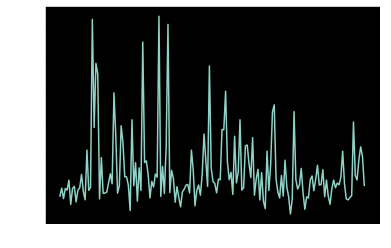

In [6]:
plt.plot(MI_c2 / np.log2(17))

In [9]:
cm_data = [[0,0,0], [0.2116238095*.25, 0.1897809524*.25, 0.5776761905*.25], 
 [0.212252381*.5, 0.2137714286*.5, 0.6269714286*.5], [0.2081, 0.2386, 0.6770857143], 
 [0.1959047619, 0.2644571429, 0.7279], [0.1707285714, 0.2919380952, 
  0.779247619], [0.1252714286, 0.3242428571, 0.8302714286], 
 [0.0591333333, 0.3598333333, 0.8683333333], [0.0116952381, 0.3875095238, 
  0.8819571429], [0.0059571429, 0.4086142857, 0.8828428571], 
 [0.0165142857, 0.4266, 0.8786333333], [0.032852381, 0.4430428571, 
  0.8719571429], [0.0498142857, 0.4585714286, 0.8640571429], 
 [0.0629333333, 0.4736904762, 0.8554380952], [0.0722666667, 0.4886666667, 
  0.8467], [0.0779428571, 0.5039857143, 0.8383714286], 
 [0.079347619, 0.5200238095, 0.8311809524], [0.0749428571, 0.5375428571, 
  0.8262714286], [0.0640571429, 0.5569857143, 0.8239571429], 
 [0.0487714286, 0.5772238095, 0.8228285714], [0.0343428571, 0.5965809524, 
  0.819852381], [0.0265, 0.6137, 0.8135], [0.0238904762, 0.6286619048, 
  0.8037619048], [0.0230904762, 0.6417857143, 0.7912666667], 
 [0.0227714286, 0.6534857143, 0.7767571429], [0.0266619048, 0.6641952381, 
  0.7607190476], [0.0383714286, 0.6742714286, 0.743552381], 
 [0.0589714286, 0.6837571429, 0.7253857143], 
 [0.0843, 0.6928333333, 0.7061666667], [0.1132952381, 0.7015, 0.6858571429], 
 [0.1452714286, 0.7097571429, 0.6646285714], [0.1801333333, 0.7176571429, 
  0.6424333333], [0.2178285714, 0.7250428571, 0.6192619048], 
 [0.2586428571, 0.7317142857, 0.5954285714], [0.3021714286, 0.7376047619, 
  0.5711857143], [0.3481666667, 0.7424333333, 0.5472666667], 
 [0.3952571429, 0.7459, 0.5244428571], [0.4420095238, 0.7480809524, 
  0.5033142857], [0.4871238095, 0.7490619048, 0.4839761905], 
 [0.5300285714, 0.7491142857, 0.4661142857], [0.5708571429, 0.7485190476, 
  0.4493904762], [0.609852381, 0.7473142857, 0.4336857143], 
 [0.6473, 0.7456, 0.4188], [0.6834190476, 0.7434761905, 0.4044333333], 
 [0.7184095238, 0.7411333333, 0.3904761905], 
 [0.7524857143, 0.7384, 0.3768142857], [0.7858428571, 0.7355666667, 
  0.3632714286], [0.8185047619, 0.7327333333, 0.3497904762], 
 [0.8506571429, 0.7299, 0.3360285714], [0.8824333333, 0.7274333333, 0.3217], 
 [0.9139333333, 0.7257857143, 0.3062761905], [0.9449571429, 0.7261142857, 
  0.2886428571], [0.9738952381, 0.7313952381, 0.266647619], 
 [0.9937714286, 0.7454571429, 0.240347619], [0.9990428571, 0.7653142857, 
  0.2164142857], [0.9955333333, 0.7860571429, 0.196652381], 
 [0.988, 0.8066, 0.1793666667], [0.9788571429, 0.8271428571, 0.1633142857], 
 [0.9697, 0.8481380952, 0.147452381], [0.9625857143, 0.8705142857, 0.1309], 
 [0.9588714286, 0.8949, 0.1132428571], [0.9598238095, 0.9218333333, 
  0.0948380952], [0.9661, 0.9514428571, 0.0755333333], 
 [0.9763, 0.9831, 0.0538]]

parula_map = LinearSegmentedColormap.from_list('parula', cm_data)
import suite2p
mask_file = r"C:\Users\zfj\data\training\081122B_region4_67_masks.tif"
mask = suite2p.io.tiff.open_tiff(mask_file, True)[0].pages[0].asarray()
# mask_id = [1, 4, 5, 14, 15, 17, 19, 20, 21, 22, 23, 24, 27, 28, 30, 32, 33, 34, 35, 36, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 144, 145, 146, 147, 148, 149, 150, 152, 153, 154, 156, 159, 160, 161, 162, 166, 168, 169, 173, 174, 188, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219]
mask_id = [1,2,3,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,84,85,86,87,88,89,90,91,92,93,94,95,96,97,98,99,100,101,102,103,104,105,106,107,108,109,110,111,112,113,114,115,116,117,118,119,120,121,122,123,124,125,126,127,128,129,130,131,132,133,134,135,136,137,138,139,140,141,142,143,144,145,146,147,148,149,150,151,152,153,154,155,156,157,158,159,160,161,162,163,164,165,166,167,168,169,170,171]
stack_file = r"C:\Users\zfj\data\081122B\region4_stack_00002.tif"
stack = suite2p.io.tiff.open_tiff(stack_file, True)[0]
stack = np.asarray([p.asarray() for p in stack.pages])

([], [])

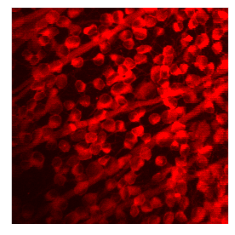

In [13]:
plt.imshow(stack.mean(axis=0), cmap=LinearSegmentedColormap.from_list("Red", [(0,0,0), (1,0,0)]))
plt.clim(0,150)

# plt.imshow(stack.max(axis=0), cmap=LinearSegmentedColormap.from_list("Red", [(0,0,0), (1,0,0)]))
# plt.clim(0,10000)

plt.xticks([])
plt.yticks([])
# plt.axis('off')
# plt.colorbar()

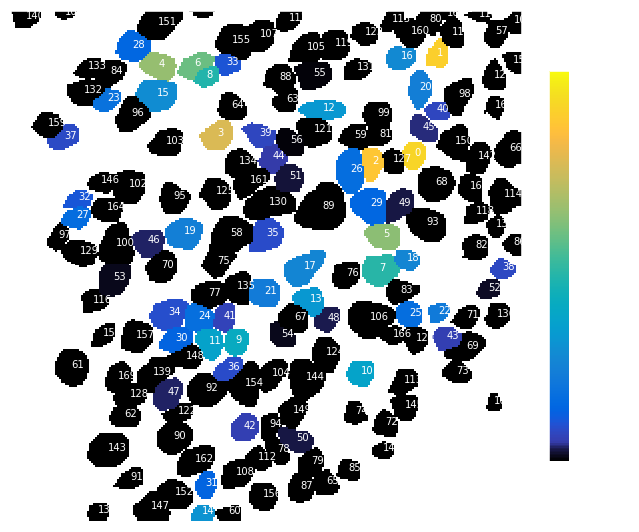

In [61]:
# print(mask.max(), data.shape)
plt.figure(figsize=(10,10))
mm = np.zeros_like(mask, dtype=float)
for j in range(data.shape[1]):
    mm[mask == mask_id[j]] = MI_c2[j]

im = plt.imshow(mm, interpolation='nearest', alpha=( mask > 0).astype(float), cmap=parula_map)
plt.gca().set_xticks([])
plt.gca().set_yticks([])
plt.gca().set_facecolor([0,0,0,0])
# plt.gca().set_facecolor([1,1,1,1])


MI_order = np.asarray(mask_id)[np.argsort(MI_c2)[::-1]]
for j in range(data.shape[1]):
    x,y = np.nonzero(mask == MI_order[j])
    # x.mean(), y.mean()
    plt.text(y.mean(), x.mean(),  j, color='w')

# plt.colorbar(im, ax=axs[i])
# im.set_clim(np.percentile(E_ON,1),np.percentile(E_ON,99))
# im.set_clim(.005,.04)
# plt.axis('equal')
plt.clim([0.1,1.2])

cbar = plt.colorbar(im, fraction=.035)
cbar.set_label("Mutual information (bits)", fontsize=24)
cbar.set_ticks(np.linspace(0.1,1.1,6))
cbar.set_ticklabels([f"{x:0.1f}" for x in np.linspace(0.1,1.1,6)],fontsize=18)
# fig.suptitle("Mean response", fontsize=28)



In [88]:
# print(np.sort(MI_c2)[::-1])
# np.asarray(mask_id)[np.argsort(MI_c2)[::-1]]

tuple(zip(np.arange(170),np.argsort(MI_c2)[::-1]))
# MI_c2[55]

((0, 55),
 (1, 18),
 (2, 60),
 (3, 46),
 (4, 20),
 (5, 83),
 (6, 21),
 (7, 92),
 (8, 30),
 (9, 119),
 (10, 130),
 (11, 118),
 (12, 40),
 (13, 100),
 (14, 163),
 (15, 34),
 (16, 19),
 (17, 90),
 (18, 91),
 (19, 80),
 (20, 31),
 (21, 97),
 (22, 107),
 (23, 35),
 (24, 104),
 (25, 103),
 (26, 59),
 (27, 167),
 (28, 15),
 (29, 73),
 (30, 115),
 (31, 157),
 (32, 168),
 (33, 23),
 (34, 166),
 (35, 81),
 (36, 125),
 (37, 48),
 (38, 93),
 (39, 47),
 (40, 42),
 (41, 105),
 (42, 143),
 (43, 117),
 (44, 57),
 (45, 44),
 (46, 84),
 (47, 134),
 (48, 110),
 (49, 74),
 (50, 146),
 (51, 62),
 (52, 99),
 (53, 95),
 (54, 112),
 (55, 28),
 (56, 53),
 (57, 12),
 (58, 79),
 (59, 49),
 (60, 164),
 (61, 123),
 (62, 140),
 (63, 36),
 (64, 37),
 (65, 156),
 (66, 54),
 (67, 106),
 (68, 63),
 (69, 120),
 (70, 88),
 (71, 109),
 (72, 142),
 (73, 131),
 (74, 139),
 (75, 89),
 (76, 94),
 (77, 165),
 (78, 148),
 (79, 152),
 (80, 5),
 (81, 51),
 (82, 85),
 (83, 98),
 (84, 27),
 (85, 154),
 (86, 86),
 (87, 158),
 (88, 2

In [63]:
best_c = [ 55,  18,  60,  46,  20,  83,]

data = np.load(r"C:\Users\zfj\data\081122B\func\spots_smooth.npy")
data = np.moveaxis(data[:,:,7:-10],0,1)
# fdata = data.reshape(data.shape[0],-1)

labels = np.load(r"C:\Users\zfj\data\081122B\func\spots_labels.npy")
ue = np.array([
[-24.74181249, -24.74181249, -16.49454166, -16.49454166, -16.49454166,
   -8.24727083,  -8.24727083,   0.,           0.,           0.,
    8.24727083,   8.24727083,  16.49454166,  16.49454166,  16.49454166,
   24.74181249,  24.74181249],
[-14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921,  -28.56938421,   0.,          28.56938421,
  -14.2846921,   14.2846921 ]]).T
  


# MI_s = np.zeros(183)

# from sklearn.svm import SVR
from sklearn.svm import LinearSVR
from sklearn.multioutput import RegressorChain
from sklearn.decomposition import PCA

def get_info(fdata, flabels, fue):
  
  cv = KFold(20, shuffle=True)
  svm_i = info.MI(flabels, ndims=2)
  y_hats = np.empty((len(flabels),2))
  for train, test in cv.split(fdata):
        mms = MinMaxScaler().fit(fdata[train])
        mod = RegressorChain(LinearSVR(C=1.0))

        if fdata.shape[1] < 40:
          mod.fit(mms.transform(fdata[train]), fue[flabels[train],:])
          y_hats[test,:] = mod.predict(mms.transform(fdata[test]))
        else:
          pca = PCA(40, whiten=True)
          comps = pca.fit_transform(mms.transform(fdata[train]))
          
          mod.fit(comps, fue[flabels[train],:])
          y_hats[test,:] = mod.predict(pca.transform(mms.transform(fdata[test])))

  MI = svm_i.QE(y_hats)
  print(fdata.shape[1]//data.shape[1], MI)
  return MI

# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1)) for t in range(183))

# MI_s = get_info(data[:,:,:1].reshape(data.shape[0],-1), labels, ue)
# MI_s = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,:,:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(183))

MI_t = Parallel(n_jobs=12, prefer="threads", verbose=11)(delayed(get_info)(data[:,best_c,40:(t+1)].reshape(data.shape[0],-1), labels, ue) for t in range(40,183))

[Parallel(n_jobs=12)]: Using backend ThreadingBackend with 12 concurrent workers.


0 -0.01600768788698646


[Parallel(n_jobs=12)]: Done   1 tasks      | elapsed:    9.8s


0 0.013080828730448479


[Parallel(n_jobs=12)]: Done   2 tasks      | elapsed:   11.2s


0 0.010034912967379832
0 -0.08431740833632818


[Parallel(n_jobs=12)]: Done   3 tasks      | elapsed:   12.0s
[Parallel(n_jobs=12)]: Done   4 tasks      | elapsed:   12.2s


0 0.11841054198497106
0 0.20130845999610708


[Parallel(n_jobs=12)]: Done   5 tasks      | elapsed:   12.4s
[Parallel(n_jobs=12)]: Done   6 tasks      | elapsed:   12.4s


0 1.1439684468334526


[Parallel(n_jobs=12)]: Done   7 tasks      | elapsed:   13.3s


0 1.0835884751949507


[Parallel(n_jobs=12)]: Done   8 tasks      | elapsed:   13.9s


0 1.265819370355526


[Parallel(n_jobs=12)]: Done   9 tasks      | elapsed:   15.5s


0 1.5254131615693405


[Parallel(n_jobs=12)]: Done  10 tasks      | elapsed:   16.2s


0 1.519891728675739


[Parallel(n_jobs=12)]: Done  11 tasks      | elapsed:   16.5s


0 1.379981435277103


[Parallel(n_jobs=12)]: Done  12 tasks      | elapsed:   17.0s


0 1.7209295913936096


[Parallel(n_jobs=12)]: Done  13 tasks      | elapsed:   24.4s


0 1.6376284904474059


[Parallel(n_jobs=12)]: Done  14 tasks      | elapsed:   25.4s


0 1.7191397246602833


[Parallel(n_jobs=12)]: Done  15 tasks      | elapsed:   26.7s


0 1.8364778692748842


[Parallel(n_jobs=12)]: Done  16 tasks      | elapsed:   27.5s


0 1.760243551869929


[Parallel(n_jobs=12)]: Done  17 tasks      | elapsed:   27.9s


0 1.8222522612647942
0 1.7779127636075855


[Parallel(n_jobs=12)]: Done  18 tasks      | elapsed:   28.3s
[Parallel(n_jobs=12)]: Done  19 tasks      | elapsed:   28.4s


0 1.960407644690279


[Parallel(n_jobs=12)]: Done  20 tasks      | elapsed:   30.2s


0 1.966991060009878
0 1.9396934812434399


[Parallel(n_jobs=12)]: Done  21 tasks      | elapsed:   31.2s
[Parallel(n_jobs=12)]: Done  22 tasks      | elapsed:   31.3s


0 2.050521658005373


[Parallel(n_jobs=12)]: Done  23 tasks      | elapsed:   32.1s


0 1.9587817472775362


[Parallel(n_jobs=12)]: Done  24 tasks      | elapsed:   32.5s


0 2.0866654014571093


[Parallel(n_jobs=12)]: Done  25 tasks      | elapsed:   40.1s


0 2.0564874497877734


[Parallel(n_jobs=12)]: Done  26 tasks      | elapsed:   41.1s


0 2.0658345729814083


[Parallel(n_jobs=12)]: Done  27 tasks      | elapsed:   44.7s


0 2.09700301823236


[Parallel(n_jobs=12)]: Done  28 tasks      | elapsed:   44.9s


1 2.0549461744478394


[Parallel(n_jobs=12)]: Done  29 tasks      | elapsed:   45.3s


1 2.128300241576088
1 2.11451803518513


[Parallel(n_jobs=12)]: Done  30 tasks      | elapsed:   45.7s
[Parallel(n_jobs=12)]: Done  31 tasks      | elapsed:   45.9s


1 2.144230563357732


[Parallel(n_jobs=12)]: Done  32 tasks      | elapsed:   49.7s


1 2.1694152095105013


[Parallel(n_jobs=12)]: Done  33 tasks      | elapsed:   50.2s


1 2.192108990851517


[Parallel(n_jobs=12)]: Done  34 tasks      | elapsed:   51.4s


1 2.2623545372968317
1 2.1092590171532306


[Parallel(n_jobs=12)]: Done  35 tasks      | elapsed:   51.9s
[Parallel(n_jobs=12)]: Done  36 tasks      | elapsed:   52.1s


1 2.3181801729847447


[Parallel(n_jobs=12)]: Done  37 tasks      | elapsed:  1.0min


1 2.284681965653503


[Parallel(n_jobs=12)]: Done  38 tasks      | elapsed:  1.0min


1 2.2834180229494887


[Parallel(n_jobs=12)]: Done  39 tasks      | elapsed:  1.1min


1 2.2656539484324374


[Parallel(n_jobs=12)]: Done  40 tasks      | elapsed:  1.1min


1 2.310123626069389


[Parallel(n_jobs=12)]: Done  41 tasks      | elapsed:  1.1min


1 2.2896409028928906
1 2.3122805619564493


[Parallel(n_jobs=12)]: Done  42 tasks      | elapsed:  1.1min
[Parallel(n_jobs=12)]: Done  43 tasks      | elapsed:  1.1min


1 2.44679961439272


[Parallel(n_jobs=12)]: Done  44 tasks      | elapsed:  1.3min


1 2.378989130098877
1 2.2358308736836148


[Parallel(n_jobs=12)]: Done  45 tasks      | elapsed:  1.3min
[Parallel(n_jobs=12)]: Done  46 tasks      | elapsed:  1.3min


1 2.3628789994208823


[Parallel(n_jobs=12)]: Done  47 tasks      | elapsed:  1.3min


1 2.3633032721707905


[Parallel(n_jobs=12)]: Done  48 tasks      | elapsed:  1.3min


1 2.375041026493518


[Parallel(n_jobs=12)]: Done  49 tasks      | elapsed:  1.5min


1 2.436098308325813


[Parallel(n_jobs=12)]: Done  50 tasks      | elapsed:  1.5min


1 2.2950738415498364


[Parallel(n_jobs=12)]: Done  51 tasks      | elapsed:  1.6min


1 2.366918124283077


[Parallel(n_jobs=12)]: Done  52 tasks      | elapsed:  1.6min


1 2.378344677083682


[Parallel(n_jobs=12)]: Done  53 tasks      | elapsed:  1.6min


1 2.3392617111060634


[Parallel(n_jobs=12)]: Done  54 tasks      | elapsed:  1.6min


1 2.374753680541456


[Parallel(n_jobs=12)]: Done  55 tasks      | elapsed:  1.6min


1 2.3940832707205235


[Parallel(n_jobs=12)]: Done  56 tasks      | elapsed:  1.8min


2 2.4439926512063366


[Parallel(n_jobs=12)]: Done  57 tasks      | elapsed:  1.8min


2 2.4335503769014175


[Parallel(n_jobs=12)]: Done  58 tasks      | elapsed:  1.8min


2 2.3149056126128675


[Parallel(n_jobs=12)]: Done  59 tasks      | elapsed:  1.8min


2 2.3250319589548307


[Parallel(n_jobs=12)]: Done  60 tasks      | elapsed:  1.8min


2 2.490121029105204


[Parallel(n_jobs=12)]: Done  61 tasks      | elapsed:  2.0min


2 2.4450269134848646


[Parallel(n_jobs=12)]: Done  62 tasks      | elapsed:  2.1min


2 2.48753095686019


[Parallel(n_jobs=12)]: Done  63 tasks      | elapsed:  2.1min


2 2.49713393325105


[Parallel(n_jobs=12)]: Done  64 tasks      | elapsed:  2.2min


2 2.4977593598081027


[Parallel(n_jobs=12)]: Done  65 tasks      | elapsed:  2.2min


2 2.4034719004851346


[Parallel(n_jobs=12)]: Done  66 tasks      | elapsed:  2.2min


2 2.564815627520554


[Parallel(n_jobs=12)]: Done  67 tasks      | elapsed:  2.3min


2 2.540997896451246


[Parallel(n_jobs=12)]: Done  68 tasks      | elapsed:  2.4min


2 2.4660296268064394


[Parallel(n_jobs=12)]: Done  69 tasks      | elapsed:  2.5min


2 2.473568336739555
2 2.49762092722212


[Parallel(n_jobs=12)]: Done  70 tasks      | elapsed:  2.5min
[Parallel(n_jobs=12)]: Done  71 tasks      | elapsed:  2.5min


2 2.496532962518113


[Parallel(n_jobs=12)]: Done  72 tasks      | elapsed:  2.5min


2 2.618295941692063


[Parallel(n_jobs=12)]: Done  73 tasks      | elapsed:  2.6min


2 2.5517431688206895


[Parallel(n_jobs=12)]: Done  74 tasks      | elapsed:  2.7min


2 2.5892262456229895


[Parallel(n_jobs=12)]: Done  75 tasks      | elapsed:  2.8min


2 2.5886149781151495


[Parallel(n_jobs=12)]: Done  76 tasks      | elapsed:  2.8min


2 2.5045966029633444


[Parallel(n_jobs=12)]: Done  77 tasks      | elapsed:  2.8min


2 2.6104176330154893


[Parallel(n_jobs=12)]: Done  78 tasks      | elapsed:  2.8min


2 2.4483733796179


[Parallel(n_jobs=12)]: Done  79 tasks      | elapsed:  2.9min


2 2.6370643370676086


[Parallel(n_jobs=12)]: Done  80 tasks      | elapsed:  3.1min


2 2.611415744253738


[Parallel(n_jobs=12)]: Done  81 tasks      | elapsed:  3.1min


2 2.5885285101700735


[Parallel(n_jobs=12)]: Done  82 tasks      | elapsed:  3.1min


2 2.5206192553619053


[Parallel(n_jobs=12)]: Done  83 tasks      | elapsed:  3.1min


2 2.5603713995126864


[Parallel(n_jobs=12)]: Done  84 tasks      | elapsed:  3.2min


3 2.5518935773526596


[Parallel(n_jobs=12)]: Done  85 tasks      | elapsed:  3.2min


3 2.5054839654857366


[Parallel(n_jobs=12)]: Done  86 tasks      | elapsed:  3.3min


3 2.598235993526459


[Parallel(n_jobs=12)]: Done  87 tasks      | elapsed:  3.4min


3 2.5533720494000796
3 2.528875019898092


[Parallel(n_jobs=12)]: Done  88 tasks      | elapsed:  3.5min
[Parallel(n_jobs=12)]: Done  89 tasks      | elapsed:  3.5min


3 2.5752529408636446


[Parallel(n_jobs=12)]: Done  90 tasks      | elapsed:  3.5min


3 2.5719510917805954


[Parallel(n_jobs=12)]: Done  91 tasks      | elapsed:  3.6min


3 2.6254181224722446


[Parallel(n_jobs=12)]: Done  92 tasks      | elapsed:  3.7min


3 2.545545181094935


[Parallel(n_jobs=12)]: Done  93 tasks      | elapsed:  3.7min


3 2.4628728884621394


[Parallel(n_jobs=12)]: Done  94 tasks      | elapsed:  3.8min


3 2.600649390213819


[Parallel(n_jobs=12)]: Done  95 tasks      | elapsed:  3.8min


3 2.5216270507366265


[Parallel(n_jobs=12)]: Done  96 tasks      | elapsed:  3.8min


3 2.5571454740400377


[Parallel(n_jobs=12)]: Done  97 tasks      | elapsed:  3.9min


3 2.483959984051711


[Parallel(n_jobs=12)]: Done  98 tasks      | elapsed:  3.9min


3 2.4807418928840694


[Parallel(n_jobs=12)]: Done  99 tasks      | elapsed:  4.2min


3 2.568942838274379


[Parallel(n_jobs=12)]: Done 100 tasks      | elapsed:  4.2min


3 2.646500605539009


[Parallel(n_jobs=12)]: Done 101 tasks      | elapsed:  4.2min


3 2.5294686429400737


[Parallel(n_jobs=12)]: Done 102 tasks      | elapsed:  4.3min


3 2.59535135549831


[Parallel(n_jobs=12)]: Done 103 tasks      | elapsed:  4.3min


3 2.5899029505877826


[Parallel(n_jobs=12)]: Done 104 tasks      | elapsed:  5.0min


3 2.563613126802714


[Parallel(n_jobs=12)]: Done 105 tasks      | elapsed:  5.0min


3 2.6853429927466936


[Parallel(n_jobs=12)]: Done 106 tasks      | elapsed:  5.0min


3 2.6881618236013263


[Parallel(n_jobs=12)]: Done 107 tasks      | elapsed:  5.0min


3 2.690533891925195


[Parallel(n_jobs=12)]: Done 108 tasks      | elapsed:  5.1min


3 2.6117859081617407


[Parallel(n_jobs=12)]: Done 109 tasks      | elapsed:  5.1min


3 2.7321108011492092


[Parallel(n_jobs=12)]: Done 110 tasks      | elapsed:  5.2min


3 2.6772435340135132


[Parallel(n_jobs=12)]: Done 111 tasks      | elapsed:  5.3min


3 2.62355338972696


[Parallel(n_jobs=12)]: Done 112 tasks      | elapsed:  5.4min


3 2.7299615895931666


[Parallel(n_jobs=12)]: Done 113 tasks      | elapsed:  5.4min


4 2.7309667021440323


[Parallel(n_jobs=12)]: Done 114 tasks      | elapsed:  5.4min


4 2.646180247733972


[Parallel(n_jobs=12)]: Done 115 tasks      | elapsed:  5.5min


4 2.7482839520827116


[Parallel(n_jobs=12)]: Done 116 tasks      | elapsed:  5.6min


4 2.6878582909331854


[Parallel(n_jobs=12)]: Done 117 tasks      | elapsed:  5.6min


4 2.683186269894243


[Parallel(n_jobs=12)]: Done 118 tasks      | elapsed:  5.6min


4 2.792807132960277


[Parallel(n_jobs=12)]: Done 119 tasks      | elapsed:  5.6min


4 2.7175235184048274


[Parallel(n_jobs=12)]: Done 120 tasks      | elapsed:  5.7min


4 2.73440426477333
4 2.675736659275645
4 2.6905410070848883
4 2.81179839281241
4 2.7204255795325563
4 2.8046695305428746
4 2.6732853867261865
4 2.649074408542753
4 2.767124375065003
4 2.7552823777843036
4 2.6399327750434574
4 2.676923515015686
4 2.6101268357419536
4 2.747991189862692


[Parallel(n_jobs=12)]: Done 134 out of 143 | elapsed:  6.3min remaining:   25.5s


4 2.62796781477817
4 2.7072585684064805
4 2.731653629881992
4 2.6746696623161266
4 2.590291197781785
4 2.716824153733226
4 2.6818194115973273
5 2.7035128179791417
5 2.6962686115645087


[Parallel(n_jobs=12)]: Done 143 out of 143 | elapsed:  6.4min finished


2.81179839281241 0.6879080011287129 0.93726613093747


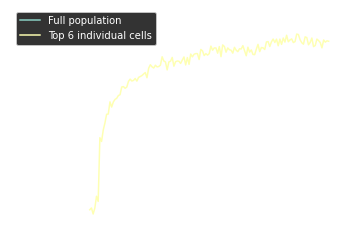

In [87]:
xn = np.linspace(-.25,1.0,200)
xnn = xn[7:-10]
# plt.plot(xnn,MI_s)
# plt.plot(xnn,MI_st)
# plt.plot(xnn[40:], MI_s2)

# ylim = plt.ylim()
# plt.ylabel('Information (bits)')
# xlim = plt.xlim()
# plt.xlabel('Time (s)')


# plt.gca().twinx()
# plt.ylim(ylim / np.log2(17) * 100)
# plt.ylabel('Information (% max.)')

# plt.gca().twiny()
# plt.xlim((xlim - xnn[0])/(xnn[-1] - xnn[0]) * len(xnn))
# plt.xticks(np.arange(0,180,15))
# plt.xlabel('Temporal dimension')

# plt.axvline(40,0,1)

# plt.show()


plt.plot(np.nan)
plt.plot(xnn[40:],MI_t)
plt.gca().set_facecolor([0,0,0,0])
# plt.plot(MI_s)
plt.ylim(-.25,3.25)
plt.xlim(-.25,1)

plt.xticks([])
plt.yticks([])

print(max(MI_t), max(MI_t)/np.log2(17), max(MI_t)/3.0)

l = plt.legend(['Full population','Top 6 individual cells'],facecolor='inherit')

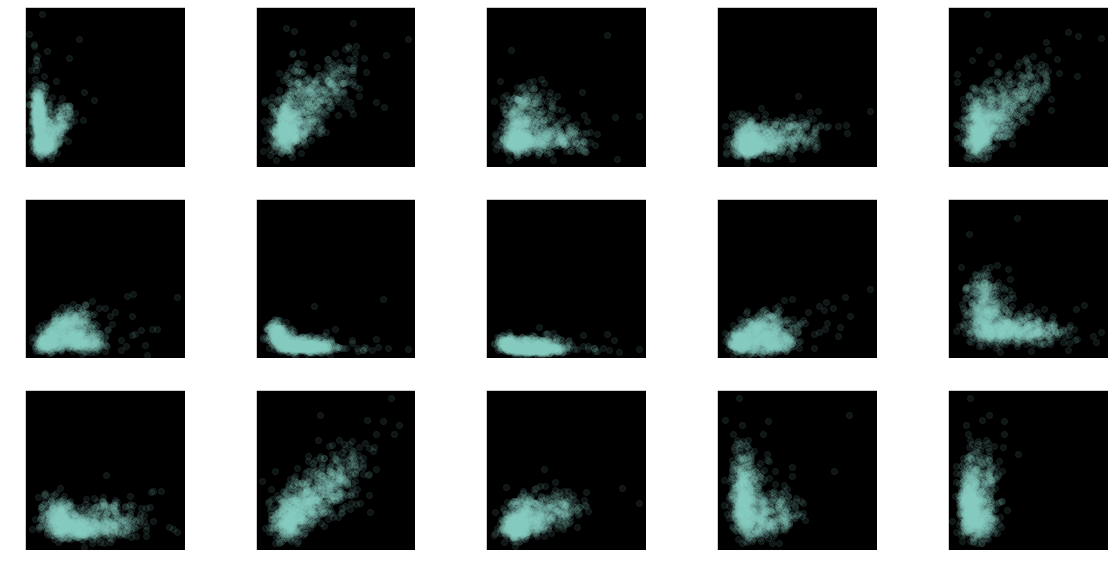

In [109]:
fig,axs = plt.subplots(3,5,figsize=(20,10))
axs = axs.flatten()
cnt = 0
for i in range(5):
    # for j in range(i+1):
    #     plt.sca(axs[i,j])
    #     plt.axis('off')
    for j in range(i+1,6):

        plt.sca(axs[cnt])
        cnt += 1
        plt.scatter(data[:,best_c[i],40:].sum(axis=1),data[:,best_c[j],40:].sum(axis=1), alpha=.1)
        plt.axis('square')
        plt.xticks([])
        plt.yticks([])
        plt.xlabel(f'Neuron {i+1}')
        plt.ylabel(f'Neuron {j+1}')
        


[[-24.74181249 -14.2846921 ]
 [-24.74181249  14.2846921 ]
 [-16.49454166 -28.56938421]
 [-16.49454166   0.        ]
 [-16.49454166  28.56938421]
 [ -8.24727083 -14.2846921 ]
 [ -8.24727083  14.2846921 ]
 [  0.         -28.56938421]
 [  0.           0.        ]
 [  0.          28.56938421]
 [  8.24727083 -14.2846921 ]
 [  8.24727083  14.2846921 ]
 [ 16.49454166 -28.56938421]
 [ 16.49454166   0.        ]
 [ 16.49454166  28.56938421]
 [ 24.74181249 -14.2846921 ]
 [ 24.74181249  14.2846921 ]]


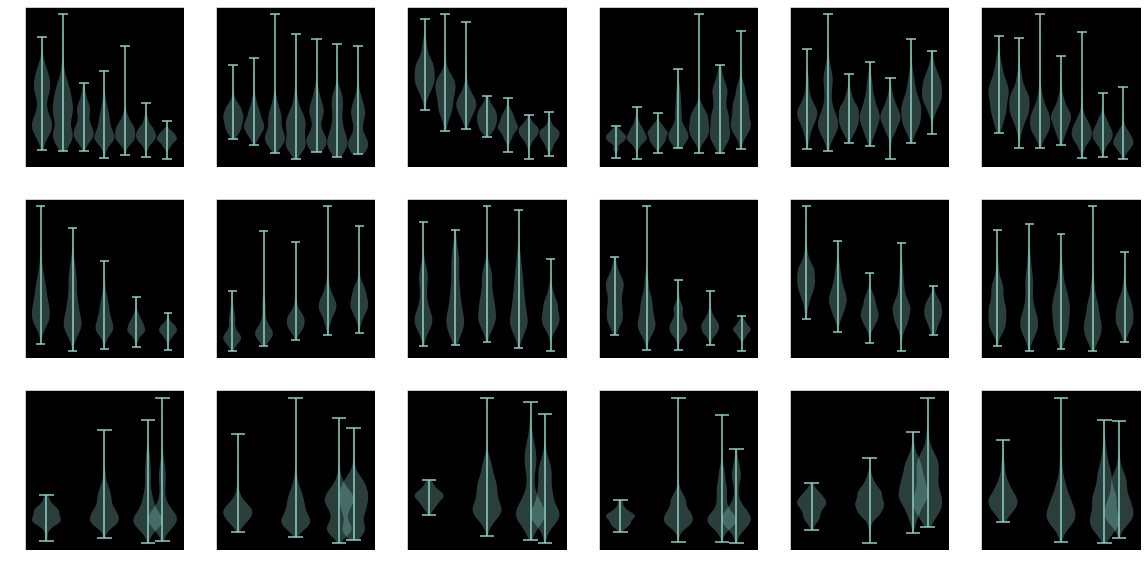

In [147]:
print(ue)
fig,axs = plt.subplots(3,6,figsize=(20,10))
xue = ue[np.abs(ue[:,1])<15,:]
yue = ue[np.abs(ue[:,0])<15,:]
rue = np.sqrt((np.asarray(ue) ** 2).sum(axis=1)).astype(int)

for i in range(6):
        plt.sca(axs[0,i])
        plt.violinplot([data[ue[labels,0]==j, best_c[i],40:].sum(axis=1) for j in np.unique(xue[:,0])], np.unique(xue[:,0]), widths=8)

        plt.xticks([])
        plt.yticks([])
        plt.ylabel(f'Neuron {i+1}')
        plt.xlabel('x')

        plt.sca(axs[1,i])
        plt.violinplot([data[ue[labels,1]==j, best_c[i],40:].sum(axis=1) for j in np.unique(yue[:,1])], np.unique(yue[:,1]), widths=8)

        plt.xticks([])
        plt.yticks([])
        plt.ylabel(f'Neuron {i+1}')
        plt.xlabel('y')

        plt.sca(axs[2,i])
        plt.violinplot([data[rue[labels]==j, best_c[i],40:].sum(axis=1) for j in np.unique(rue)], np.unique(rue), widths=8)

        plt.xticks([])
        plt.yticks([])
        plt.ylabel(f'Neuron {i+1}')
        plt.xlabel('r')

        


Text(0.45, 0.85, 'Neuron 1')

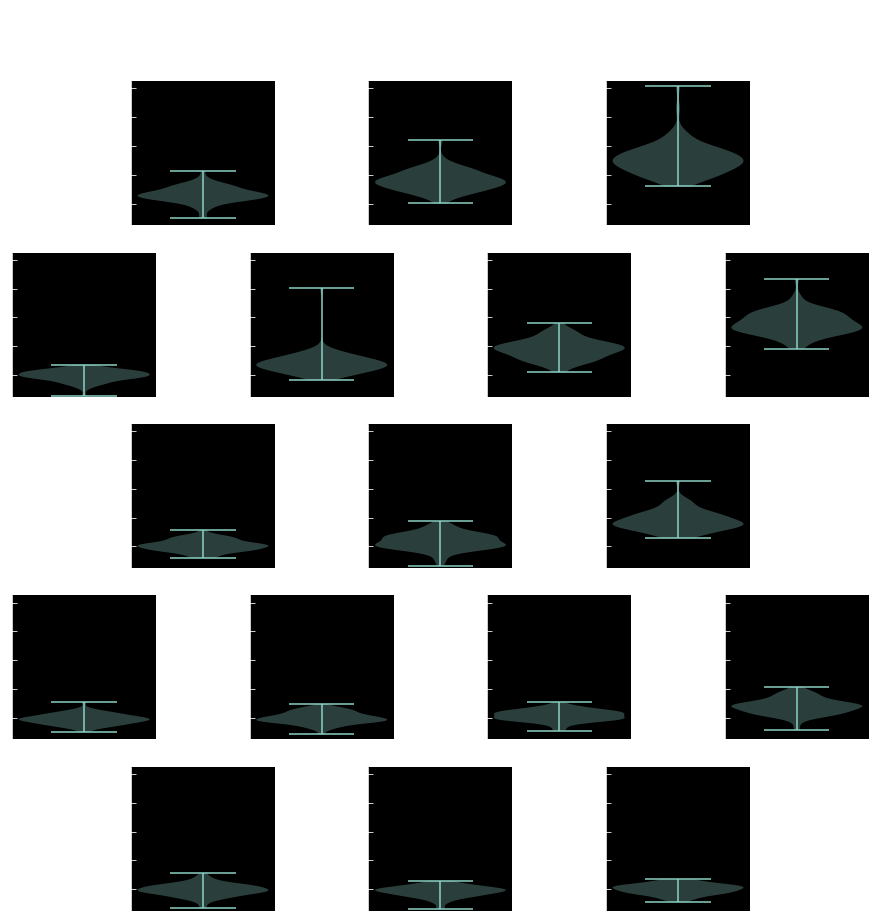

In [180]:
j = 0
fig = plt.figure(figsize=(20,20))
for i in range(17):
    ax = fig.add_axes([-ue[i,0] / 100 + .4, -ue[i,1] / 120 + .46, .1, .1])
    
    plt.violinplot(data[labels==i, best_c[j],40:].sum(axis=1), widths=8)
    plt.ylim(-15,85)
    # plt.axis('off')
    # plt.xcolor('none')
    plt.gca().spines['bottom'].set_color('none')
    plt.gca().spines['top'].set_color('none')
    plt.gca().spines['right'].set_color('none')
    plt.xticks([])
    plt.gca().set_yticklabels(['' for _ in plt.yticks()])
    plt.gca().tick_params(direction='inout', length=10)

fig.suptitle(f'Neuron {j+1}', fontsize=32, x=.45, y=.85)